## Premier test avec Python ##

Le code ci-dessous permet de comparer les résultats obtenus via Python à ceux obtenus avec C++.

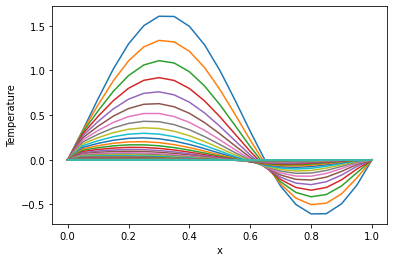

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def euler_explicite(f,dt,T,x0,t0):
    xs, ts = [x0], [t0]
    while ts[-1] < T:
        xs.append(xs[-1] + dt * f(xs[-1]))
        ts.append(ts[-1] + dt)
    return (ts, xs)

dx = 1/20
x = np.array([i * dx for i in range(21)])
n = len(x)
T0 = 1/2 + np.sin(2 * np.pi * x) - 1/2 * np.cos(2 * np.pi * x)

def d(x):
    return 1

d = np.vectorize(d)

D = d(x)

K = np.zeros((n,n))
for i in range(n):
    if i+1 < n:
        K[i,i] = -(D[i] + D[i+1])/(dx**2)
        K[i,i+1] = D[i+1]/(dx**2)
    elif i - 1 >= 0:
        K[i,i-1] = D[i]/(dx**2)
K[0,:] = 0
K[n-1,:] = 0
K[0,0] = -2/(dx**2)
K[n-1,n-1] = - 2/(dx**2)
        
def f(T):
    return np.dot(K,T)

def euler_implicite(dt,T,x0,t0):
    xs, ts = [x0], [t0]
    while ts[-1] < T:
        xs.append(np.linalg.solve(np.identity(n) - dt * K,xs[-1]))
        ts.append(ts[-1] + dt)
    return (ts, xs)

ts, xs = euler_implicite(0.5/1001,0.5,T0,0)

for i in range(200):
    plt.plot(x,xs[i][:])
plt.xlabel('x')
plt.ylabel('Temperature')
plt.show()

## Résultats de la question 2 ##

Dans la cellule suivante, on traite les résultats de la question 2 i.e. la solution obtenue via **Euler explicite** pour une conductivité constante égale à 1 (C++).

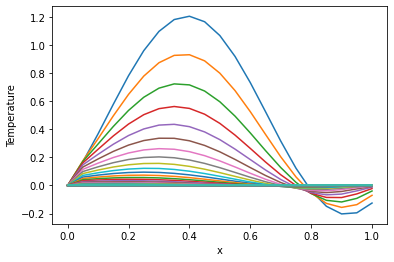

In [88]:
arr = np.array([[0,0.169591,0.368541,0.579171,0.782766,0.961237,1.09872,1.18301,1.20661,1.16743,1.06894,0.919894,0.733543,0.52644,0.316987,0.123797,-0.0359669,-0.148107,-0.202661,-0.194779,-0.125164],[0,0.176058,0.333756,0.496439,0.649652,0.779782,0.875265,0.927618,0.932188,0.888571,0.800641,0.676211,0.526337,0.364338,0.204605,0.061334,-0.0527464,-0.127499,-0.156283,-0.136539,-0.0700218],[0,0.172014,0.296072,0.420833,0.535212,0.629045,0.693994,0.724289,0.717238,0.673467,0.596866,0.494241,0.374711,0.248896,0.127975,0.0226938,-0.057594,-0.105754,-0.117507,-0.0918096,-0.039173],[0,0.16145,0.258336,0.353328,0.437985,0.504786,0.547795,0.56319,0.549603,0.508242,0.442783,0.35904,0.264455,0.167433,0.0765935,9.01998e-06,-0.0555159,-0.0850477,-0.0859622,-0.059991,-0.021915],[0,0.147228,0.222354,0.294145,0.356221,0.403066,0.430518,0.436138,0.419426,0.381867,0.3268,0.259115,0.184829,0.110541,0.0428515,-0.012224,-0.0497921,-0.0665149,-0.0613056,-0.0383889,-0.0122601],[0,0.131345,0.189188,0.243025,0.288071,0.320326,0.336921,0.336384,0.318761,0.285619,0.239903,0.185674,0.127751,0.0712802,0.0212802,-0.0178068,-0.0425076,-0.0507155,-0.0427531,-0.0241769,-0.00685882],[0,0.115154,0.159373,0.199414,0.23172,0.25342,0.262586,0.258404,0.241244,0.212633,0.175112,0.132014,0.0871705,0.0445646,0.00798251,-0.0193254,-0.0349521,-0.0377899,-0.0292435,-0.0150364,-0.0038371],[0,0.0995287,0.133087,0.162604,0.185457,0.199616,0.203822,0.197703,0.181801,0.157529,0.127045,0.093056,0.0585834,0.0266896,0.000208747,-0.0185106,-0.027878,-0.027583,-0.0196722,-0.00925722,-0.00214663],[0,0.0849967,0.110272,0.131819,0.147723,0.156571,0.157576,0.15065,0.136407,0.116113,0.0915722,0.0649641,0.0386531,0.0149773,-0.00396074,-0.0164966,-0.021672,-0.0197644,-0.0130446,-0.00565172,-0.00120091],[0,0.0718413,0.090728,0.106286,0.117132,0.122303,0.12134,0.114327,0.101889,0.0851301,0.0655395,0.044858,0.0249233,0.00750641,-0.00584966,-0.0140028,-0.0164779,-0.0139305,-0.00854265,-0.00342634,-0.000671839],[0,0.0601765,0.0741695,0.0852623,0.0924693,0.09515,0.0930664,0.0864034,0.0757533,0.0620622,0.0465468,0.0305855,0.0155966,0.00291083,-0.00635706,-0.0114635,-0.012287,-0.00967505,-0.00553386,-0.00206483,-0.000375854],[0,0.0500032,0.060275,0.0680683,0.0726907,0.0737314,0.071098,0.0650245,0.0560505,0.0449734,0.0327775,0.0205464,0.00936658,0.000228106,-0.00608156,-0.00911971,-0.00900508,-0.00663161,-0.0035507,-0.00123794,-0.000210268],[0,0.0412512,0.0487143,0.0540924,0.0569076,0.0569098,0.0540987,0.0487241,0.0412637,0.0323802,0.022863,0.0135577,0.00529029,-0.00121203,-0.00541116,-0.00708557,-0.00649861,-0.00449214,-0.0022591,-0.000738872,-0.000117632],[0,0.0338084,0.0391682,0.0427971,0.0443725,0.0437545,0.0409979,0.0363478,0.0302173,0.0231511,0.015777,0.0087501,0.00269262,-0.00187003,-0.00458803,-0.00539547,-0.00462512,-0.00301072,-0.00142659,-0.000439267,-6.58083e-05],[0,0.0275417,0.0313396,0.0337168,0.034462,0.0335091,0.0309426,0.0269907,0.0220045,0.016427,0.0107538,0.00548829,0.00109443,-0.00205682,-0.00375524,-0.00403726,-0.00325068,-0.00199857,-0.000894854,-0.00026024,-3.68158e-05],[0,0.0223115,0.0249598,0.0264538,0.0266608,0.0255624,0.023256,0.0199468,0.0159287,0.0115588,0.00722505,0.00331145,0.000159192,-0.00197787,-0.00299016,-0.00297467,-0.00225881,-0.0013152,-0.000557943,-0.000153699,-2.05963e-05],[0,0.0179801,0.0197908,0.0206722,0.020546,0.0194235,0.0174043,0.0146678,0.0114573,0.00805797,0.00477143,0.00188763,-0.000346626,-0.00176517,-0.00232808,-0.00216172,-0.00155338,-0.000858679,-0.000345993,-9.05221e-05,-1.15224e-05],[0,0.0144183,0.0156254,0.0160907,0.0157729,0.0147001,0.0129677,0.0107296,0.00818471,0.00555901,0.00308514,0.00097966,-0.000582749,-0.00150034,-0.0017786,-0.00155153,-0.00105817,-0.000556595,-0.000213503,-5.31799e-05,-6.44609e-06],[0,0.0115081,0.012286,0.0124762,0.0120621,0.0110803,0.00961816,0.0078055,0.00580339,0.00378953,0.00194175,0.000419694,-0.000656507,-0.00123114,-0.00133679,-0.00110108,-0.000714591,-0.000358412,-0.000131156,-3.11709e-05,-3.60621e-06],[0,0.00914446,0.00962152,0.00963676,0.0091888,0.00831747,0.00710018,0.00564508,0.00408141,0.00254774,0.00117874,9.01786e-05,-0.000638472,-0.000983218,-0.000990403,-0.000773401,-0.000478722,-0.000229401,-8.02406e-05,-1.82327e-05,-2.01746e-06],[0,0.00723521,0.00750545,0.0074153,0.00697276,0.00621716,0.00521563,0.00405714,0.00284452,0.00168496,0.000679302,-9.01929e-05,-0.00057377,-0.000768218,-0.000724436,-0.000538124,-0.000318349,-0.000146012,-4.89061e-05,-1.06445e-05,-1.12865e-06],[0,0.00570097,0.00583229,0.00568438,0.00527036,0.00462703,0.00381154,0.00289632,0.0019625,0.00109227,0.000360161,-0.000176847,-0.000490213,-0.000589351,-0.000523817,-0.000371175,-0.000210261,-9.2458e-05,-2.97048e-05,-6.20358e-06,-6.31411e-07],[0,0.00447409,0.00451498,0.00434102,0.00396769,0.00342815,0.00277033,0.00205262,0.00133851,0.000690398,0.000162533,-0.00020692,-0.000404067,-0.000445093,-0.000374807,-0.000253966,-0.000137995,-5.82681e-05,-1.79846e-05,-3.60962e-06,-3.53237e-07],[0,0.00349754,0.0034821,0.00330255,0.00297484,0.00252809,0.00200199,0.00144316,0.000900898,0.00042204,4.53473e-05,-0.000204767,-0.000324096,-0.000331565,-0.000265626,-0.000172477,-9.00353e-05,-3.65592e-05,-1.08564e-05,-2.09718e-06,-1.97615e-07],[0,0.0027237,0.00267551,0.00250288,0.00222113,0.00185532,0.00143789,0.00100581,0.000596965,0.000246095,-1.97369e-05,-0.000185947,-0.00025435,-0.000244003,-0.000186595,-0.000116323,-5.84227e-05,-2.28441e-05,-6.5355e-06,-1.21678e-06,-1.10554e-07],[0,0.00211311,0.00204812,0.00188948,0.00165128,0.00135468,0.00102598,0.000694193,0.000388176,0.000133328,-5.20019e-05,-0.000160054,-0.000196043,-0.000177608,-0.000130012,-7.79453e-05,-3.77161e-05,-1.42196e-05,-3.92426e-06,-7.05068e-07,-6.18484e-08],[0,0.00163332,0.00156202,0.0014208,0.0012222,0.000983863,0.000726889,0.000473867,0.000246531,6.31341e-05,-6.43487e-05,-0.000132725,-0.000148798,-0.000128,-8.9904e-05,-5.19139e-05,-2.42322e-05,-8.81944e-06,-2.3507e-06,-4.08067e-07,-3.46005e-08],[0,0.00125783,0.00118683,0.00106408,0.000900474,0.000710532,0.000511034,0.000319406,0.000151827,2.11451e-05,-6.52359e-05,-0.000107029,-0.000111439,-9.14126e-05,-6.17315e-05,-3.43806e-05,-1.54992e-05,-5.45177e-06,-1.40497e-06,-2.35911e-07,-1.93569e-08],[0,0.000965113,0.000898355,0.000793644,0.000660277,0.000510071,0.000356252,0.000212133,8.95958e-05,-2.54075e-06,-6.00719e-05,-8.44241e-05,-8.248e-05,-6.47381e-05,-4.21085e-05,-2.26481e-05,-9.87181e-06,-3.35942e-06,-8.37962e-07,-1.36242e-07,-1.0829e-08],[0,0.000737813,0.0006774,0.000589442,0.000481744,0.000363829,0.00024603,0.000138412,4.95639e-05,-1.4654e-05,-5.22036e-05,-6.5399e-05,-6.04032e-05,-4.54928e-05,-2.85461e-05,-1.48448e-05,-6.2627e-06,-2.06398e-06,-4.98801e-07,-7.86049e-08,-6.0582e-09],[0,0.00056198,0.000508807,0.000435876,0.000349651,0.000257736,0.000168129,8.83512e-05,2.45001e-05,-1.96974e-05,-4.36109e-05,-4.98924e-05,-4.38131e-05,-3.17386e-05,-1.92398e-05,-9.68433e-06,-3.95826e-06,-1.26455e-06,-2.96365e-07,-4.53092e-08,-3.38921e-09],[0,0.000426474,0.000380662,0.000320868,0.000252383,0.000181224,0.00011352,5.48241e-05,9.36737e-06,-2.06261e-05,-3.5388e-05,-3.7563e-05,-3.15022e-05,-2.1994e-05,-1.28968e-05,-6.28973e-06,-2.49297e-06,-7.72725e-07,-1.75779e-07,-2.60944e-08,-1.89606e-09],[0,0.000322439,0.000283639,0.000235102,0.000181113,0.00012639,7.55844e-05,3.27343e-05,6.96969e-07,-1.93344e-05,-2.80718e-05,-2.79536e-05,-2.24684e-05,-1.51453e-05,-8.6005e-06,-4.06788e-06,-1.56488e-06,-4.71014e-07,-1.04086e-07,-1.50159e-08,-1.06073e-09],[0,0.000242865,0.000210467,0.000171421,0.000129163,8.73574e-05,4.94957e-05,1.84664e-05,-3.86905e-06,-1.70001e-05,-2.18621e-05,-2.05877e-05,-1.5906e-05,-1.03674e-05,-5.70754e-06,-2.62045e-06,-9.79214e-07,-2.86433e-07,-6.15377e-08,-8.63418e-09,-5.93417e-10],[0,0.00018223,0.000155504,0.000124352,9.15022e-05,5.97742e-05,3.17577e-05,9.47858e-06,-5.90928e-06,-1.43263e-05,-1.67656e-05,-1.50214e-05,-1.11822e-05,-7.05719e-06,-3.77026e-06,-1.68169e-06,-6.10907e-07,-1.73797e-07,-3.63286e-08,-4.96103e-09,-3.31981e-10],[0,0.000136201,0.000114388,8.97236e-05,6.43571e-05,4.04357e-05,1.98545e-05,4.00101e-06,-6.46169e-06,-1.17078e-05,-1.26883e-05,-1.08668e-05,-7.81031e-06,-4.77859e-06,-2.47968e-06,-1.07537e-06,-3.8005e-07,-1.05232e-07,-2.14165e-08,-2.84853e-09,-1.85724e-10],[0,0.000101394,8.37574e-05,6.43716e-05,4.49111e-05,2.69949e-05,1.19887e-05,8.14949e-07,-6.19393e-06,-9.34481e-06,-9.49205e-06,-7.79976e-06,-5.42203e-06,-3.21956e-06,-1.62412e-06,-6.85325e-07,-2.35796e-07,-6.35886e-08,-1.26087e-08,-1.63449e-09,-1.03901e-10],[0,7.51739e-05,6.1037e-05,4.59051e-05,3.10715e-05,1.77429e-05,6.8865e-06,-9.08482e-07,-5.52361e-06,-7.31877e-06,-7.02837e-06,-5.55786e-06,-3.74251e-06,-2.15891e-06,-1.05956e-06,-4.3534e-07,-1.45921e-07,-3.83515e-08,-7.41388e-09,-9.37289e-10,-5.81267e-11],[0,5.55006e-05,4.42585e-05,3.25256e-05,2.12911e-05,1.14431e-05,3.65247e-06,-1.72498e-06,-4.70231e-06,-5.64263e-06,-5.15624e-06,-3.93369e-06,-2.56928e-06,-1.44118e-06,-6.88657e-07,-2.7569e-07,-9.00823e-08,-2.30885e-08,-4.35409e-09,-5.37162e-10,-3.25184e-11],[0,4.07985e-05,3.19248e-05,2.28861e-05,1.44318e-05,7.20627e-06,1.66336e-06,-2.00085e-06,-3.87362e-06,-4.29253e-06,-3.75112e-06,-2.76663e-06,-1.75482e-06,-9.57953e-07,-4.45992e-07,-1.74076e-07,-5.54816e-08,-1.38758e-08,-2.55418e-09,-3.07673e-10,-1.81921e-11],[0,2.98567e-05,2.29014e-05,1.59825e-05,9.66111e-06,4.39789e-06,4.89805e-07,-1.97263e-06,-3.11262e-06,-3.22771e-06,-2.70796e-06,-1.93431e-06,-1.19274e-06,-6.34161e-07,-2.87851e-07,-1.09606e-07,-3.40952e-08,-8.3253e-09,-1.49669e-09,-1.76132e-10,-1.01774e-11],[0,2.17478e-05,1.63326e-05,1.10694e-05,6.37358e-06,2.56825e-06,-1.60515e-07,-1.78922e-06,-2.45232e-06,-2.40222e-06,-1.94103e-06,-1.34487e-06,-8.06957e-07,-4.18183e-07,-1.8518e-07,-6.88288e-08,-2.09081e-08,-4.9872e-09,-8.76106e-10,-1.00777e-10,-5.69366e-12],[0,1.57643e-05,1.15755e-05,7.59663e-06,4.13137e-06,1.40143e-06,-4.83927e-07,-1.54116e-06,-1.90109e-06,-1.77147e-06,-1.38214e-06,-9.30131e-07,-5.43562e-07,-2.7474e-07,-1.18759e-07,-4.31112e-08,-1.27954e-08,-2.98303e-09,-5.12328e-10,-5.76332e-11,-3.18526e-12],[0,1.1369e-05,8.14916e-06,5.15992e-06,2.61996e-06,6.77415e-07,-6.10214e-07,-1.28096e-06,-1.45377e-06,-1.29549e-06,-9.78114e-07,-6.40089e-07,-3.6461e-07,-1.79861e-07,-7.59349e-08,-2.69368e-08,-7.81539e-09,-1.78168e-09,-2.99313e-10,-3.2944e-11,-1.78197e-12],[0,8.15539e-06,5.6956e-06,3.46379e-06,1.61493e-06,2.44556e-07,-6.23548e-07,-1.03685e-06,-1.09867e-06,-9.40208e-07,-6.88195e-07,-4.38408e-07,-2.43597e-07,-1.17348e-07,-4.84147e-08,-1.67911e-08,-4.76471e-09,-1.06268e-09,-1.74705e-10,-1.88227e-11,-9.96904e-13],[0,5.81708e-06,3.94935e-06,2.29352e-06,9.57331e-07,-5.40574e-10,-5.77236e-07,-8.22072e-07,-8.21747e-07,-6.77586e-07,-4.81577e-07,-2.98923e-07,-1.62128e-07,-7.63142e-08,-3.07839e-08,-1.04432e-08,-2.89966e-09,-6.32989e-10,-1.01883e-10,-1.07498e-11,-5.57708e-13],[0,4.12427e-06,2.71464e-06,1.49397e-06,5.3545e-07,-1.27456e-07,-5.04015e-07,-6.40915e-07,-6.08977e-07,-4.85151e-07,-3.3526e-07,-2.02943e-07,-1.07511e-07,-4.94743e-08,-1.95222e-08,-6.48108e-09,-1.76162e-09,-3.76563e-10,-5.93655e-11,-6.13672e-12,-3.12005e-13],[0,2.90527e-06,1.84777e-06,9.53737e-07,2.71477e-07,-1.82328e-07,-4.23147e-07,-4.92699e-07,-4.47555e-07,-3.45264e-07,-2.32262e-07,-1.37217e-07,-7.10444e-08,-3.19783e-08,-1.23491e-08,-4.01383e-09,-1.06847e-09,-2.23741e-10,-3.45633e-11,-3.50186e-12,-1.74548e-13],[0,2.03235e-06,1.24381e-06,5.9336e-07,1.11712e-07,-1.95212e-07,-3.45257e-07,-3.74223e-07,-3.26435e-07,-2.44317e-07,-1.60163e-07,-9.24144e-08,-4.67893e-08,-2.06102e-08,-7.79278e-09,-2.48086e-09,-6.47032e-10,-1.32784e-10,-2.01075e-11,-1.99753e-12,-9.76493e-14],[0,1.41097e-06,8.26542e-07,3.56557e-07,1.94948e-08,-1.85263e-07,-2.75585e-07,-2.81263e-07,-2.36439e-07,-1.71962e-07,-1.09959e-07,-6.20071e-08,-3.07158e-08,-1.32468e-08,-4.90608e-09,-1.53042e-09,-3.91226e-10,-7.87138e-11,-1.1689e-11,-1.13901e-12,-5.4629e-14],[0,9.71422e-07,5.40944e-07,2.03767e-07,-2.99035e-08,-1.64349e-07,-2.1613e-07,-2.09433e-07,-1.70153e-07,-1.20424e-07,-7.51743e-08,-4.14554e-08,-2.01017e-08,-8.4915e-09,-3.08178e-09,-9.42359e-10,-2.36207e-10,-4.66105e-11,-6.79018e-12,-6.49242e-13,-3.05617e-14],[0,6.62612e-07,3.47511e-07,1.07408e-07,-5.2932e-08,-1.39553e-07,-1.67045e-07,-1.54646e-07,-1.21718e-07,-8.39295e-08,-5.11873e-08,-2.76198e-08,-1.31162e-08,-5.42934e-09,-1.93166e-09,-5.79225e-10,-1.42411e-10,-2.75716e-11,-3.94171e-12,-3.69945e-13,-1.70974e-14],[0,4.47242e-07,2.18072e-07,4.84288e-08,-6.03529e-08,-1.14868e-07,-1.27517e-07,-1.13327e-07,-8.65818e-08,-5.82291e-08,-3.47203e-08,-1.83409e-08,-8.53371e-09,-3.4629e-09,-1.20824e-09,-3.55412e-10,-8.57439e-11,-1.62929e-11,-2.28665e-12,-2.10728e-13,-9.565e-15],[0,2.98242e-07,1.32666e-07,1.37985e-08,-5.9067e-08,-9.23514e-08,-9.63022e-08,-8.24722e-08,-6.1264e-08,-4.02239e-08,-2.34641e-08,-1.21404e-08,-5.53691e-09,-2.20344e-09,-7.54228e-10,-2.1772e-10,-5.15576e-11,-9.61863e-12,-1.32566e-12,-1.19997e-13,-5.35105e-15],[0,1.96072e-07,7.72584e-08,-5.29183e-09,-5.33876e-08,-7.28785e-08,-7.20423e-08,-5.96335e-08,-4.31341e-08,-2.76715e-08,-1.58011e-08,-8.01152e-09,-3.58294e-09,-1.39883e-09,-4.69905e-10,-1.33158e-10,-3.09622e-11,-5.67307e-12,-7.68062e-13,-6.83099e-14,-2.99359e-15],[0,1.26709e-07,4.20558e-08,-1.47207e-08,-4.59209e-08,-5.66407e-08,-5.34394e-08,-4.2863e-08,-3.02264e-08,-1.89612e-08,-1.06045e-08,-5.27122e-09,-2.31258e-09,-8.86074e-10,-2.92216e-10,-8.13145e-11,-1.85712e-11,-3.34293e-12,-4.44732e-13,-3.88747e-14,-1.67474e-15],[0,8.01503e-08,2.0285e-08,-1.83508e-08,-3.81668e-08,-4.34587e-08,-3.9338e-08,-3.06376e-08,-2.10867e-08,-1.29436e-08,-7.09374e-09,-3.45835e-09,-1.48893e-09,-5.60075e-10,-1.81389e-10,-4.95815e-11,-1.11258e-11,-1.96814e-12,-2.57365e-13,-2.2117e-14,-9.36916e-16],[0,4.93077e-08,7.30597e-09,-1.86735e-08,-3.09251e-08,-3.29779e-08,-2.87561e-08,-2.17849e-08,-1.4648e-08,-8.80381e-09,-4.73033e-09,-2.26272e-09,-9.56343e-10,-3.53285e-10,-1.12398e-10,-3.01887e-11,-6.65779e-12,-1.15775e-12,-1.48852e-13,-1.25795e-14,-5.24149e-16],[0,2.91941e-08,-2.61466e-11,-1.72589e-08,-2.45651e-08,-2.47836e-08,-2.08861e-08,-1.5414e-08,-1.0134e-08,-5.9672e-09,-3.14477e-09,-1.47652e-09,-6.12839e-10,-2.22401e-10,-6.95302e-11,-1.83554e-11,-3.97967e-12,-6.8048e-13,-8.60449e-14,-7.15296e-15,-2.9323e-16],[0,1.63266e-08,-3.81642e-09,-1.50665e-08,-1.92021e-08,-1.84657e-08,-1.50799e-08,-1.08555e-08,-6.98381e-09,-4.03103e-09,-2.08456e-09,-9.61022e-10,-3.91837e-10,-1.39736e-10,-4.29413e-11,-1.11454e-11,-2.37628e-12,-3.99642e-13,-4.97127e-14,-4.06625e-15,-1.64045e-16],[0,8.29308e-09,-5.45391e-09,-1.26587e-08,-1.481e-08,-1.36523e-08,-1.08276e-08,-7.61141e-09,-4.79498e-09,-2.71431e-09,-1.37788e-09,-6.23948e-10,-2.49991e-10,-8.76332e-11,-2.64782e-11,-6.75862e-12,-1.41742e-12,-2.34527e-13,-2.8707e-14,-2.31096e-15,-9.17733e-17],[0,3.4381e-09,-5.83958e-09,-1.03441e-08,-1.12927e-08,-1.00227e-08,-7.73402e-09,-5.31437e-09,-3.28041e-09,-1.82201e-09,-9.08286e-10,-4.0413e-10,-1.59159e-10,-5.48582e-11,-1.63018e-11,-4.09328e-12,-8.44625e-13,-1.37527e-13,-1.65689e-14,-1.31306e-15,-5.13417e-17],[0,6.37072e-10,-5.5455e-09,-8.27446e-09,-8.52537e-09,-7.31077e-09,-5.49737e-09,-3.69568e-09,-2.23655e-09,-1.21938e-09,-5.97154e-10,-2.61146e-10,-1.01124e-10,-3.42809e-11,-1.00215e-11,-2.476e-12,-5.02812e-13,-8.05882e-14,-9.55857e-15,-7.45889e-16,-2.87226e-17],[0,-8.65157e-10,-4.92507e-09,-6.50704e-09,-6.37985e-09,-5.3009e-09,-3.88954e-09,-2.56018e-09,-1.51982e-09,-8.13714e-10,-3.91597e-10,-1.68371e-10,-6.41243e-11,-2.13856e-11,-6.15187e-12,-1.49593e-12,-2.99045e-13,-4.71899e-14,-5.51175e-15,-4.23608e-16,-1.60686e-17],[0,-1.5689e-09,-4.18865e-09,-5.04565e-09,-4.73683e-09,-3.82232e-09,-2.73992e-09,-1.76705e-09,-1.02949e-09,-5.41485e-10,-2.56164e-10,-1.08319e-10,-4.05845e-11,-1.33191e-11,-3.77113e-12,-9.02759e-13,-1.77693e-13,-2.7614e-14,-3.17681e-15,-2.40523e-16,-8.98943e-18],[0,-1.80038e-09,-3.45476e-09,-3.86617e-09,-3.49196e-09,-2.74191e-09,-1.92207e-09,-1.21534e-09,-6.95219e-10,-3.59357e-10,-1.67169e-10,-6.9538e-11,-2.56386e-11,-8.28196e-12,-2.30858e-12,-5.44182e-13,-1.05492e-13,-1.61482e-14,-1.83022e-15,-1.36538e-16,-5.02905e-18],[0,-1.76822e-09,-2.78437e-09,-2.9321e-09,-2.55753e-09,-1.95733e-09,-1.343e-09,-8.33052e-10,-4.68093e-10,-2.37863e-10,-1.08839e-10,-4.455e-11,-1.61676e-11,-5.1418e-12,-1.41139e-12,-3.27675e-13,-6.25734e-14,-9.43712e-15,-1.05398e-15,-7.7493e-17,-2.81346e-18],[0,-1.60255e-09,-2.20357e-09,-2.20371e-09,-1.86195e-09,-1.39084e-09,-9.34832e-10,-5.69154e-10,-3.14266e-10,-1.57045e-10,-7.07024e-11,-2.84845e-11,-1.01774e-11,-3.18743e-12,-8.61767e-13,-1.97099e-13,-3.70849e-14,-5.51168e-15,-6.06707e-16,-4.39725e-17,-1.57396e-18],[0,-1.38194e-09,-1.7182e-09,-1.64299e-09,-1.34802e-09,-9.84019e-10,-6.48356e-10,-3.87635e-10,-2.10407e-10,-1.03432e-10,-4.58283e-11,-1.81773e-11,-6.3958e-12,-1.97301e-12,-5.25524e-13,-1.18434e-13,-2.19609e-14,-3.2171e-15,-3.49103e-16,-2.49467e-17,-8.80538e-19],[0,-1.1516e-09,-1.32315e-09,-1.2161e-09,-9.70898e-10,-6.9332e-10,-4.48105e-10,-2.63207e-10,-1.40494e-10,-6.79589e-11,-2.96423e-11,-1.1578e-11,-4.01269e-12,-1.21954e-12,-3.20088e-13,-7.10943e-14,-1.29945e-14,-1.87668e-15,-2.00797e-16,-1.41502e-17,-4.92609e-19],[0,-9.35712e-10,-1.0081e-09,-8.94204e-10,-6.95884e-10,-4.8658e-10,-3.08667e-10,-1.78197e-10,-9.35681e-11,-4.45486e-11,-1.91335e-11,-7.3611e-12,-2.5135e-12,-7.52771e-13,-1.94731e-13,-4.26355e-14,-7.68303e-15,-1.09412e-15,-1.15451e-16,-8.02468e-18,-2.75585e-19],[0,-7.4554e-10,-7.6095e-10,-6.53543e-10,-4.96489e-10,-3.40205e-10,-2.11934e-10,-1.20302e-10,-6.2159e-11,-2.9137e-11,-1.23256e-11,-4.67177e-12,-1.57197e-12,-4.64026e-13,-1.18332e-13,-2.55444e-14,-4.53921e-15,-6.37527e-16,-6.63558e-17,-4.55004e-18,-1.54174e-19],[0,-5.84707e-10,-5.69668e-10,-4.74985e-10,-3.52697e-10,-2.3701e-10,-1.45064e-10,-8.0994e-11,-4.11925e-11,-1.90155e-11,-7.92451e-12,-2.95985e-12,-9.81641e-13,-2.85661e-13,-7.18267e-14,-1.52905e-14,-2.67985e-15,-3.71275e-16,-3.81244e-17,-2.57944e-18,-8.62509e-20],[0,-4.52595e-10,-4.23325e-10,-3.43418e-10,-2.49521e-10,-1.64547e-10,-9.89963e-11,-5.43852e-11,-2.72335e-11,-1.23836e-11,-5.08529e-12,-1.8721e-12,-6.12095e-13,-1.75632e-13,-4.3551e-14,-9.14443e-15,-1.581e-15,-2.16105e-16,-2.18965e-17,-1.46204e-18,-4.82523e-20],[0,-3.4645e-10,-3.12473e-10,-2.47086e-10,-1.75839e-10,-1.13861e-10,-6.73625e-11,-3.64243e-11,-1.79634e-11,-8.0481e-12,-3.2573e-12,-1.18216e-12,-3.81119e-13,-1.07849e-13,-2.63785e-14,-5.46403e-15,-9.32081e-16,-1.25721e-16,-1.25719e-17,-8.28554e-19,-2.69943e-20],[0,-2.6265e-10,-2.29238e-10,-1.76964e-10,-1.23453e-10,-7.85373e-11,-4.57088e-11,-2.43342e-11,-1.18223e-11,-5.21995e-12,-2.08267e-12,-7.453e-13,-2.36971e-13,-6.61459e-14,-1.59608e-14,-3.26212e-15,-5.49138e-16,-7.31028e-17,-7.21572e-18,-4.69473e-19,-1.51017e-20],[0,-1.97433e-10,-1.67227e-10,-1.26195e-10,-8.63646e-11,-5.40057e-11,-3.09317e-11,-1.62177e-11,-7.76371e-12,-3.37902e-12,-1.32931e-12,-4.69151e-13,-1.47142e-13,-4.05205e-14,-9.64771e-15,-1.94593e-15,-3.23313e-16,-4.24861e-17,-4.14018e-18,-2.65969e-19,-8.4485e-21],[0,-1.47289e-10,-1.21352e-10,-8.96229e-11,-6.02122e-11,-3.70266e-11,-2.08769e-11,-1.0783e-11,-5.08767e-12,-2.18318e-12,-8.47012e-13,-2.94874e-13,-9.12428e-14,-2.4794e-14,-5.82597e-15,-1.15985e-15,-1.90233e-16,-2.46805e-17,-2.37477e-18,-1.50655e-19,-4.72643e-21],[0,-1.09131e-10,-8.76311e-11,-6.34022e-11,-4.18414e-11,-2.53129e-11,-1.40547e-11,-7.15318e-12,-3.32716e-12,-1.40794e-12,-5.38808e-13,-1.85064e-13,-5.65065e-14,-1.51541e-14,-3.51477e-15,-6.90771e-16,-1.11861e-16,-1.43304e-17,-1.36173e-18,-8.53235e-20,-2.64416e-21],[0,-8.03555e-11,-6.29906e-11,-4.46866e-11,-2.89837e-11,-1.7257e-11,-9.43845e-12,-4.73469e-12,-2.17149e-12,-9.06347e-13,-3.42197e-13,-1.15979e-13,-3.49502e-14,-9.25207e-15,-2.11847e-15,-4.11086e-16,-6.57361e-17,-8.31695e-18,-7.80603e-19,-4.83159e-20,-1.47925e-21],[0,-5.88297e-11,-4.50831e-11,-3.1384e-11,-2.0016e-11,-1.17334e-11,-6.32321e-12,-3.12711e-12,-1.41447e-12,-5.82426e-13,-2.16987e-13,-7.25824e-14,-2.15906e-14,-5.64264e-15,-1.27571e-15,-2.44458e-16,-3.86075e-17,-4.82479e-18,-4.47344e-19,-2.73557e-20,-8.27552e-22],[0,-4.28426e-11,-3.21345e-11,-2.19666e-11,-1.37824e-11,-7.95701e-12,-4.2263e-12,-2.06101e-12,-9.19608e-13,-3.73631e-13,-1.3738e-13,-4.53615e-14,-1.33216e-14,-3.43773e-15,-7.67534e-16,-1.45264e-16,-2.26614e-17,-2.79772e-18,-2.56288e-19,-1.54862e-20,-4.62966e-22],[0,-3.10465e-11,-2.28162e-11,-1.5325e-11,-9.4632e-12,-5.38244e-12,-2.81836e-12,-1.35558e-12,-5.96769e-13,-2.39286e-13,-8.68479e-14,-2.83115e-14,-8.20991e-15,-2.09228e-15,-4.61389e-16,-8.62587e-17,-1.3294e-17,-1.62162e-18,-1.46789e-19,-8.76559e-21,-2.59002e-22],[0,-2.23946e-11,-1.61401e-11,-1.0658e-11,-6.47974e-12,-3.63198e-12,-1.87531e-12,-8.89825e-13,-3.86567e-13,-1.52997e-13,-5.48227e-14,-1.76471e-14,-5.05385e-15,-1.27214e-15,-2.7712e-16,-5.1185e-17,-7.79441e-18,-9.39532e-19,-8.40508e-20,-4.96088e-21,-1.44896e-22],[0,-1.60838e-11,-1.13771e-11,-7.38986e-12,-4.42508e-12,-2.44497e-12,-1.24514e-12,-5.82957e-13,-2.49963e-13,-9.76692e-14,-3.45573e-14,-1.09858e-14,-3.10755e-15,-7.72731e-16,-1.66307e-16,-3.03519e-17,-4.56747e-18,-5.44127e-19,-4.81142e-20,-2.80723e-21,-8.10609e-23],[0,-1.15041e-11,-7.99267e-12,-5.10894e-12,-3.01415e-12,-1.64209e-12,-8.24994e-13,-3.81192e-13,-1.61354e-13,-6.22524e-14,-2.17527e-14,-6.83041e-15,-1.90871e-15,-4.68931e-16,-9.9725e-17,-1.79862e-17,-2.67509e-18,-3.15005e-19,-2.75354e-20,-1.58834e-21,-4.53487e-23],[0,-8.19647e-12,-5.59682e-12,-3.52211e-12,-2.04796e-12,-1.10038e-12,-5.45504e-13,-2.48797e-13,-1.03981e-13,-3.96182e-14,-1.3674e-14,-4.24166e-15,-1.1711e-15,-2.84307e-16,-5.97522e-17,-1.06515e-17,-1.56594e-18,-1.82292e-19,-1.57543e-20,-8.98569e-22,-2.53699e-23],[0,-5.8183e-12,-3.90694e-12,-2.42153e-12,-1.3881e-12,-7.35763e-13,-3.59982e-13,-1.62092e-13,-6.68983e-14,-2.51761e-14,-8.58412e-15,-2.63093e-15,-7.17791e-16,-1.72215e-16,-3.57741e-17,-6.30382e-18,-9.16207e-19,-1.05452e-19,-9.01153e-21,-5.08285e-22,-1.4193e-23],[0,-4.11561e-12,-2.71911e-12,-1.66047e-12,-9.38634e-13,-4.90912e-13,-2.37094e-13,-1.05417e-13,-4.29714e-14,-1.59754e-14,-5.38184e-15,-1.62996e-15,-4.39497e-16,-1.04224e-16,-2.14021e-17,-3.72843e-18,-5.35792e-19,-6.09792e-20,-5.15338e-21,-2.87481e-22,-7.94012e-24],[0,-2.90141e-12,-1.88695e-12,-1.1357e-12,-6.33248e-13,-3.26863e-13,-1.55861e-13,-6.84404e-14,-2.7559e-14,-1.01228e-14,-3.36987e-15,-1.00868e-15,-2.68831e-16,-6.30217e-17,-1.27945e-17,-2.20386e-18,-3.13176e-19,-3.52494e-20,-2.94634e-21,-1.62578e-22,-4.44202e-24],[0,-2.03882e-12,-1.30581e-12,-7.74848e-13,-4.26266e-13,-2.17194e-13,-1.02271e-13,-4.4359e-14,-1.76475e-14,-6.40543e-15,-2.10743e-15,-6.23514e-16,-1.64277e-16,-3.80753e-17,-7.64323e-18,-1.30192e-18,-1.82968e-19,-2.0369e-20,-1.68411e-21,-9.19311e-23,-2.48505e-24],[0,-1.42824e-12,-9.01206e-13,-5.27379e-13,-2.86314e-13,-1.44035e-13,-6.6986e-14,-2.87036e-14,-1.12837e-14,-4.04768e-15,-1.31633e-15,-3.85006e-16,-1.00291e-16,-2.29845e-17,-4.56272e-18,-7.68649e-19,-1.06847e-19,-1.17662e-20,-9.62412e-22,-5.19774e-23,-1.39024e-24],[0,-9.97534e-13,-6.20342e-13,-3.58106e-13,-1.91904e-13,-9.53348e-14,-4.37975e-14,-1.85435e-14,-7.20418e-15,-2.5544e-15,-8.21218e-16,-2.3748e-16,-6.11696e-17,-1.38635e-17,-2.72189e-18,-4.53549e-19,-6.23663e-20,-6.79449e-21,-5.49862e-22,-2.93845e-23,-7.77755e-25],[0,-6.9471e-13,-4.25928e-13,-2.42612e-13,-1.28359e-13,-6.29819e-14,-2.85869e-14,-1.19609e-14,-4.59299e-15,-1.60993e-15,-5.11735e-16,-1.4633e-16,-3.72746e-17,-8.3554e-18,-1.62264e-18,-2.67472e-19,-3.63869e-20,-3.92224e-21,-3.14088e-22,-1.66102e-23,-4.35108e-25],[0,-4.82472e-13,-2.91724e-13,-1.64002e-13,-8.56829e-14,-4.15317e-14,-1.86274e-14,-7.70318e-15,-2.92414e-15,-1.01339e-15,-3.18519e-16,-9.0074e-17,-2.26935e-17,-5.03179e-18,-9.6669e-19,-1.5765e-19,-2.12203e-20,-2.26345e-21,-1.79372e-22,-9.38827e-24,-2.43417e-25],[0,-3.34175e-13,-1.99328e-13,-1.10623e-13,-5.70831e-14,-2.73378e-14,-1.21178e-14,-4.9536e-15,-1.85911e-15,-6.37092e-16,-1.98034e-16,-5.53899e-17,-1.3804e-17,-3.02793e-18,-5.75533e-19,-9.28702e-20,-1.23701e-20,-1.30578e-21,-1.02416e-22,-5.3058e-24,-1.36177e-25],[0,-2.30859e-13,-1.3588e-13,-7.44615e-14,-3.79565e-14,-1.79632e-14,-7.87036e-15,-3.18077e-15,-1.1804e-15,-4.00038e-16,-1.22989e-16,-3.40281e-17,-8.38953e-18,-1.82072e-18,-3.42434e-19,-5.46802e-20,-7.20796e-21,-7.53064e-22,-5.84645e-23,-2.99828e-24,-7.61831e-26],[0,-1.59084e-13,-9.24194e-14,-5.00178e-14,-2.51913e-14,-1.1783e-14,-5.10366e-15,-2.03947e-15,-7.48485e-16,-2.5089e-16,-7.6301e-17,-2.08848e-17,-5.09451e-18,-1.09402e-18,-2.03616e-19,-3.21781e-20,-4.19831e-21,-4.34173e-22,-3.33679e-23,-1.69414e-24,-4.26199e-26],[0,-1.09356e-13,-6.27211e-14,-3.35311e-14,-1.66886e-14,-7.71612e-15,-3.30445e-15,-1.30584e-15,-4.73999e-16,-1.57165e-16,-4.72863e-17,-1.2806e-17,-3.09107e-18,-6.56891e-19,-1.20999e-19,-1.89265e-20,-2.44435e-21,-2.50244e-22,-1.90405e-23,-9.57158e-25,-2.38433e-26],[0,-7.49944e-14,-4.24749e-14,-2.24348e-14,-1.1036e-14,-5.04461e-15,-2.13629e-15,-8.34951e-16,-2.99794e-16,-9.83409e-17,-2.92748e-17,-7.84509e-18,-1.87397e-18,-3.94145e-19,-7.18611e-20,-1.11267e-20,-1.42259e-21,-1.44191e-22,-1.08629e-23,-5.40725e-25,-1.33389e-26],[0,-5.13113e-14,-2.87041e-14,-1.4982e-14,-7.28521e-15,-3.29274e-15,-1.37905e-15,-5.33144e-16,-1.8938e-16,-6.14645e-17,-1.81056e-17,-4.80166e-18,-1.1352e-18,-2.3633e-19,-4.2653e-20,-6.5381e-21,-8.27617e-22,-8.30592e-23,-6.19625e-24,-3.05442e-25,-7.46233e-27],[0,-3.50285e-14,-1.93585e-14,-9.9863e-15,-4.80097e-15,-2.14587e-15,-8.88938e-16,-3.39979e-16,-1.19486e-16,-3.83741e-17,-1.11867e-17,-2.9363e-18,-6.87133e-19,-1.41608e-19,-2.5302e-20,-3.83999e-21,-4.81299e-22,-4.78316e-23,-3.53372e-24,-1.7252e-25,-4.17473e-27],[0,-2.38607e-14,-1.30297e-14,-6.6443e-15,-3.15855e-15,-1.3963e-15,-5.72198e-16,-2.16518e-16,-7.52984e-17,-2.39322e-17,-6.90512e-18,-1.79405e-18,-4.15604e-19,-8.47949e-20,-1.50009e-20,-2.25426e-21,-2.79794e-22,-2.75373e-23,-2.01491e-24,-9.74345e-26,-2.33551e-27],[0,-1.62188e-14,-8.75295e-15,-4.41285e-15,-2.0746e-15,-9.07192e-16,-3.67806e-16,-1.37716e-16,-4.73967e-17,-1.49097e-17,-4.2582e-18,-1.09521e-18,-2.51184e-19,-5.07421e-20,-8.88866e-21,-1.32276e-21,-1.62594e-22,-1.58493e-23,-1.14868e-24,-5.50233e-26,-1.30658e-27],[0,-1.10016e-14,-5.86882e-15,-2.92572e-15,-1.36045e-15,-5.8854e-16,-2.36101e-16,-8.74844e-17,-2.98e-17,-9.27909e-18,-2.62346e-18,-6.68037e-19,-1.517e-19,-3.03452e-20,-5.26405e-21,-7.75822e-22,-9.44531e-23,-9.1198e-24,-6.54741e-25,-3.10701e-26,-7.30954e-28],[0,-7.4475e-15,-3.92773e-15,-1.93645e-15,-8.90734e-16,-3.81261e-16,-1.51356e-16,-5.55066e-17,-1.87153e-17,-5.76899e-18,-1.61483e-18,-4.07144e-19,-9.15516e-20,-1.81359e-20,-3.11582e-21,-4.54832e-22,-5.48498e-23,-5.24621e-24,-3.73133e-25,-1.75429e-26,-4.08925e-28],[0,-5.03163e-15,-2.62389e-15,-1.27954e-15,-5.82297e-16,-2.46634e-16,-9.69015e-17,-3.51753e-17,-1.17409e-17,-3.58312e-18,-9.93084e-19,-2.4794e-19,-5.52127e-20,-1.08323e-20,-1.84331e-21,-2.66534e-22,-3.18408e-23,-3.01714e-24,-2.1261e-25,-9.90427e-27,-2.28769e-28],[0,-3.39289e-15,-1.74977e-15,-8.44093e-16,-3.80089e-16,-1.59322e-16,-6.1959e-17,-2.22648e-17,-7.35762e-18,-2.2233e-18,-6.10188e-19,-1.5087e-19,-3.32743e-20,-6.46607e-21,-1.08993e-21,-1.56124e-22,-1.84777e-23,-1.73474e-24,-1.21124e-25,-5.59125e-27,-1.27983e-28],[0,-2.28356e-15,-1.16483e-15,-5.55946e-16,-2.47733e-16,-1.0278e-16,-3.95669e-17,-1.40765e-17,-4.6059e-18,-1.37822e-18,-3.74597e-19,-9.17323e-20,-2.00394e-20,-3.85747e-21,-6.44144e-22,-9.14122e-23,-1.07193e-23,-9.97167e-25,-6.89935e-26,-3.15616e-27,-7.15988e-29],[0,-1.5341e-15,-7.74115e-16,-3.65589e-16,-1.61232e-16,-6.62149e-17,-2.52361e-17,-8.88957e-18,-2.88032e-18,-8.53546e-19,-2.29772e-19,-5.5733e-20,-1.20606e-20,-2.29992e-21,-3.80496e-22,-5.3501e-23,-6.21646e-24,-5.73053e-25,-3.9293e-26,-1.78146e-27,-4.00553e-29],[0,-1.02876e-15,-5.13603e-16,-2.40041e-16,-1.04785e-16,-4.26023e-17,-1.60763e-17,-5.60766e-18,-1.79939e-18,-5.28123e-19,-1.4082e-19,-3.3836e-20,-7.25379e-21,-1.37048e-21,-2.2465e-22,-3.13e-23,-3.60397e-24,-3.29245e-25,-2.23745e-26,-1.00544e-27,-2.24086e-29],[0,-6.88667e-16,-3.40207e-16,-1.57371e-16,-6.80057e-17,-2.73747e-17,-1.0229e-17,-3.53352e-18,-1.12298e-18,-3.26473e-19,-8.62341e-20,-2.05271e-20,-4.35995e-21,-8.1619e-22,-1.32573e-22,-1.83043e-23,-2.08873e-24,-1.89122e-25,-1.27387e-26,-5.67422e-28,-1.25363e-29],[0,-4.60209e-16,-2.24991e-16,-1.0302e-16,-4.40752e-17,-1.75678e-17,-6.50087e-18,-2.22417e-18,-7.00159e-19,-2.01638e-19,-5.27645e-20,-1.24441e-20,-2.61892e-21,-4.85813e-22,-7.81989e-23,-1.07003e-23,-1.21018e-24,-1.08608e-25,-7.25153e-27,-3.202e-28,-7.01329e-30],[0,-3.07021e-16,-1.48562e-16,-6.73425e-17,-2.85273e-17,-1.12601e-17,-4.12679e-18,-1.39852e-18,-4.36114e-19,-1.24427e-19,-3.22598e-20,-7.53863e-21,-1.57215e-21,-2.89009e-22,-4.61047e-23,-6.25276e-24,-7.00949e-25,-6.23573e-26,-4.12733e-27,-1.80678e-28,-3.92352e-30],[0,-2.04485e-16,-9.7946e-17,-4.39581e-17,-1.84397e-17,-7.20842e-18,-2.61676e-18,-8.78456e-19,-2.71389e-19,-7.67159e-20,-1.97081e-20,-4.56373e-21,-9.43186e-22,-1.71839e-22,-2.71702e-23,-3.65245e-24,-4.05875e-25,-3.57944e-26,-2.3488e-27,-1.01943e-28,-2.19498e-30],[0,-1.35973e-16,-6.4478e-17,-2.86538e-17,-1.19038e-17,-4.6091e-18,-1.65743e-18,-5.51225e-19,-1.68725e-19,-4.72593e-20,-1.20308e-20,-2.7609e-21,-5.65509e-22,-1.02119e-22,-1.60047e-23,-2.13274e-24,-2.34948e-25,-2.05422e-26,-1.33647e-27,-5.75144e-29,-1.22796e-30],[0,-9.02719e-17,-4.23835e-17,-1.86523e-17,-7.67475e-18,-2.94362e-18,-1.04866e-18,-3.45544e-19,-1.04802e-19,-2.90889e-20,-7.33868e-21,-1.66913e-21,-3.38864e-22,-6.0655e-23,-9.42346e-24,-1.24489e-24,-1.35964e-25,-1.17865e-26,-7.60344e-28,-3.24464e-29,-6.8697e-31],[0,-5.9838e-17,-2.78198e-17,-1.21254e-17,-4.94199e-18,-1.87778e-18,-6.62777e-19,-2.16397e-19,-6.5038e-20,-1.78901e-20,-4.47323e-21,-1.00842e-21,-2.02935e-22,-3.60087e-23,-5.54609e-24,-7.26394e-25,-7.86604e-26,-6.76136e-27,-4.32515e-28,-1.83032e-29,-3.84319e-31],[0,-3.96039e-17,-1.82345e-17,-7.87208e-18,-3.17838e-18,-1.1965e-18,-4.18452e-19,-1.35388e-19,-4.03257e-20,-1.09938e-20,-2.72464e-21,-6.08855e-22,-1.21462e-22,-2.13664e-23,-3.26272e-24,-4.23702e-25,-4.54952e-26,-3.87785e-27,-2.45998e-28,-1.03242e-29,-2.15003e-31],[0,-2.61727e-17,-1.19352e-17,-5.10409e-18,-2.04168e-18,-7.61548e-19,-2.63922e-19,-8.46245e-20,-2.49816e-20,-6.75056e-21,-1.65839e-21,-3.67374e-22,-7.26574e-23,-1.26719e-23,-1.91863e-24,-2.47058e-25,-2.63061e-26,-2.22362e-27,-1.39895e-28,-5.82313e-30,-1.20282e-31],[0,-1.72712e-17,-7.80135e-18,-3.30518e-18,-1.30995e-18,-4.84177e-19,-1.6629e-19,-5.28453e-20,-1.54627e-20,-4.14184e-21,-1.0087e-21,-2.21529e-22,-4.34389e-23,-7.51183e-24,-1.12778e-24,-1.44009e-25,-1.52065e-26,-1.2748e-27,-7.95459e-29,-3.28419e-30,-6.72904e-32],[0,-1.13807e-17,-5.09245e-18,-2.13761e-18,-8.39495e-19,-3.07499e-19,-1.0467e-19,-3.29699e-20,-9.56283e-21,-2.53931e-21,-6.13105e-22,-1.33501e-22,-2.59562e-23,-4.45085e-24,-6.62649e-25,-8.3914e-26,-8.78794e-27,-7.30695e-28,-4.52247e-29,-1.85213e-30,-3.7645e-32],[0,-7.48857e-18,-3.3198e-18,-1.38079e-18,-5.37384e-19,-1.95084e-19,-6.58193e-20,-2.05512e-20,-5.90919e-21,-1.55565e-21,-3.72403e-22,-8.04035e-23,-1.55014e-23,-2.63595e-24,-3.89197e-25,-4.88807e-26,-5.07729e-27,-4.18743e-28,-2.57085e-29,-1.04445e-30,-2.10601e-32],[0,-4.92069e-18,-2.16139e-18,-8.90843e-19,-3.43607e-19,-1.23637e-19,-4.1349e-20,-1.27989e-20,-3.64852e-21,-9.52326e-22,-2.26049e-22,-4.83956e-23,-9.25274e-24,-1.56039e-24,-2.285e-25,-2.84643e-26,-2.93268e-27,-2.39925e-28,-1.46124e-29,-5.88947e-31,-1.17819e-32],[0,-3.22895e-18,-1.4054e-18,-5.74064e-19,-2.19462e-19,-7.82756e-20,-2.59516e-20,-7.96389e-21,-2.25091e-21,-5.82564e-22,-1.37121e-22,-2.91127e-23,-5.52008e-24,-9.23281e-25,-1.34102e-25,-1.65701e-26,-1.69351e-27,-1.37442e-28,-8.30453e-30,-3.32076e-31,-6.59127e-33],[0,-2.11599e-18,-9.12694e-19,-3.69498e-19,-1.40019e-19,-4.95072e-20,-1.62727e-20,-4.95115e-21,-1.38758e-21,-3.56115e-22,-8.31242e-23,-1.75028e-23,-3.29154e-24,-5.46061e-25,-7.86723e-26,-9.64302e-27,-9.77695e-28,-7.87202e-29,-4.71904e-30,-1.87229e-31,-3.68742e-33],[0,-1.38482e-18,-5.91991e-19,-2.37555e-19,-8.92376e-20,-3.12809e-20,-1.01942e-20,-3.07553e-21,-8.54711e-22,-2.17536e-22,-5.03585e-23,-1.05168e-23,-1.96171e-24,-3.22818e-25,-4.61366e-26,-5.61006e-27,-5.64303e-28,-4.50788e-29,-2.68126e-30,-1.05556e-31,-2.06289e-33],[0,-9.05126e-19,-3.83512e-19,-1.52555e-19,-5.68137e-20,-1.97454e-20,-6.38055e-21,-1.90885e-21,-5.26079e-22,-1.32791e-22,-3.04893e-23,-6.31566e-24,-1.16857e-24,-1.90761e-25,-2.70465e-26,-3.2628e-27,-3.25624e-28,-2.58095e-29,-1.52326e-30,-5.95065e-32,-1.15407e-33],[0,-5.90844e-19,-2.48157e-19,-9.78605e-20,-3.61334e-20,-1.24519e-20,-3.99002e-21,-1.18377e-21,-3.23561e-22,-8.10049e-23,-1.84481e-23,-3.79065e-24,-6.95765e-25,-1.12677e-25,-1.58496e-26,-1.89707e-27,-1.87852e-28,-1.47744e-29,-8.65281e-31,-3.35446e-32,-6.45632e-34],[0,-3.85206e-19,-1.60386e-19,-6.27066e-20,-2.29574e-20,-7.845e-21,-2.49294e-21,-7.33525e-22,-1.98857e-22,-4.93812e-23,-1.11556e-23,-2.2739e-24,-4.1406e-25,-6.65275e-26,-9.28481e-27,-1.10268e-27,-1.08347e-28,-8.45603e-30,-4.91463e-31,-1.89084e-32,-3.61193e-34],[0,-2.5083e-19,-1.03539e-19,-4.01376e-20,-1.45714e-20,-4.93795e-21,-1.55623e-21,-4.54168e-22,-1.22126e-22,-3.00832e-23,-6.74181e-24,-1.36332e-24,-2.46296e-25,-3.92634e-26,-5.4372e-27,-6.4075e-28,-6.24763e-29,-4.8389e-30,-2.79109e-31,-1.06577e-32,-2.02066e-34],[0,-1.63132e-19,-6.67656e-20,-2.56644e-20,-9.23955e-21,-3.1053e-21,-9.70663e-22,-2.80982e-22,-7.49491e-23,-1.83149e-23,-4.07195e-24,-8.16952e-25,-1.46437e-25,-2.31633e-26,-3.18293e-27,-3.72224e-28,-3.60177e-29,-2.76856e-30,-1.58493e-31,-6.00686e-33,-1.13044e-34],[0,-1.0597e-19,-4.30047e-20,-1.6393e-20,-5.85301e-21,-1.95105e-21,-6.04923e-22,-1.73702e-22,-4.5964e-23,-1.1143e-23,-2.45797e-24,-4.89293e-25,-8.70253e-26,-1.36596e-26,-1.86266e-27,-2.16171e-28,-2.07596e-29,-1.58376e-30,-8.99905e-32,-3.38538e-33,-6.32413e-35],[0,-6.87568e-20,-2.76696e-20,-1.04602e-20,-3.70419e-21,-1.22475e-21,-3.76682e-22,-1.07301e-22,-2.81687e-23,-6.77531e-24,-1.48287e-24,-2.929e-25,-5.16944e-26,-8.05204e-27,-1.08966e-27,-1.25508e-28,-1.19626e-29,-9.05841e-31,-5.109e-32,-1.90785e-33,-3.53797e-35],[0,-4.45604e-20,-1.77837e-20,-6.66782e-21,-2.34206e-21,-7.68149e-22,-2.34367e-22,-6.62336e-23,-1.72512e-23,-4.11703e-24,-8.94099e-25,-1.75248e-25,-3.06936e-26,-4.74467e-27,-6.37249e-28,-7.28492e-29,-6.89192e-30,-5.18019e-31,-2.90021e-32,-1.07512e-33,-1.97929e-35],[0,-2.88463e-20,-1.14177e-20,-4.24616e-21,-1.47945e-21,-4.8136e-22,-1.45704e-22,-4.08538e-23,-1.05579e-23,-2.50019e-24,-5.38799e-25,-1.04802e-25,-1.82164e-26,-2.79473e-27,-3.7255e-28,-4.2273e-29,-3.96973e-30,-2.96189e-31,-1.64618e-32,-6.05827e-34,-1.10729e-35],[0,-1.86529e-20,-7.32287e-21,-2.70137e-21,-9.33699e-22,-3.01388e-22,-9.05123e-23,-2.5181e-23,-6.45726e-24,-1.51739e-24,-3.24512e-25,-6.26431e-26,-1.08066e-26,-1.64555e-27,-2.17731e-28,-2.45237e-29,-2.28607e-30,-1.69326e-31,-9.34284e-33,-3.41363e-34,-6.19465e-36],[0,-1.20483e-20,-4.69177e-21,-1.71693e-21,-5.88739e-22,-1.88547e-22,-5.61831e-23,-1.55097e-23,-3.9467e-24,-9.20374e-25,-1.95344e-25,-3.74256e-26,-6.40815e-27,-9.6855e-28,-1.2721e-28,-1.42231e-29,-1.31622e-30,-9.67861e-32,-5.30196e-33,-1.92337e-34,-3.46554e-36],[0,-7.77378e-21,-3.00297e-21,-1.09021e-21,-3.70897e-22,-1.17857e-22,-3.48476e-23,-9.54612e-24,-2.41069e-24,-5.57925e-25,-1.17527e-25,-2.2349e-26,-3.79833e-27,-5.69868e-28,-7.42994e-29,-8.24692e-30,-7.57667e-31,-5.5314e-32,-3.0085e-33,-1.08365e-34,-1.93876e-36],[0,-5.01046e-21,-1.92013e-21,-6.91607e-22,-2.33456e-22,-7.361e-23,-2.1598e-23,-5.87151e-24,-1.47154e-24,-3.38015e-25,-7.06726e-26,-1.33396e-26,-2.25047e-27,-3.35174e-28,-4.33827e-29,-4.78056e-30,-4.36054e-31,-3.16076e-32,-1.70695e-33,-6.10506e-35,-1.08462e-36],[0,-3.22602e-21,-1.22655e-21,-4.38339e-22,-1.4682e-22,-4.5938e-23,-1.33761e-23,-3.60891e-24,-8.97694e-25,-2.04667e-25,-4.24756e-26,-7.95845e-27,-1.33284e-27,-1.97066e-28,-2.53231e-29,-2.77049e-30,-2.50909e-31,-1.80586e-32,-9.68383e-34,-3.43931e-35,-6.06782e-37],[0,-2.07495e-21,-7.82737e-22,-2.77566e-22,-9.22562e-23,-2.86461e-23,-8.27813e-24,-2.21671e-24,-5.4729e-25,-1.23855e-25,-2.55156e-26,-4.74588e-27,-7.89052e-28,-1.15825e-28,-1.47771e-29,-1.6052e-30,-1.44347e-31,-1.0316e-32,-5.49329e-34,-1.93746e-35,-3.39458e-37],[0,-1.33323e-21,-4.99037e-22,-1.75604e-22,-5.7922e-23,-1.78493e-23,-5.11942e-24,-1.36068e-24,-3.33459e-25,-7.49103e-26,-1.53199e-26,-2.82885e-27,-4.66942e-28,-6.80523e-29,-8.62048e-30,-9.29809e-31,-8.30258e-32,-5.8922e-33,-3.11585e-34,-1.09137e-35,-1.89907e-37],[0,-8.55793e-22,-3.17864e-22,-1.10999e-22,-3.63357e-23,-1.11133e-23,-3.16374e-24,-8.34672e-25,-2.03052e-25,-4.52825e-26,-9.19372e-27,-1.68543e-27,-2.76217e-28,-3.99701e-29,-5.02747e-30,-5.38462e-31,-4.77459e-32,-3.36497e-33,-1.76717e-34,-6.14739e-36,-1.06241e-37],[0,-5.48784e-22,-2.02277e-22,-7.01013e-23,-2.27757e-23,-6.91415e-24,-1.95379e-24,-5.11678e-25,-1.2357e-25,-2.73581e-26,-5.5146e-27,-1.00374e-27,-1.63331e-28,-2.34684e-29,-2.93118e-30,-3.11755e-31,-2.74522e-32,-1.92143e-33,-1.00217e-34,-3.4625e-36,-5.94358e-38],[0,-3.51569e-22,-1.28604e-22,-4.42346e-23,-1.42647e-23,-4.29843e-24,-1.20574e-24,-3.13473e-25,-7.51567e-26,-1.652e-26,-3.3062e-27,-5.97513e-28,-9.65438e-29,-1.37748e-29,-1.70849e-30,-1.80455e-31,-1.57811e-32,-1.097e-33,-5.68281e-35,-1.95016e-36,-3.32508e-38],[0,-2.25011e-22,-8.16901e-23,-2.78888e-23,-8.92712e-24,-2.67032e-24,-7.43591e-25,-1.91925e-25,-4.56847e-26,-9.97023e-27,-1.98124e-27,-3.5554e-28,-5.70449e-29,-8.08255e-30,-9.95552e-31,-1.0443e-31,-9.07026e-33,-6.26225e-34,-3.22215e-35,-1.09832e-36,-1.86018e-38],[0,-1.43875e-22,-5.18441e-23,-1.75686e-23,-5.58241e-24,-1.65768e-24,-4.58272e-25,-1.17434e-25,-2.77541e-26,-6.01418e-27,-1.1867e-27,-2.11469e-28,-3.36936e-29,-4.74101e-30,-5.79956e-31,-6.04206e-32,-5.21222e-33,-3.57434e-34,-1.8268e-35,-6.18543e-37,-1.04066e-38],[0,-9.19097e-23,-3.28737e-23,-1.10583e-23,-3.48818e-24,-1.02832e-24,-2.82244e-25,-7.18111e-26,-1.68516e-26,-3.62598e-27,-7.10473e-28,-1.25726e-28,-1.98939e-29,-2.78006e-30,-3.3776e-31,-3.49499e-32,-2.99466e-33,-2.03987e-34,-1.03561e-35,-3.48331e-37,-5.82189e-39],[0,-5.86594e-23,-2.08268e-23,-6.95483e-24,-2.17795e-24,-6.37458e-25,-1.73718e-25,-4.38861e-26,-1.02262e-26,-2.18502e-27,-4.25163e-28,-7.47187e-29,-1.17419e-29,-1.62968e-30,-1.96656e-31,-2.0212e-32,-1.72027e-33,-1.164e-34,-5.87035e-36,-1.96153e-37,-3.257e-39],[0,-3.74042e-23,-1.31834e-23,-4.37057e-24,-1.35885e-24,-3.94886e-25,-1.06852e-25,-2.68043e-26,-6.20226e-27,-1.31605e-27,-2.54312e-28,-4.43872e-29,-6.92786e-30,-9.55029e-31,-1.14469e-31,-1.16864e-32,-9.88029e-34,-6.64119e-35,-3.32732e-36,-1.10453e-37,-1.8221e-39],[0,-2.38294e-23,-8.33805e-24,-2.7444e-24,-8.47182e-25,-2.44453e-25,-6.56817e-26,-1.63616e-26,-3.75969e-27,-7.92269e-28,-1.5205e-28,-2.63581e-29,-4.0861e-30,-5.59497e-31,-6.66131e-32,-6.75547e-33,-5.67372e-34,-3.78864e-35,-1.88577e-36,-6.21934e-38,-1.01936e-39],[0,-1.51679e-23,-5.26918e-24,-1.72195e-24,-5.27796e-25,-1.51225e-25,-4.03491e-26,-9.98155e-27,-2.27785e-27,-4.76721e-28,-9.08692e-29,-1.56459e-29,-2.40918e-30,-3.27679e-31,-3.87542e-32,-3.90427e-33,-3.25757e-34,-2.16106e-35,-1.06868e-36,-3.5018e-38,-5.70269e-40],[0,-9.64621e-24,-3.3271e-24,-1.07959e-24,-3.28582e-25,-9.34896e-26,-2.47717e-26,-6.08585e-27,-1.37933e-27,-2.86714e-28,-5.42824e-29,-9.28362e-30,-1.41997e-30,-1.91854e-31,-2.25407e-32,-2.25596e-33,-1.87002e-34,-1.23253e-35,-6.05574e-37,-1.97161e-38,-3.19032e-40],[0,-6.12937e-24,-2.09913e-24,-6.76346e-25,-2.04416e-25,-5.77586e-26,-1.51989e-26,-3.70851e-27,-8.34811e-28,-1.72357e-28,-3.24127e-29,-5.50642e-30,-8.36651e-31,-1.12296e-31,-1.31071e-32,-1.30327e-33,-1.07331e-34,-7.02865e-36,-3.43126e-37,-1.11003e-38,-1.78479e-40],[0,-3.89142e-24,-1.32332e-24,-4.23404e-25,-1.27082e-25,-3.56605e-26,-9.31977e-27,-2.25858e-27,-5.04994e-28,-1.03563e-28,-1.9346e-29,-3.26481e-30,-4.92793e-31,-6.57102e-32,-7.61973e-33,-7.52745e-34,-6.15938e-35,-4.00769e-36,-1.94404e-37,-6.24926e-39,-9.98485e-41],[0,-2.46852e-24,-8.33588e-25,-2.64863e-25,-7.895e-26,-2.20029e-26,-5.71138e-27,-1.37478e-27,-3.05327e-28,-6.2199e-29,-1.15421e-29,-1.93502e-30,-2.90163e-31,-3.84394e-32,-4.4286e-33,-4.34684e-34,-3.53409e-35,-2.28489e-36,-1.10134e-37,-3.51809e-39,-5.58593e-41],[0,-1.56461e-24,-5.24687e-25,-1.65566e-25,-4.90146e-26,-1.35674e-26,-3.49801e-27,-8.36366e-28,-1.84513e-28,-3.73391e-29,-6.88336e-30,-1.14645e-30,-1.70796e-31,-2.24801e-32,-2.57329e-33,-2.50965e-34,-2.02745e-35,-1.30252e-36,-6.23883e-38,-1.98046e-39,-3.125e-41],[0,-9.90885e-25,-3.30002e-25,-1.03421e-25,-3.04094e-26,-8.3607e-27,-2.14117e-27,-5.08542e-28,-1.11449e-28,-2.24053e-29,-4.10337e-30,-6.78992e-31,-1.00502e-31,-1.31431e-32,-1.49489e-33,-1.44866e-34,-1.16293e-35,-7.42425e-37,-3.53388e-38,-1.11484e-39,-1.74825e-41],[0,-6.27034e-25,-2.07398e-25,-6.45567e-26,-1.88539e-26,-5.14897e-27,-1.30988e-27,-3.09049e-28,-6.72847e-29,-1.34383e-29,-2.44516e-30,-4.01994e-31,-5.91203e-32,-7.68209e-33,-8.68211e-34,-8.36055e-35,-6.66943e-36,-4.23127e-37,-2.00155e-38,-6.27535e-40,-9.78042e-42],[0,-3.96474e-25,-1.30247e-25,-4.02688e-26,-1.16819e-26,-3.16908e-27,-8.00875e-28,-1.87716e-28,-4.0602e-29,-8.05655e-30,-1.45647e-30,-2.37915e-31,-3.47665e-32,-4.48892e-33,-5.04129e-34,-4.82415e-35,-3.82435e-36,-2.41124e-37,-1.13357e-38,-3.53223e-40,-5.47156e-42],[0,-2.50494e-25,-8.17361e-26,-2.51013e-26,-7.23339e-27,-1.94933e-27,-4.89392e-28,-1.1396e-28,-2.44891e-29,-4.82799e-30,-8.67217e-31,-1.40758e-31,-2.04386e-32,-2.62233e-33,-2.92657e-34,-2.78307e-35,-2.19261e-36,-1.37391e-37,-6.41948e-39,-1.98813e-40,-3.06101e-42],[0,-1.58142e-25,-5.12558e-26,-1.5636e-26,-4.47605e-27,-1.19834e-27,-2.98889e-28,-6.91481e-29,-1.47637e-29,-2.89201e-30,-5.16163e-31,-8.32477e-32,-1.20118e-32,-1.53151e-33,-1.69855e-34,-1.60526e-35,-1.2569e-36,-7.82764e-38,-3.63511e-39,-1.11898e-40,-1.71246e-42],[0,-9.97614e-26,-3.21189e-26,-9.73341e-27,-2.76805e-27,-7.36237e-28,-1.82442e-28,-4.19364e-29,-8.89646e-30,-1.73161e-30,-3.071e-31,-4.92181e-32,-7.05726e-33,-8.94202e-34,-9.85596e-35,-9.25734e-36,-7.20404e-37,-4.45917e-38,-2.05828e-39,-6.29776e-41,-9.58017e-43],[0,-6.28857e-26,-2.01127e-26,-6.05501e-27,-1.71074e-27,-4.52069e-28,-1.11303e-28,-2.54206e-29,-5.35848e-30,-1.03638e-30,-1.82646e-31,-2.90892e-32,-4.14509e-33,-5.21964e-34,-5.71775e-35,-5.33762e-36,-4.12846e-37,-2.53998e-38,-1.16536e-39,-3.54432e-41,-5.35954e-43],[0,-3.96112e-26,-1.25856e-26,-3.76426e-27,-1.05664e-27,-2.77424e-28,-6.78673e-29,-1.54017e-29,-3.22604e-30,-6.20025e-31,-1.08587e-31,-1.71867e-32,-2.43391e-33,-3.04603e-34,-3.31632e-35,-3.07702e-36,-2.36558e-37,-1.44664e-38,-6.59756e-40,-1.99464e-41,-2.99834e-43],[0,-2.49325e-26,-7.87011e-27,-2.33864e-27,-6.52238e-28,-1.70152e-28,-4.13604e-29,-9.32697e-30,-1.94136e-30,-3.70787e-31,-6.4534e-32,-1.01511e-32,-1.42873e-33,-1.77712e-34,-1.92306e-35,-1.77352e-36,-1.35527e-37,-8.23842e-39,-3.73488e-40,-1.12249e-41,-1.67739e-43],[0,-1.56819e-26,-4.91801e-27,-1.452e-27,-4.02369e-28,-1.04301e-28,-2.51932e-29,-5.64553e-30,-1.16775e-30,-2.21649e-31,-3.8339e-32,-5.99366e-33,-8.38434e-34,-1.03656e-34,-1.11491e-35,-1.02203e-36,-7.76339e-38,-4.69118e-39,-2.11417e-40,-6.31661e-42,-9.38402e-44],[0,-9.85641e-27,-3.07118e-27,-9.00943e-28,-2.48077e-28,-6.38996e-29,-1.53377e-29,-3.41557e-30,-7.02112e-31,-1.32445e-31,-2.27687e-32,-3.53779e-33,-4.91887e-34,-6.0445e-35,-6.46237e-36,-5.88868e-37,-4.44649e-38,-2.67101e-39,-1.19667e-40,-3.55444e-42,-5.2498e-44],[0,-6.1906e-27,-1.9166e-27,-5.5867e-28,-1.5286e-28,-3.91266e-29,-9.33292e-30,-2.06547e-30,-4.21965e-31,-7.91104e-32,-1.3517e-32,-2.08753e-33,-2.88496e-34,-3.52389e-35,-3.74503e-36,-3.39231e-37,-2.54639e-38,-1.52063e-39,-6.77293e-41,-2.00006e-42,-2.93695e-44],[0,-3.88546e-27,-1.19529e-27,-3.46215e-28,-9.4135e-29,-2.39449e-29,-5.67619e-30,-1.24846e-30,-2.53491e-31,-4.72351e-32,-8.02182e-33,-1.2314e-33,-1.69159e-34,-2.0539e-35,-2.16985e-36,-1.95389e-37,-1.45805e-38,-8.65621e-40,-3.83311e-41,-1.12539e-42,-1.64305e-44],[0,-2.43698e-27,-7.44957e-28,-2.14423e-28,-5.79375e-29,-1.46461e-29,-3.4505e-30,-7.54277e-31,-1.52218e-31,-2.81923e-32,-4.75898e-33,-7.26158e-34,-9.91588e-35,-1.19683e-35,-1.25694e-36,-1.1252e-37,-8.34759e-39,-4.92707e-40,-2.16919e-41,-6.33206e-43,-9.19189e-45],[0,-1.52745e-27,-4.63992e-28,-1.32719e-28,-3.56388e-29,-8.95369e-30,-2.0965e-30,-4.55503e-31,-9.13671e-32,-1.68202e-32,-2.82233e-33,-4.28085e-34,-5.81098e-35,-6.97246e-36,-7.27969e-37,-6.47872e-38,-4.77851e-39,-2.80419e-40,-1.22748e-41,-3.56266e-43,-5.14232e-45],[0,-9.56723e-28,-2.88811e-28,-8.2099e-29,-2.19101e-29,-5.47087e-30,-1.27321e-30,-2.74953e-31,-5.48196e-32,-1.00316e-32,-1.67322e-33,-2.52288e-34,-3.40449e-35,-4.06103e-36,-4.21527e-37,-3.72972e-38,-2.73506e-39,-1.59581e-40,-6.9455e-42,-2.00442e-43,-2.87682e-45],[0,-5.98849e-28,-1.79658e-28,-5.07559e-29,-1.34625e-29,-3.34109e-30,-7.7285e-31,-1.65896e-31,-3.28781e-32,-5.98066e-33,-9.91642e-34,-1.4864e-34,-1.99407e-35,-2.36476e-36,-2.44035e-37,-2.1468e-38,-1.56526e-39,-9.08063e-41,-3.92975e-42,-1.12769e-43,-1.60941e-45],[0,-3.74595e-28,-1.11688e-28,-3.13604e-29,-8.26746e-30,-2.03939e-30,-4.68907e-31,-1.00051e-31,-1.97107e-32,-3.56426e-33,-5.87507e-34,-8.75476e-35,-1.16765e-35,-1.3767e-36,-1.41252e-37,-1.23549e-38,-8.95672e-40,-5.16663e-41,-2.2233e-42,-6.34422e-44,-9.00369e-46],[0,-2.34166e-28,-6.9391e-29,-1.93654e-29,-5.07439e-30,-1.24421e-30,-2.84365e-31,-6.03146e-32,-1.18121e-32,-2.12341e-33,-3.4796e-34,-5.15498e-35,-6.83558e-36,-8.01296e-37,-8.17437e-38,-7.10913e-39,-5.12456e-40,-2.9394e-41,-1.25778e-42,-3.56905e-44,-5.03703e-46],[0,-1.46288e-28,-4.30859e-29,-1.19516e-29,-3.11289e-30,-7.58699e-31,-1.72371e-31,-3.63444e-32,-7.07593e-33,-1.26457e-33,-2.06019e-34,-3.03448e-35,-4.00061e-36,-4.66284e-37,-4.72967e-38,-4.09002e-39,-2.93164e-40,-1.67213e-41,-7.11515e-43,-2.00777e-44,-2.81792e-46],[0,-9.13302e-29,-2.67367e-29,-7.37192e-30,-1.9086e-30,-4.62417e-31,-1.04437e-31,-2.18912e-32,-4.23712e-33,-7.52834e-34,-1.21939e-34,-1.78574e-35,-2.34082e-36,-2.71277e-37,-2.73607e-38,-2.3527e-39,-1.67691e-40,-9.51128e-42,-4.02473e-43,-1.12943e-44,-1.57646e-46],[0,-5.69834e-29,-1.65815e-29,-4.54458e-30,-1.16961e-30,-2.817e-31,-6.32488e-32,-1.31802e-32,-2.53625e-33,-4.48026e-34,-7.21515e-35,-1.05058e-35,-1.3693e-36,-1.5779e-37,-1.58249e-38,-1.35313e-39,-9.59083e-41,-5.40965e-42,-2.27648e-43,-6.35323e-45,-8.81935e-47],[0,-3.55314e-29,-1.02774e-29,-2.80006e-30,-7.16381e-31,-1.71527e-31,-3.82872e-32,-7.93221e-33,-1.51757e-33,-2.66538e-34,-4.26787e-35,-6.17898e-36,-8.00802e-37,-9.17601e-38,-9.15116e-39,-7.78125e-40,-5.48466e-41,-3.07653e-42,-1.28755e-43,-3.57368e-45,-4.9339e-47],[0,-2.21416e-29,-6.36641e-30,-1.72427e-30,-4.38556e-31,-1.04393e-31,-2.31667e-32,-4.77189e-33,-9.07704e-34,-1.58513e-34,-2.52373e-35,-3.63317e-36,-4.68214e-37,-5.33502e-38,-5.29094e-39,-4.47396e-40,-3.13611e-41,-1.7495e-42,-7.28178e-44,-2.01013e-45,-2.76022e-47],[0,-1.37893e-29,-3.94145e-30,-1.06123e-30,-2.68342e-31,-6.35049e-32,-1.40116e-32,-2.86954e-33,-5.42724e-34,-9.4238e-35,-1.49191e-35,-2.13568e-36,-2.7369e-37,-3.10117e-38,-3.05852e-39,-2.572e-40,-1.79301e-41,-9.94779e-43,-4.118e-44,-1.13063e-45,-1.54418e-47],[0,-8.58252e-30,-2.43878e-30,-6.52807e-31,-1.6411e-31,-3.86137e-32,-8.47074e-33,-1.72489e-33,-3.2438e-34,-5.60069e-35,-8.81678e-36,-1.25508e-36,-1.59944e-37,-1.80229e-38,-1.76771e-39,-1.47838e-40,-1.02499e-41,-5.65591e-43,-2.32868e-44,-6.35921e-46,-8.63878e-48],[0,-5.33862e-30,-1.50815e-30,-4.01357e-31,-1.00316e-31,-2.3468e-32,-5.11883e-33,-1.03643e-33,-1.93809e-34,-3.32747e-35,-5.20893e-36,-7.37373e-37,-9.34495e-38,-1.04722e-38,-1.0215e-39,-8.49642e-41,-5.85882e-42,-3.21544e-43,-1.31677e-44,-3.57663e-46,-4.83288e-48],[0,-3.31886e-30,-9.32131e-31,-2.46633e-31,-6.12902e-32,-1.42565e-32,-3.09199e-33,-6.22511e-34,-1.15754e-34,-1.97626e-35,-3.07652e-36,-4.33101e-37,-5.45863e-38,-6.08357e-39,-5.90183e-40,-4.8823e-41,-3.34849e-42,-1.82785e-43,-7.44532e-45,-2.01156e-46,-2.70371e-48],[0,-2.06203e-30,-5.758e-31,-1.51477e-31,-3.74286e-32,-8.65677e-33,-1.86691e-33,-3.73756e-34,-6.91109e-35,-1.17337e-35,-1.81653e-36,-2.54319e-37,-3.18779e-38,-3.5334e-39,-3.40927e-40,-2.80512e-41,-1.91354e-42,-1.03898e-43,-4.20953e-45,-1.1313e-46,-1.51256e-48],[0,-1.28042e-30,-3.55493e-31,-9.29874e-32,-2.2846e-32,-5.25419e-33,-1.12676e-33,-2.24318e-34,-4.12482e-35,-6.96446e-36,-1.07226e-36,-1.49298e-37,-1.86121e-38,-2.05183e-39,-1.96907e-40,-1.61145e-41,-1.0934e-42,-5.90518e-44,-2.3799e-45,-6.36229e-47,-8.4619e-49],[0,-7.94628e-31,-2.19361e-31,-5.70534e-32,-1.39384e-32,-3.18761e-33,-6.79766e-34,-1.34579e-34,-2.461e-35,-4.1324e-36,-6.32755e-37,-8.76233e-38,-1.08643e-38,-1.19125e-39,-1.13708e-40,-9.25595e-42,-6.24701e-43,-3.35602e-44,-1.34543e-45,-3.57796e-47,-4.73393e-49],[0,-4.92868e-31,-1.35287e-31,-3.49883e-32,-8.49986e-33,-1.93302e-33,-4.09933e-34,-8.07099e-35,-1.46781e-35,-2.45122e-36,-3.7329e-37,-5.14132e-38,-6.34036e-39,-6.91481e-40,-6.56516e-41,-5.31576e-42,-3.56876e-43,-1.90713e-44,-7.60568e-46,-2.01208e-47,-2.64835e-49],[0,-3.05531e-31,-8.33922e-32,-2.14462e-32,-5.18097e-33,-1.17171e-33,-2.47112e-34,-4.83857e-35,-8.75149e-36,-1.45354e-36,-2.20159e-37,-3.01593e-38,-3.69937e-39,-4.01304e-40,-3.78991e-41,-3.05247e-42,-2.03852e-43,-1.08368e-44,-4.29925e-46,-1.13148e-47,-1.4816e-49],[0,-1.89296e-31,-5.13772e-32,-1.31392e-32,-3.15655e-33,-7.09935e-34,-1.48903e-34,-2.89967e-35,-5.21613e-36,-8.61665e-37,-1.29809e-37,-1.76872e-38,-2.15798e-39,-2.32854e-40,-2.18747e-41,-1.75258e-42,-1.1643e-43,-6.15725e-45,-2.4301e-46,-6.36257e-48,-8.28865e-50],[0,-1.17217e-31,-3.16368e-32,-8.0459e-33,-1.92229e-33,-4.29967e-34,-8.96897e-35,-1.73709e-35,-3.10792e-36,-5.10644e-37,-7.65168e-38,-1.03703e-38,-1.25855e-39,-1.35087e-40,-1.26237e-41,-1.00611e-42,-6.6492e-44,-3.49815e-45,-1.37351e-46,-3.57774e-48,-4.63701e-50],[0,-7.2545e-32,-1.94712e-32,-4.92464e-33,-1.17012e-33,-2.60298e-34,-5.40025e-35,-1.04026e-35,-1.85118e-36,-3.0253e-37,-4.5091e-38,-6.07881e-39,-7.33843e-40,-7.83537e-41,-7.28381e-42,-5.77506e-43,-3.79689e-44,-1.98726e-45,-7.76279e-47,-2.01175e-48,-2.59413e-50],[0,-4.48738e-32,-1.19778e-32,-3.0128e-33,-7.11949e-34,-1.57517e-34,-3.25027e-35,-6.22742e-36,-1.10227e-36,-1.7918e-37,-2.65647e-38,-3.56238e-39,-4.27801e-40,-4.54387e-41,-4.20207e-42,-3.31444e-43,-2.16791e-44,-1.12885e-45,-4.38713e-47,-1.13117e-48,-1.45126e-50],[0,-2.77427e-32,-7.36452e-33,-1.84231e-33,-4.32991e-34,-9.52809e-35,-1.95551e-35,-3.72668e-36,-6.56123e-37,-1.06092e-37,-1.56461e-38,-2.08718e-39,-2.49339e-40,-2.63459e-41,-2.42382e-42,-1.90199e-43,-1.23768e-44,-6.41191e-46,-2.47926e-47,-6.36017e-49,-8.11894e-51],[0,-1.71426e-32,-4.52584e-33,-1.12604e-33,-2.63221e-34,-5.76116e-35,-1.17608e-35,-2.22939e-36,-3.90432e-37,-6.27989e-38,-9.21284e-39,-1.22258e-39,-1.45294e-40,-1.52729e-41,-1.39788e-42,-1.09131e-43,-7.06534e-45,-3.64169e-46,-1.40101e-47,-3.57602e-49,-4.54207e-51],[0,-1.05872e-32,-2.77998e-33,-6.87936e-34,-1.59947e-34,-3.48209e-35,-7.07057e-36,-1.33321e-36,-2.32257e-37,-3.71617e-38,-5.42334e-39,-7.15964e-40,-8.46474e-41,-8.85219e-42,-8.0607e-43,-6.26088e-44,-4.03286e-45,-2.06817e-46,-7.91658e-48,-2.01058e-49,-2.54102e-51],[0,-6.5353e-33,-1.70677e-33,-4.20092e-34,-9.71514e-35,-2.10377e-35,-4.24925e-36,-7.97015e-37,-1.3812e-37,-2.19844e-38,-3.19175e-39,-4.19185e-40,-4.93052e-41,-5.12983e-42,-4.6474e-43,-3.59142e-44,-2.3017e-45,-1.17446e-46,-4.47314e-48,-1.1304e-49,-1.42155e-51],[0,-4.03208e-33,-1.04738e-33,-2.56417e-34,-5.89846e-35,-1.27054e-35,-2.55277e-36,-4.76308e-37,-8.21125e-38,-1.3002e-38,-1.87793e-39,-2.4537e-40,-2.87133e-41,-2.97221e-42,-2.67905e-43,-2.05989e-44,-1.31354e-45,-6.66893e-47,-2.52736e-48,-6.35521e-50,-7.95271e-52],[0,-2.48642e-33,-6.42428e-34,-1.56443e-34,-3.57971e-35,-7.67023e-36,-1.53304e-36,-2.84553e-37,-4.88011e-38,-7.68754e-39,-1.10464e-39,-1.43595e-40,-1.67181e-41,-1.72179e-42,-1.54415e-43,-1.18132e-44,-7.49536e-46,-3.78654e-47,-1.42791e-48,-3.57288e-50,-4.44907e-52],[0,-1.53252e-33,-3.93862e-34,-9.54061e-35,-2.1716e-35,-4.62874e-36,-9.20327e-37,-1.69941e-37,-2.89947e-38,-4.54405e-39,-6.49612e-40,-8.40155e-41,-9.73206e-42,-9.97253e-43,-8.8988e-44,-6.77389e-45,-4.27662e-46,-2.1498e-47,-8.06699e-49,-2.00861e-50,-2.48899e-52],[0,-9.44114e-34,-2.41358e-34,-5.81576e-35,-1.31684e-35,-2.79223e-36,-5.52303e-37,-1.01459e-37,-1.72218e-38,-2.68522e-39,-3.81926e-40,-4.91455e-41,-5.66418e-42,-5.77506e-43,-5.12757e-44,-3.8838e-45,-2.43987e-46,-1.22046e-47,-4.55724e-49,-1.12918e-50,-1.39244e-52],[0,-5.81342e-34,-1.47836e-34,-3.54365e-35,-7.98201e-36,-1.68375e-36,-3.3133e-37,-6.05537e-38,-1.02261e-38,-1.58635e-39,-2.24491e-40,-2.87417e-41,-3.29599e-42,-3.34375e-43,-2.95412e-44,-2.2265e-45,-1.39185e-46,-6.92811e-48,-2.57438e-49,-6.34778e-51,-7.78989e-53],[0,-3.57792e-34,-9.05117e-35,-2.15829e-35,-4.83636e-36,-1.01494e-36,-1.98698e-37,-3.61288e-38,-6.07032e-39,-9.36921e-40,-1.31921e-40,-1.68053e-41,-1.91757e-42,-1.9357e-43,-1.7017e-44,-1.27625e-45,-7.93916e-47,-3.93257e-48,-1.4542e-49,-3.56836e-51,-4.35798e-53],[0,-2.20101e-34,-5.53902e-35,-1.31397e-35,-2.92923e-36,-6.1157e-37,-1.19118e-37,-2.15491e-38,-3.60237e-39,-5.53211e-40,-7.75036e-41,-9.82397e-42,-1.1154e-42,-1.1204e-43,-9.80113e-45,-7.31476e-46,-4.52812e-47,-2.23207e-48,-8.21397e-50,-2.00589e-51,-2.43803e-53],[0,-1.35335e-34,-3.38819e-35,-7.99612e-36,-1.77344e-36,-3.68376e-37,-7.13864e-38,-1.2849e-38,-2.13717e-39,-3.26561e-40,-4.55227e-41,-5.74163e-42,-6.48682e-43,-6.48385e-44,-5.64428e-45,-4.19192e-46,-2.58238e-47,-1.26681e-48,-4.63941e-50,-1.12755e-51,-1.36393e-53],[0,-8.31753e-35,-2.07163e-35,-4.86401e-36,-1.07328e-36,-2.2181e-37,-4.27668e-38,-7.659e-39,-1.26756e-39,-1.92719e-40,-2.6732e-41,-3.35499e-42,-3.77182e-43,-3.75166e-44,-3.24998e-45,-2.40201e-46,-1.47259e-47,-7.18922e-49,-2.62031e-50,-6.33799e-52,-7.63039e-54],[0,-5.1095e-35,-1.2661e-35,-2.95755e-36,-6.49298e-37,-1.3351e-37,-2.56126e-38,-4.56397e-39,-7.51574e-40,-1.13704e-40,-1.5694e-41,-1.96e-42,-2.19275e-43,-2.17042e-44,-1.87108e-45,-1.37622e-46,-8.39665e-48,-4.07966e-49,-1.47987e-50,-3.56254e-52,-4.26875e-54],[0,-3.13736e-35,-7.73455e-36,-1.7976e-36,-3.92653e-37,-8.03328e-38,-1.53341e-38,-2.71883e-39,-4.45508e-40,-6.70674e-41,-9.2116e-42,-1.14481e-42,-1.27452e-43,-1.25544e-44,-1.07707e-45,-7.88411e-47,-4.78729e-48,-2.31493e-49,-8.35747e-51,-2.00243e-52,-2.38811e-54],[0,-1.92554e-35,-4.723e-36,-1.09214e-36,-2.37362e-37,-4.83192e-38,-9.17741e-39,-1.61916e-39,-2.64009e-40,-3.95494e-41,-5.40552e-42,-6.68527e-43,-7.40674e-44,-7.26069e-45,-6.19926e-46,-4.51614e-47,-2.7292e-48,-1.31347e-49,-4.71962e-51,-1.1255e-52,-1.33601e-54],[0,-1.18126e-35,-2.88281e-36,-6.63275e-37,-1.43434e-37,-2.90533e-38,-5.49088e-39,-9.63979e-40,-1.56409e-40,-2.33162e-41,-3.17133e-42,-3.90316e-43,-4.30357e-44,-4.19848e-45,-3.5676e-46,-2.58663e-47,-1.55576e-48,-7.45207e-50,-2.66514e-51,-6.32594e-53,-7.47417e-55],[0,-7.24349e-36,-1.75887e-36,-4.02658e-37,-8.66424e-38,-1.74631e-38,-3.28417e-39,-5.73743e-40,-9.26377e-41,-1.37426e-41,-1.86015e-42,-2.27839e-43,-2.50008e-44,-2.42739e-45,-2.05284e-46,-1.48134e-47,-8.86769e-49,-4.2277e-50,-1.50492e-51,-3.55545e-53,-4.18135e-55],[0,-4.43975e-36,-1.07268e-36,-2.44349e-37,-5.2318e-38,-1.0493e-38,-1.96368e-39,-3.41381e-40,-5.48525e-41,-8.09794e-42,-1.09083e-42,-1.32969e-43,-1.45211e-44,-1.4032e-45,-1.18107e-46,-8.48254e-48,-5.05407e-49,-2.3983e-50,-8.49746e-52,-1.99828e-53,-2.33922e-55],[0,-2.72006e-36,-6.53926e-37,-1.48223e-37,-3.15802e-38,-6.30278e-39,-1.17376e-39,-2.03065e-40,-3.24705e-41,-4.7706e-42,-6.39546e-43,-7.75872e-44,-8.43281e-45,-8.11023e-46,-6.79425e-47,-4.85681e-48,-2.88028e-49,-1.36042e-50,-4.79784e-52,-1.12307e-53,-1.30865e-55],[0,-1.66576e-36,-3.98483e-37,-8.98786e-38,-1.90556e-38,-3.78459e-39,-7.01381e-40,-1.20756e-40,-1.92162e-41,-2.80975e-42,-3.74879e-43,-4.5263e-44,-4.89631e-45,-4.68686e-46,-3.90796e-47,-2.78054e-48,-1.64131e-49,-7.71644e-51,-2.70885e-52,-6.31173e-54,-7.32114e-56],[0,-1.01967e-36,-2.42726e-37,-5.44793e-38,-1.14942e-38,-2.27175e-39,-4.18981e-40,-7.17885e-41,-1.13693e-41,-1.65447e-42,-2.19693e-43,-2.64005e-44,-2.84244e-45,-2.7081e-46,-2.24752e-47,-1.5917e-48,-9.35216e-50,-4.37656e-51,-1.52934e-52,-3.54717e-54,-4.09574e-56],[0,-6.23914e-37,-1.47792e-37,-3.30099e-38,-6.93072e-39,-1.3632e-39,-2.50209e-40,-4.26658e-41,-6.72487e-42,-9.73969e-43,-1.28721e-43,-1.53956e-44,-1.64983e-45,-1.56453e-46,-1.29242e-47,-9.11064e-49,-5.32838e-50,-2.48211e-51,-8.63389e-53,-1.99345e-54,-2.29132e-56],[0,-3.81598e-37,-8.9952e-38,-1.99938e-38,-4.17761e-39,-8.17747e-40,-1.49375e-40,-2.53503e-41,-3.97671e-42,-5.73232e-43,-7.54029e-44,-8.97637e-45,-9.57444e-46,-9.03731e-47,-7.431e-48,-5.21423e-49,-3.03559e-50,-1.40761e-51,-4.87406e-53,-1.12026e-54,-1.28186e-56],[0,-2.33296e-37,-5.4727e-38,-1.21056e-38,-2.51726e-39,-4.90385e-40,-8.91508e-41,-1.5058e-41,-2.351e-42,-3.37299e-43,-4.41608e-44,-5.23265e-45,-5.5554e-46,-5.21953e-47,-4.27206e-48,-2.98392e-49,-1.72924e-50,-7.98213e-52,-2.75143e-53,-6.29545e-55,-7.17124e-57],[0,-1.4257e-37,-3.32831e-38,-7.32685e-39,-1.51628e-39,-2.9398e-40,-5.31915e-41,-8.94194e-42,-1.38955e-42,-1.98427e-43,-2.5858e-44,-3.04973e-45,-3.22289e-46,-3.01412e-47,-2.45569e-48,-1.70742e-49,-9.84989e-51,-4.52614e-52,-1.55313e-53,-3.53773e-55,-4.01188e-57],[0,-8.70913e-38,-2.02339e-38,-4.43294e-39,-9.13026e-40,-1.76181e-40,-3.17272e-41,-5.30857e-42,-8.21078e-43,-1.16704e-43,-1.51378e-44,-1.77714e-45,-1.86941e-46,-1.74031e-47,-1.41143e-48,-9.76897e-50,-5.61013e-51,-2.56632e-52,-8.76675e-54,-1.98799e-55,-2.24441e-57],[0,-5.31795e-38,-1.22961e-38,-2.68109e-39,-5.49593e-40,-1.05552e-40,-1.89189e-41,-3.1507e-42,-4.85052e-43,-6.86234e-44,-8.86016e-45,-1.03538e-45,-1.08416e-46,-1.00469e-47,-8.11128e-49,-5.58874e-50,-3.19507e-51,-1.45501e-52,-4.94827e-54,-1.1171e-55,-1.25561e-57],[0,-3.24594e-38,-7.46955e-39,-1.62097e-39,-3.30715e-40,-6.32173e-41,-1.1278e-41,-1.86947e-42,-2.86474e-43,-4.03424e-44,-5.18481e-45,-6.03117e-46,-6.28655e-47,-5.79934e-48,-4.66089e-49,-3.19695e-50,-1.8195e-51,-8.24893e-53,-2.79287e-54,-6.27719e-56,-7.02441e-58],[0,-1.98045e-38,-4.53584e-39,-9.79688e-40,-1.98941e-40,-3.78507e-41,-6.72119e-42,-1.10896e-42,-1.69152e-43,-2.37113e-44,-3.03345e-45,-3.51256e-46,-3.6447e-47,-3.34706e-48,-2.67791e-49,-1.82858e-50,-1.03607e-51,-4.67631e-53,-1.57627e-54,-3.52719e-56,-3.92974e-58],[0,-1.20786e-38,-2.75334e-39,-5.919e-40,-1.19633e-40,-2.26557e-41,-4.00439e-42,-6.5766e-43,-9.98535e-44,-1.39333e-44,-1.77441e-45,-2.04535e-46,-2.11272e-47,-1.93147e-48,-1.53841e-49,-1.04581e-50,-5.89922e-52,-2.65084e-53,-8.896e-55,-1.98191e-56,-2.19846e-58],[0,-7.36375e-39,-1.67071e-39,-3.57486e-40,-7.19184e-41,-1.35566e-41,-2.38509e-42,-3.89918e-43,-5.89313e-44,-8.1857e-45,-1.03773e-45,-1.19079e-46,-1.22449e-47,-1.11443e-48,-8.83687e-50,-5.98061e-51,-3.35866e-52,-1.50258e-53,-5.02044e-55,-1.1136e-56,-1.22991e-58],[0,-4.48761e-39,-1.01341e-39,-2.15834e-40,-4.32203e-41,-8.10951e-42,-1.4202e-42,-2.31117e-43,-3.47717e-44,-4.808e-45,-6.06779e-46,-6.93151e-47,-7.09577e-48,-6.42923e-49,-5.07544e-50,-3.41978e-51,-1.91207e-52,-8.51665e-54,-2.83317e-55,-6.25704e-57,-6.88059e-59],[0,-2.73378e-39,-6.14487e-40,-1.30267e-40,-2.59656e-41,-4.84963e-42,-8.4543e-43,-1.36956e-43,-2.05118e-44,-2.82345e-45,-3.54726e-46,-4.03407e-47,-4.11128e-48,-3.70857e-49,-2.91474e-50,-1.95528e-51,-1.08845e-52,-4.82697e-54,-1.59877e-55,-3.5156e-57,-3.84928e-59],[0,-1.66475e-39,-3.72464e-40,-7.85963e-41,-1.55945e-41,-2.89931e-42,-5.03137e-43,-8.11369e-44,-1.20971e-44,-1.65769e-45,-2.07334e-46,-2.34739e-47,-2.38171e-48,-2.13893e-49,-1.67369e-50,-1.11784e-51,-6.19555e-53,-2.73562e-54,-9.02162e-56,-1.97525e-57,-2.15345e-59],[0,-1.01337e-39,-2.25685e-40,-4.74051e-41,-9.36284e-42,-1.73282e-42,-2.99348e-43,-4.8056e-44,-7.13276e-45,-9.73053e-46,-1.21162e-46,-1.36569e-47,-1.37954e-48,-1.23347e-49,-9.60956e-51,-6.39013e-52,-3.5263e-53,-1.55029e-54,-5.09057e-56,-1.10978e-57,-1.20472e-59],[0,-6.16636e-40,-1.367e-40,-2.85828e-41,-5.61966e-42,-1.03535e-42,-1.78053e-43,-2.84557e-44,-4.2047e-45,-5.71055e-46,-7.07912e-47,-7.9441e-48,-7.98943e-49,-7.11223e-50,-5.51674e-51,-3.65257e-52,-2.00691e-53,-8.78508e-55,-2.87232e-56,-6.23508e-58,-6.73972e-60],[0,-3.75083e-40,-8.27715e-41,-1.72283e-41,-3.37193e-42,-6.18439e-43,-1.05878e-43,-1.68455e-44,-2.47807e-45,-3.35065e-46,-4.13534e-47,-4.62024e-48,-4.62628e-49,-4.10039e-50,-3.16675e-51,-2.08761e-52,-1.1421e-53,-4.978e-55,-1.62063e-56,-3.503e-58,-3.77047e-60],[0,-2.2807e-40,-5.01008e-41,-1.0381e-41,-2.02262e-42,-3.69303e-43,-6.29434e-44,-9.96992e-45,-1.46014e-45,-1.96558e-46,-2.41525e-47,-2.68666e-48,-2.67845e-49,-2.36368e-50,-1.81759e-51,-1.19305e-52,-6.49901e-54,-2.82059e-55,-9.1436e-57,-1.96803e-58,-2.10935e-60],[0,-1.38628e-40,-3.03151e-41,-6.25307e-42,-1.21289e-42,-2.20468e-43,-3.74092e-44,-5.89921e-45,-8.6016e-46,-1.15283e-46,-1.41037e-47,-1.56203e-48,-1.5505e-49,-1.36238e-50,-1.04312e-51,-6.81756e-53,-3.69794e-54,-1.5981e-55,-5.15865e-57,-1.10564e-58,-1.18006e-60],[0,-8.42317e-41,-1.83369e-41,-3.7654e-42,-7.27103e-43,-1.31579e-43,-2.22277e-44,-3.48974e-45,-5.06603e-46,-6.76007e-47,-8.23427e-48,-9.08015e-49,-8.97424e-50,-7.85147e-51,-5.98579e-52,-3.89548e-53,-2.10398e-54,-9.05404e-56,-2.91031e-57,-6.2114e-59,-6.60173e-61],[0,-5.11619e-41,-1.10879e-41,-2.26668e-42,-4.35755e-43,-7.85071e-44,-1.32038e-44,-2.06389e-45,-2.98305e-46,-3.96324e-47,-4.8066e-48,-5.27749e-49,-5.1935e-50,-4.52429e-51,-3.4345e-52,-2.22564e-53,-1.197e-54,-5.1293e-56,-1.64183e-57,-3.48945e-59,-3.69327e-61],[0,-3.10645e-41,-6.7023e-42,-1.36406e-42,-2.61073e-43,-4.68286e-44,-7.84138e-45,-1.22034e-45,-1.75614e-46,-2.32308e-47,-2.80526e-48,-3.06684e-49,-3.00512e-50,-2.60672e-51,-1.97043e-52,-1.27148e-53,-6.80947e-55,-2.90571e-56,-9.26193e-58,-1.96027e-59,-2.06617e-61],[0,-1.88551e-41,-4.05002e-42,-8.2062e-43,-1.5637e-43,-2.79251e-44,-4.6556e-45,-7.2139e-46,-1.03363e-46,-1.36142e-47,-1.63693e-48,-1.78191e-49,-1.73861e-50,-1.50171e-51,-1.13034e-52,-7.26316e-54,-3.8735e-55,-1.64597e-56,-5.22468e-58,-1.10121e-59,-1.1559e-61],[0,-1.14404e-41,-2.44651e-42,-4.93534e-43,-9.36311e-44,-1.6648e-44,-2.76344e-45,-4.26344e-46,-6.08244e-47,-7.97691e-48,-9.55019e-49,-1.03517e-49,-1.00573e-50,-8.65018e-52,-6.4836e-53,-4.14863e-54,-2.20325e-55,-9.32332e-57,-2.94716e-58,-6.18607e-60,-6.46656e-62],[0,-6.93917e-42,-1.47739e-42,-2.96728e-43,-5.60483e-44,-9.92228e-45,-1.6399e-45,-2.51912e-46,-3.57848e-47,-4.67298e-48,-5.57079e-49,-6.01272e-50,-5.81699e-51,-4.98208e-52,-3.71857e-53,-2.36945e-54,-1.25313e-55,-5.28077e-57,-1.66239e-58,-3.47498e-60,-3.61766e-62],[0,-4.20749e-42,-8.91876e-43,-1.78348e-43,-3.35413e-44,-5.91216e-45,-9.72915e-46,-1.48813e-46,-2.10488e-47,-2.73697e-48,-3.24897e-49,-3.49189e-50,-3.364e-51,-2.86909e-52,-2.13252e-53,-1.35317e-54,-7.12682e-56,-2.99089e-57,-9.3766e-59,-1.95202e-60,-2.02386e-62],[0,-2.5503e-42,-5.38238e-43,-1.07163e-43,-2.00667e-44,-3.52182e-45,-5.77069e-46,-8.78884e-47,-1.23785e-47,-1.60274e-48,-1.89453e-49,-2.02761e-50,-1.94516e-51,-1.65206e-52,-1.22282e-53,-7.72716e-55,-4.05291e-56,-1.69388e-57,-5.28865e-59,-1.09649e-60,-1.13223e-62],[0,-1.54531e-42,-3.24718e-43,-6.43719e-44,-1.20019e-44,-2.09736e-45,-3.42196e-46,-5.18951e-47,-7.27807e-48,-9.3837e-49,-1.10454e-49,-1.17717e-50,-1.12459e-51,-9.51166e-53,-7.01118e-54,-4.41217e-55,-2.30468e-56,-9.59276e-58,-2.98284e-59,-6.15918e-61,-6.33416e-63],[0,-9.36036e-43,-1.9584e-43,-3.8656e-44,-7.17637e-45,-1.24873e-45,-2.0287e-46,-3.06354e-47,-4.27835e-48,-5.49293e-49,-6.43855e-50,-6.83332e-51,-6.50095e-52,-5.47565e-53,-4.01953e-54,-2.51911e-55,-1.31046e-56,-5.43229e-58,-1.68229e-59,-3.45965e-61,-3.54359e-63],[0,-5.66796e-43,-1.18076e-43,-2.32066e-44,-4.28982e-45,-7.43278e-46,-1.20242e-46,-1.80811e-47,-2.51448e-48,-3.2148e-49,-3.75251e-50,-3.96604e-51,-3.75751e-52,-3.15184e-53,-2.30418e-54,-1.43816e-55,-7.45091e-57,-3.0761e-58,-9.48762e-60,-1.94327e-61,-1.98243e-63],[0,-3.43098e-43,-7.11685e-44,-1.39276e-44,-2.56363e-45,-4.42307e-46,-7.1251e-47,-1.06692e-47,-1.47752e-48,-1.88115e-49,-2.18667e-50,-2.30153e-51,-2.17153e-52,-1.81403e-53,-1.32073e-54,-8.20978e-56,-4.2361e-57,-1.74179e-58,-5.35056e-60,-1.09151e-61,-1.10905e-63],[0,-2.0762e-43,-4.28825e-44,-8.35641e-45,-1.53163e-45,-2.63139e-46,-4.22109e-47,-6.29426e-48,-8.68021e-49,-1.10056e-49,-1.27401e-50,-1.33541e-51,-1.2548e-52,-1.04393e-53,-7.56955e-55,-4.6862e-56,-2.40822e-57,-9.86216e-59,-3.01737e-60,-6.13079e-62,-6.20447e-64],[0,-1.25597e-43,-2.5831e-44,-5.0123e-45,-9.1482e-46,-1.56509e-46,-2.5001e-47,-3.71247e-48,-5.09849e-49,-6.43761e-50,-7.42149e-51,-7.74721e-52,-7.24984e-53,-6.00692e-54,-4.33794e-55,-2.6747e-56,-1.36898e-57,-5.58376e-59,-1.70154e-60,-3.44348e-62,-3.47103e-64],[0,-7.59543e-44,-1.5555e-44,-3.0056e-45,-5.46263e-46,-9.30647e-47,-1.48044e-47,-2.18922e-48,-2.99411e-49,-3.76494e-50,-4.32254e-51,-4.4938e-52,-4.18817e-53,-3.45607e-54,-2.48574e-55,-1.52649e-56,-7.78162e-58,-3.16126e-59,-9.59497e-61,-1.93407e-62,-1.94184e-64],[0,-4.59183e-44,-9.36417e-45,-1.80179e-45,-3.26102e-46,-5.53253e-47,-8.7644e-48,-1.29069e-48,-1.75796e-49,-2.20148e-50,-2.51719e-51,-2.60627e-52,-2.41916e-53,-1.98822e-54,-1.42425e-55,-8.71121e-57,-4.42299e-58,-1.78967e-59,-5.41042e-61,-1.08627e-62,-1.08634e-64],[0,-2.77513e-44,-5.63559e-45,-1.07983e-45,-1.94622e-46,-3.28818e-47,-5.18747e-48,-7.60789e-49,-1.03197e-49,-1.28704e-50,-1.46563e-51,-1.51134e-52,-1.39718e-53,-1.14367e-54,-8.15971e-56,-4.97084e-57,-2.51382e-58,-1.01313e-59,-3.05074e-61,-6.10099e-63,-6.07744e-65],[0,-1.67666e-44,-3.39064e-45,-6.46969e-46,-1.16122e-46,-1.95381e-47,-3.06967e-48,-4.48348e-49,-6.05676e-50,-7.52309e-51,-8.53225e-52,-8.76284e-53,-8.06829e-54,-6.57787e-55,-4.67437e-56,-2.83626e-57,-1.42865e-58,-5.73509e-60,-1.72014e-61,-3.42653e-63,-3.39997e-65],[0,-1.01268e-44,-2.03938e-45,-3.8752e-46,-6.92675e-47,-1.16066e-47,-1.81606e-48,-2.64166e-49,-3.55412e-50,-4.39667e-51,-4.96631e-52,-5.08001e-53,-4.65863e-54,-3.7829e-55,-2.67751e-56,-1.61819e-57,-8.11879e-59,-3.24633e-60,-9.69867e-62,-1.92443e-63,-1.90208e-65],[0,-6.11459e-45,-1.22627e-45,-2.32053e-46,-4.13077e-47,-6.89325e-48,-1.07417e-48,-1.55614e-49,-2.08517e-50,-2.56907e-51,-2.89026e-52,-2.94459e-53,-2.68955e-54,-2.17529e-55,-1.53355e-56,-9.23165e-58,-4.61349e-59,-1.83749e-60,-5.46822e-62,-1.08079e-63,-1.0641e-65],[0,-3.69087e-45,-7.37144e-46,-1.38919e-46,-2.46277e-47,-4.09298e-48,-6.35212e-49,-9.16501e-50,-1.22312e-50,-1.50091e-51,-1.68179e-52,-1.70657e-53,-1.55256e-54,-1.25072e-55,-8.78267e-57,-5.26619e-58,-2.62145e-59,-1.04001e-60,-3.08295e-62,-6.06983e-64,-5.95301e-66],[0,-2.2272e-45,-4.42989e-46,-8.31419e-47,-1.46793e-47,-2.4297e-48,-3.75552e-49,-5.39671e-50,-7.17324e-51,-8.76717e-52,-9.78455e-53,-9.88922e-54,-8.96117e-55,-7.19052e-56,-5.02939e-57,-3.00386e-58,-1.48945e-59,-5.88617e-61,-1.7381e-62,-3.40882e-64,-3.33035e-66],[0,-1.34357e-45,-2.66141e-46,-4.97465e-47,-8.74742e-48,-1.442e-48,-2.21987e-49,-3.17715e-50,-4.20612e-51,-5.12024e-52,-5.69171e-53,-5.72983e-54,-5.17164e-55,-4.13346e-56,-2.87981e-57,-1.71329e-58,-8.46227e-60,-3.33125e-61,-9.79872e-63,-1.91437e-64,-1.86314e-66],[0,-8.10272e-46,-1.59848e-46,-2.97571e-47,-5.2113e-48,-8.55613e-49,-1.31187e-49,-1.87008e-50,-2.46587e-51,-2.98985e-52,-3.31039e-53,-3.31942e-54,-2.98428e-55,-2.37586e-56,-1.64882e-57,-9.77126e-59,-4.80752e-60,-1.88522e-61,-5.52397e-63,-1.07508e-64,-1.04231e-66],[0,-4.8851e-46,-9.59803e-47,-1.77953e-47,-3.10389e-48,-5.07562e-49,-7.75107e-50,-1.10052e-50,-1.44537e-51,-1.74556e-52,-1.92509e-53,-1.92276e-54,-1.72186e-55,-1.36547e-56,-9.43943e-58,-5.57234e-59,-2.73105e-60,-1.06684e-61,-3.11401e-63,-6.0374e-65,-5.83112e-67],[0,-2.94435e-46,-5.76152e-47,-1.06391e-47,-1.84825e-48,-3.01025e-49,-4.57869e-50,-6.47511e-51,-8.47047e-52,-1.01894e-52,-1.11933e-53,-1.1136e-54,-9.93357e-56,-7.84694e-57,-5.40355e-58,-3.17755e-59,-1.55136e-60,-6.03691e-62,-1.7554e-63,-3.39041e-65,-3.26217e-67],[0,-1.7741e-46,-3.45759e-47,-6.35909e-48,-1.10029e-48,-1.78492e-49,-2.70414e-50,-3.80903e-51,-4.96318e-52,-5.94696e-53,-6.50727e-54,-6.44873e-55,-5.73009e-56,-4.50892e-57,-3.09296e-58,-1.81182e-59,-8.81191e-61,-3.41596e-62,-9.89513e-64,-1.90392e-65,-1.82499e-67],[0,-1.06867e-46,-2.07439e-47,-3.7999e-48,-6.54867e-49,-1.05812e-49,-1.59671e-50,-2.24025e-51,-2.9076e-52,-3.47031e-53,-3.78248e-54,-3.7339e-55,-3.30497e-56,-2.59061e-57,-1.77024e-58,-1.03302e-59,-5.00499e-61,-1.93283e-62,-5.57768e-64,-1.06915e-65,-1.02097e-67],[0,-6.43551e-47,-1.2442e-47,-2.27007e-48,-3.89668e-49,-6.27128e-50,-9.42612e-51,-1.31734e-51,-1.70307e-52,-2.02475e-53,-2.19832e-54,-2.1617e-55,-1.906e-56,-1.48829e-57,-1.0131e-58,-5.88938e-60,-2.84257e-61,-1.09359e-62,-3.14393e-64,-6.00375e-66,-5.71174e-68],[0,-3.87436e-47,-7.46063e-48,-1.35581e-48,-2.3181e-49,-3.71605e-50,-5.56354e-51,-7.74487e-52,-9.9737e-53,-1.18115e-53,-1.27745e-54,-1.25133e-55,-1.09908e-56,-8.54924e-58,-5.79741e-59,-3.35737e-60,-1.61434e-61,-6.18723e-63,-1.77207e-64,-3.37132e-66,-3.19538e-68],[0,-2.33182e-47,-4.47244e-48,-8.09557e-49,-1.3787e-49,-2.20146e-50,-3.28307e-51,-4.5525e-52,-5.83988e-53,-6.88925e-54,-7.42221e-55,-7.24253e-56,-6.33701e-57,-4.9105e-58,-3.31726e-59,-1.91381e-60,-9.16756e-62,-3.50042e-63,-9.98792e-65,-1.89309e-66,-1.78762e-68],[0,-1.40303e-47,-2.68039e-48,-4.83269e-49,-8.19793e-50,-1.30391e-50,-1.93697e-51,-2.67549e-52,-3.41882e-53,-4.01762e-54,-4.31182e-55,-4.19136e-56,-3.65335e-57,-2.8202e-58,-1.89797e-59,-1.09086e-60,-5.20581e-62,-1.98028e-63,-5.62935e-65,-1.06301e-66,-1.00007e-68],[0,-8.43956e-48,-1.60597e-48,-2.88419e-49,-4.87348e-50,-7.72125e-51,-1.14255e-51,-1.57209e-52,-2.00113e-53,-2.3426e-54,-2.50454e-55,-2.42529e-56,-2.10595e-57,-1.61954e-58,-1.08583e-59,-6.21738e-61,-2.95596e-62,-1.12025e-63,-3.1727e-65,-5.96894e-67,-5.59479e-69],[0,-5.0752e-48,-9.6198e-49,-1.72088e-49,-2.8965e-50,-4.57126e-51,-6.7382e-52,-9.23571e-53,-1.17111e-53,-1.36572e-54,-1.45456e-55,-1.4032e-56,-1.21383e-57,-9.29957e-59,-6.21153e-60,-3.54337e-61,-1.67836e-62,-6.33701e-64,-1.78809e-65,-3.35159e-67,-3.12995e-69],[0,-3.05118e-48,-5.76078e-49,-1.02654e-49,-1.72112e-50,-2.70578e-51,-3.97307e-52,-5.4248e-53,-6.85253e-54,-7.96078e-55,-8.44652e-56,-8.11743e-57,-6.99552e-58,-5.33939e-59,-3.55304e-60,-2.01927e-61,-9.52903e-63,-3.58457e-64,-1.00771e-65,-1.88191e-67,-1.75102e-69],[0,-1.83385e-48,-3.44894e-49,-6.12199e-50,-1.02247e-50,-1.60124e-51,-2.34219e-52,-3.1858e-53,-4.00894e-54,-4.63964e-55,-4.90413e-56,-4.69532e-57,-4.03119e-58,-3.06534e-59,-2.03219e-60,-1.15065e-61,-5.40989e-63,-2.02755e-64,-5.679e-66,-1.05667e-67,-9.79593e-70],[0,-1.1019e-48,-2.06433e-49,-3.65012e-50,-6.07281e-51,-9.47393e-52,-1.38049e-52,-1.87058e-53,-2.34497e-54,-2.70363e-55,-2.847e-56,-2.71555e-57,-2.32273e-58,-1.75964e-59,-1.16224e-60,-6.55639e-62,-3.07117e-63,-1.1468e-64,-3.20034e-66,-5.93304e-68,-5.48024e-70],[0,-6.61922e-49,-1.23528e-49,-2.17579e-50,-3.60607e-51,-5.60419e-52,-8.1351e-53,-1.09813e-53,-1.37143e-54,-1.57524e-55,-1.65255e-56,-1.57035e-57,-1.33819e-58,-1.01001e-59,-6.64645e-61,-3.73556e-62,-1.7434e-63,-6.48618e-65,-1.80347e-66,-3.33126e-68,-3.06587e-70],[0,-3.97517e-49,-7.38991e-50,-1.29666e-50,-2.14083e-51,-3.31441e-52,-4.793e-53,-6.44549e-54,-8.0193e-55,-9.17653e-56,-9.59092e-57,-9.07997e-58,-7.70888e-59,-5.79684e-60,-3.80058e-61,-2.12823e-62,-9.89617e-64,-3.66836e-65,-1.01627e-66,-1.87039e-68,-1.71517e-70],[0,-2.38666e-49,-4.41985e-50,-7.72563e-51,-1.27068e-51,-1.9598e-52,-2.82338e-53,-3.78251e-54,-4.68846e-55,-5.34499e-56,-5.56557e-57,-5.24952e-58,-4.44035e-59,-3.32671e-60,-2.17308e-61,-1.21242e-62,-5.61712e-64,-2.07462e-65,-5.72664e-67,-1.05015e-68,-9.59537e-71],[0,-1.43255e-49,-2.64282e-50,-4.60194e-51,-7.54038e-52,-1.15858e-52,-1.66283e-53,-2.21937e-54,-2.74066e-55,-3.1128e-56,-3.22924e-57,-3.0346e-58,-2.55739e-59,-1.90896e-60,-1.24242e-61,-6.90649e-63,-3.18815e-64,-1.17324e-65,-3.22685e-67,-5.89611e-69,-5.36804e-71],[0,-8.59644e-50,-1.57987e-50,-2.74061e-51,-4.47361e-52,-6.84787e-53,-9.79145e-54,-1.30198e-54,-1.6018e-55,-1.81256e-56,-1.87341e-57,-1.75402e-58,-1.47276e-59,-1.09532e-60,-7.10272e-62,-3.934e-63,-1.80942e-64,-6.63466e-66,-1.81822e-67,-3.31035e-69,-3.0031e-71],[0,-5.15721e-50,-9.44215e-51,-1.63175e-51,-2.65356e-52,-4.04666e-53,-5.76453e-54,-7.63663e-55,-9.3604e-56,-1.05529e-56,-1.0867e-57,-1.01371e-58,-8.4805e-60,-6.28412e-61,-4.06021e-62,-2.2407e-63,-1.02688e-64,-3.75175e-66,-1.02448e-67,-1.85856e-69,-1.68005e-71],[0,-3.09314e-50,-5.64176e-51,-9.71321e-52,-1.57365e-52,-2.39085e-53,-3.39313e-54,-4.47843e-55,-5.46905e-56,-6.14309e-57,-6.30275e-58,-5.85791e-59,-4.88276e-60,-3.60503e-61,-2.3208e-62,-1.27616e-63,-5.82742e-65,-2.12145e-66,-5.77228e-68,-1.04345e-69,-9.39891e-72],[0,-1.85471e-50,-3.37019e-51,-5.78061e-52,-9.3303e-53,-1.41228e-53,-1.99691e-54,-2.62589e-55,-3.19493e-56,-3.57553e-57,-3.65505e-58,-3.38471e-59,-2.81103e-60,-2.06792e-61,-1.32646e-62,-7.2677e-64,-3.30683e-65,-1.19954e-66,-3.25223e-68,-5.85821e-70,-5.25813e-72],[0,-1.11184e-50,-2.01276e-51,-3.43943e-52,-5.53084e-53,-8.34075e-54,-1.17499e-54,-1.53941e-55,-1.86613e-56,-2.08081e-57,-2.11934e-58,-1.95546e-59,-1.61815e-60,-1.1861e-61,-7.58086e-63,-4.13869e-64,-1.8764e-65,-6.78235e-67,-1.83233e-68,-3.2889e-70,-2.94161e-72],[0,-6.66343e-51,-1.20178e-51,-2.04599e-52,-3.27791e-53,-4.92498e-54,-6.91249e-55,-9.02313e-56,-1.08983e-56,-1.21077e-57,-1.22872e-58,-1.12961e-59,-9.31388e-61,-6.80251e-62,-4.33221e-63,-2.35668e-64,-1.06467e-65,-3.83468e-67,-1.03233e-68,-1.84643e-70,-1.64566e-72],[0,-3.99252e-51,-7.17395e-52,-1.21682e-52,-1.94228e-53,-2.9075e-54,-4.06589e-55,-5.28797e-56,-6.36364e-57,-7.04422e-58,-7.12279e-59,-6.52467e-60,-5.36041e-61,-3.90103e-62,-2.47553e-63,-1.34188e-64,-6.04068e-66,-2.16802e-67,-5.81593e-69,-1.03659e-70,-9.20647e-73],[0,-2.39161e-51,-4.28144e-52,-7.23521e-53,-1.15064e-53,-1.71614e-54,-2.39111e-55,-3.09848e-56,-3.71525e-57,-4.09772e-58,-4.1285e-59,-3.76824e-60,-3.08476e-61,-2.23692e-62,-1.41447e-63,-7.64007e-65,-3.42716e-66,-1.22569e-67,-3.2765e-69,-5.81939e-71,-5.15047e-73],[0,-1.43227e-51,-2.55459e-52,-4.30113e-53,-6.81516e-54,-1.01275e-54,-1.40594e-55,-1.81526e-56,-2.16873e-57,-2.38338e-58,-2.39266e-59,-2.17606e-60,-1.77502e-61,-1.28258e-62,-8.0814e-64,-4.34966e-65,-1.94429e-66,-6.92917e-68,-1.84583e-69,-3.26695e-71,-2.88138e-73],[0,-8.57544e-52,-1.52388e-52,-2.55635e-53,-4.03577e-54,-5.97543e-55,-8.26524e-56,-1.0633e-56,-1.26577e-57,-1.38606e-58,-1.38648e-59,-1.25648e-60,-1.02127e-61,-7.35331e-63,-4.61688e-64,-2.4762e-65,-1.10298e-66,-3.91712e-68,-1.03983e-69,-1.83401e-71,-1.61196e-73],[0,-5.13313e-52,-9.08834e-53,-1.51903e-53,-2.3894e-54,-3.52496e-55,-4.85813e-56,-6.22736e-57,-7.38657e-58,-8.05961e-59,-8.03333e-60,-7.2542e-61,-5.87537e-62,-4.21544e-63,-2.63742e-64,-1.40959e-65,-6.2568e-67,-2.2143e-68,-5.85761e-70,-1.02957e-71,-9.01797e-74],[0,-3.07188e-52,-5.419e-53,-9.02439e-54,-1.41437e-54,-2.07902e-55,-2.85501e-56,-3.64655e-57,-4.30989e-58,-4.68583e-59,-4.65397e-60,-4.18772e-61,-3.37978e-62,-2.41639e-63,-1.50653e-64,-8.02362e-66,-3.54908e-67,-1.25167e-68,-3.29966e-70,-5.7797e-72,-5.04502e-74],[0,-1.8379e-52,-3.2304e-53,-5.36017e-54,-8.37055e-55,-1.22598e-55,-1.67754e-56,-2.13497e-57,-2.51434e-58,-2.72396e-59,-2.69587e-60,-2.41723e-61,-1.94401e-62,-1.38501e-63,-8.60487e-65,-4.56692e-66,-2.01307e-67,-7.07505e-69,-1.8587e-70,-3.24451e-72,-2.82239e-74],[0,-1.09936e-52,-1.92529e-53,-3.18308e-54,-4.95288e-55,-7.22815e-56,-9.85511e-57,-1.24977e-57,-1.46663e-58,-1.58328e-59,-1.56142e-60,-1.39512e-61,-1.11807e-62,-7.93786e-64,-4.91451e-65,-2.59926e-66,-1.14178e-67,-3.99901e-69,-1.04698e-70,-1.82133e-72,-1.57896e-74],[0,-6.57435e-53,-1.1472e-53,-1.88985e-54,-2.93007e-55,-4.26081e-56,-5.78865e-57,-7.3148e-58,-8.55368e-59,-9.20145e-60,-9.04255e-61,-8.05114e-62,-6.42978e-63,-4.54902e-64,-2.80663e-65,-1.47928e-66,-6.47567e-68,-2.26027e-69,-5.89734e-71,-1.0224e-72,-8.83334e-75],[0,-3.93066e-53,-6.8342e-54,-1.1218e-54,-1.73305e-55,-2.51118e-56,-3.39953e-57,-4.28062e-58,-4.98797e-59,-5.34685e-60,-5.23612e-61,-4.64577e-62,-3.69729e-63,-2.60673e-64,-1.60273e-65,-8.41836e-67,-3.67254e-68,-1.27748e-69,-3.32173e-71,-5.73919e-73,-4.94173e-75],[0,-2.34952e-53,-4.07044e-54,-6.65756e-55,-1.02486e-55,-1.47974e-56,-1.99613e-57,-2.50463e-58,-2.90825e-59,-3.10659e-60,-3.03163e-61,-2.68048e-62,-2.12583e-63,-1.49361e-64,-9.15176e-66,-4.79047e-67,-2.08271e-68,-7.2199e-70,-1.87095e-71,-3.22162e-73,-2.7646e-75],[0,-1.40408e-53,-2.42382e-54,-3.95027e-55,-6.05942e-56,-8.71798e-57,-1.17189e-57,-1.46525e-58,-1.69543e-59,-1.80473e-60,-1.75506e-61,-1.54639e-62,-1.22218e-63,-8.55748e-65,-5.22539e-66,-2.72586e-67,-1.18106e-68,-4.08032e-70,-1.05378e-71,-1.8084e-73,-1.54663e-75],[0,-8.3889e-54,-1.443e-54,-2.34342e-55,-3.58193e-56,-5.13534e-57,-6.87878e-58,-8.57068e-59,-9.88245e-60,-1.0483e-60,-1.01592e-61,-8.92038e-63,-7.02587e-64,-4.90251e-65,-2.98334e-66,-1.55097e-67,-6.69718e-69,-2.30591e-70,-5.93513e-72,-1.0151e-73,-8.65248e-76],[0,-5.01096e-54,-8.58894e-55,-1.3899e-55,-2.117e-56,-3.02444e-57,-4.03706e-58,-5.01248e-59,-5.75956e-60,-6.08841e-61,-5.87996e-62,-5.14519e-63,-4.03855e-64,-2.80838e-65,-1.70317e-66,-8.8243e-68,-3.79747e-69,-1.30309e-70,-3.34271e-72,-5.69793e-74,-4.84055e-76],[0,-2.99253e-54,-5.11117e-55,-8.24202e-56,-1.25096e-56,-1.78092e-57,-2.36891e-58,-2.93106e-59,-3.35625e-60,-3.53563e-61,-3.40282e-62,-2.96739e-63,-2.32119e-64,-1.60864e-65,-9.72259e-67,-5.02032e-68,-2.15316e-69,-7.36367e-71,-1.8826e-72,-3.19831e-74,-2.708e-76],[0,-1.78673e-54,-3.04095e-55,-4.88648e-56,-7.39066e-57,-1.0485e-57,-1.38983e-58,-1.71368e-59,-1.9555e-60,-2.05293e-61,-1.96904e-62,-1.71121e-63,-1.334e-64,-9.21354e-66,-5.5498e-67,-2.856e-68,-1.22079e-69,-4.161e-71,-1.06025e-72,-1.79523e-74,-1.51496e-76],[0,-1.06656e-54,-1.80887e-55,-2.8965e-56,-4.3656e-57,-6.1719e-58,-8.15277e-59,-1.00178e-59,-1.13921e-60,-1.19187e-61,-1.13926e-62,-9.86705e-64,-7.66591e-65,-5.27668e-66,-3.16769e-67,-1.62465e-68,-6.92124e-70,-2.35119e-71,-5.971e-73,-1.00766e-74,-8.47532e-77],[0,-6.3652e-55,-1.07576e-55,-1.71658e-56,-2.57825e-57,-3.6324e-58,-4.78166e-59,-5.8553e-60,-6.63575e-61,-6.91874e-62,-6.59082e-63,-5.68889e-64,-4.40486e-65,-3.02177e-66,-1.80792e-67,-9.24144e-69,-3.92381e-70,-1.3285e-71,-3.36262e-73,-5.65594e-75,-4.74144e-77],[0,-3.79792e-55,-6.39636e-56,-1.01712e-56,-1.52239e-57,-2.13744e-58,-2.80404e-59,-3.42187e-60,-3.86471e-61,-4.0158e-62,-3.81249e-63,-3.27963e-64,-2.53082e-65,-1.73032e-66,-1.03178e-67,-5.25647e-69,-2.22441e-70,-7.50626e-72,-1.89364e-73,-3.17461e-75,-2.65255e-77],[0,-2.26561e-55,-3.80244e-56,-6.02553e-57,-8.9877e-58,-1.25754e-58,-1.64407e-59,-1.99946e-60,-2.25054e-61,-2.33059e-62,-2.2051e-63,-1.8905e-64,-1.45396e-65,-9.90741e-67,-5.888e-68,-2.98968e-69,-1.26096e-70,-4.24102e-72,-1.06637e-73,-1.78185e-75,-1.48395e-77],[0,-1.35123e-55,-2.25997e-56,-3.56891e-57,-5.3051e-58,-7.39734e-59,-9.63802e-60,-1.16816e-60,-1.31038e-61,-1.3524e-62,-1.27527e-63,-1.08965e-64,-8.35227e-66,-5.67231e-67,-3.35984e-68,-1.70032e-69,-7.14773e-71,-2.39609e-72,-6.00498e-74,-1.00011e-75,-8.3018e-78],[0,-8.05717e-56,-1.34293e-56,-2.11345e-57,-3.13083e-58,-4.35068e-59,-5.64922e-60,-6.82378e-61,-7.6287e-62,-7.84678e-63,-7.37439e-64,-6.27994e-65,-4.79755e-66,-3.24733e-67,-1.91709e-68,-9.66976e-70,-4.05151e-71,-1.3537e-72,-3.38146e-74,-5.61329e-76,-4.64436e-78],[0,-4.80333e-56,-7.97846e-57,-1.25132e-57,-1.84735e-58,-2.55839e-59,-3.31072e-60,-3.98555e-61,-4.44065e-62,-4.55225e-63,-4.26387e-64,-3.61894e-65,-2.75548e-66,-1.85892e-67,-1.0938e-68,-5.4989e-70,-2.2964e-71,-7.64761e-73,-1.90409e-74,-3.15053e-76,-2.59824e-78],[0,-2.86293e-56,-4.73911e-57,-7.40731e-58,-1.08984e-58,-1.50419e-59,-1.93994e-60,-2.32749e-61,-2.58456e-62,-2.64064e-63,-2.4651e-64,-2.08528e-65,-1.58247e-66,-1.06405e-67,-6.24028e-69,-3.12689e-70,-1.30154e-71,-4.32033e-73,-1.07217e-74,-1.76826e-76,-1.45356e-78],[0,-1.70603e-56,-2.81442e-57,-4.38402e-58,-6.42835e-59,-8.8424e-60,-1.13655e-60,-1.35903e-61,-1.50407e-62,-1.53158e-63,-1.42501e-64,-1.20145e-65,-9.08738e-67,-6.09018e-68,-3.55994e-69,-1.77798e-70,-7.37653e-72,-2.44058e-73,-6.03708e-75,-9.92438e-77,-8.13182e-79],[0,-1.01642e-56,-1.67107e-57,-2.5942e-58,-3.79106e-59,-5.19716e-60,-6.6577e-61,-7.93427e-62,-8.75178e-63,-8.88218e-64,-8.23674e-65,-6.92156e-66,-5.218e-67,-3.48551e-68,-2.03074e-69,-1.01092e-70,-4.18049e-72,-1.37866e-73,-3.39925e-75,-5.57001e-77,-4.54927e-79],[0,-6.05436e-57,-9.92011e-58,-1.53481e-58,-2.23536e-59,-3.05416e-60,-3.89937e-61,-4.63154e-62,-5.09176e-63,-5.15049e-64,-4.76044e-65,-3.98714e-66,-2.99594e-67,-1.99467e-68,-1.15835e-69,-5.74761e-71,-2.36911e-72,-7.78766e-74,-1.91395e-75,-3.12611e-77,-2.54505e-79],[0,-3.60558e-57,-5.8878e-58,-9.07876e-59,-1.31783e-59,-1.79451e-60,-2.28349e-61,-2.70323e-62,-2.96199e-63,-2.98626e-64,-2.75101e-65,-2.29656e-66,-1.71999e-67,-1.14141e-68,-6.60687e-70,-3.26763e-71,-1.34253e-72,-4.3989e-74,-1.07763e-75,-1.75448e-77,-1.4238e-79],[0,-2.1468e-57,-3.49386e-58,-5.36931e-59,-7.76774e-60,-1.05422e-60,-1.33702e-61,-1.57754e-62,-1.72284e-63,-1.73123e-64,-1.58962e-65,-1.32268e-66,-9.87375e-68,-6.53107e-69,-3.76813e-70,-1.85762e-71,-7.60755e-73,-2.48466e-74,-6.06733e-76,-9.84664e-78,-7.96533e-80],[0,-1.27797e-57,-2.07288e-58,-3.17492e-59,-4.57782e-60,-6.19228e-61,-7.82734e-62,-9.20492e-63,-1.00196e-63,-1.00354e-64,-9.18431e-66,-7.6171e-67,-5.66764e-68,-3.73675e-69,-2.14897e-70,-1.05598e-71,-4.3107e-73,-1.40338e-74,-3.416e-76,-5.52615e-78,-4.45613e-80],[0,-7.6061e-58,-1.22959e-58,-1.87702e-59,-2.69742e-60,-3.63663e-61,-4.5817e-62,-5.37032e-63,-5.82644e-64,-5.81651e-65,-5.30587e-66,-4.38616e-67,-3.25302e-68,-2.13783e-69,-1.22548e-70,-6.00256e-72,-2.4425e-73,-7.92635e-75,-1.92322e-76,-3.10137e-78,-2.49294e-80],[0,-4.52601e-58,-7.2923e-59,-1.1095e-59,-1.58915e-60,-2.13541e-61,-2.68149e-62,-3.13272e-63,-3.38767e-64,-3.37087e-65,-3.06493e-66,-2.52545e-67,-1.86696e-68,-1.22298e-69,-6.98806e-71,-3.41188e-72,-1.38389e-73,-4.47668e-75,-1.08276e-76,-1.74052e-78,-1.39465e-80],[0,-2.69267e-58,-4.32401e-59,-6.55705e-60,-9.36075e-61,-1.2537e-61,-1.56914e-62,-1.82719e-63,-1.96945e-64,-1.95331e-65,-1.77028e-66,-1.45397e-67,-1.0714e-68,-6.99579e-70,-3.98456e-71,-1.93923e-72,-7.84066e-74,-2.52829e-75,-6.09574e-77,-9.76792e-79,-7.80224e-81],[0,-1.60164e-58,-2.56346e-59,-3.87448e-60,-5.51295e-61,-7.35936e-62,-9.18089e-63,-1.06559e-63,-1.14482e-64,-1.13176e-65,-1.02239e-66,-8.37009e-68,-6.14793e-69,-4.0015e-70,-2.27184e-71,-1.10215e-72,-4.44208e-74,-1.42786e-75,-3.43172e-77,-5.48176e-79,-4.36489e-81],[0,-9.52489e-59,-1.51945e-59,-2.28898e-60,-3.24628e-61,-4.31936e-62,-5.37089e-63,-6.21352e-64,-6.65389e-65,-6.55673e-66,-5.90406e-67,-4.81799e-68,-3.52754e-69,-2.28865e-70,-1.29524e-71,-6.26375e-73,-2.51653e-74,-8.0636e-76,-1.93192e-77,-3.07633e-79,-2.4419e-81],[0,-5.66332e-59,-9.00465e-60,-1.35206e-60,-1.91125e-61,-2.53473e-62,-3.14157e-63,-3.62267e-64,-3.86689e-65,-3.79816e-66,-3.4091e-67,-2.77309e-68,-2.02387e-69,-1.30889e-70,-7.38407e-72,-3.55963e-73,-1.42561e-74,-4.55366e-76,-1.08757e-77,-1.7264e-79,-1.3661e-81],[0,-3.36664e-59,-5.3354e-60,-7.98496e-61,-1.12506e-61,-1.48724e-62,-1.83732e-63,-2.11185e-64,-2.24696e-65,-2.19994e-66,-1.96828e-67,-1.59596e-68,-1.16106e-69,-7.48514e-71,-4.20936e-72,-2.0228e-73,-8.07576e-75,-2.57146e-76,-6.12234e-78,-9.6883e-80,-7.6425e-82],[0,-2.00096e-59,-3.16073e-60,-4.71494e-61,-6.62167e-62,-8.72492e-63,-1.07439e-63,-1.23095e-64,-1.3055e-65,-1.27409e-66,-1.13629e-67,-9.1842e-69,-6.66035e-70,-4.28021e-71,-2.39944e-72,-1.14943e-73,-4.57455e-75,-1.45206e-76,-3.44642e-78,-5.43686e-80,-4.27552e-82],[0,-1.18905e-59,-1.8721e-60,-2.78359e-61,-3.89663e-62,-5.11774e-63,-6.28173e-64,-7.174e-65,-7.58416e-66,-7.37809e-67,-6.55917e-68,-5.28473e-69,-3.82035e-70,-2.44738e-71,-1.36767e-72,-6.53114e-74,-2.59118e-75,-8.19936e-77,-1.94005e-78,-3.05102e-80,-2.3919e-82],[0,-7.06439e-60,-1.10865e-60,-1.64309e-61,-2.29266e-62,-3.00145e-63,-3.67228e-64,-4.18049e-65,-4.40541e-66,-4.27209e-67,-3.78588e-68,-3.04064e-69,-2.19117e-70,-1.39929e-71,-7.79514e-73,-3.71086e-74,-1.46767e-75,-4.62979e-77,-1.09206e-78,-1.71213e-80,-1.33813e-82],[0,-4.19632e-60,-6.56416e-61,-9.69713e-62,-1.34872e-62,-1.76002e-63,-2.14651e-64,-2.43578e-65,-2.55867e-66,-2.47337e-67,-2.18495e-68,-1.74933e-69,-1.25665e-70,-7.99991e-72,-4.44266e-73,-2.10834e-74,-8.31273e-76,-2.61415e-77,-6.14715e-79,-9.60784e-81,-7.48602e-83],[0,-2.49219e-60,-3.88586e-61,-5.72206e-62,-7.93301e-63,-1.03191e-63,-1.2545e-64,-1.41904e-65,-1.48591e-66,-1.43184e-67,-1.26089e-68,-1.00633e-69,-7.20645e-71,-4.57334e-72,-2.53185e-73,-1.1978e-74,-4.70806e-76,-1.476e-77,-3.46013e-79,-5.3915e-81,-4.18798e-83],[0,-1.47983e-60,-2.29995e-61,-3.3759e-62,-4.66536e-63,-6.04928e-64,-7.33077e-65,-8.26597e-66,-8.62817e-67,-8.28802e-68,-7.27558e-69,-5.78854e-70,-4.13232e-71,-2.61428e-72,-1.4428e-73,-6.80469e-75,-2.66639e-76,-8.33357e-78,-1.94761e-79,-3.02545e-81,-2.34293e-83],[0,-8.78539e-61,-1.36105e-61,-1.99139e-62,-2.74324e-63,-3.54569e-64,-4.28321e-65,-4.81438e-66,-5.00952e-67,-4.79692e-68,-4.19776e-69,-3.32937e-70,-2.36938e-71,-1.49432e-72,-8.22152e-74,-3.86555e-75,-1.51005e-76,-4.70504e-78,-1.09624e-79,-1.69772e-81,-1.31073e-83],[0,-5.21471e-61,-8.05294e-62,-1.17449e-62,-1.61279e-63,-2.07795e-64,-2.50225e-65,-2.80371e-66,-2.90819e-67,-2.77606e-68,-2.42174e-69,-1.91478e-70,-1.35844e-71,-8.54092e-73,-4.6846e-74,-2.19581e-75,-8.55145e-77,-2.65634e-78,-6.1702e-80,-9.52661e-82,-7.33275e-84],[0,-3.09471e-61,-4.76386e-62,-6.92584e-63,-9.48031e-64,-1.21761e-64,-1.46162e-65,-1.63257e-66,-1.68811e-67,-1.60639e-68,-1.397e-69,-1.10113e-70,-7.78781e-72,-4.88133e-73,-2.66913e-74,-1.24726e-75,-4.84254e-77,-1.49965e-78,-3.47284e-80,-5.34573e-82,-4.10224e-84],[0,-1.83625e-61,-2.81766e-62,-4.08343e-63,-5.57189e-64,-7.13378e-65,-8.53653e-66,-9.50512e-67,-9.79784e-68,-9.29451e-69,-8.05793e-70,-6.33171e-71,-4.46435e-72,-2.78961e-73,-1.52069e-74,-7.08436e-76,-2.74215e-77,-8.46617e-79,-1.95462e-80,-2.99965e-82,-2.29496e-84],[0,-1.08934e-61,-1.66626e-62,-2.40717e-63,-3.27428e-64,-4.17897e-65,-4.98506e-66,-5.53338e-67,-5.68605e-68,-5.37722e-69,-4.64741e-70,-3.64055e-71,-2.55899e-72,-1.59412e-73,-8.66342e-75,-4.02368e-76,-1.55272e-77,-4.77938e-79,-1.1001e-80,-1.68318e-82,-1.28389e-84],[0,-6.46124e-62,-9.85199e-63,-1.4188e-63,-1.92382e-64,-2.44769e-65,-2.91073e-66,-3.22085e-67,-3.29946e-68,-3.11061e-69,-2.68014e-70,-2.09304e-71,-1.46672e-72,-9.10898e-74,-4.9353e-75,-2.28522e-76,-8.79182e-78,-2.69801e-79,-6.1915e-81,-9.44469e-83,-7.18262e-85],[0,-3.8317e-62,-5.82414e-63,-8.36109e-64,-1.13018e-64,-1.43346e-65,-1.69933e-66,-1.87455e-67,-1.91437e-68,-1.79924e-69,-1.54549e-70,-1.20324e-71,-8.40605e-73,-5.20465e-74,-2.81135e-75,-1.29781e-76,-4.97793e-78,-1.52301e-79,-3.48458e-81,-5.29956e-83,-4.01825e-85],[0,-2.2719e-62,-3.44244e-63,-4.92649e-64,-6.63845e-65,-8.39367e-66,-9.91968e-67,-1.09087e-67,-1.11061e-68,-1.04061e-69,-8.91112e-71,-6.91659e-72,-4.81733e-73,-2.97362e-74,-1.60137e-75,-7.37012e-77,-2.81841e-78,-8.59712e-80,-1.96109e-81,-2.97364e-83,-2.24797e-85],[0,-1.34682e-62,-2.03436e-63,-2.90231e-64,-3.89871e-65,-4.91427e-66,-5.78977e-67,-6.34742e-68,-6.44243e-69,-6.0179e-70,-5.1376e-71,-3.97554e-72,-2.76052e-73,-1.69884e-74,-9.12106e-76,-4.18523e-77,-1.59567e-78,-4.85278e-80,-1.10366e-81,-1.66853e-83,-1.25761e-85],[0,-7.98281e-63,-1.20203e-63,-1.70955e-64,-2.28935e-65,-2.87678e-66,-3.37885e-67,-3.69292e-68,-3.73672e-69,-3.47983e-70,-2.96176e-71,-2.28489e-72,-1.58177e-73,-9.70491e-75,-5.19488e-76,-2.37654e-77,-9.03371e-79,-2.73915e-80,-6.2111e-82,-9.36212e-84,-7.03556e-86],[0,-4.73069e-63,-7.10125e-64,-1.00682e-64,-1.34412e-65,-1.68382e-66,-1.97161e-67,-2.14828e-68,-2.16712e-69,-2.012e-70,-1.70726e-71,-1.3131e-72,-9.06282e-74,-5.54375e-75,-2.95858e-76,-1.34943e-77,-5.11416e-79,-1.54607e-80,-3.49536e-82,-5.25305e-84,-3.93598e-86],[0,-2.80297e-63,-4.19451e-64,-5.92865e-65,-7.89049e-66,-9.85426e-67,-1.15032e-67,-1.24957e-68,-1.2567e-69,-1.1632e-70,-9.84034e-72,-7.54565e-73,-5.19223e-74,-3.16657e-75,-1.68487e-76,-7.66192e-78,-2.89513e-79,-8.72636e-81,-1.96702e-82,-2.94744e-84,-2.20194e-86],[0,-1.66049e-63,-2.47718e-64,-3.49054e-65,-4.63133e-66,-5.76626e-67,-6.71063e-68,-7.26744e-69,-7.2867e-70,-6.72418e-71,-5.6713e-72,-4.33572e-73,-2.9745e-74,-1.80862e-75,-9.59465e-77,-4.35016e-78,-1.63887e-79,-4.92521e-81,-1.10692e-82,-1.65377e-84,-1.23186e-86],[0,-9.83512e-64,-1.46272e-64,-2.05477e-65,-2.71797e-66,-3.3737e-67,-3.91428e-68,-4.22621e-69,-4.2246e-70,-3.88671e-71,-3.26826e-72,-2.4911e-73,-1.70389e-74,-1.03295e-75,-5.46346e-77,-2.46976e-78,-9.27702e-80,-2.77975e-81,-6.22901e-83,-9.27898e-85,-6.89151e-87],[0,-5.82437e-64,-8.63568e-65,-1.20939e-65,-1.59486e-66,-1.97361e-67,-2.2829e-68,-2.45737e-69,-2.44903e-70,-2.24637e-71,-1.88327e-72,-1.43116e-73,-9.75981e-75,-5.8991e-76,-3.11089e-77,-1.40212e-78,-5.25117e-80,-1.56882e-81,-3.5052e-83,-5.20622e-85,-3.85539e-87],[0,-3.44862e-64,-5.09756e-65,-7.11715e-66,-9.35704e-67,-1.15441e-67,-1.33128e-68,-1.4287e-69,-1.41957e-70,-1.2982e-71,-1.0851e-72,-8.22145e-74,-5.58998e-75,-3.36872e-76,-1.77124e-77,-7.95969e-79,-2.97228e-80,-8.85385e-82,-1.97242e-83,-2.92106e-85,-2.15686e-87],[0,-2.04159e-64,-3.00856e-65,-4.18774e-66,-5.489e-67,-6.75147e-68,-7.76244e-69,-8.30544e-70,-8.22761e-71,-7.50167e-72,-6.25162e-73,-4.72255e-74,-3.20147e-75,-1.92362e-76,-1.00844e-77,-4.51845e-79,-1.68232e-80,-4.99665e-82,-1.10989e-83,-1.63891e-85,-1.20664e-87],[0,-1.20842e-64,-1.77536e-65,-2.4637e-66,-3.21949e-67,-3.94803e-68,-4.52557e-69,-4.82764e-70,-4.7681e-71,-4.33445e-72,-3.60144e-73,-2.71251e-74,-1.8334e-75,-1.09836e-76,-5.74114e-78,-2.56486e-79,-9.52162e-81,-2.81978e-82,-6.24525e-84,-9.19532e-86,-6.75041e-88],[0,-7.15146e-65,-1.04748e-65,-1.44921e-66,-1.88808e-67,-2.30838e-68,-2.63813e-69,-2.80581e-70,-2.76295e-71,-2.5042e-72,-2.07454e-73,-1.55787e-74,-1.04988e-75,-6.27115e-77,-3.26833e-78,-1.45586e-79,-5.3889e-81,-1.59126e-82,-3.5141e-84,-5.1591e-86,-3.77645e-88],[0,-4.23155e-65,-6.17924e-66,-8.52339e-67,-1.10712e-67,-1.34951e-68,-1.53768e-69,-1.63054e-70,-1.60087e-71,-1.44665e-72,-1.1949e-73,-8.94664e-75,-6.01157e-76,-3.58033e-77,-1.8605e-78,-8.26338e-80,-3.04982e-81,-8.97954e-83,-1.9773e-84,-2.89453e-86,-2.1127e-88],[0,-2.50342e-65,-3.64467e-66,-5.01221e-67,-6.49094e-68,-7.88845e-69,-8.96161e-70,-9.47456e-71,-9.27458e-72,-8.35635e-73,-6.88182e-74,-5.13753e-75,-3.44198e-76,-2.04397e-77,-1.05904e-78,-4.69005e-80,-1.72597e-81,-5.06707e-83,-1.11256e-84,-1.62397e-86,-1.18193e-88],[0,-1.4808e-65,-2.14939e-66,-2.94701e-67,-3.80506e-68,-4.61052e-69,-5.22219e-70,-5.50476e-71,-5.37265e-72,-4.82647e-73,-3.96314e-74,-2.94997e-75,-1.97061e-76,-1.16681e-77,-6.02803e-79,-2.66183e-80,-9.76741e-82,-2.85923e-83,-6.25986e-85,-9.11119e-87,-6.6122e-89],[0,-8.75765e-66,-1.26737e-66,-1.7325e-67,-2.23027e-68,-2.69435e-69,-3.04276e-70,-3.19793e-71,-3.11199e-72,-2.78742e-73,-2.28212e-74,-1.69374e-75,-1.12814e-76,-6.66037e-78,-3.43096e-79,-1.51065e-80,-5.52727e-82,-1.61336e-83,-3.52209e-85,-5.11174e-87,-3.69913e-89],[0,-5.17856e-66,-7.47182e-67,-1.01836e-67,-1.30705e-68,-1.57435e-69,-1.77269e-70,-1.8576e-71,-1.80238e-72,-1.60967e-73,-1.31402e-74,-9.72397e-76,-6.45799e-77,-3.80166e-78,-1.9527e-79,-8.57294e-81,-3.12772e-82,-9.10338e-84,-1.98166e-85,-2.86786e-87,-2.06944e-89],[0,-3.06169e-66,-4.40436e-67,-5.98502e-68,-7.65898e-69,-9.19806e-70,-1.03263e-70,-1.07892e-71,-1.04378e-72,-9.29459e-74,-7.56537e-75,-5.58224e-76,-3.69661e-77,-2.16982e-78,-1.1113e-79,-4.86495e-81,-1.76982e-82,-5.13645e-84,-1.11494e-85,-1.60896e-87,-1.15773e-89],[0,-1.80985e-66,-2.59582e-67,-3.51698e-68,-4.48736e-69,-5.37324e-70,-6.01464e-71,-6.26585e-72,-6.04407e-73,-5.36642e-74,-4.35534e-75,-3.20436e-76,-2.11583e-77,-1.23836e-78,-6.32424e-80,-2.76063e-81,-1.00143e-82,-2.8981e-84,-6.27286e-86,-9.02666e-88,-6.47682e-90],[0,-1.06968e-66,-1.52968e-67,-2.06639e-68,-2.62877e-69,-3.1385e-70,-3.50286e-71,-3.63851e-72,-3.49951e-73,-3.09813e-74,-2.50714e-75,-1.83926e-76,-1.21096e-77,-7.06722e-79,-3.59884e-80,-1.56647e-81,-5.66622e-83,-1.63513e-84,-3.52918e-86,-5.06415e-88,-3.6234e-90],[0,-6.32121e-67,-9.01281e-68,-1.21393e-68,-1.53978e-69,-1.83296e-70,-2.03979e-71,-2.11262e-72,-2.02601e-73,-1.78845e-74,-1.44311e-75,-1.05563e-76,-6.93027e-78,-4.03296e-79,-2.04785e-80,-8.88828e-82,-3.20593e-83,-9.22533e-85,-1.98552e-86,-2.84107e-88,-2.02707e-90],[0,-3.73487e-67,-5.30954e-68,-7.13038e-69,-9.0179e-70,-1.07037e-70,-1.18768e-71,-1.22651e-72,-1.17283e-73,-1.03232e-74,-8.30588e-76,-6.05828e-77,-3.96591e-78,-2.30131e-79,-1.16523e-80,-5.04309e-82,-1.81385e-83,-5.20476e-85,-1.11704e-86,-1.59387e-88,-1.13403e-90],[0,-2.2064e-67,-3.12744e-68,-4.18767e-69,-5.28076e-70,-6.24969e-71,-6.91452e-72,-7.11996e-73,-6.78869e-74,-5.95818e-75,-4.7801e-76,-3.47661e-77,-2.26939e-78,-1.31312e-79,-6.62984e-81,-2.86126e-82,-1.02621e-83,-2.93636e-85,-6.28428e-87,-8.94176e-89,-6.34421e-91],[0,-1.30324e-67,-1.84186e-68,-2.45908e-69,-3.09194e-70,-3.64864e-71,-4.0251e-72,-4.13273e-73,-3.92911e-74,-3.43854e-75,-2.75076e-76,-1.99495e-77,-1.29851e-78,-7.49214e-80,-3.77203e-81,-1.62331e-82,-5.8057e-84,-1.65656e-85,-3.53538e-87,-5.01636e-89,-3.54921e-91],[0,-7.69657e-68,-1.08458e-68,-1.44382e-69,-1.81013e-70,-2.12986e-71,-2.34284e-72,-2.39857e-73,-2.27385e-74,-1.98425e-75,-1.58283e-76,-1.14466e-77,-7.42944e-79,-4.2745e-80,-2.14599e-81,-9.20935e-83,-3.28443e-84,-9.34536e-86,-1.98888e-87,-2.81417e-89,-1.98557e-91],[0,-4.54469e-68,-6.38563e-69,-8.47603e-70,-1.05958e-70,-1.24314e-71,-1.36352e-72,-1.39195e-73,-1.31579e-74,-1.14494e-75,-9.10716e-77,-6.56733e-78,-4.25049e-79,-2.4386e-80,-1.22084e-81,-5.22443e-83,-1.85803e-84,-5.27198e-86,-1.11886e-87,-1.57874e-89,-1.11081e-91],[0,-2.68314e-68,-3.75909e-69,-4.97524e-70,-6.20153e-71,-7.25498e-72,-7.93468e-73,-8.07695e-74,-7.61329e-75,-6.60586e-76,-5.23958e-77,-3.76766e-78,-2.43161e-79,-1.39114e-80,-6.94494e-82,-2.96369e-83,-1.05107e-84,-2.97401e-86,-6.29414e-88,-8.85656e-90,-6.21432e-92],[0,-1.58387e-68,-2.21258e-69,-2.91996e-70,-3.6292e-71,-4.23352e-72,-4.6169e-73,-4.68628e-74,-4.40469e-75,-3.811e-76,-3.01423e-77,-2.16135e-78,-1.39099e-79,-7.93561e-81,-3.95057e-82,-1.68116e-83,-5.94563e-85,-1.67764e-86,-3.5407e-88,-4.96841e-90,-3.47654e-92],[0,-9.34817e-69,-1.30213e-69,-1.71349e-70,-2.12358e-71,-2.4701e-72,-2.68611e-73,-2.71872e-74,-2.54811e-75,-2.19843e-76,-1.73389e-77,-1.23979e-78,-7.95655e-80,-4.52652e-81,-2.24714e-82,-9.53606e-84,-3.36318e-85,-9.46342e-87,-1.99176e-88,-2.78719e-90,-1.94492e-92],[0,-5.51658e-69,-7.66208e-70,-1.00537e-70,-1.24243e-71,-1.44104e-72,-1.56261e-73,-1.57709e-74,-1.47394e-75,-1.26808e-76,-9.97319e-78,-7.11113e-79,-4.55093e-80,-2.58182e-81,-1.27815e-82,-5.40895e-84,-1.90235e-85,-5.3381e-87,-1.12041e-88,-1.56355e-90,-1.08807e-92],[0,-3.25498e-69,-4.50794e-70,-5.89814e-71,-7.26807e-72,-8.406e-73,-9.08926e-74,-9.14758e-75,-8.52518e-76,-7.31386e-77,-5.73605e-78,-4.0785e-79,-2.60285e-80,-1.47253e-81,-7.26962e-83,-3.06789e-84,-1.07601e-85,-3.01103e-87,-6.30247e-89,-8.7711e-91,-6.08708e-93],[0,-1.92027e-69,-2.65185e-70,-3.45976e-71,-4.25122e-72,-4.90287e-73,-5.2864e-74,-5.30532e-75,-4.93044e-76,-4.21803e-77,-3.29882e-78,-2.33901e-79,-1.48857e-80,-8.39807e-82,-4.1345e-83,-1.74e-84,-6.08595e-86,-1.69837e-87,-3.54518e-89,-4.92032e-91,-3.40536e-93],[0,-1.13269e-69,-1.55976e-70,-2.02918e-71,-2.48631e-72,-2.85932e-73,-3.07429e-74,-3.07662e-75,-2.8512e-76,-2.4324e-77,-1.89702e-78,-1.34133e-79,-8.51268e-81,-4.78929e-82,-2.35134e-83,-9.86835e-85,-3.44214e-86,-9.57949e-88,-1.99415e-89,-2.76013e-91,-1.9051e-93],[0,-6.68031e-70,-9.17294e-71,-1.18997e-71,-1.45393e-72,-1.66734e-73,-1.78766e-74,-1.78399e-75,-1.64866e-76,-1.40257e-77,-1.09082e-78,-7.69146e-80,-4.86784e-81,-2.73112e-82,-1.33717e-83,-5.59658e-85,-1.94678e-86,-5.40308e-88,-1.12169e-89,-1.54832e-91,-1.06579e-93],[0,-3.9393e-70,-5.39384e-71,-6.97745e-72,-8.50113e-73,-9.72155e-74,-1.03939e-74,-1.03435e-75,-9.53223e-77,-8.08684e-78,-6.27189e-79,-4.41014e-80,-2.78343e-81,-1.55735e-82,-7.60396e-84,-3.17384e-85,-1.10101e-86,-3.04741e-88,-6.3093e-90,-8.68543e-92,-5.96245e-94],[0,-2.32262e-70,-3.17123e-71,-4.09073e-72,-4.97002e-73,-5.66758e-74,-6.04259e-75,-5.99657e-76,-5.51085e-77,-4.66226e-78,-3.6059e-79,-2.52853e-80,-1.59147e-81,-8.87997e-83,-4.32388e-84,-1.79983e-85,-6.22661e-87,-1.71874e-88,-3.54881e-90,-4.87211e-92,-3.33564e-94],[0,-1.36922e-70,-1.86423e-71,-2.398e-72,-2.90528e-73,-3.30378e-74,-3.51256e-75,-3.47612e-76,-3.18569e-77,-2.68769e-78,-2.07298e-79,-1.44962e-80,-9.09892e-82,-5.06306e-83,-2.4586e-84,-1.02061e-85,-3.52128e-87,-9.69352e-89,-1.99608e-90,-2.73301e-92,-1.86609e-94],[0,-8.07064e-71,-1.09575e-71,-1.40554e-72,-1.69811e-73,-1.92564e-74,-2.04164e-75,-2.01485e-76,-1.84141e-77,-1.54927e-78,-1.19164e-79,-8.31017e-81,-5.20183e-82,-2.88664e-83,-1.39792e-84,-5.78728e-86,-1.9913e-87,-5.46692e-89,-1.12271e-90,-1.53306e-92,-1.04397e-94],[0,-4.75641e-71,-6.43966e-72,-8.2372e-73,-9.92407e-74,-1.12226e-74,-1.18656e-75,-1.16775e-76,-1.06429e-77,-8.92971e-79,-6.84959e-80,-4.76363e-81,-2.9737e-82,-1.6457e-83,-7.94802e-85,-3.2815e-86,-1.12606e-87,-3.08315e-89,-6.31466e-91,-8.59958e-93,-5.84037e-95],[0,-2.80278e-71,-3.78406e-72,-4.82683e-73,-5.79914e-74,-6.53973e-75,-6.89533e-76,-6.76733e-77,-6.15076e-78,-5.14653e-79,-3.93687e-80,-2.73048e-81,-1.69986e-82,-9.38178e-84,-4.51873e-85,-1.86061e-86,-6.36753e-88,-1.73875e-89,-3.55162e-91,-4.82382e-93,-3.26734e-95],[0,-1.65135e-71,-2.22328e-72,-2.82807e-73,-3.38833e-74,-3.81048e-75,-4.0066e-76,-3.92141e-77,-3.55435e-78,-2.9659e-79,-2.26259e-80,-1.56498e-81,-9.71638e-83,-5.34808e-84,-2.56895e-85,-1.05493e-86,-3.60055e-88,-9.80549e-90,-1.99755e-91,-2.70584e-93,-1.82788e-95],[0,-9.72804e-72,-1.30609e-72,-1.65677e-73,-1.97951e-74,-2.22e-75,-2.32783e-76,-2.27209e-77,-2.05378e-78,-1.70908e-79,-1.30026e-80,-8.96918e-82,-5.55354e-83,-3.04852e-84,-1.46041e-85,-5.981e-87,-2.0359e-88,-5.52959e-90,-1.12347e-91,-1.51778e-93,-1.02259e-95],[0,-5.72997e-72,-7.67175e-73,-9.70471e-74,-1.15632e-74,-1.29323e-75,-1.35233e-76,-1.31634e-77,-1.18662e-78,-9.84773e-80,-7.47175e-81,-5.14006e-82,-3.17403e-83,-1.73764e-84,-8.30188e-86,-3.39086e-87,-1.15114e-88,-3.11823e-90,-6.31857e-92,-8.51362e-94,-5.7208e-96],[0,-3.37457e-72,-4.50566e-73,-5.68392e-74,-6.75379e-75,-7.53276e-76,-7.85547e-77,-7.62553e-78,-6.85533e-79,-5.67381e-80,-4.29323e-81,-2.94547e-82,-1.81396e-83,-9.90393e-85,-4.7191e-86,-1.92234e-87,-6.50865e-89,-1.75838e-90,-3.55362e-92,-4.77546e-94,-3.20045e-96],[0,-1.98712e-72,-2.64586e-73,-3.32859e-74,-3.94427e-75,-4.38717e-76,-4.56264e-77,-4.41704e-78,-3.96013e-79,-3.26873e-80,-2.46669e-81,-1.68778e-82,-1.03662e-83,-5.64461e-85,-2.6824e-86,-1.08977e-87,-3.67994e-89,-9.91537e-91,-1.99856e-92,-2.67864e-94,-1.79046e-96],[0,-1.16996e-72,-1.55352e-73,-1.94903e-74,-2.30323e-75,-2.55487e-76,-2.64983e-77,-2.5583e-78,-2.28746e-79,-1.883e-80,-1.41714e-81,-9.67045e-83,-5.9236e-84,-3.21691e-85,-1.52465e-86,-6.1777e-88,-2.08055e-89,-5.59109e-91,-1.12398e-92,-1.50248e-94,-1.00166e-96],[0,-6.88744e-73,-9.12036e-74,-1.1411e-74,-1.3448e-75,-1.48767e-76,-1.53877e-77,-1.48161e-78,-1.32118e-79,-1.08464e-80,-8.14109e-82,-5.54052e-83,-3.38476e-84,-1.83326e-85,-8.66559e-87,-3.50189e-88,-1.17626e-89,-3.15264e-91,-6.32107e-93,-8.42756e-95,-5.60367e-97],[0,-4.05401e-73,-5.35366e-74,-6.68002e-75,-7.85104e-76,-8.66157e-77,-8.9349e-78,-8.57974e-79,-7.63013e-80,-6.24725e-81,-4.6765e-82,-3.17415e-83,-1.93396e-84,-1.04469e-85,-4.92502e-87,-1.98501e-88,-6.64991e-90,-1.77764e-91,-3.55483e-93,-4.72706e-95,-3.13492e-97],[0,-2.38591e-73,-3.1422e-74,-3.91002e-75,-4.58299e-76,-5.04245e-77,-5.18754e-78,-4.96793e-79,-4.40622e-80,-3.59798e-81,-2.68615e-82,-1.81835e-83,-1.10495e-84,-5.95289e-86,-2.79898e-87,-1.12514e-88,-3.75939e-90,-1.00231e-91,-1.99913e-93,-2.65142e-95,-1.7538e-97],[0,-1.40399e-73,-1.84401e-74,-2.28838e-75,-2.67499e-76,-2.93522e-77,-3.01155e-78,-2.87632e-79,-2.54427e-80,-2.07203e-81,-1.54279e-82,-1.0416e-83,-6.31265e-85,-3.39194e-86,-1.59065e-87,-6.37731e-89,-2.12523e-90,-5.65138e-92,-1.12423e-93,-1.48717e-95,-9.81147e-98],[0,-8.26069e-74,-1.08202e-74,-1.33914e-75,-1.56115e-76,-1.70842e-77,-1.74814e-78,-1.66518e-79,-1.46901e-80,-1.19316e-81,-8.86046e-83,-5.96618e-84,-3.60627e-85,-1.93263e-86,-9.03922e-88,-3.61454e-89,-1.20139e-90,-3.18638e-92,-6.32218e-94,-8.34146e-96,-5.48894e-98],[0,-4.85971e-74,-6.34824e-75,-7.83556e-76,-9.11005e-77,-9.94268e-78,-1.01466e-78,-9.63927e-80,-8.48108e-81,-6.8702e-82,-5.08832e-83,-3.41716e-84,-2.06007e-85,-1.1011e-86,-5.13653e-88,-2.04859e-89,-6.79126e-91,-1.79652e-92,-3.55526e-94,-4.67864e-96,-3.07073e-98],[0,-2.85856e-74,-3.72407e-75,-4.5842e-76,-5.31555e-77,-5.78585e-78,-5.88877e-79,-5.57942e-80,-4.896e-81,-3.95555e-82,-2.92189e-83,-1.95708e-84,-1.17674e-85,-6.27316e-87,-2.91871e-88,-1.16102e-89,-3.83888e-91,-1.01288e-92,-1.99926e-94,-2.62419e-96,-1.71789e-98],[0,-1.68123e-74,-2.18437e-75,-2.68168e-76,-3.10118e-77,-3.36656e-78,-3.41732e-79,-3.2292e-80,-2.82615e-81,-2.27726e-82,-1.67773e-83,-1.12079e-84,-6.72134e-86,-3.57375e-87,-1.65842e-88,-6.57979e-90,-2.16994e-91,-5.71047e-93,-1.12425e-94,-1.47186e-96,-9.61059e-99],[0,-9.88664e-75,-1.2811e-75,-1.56855e-76,-1.80909e-77,-1.95867e-78,-1.98292e-79,-1.8688e-80,-1.63123e-81,-1.31095e-82,-9.6328e-84,-6.41822e-85,-3.83891e-86,-2.03583e-87,-9.4228e-89,-3.7288e-90,-1.22653e-91,-3.21944e-93,-6.32192e-95,-8.25536e-97,-5.37655e-99],[0,-5.81319e-75,-7.51251e-76,-9.17363e-77,-1.05522e-77,-1.13944e-78,-1.15049e-79,-1.08142e-80,-9.41453e-82,-7.54617e-83,-5.53036e-84,-3.67517e-85,-2.19249e-86,-1.15968e-87,-5.35364e-89,-2.11306e-90,-6.93262e-92,-1.81501e-93,-3.55492e-95,-4.63023e-97,-3.00786e-99],[0,-3.41762e-75,-4.40488e-76,-5.36455e-77,-6.15433e-78,-6.6279e-79,-6.67453e-80,-6.25726e-81,-5.43309e-82,-4.34346e-83,-3.17487e-84,-2.10434e-85,-1.25211e-86,-6.60568e-88,-3.04159e-89,-1.1974e-90,-3.91837e-92,-1.02322e-93,-1.99897e-95,-2.59696e-97,-1.68272e-99],[0,-2.00899e-75,-2.58244e-76,-3.13671e-77,-3.58898e-78,-3.85494e-79,-3.87184e-80,-3.62024e-81,-3.13517e-82,-2.49984e-83,-1.8225e-84,-1.20483e-85,-7.15034e-87,-3.76248e-88,-1.72796e-89,-6.78507e-91,-2.21463e-92,-5.76834e-94,-1.12402e-95,-1.45655e-97,-9.41382e-100],[0,-1.18079e-75,-1.51382e-76,-1.83386e-77,-2.09274e-78,-2.2419e-79,-2.24581e-80,-2.09437e-81,-1.80901e-82,-1.43866e-83,-1.04612e-84,-6.89783e-86,-4.08307e-87,-2.14295e-88,-9.81639e-90,-3.84463e-91,-1.25166e-92,-3.25181e-94,-6.32033e-96,-8.16928e-98,-5.26647e-100],[0,-6.9393e-76,-8.87286e-77,-1.07204e-77,-1.22015e-78,-1.30368e-79,-1.30253e-80,-1.21153e-81,-1.04372e-82,-8.27888e-84,-6.00438e-85,-3.94887e-86,-2.33144e-87,-1.22048e-88,-5.57638e-90,-2.17841e-91,-7.07394e-93,-1.83311e-94,-3.55385e-96,-4.58183e-98,-2.94628e-100],[0,-4.07758e-76,-5.19999e-77,-6.26618e-78,-7.11318e-79,-7.58024e-80,-7.55377e-81,-7.00768e-82,-6.02138e-83,-4.76381e-84,-3.44608e-85,-2.26051e-86,-1.33119e-87,-6.95068e-89,-3.16764e-90,-1.23427e-91,-3.99783e-93,-1.03335e-94,-1.99826e-96,-2.56975e-98,-1.64827e-100],[0,-2.39571e-76,-3.04711e-77,-3.66224e-78,-4.14638e-79,-4.40709e-80,-4.38025e-81,-4.05302e-82,-3.47354e-83,-2.74098e-84,-1.97767e-85,-1.29395e-86,-7.6003e-88,-3.95827e-89,-1.79929e-90,-6.9931e-92,-2.25931e-93,-5.82498e-95,-1.12357e-96,-1.44125e-98,-9.22108e-101],[0,-1.40738e-76,-1.78535e-77,-2.14014e-78,-2.41673e-79,-2.56199e-80,-2.53977e-81,-2.34394e-82,-2.00362e-83,-1.57698e-84,-1.13489e-85,-7.40628e-87,-4.33911e-88,-2.25405e-89,-1.022e-90,-3.96199e-92,-1.27678e-93,-3.28348e-95,-6.31744e-97,-8.08327e-99,-5.15864e-101],[0,-8.26672e-77,-1.04594e-77,-1.25052e-78,-1.40845e-79,-1.48923e-80,-1.47248e-81,-1.35543e-82,-1.15564e-83,-9.07224e-85,-6.51219e-86,-4.23896e-87,-2.47713e-88,-1.28352e-89,-5.80477e-91,-2.24462e-92,-7.21516e-94,-1.85083e-95,-3.55204e-97,-4.53347e-99,-2.88595e-101],[0,-4.85514e-77,-6.12688e-78,-7.30616e-79,-8.2075e-80,-8.6557e-81,-8.53624e-82,-7.83739e-83,-6.66498e-84,-5.21883e-85,-3.73656e-86,-2.42601e-87,-1.41408e-88,-7.3084e-90,-3.29687e-91,-1.27163e-92,-4.07722e-94,-1.04325e-95,-1.99714e-97,-2.54257e-99,-1.61452e-101],[0,-2.85112e-77,-3.58857e-78,-4.26816e-79,-4.78228e-80,-5.03039e-81,-4.94816e-82,-4.53137e-83,-3.84362e-84,-3.00194e-85,-2.14382e-86,-1.38836e-87,-8.07192e-89,-4.16124e-90,-1.87241e-91,-7.20381e-93,-2.30394e-94,-5.88037e-96,-1.12288e-97,-1.42597e-99,-9.03228e-102],[0,-1.67408e-77,-2.10161e-78,-2.49312e-79,-2.78621e-80,-2.9232e-81,-2.86802e-82,-2.6197e-83,-2.2164e-84,-1.72663e-85,-1.22992e-86,-7.94484e-88,-4.60742e-89,-2.36921e-90,-1.06337e-91,-4.08085e-93,-1.30187e-94,-3.31445e-96,-6.31327e-98,-7.99735e-100,-5.05302e-102],[0,-9.82844e-78,-1.23064e-78,-1.45613e-79,-1.62311e-80,-1.69853e-81,-1.66219e-82,-1.51439e-83,-1.27798e-84,-9.93039e-86,-7.0557e-87,-4.54616e-88,-2.62977e-89,-1.34886e-90,-6.03883e-92,-2.31167e-93,-7.35622e-95,-1.86815e-96,-3.54952e-98,-4.48518e-100,-2.82687e-102],[0,-5.76952e-78,-7.20547e-79,-8.50372e-80,-9.45449e-81,-9.86843e-82,-9.63256e-83,-8.75362e-84,-7.36828e-85,-5.71088e-86,-4.04739e-87,-2.60123e-88,-1.50091e-89,-7.67907e-91,-3.42929e-92,-1.30945e-93,-4.15652e-95,-1.05294e-96,-1.99562e-98,-2.51542e-100,-1.58146e-102],[0,-3.38642e-78,-4.21835e-79,-4.96559e-80,-5.50661e-81,-5.73299e-82,-5.58167e-83,-5.05944e-84,-4.24792e-85,-3.28406e-86,-2.32157e-87,-1.4883e-88,-8.56586e-90,-4.37152e-91,-1.94733e-92,-7.41714e-94,-2.34852e-95,-5.93451e-97,-1.12197e-98,-1.41071e-100,-8.84735e-103],[0,-1.98742e-78,-2.4693e-79,-2.89925e-80,-3.20691e-81,-3.33022e-82,-3.23406e-83,-2.92403e-84,-2.4488e-85,-1.88837e-86,-1.33157e-87,-8.51483e-89,-4.88839e-90,-2.4885e-91,-1.10575e-92,-4.20118e-94,-1.32693e-95,-3.34472e-97,-6.30785e-99,-7.91157e-101,-4.94957e-103],[0,-1.16624e-78,-1.44529e-79,-1.6926e-80,-1.86743e-81,-1.9343e-82,-1.87368e-83,-1.68976e-84,-1.41155e-85,-1.08576e-86,-7.63689e-88,-4.87122e-89,-2.78958e-90,-1.41653e-91,-6.27857e-93,-2.37954e-94,-7.49706e-96,-1.88507e-97,-3.54629e-99,-4.43696e-101,-2.76899e-103],[0,-6.84278e-79,-8.45839e-80,-9.88045e-81,-1.08733e-81,-1.1234e-82,-1.08543e-83,-9.76415e-85,-8.13597e-86,-6.24243e-87,-4.37969e-88,-2.78661e-89,-1.59181e-90,-8.06293e-92,-3.5649e-93,-1.34773e-94,-4.23568e-96,-1.06239e-97,-1.99371e-99,-2.48831e-101,-1.54908e-103],[0,-4.01445e-79,-4.94961e-80,-5.76704e-81,-6.3304e-82,-6.52385e-83,-6.28743e-84,-5.64168e-85,-4.6891e-86,-3.58875e-87,-2.51156e-88,-1.59401e-89,-9.08282e-91,-4.58926e-92,-2.02404e-93,-7.63303e-95,-2.39301e-96,-5.98738e-98,-1.12085e-99,-1.39548e-101,-8.6662e-104],[0,-2.35488e-79,-2.89605e-80,-3.36576e-81,-3.68519e-82,-3.7882e-83,-3.64172e-84,-3.25948e-85,-2.70233e-86,-2.06301e-87,-1.44018e-88,-9.11759e-90,-5.18239e-91,-2.612e-92,-1.14914e-93,-4.32294e-95,-1.35194e-96,-3.37427e-98,-6.30121e-100,-7.82594e-102,-4.84823e-104],[0,-1.38121e-79,-1.69431e-80,-1.96412e-81,-2.14509e-82,-2.19949e-83,-2.10913e-84,-1.88301e-85,-1.55724e-86,-1.18586e-87,-8.2578e-89,-5.21491e-90,-2.95678e-91,-1.48657e-92,-6.524e-94,-2.44821e-95,-7.63762e-97,-1.90159e-98,-3.54239e-100,-4.38883e-102,-2.71229e-104],[0,-8.10026e-80,-9.91131e-81,-1.14606e-81,-1.2485e-82,-1.27695e-83,-1.22141e-84,-1.08773e-85,-8.97303e-87,-6.81607e-88,-4.73462e-89,-2.98256e-90,-1.68689e-91,-8.46021e-93,-3.70372e-94,-1.38645e-95,-4.31468e-97,-1.07163e-98,-1.99142e-100,-2.46126e-102,-1.51737e-104],[0,-4.74994e-80,-5.79724e-81,-6.68655e-82,-7.26591e-83,-7.41281e-84,-7.07266e-85,-6.28289e-86,-5.17002e-87,-3.91748e-88,-2.71444e-89,-1.70573e-90,-9.62349e-92,-4.81457e-93,-2.10255e-94,-7.85142e-96,-2.43741e-97,-6.03899e-99,-1.11951e-100,-1.38027e-102,-8.48877e-105],[0,-2.78501e-80,-3.3905e-81,-3.90078e-82,-4.22813e-83,-4.30282e-84,-4.09513e-85,-3.62879e-86,-2.97861e-87,-2.25139e-88,-1.55614e-89,-9.75451e-91,-5.48983e-92,-2.73978e-93,-1.19355e-94,-4.44609e-96,-1.37689e-97,-3.40311e-99,-6.29337e-101,-7.74051e-103,-4.74896e-105],[0,-1.63273e-80,-1.98271e-81,-2.27539e-82,-2.46017e-83,-2.49738e-84,-2.37092e-85,-2.0957e-86,-1.71595e-87,-1.2938e-88,-8.92055e-90,-5.578e-91,-3.13158e-92,-1.55904e-93,-6.77513e-95,-2.51765e-96,-7.77785e-98,-1.9177e-99,-3.53782e-101,-4.34082e-103,-2.65676e-105],[0,-9.57093e-81,-1.15933e-81,-1.32714e-82,-1.43133e-83,-1.44936e-84,-1.37255e-85,-1.21022e-86,-9.88472e-88,-7.43454e-89,-5.11339e-90,-3.18954e-91,-1.78628e-92,-8.87112e-94,-3.84574e-95,-1.42561e-96,-4.39349e-98,-1.08063e-99,-1.98876e-101,-2.43428e-103,-1.4863e-105],[0,-5.60974e-81,-6.77811e-82,-7.73985e-83,-8.32672e-84,-8.41067e-85,-7.9452e-86,-6.9882e-87,-5.69368e-88,-4.27182e-89,-2.9309e-90,-1.82371e-91,-1.01886e-92,-5.04758e-94,-2.18287e-95,-8.07223e-97,-2.4817e-98,-6.08931e-100,-1.11796e-101,-1.36511e-103,-8.31497e-106],[0,-3.28762e-81,-3.96244e-82,-4.5134e-83,-4.84357e-84,-4.88028e-85,-4.5988e-86,-4.0349e-87,-3.27938e-88,-2.45439e-89,-1.67984e-90,-1.0427e-91,-5.81109e-93,-2.8719e-94,-1.23897e-95,-4.5706e-97,-1.40178e-98,-3.43124e-100,-6.28437e-102,-7.65529e-104,-4.65173e-106],[0,-1.92652e-81,-2.31617e-82,-2.63168e-83,-2.81719e-84,-2.83153e-85,-2.66164e-86,-2.32953e-87,-1.88868e-88,-1.41009e-89,-9.62737e-91,-5.96129e-92,-3.31422e-93,-1.63395e-94,-7.03196e-96,-2.58786e-97,-7.91769e-99,-1.93342e-100,-3.53259e-102,-4.29293e-104,-2.60237e-106],[0,-1.12879e-81,-1.35373e-82,-1.53432e-83,-1.63843e-84,-1.6427e-85,-1.54034e-86,-1.34484e-87,-1.08767e-88,-8.10068e-90,-5.51725e-91,-3.40799e-92,-1.8901e-93,-9.29589e-95,-3.99097e-96,-1.46519e-97,-4.47207e-99,-1.08941e-100,-1.98573e-102,-2.40737e-104,-1.45587e-106],[0,-6.61312e-82,-7.9113e-83,-8.94454e-84,-9.52787e-85,-9.52926e-86,-8.91355e-87,-7.76315e-88,-6.26329e-89,-4.65338e-90,-3.16165e-91,-1.9482e-92,-1.07788e-93,-5.28841e-95,-2.26498e-96,-8.29539e-98,-2.52585e-99,-6.13836e-101,-1.1162e-102,-1.34999e-104,-8.14472e-107],[0,-3.87392e-82,-4.62293e-83,-5.21382e-84,-5.54019e-85,-5.5274e-86,-5.15761e-87,-4.48099e-88,-3.60644e-89,-2.67294e-90,-1.81167e-91,-1.11365e-92,-6.14657e-94,-3.00844e-95,-1.2854e-96,-4.69642e-98,-1.42659e-99,-3.45863e-101,-6.27423e-103,-7.57032e-105,-4.55649e-107],[0,-2.26906e-82,-2.70111e-83,-3.03886e-84,-3.22116e-85,-3.20586e-86,-2.98408e-87,-2.58629e-88,-2.07647e-89,-1.53526e-90,-1.03805e-91,-6.36559e-93,-3.50491e-94,-1.71136e-95,-7.29448e-97,-2.65879e-98,-8.05709e-100,-1.94872e-101,-3.52673e-103,-4.24518e-105,-2.54908e-107],[0,-1.3289e-82,-1.57805e-83,-1.77102e-84,-1.87267e-85,-1.85922e-86,-1.72639e-87,-1.49262e-88,-1.19548e-89,-8.81751e-91,-5.94751e-92,-3.63838e-93,-1.99849e-94,-9.73472e-96,-4.1394e-97,-1.50518e-98,-4.55039e-100,-1.09796e-101,-1.98235e-103,-2.38054e-105,-1.42606e-107],[0,-7.78204e-83,-9.21836e-84,-1.03203e-84,-1.0886e-85,-1.07815e-86,-9.9869e-88,-8.61363e-89,-6.88223e-90,-5.06388e-91,-3.40742e-92,-2.07948e-93,-1.13948e-94,-5.53718e-96,-2.3489e-97,-8.52085e-99,-2.56986e-100,-6.18611e-102,-1.11425e-103,-1.33491e-105,-7.97797e-108],[0,-4.55665e-83,-5.38446e-84,-6.01339e-85,-6.32757e-86,-6.25162e-87,-5.77682e-88,-4.97042e-89,-3.96174e-90,-2.908e-91,-1.95206e-92,-1.18844e-93,-6.49668e-95,-3.14947e-96,-1.33284e-97,-4.82352e-99,-1.45131e-100,-3.48531e-102,-6.26297e-104,-7.48562e-106,-4.4632e-108],[0,-2.66778e-83,-3.14475e-84,-3.50352e-85,-3.67761e-86,-3.62466e-87,-3.34127e-88,-2.86792e-89,-2.28042e-90,-1.66985e-91,-1.11824e-92,-6.79175e-94,-3.70388e-95,-1.7913e-96,-7.56271e-98,-2.73044e-99,-8.19599e-101,-1.96362e-102,-3.52025e-104,-4.19759e-106,-2.49689e-108],[0,-1.56174e-83,-1.83648e-84,-2.04102e-85,-2.13725e-86,-2.10138e-87,-1.93242e-88,-1.65467e-89,-1.31254e-90,-9.58816e-92,-6.40549e-93,-3.88117e-94,-2.11156e-95,-1.01878e-96,-4.29103e-98,-1.54557e-99,-4.62842e-101,-1.10628e-102,-1.97862e-104,-2.3538e-106,-1.39686e-108],[0,-9.14154e-84,-1.07236e-84,-1.18891e-85,-1.24195e-86,-1.21817e-87,-1.11752e-88,-9.54599e-90,-7.5541e-91,-5.50511e-92,-3.66899e-93,-2.2178e-94,-1.20373e-95,-5.79402e-97,-2.43462e-98,-8.74851e-100,-2.6137e-101,-6.23258e-103,-1.1121e-104,-1.31989e-106,-7.81462e-109],[0,-5.35037e-84,-6.2611e-85,-6.92482e-86,-7.21633e-87,-7.06109e-88,-6.46215e-89,-5.50682e-90,-4.34734e-91,-3.1606e-92,-2.10143e-93,-1.26724e-94,-6.86181e-96,-3.29504e-97,-1.3813e-98,-4.95185e-100,-1.47594e-101,-3.51125e-103,-6.25063e-105,-7.40121e-107,-4.37182e-109],[0,-3.13113e-84,-3.65525e-85,-4.03298e-86,-4.19265e-87,-4.09261e-88,-3.73649e-89,-3.1765e-90,-2.5017e-91,-1.81446e-92,-1.20354e-93,-7.24061e-95,-3.91136e-96,-1.8738e-97,-7.83662e-99,-2.80278e-100,-8.33434e-102,-1.97811e-103,-3.51316e-105,-4.15017e-107,-2.44577e-109],[0,-1.8322e-84,-2.13374e-85,-2.34857e-86,-2.43569e-87,-2.37188e-88,-2.16032e-89,-1.83217e-90,-1.43952e-91,-1.04159e-92,-6.89259e-94,-4.13685e-95,-2.22945e-96,-1.06554e-97,-4.44586e-99,-1.58635e-100,-4.70614e-102,-1.11437e-103,-1.97455e-105,-2.32716e-107,-1.36826e-109],[0,-1.07201e-84,-1.24543e-85,-1.36754e-86,-1.41487e-87,-1.37451e-88,-1.24893e-89,-1.0567e-90,-8.2827e-92,-5.97892e-93,-3.94712e-94,-2.36343e-95,-1.27072e-96,-6.05902e-98,-2.52214e-99,-8.97833e-101,-2.65735e-102,-6.27774e-104,-1.10977e-105,-1.30492e-107,-7.65462e-110],[0,-6.27159e-85,-7.26869e-86,-7.96223e-87,-8.21814e-88,-7.96469e-89,-7.21978e-90,-6.09406e-91,-4.76538e-92,-3.4318e-93,-2.26024e-94,-1.35019e-95,-7.24236e-97,-3.44522e-98,-1.43077e-99,-5.08138e-101,-1.50046e-102,-3.53647e-104,-6.23723e-106,-7.31712e-108,-4.28231e-110],[0,-3.6687e-85,-4.24179e-86,-4.63543e-87,-4.77301e-88,-4.61481e-89,-4.17328e-90,-3.51424e-91,-2.74154e-92,-1.96968e-93,-1.29421e-94,-7.71305e-96,-4.12756e-97,-1.95891e-98,-8.11621e-100,-2.87578e-101,-8.47208e-103,-1.99218e-104,-3.50548e-106,-4.10293e-108,-2.3957e-110],[0,-2.14586e-85,-2.47514e-86,-2.69838e-87,-2.77187e-88,-2.67364e-89,-2.41211e-90,-2.0264e-91,-1.57712e-92,-1.13043e-93,-7.41026e-95,-4.40592e-96,-2.35228e-97,-1.11377e-98,-4.60389e-100,-1.62749e-101,-4.78351e-103,-1.12223e-104,-1.97015e-106,-2.30062e-108,-1.34025e-110],[0,-1.255e-85,-1.44413e-86,-1.57064e-87,-1.60959e-88,-1.54888e-89,-1.39407e-90,-1.16839e-91,-9.07205e-93,-6.48729e-94,-4.24265e-95,-2.51666e-96,-1.34049e-97,-6.33232e-99,-2.61145e-100,-9.21021e-102,-2.70081e-103,-6.32161e-105,-1.10725e-106,-1.29001e-108,-7.4979e-111],[0,-7.3391e-86,-8.42505e-87,-9.14138e-88,-9.34589e-89,-8.97213e-90,-8.05637e-91,-6.73628e-92,-5.21818e-93,-3.72271e-94,-2.42895e-95,-1.43745e-96,-7.63875e-98,-3.60008e-99,-1.48124e-100,-5.21206e-102,-1.52487e-103,-3.56096e-105,-6.22281e-107,-7.23337e-109,-4.19463e-111],[0,-4.29138e-86,-4.91468e-87,-5.31993e-88,-5.42611e-89,-5.19684e-90,-4.65545e-91,-3.8835e-92,-3.00126e-93,-2.13614e-94,-1.39052e-95,-8.20996e-97,-4.35273e-98,-2.04666e-99,-8.40147e-101,-2.94943e-102,-8.60917e-104,-2.00585e-105,-3.49722e-107,-4.05588e-109,-2.34665e-111],[0,-2.50903e-86,-2.86666e-87,-3.09571e-88,-3.15006e-89,-3.00987e-90,-2.68999e-91,-2.2387e-92,-1.72608e-93,-1.22567e-94,-7.95996e-96,-4.68887e-97,-2.48018e-98,-1.16349e-99,-4.76509e-101,-1.66899e-102,-4.8605e-104,-1.12986e-105,-1.96542e-107,-2.27419e-109,-1.31281e-111],[0,-1.4668e-86,-1.67192e-87,-1.80126e-88,-1.82857e-89,-1.7431e-90,-1.5542e-91,-1.29044e-92,-9.9264e-94,-7.03226e-95,-4.55641e-96,-2.67778e-97,-1.41314e-98,-6.61401e-100,-2.70255e-101,-9.4441e-103,-2.74405e-104,-6.36418e-106,-1.10455e-107,-1.27517e-109,-7.34438e-112],[0,-8.57417e-87,-9.75017e-88,-1.04798e-88,-1.06137e-89,-1.0094e-90,-8.97911e-92,-7.4379e-93,-5.70814e-94,-4.0345e-95,-2.60803e-96,-1.52918e-97,-8.05138e-99,-3.75967e-100,-1.53272e-101,-5.34386e-103,-1.54915e-104,-3.58471e-106,-6.20737e-108,-7.14999e-110,-4.10875e-112],[0,-5.01151e-87,-5.68549e-88,-6.0966e-89,-6.16011e-90,-5.84477e-91,-5.18712e-92,-4.2868e-93,-3.28224e-94,-2.31451e-95,-1.49272e-96,-8.73223e-98,-4.58709e-99,-2.13708e-100,-8.69237e-102,-3.02369e-103,-8.74555e-105,-2.01911e-106,-3.48841e-108,-4.00904e-110,-2.2986e-112],[0,-2.92888e-87,-3.31499e-88,-3.54638e-89,-3.57496e-90,-3.38406e-91,-2.99631e-92,-2.47051e-93,-1.8872e-94,-1.32771e-95,-8.54324e-97,-4.98621e-98,-2.61328e-99,-1.21472e-100,-4.92947e-102,-1.71084e-103,-4.93709e-105,-1.13725e-106,-1.96039e-108,-2.24788e-110,-1.28593e-112],[0,-1.71156e-87,-1.93266e-88,-2.06274e-89,-2.07452e-90,-1.95918e-91,-1.73068e-92,-1.42368e-93,-1.08502e-94,-7.61596e-96,-4.88927e-97,-2.84705e-98,-1.48873e-99,-6.9042e-101,-2.79543e-102,-9.6799e-104,-2.78706e-105,-6.40544e-107,-1.10167e-108,-1.26039e-110,-7.19401e-113],[0,-1.00009e-87,-1.12665e-88,-1.19968e-89,-1.20373e-90,-1.13417e-91,-9.99573e-93,-8.20363e-94,-6.23782e-95,-4.36838e-96,-2.79797e-97,-1.62555e-98,-8.48065e-100,-3.92406e-101,-1.5852e-102,-5.47672e-104,-1.5733e-105,-3.60773e-107,-6.19096e-109,-7.06698e-111,-4.02462e-113],[0,-5.84307e-88,-6.56717e-89,-6.97663e-90,-6.98398e-91,-6.56519e-92,-5.77273e-93,-4.72685e-94,-3.58592e-95,-2.50548e-96,-1.60111e-97,-9.2808e-99,-4.83086e-100,-2.2302e-101,-8.9889e-103,-3.09856e-104,-8.88118e-106,-2.03195e-107,-3.47904e-109,-3.96242e-111,-2.25154e-113],[0,-3.41351e-88,-3.82762e-89,-4.05685e-90,-4.05174e-91,-3.8e-92,-3.33362e-93,-2.72338e-94,-2.0613e-95,-1.43694e-96,-9.16168e-98,-5.29847e-99,-2.75171e-100,-1.26746e-101,-5.09701e-103,-1.75302e-104,-5.01325e-106,-1.14442e-107,-1.95505e-109,-2.2217e-111,-1.2596e-113],[0,-1.99397e-88,-2.23069e-89,-2.35882e-90,-2.35042e-91,-2.19931e-92,-1.92495e-93,-1.56898e-94,-1.18483e-95,-8.24062e-97,-5.24213e-98,-3.02479e-99,-1.56734e-100,-7.20299e-102,-2.89009e-103,-9.91755e-105,-2.82982e-106,-6.44541e-108,-1.09863e-109,-1.24568e-111,-7.04672e-114],[0,-1.16465e-88,-1.2999e-89,-1.37139e-90,-1.36336e-91,-1.27278e-92,-1.11146e-93,-9.03848e-95,-6.80992e-96,-4.72561e-97,-2.99929e-98,-1.72672e-99,-8.92698e-101,-4.09331e-102,-1.63868e-103,-5.61061e-105,-1.59732e-106,-3.63002e-108,-6.1736e-110,-6.98438e-112,-3.94222e-114],[0,-6.80185e-89,-7.57426e-90,-7.97246e-91,-7.90758e-92,-7.3653e-93,-6.41705e-94,-5.2065e-95,-3.91384e-96,-2.70977e-97,-1.71596e-98,-9.8566e-100,-5.08428e-101,-2.32606e-102,-9.29103e-104,-3.17399e-105,-9.016e-107,-2.04438e-108,-3.46915e-110,-3.91603e-112,-2.20544e-114],[0,-3.97208e-89,-4.41296e-90,-4.63431e-91,-4.58606e-92,-4.2618e-93,-3.70465e-94,-2.99894e-95,-2.24925e-96,-1.55375e-97,-9.8169e-99,-5.62618e-100,-2.89559e-101,-1.32176e-102,-5.26769e-104,-1.79552e-105,-5.08895e-107,-1.15135e-108,-1.94941e-110,-2.19564e-112,-1.23381e-114],[0,-2.31935e-89,-2.57088e-90,-2.69364e-91,-2.65951e-92,-2.46583e-93,-2.13859e-94,-1.72728e-95,-1.29255e-96,-8.90857e-98,-5.6159e-99,-3.2113e-100,-1.64903e-101,-7.51049e-103,-2.98651e-104,-1.0157e-105,-2.87233e-107,-6.48407e-109,-1.09541e-110,-1.23105e-112,-6.90244e-115],[0,-1.35417e-89,-1.49759e-90,-1.56552e-91,-1.54215e-92,-1.42659e-93,-1.23446e-94,-9.94781e-96,-7.42728e-97,-5.10752e-98,-3.2125e-99,-1.83285e-100,-9.39076e-102,-4.26746e-103,-1.69315e-104,-5.74549e-106,-1.62118e-107,-3.65158e-109,-6.15531e-111,-6.9022e-113,-3.86151e-115],[0,-7.90566e-90,-8.72296e-91,-9.09783e-92,-8.94169e-93,-8.25287e-94,-7.12521e-95,-5.72882e-96,-4.26763e-97,-2.92812e-98,-1.83758e-99,-1.04606e-100,-5.34758e-102,-2.42469e-103,-9.59873e-105,-3.24997e-106,-9.14997e-108,-2.0564e-109,-3.45873e-111,-3.86988e-113,-2.16028e-115],[0,-4.6149e-90,-5.08039e-91,-5.28666e-92,-5.18414e-93,-4.77395e-94,-4.11233e-95,-3.29894e-96,-2.45199e-97,-1.67859e-98,-1.05106e-99,-5.96988e-101,-3.04506e-102,-1.37761e-103,-5.44151e-105,-1.83832e-106,-5.16416e-108,-1.15805e-109,-1.94348e-111,-2.16972e-113,-1.20855e-115],[0,-2.69367e-90,-2.95863e-91,-3.07177e-92,-3.00538e-93,-2.76133e-94,-2.37327e-95,-1.89957e-96,-1.40872e-97,-9.62222e-99,-6.01155e-100,-3.40687e-101,-1.73388e-102,-7.82678e-104,-3.0847e-105,-1.03981e-106,-2.91455e-108,-6.52143e-110,-1.09204e-111,-1.21649e-113,-6.76112e-116],[0,-1.57212e-90,-1.72284e-91,-1.78468e-92,-1.74216e-93,-1.59708e-94,-1.36955e-95,-1.09373e-96,-8.09289e-98,-5.51548e-99,-3.43815e-100,-1.94413e-101,-9.87242e-103,-4.44657e-104,-1.74861e-105,-5.8813e-107,-1.64488e-108,-3.67241e-110,-6.13612e-112,-6.82045e-114,-3.78244e-116],[0,-9.17459e-91,-1.00314e-91,-1.0368e-92,-1.00981e-93,-9.23637e-95,-7.90273e-96,-6.29704e-97,-4.64899e-98,-3.16132e-99,-1.96627e-100,-1.10937e-101,-5.62098e-103,-2.52611e-104,-9.91198e-106,-3.32647e-107,-9.28304e-109,-2.06801e-110,-3.44782e-112,-3.82397e-114,-2.11605e-116],[0,-5.35361e-91,-5.84036e-92,-6.0227e-93,-5.85276e-94,-5.34128e-95,-4.55982e-96,-3.62522e-97,-2.67047e-98,-1.81188e-99,-1.12445e-100,-6.33011e-102,-3.20025e-103,-1.43504e-104,-5.61844e-106,-1.88141e-107,-5.23886e-109,-1.16452e-110,-1.93727e-112,-2.14395e-114,-1.18381e-116],[0,-3.12368e-91,-3.4e-92,-3.49827e-93,-3.39193e-94,-3.08857e-95,-2.63081e-96,-2.08692e-97,-1.53388e-98,-1.03841e-99,-6.43005e-101,-3.61181e-102,-1.82196e-103,-8.15197e-105,-3.18463e-106,-1.06408e-107,-2.95649e-109,-6.55749e-111,-1.08851e-112,-1.20202e-114,-6.62269e-117],[0,-1.82241e-91,-1.97916e-92,-2.03179e-93,-1.96562e-94,-1.78583e-95,-1.51775e-96,-1.2013e-97,-8.80989e-99,-5.95093e-100,-3.67679e-101,-2.06073e-102,-1.03724e-103,-4.63069e-105,-1.80505e-106,-6.01801e-108,-1.66842e-109,-3.6925e-111,-6.11605e-113,-6.73916e-115,-3.705e-117],[0,-1.06313e-91,-1.15198e-92,-1.17996e-93,-1.13898e-94,-1.0325e-95,-8.75553e-97,-6.91461e-98,-5.0597e-99,-3.41018e-100,-2.10234e-101,-1.1757e-102,-5.90472e-104,-2.63036e-105,-1.02307e-106,-3.40347e-108,-9.41517e-110,-2.07921e-111,-3.43641e-113,-3.77832e-115,-2.07273e-117],[0,-6.20131e-92,-6.70455e-93,-6.85209e-94,-6.59938e-95,-5.96907e-96,-5.05051e-97,-3.97977e-98,-2.90572e-99,-1.95411e-100,-1.20203e-101,-6.70743e-103,-3.36128e-104,-1.49407e-105,-5.79846e-107,-1.92478e-108,-5.31303e-110,-1.17076e-111,-1.93079e-113,-2.11831e-115,-1.15957e-117],[0,-3.61695e-92,-3.90174e-93,-3.97871e-94,-3.82345e-95,-3.45059e-96,-2.91313e-97,-2.29045e-98,-1.66862e-99,-1.11968e-100,-6.87241e-102,-3.82645e-103,-1.91335e-104,-8.48614e-106,-3.28629e-107,-1.0885e-108,-2.99811e-110,-6.59226e-112,-1.08483e-113,-1.18762e-115,-6.48709e-118],[0,-2.10942e-92,-2.27043e-93,-2.31007e-94,-2.215e-95,-1.99457e-96,-1.68018e-97,-1.31813e-98,-9.5816e-100,-6.41535e-101,-3.92899e-102,-2.18282e-103,-1.0891e-104,-4.81988e-106,-1.86246e-107,-6.15557e-109,-1.69179e-110,-3.71187e-112,-6.09514e-114,-6.65834e-116,-3.62914e-118],[0,-1.23011e-92,-1.32106e-93,-1.34114e-94,-1.2831e-95,-1.15285e-96,-9.68994e-98,-7.5852e-99,-5.50165e-100,-3.67556e-101,-2.24612e-102,-1.24515e-103,-6.19903e-105,-2.73746e-106,-1.0555e-107,-3.48094e-109,-9.54631e-111,-2.09e-112,-3.42453e-114,-3.73294e-116,-2.03029e-118],[0,-7.17272e-93,-7.68596e-94,-7.78553e-95,-7.43212e-96,-6.66299e-97,-5.58803e-98,-4.36466e-99,-3.15881e-100,-2.10573e-101,-1.284e-102,-7.10242e-104,-3.52829e-105,-1.5547e-106,-5.98156e-108,-1.96841e-109,-5.38663e-111,-1.17677e-112,-1.92405e-114,-2.09283e-116,-1.13583e-118],[0,-4.18202e-93,-4.47134e-94,-4.51925e-95,-4.3046e-96,-3.85064e-97,-3.22232e-98,-2.51135e-99,-1.81355e-100,-1.20632e-101,-7.33967e-103,-4.0511e-104,-2.00812e-105,-8.82938e-107,-3.38969e-108,-1.11307e-109,-3.03942e-111,-6.62573e-113,-1.081e-114,-1.17332e-116,-6.35427e-119],[0,-2.43808e-93,-2.601e-94,-2.62308e-95,-2.49299e-96,-2.22518e-97,-1.85802e-98,-1.4449e-99,-1.04115e-100,-6.9103e-102,-4.19535e-103,-2.31059e-104,-1.14287e-105,-5.01418e-107,-1.92085e-108,-6.29394e-110,-1.71497e-111,-3.73052e-113,-6.07339e-115,-6.578e-117,-3.55484e-119],[0,-1.42126e-93,-1.51288e-94,-1.52237e-95,-1.4437e-96,-1.28579e-97,-1.07128e-98,-8.3127e-100,-5.97682e-101,-3.95832e-102,-2.39794e-103,-1.31781e-104,-6.50413e-106,-2.84745e-107,-1.08846e-108,-3.55886e-110,-9.67642e-112,-2.10038e-113,-3.41219e-115,-3.68783e-117,-1.98872e-119],[0,-8.28435e-94,-8.79904e-95,-8.83477e-96,-8.35985e-97,-7.42919e-98,-6.17627e-99,-4.78212e-100,-3.43087e-101,-2.26727e-102,-1.37054e-103,-7.51564e-105,-3.7014e-106,-1.61695e-107,-6.1677e-109,-2.01229e-110,-5.45965e-112,-1.18255e-113,-1.91704e-115,-2.0675e-117,-1.11257e-119],[0,-4.82843e-94,-5.11715e-95,-5.12668e-96,-4.84049e-97,-4.29224e-98,-3.5606e-99,-2.75089e-100,-1.96931e-101,-1.29859e-102,-7.83289e-104,-4.28609e-105,-2.10633e-106,-9.18176e-108,-3.49479e-109,-1.13778e-110,-3.0804e-112,-6.65792e-114,-1.07703e-115,-1.1591e-117,-6.22417e-120],[0,-2.81394e-94,-2.97567e-95,-2.9747e-96,-2.80252e-97,-2.47969e-98,-2.05254e-99,-1.58234e-100,-1.13032e-101,-7.43738e-103,-4.47645e-104,-2.44421e-105,-1.19859e-106,-5.21363e-108,-1.98019e-109,-6.43307e-111,-1.73797e-112,-3.74843e-114,-6.05085e-116,-6.49817e-118,-3.48206e-120],[0,-1.63978e-94,-1.73024e-95,-1.7259e-96,-1.62246e-97,-1.43245e-98,-1.18313e-99,-9.10122e-101,-6.48729e-102,-4.25938e-103,-2.55815e-104,-1.39379e-105,-6.82026e-107,-2.96034e-108,-1.12197e-109,-3.6372e-111,-9.80546e-113,-2.11035e-114,-3.39941e-116,-3.64301e-118,-1.948e-120],[0,-9.55473e-95,-1.00598e-95,-1.00128e-96,-9.39226e-98,-8.27433e-99,-6.81939e-100,-5.2345e-101,-3.72308e-102,-2.43922e-103,-1.46183e-104,-7.94768e-106,-3.88074e-107,-1.68085e-108,-6.35687e-110,-2.0564e-111,-5.53206e-113,-1.18811e-114,-1.90979e-116,-2.04234e-118,-1.08979e-120],[0,-5.5669e-95,-5.84844e-96,-5.80845e-97,-5.43668e-98,-4.77921e-99,-3.93035e-100,-3.0104e-101,-2.13657e-102,-1.3968e-103,-8.35316e-105,-4.53174e-106,-2.20807e-107,-9.54337e-109,-3.60159e-110,-1.16262e-111,-3.12103e-113,-6.68882e-115,-1.07291e-116,-1.14497e-118,-6.09674e-121],[0,-3.24318e-95,-3.3998e-96,-3.36924e-97,-3.14678e-98,-2.76026e-99,-2.26511e-100,-1.7312e-101,-1.22605e-102,-7.99827e-104,-4.77292e-105,-2.58388e-106,-1.25631e-107,-5.41828e-109,-2.04049e-110,-6.57291e-112,-1.76076e-113,-3.76563e-115,-6.02753e-117,-6.41884e-119,-3.41076e-121],[0,-1.88926e-95,-1.97621e-96,-1.95421e-97,-1.82124e-98,-1.5941e-99,-1.30533e-100,-9.95514e-102,-7.03523e-103,-4.5797e-104,-2.72708e-105,-1.4732e-106,-7.14764e-108,-3.07616e-109,-1.15601e-110,-3.71594e-112,-9.93338e-114,-2.11992e-115,-3.38619e-117,-3.59847e-119,-1.90812e-121],[0,-1.10046e-95,-1.14862e-96,-1.13338e-97,-1.05399e-98,-9.20557e-100,-7.52183e-101,-5.72428e-102,-4.03667e-103,-2.62214e-104,-1.55809e-105,-8.39912e-107,-4.06644e-108,-1.74639e-109,-6.54904e-111,-2.10073e-112,-5.60383e-114,-1.19343e-115,-1.9023e-117,-2.01733e-119,-1.06748e-121],[0,-6.40943e-96,-6.67549e-97,-6.57277e-98,-6.09922e-99,-5.31566e-100,-4.33411e-101,-3.29131e-102,-2.31604e-103,-1.50125e-104,-8.90162e-106,-4.78839e-107,-2.3134e-108,-9.91428e-110,-3.71007e-111,-1.18758e-112,-3.1613e-114,-6.71844e-116,-1.06867e-117,-1.13093e-119,-5.97191e-122],[0,-3.73274e-96,-3.87932e-97,-3.81143e-98,-3.52924e-99,-3.06927e-100,-2.49718e-101,-1.89231e-102,-1.32876e-103,-8.5947e-105,-5.08541e-106,-2.72978e-107,-1.31605e-108,-5.62818e-110,-2.10172e-111,-6.71342e-113,-1.78336e-114,-3.78211e-116,-6.00346e-118,-6.34004e-120,-3.34093e-122],[0,-2.1737e-96,-2.25421e-97,-2.21001e-98,-2.04201e-99,-1.77208e-100,-1.43871e-101,-1.08791e-102,-7.62292e-104,-4.92025e-105,-2.90511e-106,-1.55614e-107,-7.48649e-109,-3.19493e-110,-1.19058e-111,-3.79504e-113,-1.00601e-114,-2.12909e-116,-3.37254e-118,-3.55423e-120,-1.86905e-122],[0,-1.26571e-96,-1.30978e-97,-1.28135e-98,-1.18142e-99,-1.02307e-100,-8.28835e-102,-6.2541e-103,-4.37295e-104,-2.81658e-105,-1.65952e-106,-8.87058e-108,-4.25862e-109,-1.8136e-110,-6.74418e-112,-2.14526e-113,-5.67495e-115,-1.19853e-116,-1.89457e-118,-1.9925e-120,-1.04562e-122],[0,-7.36942e-97,-7.60969e-98,-7.42863e-99,-6.8347e-100,-5.90602e-101,-4.7746e-102,-3.59513e-103,-2.50845e-104,-1.61226e-105,-9.47941e-107,-5.05637e-108,-2.4224e-109,-1.02946e-110,-3.82022e-112,-1.21265e-113,-3.2012e-115,-6.74678e-117,-1.06429e-118,-1.11699e-120,-5.84964e-123],[0,-4.29038e-97,-4.42081e-98,-4.30643e-99,-3.95371e-100,-3.40924e-101,-2.7503e-102,-2.06652e-103,-1.43884e-104,-9.22847e-106,-5.41455e-107,-2.8821e-108,-1.37786e-109,-5.84335e-111,-2.1639e-112,-6.85456e-114,-1.80574e-115,-3.79787e-117,-5.97866e-119,-6.26177e-121,-3.27253e-123],[0,-2.49759e-97,-2.56804e-98,-2.49629e-99,-2.28696e-100,-1.96785e-101,-1.58415e-102,-1.18779e-103,-8.25276e-105,-5.28205e-106,-3.09261e-107,-1.64271e-108,-7.83705e-110,-3.31667e-111,-1.22567e-112,-3.87449e-114,-1.01857e-115,-2.13785e-117,-3.3585e-119,-3.5103e-121,-1.83078e-123],[0,-1.45382e-97,-1.49165e-98,-1.4469e-99,-1.32277e-100,-1.13579e-101,-9.12403e-103,-6.82676e-104,-4.73328e-105,-3.02312e-106,-1.76631e-107,-9.36265e-109,-4.45742e-110,-1.88248e-111,-6.94225e-113,-2.18999e-114,-5.7454e-116,-1.2034e-117,-1.88661e-119,-1.96784e-121,-1.02421e-123],[0,-8.46186e-98,-8.66364e-99,-8.38593e-100,-7.65029e-101,-6.55506e-102,-5.25473e-103,-3.92343e-104,-2.71458e-105,-1.73016e-106,-1.00877e-107,-5.33603e-109,-2.53513e-110,-1.06843e-111,-3.93202e-113,-1.23782e-114,-3.24072e-116,-6.77386e-118,-1.05978e-119,-1.10314e-121,-5.72987e-124],[0,-4.92475e-98,-5.03152e-99,-4.85995e-100,-4.42428e-101,-3.78292e-102,-3.02613e-103,-2.25472e-104,-1.55676e-105,-9.90145e-107,-5.76102e-108,-3.04104e-109,-1.44179e-110,-6.06383e-112,-2.227e-113,-6.99627e-115,-1.82791e-116,-3.81291e-118,-5.95315e-120,-6.18405e-122,-3.20552e-124],[0,-2.86594e-98,-2.92189e-99,-2.81631e-100,-2.55845e-101,-2.18298e-102,-1.74261e-103,-1.29568e-104,-8.92726e-106,-5.66618e-107,-3.28994e-108,-1.73304e-109,-8.19953e-111,-3.44141e-112,-1.26128e-113,-3.95426e-115,-1.03101e-116,-2.14621e-118,-3.34406e-120,-3.46667e-122,-1.7933e-124],[0,-1.66769e-98,-1.69666e-99,-1.63192e-100,-1.47939e-101,-1.25963e-102,-1.00343e-103,-7.44518e-105,-5.11908e-106,-3.24236e-107,-1.8787e-108,-9.87594e-110,-4.66296e-111,-1.95305e-112,-7.14324e-114,-2.23489e-115,-5.81514e-117,-1.20804e-118,-1.87844e-120,-1.94335e-122,-1.00324e-124],[0,-9.70345e-99,-9.85129e-100,-9.45548e-101,-8.55376e-102,-7.26793e-103,-5.77758e-104,-4.2779e-105,-2.93525e-106,-1.85529e-107,-1.07278e-108,-5.62772e-110,-2.65167e-111,-1.10835e-112,-4.04545e-114,-1.2631e-115,-3.27984e-117,-6.79967e-119,-1.05515e-120,-1.0894e-122,-5.61256e-125],[0,-5.64551e-99,-5.71949e-100,-5.4782e-101,-4.94542e-102,-4.19324e-103,-3.32645e-104,-2.45789e-105,-1.68296e-106,-1.06156e-107,-6.12551e-109,-3.20678e-110,-1.50787e-111,-6.28967e-113,-2.29101e-114,-7.13851e-116,-1.84985e-117,-3.82725e-119,-5.92696e-121,-6.10689e-123,-3.13989e-125],[0,-3.28432e-99,-3.32039e-100,-3.17366e-101,-2.85904e-102,-2.41915e-103,-1.91509e-104,-1.41211e-105,-9.64902e-107,-6.07371e-108,-3.4975e-109,-1.82722e-110,-8.57416e-112,-3.56916e-113,-1.29741e-114,-4.03432e-116,-1.04331e-117,-2.15418e-119,-3.32923e-121,-3.42336e-123,-1.75658e-125],[0,-1.91052e-99,-1.92747e-100,-1.83846e-101,-1.65275e-102,-1.39555e-103,-1.10249e-104,-8.11249e-106,-5.53185e-107,-3.47492e-108,-1.99689e-109,-1.04111e-110,-4.87536e-112,-2.02531e-113,-7.3471e-115,-2.27995e-116,-5.88417e-118,-1.21247e-119,-1.87005e-121,-1.91904e-123,-9.82704e-126],[0,-1.11128e-99,-1.1188e-100,-1.06491e-101,-9.55357e-103,-8.05015e-104,-6.34646e-105,-4.66031e-106,-3.17128e-107,-1.988e-108,-1.14008e-109,-5.93178e-111,-2.77209e-112,-1.14923e-113,-4.16049e-115,-1.28846e-116,-3.31855e-118,-6.82423e-120,-1.05041e-121,-1.07575e-123,-5.49764e-126],[0,-6.46341e-100,-6.49361e-101,-6.168e-102,-5.52198e-103,-4.64338e-104,-3.65312e-105,-2.67702e-106,-1.81794e-107,-1.13728e-108,-6.50871e-110,-3.37954e-111,-1.57613e-112,-6.52089e-114,-2.35593e-115,-7.28125e-117,-1.87156e-118,-3.84089e-120,-5.90011e-122,-6.0303e-124,-3.0756e-126],[0,-3.75893e-100,-3.76866e-101,-3.57227e-102,-3.1915e-103,-2.67817e-104,-2.10267e-105,-1.53768e-106,-1.04208e-107,-6.50579e-109,-3.71568e-110,-1.92537e-111,-8.96116e-113,-3.69994e-114,-1.33404e-115,-4.11465e-117,-1.05549e-118,-2.16175e-120,-3.31404e-122,-3.38037e-124,-1.72062e-126],[0,-2.18592e-100,-2.18703e-101,-2.06877e-102,-1.84445e-103,-1.54459e-104,-1.21019e-105,-8.83196e-107,-5.97313e-108,-3.72145e-109,-2.12111e-110,-1.09687e-111,-5.09474e-113,-2.09929e-114,-7.5538e-116,-2.32515e-117,-5.95245e-119,-1.21667e-120,-1.86146e-122,-1.89491e-124,-9.62583e-127],[0,-1.27107e-100,-1.26908e-101,-1.19799e-102,-1.06589e-103,-8.90766e-105,-6.96486e-106,-5.07253e-107,-3.42358e-108,-2.12865e-109,-1.2108e-110,-6.24856e-112,-2.89645e-113,-1.19106e-114,-4.27712e-116,-1.3139e-117,-3.35685e-119,-6.84754e-121,-1.04555e-122,-1.06221e-124,-5.38508e-127],[0,-7.39041e-101,-7.36367e-102,-6.93681e-103,-6.15921e-104,-5.13673e-105,-4.00816e-106,-2.9132e-107,-1.96218e-108,-1.21753e-109,-6.91135e-111,-3.5595e-112,-1.64663e-113,-6.75752e-115,-2.42174e-116,-7.42442e-118,-1.89304e-119,-3.85382e-121,-5.87262e-123,-5.95428e-125,-3.01263e-127],[0,-4.2967e-101,-4.27234e-102,-4.01641e-103,-3.55887e-104,-2.96198e-105,-2.3065e-106,-1.67298e-107,-1.12454e-108,-6.96358e-110,-3.9449e-111,-2.0276e-112,-9.36075e-114,-3.83377e-115,-1.37117e-116,-4.19522e-118,-1.06753e-119,-2.16892e-121,-3.2985e-123,-3.3377e-125,-1.68539e-127],[0,-2.49786e-101,-2.47859e-102,-2.32534e-103,-2.05622e-104,-1.70786e-105,-1.3272e-106,-9.60706e-108,-6.44455e-109,-3.98261e-110,-2.2516e-111,-1.15494e-112,-5.32124e-114,-2.17497e-115,-7.76331e-117,-2.37049e-118,-6.01998e-120,-1.22065e-121,-1.85267e-123,-1.87096e-125,-9.42875e-128],[0,-1.452e-101,-1.43785e-102,-1.34618e-103,-1.18795e-104,-9.84683e-106,-7.63653e-107,-5.51654e-108,-3.69307e-109,-2.27763e-110,-1.28508e-111,-6.57843e-113,-3.02483e-114,-1.23387e-115,-4.39533e-117,-1.33941e-118,-3.39471e-120,-6.86961e-122,-1.04058e-123,-1.04877e-125,-5.27483e-128],[0,-8.43982e-102,-8.34044e-103,-7.79277e-104,-6.8628e-105,-5.67693e-106,-4.39371e-107,-3.16753e-108,-2.11622e-109,-1.30251e-110,-7.33415e-112,-3.74687e-113,-1.71939e-114,-6.99959e-116,-2.48843e-117,-7.56798e-119,-1.91427e-120,-3.86606e-122,-5.84452e-124,-5.87885e-126,-2.95095e-128],[0,-4.9053e-102,-4.83764e-103,-4.51077e-104,-3.96438e-105,-3.27269e-106,-2.52779e-107,-1.81866e-108,-1.21259e-109,-7.44831e-111,-4.18556e-112,-2.13403e-113,-9.77315e-115,-3.97067e-116,-1.4088e-117,-4.276e-119,-1.07944e-120,-2.17571e-122,-3.28261e-124,-3.29537e-126,-1.65088e-128],[0,-2.85079e-102,-2.80573e-103,-2.61083e-104,-2.28993e-105,-1.88656e-106,-1.45421e-107,-1.04414e-108,-6.94781e-110,-4.25908e-111,-2.38858e-112,-1.21539e-113,-5.55496e-115,-2.25239e-116,-7.97558e-118,-2.41595e-119,-6.08674e-121,-1.22441e-122,-1.84368e-124,-1.8472e-126,-9.2357e-129],[0,-1.65665e-102,-1.62715e-103,-1.51105e-104,-1.32263e-105,-1.08745e-106,-8.36545e-108,-5.9944e-109,-3.98071e-110,-2.43532e-111,-1.36304e-112,-6.92175e-114,-3.15729e-115,-1.27764e-116,-4.51508e-118,-1.36499e-119,-3.43214e-121,-6.89046e-123,-1.0355e-124,-1.03543e-126,-5.16683e-129],[0,-9.62641e-103,-9.43581e-104,-8.74476e-105,-7.6389e-106,-6.26791e-107,-4.81201e-108,-3.4412e-109,-2.28061e-110,-1.39244e-111,-7.77787e-113,-3.94185e-114,-1.79446e-115,-7.24712e-117,-2.55599e-118,-7.71189e-120,-1.93526e-121,-3.87761e-123,-5.81582e-125,-5.80401e-127,-2.89053e-129],[0,-5.59325e-103,-5.4714e-104,-5.06045e-105,-4.41158e-106,-3.61252e-107,-2.76784e-108,-1.97538e-109,-1.30654e-110,-7.96121e-112,-4.43809e-113,-2.24476e-114,-1.01986e-115,-4.11064e-117,-1.44691e-118,-4.35698e-120,-1.0912e-121,-2.1821e-123,-3.26639e-125,-3.25336e-127,-1.61708e-129],[0,-3.24962e-103,-3.1724e-104,-2.9282e-105,-2.54759e-106,-2.08196e-107,-1.59195e-108,-1.13389e-109,-7.48469e-111,-4.55159e-112,-2.53229e-113,-1.27828e-114,-5.79604e-116,-2.33153e-117,-8.19059e-119,-2.46151e-120,-6.1527e-122,-1.22795e-123,-1.83452e-125,-1.82363e-127,-9.04661e-130],[0,-1.88785e-103,-1.83927e-104,-1.69427e-105,-1.47109e-106,-1.1998e-107,-9.15581e-109,-6.50831e-110,-4.2875e-111,-2.60212e-112,-1.44483e-113,-7.27887e-115,-3.2939e-116,-1.32239e-117,-4.63637e-119,-1.39062e-120,-3.46912e-122,-6.91007e-124,-1.03032e-125,-1.0222e-127,-5.06104e-130],[0,-1.09665e-103,-1.06628e-104,-9.80248e-106,-8.49415e-107,-6.91386e-108,-5.2655e-109,-3.73546e-110,-2.45592e-111,-1.48756e-112,-8.24328e-114,-4.14465e-115,-1.87187e-116,-7.50014e-118,-2.6244e-119,-7.85611e-121,-1.95599e-122,-3.88847e-124,-5.78655e-126,-5.72977e-128,-2.83135e-130],[0,-6.37001e-104,-6.18115e-105,-5.67102e-106,-4.90427e-107,-3.98388e-108,-3.02802e-109,-2.14387e-110,-1.40671e-111,-8.5036e-113,-4.70292e-114,-2.35992e-115,-1.06372e-116,-4.25369e-118,-1.4855e-119,-4.43811e-121,-1.10282e-122,-2.18812e-124,-3.24985e-126,-3.2117e-128,-1.58397e-130],[0,-3.6998e-104,-3.58291e-105,-3.28063e-106,-2.83141e-107,-2.29545e-108,-1.74122e-109,-1.23035e-110,-8.05702e-112,-4.86085e-113,-2.68299e-114,-1.34367e-115,-6.04459e-117,-2.41241e-118,-8.40827e-120,-2.50715e-121,-6.21784e-123,-1.23128e-124,-1.82517e-126,-1.80025e-128,-8.86138e-131],[0,-2.14874e-104,-2.07669e-105,-1.89769e-106,-1.63457e-107,-1.32252e-108,-1.00121e-109,-7.06057e-111,-4.6145e-112,-2.77846e-113,-1.53057e-114,-7.65017e-116,-3.43473e-117,-1.36812e-118,-4.75916e-120,-1.4163e-121,-3.50564e-123,-6.92848e-125,-1.02504e-126,-1.00908e-128,-4.95742e-131],[0,-1.24784e-104,-1.20359e-105,-1.09765e-106,-9.43576e-108,-7.61927e-109,-5.75672e-110,-4.05162e-111,-2.64274e-112,-1.5881e-113,-8.73116e-115,-4.35547e-116,-1.95166e-117,-7.75866e-119,-2.69366e-120,-8.00057e-122,-1.97646e-123,-3.89865e-125,-5.75673e-127,-5.65613e-129,-2.77338e-131],[0,-7.24604e-105,-6.97514e-106,-6.34854e-107,-5.44658e-108,-4.38934e-109,-3.30979e-110,-2.32485e-111,-1.51344e-112,-9.0768e-114,-4.98051e-115,-2.47962e-116,-1.10893e-117,-4.39985e-119,-1.52457e-120,-4.51938e-122,-1.1143e-123,-2.19375e-125,-3.23301e-127,-3.17038e-129,-1.55154e-131],[0,-4.20738e-105,-4.04202e-106,-3.67161e-107,-3.14373e-108,-2.52848e-109,-1.90284e-110,-1.33396e-111,-8.66674e-113,-5.18764e-114,-2.84092e-115,-1.41163e-116,-6.30073e-118,-2.49504e-119,-8.62861e-121,-2.55287e-122,-6.28216e-124,-1.23439e-125,-1.81566e-127,-1.77706e-129,-8.67995e-132],[0,-2.44282e-105,-2.34215e-106,-2.1233e-107,-1.81443e-108,-1.45645e-109,-1.09391e-110,-7.6536e-112,-4.9628e-113,-2.96476e-114,-1.62042e-115,-8.03601e-117,-3.57984e-118,-1.41483e-119,-4.88343e-121,-1.44202e-122,-3.54169e-124,-6.94568e-126,-1.01967e-127,-9.9607e-130,-4.85592e-132],[0,-1.4182e-105,-1.35706e-106,-1.22783e-107,-1.04715e-108,-8.38894e-110,-6.28838e-111,-4.39105e-112,-2.8417e-113,-1.6943e-114,-9.24231e-116,-4.57453e-117,-2.03387e-118,-8.02271e-120,-2.76375e-121,-8.14525e-123,-1.99666e-124,-3.90816e-126,-5.72638e-128,-5.58312e-130,-2.7166e-132],[0,-8.23294e-106,-7.86244e-107,-7.09963e-108,-6.04295e-109,-4.83163e-110,-3.6147e-111,-2.51913e-112,-1.62708e-113,-9.68219e-115,-5.27129e-116,-2.60398e-117,-1.1555e-118,-4.54911e-120,-1.5641e-121,-4.60077e-123,-1.12562e-124,-2.199e-126,-3.21586e-128,-3.12941e-130,-1.51977e-132],[0,-4.77903e-106,-4.55496e-107,-4.10493e-108,-3.4871e-109,-2.78264e-110,-2.0777e-111,-1.44515e-112,-9.31584e-114,-5.53272e-115,-3.00633e-116,-1.48222e-117,-6.56457e-119,-2.57941e-120,-8.85154e-122,-2.59865e-123,-6.34563e-125,-1.23729e-126,-1.80598e-128,-1.75406e-130,-8.50224e-133],[0,-2.77392e-106,-2.63865e-107,-2.37328e-108,-2.01212e-109,-1.60249e-110,-1.19418e-111,-8.28994e-113,-5.33353e-114,-3.16145e-115,-1.71451e-116,-8.43677e-118,-3.72931e-119,-1.46253e-120,-5.00915e-122,-1.46777e-123,-3.57726e-125,-6.96169e-127,-1.0142e-128,-9.83167e-131,-4.7565e-133],[0,-1.60997e-106,-1.52845e-107,-1.37203e-108,-1.16096e-109,-9.22802e-111,-6.86336e-112,-4.75521e-113,-3.05344e-114,-1.80641e-115,-9.77754e-117,-4.80202e-118,-2.11854e-119,-8.2923e-121,-2.83466e-122,-8.29009e-124,-2.0166e-125,-3.91699e-127,-5.69551e-129,-5.51071e-131,-2.66098e-133],[0,-9.3435e-107,-8.85298e-108,-7.93144e-109,-6.69817e-110,-5.31371e-111,-3.94439e-112,-2.72752e-113,-1.74801e-114,-1.03212e-115,-5.57573e-117,-2.73311e-118,-1.20346e-119,-4.70149e-121,-1.60408e-122,-4.68224e-124,-1.1368e-125,-2.20387e-127,-3.19844e-129,-3.08878e-131,-1.48866e-133],[0,-5.42215e-107,-5.12743e-108,-4.58472e-109,-3.86428e-110,-3.05959e-111,-2.26673e-112,-1.56439e-113,-1.00064e-114,-5.89691e-116,-3.17949e-117,-1.55552e-118,-6.83623e-120,-2.66554e-121,-9.07703e-123,-2.64447e-124,-6.40824e-126,-1.23998e-127,-1.79614e-129,-1.73127e-131,-8.32816e-134],[0,-3.14632e-107,-2.96948e-108,-2.65e-109,-2.22923e-110,-1.76159e-111,-1.30256e-112,-8.97226e-114,-5.72789e-115,-3.36901e-116,-1.813e-117,-8.85282e-119,-3.88318e-120,-1.51121e-121,-5.13631e-123,-1.49354e-124,-3.61234e-126,-6.97652e-128,-1.00865e-129,-9.70376e-132,-4.65911e-134],[0,-1.82559e-107,-1.71962e-108,-1.53162e-109,-1.28593e-110,-1.0142e-111,-7.4847e-113,-5.14562e-114,-3.27863e-115,-1.9247e-116,-1.03377e-117,-5.03816e-119,-2.2057e-120,-8.56744e-122,-2.90636e-123,-8.43505e-125,-2.03626e-126,-3.92517e-128,-5.66416e-130,-5.43894e-132,-2.60649e-134],[0,-1.05919e-107,-9.95766e-109,-8.85178e-110,-7.4174e-111,-5.83871e-112,-4.30059e-113,-2.95089e-114,-1.87659e-115,-1.09953e-116,-5.8943e-118,-2.86714e-119,-1.25283e-120,-4.85699e-122,-1.64452e-123,-4.76377e-125,-1.14781e-126,-2.20837e-128,-3.18074e-130,-3.0485e-132,-1.45818e-134],[0,-6.14487e-108,-5.76571e-109,-5.11543e-110,-4.27821e-111,-3.36115e-112,-2.47093e-113,-1.69218e-114,-1.07406e-115,-6.28103e-117,-3.36067e-118,-1.63159e-119,-7.11582e-121,-2.75343e-122,-9.30503e-124,-2.69033e-125,-6.46997e-127,-1.24246e-128,-1.78615e-130,-1.70867e-132,-8.15764e-135],[0,-3.5647e-108,-3.33825e-109,-2.95602e-110,-2.46744e-111,-1.93479e-112,-1.41961e-113,-9.70336e-115,-6.14711e-116,-3.58789e-117,-1.91603e-118,-9.28453e-120,-4.04153e-121,-1.56087e-122,-5.26487e-124,-1.51933e-125,-3.64694e-127,-6.99017e-129,-1.00301e-130,-9.57696e-133,-4.56372e-135],[0,-2.06777e-108,-1.93267e-109,-1.70807e-110,-1.42301e-111,-1.11367e-112,-8.15564e-114,-5.56386e-115,-3.51797e-116,-2.04942e-117,-1.09236e-118,-5.28317e-120,-2.29538e-121,-8.84814e-123,-2.97885e-124,-8.58008e-126,-2.05564e-127,-3.93268e-129,-5.63234e-131,-5.36779e-133,-2.55313e-135],[0,-1.19937e-108,-1.11884e-109,-9.8691e-111,-8.2062e-112,-6.40998e-113,-4.68516e-114,-3.19014e-115,-2.01324e-116,-1.17059e-117,-6.22748e-119,-3.00618e-120,-1.30362e-121,-5.01563e-123,-1.68539e-124,-4.84533e-126,-1.15867e-127,-2.21251e-129,-3.16278e-131,-3.00858e-133,-1.42832e-135],[0,-6.95621e-109,-6.47663e-110,-5.70194e-111,-4.73208e-112,-3.68921e-113,-2.69134e-114,-1.82904e-115,-1.15207e-116,-6.68594e-118,-3.55012e-119,-1.7105e-120,-7.40346e-122,-2.84307e-123,-9.53549e-125,-2.7362e-126,-6.53082e-128,-1.24473e-129,-1.77602e-131,-1.68627e-133,-7.99062e-136],[0,-4.03425e-109,-3.74889e-110,-3.29414e-111,-2.72858e-112,-2.12318e-113,-1.54593e-114,-1.04862e-115,-6.59245e-117,-3.81859e-118,-2.02376e-119,-9.73229e-121,-4.20442e-122,-1.61153e-123,-5.39481e-125,-1.54513e-126,-3.68102e-128,-7.00267e-130,-9.9729e-132,-9.45128e-134,-4.47028e-136],[0,-2.33951e-109,-2.16985e-110,-1.90298e-111,-1.57325e-112,-1.22185e-113,-8.87957e-115,-6.01162e-116,-3.7722e-117,-2.18085e-118,-1.15361e-119,-5.53726e-121,-2.38762e-122,-9.13441e-124,-3.05211e-125,-8.72514e-127,-2.07474e-128,-3.93954e-130,-5.60006e-132,-5.29728e-134,-2.50085e-136],[0,-1.35661e-109,-1.25582e-110,-1.09926e-111,-9.07054e-113,-7.0311e-114,-5.10002e-115,-3.44624e-116,-2.15836e-117,-1.24547e-118,-6.57575e-120,-3.15036e-121,-1.35585e-122,-5.17739e-124,-1.7267e-125,-4.9269e-127,-1.16937e-128,-2.21628e-130,-3.14457e-132,-2.96902e-134,-1.39908e-136],[0,-7.86607e-110,-7.2677e-111,-6.34951e-112,-5.22931e-113,-4.04583e-114,-2.92907e-115,-1.97551e-116,-1.23491e-117,-7.1125e-119,-3.74814e-120,-1.79231e-121,-7.69925e-123,-2.93448e-124,-9.76836e-126,-2.78207e-127,-6.59076e-129,-1.2468e-130,-1.76574e-132,-1.66407e-134,-7.82702e-137],[0,-4.56069e-110,-4.20572e-111,-3.66736e-112,-3.01461e-113,-2.32792e-114,-1.68216e-115,-1.13238e-116,-7.06526e-118,-4.06159e-119,-2.13634e-120,-1.01965e-121,-4.37191e-123,-1.66318e-124,-5.5261e-126,-1.57092e-127,-3.7146e-129,-7.01401e-131,-9.91492e-133,-9.32674e-135,-4.37875e-137],[0,-2.64408e-110,-2.43363e-111,-2.11808e-112,-1.73777e-113,-1.33939e-114,-9.66011e-116,-6.49064e-117,-4.04206e-118,-2.31928e-119,-1.21762e-120,-5.80063e-122,-2.48246e-123,-9.42626e-125,-3.12613e-126,-8.87019e-128,-2.09355e-129,-3.94576e-131,-5.56736e-133,-5.2274e-135,-2.44965e-137],[0,-1.53281e-110,-1.40813e-111,-1.22322e-112,-1.00169e-113,-7.70587e-115,-5.54723e-116,-3.72017e-117,-2.31238e-118,-1.32432e-119,-6.93962e-121,-3.29979e-122,-1.40955e-123,-5.34229e-125,-1.76842e-126,-5.00846e-128,-1.17991e-129,-2.21968e-131,-3.12612e-133,-2.92982e-135,-1.37043e-137],[0,-8.88536e-111,-8.1471e-112,-7.06383e-113,-5.77358e-114,-4.43317e-115,-3.18529e-116,-2.13215e-117,-1.32281e-118,-7.56164e-120,-3.95499e-121,-1.87709e-122,-8.0033e-124,-3.02765e-125,-1.00036e-126,-2.82793e-128,-6.64978e-130,-1.24867e-131,-1.75533e-133,-1.64208e-135,-7.66676e-138],[0,-5.15029e-111,-4.71342e-112,-4.07897e-113,-3.32763e-114,-2.55026e-115,-1.82895e-116,-1.22195e-117,-7.56692e-119,-4.31741e-120,-2.25393e-121,-1.06775e-122,-4.54406e-124,-1.71583e-125,-5.65871e-127,-1.5967e-128,-3.74766e-130,-7.02422e-132,-9.85621e-134,-9.20333e-136,-4.2891e-138],[0,-2.98511e-111,-2.72673e-112,-2.35524e-113,-1.91779e-114,-1.46701e-115,-1.05011e-116,-7.00277e-118,-4.32835e-119,-2.46498e-120,-1.28446e-121,-6.07351e-123,-2.57993e-124,-9.72368e-126,-3.20089e-127,-9.01517e-129,-2.11207e-130,-3.95134e-132,-5.53424e-134,-5.15817e-136,-2.3995e-138],[0,-1.73006e-111,-1.57732e-112,-1.35986e-113,-1.1052e-114,-8.43835e-116,-6.02897e-117,-4.01298e-118,-2.47575e-119,-1.40731e-120,-7.31958e-122,-3.4546e-123,-1.46474e-124,-5.51033e-126,-1.81056e-127,-5.08997e-129,-1.19028e-130,-2.22273e-132,-3.10744e-134,-2.89097e-136,-1.34238e-138],[0,-1.00261e-111,-9.12374e-113,-7.85108e-114,-6.36883e-115,-4.85356e-116,-3.46125e-117,-2.29956e-118,-1.41604e-119,-8.03428e-121,-4.17097e-122,-1.96491e-123,-8.31571e-125,-3.12258e-126,-1.02412e-127,-2.87376e-129,-6.70787e-131,-1.25033e-132,-1.7448e-134,-1.62028e-136,-7.50979e-139],[0,-5.80998e-112,-5.27713e-113,-4.53251e-114,-3.6699e-115,-2.79152e-116,-1.98702e-117,-1.31766e-118,-8.09885e-120,-4.58658e-121,-2.37669e-122,-1.11757e-123,-4.72093e-125,-1.76946e-126,-5.79262e-128,-1.62247e-129,-3.7802e-131,-7.0333e-133,-9.79679e-135,-9.08107e-137,-4.20128e-139],[0,-3.36658e-112,-3.05208e-113,-2.61651e-114,-2.11458e-115,-1.60546e-116,-1.14064e-117,-7.54991e-119,-4.63186e-120,-2.61827e-121,-1.35424e-122,-6.35612e-124,-2.68006e-125,-1.00267e-126,-3.27637e-128,-9.16004e-130,-2.13029e-131,-3.95629e-133,-5.50072e-135,-5.08957e-137,-2.35037e-139],[0,-1.95063e-112,-1.7651e-113,-1.51036e-114,-1.21835e-115,-9.23286e-117,-6.54754e-118,-4.32576e-119,-2.64893e-120,-1.4946e-121,-7.71616e-123,-3.61491e-124,-1.52142e-125,-5.6815e-127,-1.85311e-128,-5.17142e-130,-1.20048e-131,-2.22543e-133,-3.08854e-135,-2.85249e-137,-1.31489e-139],[0,-1.13014e-112,-1.02074e-113,-8.71795e-115,-7.01931e-116,-5.30947e-117,-3.75824e-118,-2.47836e-119,-1.51484e-120,-8.53136e-122,-4.39636e-123,-2.05584e-124,-8.63659e-126,-3.21928e-127,-1.0481e-128,-2.91955e-130,-6.76502e-132,-1.2518e-133,-1.73414e-135,-1.5987e-137,-7.35603e-140],[0,-6.54734e-113,-5.90245e-114,-5.03179e-115,-4.04385e-116,-3.05312e-117,-2.15711e-118,-1.41986e-119,-8.66256e-121,-4.86963e-122,-2.50479e-123,-1.16914e-124,-4.90257e-126,-1.82408e-127,-5.92779e-129,-1.64822e-130,-3.8122e-132,-7.04126e-134,-9.73668e-136,-8.95996e-138,-4.11526e-140],[0,-3.79286e-113,-3.41291e-114,-2.90407e-115,-2.32955e-116,-1.75555e-117,-1.23805e-118,-8.1341e-120,-4.95345e-121,-2.77944e-122,-1.42703e-123,-6.64866e-125,-2.78288e-126,-1.03352e-127,-3.35255e-129,-9.30476e-131,-2.14821e-132,-3.96062e-134,-5.46683e-136,-5.02163e-138,-2.30225e-140],[0,-2.19706e-113,-1.97329e-114,-1.67597e-115,-1.34191e-116,-1.0094e-117,-7.10533e-119,-4.65966e-120,-2.83239e-121,-1.58637e-122,-8.12986e-124,-3.78083e-125,-1.57962e-126,-5.8558e-128,-1.89605e-129,-5.25278e-131,-1.21052e-132,-2.22777e-134,-3.06943e-136,-2.81437e-138,-1.28797e-140],[0,-1.27259e-113,-1.14086e-114,-9.67164e-116,-7.72956e-117,-5.80351e-118,-4.07765e-119,-2.66919e-120,-1.6195e-121,-9.05388e-123,-4.63146e-124,-2.14995e-125,-8.96603e-127,-3.31774e-128,-1.0723e-129,-2.96528e-131,-6.82122e-133,-1.25307e-134,-1.72336e-136,-1.57731e-138,-7.20542e-141],[0,-7.37071e-114,-6.59547e-115,-5.58098e-116,-4.45207e-117,-3.33654e-118,-2.34e-119,-1.52893e-120,-9.25956e-122,-5.16713e-123,-2.63839e-124,-1.22252e-125,-5.08905e-127,-1.8797e-128,-6.06419e-130,-1.67393e-131,-3.84367e-133,-7.04813e-135,-9.67594e-137,-8.83999e-139,-4.03101e-141],[0,-4.26876e-114,-3.81271e-115,-3.22029e-116,-2.56416e-117,-1.91814e-118,-1.34277e-119,-8.75742e-121,-5.294e-122,-2.94882e-123,-1.50295e-124,-6.95136e-126,-2.88842e-127,-1.06494e-128,-3.42943e-130,-9.44929e-132,-2.16583e-133,-3.96432e-135,-5.43258e-137,-4.95433e-139,-2.25511e-141],[0,-2.4721e-114,-2.20392e-115,-1.85805e-116,-1.47675e-117,-1.10267e-118,-7.70491e-120,-5.01587e-121,-3.02663e-122,-1.6828e-123,-8.56123e-125,-3.9525e-126,-1.63936e-127,-6.03324e-129,-1.93938e-130,-5.33403e-132,-1.22039e-133,-2.22977e-135,-3.05012e-137,-2.77662e-139,-1.2616e-141],[0,-1.43154e-114,-1.27389e-115,-1.072e-116,-8.50444e-118,-6.33848e-119,-4.42093e-120,-2.87275e-121,-1.73029e-122,-9.60283e-124,-4.87657e-125,-2.2473e-126,-9.30415e-128,-3.41796e-129,-1.09672e-130,-3.01095e-132,-6.87645e-134,-1.25414e-135,-1.71248e-137,-1.55613e-139,-7.0579e-142],[0,-8.28924e-115,-7.36281e-116,-6.18452e-117,-4.89735e-118,-3.64339e-119,-2.53653e-120,-1.64525e-121,-9.89147e-123,-5.47963e-124,-2.77765e-125,-1.27773e-126,-5.28041e-128,-1.9363e-129,-6.20179e-131,-1.6996e-132,-3.87459e-134,-7.05391e-136,-9.61457e-138,-8.72119e-140,-3.94847e-142],[0,-4.79953e-115,-4.25529e-116,-3.56775e-117,-2.82003e-118,-2.09413e-119,-1.45528e-120,-9.42208e-122,-5.6544e-123,-3.12671e-124,-1.58208e-125,-7.26443e-127,-2.99673e-128,-1.09691e-129,-3.50697e-131,-9.59358e-133,-2.18314e-134,-3.96742e-136,-5.39799e-138,-4.88768e-140,-2.20894e-142],[0,-2.77879e-115,-2.45917e-116,-2.05806e-117,-1.62377e-118,-1.2036e-119,-8.34897e-121,-5.39565e-122,-3.23217e-123,-1.78406e-124,-9.0108e-126,-4.13003e-127,-1.70065e-128,-6.2138e-130,-1.98308e-131,-5.41513e-133,-1.23008e-134,-2.23143e-136,-3.03062e-138,-2.73924e-140,-1.23577e-142],[0,-1.60874e-115,-1.42109e-116,-1.18713e-117,-9.34916e-119,-6.91734e-120,-4.78961e-121,-3.08974e-122,-1.84751e-123,-1.01793e-124,-5.13198e-126,-2.34797e-127,-9.65102e-129,-3.51993e-130,-1.12134e-131,-3.05654e-133,-6.9307e-135,-1.25503e-136,-1.70149e-138,-1.53516e-140,-6.91339e-143],[0,-9.31296e-116,-8.21168e-117,-6.84724e-118,-5.38267e-119,-3.97534e-120,-2.74756e-121,-1.76922e-122,-1.05599e-123,-5.80773e-125,-2.92276e-126,-1.33481e-127,-5.47671e-129,-1.99389e-130,-6.34057e-132,-1.72522e-133,-3.90496e-135,-7.05861e-137,-9.55263e-139,-8.60354e-141,-3.86763e-143],[0,-5.39093e-116,-4.74478e-117,-3.94919e-118,-3.09885e-119,-2.28449e-120,-1.57607e-121,-1.01304e-122,-6.03559e-124,-3.31346e-125,-1.66451e-126,-7.5881e-128,-3.10782e-129,-1.12943e-130,-3.58517e-132,-9.73759e-134,-2.20014e-135,-3.96991e-137,-5.36308e-139,-4.82169e-141,-2.16371e-143],[0,-3.12042e-116,-2.74141e-117,-2.2776e-118,-1.78395e-119,-1.31275e-120,-9.04032e-122,-5.80029e-123,-3.44954e-124,-1.89035e-125,-9.47912e-127,-4.31355e-128,-1.76352e-129,-6.39748e-131,-2.02714e-132,-5.49607e-134,-1.23959e-135,-2.23274e-137,-3.01095e-139,-2.70222e-141,-1.21047e-143],[0,-1.80608e-116,-1.58383e-117,-1.31348e-118,-1.02693e-119,-7.54322e-121,-5.18529e-122,-3.32091e-123,-1.97146e-124,-1.07842e-125,-5.39802e-127,-2.45202e-128,-1.00068e-129,-3.62366e-131,-1.14617e-132,-3.10203e-134,-6.98398e-136,-1.25572e-137,-1.6904e-139,-1.5144e-141,-6.77184e-144],[0,-1.04528e-116,-9.14991e-118,-7.57435e-119,-5.91122e-120,-4.33421e-121,-2.97402e-122,-1.90128e-123,-1.12667e-124,-6.15203e-126,-3.07389e-127,-1.3938e-128,-5.67801e-130,-2.05247e-131,-6.48048e-133,-1.75079e-134,-3.93478e-136,-7.06224e-138,-9.49013e-140,-8.48706e-142,-3.78844e-144],[0,-6.04929e-117,-5.28568e-118,-4.36761e-119,-3.40245e-120,-2.49024e-121,-1.70567e-122,-1.08847e-123,-6.43855e-125,-3.5094e-126,-1.75036e-127,-7.92257e-129,-3.22172e-130,-1.16251e-131,-3.66401e-133,-9.88128e-135,-2.21683e-136,-3.97181e-138,-5.32786e-140,-4.75635e-142,-2.11941e-144],[0,-3.50065e-117,-3.05323e-118,-2.51837e-119,-1.95832e-120,-1.43072e-121,-9.78196e-123,-6.23117e-124,-3.67929e-125,-2.00186e-126,-9.96674e-128,-4.50318e-129,-1.82797e-130,-6.58427e-132,-2.07156e-133,-5.57682e-135,-1.24894e-136,-2.23373e-138,-2.9911e-140,-2.66556e-142,-1.18568e-144],[0,-2.02566e-117,-1.76358e-118,-1.45201e-119,-1.12708e-120,-8.21948e-122,-5.60968e-123,-3.56702e-124,-2.10244e-125,-1.14188e-126,-5.67499e-128,-2.55953e-129,-1.03714e-130,-3.72914e-132,-1.1712e-133,-3.14741e-135,-7.03625e-137,-1.25623e-138,-1.67921e-140,-1.49384e-142,-6.63319e-145],[0,-1.17209e-117,-1.0186e-118,-8.37143e-120,-6.48641e-121,-4.72188e-122,-3.21686e-123,-2.04185e-124,-1.20134e-125,-6.51313e-127,-3.2312e-128,-1.45475e-129,-5.88434e-131,-2.11203e-132,-6.6215e-134,-1.77629e-135,-3.96404e-137,-7.06483e-139,-9.4271e-141,-8.37174e-143,-3.71088e-145],[0,-6.7815e-118,-5.88288e-119,-4.8262e-120,-3.73278e-121,-2.71247e-122,-1.84462e-123,-1.16875e-124,-6.86428e-126,-3.71489e-127,-1.83971e-128,-8.26808e-130,-3.33846e-131,-1.19614e-132,-3.74347e-134,-1.00246e-135,-2.23321e-137,-3.97312e-139,-5.29234e-141,-4.69166e-143,-2.07602e-145],[0,-3.92343e-118,-3.39743e-119,-2.7822e-120,-2.14802e-121,-1.5581e-122,-1.0577e-123,-6.68969e-125,-3.92199e-126,-2.11878e-127,-1.04742e-128,-4.69904e-130,-1.89402e-131,-6.77416e-133,-2.11633e-134,-5.65736e-136,-1.2581e-137,-2.23438e-139,-2.97109e-141,-2.62928e-143,-1.16141e-145],[0,-2.26977e-118,-1.96195e-119,-1.60379e-120,-1.23601e-121,-8.94963e-123,-6.06456e-124,-3.82888e-125,-2.24079e-126,-1.20841e-127,-5.96321e-129,-2.67055e-130,-1.07451e-131,-3.83636e-133,-1.19642e-134,-3.19267e-136,-7.08753e-138,-1.25655e-139,-1.66794e-141,-1.47348e-143,-6.49738e-146],[0,-1.31302e-118,-1.13292e-119,-9.24452e-121,-7.11188e-122,-5.14038e-123,-3.47711e-124,-2.19139e-125,-1.28021e-126,-6.89167e-128,-3.39489e-129,-1.51769e-130,-6.09578e-132,-2.17257e-133,-6.7636e-135,-1.80172e-136,-3.99273e-138,-7.06638e-140,-9.36358e-142,-8.25758e-144,-3.6349e-146],[0,-7.59511e-119,-6.54166e-120,-5.32842e-121,-4.09191e-122,-2.95233e-123,-1.99351e-124,-1.25415e-125,-7.31381e-127,-3.93026e-128,-1.93267e-129,-8.62482e-131,-3.45808e-132,-1.23032e-133,-3.82352e-135,-1.01675e-136,-2.24926e-138,-3.97385e-140,-5.25656e-142,-4.62763e-144,-2.03351e-146],[0,-4.39311e-119,-3.77704e-120,-3.07107e-121,-2.35421e-122,-1.69557e-123,-1.14287e-124,-7.17735e-126,-4.17822e-127,-2.24132e-128,-1.10021e-129,-4.90125e-131,-1.96169e-132,-6.96715e-134,-2.16143e-135,-5.73767e-137,-1.26708e-138,-2.23471e-140,-2.95092e-142,-2.59337e-144,-1.13763e-146],[0,-2.54089e-119,-2.18068e-120,-1.76994e-121,-1.35439e-122,-9.73743e-124,-6.55181e-125,-4.10734e-126,-2.38684e-127,-1.27812e-128,-6.263e-130,-2.78517e-131,-1.1128e-132,-3.94532e-134,-1.22183e-135,-3.23779e-137,-7.13779e-139,-1.25669e-140,-1.65658e-142,-1.45334e-144,-6.36435e-147],[0,-1.46951e-119,-1.25895e-120,-1.02001e-121,-7.79151e-123,-5.59184e-124,-3.75582e-125,-2.35039e-126,-1.36345e-127,-7.28829e-129,-3.56513e-130,-1.58265e-131,-6.31235e-133,-2.23409e-134,-6.90674e-136,-1.82708e-137,-4.02085e-139,-7.06691e-141,-9.29959e-143,-8.14459e-145,-3.56048e-147],[0,-8.49836e-120,-7.26776e-121,-5.87799e-122,-4.48206e-123,-3.21103e-124,-2.15293e-125,-1.34494e-126,-7.78823e-128,-4.1559e-129,-2.02934e-130,-8.99304e-132,-3.5806e-133,-1.26505e-134,-3.90415e-136,-1.031e-137,-2.265e-139,-3.974e-141,-5.22051e-143,-4.56426e-145,-1.99188e-147],[0,-4.91442e-120,-4.19536e-121,-3.38712e-122,-2.57818e-123,-1.84381e-124,-1.23406e-125,-7.69568e-127,-4.4486e-128,-2.36968e-129,-1.15511e-130,-5.10994e-132,-2.031e-133,-7.16321e-135,-2.20685e-136,-5.81771e-138,-1.27588e-139,-2.23472e-141,-2.93062e-143,-2.55782e-145,-1.11434e-147],[0,-2.84174e-120,-2.42167e-121,-1.95168e-122,-1.48295e-123,-1.05868e-124,-7.07338e-126,-4.40327e-127,-2.54092e-128,-1.35114e-129,-6.57469e-131,-2.90345e-132,-1.152e-133,-4.05601e-135,-1.24742e-136,-3.28277e-138,-7.18704e-140,-1.25665e-141,-1.64514e-143,-1.4334e-145,-6.23405e-148],[0,-1.64313e-120,-1.39777e-121,-1.12452e-122,-8.52946e-124,-6.07852e-125,-4.05413e-126,-2.51934e-127,-1.45126e-128,-7.70365e-130,-3.7421e-131,-1.64968e-132,-6.53411e-134,-2.29657e-135,-7.05088e-137,-1.85235e-138,-4.0484e-140,-7.06644e-142,-9.23517e-144,-8.03276e-146,-3.48758e-148],[0,-9.50024e-121,-8.0674e-122,-6.47889e-123,-4.90562e-124,-3.48988e-125,-2.32354e-126,-1.44139e-127,-8.28863e-129,-4.39216e-130,-2.12982e-131,-9.37293e-133,-3.70603e-134,-1.30033e-135,-3.98535e-137,-1.0452e-138,-2.28041e-140,-3.97359e-142,-5.18422e-144,-4.50154e-146,-1.95109e-148],[0,-5.49253e-121,-4.65595e-122,-3.73261e-123,-2.82128e-124,-2.00356e-125,-1.33163e-126,-8.2463e-128,-4.73375e-129,-2.50407e-130,-1.21216e-131,-5.32523e-133,-2.10195e-134,-7.36235e-136,-2.25259e-137,-5.89748e-139,-1.28451e-140,-2.23441e-142,-2.91018e-144,-2.52264e-146,-1.09152e-148],[0,-3.1753e-121,-2.68695e-122,-2.15032e-123,-1.62247e-124,-1.15021e-125,-7.63135e-127,-4.71759e-128,-2.70341e-129,-1.42758e-130,-6.8986e-132,-3.02545e-133,-1.19213e-134,-4.16842e-136,-1.27318e-137,-3.32758e-139,-7.23526e-141,-1.25643e-142,-1.63363e-144,-1.41367e-146,-6.10641e-149],[0,-1.83558e-121,-1.55055e-122,-1.23872e-123,-9.33013e-125,-6.60283e-126,-4.3732e-127,-2.69876e-128,-1.54384e-129,-8.13842e-131,-3.926e-132,-1.71882e-133,-6.7611e-135,-2.36003e-136,-7.19599e-138,-1.87752e-139,-4.07538e-141,-7.06496e-143,-9.17032e-145,-7.9221e-147,-3.41617e-149],[0,-1.06105e-121,-8.9473e-123,-7.13541e-124,-5.3651e-125,-3.79022e-126,-2.506e-127,-1.5438e-128,-8.81616e-130,-4.63945e-131,-2.23423e-132,-9.76472e-134,-3.83442e-135,-1.33615e-136,-4.06709e-138,-1.05934e-139,-2.29549e-141,-3.97263e-143,-5.1477e-145,-4.43947e-147,-1.91115e-149],[0,-6.13306e-122,-5.16266e-123,-4.11002e-124,-3.08495e-125,-2.17561e-126,-1.43596e-127,-8.83087e-129,-5.03431e-130,-2.64471e-131,-1.27143e-132,-5.54724e-134,-2.17456e-135,-7.56453e-137,-2.29863e-138,-5.97694e-140,-1.29294e-141,-2.23379e-143,-2.88961e-145,-2.48783e-147,-1.06917e-149],[0,-3.5448e-122,-2.97874e-123,-2.36727e-124,-1.77377e-125,-1.24875e-126,-8.22788e-128,-5.05124e-129,-2.87466e-130,-1.50756e-131,-7.23507e-133,-3.15125e-134,-1.2332e-135,-4.28254e-137,-1.29911e-138,-3.37223e-140,-7.28245e-142,-1.25604e-143,-1.62205e-145,-1.39415e-147,-5.98138e-150],[0,-2.04872e-122,-1.71857e-123,-1.36342e-124,-1.01983e-125,-7.16728e-127,-4.71428e-128,-2.88919e-129,-1.64141e-130,-8.5933e-132,-4.11701e-133,-1.7901e-134,-6.99337e-136,-2.42444e-137,-7.34204e-139,-1.9026e-140,-4.10177e-142,-7.06251e-144,-9.1051e-146,-7.81261e-148,-3.34623e-150],[0,-1.184e-122,-9.91472e-124,-7.85216e-125,-5.8632e-126,-4.11351e-127,-2.701e-128,-1.65249e-129,-9.372e-131,-4.89813e-132,-2.34265e-133,-1.01686e-134,-3.96578e-136,-1.3725e-137,-4.14935e-139,-1.07343e-140,-2.31025e-142,-3.97111e-144,-5.11097e-146,-4.37806e-148,-1.87202e-150],[0,-6.84215e-123,-5.71966e-124,-4.52197e-125,-3.37072e-126,-2.36076e-127,-1.54745e-128,-9.45113e-130,-5.35097e-131,-2.79182e-132,-1.33297e-133,-5.7761e-135,-2.24885e-136,-7.76975e-138,-2.34496e-139,-6.05608e-141,-1.3012e-142,-2.23286e-144,-2.86893e-146,-2.45339e-148,-1.04728e-150],[0,-3.95377e-123,-3.29942e-124,-2.60402e-125,-1.93772e-126,-1.35479e-127,-8.86526e-129,-5.40522e-130,-3.05505e-131,-1.59122e-132,-7.58444e-134,-3.28092e-135,-1.27521e-136,-4.39837e-138,-1.32521e-139,-3.41668e-141,-7.32861e-143,-1.25547e-144,-1.6104e-146,-1.37483e-148,-5.85892e-151],[0,-2.28458e-123,-1.90319e-124,-1.49948e-125,-1.11388e-126,-7.77455e-128,-5.07865e-129,-3.09119e-130,-1.74417e-131,-9.06899e-133,-4.31531e-134,-1.86357e-135,-7.23095e-137,-2.48982e-138,-7.489e-140,-1.92757e-141,-4.12758e-143,-7.05909e-145,-9.03951e-147,-7.70427e-149,-3.27772e-151],[0,-1.32001e-123,-1.09775e-124,-8.63407e-126,-6.40277e-127,-4.46127e-128,-2.9093e-129,-1.76776e-130,-9.95736e-132,-5.16862e-133,-2.45521e-134,-1.05848e-135,-4.10013e-137,-1.4094e-138,-4.23211e-140,-1.08745e-141,-2.32468e-143,-3.96906e-145,-5.07404e-147,-4.3173e-149,-1.83369e-151],[0,-7.62648e-124,-6.33147e-125,-4.97129e-126,-3.68024e-127,-2.5599e-128,-1.66652e-129,-1.01089e-130,-5.68441e-132,-2.94562e-133,-1.39686e-134,-6.01191e-136,-2.32483e-137,-7.97799e-139,-2.39157e-140,-6.13487e-142,-1.30926e-143,-2.23163e-145,-2.84813e-147,-2.41931e-149,-1.02584e-151],[0,-4.40603e-124,-3.65159e-125,-2.86221e-126,-2.11527e-127,-1.46882e-128,-9.54586e-130,-5.78055e-131,-3.24497e-132,-1.67867e-133,-7.94704e-135,-3.41452e-136,-1.31818e-137,-4.51589e-139,-1.35145e-140,-3.46094e-142,-7.37372e-144,-1.25474e-145,-1.59869e-147,-1.35572e-149,-5.73896e-152],[0,-2.54535e-124,-2.10589e-125,-1.64783e-126,-1.21572e-127,-8.42747e-129,-5.46768e-130,-3.30535e-131,-1.85235e-132,-9.56621e-134,-4.52111e-135,-1.93926e-136,-7.47389e-138,-2.55614e-139,-7.63682e-141,-1.95243e-142,-4.1528e-144,-7.05472e-146,-8.97359e-148,-7.5971e-150,-3.21061e-152],[0,-1.47036e-124,-1.21442e-125,-9.48643e-127,-6.98688e-128,-4.83511e-129,-3.13165e-130,-1.88995e-131,-1.05735e-132,-5.45132e-134,-2.57201e-135,-1.10136e-136,-4.2375e-138,-1.44683e-139,-4.31536e-141,-1.10142e-142,-2.33878e-144,-3.96646e-146,-5.03692e-148,-4.2572e-150,-1.79614e-152],[0,-8.49331e-125,-7.00293e-126,-5.461e-127,-4.01525e-128,-2.77394e-129,-1.7936e-130,-1.08061e-131,-6.03533e-133,-3.10634e-134,-1.46315e-135,-6.25481e-137,-2.4025e-138,-8.18922e-140,-2.43845e-141,-6.21329e-143,-1.31715e-144,-2.2301e-146,-2.82724e-148,-2.38561e-150,-1.00484e-152],[0,-4.90576e-125,-4.03802e-126,-3.14355e-127,-2.3074e-128,-1.59136e-129,-1.02722e-130,-6.1783e-132,-3.44483e-133,-1.77005e-134,-8.32322e-136,-3.55212e-137,-1.3621e-138,-4.6351e-140,-1.37785e-141,-3.50498e-143,-7.41778e-145,-1.25383e-146,-1.58693e-148,-1.33682e-150,-5.62146e-153],[0,-2.83343e-125,-2.32828e-126,-1.80946e-127,-1.32591e-128,-9.12901e-130,-5.88277e-131,-3.53228e-132,-1.96617e-133,-1.00857e-134,-4.7346e-136,-2.0172e-137,-7.72222e-139,-2.62341e-140,-7.78548e-142,-1.97717e-143,-4.17743e-145,-7.04941e-147,-8.90736e-149,-7.49108e-151,-3.14487e-153],[0,-1.63642e-125,-1.34239e-126,-1.04149e-127,-7.61875e-129,-5.23672e-130,-3.36887e-131,-2.01941e-132,-1.12217e-133,-5.74664e-135,-2.69316e-136,-1.14552e-137,-4.37791e-139,-1.48479e-140,-4.39906e-142,-1.11531e-143,-2.35255e-145,-3.96335e-147,-4.99964e-149,-4.19774e-151,-1.75937e-153],[0,-9.45052e-126,-7.7393e-127,-5.99435e-128,-4.37759e-129,-3.00384e-130,-1.92917e-131,-1.15446e-132,-6.40447e-134,-3.27423e-135,-1.5319e-136,-6.50491e-138,-2.48189e-139,-8.40344e-141,-2.48558e-142,-6.29132e-144,-1.32484e-145,-2.22827e-147,-2.80625e-149,-2.35226e-151,-9.84263e-154],[0,-5.45748e-126,-4.46172e-127,-3.44991e-128,-2.51517e-129,-1.72297e-130,-1.10468e-131,-6.59959e-133,-3.65505e-134,-1.86548e-135,-8.71334e-137,-3.69378e-138,-1.40698e-139,-4.75598e-141,-1.40439e-142,-3.5488e-144,-7.46079e-146,-1.25277e-147,-1.57511e-149,-1.31812e-151,-5.50636e-154],[0,-3.15142e-126,-2.57206e-127,-1.98543e-128,-1.44504e-129,-9.88232e-131,-6.32543e-132,-3.77259e-133,-2.08587e-134,-1.06282e-135,-4.95596e-137,-2.09745e-138,-7.97598e-140,-2.69162e-141,-7.93492e-143,-2.00178e-144,-4.20146e-146,-7.04318e-148,-8.84084e-150,-7.38623e-152,-3.08048e-154],[0,-1.81969e-126,-1.48265e-127,-1.14256e-128,-8.30184e-130,-5.66791e-131,-3.6218e-132,-2.15649e-133,-1.19033e-134,-6.05501e-136,-2.81877e-137,-1.19097e-138,-4.52138e-140,-1.52328e-141,-4.48321e-143,-1.12913e-144,-2.36598e-146,-3.95972e-148,-4.96219e-150,-4.13894e-152,-1.72335e-154],[0,-1.05067e-126,-8.54624e-128,-6.57481e-129,-4.76924e-130,-3.25064e-131,-2.07369e-132,-1.23265e-133,-6.79259e-135,-3.44951e-136,-1.60317e-137,-6.76234e-139,-2.563e-140,-8.62061e-142,-2.53296e-143,-6.36894e-145,-1.33235e-146,-2.22616e-148,-2.78517e-150,-2.31929e-152,-9.6411e-155],[0,-6.06612e-127,-4.92594e-128,-3.78327e-129,-2.73971e-130,-1.86422e-131,-1.18726e-132,-7.04555e-134,-3.87604e-135,-1.96511e-136,-9.11773e-138,-3.83959e-139,-1.45283e-140,-4.87852e-142,-1.43107e-143,-3.59239e-145,-7.50274e-147,-1.25154e-148,-1.56325e-150,-1.29963e-152,-5.39362e-155],[0,-3.50214e-127,-2.83911e-128,-2.17687e-129,-1.57377e-130,-1.06907e-131,-6.79719e-133,-4.02695e-134,-2.2117e-135,-1.11945e-136,-5.18541e-138,-2.18002e-139,-8.23521e-141,-2.76076e-142,-8.08513e-144,-2.02626e-145,-4.22491e-147,-7.03605e-149,-8.77406e-151,-7.28252e-153,-3.01741e-155],[0,-2.02178e-127,-1.63626e-128,-1.25249e-129,-9.03981e-131,-6.13055e-132,-3.89133e-133,-2.30156e-134,-1.26197e-135,-6.37687e-137,-2.94895e-138,-1.23773e-139,-4.66792e-141,-1.56229e-142,-4.56778e-144,-1.14288e-145,-2.37908e-147,-3.95558e-149,-4.92461e-151,-4.08079e-153,-1.68806e-155],[0,-1.16711e-127,-9.42983e-129,-7.20609e-130,-5.19228e-131,-3.5154e-132,-2.22767e-133,-1.31538e-134,-7.20046e-136,-3.63244e-137,-1.67703e-138,-7.02721e-140,-2.64584e-141,-8.84072e-143,-2.58058e-144,-6.44612e-146,-1.33967e-147,-2.22376e-149,-2.76401e-151,-2.28668e-153,-9.44371e-156],[0,-6.737e-128,-5.43416e-129,-4.14575e-130,-2.98221e-131,-2.01573e-132,-1.27522e-133,-7.5174e-135,-4.10825e-136,-2.06907e-137,-9.53676e-139,-3.98959e-140,-1.49966e-141,-5.0027e-143,-1.45788e-144,-3.63573e-146,-7.54364e-148,-1.25015e-149,-1.55134e-151,-1.28134e-153,-5.28319e-156],[0,-3.88866e-128,-3.13141e-129,-2.385e-130,-1.71277e-131,-1.15577e-132,-7.29971e-134,-4.29604e-135,-2.3439e-136,-1.17853e-137,-5.42313e-139,-2.26497e-140,-8.49993e-142,-2.83083e-143,-8.23606e-145,-2.05059e-146,-4.24776e-148,-7.02801e-150,-8.70704e-152,-7.17997e-154,-2.95563e-156],[0,-2.24445e-128,-1.80438e-129,-1.37199e-130,-9.83653e-132,-6.62664e-133,-4.17839e-134,-2.45501e-135,-1.33723e-136,-6.71264e-138,-3.08381e-139,-1.28584e-140,-4.81756e-142,-1.60182e-143,-4.65276e-145,-1.15654e-146,-2.39185e-148,-3.95094e-150,-4.88689e-152,-4.02328e-154,-1.6535e-156],[0,-1.29538e-128,-1.03966e-129,-7.89216e-131,-5.64892e-132,-3.79925e-133,-2.39164e-134,-1.40289e-135,-7.62888e-137,-3.82326e-138,-1.75353e-139,-7.29964e-141,-2.73042e-142,-9.06374e-144,-2.62842e-145,-6.52285e-147,-1.3468e-148,-2.22108e-150,-2.74279e-152,-2.25443e-154,-9.25035e-157],[0,-7.47592e-129,-5.99015e-130,-4.53963e-131,-3.24393e-132,-2.17814e-133,-1.36888e-134,-8.01637e-136,-4.35213e-137,-2.17751e-138,-9.97078e-140,-4.14386e-141,-1.54748e-142,-5.12852e-144,-1.48481e-145,-3.67881e-147,-7.58347e-149,-1.2486e-150,-1.53939e-152,-1.26326e-154,-5.17502e-157],[0,-4.31428e-129,-3.45113e-130,-2.61111e-131,-1.86276e-132,-1.24869e-133,-7.83466e-135,-4.58055e-136,-2.48272e-137,-1.24015e-138,-5.66934e-140,-2.35233e-141,-8.77018e-143,-2.90181e-144,-8.38768e-146,-2.07478e-147,-4.27001e-149,-7.0191e-151,-8.63981e-153,-7.07856e-155,-2.89512e-157],[0,-2.48961e-129,-1.98822e-130,-1.50179e-131,-1.06961e-132,-7.15828e-134,-4.48393e-135,-2.61724e-136,-1.41625e-137,-7.06279e-139,-3.22348e-140,-1.33531e-141,-4.97031e-143,-1.64187e-144,-4.73811e-146,-1.17012e-147,-2.40428e-149,-3.9458e-151,-4.84905e-153,-3.96641e-155,-1.61965e-157],[0,-1.43658e-129,-1.14537e-130,-8.63725e-132,-6.14153e-133,-4.1034e-134,-2.56614e-135,-1.49539e-136,-8.07867e-138,-4.02222e-139,-1.83276e-140,-7.57974e-142,-2.81676e-143,-9.28964e-145,-2.67647e-146,-6.59911e-148,-1.35374e-149,-2.21812e-151,-2.72149e-153,-2.22254e-155,-9.06096e-158],[0,-8.28913e-130,-6.59794e-131,-4.96732e-132,-3.52621e-133,-2.35214e-134,-1.46855e-135,-8.54375e-137,-4.60814e-138,-2.29057e-139,-1.04202e-140,-4.30246e-142,-1.59627e-143,-5.25596e-145,-1.51186e-146,-3.72163e-148,-7.62224e-150,-1.2469e-151,-1.52741e-153,-1.24537e-155,-5.06907e-158],[0,-4.78262e-130,-3.80057e-131,-2.85659e-132,-2.02452e-133,-1.34823e-134,-8.40384e-136,-4.88123e-137,-2.62844e-138,-1.30439e-139,-5.92423e-141,-2.44213e-142,-9.04598e-144,-2.9737e-145,-8.53994e-147,-2.09882e-148,-4.29166e-150,-7.00933e-152,-8.57238e-154,-6.9783e-156,-2.83584e-158],[0,-2.75931e-130,-2.18912e-131,-1.64269e-132,-1.1623e-133,-7.72767e-135,-4.80897e-136,-2.78866e-137,-1.49919e-138,-7.42778e-140,-3.36805e-141,-1.38616e-142,-5.1262e-144,-1.68242e-145,-4.82382e-147,-1.18362e-148,-2.41637e-150,-3.94018e-152,-4.81111e-154,-3.91019e-156,-1.58649e-158],[0,-1.59189e-130,-1.26087e-131,-9.4459e-133,-6.67258e-134,-4.4291e-135,-2.75176e-136,-1.59311e-137,-8.55068e-139,-4.22959e-140,-1.91476e-141,-7.86764e-143,-2.90486e-144,-9.5184e-146,-2.72471e-147,-6.67487e-149,-1.36049e-150,-2.2149e-152,-2.70014e-154,-2.19101e-156,-8.87544e-159],[0,-9.18343e-131,-7.26188e-132,-5.43141e-133,-3.83047e-134,-2.53844e-135,-1.57454e-136,-9.10086e-138,-4.87677e-139,-2.40838e-140,-1.08852e-141,-4.46546e-143,-1.64606e-144,-5.385e-146,-1.53902e-147,-3.76416e-149,-7.65994e-151,-1.24505e-152,-1.5154e-154,-1.2277e-156,-4.96528e-159],[0,-5.29755e-131,-4.18223e-132,-3.12293e-133,-2.19884e-134,-1.45479e-135,-9.00909e-137,-5.19882e-138,-2.78131e-139,-1.37133e-140,-6.18801e-142,-2.53442e-143,-9.32737e-145,-3.04649e-146,-8.69281e-148,-2.1227e-149,-4.31271e-151,-6.9987e-153,-8.50479e-155,-6.87917e-157,-2.77778e-159],[0,-3.05579e-131,-2.4085e-132,-1.79553e-133,-1.26217e-134,-8.33712e-136,-5.15457e-137,-2.9697e-138,-1.58619e-139,-7.80806e-141,-3.51765e-142,-1.4384e-143,-5.28522e-145,-1.72348e-146,-4.90987e-148,-1.19702e-149,-2.42812e-151,-3.93409e-153,-4.77308e-155,-3.85461e-157,-1.554e-159],[0,-1.76259e-131,-1.38697e-132,-1.03229e-133,-7.24472e-135,-4.77767e-136,-2.94909e-137,-1.69631e-138,-9.04577e-140,-4.44563e-141,-1.9996e-142,-8.16344e-144,-2.99473e-145,-9.74998e-147,-2.77315e-148,-6.75012e-150,-1.36705e-151,-2.2114e-153,-2.67874e-155,-2.15985e-157,-8.69372e-160],[0,-1.01661e-131,-7.98664e-133,-5.93466e-134,-4.15823e-135,-2.73778e-136,-1.68721e-137,-9.6891e-139,-5.1585e-140,-2.53111e-141,-1.13664e-142,-4.63293e-144,-1.69685e-145,-5.51562e-147,-1.56628e-148,-3.80641e-150,-7.69657e-152,-1.24305e-153,-1.50336e-155,-1.21022e-157,-4.86362e-160],[0,-5.86328e-132,-4.59878e-133,-3.41169e-134,-2.38659e-135,-1.56879e-136,-9.65236e-138,-5.53411e-139,-2.94163e-140,-1.44105e-141,-6.46089e-143,-2.62922e-144,-9.61437e-146,-3.12017e-147,-8.84626e-149,-2.14641e-150,-4.33316e-152,-6.98724e-154,-8.43704e-156,-6.78118e-158,-2.72091e-160],[0,-3.38146e-132,-2.6479e-133,-1.96121e-134,-1.36971e-135,-8.98909e-137,-5.52183e-138,-3.1608e-139,-1.67741e-140,-8.20411e-142,-3.6724e-143,-1.49207e-144,-5.4474e-146,-1.76503e-147,-4.99624e-149,-1.21033e-150,-2.43953e-152,-3.92753e-154,-4.73496e-156,-3.79966e-158,-1.52219e-160],[0,-1.95005e-132,-1.52454e-133,-1.12735e-134,-7.86074e-136,-5.1505e-137,-3.15876e-138,-1.80523e-139,-9.56483e-141,-4.67061e-142,-2.08736e-143,-8.46726e-145,-3.08638e-146,-9.98437e-148,-2.82176e-149,-6.82484e-151,-1.37343e-152,-2.20765e-154,-2.6573e-156,-2.12904e-158,-8.51572e-161],[0,-1.12452e-132,-8.77724e-134,-6.48001e-135,-4.51107e-136,-2.95098e-137,-1.8069e-138,-1.03099e-139,-5.45384e-141,-2.65891e-142,-1.1864e-143,-4.80491e-145,-1.74864e-146,-5.64782e-148,-1.59364e-149,-3.84835e-151,-7.73213e-153,-1.2409e-154,-1.49129e-156,-1.19295e-158,-4.76404e-161],[0,-6.48437e-133,-5.05309e-134,-3.72455e-135,-2.58868e-136,-1.6907e-137,-1.03357e-138,-5.88791e-140,-3.10967e-141,-1.51364e-142,-6.74306e-144,-2.72658e-145,-9.907e-147,-3.19472e-148,-9.00024e-150,-2.16995e-151,-4.353e-153,-6.97497e-155,-8.36916e-157,-6.68431e-159,-2.6652e-161],[0,-3.73893e-133,-2.90895e-134,-2.14069e-135,-1.48546e-136,-9.68613e-138,-5.91188e-139,-3.36243e-140,-1.77302e-141,-8.61643e-143,-3.8324e-144,-1.54718e-145,-5.61275e-147,-1.80708e-148,-5.0829e-150,-1.22355e-151,-2.45061e-153,-3.92051e-155,-4.69677e-157,-3.74535e-159,-1.49102e-161],[0,-2.15579e-133,-1.67454e-134,-1.23031e-135,-8.52361e-137,-5.54904e-138,-3.38142e-139,-1.92014e-140,-1.01088e-141,-4.9048e-143,-2.17808e-144,-8.77921e-146,-3.17981e-147,-1.02215e-148,-2.87053e-150,-6.89901e-152,-1.37961e-153,-2.20364e-155,-2.63581e-157,-2.09858e-159,-8.34137e-162],[0,-1.24292e-133,-9.63905e-135,-7.07061e-136,-4.89069e-137,-3.17884e-138,-1.934e-139,-1.09647e-140,-5.7633e-142,-2.79192e-143,-1.23785e-144,-4.98149e-146,-1.80143e-147,-5.78157e-149,-1.62109e-150,-3.88998e-152,-7.76662e-154,-1.23861e-155,-1.4792e-157,-1.17587e-159,-4.6665e-162],[0,-7.16574e-134,-5.54823e-135,-4.06332e-136,-2.80607e-137,-1.82098e-138,-1.10611e-139,-6.26105e-141,-3.28573e-142,-1.58918e-143,-7.03475e-145,-2.82653e-146,-1.02053e-147,-3.27015e-149,-9.15472e-151,-2.19332e-152,-4.37225e-154,-6.96188e-156,-8.30117e-158,-6.58857e-160,-2.61063e-162],[0,-4.13102e-134,-3.19341e-135,-2.335e-136,-1.60994e-137,-1.04309e-138,-6.32595e-140,-3.57506e-141,-1.87317e-142,-9.04549e-144,-3.99779e-145,-1.60376e-146,-5.78128e-148,-1.84962e-149,-5.16984e-151,-1.23666e-152,-2.46135e-154,-3.91305e-156,-4.65853e-158,-3.69167e-160,-1.46049e-162],[0,-2.3814e-134,-1.83796e-135,-1.34176e-136,-9.23645e-138,-5.97483e-139,-3.61774e-140,-2.0413e-141,-1.06786e-142,-5.14848e-144,-2.27185e-145,-9.09941e-147,-3.27503e-148,-1.04614e-149,-2.91946e-151,-6.97261e-153,-1.3856e-154,-2.19938e-156,-2.6143e-158,-2.06849e-160,-8.17058e-163],[0,-1.37274e-134,-1.05778e-135,-7.70979e-137,-5.29886e-138,-3.42226e-139,-2.06888e-140,-1.16551e-141,-6.08743e-143,-2.93031e-144,-1.29101e-145,-5.16272e-147,-1.85523e-148,-5.91685e-150,-1.64862e-151,-3.93128e-153,-7.80005e-155,-1.23618e-156,-1.4671e-158,-1.15899e-160,-4.57096e-163],[0,-7.91268e-135,-6.08751e-136,-4.42989e-137,-3.03978e-138,-1.96012e-139,-1.18309e-140,-6.65442e-142,-3.4701e-143,-1.66777e-144,-7.33616e-146,-2.9291e-147,-1.05092e-148,-3.34644e-150,-9.30966e-152,-2.2165e-153,-4.39089e-155,-6.94801e-157,-8.23309e-159,-6.49395e-161,-2.55718e-163],[0,-4.56077e-135,-3.50318e-136,-2.54522e-137,-1.74375e-138,-1.12263e-139,-6.76526e-141,-3.79919e-142,-1.97805e-143,-9.4918e-145,-4.16867e-146,-1.66181e-147,-5.95301e-149,-1.89264e-150,-5.25702e-152,-1.24967e-153,-2.47175e-155,-3.90513e-157,-4.62023e-159,-3.63861e-161,-1.43059e-163],[0,-2.62865e-135,-2.01589e-136,-1.46231e-137,-1.00026e-138,-6.42949e-140,-3.86845e-141,-2.16899e-142,-1.12751e-143,-5.40192e-145,-2.36873e-146,-9.42797e-148,-3.37204e-149,-1.0704e-150,-2.96852e-152,-7.04562e-154,-1.3914e-155,-2.19487e-157,-2.59276e-159,-2.03874e-161,-8.0033e-164],[0,-1.51498e-135,-1.15998e-136,-8.4011e-138,-5.73747e-139,-3.68213e-140,-2.21194e-141,-1.23826e-142,-6.42675e-144,-3.07423e-145,-1.34593e-146,-5.34867e-148,-1.91004e-149,-6.05365e-151,-1.67623e-152,-3.97226e-154,-7.8324e-156,-1.23361e-157,-1.45499e-159,-1.14232e-161,-4.47737e-164],[0,-8.73092e-136,-6.67446e-137,-4.8263e-138,-3.29088e-139,-2.10866e-140,-1.26473e-141,-7.0689e-143,-3.6631e-144,-1.7495e-145,-7.6475e-147,-3.03433e-148,-1.08189e-149,-3.42358e-151,-9.46502e-153,-2.2395e-154,-4.40893e-156,-6.93336e-158,-8.16494e-160,-6.40044e-162,-2.50482e-164],[0,-5.03146e-136,-3.84028e-137,-2.77252e-138,-1.8875e-139,-1.20753e-140,-7.23111e-142,-4.03532e-143,-2.08783e-144,-9.95587e-146,-4.34516e-147,-1.72136e-148,-6.12793e-150,-1.93614e-151,-5.34445e-153,-1.26258e-154,-2.48181e-156,-3.89679e-158,-4.5819e-160,-3.58619e-162,-1.4013e-164],[0,-2.89939e-136,-2.20948e-137,-1.59264e-138,-1.08254e-139,-6.91469e-141,-4.13427e-142,-2.30351e-143,-1.18995e-144,-5.66543e-146,-2.46878e-147,-9.76498e-149,-3.47086e-150,-1.09493e-151,-3.01771e-153,-7.11803e-155,-1.39701e-156,-2.19012e-158,-2.5712e-160,-2.00934e-162,-7.83943e-165],[0,-1.67071e-136,-1.27116e-137,-9.14832e-139,-6.20851e-140,-3.95943e-141,-2.36362e-142,-1.31489e-143,-6.78184e-145,-3.22385e-146,-1.40264e-147,-5.53938e-149,-1.96586e-150,-6.19194e-152,-1.70391e-153,-4.01289e-155,-7.86368e-157,-1.2309e-158,-1.44286e-160,-1.12584e-162,-4.3857e-165],[0,-9.62663e-137,-7.31288e-138,-5.2547e-139,-3.56051e-140,-2.26713e-141,-1.35127e-142,-7.50542e-144,-3.86505e-145,-1.83445e-146,-7.96899e-148,-3.14226e-149,-1.11342e-150,-3.50156e-152,-9.62076e-154,-2.2623e-155,-4.42637e-157,-6.91795e-159,-8.09674e-161,-6.30804e-163,-2.45354e-165],[0,-5.54662e-137,-4.20687e-138,-3.01812e-139,-2.04183e-140,-1.29809e-141,-7.72487e-143,-4.28397e-144,-2.20268e-145,-1.04382e-146,-4.52739e-148,-1.78243e-149,-6.30606e-151,-1.98011e-152,-5.43208e-154,-1.27537e-155,-2.49153e-157,-3.88802e-159,-4.54354e-161,-3.53438e-163,-1.37261e-165],[0,-3.19567e-137,-2.41998e-138,-1.73344e-139,-1.17088e-140,-7.43221e-142,-4.41598e-143,-2.44515e-144,-1.25526e-145,-5.93929e-147,-2.57207e-148,-1.01106e-149,-3.57148e-151,-1.11972e-152,-3.06702e-154,-7.18982e-156,-1.40243e-157,-2.18512e-159,-2.54963e-161,-1.9803e-163,-7.67893e-166],[0,-1.8411e-137,-1.39202e-138,-9.95548e-140,-6.71409e-141,-4.25515e-142,-2.52434e-143,-1.39557e-144,-7.15326e-146,-3.37934e-147,-1.46119e-148,-5.73493e-150,-2.0227e-151,-6.33172e-153,-1.73165e-154,-4.05317e-156,-7.89389e-158,-1.22806e-159,-1.43073e-161,-1.10955e-163,-4.2959e-166],[0,-1.06065e-137,-8.00681e-139,-5.7174e-140,-3.84987e-141,-2.43611e-142,-1.44296e-143,-7.96494e-145,-4.07626e-146,-1.92272e-147,-8.30083e-149,-3.25291e-150,-1.14553e-151,-3.58036e-153,-9.77685e-155,-2.2849e-156,-4.44321e-158,-6.9018e-160,-8.02851e-162,-6.21674e-164,-2.4033e-166],[0,-6.11006e-138,-4.60528e-139,-3.28335e-140,-2.20743e-141,-1.39464e-142,-8.24794e-144,-4.5457e-145,-2.32278e-146,-1.09394e-147,-4.71548e-149,-1.84504e-150,-6.48741e-152,-2.02454e-153,-5.5199e-155,-1.28805e-156,-2.50092e-158,-3.87883e-160,-4.50517e-162,-3.48319e-164,-1.3445e-166],[0,-3.51966e-138,-2.6487e-139,-1.88546e-140,-1.26565e-141,-7.98389e-143,-4.71437e-144,-2.59422e-145,-1.32355e-146,-6.22379e-148,-2.67867e-149,-1.04648e-150,-3.67392e-152,-1.14477e-153,-3.11643e-155,-7.26097e-157,-1.40766e-158,-2.1799e-160,-2.52805e-162,-1.9516e-164,-7.52171e-167],[0,-2.02739e-138,-1.52333e-139,-1.08268e-140,-7.25642e-142,-4.57036e-143,-2.69455e-144,-1.48046e-145,-7.5416e-147,-3.54085e-148,-1.52161e-149,-5.93538e-151,-2.08056e-152,-6.47294e-154,-1.75945e-155,-4.09309e-157,-7.92303e-159,-1.22509e-160,-1.41859e-162,-1.09346e-164,-4.20795e-167],[0,-1.16776e-138,-8.7606e-140,-6.21682e-141,-4.16021e-142,-2.6162e-143,-1.54005e-144,-8.44844e-146,-4.29707e-147,-2.01441e-148,-8.64324e-150,-3.36632e-151,-1.17821e-152,-3.65998e-154,-9.93324e-156,-2.30729e-157,-4.45945e-159,-6.88492e-161,-7.96026e-163,-6.12653e-165,-2.3541e-167],[0,-6.72589e-139,-5.03798e-140,-3.56958e-141,-2.38502e-142,-1.49753e-143,-8.80179e-145,-4.82106e-146,-2.44833e-147,-1.14598e-148,-4.90953e-150,-1.90921e-151,-6.67198e-153,-2.06942e-154,-5.60788e-156,-1.30062e-157,-2.50996e-159,-3.86924e-161,-4.46679e-163,-3.43262e-165,-1.31698e-167],[0,-3.87371e-139,-2.89708e-140,-2.04951e-141,-1.36727e-142,-8.57169e-144,-5.03028e-145,-2.75103e-146,-1.39494e-147,-6.51924e-149,-2.78865e-150,-1.08279e-151,-3.77816e-153,-1.17007e-154,-3.16593e-156,-7.33147e-158,-1.4127e-159,-2.17445e-161,-2.50646e-163,-1.92325e-165,-7.3677e-168],[0,-2.23093e-139,-1.66589e-140,-1.1767e-141,-7.83786e-143,-4.90616e-144,-2.87474e-145,-1.56976e-146,-7.94746e-148,-3.70855e-149,-1.58393e-150,-6.14077e-152,-2.13943e-153,-6.6156e-155,-1.7873e-156,-4.13264e-158,-7.95111e-160,-1.222e-161,-1.40645e-163,-1.07757e-165,-4.12179e-168],[0,-1.28477e-139,-9.57887e-141,-6.75556e-142,-4.49289e-143,-2.80803e-144,-1.64282e-145,-8.95696e-147,-4.52782e-148,-2.10961e-149,-8.99644e-151,-3.48253e-152,-1.21146e-153,-3.74041e-155,-1.00899e-156,-2.32948e-158,-4.47509e-160,-6.86732e-162,-7.89201e-164,-6.03742e-166,-2.3059e-168],[0,-7.39852e-140,-5.50762e-141,-3.87831e-142,-2.57536e-143,-1.60711e-144,-9.38793e-146,-5.11063e-147,-2.57952e-148,-1.20002e-149,-5.10969e-151,-1.97495e-152,-6.85978e-154,-2.11476e-155,-5.69601e-157,-1.31306e-158,-2.51867e-160,-3.85924e-162,-4.42841e-164,-3.38265e-166,-1.29001e-168],[0,-4.26035e-140,-3.16662e-141,-2.22641e-142,-1.47616e-143,-9.19764e-145,-5.36457e-146,-2.91591e-147,-1.46952e-148,-6.82594e-150,-2.90207e-151,-1.11998e-152,-3.88422e-154,-1.19563e-155,-3.21551e-157,-7.40129e-159,-1.41755e-160,-2.16877e-162,-2.48488e-164,-1.89524e-166,-7.21685e-169],[0,-2.45317e-140,-1.82058e-141,-1.27806e-142,-8.46085e-144,-5.26371e-145,-3.06539e-146,-1.66365e-147,-8.37146e-149,-3.88263e-150,-1.64821e-151,-6.35118e-153,-2.19933e-154,-6.75967e-156,-1.81519e-157,-4.17181e-159,-7.97812e-161,-1.21877e-162,-1.39432e-164,-1.06186e-166,-4.0374e-169],[0,-1.41251e-140,-1.04666e-141,-7.33637e-143,-4.84929e-144,-3.01225e-145,-1.75155e-146,-9.49154e-148,-4.76886e-149,-2.20841e-150,-9.36064e-152,-3.60155e-153,-1.24528e-154,-3.82162e-156,-1.02468e-157,-2.35145e-159,-4.49013e-161,-6.84902e-163,-7.82378e-165,-5.94938e-167,-2.25869e-169],[0,-8.13269e-141,-6.01703e-142,-4.21108e-143,-2.77924e-144,-1.72376e-145,-1.0008e-146,-5.415e-148,-2.71654e-149,-1.25609e-150,-5.31606e-152,-2.04229e-153,-7.05081e-155,-2.16054e-156,-5.78427e-158,-1.32539e-159,-2.52705e-161,-3.84885e-163,-4.39004e-165,-3.3333e-167,-1.2636e-169],[0,-4.6823e-141,-3.45893e-142,-2.41707e-143,-1.59279e-144,-9.86387e-146,-5.71814e-147,-3.08921e-148,-1.54741e-149,-7.1442e-151,-3.019e-152,-1.15807e-153,-3.9921e-155,-1.22144e-156,-3.26515e-158,-7.47043e-160,-1.42221e-161,-2.16288e-163,-2.46331e-165,-1.86757e-167,-7.06909e-170],[0,-2.69566e-141,-1.98831e-142,-1.38729e-143,-9.12801e-145,-5.64421e-146,-3.26701e-147,-1.76232e-148,-8.81423e-150,-4.06326e-151,-1.71446e-152,-6.56665e-154,-2.26025e-155,-6.90513e-157,-1.84311e-158,-4.21059e-160,-8.00408e-162,-1.21543e-163,-1.38219e-165,-1.04635e-167,-3.95474e-170],[0,-1.55186e-141,-1.1429e-142,-7.96216e-144,-5.23091e-145,-3.22956e-146,-1.86652e-147,-1.00533e-148,-5.02054e-150,-2.31092e-151,-9.73606e-153,-3.72344e-154,-1.27969e-155,-3.90361e-157,-1.04039e-158,-2.37321e-160,-4.50458e-162,-6.83004e-164,-7.75558e-166,-5.86241e-168,-2.21244e-170],[0,-8.93349e-142,-6.56924e-143,-4.56958e-144,-2.99752e-145,-1.84786e-146,-1.06635e-147,-5.7348e-149,-2.8596e-150,-1.31427e-151,-5.52876e-153,-2.11123e-154,-7.24507e-156,-2.20675e-157,-5.87263e-159,-1.33759e-160,-2.53509e-162,-3.83808e-164,-4.3517e-166,-3.28455e-168,-1.23773e-170],[0,-5.14247e-142,-3.77576e-143,-2.62244e-144,-1.71764e-145,-1.05726e-146,-6.09192e-148,-3.27127e-149,-1.62873e-150,-7.47433e-152,-3.13952e-153,-1.19707e-154,-4.10179e-156,-1.24748e-157,-3.31485e-159,-7.53887e-161,-1.42669e-162,-2.15677e-164,-2.44175e-166,-1.84023e-168,-6.92436e-171],[0,-2.96008e-142,-2.17008e-143,-1.50493e-144,-9.84208e-146,-6.04893e-147,-3.48013e-148,-1.86596e-149,-9.2764e-151,-4.2506e-152,-1.78274e-153,-6.78723e-155,-2.32219e-156,-7.05195e-158,-1.87107e-159,-4.24898e-161,-8.02897e-163,-1.21196e-164,-1.37007e-166,-1.03103e-168,-3.87377e-171],[0,-1.70379e-142,-1.24718e-143,-8.63601e-145,-5.6393e-146,-3.46068e-147,-1.98803e-148,-1.06433e-149,-5.28323e-151,-2.41723e-152,-1.01229e-153,-3.84821e-155,-1.31466e-156,-3.98636e-158,-1.05611e-159,-2.39474e-161,-4.51843e-163,-6.81038e-165,-7.68743e-167,-5.77652e-169,-2.16714e-171],[0,-9.80642e-143,-7.16747e-144,-4.95556e-145,-3.23109e-146,-1.97984e-147,-1.13563e-148,-6.07066e-150,-3.0089e-151,-1.37459e-152,-5.74793e-154,-2.1818e-155,-7.44256e-157,-2.2534e-158,-5.96106e-160,-1.34967e-161,-2.54279e-163,-3.82694e-165,-4.31339e-167,-3.23639e-169,-1.21239e-171],[0,-5.64399e-143,-4.11894e-144,-2.84351e-145,-1.85121e-146,-1.13262e-147,-6.48689e-149,-3.46245e-150,-1.71358e-151,-7.81665e-153,-3.26369e-154,-1.23698e-155,-4.21331e-157,-1.27377e-158,-3.36459e-160,-7.60659e-162,-1.43097e-163,-2.15044e-165,-2.42021e-167,-1.81324e-169,-6.78259e-172],[0,-3.24821e-143,-2.36694e-144,-1.63156e-145,-1.06059e-146,-6.47921e-148,-3.7053e-149,-1.97478e-150,-9.75864e-152,-4.44484e-153,-1.85309e-154,-7.013e-156,-2.38515e-157,-7.20012e-159,-1.89904e-160,-4.28695e-162,-8.05281e-164,-1.20838e-165,-1.35796e-167,-1.01589e-169,-3.79445e-172],[0,-1.86932e-143,-1.3601e-144,-9.36121e-146,-6.07611e-147,-3.70635e-148,-2.1164e-149,-1.12627e-150,-5.55729e-152,-2.52745e-153,-1.05214e-154,-3.97589e-156,-1.35021e-157,-4.06987e-159,-1.07185e-160,-2.41604e-162,-4.53169e-164,-6.79007e-166,-7.61935e-168,-5.69168e-170,-2.12277e-172],[0,-1.07573e-143,-7.81516e-145,-5.37089e-146,-3.48087e-147,-2.1201e-148,-1.20881e-149,-6.42323e-151,-3.16465e-152,-1.43713e-153,-5.97368e-155,-2.25402e-156,-7.64328e-158,-2.30046e-159,-6.04956e-161,-1.36161e-162,-2.55017e-164,-3.81542e-166,-4.27511e-168,-3.18883e-170,-1.18756e-172],[0,-6.19024e-144,-4.49043e-145,-3.08137e-146,-1.99404e-147,-1.2127e-148,-6.90405e-150,-3.66313e-151,-1.80209e-152,-8.17149e-154,-3.39157e-155,-1.27783e-156,-4.32664e-158,-1.3003e-159,-3.41436e-161,-7.67358e-163,-1.43507e-164,-2.14392e-166,-2.3987e-168,-1.78658e-170,-6.64372e-173],[0,-3.56199e-144,-2.58e-145,-1.76777e-146,-1.14226e-147,-6.93642e-149,-3.9431e-150,-2.089e-151,-1.02616e-152,-4.64617e-154,-1.92553e-155,-7.24399e-157,-2.44914e-158,-7.3496e-160,-1.92704e-161,-4.32452e-163,-8.07559e-165,-1.20468e-166,-1.34586e-168,-1.00095e-170,-3.71676e-173],[0,-2.04955e-144,-1.4823e-145,-1.01412e-146,-6.54306e-148,-3.96737e-149,-2.25194e-150,-1.19127e-151,-5.84311e-153,-2.64167e-154,-1.09318e-155,-4.10653e-157,-1.38634e-158,-4.15411e-160,-1.08759e-161,-2.4371e-163,-4.54435e-165,-6.76911e-167,-7.55135e-169,-5.6079e-171,-2.07931e-173],[0,-1.17925e-144,-8.51597e-146,-5.81754e-147,-3.74785e-148,-2.26911e-149,-1.28607e-150,-6.79318e-152,-3.32707e-153,-1.50194e-154,-6.20613e-156,-2.3279e-157,-7.84724e-159,-2.34794e-160,-6.1381e-162,-1.37342e-163,-2.55721e-165,-3.80355e-167,-4.23689e-169,-3.14186e-171,-1.16325e-173],[0,-6.78482e-145,-4.89233e-146,-3.33713e-147,-2.14668e-148,-1.29776e-149,-7.34444e-151,-3.87367e-152,-1.89438e-153,-8.53917e-155,-3.52324e-156,-1.31961e-157,-4.44179e-159,-1.32705e-160,-3.46415e-162,-7.73982e-164,-1.43898e-165,-2.13719e-167,-2.37721e-169,-1.76025e-171,-6.50769e-174],[0,-3.90347e-145,-2.81048e-146,-1.91421e-147,-1.22953e-148,-7.422e-150,-4.19411e-151,-2.20882e-152,-1.0786e-153,-4.85477e-155,-2.00011e-156,-7.48025e-158,-2.51415e-159,-7.50038e-161,-1.95504e-162,-4.36167e-164,-8.09733e-166,-1.20087e-167,-1.33378e-169,-9.86188e-172,-3.64067e-174],[0,-2.24567e-145,-1.61446e-146,-1.09797e-147,-7.04197e-149,-4.24456e-150,-2.39501e-151,-1.25946e-152,-6.14108e-154,-2.76001e-155,-1.13542e-156,-4.24014e-158,-1.42304e-159,-4.23908e-161,-1.10333e-162,-2.45793e-164,-4.55643e-166,-6.74753e-168,-7.48345e-170,-5.52516e-172,-2.03674e-174],[0,-1.29188e-145,-9.27381e-147,-6.29762e-148,-4.03306e-149,-2.42733e-150,-1.36761e-151,-7.18121e-153,-3.49637e-154,-1.56907e-155,-6.44541e-157,-2.40345e-158,-8.05443e-160,-2.39582e-161,-6.22665e-163,-1.3851e-164,-2.56391e-166,-3.79132e-168,-4.19872e-170,-3.09548e-172,-1.13943e-174],[0,-7.43159e-146,-5.32687e-147,-3.61198e-148,-2.30973e-149,-1.38807e-150,-7.80914e-152,-4.09448e-153,-1.99057e-154,-8.92001e-156,-3.65877e-157,-1.36233e-158,-4.55875e-160,-1.35403e-161,-3.51395e-163,-7.8053e-165,-1.44271e-166,-2.13027e-168,-2.35575e-170,-1.73425e-172,-6.37445e-175],[0,-4.27487e-146,-3.05963e-147,-2.07157e-148,-1.32273e-149,-7.93747e-151,-4.45895e-152,-2.33447e-153,-1.13326e-154,-5.07081e-156,-2.07687e-157,-7.72185e-159,-2.58018e-160,-7.65242e-162,-1.98304e-163,-4.39838e-165,-8.11803e-167,-1.19695e-168,-1.32172e-170,-9.71613e-173,-3.56613e-175],[0,-2.45894e-146,-1.75731e-147,-1.18806e-148,-7.57474e-150,-4.53877e-151,-2.54594e-152,-1.33096e-153,-6.4516e-155,-2.88257e-156,-1.1789e-157,-4.37675e-159,-1.46031e-160,-4.32476e-162,-1.11908e-163,-2.47852e-165,-4.56792e-167,-6.72533e-169,-7.41566e-171,-5.44345e-173,-1.99504e-175],[0,-1.41434e-146,-1.00928e-147,-6.81332e-149,-4.3376e-150,-2.59525e-151,-1.45362e-152,-7.58804e-154,-3.67278e-155,-1.63859e-156,-6.69163e-158,-2.4807e-159,-8.26484e-161,-2.4441e-162,-6.31519e-164,-1.39664e-165,-2.57029e-167,-3.77876e-169,-4.16061e-171,-3.04968e-173,-1.1161e-175],[0,-8.13471e-147,-5.79642e-148,-3.9072e-149,-2.4838e-150,-1.48391e-151,-8.29929e-153,-4.32596e-154,-2.0908e-155,-9.31436e-157,-3.79822e-158,-1.40601e-159,-4.67753e-161,-1.38124e-162,-3.56374e-164,-7.87002e-166,-1.44625e-167,-2.12316e-169,-2.33433e-171,-1.70857e-173,-6.24394e-176],[0,-4.67857e-147,-3.32882e-148,-2.24056e-149,-1.42222e-150,-8.48441e-152,-4.73825e-153,-2.46617e-154,-1.19019e-155,-5.2945e-157,-2.15585e-158,-7.96883e-160,-2.64722e-161,-7.8057e-163,-2.01104e-164,-4.43466e-166,-8.13768e-168,-1.19292e-169,-1.30968e-171,-9.57222e-174,-3.49311e-176],[0,-2.69071e-147,-1.91163e-148,-1.28479e-149,-8.14339e-151,-4.8509e-152,-2.70509e-153,-1.4059e-154,-6.77506e-156,-3.00945e-157,-1.22362e-158,-4.5164e-160,-1.49816e-161,-4.41113e-163,-1.13482e-164,-2.49886e-166,-4.57883e-168,-6.70254e-170,-7.34799e-172,-5.36278e-174,-1.95419e-176],[0,-1.5474e-147,-1.09775e-148,-7.36701e-150,-4.6626e-151,-2.77338e-152,-1.54431e-153,-8.01439e-155,-3.85654e-156,-1.71056e-157,-6.94493e-159,-2.55966e-160,-8.47848e-162,-2.49276e-163,-6.40371e-165,-1.40805e-166,-2.57635e-168,-3.76586e-170,-4.12257e-172,-3.00446e-174,-1.09325e-176],[0,-8.8986e-148,-6.30352e-149,-4.22411e-150,-2.66954e-151,-1.58556e-152,-8.81603e-154,-4.56853e-155,-2.19518e-156,-9.72255e-158,-3.94166e-159,-1.45065e-160,-4.79811e-162,-1.40866e-163,-3.61351e-165,-7.93394e-167,-1.44961e-168,-2.11585e-170,-2.31295e-172,-1.68323e-174,-6.1161e-177],[0,-5.11709e-148,-3.61949e-149,-2.42194e-150,-1.52837e-151,-9.06445e-153,-5.03268e-154,-2.60417e-155,-1.24949e-156,-5.52601e-158,-2.23708e-159,-8.22124e-161,-2.71529e-162,-7.9602e-164,-2.03902e-165,-4.4705e-167,-8.1563e-169,-1.18879e-170,-1.29767e-172,-9.43012e-175,-3.42159e-177],[0,-2.94244e-148,-2.07824e-149,-1.3886e-150,-8.75002e-152,-5.18188e-153,-2.87285e-154,-1.4844e-155,-7.11189e-157,-3.14075e-158,-1.26962e-159,-4.65911e-161,-1.53658e-162,-4.49817e-164,-1.15056e-165,-2.51895e-167,-4.58915e-169,-6.67916e-171,-7.28045e-173,-5.28313e-175,-1.91418e-177],[0,-1.6919e-148,-1.19324e-149,-7.96114e-151,-5.00926e-152,-2.96224e-153,-1.63989e-154,-8.46102e-156,-4.04786e-157,-1.78503e-158,-7.20541e-160,-2.64034e-161,-8.69532e-163,-2.54181e-164,-6.49218e-166,-1.41931e-167,-2.58207e-169,-3.75263e-171,-4.08462e-173,-2.95981e-175,-1.07087e-177],[0,-9.72801e-149,-6.85084e-150,-4.56413e-151,-2.86764e-152,-1.69332e-153,-9.36057e-155,-4.8226e-156,-2.30386e-157,-1.01449e-158,-4.08916e-160,-1.49627e-161,-4.92051e-163,-1.43629e-164,-3.66325e-166,-7.99707e-168,-1.45278e-169,-2.10837e-171,-2.29162e-173,-1.6582e-175,-5.99087e-178],[0,-5.59316e-149,-3.93318e-150,-2.61653e-151,-1.64157e-152,-9.6793e-154,-5.34292e-155,-2.74871e-156,-1.31122e-157,-5.76555e-159,-2.3206e-160,-8.47912e-162,-2.78437e-163,-8.11588e-165,-2.06699e-166,-4.50589e-168,-8.17389e-170,-1.18456e-171,-1.28568e-173,-9.28983e-176,-3.35154e-178],[0,-3.21568e-149,-2.25802e-150,-1.49995e-151,-9.39684e-153,-5.53269e-154,-3.04959e-155,-1.56662e-156,-7.4625e-158,-3.2766e-159,-1.31692e-160,-4.80489e-162,-1.57557e-163,-4.58589e-165,-1.16628e-166,-2.53878e-168,-4.5989e-170,-6.6552e-172,-7.21307e-174,-5.20449e-176,-1.87499e-178],[0,-1.84872e-149,-1.29627e-150,-8.59833e-152,-5.37885e-153,-3.16239e-154,-1.74057e-155,-8.92871e-157,-4.247e-158,-1.86207e-159,-7.47321e-161,-2.72276e-162,-8.91538e-164,-2.59122e-165,-6.58059e-167,-1.43043e-168,-2.58747e-170,-3.73908e-172,-4.04675e-174,-2.91573e-176,-1.04894e-178],[0,-1.0628e-149,-7.44124e-151,-4.92874e-152,-3.07881e-153,-1.80751e-154,-9.93416e-156,-5.08863e-157,-2.41696e-158,-1.05818e-159,-4.24079e-161,-1.54286e-162,-5.0447e-164,-1.46413e-165,-3.71296e-167,-8.05939e-169,-1.45577e-170,-2.10071e-172,-2.27034e-174,-1.63349e-176,-5.86821e-179],[0,-6.10967e-150,-4.2715e-151,-2.82516e-152,-1.76222e-153,-1.03308e-154,-5.66967e-156,-2.90003e-157,-1.37546e-158,-6.01331e-160,-2.40646e-161,-8.74251e-163,-2.85446e-164,-8.27272e-166,-2.09493e-167,-4.54082e-169,-8.19046e-171,-1.18022e-172,-1.27372e-174,-9.15133e-177,-3.28292e-179],[0,-3.51209e-150,-2.45188e-151,-1.61933e-152,-1.00862e-153,-5.90434e-155,-3.23572e-156,-1.65269e-157,-7.82732e-159,-3.4171e-160,-1.36553e-161,-4.9538e-163,-1.61513e-164,-4.67424e-166,-1.18199e-167,-2.55836e-169,-4.60807e-171,-6.6307e-173,-7.14585e-175,-5.12686e-177,-1.8366e-179],[0,-2.01881e-150,-1.40735e-151,-9.28134e-153,-5.77267e-154,-3.3744e-155,-1.8466e-156,-9.41825e-158,-4.45419e-159,-1.94174e-160,-7.74844e-162,-2.80693e-163,-9.13863e-165,-2.641e-166,-6.6689e-168,-1.4414e-169,-2.59255e-171,-3.72522e-173,-4.00897e-175,-2.87222e-177,-1.02747e-179],[0,-1.16041e-150,-8.07776e-152,-5.31952e-153,-3.3038e-154,-1.92846e-155,-1.05381e-156,-5.36707e-158,-2.53463e-159,-1.10336e-160,-4.39662e-162,-1.59044e-163,-5.1707e-165,-1.49217e-166,-3.7626e-168,-8.12089e-170,-1.45858e-171,-2.09287e-173,-2.24911e-175,-1.6091e-177,-5.74807e-180],[0,-6.66973e-151,-4.6362e-152,-3.04873e-153,-1.89076e-154,-1.10207e-155,-6.01366e-157,-3.05839e-158,-1.44228e-159,-6.26949e-161,-2.49468e-162,-9.01148e-164,-2.92557e-165,-8.4307e-167,-2.12284e-168,-4.57529e-170,-8.206e-172,-1.17579e-173,-1.26179e-175,-9.01461e-178,-3.2157e-180],[0,-3.83344e-151,-2.66084e-152,-1.74723e-153,-1.08204e-154,-6.29789e-156,-3.43166e-157,-1.74276e-158,-8.2068e-160,-3.56236e-161,-1.41548e-162,-5.10583e-164,-1.65525e-165,-4.76324e-167,-1.19768e-168,-2.57768e-170,-4.61667e-172,-6.60565e-174,-7.0788e-176,-5.05022e-178,-1.79899e-180],[0,-2.2032e-151,-1.52707e-152,-1.00131e-153,-6.19212e-155,-3.59889e-156,-1.9582e-157,-9.93047e-159,-4.66969e-160,-2.02411e-161,-8.03122e-163,-2.89287e-164,-9.36508e-166,-2.69113e-167,-6.7571e-169,-1.45223e-170,-2.5973e-172,-3.71106e-174,-3.9713e-176,-2.82926e-178,-1.00643e-180],[0,-1.2662e-151,-8.76361e-153,-5.73812e-154,-3.5434e-155,-2.0565e-156,-1.11737e-157,-5.65837e-159,-2.657e-160,-1.15006e-161,-4.55672e-163,-1.63902e-164,-5.29849e-166,-1.52041e-167,-3.81219e-169,-8.18156e-171,-1.46121e-172,-2.08487e-174,-2.22794e-176,-1.58502e-178,-5.63038e-181],[0,-7.27666e-152,-5.02912e-153,-3.28819e-154,-2.02762e-155,-1.1751e-156,-6.37566e-158,-3.22405e-159,-1.51177e-160,-6.53427e-162,-2.58532e-163,-9.28605e-165,-2.99768e-166,-8.58978e-168,-2.15071e-169,-4.60928e-171,-8.22054e-173,-1.17127e-174,-1.24989e-176,-8.87965e-179,-3.14986e-181],[0,-4.18164e-152,-2.88592e-153,-1.88421e-154,-1.16022e-155,-6.71444e-157,-3.63782e-158,-1.83697e-159,-8.60137e-161,-3.71249e-162,-1.46679e-163,-5.26103e-165,-1.69594e-166,-4.85285e-168,-1.21335e-169,-2.59673e-171,-4.6247e-173,-6.58007e-175,-7.01195e-177,-4.97458e-179,-1.76216e-181],[0,-2.40295e-152,-1.65601e-153,-1.07966e-154,-6.63864e-156,-3.83647e-157,-2.07561e-158,-1.04662e-159,-4.89373e-161,-2.10923e-162,-8.32169e-164,-2.98059e-165,-9.5947e-167,-2.74161e-168,-6.84517e-170,-1.4629e-171,-2.60174e-173,-3.6966e-175,-3.93373e-177,-2.78686e-179,-9.85824e-182],[0,-1.38079e-152,-9.50221e-154,-6.18631e-155,-3.79843e-156,-2.192e-157,-1.18424e-158,-5.96302e-160,-2.78422e-161,-1.19832e-162,-4.72114e-164,-1.6886e-165,-5.42806e-167,-1.54884e-168,-3.86169e-170,-8.24138e-172,-1.46366e-173,-2.0767e-175,-2.20682e-177,-1.56126e-179,-5.5151e-182],[0,-7.93399e-153,-5.45219e-154,-3.54454e-155,-2.17328e-156,-1.25238e-157,-6.75645e-159,-3.39728e-160,-1.584e-161,-6.80787e-163,-2.6784e-164,-9.56627e-166,-3.07079e-167,-8.74993e-169,-2.17854e-170,-4.6428e-172,-8.23407e-174,-1.16665e-175,-1.23803e-177,-8.74644e-180,-3.08537e-182],[0,-4.5587e-153,-3.12826e-154,-2.03083e-155,-1.24341e-156,-7.15514e-158,-3.85467e-159,-1.93547e-160,-9.0115e-162,-3.8676e-163,-1.51948e-164,-5.4194e-166,-1.7372e-167,-4.94305e-169,-1.22899e-170,-2.61551e-172,-4.63217e-174,-6.55398e-176,-6.94529e-178,-4.89991e-180,-1.72608e-182],[0,-2.61923e-153,-1.79481e-154,-1.16352e-155,-7.11375e-157,-4.08779e-158,-2.19909e-159,-1.10263e-160,-5.12659e-162,-2.19716e-163,-8.61994e-165,-3.0701e-166,-9.82749e-168,-2.79242e-169,-6.93309e-171,-1.47343e-172,-2.60586e-174,-3.68186e-176,-3.89627e-178,-2.74501e-180,-9.6564e-183],[0,-1.50484e-153,-1.02972e-154,-6.66591e-156,-4.06977e-157,-2.33532e-158,-1.25455e-159,-6.2815e-161,-2.91642e-162,-1.24817e-163,-4.88997e-165,-1.73919e-166,-5.55941e-168,-1.57746e-169,-3.91111e-171,-8.30035e-173,-1.46593e-174,-2.06837e-176,-2.18578e-178,-1.5378e-180,-5.40218e-183],[0,-8.64551e-154,-5.9075e-155,-3.81883e-156,-2.32824e-157,-1.33411e-158,-7.15683e-160,-3.57837e-161,-1.65906e-162,-7.09048e-164,-2.77396e-165,-9.85218e-167,-3.14491e-168,-8.91112e-170,-2.20632e-171,-4.67584e-173,-8.24659e-175,-1.16194e-176,-1.2262e-178,-8.61497e-181,-3.0222e-183],[0,-4.96678e-154,-3.38902e-155,-2.18769e-156,-1.3319e-157,-7.62118e-159,-4.08264e-160,-2.03843e-161,-9.43764e-163,-4.02781e-164,-1.57357e-165,-5.58098e-167,-1.77902e-168,-5.03384e-170,-1.2446e-171,-2.63402e-173,-4.63907e-175,-6.52739e-177,-6.87884e-179,-4.82622e-181,-1.69074e-183],[0,-2.85327e-154,-1.94414e-155,-1.25322e-156,-7.61905e-158,-4.35353e-159,-2.3289e-160,-1.16117e-161,-5.36853e-163,-2.28798e-164,-8.92612e-166,-3.16142e-167,-1.00634e-168,-2.84355e-170,-7.02084e-172,-1.4838e-173,-2.60967e-175,-3.66684e-177,-3.85893e-179,-2.70371e-181,-9.45869e-184],[0,-1.63906e-154,-1.11524e-155,-7.17887e-157,-4.35831e-158,-2.48684e-159,-1.32846e-160,-6.61431e-162,-3.05377e-163,-1.29965e-164,-5.06327e-166,-1.79079e-167,-5.69253e-169,-1.60626e-170,-3.96043e-172,-8.35845e-174,-1.46803e-175,-2.05988e-177,-2.1648e-179,-1.51465e-181,-5.29157e-184],[0,-9.41523e-155,-6.39724e-156,-4.11216e-157,-2.49299e-158,-1.4205e-159,-7.57764e-161,-3.76758e-162,-1.73703e-163,-7.38232e-165,-2.87205e-166,-1.01438e-167,-3.22001e-169,-9.07333e-171,-2.23403e-172,-4.70839e-174,-8.25813e-176,-1.15715e-177,-1.21441e-179,-8.4852e-182,-2.96032e-184],[0,-5.40818e-155,-3.66946e-156,-2.35542e-157,-1.42597e-158,-8.11379e-160,-4.32223e-161,-2.146e-162,-9.88028e-164,-4.19323e-165,-1.62908e-166,-5.74579e-168,-1.82139e-169,-5.1252e-171,-1.26018e-172,-2.65226e-174,-4.64542e-176,-6.50031e-178,-6.81261e-180,-4.75349e-182,-1.65612e-184],[0,-3.10639e-155,-2.10473e-156,-1.34913e-157,-8.1562e-159,-4.63439e-160,-2.4653e-161,-1.22232e-162,-5.6198e-164,-2.38175e-165,-9.24033e-167,-3.25455e-168,-1.03025e-169,-2.89501e-171,-7.10839e-173,-1.49401e-174,-2.61316e-176,-3.65154e-178,-3.82172e-180,-2.66294e-182,-9.26503e-185],[0,-1.7842e-155,-1.20719e-156,-7.72725e-158,-4.66499e-159,-2.64697e-160,-1.40612e-161,-6.96197e-163,-3.19641e-164,-1.3528e-165,-5.24111e-167,-1.84342e-168,-5.82741e-170,-1.63524e-171,-4.00963e-173,-8.41568e-175,-1.46995e-176,-2.05124e-178,-2.14389e-180,-1.4918e-182,-5.18323e-185],[0,-1.02475e-155,-6.92372e-157,-4.4257e-158,-2.66809e-159,-1.5118e-160,-8.01974e-162,-3.96522e-163,-1.818e-164,-7.68357e-166,-2.97269e-167,-1.04412e-168,-3.29611e-170,-9.23653e-172,-2.26169e-173,-4.74045e-175,-8.26868e-177,-1.15227e-178,-1.20267e-180,-8.35715e-183,-2.89971e-185],[0,-5.88536e-156,-3.9709e-157,-2.53469e-158,-1.52594e-159,-8.63427e-161,-4.57391e-162,-2.25835e-163,-1.03399e-164,-4.36399e-166,-1.68605e-167,-5.91385e-169,-1.86433e-170,-5.21711e-172,-1.27572e-173,-2.67021e-175,-4.65122e-177,-6.47275e-179,-6.74661e-181,-4.68171e-183,-1.62222e-185],[0,-3.37998e-156,-2.27732e-157,-1.45162e-158,-8.72693e-160,-4.93111e-161,-2.60858e-162,-1.28619e-163,-5.88068e-165,-2.47853e-166,-9.56269e-168,-3.34951e-169,-1.05447e-170,-2.94676e-172,-7.19573e-174,-1.50407e-175,-2.61634e-177,-3.63598e-179,-3.78464e-181,-2.62271e-183,-9.07533e-186],[0,-1.94106e-156,-1.306e-157,-8.31319e-159,-4.99082e-160,-2.81613e-161,-1.48768e-162,-7.32501e-164,-3.34449e-165,-1.40766e-166,-5.42354e-168,-1.89708e-169,-5.96405e-171,-1.66439e-172,-4.05871e-174,-8.47202e-176,-1.47169e-177,-2.04245e-179,-2.12306e-181,-1.46925e-183,-5.07711e-186],[0,-1.11468e-156,-7.48941e-158,-4.76067e-159,-2.8541e-160,-1.60823e-161,-8.48403e-163,-4.17158e-164,-1.90205e-165,-7.99446e-167,-3.07594e-168,-1.07444e-169,-3.3732e-171,-9.40068e-173,-2.28927e-174,-4.77201e-176,-8.27825e-178,-1.14731e-179,-1.19096e-181,-8.23077e-184,-2.84034e-186],[0,-6.40094e-157,-4.29475e-158,-2.72618e-159,-1.63213e-160,-9.18396e-162,-4.8382e-163,-2.37565e-164,-1.08169e-165,-4.54018e-167,-1.74447e-168,-6.08517e-170,-1.90781e-171,-5.30955e-173,-1.29122e-174,-2.68789e-176,-4.65646e-178,-6.44474e-180,-6.68085e-182,-4.61089e-184,-1.589e-186],[0,-3.67555e-157,-2.46271e-158,-1.56109e-159,-9.33308e-161,-5.24445e-162,-2.75902e-163,-1.35286e-164,-6.15144e-166,-2.57839e-167,-9.89333e-169,-3.44632e-170,-1.079e-171,-2.99882e-173,-7.28283e-175,-1.51397e-176,-2.61921e-178,-3.62016e-180,-3.7477e-182,-2.58302e-184,-8.88952e-187],[0,-2.1105e-157,-1.41213e-158,-8.93896e-160,-5.33683e-161,-2.99474e-162,-1.57331e-163,-7.70396e-165,-3.49816e-166,-1.46425e-167,-5.61064e-169,-1.95178e-170,-6.10244e-172,-1.6937e-173,-4.10766e-175,-8.52747e-177,-1.47327e-178,-2.03352e-180,-2.1023e-182,-1.447e-184,-4.97316e-187],[0,-1.21181e-157,-8.09692e-159,-5.11837e-160,-3.05161e-161,-1.71003e-162,-8.97142e-164,-4.38697e-165,-1.98927e-166,-8.31519e-168,-3.18182e-169,-1.10535e-170,-3.45126e-172,-9.56575e-174,-2.31678e-175,-4.80307e-177,-8.28684e-179,-1.14227e-180,-1.1793e-182,-8.10607e-185,-2.78219e-187],[0,-6.95769e-158,-4.64249e-159,-2.93065e-160,-1.74486e-161,-9.76424e-163,-5.11561e-164,-2.49807e-165,-1.13119e-166,-4.72195e-168,-1.80439e-169,-6.25978e-171,-1.95185e-172,-5.4025e-174,-1.30668e-175,-2.70529e-177,-4.66116e-179,-6.41627e-181,-6.61535e-183,-4.54099e-185,-1.55647e-187],[0,-3.99468e-158,-2.66175e-159,-1.67796e-160,-9.97655e-162,-5.5752e-163,-2.91691e-164,-1.42244e-165,-6.43238e-167,-2.68139e-168,-1.02324e-169,-3.54497e-171,-1.10384e-172,-3.05116e-174,-7.36969e-176,-1.52371e-177,-2.62177e-179,-3.6041e-181,-3.7109e-183,-2.54385e-185,-8.70751e-188],[0,-2.29342e-158,-1.52606e-159,-9.60694e-161,-5.7041e-162,-3.18325e-163,-1.66317e-164,-8.09938e-166,-3.6576e-167,-1.52262e-168,-5.80248e-170,-2.00751e-171,-6.24255e-173,-1.72318e-174,-4.15647e-176,-8.58203e-178,-1.47467e-179,-2.02445e-181,-2.08163e-183,-1.42505e-185,-4.87134e-188],[0,-1.31665e-158,-8.74899e-160,-5.50016e-161,-3.26122e-162,-1.81747e-163,-9.48286e-165,-4.61169e-166,-2.07975e-167,-8.64598e-169,-3.29036e-170,-1.13684e-171,-3.53029e-173,-9.73172e-175,-2.3442e-176,-4.83362e-178,-8.29447e-180,-1.13715e-181,-1.16769e-183,-7.98303e-186,-2.72522e-188],[0,-7.55858e-159,-5.0157e-160,-3.14885e-161,-1.8645e-162,-1.03766e-163,-5.40668e-165,-2.62578e-166,-1.18254e-167,-4.90939e-169,-1.86581e-170,-6.43769e-172,-1.99643e-173,-5.49596e-175,-1.32209e-176,-2.72239e-178,-4.66531e-180,-6.38738e-182,-6.5501e-184,-4.47203e-186,-1.5246e-188],[0,-4.33906e-159,-2.87535e-160,-1.80267e-161,-1.06593e-162,-5.92417e-164,-3.08256e-165,-1.49502e-166,-6.72376e-168,-2.78761e-169,-1.05799e-170,-3.64548e-172,-1.12899e-173,-3.10378e-175,-7.45626e-177,-1.53329e-178,-2.62404e-180,-3.58779e-182,-3.67424e-184,-2.5052e-186,-8.52923e-189],[0,-2.49079e-159,-1.6483e-160,-1.03197e-161,-6.09375e-163,-3.38212e-164,-1.75744e-165,-8.51184e-167,-3.82295e-168,-1.58281e-169,-5.99912e-171,-2.0643e-172,-6.38439e-174,-1.75281e-175,-4.20511e-177,-8.63567e-179,-1.4759e-180,-2.01525e-182,-2.06104e-184,-1.40339e-186,-4.7716e-189],[0,-1.42976e-159,-9.44855e-161,-5.90747e-162,-3.48359e-163,-1.93081e-164,-1.00193e-165,-4.84608e-167,-2.17358e-168,-8.98702e-170,-3.40162e-171,-1.16892e-172,-3.6103e-174,-9.89854e-176,-2.37153e-177,-4.86365e-179,-8.30115e-181,-1.13195e-182,-1.15612e-184,-7.86162e-187,-2.66943e-189],[0,-8.20676e-160,-5.41603e-161,-3.38161e-162,-1.9914e-163,-1.10224e-164,-5.71197e-166,-2.75897e-167,-1.23578e-168,-5.10263e-170,-1.92875e-171,-6.61892e-173,-2.04155e-174,-5.58989e-176,-1.33745e-177,-2.73921e-179,-4.66893e-181,-6.35806e-183,-6.48512e-185,-4.40399e-187,-1.49339e-189],[0,-4.7105e-160,-3.10444e-161,-1.93568e-162,-1.13835e-163,-6.29223e-165,-3.25628e-166,-1.5707e-167,-7.02588e-169,-2.89711e-170,-1.0936e-171,-3.74786e-173,-1.15444e-174,-3.15667e-176,-7.54255e-178,-1.54271e-179,-2.626e-181,-3.57124e-183,-3.63774e-185,-2.46706e-187,-8.3546e-190],[0,-2.70363e-160,-1.77939e-161,-1.10797e-162,-6.50698e-164,-3.59186e-165,-1.8563e-166,-8.94192e-168,-3.99438e-169,-1.64485e-170,-6.20062e-172,-2.12214e-173,-6.52794e-175,-1.78258e-176,-4.25359e-178,-8.68839e-180,-1.47696e-181,-2.00591e-183,-2.04053e-185,-1.38201e-187,-4.6739e-190],[0,-1.55172e-160,-1.01987e-161,-6.34178e-163,-3.71939e-164,-2.05032e-165,-1.05818e-166,-5.09046e-168,-2.27085e-169,-9.33854e-171,-3.51562e-172,-1.20159e-173,-3.69126e-175,-1.00662e-176,-2.39877e-178,-4.89317e-180,-8.30687e-182,-1.12668e-183,-1.1446e-185,-7.74184e-188,-2.61477e-190],[0,-8.90559e-161,-5.84525e-162,-3.62978e-163,-2.12594e-164,-1.17034e-165,-6.03204e-167,-2.89783e-168,-1.29098e-169,-5.3018e-171,-1.99325e-172,-6.80349e-174,-2.08722e-175,-5.68428e-177,-1.35275e-178,-2.75574e-180,-4.67202e-182,-6.32833e-184,-6.42042e-186,-4.33686e-188,-1.46281e-190],[0,-5.1109e-161,-3.35003e-162,-2.07748e-163,-1.21512e-164,-6.68024e-166,-3.4384e-167,-1.6496e-168,-7.33904e-170,-3.00995e-171,-1.13009e-172,-3.85212e-174,-1.18019e-175,-3.20981e-177,-7.62853e-179,-1.55196e-180,-2.62766e-182,-3.55447e-184,-3.6014e-186,-2.42944e-188,-8.18355e-191],[0,-2.93304e-161,-1.9199e-162,-1.18899e-163,-6.94502e-165,-3.81294e-166,-1.95992e-167,-9.39021e-169,-4.17206e-170,-1.70878e-171,-6.40705e-173,-2.18103e-174,-6.67319e-176,-1.8125e-177,-4.30189e-179,-8.7402e-181,-1.47785e-182,-1.99645e-184,-2.02012e-186,-1.36093e-188,-4.57821e-191],[0,-1.68315e-161,-1.10026e-162,-6.80468e-164,-3.96932e-165,-2.17629e-166,-1.11714e-167,-5.34517e-169,-2.37166e-170,-9.70075e-172,-3.63241e-173,-1.23486e-174,-3.77318e-176,-1.02346e-177,-2.42591e-179,-4.92217e-181,-8.31166e-183,-1.12134e-184,-1.13313e-186,-7.62367e-189,-2.56124e-191],[0,-9.65861e-162,-6.30521e-163,-3.89425e-164,-2.26854e-165,-1.24211e-166,-6.3675e-168,-3.04255e-169,-1.34817e-170,-5.50701e-172,-2.05932e-173,-6.99141e-175,-2.13341e-176,-5.77911e-178,-1.36799e-179,-2.77197e-181,-4.67458e-183,-6.29821e-185,-6.35601e-187,-4.27063e-189,-1.43286e-191],[0,-5.54231e-162,-3.61317e-163,-2.22857e-164,-1.29647e-165,-7.08913e-167,-3.62926e-168,-1.73182e-169,-7.66353e-171,-3.12621e-172,-1.16747e-173,-3.95827e-175,-1.20625e-176,-3.2632e-178,-7.71417e-180,-1.56105e-181,-2.62902e-183,-3.53748e-185,-3.56522e-187,-2.39232e-189,-8.01599e-192],[0,-3.18018e-162,-2.07045e-163,-1.27531e-164,-7.40915e-166,-4.04589e-167,-2.0685e-168,-9.85732e-170,-4.35615e-171,-1.77464e-172,-6.61847e-174,-2.24099e-175,-6.82013e-177,-1.84256e-178,-4.35001e-180,-8.79106e-182,-1.47857e-183,-1.98686e-185,-1.9998e-187,-1.34013e-189,-4.48447e-192],[0,-1.82473e-162,-1.18638e-163,-7.29783e-165,-4.2341e-166,-2.309e-167,-1.17892e-168,-5.61054e-170,-2.4761e-171,-1.00739e-172,-3.75201e-174,-1.26872e-175,-3.85604e-177,-1.04039e-178,-2.45293e-180,-4.95065e-182,-8.31551e-184,-1.11594e-185,-1.12172e-187,-7.5071e-190,-2.5088e-192],[0,-1.04696e-162,-6.79787e-164,-4.17597e-165,-2.41959e-166,-1.31772e-167,-6.71893e-169,-3.19331e-170,-1.40742e-171,-5.71838e-173,-2.12697e-174,-7.18269e-176,-2.18014e-177,-5.87437e-179,-1.38318e-180,-2.78791e-182,-4.67662e-184,-6.26771e-186,-6.29189e-188,-4.2053e-190,-1.40352e-192],[0,-6.00688e-163,-3.89499e-164,-2.38951e-165,-1.38264e-166,-7.51986e-168,-3.82919e-169,-1.81747e-170,-7.99965e-172,-3.24595e-173,-1.20574e-174,-4.06631e-176,-1.2326e-177,-3.31683e-179,-7.79946e-181,-1.56997e-182,-2.6301e-184,-3.52027e-186,-3.5292e-188,-2.35571e-190,-7.85187e-193],[0,-3.44629e-163,-2.23165e-164,-1.36724e-165,-7.90072e-167,-4.29126e-168,-2.18224e-169,-1.03439e-170,-4.54683e-172,-1.84247e-173,-6.83495e-175,-2.30201e-176,-6.96874e-178,-1.87275e-179,-4.39792e-181,-8.841e-183,-1.47914e-184,-1.97716e-186,-1.97957e-188,-1.31961e-190,-4.39265e-193],[0,-1.97715e-163,-1.2786e-164,-7.82295e-166,-4.51451e-167,-2.44878e-168,-1.24362e-169,-5.88694e-171,-2.58427e-172,-1.04581e-173,-3.87446e-175,-1.30319e-176,-3.93985e-178,-1.05738e-179,-2.47985e-181,-4.97859e-183,-8.31844e-185,-1.11046e-186,-1.11036e-188,-7.3921e-191,-2.45743e-193],[0,-1.13426e-163,-7.3253e-165,-4.47592e-166,-2.57954e-167,-1.39734e-168,-7.08698e-170,-3.35032e-171,-1.46878e-172,-5.93603e-174,-2.19624e-175,-7.37736e-177,-2.2274e-178,-5.97004e-180,-1.39829e-181,-2.80355e-183,-4.67814e-185,-6.23683e-187,-6.22807e-189,-4.14085e-191,-1.37479e-193],[0,-6.5069e-164,-4.19667e-165,-2.56083e-166,-1.47388e-167,-7.97339e-169,-4.03854e-170,-1.90666e-171,-8.34771e-173,-3.36924e-174,-1.24491e-175,-4.17626e-177,-1.25925e-178,-3.37069e-180,-7.88438e-182,-1.57873e-183,-2.63088e-185,-3.50285e-187,-3.49336e-189,-2.31959e-191,-7.69111e-194],[0,-3.73267e-164,-2.4042e-165,-1.4651e-166,-8.42113e-168,-4.5496e-169,-2.30132e-170,-1.08505e-171,-4.74427e-173,-1.91231e-174,-7.05655e-176,-2.36411e-177,-7.119e-179,-1.90307e-180,-4.44562e-182,-8.88998e-184,-1.47954e-185,-1.96733e-187,-1.95943e-189,-1.29937e-191,-4.30272e-194],[0,-2.14116e-164,-1.37728e-165,-8.38187e-167,-4.81134e-168,-2.59592e-169,-1.31136e-170,-6.17472e-172,-2.69626e-173,-1.08537e-174,-3.9998e-176,-1.33826e-177,-4.02458e-179,-1.07444e-180,-2.50664e-182,-5.00601e-184,-8.32046e-186,-1.10492e-187,-1.09905e-189,-7.27866e-192,-2.40711e-194],[0,-1.22819e-164,-7.88969e-166,-4.79514e-167,-2.74884e-168,-1.48115e-169,-7.47227e-171,-3.51378e-172,-1.53231e-173,-6.1601e-175,-2.26713e-176,-7.57542e-178,-2.27518e-179,-6.0661e-181,-1.41335e-182,-2.81889e-184,-4.67914e-186,-6.2056e-188,-6.16456e-190,-4.07728e-192,-1.34664e-194],[0,-7.0448e-165,-4.51944e-166,-2.74315e-167,-1.57044e-168,-8.45077e-170,-4.25769e-171,-1.99951e-172,-8.70803e-174,-3.49615e-175,-1.28501e-176,-4.28811e-178,-1.28619e-179,-3.42475e-181,-7.96892e-183,-1.58731e-184,-2.63137e-186,-3.48524e-188,-3.45769e-190,-2.28396e-192,-7.53364e-195],[0,-4.0407e-165,-2.58878e-166,-1.56922e-167,-8.97183e-169,-4.82149e-170,-2.42597e-171,-1.13779e-172,-4.94864e-174,-1.98419e-175,-7.28333e-177,-2.42728e-178,-7.27091e-180,-1.9335e-181,-4.4931e-183,-8.93802e-185,-1.47977e-186,-1.9574e-188,-1.9394e-190,-1.2794e-192,-4.21462e-195],[0,-2.31756e-165,-1.48284e-166,-8.97649e-168,-5.12541e-169,-2.75078e-170,-1.38225e-171,-6.47425e-173,-2.81218e-174,-1.12608e-175,-4.12806e-177,-1.37393e-178,-4.11024e-180,-1.09158e-181,-2.53331e-183,-5.03289e-185,-8.32157e-187,-1.09932e-188,-1.0878e-190,-7.16677e-193,-2.35783e-195],[0,-1.3292e-165,-8.49333e-167,-5.13472e-168,-2.92796e-169,-1.56934e-170,-7.87548e-172,-3.6839e-173,-1.59805e-174,-6.39069e-176,-2.33967e-177,-7.77688e-179,-2.32348e-180,-6.16252e-182,-1.42832e-183,-2.83393e-185,-4.67964e-187,-6.17402e-189,-6.10137e-191,-4.01458e-193,-1.31907e-195],[0,-7.62318e-166,-4.86462e-167,-2.93707e-168,-1.67259e-169,-8.95303e-171,-4.48701e-172,-2.09613e-173,-9.08092e-175,-3.62675e-176,-1.32604e-177,-4.40189e-179,-1.31342e-180,-3.47903e-182,-8.05305e-184,-1.59572e-185,-2.63158e-187,-3.46744e-189,-3.4222e-191,-2.24882e-193,-7.37939e-196],[0,-4.37187e-166,-2.78616e-167,-1.67996e-168,-9.55435e-170,-5.10753e-171,-2.55639e-172,-1.19266e-173,-5.16013e-175,-2.05816e-176,-7.51534e-178,-2.49153e-179,-7.42445e-181,-1.96405e-182,-4.54035e-184,-8.9851e-186,-1.47985e-187,-1.94736e-189,-1.91947e-191,-1.25971e-193,-4.12833e-196],[0,-2.50718e-166,-1.5957e-167,-9.60883e-169,-5.4576e-170,-2.91367e-171,-1.45642e-172,-6.7859e-174,-2.93212e-175,-1.16797e-176,-4.25927e-178,-1.41021e-179,-4.1968e-181,-1.10877e-182,-2.55985e-184,-5.05923e-186,-8.32178e-188,-1.09366e-189,-1.0766e-191,-7.05641e-194,-2.30956e-196],[0,-1.43777e-166,-9.13865e-168,-5.49579e-169,-3.11739e-170,-1.66211e-171,-8.29729e-173,-3.8609e-174,-1.66608e-175,-6.62794e-177,-2.41387e-178,-7.98176e-180,-2.37229e-181,-6.2593e-183,-1.44323e-184,-2.84867e-186,-4.67963e-188,-6.1421e-190,-6.03851e-192,-3.95273e-194,-1.29206e-196],[0,-8.24475e-167,-5.23359e-168,-3.14324e-169,-1.7806e-170,-9.48127e-172,-4.72689e-173,-2.19664e-174,-9.4667e-176,-3.76111e-177,-1.368e-178,-4.51758e-180,-1.34094e-181,-3.5335e-183,-8.13676e-185,-1.60397e-186,-2.63151e-188,-3.44944e-190,-3.38689e-192,-2.21416e-194,-7.2283e-197],[0,-4.72773e-167,-2.99712e-168,-1.79768e-169,-1.01703e-170,-5.40833e-172,-2.6928e-173,-1.24974e-174,-5.37891e-176,-2.13425e-177,-7.75267e-179,-2.55685e-180,-7.5796e-182,-1.9947e-183,-4.58736e-185,-9.03122e-187,-1.47977e-188,-1.93722e-190,-1.89964e-192,-1.24029e-194,-4.04381e-197],[0,-2.71091e-167,-1.71631e-168,-1.0281e-169,-5.8088e-171,-3.08496e-172,-1.53399e-173,-7.11006e-175,-3.05619e-176,-1.21107e-177,-4.39348e-179,-1.4471e-180,-4.28428e-182,-1.12602e-183,-2.58625e-185,-5.08503e-187,-8.32111e-189,-1.08794e-190,-1.06547e-192,-6.94757e-195,-2.26227e-197],[0,-1.5544e-167,-9.82821e-169,-5.87954e-170,-3.31763e-171,-1.75964e-172,-8.73839e-174,-4.04498e-175,-1.73644e-176,-6.87197e-178,-2.48977e-179,-8.19006e-181,-2.4216e-182,-6.3564e-184,-1.45806e-185,-2.8631e-187,-4.67913e-189,-6.10987e-191,-5.97597e-193,-3.89173e-195,-1.26561e-197],[0,-8.91243e-168,-5.62781e-169,-3.36234e-170,-1.89478e-171,-1.00366e-172,-4.97771e-174,-2.30118e-175,-9.8657e-177,-3.8993e-178,-1.41092e-179,-4.6352e-181,-1.36874e-182,-3.58815e-184,-8.22002e-186,-1.61204e-187,-2.63115e-189,-3.43127e-191,-3.35177e-193,-2.17998e-195,-7.08031e-198],[0,-5.10994e-168,-3.22249e-169,-1.92277e-170,-1.08213e-171,-5.72455e-173,-2.83542e-174,-1.3091e-175,-5.60517e-177,-2.21251e-178,-7.99535e-180,-2.62327e-181,-7.73635e-183,-2.02546e-184,-4.63412e-186,-9.07637e-188,-1.47953e-189,-1.92698e-191,-1.87992e-193,-1.22113e-195,-3.96101e-198],[0,-2.92969e-168,-1.84515e-169,-1.09951e-170,-6.17995e-172,-3.265e-173,-1.61509e-174,-7.44712e-176,-3.18449e-177,-1.25538e-178,-4.53071e-180,-1.4846e-181,-4.37265e-183,-1.14333e-184,-2.61251e-186,-5.11028e-188,-8.31955e-190,-1.08217e-191,-1.05439e-193,-6.84022e-196,-2.21595e-198],[0,-1.67963e-168,-1.05647e-169,-6.28724e-171,-3.52924e-172,-1.86215e-173,-9.1995e-175,-4.23637e-176,-1.80919e-177,-7.1229e-179,-2.56736e-180,-8.4018e-182,-2.47142e-183,-6.45382e-185,-1.4728e-186,-2.87722e-188,-4.67813e-190,-6.07732e-192,-5.91377e-194,-3.83158e-196,-1.23969e-198],[0,-9.62928e-169,-6.04882e-170,-3.59508e-171,-2.01542e-172,-1.06203e-173,-5.23989e-175,-2.40985e-176,-1.02782e-177,-4.04139e-179,-1.4548e-180,-4.75475e-182,-1.39683e-183,-3.64297e-185,-8.30282e-187,-1.61994e-188,-2.63052e-190,-3.41293e-192,-3.31684e-194,-2.14627e-196,-6.93534e-199],[0,-5.52025e-169,-3.46315e-170,-2.05563e-171,-1.1509e-172,-6.05684e-174,-2.98449e-175,-1.37081e-176,-5.83909e-178,-2.29297e-179,-8.24345e-181,-2.69077e-182,-7.89468e-184,-2.05632e-185,-4.68062e-187,-9.12055e-189,-1.47914e-190,-1.91664e-192,-1.8603e-194,-1.20224e-196,-3.87991e-199],[0,-3.16454e-169,-1.98271e-170,-1.17535e-171,-6.57202e-173,-3.45418e-174,-1.69984e-175,-7.79749e-177,-3.31713e-178,-1.30094e-179,-4.67099e-181,-1.52271e-182,-4.4619e-184,-1.1607e-185,-2.63862e-187,-5.13499e-189,-8.31713e-191,-1.07634e-192,-1.04338e-194,-6.73436e-197,-2.17058e-199],[0,-1.81405e-169,-1.1351e-170,-6.72017e-172,-3.75275e-173,-1.96986e-174,-9.68137e-176,-4.4353e-177,-1.88439e-178,-7.38086e-180,-2.64669e-181,-8.61697e-183,-2.52174e-184,-6.55153e-186,-1.48746e-187,-2.89104e-189,-4.67665e-191,-6.04447e-193,-5.85191e-195,-3.77226e-197,-1.21431e-199],[0,-1.03985e-169,-6.49822e-171,-3.8422e-172,-2.14283e-173,-1.12334e-174,-5.51385e-176,-2.5228e-177,-1.07047e-178,-4.18745e-180,-1.49964e-181,-4.87623e-183,-1.42519e-184,-3.69796e-186,-8.38515e-188,-1.62767e-189,-2.62962e-191,-3.39441e-193,-3.28211e-195,-2.11303e-197,-6.79335e-200],[0,-5.96051e-170,-3.72001e-171,-2.19669e-172,-1.22353e-173,-6.40589e-175,-3.14024e-176,-1.43493e-177,-6.08086e-179,-2.37567e-180,-8.49703e-182,-2.75936e-183,-8.05457e-185,-2.08726e-186,-4.72685e-188,-9.16376e-190,-1.47859e-191,-1.9062e-193,-1.8408e-195,-1.18361e-197,-3.80047e-200],[0,-3.4165e-170,-2.12951e-171,-1.25587e-172,-6.98604e-174,-3.65289e-175,-1.78839e-176,-8.16155e-178,-3.45421e-179,-1.34776e-180,-4.81437e-182,-1.56144e-183,-4.55203e-185,-1.17811e-186,-2.66458e-188,-5.15915e-190,-8.31385e-192,-1.07046e-193,-1.03242e-195,-6.62996e-198,-2.12614e-200],[0,-1.95824e-170,-1.219e-171,-7.17972e-173,-3.98874e-174,-2.08297e-175,-1.01848e-176,-4.64199e-178,-1.96211e-179,-7.64597e-181,-2.72775e-182,-8.83559e-184,-2.57254e-185,-6.64952e-187,-1.50204e-188,-2.90455e-190,-4.67468e-192,-6.01134e-194,-5.79041e-196,-3.71375e-198,-1.18945e-200],[0,-1.12237e-170,-6.97773e-172,-4.10449e-173,-2.27735e-174,-1.18773e-175,-5.80002e-177,-2.64014e-178,-1.11453e-179,-4.33755e-181,-1.54548e-182,-4.99965e-184,-1.45383e-185,-3.7531e-187,-8.46698e-189,-1.63522e-190,-2.62845e-192,-3.37574e-194,-3.24757e-196,-2.08024e-198,-6.65426e-201],[0,-6.43269e-171,-3.99404e-172,-2.34638e-173,-1.3002e-174,-6.77242e-176,-3.30292e-177,-1.50155e-178,-6.33067e-180,-2.46065e-181,-8.75615e-183,-2.82903e-184,-8.21599e-186,-2.11829e-187,-4.77279e-189,-9.20599e-191,-1.4779e-192,-1.89568e-194,-1.8214e-196,-1.16524e-198,-3.72266e-201],[0,-3.68669e-171,-2.28611e-172,-1.3413e-173,-7.42304e-175,-3.86152e-176,-1.88087e-177,-8.53975e-179,-3.59584e-180,-1.39587e-181,-4.96086e-183,-1.60077e-184,-4.64302e-186,-1.19557e-187,-2.69037e-189,-5.18276e-191,-8.30971e-193,-1.06453e-194,-1.02153e-196,-6.52702e-199,-2.08261e-201],[0,-2.11284e-171,-1.30849e-172,-7.66731e-174,-4.23781e-175,-2.20172e-176,-1.07104e-177,-4.85669e-179,-2.04241e-180,-7.91836e-182,-2.81057e-183,-9.05766e-185,-2.62383e-186,-6.74776e-188,-1.51652e-189,-2.91775e-191,-4.67224e-193,-5.97793e-195,-5.72925e-197,-3.65607e-199,-1.1651e-201],[0,-1.21083e-171,-7.48912e-173,-4.38275e-174,-2.4193e-175,-1.25533e-176,-6.09883e-178,-2.76202e-179,-1.16005e-180,-4.49176e-182,-1.5923e-183,-5.12502e-185,-1.48274e-186,-3.80838e-188,-8.5483e-190,-1.6426e-191,-2.62701e-193,-3.35692e-195,-3.21323e-197,-2.04792e-199,-6.51801e-202],[0,-6.93886e-172,-4.28626e-173,-2.50518e-174,-1.38111e-175,-7.15715e-177,-3.47278e-178,-1.57074e-179,-6.58872e-181,-2.54795e-182,-9.02086e-184,-2.89981e-185,-8.37895e-187,-2.14939e-188,-4.81845e-190,-9.24724e-192,-1.47705e-193,-1.88507e-195,-1.80212e-197,-1.14712e-199,-3.64644e-202],[0,-3.9763e-172,-2.45309e-173,-1.43192e-174,-7.88414e-176,-4.0805e-177,-1.97741e-178,-8.93249e-180,-3.74212e-181,-1.4453e-182,-5.11051e-184,-1.64073e-185,-4.73487e-187,-1.21307e-188,-2.71601e-190,-5.20582e-192,-8.30474e-194,-1.05856e-195,-1.01071e-197,-6.42551e-200,-2.03997e-202],[0,-2.27854e-172,-1.4039e-173,-8.18443e-175,-4.50059e-176,-2.32636e-177,-1.12592e-178,-5.07963e-180,-2.12533e-181,-8.19816e-183,-2.89517e-184,-9.28319e-186,-2.6756e-187,-6.84623e-189,-1.53091e-190,-2.93064e-192,-4.66933e-194,-5.94426e-196,-5.66846e-198,-3.59919e-200,-1.14124e-202],[0,-1.30563e-172,-8.03428e-174,-4.67784e-175,-2.56906e-176,-1.32626e-177,-6.41075e-179,-2.88857e-180,-1.20706e-181,-4.65016e-183,-1.64012e-184,-5.25233e-186,-1.51192e-187,-3.86378e-189,-8.6291e-191,-1.6498e-192,-2.6253e-194,-3.33795e-196,-3.1791e-198,-2.01604e-200,-6.38456e-203],[0,-7.48121e-173,-4.59775e-174,-2.67357e-175,-1.46645e-176,-7.56085e-178,-3.65007e-179,-1.64257e-180,-6.85519e-182,-2.63761e-183,-9.29122e-185,-2.97167e-186,-8.5434e-188,-2.18057e-189,-4.86381e-191,-9.2875e-193,-1.47605e-194,-1.87439e-196,-1.78296e-198,-1.12926e-200,-3.57178e-203],[0,-4.28657e-173,-2.63106e-174,-1.528e-175,-8.37047e-177,-4.31025e-178,-2.07818e-179,-9.34021e-181,-3.89317e-182,-1.49606e-183,-5.26335e-185,-1.68129e-186,-4.82756e-188,-1.23061e-189,-2.74147e-191,-5.22832e-193,-8.29894e-195,-1.05254e-196,-9.99945e-199,-6.32543e-201,-1.9982e-203],[0,-2.45604e-173,-1.50558e-174,-8.73266e-176,-4.77773e-177,-2.45711e-178,-1.18319e-179,-5.31105e-181,-2.21095e-182,-8.48548e-184,-2.98156e-185,-9.51217e-187,-2.72784e-188,-6.94492e-190,-1.54521e-191,-2.94321e-193,-4.66595e-195,-5.91033e-197,-5.60803e-199,-3.5431e-201,-1.11787e-203],[0,-1.40717e-173,-8.61519e-175,-4.99065e-176,-2.72698e-177,-1.40067e-178,-6.73624e-180,-3.01992e-181,-1.25559e-182,-4.8128e-184,-1.68896e-185,-5.38158e-187,-1.54136e-188,-3.91931e-190,-8.70935e-192,-1.65683e-193,-2.62334e-195,-3.31883e-197,-3.14517e-199,-1.98462e-201,-6.25384e-204],[0,-8.06207e-174,-4.92962e-175,-2.85204e-176,-1.55644e-177,-7.98429e-179,-3.83505e-180,-1.71712e-181,-7.13029e-183,-2.72968e-184,-9.56728e-186,-3.04463e-187,-8.70934e-189,-2.21181e-190,-4.90886e-192,-9.32678e-194,-1.47491e-195,-1.86362e-197,-1.76391e-199,-1.11165e-201,-3.49865e-204],[0,-4.61884e-174,-2.82065e-175,-1.62983e-176,-8.88322e-178,-4.55122e-179,-2.18331e-180,-9.76335e-182,-4.04911e-183,-1.54817e-184,-5.41939e-186,-1.72247e-187,-4.92108e-189,-1.24819e-190,-2.76676e-192,-5.25027e-194,-8.29231e-196,-1.04647e-197,-9.89249e-200,-6.22674e-202,-1.95729e-204],[0,-2.6461e-174,-1.61389e-175,-9.31362e-177,-5.06989e-178,-2.59423e-179,-1.24294e-180,-5.55121e-182,-2.29934e-183,-8.78046e-185,-3.06977e-186,-9.74462e-188,-2.78055e-189,-7.04381e-191,-1.5594e-192,-2.95548e-194,-4.66211e-196,-5.87617e-198,-5.54798e-200,-3.48781e-202,-1.09499e-204],[0,-1.51589e-174,-9.23392e-176,-5.3221e-177,-2.89345e-178,-1.4787e-179,-7.07578e-181,-3.15622e-182,-1.30568e-183,-4.97977e-185,-1.73882e-186,-5.51279e-188,-1.57107e-189,-3.97494e-191,-8.78903e-193,-1.66368e-194,-2.62112e-196,-3.29959e-198,-3.11145e-200,-1.95363e-202,-6.1258e-205],[0,-8.68389e-175,-5.28306e-176,-3.04113e-177,-1.65128e-178,-8.42829e-180,-4.028e-181,-1.79448e-182,-7.41422e-184,-2.82419e-185,-9.8491e-187,-3.11868e-188,-8.87675e-190,-2.24311e-191,-4.95359e-193,-9.36506e-195,-1.47363e-196,-1.85278e-198,-1.74497e-200,-1.09429e-202,-3.42702e-205],[0,-4.97449e-175,-3.02255e-176,-1.73771e-177,-9.42361e-179,-4.80386e-180,-2.29296e-181,-1.02024e-182,-4.21003e-184,-1.60166e-185,-5.57868e-187,-1.76427e-188,-5.01542e-190,-1.2658e-191,-2.79187e-193,-5.27166e-195,-8.28488e-197,-1.04036e-198,-9.78619e-201,-6.12945e-203,-1.91721e-205],[0,-2.84951e-175,-1.72921e-176,-9.92903e-178,-5.37777e-179,-2.73798e-180,-1.30525e-181,-5.80036e-183,-2.39054e-184,-9.08322e-186,-3.1598e-187,-9.98053e-189,-2.83371e-190,-7.14288e-192,-1.5735e-193,-2.96743e-195,-4.65782e-197,-5.84176e-199,-5.48829e-201,-3.43329e-203,-1.07257e-205],[0,-1.63222e-175,-9.89265e-177,-5.67316e-178,-3.06885e-179,-1.56049e-180,-7.42985e-182,-3.29761e-183,-1.35737e-184,-5.15113e-186,-1.78971e-187,-5.64593e-189,-1.60103e-190,-4.03068e-192,-8.86815e-194,-1.67036e-195,-2.61864e-197,-3.28021e-199,-3.07794e-201,-1.92308e-203,-6.00038e-206],[0,-9.34924e-176,-5.65932e-177,-3.2414e-178,-1.75122e-179,-8.89368e-181,-4.2292e-182,-1.87472e-183,-7.70717e-185,-2.92117e-186,-1.01367e-187,-3.19383e-189,-9.04559e-191,-2.27446e-192,-4.99799e-194,-9.40235e-196,-1.4722e-197,-1.84186e-199,-1.72616e-201,-1.07717e-203,-3.35685e-206],[0,-5.35501e-176,-3.23745e-177,-1.85194e-178,-9.99292e-180,-5.06864e-181,-2.40728e-182,-1.06577e-183,-4.37605e-185,-1.65655e-186,-5.74125e-188,-1.80669e-189,-5.11057e-191,-1.28343e-192,-2.81679e-194,-5.29249e-196,-8.27665e-198,-1.03421e-199,-9.68056e-202,-6.03353e-204,-1.87796e-206],[0,-3.06712e-176,-1.85196e-177,-1.05807e-178,-5.7021e-180,-2.88863e-181,-1.37021e-182,-6.05875e-184,-2.48463e-185,-9.39389e-187,-3.25168e-188,-1.02199e-189,-2.88733e-191,-7.2421e-193,-1.58749e-194,-2.97906e-196,-4.65307e-198,-5.80714e-200,-5.42899e-202,-3.37954e-204,-1.05061e-206],[0,-1.75667e-176,-1.05937e-177,-6.04485e-179,-3.25361e-180,-1.6462e-181,-7.79896e-183,-3.44424e-184,-1.4107e-185,-5.32695e-187,-1.84164e-188,-5.78103e-190,-1.63124e-191,-4.08649e-193,-8.94666e-195,-1.67686e-196,-2.61591e-198,-3.26071e-200,-3.04464e-202,-1.89297e-204,-5.87752e-207],[0,-1.00609e-176,-6.05968e-178,-3.45341e-179,-1.85647e-180,-9.38131e-182,-4.43892e-183,-1.95792e-184,-8.00935e-186,-3.02068e-187,-1.04302e-188,-3.27008e-190,-9.21586e-192,-2.30586e-193,-5.04207e-195,-9.43865e-197,-1.47063e-198,-1.83088e-200,-1.70747e-202,-1.0603e-204,-3.28812e-207],[0,-5.76194e-177,-3.4661e-178,-1.97287e-179,-1.05925e-180,-5.34607e-182,-2.52644e-183,-1.11299e-184,-4.54729e-186,-1.71287e-187,-5.90711e-189,-1.84971e-190,-5.20652e-192,-1.3011e-193,-2.84153e-195,-5.31276e-197,-8.26763e-199,-1.02803e-200,-9.57561e-203,-5.93897e-205,-1.83951e-207],[0,-3.29982e-177,-1.98254e-178,-1.12704e-179,-6.04363e-181,-3.04646e-182,-1.43791e-183,-6.32666e-185,-2.58167e-186,-9.71259e-188,-3.34542e-189,-1.04627e-190,-2.9414e-192,-7.34145e-194,-1.60137e-195,-2.99039e-197,-4.64789e-199,-5.77231e-201,-5.37007e-203,-3.32655e-205,-1.0291e-207],[0,-1.88972e-177,-1.13394e-178,-6.43823e-180,-3.44816e-181,-1.73599e-182,-8.18362e-184,-3.59626e-185,-1.46569e-186,-5.50731e-188,-1.89461e-189,-5.91807e-191,-1.66171e-192,-4.14238e-194,-9.02458e-196,-1.68318e-197,-2.61293e-199,-3.24109e-201,-3.01156e-203,-1.86328e-205,-5.75718e-208],[0,-1.08217e-177,-6.48553e-179,-3.67776e-180,-1.96728e-181,-9.89208e-183,-4.65747e-184,-2.04418e-185,-8.32096e-187,-3.12275e-188,-1.07296e-189,-3.34741e-191,-9.38752e-193,-2.3373e-194,-5.08579e-196,-9.47396e-198,-1.46892e-199,-1.81983e-201,-1.68889e-203,-1.04366e-205,-3.2208e-208],[0,-6.19693e-178,-3.70928e-179,-2.10082e-180,-1.12237e-181,-5.63663e-183,-2.65061e-184,-1.16193e-185,-4.72387e-187,-1.77063e-188,-6.07631e-190,-1.89336e-191,-5.30325e-193,-1.31878e-194,-2.86607e-196,-5.33247e-198,-8.25783e-200,-1.02181e-201,-9.47135e-204,-5.84576e-206,-1.80185e-208],[0,-3.54852e-178,-2.1214e-179,-1.20001e-180,-6.40313e-182,-3.21175e-183,-1.50845e-184,-6.60434e-186,-2.68173e-187,-1.00395e-188,-3.44104e-190,-1.0709e-191,-2.9959e-193,-7.44093e-195,-1.61514e-196,-3.00139e-198,-4.64227e-200,-5.73727e-202,-5.31153e-204,-3.27432e-206,-1.00803e-208],[0,-2.03192e-178,-1.21323e-179,-6.85439e-181,-3.65292e-182,-1.83001e-183,-8.58437e-185,-3.75381e-186,-1.52238e-187,-5.69228e-189,-1.94865e-190,-6.05706e-192,-1.69242e-193,-4.19834e-195,-9.10187e-197,-1.68933e-198,-2.60971e-200,-3.22136e-202,-2.9787e-204,-1.83401e-206,-5.63931e-209],[0,-1.16346e-178,-6.9383e-180,-3.91509e-181,-2.0839e-182,-1.04269e-183,-4.88513e-185,-2.13357e-186,-8.64221e-188,-3.22741e-189,-1.10349e-190,-3.42585e-192,-9.56056e-194,-2.36877e-195,-5.12917e-197,-9.50826e-199,-1.46708e-200,-1.80872e-202,-1.67045e-204,-1.02726e-206,-3.15486e-209],[0,-6.66172e-179,-3.96781e-180,-2.23616e-181,-1.18879e-182,-5.94084e-184,-2.77994e-185,-1.21264e-186,-4.9059e-188,-1.82985e-189,-6.24886e-191,-1.93762e-192,-5.40075e-194,-1.33648e-195,-2.89041e-197,-5.35162e-199,-8.24726e-201,-1.01555e-202,-9.36778e-205,-5.75386e-207,-1.76496e-209],[0,-3.81424e-179,-2.26901e-180,-1.27719e-181,-6.78143e-183,-3.38479e-184,-1.58192e-185,-6.89208e-187,-2.78487e-188,-1.03746e-189,-3.53855e-191,-1.09588e-192,-3.05084e-194,-7.5405e-196,-1.6288e-197,-3.01208e-199,-4.63622e-201,-5.70205e-203,-5.25339e-205,-3.22283e-207,-9.87388e-210],[0,-2.18382e-179,-1.29751e-180,-7.29449e-182,-3.86837e-183,-1.92843e-184,-9.00174e-186,-3.91705e-187,-1.58082e-188,-5.88192e-190,-2.00375e-191,-6.19799e-193,-1.72337e-194,-4.25434e-196,-9.17852e-198,-1.69529e-199,-2.60625e-201,-3.20153e-203,-2.94606e-205,-1.80516e-207,-5.52385e-210],[0,-1.2503e-179,-7.41948e-181,-4.16604e-182,-2.2066e-183,-1.09867e-184,-5.12222e-186,-2.22618e-187,-8.97331e-189,-3.33472e-190,-1.13463e-191,-3.50537e-193,-9.73496e-195,-2.40027e-196,-5.17218e-198,-9.54157e-200,-1.46509e-201,-1.79756e-203,-1.65212e-205,-1.0111e-207,-3.09026e-210],[0,-7.15812e-180,-4.24253e-181,-2.37926e-182,-1.25866e-183,-6.25925e-185,-2.91462e-186,-1.26518e-187,-5.09349e-189,-1.89057e-190,-6.4248e-192,-1.98249e-193,-5.499e-195,-1.3542e-196,-2.91454e-198,-5.37022e-200,-8.23593e-202,-1.00926e-203,-9.26491e-206,-5.66329e-208,-1.72882e-210],[0,-4.098e-180,-2.42585e-181,-1.35878e-182,-7.17935e-184,-3.56588e-185,-1.65842e-186,-7.19014e-188,-2.89115e-189,-1.07182e-190,-3.63796e-192,-1.1212e-193,-3.1062e-195,-7.64016e-197,-1.64234e-198,-3.02246e-200,-4.62974e-202,-5.66664e-204,-5.19564e-206,-3.17208e-208,-9.67172e-211],[0,-2.34602e-180,-1.38705e-181,-7.75972e-183,-4.09497e-184,-2.03143e-185,-9.43628e-187,-4.08614e-188,-1.64104e-189,-6.07631e-191,-2.05992e-192,-6.34087e-194,-1.75456e-195,-4.31039e-197,-9.25452e-199,-1.70108e-200,-2.60255e-202,-3.1816e-204,-2.91364e-206,-1.77672e-208,-5.41075e-211],[0,-1.34301e-180,-7.93066e-182,-4.4313e-183,-2.33564e-184,-1.15725e-185,-5.36905e-187,-2.3221e-188,-9.31448e-190,-3.44471e-191,-1.16637e-192,-3.58599e-194,-9.91068e-196,-2.43179e-197,-5.21482e-199,-9.57388e-201,-1.46298e-202,-1.78633e-204,-1.63392e-206,-9.95162e-209,-3.02699e-211],[0,-7.68806e-181,-4.53434e-182,-2.5305e-183,-1.33214e-184,-6.5924e-186,-3.05482e-187,-1.3196e-188,-5.28678e-190,-1.9528e-191,-6.60415e-193,-2.02798e-194,-5.598e-196,-1.37193e-197,-2.93847e-199,-5.38825e-201,-8.22385e-203,-1.00295e-204,-9.16274e-207,-5.57401e-209,-1.69342e-211],[0,-4.4009e-181,-2.59244e-182,-1.44501e-183,-7.59777e-185,-3.75535e-186,-1.73806e-187,-7.49881e-189,-3.00065e-190,-1.10702e-191,-3.7393e-193,-1.14686e-194,-3.16197e-196,-7.73987e-198,-1.65577e-199,-3.03252e-201,-4.62285e-203,-5.63107e-205,-5.13829e-207,-3.12206e-209,-9.47369e-212],[0,-2.51915e-181,-1.48215e-182,-8.25133e-184,-4.33322e-185,-2.13918e-186,-9.88857e-188,-4.26124e-189,-1.70307e-190,-6.27551e-192,-2.11718e-193,-6.48567e-195,-1.78598e-196,-4.36647e-198,-9.32985e-200,-1.7067e-201,-2.59861e-203,-3.16157e-205,-2.88144e-207,-1.74869e-209,-5.29997e-212],[0,-1.44196e-181,-8.47348e-183,-4.71158e-184,-2.4713e-185,-1.21853e-186,-5.62593e-188,-2.42142e-189,-9.66592e-191,-3.55741e-192,-1.19872e-193,-3.66769e-195,-1.00877e-196,-2.46333e-198,-5.25709e-200,-9.6052e-202,-1.46073e-203,-1.77506e-205,-1.61585e-207,-9.79456e-210,-2.96502e-212],[0,-8.25357e-182,-4.8442e-183,-2.69029e-184,-1.40939e-185,-6.94086e-187,-3.20071e-188,-1.37594e-189,-5.48587e-191,-2.01657e-192,-6.78693e-194,-2.07408e-195,-5.69773e-197,-1.38967e-198,-2.96219e-200,-5.40571e-202,-8.21104e-204,-9.96598e-206,-9.06129e-208,-5.48601e-210,-1.65875e-212],[0,-4.72409e-182,-2.7693e-183,-1.5361e-184,-8.03759e-186,-3.9535e-187,-1.82092e-188,-7.81838e-190,-3.11344e-191,-1.1431e-192,-3.84257e-194,-1.17287e-195,-3.21815e-197,-7.83962e-199,-1.66908e-200,-3.04226e-202,-4.61554e-204,-5.59533e-206,-5.08134e-208,-3.07275e-210,-9.27973e-213],[0,-2.70385e-182,-1.5831e-183,-8.77063e-185,-4.58364e-186,-2.25186e-187,-1.03592e-188,-4.4425e-190,-1.76696e-191,-6.47961e-193,-2.17553e-194,-6.63242e-196,-1.81764e-197,-4.42257e-199,-9.40451e-201,-1.71213e-202,-2.59445e-204,-3.14145e-206,-2.84947e-208,-1.72106e-210,-5.19146e-213],[0,-1.54752e-182,-9.04968e-184,-5.00761e-185,-2.61388e-186,-1.2826e-187,-5.89321e-189,-2.52424e-190,-1.00278e-191,-3.67288e-193,-1.23169e-194,-3.75048e-196,-1.0266e-197,-2.49488e-199,-5.29898e-201,-9.63551e-203,-1.45836e-204,-1.76373e-206,-1.5979e-208,-9.63977e-211,-2.90431e-213],[0,-8.85677e-183,-5.17307e-184,-2.85904e-185,-1.49056e-186,-7.30521e-188,-3.3525e-189,-1.43425e-190,-5.69089e-192,-2.08189e-193,-6.97318e-195,-2.12079e-196,-5.79818e-198,-1.40741e-199,-2.98569e-201,-5.42262e-203,-8.1975e-205,-9.90222e-207,-8.96055e-209,-5.39927e-211,-1.62479e-213],[0,-5.06879e-183,-2.957e-184,-1.6323e-185,-8.49973e-187,-4.16068e-188,-1.90712e-189,-8.14914e-191,-3.22957e-192,-1.18005e-193,-3.9478e-195,-1.19923e-196,-3.27474e-198,-7.93939e-200,-1.68226e-201,-3.05169e-203,-4.60783e-205,-5.55944e-207,-5.02479e-209,-3.02415e-211,-9.08973e-214],[0,-2.90082e-183,-1.69022e-184,-9.31897e-186,-4.84674e-187,-2.36966e-188,-1.08487e-189,-4.6301e-191,-1.83275e-192,-6.68866e-194,-2.23497e-195,-6.78109e-197,-1.84951e-198,-4.47867e-200,-9.47847e-202,-1.71739e-203,-2.59005e-205,-3.12125e-207,-2.81773e-209,-1.69384e-211,-5.08516e-214],[0,-1.66007e-183,-9.66107e-185,-5.32017e-186,-2.76366e-187,-1.34958e-188,-6.1712e-190,-2.63064e-191,-1.04005e-192,-3.79114e-194,-1.26527e-195,-3.83436e-197,-1.04456e-198,-2.52643e-200,-5.34047e-202,-9.66483e-204,-1.45586e-205,-1.75236e-207,-1.58008e-209,-9.48721e-212,-2.84485e-214],[0,-9.49992e-184,-5.52199e-185,-3.0372e-186,-1.57583e-187,-7.68605e-189,-3.51037e-190,-1.4946e-191,-5.90196e-193,-2.14879e-194,-7.16291e-196,-2.16811e-197,-5.89933e-199,-1.42515e-200,-3.00896e-202,-5.43897e-204,-8.18325e-206,-9.83821e-208,-8.86053e-210,-5.31379e-212,-1.59152e-214],[0,-5.43628e-184,-3.15613e-185,-1.73384e-186,-8.98517e-188,-4.37722e-189,-1.99676e-190,-8.49138e-192,-3.34913e-193,-1.2179e-194,-4.05498e-196,-1.22592e-197,-3.33172e-199,-8.03915e-201,-1.69532e-202,-3.06081e-204,-4.59971e-206,-5.52341e-208,-4.96865e-210,-2.97626e-212,-8.90362e-215],[0,-3.1108e-184,-1.80386e-185,-9.89775e-187,-5.12309e-188,-2.49278e-189,-1.13578e-190,-4.8242e-192,-1.90047e-193,-6.90274e-195,-2.29553e-196,-6.93169e-198,-1.88161e-199,-4.53477e-201,-9.55172e-203,-1.72247e-204,-2.58543e-206,-3.10097e-208,-2.78622e-210,-1.667e-212,-4.98105e-215],[0,-1.78004e-184,-1.03095e-185,-5.65005e-187,-2.92097e-188,-1.41958e-189,-6.46026e-191,-2.74072e-192,-1.0784e-193,-3.91224e-195,-1.29948e-196,-3.91932e-198,-1.06264e-199,-2.55798e-201,-5.38156e-203,-9.69315e-205,-1.45323e-206,-1.74094e-208,-1.5624e-210,-9.33685e-213,-2.7866e-215],[0,-1.01854e-184,-5.89204e-186,-3.22521e-187,-1.66538e-188,-8.08401e-190,-3.6745e-191,-1.55702e-192,-6.11921e-194,-2.21729e-195,-7.35615e-197,-2.21603e-198,-6.00116e-200,-1.44289e-201,-3.03202e-203,-5.45476e-205,-8.16829e-207,-9.77396e-209,-8.76124e-211,-5.22955e-213,-1.55894e-215],[0,-5.8279e-185,-3.36729e-186,-1.841e-187,-9.49489e-189,-4.60347e-190,-2.08996e-191,-8.84541e-193,-3.47217e-194,-1.25665e-195,-4.16414e-197,-1.25296e-198,-3.38908e-200,-8.1389e-202,-1.70825e-203,-3.0696e-205,-4.5912e-207,-5.48725e-209,-4.91291e-211,-2.92906e-213,-8.72133e-216],[0,-3.33454e-185,-1.92435e-186,-1.05085e-187,-5.41323e-189,-2.6214e-190,-1.1887e-191,-5.02497e-193,-1.97016e-194,-7.12191e-196,-2.35719e-197,-7.08421e-199,-1.91392e-200,-4.59086e-202,-9.62425e-204,-1.72737e-205,-2.58059e-207,-3.08061e-209,-2.75494e-211,-1.64055e-213,-4.87906e-216],[0,-1.90787e-185,-1.09971e-186,-5.9981e-188,-3.08613e-189,-1.4927e-190,-6.76073e-192,-2.85457e-193,-1.11787e-194,-4.03621e-196,-1.33431e-197,-4.00535e-199,-1.08083e-200,-2.58951e-202,-5.42225e-204,-9.72048e-206,-1.45047e-207,-1.72949e-209,-1.54484e-211,-9.18867e-214,-2.72955e-216],[0,-1.09156e-185,-6.28434e-187,-3.42356e-188,-1.75939e-189,-8.49971e-191,-3.84511e-192,-1.62159e-193,-6.34275e-195,-2.28741e-196,-7.55292e-198,-2.26457e-199,-6.10367e-201,-1.46062e-202,-3.05484e-204,-5.46998e-206,-8.15264e-208,-9.70949e-210,-8.66268e-212,-5.14653e-214,-1.52702e-216],[0,-6.24507e-186,-3.59113e-187,-1.95403e-188,-1.00299e-189,-4.83979e-191,-2.18683e-192,-9.21153e-194,-3.59878e-195,-1.29631e-196,-4.27529e-198,-1.28034e-199,-3.44681e-201,-8.23861e-203,-1.72105e-204,-3.07809e-206,-4.5823e-208,-5.45096e-210,-4.85759e-212,-2.88254e-214,-8.54276e-217],[0,-3.57285e-186,-2.05207e-187,-1.11526e-188,-5.71777e-190,-2.75574e-191,-1.24369e-192,-5.23258e-194,-2.04186e-195,-7.34625e-197,-2.41997e-198,-7.23864e-200,-1.94644e-201,-4.64693e-203,-9.69605e-205,-1.7321e-206,-2.57553e-208,-3.06019e-210,-2.72388e-212,-1.61449e-214,-4.77917e-217],[0,-2.044e-186,-1.17258e-187,-6.36517e-189,-3.25946e-190,-1.56907e-191,-7.07298e-193,-2.97229e-194,-1.15848e-195,-4.1631e-197,-1.36978e-198,-4.09247e-200,-1.09915e-201,-2.62104e-203,-5.46252e-205,-9.74681e-207,-1.4476e-208,-1.71799e-210,-1.52741e-212,-9.04265e-215,-2.67366e-217],[0,-1.16933e-186,-6.70008e-188,-3.63273e-189,-1.85804e-190,-8.93382e-192,-4.02239e-193,-1.68834e-194,-6.57271e-196,-2.35918e-197,-7.75324e-199,-2.3137e-200,-6.20684e-202,-1.47835e-203,-3.07742e-205,-5.48465e-207,-8.1363e-209,-9.6448e-211,-8.56486e-213,-5.06472e-215,-1.49575e-217],[0,-6.68928e-187,-3.82832e-188,-2.07323e-189,-1.05914e-190,-5.08655e-192,-2.28748e-193,-9.59004e-195,-3.72901e-196,-1.3369e-197,-4.38844e-199,-1.30805e-200,-3.50492e-202,-8.33826e-204,-1.73372e-205,-3.08626e-207,-4.57302e-209,-5.41456e-211,-4.80268e-213,-2.8367e-215,-8.36785e-218],[0,-3.82658e-187,-2.18739e-188,-1.18318e-189,-6.0373e-191,-2.89601e-192,-1.30083e-193,-5.4472e-195,-2.11561e-196,-7.57583e-198,-2.48389e-199,-7.39498e-201,-1.97916e-202,-4.70295e-204,-9.7671e-206,-1.73665e-207,-2.57026e-209,-3.0397e-211,-2.69307e-213,-1.58881e-215,-4.68132e-218],[0,-2.18893e-187,-1.24978e-188,-6.75216e-190,-3.44131e-191,-1.6488e-192,-7.39738e-194,-3.09399e-195,-1.20025e-196,-4.29294e-198,-1.40588e-199,-4.18065e-201,-1.11758e-202,-2.65254e-204,-5.50237e-206,-9.77215e-208,-1.4446e-209,-1.70647e-211,-1.51011e-213,-8.89876e-216,-2.61892e-218],[0,-1.25211e-187,-7.14049e-189,-3.85324e-190,-1.96153e-191,-9.387e-193,-4.20655e-194,-1.75734e-195,-6.80922e-197,-2.43261e-198,-7.95713e-200,-2.36344e-201,-6.31064e-203,-1.49606e-204,-3.09977e-206,-5.49876e-208,-8.11929e-210,-9.57993e-212,-8.46777e-214,-4.98409e-216,-1.46513e-218],[0,-7.16208e-188,-4.07956e-189,-2.19887e-190,-1.11803e-191,-5.34413e-193,-2.39202e-194,-9.98127e-196,-3.86294e-197,-1.37843e-198,-4.50361e-200,-1.33611e-201,-3.56339e-203,-8.43784e-205,-1.74625e-206,-3.09411e-208,-4.56336e-210,-5.37805e-212,-4.74819e-214,-2.79153e-216,-8.19653e-219],[0,-4.09662e-188,-2.33071e-189,-1.25476e-190,-6.37246e-192,-3.04242e-193,-1.36018e-194,-5.66902e-196,-2.19145e-197,-7.8107e-199,-2.54893e-200,-7.55322e-202,-2.01209e-203,-4.75893e-205,-9.8374e-207,-1.74102e-208,-2.56478e-210,-3.01916e-212,-2.66248e-214,-1.5635e-216,-4.58547e-219],[0,-2.34316e-188,-1.33153e-189,-7.16003e-191,-3.63203e-192,-1.73201e-193,-7.73428e-195,-3.21975e-196,-1.24319e-197,-4.42577e-199,-1.44261e-200,-4.2699e-202,-1.13613e-203,-2.68401e-205,-5.54179e-207,-9.7965e-209,-1.44149e-210,-1.69491e-212,-1.49294e-214,-8.75696e-217,-2.5653e-219],[0,-1.34019e-188,-7.60685e-190,-4.08562e-191,-2.07006e-192,-9.85995e-194,-4.3978e-195,-1.82865e-196,-7.05241e-198,-2.50773e-199,-8.16462e-201,-2.41378e-202,-6.41508e-204,-1.51375e-205,-3.12188e-207,-5.51231e-209,-8.10162e-211,-9.51488e-213,-8.37142e-215,-4.90465e-217,-1.43513e-219],[0,-7.66512e-189,-4.34558e-190,-2.33126e-191,-1.17979e-192,-5.61293e-194,-2.50059e-195,-1.03855e-196,-4.00064e-198,-1.42091e-199,-4.62079e-201,-1.3645e-202,-3.6222e-204,-8.53731e-206,-1.75865e-207,-3.10166e-209,-4.55333e-211,-5.34145e-213,-4.69412e-215,-2.74702e-217,-8.02871e-220],[0,-4.3839e-189,-2.48244e-190,-1.33019e-191,-6.72389e-193,-3.19518e-194,-1.42181e-195,-5.89822e-197,-2.26942e-198,-8.05095e-200,-2.61512e-201,-7.71334e-203,-2.04521e-204,-4.81486e-206,-9.90693e-208,-1.74522e-209,-2.55909e-211,-2.99856e-213,-2.63213e-215,-1.53856e-217,-4.49159e-220],[0,-2.50722e-189,-1.41808e-190,-7.58973e-192,-3.832e-193,-1.81884e-194,-8.08409e-196,-3.34969e-197,-1.28734e-198,-4.56163e-200,-1.47999e-201,-4.36021e-203,-1.15478e-204,-2.71545e-206,-5.58078e-208,-9.81985e-210,-1.43826e-211,-1.68332e-213,-1.47591e-215,-8.61725e-218,-2.51278e-220],[0,-1.43388e-189,-8.10051e-191,-4.33041e-192,-2.18384e-193,-1.03534e-194,-4.59636e-196,-1.90231e-197,-7.30239e-199,-2.58456e-200,-8.37573e-202,-2.46472e-203,-6.52013e-205,-1.53143e-206,-3.14375e-208,-5.52531e-210,-8.0833e-212,-9.44966e-214,-8.27582e-216,-4.82637e-218,-1.40575e-220],[0,-8.20012e-190,-4.62714e-191,-2.47072e-192,-1.24454e-193,-5.89335e-195,-2.61329e-196,-1.08032e-197,-4.14219e-199,-1.46436e-200,-4.74001e-202,-1.39322e-203,-3.68136e-205,-8.63667e-207,-1.77091e-208,-3.10889e-210,-4.54294e-212,-5.30475e-214,-4.64046e-216,-2.70317e-218,-7.86433e-221],[0,-4.68941e-190,-2.64304e-191,-1.40963e-192,-7.09226e-194,-3.35454e-195,-1.48578e-196,-6.13497e-198,-2.34956e-199,-8.29664e-201,-2.68245e-202,-7.87535e-204,-2.07853e-205,-4.87071e-207,-9.97567e-209,-1.74924e-210,-2.55319e-212,-2.97792e-214,-2.60202e-216,-1.51399e-218,-4.39962e-221],[0,-2.68167e-190,-1.50967e-191,-8.04229e-193,-4.04159e-194,-1.9094e-195,-8.44719e-197,-3.48391e-198,-1.33272e-199,-4.70056e-201,-1.51802e-202,-4.45158e-204,-1.17354e-205,-2.74685e-207,-5.61933e-209,-9.84222e-211,-1.43492e-212,-1.6717e-214,-1.45901e-216,-8.47958e-219,-2.46133e-221],[0,-1.53349e-190,-8.62288e-192,-4.58821e-193,-2.30309e-194,-1.0868e-195,-4.80244e-197,-1.9784e-198,-7.55931e-200,-2.66313e-201,-8.59046e-203,-2.51624e-204,-6.62577e-206,-1.54908e-207,-3.16536e-209,-5.53775e-211,-8.06434e-213,-9.3843e-215,-8.18096e-217,-4.74924e-219,-1.37697e-221],[0,-8.76889e-191,-4.92506e-192,-2.61756e-193,-1.31238e-194,-6.1858e-196,-2.73026e-197,-1.12345e-198,-4.28765e-200,-1.50878e-201,-4.86128e-203,-1.42228e-204,-3.74085e-206,-8.73589e-208,-1.78303e-209,-3.1158e-211,-4.53219e-213,-5.26798e-215,-4.58723e-217,-2.65995e-219,-7.70331e-222],[0,-5.01416e-191,-2.81294e-192,-1.49328e-193,-7.47825e-195,-3.52073e-196,-1.55217e-197,-6.37946e-199,-2.43192e-200,-8.54783e-202,-2.75093e-203,-8.03924e-205,-2.11203e-206,-4.92649e-208,-1.00436e-209,-1.75309e-211,-2.5471e-213,-2.95723e-215,-2.57214e-217,-1.48978e-219,-4.30954e-222],[0,-2.86709e-191,-1.60656e-192,-8.51874e-194,-4.26119e-195,-2.00383e-196,-8.82398e-198,-3.6225e-199,-1.37934e-200,-4.8426e-202,-1.55669e-203,-4.544e-205,-1.1924e-206,-2.7782e-208,-5.65743e-210,-9.86361e-212,-1.43146e-213,-1.66006e-215,-1.44224e-217,-8.34394e-220,-2.41093e-222],[0,-1.63936e-191,-9.17543e-193,-4.8596e-194,-2.42802e-195,-1.14046e-196,-5.01629e-198,-2.05696e-199,-7.82328e-201,-2.74344e-202,-8.80884e-204,-2.56836e-205,-6.73199e-207,-1.5667e-208,-3.18672e-210,-5.54964e-212,-8.04475e-214,-9.31881e-216,-8.08686e-218,-4.67325e-220,-1.34877e-222],[0,-9.37334e-192,-5.24015e-193,-2.77214e-194,-1.38346e-195,-6.4907e-197,-2.85162e-198,-1.16798e-199,-4.43709e-201,-1.55419e-202,-4.9846e-204,-1.45168e-205,-3.80066e-207,-8.83495e-209,-1.79501e-210,-3.12241e-212,-4.52109e-214,-5.23113e-216,-4.53441e-218,-2.61738e-220,-7.54559e-223],[0,-5.35926e-192,-2.99262e-193,-1.58132e-194,-7.8826e-196,-3.69397e-197,-1.62104e-198,-6.63189e-200,-2.51652e-201,-8.80459e-203,-2.82057e-204,-8.20499e-206,-2.14571e-207,-4.98217e-209,-1.01108e-210,-1.75676e-212,-2.5408e-214,-2.9365e-216,-2.5425e-218,-1.46593e-220,-4.22131e-223],[0,-3.06411e-192,-1.70903e-193,-9.0202e-195,-4.49122e-196,-2.10227e-197,-9.21486e-199,-3.76558e-200,-1.42724e-201,-4.98778e-203,-1.59601e-204,-4.63747e-206,-1.21137e-207,-2.8095e-209,-5.69508e-211,-9.88401e-213,-1.4279e-214,-1.6484e-216,-1.42561e-218,-8.2103e-221,-2.36157e-223],[0,-1.75183e-192,-9.75968e-194,-5.1452e-195,-2.55888e-196,-1.19639e-197,-5.23811e-199,-2.13806e-200,-8.09443e-202,-2.82552e-203,-9.0309e-205,-2.62107e-206,-6.83878e-208,-1.58429e-209,-3.20783e-211,-5.56097e-213,-8.02454e-215,-9.2532e-217,-7.99351e-219,-4.59837e-221,-1.32116e-223],[0,-1.00154e-192,-5.5733e-194,-2.9348e-195,-1.45789e-196,-6.80849e-198,-2.97751e-199,-1.21395e-200,-4.59059e-202,-1.60061e-203,-5.10999e-205,-1.4814e-206,-3.86079e-208,-8.93384e-210,-1.80684e-211,-3.12871e-213,-4.50964e-215,-5.19422e-217,-4.48202e-219,-2.57543e-221,-7.3911e-224],[0,-5.72581e-193,-3.18258e-194,-1.67396e-195,-8.30603e-197,-3.87453e-198,-1.69248e-199,-6.89243e-201,-2.60342e-202,-9.067e-204,-2.89137e-205,-8.37259e-207,-2.17956e-208,-5.03776e-210,-1.01771e-211,-1.76026e-213,-2.53432e-215,-2.91573e-217,-2.5131e-219,-1.44243e-221,-4.13488e-224],[0,-3.27336e-193,-1.81734e-194,-9.54777e-196,-4.73208e-197,-2.20485e-198,-9.62025e-200,-3.91325e-201,-1.47643e-202,-5.13614e-204,-1.63599e-205,-4.73198e-207,-1.23043e-208,-2.84074e-210,-5.73226e-212,-9.90344e-214,-1.42422e-215,-1.63671e-217,-1.40911e-219,-8.07863e-222,-2.31322e-224],[0,-1.87128e-193,-1.03772e-194,-5.44565e-196,-2.69588e-197,-1.25468e-198,-5.46816e-200,-2.22176e-201,-8.3729e-203,-2.9094e-204,-9.25663e-206,-2.67436e-207,-6.94611e-209,-1.60185e-210,-3.22868e-212,-5.57176e-214,-8.00373e-216,-9.18749e-218,-7.90091e-220,-4.52461e-222,-1.29411e-224],[0,-1.06973e-193,-5.9254e-195,-3.1059e-196,-1.53582e-197,-7.13962e-199,-3.10805e-200,-1.26138e-201,-4.74823e-203,-1.64803e-204,-5.23744e-206,-1.51145e-207,-3.92122e-209,-9.03254e-211,-1.81853e-212,-3.1347e-214,-4.49785e-216,-5.15726e-218,-4.43005e-220,-2.5341e-222,-7.23977e-225],[0,-6.11503e-194,-3.38333e-195,-1.7714e-196,-8.7493e-198,-4.06265e-199,-1.76656e-200,-7.16129e-202,-2.69265e-203,-9.3351e-205,-2.96333e-206,-8.54203e-208,-2.21359e-209,-5.09323e-211,-1.02426e-212,-1.76358e-214,-2.52764e-216,-2.89494e-218,-2.48393e-220,-1.41927e-222,-4.05022e-225],[0,-3.49552e-194,-1.93179e-195,-1.01027e-196,-4.9842e-198,-2.31173e-199,-1.00406e-200,-4.06563e-202,-1.52694e-203,-5.28771e-205,-1.67663e-206,-4.82752e-208,-1.24959e-209,-2.87192e-211,-5.76899e-213,-9.92189e-215,-1.42044e-216,-1.62502e-218,-1.39274e-220,-7.94891e-223,-2.26586e-225],[0,-1.99809e-194,-1.10298e-195,-5.76163e-197,-2.83929e-198,-1.31539e-199,-5.70666e-201,-2.30811e-202,-8.65882e-204,-2.99509e-205,-9.48606e-207,-2.72824e-208,-7.05398e-210,-1.61938e-211,-3.24926e-213,-5.582e-215,-7.98232e-217,-9.12168e-219,-7.80906e-221,-4.45193e-223,-1.26761e-225],[0,-1.14211e-194,-6.29741e-196,-3.28583e-197,-1.61739e-198,-7.48454e-200,-3.24338e-201,-1.31033e-202,-4.91007e-204,-1.69647e-205,-5.36698e-207,-1.54182e-208,-3.98195e-210,-9.13103e-212,-1.83006e-213,-3.14038e-215,-4.48573e-217,-5.12024e-219,-4.37851e-221,-2.49338e-223,-7.09154e-226],[0,-6.52814e-195,-3.59541e-196,-1.87385e-197,-9.2132e-199,-4.2586e-200,-1.84334e-201,-7.43865e-203,-2.78426e-204,-9.60898e-206,-3.03647e-207,-8.71331e-209,-2.24778e-210,-5.14858e-212,-1.03073e-213,-1.76674e-215,-2.52078e-217,-2.87412e-219,-2.45501e-221,-1.39646e-223,-3.96729e-226],[0,-3.73131e-195,-2.05269e-196,-1.06861e-197,-5.24804e-199,-2.42304e-200,-1.04763e-201,-4.22282e-203,-1.5788e-204,-5.44254e-206,-1.71792e-207,-4.92409e-209,-1.26884e-210,-2.90303e-212,-5.80524e-214,-9.93937e-216,-1.41656e-217,-1.6133e-219,-1.37651e-221,-7.82112e-224,-2.21947e-226],[0,-2.13266e-195,-1.1719e-196,-6.09381e-198,-2.98934e-199,-1.37862e-200,-5.95387e-202,-2.39719e-203,-8.95231e-205,-3.08262e-206,-9.71921e-208,-2.78269e-209,-7.16236e-211,-1.63686e-212,-3.26958e-214,-5.59169e-216,-7.96032e-218,-9.0558e-220,-7.71797e-222,-4.38034e-224,-1.24166e-226],[0,-1.21891e-195,-6.69032e-197,-3.47498e-198,-1.70273e-199,-7.84373e-201,-3.38364e-202,-1.36081e-203,-5.07619e-205,-1.74595e-206,-5.49861e-208,-1.57252e-209,-4.04297e-211,-9.22928e-213,-1.84145e-214,-3.14575e-216,-4.47328e-218,-5.08318e-220,-4.3274e-222,-2.45327e-224,-6.94634e-227],[0,-6.96646e-196,-3.81938e-197,-1.98155e-198,-9.69853e-200,-4.46263e-201,-1.92292e-202,-7.72472e-204,-2.87829e-205,-9.88869e-207,-3.11079e-208,-8.8864e-210,-2.28213e-211,-5.2038e-213,-1.03711e-214,-1.76972e-216,-2.51373e-218,-2.85327e-220,-2.42632e-222,-1.37399e-224,-3.88607e-227],[0,-3.98145e-196,-2.18037e-197,-1.12992e-198,-5.52406e-200,-2.53894e-201,-1.09278e-202,-4.38493e-204,-1.63201e-205,-5.60066e-207,-1.75988e-208,-5.02168e-210,-1.28818e-211,-2.93406e-213,-5.84101e-215,-9.95588e-217,-1.41257e-218,-1.60158e-220,-1.36041e-222,-7.69523e-225,-2.17402e-227],[0,-2.27542e-196,-1.24468e-197,-6.44293e-199,-3.14631e-200,-1.44446e-201,-6.21003e-203,-2.48905e-204,-9.25352e-206,-3.172e-207,-9.95608e-209,-2.83771e-210,-7.27123e-212,-1.6543e-213,-3.28963e-215,-5.60084e-217,-7.93775e-219,-8.98986e-221,-7.62764e-223,-4.30981e-225,-1.21624e-227],[0,-1.30038e-196,-7.10514e-198,-3.67375e-199,-1.79199e-200,-8.21767e-202,-3.52897e-203,-1.41286e-204,-5.24666e-206,-1.79648e-207,-5.63234e-209,-1.60355e-210,-4.10426e-212,-9.32728e-214,-1.85269e-215,-3.15082e-217,-4.4605e-219,-5.04609e-221,-4.27671e-223,-2.41376e-225,-6.80412e-228],[0,-7.43135e-197,-4.05583e-198,-2.09472e-199,-1.02061e-200,-4.67503e-202,-2.00537e-203,-8.0197e-205,-2.97477e-206,-1.01743e-207,-3.18628e-209,-9.0613e-211,-2.31664e-212,-5.25887e-214,-1.04341e-215,-1.77252e-217,-2.5065e-219,-2.83241e-221,-2.39788e-223,-1.35186e-225,-3.8065e-228],[0,-4.24674e-197,-2.31514e-198,-1.19435e-199,-5.81271e-201,-2.65958e-202,-1.13955e-203,-4.55207e-205,-1.68662e-206,-5.7621e-208,-1.8025e-209,-5.12029e-211,-1.3076e-212,-2.96501e-214,-5.87631e-216,-9.97142e-218,-1.40848e-219,-1.58985e-221,-1.34445e-223,-7.57121e-226,-2.12951e-228],[0,-2.4268e-197,-1.32149e-198,-6.80973e-200,-3.31045e-201,-1.51298e-202,-6.47539e-204,-2.58377e-205,-9.56256e-207,-3.26326e-208,-1.01967e-209,-2.8933e-211,-7.38059e-213,-1.67169e-214,-3.30941e-216,-5.60944e-218,-7.91462e-220,-8.92386e-222,-7.53807e-224,-4.24033e-226,-1.19134e-228],[0,-1.38676e-197,-7.54296e-199,-3.88256e-200,-1.88533e-201,-8.60685e-203,-3.67951e-204,-1.46653e-205,-5.42157e-207,-1.84806e-208,-5.76817e-210,-1.63489e-211,-4.16582e-213,-9.42502e-215,-1.86377e-216,-3.15559e-218,-4.44742e-220,-5.00898e-222,-4.22644e-224,-2.37484e-226,-6.66481e-229],[0,-7.92424e-198,-4.30537e-199,-2.21359e-200,-1.07369e-201,-4.89607e-203,-2.09077e-204,-8.32378e-206,-3.07375e-207,-1.04659e-208,-3.26296e-210,-9.23799e-212,-2.35129e-213,-5.31379e-215,-1.04962e-216,-1.77516e-218,-2.4991e-220,-2.81153e-222,-2.36968e-224,-1.33005e-226,-3.72857e-229],[0,-4.52798e-198,-2.45736e-199,-1.26202e-200,-6.1145e-202,-2.78512e-203,-1.188e-204,-4.72437e-206,-1.74264e-207,-5.9269e-209,-1.84578e-210,-5.2199e-212,-1.32711e-213,-2.99587e-215,-5.91112e-217,-9.98601e-219,-1.40429e-220,-1.57811e-222,-1.32862e-224,-7.44905e-227,-2.08591e-229],[0,-2.58727e-198,-1.40254e-199,-7.19496e-201,-3.48205e-202,-1.58428e-203,-6.75021e-205,-2.68139e-206,-9.87957e-208,-3.35641e-209,-1.0441e-210,-2.94946e-212,-7.4904e-214,-1.68903e-215,-3.32892e-217,-5.61751e-219,-7.89093e-221,-8.85783e-223,-7.44926e-225,-4.17189e-227,-1.16694e-229],[0,-1.47832e-198,-8.0049e-200,-4.10186e-201,-1.9829e-202,-9.01178e-204,-3.83541e-205,-1.52184e-206,-5.60097e-208,-1.90071e-209,-5.90611e-211,-1.66655e-212,-4.22764e-214,-9.52247e-216,-1.8747e-217,-3.16005e-219,-4.43402e-221,-4.97184e-223,-4.17661e-225,-2.3365e-227,-6.52835e-230],[0,-8.44664e-199,-4.56862e-200,-2.33842e-201,-1.12916e-202,-5.12604e-204,-2.17921e-205,-8.63717e-207,-3.17528e-208,-1.07634e-209,-3.34083e-211,-9.41646e-213,-2.38609e-214,-5.36855e-216,-1.05575e-217,-1.77763e-219,-2.49152e-221,-2.79065e-223,-2.34171e-225,-1.30857e-227,-3.65223e-230],[0,-4.82603e-199,-2.60738e-200,-1.33308e-201,-6.42992e-203,-2.91572e-204,-1.23816e-205,-4.90193e-207,-1.80009e-208,-6.0951e-210,-1.88974e-211,-5.32051e-213,-1.3467e-214,-3.02664e-216,-5.94543e-218,-9.99964e-220,-1.40001e-221,-1.56636e-223,-1.31293e-225,-7.32871e-228,-2.0432e-230],[0,-2.75731e-199,-1.48804e-200,-7.59944e-202,-3.66139e-203,-1.65845e-204,-7.03476e-206,-2.78199e-207,-1.02047e-208,-3.45147e-210,-1.06892e-211,-3.00617e-213,-7.60066e-215,-1.70632e-216,-3.34814e-218,-5.62504e-220,-7.86671e-222,-8.79178e-224,-7.36121e-226,-4.10448e-228,-1.14305e-230],[0,-1.57533e-199,-8.4921e-201,-4.33209e-202,-2.08486e-203,-9.43298e-205,-3.99681e-206,-1.57884e-207,-5.78494e-209,-1.95444e-210,-6.04617e-212,-1.69852e-213,-4.28971e-215,-9.61961e-217,-1.88548e-218,-3.16421e-220,-4.42032e-222,-4.93469e-224,-4.1272e-226,-2.29873e-228,-6.39469e-231],[0,-9.0001e-200,-4.84625e-201,-2.46947e-202,-1.18713e-203,-5.36523e-205,-2.27076e-206,-8.96009e-208,-3.27939e-209,-1.10671e-210,-3.41989e-212,-9.5967e-214,-2.42103e-215,-5.42313e-217,-1.06178e-218,-1.77992e-220,-2.48378e-222,-2.76976e-224,-2.31399e-226,-1.28741e-228,-3.57745e-231],[0,-5.14178e-200,-2.76559e-201,-1.40767e-202,-6.7595e-204,-3.05155e-205,-1.29009e-206,-5.08487e-208,-1.859e-209,-6.26672e-211,-1.93436e-212,-5.42211e-214,-1.36637e-215,-3.05731e-217,-5.97925e-219,-1.00123e-220,-1.39563e-222,-1.55461e-224,-1.29737e-226,-7.21019e-229,-2.00137e-231],[0,-2.93744e-200,-1.57819e-201,-8.02399e-203,-3.84876e-204,-1.73558e-205,-7.3293e-207,-2.88563e-208,-1.0538e-209,-3.54847e-211,-1.09411e-212,-3.06345e-214,-7.71135e-216,-1.72355e-217,-3.36709e-219,-5.63204e-221,-7.84195e-223,-8.72571e-225,-7.27392e-227,-4.03808e-229,-1.11965e-231],[0,-1.67809e-200,-9.00579e-202,-4.57373e-203,-2.19138e-204,-9.87098e-206,-4.16387e-207,-1.63755e-208,-5.97357e-210,-2.00926e-211,-6.18835e-213,-1.7308e-214,-4.35201e-216,-9.71643e-218,-1.89609e-219,-3.16807e-221,-4.40632e-223,-4.89754e-225,-4.07822e-227,-2.26153e-229,-6.26376e-232],[0,-9.58628e-201,-5.13895e-202,-2.607e-203,-1.24769e-204,-5.61395e-206,-2.36551e-207,-9.29273e-209,-3.38612e-210,-1.13769e-211,-3.50014e-213,-9.77868e-215,-2.45609e-216,-5.47753e-218,-1.06773e-219,-1.78205e-221,-2.47587e-223,-2.74887e-225,-2.2865e-227,-1.26657e-229,-3.5042e-232],[0,-5.47615e-201,-2.93237e-202,-1.48595e-203,-7.10376e-205,-3.19278e-206,-1.34383e-207,-5.27332e-209,-1.91939e-210,-6.44182e-212,-1.97966e-213,-5.52469e-215,-1.3861e-216,-3.08787e-218,-6.01257e-220,-1.00241e-221,-1.39115e-223,-1.54286e-225,-1.28195e-227,-7.09344e-230,-1.96039e-232],[0,-3.12818e-201,-1.67322e-202,-8.46946e-204,-4.04446e-205,-1.81577e-206,-7.63411e-208,-2.99239e-209,-1.08798e-210,-3.64742e-212,-1.11967e-213,-3.12127e-215,-7.82245e-217,-1.74073e-218,-3.38576e-220,-5.63851e-222,-7.81667e-224,-8.65965e-226,-7.18739e-228,-3.97267e-230,-1.09672e-232],[0,-1.78689e-201,-9.54722e-203,-4.82725e-204,-2.30263e-205,-1.03263e-206,-4.33674e-208,-1.69803e-209,-6.16693e-211,-2.06518e-212,-6.33266e-214,-1.7634e-215,-4.41454e-217,-9.81291e-219,-1.90655e-220,-3.17163e-222,-4.39204e-224,-4.86039e-226,-4.02967e-228,-2.22489e-230,-6.13552e-233],[0,-1.02069e-201,-5.44744e-203,-2.75128e-204,-1.31093e-205,-5.87249e-207,-2.46355e-208,-9.63531e-210,-3.49552e-211,-1.16929e-212,-3.58159e-214,-9.9624e-216,-2.49129e-217,-5.53174e-219,-1.07359e-220,-1.78401e-222,-2.46779e-224,-2.72798e-226,-2.25926e-228,-1.24605e-230,-3.43246e-233],[0,-5.83013e-202,-3.10812e-203,-1.56806e-204,-7.46325e-206,-3.33958e-207,-1.39944e-208,-5.46738e-210,-1.98129e-211,-6.6204e-213,-2.02563e-214,-5.62825e-216,-1.40591e-217,-3.11833e-219,-6.04539e-221,-1.00348e-222,-1.38659e-224,-1.53112e-226,-1.26667e-228,-6.97845e-231,-1.92026e-233],[0,-3.33008e-202,-1.77335e-203,-8.93675e-205,-4.24881e-206,-1.89912e-207,-7.94945e-209,-3.10232e-210,-1.123e-211,-3.74834e-213,-1.14562e-214,-3.17964e-216,-7.93394e-218,-1.75784e-219,-3.40414e-221,-5.64445e-223,-7.79088e-225,-8.59359e-227,-7.10162e-229,-3.90826e-231,-1.07427e-233],[0,-1.90204e-202,-1.01177e-203,-5.09317e-205,-2.41879e-206,-1.07996e-207,-4.51559e-209,-1.7603e-210,-6.36508e-212,-2.12221e-213,-6.4791e-215,-1.7963e-216,-4.47729e-218,-9.90903e-220,-1.91685e-221,-3.17489e-223,-4.37746e-225,-4.82325e-227,-3.98154e-229,-2.1888e-231,-6.0099e-234],[0,-1.08637e-202,-5.77244e-204,-2.90261e-205,-1.37696e-206,-6.14119e-208,-2.56498e-209,-9.98805e-211,-3.60763e-212,-1.20152e-213,-3.66424e-215,-1.01478e-216,-2.52661e-218,-5.58574e-220,-1.07936e-221,-1.78581e-223,-2.45956e-225,-2.70709e-227,-2.23226e-229,-1.22583e-231,-3.36218e-234],[0,-6.20474e-203,-3.29328e-204,-1.65417e-205,-7.83854e-207,-3.49213e-208,-1.45695e-209,-5.66719e-211,-2.04472e-212,-6.80252e-214,-2.07228e-215,-5.73277e-217,-1.42579e-218,-3.14867e-220,-6.07769e-222,-1.00447e-223,-1.38194e-225,-1.51937e-227,-1.25152e-229,-6.86519e-232,-1.88094e-234],[0,-3.54373e-203,-1.87883e-204,-9.42675e-206,-4.46212e-207,-1.98573e-208,-8.27563e-210,-3.2155e-211,-1.15889e-212,-3.85125e-214,-1.17194e-215,-3.23855e-217,-8.0458e-219,-1.77488e-220,-3.42223e-222,-5.64986e-224,-7.76459e-226,-8.52756e-228,-7.01661e-230,-3.84481e-232,-1.05227e-234],[0,-2.02389e-203,-1.07186e-204,-5.372e-206,-2.54003e-207,-1.12913e-208,-4.70055e-210,-1.82441e-211,-6.56811e-213,-2.18036e-214,-6.62767e-216,-1.8295e-217,-4.54025e-219,-1.00048e-220,-1.92698e-222,-3.17786e-224,-4.36261e-226,-4.78612e-228,-3.93385e-230,-2.15326e-232,-5.88685e-235],[0,-1.15586e-203,-6.11475e-205,-3.06127e-206,-1.44587e-207,-6.42035e-209,-2.66987e-210,-1.03512e-211,-3.7225e-213,-1.23438e-214,-3.74809e-216,-1.0335e-217,-2.56204e-219,-5.63953e-221,-1.08503e-222,-1.78744e-224,-2.45117e-226,-2.68621e-228,-2.2055e-230,-1.20592e-232,-3.29334e-235],[0,-6.60103e-204,-3.48827e-205,-1.74445e-206,-8.23021e-208,-3.65062e-209,-1.51643e-210,-5.87285e-212,-2.10971e-213,-6.9882e-215,-2.1196e-216,-5.83824e-218,-1.44573e-219,-3.17888e-221,-6.10948e-223,-1.00536e-224,-1.3772e-226,-1.50764e-228,-1.2365e-230,-6.75365e-233,-1.84243e-235],[0,-3.76972e-204,-1.98991e-205,-9.94043e-207,-4.68473e-208,-2.07571e-209,-8.61291e-211,-3.33198e-212,-1.19565e-213,-3.95617e-215,-1.19865e-216,-3.298e-218,-8.15802e-220,-1.79185e-221,-3.44004e-223,-5.65475e-225,-7.73782e-227,-8.46156e-229,-6.93236e-231,-3.78232e-233,-1.03073e-235],[0,-2.15277e-204,-1.13513e-205,-5.66428e-207,-2.66655e-208,-1.18021e-209,-4.89181e-211,-1.89039e-212,-6.77609e-214,-2.23965e-215,-6.77838e-217,-1.863e-218,-4.6034e-220,-1.01001e-221,-1.93695e-223,-3.18054e-225,-4.34749e-227,-4.74901e-229,-3.88658e-231,-2.11826e-233,-5.76632e-236],[0,-1.22935e-204,-6.47516e-206,-3.22757e-207,-1.51777e-208,-6.71031e-210,-2.77832e-211,-1.07248e-212,-3.84016e-214,-1.26788e-215,-3.83314e-217,-1.05238e-218,-2.59758e-220,-5.69309e-222,-1.09062e-223,-1.7889e-225,-2.44262e-227,-2.66535e-229,-2.17898e-231,-1.18631e-233,-3.22591e-236],[0,-7.02013e-205,-3.69356e-206,-1.83906e-207,-8.63886e-209,-3.81522e-210,-1.57793e-211,-6.0845e-213,-2.17627e-214,-7.17748e-216,-2.16759e-217,-5.94466e-219,-1.46573e-220,-3.20897e-222,-6.14075e-224,-1.00616e-225,-1.37237e-227,-1.49591e-229,-1.22162e-231,-6.6438e-234,-1.80471e-236],[0,-4.00871e-205,-2.10684e-206,-1.04788e-207,-4.91697e-209,-2.16915e-210,-8.9616e-212,-3.45186e-213,-1.2333e-214,-4.06312e-216,-1.22574e-217,-3.35797e-219,-8.27058e-221,-1.80875e-222,-3.45755e-224,-5.65912e-226,-7.71056e-228,-8.39561e-230,-6.84887e-232,-3.72079e-234,-1.00963e-236],[0,-2.28904e-205,-1.20173e-206,-5.97056e-208,-2.79854e-209,-1.23325e-210,-5.08952e-212,-1.95828e-213,-6.9891e-215,-2.30008e-216,-6.93123e-218,-1.8968e-219,-4.66674e-221,-1.01951e-222,-1.94676e-224,-3.18292e-226,-4.3321e-228,-4.71193e-230,-3.83973e-232,-2.08378e-234,-5.64826e-237],[0,-1.30705e-205,-6.85451e-207,-3.40182e-208,-1.59278e-209,-7.01141e-211,-2.89042e-212,-1.11093e-213,-3.96065e-215,-1.30202e-216,-3.91939e-218,-1.07143e-219,-2.63322e-221,-5.74642e-223,-1.09611e-224,-1.7902e-226,-2.43393e-228,-2.6445e-230,-2.15269e-232,-1.167e-234,-3.15986e-237],[0,-7.46319e-206,-3.90963e-207,-1.9382e-208,-9.06511e-210,-3.98614e-211,-1.64149e-212,-6.30226e-214,-2.24443e-215,-7.37038e-217,-2.21627e-218,-6.05201e-220,-1.48579e-221,-3.23892e-223,-6.17151e-225,-1.00687e-226,-1.36746e-228,-1.48418e-230,-1.20687e-232,-6.53561e-235,-1.76776e-237],[0,-4.26133e-206,-2.2299e-207,-1.10428e-208,-5.15919e-210,-2.26617e-211,-9.32199e-213,-3.57518e-214,-1.27186e-215,-4.17211e-217,-1.2532e-218,-3.41847e-220,-8.38345e-222,-1.82558e-223,-3.47477e-225,-5.66297e-227,-7.68284e-229,-8.32972e-231,-6.76614e-233,-3.66018e-235,-9.88954e-238],[0,-2.43308e-206,-1.27182e-207,-6.29142e-209,-2.93618e-210,-1.28832e-211,-5.29385e-213,-2.02812e-214,-7.20721e-216,-2.36165e-217,-7.08622e-219,-1.9309e-220,-4.73026e-222,-1.02896e-223,-1.9564e-225,-3.18502e-227,-4.31644e-229,-4.67489e-231,-3.79332e-233,-2.04983e-235,-5.53261e-238],[0,-1.38918e-206,-7.25367e-208,-3.58435e-209,-1.671e-210,-7.324e-212,-3.00627e-213,-1.15049e-214,-4.08403e-216,-1.33681e-217,-4.00685e-219,-1.09064e-220,-2.66896e-222,-5.7995e-224,-1.10151e-225,-1.79134e-227,-2.42509e-229,-2.62368e-231,-2.12665e-233,-1.14798e-235,-3.09517e-238],[0,-7.93142e-207,-4.13695e-208,-2.04204e-209,-9.50957e-211,-4.16356e-212,-1.70717e-213,-6.52626e-215,-2.31422e-216,-7.56694e-218,-2.26562e-219,-6.16028e-221,-1.5059e-222,-3.26874e-224,-6.20173e-226,-1.00749e-227,-1.36247e-229,-1.47248e-231,-1.19226e-233,-6.42907e-236,-1.73156e-238],[0,-4.52829e-207,-2.35936e-208,-1.16335e-209,-5.41176e-211,-2.36687e-212,-9.69438e-214,-3.70203e-215,-1.31134e-216,-4.28316e-218,-1.28105e-219,-3.47949e-221,-8.49663e-223,-1.84233e-224,-3.49169e-226,-5.66631e-228,-7.65467e-230,-8.26389e-232,-6.68417e-234,-3.6005e-236,-9.68706e-239],[0,-2.58528e-207,-1.34555e-208,-6.62745e-210,-3.07969e-211,-1.34548e-212,-5.50498e-214,-2.09995e-215,-7.43049e-217,-2.42439e-218,-7.24336e-220,-1.96528e-221,-4.79394e-223,-1.03836e-224,-1.96588e-226,-3.18683e-228,-4.30053e-230,-4.63788e-232,-3.74733e-234,-2.0164e-236,-5.41933e-239],[0,-1.47595e-207,-7.67353e-209,-3.77551e-210,-1.75254e-211,-7.64842e-213,-3.12597e-214,-1.19117e-215,-4.21032e-217,-1.37226e-218,-4.09552e-220,-1.11002e-221,-2.7048e-223,-5.85233e-225,-1.10681e-226,-1.79231e-228,-2.41611e-230,-2.60287e-232,-2.10085e-234,-1.12925e-236,-3.0318e-239],[0,-8.42609e-208,-4.37605e-209,-2.15078e-210,-9.97292e-212,-4.34769e-213,-1.77503e-214,-6.75661e-216,-2.38565e-217,-7.7672e-219,-2.31565e-220,-6.26947e-222,-1.52607e-223,-3.29841e-225,-6.23143e-227,-1.00802e-228,-1.3574e-230,-1.46078e-232,-1.17779e-234,-6.32415e-237,-1.69611e-239],[0,-4.81029e-208,-2.49552e-209,-1.2252e-210,-5.67503e-212,-2.47138e-213,-1.00791e-214,-3.83247e-216,-1.35174e-217,-4.39629e-219,-1.30928e-220,-3.54101e-222,-8.61009e-224,-1.85899e-225,-3.50832e-227,-5.66915e-229,-7.62604e-231,-8.19814e-233,-6.60295e-235,-3.54172e-237,-9.48872e-240],[0,-2.74604e-208,-1.42308e-209,-6.97927e-211,-3.22928e-212,-1.40479e-213,-5.72307e-215,-2.17382e-216,-7.65903e-218,-2.48831e-219,-7.40264e-221,-1.99995e-222,-4.85778e-224,-1.04772e-225,-1.97518e-227,-3.18835e-229,-4.28438e-231,-4.60092e-233,-3.70176e-235,-1.98347e-237,-5.30838e-240],[0,-1.5676e-208,-8.11504e-210,-3.97562e-211,-1.83753e-212,-7.98503e-214,-3.2496e-215,-1.23299e-216,-4.33958e-218,-1.40837e-219,-4.18539e-221,-1.12956e-222,-2.74072e-224,-5.9049e-226,-1.11202e-227,-1.79313e-229,-2.40699e-231,-2.58209e-233,-2.07528e-235,-1.11081e-237,-2.96972e-240],[0,-8.94853e-209,-4.62746e-210,-2.2646e-211,-1.04558e-212,-4.53873e-214,-1.84512e-215,-6.99346e-217,-2.45876e-218,-7.97116e-220,-2.36636e-221,-6.37956e-223,-1.54628e-224,-3.32794e-226,-6.2606e-228,-1.00845e-229,-1.35225e-231,-1.4491e-233,-1.16344e-235,-6.22084e-238,-1.66138e-240],[0,-5.1081e-209,-2.63867e-210,-1.28994e-211,-5.94938e-213,-2.5798e-214,-1.04764e-215,-3.96658e-217,-1.39309e-218,-4.51152e-220,-1.33789e-221,-3.60305e-223,-8.72381e-225,-1.87557e-226,-3.52465e-228,-5.67147e-230,-7.59698e-232,-8.13248e-234,-6.52248e-236,-3.48385e-238,-9.29445e-241],[0,-2.9158e-209,-1.5046e-210,-7.34751e-212,-3.38515e-213,-1.46632e-214,-5.94829e-216,-2.24976e-217,-7.89289e-219,-2.5534e-220,-7.56408e-222,-2.03491e-223,-4.92177e-225,-1.05704e-226,-1.98432e-228,-3.18959e-230,-4.26797e-232,-4.56401e-234,-3.65662e-236,-1.95105e-238,-5.19969e-241],[0,-1.66436e-209,-8.57917e-211,-4.18506e-212,-1.92609e-213,-8.33422e-215,-3.37727e-216,-1.27599e-217,-4.47185e-219,-1.44514e-220,-4.27648e-222,-1.14925e-223,-2.77672e-225,-5.9572e-227,-1.11714e-228,-1.79379e-230,-2.39773e-232,-2.56134e-234,-2.04996e-236,-1.09264e-238,-2.90892e-241],[0,-9.5001e-210,-4.89172e-211,-2.38372e-212,-1.09589e-213,-4.73689e-215,-1.91749e-216,-7.23692e-218,-2.53357e-219,-8.17888e-221,-2.41775e-222,-6.49055e-224,-1.56653e-225,-3.35731e-227,-6.28923e-229,-1.0088e-230,-1.34703e-232,-1.43744e-234,-1.14924e-236,-6.1191e-239,-1.62737e-241],[0,-5.4225e-210,-2.78914e-211,-1.35769e-212,-6.23521e-214,-2.69225e-215,-1.08866e-216,-4.10443e-218,-1.4354e-219,-4.62886e-221,-1.36688e-222,-3.66558e-224,-8.83777e-226,-1.89207e-227,-3.54067e-229,-5.6733e-231,-7.5675e-233,-8.06691e-235,-6.44277e-237,-3.42686e-239,-9.10415e-242],[0,-3.095e-210,-1.59026e-211,-7.73283e-213,-3.54754e-214,-1.53013e-215,-6.18084e-217,-2.32781e-218,-8.13216e-220,-2.61968e-221,-7.72765e-223,-2.07014e-224,-4.98589e-226,-1.0663e-227,-1.99329e-229,-3.19054e-231,-4.25134e-233,-4.52715e-235,-3.6119e-237,-1.91913e-239,-5.09323e-242],[0,-1.7665e-210,-9.06692e-212,-4.4042e-213,-2.01834e-214,-8.69634e-216,-3.50909e-217,-1.32018e-218,-4.60717e-220,-1.48258e-221,-4.36876e-223,-1.16911e-224,-2.8128e-226,-6.00922e-228,-1.12216e-229,-1.79428e-231,-2.38834e-233,-2.54063e-235,-2.02487e-237,-1.07476e-239,-2.84936e-242],[0,-1.00822e-210,-5.16942e-212,-2.50835e-213,-1.1483e-214,-4.94239e-216,-1.99221e-217,-7.48712e-219,-2.61009e-220,-8.39037e-222,-2.46982e-223,-6.60241e-225,-1.58683e-226,-3.38652e-228,-6.31733e-230,-1.00906e-231,-1.34173e-233,-1.42579e-235,-1.13516e-237,-6.01892e-240,-1.59405e-242],[0,-5.75429e-211,-2.94723e-212,-1.42857e-213,-6.53292e-215,-2.80886e-216,-1.13101e-217,-4.24609e-219,-1.47867e-220,-4.74832e-222,-1.39626e-223,-3.72861e-225,-8.95196e-227,-1.90847e-228,-3.5564e-230,-5.67463e-232,-7.5376e-234,-8.00146e-236,-6.36381e-238,-3.37074e-240,-8.91775e-243],[0,-3.2841e-211,-1.68027e-212,-8.13589e-214,-3.71665e-215,-1.5963e-216,-6.42089e-218,-2.40801e-219,-8.3769e-221,-2.68716e-222,-7.89337e-224,-2.10565e-225,-5.05013e-227,-1.07551e-228,-2.00209e-230,-3.19122e-232,-4.23446e-234,-4.49036e-236,-3.5676e-238,-1.88769e-240,-4.98895e-243],[0,-1.87427e-211,-9.57934e-213,-4.63342e-214,-2.11441e-215,-9.0718e-217,-3.64515e-218,-1.36559e-219,-4.74557e-221,-1.52069e-222,-4.46226e-224,-1.18911e-225,-2.84894e-227,-6.06094e-229,-1.12708e-230,-1.79463e-232,-2.37882e-234,-2.51995e-236,-2.00002e-238,-1.05715e-240,-2.79102e-243],[0,-1.06965e-211,-5.46113e-213,-2.6387e-214,-1.20287e-215,-5.15543e-217,-2.06933e-218,-7.7442e-220,-2.68836e-221,-8.60567e-223,-2.52256e-224,-6.71514e-226,-1.60716e-227,-3.41557e-229,-6.34488e-231,-1.00923e-232,-1.33636e-234,-1.41417e-236,-1.12122e-238,-5.92028e-241,-1.56141e-243],[0,-6.10433e-212,-3.1133e-213,-1.50269e-214,-6.8429e-216,-2.92974e-217,-1.17472e-218,-4.39164e-220,-1.52294e-221,-4.86993e-223,-1.42601e-224,-3.79212e-226,-9.06636e-228,-1.92478e-229,-3.57182e-231,-5.67546e-233,-7.5073e-235,-7.93612e-237,-6.2856e-239,-3.31548e-241,-8.73516e-244],[0,-3.48359e-212,-1.77481e-213,-8.5574e-215,-3.89273e-216,-1.66489e-217,-6.66862e-219,-2.49041e-220,-8.62719e-222,-2.75585e-223,-8.06124e-225,-2.14144e-226,-5.11449e-228,-1.08467e-229,-2.01072e-231,-3.19162e-233,-4.21737e-235,-4.45363e-237,-3.52372e-239,-1.85674e-241,-4.8868e-244],[0,-1.98796e-212,-1.01175e-213,-4.8731e-215,-2.21443e-216,-9.46097e-218,-3.78555e-219,-1.41224e-220,-4.88711e-222,-1.55949e-223,-4.55696e-225,-1.20927e-226,-2.88515e-228,-6.11237e-230,-1.13191e-231,-1.79481e-233,-2.36918e-235,-2.4993e-237,-1.9754e-239,-1.03981e-241,-2.73388e-244],[0,-1.13443e-212,-5.76749e-214,-2.77499e-215,-1.25968e-216,-5.37624e-218,-2.1489e-219,-8.0083e-221,-2.7684e-222,-8.8248e-224,-2.57598e-225,-6.82872e-227,-1.62753e-228,-3.44444e-230,-6.3719e-232,-1.00931e-233,-1.33092e-235,-1.40256e-237,-1.10741e-239,-5.82316e-242,-1.52944e-244],[0,-6.47351e-213,-3.2877e-214,-1.58019e-215,-7.16559e-217,-3.05502e-218,-1.21982e-219,-4.54115e-221,-1.56819e-222,-4.9937e-224,-1.45615e-225,-3.85612e-227,-9.18095e-229,-1.941e-230,-3.58693e-232,-5.6758e-234,-7.4766e-236,-7.8709e-238,-6.20813e-240,-3.26108e-242,-8.55631e-245],[0,-3.69397e-213,-1.87408e-214,-8.99807e-216,-4.07602e-217,-1.73597e-218,-6.92422e-220,-2.57505e-221,-8.88311e-223,-2.82575e-224,-8.23125e-226,-2.17749e-227,-5.17895e-229,-1.09377e-230,-2.01918e-232,-3.19174e-234,-4.20005e-236,-4.41698e-238,-3.48027e-240,-1.82626e-242,-4.78675e-245],[0,-2.10784e-213,-1.06826e-214,-5.12367e-216,-2.31853e-217,-9.86427e-219,-3.93041e-220,-1.46015e-221,-5.03182e-223,-1.59897e-224,-4.65286e-226,-1.22958e-227,-2.92141e-229,-6.16349e-231,-1.13664e-232,-1.79484e-234,-2.35941e-236,-2.4787e-238,-1.95102e-240,-1.02274e-242,-2.6779e-245],[0,-1.20274e-213,-6.08912e-215,-2.91746e-216,-1.31881e-217,-5.60505e-219,-2.231e-220,-8.27953e-222,-2.85023e-223,-9.04779e-225,-2.63008e-226,-6.94315e-228,-1.64793e-229,-3.47315e-231,-6.39836e-233,-1.0093e-234,-1.32541e-236,-1.39098e-238,-1.09374e-240,-5.72753e-243,-1.49813e-245],[0,-6.86275e-214,-3.47077e-215,-1.6612e-216,-7.50142e-218,-3.18484e-219,-1.26635e-220,-4.69469e-222,-1.61446e-223,-5.11964e-225,-1.48667e-226,-3.92058e-228,-9.2957e-230,-1.95711e-231,-3.60174e-233,-5.67566e-235,-7.44551e-237,-7.80583e-239,-6.13142e-241,-3.20751e-243,-8.38113e-246],[0,-3.91576e-214,-1.97828e-215,-9.45866e-217,-4.26675e-218,-1.80962e-219,-7.18788e-221,-2.66196e-222,-9.14473e-224,-2.89688e-225,-8.4034e-227,-2.21381e-228,-5.24351e-230,-1.10282e-231,-2.02746e-233,-3.19159e-235,-4.18252e-237,-4.3804e-239,-3.43723e-241,-1.79626e-243,-4.68874e-246],[0,-2.23421e-214,-1.12757e-215,-5.38554e-217,-2.42686e-218,-1.02821e-219,-4.07983e-221,-1.50935e-222,-5.17975e-224,-1.63914e-225,-4.74997e-227,-1.25004e-228,-2.95772e-230,-6.21429e-232,-1.14127e-233,-1.79472e-235,-2.34952e-237,-2.45815e-239,-1.92688e-241,-1.00593e-243,-2.62307e-246],[0,-1.27475e-214,-6.4267e-216,-3.06635e-217,-1.38033e-218,-5.84209e-220,-2.31567e-221,-8.55804e-223,-2.93387e-224,-9.27467e-226,-2.68486e-227,-7.05841e-229,-1.66836e-230,-3.50167e-232,-6.42428e-234,-1.00921e-235,-1.31983e-237,-1.37943e-239,-1.08019e-241,-5.63337e-244,-1.46745e-246],[0,-7.27301e-215,-3.6629e-216,-1.74585e-217,-7.85083e-219,-3.31931e-220,-1.31433e-221,-4.85234e-223,-1.66175e-224,-5.24777e-226,-1.51757e-227,-3.98551e-229,-9.41061e-231,-1.97313e-232,-3.61623e-234,-5.67503e-236,-7.41405e-238,-7.74089e-240,-6.05544e-242,-3.15477e-244,-8.20953e-247],[0,-4.1495e-215,-2.08763e-216,-9.93991e-218,-4.46519e-219,-1.88591e-220,-7.45979e-222,-2.7512e-223,-9.41213e-225,-2.96924e-226,-8.57768e-228,-2.25039e-229,-5.30814e-231,-1.11181e-232,-2.03557e-234,-3.19117e-236,-4.16477e-238,-4.34391e-240,-3.39461e-242,-1.76671e-244,-4.59274e-247],[0,-2.36739e-215,-1.1898e-216,-5.65915e-218,-2.53955e-219,-1.07149e-220,-4.23391e-222,-1.55987e-223,-5.33093e-225,-1.68001e-226,-4.84827e-228,-1.27065e-229,-2.99408e-231,-6.26477e-233,-1.14581e-234,-1.79445e-236,-2.33951e-238,-2.43764e-240,-1.90297e-242,-9.89383e-245,-2.56937e-247],[0,-1.35062e-215,-6.78089e-217,-3.2219e-218,-1.44433e-219,-6.0876e-221,-2.40298e-222,-8.84396e-224,-3.01935e-225,-9.50545e-227,-2.74031e-228,-7.17448e-230,-1.68881e-231,-3.53001e-233,-6.44965e-235,-1.00904e-236,-1.31419e-238,-1.3679e-240,-1.06678e-242,-5.54067e-245,-1.43741e-247],[0,-7.70529e-216,-3.86448e-217,-1.83428e-218,-8.21427e-220,-3.45858e-221,-1.36381e-222,-5.01418e-224,-1.71008e-225,-5.3781e-227,-1.54885e-228,-4.0509e-230,-9.52565e-232,-1.98904e-233,-3.63042e-235,-5.67393e-237,-7.38223e-239,-7.67611e-241,-5.9802e-243,-3.10284e-245,-8.04145e-248],[0,-4.39578e-216,-2.20235e-217,-1.04426e-218,-4.67158e-220,-1.96491e-221,-7.74014e-223,-2.8428e-224,-9.68537e-226,-3.04284e-227,-8.7541e-229,-2.28722e-230,-5.37285e-232,-1.12074e-233,-2.0435e-235,-3.19049e-237,-4.14683e-239,-4.3075e-241,-3.3524e-243,-1.73763e-245,-4.49871e-248],[0,-2.50769e-216,-1.25509e-217,-5.94494e-219,-2.65675e-220,-1.1163e-221,-4.39277e-223,-1.61171e-224,-5.48542e-226,-1.72157e-227,-4.94778e-229,-1.2914e-230,-3.03048e-232,-6.31492e-234,-1.15025e-235,-1.79402e-237,-2.32939e-239,-2.41718e-241,-1.8793e-243,-9.7309e-246,-2.51676e-248],[0,-1.43055e-216,-7.15243e-218,-3.38436e-219,-1.51089e-220,-6.34181e-222,-2.493e-223,-9.13742e-225,-3.10669e-226,-9.74017e-228,-2.79644e-229,-7.29136e-231,-1.70928e-232,-3.55816e-234,-6.47447e-236,-1.00878e-237,-1.30848e-239,-1.35641e-241,-1.0535e-243,-5.4494e-246,-1.40798e-248],[0,-8.16064e-217,-4.07591e-218,-1.92663e-219,-8.59221e-221,-3.60278e-222,-1.41481e-223,-5.18028e-225,-1.75946e-226,-5.51065e-228,-1.5805e-229,-4.11674e-231,-9.6408e-233,-2.00484e-234,-3.6443e-236,-5.67235e-238,-7.35005e-240,-7.61149e-242,-5.9057e-244,-3.05172e-246,-7.8768e-249],[0,-4.65518e-217,-2.32267e-218,-1.09676e-219,-4.88619e-221,-2.04671e-222,-8.02914e-224,-2.93681e-225,-9.96454e-227,-3.1177e-228,-8.93265e-230,-2.32431e-231,-5.43762e-233,-1.12962e-234,-2.05127e-236,-3.18953e-238,-4.12868e-240,-4.27118e-242,-3.31061e-244,-1.70899e-246,-4.4066e-249],[0,-2.65546e-217,-1.32355e-218,-6.24337e-220,-2.77862e-221,-1.1627e-222,-4.55652e-224,-1.66492e-225,-5.64324e-227,-1.76384e-228,-5.04849e-230,-1.31229e-231,-3.06691e-233,-6.36472e-235,-1.15459e-236,-1.79345e-238,-2.31916e-240,-2.39677e-242,-1.85586e-244,-9.57049e-247,-2.46523e-249],[0,-1.51473e-217,-7.54203e-219,-3.554e-220,-1.58008e-221,-6.60497e-223,-2.58578e-224,-9.43856e-226,-3.19591e-227,-9.97886e-229,-2.85324e-230,-7.40904e-232,-1.72977e-233,-3.58611e-235,-6.49873e-237,-1.00844e-238,-1.30271e-240,-1.34494e-242,-1.04035e-244,-5.35955e-247,-1.37915e-249],[0,-8.64013e-218,-4.2976e-219,-2.02306e-220,-8.98512e-222,-3.75205e-223,-1.46738e-224,-5.35071e-226,-1.8099e-227,-5.64543e-229,-1.61254e-230,-4.18302e-232,-9.75604e-234,-2.02053e-235,-3.65787e-237,-5.6703e-239,-7.31753e-241,-7.54704e-243,-5.83194e-245,-3.00139e-247,-7.71553e-250],[0,-4.9283e-218,-2.44882e-219,-1.15157e-220,-5.10929e-222,-2.13137e-223,-8.32698e-225,-3.03328e-226,-1.02497e-227,-3.1938e-229,-9.11332e-231,-2.36164e-232,-5.50243e-234,-1.13843e-235,-2.05885e-237,-3.18831e-239,-4.11035e-241,-4.23497e-243,-3.26924e-245,-1.6808e-247,-4.31638e-250],[0,-2.81104e-218,-1.39533e-219,-6.55491e-221,-2.90529e-222,-1.21072e-223,-4.72527e-225,-1.71952e-226,-5.80445e-228,-1.80682e-229,-5.15039e-231,-1.33332e-232,-3.10336e-234,-6.41417e-236,-1.15883e-237,-1.79273e-239,-2.30882e-241,-2.37641e-243,-1.83265e-245,-9.41257e-248,-2.41476e-250],[0,-1.60334e-218,-7.95046e-220,-3.73108e-221,-1.65201e-222,-6.87734e-224,-2.68138e-225,-9.74753e-227,-3.28704e-228,-1.02215e-229,-2.9107e-231,-7.52748e-233,-1.75027e-234,-3.61387e-236,-6.52244e-238,-1.00801e-239,-1.29688e-241,-1.3335e-243,-1.02733e-245,-5.2711e-248,-1.35091e-250],[0,-9.14489e-219,-4.53e-220,-2.12371e-221,-9.3935e-223,-3.90653e-224,-1.52155e-225,-5.52557e-227,-1.86142e-228,-5.78245e-230,-1.64495e-231,-4.24974e-233,-9.87135e-235,-2.03611e-236,-3.67112e-238,-5.66778e-240,-7.28467e-242,-7.48276e-244,-5.75891e-246,-2.95184e-248,-7.55756e-251],[0,-5.21581e-219,-2.58105e-220,-1.20878e-221,-5.34116e-223,-2.21899e-224,-8.63387e-226,-3.13223e-227,-1.05409e-228,-3.27117e-230,-9.29612e-232,-2.39922e-233,-5.56729e-235,-1.14717e-236,-2.06626e-238,-3.18683e-240,-4.09183e-242,-4.19885e-244,-3.22827e-246,-1.65304e-248,-4.228e-251],[0,-2.97479e-219,-1.47057e-220,-6.88007e-222,-3.03694e-223,-1.26041e-224,-4.89913e-226,-1.77552e-227,-5.96908e-229,-1.8505e-230,-5.25348e-232,-1.35448e-233,-3.13984e-235,-6.46326e-237,-1.16297e-238,-1.79186e-240,-2.29838e-242,-2.35612e-244,-1.80967e-246,-9.25711e-249,-2.36532e-251],[0,-1.69661e-219,-8.37851e-221,-3.91589e-222,-1.72675e-223,-7.15916e-225,-2.77988e-226,-1.00644e-227,-3.38011e-229,-1.04682e-230,-2.96884e-232,-7.6467e-234,-1.77079e-235,-3.64143e-237,-6.5456e-239,-1.0075e-240,-1.291e-242,-1.32209e-244,-1.01444e-246,-5.18401e-249,-1.32325e-251],[0,-9.6761e-220,-4.77354e-221,-2.22874e-222,-9.81785e-224,-4.06636e-225,-1.57735e-226,-5.70492e-228,-1.91403e-229,-5.92173e-231,-1.67774e-232,-4.31688e-234,-9.98673e-236,-2.05158e-237,-3.68407e-239,-5.6648e-241,-7.25149e-243,-7.41867e-245,-5.68661e-247,-2.90306e-249,-7.40282e-252],[0,-5.51835e-220,-2.7196e-221,-1.26848e-222,-5.58208e-224,-2.30963e-225,-8.95e-227,-3.23372e-228,-1.08383e-229,-3.34981e-231,-9.48103e-233,-2.43704e-234,-5.63217e-236,-1.15585e-237,-2.07349e-239,-3.18509e-241,-4.07312e-243,-4.16283e-245,-3.18771e-247,-1.62572e-249,-4.14144e-252],[0,-3.1471e-220,-1.5494e-221,-7.21933e-223,-3.17372e-224,-1.31182e-225,-5.07823e-227,-1.83295e-228,-6.13717e-230,-1.89491e-231,-5.35775e-233,-1.37578e-234,-3.17633e-236,-6.51198e-238,-1.16701e-239,-1.79084e-241,-2.28784e-243,-2.33588e-245,-1.78692e-247,-9.10407e-250,-2.31689e-252],[0,-1.79474e-220,-8.827e-222,-4.1087e-223,-1.8044e-224,-7.4507e-226,-2.88134e-227,-1.03895e-228,-3.47512e-230,-1.07189e-231,-3.02765e-233,-7.76666e-235,-1.79131e-236,-3.66877e-238,-6.56819e-240,-1.00691e-241,-1.28505e-243,-1.31072e-245,-1.00168e-247,-5.09829e-250,-1.29616e-252],[0,-1.0235e-220,-5.02869e-222,-2.33832e-223,-1.02587e-224,-4.23169e-226,-1.63483e-227,-5.88883e-229,-1.96774e-230,-6.06328e-232,-1.7109e-233,-4.38444e-235,-1.01021e-236,-2.06693e-238,-3.69669e-240,-5.66137e-242,-7.21799e-244,-7.35477e-246,-5.61503e-248,-2.85504e-250,-7.25125e-253],[0,-5.83663e-221,-2.86476e-222,-1.33075e-223,-5.83234e-225,-2.40339e-226,-9.2756e-228,-3.3378e-229,-1.11419e-230,-3.42973e-232,-9.66804e-234,-2.47509e-235,-5.69707e-237,-1.16447e-238,-2.08055e-240,-3.1831e-242,-4.05424e-244,-4.12693e-246,-3.14757e-248,-1.59883e-250,-4.05665e-253],[0,-3.32835e-221,-1.63198e-222,-7.57322e-224,-3.31579e-225,-1.36499e-226,-5.26267e-228,-1.89184e-229,-6.30877e-231,-1.94003e-232,-5.46322e-234,-1.39721e-235,-3.21282e-237,-6.56033e-239,-1.17096e-240,-1.78969e-242,-2.2772e-244,-2.3157e-246,-1.7644e-248,-8.95341e-251,-2.26945e-253],[0,-1.89796e-221,-9.29676e-223,-4.30981e-224,-1.88506e-225,-7.75222e-227,-2.98582e-228,-1.07227e-229,-3.57212e-231,-1.09736e-232,-3.08712e-234,-7.88735e-236,-1.81184e-237,-3.69591e-239,-6.59023e-241,-1.00624e-242,-1.27906e-244,-1.29939e-246,-9.89048e-249,-5.0139e-251,-1.26962e-253],[0,-1.08228e-221,-5.29592e-223,-2.4526e-224,-1.07165e-225,-4.40268e-227,-1.69401e-228,-6.0774e-230,-2.02256e-231,-6.2071e-233,-1.74444e-234,-4.45242e-236,-1.02176e-237,-2.08216e-239,-3.70901e-241,-5.65748e-243,-7.18419e-245,-7.29108e-247,-5.54418e-249,-2.80778e-251,-7.10279e-254],[0,-6.17135e-222,-3.01678e-223,-1.39569e-224,-6.09224e-226,-2.50035e-227,-9.61086e-229,-3.4445e-230,-1.14517e-231,-3.51093e-233,-9.85716e-235,-2.51337e-236,-5.76198e-238,-1.17301e-239,-2.08743e-241,-3.18085e-243,-4.03519e-245,-4.09114e-247,-3.10782e-249,-1.57235e-251,-3.97359e-254]])

for i in range(1000):
    plt.plot(x,arr[i][:])
plt.xlabel('x')
plt.ylabel('Temperature')
plt.show()

## Résultats de la question 4 ##

Dans la cellule suivante, on traite les résultats de la question 4 i.e. la solution obtenue via **Euler implicite** pour une conductivité constante égale à 1 (C++).

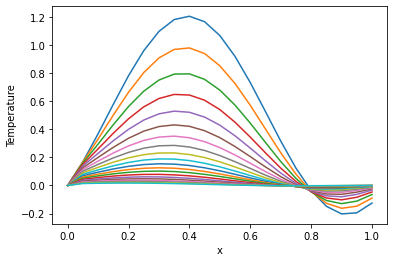

In [89]:
arr1 = np.array([[0,0.169591,0.368541,0.579171,0.782766,0.961237,1.09872,1.18301,1.20661,1.16743,1.06894,0.919894,0.733543,0.52644,0.316987,0.123797,-0.0359669,-0.148107,-0.202661,-0.194779,-0.125164],[0,0.167505,0.331397,0.502238,0.664848,0.804778,0.909596,0.969987,0.980585,0.940449,0.853145,0.72643,0.571564,0.402307,0.233698,0.0807194,-0.0430369,-0.126574,-0.16247,-0.147534,-0.0897906],[0,0.16065,0.295298,0.433523,0.563044,0.672352,0.751734,0.794138,0.795794,0.756558,0.679913,0.572672,0.444362,0.306384,0.170999,0.050236,-0.0451747,-0.106756,-0.129299,-0.111442,-0.0644239],[0,0.150769,0.261099,0.372656,0.475528,0.560575,0.620238,0.649218,0.644938,0.60778,0.541045,0.450662,0.344663,0.232466,0.124041,0.0290203,-0.0441623,-0.0890461,-0.102254,-0.0839715,-0.046229],[0,0.139145,0.229317,0.319125,0.400589,0.466472,0.510919,0.52998,0.521963,0.487579,0.429884,0.354004,0.266682,0.175675,0.0890716,0.0145628,-0.0412648,-0.0735721,-0.0804232,-0.0631312,-0.0331758],[0,0.126713,0.200222,0.272336,0.336648,0.387442,0.420206,0.432029,0.42186,0.390602,0.341033,0.277558,0.205816,0.132182,0.0631967,0.0049813,-0.0373607,-0.0602883,-0.0629475,-0.0473666,-0.02381],[0,0.114135,0.17391,0.231665,0.282268,0.321224,0.345071,0.351689,0.340491,0.312472,0.270121,0.217202,0.158416,0.098986,0.0441888,-0.0011264,-0.0330431,-0.0490473,-0.0490579,-0.0354726,-0.0170893],[0,0.101866,0.150352,0.196483,0.236162,0.265863,0.282946,0.285894,0.274444,0.249614,0.213611,0.169633,0.121587,0.073742,0.0303396,-0.00479697,-0.0286977,-0.0396479,-0.0380862,-0.0265198,-0.0122661],[0,0.0902079,0.129438,0.166184,0.197181,0.219675,0.231666,0.23209,0.220908,0.199115,0.168647,0.13221,0.0930423,0.0546205,0.0203445,-0.00678996,-0.0245621,-0.0318674,-0.029466,-0.0197954,-0.00880458],[0,0.0793454,0.111008,0.140194,0.164311,0.181216,0.189408,0.188157,0.177575,0.158603,0.132926,0.102825,0.070974,0.0401981,0.0132107,-0.00765619,-0.0207704,-0.0254828,-0.0227252,-0.0147545,-0.00632006],[0,0.0693781,0.0948675,0.11798,0.136663,0.149256,0.154639,0.152335,0.142548,0.126148,0.104592,0.0797952,0.0539583,0.0293699,0.00818679,-0.00779038,-0.0173866,-0.020283,-0.0174762,-0.0109824,-0.00453674],[0,0.0603448,0.0808122,0.0990583,0.113462,0.122743,0.126078,0.123169,0.114275,0.100186,0.0821551,0.0617822,0.0408751,0.021281,0.00470625,-0.00747133,-0.014428,-0.0160763,-0.0134044,-0.00816433,-0.00325666],[0,0.0522413,0.0686332,0.0829899,0.0940358,0.100789,0.102651,0.0994544,0.0914842,0.0794485,0.0644162,0.0477221,0.0308452,0.0152718,0.00234473,-0.00689262,-0.0118826,-0.012693,-0.0102564,-0.00606224,-0.00233779],[0,0.0443444,0.0566772,0.0671421,0.0748093,0.0789976,0.0793348,0.0757909,0.0686809,0.0586363,0.0465493,0.0334922,0.0206201,0.00906019,-0.000206567,-0.00647352,-0.00944365,-0.00936029,-0.00707326,-0.00390643,-0.00130786],[0,0.0372929,0.0464975,0.054041,0.0592529,0.0616703,0.0610783,0.0575295,0.0513393,0.0430574,0.0334192,0.0232791,0.0135315,0.00502313,-0.00154155,-0.00570179,-0.00734504,-0.00679462,-0.00481758,-0.00247351,-0.000731667],[0,0.0311056,0.0379167,0.0432849,0.0467332,0.0479552,0.0468423,0.0434933,0.0382059,0.0314496,0.023824,0.016004,0.00867657,0.00247057,-0.00211839,-0.00480778,-0.00560583,-0.0048624,-0.00324001,-0.00154495,-0.000409324],[0,0.025754,0.030747,0.0345097,0.036708,0.0371465,0.0357862,0.0327479,0.0283017,0.0228421,0.0168535,0.0108646,0.00539824,0.0009155,-0.00224417,-0.00392452,-0.00420722,-0.00343393,-0.00215292,-0.000954476,-0.000228993],[0,0.0211808,0.0248029,0.0273922,0.0287186,0.0286642,0.0272339,0.0245548,0.0208648,0.0164913,0.0118217,0.0072672,0.00322166,1.78224e-05,-0.00211997,-0.0031223,-0.00311011,-0.00239532,-0.00141468,-0.000584415,-0.000128108],[0,0.017313,0.0199097,0.0216504,0.0223805,0.022035,0.0206447,0.018333,0.0153053,0.01183,0.00821438,0.00477523,0.00180625,-0.000457016,-0.00187378,-0.00243184,-0.00226757,-0.00165167,-0.000920164,-0.000355165,-7.16687e-05],[0,0.0140713,0.0159074,0.0170421,0.0173744,0.0168749,0.0155879,0.0136277,0.0111683,0.00842763,0.00564734,0.00306934,0.00090982,-0.000668428,-0.00158395,-0.00185997,-0.0016324,-0.0011267,-0.000593013,-0.000214481,-4.00944e-05],[0,0.0113761,0.0126533,0.0133613,0.0134371,0.0128742,0.0117224,0.010084,0.00810444,0.00595876,0.00383547,0.00191753,0.000361749,-0.000722858,-0.00129584,-0.00140012,-0.00116142,-0.000760952,-0.000379001,-0.000128821,-2.24304e-05],[0,0.00915153,0.010022,0.0104348,0.0103532,0.00978455,0.00877929,0.00742666,0.00584654,0.00417845,0.00256811,0.00115243,4.31462e-05,-0.000689843,-0.00103336,-0.00103912,-0.000817367,-0.000509194,-0.000240405,-7.70088e-05,-1.25485e-05],[0,0.00732737,0.00790527,0.00811823,0.00794734,0.00740777,0.00654743,0.00544265,0.00419122,0.00290329,0.00169056,0.00065422,-0.000127821,-0.000613555,-0.000807003,-0.000761377,-0.000569433,-0.00033782,-0.000151456,-4.5846e-05,-7.02013e-06],[0,0.0058406,0.00621081,0.00629231,0.00607785,0.00558648,0.0048618,0.00396808,0.00298428,0.00199662,0.00108988,0.000337841,-0.000206662,-0.000521014,-0.000619186,-0.00055138,-0.000392979,-0.000222353,-9.48296e-05,-2.71945e-05,-3.92735e-06],[0,0.00463558,0.00486065,0.004859,0.00463078,0.00419626,0.00359398,0.00287728,0.00210934,0.00135707,0.000684142,0.000143478,-0.000230384,-0.000427871,-0.000467856,-0.00039503,-0.000268828,-0.000145282,-5.90419e-05,-1.60788e-05,-2.19712e-06],[0,0.00366404,0.00378958,0.00373839,0.003515,0.00313924,0.00264442,0.00207431,0.00147898,0.000909901,0.000414342,2.95187e-05,-0.000223137,-0.000342427,-0.000348754,-0.000280213,-0.000182396,-9.42825e-05,-3.65723e-05,-9.47913e-06,-1.22916e-06],[0,0.00288458,0.00294354,0.00286569,0.00265794,0.00233873,0.00193633,0.00148624,0.00102784,0.000600307,0.000238302,-3.26387e-05,-0.000200262,-0.000268391,-0.000256833,-0.000196941,-0.000122808,-6.08016e-05,-2.25481e-05,-5.57377e-06,-6.8764e-07],[0,0.00226215,0.00227799,0.00218867,0.00200214,0.00173491,0.00141065,0.00105788,0.000707249,0.000388329,0.000126126,-6.2373e-05,-0.000171156,-0.000206724,-0.000187065,-0.000137229,-8.20973e-05,-3.89818e-05,-1.38421e-05,-3.26967e-06,-3.84694e-07],[0,0.00176733,0.00175652,0.00166546,0.00150224,0.00128132,0.0010222,0.000747612,0.000481205,0.00024503,5.68207e-05,-7.25962e-05,-0.000141289,-0.000156856,-0.00013488,-9.48557e-05,-5.45155e-05,-2.48571e-05,-8.46407e-06,-1.91392e-06,-2.15213e-07],[0,0.00137564,0.00134954,0.00126264,0.00112266,0.000941992,0.000736546,0.000524244,0.000323181,0.000149596,1.57963e-05,-7.17362e-05,-0.000113595,-0.000117463,-9.63523e-05,-6.50748e-05,-3.59737e-05,-1.57705e-05,-5.15674e-06,-1.11813e-06,-1.20399e-07],[0,0.00106687,0.00103312,0.000953672,0.000835565,0.000689235,0.000527534,0.000364473,0.000213753,8.71698e-05,-6.96494e-06,-6.51548e-05,-8.94243e-05,-8.69381e-05,-6.8238e-05,-4.43298e-05,-2.35991e-05,-9.95861e-06,-3.13119e-06,-6.52051e-07,-6.73561e-08],[0,0.000824423,0.000788043,0.000717581,0.000619274,0.000501791,0.00037541,0.000250987,0.000138784,4.72321e-05,-1.82488e-05,-5.61486e-05,-6.91783e-05,-6.36682e-05,-4.79401e-05,-2.99983e-05,-1.5396e-05,-6.26099e-06,-1.89535e-06,-3.79621e-07,-3.76817e-08],[0,0.000634806,0.000598932,0.000537857,0.000456981,0.000363417,0.000265307,0.000170983,8.80457e-05,2.24037e-05,-2.25775e-05,-4.66504e-05,-5.2726e-05,-4.61788e-05,-3.34276e-05,-2.01737e-05,-9.99229e-06,-3.92016e-06,-1.14396e-06,-2.20676e-07,-2.10807e-08],[0,0.000487069,0.000453546,0.000401563,0.000335707,0.000261752,0.000186088,0.00011505,5.41914e-05,7.56018e-06,-2.29069e-05,-3.77126e-05,-3.96693e-05,-3.31977e-05,-2.31446e-05,-1.34871e-05,-6.45362e-06,-2.44509e-06,-6.88587e-07,-1.28099e-07,-1.17934e-08],[0,0.000372393,0.000342188,0.0002986,0.000245467,0.000187426,0.000129448,7.63008e-05,3.19822e-05,-8.16453e-07,-2.11224e-05,-2.98363e-05,-2.95054e-05,-2.36704e-05,-1.5919e-05,-8.96681e-06,-4.14902e-06,-1.51956e-06,-4.13441e-07,-7.42614e-08,-6.5977e-09],[0,0.000283709,0.000257209,0.00022112,0.00017861,0.000133369,8.9226e-05,4.97308e-05,1.77123e-05,-5.10958e-06,-1.8389e-05,-2.31911e-05,-2.17206e-05,-1.67488e-05,-1.08809e-05,-5.93034e-06,-2.65586e-06,-9.41177e-07,-2.47654e-07,-4.29982e-08,-3.69102e-09],[0,0.000215376,0.000192602,0.000163048,0.0001293,9.42665e-05,6.08713e-05,3.17231e-05,8.78344e-06,-6.90924e-06,-1.53961e-05,-1.77586e-05,-1.58408e-05,-1.17668e-05,-7.39356e-06,-3.90271e-06,-1.69312e-06,-5.81086e-07,-1.48019e-07,-2.4868e-08,-2.06491e-09],[0,0.000162916,0.000143665,0.000119698,9.31008e-05,6.61452e-05,4.10418e-05,1.9682e-05,3.39185e-06,-7.25676e-06,-1.25251e-05,-1.34243e-05,-1.1454e-05,-8.21149e-06,-4.99595e-06,-2.55629e-06,-1.0752e-06,-3.57689e-07,-8.82859e-08,-1.4367e-08,-1.15519e-09],[0,0.000122789,0.000106739,8.74721e-05,6.66548e-05,4.6045e-05,2.7296e-05,1.17581e-05,2.99022e-07,-6.81874e-06,-9.96413e-06,-1.00332e-05,-8.21665e-06,-5.69434e-06,-3.35803e-06,-1.66694e-06,-6.80302e-07,-2.19553e-07,-5.25555e-08,-8.29196e-09,-6.46262e-10],[0,9.22054e-05,7.89826e-05,6.36181e-05,4.74322e-05,3.17722e-05,1.78606e-05,6.6438e-06,-1.33475e-06,-6.00958e-06,-7.78445e-06,-7.42293e-06,-5.85108e-06,-3.92535e-06,-2.24581e-06,-1.08241e-06,-4.28952e-07,-1.34404e-07,-3.12282e-08,-4.78122e-09,-3.61545e-10],[0,6.89817e-05,5.81998e-05,4.60389e-05,3.35343e-05,2.1709e-05,1.14554e-05,3.4228e-06,-2.0705e-06,-5.07676e-06,-5.99006e-06,-5.44156e-06,-4.13801e-06,-2.69071e-06,-1.49483e-06,-7.00033e-07,-2.69579e-07,-8.20699e-08,-1.85235e-08,-2.75445e-09,-2.02263e-10],[0,5.14114e-05,4.27008e-05,3.31429e-05,2.35425e-05,1.46683e-05,7.1626e-06,1.45876e-06,-2.27663e-06,-4.15963e-06,-4.54975e-06,-3.95575e-06,-2.90768e-06,-1.83457e-06,-9.90473e-07,-4.5101e-07,-1.68892e-07,-4.99936e-08,-1.09696e-08,-1.5855e-09,-1.13154e-10],[0,3.81678e-05,3.11893e-05,2.37274e-05,1.64017e-05,9.7838e-06,4.32838e-06,3.14596e-07,-2.18992e-06,-3.32928e-06,-3.41669e-06,-2.85351e-06,-2.03079e-06,-1.24452e-06,-6.53459e-07,-2.89517e-07,-1.05498e-07,-3.03848e-08,-6.48608e-09,-9.11921e-10,-6.3303e-11],[0,2.8223e-05,2.26752e-05,1.68871e-05,1.1331e-05,6.42691e-06,2.49077e-06,-3.06398e-07,-1.9585e-06,-2.61516e-06,-2.54e-06,-2.04371e-06,-1.41025e-06,-8.40176e-07,-4.29346e-07,-1.85206e-07,-6.57128e-08,-1.84273e-08,-3.82945e-09,-5.2411e-10,-3.54143e-11],[0,2.0784e-05,1.64053e-05,1.19433e-05,7.75472e-06,4.14414e-06,1.32595e-06,-6.0283e-07,-1.67173e-06,-2.02254e-06,-1.87117e-06,-1.45398e-06,-9.74024e-07,-5.64605e-07,-2.80991e-07,-1.18087e-07,-4.08216e-08,-1.11525e-08,-2.2578e-09,-3.01009e-10,-1.98122e-11],[0,1.52411e-05,1.18087e-05,8.38977e-06,5.25118e-06,2.61048e-06,6.08997e-07,-7.05497e-07,-1.38076e-06,-1.54367e-06,-1.36709e-06,-1.02798e-06,-6.6928e-07,-3.77759e-07,-1.8321e-07,-7.50549e-08,-2.52939e-08,-6.73651e-09,-1.32941e-09,-1.72761e-10,-1.10837e-11],[0,1.11277e-05,8.45434e-06,5.8503e-06,3.51276e-06,1.59456e-06,1.85291e-07,-6.98837e-07,-1.11249e-06,-1.16473e-06,-9.91248e-07,-7.2252e-07,-4.57635e-07,-2.51691e-07,-1.19028e-07,-4.75605e-08,-1.56344e-08,-4.06152e-09,-7.81783e-10,-9.90911e-11,-6.20069e-12],[0,8.08762e-06,6.0184e-06,4.04669e-06,2.31643e-06,9.32876e-07,-5.02804e-08,-6.36017e-07,-8.78941e-07,-8.69952e-07,-7.13701e-07,-5.05015e-07,-3.11462e-07,-1.67026e-07,-7.70658e-08,-3.00512e-08,-9.64116e-09,-2.44439e-09,-4.59189e-10,-5.68014e-11,-3.46892e-12],[0,5.85027e-06,4.25834e-06,2.77414e-06,1.5014e-06,5.10813e-07,-1.68231e-07,-5.49427e-07,-6.83348e-07,-6.439e-07,-5.10518e-07,-3.51134e-07,-2.11037e-07,-1.10417e-07,-4.97334e-08,-1.89356e-08,-5.93211e-09,-1.46864e-09,-2.69401e-10,-3.25412e-11,-1.94065e-12],[0,4.21091e-06,2.99338e-06,1.8827e-06,9.52464e-07,2.48712e-07,-2.15143e-07,-4.57899e-07,-5.24131e-07,-4.72681e-07,-3.62952e-07,-2.42926e-07,-1.42385e-07,-7.2727e-08,-3.1994e-08,-1.19001e-08,-3.64217e-09,-8.80961e-10,-1.57882e-10,-1.86323e-11,-1.08568e-12],[0,3.01513e-06,2.08934e-06,1.26306e-06,5.87633e-07,9.17479e-08,-2.21225e-07,-3.71623e-07,-3.97342e-07,-3.44388e-07,-2.56562e-07,-1.67267e-07,-9.56764e-08,-4.77341e-08,-2.05201e-08,-7.45968e-09,-2.23164e-09,-5.27623e-10,-9.24299e-11,-1.06628e-11,-6.07373e-13],[0,2.14703e-06,1.44709e-06,8.36053e-07,3.48956e-07,2.59602e-09,-2.05623e-07,-2.95427e-07,-2.98151e-07,-2.4918e-07,-1.80377e-07,-1.14652e-07,-6.40401e-08,-3.12245e-08,-1.3123e-08,-4.66483e-09,-1.36469e-09,-3.15534e-10,-5.40579e-11,-6.09902e-12,-3.39789e-13],[0,1.5199e-06,9.93725e-07,5.4459e-07,1.95792e-07,-4.38424e-08,-1.80111e-07,-2.30951e-07,-2.21687e-07,-1.79135e-07,-1.26165e-07,-7.82475e-08,-4.27048e-08,-2.0359e-08,-8.3691e-09,-2.91031e-09,-8.3297e-10,-1.88431e-10,-3.15856e-11,-3.48689e-12,-1.90092e-13],[0,1.06919e-06,6.75892e-07,3.47795e-07,9.98764e-08,-6.42019e-08,-1.51635e-07,-1.78036e-07,-1.6348e-07,-1.28007e-07,-8.78184e-08,-5.31818e-08,-2.83755e-08,-1.32332e-08,-5.3231e-09,-1.81163e-09,-5.07505e-10,-1.12373e-10,-1.84384e-11,-1.99258e-12,-1.06345e-13],[0,7.47033e-07,4.54734e-07,2.16571e-07,4.17325e-08,-6.93193e-08,-1.24049e-07,-1.35612e-07,-1.19655e-07,-9.09568e-08,-6.08441e-08,-3.60026e-08,-1.87894e-08,-8.57576e-09,-3.37702e-09,-1.12529e-09,-3.08672e-10,-6.69278e-11,-1.07541e-11,-1.13815e-12,-5.94938e-14],[0,5.18089e-07,3.02103e-07,1.30352e-07,8.07725e-09,-6.61054e-08,-9.92704e-08,-1.02224e-07,-8.69757e-08,-6.42877e-08,-4.19693e-08,-2.42802e-08,-1.24006e-08,-5.54151e-09,-2.13712e-09,-6.97529e-10,-1.87427e-10,-3.9811e-11,-6.26699e-12,-6.49835e-13,-3.32832e-14],[0,3.56387e-07,1.97722e-07,7.47032e-08,-1.00429e-08,-5.88493e-08,-7.80538e-08,-7.63475e-08,-6.2819e-08,-4.52101e-08,-2.88278e-08,-1.6315e-08,-8.15809e-09,-3.57091e-09,-1.34924e-09,-4.31512e-10,-1.13624e-10,-2.36524e-11,-3.64916e-12,-3.70876e-13,-1.862e-14],[0,2.42932e-07,1.27069e-07,3.95798e-08,-1.85817e-08,-5.01164e-08,-6.04843e-08,-5.65496e-08,-4.51024e-08,-3.16425e-08,-1.97213e-08,-1.09243e-08,-5.35056e-09,-2.29492e-09,-8.49875e-10,-2.66435e-10,-6.87758e-11,-1.4036e-11,-2.12318e-12,-2.11585e-13,-1.04168e-14],[0,1.63897e-07,7.98064e-08,1.80493e-08,-2.1435e-08,-4.13606e-08,-4.62941e-08,-4.15713e-08,-3.22023e-08,-2.20463e-08,-1.34393e-08,-7.29012e-09,-3.49885e-09,-1.47108e-09,-5.34145e-10,-1.64204e-10,-4.15678e-11,-8.31997e-12,-1.2344e-12,-1.20664e-13,-5.82757e-15],[0,1.0927e-07,4.86229e-08,5.37584e-09,-2.11025e-08,-3.33364e-08,-3.50561e-08,-3.03502e-08,-2.28716e-08,-1.5294e-08,-9.12435e-09,-4.84911e-09,-2.28145e-09,-9.40645e-10,-3.34993e-10,-1.01019e-10,-2.50874e-11,-4.92644e-12,-7.17154e-13,-6.87878e-14,-3.26018e-15],[0,7.18408e-08,2.83858e-08,-1.64099e-09,-1.91489e-08,-2.63719e-08,-2.62973e-08,-2.20173e-08,-1.61643e-08,-1.0566e-08,-6.17269e-09,-3.21535e-09,-1.48354e-09,-6.00027e-10,-2.09661e-10,-6.20404e-11,-1.51201e-11,-2.91403e-12,-4.16358e-13,-3.92008e-14,-1.82388e-15],[0,4.64435e-08,1.55187e-08,-5.13616e-09,-1.65219e-08,-2.05463e-08,-1.95618e-08,-1.5878e-08,-1.13704e-08,-7.27076e-09,-4.16153e-09,-2.12559e-09,-9.62126e-10,-3.81864e-10,-1.30959e-10,-3.80386e-11,-9.10072e-12,-1.72194e-12,-2.41563e-13,-2.23323e-14,-1.02035e-15],[0,2.94008e-08,7.55039e-09,-6.51281e-09,-1.37689e-08,-1.58035e-08,-1.44412e-08,-1.13875e-08,-7.96268e-09,-4.98426e-09,-2.79635e-09,-1.40108e-09,-6.22369e-10,-2.42478e-10,-8.1643e-11,-2.3285e-11,-5.47062e-12,-1.01653e-12,-1.40059e-13,-1.27184e-14,-5.70825e-16],[0,1.81112e-08,2.78935e-09,-6.67655e-09,-1.11841e-08,-1.20222e-08,-1.05875e-08,-8.12464e-09,-5.55258e-09,-3.40438e-09,-1.87302e-09,-9.20915e-10,-4.01591e-10,-1.53636e-10,-5.08036e-11,-1.42317e-11,-3.28441e-12,-5.99543e-13,-8.11564e-14,-7.24091e-15,-3.19343e-16],[0,1.07466e-08,8.9769e-11,-6.19876e-09,-8.90509e-09,-9.05792e-09,-7.71274e-09,-5.76837e-09,-3.85625e-09,-2.31714e-09,-1.2507e-09,-6.0366e-10,-2.58509e-10,-9.71413e-11,-3.15566e-11,-8.68525e-12,-1.9695e-12,-3.53286e-13,-4.69972e-14,-4.1212e-15,-1.78653e-16],[0,6.03185e-09,-1.31524e-09,-5.42945e-09,-6.97714e-09,-6.76633e-09,-5.58548e-09,-4.07652e-09,-2.66776e-09,-1.5718e-09,-8.32668e-10,-3.94656e-10,-1.66019e-10,-6.12961e-11,-1.95672e-11,-5.29272e-12,-1.17964e-12,-2.07995e-13,-2.72e-14,-2.34492e-15,-9.99459e-17],[0,3.08474e-09,-1.9318e-09,-4.57438e-09,-5.39378e-09,-5.01573e-09,-4.02272e-09,-2.86822e-09,-1.83869e-09,-1.06275e-09,-5.52763e-10,-2.57357e-10,-1.0638e-10,-3.86018e-11,-1.21126e-11,-3.22081e-12,-7.05755e-13,-1.22352e-13,-1.57333e-14,-1.33386e-15,-5.59138e-17],[0,1.30019e-09,-2.08837e-09,-3.74723e-09,-4.12236e-09,-3.69212e-09,-2.88228e-09,-2.00963e-09,-1.26274e-09,-7.16309e-10,-3.65929e-10,-1.67409e-10,-6.80165e-11,-2.42635e-11,-7.48574e-12,-1.95732e-12,-4.2178e-13,-7.19146e-14,-9.09567e-15,-7.58532e-16,-3.12804e-17],[0,2.67355e-10,-1.99376e-09,-3.00443e-09,-3.11952e-09,-2.70043e-09,-2.05515e-09,-1.40242e-09,-8.64217e-10,-4.81339e-10,-2.41592e-10,-1.08638e-10,-4.33959e-11,-1.5223e-11,-4.61898e-12,-1.18791e-12,-2.51802e-13,-4.22355e-14,-5.25558e-15,-4.31244e-16,-1.74996e-17],[0,-2.89615e-10,-1.7772e-09,-2.36796e-09,-2.34003e-09,-1.96344e-09,-1.45866e-09,-9.74941e-10,-5.89507e-10,-3.22498e-10,-1.59087e-10,-7.03359e-11,-2.76308e-11,-9.53381e-12,-2.84572e-12,-7.20033e-13,-1.50172e-13,-2.4786e-14,-3.03518e-15,-2.4511e-16,-9.78996e-18],[0,-5.53504e-10,-1.51585e-09,-1.8402e-09,-1.74162e-09,-1.41974e-09,-1.03079e-09,-6.75278e-10,-4.00834e-10,-2.15462e-10,-1.04493e-10,-4.54353e-11,-1.75579e-11,-5.96046e-12,-1.75062e-12,-4.35896e-13,-8.94721e-14,-1.45349e-14,-1.75199e-15,-1.39281e-16,-5.4769e-18],[0,-6.43565e-10,-1.25339e-09,-1.41312e-09,-1.28707e-09,-1.02132e-09,-7.25417e-10,-4.66074e-10,-2.71705e-10,-1.43556e-10,-6.84664e-11,-2.9286e-11,-1.11356e-11,-3.72015e-12,-1.07539e-12,-2.63567e-13,-5.3256e-14,-8.51732e-15,-1.01082e-15,-7.9126e-17,-3.064e-18],[0,-6.36132e-10,-1.01248e-09,-1.07407e-09,-9.45016e-10,-7.31164e-10,-5.08494e-10,-3.20592e-10,-1.83625e-10,-9.53929e-11,-4.4754e-11,-1.88367e-11,-7.04915e-12,-2.31809e-12,-6.59673e-13,-1.59181e-13,-3.16698e-14,-4.9876e-15,-5.82922e-16,-4.49412e-17,-1.71413e-18],[0,-5.78907e-10,-8.03019e-10,-8.09049e-10,-6.89741e-10,-5.21054e-10,-3.55092e-10,-2.19801e-10,-1.2374e-10,-6.3225e-11,-2.91865e-11,-1.20908e-11,-4.45421e-12,-1.44214e-12,-4.04112e-13,-9.60286e-14,-1.8816e-14,-2.91867e-15,-3.3601e-16,-2.55195e-17,-9.58952e-19],[0,-5.00753e-10,-6.27458e-10,-6.04551e-10,-5.00646e-10,-3.69718e-10,-2.47071e-10,-1.50223e-10,-8.31526e-11,-4.17999e-11,-1.89915e-11,-7.74526e-12,-2.80954e-12,-8.95812e-13,-2.4723e-13,-5.78671e-14,-1.11694e-14,-1.70684e-15,-1.93599e-16,-1.44879e-17,-5.36476e-19],[0,-4.18358e-10,-4.84196e-10,-4.48492e-10,-3.61523e-10,-2.6126e-10,-1.71312e-10,-1.02358e-10,-5.57266e-11,-2.7568e-11,-1.23307e-11,-4.95189e-12,-1.7691e-12,-5.55613e-13,-1.51057e-13,-3.48336e-14,-6.62458e-15,-9.97521e-16,-1.11499e-16,-8.22329e-18,-3.00127e-19],[0,-3.40705e-10,-3.69673e-10,-3.30541e-10,-2.59801e-10,-1.83896e-10,-1.18386e-10,-6.95385e-11,-3.72484e-11,-1.81389e-11,-7.98911e-12,-3.15999e-12,-1.1121e-12,-3.44108e-13,-9.21808e-14,-2.09466e-14,-3.92579e-15,-5.82615e-16,-6.41882e-17,-4.66655e-18,-1.67903e-19],[0,-2.72035e-10,-2.79621e-10,-2.42147e-10,-1.85852e-10,-1.28957e-10,-8.15481e-11,-4.71077e-11,-2.48339e-11,-1.19074e-11,-5.16551e-12,-2.0128e-12,-6.97952e-13,-2.12813e-13,-5.61838e-14,-1.25831e-14,-2.32459e-15,-3.40078e-16,-3.69374e-17,-2.64765e-18,-9.39318e-20],[0,-2.13783e-10,-2.09772e-10,-1.76406e-10,-1.3238e-10,-9.01072e-11,-5.59982e-11,-3.18244e-11,-1.65161e-11,-7.79937e-12,-3.33318e-12,-1.27979e-12,-4.37341e-13,-1.31433e-13,-3.42033e-14,-7.55157e-15,-1.37538e-15,-1.9839e-16,-2.12475e-17,-1.50189e-18,-5.25492e-20],[0,-1.65807e-10,-1.56213e-10,-1.27849e-10,-9.39073e-11,-6.27449e-11,-3.83379e-11,-2.1442e-11,-1.09578e-11,-5.09751e-12,-2.14663e-12,-8.12301e-13,-2.73618e-13,-8.1063e-14,-2.07982e-14,-4.52763e-15,-8.13145e-16,-1.15668e-16,-1.22176e-17,-8.51794e-19,-2.93982e-20],[0,-1.2717e-10,-1.15555e-10,-9.221e-11,-6.6357e-11,-4.35471e-11,-2.6171e-11,-1.44093e-11,-7.25311e-12,-3.32461e-12,-1.37984e-12,-5.14707e-13,-1.7093e-13,-4.99313e-14,-1.26327e-14,-2.71206e-15,-4.80385e-16,-6.74005e-17,-7.02263e-18,-4.83004e-19,-1.64465e-20],[0,-9.65983e-11,-8.4958e-11,-6.62031e-11,-4.67153e-11,-3.0127e-11,-1.78152e-11,-9.65886e-12,-4.79003e-12,-2.16388e-12,-8.85319e-13,-3.256e-13,-1.06624e-13,-3.07163e-14,-7.66465e-15,-1.62305e-15,-2.83594e-16,-3.92535e-17,-4.03514e-18,-2.73835e-19,-9.20086e-21],[0,-7.27556e-11,-6.21122e-11,-4.73271e-11,-3.27708e-11,-2.07786e-11,-1.20942e-11,-6.4587e-12,-3.15639e-12,-1.40558e-12,-5.67007e-13,-2.05641e-13,-6.64159e-14,-1.88723e-14,-4.64544e-15,-9.70472e-16,-1.67301e-16,-2.28489e-17,-2.31774e-18,-1.55221e-19,-5.14733e-21],[0,-5.43845e-11,-4.51733e-11,-3.36955e-11,-2.29104e-11,-1.42885e-11,-8.18871e-12,-4.30855e-12,-2.07544e-12,-9.11237e-13,-3.62505e-13,-1.29674e-13,-4.13129e-14,-1.15812e-14,-2.81262e-15,-5.79774e-16,-9.8628e-17,-1.32931e-17,-1.33083e-18,-8.79709e-20,-2.87963e-21],[0,-4.03756e-11,-3.26942e-11,-2.38973e-11,-1.59645e-11,-9.79736e-12,-5.53018e-12,-2.86755e-12,-1.36181e-12,-5.89636e-13,-2.31365e-13,-8.16453e-14,-2.56632e-14,-7.09858e-15,-1.70121e-15,-3.46075e-16,-5.81047e-17,-7.72987e-18,-7.63899e-19,-4.98488e-20,-1.61098e-21],[0,-2.97896e-11,-2.35545e-11,-1.68858e-11,-1.10893e-11,-6.69923e-12,-3.72547e-12,-1.90421e-12,-8.91736e-13,-3.80831e-13,-1.4742e-13,-5.13288e-14,-1.59207e-14,-4.34598e-15,-1.02796e-15,-2.06408e-16,-3.42089e-17,-4.49267e-18,-4.38337e-19,-2.82423e-20,-9.01247e-22],[0,-2.18541e-11,-1.6897e-11,-1.18893e-11,-7.67953e-12,-4.56847e-12,-2.50364e-12,-1.26172e-12,-5.82763e-13,-2.45526e-13,-9.37792e-14,-3.22224e-14,-9.86404e-15,-2.65775e-15,-6.20549e-16,-1.23008e-16,-2.01275e-17,-2.60994e-18,-2.51445e-19,-1.59984e-20,-5.04194e-22],[0,-1.59481e-11,-1.20718e-11,-8.34303e-12,-5.30258e-12,-3.10729e-12,-1.67857e-12,-8.34229e-13,-3.80106e-13,-1.58015e-13,-5.95618e-14,-2.01994e-14,-6.10379e-15,-1.62355e-15,-3.74256e-16,-7.32495e-17,-1.1835e-17,-1.5155e-18,-1.44192e-19,-9.06123e-21,-2.82067e-22],[0,-1.15812e-11,-8.59127e-12,-5.83548e-12,-3.65095e-12,-2.1081e-12,-1.12282e-12,-5.50431e-13,-2.47454e-13,-1.0152e-13,-3.77708e-14,-1.26449e-14,-3.77234e-15,-9.9072e-16,-2.2551e-16,-4.35858e-17,-6.95483e-18,-8.79592e-19,-8.26631e-20,-5.13135e-21,-1.578e-22],[0,-8.37148e-12,-6.09174e-12,-4.06883e-12,-2.50686e-12,-1.42669e-12,-7.49401e-13,-3.62443e-13,-1.60799e-13,-6.51146e-14,-2.39159e-14,-7.90504e-15,-2.32864e-15,-6.03924e-16,-1.3576e-16,-2.59157e-17,-4.08457e-18,-5.10289e-19,-4.73754e-20,-2.90545e-21,-8.82795e-23],[0,-6.02523e-12,-4.30425e-12,-2.82848e-12,-1.71671e-12,-9.63226e-13,-4.99084e-13,-2.38186e-13,-1.04301e-13,-4.1696e-14,-1.51209e-14,-4.93535e-15,-1.43577e-15,-3.67765e-16,-8.16585e-17,-1.5398e-17,-2.39748e-18,-2.95912e-19,-2.71437e-20,-1.64487e-21,-4.93871e-23],[0,-4.3189e-12,-3.03103e-12,-1.96052e-12,-1.17258e-12,-6.48806e-13,-3.31675e-13,-1.56226e-13,-6.75348e-14,-2.66572e-14,-9.54638e-15,-3.0773e-15,-8.84237e-16,-2.2373e-16,-4.9075e-17,-9.14239e-18,-1.40643e-18,-1.71524e-19,-1.55476e-20,-9.31086e-22,-2.76292e-23],[0,-3.08384e-12,-2.12754e-12,-1.35509e-12,-7.98906e-13,-4.3603e-13,-2.19966e-13,-1.02276e-13,-4.36538e-14,-1.7016e-14,-6.0185e-15,-1.91635e-15,-5.43961e-16,-1.35974e-16,-2.94684e-17,-5.42443e-18,-8.24598e-19,-9.93825e-20,-8.90308e-21,-5.26974e-22,-1.54569e-23],[0,-2.19388e-12,-1.48873e-12,-9.34076e-13,-5.42989e-13,-2.92387e-13,-1.45587e-13,-6.68332e-14,-2.817e-14,-1.08452e-14,-3.78913e-15,-1.19191e-15,-3.34266e-16,-8.25607e-17,-1.76807e-17,-3.21629e-18,-4.83206e-19,-5.75598e-20,-5.09683e-21,-2.98215e-22,-8.6472e-24],[0,-1.55528e-12,-1.03862e-12,-6.42169e-13,-3.68177e-13,-1.95643e-13,-9.61694e-14,-4.35945e-14,-1.81484e-14,-6.90191e-15,-2.38234e-15,-7.40433e-16,-2.05189e-16,-5.00825e-17,-1.05998e-17,-1.90576e-18,-2.83004e-19,-3.3324e-20,-2.91706e-21,-1.68738e-22,-4.8376e-24],[0,-1.09887e-12,-7.22501e-13,-4.40357e-13,-2.49069e-13,-1.30635e-13,-6.34041e-14,-2.83863e-14,-1.16733e-14,-4.38599e-15,-1.49588e-15,-4.59427e-16,-1.25823e-16,-3.03531e-17,-6.34975e-18,-1.1285e-18,-1.65665e-19,-1.92854e-20,-1.66909e-21,-9.54648e-23,-2.70635e-24],[0,-7.73907e-13,-5.01198e-13,-3.01219e-13,-1.68116e-13,-8.7049e-14,-4.17237e-14,-1.84518e-14,-7.49666e-15,-2.78321e-15,-9.3806e-16,-2.84738e-16,-7.70767e-17,-1.83795e-17,-3.8009e-18,-6.67822e-19,-9.69277e-20,-1.11567e-20,-9.54787e-22,-5.4003e-23,-1.51404e-24],[0,-5.43359e-13,-3.46743e-13,-2.05546e-13,-1.13226e-13,-5.78896e-14,-2.74065e-14,-1.19741e-14,-4.80702e-15,-1.76368e-15,-5.87511e-16,-1.76273e-16,-4.71684e-17,-1.11195e-17,-2.27348e-18,-3.94958e-19,-5.66829e-20,-6.45182e-21,-5.46042e-22,-3.0545e-23,-8.47016e-25],[0,-3.80357e-13,-2.3926e-13,-1.39932e-13,-7.6095e-14,-3.84229e-14,-1.79699e-14,-7.75766e-15,-3.07775e-15,-1.11609e-15,-3.67507e-16,-1.09004e-16,-2.88373e-17,-6.72149e-18,-1.35888e-18,-2.33442e-19,-3.31319e-20,-3.72969e-21,-3.12207e-22,-1.72747e-23,-4.73855e-25],[0,-2.65491e-13,-1.64676e-13,-9.5046e-14,-5.10344e-14,-2.54537e-14,-1.1762e-14,-5.01792e-15,-1.96767e-15,-7.0534e-16,-2.2961e-16,-6.73337e-17,-1.76134e-17,-4.05961e-18,-8.11635e-19,-1.37895e-19,-1.93569e-20,-2.15531e-21,-1.78466e-22,-9.76854e-24,-2.65094e-25],[0,-1.84801e-13,-1.13063e-13,-6.44145e-14,-3.41577e-14,-1.68308e-14,-7.68547e-15,-3.24066e-15,-1.25617e-15,-4.45174e-16,-1.43285e-16,-4.15491e-17,-1.07479e-17,-2.4499e-18,-4.84437e-19,-8.1408e-20,-1.13038e-20,-1.24508e-21,-1.01993e-22,-5.52331e-24,-1.48304e-25],[0,-1.28291e-13,-7.74413e-14,-4.35603e-14,-2.28167e-14,-1.11088e-14,-5.01342e-15,-2.08967e-15,-8.00813e-16,-2.80611e-16,-8.93119e-17,-2.56118e-17,-6.55247e-18,-1.47728e-18,-2.88946e-19,-4.80329e-20,-6.59807e-21,-7.19017e-22,-5.82758e-23,-3.12263e-24,-8.29674e-26],[0,-8.88299e-14,-5.29192e-14,-2.93954e-14,-1.52116e-14,-7.31905e-15,-3.26502e-15,-1.34545e-15,-5.0982e-16,-1.76659e-16,-5.56065e-17,-1.57716e-17,-3.99113e-18,-8.90101e-19,-1.72229e-19,-2.8325e-20,-3.84962e-21,-4.15084e-22,-3.32897e-23,-1.7652e-24,-4.64153e-26],[0,-6.13521e-14,-3.60804e-14,-1.97958e-14,-1.01222e-14,-4.81379e-15,-2.12296e-15,-8.65e-16,-3.24128e-16,-1.11079e-16,-3.45827e-17,-9.70247e-18,-2.42887e-18,-5.35897e-19,-1.02591e-19,-1.66941e-20,-2.24507e-21,-2.39548e-22,-1.90124e-23,-9.97751e-25,-2.59666e-26],[0,-4.22706e-14,-2.45454e-14,-1.33043e-14,-6.72317e-15,-3.16068e-15,-1.37821e-15,-5.55315e-16,-2.05799e-16,-6.97601e-17,-2.14842e-17,-5.96298e-18,-1.47686e-18,-3.22401e-19,-6.10711e-20,-9.83392e-21,-1.30875e-21,-1.38201e-22,-1.08561e-23,-5.63902e-25,-1.45268e-26],[0,-2.90548e-14,-1.66624e-14,-8.92394e-15,-4.45745e-15,-2.0718e-15,-8.93352e-16,-3.55999e-16,-1.30499e-16,-4.37591e-17,-1.33327e-17,-3.66126e-18,-8.97232e-19,-1.93817e-19,-3.63319e-20,-5.78979e-21,-7.6261e-22,-7.97066e-23,-6.19757e-24,-3.1867e-25,-8.12687e-27],[0,-1.99248e-14,-1.12874e-14,-5.9743e-15,-2.95005e-15,-1.35584e-15,-5.78197e-16,-2.27907e-16,-8.26457e-17,-2.74176e-17,-8.26534e-18,-2.2459e-18,-5.44642e-19,-1.16432e-19,-2.16009e-20,-3.40703e-21,-4.44193e-22,-4.59563e-23,-3.53737e-24,-1.80067e-25,-4.5465e-27],[0,-1.36331e-14,-7.63064e-15,-3.9921e-15,-1.94904e-15,-8.85876e-16,-3.7367e-16,-1.45705e-16,-5.22749e-17,-1.71592e-17,-5.11869e-18,-1.37642e-18,-3.30343e-19,-6.98952e-20,-1.28349e-20,-2.00388e-21,-2.58623e-22,-2.6489e-23,-2.01861e-24,-1.01738e-25,-2.5435e-27],[0,-9.3078e-15,-5.14827e-15,-2.66268e-15,-1.28551e-15,-5.77907e-16,-2.41142e-16,-9.30286e-17,-3.30245e-17,-1.07271e-17,-3.1668e-18,-8.42793e-19,-2.00204e-19,-4.19295e-20,-7.62178e-21,-1.17802e-21,-1.50519e-22,-1.52637e-23,-1.1517e-24,-5.74768e-26,-1.42293e-27],[0,-6.34122e-15,-3.46668e-15,-1.77278e-15,-8.4647e-16,-3.76423e-16,-1.55397e-16,-5.93186e-17,-2.08382e-17,-6.69875e-18,-1.95729e-18,-5.15593e-19,-1.21238e-19,-2.5136e-20,-4.52343e-21,-6.92188e-22,-8.75687e-23,-8.79282e-24,-6.56971e-25,-3.24683e-26,-7.96047e-28],[0,-4.31117e-15,-2.32991e-15,-1.17823e-15,-5.56468e-16,-2.44817e-16,-1.00002e-16,-3.77755e-17,-1.31333e-17,-4.1787e-18,-1.20856e-18,-3.1515e-19,-7.33625e-20,-1.50585e-20,-2.68306e-21,-4.06528e-22,-5.09264e-23,-5.06378e-24,-3.74688e-25,-1.83394e-26,-4.45341e-28],[0,-2.92508e-15,-1.56299e-15,-7.81726e-16,-3.65239e-16,-1.58989e-16,-6.42664e-17,-2.40261e-17,-8.26781e-18,-2.60396e-18,-7.45539e-19,-1.92468e-19,-4.43591e-20,-9.01537e-21,-1.59056e-21,-2.38646e-22,-2.96057e-23,-2.91542e-24,-2.13656e-25,-1.03579e-26,-2.49142e-28],[0,-1.9807e-15,-1.0466e-15,-5.17784e-16,-2.39352e-16,-1.03102e-16,-4.12457e-17,-1.52624e-17,-5.19895e-18,-1.62099e-18,-4.59481e-19,-1.17446e-19,-2.68022e-20,-5.39393e-21,-9.42395e-22,-1.4003e-22,-1.72048e-23,-1.67807e-24,-1.21809e-25,-5.84952e-27,-1.3938e-28],[0,-1.33863e-15,-6.99566e-16,-3.42394e-16,-1.56614e-16,-6.67648e-17,-2.64365e-17,-9.68365e-18,-3.26557e-18,-1.00806e-18,-2.82924e-19,-7.16079e-20,-1.61824e-20,-3.22517e-21,-5.5806e-22,-8.21282e-23,-9.99473e-24,-9.65612e-25,-6.94336e-26,-3.30316e-27,-7.79749e-29],[0,-9.02983e-16,-4.66788e-16,-2.26048e-16,-1.02323e-16,-4.31743e-17,-1.69228e-17,-6.13676e-18,-2.04895e-18,-6.26272e-19,-1.74053e-19,-4.3625e-20,-9.76352e-21,-1.92722e-21,-3.30293e-22,-4.81475e-23,-5.80416e-24,-5.55497e-25,-3.95716e-26,-1.8651e-27,-4.36223e-29],[0,-6.07989e-16,-3.10934e-16,-1.49e-16,-6.67542e-17,-2.78812e-17,-1.08191e-17,-3.8845e-18,-1.28422e-18,-3.88702e-19,-1.06982e-19,-2.65563e-20,-5.88664e-21,-1.15092e-21,-1.95385e-22,-2.82142e-23,-3.36945e-24,-3.19484e-25,-2.25488e-26,-1.05302e-27,-2.44041e-29],[0,-4.08626e-16,-2.06771e-16,-9.80613e-17,-4.34867e-17,-1.79811e-17,-6.90831e-18,-2.45603e-18,-8.04068e-19,-2.41022e-19,-6.56998e-20,-1.61534e-20,-3.54675e-21,-6.86912e-22,-1.15521e-22,-1.65264e-23,-1.95538e-24,-1.837e-25,-1.28467e-26,-5.94479e-28,-1.36526e-29],[0,-2.7415e-16,-1.37277e-16,-6.44387e-17,-2.82891e-17,-1.15811e-17,-4.4058e-18,-1.55112e-18,-5.0292e-19,-1.4931e-19,-4.03134e-20,-9.81814e-21,-2.13551e-21,-4.09734e-22,-6.82677e-23,-9.67627e-24,-1.13439e-24,-1.05599e-25,-7.3179e-27,-3.35583e-28,-7.63784e-30],[0,-1.8361e-16,-9.09928e-17,-4.22811e-17,-1.83771e-17,-7.44946e-18,-2.80647e-18,-9.78545e-19,-3.14244e-19,-9.24101e-20,-2.47157e-20,-5.96307e-21,-1.28495e-21,-2.4426e-22,-4.03232e-23,-5.66318e-24,-6.57883e-25,-6.06883e-26,-4.16785e-27,-1.89421e-28,-4.27292e-30],[0,-1.22763e-16,-6.02187e-17,-2.77019e-17,-1.19219e-17,-4.78574e-18,-1.7856e-18,-6.16659e-19,-1.96157e-19,-5.71423e-20,-1.51405e-20,-3.61903e-21,-7.72656e-22,-1.45531e-22,-2.38059e-23,-3.31313e-24,-3.81415e-25,-3.48696e-26,-2.37339e-27,-1.06911e-28,-2.39044e-30],[0,-8.19433e-17,-3.9791e-17,-1.81237e-17,-7.72379e-18,-3.07067e-18,-1.13478e-18,-3.88194e-19,-1.22325e-19,-3.53029e-20,-9.26741e-21,-2.19483e-21,-4.64313e-22,-8.666e-23,-1.40478e-23,-1.93752e-24,-2.2106e-25,-2.00303e-26,-1.35132e-27,-6.0337e-29,-1.33731e-30],[0,-5.46076e-17,-2.6253e-17,-1.18405e-17,-4.99741e-18,-1.96782e-18,-7.20352e-19,-2.44117e-19,-7.62103e-20,-2.17913e-20,-5.66804e-21,-1.33016e-21,-2.78845e-22,-5.15756e-23,-8.28571e-24,-1.13262e-24,-1.28082e-25,-1.15034e-26,-7.69275e-28,-3.40495e-29,-7.48146e-31],[0,-3.63327e-17,-1.72952e-17,-7.7249e-18,-3.22922e-18,-1.25956e-18,-4.56768e-19,-1.53357e-19,-4.74353e-20,-1.34395e-20,-3.46394e-21,-8.05568e-22,-1.67358e-22,-3.06786e-23,-4.88486e-24,-6.61848e-25,-7.41883e-26,-6.60493e-27,-4.37864e-28,-1.92135e-29,-4.18543e-31],[0,-2.41358e-17,-1.13773e-17,-5.03296e-18,-2.08401e-18,-8.05266e-19,-2.89316e-19,-9.62429e-20,-2.94977e-20,-8.28163e-21,-2.11532e-21,-4.87533e-22,-1.00385e-22,-1.82389e-23,-2.87858e-24,-3.86607e-25,-4.29589e-26,-3.79152e-27,-2.49191e-28,-1.0841e-29,-2.3415e-31],[0,-1.60087e-17,-7.47357e-18,-3.27471e-18,-1.34327e-18,-5.14229e-19,-1.83055e-19,-6.03399e-20,-1.83265e-20,-5.09904e-21,-1.29079e-21,-2.94859e-22,-6.0177e-23,-1.08377e-23,-1.69556e-24,-2.25746e-25,-2.48681e-26,-2.17602e-27,-1.41796e-28,-6.11648e-30,-1.30993e-31],[0,-1.06022e-17,-4.90237e-18,-2.1279e-18,-8.64751e-19,-3.28004e-19,-1.157e-19,-3.77936e-20,-1.13758e-20,-3.13694e-21,-7.87071e-22,-1.78212e-22,-3.60528e-23,-6.43653e-24,-9.9829e-25,-1.3177e-25,-1.43916e-26,-1.24859e-27,-8.06736e-29,-3.45066e-30,-7.32828e-32],[0,-7.01119e-18,-3.21132e-18,-1.38092e-18,-5.5603e-19,-2.08985e-19,-7.30526e-20,-2.36491e-20,-7.05508e-21,-1.92831e-21,-4.79576e-22,-1.07641e-22,-2.15872e-23,-3.82076e-24,-5.8751e-25,-7.68875e-26,-8.32627e-27,-7.16282e-28,-4.58922e-29,-1.94658e-30,-4.09974e-32],[0,-4.62973e-18,-2.10073e-18,-8.95024e-19,-3.57101e-19,-1.33007e-19,-4.6078e-20,-1.47844e-20,-4.37167e-21,-1.18442e-21,-2.92005e-22,-6.49737e-23,-1.29184e-23,-2.2669e-24,-3.45614e-25,-4.48481e-26,-4.81584e-27,-4.10826e-28,-2.61028e-29,-1.09803e-30,-2.29356e-32],[0,-3.05281e-18,-1.37239e-18,-5.79375e-19,-2.29075e-19,-8.45594e-20,-2.90346e-20,-9.23396e-21,-2.70659e-21,-7.26933e-22,-1.77672e-22,-3.91946e-23,-7.72643e-24,-1.34433e-24,-2.03229e-25,-2.61507e-26,-2.78467e-27,-2.35583e-28,-1.48448e-29,-6.19333e-31,-1.28311e-32],[0,-2.01017e-18,-8.95394e-19,-3.74586e-19,-1.46781e-19,-5.37017e-20,-1.82772e-20,-5.76206e-21,-1.6743e-21,-4.45813e-22,-1.08031e-22,-2.3629e-23,-4.61861e-24,-7.9684e-25,-1.19455e-25,-1.52431e-26,-1.60975e-27,-1.35065e-28,-8.44122e-30,-3.49307e-31,-7.17824e-33],[0,-1.32181e-18,-5.83434e-19,-2.41892e-19,-9.39445e-20,-3.4069e-20,-1.14943e-20,-3.59234e-21,-1.03488e-21,-2.73203e-22,-6.56417e-23,-1.42364e-23,-2.75936e-24,-4.72098e-25,-7.01859e-26,-8.88223e-27,-9.30312e-28,-7.742e-29,-4.7993e-30,-1.96998e-31,-4.0158e-33],[0,-8.67993e-19,-3.7968e-19,-1.56018e-19,-6.00611e-20,-2.15915e-20,-7.22168e-21,-2.23767e-21,-6.39134e-22,-1.673e-22,-3.98586e-23,-8.57226e-24,-1.64769e-24,-2.79571e-25,-4.12214e-26,-5.17401e-27,-5.37509e-28,-4.43691e-29,-2.72832e-30,-1.11093e-31,-2.2466e-33],[0,-5.69226e-19,-2.46776e-19,-1.00513e-19,-3.83568e-20,-1.367e-20,-4.53301e-21,-1.39263e-21,-3.9441e-22,-1.02375e-22,-2.41868e-23,-5.15862e-24,-9.83371e-25,-1.65484e-25,-2.42007e-26,-3.01295e-27,-3.10478e-28,-2.54229e-29,-1.5508e-30,-6.26448e-32,-1.25684e-33],[0,-3.72808e-19,-1.60198e-19,-6.46803e-20,-2.44695e-20,-8.64606e-21,-2.84272e-21,-8.65974e-22,-2.432e-22,-6.26004e-23,-1.46674e-23,-3.10256e-24,-5.8659e-25,-9.79093e-26,-1.42025e-26,-1.75396e-27,-1.79294e-28,-1.45642e-29,-8.81382e-31,-3.53229e-32,-7.03127e-34],[0,-2.43852e-19,-1.03869e-19,-4.15749e-20,-1.55938e-20,-5.46315e-21,-1.78109e-21,-5.38033e-22,-1.49846e-22,-3.82521e-23,-8.88899e-24,-1.86491e-24,-3.4973e-25,-5.7903e-26,-8.33183e-27,-1.02073e-27,-1.03513e-28,-8.34195e-30,-5.00862e-31,-1.9916e-32,-3.93358e-34],[0,-1.59301e-19,-6.72665e-20,-2.66937e-20,-9.92723e-21,-3.44865e-21,-1.11493e-21,-3.34005e-22,-9.22559e-23,-2.33579e-23,-5.38366e-24,-1.12035e-24,-2.08408e-25,-3.42286e-26,-4.88601e-27,-5.9384e-28,-5.97467e-29,-4.77716e-30,-2.8459e-31,-1.12284e-32,-2.2006e-34],[0,-1.03937e-19,-4.35117e-20,-1.71203e-20,-6.31336e-21,-2.17491e-21,-6.97312e-22,-2.07178e-22,-5.67569e-23,-1.42532e-23,-3.25863e-24,-6.72675e-25,-1.24132e-25,-2.02252e-26,-2.86424e-27,-3.45379e-28,-3.4477e-29,-2.73522e-30,-1.61684e-31,-6.33012e-33,-1.23111e-34],[0,-6.77313e-20,-2.81135e-20,-1.09685e-20,-4.01104e-21,-1.37034e-21,-4.35742e-22,-1.28406e-22,-3.48918e-23,-8.69166e-24,-1.97119e-24,-4.03665e-25,-7.38995e-26,-1.19457e-26,-1.67845e-27,-2.00814e-28,-1.98904e-29,-1.56581e-30,-9.18472e-32,-3.56844e-33,-6.88731e-35],[0,-4.40844e-20,-1.8144e-20,-7.01978e-21,-2.5458e-21,-8.62607e-22,-2.72057e-22,-7.95217e-23,-2.14345e-23,-5.29668e-24,-1.19168e-24,-2.42105e-25,-4.39738e-26,-7.05264e-27,-9.8323e-28,-1.16725e-28,-1.14724e-29,-8.9621e-31,-5.21691e-32,-2.0115e-33,-3.85304e-35],[0,-2.86594e-20,-1.16968e-20,-4.48793e-21,-1.61424e-21,-5.42506e-22,-1.69717e-22,-4.92092e-23,-1.31581e-23,-3.22568e-24,-7.20005e-25,-1.4513e-25,-2.61543e-26,-4.16212e-27,-5.75771e-28,-6.78277e-29,-6.61554e-30,-5.12868e-31,-2.96286e-32,-1.1338e-33,-2.15555e-35],[0,-1.86098e-20,-7.53225e-21,-2.86632e-21,-1.02257e-21,-3.40885e-22,-1.05786e-22,-3.04281e-23,-8.07172e-24,-1.96318e-24,-4.34769e-25,-8.69529e-26,-1.55486e-26,-2.45529e-27,-3.37051e-28,-3.94028e-29,-3.81397e-30,-2.93446e-31,-1.68252e-32,-6.39044e-34,-1.2059e-35],[0,-1.20703e-20,-4.84524e-21,-1.82879e-21,-6.47158e-22,-2.14007e-22,-6.58838e-23,-1.88007e-23,-4.94809e-24,-1.19405e-24,-2.62382e-25,-5.207e-26,-9.23936e-27,-1.44783e-27,-1.97239e-28,-2.28837e-29,-2.19833e-30,-1.67872e-31,-9.55346e-33,-3.60164e-34,-6.74629e-36],[0,-7.81991e-21,-3.11347e-21,-1.16565e-21,-4.09188e-22,-1.34237e-22,-4.09995e-23,-1.16079e-23,-3.03119e-24,-7.25799e-25,-1.58257e-25,-3.11653e-26,-5.4878e-27,-8.53425e-28,-1.15385e-28,-1.32863e-29,-1.26681e-30,-9.60187e-32,-5.42393e-33,-2.02976e-34,-3.77415e-36],[0,-5.06061e-21,-1.99857e-21,-7.42249e-22,-2.58486e-22,-8.41291e-23,-2.54938e-23,-7.16162e-24,-1.85565e-24,-4.40902e-25,-9.54004e-26,-1.8644e-26,-3.25809e-27,-5.02857e-28,-6.74775e-29,-7.71196e-30,-7.29858e-31,-5.49115e-32,-3.07908e-33,-1.14385e-34,-2.11141e-36],[0,-3.27135e-21,-1.28158e-21,-4.72184e-22,-1.6314e-22,-5.2681e-23,-1.58398e-23,-4.41526e-24,-1.13525e-24,-2.67673e-25,-5.74778e-26,-1.11479e-26,-1.93348e-27,-2.96183e-28,-3.94484e-29,-4.47515e-30,-4.20408e-31,-3.1398e-32,-1.74776e-33,-6.44564e-35,-1.18121e-36],[0,-2.11243e-21,-8.20982e-22,-3.00095e-22,-1.02871e-22,-3.29611e-23,-9.83402e-24,-2.72015e-24,-6.94066e-25,-1.62408e-25,-3.4611e-26,-6.66249e-27,-1.14691e-27,-1.74386e-28,-2.30548e-29,-2.59619e-30,-2.4211e-31,-1.79503e-32,-9.91965e-34,-3.63197e-35,-6.60817e-37],[0,-1.36263e-21,-5.25396e-22,-1.90546e-22,-6.48111e-23,-2.0606e-23,-6.10074e-24,-1.67465e-24,-4.24064e-25,-9.8482e-26,-2.08304e-26,-3.97991e-27,-6.80041e-28,-1.02637e-28,-1.34697e-29,-1.50575e-30,-1.394e-31,-1.02606e-32,-5.62946e-34,-2.04643e-35,-3.69688e-37],[0,-8.78043e-22,-3.35901e-22,-1.20876e-22,-4.07971e-23,-1.28717e-23,-3.78189e-24,-1.03028e-24,-2.58932e-25,-5.96833e-26,-1.25301e-26,-2.37632e-27,-4.03051e-28,-6.03866e-29,-7.86718e-30,-8.73082e-31,-8.02463e-32,-5.86422e-33,-3.19443e-34,-1.153e-35,-2.06818e-37],[0,-5.65205e-22,-2.14543e-22,-7.66095e-23,-2.56589e-23,-8.03403e-24,-2.3427e-24,-6.33418e-25,-1.58004e-25,-3.61494e-26,-7.53329e-27,-1.4182e-27,-2.38785e-28,-3.55157e-29,-4.59354e-30,-5.06114e-31,-4.61848e-32,-3.35105e-33,-1.81249e-34,-6.4959e-36,-1.15703e-37],[0,-3.63458e-22,-1.369e-22,-4.85106e-23,-1.61244e-23,-5.01061e-24,-1.45013e-24,-3.89165e-25,-9.6357e-26,-2.18829e-26,-4.52683e-27,-8.45995e-28,-1.4141e-28,-2.08808e-29,-2.6813e-30,-2.93314e-31,-2.65758e-32,-1.91464e-33,-1.02829e-34,-3.65956e-36,-6.47287e-38],[0,-2.33489e-22,-8.72731e-23,-3.06907e-23,-1.01244e-23,-3.12257e-24,-8.96985e-25,-2.3894e-25,-5.87263e-26,-1.32393e-26,-2.71885e-27,-5.04434e-28,-8.37098e-29,-1.22722e-29,-1.56464e-30,-1.69946e-31,-1.52893e-32,-1.09378e-33,-5.83328e-35,-2.06156e-36,-3.62119e-38],[0,-1.49848e-22,-5.55846e-23,-1.93998e-23,-6.35182e-24,-1.94448e-24,-5.54444e-25,-1.46609e-25,-3.57703e-26,-8.00553e-27,-1.63215e-27,-3.0064e-28,-4.9534e-29,-7.21022e-30,-9.12759e-31,-9.84427e-32,-8.79442e-33,-6.24754e-34,-3.30879e-35,-1.1613e-36,-2.02584e-38],[0,-9.60752e-23,-3.53697e-23,-1.22522e-23,-3.98179e-24,-1.20995e-24,-3.42473e-25,-8.98985e-26,-2.17748e-26,-4.83815e-27,-9.79316e-28,-1.79102e-28,-2.92996e-29,-4.23475e-30,-5.32319e-31,-5.70101e-32,-5.05758e-33,-3.56801e-34,-1.87665e-35,-6.54141e-37,-1.13334e-38],[0,-6.15396e-23,-2.24861e-23,-7.73149e-24,-2.49411e-24,-7.52337e-25,-2.11396e-25,-5.50894e-26,-1.32474e-26,-2.92238e-27,-5.87321e-28,-1.06651e-28,-1.73242e-29,-2.48635e-30,-3.10359e-31,-3.30078e-32,-2.90801e-33,-2.03743e-34,-1.06428e-35,-3.68449e-37,-6.34034e-39],[0,-4.52381e-23,-1.64723e-23,-5.6444e-24,-1.81472e-24,-5.45599e-25,-1.52808e-25,-3.96942e-26,-9.51533e-27,-2.09257e-27,-4.1927e-28,-7.59059e-29,-1.22935e-29,-1.75921e-30,-2.18962e-31,-2.32215e-32,-2.04011e-33,-1.42543e-34,-7.42575e-36,-2.56388e-37,-4.40034e-39],[0,-2.89366e-23,-1.04586e-23,-3.55745e-24,-1.13541e-24,-3.3889e-25,-9.42308e-26,-2.43026e-26,-5.78421e-27,-1.26303e-27,-2.51277e-28,-4.51728e-29,-7.26502e-30,-1.0324e-30,-1.27612e-31,-1.34404e-32,-1.17272e-33,-8.13798e-35,-4.21074e-36,-1.44403e-37,-2.46173e-39],[0,-1.84921e-23,-6.63461e-24,-2.24029e-24,-7.09847e-25,-2.10346e-25,-5.80699e-26,-1.487e-26,-3.51414e-27,-7.6194e-28,-1.50525e-28,-2.68719e-29,-4.29176e-30,-6.05679e-31,-7.43517e-32,-7.77745e-33,-6.73994e-34,-4.64547e-35,-2.38747e-36,-8.13273e-38,-1.37719e-39],[0,-1.35792e-23,-4.85545e-24,-1.63407e-24,-5.16067e-25,-1.52431e-25,-4.19481e-26,-1.07082e-26,-2.52282e-27,-5.45345e-28,-1.07414e-28,-1.91193e-29,-3.04475e-30,-4.28468e-31,-5.24497e-32,-5.47121e-33,-4.7284e-34,-3.25024e-35,-1.66598e-36,-5.66015e-38,-9.56012e-40],[0,-8.66632e-24,-3.07629e-24,-1.02784e-24,-3.22286e-25,-9.45166e-26,-2.58263e-26,-6.5463e-27,-1.5315e-27,-3.28749e-28,-6.43036e-29,-1.13668e-29,-1.79774e-30,-2.51256e-31,-3.05477e-32,-3.16497e-33,-2.71685e-34,-1.85502e-35,-9.44482e-37,-3.18758e-38,-5.34832e-40],[0,-5.52593e-24,-1.94741e-24,-6.4601e-25,-2.0112e-25,-5.85654e-26,-1.58903e-26,-3.99962e-27,-9.29197e-28,-1.9808e-28,-3.84779e-29,-6.75507e-30,-1.06108e-30,-1.47292e-31,-1.77868e-32,-1.83046e-33,-1.56078e-34,-1.05858e-35,-5.35403e-37,-1.79504e-38,-2.99207e-40],[0,-3.52041e-24,-1.23176e-24,-4.05707e-25,-1.25416e-25,-3.62642e-26,-9.7707e-27,-2.44223e-27,-5.63464e-28,-1.1929e-28,-2.30141e-29,-4.0128e-30,-6.26054e-31,-8.6319e-32,-1.03539e-32,-1.05842e-33,-8.96482e-35,-6.04004e-36,-3.0348e-37,-1.01081e-38,-1.67388e-40],[0,-2.58134e-24,-9.00636e-25,-2.95824e-25,-9.12015e-26,-2.63019e-26,-7.06836e-27,-1.76235e-27,-4.05609e-28,-8.5666e-29,-1.64887e-29,-2.86846e-30,-4.46527e-31,-6.14327e-32,-7.35317e-33,-7.50117e-34,-6.3407e-35,-4.26363e-36,-2.13813e-37,-7.10815e-39,-1.17494e-40],[0,-1.6425e-24,-5.69016e-25,-1.85586e-25,-5.68156e-26,-1.62713e-26,-4.34254e-27,-1.07528e-27,-2.45785e-28,-5.15572e-29,-9.85629e-30,-1.70309e-30,-2.63338e-31,-3.59877e-32,-4.2789e-33,-4.33613e-34,-3.64117e-35,-2.43234e-36,-1.21181e-37,-4.00247e-39,-6.57309e-41],[0,-1.04422e-24,-3.59212e-25,-1.1634e-25,-3.53692e-26,-1.00594e-26,-2.66625e-27,-6.55695e-28,-1.48859e-28,-3.10143e-29,-5.88916e-30,-1.01079e-30,-1.55249e-31,-2.10755e-32,-2.48931e-33,-2.50602e-34,-2.0906e-35,-1.38745e-36,-6.86754e-38,-2.25362e-39,-3.67726e-41],[0,-6.63307e-25,-2.26585e-25,-7.28762e-26,-2.20028e-26,-6.21497e-27,-1.63605e-27,-3.99613e-28,-9.01096e-29,-1.86479e-29,-3.51729e-30,-5.99674e-31,-9.14952e-32,-1.23388e-32,-1.44782e-33,-1.44802e-34,-1.20013e-35,-7.91321e-37,-3.89163e-38,-1.26887e-39,-2.05721e-41],[0,-4.20993e-25,-1.42814e-25,-4.56167e-26,-1.36783e-26,-3.83729e-27,-1.0033e-27,-2.43409e-28,-5.45187e-29,-1.12072e-29,-2.09981e-30,-3.55636e-31,-5.39041e-32,-7.22178e-33,-8.41867e-34,-8.36517e-35,-6.88831e-36,-4.5127e-37,-2.20508e-38,-7.14388e-40,-1.15088e-41],[0,-3.08178e-25,-1.04212e-25,-3.31828e-26,-9.91937e-27,-2.77434e-27,-7.23215e-28,-1.74943e-28,-3.90701e-29,-8.00855e-30,-1.49628e-30,-2.52715e-31,-3.81993e-32,-5.10391e-33,-5.93395e-34,-5.88075e-35,-4.82995e-36,-3.15612e-37,-1.53832e-38,-4.97132e-40,-7.98915e-42],[0,-1.95363e-25,-6.56098e-26,-2.07488e-26,-6.16043e-27,-1.71139e-27,-4.43132e-28,-1.06476e-28,-2.36215e-29,-4.80991e-30,-8.92748e-31,-1.49794e-31,-2.24945e-32,-2.98605e-33,-3.44923e-34,-3.39632e-35,-2.77159e-36,-1.79955e-37,-8.71547e-39,-2.79875e-40,-4.46945e-42],[0,-1.23747e-25,-4.12753e-26,-1.29647e-26,-3.82338e-27,-1.05503e-27,-2.71361e-28,-6.47706e-29,-1.42744e-29,-2.88751e-30,-5.32436e-31,-8.87557e-32,-1.32421e-32,-1.7465e-33,-2.00446e-34,-1.96109e-35,-1.59018e-36,-1.02594e-37,-4.93744e-39,-1.57558e-40,-2.50039e-42],[0,-7.83209e-26,-2.5947e-26,-8.09522e-27,-2.37136e-27,-6.50004e-28,-1.66078e-28,-3.93796e-29,-8.62172e-30,-1.73268e-30,-3.17417e-31,-5.25705e-32,-7.7929e-33,-1.02121e-33,-1.16457e-34,-1.13214e-35,-9.12212e-37,-5.84828e-38,-2.79691e-39,-8.86952e-41,-1.39882e-42],[0,-4.95315e-26,-1.6299e-26,-5.05115e-27,-1.46982e-27,-4.00222e-28,-1.01585e-28,-2.39298e-29,-5.20501e-30,-1.03925e-30,-1.89156e-31,-3.11267e-32,-4.58462e-33,-5.96962e-34,-6.76448e-35,-6.53461e-36,-5.23211e-37,-3.33338e-38,-1.58424e-39,-4.99278e-41,-7.82558e-43],[0,-3.13003e-26,-1.0231e-26,-3.14959e-27,-9.10435e-28,-2.46278e-28,-6.21021e-29,-1.45338e-29,-3.14082e-30,-6.23066e-31,-1.12678e-31,-1.84234e-32,-2.69632e-33,-3.48866e-34,-3.92827e-35,-3.77098e-36,-3.00048e-37,-1.89972e-38,-8.97287e-40,-2.8104e-41,-4.37794e-43],[0,-1.97643e-26,-6.41742e-27,-1.96256e-27,-5.63584e-28,-1.51457e-28,-3.7944e-29,-8.82268e-30,-1.89435e-30,-3.73389e-31,-6.70951e-32,-1.09008e-32,-1.58528e-33,-2.03823e-34,-2.2807e-35,-2.17573e-36,-1.72044e-37,-1.08255e-38,-5.0817e-40,-1.5819e-41,-2.4492e-43],[0,-1.24706e-26,-4.02248e-27,-1.22208e-27,-3.48655e-28,-9.30897e-29,-2.31708e-29,-5.35305e-30,-1.14203e-30,-2.23669e-31,-3.99369e-32,-6.44753e-33,-9.31767e-34,-1.19051e-34,-1.32384e-35,-1.25509e-36,-9.86329e-38,-6.16815e-39,-2.87775e-40,-8.90373e-42,-1.37018e-43],[0,-7.86262e-27,-2.51954e-27,-7.60484e-28,-2.15557e-28,-5.71822e-29,-1.41419e-29,-3.24628e-30,-6.88166e-31,-1.33927e-31,-2.37626e-32,-3.81226e-33,-5.47493e-34,-6.95179e-35,-7.68258e-36,-7.23876e-37,-5.6538e-38,-3.51411e-39,-1.62955e-40,-5.01129e-42,-7.66535e-44],[0,-4.95367e-27,-1.57705e-27,-4.72928e-28,-1.33188e-28,-3.51052e-29,-8.62663e-30,-1.96769e-30,-4.14489e-31,-8.01584e-32,-1.41335e-32,-2.25333e-33,-3.21603e-34,-4.05835e-35,-4.4574e-36,-4.1742e-37,-3.24037e-38,-2.00183e-39,-9.22673e-41,-2.8204e-42,-4.28831e-44],[0,-3.11868e-27,-9.86442e-28,-2.93914e-28,-8.22436e-29,-2.15396e-29,-5.25953e-30,-1.19211e-30,-2.49539e-31,-4.79572e-32,-8.40323e-33,-1.33145e-33,-1.88858e-34,-2.36859e-35,-2.5856e-36,-2.40659e-37,-1.85689e-38,-1.14023e-39,-5.22393e-41,-1.58729e-42,-2.39905e-44],[0,-1.96201e-27,-6.16599e-28,-1.82544e-28,-5.07551e-29,-1.32087e-29,-3.20499e-30,-7.21883e-31,-1.50166e-31,-2.86803e-32,-4.9944e-33,-7.86468e-34,-1.10872e-34,-1.38204e-35,-1.4995e-36,-1.38725e-37,-1.06394e-38,-6.49397e-40,-2.95744e-41,-8.93282e-43,-1.34213e-44],[0,-1.23345e-27,-3.85161e-28,-1.13303e-28,-3.13041e-29,-8.09546e-30,-1.95202e-30,-4.36929e-31,-9.03269e-32,-1.71451e-32,-2.96731e-33,-4.64405e-34,-6.50707e-35,-8.06201e-36,-8.69441e-37,-7.9952e-38,-6.09515e-39,-3.69814e-40,-1.67419e-41,-5.02694e-43,-7.50841e-45],[0,-7.74886e-28,-2.40433e-28,-7.02818e-29,-1.9296e-29,-4.95892e-30,-1.18828e-30,-2.64333e-31,-5.43092e-32,-1.02453e-32,-1.76233e-33,-2.74141e-34,-3.81791e-35,-4.70174e-36,-5.04012e-37,-4.6071e-38,-3.49133e-39,-2.10577e-40,-9.47684e-42,-2.82882e-43,-4.20051e-45],[0,-4.86465e-28,-1.4999e-28,-4.3569e-29,-1.18873e-29,-3.03598e-30,-7.23002e-31,-1.59842e-31,-3.26396e-32,-6.11984e-33,-1.04631e-33,-1.61776e-34,-2.23946e-35,-2.74137e-36,-2.92114e-37,-2.65431e-38,-1.99958e-39,-1.19893e-40,-5.36404e-42,-1.59181e-43,-2.34993e-45],[0,-3.05188e-28,-9.35077e-29,-2.69928e-29,-7.31902e-30,-1.85771e-30,-4.39687e-31,-9.66118e-32,-1.9608e-32,-3.65416e-33,-6.20984e-34,-9.54369e-35,-1.31323e-35,-1.59798e-36,-1.69267e-37,-1.52897e-38,-1.14506e-39,-6.82545e-41,-3.03593e-42,-8.95698e-44,-1.31465e-45],[0,-1.91332e-28,-5.8258e-29,-1.67131e-29,-4.50377e-30,-1.13613e-30,-2.6726e-31,-5.83678e-32,-1.17745e-32,-2.18108e-33,-3.68426e-34,-5.62841e-35,-7.69876e-36,-9.3126e-37,-9.80629e-38,-8.80593e-39,-6.55626e-40,-3.88531e-41,-1.71815e-42,-5.03986e-44,-7.35468e-46],[0,-1.19872e-28,-3.62734e-29,-1.03421e-29,-2.76986e-30,-6.94471e-31,-1.62373e-31,-3.5247e-32,-7.06755e-33,-1.30134e-33,-2.18511e-34,-3.31835e-35,-4.51214e-36,-5.42586e-37,-5.68001e-38,-5.07082e-39,-3.75342e-40,-2.21145e-41,-9.72305e-43,-2.8357e-44,-4.11451e-46],[0,-7.50517e-29,-2.2571e-29,-6.39592e-30,-1.70255e-30,-4.24283e-31,-9.86025e-32,-2.12754e-32,-4.24053e-33,-7.76156e-34,-1.29553e-34,-1.95581e-35,-2.64379e-36,-3.16056e-37,-3.28933e-38,-2.9195e-39,-2.14853e-40,-1.25859e-41,-5.50193e-43,-1.59547e-44,-2.30182e-46],[0,-4.69589e-29,-1.4036e-29,-3.95318e-30,-1.04594e-30,-2.59081e-31,-5.98488e-32,-1.28364e-32,-2.5433e-33,-4.62751e-34,-7.67857e-35,-1.1524e-35,-1.54867e-36,-1.8406e-37,-1.90449e-38,-1.68061e-39,-1.2297e-40,-7.16226e-42,-3.11315e-43,-8.97641e-45,-1.28773e-46],[0,-2.93625e-29,-8.72312e-30,-2.44197e-30,-6.4221e-31,-1.58124e-31,-3.63094e-32,-7.74147e-33,-1.52476e-33,-2.75796e-34,-4.54955e-35,-6.78812e-36,-9.06931e-37,-1.07166e-37,-1.10247e-38,-9.67292e-40,-7.03721e-41,-4.07544e-42,-1.7614e-43,-5.05013e-45,-7.2041e-47],[0,-1.83481e-29,-5.41798e-30,-1.5076e-30,-3.9411e-31,-9.64592e-32,-2.20183e-32,-4.66676e-33,-9.13764e-34,-1.64313e-34,-2.69473e-35,-3.99733e-36,-5.30981e-37,-6.23816e-38,-6.38075e-39,-5.56644e-40,-4.02667e-41,-2.31876e-42,-9.96521e-44,-2.84112e-45,-4.03026e-47],[0,-1.14582e-29,-3.36313e-30,-9.30227e-31,-2.41729e-31,-5.88133e-32,-1.33459e-32,-2.81206e-33,-5.47392e-34,-9.78595e-35,-1.5956e-35,-2.35323e-36,-3.10793e-37,-3.63043e-38,-3.69227e-39,-3.20279e-40,-2.30376e-41,-1.31916e-42,-5.63752e-44,-1.59831e-45,-2.25469e-47],[0,-7.15099e-30,-2.08638e-30,-5.73655e-31,-1.48188e-31,-3.58424e-32,-8.08568e-33,-1.69376e-33,-3.2779e-34,-5.82613e-35,-9.44478e-36,-1.38495e-36,-1.81868e-37,-2.11235e-38,-2.13616e-39,-1.84252e-40,-1.31788e-41,-7.50411e-43,-3.18907e-44,-8.99129e-46,-1.26137e-47],[0,-4.46014e-30,-1.29357e-30,-3.53569e-31,-9.07979e-32,-2.18328e-32,-4.89656e-33,-1.01976e-33,-1.96213e-34,-3.46742e-35,-5.58887e-36,-8.14861e-37,-1.06397e-37,-1.22879e-38,-1.23564e-39,-1.05981e-40,-7.53803e-42,-4.26835e-43,-1.8039e-44,-5.05788e-46,-7.0566e-48],[0,-2.78013e-30,-8.01561e-31,-2.17802e-31,-5.56054e-32,-1.32928e-32,-2.96397e-33,-6.13719e-34,-1.17407e-34,-2.06293e-35,-3.30614e-36,-4.79304e-37,-6.22297e-38,-7.14652e-39,-7.14612e-40,-6.09505e-41,-4.3111e-42,-2.42763e-43,-1.02032e-44,-2.84513e-46,-3.94775e-48],[0,-1.73189e-30,-4.96403e-31,-1.34096e-31,-3.4036e-32,-8.08942e-33,-1.79335e-33,-3.69202e-34,-7.02266e-35,-1.22691e-35,-1.95517e-36,-2.8185e-37,-3.6388e-38,-4.15547e-39,-4.13209e-40,-3.50478e-41,-2.46528e-42,-1.38059e-43,-5.77073e-45,-1.60037e-46,-2.20853e-48],[0,-1.07823e-30,-3.07246e-31,-8.25161e-32,-2.08231e-32,-4.92059e-33,-1.0846e-33,-2.22016e-34,-4.19903e-35,-7.29454e-36,-1.15589e-36,-1.65694e-37,-2.12723e-38,-2.41576e-39,-2.38886e-40,-2.01502e-41,-1.40959e-42,-7.85069e-44,-3.26364e-45,-9.00179e-47,-1.23554e-48],[0,-6.70888e-31,-1.90063e-31,-5.07497e-32,-1.27332e-32,-2.99169e-33,-6.55676e-34,-1.33454e-34,-2.50979e-35,-4.33548e-36,-6.83149e-37,-9.73817e-38,-1.24327e-38,-1.40409e-39,-1.38081e-40,-1.15834e-41,-8.05876e-43,-4.46388e-44,-1.84564e-45,-5.06319e-47,-6.91212e-49],[0,-4.17189e-31,-1.17508e-31,-3.11963e-32,-7.78246e-33,-1.81811e-33,-3.96209e-34,-8.01883e-35,-1.49958e-35,-2.57593e-36,-4.03632e-37,-5.72179e-38,-7.26467e-39,-8.15924e-40,-7.97999e-41,-6.65772e-42,-4.60673e-43,-2.53793e-44,-1.04368e-45,-2.84778e-47,-3.86692e-49],[0,-2.59277e-31,-7.26106e-32,-1.91668e-32,-4.75432e-33,-1.1044e-33,-2.39319e-34,-4.81639e-35,-8.95668e-36,-1.52999e-36,-2.38412e-37,-3.36103e-38,-4.24388e-39,-4.74039e-40,-4.61099e-41,-3.82608e-42,-2.63309e-43,-1.44281e-44,-5.90149e-46,-1.60168e-47,-2.16331e-49],[0,-1.61045e-31,-4.48434e-32,-1.177e-32,-2.90303e-33,-6.70563e-34,-1.44494e-34,-2.89178e-35,-5.34776e-36,-9.08456e-37,-1.40781e-37,-1.97378e-38,-2.47862e-39,-2.75354e-40,-2.66385e-41,-2.19846e-42,-1.50484e-43,-8.20168e-45,-3.33682e-46,-9.0081e-48,-1.21024e-49],[0,-9.99731e-32,-2.76799e-32,-7.22408e-33,-1.77179e-33,-4.06969e-34,-8.7206e-35,-1.73558e-35,-3.19187e-36,-5.39238e-37,-8.31065e-38,-1.15881e-38,-1.4473e-39,-1.59912e-40,-1.5387e-41,-1.26306e-42,-8.59936e-44,-4.66185e-45,-1.88659e-46,-5.06616e-48,-6.7706e-50],[0,-6.20263e-32,-1.70766e-32,-4.43173e-33,-1.08086e-33,-2.46885e-34,-5.26097e-35,-1.04126e-35,-1.90444e-36,-3.19978e-37,-4.90458e-38,-6.80167e-39,-8.44901e-40,-9.28507e-41,-8.88631e-42,-7.25549e-43,-4.91352e-44,-2.64959e-45,-1.0666e-46,-2.84913e-48,-3.78775e-50],[0,-3.84617e-32,-1.05295e-32,-2.71738e-33,-6.59059e-34,-1.49706e-34,-3.17257e-35,-6.24476e-36,-1.13591e-36,-1.89813e-37,-2.89365e-38,-3.99125e-39,-4.93125e-40,-5.39019e-41,-5.13119e-42,-4.16725e-43,-2.80719e-44,-1.50578e-45,-6.02973e-47,-1.60226e-48,-2.11902e-50],[0,-2.38365e-32,-6.48924e-33,-1.66539e-33,-4.01681e-34,-9.07402e-35,-1.91242e-35,-3.74379e-36,-6.77285e-37,-1.12563e-37,-1.70674e-38,-2.34149e-39,-2.87748e-40,-3.12852e-41,-2.96239e-42,-2.39317e-43,-1.60363e-44,-8.55678e-46,-3.40857e-47,-9.01038e-49,-1.18547e-50],[0,-1.47645e-32,-3.9972e-33,-1.02017e-33,-2.44705e-34,-5.49765e-35,-1.15236e-35,-2.24362e-36,-4.03696e-37,-6.67319e-38,-1.0064e-38,-1.37331e-39,-1.67869e-40,-1.81548e-41,-1.71e-42,-1.37416e-43,-9.15982e-45,-4.86209e-46,-1.92674e-47,-5.06688e-49,-6.63197e-51],[0,-9.14038e-33,-2.46092e-33,-6.24627e-34,-1.49008e-34,-3.32945e-35,-6.94097e-36,-1.3441e-36,-2.40544e-37,-3.95494e-38,-5.93272e-39,-8.05263e-40,-9.7912e-41,-1.05332e-41,-9.86912e-43,-7.88937e-44,-5.23148e-45,-2.76249e-46,-1.08906e-47,-2.84923e-49,-3.71019e-51],[0,-5.65559e-33,-1.51433e-33,-3.82265e-34,-9.06953e-35,-2.01552e-35,-4.17914e-36,-8.0493e-37,-1.43282e-37,-2.34324e-38,-3.49639e-39,-4.72065e-40,-5.70962e-41,-6.11009e-42,-5.69497e-43,-4.52887e-44,-2.98755e-45,-1.56944e-46,-6.1554e-48,-1.60215e-49,-2.07563e-51],[0,-3.49754e-33,-9.31382e-34,-2.33833e-34,-5.51784e-35,-1.21962e-35,-2.51529e-36,-4.81872e-37,-8.53193e-38,-1.38792e-38,-2.06001e-39,-2.76669e-40,-3.32879e-41,-3.54368e-42,-3.28576e-43,-2.59944e-44,-1.70593e-45,-8.91568e-47,-3.47887e-48,-9.00878e-50,-1.16119e-51],[0,-2.16183e-33,-5.72562e-34,-1.4297e-34,-3.35556e-35,-7.37713e-36,-1.5133e-36,-2.88373e-37,-5.07884e-38,-8.21838e-39,-1.2134e-39,-1.62113e-40,-1.94032e-41,-2.05486e-42,-1.89545e-43,-1.49181e-44,-9.74005e-46,-5.06443e-47,-1.96607e-48,-5.06546e-50,-6.49619e-52],[0,-1.33554e-33,-3.51808e-34,-8.73751e-35,-2.03974e-35,-4.46042e-36,-9.10125e-37,-1.72515e-37,-3.02234e-38,-4.86498e-39,-7.14533e-40,-9.49666e-41,-1.13076e-41,-1.19132e-42,-1.09325e-43,-8.56036e-45,-5.56054e-46,-2.87655e-47,-1.11106e-48,-2.84813e-50,-3.63423e-52],[0,-8.24651e-34,-2.16062e-34,-5.33743e-35,-1.23937e-35,-2.69582e-36,-5.47162e-37,-1.0317e-37,-1.79799e-38,-2.87907e-39,-4.20658e-40,-5.5619e-41,-6.58834e-42,-6.90557e-43,-6.30466e-44,-4.9115e-45,-3.17416e-46,-1.63374e-47,-6.27843e-49,-1.60137e-50,-2.03314e-52],[0,-5.08937e-34,-1.32631e-34,-3.25898e-35,-7.52736e-36,-1.62868e-36,-3.28831e-37,-6.16779e-38,-1.06929e-38,-1.70333e-39,-2.47585e-40,-3.25668e-41,-3.8379e-42,-4.00214e-43,-3.63527e-44,-2.81761e-45,-1.81174e-46,-9.27808e-48,-3.54769e-49,-9.00348e-51,-1.13742e-52],[0,-3.13936e-34,-8.13783e-35,-1.98902e-35,-4.56988e-36,-9.83584e-37,-1.97548e-37,-3.68605e-38,-6.35723e-39,-1.00745e-39,-1.45683e-40,-1.90646e-41,-2.23524e-42,-2.31904e-43,-2.09579e-44,-1.6162e-45,-1.034e-46,-5.26868e-48,-2.00455e-49,-5.06197e-51,-6.36318e-53],[0,-1.93555e-34,-4.99077e-35,-1.2134e-35,-2.77324e-36,-5.93773e-37,-1.18636e-37,-2.20216e-38,-3.77841e-39,-5.95699e-40,-8.57004e-41,-1.11579e-41,-1.30156e-42,-1.34353e-43,-1.20807e-44,-9.26942e-46,-5.90066e-47,-2.99167e-48,-1.13258e-49,-2.84589e-51,-3.55982e-53],[0,-1.19276e-34,-3.05933e-35,-7.39916e-36,-1.68226e-36,-3.58314e-37,-7.12206e-38,-1.31521e-38,-2.24502e-39,-3.52136e-40,-5.04022e-41,-6.52888e-42,-7.57743e-43,-7.78236e-44,-6.96262e-45,-5.31567e-46,-3.36697e-47,-1.69861e-48,-6.39879e-50,-1.59995e-51,-1.99151e-53],[0,-7.34669e-35,-1.8745e-35,-4.50996e-36,-1.02005e-36,-2.16144e-37,-4.27409e-38,-7.85236e-39,-1.33352e-39,-2.08102e-40,-2.96352e-41,-3.81944e-42,-4.41055e-43,-4.50714e-44,-4.01226e-45,-3.04797e-46,-1.92104e-47,-9.64367e-49,-3.61499e-50,-8.99461e-52,-1.11413e-53],[0,-4.52295e-35,-1.14802e-35,-2.74775e-36,-6.18271e-37,-1.30334e-37,-2.56407e-38,-4.68667e-39,-7.91867e-40,-1.22949e-40,-1.74205e-41,-2.2339e-42,-2.56673e-43,-2.60986e-44,-2.31176e-45,-1.74747e-46,-1.09595e-47,-5.47469e-49,-2.04218e-50,-5.05649e-52,-6.2329e-54],[0,-2.78321e-35,-7.02774e-36,-1.67339e-36,-3.74596e-37,-7.85625e-38,-1.53768e-38,-2.79635e-39,-4.70086e-40,-7.26198e-41,-1.02378e-41,-1.30628e-42,-1.49342e-43,-1.51098e-44,-1.33179e-45,-1.00175e-46,-6.25178e-48,-3.10775e-49,-1.15362e-50,-2.84254e-52,-3.48694e-54],[0,-1.71185e-35,-4.30022e-36,-1.01868e-36,-2.2687e-37,-4.73383e-38,-9.21839e-39,-1.66794e-39,-2.78982e-40,-4.28817e-41,-6.01519e-42,-7.63681e-43,-8.68764e-44,-8.74642e-45,-7.67123e-46,-5.74191e-47,-3.56596e-48,-1.76401e-49,-6.51643e-51,-1.59791e-52,-1.95073e-54],[0,-1.0524e-35,-2.63011e-36,-6.19866e-37,-1.37348e-37,-2.85136e-38,-5.52456e-39,-9.94568e-40,-1.6552e-40,-2.53148e-41,-3.53336e-42,-4.46371e-43,-5.05288e-44,-5.06208e-45,-4.41808e-46,-3.29081e-47,-2.0338e-48,-1.00121e-49,-3.68075e-51,-8.98234e-53,-1.09132e-54],[0,-6.46692e-36,-1.60794e-36,-3.77033e-37,-8.31189e-38,-1.71686e-38,-3.30974e-39,-5.92862e-40,-9.81748e-41,-1.49404e-41,-2.07503e-42,-2.60849e-43,-2.9383e-44,-2.92926e-45,-2.54414e-46,-1.88581e-47,-1.15984e-48,-5.68228e-50,-2.07895e-51,-5.04912e-53,-6.10528e-55],[0,-3.97205e-36,-9.82597e-37,-2.29237e-37,-5.0282e-38,-1.03339e-38,-1.9822e-39,-3.53297e-40,-5.8214e-41,-8.81537e-42,-1.21832e-42,-1.52402e-43,-1.70833e-44,-1.69479e-45,-1.46484e-46,-1.08055e-47,-6.61381e-49,-3.22469e-50,-1.17417e-51,-2.83813e-53,-3.41554e-55],[0,-2.43857e-36,-6.00201e-37,-1.39321e-37,-3.04061e-38,-6.21783e-39,-1.18675e-39,-2.10472e-40,-3.45091e-41,-5.20005e-42,-7.15147e-43,-8.90228e-44,-9.9304e-45,-9.804e-46,-8.43291e-47,-6.19071e-48,-3.77107e-49,-1.82989e-50,-6.6313e-52,-1.59529e-53,-1.91079e-55],[0,-1.49645e-36,-3.66466e-37,-8.46395e-38,-1.83801e-38,-3.73992e-39,-7.10277e-40,-1.25348e-40,-2.04513e-41,-3.06665e-42,-4.19692e-43,-5.19904e-44,-5.77143e-45,-5.67052e-46,-4.85408e-47,-3.54641e-48,-2.15e-49,-1.03832e-50,-3.74496e-52,-8.96679e-54,-1.06898e-55],[0,-9.17899e-37,-2.2366e-37,-5.13995e-38,-1.11064e-38,-2.24872e-39,-4.2497e-40,-7.46299e-41,-1.21168e-41,-1.80806e-42,-2.46245e-43,-3.03569e-44,-3.35368e-45,-3.27924e-46,-2.79369e-47,-2.03136e-48,-1.22567e-49,-5.89128e-51,-2.11483e-52,-5.03993e-54,-5.98028e-56],[0,-5.62778e-37,-1.36447e-37,-3.12015e-38,-6.70871e-39,-1.35164e-39,-2.54185e-40,-4.44201e-41,-7.1769e-42,-1.06574e-42,-1.44447e-43,-1.77216e-44,-1.94842e-45,-1.89608e-46,-1.60765e-47,-1.16343e-48,-6.98665e-50,-3.34241e-51,-1.19423e-52,-2.83272e-54,-3.34561e-56],[0,-3.44897e-37,-8.3207e-38,-1.89332e-38,-4.05087e-39,-8.12154e-40,-1.51986e-40,-2.64313e-41,-4.24981e-42,-6.28039e-43,-8.4713e-44,-1.03434e-44,-1.13179e-45,-1.09616e-46,-9.25013e-48,-6.66258e-49,-3.98224e-50,-1.89619e-51,-6.74339e-53,-1.59211e-54,-1.87167e-56],[0,-2.11278e-37,-5.072e-38,-1.14843e-38,-2.44512e-39,-4.87831e-40,-9.08495e-41,-1.57229e-41,-2.51586e-42,-3.70011e-43,-4.96703e-44,-6.03582e-45,-6.57317e-46,-6.33611e-47,-5.32166e-48,-3.81504e-49,-2.2696e-50,-1.07566e-51,-3.80759e-53,-8.94812e-55,-1.04709e-56],[0,-1.2937e-37,-3.09046e-38,-6.9634e-39,-1.47536e-39,-2.92925e-40,-5.42883e-41,-9.35022e-42,-1.48898e-42,-2.17941e-43,-2.91172e-44,-3.52148e-45,-3.81687e-46,-3.6619e-47,-3.06119e-48,-2.18428e-49,-1.2934e-50,-6.10154e-52,-2.14983e-53,-5.02901e-55,-5.85784e-57],[0,-7.91826e-38,-1.88232e-38,-4.2206e-39,-8.89901e-40,-1.75833e-40,-3.24308e-41,-5.55889e-42,-8.81004e-43,-1.28339e-43,-1.7065e-44,-2.05414e-45,-2.21598e-46,-2.11605e-47,-1.76067e-48,-1.25047e-49,-7.37021e-51,-3.4608e-52,-1.21378e-53,-2.82633e-55,-3.27711e-57],[0,-4.84443e-38,-1.14602e-38,-2.5572e-39,-5.36579e-40,-1.05512e-40,-1.93676e-41,-3.30393e-42,-5.2114e-43,-7.5557e-44,-9.99936e-45,-1.19798e-45,-1.28632e-46,-1.22259e-47,-1.01254e-48,-7.15797e-50,-4.19943e-51,-1.96285e-52,-6.85265e-54,-1.58838e-55,-1.83335e-57],[0,-2.96262e-38,-6.97458e-39,-1.5488e-39,-3.23426e-40,-6.32938e-41,-1.15628e-41,-1.96315e-42,-3.0819e-43,-4.44723e-44,-5.85794e-45,-6.98534e-46,-7.4655e-47,-7.06269e-48,-5.82221e-49,-4.09696e-50,-2.39257e-51,-1.11319e-52,-3.86864e-54,-8.92645e-56,-1.02565e-57],[0,-1.81104e-38,-4.24303e-39,-9.37705e-40,-1.9488e-40,-3.79562e-41,-6.90114e-42,-1.16615e-42,-1.82211e-43,-2.617e-44,-3.43104e-45,-4.07233e-46,-4.33208e-47,-4.07941e-48,-3.34743e-49,-2.34471e-50,-1.36302e-51,-6.31287e-53,-2.18394e-54,-5.01641e-56,-5.7379e-58],[0,-1.10664e-38,-2.58028e-39,-5.67519e-40,-1.17385e-40,-2.27544e-41,-4.11766e-42,-6.92531e-43,-1.07701e-43,-1.53963e-44,-2.00917e-45,-2.37365e-46,-2.5134e-47,-2.35592e-48,-1.92434e-49,-1.34175e-50,-7.76435e-52,-3.57979e-53,-1.23283e-54,-2.81902e-56,-3.21002e-58],[0,-6.75936e-39,-1.56853e-39,-3.4335e-40,-7.06821e-41,-1.36368e-41,-2.45614e-42,-4.11154e-43,-6.36436e-44,-9.05592e-45,-1.1763e-45,-1.38328e-46,-1.458e-47,-1.36039e-48,-1.10611e-49,-7.67733e-51,-4.42255e-52,-2.02983e-53,-6.95906e-55,-1.58415e-56,-1.79581e-58],[0,-4.12697e-39,-9.5313e-40,-2.07654e-40,-4.25464e-41,-8.17e-42,-1.46463e-42,-2.44036e-43,-3.75997e-44,-5.32536e-45,-6.88539e-46,-8.05982e-47,-8.45628e-48,-7.85422e-49,-6.35713e-50,-4.39243e-51,-2.51887e-52,-1.1509e-53,-3.92808e-55,-8.90192e-57,-1.00465e-58],[0,-2.51875e-39,-5.78962e-40,-1.25542e-40,-2.56018e-41,-4.89326e-42,-8.7313e-43,-1.44806e-43,-2.22079e-44,-3.13089e-45,-4.02951e-46,-4.69526e-47,-4.9038e-48,-4.534e-49,-3.65319e-50,-2.51279e-51,-1.43451e-52,-6.52513e-54,-2.21713e-55,-5.00223e-57,-5.62042e-59],[0,-1.53663e-39,-3.51549e-40,-7.58729e-41,-1.54006e-41,-2.92982e-42,-5.20362e-43,-8.59023e-44,-1.31136e-44,-1.84031e-45,-2.3577e-46,-2.73474e-47,-2.84326e-48,-2.61698e-49,-2.0991e-50,-1.43736e-51,-8.16895e-53,-3.69926e-54,-1.25137e-55,-2.81083e-57,-3.14429e-59],[0,-9.3709e-40,-2.13384e-40,-4.58388e-41,-9.2611e-42,-1.75369e-42,-3.10034e-43,-5.09459e-44,-7.74169e-45,-1.08148e-45,-1.37923e-46,-1.59256e-47,-1.64828e-48,-1.51028e-49,-1.20598e-50,-8.22109e-52,-4.65153e-53,-2.09708e-54,-7.06261e-56,-1.57942e-57,-1.75905e-59],[0,-5.7125e-40,-1.29473e-40,-2.76841e-41,-5.56734e-42,-1.04938e-42,-1.84668e-43,-3.02065e-44,-4.56924e-45,-6.35405e-46,-8.06679e-47,-9.27249e-48,-9.55384e-49,-8.71478e-50,-6.92784e-51,-4.70168e-52,-2.64845e-53,-1.18875e-54,-3.9859e-56,-8.87465e-58,-9.84081e-60],[0,-3.48101e-40,-7.85307e-41,-1.6714e-41,-3.34575e-42,-6.27743e-43,-1.09965e-43,-1.79053e-44,-2.69619e-45,-3.73241e-46,-4.71715e-47,-5.39786e-48,-5.53678e-49,-5.02801e-50,-3.97928e-51,-2.68865e-52,-1.50784e-53,-6.73816e-55,-2.24942e-56,-4.98652e-58,-5.50535e-60],[0,-2.1204e-40,-4.7615e-41,-1.00875e-41,-2.01003e-42,-3.75408e-43,-6.54629e-44,-1.06109e-44,-1.59057e-45,-2.19197e-46,-2.75787e-47,-3.14175e-48,-3.20825e-49,-2.90053e-50,-2.2854e-51,-1.53735e-52,-8.58387e-54,-3.81915e-55,-1.2694e-56,-2.80179e-58,-3.07992e-60],[0,-1.29113e-40,-2.88599e-41,-6.08612e-42,-1.20719e-42,-2.24439e-43,-3.896e-44,-6.28651e-45,-9.38116e-46,-1.28703e-46,-1.61207e-47,-1.82829e-48,-1.85872e-49,-1.67302e-50,-1.31241e-51,-8.78967e-53,-4.88629e-54,-2.16455e-55,-7.16328e-57,-1.57422e-58,-1.72303e-60],[0,-7.85881e-41,-1.7486e-41,-3.67074e-42,-7.24788e-43,-1.34142e-43,-2.31806e-44,-3.72358e-45,-5.53171e-46,-7.55526e-47,-9.4213e-48,-1.06376e-48,-1.0767e-49,-9.64862e-51,-7.53577e-52,-5.02493e-53,-2.78127e-54,-1.22672e-55,-4.0421e-57,-8.84477e-59,-9.63933e-61],[0,-4.78172e-41,-1.0591e-41,-2.21322e-42,-4.35024e-43,-8.01507e-44,-1.37884e-44,-2.20497e-45,-3.26109e-46,-4.43425e-47,-5.50498e-48,-6.1883e-49,-6.23602e-50,-5.56383e-51,-4.3265e-52,-2.87242e-53,-1.58298e-54,-6.95178e-56,-2.2808e-57,-4.96936e-59,-5.39263e-61],[0,-2.90838e-41,-6.41255e-42,-1.33399e-42,-2.61026e-43,-4.78769e-44,-8.19949e-45,-1.30539e-45,-1.92206e-46,-2.60196e-47,-3.21603e-48,-3.59935e-49,-3.61124e-50,-3.20794e-51,-2.4837e-52,-1.64182e-53,-9.00896e-55,-3.93935e-56,-1.28692e-57,-2.79194e-59,-3.01686e-61],[0,-1.76832e-41,-3.88129e-42,-8.03787e-43,-1.56575e-43,-2.85904e-44,-4.87468e-45,-7.72625e-46,-1.1326e-46,-1.52649e-47,-1.87846e-48,-2.09317e-49,-2.09094e-50,-1.84936e-51,-1.42565e-52,-9.38343e-54,-5.12675e-55,-2.23218e-56,-7.26105e-58,-1.56857e-59,-1.68775e-61],[0,-1.07477e-41,-2.34841e-42,-4.84161e-43,-9.38922e-44,-1.70684e-44,-2.89729e-45,-4.57187e-46,-6.67246e-47,-8.95357e-48,-1.097e-48,-1.21706e-49,-1.21049e-50,-1.06601e-51,-8.18234e-53,-5.3624e-54,-2.91728e-55,-1.26477e-56,-4.09668e-58,-8.81239e-60,-9.44197e-62],[0,-6.53e-42,-1.42045e-42,-2.91542e-43,-5.62869e-44,-1.0187e-44,-1.72157e-45,-2.70467e-46,-3.93007e-47,-5.25064e-48,-6.40514e-49,-7.0754e-50,-7.00681e-51,-6.14394e-52,-4.69565e-53,-3.06421e-54,-1.65991e-55,-7.16586e-57,-2.31126e-58,-4.95081e-60,-5.28222e-62],[0,-3.96604e-42,-8.58876e-43,-1.75499e-43,-3.37332e-44,-6.07825e-45,-1.02269e-45,-1.59967e-46,-2.3143e-47,-3.07851e-48,-3.73915e-49,-4.11261e-50,-4.05523e-51,-3.5406e-52,-2.69444e-53,-1.75081e-54,-9.44404e-56,-4.05979e-57,-1.30392e-58,-2.78132e-60,-2.95509e-62],[0,-2.40796e-42,-5.19149e-43,-1.05612e-43,-2.02106e-44,-3.6257e-45,-6.07374e-46,-9.45901e-47,-1.36253e-47,-1.80461e-48,-2.18243e-49,-2.39009e-50,-2.34665e-51,-2.04011e-52,-1.54594e-53,-1.00028e-54,-5.37281e-56,-2.29993e-57,-7.35591e-59,-1.56249e-60,-1.6532e-62],[0,-1.46147e-42,-3.13697e-43,-6.35357e-44,-1.21053e-44,-2.16215e-45,-3.60626e-46,-5.59189e-47,-8.02005e-48,-1.05765e-48,-1.27359e-49,-1.38881e-50,-1.35775e-51,-1.17537e-52,-8.86898e-54,-5.7143e-55,-3.05643e-56,-1.30288e-57,-4.14961e-59,-8.77763e-61,-9.24865e-63],[0,-8.86705e-43,-1.89491e-43,-3.8211e-44,-7.24848e-45,-1.28903e-45,-2.14066e-46,-3.305e-47,-4.71972e-48,-6.19745e-49,-7.43088e-50,-8.06863e-51,-7.85473e-52,-6.77089e-53,-5.08754e-54,-3.26414e-55,-1.73859e-56,-7.38024e-58,-2.3408e-59,-4.93093e-61,-5.17407e-63],[0,-5.378e-43,-1.14426e-43,-2.29735e-44,-4.33904e-45,-7.68293e-46,-1.27038e-46,-1.95291e-47,-2.77692e-48,-3.63079e-49,-4.33487e-50,-4.68694e-51,-4.54341e-52,-3.89998e-53,-2.91808e-54,-1.86439e-55,-9.88895e-57,-4.18037e-58,-1.3204e-59,-2.76996e-61,-2.89458e-63],[0,-3.26073e-43,-6.90751e-44,-1.38081e-44,-2.59668e-45,-4.57798e-46,-7.53719e-47,-1.15371e-47,-1.6335e-48,-2.1267e-49,-2.52835e-50,-2.72215e-51,-2.62767e-52,-2.24609e-53,-1.67356e-54,-1.0648e-55,-5.62437e-57,-2.36775e-58,-7.44786e-60,-1.556e-61,-1.61935e-63],[0,-1.97634e-43,-4.1685e-44,-8.29681e-45,-1.55353e-45,-2.72714e-46,-4.47075e-47,-6.81415e-48,-9.60694e-49,-1.24546e-49,-1.47442e-50,-1.58076e-51,-1.5195e-52,-1.29342e-53,-9.59713e-55,-6.08081e-56,-3.19866e-57,-1.34102e-58,-4.20091e-60,-8.74059e-62,-9.05929e-64],[0,-1.19747e-43,-2.51479e-44,-4.98378e-45,-9.29181e-46,-1.62415e-46,-2.65122e-47,-4.02373e-48,-5.64886e-49,-7.29238e-50,-8.59673e-51,-9.17814e-52,-8.78564e-53,-7.4473e-54,-5.50297e-55,-3.47231e-56,-1.819e-57,-7.59477e-59,-2.36941e-60,-4.9098e-62,-5.06813e-64],[0,-7.25309e-44,-1.51666e-44,-2.99281e-45,-5.55598e-46,-9.67018e-47,-1.57184e-47,-2.37547e-48,-3.32084e-49,-4.26902e-50,-5.01154e-51,-5.32815e-52,-5.07909e-53,-4.28754e-54,-3.15507e-55,-1.98262e-56,-1.03435e-57,-4.30101e-59,-1.33636e-60,-2.7579e-62,-2.83532e-64],[0,-4.39176e-44,-9.14406e-45,-1.79669e-45,-3.32126e-46,-5.75613e-47,-9.31675e-48,-1.40209e-48,-1.95185e-49,-2.49866e-50,-2.92103e-51,-3.09267e-52,-2.93589e-53,-2.46812e-54,-1.80875e-55,-1.13194e-56,-5.88132e-58,-2.4356e-59,-7.5369e-61,-1.54913e-62,-1.58619e-64],[0,-2.65835e-44,-5.51133e-45,-1.0783e-45,-1.98484e-46,-3.42544e-47,-5.52102e-48,-8.27379e-49,-1.14698e-49,-1.46219e-50,-1.70227e-51,-1.79484e-52,-1.69683e-53,-1.42061e-54,-1.03682e-55,-6.4621e-57,-3.3439e-58,-1.37917e-59,-4.25057e-61,-8.7014e-63,-8.87381e-65],[0,-1.60859e-44,-3.32079e-45,-6.46966e-46,-1.18586e-46,-2.03795e-47,-3.27094e-48,-4.88135e-49,-6.73878e-50,-8.55508e-51,-9.91853e-52,-1.04148e-52,-9.80567e-54,-8.17587e-55,-5.94275e-56,-3.68882e-57,-1.90109e-58,-7.8093e-60,-2.39711e-61,-4.88746e-63,-4.96437e-65],[0,-9.73063e-45,-2.0003e-45,-3.88061e-46,-7.08308e-47,-1.21216e-47,-1.93742e-48,-2.87927e-49,-3.9584e-50,-5.00455e-51,-5.77824e-52,-6.04247e-53,-5.66579e-54,-4.70482e-55,-3.40587e-56,-2.10555e-57,-1.08075e-58,-4.42164e-60,-1.35181e-61,-2.74518e-63,-2.77727e-65],[0,-5.88434e-45,-1.20453e-45,-2.327e-46,-4.22958e-47,-7.20811e-48,-1.1473e-48,-1.69798e-49,-2.32473e-50,-2.92703e-51,-3.36569e-52,-3.50521e-53,-3.27331e-54,-2.70709e-55,-1.95176e-56,-1.20174e-57,-6.14356e-59,-2.50342e-60,-7.62302e-62,-1.54188e-63,-1.55372e-65],[0,-3.55727e-45,-7.25122e-46,-1.39499e-46,-2.52498e-47,-4.28523e-48,-6.79247e-49,-1.00113e-49,-1.36502e-50,-1.71164e-51,-1.96011e-52,-2.03306e-53,-1.89085e-54,-1.55745e-55,-1.11837e-56,-6.85834e-58,-3.4921e-59,-1.41731e-60,-4.29859e-62,-8.66014e-64,-8.69212e-66],[0,-2.14981e-45,-4.36391e-46,-8.36032e-47,-1.50697e-47,-2.54696e-48,-4.02051e-49,-5.90139e-50,-8.01354e-51,-1.00074e-51,-1.14135e-52,-1.17903e-53,-1.09213e-54,-8.95936e-56,-6.40768e-57,-3.91376e-58,-1.98484e-59,-8.02369e-61,-2.42388e-62,-4.86398e-64,-4.86272e-66],[0,-1.29882e-45,-2.62551e-46,-5.00906e-47,-8.99164e-48,-1.51344e-48,-2.37923e-49,-3.478e-50,-4.70354e-51,-5.84995e-52,-6.6449e-53,-6.83653e-54,-6.30716e-55,-5.15338e-56,-3.67093e-57,-2.23324e-58,-1.12808e-59,-4.54217e-61,-1.36673e-62,-2.73182e-64,-2.72041e-66],[0,-7.84447e-46,-1.57916e-46,-3.00034e-47,-5.36367e-48,-8.99087e-49,-1.40765e-49,-2.04934e-50,-2.76021e-51,-3.41907e-52,-3.86802e-53,-3.96357e-54,-3.642e-55,-2.96387e-56,-2.10286e-57,-1.27421e-58,-6.41097e-60,-2.57118e-61,-7.70624e-63,-1.53428e-64,-1.52191e-66],[0,-4.73637e-46,-9.49536e-47,-1.79666e-47,-3.1987e-48,-5.33993e-49,-8.32641e-50,-1.20729e-50,-1.61949e-51,-1.99797e-52,-2.25124e-53,-2.29761e-54,-2.10277e-55,-1.70443e-56,-1.20449e-57,-7.26968e-59,-3.6432e-60,-1.4554e-61,-4.34498e-63,-8.61693e-65,-8.51415e-67],[0,-2.85888e-46,-5.70786e-47,-1.07559e-47,-1.90711e-48,-3.17079e-49,-4.92407e-50,-7.1108e-51,-9.5002e-52,-1.16734e-52,-1.31005e-53,-1.33169e-54,-1.21392e-55,-9.80061e-57,-6.89856e-58,-4.14721e-59,-2.07021e-60,-8.23779e-62,-2.44974e-63,-4.83941e-65,-4.76316e-67],[0,-1.72511e-46,-3.43014e-47,-6.43736e-48,-1.13676e-48,-1.88234e-49,-2.91136e-50,-4.18734e-51,-5.57194e-52,-6.81913e-53,-7.62227e-54,-7.71744e-55,-7.00705e-56,-5.63482e-57,-3.95069e-58,-2.36572e-59,-1.17631e-60,-4.66252e-62,-1.38114e-63,-2.71786e-65,-2.66471e-67],[0,-1.04065e-46,-2.06076e-47,-3.85173e-48,-6.77415e-49,-1.11719e-49,-1.72097e-50,-2.4653e-51,-3.26738e-52,-3.9828e-53,-4.43421e-54,-4.4718e-55,-4.04415e-56,-3.23937e-57,-2.26229e-58,-1.34939e-59,-6.68344e-61,-2.63883e-62,-7.78655e-64,-1.52635e-65,-1.49075e-67],[0,-6.27578e-47,-1.23772e-47,-2.30403e-48,-4.03583e-49,-6.62909e-50,-1.01709e-50,-1.45117e-51,-1.91564e-52,-2.32582e-53,-2.57918e-54,-2.59079e-55,-2.33382e-56,-1.86207e-57,-1.29534e-58,-7.69626e-60,-3.79712e-61,-1.49342e-62,-4.38973e-64,-8.57186e-66,-8.33983e-68],[0,-3.78357e-47,-7.43183e-48,-1.37787e-48,-2.40383e-49,-3.93262e-50,-6.00966e-51,-8.54038e-52,-1.12292e-52,-1.35797e-53,-1.49997e-54,-1.5008e-55,-1.34665e-56,-1.07025e-57,-7.41619e-59,-4.38924e-60,-2.15716e-61,-8.45149e-63,-2.47468e-64,-4.81381e-66,-4.66564e-68],[0,-2.28039e-47,-4.46118e-48,-8.23788e-49,-1.43143e-49,-2.33245e-50,-3.55018e-51,-5.02519e-52,-6.5812e-53,-7.92745e-54,-8.72202e-55,-8.69274e-56,-7.76946e-57,-6.15078e-58,-4.2456e-59,-2.50304e-60,-1.22542e-61,-4.78262e-63,-1.39504e-64,-2.70332e-66,-2.61015e-68],[0,-1.37401e-47,-2.67723e-48,-4.92392e-49,-8.52178e-50,-1.38307e-50,-2.09681e-51,-2.95627e-52,-3.85641e-53,-4.62707e-54,-5.07094e-55,-5.03421e-56,-4.48204e-57,-3.53452e-58,-2.4303e-59,-1.42729e-60,-6.96084e-62,-2.70632e-63,-7.86396e-65,-1.5181e-66,-1.46022e-68],[0,-8.27653e-48,-1.60622e-48,-2.94236e-49,-5.07209e-50,-8.19934e-51,-1.23816e-51,-1.7388e-52,-2.25936e-53,-2.70027e-54,-2.94778e-55,-2.91507e-56,-2.58529e-57,-2.03089e-58,-1.39105e-59,-8.1382e-61,-3.95379e-62,-1.53135e-63,-4.43286e-65,-8.52501e-67,-8.16908e-69],[0,-4.98404e-48,-9.63396e-49,-1.7578e-49,-3.01815e-50,-4.85979e-51,-7.30979e-52,-1.02253e-52,-1.32346e-53,-1.57557e-54,-1.71332e-55,-1.68776e-56,-1.49106e-57,-1.1668e-58,-7.96136e-60,-4.63993e-61,-2.24564e-62,-8.66463e-64,-2.4987e-65,-4.78723e-67,-4.57011e-69],[0,-3.00049e-48,-5.77684e-49,-1.04987e-49,-1.79553e-50,-2.87978e-51,-4.31463e-52,-6.01196e-53,-7.75103e-54,-9.19181e-55,-9.95679e-56,-9.77046e-57,-8.59859e-58,-6.70294e-59,-4.55612e-60,-2.64523e-61,-1.27539e-62,-4.90238e-64,-1.40842e-65,-2.68824e-67,-2.55671e-69],[0,-1.80585e-48,-3.46306e-49,-6.26892e-50,-1.06793e-50,-1.70611e-51,-2.54621e-52,-3.53407e-53,-4.53872e-54,-5.3616e-55,-5.78546e-56,-5.6554e-57,-4.95805e-58,-3.85026e-59,-2.60714e-60,-1.50795e-61,-7.24304e-63,-2.77362e-64,-7.93848e-66,-1.50954e-67,-1.43033e-69],[0,-1.08655e-48,-2.07547e-49,-3.74233e-50,-6.35023e-51,-1.01055e-51,-1.5023e-52,-2.07708e-53,-2.65725e-54,-3.12694e-55,-3.3612e-56,-3.27308e-57,-2.85855e-58,-2.21142e-59,-1.49176e-60,-8.59561e-62,-4.11315e-63,-1.56916e-64,-4.47436e-66,-8.4765e-68,-8.00182e-70],[0,-6.53578e-49,-1.24354e-49,-2.23349e-50,-3.77518e-51,-5.98438e-52,-8.86203e-53,-1.22054e-53,-1.55545e-54,-1.82338e-55,-1.95249e-56,-1.89406e-57,-1.6479e-58,-1.27002e-59,-8.53485e-61,-4.89934e-62,-2.33563e-63,-8.87708e-65,-2.52181e-66,-4.75972e-68,-4.47654e-70],[0,-3.93031e-49,-7.44885e-50,-1.33267e-50,-2.24381e-51,-3.54312e-52,-5.22664e-53,-7.17082e-54,-9.10348e-55,-1.06308e-55,-1.13402e-56,-1.09591e-57,-9.49879e-59,-7.29301e-60,-4.88266e-61,-2.79234e-62,-1.3262e-63,-5.02175e-65,-1.42129e-66,-2.67264e-68,-2.50436e-70],[0,-2.36286e-49,-4.46075e-50,-7.94974e-51,-1.33333e-51,-2.0973e-52,-3.08195e-53,-4.21218e-54,-5.32703e-55,-6.1971e-56,-6.5856e-57,-6.34023e-58,-5.47466e-59,-4.18756e-60,-2.79307e-61,-1.59136e-62,-7.52991e-64,-2.84068e-65,-8.01014e-67,-1.5007e-68,-1.40104e-70],[0,-1.42014e-49,-2.67064e-50,-4.74111e-51,-7.92117e-52,-1.2412e-52,-1.81696e-53,-2.47381e-54,-3.11667e-55,-3.61198e-56,-3.82391e-57,-3.66758e-58,-3.15499e-59,-2.40422e-60,-1.59761e-61,-9.06858e-63,-4.27511e-64,-1.60684e-65,-4.51425e-67,-8.4264e-69,-7.83799e-71],[0,-8.53312e-50,-1.5985e-50,-2.82686e-51,-4.70484e-52,-7.34402e-53,-1.07097e-53,-1.4526e-54,-1.82316e-55,-2.10492e-56,-2.22004e-57,-2.12129e-58,-1.81799e-59,-1.38021e-60,-9.13745e-62,-5.1675e-63,-2.42707e-64,-9.08873e-66,-2.54402e-67,-4.73133e-69,-4.38489e-71],[0,-5.12589e-50,-9.56536e-51,-1.6851e-51,-2.79385e-52,-4.34446e-53,-6.31143e-54,-8.52805e-55,-1.06631e-55,-1.22648e-56,-1.28871e-57,-1.22678e-58,-1.04746e-59,-7.92273e-61,-5.22569e-62,-2.94437e-63,-1.37782e-64,-5.14064e-66,-1.43365e-67,-2.65656e-69,-2.45309e-71],[0,-3.07834e-50,-5.72244e-51,-1.00425e-51,-1.65869e-52,-2.56949e-53,-3.71872e-54,-5.00583e-55,-6.23556e-56,-7.14531e-57,-7.47979e-58,-7.09385e-59,-6.03444e-60,-4.54741e-61,-2.98832e-62,-1.67755e-63,-7.82133e-65,-2.90747e-66,-8.07893e-68,-1.49159e-69,-1.37236e-71],[0,-1.8482e-50,-3.42258e-51,-5.98358e-52,-9.8454e-53,-1.51939e-53,-2.19067e-54,-2.93782e-55,-3.64582e-56,-4.16214e-57,-4.34076e-58,-4.10151e-59,-3.47608e-60,-2.60983e-61,-1.70874e-62,-9.5572e-64,-4.43961e-65,-1.64435e-66,-4.55254e-68,-8.37479e-70,-7.67751e-72],[0,-1.10935e-50,-2.04654e-51,-3.56433e-52,-5.84261e-53,-8.98267e-54,-1.29027e-54,-1.72384e-55,-2.1313e-56,-2.42409e-57,-2.51875e-58,-2.37112e-59,-2.00215e-60,-1.49768e-61,-9.76991e-63,-5.44448e-64,-2.51992e-65,-9.29945e-67,-2.56532e-68,-4.70211e-70,-4.29511e-72],[0,-6.65697e-51,-1.22343e-51,-2.12273e-52,-3.46646e-53,-5.30949e-54,-7.598e-55,-1.01134e-55,-1.24574e-56,-1.41162e-57,-1.46132e-58,-1.37061e-59,-1.15307e-60,-8.59387e-62,-5.58562e-63,-3.10137e-64,-1.43023e-65,-5.259e-67,-1.4455e-68,-2.64001e-70,-2.40286e-72],[0,-3.99368e-51,-7.31197e-52,-1.2639e-52,-2.05624e-53,-3.13771e-54,-4.47341e-55,-5.93224e-56,-7.2801e-57,-8.21905e-58,-8.47713e-59,-7.92172e-60,-6.64007e-61,-4.9308e-62,-3.19314e-63,-1.76654e-64,-8.11714e-66,-2.97394e-67,-8.14489e-69,-1.48222e-70,-1.34426e-72],[0,-2.39529e-51,-4.36902e-52,-7.52373e-53,-1.21946e-53,-1.8539e-54,-2.63328e-55,-3.4791e-56,-4.25383e-57,-4.78481e-58,-4.91695e-59,-4.578e-60,-3.82334e-61,-2.82883e-62,-1.82528e-63,-1.00615e-64,-4.60656e-66,-1.68168e-67,-4.58923e-69,-8.32177e-71,-7.52032e-73],[0,-1.43626e-51,-2.60994e-52,-4.4777e-53,-7.23053e-54,-1.09515e-54,-1.5498e-55,-2.04005e-56,-2.48517e-57,-2.78512e-58,-2.85159e-59,-2.64534e-60,-2.20125e-61,-1.62277e-62,-1.0433e-63,-5.7303e-65,-2.61414e-66,-9.50911e-68,-2.58573e-69,-4.6721e-71,-4.20717e-73],[0,-8.60996e-52,-1.55874e-52,-2.66428e-53,-4.28629e-54,-6.46813e-55,-9.1196e-56,-1.19603e-56,-1.45165e-57,-1.62093e-58,-1.65356e-59,-1.5284e-60,-1.26721e-61,-9.30824e-63,-5.96288e-64,-3.26335e-65,-1.4834e-66,-5.37674e-68,-1.45686e-69,-2.62303e-71,-2.35366e-73],[0,-5.16012e-52,-9.30712e-53,-1.58493e-53,-2.54041e-54,-3.81942e-55,-5.36534e-56,-7.01086e-57,-8.4782e-58,-9.43237e-59,-9.58739e-60,-8.82963e-61,-7.29434e-62,-5.33876e-63,-3.40776e-64,-1.85833e-65,-8.4172e-67,-3.04006e-68,-8.20802e-70,-1.47261e-71,-1.31673e-73],[0,-3.0918e-52,-5.55591e-53,-9.42632e-54,-1.50534e-54,-2.25493e-55,-3.15602e-56,-4.10892e-57,-4.95082e-58,-5.48804e-59,-5.55807e-60,-5.10033e-61,-4.19835e-62,-3.06178e-63,-1.94737e-64,-1.05816e-65,-4.77589e-67,-1.71881e-68,-4.62434e-70,-8.26741e-72,-7.36635e-74],[0,-1.85206e-52,-3.31584e-53,-5.60506e-54,-8.9182e-55,-1.33102e-55,-1.85612e-56,-2.40775e-57,-2.89058e-58,-3.19266e-59,-3.22176e-60,-2.94581e-61,-2.41617e-62,-1.75578e-63,-1.11275e-64,-6.025e-66,-2.70969e-67,-9.71759e-69,-2.60525e-70,-4.64135e-72,-4.12103e-74],[0,-1.10916e-52,-1.97849e-53,-3.33215e-54,-5.2824e-55,-7.85512e-56,-1.09143e-56,-1.41067e-57,-1.68744e-58,-1.85707e-59,-1.86727e-60,-1.70123e-61,-1.39038e-62,-1.00677e-63,-6.35789e-65,-3.43032e-66,-1.53732e-67,-5.49381e-69,-1.46771e-70,-2.60564e-72,-2.30547e-74],[0,-6.64091e-53,-1.18025e-53,-1.9805e-54,-3.12822e-55,-4.63489e-56,-6.41662e-57,-8.26355e-58,-9.84928e-59,-1.08006e-59,-1.0821e-60,-9.82365e-62,-8.00013e-63,-5.77232e-64,-3.63243e-65,-1.95292e-66,-8.72139e-68,-3.10579e-69,-8.26835e-71,-1.46278e-72,-1.28978e-74],[0,-3.97518e-53,-7.03903e-54,-1.17688e-54,-1.85215e-55,-2.73429e-56,-3.77174e-57,-4.83993e-58,-5.748e-59,-6.28063e-60,-6.27012e-61,-5.67197e-62,-4.60275e-63,-3.30928e-64,-2.07515e-65,-1.11176e-66,-4.94751e-68,-1.75572e-69,-4.65787e-71,-8.21178e-73,-7.21552e-75],[0,-2.37893e-53,-4.19716e-54,-6.99193e-55,-1.0964e-55,-1.61276e-56,-2.21668e-57,-2.83427e-58,-3.35401e-59,-3.65176e-60,-3.6327e-61,-3.27452e-62,-2.64786e-63,-1.89706e-64,-1.18541e-65,-6.3286e-67,-2.80651e-68,-9.9248e-70,-2.62389e-71,-4.6099e-73,-4.03666e-75],[0,-1.42333e-53,-2.50208e-54,-4.15309e-55,-6.48896e-56,-9.51071e-57,-1.30253e-57,-1.65949e-58,-1.95681e-59,-2.12296e-60,-2.10441e-61,-1.89023e-62,-1.52311e-63,-1.0874e-64,-6.77107e-66,-3.6023e-67,-1.59194e-68,-5.61013e-70,-1.47807e-71,-2.58786e-73,-2.25827e-75],[0,-8.51382e-54,-1.49125e-54,-2.46634e-55,-3.83969e-56,-5.6076e-57,-7.65246e-58,-9.71489e-59,-1.14149e-59,-1.23403e-60,-1.21893e-61,-1.09102e-62,-8.76042e-64,-6.23253e-65,-3.86736e-66,-2.05034e-67,-9.02954e-69,-3.1711e-70,-8.32591e-72,-1.45273e-73,-1.26337e-75],[0,-5.09147e-54,-8.88594e-55,-1.46435e-55,-2.2716e-56,-3.30569e-57,-4.49509e-58,-5.68635e-59,-6.65776e-60,-7.17216e-61,-7.05953e-62,-6.29659e-63,-5.03823e-64,-3.57192e-65,-2.20872e-66,-1.16693e-67,-5.12134e-69,-1.79238e-70,-4.68985e-72,-8.15497e-74,-7.06779e-76],[0,-3.04411e-54,-5.29373e-55,-8.69257e-56,-1.34364e-56,-1.94835e-57,-2.64e-58,-3.32783e-59,-3.88261e-60,-4.1679e-61,-4.08809e-62,-3.63355e-63,-2.89727e-64,-2.04693e-65,-1.26136e-66,-6.64111e-68,-2.90457e-69,-1.01306e-70,-2.64166e-72,-4.57779e-74,-3.95401e-76],[0,-1.81961e-54,-3.153e-55,-5.15896e-56,-7.94607e-57,-1.14814e-57,-1.55023e-58,-1.94725e-59,-2.2639e-60,-2.42175e-61,-2.36708e-62,-2.09657e-63,-1.66594e-64,-1.17292e-65,-7.20282e-67,-3.77929e-68,-1.64725e-69,-5.72566e-71,-1.48793e-72,-2.56971e-74,-2.21203e-76],[0,-1.08742e-54,-1.87756e-55,-3.06116e-56,-4.69827e-57,-6.76465e-58,-9.10154e-59,-1.13924e-59,-1.31986e-60,-1.40696e-61,-1.37042e-62,-1.20961e-63,-9.57832e-65,-6.72046e-66,-4.1128e-67,-2.15057e-68,-9.34151e-70,-3.23594e-71,-8.38071e-73,-1.44247e-74,-1.2375e-76],[0,-6.49705e-55,-1.11781e-55,-1.81603e-56,-2.77741e-57,-3.98491e-58,-5.34272e-59,-6.66411e-60,-7.69378e-61,-8.17301e-62,-7.93316e-63,-6.97802e-64,-5.50654e-65,-3.85029e-66,-2.34824e-67,-1.22369e-68,-5.2973e-70,-1.82878e-71,-4.72029e-73,-8.09704e-75,-6.92308e-77],[0,-3.88094e-55,-6.65354e-56,-1.07714e-56,-1.64158e-57,-2.34701e-58,-3.13573e-59,-3.89765e-60,-4.48425e-61,-4.74706e-62,-4.59184e-63,-4.02508e-64,-3.16539e-65,-2.20574e-66,-1.34066e-67,-6.96253e-69,-3.00381e-70,-1.03349e-71,-2.65856e-73,-4.54506e-75,-3.87305e-77],[0,-2.31772e-55,-3.95953e-56,-6.38758e-57,-9.70064e-58,-1.38209e-58,-1.84011e-59,-2.27928e-60,-2.61324e-61,-2.75685e-62,-2.65753e-63,-2.32152e-64,-1.81944e-65,-1.26351e-66,-7.65355e-68,-3.96129e-69,-1.70322e-70,-5.84033e-72,-1.49732e-73,-2.55122e-75,-2.16674e-77],[0,-1.38385e-55,-2.35583e-56,-3.78716e-57,-5.73138e-58,-8.13729e-59,-1.07964e-59,-1.33269e-60,-1.52268e-61,-1.60083e-62,-1.53787e-63,-1.33883e-64,-1.0457e-65,-7.23719e-67,-4.36896e-68,-2.25363e-69,-9.65714e-71,-3.3003e-72,-8.43279e-74,-1.43203e-75,-1.21216e-77],[0,-8.26075e-56,-1.40137e-56,-2.24494e-57,-3.38561e-58,-4.79015e-59,-6.33352e-60,-7.79101e-61,-8.87111e-62,-9.29447e-63,-8.89837e-64,-7.72032e-65,-6.00949e-66,-4.14502e-67,-2.49382e-68,-1.28204e-69,-5.4753e-71,-1.8649e-72,-4.74919e-74,-8.03806e-76,-6.78134e-78],[0,-4.93009e-56,-8.33435e-57,-1.33049e-57,-1.99957e-58,-2.81932e-59,-3.71485e-60,-4.55402e-61,-5.1676e-62,-5.39572e-63,-5.14817e-64,-4.45144e-65,-3.45326e-66,-2.37382e-67,-1.42338e-68,-7.29287e-70,-3.10418e-71,-1.05376e-72,-2.67459e-74,-4.51176e-76,-3.79375e-78],[0,-2.94168e-56,-4.95565e-57,-7.88376e-58,-1.18074e-58,-1.65907e-59,-2.17855e-60,-2.66153e-61,-3.00982e-62,-3.13199e-63,-2.97815e-64,-2.56638e-65,-1.98418e-66,-1.35937e-67,-8.12364e-69,-4.14831e-70,-1.75982e-71,-5.95408e-73,-1.50622e-74,-2.53242e-76,-2.12238e-78],[0,-1.75486e-56,-2.94606e-57,-4.67059e-58,-6.97101e-59,-9.76141e-60,-1.2774e-60,-1.55527e-61,-1.75281e-62,-1.81776e-63,-1.72263e-64,-1.47945e-65,-1.13998e-66,-7.7838e-68,-4.63607e-69,-2.3595e-70,-9.97629e-72,-3.36413e-73,-8.48216e-75,-1.42141e-76,-1.18735e-78],[0,-1.04663e-56,-1.75103e-57,-2.76647e-58,-4.11489e-59,-5.74232e-60,-7.48888e-61,-9.08692e-62,-1.02063e-62,-1.05488e-63,-9.96299e-65,-8.52773e-66,-6.54895e-67,-4.4567e-68,-2.64558e-69,-1.34197e-70,-5.65525e-72,-1.90072e-73,-4.77658e-75,-7.97811e-77,-6.64249e-79],[0,-6.24102e-57,-1.04054e-57,-1.63832e-58,-2.42853e-59,-3.37745e-60,-4.38975e-61,-5.30842e-62,-5.9422e-63,-6.12087e-64,-5.76155e-65,-4.91502e-66,-3.76192e-67,-2.55153e-68,-1.50961e-69,-7.63212e-71,-3.20564e-72,-1.07386e-73,-2.68979e-75,-4.47791e-77,-3.71608e-79],[0,-3.72069e-57,-6.18206e-58,-9.70038e-59,-1.43302e-59,-1.98618e-60,-2.57274e-61,-3.10064e-62,-3.45914e-63,-3.55118e-64,-3.33151e-65,-2.83253e-66,-2.16078e-67,-1.46068e-68,-8.61347e-70,-4.34033e-71,-1.81702e-72,-6.06686e-74,-1.51464e-75,-2.51331e-77,-2.07893e-79],[0,-2.21768e-57,-3.67218e-58,-5.74245e-59,-8.45439e-60,-1.16782e-60,-1.50759e-61,-1.81082e-62,-2.01341e-63,-2.06006e-64,-1.92618e-65,-1.63223e-66,-1.241e-67,-8.3614e-69,-4.91433e-70,-2.46818e-71,-1.02988e-72,-3.42741e-74,-8.52887e-76,-1.41063e-77,-1.16304e-79],[0,-1.32155e-57,-2.18086e-58,-3.39879e-59,-4.98697e-60,-6.86536e-61,-8.83298e-62,-1.0574e-62,-1.17176e-63,-1.19491e-64,-1.11354e-65,-9.40472e-67,-7.12686e-68,-4.78596e-69,-2.80365e-70,-1.40349e-71,-5.83706e-73,-1.93622e-74,-4.80247e-76,-7.91724e-78,-6.50649e-80],[0,-7.87369e-58,-1.29493e-58,-2.01128e-59,-2.94115e-60,-4.03533e-61,-5.17445e-62,-6.17363e-63,-6.81852e-64,-6.93011e-65,-6.43674e-66,-5.41837e-67,-4.09248e-68,-2.73922e-69,-1.59939e-70,-7.98026e-72,-3.30814e-73,-1.09378e-74,-2.70413e-76,-4.44356e-78,-3.64e-80],[0,-4.69011e-58,-7.68741e-59,-1.18998e-59,-1.73429e-60,-2.37151e-61,-3.03079e-62,-3.60398e-63,-3.96721e-64,-4.01877e-65,-3.72033e-66,-3.12141e-67,-2.34984e-68,-1.56766e-69,-9.12342e-71,-4.53735e-72,-1.8748e-73,-6.17861e-75,-1.52259e-76,-2.49392e-78,-2.03636e-80],[0,-2.79318e-58,-4.56277e-59,-7.03924e-60,-1.02247e-60,-1.39348e-61,-1.77494e-62,-2.1036e-63,-2.30795e-64,-2.33021e-65,-2.15006e-66,-1.798e-67,-1.34913e-68,-8.9711e-70,-5.20396e-71,-2.57968e-72,-1.06245e-73,-3.49011e-75,-8.57293e-77,-1.39969e-78,-1.13922e-80],[0,-1.66312e-58,-2.70766e-59,-4.16327e-60,-6.02707e-61,-8.18669e-62,-1.03931e-62,-1.22768e-63,-1.34249e-64,-1.35098e-65,-1.24244e-66,-1.03559e-67,-7.74518e-69,-5.13343e-70,-2.96813e-71,-1.46658e-72,-6.02066e-74,-1.97139e-75,-4.82688e-77,-7.85552e-79,-6.37328e-81],[0,-9.90064e-59,-1.60648e-59,-2.46186e-60,-3.55212e-61,-4.8089e-62,-6.08475e-63,-7.16386e-64,-7.80802e-65,-7.8316e-66,-7.17883e-67,-5.96415e-68,-4.44604e-69,-2.93723e-70,-1.6928e-71,-8.33726e-73,-3.41163e-74,-1.11351e-75,-2.71765e-77,-4.40873e-79,-3.56547e-81],[0,-5.89269e-59,-9.52962e-60,-1.45551e-60,-2.09313e-61,-2.82433e-62,-3.56186e-63,-4.17975e-64,-4.54064e-65,-4.53945e-66,-4.1475e-67,-3.43452e-68,-2.552e-69,-1.6805e-70,-9.65386e-72,-4.73936e-73,-1.93313e-74,-6.28928e-76,-1.53008e-77,-2.47428e-79,-1.99467e-81],[0,-3.50653e-59,-5.65188e-60,-8.6038e-61,-1.2332e-61,-1.65851e-62,-2.08472e-63,-2.43834e-64,-2.64021e-65,-2.63091e-66,-2.39594e-67,-1.97763e-68,-1.46471e-69,-9.61403e-71,-5.50516e-72,-2.69397e-73,-1.09533e-74,-3.55219e-76,-8.61438e-78,-1.38861e-79,-1.1159e-81],[0,-2.08619e-59,-3.35141e-60,-5.08496e-61,-7.26434e-62,-9.73757e-63,-1.21999e-63,-1.42227e-64,-1.535e-65,-1.52462e-66,-1.38395e-67,-1.13863e-68,-8.40596e-70,-5.49975e-71,-3.13915e-72,-1.53124e-73,-6.20594e-75,-2.00621e-76,-4.84982e-78,-7.793e-80,-6.24279e-82],[0,-1.24093e-59,-1.98693e-60,-3.00475e-61,-4.27846e-62,-5.71633e-63,-7.13841e-64,-8.29486e-65,-8.92323e-66,-8.83419e-67,-7.99318e-68,-6.55512e-69,-4.82378e-70,-3.14593e-71,-1.7899e-72,-8.70311e-74,-3.51605e-75,-1.13304e-76,-2.73035e-78,-4.37347e-80,-3.49247e-82],[0,-7.37993e-60,-1.17776e-60,-1.77523e-61,-2.51947e-62,-3.35519e-63,-4.17623e-64,-4.83704e-65,-5.18661e-66,-5.11828e-67,-4.61611e-68,-3.77346e-69,-2.76792e-70,-1.79939e-71,-1.02051e-72,-4.94632e-74,-1.99198e-75,-6.39883e-77,-1.5371e-78,-2.45439e-80,-1.95383e-82],[0,-4.38807e-60,-6.9799e-61,-1.04863e-61,-1.4834e-62,-1.96902e-63,-2.4429e-64,-2.82029e-65,-3.01435e-66,-2.96505e-67,-2.66556e-68,-2.172e-69,-1.58812e-70,-1.02913e-71,-5.81812e-73,-2.81105e-74,-1.12849e-75,-3.61362e-77,-8.65325e-79,-1.37739e-80,-1.09305e-82],[0,-2.60862e-60,-4.13583e-61,-6.19324e-62,-8.73247e-63,-1.15536e-63,-1.42879e-64,-1.64418e-65,-1.75166e-66,-1.71749e-67,-1.53907e-68,-1.25009e-69,-9.1113e-71,-5.88554e-72,-3.31681e-73,-1.59747e-74,-6.39283e-76,-2.04067e-77,-4.87132e-79,-7.72976e-81,-6.11497e-83],[0,-1.55047e-60,-2.45018e-61,-3.65711e-62,-5.1398e-63,-6.77831e-64,-8.35538e-65,-9.58408e-66,-1.01778e-66,-9.94735e-68,-8.88553e-69,-7.19419e-70,-5.22688e-71,-3.36567e-72,-1.89075e-73,-9.07774e-75,-3.62136e-76,-1.15236e-77,-2.74224e-79,-4.33781e-81,-3.42096e-83],[0,-9.21368e-61,-1.45129e-61,-2.15915e-62,-3.02473e-63,-3.97611e-64,-4.88546e-65,-5.58592e-66,-5.91302e-67,-5.76068e-68,-5.1294e-69,-4.13986e-70,-2.99826e-71,-1.92454e-72,-1.07776e-73,-5.15823e-75,-2.05132e-76,-6.50719e-78,-1.54368e-79,-2.43428e-81,-1.91382e-83],[0,-5.47419e-61,-8.5947e-62,-1.27455e-62,-1.77974e-63,-2.33202e-64,-2.85617e-65,-3.25524e-66,-3.43488e-67,-3.33575e-68,-2.96079e-69,-2.38205e-70,-1.71974e-71,-1.10041e-72,-6.14304e-74,-2.93091e-75,-1.16193e-76,-3.67439e-78,-8.68957e-80,-1.36605e-81,-1.07067e-83],[0,-3.25181e-61,-5.08898e-62,-7.52237e-63,-1.04703e-63,-1.36754e-64,-1.66956e-65,-1.89678e-66,-1.99509e-67,-1.93137e-68,-1.70886e-69,-1.3705e-70,-9.86335e-72,-6.29145e-73,-3.50123e-74,-1.66526e-75,-6.58122e-77,-2.07475e-78,-4.89139e-80,-7.66583e-82,-5.98977e-84],[0,-1.93129e-61,-3.01268e-62,-4.43896e-63,-6.15874e-64,-8.01834e-65,-9.75804e-66,-1.10508e-66,-1.15868e-67,-1.11813e-68,-9.86193e-70,-7.8844e-71,-5.65654e-72,-3.59681e-73,-1.99541e-74,-9.46113e-76,-3.7275e-77,-1.17147e-78,-2.75333e-80,-4.30177e-82,-3.35092e-84],[0,-1.14681e-61,-1.7832e-62,-2.619e-63,-3.62208e-64,-4.70074e-65,-5.70247e-66,-6.43751e-67,-6.72842e-68,-6.47252e-69,-5.69084e-70,-4.53545e-71,-3.24373e-72,-2.05616e-73,-1.13716e-74,-5.37505e-76,-2.11112e-77,-6.61434e-79,-1.5498e-80,-2.41397e-82,-1.87464e-84],[0,-6.80851e-62,-1.05529e-62,-1.54496e-63,-2.12989e-64,-2.7554e-65,-3.332e-66,-3.74962e-67,-3.90673e-68,-3.74635e-69,-3.28359e-70,-2.60877e-71,-1.85997e-72,-1.17535e-73,-6.48011e-75,-3.05353e-76,-1.19562e-77,-3.73447e-79,-8.72338e-81,-1.3546e-82,-1.04875e-84],[0,-4.04141e-62,-6.24402e-63,-9.11231e-64,-1.25224e-64,-1.61488e-65,-1.94665e-66,-2.18375e-67,-2.26811e-68,-2.16819e-69,-1.89444e-70,-1.50042e-71,-1.06643e-72,-6.71812e-74,-3.6925e-75,-1.7346e-76,-6.77103e-78,-2.10843e-79,-4.91005e-81,-7.60129e-83,-5.86713e-85],[0,-2.39847e-62,-3.69388e-63,-5.37364e-64,-7.36126e-65,-9.46309e-66,-1.13714e-66,-1.27164e-67,-1.31663e-68,-1.2547e-69,-1.09288e-70,-8.62889e-72,-6.11404e-73,-3.83973e-74,-2.10394e-75,-9.85323e-77,-3.83443e-78,-1.19036e-79,-2.76363e-81,-4.26539e-83,-3.28231e-85],[0,-1.42317e-62,-2.18488e-63,-3.16839e-64,-4.32664e-65,-5.54452e-66,-6.64173e-67,-7.40409e-68,-7.64215e-69,-7.26006e-70,-6.30408e-71,-4.96203e-72,-3.50502e-73,-2.19444e-74,-1.19874e-75,-5.59676e-77,-2.17136e-78,-6.72021e-80,-1.55548e-81,-2.39346e-83,-1.83626e-85],[0,-8.44309e-63,-1.2921e-63,-1.86783e-64,-2.54263e-65,-3.24814e-66,-3.87875e-67,-4.31049e-68,-4.43526e-69,-4.20044e-70,-3.63606e-71,-2.85317e-72,-2.00919e-73,-1.25407e-74,-6.8295e-76,-3.17888e-77,-1.22955e-78,-3.79382e-80,-8.75471e-82,-1.34305e-83,-1.02728e-85],[0,-5.00803e-63,-7.63999e-64,-1.10095e-64,-1.494e-65,-1.90258e-66,-2.26488e-67,-2.50916e-68,-2.57379e-69,-2.42999e-70,-2.09701e-71,-1.64044e-72,-1.15165e-73,-7.1662e-75,-3.89073e-76,-1.80548e-77,-6.96217e-79,-2.1417e-80,-4.92733e-82,-7.53617e-84,-5.74701e-86],[0,-2.96999e-63,-4.51664e-64,-6.48825e-65,-8.77716e-66,-1.11427e-66,-1.32234e-67,-1.46042e-68,-1.49341e-69,-1.40563e-70,-1.20929e-71,-9.43095e-73,-6.60064e-74,-4.09477e-75,-2.2164e-76,-1.0254e-77,-3.9421e-79,-1.20901e-80,-2.77315e-82,-4.2287e-84,-3.21511e-86],[0,-1.76102e-63,-2.66971e-64,-3.82314e-65,-5.15575e-66,-6.52497e-67,-7.7194e-68,-8.49916e-69,-8.66437e-70,-8.13004e-71,-6.97299e-72,-5.42146e-73,-3.78287e-74,-2.3396e-75,-1.26253e-76,-5.82332e-78,-2.232e-79,-6.82478e-81,-1.56073e-82,-2.37279e-84,-1.79866e-86],[0,-1.044e-63,-1.57776e-64,-2.25239e-65,-3.02807e-66,-3.82038e-67,-4.50577e-68,-4.94563e-69,-5.02629e-70,-4.70187e-71,-4.0204e-72,-3.11631e-73,-2.16782e-74,-1.33668e-75,-7.19139e-77,-3.30697e-78,-1.26371e-79,-3.85244e-81,-8.7836e-83,-1.3314e-84,-1.00624e-86],[0,-6.18809e-64,-9.32279e-65,-1.32678e-65,-1.77818e-66,-2.23653e-67,-2.62965e-68,-2.87751e-69,-2.91548e-70,-2.71898e-71,-2.31782e-72,-1.79114e-73,-1.24221e-74,-7.63633e-76,-4.096e-77,-1.87789e-78,-7.15454e-80,-2.17456e-81,-4.94323e-83,-7.47053e-85,-5.62934e-87],[0,-3.66723e-64,-5.50781e-65,-7.81424e-66,-1.04405e-66,-1.30913e-67,-1.53452e-68,-1.67402e-69,-1.69093e-70,-1.57216e-71,-1.33614e-72,-1.0294e-73,-7.11766e-75,-4.3623e-76,-2.33284e-77,-1.06633e-78,-4.05044e-80,-1.22742e-81,-2.7819e-83,-4.19172e-85,-3.14928e-87],[0,-2.17292e-64,-3.25343e-65,-4.60159e-66,-6.12922e-67,-7.66182e-68,-8.95347e-69,-9.7376e-70,-9.80608e-71,-9.08965e-72,-7.70165e-73,-5.91568e-74,-4.078e-75,-2.49184e-76,-1.32857e-77,-6.05469e-79,-2.29302e-80,-6.92799e-82,-1.56554e-83,-2.35196e-85,-1.76184e-87],[0,-1.28729e-64,-1.92146e-65,-2.70933e-66,-3.59771e-67,-4.48356e-68,-5.22344e-69,-5.66362e-70,-5.68615e-71,-5.25477e-72,-4.43893e-73,-3.3993e-74,-2.33629e-75,-1.4233e-76,-7.56594e-78,-3.43775e-79,-1.29807e-80,-3.91029e-82,-8.81008e-84,-1.31966e-85,-9.85642e-88],[0,-7.62487e-65,-1.13462e-65,-1.59496e-66,-2.11147e-67,-2.62335e-68,-3.04696e-69,-3.29371e-70,-3.29681e-71,-3.03751e-72,-2.5582e-73,-1.95317e-74,-1.33837e-75,-8.12918e-77,-4.30842e-78,-1.95181e-79,-7.34806e-81,-2.20698e-82,-4.95779e-84,-7.40443e-86,-5.51408e-88],[0,-4.5156e-65,-6.69889e-66,-9.38796e-67,-1.23903e-67,-1.53473e-68,-1.77715e-69,-1.91526e-70,-1.91128e-71,-1.75566e-72,-1.47418e-73,-1.12216e-74,-7.66644e-76,-4.6427e-77,-2.4533e-78,-1.10811e-79,-4.15942e-81,-1.24559e-82,-2.7899e-84,-4.15448e-86,-3.0848e-88],[0,-2.67377e-65,-3.95443e-66,-5.52494e-67,-7.26969e-68,-8.97735e-69,-1.0364e-69,-1.11357e-70,-1.10792e-71,-1.01466e-72,-8.49437e-74,-6.44672e-75,-4.39119e-76,-2.65136e-77,-1.39688e-78,-6.29083e-80,-2.35439e-81,-7.02982e-83,-1.56993e-84,-2.33098e-86,-1.72576e-88],[0,-1.58292e-65,-2.33397e-66,-3.25101e-67,-4.26471e-68,-5.25059e-69,-6.04332e-70,-6.47384e-71,-6.42167e-72,-5.86354e-73,-4.8941e-74,-3.70328e-75,-2.51501e-76,-1.51405e-77,-7.95331e-79,-3.57121e-80,-1.33262e-81,-3.96735e-83,-8.83419e-85,-1.30785e-86,-9.65462e-89],[0,-9.36964e-66,-1.37733e-66,-1.91269e-67,-2.50151e-68,-3.07051e-69,-3.52349e-70,-3.76319e-71,-3.72171e-72,-3.38811e-73,-2.81954e-74,-2.12717e-75,-1.44035e-76,-8.64538e-78,-4.52807e-79,-2.02723e-80,-7.54263e-82,-2.23895e-83,-4.97101e-85,-7.33789e-87,-5.40119e-89],[0,-5.54516e-66,-8.12667e-67,-1.12514e-67,-1.46709e-68,-1.79539e-69,-2.05408e-70,-2.18726e-71,-2.15671e-72,-1.95755e-73,-1.62422e-74,-1.22175e-75,-8.24835e-77,-4.93632e-78,-2.57784e-79,-1.15073e-80,-4.26897e-82,-1.26351e-83,-2.79715e-85,-4.11701e-87,-3.02164e-89],[0,-3.2812e-66,-4.79424e-67,-6.61766e-68,-8.60296e-69,-1.04966e-69,-1.19731e-70,-1.27115e-71,-1.24967e-72,-1.13091e-73,-9.35567e-75,-7.01667e-76,-4.7232e-77,-2.81836e-78,-1.4675e-79,-6.53169e-81,-2.41607e-82,-7.13022e-84,-1.57391e-85,-2.30988e-87,-1.69043e-89],[0,-1.94124e-66,-2.82786e-67,-3.89169e-68,-5.04406e-69,-6.13596e-70,-6.97827e-71,-7.38661e-72,-7.24028e-73,-6.53287e-74,-5.3885e-75,-4.02945e-76,-2.70443e-77,-1.60903e-78,-8.35366e-80,-3.70731e-81,-1.36735e-82,-4.0236e-84,-8.85596e-86,-1.29596e-87,-9.45695e-90],[0,-1.1483e-66,-1.66775e-67,-2.28828e-68,-2.95702e-69,-3.58642e-70,-4.06664e-71,-4.29186e-72,-4.19441e-73,-3.77345e-74,-3.10331e-75,-2.31381e-76,-1.54841e-77,-9.1856e-79,-4.75504e-80,-2.10414e-81,-7.73816e-83,-2.27047e-84,-4.98293e-86,-7.27098e-88,-5.2906e-90],[0,-6.79144e-67,-9.83412e-68,-1.34529e-68,-1.73328e-69,-2.09597e-70,-2.36958e-71,-2.49343e-72,-2.42964e-73,-2.17938e-74,-1.78709e-75,-1.32855e-76,-8.86478e-78,-5.24354e-79,-2.70651e-80,-1.19419e-81,-4.37906e-83,-1.28117e-84,-2.80367e-86,-4.07934e-88,-2.95978e-90],[0,-4.01603e-67,-5.79795e-68,-7.90793e-69,-1.01584e-69,-1.22477e-70,-1.38057e-71,-1.44845e-72,-1.40725e-73,-1.2586e-74,-1.02903e-75,-7.62772e-77,-5.07482e-78,-2.99307e-79,-1.54044e-80,-6.77723e-82,-2.47804e-83,-7.22915e-85,-1.57747e-86,-2.28867e-88,-1.65582e-90],[0,-2.37445e-67,-3.4178e-68,-4.64778e-69,-5.95278e-70,-7.15596e-71,-8.04251e-72,-8.41319e-73,-8.14997e-74,-7.2678e-75,-5.92485e-76,-4.37904e-77,-2.90499e-78,-1.70838e-79,-8.76713e-81,-3.84605e-82,-1.40224e-83,-4.07903e-85,-8.87544e-87,-1.28402e-88,-9.26332e-91],[0,-1.40365e-67,-2.01444e-68,-2.73129e-69,-3.48786e-70,-4.18049e-71,-4.68463e-72,-4.88621e-73,-4.71952e-74,-4.19641e-75,-3.41106e-76,-2.5138e-77,-1.6628e-78,-9.75047e-80,-4.98941e-81,-2.18252e-82,-7.93456e-84,-2.30153e-85,-4.99356e-87,-7.20373e-89,-5.18228e-91],[0,-8.29633e-68,-1.18712e-68,-1.60482e-69,-2.04334e-70,-2.44193e-71,-2.72841e-72,-2.8375e-73,-2.73273e-74,-2.42278e-75,-1.96366e-76,-1.44295e-77,-9.51718e-79,-5.56472e-80,-2.83935e-81,-1.23847e-82,-4.48962e-84,-1.29857e-85,-2.80947e-87,-4.04148e-89,-2.89918e-91],[0,-4.9028e-68,-6.99476e-69,-9.42813e-70,-1.19692e-70,-1.42622e-71,-1.58889e-72,-1.64761e-73,-1.58217e-74,-1.39866e-75,-1.13034e-76,-8.28211e-78,-5.44688e-79,-3.17567e-80,-1.61573e-81,-7.0274e-83,-2.54028e-84,-7.32659e-86,-1.58063e-87,-2.26735e-89,-1.62192e-91],[0,-2.89691e-68,-4.12083e-69,-5.53814e-70,-7.01021e-71,-8.32883e-72,-9.25181e-73,-9.56592e-74,-9.15938e-75,-8.07365e-76,-6.506e-77,-4.75333e-78,-3.11716e-79,-1.81219e-80,-9.19385e-82,-3.98737e-83,-1.43727e-84,-4.13361e-86,-8.89266e-88,-1.27202e-89,-9.07366e-92],[0,-1.71142e-68,-2.42736e-69,-3.25268e-70,-4.10526e-71,-4.86329e-72,-5.38656e-73,-5.55333e-74,-5.30198e-75,-4.66004e-76,-3.74443e-77,-2.72787e-78,-1.78378e-79,-1.03407e-80,-5.23125e-82,-2.26236e-83,-8.13175e-85,-2.3321e-86,-5.00293e-88,-7.13619e-90,-5.07617e-92],[0,-1.01091e-68,-1.42961e-69,-1.91011e-70,-2.40378e-71,-2.83937e-72,-3.13579e-73,-3.22355e-74,-3.06879e-75,-2.6895e-76,-2.15487e-77,-1.56537e-78,-1.0207e-79,-5.90022e-81,-2.97641e-82,-1.28357e-83,-4.6006e-85,-1.31569e-86,-2.81456e-88,-4.00346e-90,-2.83982e-92],[0,-5.97034e-69,-8.41858e-70,-1.12154e-70,-1.40732e-71,-1.65754e-72,-1.82529e-73,-1.87098e-74,-1.77605e-75,-1.55208e-76,-1.24001e-77,-8.98218e-79,-5.84017e-80,-3.36638e-81,-1.6934e-82,-7.28213e-84,-2.60274e-85,-7.42251e-87,-1.5834e-88,-2.24595e-90,-1.58871e-92],[0,-3.5255e-69,-4.95675e-70,-6.58438e-71,-8.23822e-72,-9.675e-73,-1.06236e-73,-1.08583e-74,-1.02778e-75,-8.95612e-77,-7.13496e-78,-5.15364e-79,-3.34138e-80,-1.92059e-81,-9.63396e-83,-4.13125e-84,-1.47243e-85,-4.18733e-87,-8.90765e-89,-1.25998e-90,-8.88788e-93],[0,-2.08149e-69,-2.91805e-70,-3.86504e-71,-4.82192e-72,-5.64661e-73,-6.18245e-74,-6.30096e-75,-5.94713e-76,-5.16759e-77,-4.10511e-78,-2.95676e-79,-1.91161e-80,-1.09568e-81,-5.48063e-83,-2.34363e-84,-8.32961e-86,-2.36219e-87,-5.01106e-89,-7.0684e-91,-4.97224e-93],[0,-1.22875e-69,-1.71761e-70,-2.26848e-71,-2.82196e-72,-3.29513e-73,-3.59751e-74,-3.65601e-75,-3.4409e-76,-2.98139e-77,-2.3617e-78,-1.69624e-79,-1.09357e-80,-6.25041e-82,-3.11771e-83,-1.32947e-84,-4.71196e-86,-1.33254e-87,-2.81896e-89,-3.9653e-91,-2.78167e-93],[0,-7.25248e-70,-1.01087e-70,-1.33124e-71,-1.6513e-72,-1.92267e-73,-2.09313e-74,-2.12112e-75,-1.99065e-76,-1.71993e-77,-1.35859e-78,-9.73035e-80,-6.25555e-81,-3.56541e-82,-1.77346e-83,-7.54138e-85,-2.66541e-86,-7.51687e-88,-1.58577e-89,-2.22448e-91,-1.55618e-93],[0,-4.28001e-70,-5.94847e-71,-7.81124e-72,-9.66158e-73,-1.12173e-73,-1.2177e-74,-1.23049e-75,-1.15154e-76,-9.92126e-78,-7.81486e-79,-5.58135e-80,-3.57815e-81,-2.0337e-82,-1.00876e-83,-4.27767e-85,-1.5077e-86,-4.24017e-88,-8.92047e-90,-1.24789e-91,-8.70591e-94],[0,-2.52544e-70,-3.49988e-71,-4.58275e-72,-5.65218e-73,-6.54364e-74,-7.08338e-75,-7.13752e-76,-6.66071e-77,-5.7225e-78,-4.4949e-79,-3.20125e-80,-2.04656e-81,-1.15995e-82,-5.73763e-84,-2.42631e-85,-8.52808e-87,-2.39177e-88,-5.01796e-90,-7.00038e-92,-4.87044e-94],[0,-1.48993e-70,-2.05893e-71,-2.68828e-72,-3.3062e-73,-3.81681e-74,-4.11996e-75,-4.13974e-76,-3.85233e-77,-3.30041e-78,-2.58514e-79,-1.83599e-80,-1.17048e-81,-6.61564e-83,-3.26331e-84,-1.37616e-85,-4.82364e-87,-1.34911e-88,-2.82267e-90,-3.92703e-92,-2.72472e-94],[0,-8.78881e-71,-1.21106e-71,-1.57676e-72,-1.9337e-73,-2.22603e-74,-2.39606e-75,-2.4008e-76,-2.22785e-77,-1.90333e-78,-1.48668e-79,-1.05291e-80,-6.69387e-82,-3.77294e-83,-1.85594e-84,-7.80507e-86,-2.72826e-87,-7.60964e-89,-1.58777e-90,-2.20294e-92,-1.52432e-94],[0,-5.18359e-71,-7.12251e-72,-9.24701e-73,-1.13082e-73,-1.29811e-74,-1.39334e-75,-1.39218e-76,-1.28828e-77,-1.09755e-78,-8.54901e-80,-6.03787e-81,-3.82793e-82,-2.15162e-83,-1.05548e-84,-4.42657e-86,-1.54306e-87,-4.29212e-89,-8.93114e-91,-1.23577e-92,-8.52766e-95],[0,-3.05681e-71,-4.18831e-72,-5.42225e-73,-6.61224e-74,-7.5691e-75,-8.10157e-76,-8.07219e-77,-7.44891e-78,-6.32845e-79,-4.91567e-80,-3.46215e-81,-2.1889e-82,-1.22695e-83,-6.0023e-85,-2.51039e-86,-8.72705e-88,-2.42086e-89,-5.02366e-91,-6.93219e-93,-4.77072e-95],[0,-1.80236e-71,-2.46255e-72,-3.17908e-73,-3.86589e-74,-4.41292e-75,-4.71016e-76,-4.67999e-77,-4.30662e-78,-3.64867e-79,-2.82629e-80,-1.98508e-81,-1.25158e-82,-6.9963e-84,-3.41323e-85,-1.42364e-86,-4.93559e-88,-1.36539e-89,-2.82571e-91,-3.88866e-93,-2.66893e-95],[0,-1.06256e-71,-1.44768e-72,-1.86366e-73,-2.25994e-74,-2.57252e-75,-2.73814e-76,-2.71305e-77,-2.48967e-78,-2.10347e-79,-1.62487e-80,-1.13811e-81,-7.15599e-83,-3.9892e-84,-1.94086e-85,-8.07314e-87,-2.79125e-88,-7.7008e-90,-1.58938e-91,-2.18135e-93,-1.49311e-95],[0,-6.26328e-72,-8.50944e-73,-1.09239e-73,-1.32097e-74,-1.49949e-75,-1.59159e-76,-1.57263e-77,-1.43916e-78,-1.21256e-79,-9.34087e-81,-6.52466e-82,-4.09122e-83,-2.27447e-84,-1.10358e-85,-4.57793e-87,-1.5785e-88,-4.34315e-90,-8.9397e-92,-1.22363e-93,-8.35306e-96],[0,-3.69138e-72,-5.00116e-73,-6.40226e-74,-7.72035e-75,-8.73935e-76,-9.25043e-77,-9.11495e-78,-8.31834e-79,-6.98932e-80,-5.36939e-81,-3.74028e-82,-2.3389e-83,-1.29674e-84,-6.27471e-86,-2.59585e-87,-8.92644e-89,-2.44943e-90,-5.02819e-92,-6.86386e-94,-4.67304e-96],[0,-2.17527e-72,-2.93888e-73,-3.75175e-74,-4.51159e-75,-5.09291e-76,-5.37585e-77,-5.28251e-78,-4.80758e-79,-4.02839e-80,-3.08624e-81,-2.14399e-82,-1.33704e-83,-7.39272e-85,-3.56751e-86,-1.47189e-87,-5.04777e-89,-1.38139e-90,-2.82809e-92,-3.85022e-94,-2.61429e-96],[0,-1.28167e-72,-1.72677e-73,-2.19826e-74,-2.63615e-75,-2.9676e-76,-3.12383e-77,-3.06115e-78,-2.77829e-79,-2.32163e-80,-1.7738e-81,-1.22888e-82,-7.64279e-84,-4.21437e-85,-2.02823e-86,-8.34552e-88,-2.85436e-89,-7.79033e-91,-1.59063e-92,-2.15973e-94,-1.46254e-96],[0,-7.55057e-73,-1.01445e-73,-1.28787e-74,-1.54014e-75,-1.72901e-76,-1.81503e-77,-1.77373e-78,-1.60543e-79,-1.33788e-80,-1.0194e-81,-7.04324e-83,-4.36852e-84,-2.40237e-85,-1.15306e-86,-4.7317e-88,-1.614e-89,-4.39326e-91,-8.94621e-93,-1.21146e-94,-8.18204e-97],[0,-4.44756e-73,-5.95893e-74,-7.54411e-75,-8.99704e-76,-1.00726e-76,-1.05447e-77,-1.02766e-78,-9.27613e-80,-7.70922e-81,-5.85811e-82,-4.0365e-83,-2.49685e-84,-1.36938e-85,-6.55491e-87,-2.68266e-88,-9.12617e-90,-2.47748e-91,-5.03156e-93,-6.79542e-95,-4.57736e-97],[0,-2.61941e-73,-3.49985e-74,-4.41866e-75,-5.25519e-76,-5.86729e-77,-6.12552e-78,-5.95349e-79,-5.35926e-80,-4.44189e-81,-3.36618e-82,-2.31318e-83,-1.427e-84,-7.80527e-86,-3.72617e-87,-1.52089e-88,-5.16012e-90,-1.39708e-91,-2.82983e-93,-3.81172e-95,-2.56076e-97],[0,-1.5425e-73,-2.05529e-74,-2.58774e-75,-3.06921e-76,-3.41733e-77,-3.55801e-78,-3.44868e-79,-3.09604e-80,-2.55913e-81,-1.93413e-82,-1.32552e-83,-8.15516e-85,-4.44866e-86,-2.11808e-87,-8.62215e-89,-2.91756e-90,-7.87819e-92,-1.59152e-93,-2.13807e-95,-1.43259e-97],[0,-9.0821e-74,-1.20682e-74,-1.5153e-75,-1.79232e-76,-1.99017e-77,-2.06646e-78,-1.99753e-79,-1.78842e-80,-1.47428e-81,-1.11123e-82,-7.59515e-84,-4.66032e-85,-2.53542e-86,-1.20393e-87,-4.88785e-89,-1.64955e-90,-4.44244e-92,-8.95068e-94,-1.19928e-95,-8.01452e-98],[0,-5.34673e-74,-7.08521e-75,-8.87199e-76,-1.04653e-76,-1.1589e-77,-1.20006e-78,-1.15689e-79,-1.03299e-80,-8.49252e-82,-6.38398e-83,-4.35169e-84,-2.66302e-85,-1.44494e-86,-6.84294e-88,-2.7708e-89,-9.32613e-91,-2.505e-92,-5.03379e-94,-6.72691e-96,-4.48365e-98],[0,-3.14725e-74,-4.15919e-75,-5.19388e-76,-6.11002e-77,-6.74772e-78,-6.96848e-79,-6.69968e-80,-5.96604e-81,-4.89169e-82,-3.66732e-83,-2.49317e-84,-1.52163e-85,-8.2343e-87,-3.88925e-88,-1.57064e-89,-5.27259e-91,-1.41249e-92,-2.83093e-94,-3.77318e-96,-2.50833e-98],[0,-1.85232e-74,-2.44123e-75,-3.04026e-76,-3.56683e-77,-3.92845e-78,-4.04603e-79,-3.87949e-80,-3.4454e-81,-2.81739e-82,-2.10656e-83,-1.4283e-84,-8.69401e-86,-4.69227e-87,-2.2104e-88,-8.90294e-90,-2.98082e-91,-7.96437e-93,-1.59205e-94,-2.1164e-96,-1.40326e-98],[0,-1.09004e-74,-1.43269e-75,-1.77941e-76,-2.08197e-77,-2.28686e-78,-2.34897e-79,-2.24624e-80,-1.98956e-81,-1.62257e-82,-1.20996e-83,-8.18201e-85,-4.96715e-86,-2.67374e-87,-1.2562e-88,-5.04632e-90,-1.68513e-91,-4.49066e-93,-8.95317e-95,-1.18709e-96,-7.85042e-99],[0,-6.4137e-75,-8.40703e-76,-1.04134e-76,-1.21511e-77,-1.33111e-78,-1.36359e-79,-1.30046e-80,-1.14878e-81,-9.34383e-83,-6.94924e-84,-4.68676e-85,-2.83772e-86,-1.52347e-87,-7.13886e-89,-2.86024e-90,-9.52624e-92,-2.53198e-93,-5.03492e-95,-6.65835e-97,-4.39185e-99],[0,-3.77328e-75,-4.93262e-76,-6.09333e-77,-7.09104e-78,-7.74711e-79,-7.91494e-80,-7.52838e-81,-6.63257e-82,-5.38039e-83,-3.99093e-84,-2.68447e-85,-1.62109e-86,-8.68016e-88,-4.05677e-89,-1.62112e-90,-5.38514e-92,-1.42758e-93,-2.8314e-95,-3.73463e-97,-2.45698e-99],[0,-2.21958e-75,-2.89373e-76,-3.56506e-77,-4.13767e-78,-4.5084e-79,-4.59378e-80,-4.35778e-81,-3.82905e-82,-3.09792e-83,-2.29182e-84,-1.53751e-85,-9.26027e-87,-4.9454e-88,-2.30523e-89,-9.18781e-91,-3.04411e-92,-8.04885e-94,-1.59223e-95,-2.09471e-97,-1.37453e-99],[0,-1.30547e-75,-1.6974e-76,-2.08558e-77,-2.41409e-78,-2.62337e-79,-2.66594e-80,-2.52227e-81,-2.21037e-82,-1.78359e-83,-1.31601e-84,-8.80546e-86,-5.28951e-87,-2.81744e-88,-1.30988e-89,-5.20709e-91,-1.72073e-92,-4.53793e-94,-8.95371e-96,-1.1749e-97,-7.68969e-100],[0,-7.67721e-76,-9.95537e-77,-1.21994e-77,-1.40833e-78,-1.52635e-79,-1.54699e-80,-1.45975e-81,-1.27586e-82,-1.0268e-83,-7.55623e-85,-5.04265e-86,-3.02123e-87,-1.60504e-88,-7.4427e-90,-2.95096e-91,-9.72642e-93,-2.55842e-94,-5.03495e-96,-6.58978e-98,-4.30193e-100],[0,-4.51424e-76,-5.83816e-77,-7.13505e-78,-8.21498e-79,-8.87977e-80,-8.97606e-81,-8.44747e-82,-7.36385e-83,-5.91079e-84,-4.33834e-85,-2.88761e-86,-1.72555e-87,-9.1432e-89,-4.22875e-90,-1.67231e-91,-5.49771e-93,-1.44238e-94,-2.83127e-96,-3.69607e-98,-2.40667e-100],[0,-2.65405e-76,-3.42328e-77,-4.17259e-78,-4.7914e-79,-5.16543e-80,-5.20766e-81,-4.88807e-82,-4.24984e-83,-3.4023e-84,-2.49065e-85,-1.65346e-86,-9.85485e-88,-5.20823e-89,-2.40257e-90,-9.4767e-92,-3.10742e-93,-8.13161e-95,-1.59207e-96,-2.07303e-98,-1.34639e-100],[0,-1.56019e-76,-2.00703e-77,-2.43986e-78,-2.79428e-79,-3.00447e-80,-3.02105e-81,-2.8282e-82,-2.45248e-83,-1.95825e-84,-1.42979e-85,-9.4672e-87,-5.62793e-88,-2.96662e-89,-1.36497e-90,-5.3701e-92,-1.75633e-93,-4.58422e-95,-8.95235e-97,-1.1627e-98,-7.53225e-101],[0,-9.17045e-77,-1.17656e-77,-1.42651e-78,-1.62942e-79,-1.74737e-80,-1.7524e-81,-1.63623e-82,-1.41515e-83,-1.12702e-84,-8.2074e-86,-5.42031e-87,-3.21384e-88,-1.68971e-89,-7.7545e-91,-3.04294e-92,-9.92659e-94,-2.58432e-95,-5.03392e-97,-6.52123e-99,-4.21385e-101],[0,-5.3895e-77,-6.89639e-78,-8.33941e-79,-9.50054e-80,-1.01615e-80,-1.0164e-81,-9.46547e-83,-8.16519e-84,-6.48579e-85,-4.71095e-86,-3.10313e-87,-1.83517e-88,-9.62376e-90,-4.40521e-91,-1.72421e-92,-5.61026e-94,-1.45686e-95,-2.83054e-97,-3.65752e-99,-2.3574e-101],[0,-3.16702e-77,-4.04182e-78,-4.87468e-79,-5.53882e-80,-5.90865e-81,-5.89468e-82,-5.47523e-83,-4.71081e-84,-3.73219e-85,-2.70385e-86,-1.77644e-87,-1.04787e-88,-5.48096e-90,-2.50244e-91,-9.76952e-93,-3.1707e-94,-8.21263e-96,-1.59158e-97,-2.05136e-99,-1.31882e-101],[0,-1.86079e-77,-2.36854e-78,-2.8491e-79,-3.2288e-80,-3.43538e-81,-3.41833e-82,-3.16684e-83,-2.71763e-84,-2.1475e-85,-1.55178e-86,-1.0169e-87,-5.98294e-89,-3.1214e-90,-1.42148e-91,-5.53531e-93,-1.79191e-94,-4.62954e-96,-8.94912e-98,-1.15052e-99,-7.37803e-102],[0,-1.09318e-77,-1.38782e-78,-1.66503e-79,-1.882e-80,-1.99719e-81,-1.98211e-82,-1.83152e-83,-1.56766e-84,-1.23558e-85,-8.90526e-87,-5.82073e-88,-3.41586e-89,-1.77755e-90,-8.07429e-92,-3.13615e-93,-1.01266e-94,-2.60966e-96,-5.03184e-98,-6.45272e-100,-4.12757e-102],[0,-6.42138e-78,-8.13078e-79,-9.72941e-80,-1.09686e-80,-1.16097e-81,-1.14922e-82,-1.05916e-83,-9.04228e-85,-7.1085e-86,-5.11018e-87,-3.3316e-88,-1.95013e-89,-1.01222e-90,-4.58617e-92,-1.7768e-93,-5.72274e-95,-1.47104e-96,-2.82923e-98,-3.619e-100,-2.30913e-102],[0,-3.77148e-78,-4.76301e-79,-5.68464e-80,-6.39201e-81,-6.7481e-82,-6.66251e-83,-6.12455e-84,-5.2152e-85,-4.08935e-86,-2.93223e-87,-1.90679e-88,-1.11328e-89,-5.76378e-91,-2.60483e-92,-1.00662e-93,-3.23394e-95,-8.2919e-97,-1.59076e-98,-2.0297e-100,-1.29182e-102],[0,-2.21484e-78,-2.78984e-79,-3.32102e-80,-3.7246e-81,-3.92192e-82,-3.86219e-83,-3.5412e-84,-3.00768e-85,-2.35234e-86,-1.68241e-87,-1.09126e-88,-6.35508e-90,-3.28187e-91,-1.47942e-92,-5.70266e-94,-1.82746e-95,-4.67386e-97,-8.94406e-99,-1.13834e-100,-7.22697e-103],[0,-1.30053e-78,-1.63391e-79,-1.93996e-80,-2.17008e-81,-2.27916e-82,-2.23867e-83,-2.04735e-84,-1.73443e-85,-1.35305e-86,-9.65248e-88,-6.24493e-89,-3.62758e-90,-1.8686e-91,-8.40209e-93,-3.23056e-94,-1.03265e-95,-2.63445e-97,-5.02875e-99,-6.38428e-101,-4.04306e-103],[0,-7.63559e-79,-9.56806e-80,-1.13309e-80,-1.26424e-81,-1.32437e-82,-1.2975e-83,-1.18357e-84,-1.00012e-85,-7.78216e-87,-5.53755e-88,-3.57357e-89,-2.07058e-90,-1.06388e-91,-4.77164e-93,-1.83005e-94,-5.8351e-96,-1.4849e-97,-2.82735e-99,-3.58053e-101,-2.26185e-103],[0,-4.48242e-79,-5.60236e-80,-6.61748e-81,-7.36439e-82,-7.69486e-83,-7.51947e-84,-6.8417e-85,-5.76649e-86,-4.47564e-87,-3.17665e-88,-2.04481e-89,-1.1818e-90,-6.05688e-92,-2.70976e-93,-1.03666e-94,-3.2971e-96,-8.36939e-98,-1.58962e-99,-2.00808e-101,-1.26537e-103],[0,-2.63106e-79,-3.27996e-80,-3.86431e-81,-4.28944e-82,-4.47046e-83,-4.35741e-84,-3.95455e-85,-3.3246e-86,-2.57383e-87,-1.82219e-88,-1.16998e-89,-6.7449e-91,-3.44816e-92,-1.53878e-93,-5.87212e-95,-1.86297e-96,-4.71719e-98,-8.93721e-100,-1.12619e-101,-7.079e-104],[0,-1.54417e-79,-1.92006e-80,-2.25634e-81,-2.49816e-82,-2.59694e-83,-2.52482e-84,-2.28557e-85,-1.91661e-86,-1.48004e-87,-1.04518e-88,-6.69394e-90,-3.84932e-91,-1.96294e-92,-8.73793e-94,-3.32614e-95,-1.05261e-96,-2.65868e-98,-5.02465e-100,-6.31594e-102,-3.96028e-104],[0,-9.06167e-80,-1.12386e-80,-1.31732e-81,-1.45478e-82,-1.50845e-83,-1.46283e-84,-1.32086e-85,-1.10483e-86,-8.51019e-88,-5.99461e-89,-3.82965e-90,-2.19671e-91,-1.11739e-92,-4.96162e-94,-1.88396e-95,-5.9473e-97,-1.49844e-98,-2.8249e-100,-3.54212e-102,-2.21554e-104],[0,-5.31703e-80,-6.57753e-81,-7.69006e-82,-8.4709e-83,-8.76111e-84,-8.47464e-85,-7.63279e-86,-6.36834e-87,-4.89299e-88,-3.43799e-89,-2.19085e-90,-1.25354e-91,-6.36045e-93,-2.81723e-94,-1.06707e-95,-3.36017e-97,-8.44511e-99,-1.58817e-100,-1.98648e-102,-1.23946e-104],[0,-3.11945e-80,-3.84913e-81,-4.48873e-82,-4.93195e-83,-5.088e-84,-4.90919e-85,-4.41037e-86,-3.67049e-87,-2.81307e-88,-1.97161e-89,-1.25326e-90,-7.15293e-92,-3.62035e-93,-1.59958e-94,-6.04362e-96,-1.89842e-97,-4.75952e-99,-8.92862e-101,-1.11405e-102,-6.93407e-105],[0,-1.82994e-80,-2.25224e-81,-2.61982e-82,-2.87121e-83,-2.95457e-84,-2.84355e-85,-2.5482e-86,-2.11539e-87,-1.61718e-88,-1.13061e-89,-7.16884e-91,-4.08139e-92,-2.06061e-93,-9.08183e-95,-3.42286e-96,-1.07254e-97,-2.68234e-99,-5.01957e-101,-6.24772e-103,-3.8792e-105],[0,-1.07335e-80,-1.3177e-81,-1.52888e-82,-1.67136e-83,-1.71555e-84,-1.64693e-85,-1.47216e-86,-1.21906e-87,-9.29619e-89,-6.48298e-90,-4.10044e-91,-2.32868e-92,-1.17279e-93,-5.15614e-95,-1.93851e-96,-6.05929e-98,-1.51166e-99,-2.82191e-101,-3.50377e-103,-2.17018e-105],[0,-6.29503e-81,-7.70855e-82,-8.92134e-83,-9.72815e-84,-9.96025e-85,-9.53789e-86,-8.5044e-87,-7.02467e-88,-5.34347e-89,-3.71717e-90,-2.34525e-91,-1.32859e-92,-6.67465e-94,-2.92726e-95,-1.09783e-96,-3.42311e-98,-8.51902e-100,-1.58641e-101,-1.96493e-103,-1.21409e-105],[0,-3.6915e-81,-4.50899e-82,-5.20525e-83,-5.66172e-84,-5.78227e-85,-5.52321e-86,-4.91245e-87,-4.04759e-88,-3.07124e-89,-2.13119e-90,-1.34129e-91,-7.57972e-93,-3.79855e-94,-1.66181e-95,-6.21712e-97,-1.93379e-98,-4.80083e-100,-8.91831e-102,-1.10194e-103,-6.79209e-106],[0,-2.1645e-81,-2.63717e-82,-3.03674e-83,-3.29477e-84,-3.3565e-85,-3.19812e-86,-2.83738e-87,-2.33204e-88,-1.76512e-89,-1.22182e-90,-7.67071e-92,-4.32408e-93,-2.16167e-94,-9.43378e-96,-3.52071e-97,-1.09242e-98,-2.70543e-100,-5.01354e-102,-6.17965e-104,-3.79977e-106],[0,-1.269e-81,-1.54224e-82,-1.77145e-83,-1.91716e-84,-1.94821e-85,-1.85166e-86,-1.63872e-87,-1.34352e-88,-1.01439e-89,-7.00434e-91,-4.38656e-92,-2.46668e-93,-1.23011e-94,-5.35519e-96,-1.99369e-97,-6.17102e-99,-1.52457e-100,-2.81839e-102,-3.46552e-104,-2.12575e-106],[0,-7.43903e-82,-9.01811e-83,-1.03325e-83,-1.11545e-84,-1.1307e-85,-1.07199e-86,-9.4636e-88,-7.73965e-89,-5.82923e-90,-4.01514e-91,-2.50835e-92,-1.40706e-93,-6.99968e-95,-3.03983e-96,-1.12894e-97,-3.4859e-99,-8.59114e-101,-1.58436e-102,-1.94343e-104,-1.18923e-106],[0,-4.36034e-82,-5.2727e-83,-6.02616e-84,-6.48938e-85,-6.56171e-86,-6.20562e-87,-5.46481e-88,-4.45828e-89,-3.34955e-90,-2.30149e-91,-1.43427e-92,-8.02585e-94,-3.98287e-95,-1.72547e-96,-6.39256e-98,-1.96908e-99,-4.84113e-101,-8.90634e-103,-1.08986e-104,-6.65303e-107],[0,-2.5555e-82,-3.08251e-83,-3.51423e-84,-3.77496e-85,-3.80758e-86,-3.59205e-87,-3.15544e-88,-2.56793e-89,-1.92457e-90,-1.31914e-91,-8.20068e-93,-4.57772e-94,-2.26619e-95,-9.79381e-97,-3.61963e-98,-1.11225e-99,-2.72794e-101,-5.00657e-103,-6.11175e-105,-3.72198e-107],[0,-1.49755e-82,-1.80189e-83,-2.04915e-84,-2.19574e-85,-2.20924e-86,-2.07905e-87,-1.82185e-88,-1.479e-89,-1.10574e-90,-7.56044e-92,-4.68863e-93,-2.61088e-94,-1.28937e-95,-5.55879e-97,-2.04947e-98,-6.28245e-100,-1.53715e-101,-2.81434e-103,-3.42736e-105,-2.08222e-107],[0,-8.77483e-83,-1.05319e-83,-1.19475e-84,-1.27705e-85,-1.28174e-86,-1.20324e-87,-1.0518e-88,-8.51768e-90,-6.35251e-91,-4.3329e-92,-2.68052e-93,-1.48904e-94,-7.33571e-96,-3.15496e-97,-1.1604e-98,-3.54852e-100,-8.66144e-102,-1.58201e-103,-1.92199e-105,-1.16488e-107],[0,-5.14099e-83,-6.15515e-84,-6.96521e-85,-7.42668e-86,-7.43561e-87,-6.96308e-88,-6.0718e-89,-4.90507e-90,-3.64929e-91,-2.48305e-92,-1.53239e-93,-8.49186e-95,-4.17339e-96,-1.79057e-97,-6.56989e-99,-2.00426e-100,-4.88041e-102,-8.89273e-104,-1.07781e-105,-6.51681e-108],[0,-3.01167e-83,-3.59687e-84,-4.06022e-85,-4.31858e-86,-4.31316e-87,-4.02918e-88,-3.50486e-89,-2.82448e-90,-2.09626e-91,-1.42287e-92,-8.75989e-94,-4.84262e-95,-2.37421e-96,-1.01619e-97,-3.71961e-99,-1.13202e-100,-2.74989e-102,-4.99869e-104,-6.04403e-106,-3.64577e-108],[0,-1.76408e-83,-2.10167e-84,-2.36658e-85,-2.511e-86,-2.50171e-87,-2.33129e-88,-2.02298e-89,-1.62631e-90,-1.20408e-91,-8.15309e-93,-5.00731e-94,-2.76146e-95,-1.35061e-96,-5.76692e-98,-2.10584e-99,-6.39354e-101,-1.54941e-102,-2.80979e-104,-3.38931e-106,-2.03959e-108],[0,-1.03319e-83,-1.22789e-84,-1.37927e-85,-1.45986e-86,-1.45091e-87,-1.34878e-88,-1.16756e-89,-9.36344e-91,-6.91568e-92,-4.67147e-93,-2.86212e-94,-1.57462e-95,-7.68291e-97,-3.27263e-98,-1.19217e-99,-3.61094e-101,-8.72992e-103,-1.57937e-104,-1.90061e-106,-1.14103e-108],[0,-6.05058e-84,-7.17315e-85,-8.03779e-86,-8.48667e-87,-8.4141e-88,-7.80282e-89,-6.73806e-90,-5.39063e-91,-3.97182e-92,-2.67646e-93,-1.63587e-94,-8.97832e-96,-4.37022e-97,-1.85711e-98,-6.74905e-100,-2.03933e-101,-4.91866e-103,-8.87753e-105,-1.06579e-106,-6.38339e-109],[0,-3.54295e-84,-4.19001e-85,-4.68361e-86,-4.93313e-87,-4.87907e-88,-4.51364e-89,-3.88829e-90,-3.10323e-91,-2.28095e-92,-1.53335e-93,-9.34951e-95,-5.1191e-96,-2.48579e-97,-1.05381e-98,-3.82061e-100,-1.15172e-101,-2.77126e-103,-4.98993e-105,-5.97653e-107,-3.57113e-109],[0,-2.07437e-84,-2.44723e-85,-2.72887e-86,-2.86727e-87,-2.82898e-88,-2.61076e-89,-2.24362e-90,-1.78632e-91,-1.30983e-92,-8.78415e-94,-5.34326e-95,-2.91859e-96,-1.41386e-97,-5.97959e-99,-2.16278e-100,-6.50424e-102,-1.56134e-103,-2.80473e-105,-3.35138e-107,-1.99783e-109],[0,-1.21439e-84,-1.42919e-85,-1.5898e-86,-1.66638e-87,-1.64015e-88,-1.50999e-89,-1.29452e-90,-1.02819e-91,-7.52124e-93,-5.03191e-94,-3.05353e-95,-1.66392e-96,-8.04144e-98,-3.39286e-99,-1.22427e-100,-3.67313e-102,-8.79658e-104,-1.57646e-105,-1.8793e-107,-1.11767e-109],[0,-7.10863e-85,-8.34568e-86,-9.26106e-87,-9.68372e-88,-9.50831e-89,-8.73265e-90,-7.46858e-91,-5.91779e-92,-4.31853e-93,-2.88232e-94,-1.74492e-95,-9.48579e-97,-4.57344e-98,-1.92507e-99,-6.92999e-101,-2.07427e-102,-4.95589e-104,-8.86077e-106,-1.05382e-107,-6.25269e-110],[0,-4.16069e-85,-4.87291e-86,-5.39432e-87,-5.62691e-88,-5.5117e-89,-5.04992e-90,-4.30858e-91,-3.40578e-92,-2.47945e-93,-1.65092e-94,-9.97074e-96,-5.40748e-97,-2.60098e-98,-1.09223e-99,-3.92261e-101,-1.17135e-102,-2.79204e-104,-4.98029e-106,-5.90926e-108,-3.49801e-110],[0,-2.435e-85,-2.84493e-86,-3.14175e-87,-3.26934e-88,-3.19471e-89,-2.92004e-90,-2.48542e-91,-1.95995e-92,-1.42347e-93,-9.45556e-95,-5.69715e-96,-3.08246e-97,-1.47915e-98,-6.19678e-100,-2.22027e-101,-6.61451e-103,-1.57295e-104,-2.79919e-106,-3.31358e-108,-1.95693e-110],[0,-1.42491e-85,-1.66078e-86,-1.82964e-87,-1.89937e-88,-1.85157e-89,-1.68834e-90,-1.43362e-91,-1.12783e-92,-8.17177e-94,-5.41532e-95,-3.25512e-96,-1.75703e-97,-8.41147e-99,-3.51564e-100,-1.25668e-101,-3.73507e-103,-8.8614e-105,-1.57328e-106,-1.85806e-108,-1.09478e-110],[0,-8.33734e-86,-9.69409e-87,-1.06541e-87,-1.10337e-88,-1.07303e-89,-9.76103e-91,-8.26868e-92,-6.48956e-93,-4.69091e-94,-3.10125e-95,-1.85975e-96,-1.00149e-97,-4.78316e-99,-1.99447e-100,-7.11265e-102,-2.10907e-103,-4.99208e-105,-8.8425e-107,-1.04189e-108,-6.12467e-111],[0,-4.87779e-86,-5.65796e-87,-6.20341e-88,-6.40908e-89,-6.218e-90,-5.64286e-91,-4.76879e-92,-3.73385e-93,-2.6926e-94,-1.77593e-95,-1.06248e-96,-5.70808e-98,-2.71983e-99,-1.13146e-100,-4.02556e-102,-1.1909e-103,-2.81225e-105,-4.9698e-107,-5.84224e-109,-3.42639e-111],[0,-2.85347e-86,-3.30194e-87,-3.61162e-88,-3.72247e-89,-3.6029e-90,-3.26189e-91,-2.7501e-92,-2.14818e-93,-1.54547e-94,-1.01693e-95,-6.06968e-97,-3.25324e-98,-1.54651e-99,-6.41851e-101,-2.2783e-102,-6.72431e-104,-1.58423e-105,-2.79318e-107,-3.27593e-109,-1.91686e-111],[0,-1.66908e-86,-1.92679e-87,-2.10248e-88,-2.16186e-89,-2.08746e-90,-1.88541e-91,-1.58584e-92,-1.23582e-93,-8.86999e-95,-5.82284e-96,-3.46729e-97,-1.85406e-98,-8.79317e-100,-3.64096e-101,-1.28938e-102,-3.79675e-104,-8.92438e-106,-1.56983e-107,-1.83691e-109,-1.07237e-111],[0,-9.76194e-87,-1.12424e-87,-1.22384e-88,-1.25542e-89,-1.20934e-90,-1.08971e-91,-9.14405e-93,-7.10908e-94,-5.0905e-95,-3.33391e-96,-1.98058e-97,-1.05661e-98,-4.99946e-100,-2.0653e-101,-7.29697e-103,-2.14371e-104,-5.02724e-106,-8.82275e-108,-1.03001e-109,-5.99927e-112],[0,-5.70887e-87,-6.55904e-88,-7.12318e-89,-7.28971e-90,-7.0056e-91,-6.2977e-92,-5.27215e-93,-4.08924e-94,-2.92127e-95,-1.90875e-96,-1.13129e-97,-6.02122e-99,-2.84239e-100,-1.17149e-101,-4.12944e-103,-1.21035e-104,-2.83188e-106,-4.95849e-108,-5.77548e-110,-3.35624e-112],[0,-3.33826e-87,-3.8263e-88,-4.14557e-89,-4.23248e-90,-4.05794e-91,-3.63933e-92,-3.03953e-93,-2.35204e-94,-1.67632e-95,-1.09275e-96,-6.46155e-98,-3.43113e-99,-1.61596e-100,-6.64474e-102,-2.33684e-103,-6.83359e-105,-1.59519e-106,-2.7867e-108,-3.23843e-110,-1.87761e-112],[0,-1.95184e-87,-2.23191e-88,-2.41243e-89,-2.45721e-90,-2.35034e-91,-2.10294e-92,-1.75225e-93,-1.35275e-94,-9.61874e-96,-6.25565e-97,-3.69043e-98,-1.95511e-99,-9.18669e-101,-3.76881e-102,-1.32238e-103,-3.85813e-105,-8.98552e-107,-1.56613e-108,-1.81585e-110,-1.05041e-112],[0,-1.1411e-87,-1.30176e-88,-1.40374e-89,-1.42643e-90,-1.3612e-91,-1.21507e-92,-1.01008e-93,-7.77972e-95,-5.51891e-96,-3.58095e-97,-2.10764e-98,-1.114e-99,-5.22242e-101,-2.13756e-102,-7.48289e-104,-2.17819e-105,-5.06136e-107,-8.80156e-109,-1.01817e-110,-5.87644e-113],[0,-6.67055e-88,-7.5918e-89,-8.16731e-90,-8.2799e-91,-7.88277e-92,-7.02009e-93,-5.82215e-94,-4.47386e-95,-3.16639e-96,-2.04976e-97,-1.20364e-98,-6.34722e-100,-2.96872e-101,-1.21232e-102,-4.23421e-104,-1.22972e-105,-2.85092e-107,-4.94638e-109,-5.70901e-111,-3.28752e-113],[0,-3.89901e-88,-4.42707e-89,-4.75152e-90,-4.80575e-91,-4.56458e-92,-4.05557e-93,-3.3557e-94,-2.57261e-95,-1.81656e-96,-1.17323e-97,-6.87347e-99,-3.61629e-100,-1.68753e-101,-6.87548e-103,-2.39588e-104,-6.94233e-106,-1.60582e-107,-2.77978e-109,-3.20109e-111,-1.83917e-113],[0,-2.27878e-88,-2.58135e-89,-2.76405e-90,-2.78908e-91,-2.64295e-92,-2.34277e-93,-1.93398e-94,-1.47924e-95,-1.0421e-96,-6.71494e-98,-3.92496e-99,-2.06027e-100,-9.59217e-102,-3.8992e-103,-1.35564e-104,-3.91919e-106,-9.04482e-108,-1.56217e-109,-1.79487e-111,-1.02891e-113],[0,-1.33171e-88,-1.505e-89,-1.60776e-90,-1.61854e-91,-1.53018e-92,-1.35324e-93,-1.11453e-94,-8.505e-96,-5.97784e-97,-3.84307e-98,-2.24116e-99,-1.17373e-100,-5.45214e-102,-2.21123e-103,-7.67036e-105,-2.21248e-106,-5.09445e-108,-8.77897e-110,-1.00639e-111,-5.75612e-114],[0,-7.78162e-89,-8.77372e-90,-9.351e-91,-9.39186e-92,-8.85853e-93,-7.8161e-94,-6.4225e-95,-4.88972e-96,-3.4289e-97,-2.19934e-98,-1.27965e-99,-6.68641e-101,-3.09886e-102,-1.25395e-103,-4.33985e-105,-1.24897e-106,-2.86938e-108,-4.93348e-110,-5.64284e-112,-3.22021e-114],[0,-4.54662e-89,-5.11436e-90,-5.43821e-91,-5.44932e-92,-5.12799e-93,-4.51412e-94,-3.70072e-95,-2.81104e-96,-1.96671e-97,-1.25859e-98,-7.30619e-100,-3.80891e-101,-1.76125e-102,-7.11069e-104,-2.4554e-105,-7.05046e-107,-1.61612e-108,-2.77242e-110,-3.16393e-112,-1.80152e-114],[0,-2.65622e-89,-2.98097e-90,-3.16239e-91,-3.16153e-92,-2.96824e-93,-2.6069e-94,-2.13225e-95,-1.61593e-96,-1.12798e-97,-7.20199e-99,-4.17128e-100,-2.16966e-101,-1.00098e-102,-4.0321e-104,-1.38918e-105,-3.97992e-107,-9.10228e-109,-1.55797e-110,-1.774e-112,-1.00784e-114],[0,-1.55166e-89,-1.73734e-90,-1.83881e-91,-1.83407e-92,-1.71798e-93,-1.50537e-94,-1.22846e-95,-9.28866e-97,-6.46904e-98,-4.12097e-99,-2.38138e-100,-1.23584e-101,-5.68869e-103,-2.28632e-104,-7.85931e-106,-2.24658e-107,-5.1265e-109,-8.75501e-111,-9.94666e-113,-5.63827e-115],[0,-9.06334e-90,-1.01244e-90,-1.06911e-91,-1.0639e-92,-9.94268e-94,-8.69228e-95,-7.07714e-96,-5.33895e-97,-3.70982e-98,-2.35789e-99,-1.35946e-100,-7.03912e-102,-3.23285e-103,-1.29637e-104,-4.4463e-106,-1.26812e-107,-2.88726e-109,-4.91982e-111,-5.57699e-113,-3.15428e-115],[0,-5.29342e-90,-5.89952e-91,-6.21538e-92,-6.1709e-93,-5.75381e-94,-5.01871e-95,-4.07685e-96,-3.06855e-97,-2.12736e-98,-1.34905e-99,-7.76044e-101,-4.00918e-102,-1.83714e-103,-7.35038e-105,-2.51538e-106,-7.15797e-108,-1.62609e-109,-2.76463e-111,-3.12694e-113,-1.76463e-115],[0,-3.09131e-90,-3.43734e-91,-3.61307e-92,-3.579e-93,-3.32947e-94,-2.89747e-95,-2.34835e-96,-1.76353e-97,-1.21985e-98,-7.71807e-100,-4.42982e-101,-2.28337e-102,-1.04396e-103,-4.16751e-105,-1.42297e-106,-4.04028e-108,-9.15789e-110,-1.55353e-111,-1.75322e-113,-9.87206e-116],[0,-1.80512e-90,-2.00258e-91,-2.10013e-92,-2.07558e-93,-1.92647e-94,-1.67269e-95,-1.35261e-96,-1.01346e-97,-6.99435e-99,-4.41538e-100,-2.52852e-101,-1.30041e-102,-5.93216e-104,-2.36282e-105,-8.04967e-107,-2.28047e-108,-5.15752e-110,-8.72972e-112,-9.82999e-114,-5.52283e-116],[0,-1.05397e-90,-1.16658e-91,-1.22062e-92,-1.2036e-93,-1.11459e-94,-9.65568e-96,-7.79028e-97,-5.82379e-98,-4.01019e-99,-2.52584e-100,-1.4432e-101,-7.40567e-103,-3.37074e-104,-1.33959e-105,-4.55355e-107,-1.28715e-108,-2.90455e-110,-4.90542e-112,-5.51146e-114,-3.0897e-116],[0,-6.15331e-91,-6.79522e-92,-7.09377e-93,-6.97894e-94,-6.44816e-95,-5.57338e-96,-4.48648e-97,-3.3464e-98,-2.2991e-99,-1.44485e-100,-8.23698e-102,-4.21728e-103,-1.91524e-104,-7.5945e-106,-2.57579e-107,-7.26481e-109,-1.63573e-110,-2.75643e-112,-3.09014e-114,-1.7285e-116],[0,-3.5921e-91,-3.95779e-92,-4.12228e-93,-4.04634e-94,-3.73013e-95,-3.2168e-96,-2.58364e-97,-1.92276e-98,-1.31804e-99,-8.26451e-101,-4.701e-102,-2.40151e-103,-1.08819e-104,-4.30541e-106,-1.45701e-107,-4.10026e-109,-9.21166e-111,-1.54887e-112,-1.73256e-114,-9.66993e-117],[0,-2.09675e-91,-2.30495e-92,-2.3953e-93,-2.34585e-94,-2.15765e-95,-1.85652e-96,-1.48774e-97,-1.1047e-98,-7.55568e-100,-4.72706e-101,-2.68283e-102,-1.36747e-103,-6.18261e-105,-2.44072e-106,-8.2414e-108,-2.31414e-109,-5.18749e-111,-8.70314e-113,-9.71394e-115,-5.40975e-117],[0,-1.22378e-91,-1.34225e-92,-1.3917e-93,-1.35989e-94,-1.24797e-95,-1.07139e-96,-8.56639e-98,-6.34658e-99,-4.33108e-100,-2.7036e-101,-1.53101e-102,-7.78638e-104,-3.51257e-105,-1.38359e-106,-4.66155e-108,-1.30605e-109,-2.92127e-111,-4.89029e-113,-5.44629e-115,-3.02644e-117],[0,-7.14198e-92,-7.81564e-93,-8.08531e-94,-7.8827e-95,-7.21766e-96,-6.18247e-97,-4.93219e-98,-3.64594e-99,-2.48254e-100,-1.54623e-101,-8.73659e-103,-4.43339e-104,-1.99555e-105,-7.84305e-107,-2.63663e-108,-7.37094e-110,-1.64505e-111,-2.74782e-113,-3.05354e-115,-1.69311e-117],[0,-4.16768e-92,-4.55049e-93,-4.69689e-94,-4.56889e-95,-4.17404e-96,-3.56737e-97,-2.83958e-98,-2.09437e-99,-1.42289e-100,-8.84269e-102,-4.98526e-103,-2.52418e-104,-1.13367e-105,-4.4458e-107,-1.49127e-108,-4.15984e-110,-9.26359e-112,-1.54397e-113,-1.712e-115,-9.47195e-118],[0,-2.43181e-92,-2.64919e-93,-2.72827e-94,-2.64797e-95,-2.41371e-96,-2.05828e-97,-1.63471e-98,-1.20302e-99,-8.15503e-101,-5.05678e-102,-2.84456e-103,-1.4371e-104,-6.44014e-106,-2.52001e-107,-8.43443e-109,-2.34759e-110,-5.21644e-112,-8.67531e-114,-9.59851e-116,-5.29899e-118],[0,-1.41881e-92,-1.54216e-93,-1.58464e-94,-1.53455e-95,-1.39567e-96,-1.1875e-97,-9.41024e-99,-6.90982e-100,-4.67364e-101,-2.89163e-102,-1.62302e-103,-8.18158e-105,-3.65838e-106,-1.42838e-107,-4.77027e-109,-1.32483e-110,-2.9374e-112,-4.87446e-114,-5.38147e-116,-2.96447e-118],[0,-8.27709e-93,-8.97655e-94,-9.20313e-95,-8.89234e-96,-8.0695e-97,-6.85062e-98,-5.41668e-99,-3.96859e-100,-2.67832e-101,-1.65344e-102,-9.26005e-104,-4.65769e-105,-2.07811e-106,-8.09599e-108,-2.69787e-109,-7.47632e-111,-1.65404e-112,-2.73883e-114,-3.01714e-116,-1.65845e-118],[0,-4.82828e-93,-5.22457e-94,-5.34448e-95,-5.15249e-96,-4.66531e-97,-3.95183e-98,-3.11773e-99,-2.27919e-100,-1.53478e-101,-9.45402e-103,-5.28305e-104,-2.65148e-105,-1.18041e-106,-4.58865e-108,-1.52577e-109,-4.21899e-111,-9.31368e-113,-1.53886e-114,-1.69156e-116,-9.27802e-119],[0,-2.81622e-93,-3.04056e-94,-3.10342e-95,-2.98528e-96,-2.69702e-97,-2.27949e-98,-1.79439e-99,-1.30888e-100,-8.79446e-102,-5.40534e-103,-3.01396e-104,-1.50935e-105,-6.70479e-107,-2.60069e-108,-8.62869e-110,-2.38079e-111,-5.24435e-113,-8.64625e-115,-9.48373e-117,-5.1905e-119],[0,-1.64249e-93,-1.76938e-94,-1.80194e-95,-1.7295e-96,-1.55903e-97,-1.31477e-98,-1.03269e-99,-7.51611e-101,-5.03905e-102,-3.09036e-103,-1.71938e-104,-8.59159e-106,-3.80822e-107,-1.47394e-108,-4.87968e-110,-1.34346e-111,-2.95295e-113,-4.85795e-115,-5.31702e-117,-2.90378e-119],[0,-9.57849e-94,-1.02955e-94,-1.04618e-95,-1.00189e-96,-9.01148e-98,-7.58282e-99,-5.94283e-100,-4.31582e-101,-2.88712e-102,-1.76674e-103,-9.80815e-105,-4.89037e-106,-2.16294e-107,-8.3533e-109,-2.75949e-110,-7.58093e-112,-1.6627e-113,-2.72945e-115,-2.98095e-117,-1.62449e-119],[0,-5.58538e-94,-5.9902e-95,-6.07342e-96,-5.8035e-97,-5.20842e-98,-4.37305e-99,-3.41973e-100,-2.47804e-101,-1.65409e-102,-1.00999e-103,-5.5948e-105,-2.78352e-106,-1.22844e-107,-4.73396e-109,-1.56047e-110,-4.2777e-112,-9.36194e-114,-1.53353e-115,-1.67124e-117,-9.08805e-120],[0,-3.25664e-94,-3.48494e-95,-3.52556e-96,-3.36144e-97,-3.01013e-98,-2.52179e-99,-1.96772e-100,-1.42275e-101,-9.47613e-103,-5.77356e-104,-3.19127e-105,-1.58427e-106,-6.97666e-108,-2.68274e-109,-8.82412e-111,-2.41374e-112,-5.27123e-114,-8.61601e-116,-9.36964e-118,-5.08423e-120],[0,-1.89866e-94,-2.02728e-95,-2.04639e-96,-1.94683e-97,-1.73954e-98,-1.45414e-99,-1.13216e-100,-8.1682e-102,-5.42851e-103,-3.30026e-104,-1.82023e-105,-9.01675e-107,-3.96212e-108,-1.52027e-109,-4.98974e-111,-1.36196e-112,-2.96792e-114,-4.84078e-116,-5.25295e-118,-2.84432e-120],[0,-1.10685e-94,-1.17922e-95,-1.18772e-96,-1.12746e-97,-1.0052e-98,-8.38442e-100,-6.51371e-101,-4.6892e-102,-3.10963e-103,-1.8864e-104,-1.03817e-105,-5.13161e-107,-2.25006e-108,-8.61494e-110,-2.82146e-111,-7.68472e-113,-1.67104e-114,-2.7197e-116,-2.94498e-118,-1.59123e-120],[0,-6.45191e-95,-6.85867e-96,-6.89292e-97,-6.52888e-98,-5.80819e-99,-4.83407e-100,-3.74733e-101,-2.69183e-102,-1.78121e-103,-1.07819e-104,-5.92099e-106,-2.9204e-107,-1.27775e-108,-4.8817e-110,-1.59537e-111,-4.33595e-113,-9.40837e-115,-1.528e-116,-1.65105e-118,-8.90198e-121],[0,-3.76054e-95,-3.98885e-96,-4e-97,-3.78046e-98,-3.35582e-99,-2.78692e-100,-2.1557e-101,-1.54515e-102,-1.02023e-103,-6.16229e-105,-3.37677e-106,-1.66193e-107,-7.2558e-109,-2.76616e-110,-9.02065e-112,-2.44643e-113,-5.29708e-115,-8.58461e-117,-9.25624e-119,-4.98013e-121],[0,-2.19167e-95,-2.31964e-96,-2.32104e-97,-2.18886e-98,-1.93877e-99,-1.6066e-100,-1.24002e-101,-8.86895e-103,-5.84332e-104,-3.52182e-105,-1.92571e-106,-9.45736e-108,-4.12012e-109,-1.56737e-110,-5.10041e-112,-1.3803e-113,-2.98231e-115,-4.82297e-117,-5.18928e-119,-2.78609e-121],[0,-1.2772e-95,-1.34883e-96,-1.3467e-97,-1.26725e-98,-1.12002e-99,-9.26114e-101,-7.13256e-102,-5.09037e-103,-3.34657e-104,-2.01267e-105,-1.09815e-106,-5.38159e-108,-2.33949e-109,-8.88088e-111,-2.88378e-112,-7.78767e-114,-1.67905e-115,-2.7096e-117,-2.90923e-119,-1.55865e-121],[0,-7.44231e-96,-7.84254e-97,-7.81313e-98,-7.33621e-99,-6.46984e-100,-5.33817e-101,-4.10238e-102,-2.92148e-103,-1.91654e-104,-1.15016e-105,-6.26206e-107,-3.06221e-108,-1.32837e-109,-5.03185e-111,-1.63046e-112,-4.39372e-114,-9.45298e-116,-1.52227e-117,-1.63098e-119,-8.71972e-122],[0,-4.33629e-96,-4.55954e-97,-4.53258e-98,-4.24669e-99,-3.73708e-100,-3.07676e-101,-2.35939e-102,-1.67661e-103,-1.09753e-104,-6.57239e-106,-3.57071e-107,-1.74239e-108,-7.54227e-110,-2.85093e-111,-9.21823e-113,-2.47885e-114,-5.32191e-116,-8.5521e-118,-9.14355e-120,-4.87816e-122],[0,-2.52633e-96,-2.65064e-97,-2.62926e-98,-2.45809e-99,-2.15845e-100,-1.77324e-101,-1.35687e-102,-9.6214e-104,-6.28478e-105,-3.75552e-106,-2.03598e-107,-9.91377e-109,-4.28225e-110,-1.61523e-111,-5.21166e-113,-1.39849e-114,-2.99613e-116,-4.80453e-118,-5.12602e-120,-2.72904e-122],[0,-1.47172e-96,-1.54079e-97,-1.52506e-98,-1.4227e-99,-1.24659e-100,-1.02191e-101,-7.80282e-103,-5.52104e-104,-3.59869e-105,-2.14584e-106,-1.16085e-107,-5.64049e-109,-2.43124e-110,-9.15108e-112,-2.94642e-113,-7.88973e-115,-1.68674e-116,-2.69914e-118,-2.87371e-120,-1.52674e-122],[0,-8.57281e-97,-8.95575e-98,-8.84519e-99,-8.23377e-100,-7.19901e-101,-5.88885e-102,-4.48683e-103,-3.16797e-104,-2.06052e-105,-1.22604e-106,-6.6185e-108,-3.20908e-109,-1.38029e-110,-5.18439e-112,-1.66573e-113,-4.45099e-115,-9.49577e-117,-1.51634e-118,-1.61104e-120,-8.54119e-123],[0,-4.99325e-97,-5.20505e-98,-5.12973e-99,-4.76489e-100,-4.15714e-101,-3.3933e-102,-2.5799e-103,-1.81768e-104,-1.17975e-105,-7.00475e-107,-3.77335e-108,-1.82569e-109,-7.83613e-111,-2.93705e-112,-9.41679e-114,-2.51098e-115,-5.34572e-117,-8.51851e-119,-9.0316e-121,-4.77829e-123],[0,-2.90809e-97,-3.02491e-98,-2.97474e-99,-2.75724e-100,-2.40042e-101,-1.95518e-102,-1.48334e-103,-1.04287e-104,-6.75428e-106,-4.00186e-107,-2.15118e-108,-1.03863e-109,-4.44855e-111,-1.66385e-112,-5.32345e-114,-1.41652e-115,-3.00938e-117,-4.7855e-119,-5.06317e-121,-2.67317e-123],[0,-1.69353e-97,-1.75779e-98,-1.72493e-99,-1.59539e-100,-1.38596e-101,-1.12648e-102,-8.52813e-104,-5.98302e-105,-3.86677e-106,-2.28619e-107,-1.22634e-108,-5.9085e-110,-2.52535e-111,-9.4255e-113,-3.00935e-114,-7.99088e-116,-1.69411e-117,-2.68835e-119,-2.83843e-121,-1.49548e-123],[0,-9.86152e-98,-1.02137e-98,-1.00014e-99,-9.23056e-101,-8.00176e-102,-6.48985e-103,-4.90278e-104,-3.43232e-105,-2.21359e-106,-1.306e-107,-6.99077e-109,-3.36108e-110,-1.43354e-111,-5.3393e-113,-1.70116e-114,-4.50774e-116,-9.53675e-118,-1.51023e-119,-1.59123e-121,-8.36631e-124],[0,-5.74192e-98,-5.93429e-99,-5.79851e-100,-5.34021e-101,-4.61947e-102,-3.73868e-103,-2.81842e-104,-1.96894e-105,-1.26714e-106,-7.46029e-108,-3.98496e-109,-1.9119e-110,-8.13745e-112,-3.02449e-113,-9.61626e-115,-2.54282e-116,-5.36851e-118,-8.48387e-120,-8.9204e-122,-4.68046e-124],[0,-3.34298e-98,-3.44761e-99,-3.36155e-100,-3.08929e-101,-2.66667e-102,-2.15366e-103,-1.62011e-104,-1.12942e-105,-7.25323e-107,-4.26137e-108,-2.27146e-109,-1.08752e-110,-4.61904e-112,-1.71321e-113,-5.43574e-115,-1.43438e-116,-3.02205e-118,-4.76587e-120,-5.00074e-122,-2.61844e-124],[0,-1.94614e-98,-2.00278e-99,-1.94864e-100,-1.78701e-101,-1.53929e-102,-1.24053e-103,-9.31234e-105,-6.4782e-106,-4.15162e-107,-2.43402e-108,-1.2947e-109,-6.18578e-111,-2.62182e-112,-9.70411e-114,-3.07257e-115,-8.09109e-117,-1.70116e-118,-2.67724e-120,-2.80339e-122,-1.46486e-124],[0,-1.13287e-98,-1.16336e-99,-1.12951e-100,-1.03364e-101,-8.88466e-103,-7.14516e-104,-5.3524e-105,-3.71562e-106,-2.3762e-107,-1.39021e-108,-7.37936e-110,-3.51833e-111,-1.48813e-112,-5.49656e-114,-1.73674e-115,-4.56396e-117,-9.57594e-119,-1.50393e-120,-1.57156e-122,-8.19502e-125],[0,-6.594e-99,-6.75713e-100,-6.54664e-101,-5.97829e-102,-5.12783e-103,-4.1152e-104,-3.0762e-105,-2.13101e-106,-1.35997e-107,-7.93994e-109,-4.20582e-110,-2.00108e-111,-8.44626e-113,-3.11325e-114,-9.81658e-116,-2.57436e-117,-5.3903e-119,-8.44821e-121,-8.80997e-123,-4.58463e-125],[0,-3.8378e-99,-3.92442e-100,-3.79415e-101,-3.45745e-102,-2.95937e-103,-2.36997e-104,-1.76789e-105,-1.22213e-106,-7.78311e-108,-4.53457e-109,-2.39698e-110,-1.13809e-111,-4.79376e-113,-1.7633e-114,-5.5485e-116,-1.45207e-117,-3.03416e-119,-4.74568e-121,-4.93875e-123,-2.56483e-125],[0,-2.23347e-99,-2.27906e-100,-2.19876e-101,-1.99943e-102,-1.70779e-103,-1.3648e-104,-1.01595e-105,-7.00854e-107,-4.45407e-108,-2.58962e-109,-1.36604e-110,-6.47253e-112,-2.72067e-113,-9.98686e-115,-3.13604e-116,-8.19032e-118,-1.70789e-119,-2.66581e-121,-2.76859e-123,-1.43487e-125],[0,-1.29969e-99,-1.32343e-100,-1.27412e-101,-1.15618e-102,-9.85473e-104,-7.85904e-105,-5.83803e-106,-4.01898e-107,-2.54883e-108,-1.47883e-109,-7.78476e-111,-3.68093e-112,-1.54405e-113,-5.65614e-115,-1.77247e-116,-4.61962e-118,-9.61333e-120,-1.49746e-121,-1.55202e-123,-8.02723e-126],[0,-7.56254e-100,-7.68448e-101,-7.38262e-102,-6.68522e-103,-5.68626e-104,-4.52527e-105,-3.35456e-106,-2.30452e-107,-1.4585e-108,-8.44467e-110,-4.43619e-111,-2.09327e-112,-8.76264e-114,-3.20332e-115,-1.00177e-116,-2.60558e-118,-5.41107e-120,-8.41158e-122,-8.70032e-124,-4.49076e-126],[0,-4.40007e-100,-4.46163e-101,-4.2774e-102,-3.86524e-103,-3.28081e-104,-2.60551e-105,-1.92744e-106,-1.32137e-107,-8.34544e-109,-4.82201e-110,-2.5279e-111,-1.19036e-112,-4.97274e-114,-1.81413e-115,-5.66169e-117,-1.46959e-118,-3.0457e-120,-4.72494e-122,-4.8772e-124,-2.51231e-126],[0,-2.55986e-100,-2.59024e-101,-2.47809e-102,-2.23464e-103,-1.89281e-104,-1.50009e-105,-1.1074e-106,-7.57613e-108,-4.775e-109,-2.75331e-110,-1.44043e-111,-6.76892e-113,-2.82191e-114,-1.02737e-115,-3.19975e-117,-8.28855e-119,-1.7143e-120,-2.65407e-122,-2.73404e-124,-1.40549e-126],[0,-1.48914e-100,-1.50367e-101,-1.43557e-102,-1.29184e-103,-1.09196e-104,-8.63603e-106,-6.36211e-107,-4.34358e-108,-2.73198e-109,-1.57204e-110,-8.20745e-112,-3.84897e-113,-1.60132e-114,-5.81801e-116,-1.80833e-117,-4.67471e-119,-9.64894e-121,-1.49082e-122,-1.53263e-124,-7.86288e-127],[0,-8.66211e-101,-8.72838e-102,-8.31573e-103,-7.46764e-104,-6.29909e-105,-4.97149e-106,-3.6549e-107,-2.49015e-108,-1.56301e-109,-8.97545e-111,-4.67637e-112,-2.18854e-113,-9.08661e-115,-3.29467e-116,-1.02195e-117,-2.63648e-119,-5.43085e-121,-8.37399e-123,-8.59147e-125,-4.39881e-127],[0,-5.0382e-101,-5.06619e-102,-4.81666e-103,-4.31646e-104,-3.63348e-105,-2.86176e-106,-2.09955e-107,-1.42752e-108,-8.94181e-110,-5.12424e-111,-2.66436e-112,-1.24438e-113,-5.15599e-115,-1.86568e-116,-5.77528e-118,-1.48692e-119,-3.05668e-121,-4.70367e-123,-4.81611e-125,-2.46087e-127],[0,-2.93017e-101,-2.94033e-102,-2.78972e-103,-2.49484e-104,-2.09575e-105,-1.64723e-106,-1.20602e-107,-8.18311e-109,-5.11529e-110,-2.9254e-111,-1.51796e-112,-7.07512e-114,-2.92557e-115,-1.05646e-116,-3.26368e-118,-8.38575e-120,-1.72039e-121,-2.64203e-123,-2.69975e-125,-1.37671e-127],[0,-1.70403e-101,-1.70639e-102,-1.61564e-103,-1.44188e-104,-1.20874e-105,-9.48096e-107,-6.92723e-108,-4.69064e-109,-2.92614e-110,-1.67002e-111,-8.64794e-113,-4.02255e-114,-1.65995e-115,-5.98215e-117,-1.84431e-118,-4.72922e-120,-9.68278e-122,-1.48401e-123,-1.51338e-125,-7.70189e-128],[0,-9.9089e-102,-9.90215e-103,-9.35614e-104,-8.33272e-105,-6.971e-106,-5.45663e-107,-3.9787e-108,-2.68859e-109,-1.67379e-110,-9.53329e-112,-4.92662e-113,-2.28694e-114,-9.41823e-116,-3.38729e-117,-1.0422e-118,-2.66705e-120,-5.44963e-122,-8.33548e-124,-8.48343e-126,-4.30875e-128],[0,-5.76157e-102,-5.74576e-103,-5.41776e-104,-4.81522e-105,-4.02006e-106,-3.1403e-107,-2.28507e-108,-1.54098e-109,-9.57385e-111,-5.44183e-112,-2.80653e-113,-1.30016e-114,-5.34355e-116,-1.91794e-117,-5.88923e-119,-1.50406e-120,-3.0671e-122,-4.68189e-124,-4.75546e-126,-2.41049e-128],[0,-3.34982e-102,-3.33375e-103,-3.13698e-104,-2.78238e-105,-2.31816e-106,-1.80715e-107,-1.3123e-108,-8.83175e-110,-5.47587e-111,-3.1062e-112,-1.59872e-113,-7.39131e-115,-3.03165e-116,-1.08595e-117,-3.3278e-119,-8.48188e-121,-1.72618e-122,-2.62972e-124,-2.66571e-126,-1.34853e-128],[0,-1.94746e-102,-1.93414e-103,-1.81625e-104,-1.60764e-105,-1.33668e-106,-1.0399e-107,-7.53611e-109,-5.06146e-110,-3.13185e-111,-1.77295e-112,-9.10673e-114,-4.20178e-115,-1.71995e-116,-6.14854e-118,-1.88039e-119,-4.78313e-121,-9.71486e-123,-1.47704e-124,-1.49428e-126,-7.5442e-129],[0,-1.13209e-102,-1.12204e-103,-1.05149e-104,-9.28824e-106,-7.707e-107,-5.98362e-108,-4.3275e-109,-2.90057e-110,-1.79114e-111,-1.01192e-112,-5.18723e-114,-2.38853e-115,-9.75753e-117,-3.48116e-118,-1.0625e-119,-2.69728e-121,-5.46742e-123,-8.29609e-125,-8.37621e-127,-4.22053e-129],[0,-6.58056e-103,-6.50879e-104,-6.08709e-105,-5.36599e-106,-4.44341e-107,-3.44281e-108,-2.48487e-109,-1.66215e-110,-1.02433e-111,-5.77537e-113,-2.95456e-114,-1.35774e-115,-5.53544e-117,-1.97091e-118,-6.00349e-120,-1.52101e-121,-3.07697e-123,-4.65962e-125,-4.69529e-127,-2.36114e-129],[0,-3.82481e-103,-3.77537e-104,-3.52357e-105,-3.09983e-106,-2.56166e-107,-1.98078e-108,-1.42675e-109,-9.5244e-111,-5.85771e-112,-3.29606e-113,-1.68281e-114,-7.71766e-116,-3.14017e-117,-1.11583e-118,-3.3921e-120,-8.57693e-122,-1.73165e-123,-2.61712e-125,-2.63193e-127,-1.32092e-129],[0,-2.22292e-103,-2.18971e-104,-2.03951e-105,-1.7906e-106,-1.47673e-107,-1.13956e-108,-8.19163e-110,-5.45737e-111,-3.34965e-112,-1.88102e-113,-9.58432e-115,-4.38674e-116,-1.78132e-117,-6.31713e-119,-1.91657e-120,-4.83643e-122,-9.74518e-124,-1.46992e-125,-1.47532e-127,-7.38974e-130],[0,-1.29182e-103,-1.26994e-104,-1.18043e-105,-1.03426e-106,-8.51246e-108,-6.5556e-109,-4.70295e-110,-3.12686e-111,-1.91536e-112,-1.07343e-113,-5.45849e-115,-2.49336e-116,-1.01046e-117,-3.57628e-119,-1.08286e-120,-2.72716e-122,-5.48423e-124,-8.25584e-126,-8.26982e-128,-4.13412e-130],[0,-7.50673e-104,-7.36458e-105,-6.83161e-106,-5.9736e-107,-4.90662e-108,-3.77106e-109,-2.6999e-110,-1.79148e-111,-1.09518e-112,-6.12544e-114,-3.10862e-115,-1.41714e-116,-5.73168e-118,-2.02457e-119,-6.11804e-121,-1.53776e-122,-3.08629e-124,-4.63687e-126,-4.63558e-128,-2.31279e-130],[0,-4.3618e-104,-4.27053e-105,-3.95347e-106,-3.44996e-107,-2.82803e-108,-2.16916e-109,-1.54989e-110,-1.02635e-111,-6.2618e-113,-3.4953e-114,-1.77031e-115,-8.05434e-117,-3.25113e-118,-1.1461e-119,-3.45656e-121,-8.67086e-123,-1.73681e-124,-2.60426e-126,-2.59843e-128,-1.29387e-130],[0,-2.53424e-104,-2.4762e-105,-2.28773e-106,-1.99234e-107,-1.6299e-108,-1.24766e-109,-8.89683e-111,-5.87977e-112,-3.5801e-113,-1.99441e-114,-1.00812e-115,-4.57754e-117,-1.84406e-118,-6.4879e-120,-1.95284e-121,-4.88909e-123,-9.77378e-125,-1.46265e-126,-1.45652e-128,-7.23844e-131],[0,-1.4723e-104,-1.43568e-105,-1.32373e-106,-1.1505e-107,-9.39314e-109,-7.17588e-110,-5.10676e-111,-3.36824e-112,-2.04678e-113,-1.13796e-114,-5.74069e-116,-2.60148e-117,-1.04593e-118,-3.67261e-120,-1.10327e-121,-2.75669e-123,-5.50007e-125,-8.21477e-127,-8.16428e-129,-4.04947e-131],[0,-8.5529e-105,-8.32336e-106,-7.65894e-107,-6.64328e-108,-5.41297e-109,-4.12697e-110,-2.93113e-111,-1.92942e-112,-1.17012e-113,-6.49266e-115,-3.26888e-116,-1.47841e-117,-5.93228e-119,-2.07891e-120,-6.23284e-122,-1.55432e-123,-3.09506e-125,-4.61366e-127,-4.57635e-129,-2.26544e-131],[0,-4.96818e-105,-4.82513e-106,-4.43106e-107,-3.83575e-108,-3.11915e-109,-2.37336e-110,-1.68229e-111,-1.10517e-112,-6.68915e-114,-3.70426e-115,-1.86131e-116,-8.40153e-118,-3.36455e-119,-1.17676e-120,-3.52114e-122,-8.76366e-124,-1.74166e-125,-2.59115e-127,-2.56519e-129,-1.26738e-131],[0,-2.88569e-105,-2.79698e-106,-2.56341e-107,-2.21459e-108,-1.79726e-109,-1.36481e-110,-9.65487e-112,-6.33012e-113,-3.82378e-114,-2.11332e-115,-1.0598e-116,-4.77427e-118,-1.90819e-119,-6.66082e-121,-1.98918e-122,-4.94111e-124,-9.80064e-126,-1.45524e-127,-1.43786e-129,-7.09023e-132],[0,-1.67598e-105,-1.62121e-106,-1.48286e-107,-1.27852e-108,-1.03552e-109,-7.84798e-111,-5.54077e-112,-3.62556e-113,-2.18573e-114,-1.20562e-115,-6.03411e-117,-2.71295e-118,-1.08219e-119,-3.77015e-121,-1.12371e-122,-2.78585e-124,-5.51493e-126,-8.1729e-128,-8.0596e-130,-3.96656e-132],[0,-9.73326e-106,-9.39636e-107,-8.57734e-108,-7.38066e-109,-5.96601e-110,-4.51253e-111,-3.17959e-112,-2.07643e-113,-1.24934e-114,-6.87765e-116,-3.43549e-117,-1.54157e-118,-6.13726e-120,-2.13393e-121,-6.34785e-123,-1.57066e-124,-3.10328e-126,-4.59e-128,-4.5176e-130,-2.21906e-132],[0,-5.65216e-106,-5.44565e-107,-4.96109e-108,-4.26046e-109,-3.43703e-110,-2.59453e-111,-1.82453e-112,-1.18916e-113,-7.14084e-115,-3.92331e-116,-1.95591e-117,-8.75939e-119,-3.48044e-120,-1.20779e-121,-3.58585e-123,-8.85529e-125,-1.74621e-126,-2.57779e-128,-2.53222e-130,-1.24143e-132],[0,-3.28201e-106,-3.1558e-107,-2.86928e-108,-2.45918e-109,-1.97997e-110,-1.49168e-111,-1.04691e-112,-6.80994e-114,-4.0813e-115,-2.23794e-116,-1.11351e-117,-4.97702e-119,-1.9737e-120,-6.83585e-122,-2.02557e-123,-4.99247e-125,-9.8258e-127,-1.4477e-128,-1.41936e-130,-6.94506e-133],[0,-1.9056e-106,-1.82869e-107,-1.65936e-108,-1.41938e-109,-1.14053e-110,-8.57567e-112,-6.00686e-113,-3.89966e-114,-2.33254e-115,-1.27653e-116,-6.33906e-118,-2.82783e-119,-1.11923e-120,-3.86887e-122,-1.14419e-123,-2.81464e-125,-5.52884e-127,-8.13026e-129,-7.95578e-131,-3.88535e-133],[0,-1.10635e-106,-1.05959e-107,-9.59582e-109,-8.19183e-110,-6.5695e-111,-4.92989e-112,-3.44638e-113,-2.23301e-114,-1.33304e-115,-7.28104e-117,-3.60862e-118,-1.60665e-119,-6.34663e-121,-2.18961e-122,-6.46304e-124,-1.5868e-125,-3.11097e-127,-4.56592e-129,-4.45934e-131,-2.17362e-133],[0,-6.4228e-107,-6.13917e-108,-5.54874e-109,-4.72756e-110,-3.78384e-111,-2.8339e-112,-1.97724e-113,-1.2786e-114,-7.61793e-116,-4.1528e-117,-2.0542e-118,-9.12808e-120,-3.5988e-121,-1.23919e-122,-3.65064e-124,-8.94574e-126,-1.75046e-127,-2.56419e-129,-2.49952e-131,-1.21601e-133],[0,-3.72841e-107,-3.55673e-108,-3.20833e-109,-2.72814e-110,-2.17926e-111,-1.62895e-112,-1.13431e-113,-7.32082e-115,-4.35326e-116,-2.36849e-117,-1.16931e-118,-5.18589e-120,-2.04061e-121,-7.01296e-123,-2.06202e-124,-5.04317e-126,-9.84926e-128,-1.44002e-129,-1.40101e-131,-6.80287e-134],[0,-2.16417e-107,-2.06045e-108,-1.85496e-109,-1.57424e-110,-1.25505e-111,-9.36289e-113,-6.50706e-114,-4.19145e-115,-2.48756e-116,-1.35079e-117,-6.65583e-119,-2.94615e-120,-1.15705e-121,-3.96875e-123,-1.16469e-124,-2.84305e-126,-5.5418e-128,-8.08689e-130,-7.85283e-132,-3.8058e-134],[0,-1.25611e-107,-1.19356e-108,-1.07242e-109,-9.08337e-111,-7.2275e-112,-5.38132e-113,-3.73264e-114,-2.39967e-115,-1.4214e-116,-7.70347e-118,-3.78844e-119,-1.67368e-120,-6.56042e-122,-2.24594e-123,-6.57836e-125,-1.60272e-126,-3.11812e-128,-4.54143e-130,-4.40157e-132,-2.12912e-134],[0,-7.29012e-108,-6.9135e-109,-6.19964e-110,-5.24081e-111,-4.16189e-112,-3.09275e-113,-2.14105e-114,-1.37378e-115,-8.12157e-117,-4.39309e-118,-2.15627e-119,-9.50777e-121,-3.71964e-122,-1.27096e-123,-3.71551e-125,-9.03497e-127,-1.75441e-128,-2.55036e-130,-2.46711e-132,-1.19112e-134],[0,-4.23068e-108,-4.00426e-109,-3.58377e-110,-3.0236e-111,-2.39646e-112,-1.77737e-113,-1.22805e-114,-7.86439e-116,-4.64031e-117,-2.50517e-118,-1.22725e-119,-5.40097e-121,-2.10891e-122,-7.19211e-124,-2.09851e-125,-5.09318e-127,-9.87104e-129,-1.43221e-130,-1.38282e-132,-6.66358e-135],[0,-2.45502e-108,-2.31909e-109,-2.07151e-110,-1.74431e-111,-1.37983e-112,-1.02139e-113,-7.04346e-115,-4.50187e-116,-2.65116e-117,-1.42853e-118,-6.98471e-120,-3.06798e-121,-1.19565e-122,-4.06978e-124,-1.18521e-125,-2.87107e-127,-5.55381e-129,-8.04282e-131,-7.75076e-133,-3.72788e-135],[0,-1.42452e-108,-1.34302e-109,-1.19731e-110,-1.00624e-111,-7.94431e-113,-5.8692e-114,-4.03956e-115,-2.57693e-116,-1.51463e-117,-8.14562e-119,-3.97511e-120,-1.74269e-121,-6.77862e-123,-2.30291e-124,-6.69379e-126,-1.61843e-127,-3.12474e-129,-4.51655e-131,-4.3443e-133,-2.08553e-135],[0,-8.26519e-109,-7.77716e-110,-6.9199e-111,-5.80429e-112,-4.57366e-113,-3.37245e-114,-2.31666e-115,-1.475e-116,-8.65291e-118,-4.64455e-119,-2.26223e-120,-9.89862e-122,-3.84297e-123,-1.30309e-124,-3.78043e-126,-9.12298e-128,-1.75806e-129,-2.53631e-131,-2.43497e-133,-1.16673e-135],[0,-4.7952e-109,-4.50329e-110,-3.99913e-111,-3.3479e-112,-2.63298e-113,-1.93772e-114,-1.32853e-115,-8.44238e-117,-4.9431e-118,-2.64818e-119,-1.28739e-120,-5.62234e-122,-2.17862e-123,-7.37327e-125,-2.13502e-126,-5.14249e-128,-9.89116e-130,-1.42428e-131,-1.36479e-133,-6.52715e-136],[0,-2.78183e-109,-2.60742e-110,-2.31102e-111,-1.93095e-112,-1.51568e-113,-1.1133e-114,-7.61828e-116,-4.83189e-117,-2.8237e-118,-1.50986e-119,-7.32601e-121,-3.19336e-122,-1.23505e-123,-4.17193e-125,-1.20574e-126,-2.89871e-128,-5.56489e-130,-7.99806e-132,-7.64958e-134,-3.65155e-136],[0,-1.6137e-109,-1.5096e-110,-1.33541e-111,-1.11364e-112,-8.72456e-114,-6.39608e-115,-4.36841e-116,-2.76536e-117,-1.61295e-118,-8.60815e-120,-4.16881e-121,-1.8137e-122,-7.00126e-124,-2.36051e-125,-6.80928e-127,-1.63391e-128,-3.13084e-130,-4.49129e-132,-4.28753e-134,-2.04283e-136],[0,-9.36024e-110,-8.73949e-111,-7.71617e-112,-6.42234e-113,-5.02176e-114,-3.67445e-115,-2.50478e-116,-1.58258e-117,-9.21314e-119,-4.90758e-120,-2.37215e-121,-1.03008e-122,-3.96878e-124,-1.33556e-125,-3.84538e-127,-9.20973e-129,-1.76141e-130,-2.52205e-132,-2.40312e-134,-1.14284e-136],[0,-5.42901e-110,-5.05919e-111,-4.45821e-112,-3.70353e-113,-2.89032e-114,-2.11081e-115,-1.43614e-116,-9.05656e-118,-5.26231e-119,-2.79775e-120,-1.34977e-121,-5.85011e-123,-2.24972e-124,-7.55639e-126,-2.17155e-127,-5.1911e-129,-9.90962e-131,-1.41623e-132,-1.34692e-134,-6.39351e-137],[0,-3.14865e-110,-2.92852e-111,-2.57568e-112,-2.13558e-113,-1.66346e-114,-1.21251e-115,-8.23383e-117,-5.18253e-118,-3.00558e-119,-1.59491e-120,-7.68002e-122,-3.32234e-123,-1.27523e-124,-4.27519e-126,-1.22629e-127,-2.92594e-129,-5.57504e-131,-7.95265e-133,-7.54929e-135,-3.57679e-137],[0,-1.82599e-110,-1.69507e-111,-1.48798e-112,-1.23137e-113,-9.57315e-115,-6.96465e-116,-4.7205e-117,-2.96552e-118,-1.71657e-119,-9.09174e-121,-4.3697e-122,-1.88674e-123,-7.22832e-125,-2.41873e-126,-6.9248e-128,-1.64917e-129,-3.13642e-131,-4.46567e-133,-4.23126e-135,-2.001e-137],[0,-1.05887e-110,-9.81069e-112,-8.59563e-113,-7.09966e-114,-5.50903e-115,-4.00029e-116,-2.70616e-117,-1.69685e-118,-9.80348e-120,-5.18254e-121,-2.48615e-122,-1.07144e-123,-4.0971e-125,-1.36839e-126,-3.91034e-128,-9.29522e-130,-1.76448e-131,-2.50759e-133,-2.37155e-135,-1.11944e-137],[0,-6.13988e-111,-5.67784e-112,-4.96514e-113,-4.09319e-114,-3.17009e-115,-2.29754e-116,-1.55132e-117,-9.70879e-119,-5.59863e-120,-2.95409e-121,-1.41445e-122,-6.08434e-124,-2.32222e-125,-7.74145e-127,-2.20808e-128,-5.23899e-130,-9.92644e-132,-1.40807e-133,-1.3292e-135,-6.26261e-138],[0,-3.55997e-111,-3.28579e-112,-2.86786e-113,-2.35973e-114,-1.82409e-115,-1.31951e-116,-8.89255e-118,-5.55482e-119,-3.19717e-120,-1.6838e-121,-8.04706e-123,-3.45498e-124,-1.3162e-125,-4.37952e-127,-1.24683e-128,-2.95277e-130,-5.58427e-132,-7.90662e-134,-7.44991e-136,-3.50356e-138],[0,-2.06397e-111,-1.90138e-112,-1.65638e-113,-1.36031e-114,-1.04953e-115,-7.57774e-117,-5.09722e-118,-3.17802e-119,-1.82572e-120,-9.59709e-122,-4.57796e-123,-1.96185e-124,-7.45983e-126,-2.47755e-127,-7.04031e-129,-1.6642e-130,-3.14148e-132,-4.43969e-134,-4.1755e-136,-1.96003e-138],[0,-1.19655e-111,-1.10019e-112,-9.5661e-114,-7.84131e-115,-6.03845e-116,-4.35158e-117,-2.9216e-118,-1.81813e-119,-1.04252e-120,-5.46985e-122,-2.60431e-123,-1.11397e-124,-4.2279e-126,-1.40155e-127,-3.97529e-129,-9.37941e-131,-1.76725e-132,-2.49294e-134,-2.34026e-136,-1.09652e-138],[0,-6.93635e-112,-6.36565e-113,-5.52439e-114,-4.51976e-115,-3.47401e-116,-2.49881e-117,-1.67451e-118,-1.0401e-119,-5.95278e-121,-3.11742e-122,-1.4815e-123,-6.32514e-125,-2.39613e-126,-7.9284e-128,-2.2446e-129,-5.28615e-131,-9.94165e-133,-1.39981e-134,-1.31165e-136,-6.13439e-139],[0,-4.0207e-112,-3.68289e-113,-3.19013e-114,-2.60506e-115,-1.99854e-116,-1.43482e-117,-9.59699e-119,-5.94987e-120,-3.39889e-121,-1.77665e-122,-8.42741e-124,-3.59132e-125,-1.35796e-126,-4.48491e-128,-1.26737e-129,-2.97919e-131,-5.5926e-133,-7.85999e-135,-7.35143e-137,-3.43182e-139],[0,-2.33047e-112,-2.13063e-113,-1.84207e-114,-1.5014e-115,-1.14967e-116,-8.23836e-118,-5.50001e-119,-3.40347e-120,-1.94062e-121,-1.01249e-122,-4.79375e-124,-2.03904e-125,-7.69577e-127,-2.53696e-128,-7.15578e-130,-1.679e-131,-3.14604e-133,-4.41339e-135,-4.12025e-137,-1.9199e-139],[0,-1.35069e-112,-1.23254e-113,-1.0636e-114,-8.6527e-116,-6.61321e-117,-4.73003e-118,-3.1519e-119,-1.94679e-120,-1.10796e-121,-5.76989e-123,-2.72673e-124,-1.15768e-125,-4.36121e-127,-1.43504e-128,-4.04022e-130,-9.46229e-132,-1.76974e-133,-2.47811e-135,-2.30926e-137,-1.07407e-139],[0,-7.82782e-113,-7.12962e-114,-6.14083e-115,-4.98635e-116,-3.80389e-117,-2.7156e-118,-1.80618e-119,-1.11352e-120,-6.32549e-122,-3.28797e-123,-1.55095e-124,-6.57258e-126,-2.47145e-127,-8.1172e-129,-2.28111e-130,-5.33257e-132,-9.95525e-134,-1.39144e-135,-1.29426e-137,-6.00879e-140],[0,-4.53625e-113,-4.12387e-114,-3.54527e-115,-2.87336e-116,-2.18787e-117,-1.559e-118,-1.03498e-119,-6.36881e-121,-3.61116e-122,-1.87359e-123,-8.8214e-125,-3.73141e-126,-1.40051e-127,-4.59134e-129,-1.28789e-130,-3.00519e-132,-5.60002e-134,-7.81279e-136,-7.25385e-138,-3.36156e-140],[0,-2.6286e-113,-2.38515e-114,-2.04666e-115,-1.65567e-116,-1.25833e-117,-8.94968e-119,-5.9304e-120,-3.64251e-121,-2.0615e-122,-1.06759e-123,-5.01725e-125,-2.11835e-126,-7.93615e-128,-2.59695e-129,-7.27118e-131,-1.69356e-132,-3.15009e-134,-4.38677e-136,-4.06551e-138,-1.88059e-140],[0,-1.52309e-113,-1.37944e-114,-1.18146e-115,-9.53965e-117,-7.23673e-118,-5.13745e-119,-3.39794e-120,-2.08318e-121,-1.1768e-122,-6.08307e-124,-2.85351e-125,-1.20257e-126,-4.49701e-128,-1.46886e-129,-4.1051e-131,-9.54385e-133,-1.77195e-134,-2.46309e-136,-2.27855e-138,-1.05208e-140],[0,-8.82463e-114,-7.97737e-115,-6.81968e-116,-5.49628e-117,-4.16169e-118,-2.94895e-119,-1.94684e-120,-1.19134e-121,-6.71752e-123,-3.46597e-124,-1.62286e-125,-6.82674e-127,-2.54817e-128,-8.3078e-130,-2.31758e-131,-5.37825e-133,-9.96727e-135,-1.38297e-136,-1.27703e-138,-5.88576e-141],[0,-5.11258e-114,-4.61309e-115,-3.93628e-116,-3.16651e-117,-2.39317e-118,-1.69265e-119,-1.11538e-120,-6.8128e-122,-3.8344e-123,-1.97476e-124,-9.22932e-126,-3.87529e-127,-1.44385e-128,-4.69877e-130,-1.3084e-131,-3.03077e-133,-5.60656e-135,-7.76504e-137,-7.1572e-139,-3.29273e-141],[0,-2.9618e-114,-2.66746e-115,-2.27187e-116,-1.82419e-117,-1.37612e-118,-9.71504e-120,-6.38997e-121,-3.89582e-122,-2.18862e-123,-1.12509e-124,-5.24862e-126,-2.1998e-127,-8.18098e-129,-2.65751e-130,-7.38646e-132,-1.70788e-133,-3.15364e-135,-4.35984e-137,-4.01128e-139,-1.84209e-141],[0,-1.71571e-114,-1.54233e-115,-1.31116e-116,-1.05084e-117,-7.9126e-119,-5.57575e-120,-3.66062e-121,-2.22769e-122,-1.24919e-123,-6.40982e-125,-2.98475e-126,-1.24868e-127,-4.63531e-129,-1.50299e-130,-4.16991e-132,-9.62406e-134,-1.77388e-135,-2.44791e-137,-2.24813e-139,-1.03054e-141],[0,-9.93813e-115,-8.91723e-116,-7.56663e-117,-6.05313e-118,-4.54945e-119,-3.19994e-120,-2.09697e-121,-1.27378e-122,-7.12965e-124,-3.65166e-125,-1.6973e-126,-7.08771e-128,-2.62629e-129,-8.50018e-131,-2.35401e-132,-5.42316e-134,-9.97772e-136,-1.37441e-137,-1.25997e-139,-5.76525e-142],[0,-5.75622e-115,-5.15534e-116,-4.36642e-117,-3.48658e-118,-2.61564e-119,-1.83637e-120,-1.20119e-121,-7.28309e-123,-4.06905e-124,-2.08027e-125,-9.65149e-127,-4.02301e-128,-1.48798e-129,-4.8072e-131,-1.32888e-132,-3.05592e-134,-5.61222e-136,-7.71677e-138,-7.06146e-140,-3.22532e-142],[0,-3.33383e-115,-2.98029e-116,-2.51955e-117,-2.00815e-118,-1.50374e-119,-1.0538e-120,-6.88038e-122,-4.16409e-123,-2.32222e-124,-1.18505e-125,-5.48805e-127,-2.28341e-128,-8.43024e-130,-2.71861e-131,-7.5016e-133,-1.72197e-134,-3.1567e-136,-4.33263e-138,-3.95757e-140,-1.80437e-142],[0,-1.93073e-115,-1.7228e-116,-1.45378e-117,-1.15657e-118,-8.64469e-120,-6.04693e-121,-3.94089e-122,-2.38071e-123,-1.32525e-124,-6.75054e-126,-3.12054e-127,-1.296e-128,-4.7761e-130,-1.53743e-131,-4.23463e-133,-9.70292e-135,-1.77553e-136,-2.43257e-138,-2.218e-140,-1.00944e-142],[0,-1.11808e-115,-9.95825e-117,-8.38778e-118,-6.66073e-119,-4.96939e-120,-3.46971e-121,-2.25714e-122,-1.36106e-123,-7.56267e-125,-3.84527e-126,-1.7743e-127,-7.35557e-129,-2.70581e-130,-8.69427e-132,-2.3904e-133,-5.46732e-135,-9.98662e-137,-1.36576e-138,-1.24306e-140,-5.64721e-143],[0,-6.47433e-116,-5.75582e-117,-4.83919e-118,-3.83575e-119,-2.85651e-120,-1.99082e-121,-1.29271e-122,-7.78091e-124,-4.31557e-125,-2.19028e-126,-1.00882e-127,-4.17461e-129,-1.53289e-130,-4.91658e-132,-1.34933e-133,-3.08064e-135,-5.617e-137,-7.66801e-139,-6.96664e-141,-3.15928e-143],[0,-3.74879e-116,-3.32663e-117,-2.79173e-118,-2.2088e-119,-1.6419e-120,-1.14222e-121,-7.40337e-123,-4.44802e-124,-2.46255e-125,-1.24756e-126,-5.73571e-128,-2.36921e-129,-8.68392e-131,-2.78026e-132,-7.61655e-134,-1.73581e-135,-3.15927e-137,-4.30514e-139,-3.90438e-141,-1.76743e-143],[0,-2.17051e-116,-1.92255e-117,-1.61046e-118,-1.27186e-119,-9.43707e-121,-6.55312e-122,-4.23973e-123,-2.54265e-124,-1.40513e-125,-7.10568e-127,-3.26098e-128,-1.34456e-129,-4.91938e-131,-1.57217e-132,-4.29924e-134,-9.7804e-136,-1.77691e-137,-2.41707e-139,-2.18816e-141,-9.88772e-144],[0,-1.25662e-116,-1.11103e-117,-9.28974e-119,-7.32316e-120,-5.42383e-121,-3.75947e-122,-2.42788e-123,-1.45341e-124,-8.0174e-126,-4.04704e-127,-1.85394e-128,-7.63039e-130,-2.78673e-131,-8.89005e-133,-2.42671e-134,-5.51069e-136,-9.99399e-138,-1.35703e-139,-1.22632e-141,-5.53159e-144],[0,-7.27477e-117,-6.42017e-118,-5.35837e-119,-4.21635e-120,-3.11712e-121,-2.15668e-122,-1.39027e-123,-8.30759e-125,-4.57441e-126,-2.30491e-127,-1.05398e-128,-4.33014e-130,-1.57859e-131,-5.02691e-133,-1.36974e-134,-3.10492e-136,-5.62093e-138,-7.61878e-140,-6.87274e-142,-3.0946e-144],[0,-4.21123e-117,-3.70974e-118,-3.09057e-119,-2.42746e-120,-1.79135e-121,-1.23716e-122,-7.96075e-124,-4.74837e-125,-2.60988e-126,-1.31268e-127,-5.99176e-129,-2.45723e-130,-8.94203e-132,-2.84243e-133,-7.73128e-135,-1.7494e-136,-3.16136e-138,-4.27739e-140,-3.85171e-142,-1.73124e-144],[0,-2.43765e-117,-2.14346e-118,-1.78246e-119,-1.39748e-120,-1.02941e-121,-7.09654e-123,-4.55816e-124,-2.71392e-125,-1.48899e-126,-7.47565e-128,-3.40616e-129,-1.39437e-130,-5.06515e-132,-1.6072e-133,-4.36373e-135,-9.85649e-137,-1.77802e-138,-2.40143e-140,-2.15861e-142,-9.68527e-145],[0,-1.41094e-117,-1.2384e-118,-1.02797e-119,-8.04483e-121,-5.91525e-122,-4.0705e-123,-2.6098e-124,-1.55108e-125,-8.49469e-127,-4.25721e-128,-1.93626e-129,-7.91224e-131,-2.86905e-132,-9.08746e-134,-2.46296e-135,-5.55329e-137,-9.99984e-139,-1.34821e-140,-1.20975e-142,-5.41834e-145],[0,-8.16614e-118,-7.15456e-119,-5.92807e-120,-4.63091e-121,-3.39889e-122,-2.33469e-123,-1.4942e-124,-8.86447e-126,-4.84605e-127,-2.42431e-128,-1.10065e-129,-4.48963e-131,-1.62508e-132,-5.13815e-134,-1.39011e-135,-3.12876e-137,-5.62401e-139,-7.5691e-141,-6.77977e-143,-3.03124e-145],[0,-4.72607e-118,-4.13313e-119,-3.41841e-120,-2.66559e-121,-1.95291e-122,-1.33903e-123,-8.55441e-125,-5.06589e-126,-2.76448e-127,-1.3805e-128,-6.25639e-130,-2.54748e-131,-9.20455e-133,-2.90511e-134,-7.84577e-136,-1.76274e-137,-3.16298e-139,-4.2494e-141,-3.79955e-143,-1.6958e-145],[0,-2.735e-118,-2.38754e-119,-1.97111e-120,-1.53426e-121,-1.12203e-122,-7.67954e-124,-4.89727e-125,-2.89496e-126,-1.57697e-127,-7.8609e-129,-3.5562e-130,-1.44544e-131,-5.21339e-133,-1.64252e-134,-4.42807e-136,-9.93118e-138,-1.77886e-139,-2.38565e-141,-2.12936e-143,-9.48697e-146],[0,-1.58266e-118,-1.37911e-119,-1.13652e-120,-8.83041e-122,-6.44626e-123,-4.40412e-124,-2.8035e-125,-1.6543e-126,-8.99538e-128,-4.47604e-129,-2.02132e-130,-8.20121e-132,-2.95277e-133,-9.28645e-135,-2.49912e-136,-5.59509e-138,-1.00042e-139,-1.33932e-141,-1.19334e-143,-5.3074e-146],[0,-9.15785e-119,-7.96564e-120,-6.55266e-121,-5.08209e-122,-3.70332e-123,-2.5256e-124,-1.60483e-125,-9.45295e-127,-5.13098e-128,-2.54861e-129,-1.14887e-130,-4.65313e-132,-1.67235e-133,-5.25027e-135,-1.41043e-136,-3.15216e-138,-5.62626e-140,-7.519e-142,-6.68772e-144,-2.96917e-146],[0,-5.29874e-119,-4.60065e-120,-3.77777e-121,-2.9247e-122,-2.12742e-123,-1.44827e-124,-9.18632e-126,-5.40139e-127,-2.92662e-128,-1.4511e-129,-6.52977e-131,-2.63999e-132,-9.47147e-134,-2.96828e-135,-7.95997e-137,-1.77584e-138,-3.16412e-140,-4.22117e-142,-3.74792e-144,-1.66108e-146],[0,-3.06567e-119,-2.657e-120,-2.17786e-121,-1.68306e-122,-1.22207e-123,-8.30459e-125,-5.25818e-126,-3.08622e-127,-1.66923e-128,-8.26188e-130,-3.71117e-131,-1.49778e-132,-5.36411e-134,-1.67811e-135,-4.49225e-137,-1.00045e-138,-1.77944e-140,-2.36975e-142,-2.1004e-144,-9.29273e-147],[0,-1.77359e-119,-1.53441e-120,-1.25546e-121,-9.68492e-123,-7.01967e-124,-4.76175e-125,-3.00962e-126,-1.76333e-127,-9.52036e-129,-4.70378e-130,-2.10917e-131,-8.49735e-133,-3.03787e-134,-9.48699e-136,-2.53519e-137,-5.6361e-139,-1.00071e-140,-1.33036e-142,-1.17709e-144,-5.19873e-147],[0,-1.02602e-119,-8.86066e-121,-7.23689e-122,-5.57276e-123,-4.03198e-124,-2.73021e-125,-1.72255e-126,-1.00745e-127,-5.42969e-129,-2.67795e-130,-1.19867e-131,-4.82068e-133,-1.7204e-134,-5.36325e-136,-1.4307e-137,-3.17511e-139,-5.62767e-141,-7.4685e-143,-6.5966e-145,-2.90838e-147],[0,-5.93514e-120,-5.11643e-121,-4.17137e-122,-3.20645e-123,-2.31579e-124,-1.56534e-125,-9.85856e-127,-5.75568e-128,-3.09658e-129,-1.52456e-130,-6.81206e-132,-2.73478e-133,-9.74278e-135,-3.03194e-136,-8.07386e-138,-1.78868e-139,-3.1648e-141,-4.19271e-143,-3.69681e-145,-1.62707e-147],[0,-3.43306e-120,-2.95422e-121,-2.40426e-122,-1.84483e-123,-1.33003e-124,-8.97429e-126,-5.64206e-127,-3.28817e-128,-1.76593e-129,-8.67905e-131,-3.87118e-132,-1.55141e-133,-5.51729e-135,-1.71397e-136,-4.55625e-138,-1.00763e-139,-1.77975e-141,-2.35372e-143,-2.07173e-145,-9.10247e-148],[0,-1.98567e-120,-1.70567e-121,-1.38568e-122,-1.06137e-123,-7.63842e-125,-5.14486e-126,-3.22883e-127,-1.87844e-128,-1.00705e-129,-4.94068e-131,-2.19987e-132,-8.80075e-134,-3.12435e-135,-9.68903e-137,-2.57114e-138,-5.6763e-140,-1.00085e-141,-1.32133e-143,-1.16102e-145,-5.09229e-148],[0,-1.14844e-120,-9.84747e-122,-7.98585e-123,-6.10599e-124,-4.38657e-125,-2.94937e-126,-1.84772e-127,-1.07306e-128,-5.7427e-130,-2.81248e-131,-1.25008e-132,-4.99232e-134,-1.76923e-135,-5.47707e-137,-1.45091e-138,-3.1976e-140,-5.62827e-142,-7.41762e-144,-6.50641e-146,-2.84883e-148],[0,-6.64175e-121,-5.68499e-122,-4.60211e-123,-3.51257e-124,-2.51899e-125,-1.6907e-126,-1.05732e-127,-6.12962e-129,-3.27465e-130,-1.60095e-131,-7.10345e-133,-2.83188e-134,-1.00185e-135,-3.09606e-137,-8.1874e-139,-1.80127e-140,-3.16502e-142,-4.16405e-144,-3.64622e-146,-1.59375e-148],[0,-3.84089e-121,-3.28179e-122,-2.65198e-123,-2.02056e-124,-1.44647e-125,-9.69136e-127,-6.05013e-128,-3.50129e-129,-1.86724e-130,-9.11284e-132,-4.03634e-133,-1.60634e-134,-5.67293e-136,-1.7501e-137,-4.62004e-139,-1.01467e-140,-1.77981e-142,-2.33757e-144,-2.04336e-146,-8.9161e-149],[0,-2.22104e-121,-1.89438e-122,-1.52814e-123,-1.16225e-124,-8.30562e-126,-5.55501e-127,-3.46181e-128,-1.9999e-129,-1.06468e-130,-5.18701e-132,-2.29347e-133,-9.11146e-135,-3.21222e-136,-9.89251e-138,-2.60699e-139,-5.7157e-141,-1.00085e-142,-1.31223e-144,-1.1451e-146,-4.98803e-149],[0,-1.28427e-121,-1.09346e-122,-8.80503e-124,-6.68503e-125,-4.76887e-126,-3.18396e-127,-1.98073e-128,-1.14228e-129,-6.07053e-131,-2.95234e-132,-1.30313e-133,-5.16808e-135,-1.81884e-136,-5.5917e-138,-1.47105e-139,-3.21964e-141,-5.62807e-143,-7.36639e-145,-6.41714e-147,-2.79051e-149],[0,-7.42559e-122,-6.31119e-123,-5.07315e-124,-3.84493e-125,-2.73803e-126,-1.82487e-127,-1.13326e-128,-6.52408e-130,-3.46113e-131,-1.68037e-132,-7.4041e-134,-2.9313e-135,-1.02985e-136,-3.16063e-138,-8.30055e-140,-1.81359e-141,-3.16479e-143,-4.13519e-145,-3.59616e-147,-1.56112e-149],[0,-4.2932e-122,-3.64249e-123,-2.92282e-124,-2.21132e-125,-1.57197e-126,-1.04587e-127,-6.48365e-129,-3.72607e-130,-1.97331e-131,-9.56374e-133,-4.20672e-134,-1.66257e-135,-5.83101e-137,-1.78647e-138,-4.68361e-140,-1.02157e-141,-1.77962e-143,-2.32132e-145,-2.01527e-147,-8.73355e-150],[0,-2.48203e-122,-2.10214e-123,-1.68386e-124,-1.27173e-125,-9.0246e-127,-5.99383e-128,-3.7093e-129,-2.12799e-130,-1.12502e-131,-5.44301e-133,-2.39004e-134,-9.42955e-136,-3.30146e-137,-1.00974e-138,-2.64271e-140,-5.75428e-142,-1.00071e-143,-1.30308e-145,-1.12935e-147,-4.8859e-150],[0,-1.43485e-122,-1.21311e-123,-9.70031e-125,-7.31337e-126,-5.18076e-127,-3.4349e-128,-2.12201e-129,-1.21526e-130,-6.41371e-132,-3.09769e-133,-1.35785e-134,-5.348e-136,-1.86921e-137,-5.70711e-139,-1.49111e-140,-3.24122e-142,-5.62707e-144,-7.31482e-146,-6.32881e-148,-2.73337e-150],[0,-8.29437e-123,-7.00033e-124,-5.58785e-125,-4.20552e-126,-2.97399e-127,-1.96837e-128,-1.21391e-129,-6.93996e-131,-3.65632e-132,-1.76288e-133,-7.71419e-135,-3.03306e-136,-1.05828e-137,-3.22563e-139,-8.41329e-141,-1.82566e-142,-3.16412e-144,-4.10615e-146,-3.54661e-148,-1.52916e-150],[0,-4.79441e-123,-4.03936e-124,-3.21871e-125,-2.41825e-126,-1.70713e-127,-1.12792e-128,-6.94395e-130,-3.96303e-131,-2.08433e-132,-1.00322e-133,-4.38244e-135,-1.72013e-136,-5.99152e-138,-1.82308e-139,-4.74695e-141,-1.02832e-142,-1.77918e-144,-2.30496e-146,-1.98749e-148,-8.55474e-151],[0,-2.77117e-123,-2.33068e-124,-1.85394e-125,-1.39047e-126,-9.79883e-128,-6.46302e-129,-3.97203e-130,-2.263e-131,-1.18816e-132,-5.70896e-134,-2.48961e-135,-9.75508e-137,-3.39206e-138,-1.03036e-139,-2.67829e-141,-5.79203e-143,-1.00042e-144,-1.29386e-146,-1.11377e-148,-4.78587e-151],[0,-1.60164e-123,-1.34472e-124,-1.0678e-125,-7.9947e-127,-5.62423e-128,-3.70317e-129,-2.27196e-130,-1.29218e-131,-6.77279e-133,-3.24867e-134,-1.41428e-135,-5.53211e-137,-1.92035e-138,-5.82327e-140,-1.5111e-141,-3.26234e-143,-5.62528e-145,-7.26294e-147,-6.2414e-149,-2.67741e-151],[0,-9.25646e-124,-7.75811e-125,-6.14982e-126,-4.59645e-127,-3.228e-128,-2.12175e-129,-1.29949e-130,-7.37819e-132,-3.86054e-133,-1.84859e-134,-8.0339e-136,-3.13719e-137,-1.08715e-138,-3.29106e-140,-8.52558e-142,-1.83747e-143,-3.16301e-145,-4.07693e-147,-3.49759e-149,-1.49785e-151],[0,-5.34933e-124,-4.47567e-125,-3.54171e-126,-2.64255e-127,-1.85261e-128,-1.21562e-129,-7.43241e-131,-4.2127e-132,-2.20046e-133,-1.05187e-134,-4.56359e-136,-1.77902e-137,-6.15446e-139,-1.85993e-140,-4.81003e-142,-1.03493e-143,-1.7785e-145,-2.28851e-147,-1.95999e-149,-8.37959e-152],[0,-3.09122e-124,-2.58189e-125,-2.03959e-126,-1.51916e-127,-1.0632e-128,-6.96439e-130,-4.25079e-131,-2.40523e-132,-1.2542e-133,-5.98513e-135,-2.59225e-136,-1.00881e-137,-3.48402e-139,-1.05112e-140,-2.71372e-142,-5.82897e-144,-1e-145,-1.2846e-147,-1.09834e-149,-4.68788e-152],[0,-1.78623e-124,-1.48934e-125,-1.17449e-126,-8.73299e-128,-6.1014e-129,-3.9898e-130,-2.43105e-131,-1.37321e-132,-7.14833e-134,-3.40543e-135,-1.47243e-136,-5.72045e-138,-1.97226e-139,-5.94015e-141,-1.53101e-142,-3.28299e-144,-5.62273e-146,-7.21077e-148,-6.15491e-150,-2.62259e-152],[0,-1.0321e-124,-8.59069e-126,-6.76295e-127,-5.01999e-128,-3.50126e-129,-2.2856e-130,-1.39028e-131,-7.83975e-133,-4.07408e-134,-1.93757e-135,-8.36338e-137,-3.2437e-138,-1.11645e-139,-3.35689e-141,-8.63739e-143,-1.84902e-144,-3.16146e-146,-4.04755e-148,-3.44909e-150,-1.46718e-152],[0,-5.9632e-125,-4.95495e-126,-3.89405e-127,-2.88551e-128,-2.00909e-129,-1.30929e-130,-7.95046e-132,-4.47562e-133,-2.32189e-134,-1.10238e-135,-4.75027e-137,-1.83925e-138,-6.3198e-140,-1.897e-141,-4.87284e-143,-1.04138e-144,-1.77757e-146,-2.27196e-148,-1.93279e-150,-8.20802e-153],[0,-3.4452e-125,-2.85778e-126,-2.24205e-127,-1.65853e-128,-1.15281e-129,-7.4998e-131,-4.5464e-132,-2.55499e-133,-1.32324e-134,-6.27179e-136,-2.69801e-137,-1.04287e-138,-3.57734e-140,-1.07199e-141,-2.749e-143,-5.86507e-145,-9.99448e-147,-1.27529e-148,-1.08309e-150,-4.5919e-153],[0,-1.99034e-125,-1.64815e-126,-1.29083e-127,-9.53242e-129,-6.61449e-130,-4.29584e-131,-2.59972e-132,-1.45851e-133,-7.5409e-135,-3.56812e-136,-1.53235e-137,-5.91305e-139,-2.02492e-140,-6.05773e-142,-1.55082e-143,-3.30318e-145,-5.61941e-147,-7.15833e-149,-6.06936e-151,-2.56889e-153],[0,-1.14978e-125,-9.50474e-127,-7.43139e-128,-5.47853e-129,-3.79504e-130,-2.46054e-131,-1.48652e-132,-8.32562e-134,-4.29728e-135,-2.02991e-136,-8.70282e-138,-3.3526e-139,-1.14617e-140,-3.4231e-142,-8.74869e-144,-1.86031e-145,-3.15949e-147,-4.01803e-149,-3.4011e-151,-1.43714e-153],[0,-6.64171e-126,-5.48104e-127,-4.2781e-128,-3.14851e-129,-2.1773e-130,-1.40927e-131,-8.49957e-133,-4.75235e-134,-2.44879e-135,-1.15478e-136,-4.94256e-138,-1.90083e-139,-6.48753e-141,-1.93429e-142,-4.93535e-144,-1.04769e-145,-1.7764e-147,-2.25534e-149,-1.90588e-151,-8.03996e-154],[0,-3.83638e-126,-3.16055e-127,-2.4627e-128,-1.80936e-129,-1.24911e-130,-8.07125e-132,-4.85969e-133,-2.7126e-134,-1.39539e-135,-6.5692e-137,-2.80694e-138,-1.07769e-139,-3.672e-141,-1.09299e-142,-2.78412e-144,-5.90034e-146,-9.98758e-148,-1.26593e-149,-1.068e-151,-4.49788e-154],[0,-2.21585e-126,-1.82239e-127,-1.41759e-128,-1.03975e-129,-7.16584e-131,-4.62243e-132,-2.77846e-133,-1.54828e-134,-7.95108e-136,-3.73691e-137,-1.59406e-138,-6.10993e-140,-2.07834e-141,-6.17598e-143,-1.57054e-144,-3.32289e-146,-5.61534e-148,-7.10563e-150,-5.98472e-152,-2.5163e-154],[0,-1.27978e-126,-1.05074e-127,-8.15961e-129,-5.97461e-130,-4.11068e-131,-2.64718e-132,-1.58849e-133,-8.83683e-135,-4.53047e-136,-2.12569e-137,-9.05239e-139,-3.46393e-140,-1.17631e-141,-3.48969e-143,-8.85946e-145,-1.87133e-146,-3.1571e-148,-3.98836e-150,-3.35364e-152,-1.40772e-154],[0,-7.39106e-127,-6.05803e-128,-4.69643e-129,-3.43299e-130,-2.358e-131,-1.51593e-132,-9.08131e-134,-5.04348e-135,-2.58136e-136,-1.20914e-137,-5.14058e-139,-1.96377e-140,-6.65764e-142,-1.97179e-143,-4.99756e-145,-1.05385e-146,-1.775e-148,-2.23864e-150,-1.87926e-152,-7.87535e-155],[0,-4.2683e-127,-3.49256e-128,-2.70299e-129,-1.9725e-130,-1.35255e-131,-8.68077e-133,-5.19155e-134,-2.87839e-135,-1.47075e-136,-6.87765e-138,-2.9191e-139,-1.11328e-140,-3.76799e-142,-1.11411e-143,-2.81905e-145,-5.93478e-147,-9.97937e-149,-1.25653e-150,-1.05307e-152,-4.40579e-155],[0,-2.4648e-127,-2.01342e-128,-1.55561e-129,-1.13329e-130,-7.75794e-132,-4.97074e-133,-2.96777e-134,-1.64269e-135,-8.37947e-137,-3.91194e-138,-1.65759e-139,-6.31114e-141,-2.13251e-142,-6.29487e-144,-1.59017e-145,-3.34214e-147,-5.61054e-149,-7.05271e-151,-5.90101e-153,-2.46478e-155],[0,-1.42326e-127,-1.16066e-128,-8.95238e-130,-6.51097e-131,-4.4496e-132,-2.84621e-133,-1.69648e-134,-9.37443e-136,-4.77399e-137,-2.22501e-138,-9.41224e-140,-3.57768e-141,-1.20688e-142,-3.55663e-144,-8.96965e-146,-1.88209e-147,-3.1543e-149,-3.95857e-151,-3.30669e-153,-1.3789e-155],[0,-8.21795e-128,-6.69039e-129,-5.15175e-130,-3.74051e-131,-2.55198e-132,-1.62965e-133,-9.69727e-135,-5.3496e-136,-2.71978e-137,-1.26549e-138,-5.3444e-140,-2.02808e-141,-6.8301e-143,-2.00948e-144,-5.05945e-146,-1.05986e-147,-1.77336e-149,-2.22187e-151,-1.85294e-153,-7.71411e-156],[0,-4.74483e-128,-3.85636e-129,-2.96449e-130,-2.14881e-131,-1.46358e-132,-9.33055e-134,-5.54289e-135,-3.05269e-136,-1.54943e-137,-7.19741e-139,-3.03455e-140,-1.14964e-141,-3.8653e-143,-1.13533e-144,-2.85381e-146,-5.96837e-148,-9.96986e-150,-1.24709e-151,-1.03831e-153,-4.31558e-156],[0,-2.7394e-128,-2.2227e-129,-1.70579e-130,-1.23437e-131,-8.3934e-133,-5.34199e-134,-3.16816e-135,-1.74193e-136,-8.82668e-138,-4.09337e-139,-1.72297e-140,-6.51669e-142,-2.18742e-143,-6.41436e-145,-1.60968e-146,-3.36091e-148,-5.60501e-150,-6.99957e-152,-5.81821e-154,-2.41431e-156],[0,-1.58149e-128,-1.28105e-129,-9.81479e-131,-7.09047e-132,-4.81328e-133,-3.05831e-134,-1.81077e-135,-9.9395e-137,-5.02817e-138,-2.32795e-139,-9.78256e-141,-3.69388e-142,-1.23786e-143,-3.62391e-145,-9.07925e-147,-1.89258e-148,-3.15109e-150,-3.92866e-152,-3.26026e-154,-1.35066e-156],[0,-9.1297e-129,-7.38289e-130,-5.64698e-131,-4.07272e-132,-2.76011e-133,-1.75083e-134,-1.03491e-135,-5.67132e-137,-2.86424e-138,-1.3239e-139,-5.55413e-141,-2.09378e-142,-7.00491e-144,-2.04736e-145,-5.12099e-147,-1.06573e-148,-1.7715e-150,-2.20503e-152,-1.8269e-154,-7.55617e-157],[0,-5.27015e-129,-4.25468e-130,-3.24886e-131,-2.33924e-132,-1.58269e-133,-1.00228e-134,-5.91465e-136,-3.23586e-137,-1.63154e-138,-7.52877e-140,-3.15333e-141,-1.18677e-142,-3.96393e-144,-1.15666e-145,-2.88836e-147,-6.00112e-149,-9.95907e-151,-1.23761e-152,-1.02371e-154,-4.22723e-157],[0,-3.04206e-129,-2.45181e-130,-1.86908e-131,-1.34353e-132,-9.07497e-134,-5.73747e-135,-3.38017e-136,-1.84621e-137,-9.29332e-139,-4.28136e-140,-1.79024e-141,-6.72661e-143,-2.24306e-144,-6.53444e-146,-1.62909e-147,-3.37921e-149,-5.59877e-151,-6.94624e-153,-5.73634e-155,-2.36488e-157],[0,-1.75586e-129,-1.41281e-130,-1.07523e-131,-7.71616e-133,-5.20329e-134,-3.28423e-135,-1.93167e-136,-1.05332e-137,-5.29337e-139,-2.4346e-140,-1.01635e-141,-3.81255e-143,-1.26925e-144,-3.69152e-146,-9.18821e-148,-1.9028e-149,-3.14748e-151,-3.89864e-153,-3.21435e-155,-1.32301e-157],[0,-1.01342e-129,-8.1407e-131,-6.18525e-132,-4.43135e-133,-2.98328e-134,-1.87988e-135,-1.10386e-136,-6.00928e-138,-3.01495e-139,-1.3844e-140,-5.76986e-142,-2.16085e-143,-7.18204e-145,-2.08543e-146,-5.18217e-148,-1.07144e-149,-1.76942e-151,-2.18814e-153,-1.80115e-155,-7.40146e-158],[0,-5.84881e-130,-4.69048e-131,-3.5579e-132,-2.54479e-133,-1.71038e-134,-1.076e-135,-6.30781e-137,-3.42825e-138,-1.71718e-139,-7.87202e-141,-3.2755e-142,-1.22469e-143,-4.06386e-145,-1.17809e-146,-2.92272e-148,-6.03303e-150,-9.94703e-152,-1.2281e-153,-1.00927e-155,-4.14068e-158],[0,-3.37538e-130,-2.70242e-131,-2.04649e-132,-1.46134e-133,-9.80556e-135,-6.15852e-136,-3.60436e-137,-1.95573e-138,-9.78003e-140,-4.47608e-141,-1.85942e-142,-6.94093e-144,-2.29944e-145,-6.65508e-147,-1.64838e-148,-3.39703e-150,-5.59183e-152,-6.89273e-154,-5.65537e-156,-2.31646e-158],[0,-1.94786e-130,-1.55692e-131,-1.17708e-132,-8.39131e-134,-5.62129e-135,-3.52472e-136,-2.05951e-137,-1.11566e-138,-5.56994e-140,-2.54506e-141,-1.05553e-142,-3.93369e-144,-1.30106e-145,-3.75943e-147,-9.29652e-149,-1.91275e-150,-3.14348e-152,-3.86853e-154,-3.16895e-156,-1.29592e-158],[0,-1.12401e-130,-8.96935e-132,-6.7699e-133,-4.81827e-134,-3.22242e-135,-2.01724e-136,-1.17675e-137,-6.36413e-139,-3.17211e-140,-1.44706e-141,-5.99169e-143,-2.22932e-144,-7.36147e-146,-2.12366e-147,-5.24299e-149,-1.077e-150,-1.76711e-152,-2.17119e-154,-1.77569e-156,-7.24992e-159],[0,-6.48572e-131,-5.16694e-132,-3.89349e-133,-2.76652e-134,-1.84719e-135,-1.15445e-136,-6.72339e-138,-3.63023e-139,-1.80649e-140,-8.22743e-142,-3.4011e-143,-1.26339e-144,-4.16508e-146,-1.19961e-147,-2.95686e-149,-6.06408e-151,-9.93376e-153,-1.21857e-154,-9.94991e-157,-4.0559e-159],[0,-3.74219e-131,-2.97636e-132,-2.23912e-133,-1.58839e-134,-1.05882e-135,-6.60655e-137,-3.8413e-138,-2.07069e-139,-1.02874e-140,-4.67768e-142,-1.93054e-143,-7.15967e-145,-2.35654e-146,-6.77623e-148,-1.66755e-149,-3.41438e-151,-5.58419e-153,-6.83907e-155,-5.57532e-157,-2.26903e-159],[0,-2.1591e-131,-1.71442e-132,-1.28764e-133,-9.11934e-135,-6.06901e-136,-3.78059e-137,-2.19459e-138,-1.18109e-139,-5.85825e-141,-2.65941e-142,-1.0958e-143,-4.05732e-145,-1.33327e-146,-3.82763e-148,-9.40415e-150,-1.92244e-151,-3.13909e-153,-3.83833e-155,-3.12406e-157,-1.26939e-159],[0,-1.24565e-131,-9.87481e-133,-7.40448e-134,-5.23542e-135,-3.47853e-136,-2.16336e-137,-1.25376e-138,-6.73654e-140,-3.33593e-141,-1.51192e-142,-6.2197e-144,-2.2992e-145,-7.54318e-147,-2.16205e-148,-5.30341e-150,-1.08241e-151,-1.76459e-153,-2.1542e-155,-1.75052e-157,-7.10148e-160],[0,-7.1862e-132,-5.68748e-133,-4.25769e-134,-3.00553e-135,-1.99368e-136,-1.23789e-137,-7.16245e-139,-3.84218e-140,-1.89956e-141,-8.59529e-143,-3.5302e-144,-1.30288e-145,-4.26758e-147,-1.22122e-148,-2.99078e-150,-6.09429e-152,-9.91928e-154,-1.209e-155,-9.80877e-158,-3.97286e-160],[0,-4.14554e-132,-3.27559e-133,-2.44813e-134,-1.72533e-135,-1.14262e-136,-7.08301e-138,-4.0916e-139,-2.19131e-140,-1.08162e-141,-4.88632e-143,-2.00364e-144,-7.38285e-146,-2.41436e-147,-6.89788e-149,-1.68659e-150,-3.43124e-152,-5.57588e-154,-6.78526e-156,-5.49617e-158,-2.22258e-160],[0,-2.39134e-132,-1.88643e-133,-1.40759e-134,-9.9039e-136,-6.54828e-137,-4.05265e-138,-2.33728e-139,-1.24974e-140,-6.15867e-142,-2.77774e-143,-1.13718e-144,-4.18345e-146,-1.36589e-147,-3.8961e-149,-9.51106e-151,-1.93186e-152,-3.13432e-154,-3.80806e-156,-3.07968e-158,-1.2434e-160],[0,-1.37936e-132,-1.08635e-133,-8.09279e-135,-5.68489e-136,-3.75264e-137,-2.3187e-138,-1.3351e-139,-7.12719e-141,-3.5066e-142,-1.57903e-143,-6.45399e-145,-2.37048e-146,-7.72714e-148,-2.20059e-149,-5.36343e-151,-1.08766e-152,-1.76185e-154,-2.13717e-156,-1.72564e-158,-6.95608e-161],[0,-7.95602e-133,-6.25575e-134,-4.65266e-135,-3.26302e-136,-2.15046e-137,-1.32659e-138,-7.62607e-140,-4.06448e-141,-1.99652e-142,-8.97591e-144,-3.66284e-145,-1.34316e-146,-4.37135e-148,-1.24291e-149,-3.02448e-151,-6.12365e-153,-9.9036e-155,-1.19942e-156,-9.66923e-159,-3.89151e-161],[0,-4.58872e-133,-3.60221e-134,-2.67476e-135,-1.87284e-136,-1.23228e-137,-7.58945e-139,-4.35586e-140,-2.31782e-141,-1.1367e-142,-5.10217e-144,-2.07873e-145,-7.61049e-147,-2.47289e-148,-7.01999e-150,-1.7055e-151,-3.44763e-153,-5.5669e-155,-6.73133e-157,-5.41793e-159,-2.17707e-161],[0,-2.64647e-133,-2.07414e-134,-1.53763e-135,-1.07489e-136,-7.06103e-138,-4.3418e-139,-2.4879e-140,-1.32172e-141,-6.47158e-143,-2.90015e-144,-1.17969e-145,-4.31209e-147,-1.3989e-148,-3.96483e-150,-9.61723e-152,-1.94101e-153,-3.12917e-155,-3.77772e-157,-3.03581e-159,-1.21794e-161],[0,-1.52623e-133,-1.19423e-134,-8.83888e-136,-6.16888e-137,-4.04587e-138,-2.48378e-139,-1.42095e-140,-7.53679e-142,-3.68435e-143,-1.64845e-144,-6.69465e-146,-2.44317e-147,-7.91335e-149,-2.23927e-150,-5.42302e-152,-1.09277e-153,-1.75891e-155,-2.12009e-157,-1.70104e-159,-6.81366e-162],[0,-8.80142e-134,-6.87571e-135,-5.08072e-136,-3.54025e-137,-2.31813e-138,-1.42083e-139,-8.11539e-141,-4.29754e-142,-2.09748e-143,-9.36956e-145,-3.79908e-146,-1.38424e-147,-4.47637e-149,-1.26469e-150,-3.05793e-152,-6.15215e-154,-9.88675e-156,-1.18981e-157,-9.5313e-160,-3.81184e-162],[0,-5.07533e-134,-3.95847e-135,-2.92034e-136,-2.03162e-137,-1.32816e-138,-8.12746e-140,-4.63474e-141,-2.45042e-142,-1.19406e-143,-5.3254e-145,-2.15585e-146,-7.84261e-148,-2.53212e-149,-7.14253e-151,-1.72428e-152,-3.46354e-154,-5.55726e-156,-6.6773e-158,-5.34059e-160,-2.1325e-162],[0,-2.92654e-134,-2.27886e-135,-1.67851e-136,-1.16583e-137,-7.60928e-139,-4.64892e-140,-2.64684e-141,-1.39717e-142,-6.79735e-144,-3.02673e-145,-1.22335e-146,-4.44325e-148,-1.43231e-149,-4.0338e-151,-9.72263e-153,-1.94989e-154,-3.12366e-156,-3.74732e-158,-2.99244e-160,-1.19301e-162],[0,-1.68742e-134,-1.31186e-135,-9.64708e-137,-6.68973e-138,-4.35935e-139,-2.6591e-140,-1.51153e-141,-7.96606e-143,-3.86939e-144,-1.72022e-145,-6.94177e-147,-2.51729e-148,-8.10176e-150,-2.27809e-151,-5.48219e-153,-1.09773e-154,-1.75576e-156,-2.10299e-158,-1.67672e-160,-6.67416e-163],[0,-9.72911e-135,-7.55158e-136,-5.54433e-137,-3.83853e-138,-2.49737e-139,-1.5209e-140,-8.63157e-142,-4.54177e-143,-2.20258e-144,-9.77655e-146,-3.93896e-147,-1.42612e-148,-4.58263e-150,-1.28653e-151,-3.09114e-153,-6.17981e-155,-9.86875e-157,-1.18019e-158,-9.39496e-161,-3.73379e-163],[0,-5.60921e-135,-4.34679e-136,-3.18628e-137,-2.20244e-138,-1.43063e-139,-8.69869e-141,-4.9289e-142,-2.58937e-143,-1.25375e-144,-5.55616e-146,-2.23503e-147,-8.07923e-149,-2.59205e-150,-7.26547e-152,-1.74292e-153,-3.47897e-155,-5.54698e-157,-6.62317e-159,-5.26414e-161,-2.08884e-163],[0,-3.23377e-135,-2.50196e-136,-1.83105e-137,-1.26365e-138,-8.19515e-140,-4.97498e-141,-2.81446e-142,-1.47622e-143,-7.13638e-145,-3.15758e-146,-1.26816e-147,-4.57695e-149,-1.4661e-150,-4.10299e-152,-9.82724e-154,-1.9585e-155,-3.11779e-157,-3.71687e-159,-2.94958e-161,-1.16858e-163],[0,-1.86421e-135,-1.44003e-136,-1.0522e-137,-7.2499e-139,-4.69429e-140,-2.8452e-141,-1.60704e-142,-8.41575e-144,-4.06194e-145,-1.79441e-146,-7.19543e-148,-2.59283e-149,-8.29235e-151,-2.31703e-152,-5.5409e-154,-1.10253e-155,-1.75241e-157,-2.08586e-159,-1.65269e-161,-6.53751e-164],[0,-1.07464e-135,-8.28789e-137,-6.04612e-138,-4.15929e-139,-2.68885e-140,-1.62712e-141,-9.17583e-143,-4.79759e-144,-2.31194e-145,-1.01972e-146,-4.08253e-148,-1.4688e-149,-4.69012e-151,-1.30845e-152,-3.12409e-154,-6.20661e-156,-9.84963e-158,-1.17056e-159,-9.2602e-162,-3.65735e-164],[0,-6.19453e-136,-4.76977e-137,-3.47407e-138,-2.38611e-139,-1.54009e-140,-9.3049e-142,-5.23901e-143,-2.73489e-144,-1.31585e-145,-5.79464e-147,-2.31629e-148,-8.32037e-150,-2.65266e-151,-7.38879e-153,-1.76141e-154,-3.49392e-156,-5.53607e-158,-6.56897e-160,-5.18859e-162,-2.04607e-164],[0,-3.57054e-136,-2.74493e-137,-1.9961e-138,-1.36881e-139,-8.82088e-141,-5.32094e-142,-2.99116e-143,-1.559e-144,-7.48907e-146,-3.29278e-147,-1.31415e-148,-4.71318e-150,-1.50028e-151,-4.17239e-153,-9.93103e-155,-1.96684e-156,-3.11157e-158,-3.68638e-160,-2.90721e-162,-1.14465e-164],[0,-2.05797e-136,-1.57959e-137,-1.14685e-138,-7.85198e-140,-5.05197e-141,-3.04264e-142,-1.70772e-143,-8.88663e-145,-4.26222e-146,-1.87106e-147,-7.45573e-149,-2.66979e-150,-8.48511e-152,-2.35608e-153,-5.59915e-155,-1.10718e-156,-1.74886e-158,-2.06871e-160,-1.62894e-162,-6.40365e-165],[0,-1.18611e-136,-9.08952e-138,-6.5889e-139,-4.504e-140,-2.8933e-141,-1.73979e-142,-9.74942e-144,-5.06543e-145,-2.42568e-146,-1.06317e-147,-4.22985e-149,-1.51228e-150,-4.79881e-152,-1.33042e-153,-3.15678e-155,-6.23256e-157,-9.8294e-159,-1.16091e-160,-9.12703e-163,-3.58246e-165],[0,-6.83578e-137,-5.23019e-138,-3.78531e-139,-2.58345e-140,-1.65695e-141,-9.94787e-143,-5.5658e-144,-2.88724e-145,-1.38044e-146,-6.04099e-148,-2.39966e-149,-8.56603e-151,-2.71396e-152,-7.51245e-154,-1.77976e-155,-3.5084e-157,-5.52454e-159,-6.51471e-161,-5.11392e-163,-2.00418e-165],[0,-3.93943e-137,-3.00936e-138,-2.17457e-139,-1.48179e-140,-9.48879e-142,-5.68785e-143,-3.17734e-144,-1.64565e-145,-7.85582e-147,-3.43243e-148,-1.36134e-149,-4.85197e-151,-1.53485e-152,-4.24197e-154,-1.0034e-155,-1.97491e-157,-3.105e-159,-3.65586e-161,-2.86535e-163,-1.12122e-165],[0,-2.27016e-137,-1.73146e-138,-1.24918e-139,-8.49875e-141,-5.43371e-142,-3.252e-143,-1.81378e-144,-9.37946e-146,-4.47047e-147,-1.95023e-148,-7.72275e-150,-2.7482e-151,-8.67999e-153,-2.39523e-154,-5.65692e-156,-1.11168e-157,-1.74512e-159,-2.05155e-161,-1.60546e-163,-6.27254e-166],[0,-1.30816e-137,-9.96166e-139,-7.17564e-140,-4.87424e-141,-3.11147e-142,-1.85926e-143,-1.03536e-144,-5.34573e-146,-2.54392e-147,-1.10805e-148,-4.38096e-150,-1.55657e-151,-4.9087e-153,-1.35245e-154,-3.1892e-156,-6.25765e-158,-9.80808e-160,-1.15125e-161,-8.99543e-164,-3.50912e-166],[0,-7.53783e-138,-5.73102e-139,-4.12171e-140,-2.79539e-141,-1.78164e-142,-1.06295e-143,-5.91e-145,-3.04665e-146,-1.44758e-147,-6.29538e-149,-2.48517e-150,-8.81623e-152,-2.77592e-153,-7.63642e-155,-1.79795e-156,-3.52239e-158,-5.5124e-160,-6.4604e-162,-5.04014e-164,-1.96314e-166],[0,-4.34321e-138,-3.29696e-139,-2.36743e-140,-1.6031e-141,-1.02014e-142,-6.07676e-144,-3.37341e-145,-1.73631e-146,-8.23703e-148,-3.57664e-149,-1.40973e-150,-4.9933e-152,-1.56978e-153,-4.31173e-155,-1.01361e-156,-1.98271e-158,-3.09809e-160,-3.62531e-162,-2.82398e-164,-1.09826e-166],[0,-2.50239e-138,-1.8966e-139,-1.35975e-140,-9.19309e-142,-5.84091e-143,-3.47389e-144,-1.92547e-145,-9.89506e-147,-4.68692e-148,-2.03197e-149,-7.99658e-151,-2.82804e-152,-8.87698e-154,-2.43448e-155,-5.7142e-157,-1.11603e-158,-1.74118e-160,-2.03437e-162,-1.58227e-164,-6.14412e-167],[0,-1.44172e-138,-1.09099e-139,-7.80949e-141,-5.27165e-142,-3.34417e-143,-1.98585e-144,-1.09898e-145,-5.63894e-147,-2.66681e-148,-1.15438e-149,-4.53591e-151,-1.60167e-152,-5.01977e-154,-1.37454e-155,-3.22134e-157,-6.28189e-159,-9.78569e-161,-1.14159e-162,-8.86539e-165,-3.43727e-167],[0,-8.30588e-139,-6.27546e-140,-4.48507e-141,-3.02284e-142,-1.91461e-143,-1.13517e-144,-6.27236e-146,-3.2134e-147,-1.51735e-148,-6.55799e-150,-2.57285e-151,-9.07098e-153,-2.83854e-154,-7.76067e-156,-1.81598e-157,-3.5359e-159,-5.49966e-161,-6.40606e-163,-4.96723e-165,-1.92295e-167],[0,-4.78488e-139,-3.60954e-140,-2.57572e-141,-1.73328e-142,-1.09611e-143,-6.48879e-145,-3.5798e-146,-1.83113e-147,-8.63314e-149,-3.72548e-150,-1.45934e-151,-5.1372e-153,-1.60509e-154,-4.38164e-156,-1.02372e-157,-1.99024e-159,-3.09084e-161,-3.59475e-163,-2.78311e-165,-1.07577e-167],[0,-2.75637e-139,-2.07606e-140,-1.47914e-141,-9.9381e-143,-6.27504e-144,-3.70895e-145,-2.04302e-146,-1.04342e-147,-4.91179e-149,-2.11633e-150,-8.27729e-152,-2.90932e-153,-9.07605e-155,-2.47382e-156,-5.77097e-158,-1.12023e-159,-1.73706e-161,-2.01718e-163,-1.55935e-165,-6.01832e-168],[0,-1.58776e-139,-1.19402e-140,-8.49383e-142,-5.698e-143,-3.59221e-144,-2.11994e-145,-1.16593e-146,-5.94554e-148,-2.79447e-149,-1.20219e-150,-4.69474e-152,-1.64758e-153,-5.132e-155,-1.39666e-156,-3.25319e-158,-6.30529e-160,-9.76227e-162,-1.13193e-163,-8.7369e-166,-3.36689e-168],[0,-9.14556e-140,-6.86691e-141,-4.87731e-142,-3.26682e-143,-2.05633e-144,-1.21166e-145,-6.65367e-147,-3.38773e-148,-1.58982e-149,-6.82898e-151,-2.66272e-152,-9.33029e-154,-2.90182e-155,-7.88517e-157,-1.83386e-158,-3.54894e-160,-5.48634e-162,-6.35171e-164,-4.8952e-166,-1.88358e-168],[0,-5.26766e-140,-3.94907e-141,-2.80053e-142,-1.87289e-143,-1.17708e-144,-6.92511e-146,-3.79696e-147,-1.93026e-148,-9.04455e-150,-3.87906e-151,-1.51019e-152,-5.28366e-154,-1.64076e-155,-4.45168e-157,-1.03375e-158,-1.99751e-160,-3.08327e-162,-3.56419e-164,-2.74272e-166,-1.05375e-168],[0,-3.03393e-140,-2.27096e-141,-1.60798e-142,-1.0737e-143,-6.73763e-145,-3.95782e-146,-2.16669e-147,-1.09979e-148,-5.14534e-150,-2.20337e-151,-8.56499e-153,-2.99204e-154,-9.27715e-156,-2.51322e-157,-5.82722e-159,-1.12428e-160,-1.73276e-162,-1.99999e-164,-1.53671e-166,-5.8951e-169],[0,-1.74733e-140,-1.30589e-141,-9.23223e-143,-6.15512e-144,-3.85649e-145,-2.2619e-146,-1.23636e-147,-6.26599e-149,-2.92705e-150,-1.25152e-151,-4.85751e-153,-1.6943e-154,-5.24538e-156,-1.41883e-157,-3.28475e-159,-6.32783e-161,-9.73782e-163,-1.12226e-164,-8.60996e-167,-3.29796e-169],[0,-1.00629e-140,-7.50903e-142,-5.30047e-143,-3.52838e-144,-2.2073e-145,-1.29263e-146,-7.05473e-148,-3.56993e-149,-1.66508e-150,-7.10852e-152,-2.75481e-153,-9.59416e-155,-2.96573e-156,-8.00989e-158,-1.85156e-159,-3.5615e-161,-5.47245e-163,-6.29735e-165,-4.82403e-167,-1.84501e-169],[0,-5.79502e-141,-4.31761e-142,-3.04302e-143,-2.02254e-144,-1.26333e-145,-7.3869e-147,-4.02534e-148,-2.03384e-149,-9.4717e-151,-4.03748e-152,-1.56229e-153,-5.43269e-155,-1.67679e-156,-4.52185e-158,-1.04368e-159,-2.0045e-161,-3.07538e-163,-3.53362e-165,-2.70282e-167,-1.03217e-169],[0,-3.33708e-141,-2.48248e-142,-1.74694e-143,-1.15932e-144,-7.23028e-146,-4.2212e-147,-2.29674e-148,-1.15868e-149,-5.38779e-151,-2.29314e-152,-8.85973e-154,-3.07621e-155,-9.48027e-157,-2.55269e-158,-5.88295e-160,-1.12817e-161,-1.72828e-163,-1.98281e-165,-1.51434e-167,-5.7744e-170],[0,-1.92158e-141,-1.42728e-142,-1.00285e-143,-6.64497e-145,-4.1379e-146,-2.4121e-147,-1.31041e-148,-6.60079e-150,-3.06466e-151,-1.30239e-152,-5.02426e-154,-1.74184e-155,-5.35988e-157,-1.44104e-158,-3.31601e-160,-6.34953e-162,-9.71236e-164,-1.1126e-165,-8.48456e-168,-3.23043e-170],[0,-1.10645e-141,-8.2057e-143,-5.75671e-144,-3.80861e-145,-2.36804e-146,-1.37829e-147,-7.47639e-149,-3.76026e-150,-1.74319e-151,-7.39679e-153,-2.84914e-154,-9.86261e-156,-3.03028e-157,-8.1348e-159,-1.8691e-160,-3.57358e-162,-5.458e-164,-6.24301e-166,-4.75372e-168,-1.80724e-170],[0,-6.37069e-142,-4.71741e-143,-3.30443e-144,-2.18286e-145,-1.35514e-146,-7.87543e-148,-4.26542e-149,-2.14204e-150,-9.91502e-152,-4.20083e-153,-1.61565e-154,-5.5843e-156,-1.71318e-157,-4.59211e-159,-1.05352e-160,-2.01123e-162,-3.06718e-164,-3.50306e-166,-2.66341e-168,-1.01104e-170],[0,-3.66794e-142,-2.7119e-143,-1.89672e-144,-1.25103e-145,-7.75468e-147,-4.49979e-148,-2.43344e-149,-1.22018e-150,-5.6394e-152,-2.3857e-153,-9.16162e-155,-3.16182e-156,-9.68538e-158,-2.59222e-159,-5.93813e-161,-1.13192e-162,-1.72362e-164,-1.96562e-166,-1.49224e-168,-5.65617e-171],[0,-2.11173e-142,-1.55893e-143,-1.08866e-144,-7.16959e-146,-4.4374e-147,-2.57097e-148,-1.38824e-149,-6.95043e-151,-3.20746e-152,-1.35484e-153,-5.19503e-155,-1.79018e-156,-5.47549e-158,-1.46327e-159,-3.34696e-161,-6.37038e-163,-9.68593e-165,-1.10294e-166,-8.36068e-169,-3.16429e-171],[0,-1.21573e-142,-8.96108e-144,-6.24833e-145,-4.1087e-146,-2.5391e-147,-1.46889e-148,-7.91949e-150,-3.95901e-151,-1.82423e-152,-7.69396e-154,-2.94574e-155,-1.01356e-156,-3.09545e-158,-8.25987e-160,-1.88646e-161,-3.58518e-163,-5.443e-165,-6.18869e-167,-4.68427e-169,-1.77023e-171],[0,-6.99867e-143,-5.15083e-144,-3.58607e-145,-2.35451e-146,-1.45283e-147,-8.39199e-149,-4.51769e-150,-2.25501e-151,-1.0375e-152,-4.3692e-154,-1.6703e-155,-5.73847e-157,-1.74991e-158,-4.66246e-160,-1.06326e-161,-2.01769e-163,-3.05867e-165,-3.47252e-167,-2.62447e-169,-9.9034e-172],[0,-4.0288e-143,-2.96058e-144,-2.05806e-145,-1.34921e-146,-8.31258e-148,-4.79434e-149,-2.57705e-150,-1.2844e-151,-5.90042e-153,-2.4811e-154,-9.47072e-156,-3.24888e-157,-9.89243e-159,-2.63179e-160,-5.99275e-162,-1.13551e-163,-1.71879e-165,-1.94845e-167,-1.47042e-169,-5.54037e-172],[0,-2.31909e-143,-1.7016e-144,-1.18108e-145,-7.73114e-147,-4.756e-148,-2.73891e-149,-1.47e-150,-7.31543e-152,-3.35559e-153,-1.40889e-154,-5.36987e-156,-1.83935e-157,-5.5922e-159,-1.48553e-160,-3.3776e-162,-6.39039e-164,-9.65853e-166,-1.09328e-167,-8.23832e-170,-3.09951e-172],[0,-1.33488e-143,-9.77962e-145,-6.77776e-146,-4.42988e-147,-2.72103e-148,-1.56464e-149,-8.38493e-151,-4.16646e-152,-1.90829e-153,-8.00019e-155,-3.04464e-156,-1.04132e-157,-3.16123e-159,-8.38507e-161,-1.90364e-162,-3.59632e-164,-5.42746e-166,-6.13441e-168,-4.61568e-170,-1.73399e-172],[0,-7.68326e-144,-5.62042e-145,-3.88933e-146,-2.53819e-147,-1.55672e-148,-8.93793e-150,-4.78265e-151,-2.37293e-152,-1.0852e-153,-4.5427e-155,-1.72623e-156,-5.89522e-158,-1.78699e-159,-4.73288e-161,-1.0729e-162,-2.02388e-164,-3.04985e-166,-3.44201e-168,-2.58602e-170,-9.70064e-173],[0,-4.42214e-144,-3.22996e-145,-2.23176e-146,-1.45426e-147,-8.90582e-149,-5.10559e-150,-2.72788e-151,-1.35142e-152,-6.17109e-154,-2.5794e-155,-9.78711e-157,-3.33739e-158,-1.01014e-159,-2.6714e-161,-6.0468e-163,-1.13896e-164,-1.71379e-166,-1.93129e-168,-1.44886e-170,-5.42693e-173],[0,-2.54507e-144,-1.85613e-145,-1.28057e-146,-8.33189e-148,-5.09474e-149,-2.91637e-150,-1.55585e-151,-7.6963e-153,-3.50918e-154,-1.46458e-155,-5.54882e-157,-1.88932e-158,-5.70998e-160,-1.50781e-161,-3.40792e-163,-6.40955e-165,-9.6302e-167,-1.08364e-168,-8.11746e-171,-3.03605e-173],[0,-1.4647e-144,-1.0666e-145,-7.34758e-147,-4.77342e-148,-2.91445e-149,-1.66581e-150,-8.87361e-152,-4.38292e-153,-1.99544e-154,-8.31567e-156,-3.14585e-157,-1.06954e-158,-3.22761e-160,-8.51037e-162,-1.92065e-163,-3.60698e-165,-5.41139e-167,-6.08018e-169,-4.54793e-171,-1.69849e-173],[0,-8.42909e-145,-6.12887e-146,-4.21568e-147,-2.73465e-148,-1.66715e-149,-9.51466e-151,-5.06081e-152,-2.49594e-153,-1.13465e-154,-4.72142e-156,-1.78348e-157,-6.05455e-159,-1.8244e-160,-4.80335e-162,-1.08243e-163,-2.02981e-165,-3.04075e-167,-3.41152e-169,-2.54804e-171,-9.50202e-174],[0,-4.85058e-145,-3.5216e-146,-2.41866e-147,-1.5666e-148,-9.53633e-150,-5.43437e-151,-2.8862e-152,-1.42132e-153,-6.45167e-155,-2.68064e-156,-1.01109e-157,-3.42735e-159,-1.03122e-160,-2.71103e-162,-6.10028e-164,-1.14226e-165,-1.70863e-167,-1.91415e-169,-1.42757e-171,-5.31582e-174],[0,-2.79119e-145,-2.02341e-146,-1.38761e-147,-8.97424e-149,-5.45472e-150,-3.10378e-151,-1.64597e-152,-8.09358e-154,-3.66838e-155,-1.52193e-156,-5.73193e-158,-1.94011e-159,-5.82881e-161,-1.5301e-162,-3.4379e-164,-6.42788e-166,-9.60094e-168,-1.074e-169,-7.9981e-172,-2.97388e-174],[0,-1.60607e-145,-1.16254e-146,-7.96052e-148,-5.14071e-149,-3.11996e-150,-1.77264e-151,-9.38649e-153,-4.60868e-154,-2.08576e-155,-8.64057e-157,-3.24941e-158,-1.09822e-159,-3.29458e-161,-8.63573e-163,-1.93746e-164,-3.61717e-166,-5.39482e-168,-6.02601e-170,-4.48101e-172,-1.66371e-174],[0,-9.24112e-146,-6.67908e-147,-4.56668e-148,-2.94465e-149,-1.78448e-150,-1.01236e-151,-5.3527e-153,-2.62423e-154,-1.18589e-155,-4.90546e-157,-1.84204e-158,-6.21645e-160,-1.86214e-161,-4.87386e-163,-1.09186e-164,-2.03547e-166,-3.03135e-168,-3.38106e-170,-2.51053e-172,-9.30748e-175],[0,-5.31698e-146,-3.83714e-147,-2.61965e-148,-1.68666e-149,-1.02061e-150,-5.78148e-152,-3.05233e-153,-1.49422e-154,-6.74243e-156,-2.78489e-157,-1.04421e-158,-3.51875e-160,-1.05249e-161,-2.75068e-163,-6.15316e-165,-1.1454e-166,-1.70331e-168,-1.89703e-170,-1.40654e-172,-5.20698e-175],[0,-3.05906e-146,-2.20436e-147,-1.50269e-148,-9.6607e-150,-5.83707e-151,-3.30163e-152,-1.74051e-153,-8.50782e-155,-3.83334e-156,-1.58098e-157,-5.91923e-159,-1.99172e-160,-5.94867e-162,-1.5524e-163,-3.46756e-165,-6.44537e-167,-9.57079e-169,-1.06438e-170,-7.88022e-173,-2.913e-175],[0,-1.75992e-146,-1.26631e-147,-8.61947e-149,-5.53317e-150,-3.33822e-151,-1.88541e-152,-9.92453e-154,-4.84406e-155,-2.17935e-156,-8.97504e-158,-3.35533e-159,-1.12735e-160,-3.36212e-162,-8.76113e-164,-1.95409e-165,-3.62689e-167,-5.37774e-169,-5.97191e-171,-4.41493e-173,-1.62965e-175],[0,-1.01246e-146,-7.27412e-148,-4.94397e-149,-3.16901e-150,-1.90907e-151,-1.07663e-152,-5.65889e-154,-2.75797e-155,-1.23899e-156,-5.09491e-158,-1.90194e-159,-6.38092e-161,-1.90021e-162,-4.94438e-164,-1.10119e-165,-2.04087e-167,-3.02168e-169,-3.35066e-171,-2.47348e-173,-9.11691e-176],[0,-5.82437e-147,-4.17834e-148,-2.83566e-149,-1.81493e-150,-1.09173e-151,-6.14778e-153,-3.22656e-154,-1.57021e-155,-7.04362e-157,-2.8922e-158,-1.07808e-159,-3.6116e-161,-1.07394e-162,-2.79034e-164,-6.20544e-166,-1.1484e-167,-1.69783e-169,-1.87994e-171,-1.38577e-173,-5.10037e-176],[0,-3.35043e-147,-2.4e-148,-1.62636e-149,-1.03939e-150,-6.24298e-152,-3.51039e-153,-1.83966e-154,-8.93956e-156,-4.0042e-157,-1.64176e-158,-6.11077e-160,-2.04413e-161,-6.06955e-163,-1.5747e-164,-3.49687e-166,-6.46203e-168,-9.53976e-170,-1.05477e-171,-7.76382e-174,-2.85335e-176],[0,-1.92723e-147,-1.37848e-148,-9.3275e-150,-5.9523e-151,-3.5699e-152,-2.00438e-153,-1.04887e-154,-5.08936e-156,-2.27628e-157,-9.31928e-159,-3.46364e-160,-1.15694e-161,-3.43024e-163,-8.88654e-165,-1.97053e-166,-3.63614e-168,-5.36016e-170,-5.9179e-172,-4.34968e-174,-1.59628e-176],[0,-1.10854e-147,-7.91725e-149,-5.3493e-150,-3.4086e-151,-2.0413e-152,-1.14444e-153,-5.97992e-155,-2.89733e-156,-1.29397e-157,-5.28988e-159,-1.96319e-160,-6.54796e-162,-1.93859e-163,-5.0149e-165,-1.1104e-166,-2.04601e-168,-3.01173e-170,-3.3203e-172,-2.4369e-174,-8.93025e-177],[0,-6.37601e-148,-4.54707e-149,-3.0677e-150,-1.95187e-151,-1.1672e-152,-6.53416e-154,-3.40923e-155,-1.64939e-156,-7.35551e-158,-3.00262e-159,-1.11271e-160,-3.7059e-162,-1.09557e-163,-2.83e-165,-6.25711e-167,-1.15126e-168,-1.6922e-170,-1.86288e-172,-1.36527e-174,-4.99594e-177],[0,-3.66716e-148,-2.61139e-149,-1.75919e-150,-1.11767e-151,-6.6737e-153,-3.73057e-154,-1.9436e-155,-9.38938e-157,-4.18111e-158,-1.7043e-159,-6.30658e-161,-2.09736e-162,-6.19141e-164,-1.597e-165,-3.52584e-167,-6.47787e-169,-9.50787e-171,-1.04518e-172,-7.64888e-175,-2.79493e-177],[0,-2.10908e-148,-1.49967e-149,-1.00878e-150,-6.3997e-152,-3.81572e-153,-2.12985e-154,-1.10801e-155,-5.3449e-157,-2.37663e-158,-9.67345e-160,-3.57436e-161,-1.18699e-162,-3.49891e-164,-9.01192e-166,-1.98677e-167,-3.64492e-169,-5.34211e-171,-5.86399e-173,-4.28525e-175,-1.5636e-177],[0,-1.21294e-148,-8.61196e-150,-5.78451e-151,-3.6643e-152,-2.18158e-153,-1.21593e-154,-6.31639e-156,-3.04251e-157,-1.35089e-158,-5.49046e-160,-2.02579e-161,-6.71757e-163,-1.97728e-164,-5.0854e-166,-1.11951e-167,-2.05089e-169,-3.00151e-171,-3.28999e-173,-2.40079e-175,-8.74741e-178],[0,-6.97539e-149,-4.9453e-150,-3.31681e-151,-2.09802e-152,-1.24725e-153,-6.94155e-155,-3.60067e-156,-1.73186e-157,-7.67837e-159,-3.11621e-160,-1.14811e-161,-3.80163e-163,-1.11737e-164,-2.86964e-166,-6.30816e-168,-1.15396e-169,-1.68641e-171,-1.84584e-173,-1.34503e-175,-4.89365e-178],[0,-4.01125e-149,-2.83967e-150,-1.90177e-151,-1.20119e-152,-7.13053e-154,-3.9627e-155,-2.05251e-156,-9.85786e-158,-4.36424e-159,-1.76862e-160,-6.50671e-162,-2.1514e-163,-6.31425e-165,-1.61929e-166,-3.55446e-168,-6.49287e-170,-9.47515e-172,-1.0356e-173,-7.5354e-176,-2.73771e-178],[0,-2.30661e-149,-1.63052e-150,-1.09039e-151,-6.87701e-153,-4.0764e-154,-2.26211e-155,-1.16997e-156,-5.61102e-158,-2.48049e-159,-1.00377e-160,-3.68751e-162,-1.21749e-163,-3.56812e-165,-9.13725e-167,-2.00281e-168,-3.65325e-170,-5.32359e-172,-5.81018e-174,-4.22164e-176,-1.53159e-178],[0,-1.32633e-149,-9.36196e-151,-6.25156e-152,-3.93707e-153,-2.33033e-154,-1.29129e-155,-6.66889e-157,-3.19367e-158,-1.4098e-159,-5.69674e-161,-2.08976e-162,-6.88974e-164,-2.01628e-165,-5.15587e-167,-1.1285e-168,-2.0555e-170,-2.99103e-172,-3.25975e-174,-2.36513e-176,-8.56831e-179],[0,-7.62624e-150,-5.37517e-151,-3.5841e-152,-2.25389e-153,-1.33213e-154,-7.37088e-156,-3.8012e-157,-1.81773e-158,-8.01247e-160,-3.23302e-161,-1.18427e-162,-3.89881e-164,-1.13935e-165,-2.90926e-167,-6.35857e-169,-1.15652e-170,-1.68049e-172,-1.82885e-174,-1.32504e-176,-4.79346e-179],[0,-4.38483e-150,-3.08604e-151,-2.05474e-152,-1.29026e-153,-7.61482e-155,-4.2073e-156,-2.16659e-157,-1.03456e-158,-4.55372e-160,-1.83477e-161,-6.71119e-163,-2.20625e-164,-6.43804e-166,-1.64156e-167,-3.58272e-169,-6.50706e-171,-9.44161e-173,-1.02605e-174,-7.42335e-177,-2.68166e-179],[0,-2.52103e-150,-1.77172e-151,-1.17793e-152,-7.38599e-154,-4.35272e-155,-2.40146e-156,-1.23487e-157,-5.88806e-159,-2.58795e-160,-1.04123e-161,-3.80311e-163,-1.24845e-164,-3.63786e-166,-9.2625e-168,-2.01865e-169,-3.66111e-171,-5.30462e-173,-5.75649e-175,-4.15883e-177,-1.50023e-179],[0,-1.44939e-150,-1.01712e-151,-6.7525e-153,-4.2279e-154,-2.48799e-155,-1.37068e-156,-7.03804e-158,-3.35102e-159,-1.47074e-160,-5.90883e-162,-2.15511e-163,-7.06446e-165,-2.05557e-166,-5.22628e-168,-1.13738e-169,-2.05986e-171,-2.9803e-173,-3.22957e-175,-2.32992e-177,-8.39288e-180],[0,-8.33255e-151,-5.83891e-152,-3.87075e-153,-2.42007e-154,-1.42207e-155,-7.82315e-157,-4.01118e-158,-1.9071e-159,-8.35808e-161,-3.35311e-162,-1.22122e-163,-3.99742e-165,-1.16148e-166,-2.94885e-168,-6.40834e-170,-1.15893e-171,-1.67441e-173,-1.81189e-175,-1.3053e-177,-4.69532e-180],[0,-4.79019e-151,-3.35179e-152,-2.21877e-153,-1.38521e-154,-8.12799e-156,-4.46495e-157,-2.28603e-158,-1.08532e-159,-4.74971e-161,-1.90277e-162,-6.92006e-164,-2.26191e-165,-6.56276e-167,-1.66382e-168,-3.61062e-170,-6.52043e-172,-9.40727e-174,-1.01652e-175,-7.31273e-178,-2.62675e-180],[0,-2.75366e-151,-1.924e-152,-1.27178e-153,-7.92846e-155,-4.64548e-156,-2.54823e-157,-1.3028e-158,-6.17634e-160,-2.69909e-161,-1.07973e-162,-3.92119e-164,-1.27986e-165,-3.70813e-167,-9.38763e-169,-2.03429e-170,-3.66851e-172,-5.2852e-174,-5.70292e-176,-4.09682e-178,-1.46951e-180],[0,-1.58289e-151,-1.10438e-152,-7.28951e-154,-4.53783e-155,-2.655e-156,-1.45428e-157,-7.42446e-159,-3.51475e-160,-1.53377e-161,-6.12682e-163,-2.22186e-164,-7.24173e-166,-2.09516e-167,-5.29663e-169,-1.14614e-170,-2.06396e-172,-2.96932e-174,-3.19947e-176,-2.29517e-178,-8.22104e-181],[0,-9.0986e-152,-6.33892e-153,-4.178e-154,-2.59713e-155,-1.51735e-156,-8.29938e-158,-4.23097e-159,-2.00008e-160,-8.71548e-162,-3.47653e-163,-1.25895e-164,-4.09747e-166,-1.18378e-167,-2.9884e-169,-6.45746e-171,-1.1612e-172,-1.6682e-174,-1.79497e-176,-1.28582e-178,-4.59918e-181],[0,-5.22976e-152,-3.63828e-153,-2.39455e-154,-1.48637e-155,-8.6715e-157,-4.73621e-158,-2.41103e-159,-1.13812e-160,-4.95237e-162,-1.97265e-163,-7.13335e-165,-2.31837e-166,-6.68839e-168,-1.68606e-169,-3.63814e-171,-6.53298e-173,-9.37215e-175,-1.00701e-176,-7.20353e-179,-2.57297e-181],[0,-3.00588e-152,-2.08815e-153,-1.37235e-154,-8.50635e-156,-4.95552e-157,-2.70274e-158,-1.3739e-159,-6.47622e-161,-2.81401e-162,-1.11929e-163,-4.04175e-165,-1.31172e-166,-3.77889e-168,-9.51262e-170,-2.04972e-171,-3.67546e-173,-5.26534e-175,-5.6495e-177,-4.03562e-179,-1.43942e-181],[0,-1.72761e-152,-1.19843e-153,-7.86487e-155,-4.86795e-156,-2.83185e-157,-1.54229e-158,-7.82881e-160,-3.68504e-161,-1.59893e-162,-6.3508e-164,-2.29002e-165,-7.42155e-167,-2.13502e-168,-5.3669e-170,-1.15479e-171,-2.0678e-173,-2.95809e-175,-3.16945e-177,-2.26086e-179,-8.05272e-182],[0,-9.92894e-153,-6.87773e-154,-4.50716e-155,-2.78571e-156,-1.61823e-157,-8.80063e-159,-4.46093e-160,-2.09678e-161,-9.08495e-163,-3.60334e-164,-1.29748e-165,-4.19894e-167,-1.20624e-168,-3.0279e-170,-6.50592e-172,-1.16333e-173,-1.66186e-175,-1.7781e-177,-1.26659e-179,-4.50502e-182],[0,-5.70616e-153,-3.94696e-154,-2.58285e-155,-1.59409e-156,-9.24687e-158,-5.02169e-159,-2.54181e-160,-1.19304e-161,-5.16186e-163,-2.04444e-164,-7.3511e-166,-2.37563e-167,-6.81489e-169,-1.70826e-170,-3.6653e-172,-6.54473e-174,-9.33627e-176,-9.9753e-178,-7.09574e-180,-2.52029e-182],[0,-3.2792e-153,-2.26499e-154,-1.48007e-155,-9.12165e-157,-5.28369e-158,-2.86533e-159,-1.44827e-160,-6.78805e-162,-2.93279e-163,-1.15993e-164,-4.16483e-166,-1.34404e-167,-3.85016e-169,-9.63744e-171,-2.06493e-172,-3.68196e-174,-5.24506e-176,-5.59622e-178,-3.9752e-180,-1.40995e-182],[0,-1.88441e-153,-1.29973e-154,-8.48103e-156,-5.21941e-157,-3.01903e-158,-1.63488e-159,-8.25176e-161,-3.86211e-162,-1.66627e-163,-6.58088e-165,-2.35958e-166,-7.60389e-168,-2.17516e-169,-5.43706e-171,-1.16332e-172,-2.07139e-174,-2.94663e-176,-3.13951e-178,-2.22699e-180,-7.88784e-183],[0,-1.08285e-153,-7.45802e-155,-4.8596e-156,-2.98645e-157,-1.72498e-158,-9.32797e-160,-4.70144e-161,-2.19733e-162,-9.46677e-164,-3.73359e-165,-1.3368e-166,-4.30184e-168,-1.22885e-169,-3.06734e-171,-6.5537e-173,-1.16531e-174,-1.65538e-176,-1.76127e-178,-1.24761e-180,-4.41278e-183],[0,-6.22216e-154,-4.27937e-155,-2.78444e-156,-1.70874e-157,-9.85572e-159,-5.32201e-160,-2.67858e-161,-1.25013e-162,-5.37834e-164,-2.11817e-165,-7.57334e-167,-2.43369e-168,-6.94226e-170,-1.73043e-171,-3.69208e-173,-6.55568e-175,-9.29966e-177,-9.88076e-179,-6.98934e-181,-2.46869e-183],[0,-3.5752e-154,-2.45539e-155,-1.59537e-156,-9.77649e-158,-5.63092e-159,-3.03635e-160,-1.52604e-161,-7.11219e-163,-3.05552e-164,-1.20167e-165,-4.29044e-167,-1.3768e-168,-3.9219e-170,-9.76205e-172,-2.07994e-173,-3.688e-175,-5.22437e-177,-5.5431e-179,-3.91556e-181,-1.38108e-183],[0,-2.0542e-154,-1.40879e-155,-9.14051e-157,-5.5934e-158,-3.21705e-159,-1.73227e-160,-8.69398e-162,-4.04616e-163,-1.73585e-164,-6.81715e-166,-2.43058e-167,-7.78876e-169,-2.21557e-170,-5.5071e-172,-1.17173e-173,-2.07472e-175,-2.93494e-177,-3.10966e-179,-2.19356e-181,-7.72635e-184],[0,-1.18023e-154,-8.08267e-156,-5.23678e-157,-3.20004e-158,-1.83791e-159,-9.88256e-161,-4.95289e-162,-2.30182e-163,-9.86123e-165,-3.86733e-166,-1.37692e-167,-4.40616e-169,-1.25161e-170,-3.10671e-172,-6.60081e-174,-1.16715e-175,-1.64877e-177,-1.7445e-179,-1.22887e-181,-4.32243e-184],[0,-6.78075e-155,-4.63713e-156,-3.00016e-157,-1.83072e-158,-1.04997e-159,-5.6378e-161,-2.82155e-162,-1.30945e-163,-5.60196e-165,-2.19387e-166,-7.80011e-168,-2.49255e-169,-7.07046e-171,-1.75256e-172,-3.71847e-174,-6.56583e-176,-9.26233e-178,-9.78651e-180,-6.88432e-182,-2.41814e-184],[0,-3.89557e-155,-2.66029e-156,-1.71874e-157,-1.04731e-158,-5.99814e-160,-3.21617e-161,-1.60734e-162,-7.44902e-164,-3.18229e-165,-1.24452e-166,-4.4186e-168,-1.41001e-169,-3.99411e-171,-9.88644e-173,-2.09473e-174,-3.69359e-176,-5.20328e-178,-5.49014e-180,-3.8567e-182,-1.35281e-184],[0,-2.23794e-155,-1.52613e-156,-9.84602e-158,-5.99119e-159,-3.42645e-160,-1.83466e-161,-9.15617e-163,-4.23738e-164,-1.80772e-165,-7.0597e-167,-2.50301e-168,-7.97615e-170,-2.25624e-171,-5.57702e-173,-1.18001e-174,-2.07781e-176,-2.92302e-178,-3.0799e-180,-2.16057e-182,-7.56815e-185],[0,-1.28561e-155,-8.75469e-157,-5.64024e-158,-3.42719e-159,-1.95731e-160,-1.04655e-161,-5.21568e-163,-2.41038e-164,-1.02686e-165,-4.00462e-167,-1.41785e-168,-4.51188e-170,-1.27452e-171,-3.146e-173,-6.64723e-175,-1.16885e-176,-1.64204e-178,-1.72778e-180,-1.21038e-182,-4.23393e-185],[0,-7.38509e-156,-5.02197e-157,-3.23087e-158,-1.96043e-159,-1.11805e-160,-5.96974e-162,-2.97096e-163,-1.37109e-164,-5.83289e-166,-2.27158e-167,-8.03143e-169,-2.5522e-170,-7.19948e-172,-1.77464e-173,-3.74448e-175,-6.57519e-177,-9.2243e-179,-9.69257e-181,-6.78068e-183,-2.36863e-185],[0,-4.24214e-156,-2.88066e-157,-1.85066e-158,-1.12137e-159,-6.38634e-161,-3.40516e-162,-1.69228e-163,-7.7989e-165,-3.31319e-166,-1.2885e-167,-4.54933e-169,-1.44367e-170,-4.06677e-172,-1.00106e-173,-2.1093e-175,-3.69875e-177,-5.1818e-179,-5.43735e-181,-3.7986e-183,-1.32511e-185],[0,-2.43668e-156,-1.65233e-157,-1.06004e-158,-6.41408e-160,-3.64778e-161,-1.94226e-162,-9.63907e-164,-4.436e-165,-1.88192e-166,-7.30863e-168,-2.57688e-169,-8.16603e-171,-2.29717e-172,-5.64678e-174,-1.18817e-175,-2.08064e-177,-2.91088e-179,-3.05024e-181,-2.12801e-183,-7.4132e-186],[0,-1.39958e-156,-9.47729e-158,-6.07157e-159,-3.66865e-160,-2.0835e-161,-1.10781e-162,-5.4902e-164,-2.52314e-165,-1.06892e-166,-4.14551e-168,-1.4596e-169,-4.61901e-171,-1.29757e-172,-3.18521e-174,-6.69296e-176,-1.17041e-177,-1.63519e-179,-1.71112e-181,-1.19213e-183,-4.14724e-186],[0,-8.03856e-157,-5.43572e-158,-3.4775e-159,-2.09829e-160,-1.19e-161,-6.31849e-163,-3.12702e-164,-1.43509e-165,-6.07129e-167,-2.35132e-168,-8.26734e-170,-2.61265e-171,-7.32929e-173,-1.79668e-174,-3.77009e-176,-6.58376e-178,-9.18559e-180,-9.59894e-182,-6.67839e-184,-2.32014e-186],[0,-4.61684e-157,-3.11757e-158,-1.99167e-159,-1.20008e-160,-6.79652e-162,-3.6037e-163,-1.781e-164,-8.16222e-166,-3.44832e-167,-1.33363e-168,-4.68263e-170,-1.47777e-171,-4.13988e-173,-1.01344e-174,-2.12365e-176,-3.70345e-178,-5.15993e-180,-5.38475e-182,-3.74127e-184,-1.29798e-186],[0,-2.65152e-157,-1.78797e-158,-1.14066e-159,-6.86344e-161,-3.88163e-162,-2.05529e-163,-1.01434e-164,-4.64223e-166,-1.95851e-167,-7.56403e-169,-2.65221e-170,-8.35841e-172,-2.33834e-173,-5.71637e-175,-1.19621e-176,-2.08323e-178,-2.89854e-180,-3.02069e-182,-2.09588e-184,-7.26142e-187],[0,-1.52275e-157,-1.02539e-158,-6.53249e-160,-3.92519e-161,-2.21682e-162,-1.17216e-163,-5.77689e-165,-2.6402e-166,-1.11233e-167,-4.29005e-169,-1.50216e-170,-4.72754e-172,-1.32075e-173,-3.22432e-175,-6.73798e-177,-1.17183e-178,-1.62821e-180,-1.69451e-182,-1.17412e-184,-4.06233e-187],[0,-8.74477e-158,-5.88033e-159,-3.74101e-160,-2.24474e-161,-1.266e-162,-6.68476e-164,-3.28999e-165,-1.50154e-166,-6.31733e-168,-2.43312e-169,-8.50786e-171,-2.67387e-172,-7.45986e-174,-1.81866e-175,-3.79531e-177,-6.59155e-179,-9.14621e-181,-9.50565e-183,-6.57745e-185,-2.27263e-187],[0,-5.02171e-158,-3.3721e-159,-2.14232e-160,-1.28369e-161,-7.22975e-163,-3.8122e-164,-1.87363e-165,-8.53935e-167,-3.58777e-168,-1.37993e-169,-4.81854e-171,-1.51231e-172,-4.21341e-174,-1.02579e-175,-2.13777e-177,-3.70773e-179,-5.1377e-181,-5.33234e-183,-3.6847e-185,-1.2714e-187],[0,-2.88363e-158,-1.93368e-159,-1.22678e-160,-7.34073e-162,-4.12859e-163,-2.17397e-164,-1.06699e-165,-4.85629e-167,-2.03754e-168,-7.82601e-170,-2.729e-171,-8.55326e-173,-2.37975e-174,-5.78578e-176,-1.20412e-177,-2.08557e-179,-2.88599e-181,-2.99124e-183,-2.06417e-185,-7.11275e-188],[0,-1.65581e-158,-1.1088e-159,-7.02479e-161,-4.19765e-162,-2.35759e-163,-1.23971e-164,-6.07617e-166,-2.76169e-167,-1.15712e-168,-4.4383e-170,-1.54555e-171,-4.83746e-173,-1.34407e-174,-3.26333e-176,-6.7823e-178,-1.17311e-179,-1.62113e-181,-1.67797e-183,-1.15635e-185,-3.97916e-188],[0,-9.50754e-159,-6.35784e-160,-4.02242e-161,-2.40027e-162,-1.34624e-163,-7.0693e-165,-3.46009e-166,-1.57049e-167,-6.57118e-169,-2.51701e-170,-8.75302e-172,-2.73588e-173,-7.59117e-175,-1.84058e-176,-3.82014e-178,-6.59856e-180,-9.1062e-182,-9.41271e-184,-6.47784e-186,-2.2261e-188],[0,-5.45895e-159,-3.64544e-160,-2.30318e-161,-1.37246e-162,-7.68713e-164,-4.03107e-165,-1.97031e-166,-8.93071e-168,-3.73163e-169,-1.4274e-170,-4.95706e-172,-1.54728e-173,-4.28735e-175,-1.03811e-176,-2.15167e-178,-3.71156e-180,-5.11511e-182,-5.28012e-184,-3.62887e-186,-1.24537e-188],[0,-3.13426e-159,-2.09014e-160,-1.31872e-161,-7.84744e-163,-4.38929e-164,-2.29855e-165,-1.12194e-166,-5.0784e-168,-2.11907e-169,-8.09464e-171,-2.80726e-172,-8.75058e-174,-2.42139e-175,-5.855e-177,-1.21191e-178,-2.08767e-180,-2.87323e-182,-2.96191e-184,-2.03288e-186,-6.96712e-189],[0,-1.79947e-159,-1.19836e-160,-7.55033e-162,-4.48686e-163,-2.50618e-164,-1.31061e-165,-6.38847e-167,-2.88774e-168,-1.20332e-169,-4.59031e-171,-1.58977e-172,-4.94877e-174,-1.36752e-175,-3.30222e-177,-6.8259e-179,-1.17425e-180,-1.61393e-182,-1.66149e-184,-1.13881e-186,-3.89769e-189],[0,-1.0331e-159,-6.87042e-161,-4.3228e-162,-2.56534e-163,-1.43093e-164,-7.47283e-166,-3.63758e-167,-1.64203e-168,-6.83299e-170,-2.60302e-171,-9.00284e-173,-2.79866e-174,-7.7232e-176,-1.86243e-177,-3.84455e-179,-6.6048e-181,-9.06556e-183,-9.32013e-185,-6.37955e-187,-2.18052e-189],[0,-5.9309e-160,-3.93881e-161,-2.47486e-162,-1.46667e-163,-8.1698e-165,-4.26073e-166,-2.07118e-167,-9.33668e-169,-3.87999e-170,-1.47607e-171,-5.0982e-173,-1.5827e-174,-4.3617e-176,-1.05039e-177,-2.16535e-179,-3.71496e-181,-5.09217e-183,-5.22811e-185,-3.57378e-187,-1.21987e-189],[0,-3.40475e-160,-2.25805e-161,-1.41684e-162,-8.38514e-164,-4.66437e-165,-2.42925e-166,-1.17927e-167,-5.30879e-169,-2.20314e-170,-8.37003e-172,-2.88701e-173,-8.95034e-175,-2.46325e-176,-5.924e-178,-1.21957e-179,-2.08952e-181,-2.86028e-183,-2.93269e-185,-2.00201e-187,-6.82447e-190],[0,-1.9545e-160,-1.29445e-161,-8.11111e-163,-4.79373e-164,-2.66295e-165,-1.385e-166,-6.71426e-168,-3.01848e-169,-1.25096e-170,-4.74613e-172,-1.63482e-173,-5.06144e-175,-1.39109e-176,-3.34099e-178,-6.86878e-180,-1.17526e-181,-1.60662e-183,-1.64508e-185,-1.12151e-187,-3.81789e-190],[0,-1.12194e-160,-7.42037e-162,-4.64328e-163,-2.74047e-164,-1.52027e-165,-7.89614e-167,-3.82272e-168,-1.71622e-169,-7.10294e-171,-2.69119e-172,-9.25736e-174,-2.86222e-175,-7.85592e-177,-1.88421e-178,-3.86856e-180,-6.61028e-182,-9.02432e-184,-9.22793e-186,-6.28258e-188,-2.13588e-190],[0,-6.44004e-161,-4.25354e-162,-2.658e-163,-1.56662e-164,-8.67895e-166,-4.50163e-167,-2.17639e-168,-9.75768e-170,-4.03295e-171,-1.52595e-172,-5.24199e-174,-1.61855e-175,-4.43642e-177,-1.06263e-178,-2.17879e-180,-3.71794e-182,-5.0689e-184,-5.17632e-186,-3.51943e-188,-1.1949e-190],[0,-3.69651e-161,-2.43815e-162,-1.52151e-163,-8.95547e-165,-4.95452e-166,-2.56634e-167,-1.23905e-168,-5.54768e-170,-2.28981e-171,-8.65227e-173,-2.96824e-174,-9.15253e-176,-2.50532e-177,-5.99277e-179,-1.22709e-180,-2.09113e-182,-2.84715e-184,-2.90359e-186,-1.97155e-188,-6.68474e-191],[0,-2.12169e-161,-1.39752e-162,-8.70919e-164,-5.11919e-165,-2.82829e-166,-1.46301e-167,-7.05398e-169,-3.15404e-170,-1.30007e-171,-4.90581e-173,-1.68071e-174,-5.17548e-176,-1.41478e-177,-3.37963e-179,-6.91092e-181,-1.17614e-182,-1.59921e-184,-1.62873e-186,-1.10443e-188,-3.73972e-191],[0,-1.21774e-161,-8.01012e-163,-4.98504e-164,-2.92619e-165,-1.61449e-166,-8.34003e-168,-4.01576e-169,-1.79313e-170,-7.3812e-172,-2.78153e-173,-9.5166e-175,-2.92654e-176,-7.9893e-178,-1.90592e-179,-3.89216e-181,-6.61501e-183,-8.98249e-185,-9.13611e-187,-6.18689e-189,-2.09215e-191],[0,-6.98899e-162,-4.591e-163,-2.85329e-164,-1.67259e-165,-9.21581e-167,-4.75421e-168,-2.28608e-169,-1.01941e-170,-4.19061e-172,-1.57707e-173,-5.38844e-175,-1.65482e-176,-4.51152e-178,-1.07482e-179,-2.192e-181,-3.72049e-183,-5.04529e-185,-5.12474e-187,-3.46581e-189,-1.17043e-191],[0,-4.01106e-162,-2.63124e-163,-1.63309e-164,-9.56016e-166,-5.26043e-167,-2.71006e-168,-1.30138e-169,-5.79531e-171,-2.37914e-172,-8.94144e-174,-3.05096e-175,-9.35714e-177,-2.5476e-178,-6.06129e-180,-1.23449e-181,-2.09251e-183,-2.83383e-185,-2.87462e-187,-1.94149e-189,-6.54788e-192],[0,-2.30191e-162,-1.508e-163,-9.34676e-165,-5.46422e-166,-3.00259e-167,-1.54478e-168,-7.4081e-170,-3.29454e-171,-1.35068e-172,-5.06941e-174,-1.72744e-175,-5.29088e-177,-1.43859e-178,-3.41812e-180,-6.95234e-182,-1.17688e-183,-1.59169e-185,-1.61246e-187,-1.08759e-189,-3.66315e-192],[0,-1.321e-162,-8.64224e-164,-5.34932e-165,-3.12305e-166,-1.7138e-167,-8.80533e-169,-4.21697e-170,-1.87285e-171,-7.66794e-173,-2.87409e-174,-9.78057e-176,-2.99162e-177,-8.12332e-179,-1.92755e-180,-3.91534e-182,-6.61898e-184,-8.94009e-186,-9.04469e-188,-6.0925e-190,-2.04931e-192],[0,-7.58057e-163,-4.95265e-164,-3.06142e-165,-1.78491e-166,-9.78166e-168,-5.01895e-169,-2.4004e-170,-1.06464e-171,-4.35307e-173,-1.62943e-174,-5.53755e-176,-1.69153e-177,-4.58698e-179,-1.08698e-180,-2.20498e-182,-3.72262e-184,-5.02137e-186,-5.07339e-188,-3.4129e-190,-1.14647e-192],[0,-4.34998e-163,-2.83815e-164,-1.752e-165,-1.0201e-166,-5.58281e-168,-2.86068e-169,-1.36633e-170,-6.05192e-172,-2.47117e-173,-9.23765e-175,-3.13519e-176,-9.56414e-178,-2.59008e-179,-6.12955e-181,-1.24176e-182,-2.09365e-184,-2.82033e-186,-2.84578e-188,-1.91184e-190,-6.41381e-193],[0,-2.49607e-163,-1.62637e-164,-1.00261e-165,-5.82982e-167,-3.18627e-168,-1.63048e-169,-7.77712e-171,-3.44012e-172,-1.40282e-173,-5.23698e-175,-1.77502e-176,-5.40762e-178,-1.4625e-179,-3.45647e-181,-6.99301e-183,-1.17748e-184,-1.58408e-186,-1.59625e-188,-1.07098e-190,-3.58815e-193],[0,-1.43223e-163,-9.31943e-165,-5.73743e-166,-3.33162e-167,-1.81844e-168,-9.29286e-170,-4.42662e-171,-1.95545e-172,-7.96333e-174,-2.96888e-175,-1.00493e-176,-3.05746e-178,-8.25796e-180,-1.9491e-181,-3.93811e-183,-6.62221e-185,-8.89714e-187,-8.95369e-189,-5.99937e-191,-2.00736e-193],[0,-8.21776e-164,-5.34005e-165,-3.28314e-166,-1.9039e-167,-1.03778e-168,-5.29631e-170,-2.5195e-171,-1.1115e-172,-4.52041e-174,-1.68305e-175,-5.68933e-177,-1.72866e-178,-4.66277e-180,-1.09908e-181,-2.21773e-183,-3.72433e-185,-4.99714e-187,-5.02227e-189,-3.36072e-191,-1.123e-193],[0,-4.71498e-164,-3.05976e-165,-1.87866e-166,-1.08798e-167,-5.92244e-169,-3.01847e-170,-1.434e-171,-6.31774e-173,-2.56597e-174,-9.54097e-176,-3.22092e-177,-9.77352e-179,-2.63275e-180,-6.19754e-182,-1.24889e-183,-2.09455e-185,-2.80667e-187,-2.81707e-189,-1.88259e-191,-6.28249e-194],[0,-2.70515e-164,-1.75314e-165,-1.07497e-166,-6.21706e-168,-3.37974e-169,-1.72024e-170,-8.16152e-172,-3.59092e-173,-1.45653e-174,-5.40856e-176,-1.82344e-177,-5.5257e-179,-1.48652e-180,-3.49467e-182,-7.03294e-184,-1.17796e-185,-1.57637e-187,-1.58013e-189,-1.05458e-191,-3.51468e-194],[0,-1.55199e-164,-1.00446e-165,-6.15074e-167,-3.55253e-168,-1.92866e-169,-9.80353e-171,-4.64499e-172,-2.04099e-173,-8.26754e-175,-3.06593e-176,-1.03228e-177,-3.12405e-179,-8.39319e-181,-1.97055e-182,-3.96046e-184,-6.6247e-186,-8.85366e-188,-8.86311e-190,-5.90751e-192,-1.96626e-194],[0,-8.90372e-165,-5.75482e-166,-3.51923e-167,-2.02991e-168,-1.10056e-169,-5.58681e-171,-2.64355e-172,-1.16003e-173,-4.69273e-175,-1.73795e-176,-5.84381e-178,-1.76621e-179,-4.7389e-181,-1.11113e-182,-2.23023e-184,-3.72563e-186,-4.97262e-188,-4.97139e-190,-3.30923e-192,-1.1e-194],[0,-5.10787e-165,-3.297e-166,-2.01352e-167,-1.15986e-168,-6.28007e-170,-3.18372e-171,-1.50446e-172,-6.59303e-174,-2.66359e-175,-9.8515e-177,-3.30817e-178,-9.98526e-180,-2.67561e-181,-6.26524e-183,-1.25589e-184,-2.09522e-186,-2.79284e-188,-2.78849e-190,-1.85374e-192,-6.15386e-195],[0,-2.93018e-165,-1.88883e-166,-1.15199e-167,-6.62705e-169,-3.58346e-170,-1.81424e-171,-8.56181e-173,-3.74708e-174,-1.51182e-175,-5.5842e-177,-1.87272e-178,-5.6451e-180,-1.51064e-181,-3.53269e-183,-7.07211e-185,-1.1783e-186,-1.56857e-188,-1.56408e-190,-1.03841e-192,-3.44272e-195],[0,-1.68087e-165,-1.08206e-166,-6.59069e-168,-3.78638e-169,-2.0447e-170,-1.03382e-171,-4.87237e-173,-2.12957e-174,-8.58074e-176,-3.16528e-177,-1.06011e-178,-3.19137e-180,-8.52897e-182,-1.99191e-183,-3.98238e-185,-6.62647e-187,-8.80966e-189,-8.77296e-191,-5.81689e-193,-1.926e-195],[0,-9.64181e-166,-6.19869e-167,-3.7705e-168,-2.16329e-169,-1.16666e-170,-5.89094e-172,-2.77271e-173,-1.21027e-174,-4.87014e-176,-1.79414e-177,-6.00099e-179,-1.80417e-180,-4.81533e-182,-1.12313e-183,-2.2425e-185,-3.72652e-187,-4.9478e-189,-4.92076e-191,-3.25845e-193,-1.07748e-195],[0,-5.53056e-166,-3.55085e-167,-2.15703e-168,-1.23593e-169,-6.65653e-171,-3.35671e-172,-1.57783e-173,-6.87802e-175,-2.76407e-176,-1.01693e-177,-3.39694e-179,-1.01993e-180,-2.71863e-182,-6.33263e-184,-1.26276e-185,-2.09567e-187,-2.77884e-189,-2.76005e-191,-1.82528e-193,-6.02787e-196],[0,-3.17224e-166,-2.03401e-167,-1.23395e-168,-7.06095e-170,-3.79787e-171,-1.91264e-172,-8.97851e-174,-3.90873e-175,-1.56874e-176,-5.76396e-178,-1.92285e-179,-5.76581e-181,-1.53486e-182,-3.57055e-184,-7.11053e-186,-1.17852e-187,-1.56068e-189,-1.54811e-191,-1.02246e-193,-3.37223e-196],[0,-1.81948e-166,-1.16509e-167,-7.05877e-169,-4.03384e-170,-2.16682e-171,-1.08978e-172,-5.10904e-174,-2.22126e-175,-8.90312e-177,-3.26695e-178,-1.08842e-179,-3.25944e-181,-8.66529e-183,-2.01317e-184,-4.00388e-186,-6.6275e-188,-8.76516e-190,-8.68325e-192,-5.72751e-194,-1.88656e-196],[0,-1.04356e-166,-6.67346e-168,-4.03782e-169,-2.30442e-170,-1.23621e-171,-6.20923e-173,-2.90714e-174,-1.26227e-175,-5.05273e-177,-1.85164e-178,-6.16088e-180,-1.84255e-181,-4.89206e-183,-1.13507e-184,-2.25453e-186,-3.727e-188,-4.92271e-190,-4.87038e-192,-3.20836e-194,-1.05542e-196],[0,-5.98509e-167,-3.82235e-168,-2.30968e-169,-1.31642e-170,-7.05264e-172,-3.53773e-173,-1.65417e-174,-7.17297e-176,-2.86749e-177,-1.04945e-178,-3.48723e-180,-1.04157e-181,-2.76182e-183,-6.3997e-185,-1.26949e-186,-2.09588e-188,-2.76469e-190,-2.73176e-192,-1.79721e-194,-5.90445e-197],[0,-3.4325e-167,-2.18925e-168,-1.32113e-169,-7.51994e-171,-4.02346e-172,-2.01559e-173,-9.41213e-175,-4.07602e-176,-1.62731e-177,-5.94789e-179,-1.97384e-180,-5.88782e-182,-1.55917e-183,-3.60822e-185,-7.14819e-187,-1.17861e-188,-1.5527e-190,-1.53221e-192,-1.00673e-194,-3.30319e-197],[0,-1.9685e-167,-1.25386e-168,-7.55657e-170,-4.29559e-171,-2.29529e-172,-1.14834e-173,-5.35531e-175,-2.31614e-176,-9.23484e-178,-3.37097e-179,-1.11722e-180,-3.32823e-182,-8.80212e-184,-2.03433e-185,-4.02495e-187,-6.62783e-189,-8.72018e-191,-8.594e-193,-5.63934e-195,-1.84794e-197],[0,-1.12888e-167,-7.18106e-169,-4.32208e-170,-2.45369e-171,-1.30937e-172,-6.54222e-174,-3.047e-175,-1.31608e-176,-5.2406e-178,-1.91047e-179,-6.32348e-181,-1.88134e-182,-4.96908e-184,-1.14695e-185,-2.26632e-187,-3.72708e-189,-4.89735e-191,-4.82025e-193,-3.15895e-195,-1.03381e-197],[0,-6.4736e-168,-4.11258e-169,-2.472e-170,-1.40153e-171,-7.46927e-173,-3.7271e-174,-1.73361e-175,-7.47814e-177,-2.97389e-178,-1.08272e-179,-3.57905e-181,-1.06344e-182,-2.80517e-184,-6.46644e-186,-1.27608e-187,-2.09587e-189,-2.7504e-191,-2.7036e-193,-1.76952e-195,-5.78356e-198],[0,-3.71219e-168,-2.3552e-169,-1.41381e-170,-8.00528e-172,-4.26071e-173,-2.12328e-174,-9.86322e-176,-4.24908e-177,-1.68756e-178,-6.13603e-180,-2.02569e-181,-6.01112e-183,-1.58357e-184,-3.6457e-186,-7.18508e-188,-1.17857e-189,-1.54464e-191,-1.5164e-193,-9.91216e-196,-3.23556e-198],[0,-2.12863e-168,-1.34874e-169,-8.08575e-171,-4.57234e-172,-2.43039e-173,-1.20958e-174,-5.61149e-176,-2.41428e-177,-9.57608e-179,-3.47737e-180,-1.1465e-181,-3.39775e-183,-8.93944e-185,-2.05538e-186,-4.04559e-188,-6.62744e-190,-8.67474e-192,-8.50521e-194,-5.55239e-196,-1.8101e-198],[0,-1.22055e-168,-7.72349e-170,-4.62422e-171,-2.61149e-172,-1.3863e-173,-6.89047e-175,-3.19247e-176,-1.37174e-177,-5.43385e-179,-1.97063e-180,-6.48881e-182,-1.92053e-183,-5.04636e-185,-1.15877e-186,-2.27787e-188,-3.72677e-190,-4.87174e-192,-4.77039e-194,-3.11022e-196,-1.01264e-198],[0,-6.99839e-169,-4.4227e-170,-2.6445e-171,-1.49151e-172,-7.90732e-174,-3.92513e-175,-1.81622e-176,-7.79378e-178,-3.08332e-179,-1.11675e-180,-3.67241e-182,-1.08554e-183,-2.84866e-185,-6.53283e-187,-1.28254e-188,-2.09564e-190,-2.73596e-192,-2.6756e-194,-1.74221e-196,-5.66515e-199],[0,-4.01261e-169,-2.53249e-170,-1.5123e-171,-8.51829e-173,-4.51014e-174,-2.23589e-175,-1.03323e-176,-4.42807e-178,-1.74954e-179,-6.32843e-181,-2.07841e-182,-6.13569e-184,-1.60805e-185,-3.68298e-187,-7.22121e-189,-1.17841e-190,-1.5365e-192,-1.50068e-194,-9.75913e-197,-3.16931e-199],[0,-2.3006e-169,-1.45009e-170,-8.64804e-172,-4.86483e-173,-2.57241e-174,-1.27361e-175,-5.87787e-177,-2.51578e-178,-9.92701e-180,-3.58616e-181,-1.17626e-182,-3.46797e-184,-9.0772e-186,-2.07632e-187,-4.0658e-189,-6.62636e-191,-8.62885e-193,-8.4169e-195,-5.46664e-197,-1.77304e-199],[0,-1.31899e-169,-8.30289e-171,-4.94522e-172,-2.77825e-173,-1.46716e-174,-7.25454e-176,-3.34373e-177,-1.4293e-178,-5.63257e-180,-2.03216e-181,-6.65687e-183,-1.96012e-184,-5.12389e-186,-1.17053e-187,-2.28917e-189,-3.72606e-191,-4.84587e-193,-4.7208e-195,-3.06216e-197,-9.91912e-200],[0,-7.56187e-170,-4.75391e-171,-2.82776e-172,-1.58658e-173,-8.36771e-175,-4.13214e-176,-1.90211e-177,-8.12015e-179,-3.19585e-180,-1.15153e-181,-3.7673e-183,-1.10786e-184,-2.8923e-186,-6.59885e-188,-1.28886e-189,-2.09518e-191,-2.72138e-193,-2.64775e-195,-1.71528e-197,-5.54916e-200],[0,-4.33514e-170,-2.72182e-171,-1.61691e-172,-9.06031e-174,-4.77226e-175,-2.35359e-176,-1.082e-177,-4.61314e-179,-1.81326e-180,-6.52513e-182,-2.13199e-183,-6.26152e-185,-1.6326e-186,-3.72006e-188,-7.25656e-190,-1.17813e-191,-1.52828e-193,-1.48504e-195,-9.60821e-198,-3.10442e-200],[0,-2.48521e-170,-1.55831e-171,-9.24524e-173,-5.17383e-174,-2.72164e-175,-1.34053e-176,-6.15478e-178,-2.62072e-179,-1.02878e-180,-3.69739e-182,-1.20651e-183,-3.53891e-185,-9.2154e-187,-2.09713e-188,-4.08557e-190,-6.62458e-192,-8.58253e-194,-8.32907e-196,-5.38206e-198,-1.73674e-200],[0,-1.42465e-170,-8.92149e-172,-5.28613e-173,-2.9544e-174,-1.55212e-175,-7.63502e-177,-3.50096e-178,-1.4888e-179,-5.83687e-181,-2.09505e-182,-6.82767e-184,-2.00011e-185,-5.20166e-187,-1.18222e-188,-2.30022e-190,-3.72496e-192,-4.81976e-194,-4.67147e-196,-3.01477e-198,-9.71603e-201],[0,-8.1666e-171,-5.10748e-172,-3.02236e-173,-1.687e-174,-8.8514e-176,-4.34846e-177,-1.99137e-178,-8.45752e-180,-3.31153e-181,-1.18709e-182,-3.86374e-184,-1.1304e-185,-2.93606e-187,-6.6645e-189,-1.29504e-190,-2.09451e-192,-2.70666e-194,-2.62005e-196,-1.68872e-198,-5.43554e-201],[0,-4.68124e-171,-2.92391e-172,-1.72799e-173,-9.63275e-175,-5.04762e-176,-2.47657e-177,-1.13269e-178,-4.80443e-180,-1.87875e-181,-6.72619e-183,-2.18643e-184,-6.3886e-186,-1.65723e-187,-3.75692e-189,-7.29114e-191,-1.17772e-192,-1.51999e-194,-1.46948e-196,-9.45939e-199,-3.04086e-201],[0,-2.68328e-171,-1.67382e-172,-9.87926e-174,-5.50014e-175,-2.8784e-176,-1.41045e-177,-6.44254e-179,-2.72918e-180,-1.06587e-181,-3.81107e-183,-1.23725e-184,-3.61054e-186,-9.35399e-188,-2.11783e-189,-4.1049e-191,-6.62211e-193,-8.5358e-195,-8.24172e-197,-5.29866e-199,-1.70118e-201],[0,-1.53801e-171,-9.58164e-173,-5.64802e-174,-3.14041e-175,-1.64136e-176,-8.03252e-178,-3.66433e-179,-1.55029e-180,-6.04685e-182,-2.15932e-183,-7.00122e-185,-2.04049e-186,-5.27965e-188,-1.19384e-189,-2.31104e-191,-3.72348e-193,-4.79343e-195,-4.62243e-197,-2.96803e-199,-9.5171e-202],[0,-8.8153e-172,-5.48477e-173,-3.22891e-174,-1.79303e-175,-9.35938e-177,-4.57444e-178,-2.08413e-179,-8.80615e-181,-3.43042e-182,-1.22343e-183,-3.96171e-185,-1.15316e-186,-2.97995e-188,-6.72976e-190,-1.30109e-191,-2.09362e-193,-2.69182e-195,-2.59251e-197,-1.66254e-199,-5.32425e-202],[0,-5.05246e-172,-3.13953e-173,-1.84588e-174,-1.02371e-175,-5.33678e-177,-2.60503e-178,-1.18534e-179,-5.00208e-181,-1.94606e-182,-6.93165e-184,-2.24174e-185,-6.5169e-187,-1.68193e-188,-3.79356e-190,-7.32494e-192,-1.17719e-193,-1.51162e-195,-1.45402e-197,-9.31262e-200,-2.9786e-202],[0,-2.89571e-172,-1.79704e-173,-1.05521e-174,-5.8446e-176,-3.043e-177,-1.48347e-178,-6.74148e-180,-2.84124e-181,-1.10398e-182,-3.92723e-184,-1.26848e-185,-3.68287e-187,-9.49296e-189,-2.13841e-190,-4.1238e-192,-6.61896e-194,-8.48866e-196,-8.15488e-198,-5.21642e-200,-1.66635e-202],[0,-1.65956e-172,-1.02858e-173,-6.03201e-175,-3.33674e-176,-1.73505e-177,-8.44765e-179,-3.83404e-180,-1.61382e-181,-6.2626e-183,-2.22499e-184,-7.17751e-186,-2.08126e-187,-5.35785e-189,-1.20539e-190,-2.3216e-192,-3.72162e-194,-4.76687e-196,-4.57366e-198,-2.92195e-200,-9.32224e-203],[0,-9.51083e-173,-5.88718e-174,-3.44805e-175,-1.90493e-176,-9.89268e-178,-4.81041e-179,-2.18047e-180,-9.16632e-182,-3.55256e-183,-1.26056e-184,-4.06123e-186,-1.17614e-187,-3.02395e-189,-6.79461e-191,-1.307e-192,-2.09252e-194,-2.67685e-196,-2.56513e-198,-1.63671e-200,-5.21524e-203],[0,-5.45043e-173,-3.36948e-174,-1.97094e-175,-1.08748e-176,-5.64033e-178,-2.73917e-179,-1.24003e-180,-5.20627e-182,-2.01522e-183,-7.14155e-185,-2.29793e-186,-6.64643e-188,-1.70669e-189,-3.82997e-191,-7.35796e-193,-1.17654e-194,-1.50319e-196,-1.43864e-198,-9.16791e-201,-2.91762e-203],[0,-3.12341e-173,-1.92844e-174,-1.12658e-175,-6.20807e-177,-3.21577e-178,-1.55972e-179,-7.05194e-181,-2.95699e-182,-1.14312e-183,-4.04589e-185,-1.30019e-186,-3.75588e-188,-9.63227e-190,-2.15885e-191,-4.14226e-193,-6.61515e-195,-8.44115e-197,-8.06854e-199,-5.13533e-201,-1.63223e-203],[0,-1.78984e-173,-1.10366e-174,-6.4393e-176,-3.54388e-177,-1.83339e-178,-8.88104e-180,-4.01028e-181,-1.67944e-182,-6.48423e-184,-2.29208e-185,-7.35655e-187,-2.12241e-188,-5.43624e-190,-1.21687e-191,-2.33192e-193,-3.71938e-195,-4.7401e-197,-4.52518e-199,-2.8765e-201,-9.13137e-204],[0,-1.02562e-173,-6.31618e-175,-3.68047e-176,-2.02298e-177,-1.04523e-178,-5.05675e-180,-2.28051e-181,-9.5383e-183,-3.67803e-184,-1.29849e-185,-4.1623e-187,-1.19934e-188,-3.06806e-190,-6.85904e-192,-1.31276e-193,-2.09121e-195,-2.66177e-197,-2.53791e-199,-1.61124e-201,-5.10846e-204],[0,-5.87688e-174,-3.6146e-175,-2.10357e-176,-1.15476e-177,-5.95886e-179,-2.87919e-180,-1.29682e-181,-5.41713e-183,-2.08624e-184,-7.35594e-186,-2.35498e-187,-6.77715e-189,-1.73151e-190,-3.86614e-192,-7.39019e-194,-1.17577e-195,-1.49469e-197,-1.42336e-199,-9.02521e-202,-2.85788e-204],[0,-3.36739e-174,-2.06849e-175,-1.20226e-176,-6.59146e-178,-3.39705e-179,-1.6393e-180,-7.37425e-182,-3.07652e-183,-1.18333e-184,-4.16709e-186,-1.3324e-187,-3.82956e-189,-9.77191e-191,-2.17916e-192,-4.16027e-194,-6.61067e-196,-8.39327e-198,-7.98272e-200,-5.05536e-202,-1.59881e-204],[0,-1.92942e-174,-1.18368e-175,-6.87111e-177,-3.76236e-178,-1.93656e-179,-9.33335e-181,-4.19323e-182,-1.7472e-183,-6.71183e-185,-2.36059e-186,-7.53835e-188,-2.16393e-189,-5.5148e-191,-1.22827e-192,-2.34199e-194,-3.71677e-196,-4.71312e-198,-4.47699e-200,-2.8317e-202,-8.94441e-205],[0,-1.10547e-174,-6.77335e-176,-3.92686e-177,-2.14748e-178,-1.10395e-179,-5.31382e-181,-2.38435e-182,-9.92237e-184,-3.80687e-185,-1.33721e-186,-4.26492e-188,-1.22274e-189,-3.11226e-191,-6.92305e-193,-1.31839e-194,-2.08969e-196,-2.64657e-198,-2.51085e-200,-1.58614e-202,-5.00387e-205],[0,-6.33364e-175,-3.87579e-176,-2.24415e-177,-1.2257e-178,-6.29299e-180,-3.02529e-181,-1.35576e-182,-5.63484e-184,-2.15917e-185,-7.57487e-187,-2.41291e-188,-6.90907e-190,-1.75638e-191,-3.90207e-193,-7.42164e-195,-1.17489e-196,-1.48613e-198,-1.40816e-200,-8.88451e-203,-2.79937e-205],[0,-3.62867e-175,-2.21771e-176,-1.28247e-177,-6.9957e-179,-3.58719e-180,-1.72233e-181,-7.70878e-183,-3.19992e-184,-1.22462e-185,-4.29084e-187,-1.3651e-188,-3.9039e-190,-9.91183e-192,-2.19933e-193,-4.17785e-195,-6.60554e-197,-8.34504e-199,-7.89741e-201,-4.97652e-203,-1.56608e-205],[0,-2.07888e-175,-1.26893e-176,-7.32874e-178,-3.9927e-179,-2.04476e-180,-9.80525e-182,-4.38309e-183,-1.81714e-184,-6.94551e-186,-2.43054e-187,-7.7229e-189,-2.20583e-190,-5.59353e-192,-1.2396e-193,-2.35181e-195,-3.71379e-197,-4.68595e-199,-4.4291e-201,-2.78752e-203,-8.76128e-206],[0,-1.19096e-175,-7.26032e-177,-4.18795e-178,-2.27872e-179,-1.16552e-180,-5.582e-182,-2.49211e-183,-1.03188e-184,-3.93914e-186,-1.37675e-187,-4.36909e-189,-1.24635e-190,-3.15655e-192,-6.98661e-194,-1.32388e-195,-2.08797e-197,-2.63127e-199,-2.48396e-201,-1.56138e-203,-4.90142e-206],[0,-6.82265e-176,-4.15397e-177,-2.3931e-178,-1.30048e-179,-6.64336e-181,-3.1777e-182,-1.41692e-183,-5.85953e-185,-2.23404e-186,-7.79837e-188,-2.4717e-189,-7.04214e-191,-1.78129e-192,-3.93775e-194,-7.4523e-196,-1.17389e-197,-1.47751e-199,-1.39307e-201,-8.7458e-204,-2.74205e-206],[0,-3.90837e-176,-2.37662e-177,-1.36745e-178,-7.42176e-180,-3.78656e-181,-1.80894e-182,-8.05588e-184,-3.32727e-185,-1.26699e-186,-4.41717e-188,-1.39828e-189,-3.9789e-191,-1.0052e-192,-2.21936e-194,-4.19498e-196,-6.59976e-198,-8.29647e-200,-7.81264e-202,-4.89879e-204,-1.53401e-206],[0,-2.23885e-176,-1.3597e-177,-7.81353e-179,-4.23544e-180,-2.1582e-181,-1.02974e-182,-4.58008e-184,-1.88932e-185,-7.18537e-187,-2.50195e-188,-7.91021e-190,-2.2481e-191,-5.67239e-193,-1.25084e-194,-2.36138e-196,-3.71045e-198,-4.65859e-200,-4.3815e-202,-2.74396e-204,-8.5819e-207],[0,-1.28246e-176,-7.77881e-178,-4.4645e-179,-2.41702e-180,-1.23007e-181,-5.86168e-183,-2.6039e-184,-1.07279e-185,-4.0749e-187,-1.41711e-188,-4.47481e-190,-1.27017e-191,-3.20092e-193,-7.04971e-195,-1.32922e-196,-2.08604e-198,-2.61586e-200,-2.45723e-202,-1.53697e-204,-4.80106e-207],[0,-7.34593e-177,-4.45013e-178,-2.55087e-179,-1.37927e-180,-7.01063e-182,-3.33662e-183,-1.48036e-184,-6.09139e-186,-2.31088e-187,-8.02648e-189,-2.53137e-190,-7.17638e-192,-1.80625e-193,-3.97317e-195,-7.48217e-197,-1.17278e-198,-1.46883e-200,-1.37806e-202,-8.60904e-205,-2.68591e-207],[0,-4.20764e-177,-2.54577e-178,-1.45744e-179,-7.87065e-181,-3.99553e-182,-1.89925e-183,-8.41591e-185,-3.45867e-186,-1.31048e-187,-4.5461e-189,-1.43196e-190,-4.05454e-192,-1.01924e-193,-2.23924e-195,-4.21166e-197,-6.59334e-199,-8.24758e-201,-7.72839e-203,-4.82216e-205,-1.50261e-207],[0,-2.41e-177,-1.45631e-178,-8.32689e-180,-4.49118e-181,-2.2771e-182,-1.08106e-183,-4.78439e-185,-1.96379e-186,-7.4315e-188,-2.57482e-189,-8.10028e-191,-2.29073e-192,-5.75139e-194,-1.262e-195,-2.3707e-197,-3.70675e-199,-4.63105e-201,-4.3342e-203,-2.70102e-205,-8.40619e-208],[0,-1.38033e-177,-8.33063e-179,-4.75733e-180,-2.56271e-181,-1.29771e-182,-6.15326e-184,-2.71984e-185,-1.11499e-186,-4.2142e-188,-1.4583e-189,-4.58208e-191,-1.2942e-192,-3.24536e-194,-7.11235e-196,-1.33443e-197,-2.08391e-199,-2.60035e-201,-2.43068e-203,-1.51291e-205,-4.70276e-208],[0,-7.90565e-178,-4.76529e-179,-2.7179e-180,-1.46227e-181,-7.39548e-183,-3.5023e-184,-1.54615e-185,-6.33055e-187,-2.38972e-188,-8.25926e-190,-2.59191e-191,-7.31174e-193,-1.83125e-194,-4.00833e-196,-7.51125e-198,-1.17155e-199,-1.46009e-201,-1.36315e-203,-8.47421e-206,-2.63092e-208],[0,-4.52771e-178,-2.72576e-179,-1.55271e-180,-8.34343e-182,-4.21448e-183,-1.99338e-184,-8.78924e-186,-3.59421e-187,-1.3551e-188,-4.67766e-190,-1.46613e-191,-4.13082e-193,-1.03331e-194,-2.25897e-196,-4.2279e-198,-6.58629e-200,-8.19839e-202,-7.64469e-204,-4.74661e-206,-1.47184e-208],[0,-2.59303e-178,-1.55911e-179,-8.87029e-181,-4.76049e-182,-2.40166e-183,-1.13454e-184,-4.99623e-186,-2.0406e-187,-7.68401e-189,-2.64917e-190,-8.2931e-192,-2.33371e-193,-5.8305e-195,-1.27307e-196,-2.37977e-198,-3.7027e-200,-4.60335e-202,-4.28721e-204,-2.65869e-206,-8.23408e-209],[0,-1.48499e-178,-8.91767e-180,-5.06726e-181,-2.71611e-182,-1.36858e-183,-6.45714e-185,-2.84004e-186,-1.15852e-187,-4.35711e-189,-1.50032e-190,-4.69091e-192,-1.31842e-193,-3.28986e-195,-7.1745e-197,-1.3395e-198,-2.08158e-200,-2.58474e-202,-2.40429e-204,-1.48919e-206,-4.60648e-209],[0,-8.50407e-179,-5.10053e-180,-2.89466e-181,-1.54965e-182,-7.79862e-184,-3.67495e-185,-1.61436e-186,-6.5772e-188,-2.47059e-189,-8.49673e-191,-2.65333e-192,-7.44823e-194,-1.85628e-195,-4.04321e-197,-7.53954e-199,-1.17021e-200,-1.45131e-202,-1.34834e-204,-8.34129e-207,-2.57705e-209],[0,-4.86987e-179,-2.9172e-180,-1.65353e-181,-8.84116e-183,-4.44382e-184,-2.09148e-185,-9.17624e-187,-3.73398e-188,-1.40086e-189,-4.81186e-191,-1.50078e-192,-4.20773e-194,-1.04739e-195,-2.27855e-197,-4.2437e-199,-6.57862e-201,-8.1489e-203,-7.56153e-205,-4.67213e-207,-1.44171e-209],[0,-2.78867e-179,-1.66843e-180,-9.44526e-182,-5.04399e-183,-2.53212e-184,-1.19027e-185,-5.21581e-187,-2.1198e-188,-7.943e-190,-2.72501e-191,-8.48869e-193,-2.37705e-194,-5.9097e-196,-1.28406e-197,-2.38859e-199,-3.69829e-201,-4.57548e-203,-4.24052e-205,-2.61696e-207,-8.06549e-210],[0,-1.59684e-179,-9.54191e-181,-5.39517e-182,-2.87759e-183,-1.44279e-184,-6.77374e-186,-2.96463e-187,-1.2034e-188,-4.50366e-190,-1.54318e-191,-4.80128e-193,-1.34283e-194,-3.33441e-196,-7.23616e-198,-1.34442e-199,-2.07906e-201,-2.56905e-203,-2.37808e-205,-1.46581e-207,-4.51216e-210],[0,-9.14359e-180,-5.45698e-181,-3.08166e-182,-1.64162e-183,-8.22077e-185,-3.85481e-186,-1.68504e-187,-6.8315e-189,-2.55353e-190,-8.73894e-192,-2.71561e-193,-7.58581e-195,-1.88134e-196,-4.07782e-198,-7.56703e-200,-1.16877e-201,-1.44247e-203,-1.33363e-205,-8.21027e-208,-2.52429e-210],[0,-5.2355e-180,-3.12074e-181,-1.76017e-182,-9.365e-184,-4.68395e-185,-2.19366e-186,-9.5773e-188,-3.87806e-189,-1.4478e-190,-4.94873e-192,-1.53593e-193,-4.28525e-195,-1.06148e-196,-2.29796e-198,-4.25905e-200,-6.57033e-202,-8.09914e-204,-7.47893e-206,-4.59872e-208,-1.41219e-210],[0,-2.99769e-180,-1.78464e-181,-1.00534e-182,-5.34234e-184,-2.66871e-185,-1.24832e-186,-5.44336e-188,-2.20144e-189,-8.20857e-191,-2.80236e-192,-8.68702e-194,-2.42073e-195,-5.98899e-197,-1.29496e-198,-2.39716e-200,-3.69355e-202,-4.54746e-204,-4.19414e-206,-2.57582e-208,-7.90036e-211],[0,-1.71634e-180,-1.02055e-181,-5.74196e-183,-3.04751e-184,-1.52048e-185,-7.1035e-187,-3.09373e-188,-1.24966e-189,-4.65394e-191,-1.58689e-192,-4.9132e-194,-1.36744e-195,-3.37901e-197,-7.29732e-199,-1.3492e-200,-2.07634e-202,-2.55327e-204,-2.35205e-206,-1.44276e-208,-4.41978e-211],[0,-9.82673e-181,-5.83583e-182,-3.27941e-183,-1.73839e-184,-8.66268e-186,-4.04213e-187,-1.75828e-188,-7.0936e-190,-2.63856e-191,-8.98592e-193,-2.77876e-194,-7.72447e-196,-1.90643e-197,-4.11213e-199,-7.59373e-201,-1.16721e-202,-1.43359e-204,-1.31901e-206,-8.08111e-209,-2.4726e-211],[0,-5.62602e-181,-3.33704e-182,-1.87293e-183,-9.91609e-185,-4.93529e-186,-2.30006e-187,-9.99281e-189,-4.02657e-190,-1.49591e-191,-5.0883e-193,-1.57157e-194,-4.36338e-196,-1.07559e-197,-2.31722e-199,-4.27395e-201,-6.56144e-203,-8.04911e-205,-7.39688e-207,-4.52635e-209,-1.38328e-211],[0,-3.22093e-181,-1.90813e-182,-1.06964e-183,-5.65618e-185,-2.81167e-186,-1.30876e-187,-5.67908e-189,-2.28558e-190,-8.48081e-192,-2.88122e-193,-8.88811e-195,-2.46474e-196,-6.06834e-198,-1.30576e-199,-2.40548e-201,-3.68847e-203,-4.51929e-205,-4.14808e-207,-2.53527e-209,-7.7386e-212],[0,-1.84395e-181,-1.09105e-182,-6.10857e-184,-3.22623e-185,-1.60179e-186,-7.44684e-188,-3.22746e-189,-1.29733e-190,-4.80798e-192,-1.63145e-193,-5.02666e-195,-1.39225e-196,-3.42364e-198,-7.35795e-200,-1.35385e-201,-2.07343e-203,-2.53741e-205,-2.32619e-207,-1.42004e-209,-4.32929e-212],[0,-1.05562e-181,-6.23833e-183,-3.48845e-184,-1.84017e-185,-9.12511e-187,-4.23716e-188,-1.83415e-189,-7.36368e-191,-2.72571e-192,-9.23772e-194,-2.84279e-195,-7.8642e-197,-1.93153e-198,-4.14616e-200,-7.61963e-202,-1.16555e-203,-1.42466e-205,-1.30449e-207,-7.9538e-210,-2.42198e-212],[0,-6.04296e-182,-3.56682e-183,-1.99212e-184,-1.04957e-185,-5.19829e-187,-2.41084e-188,-1.04232e-189,-4.17958e-191,-1.54522e-192,-5.23057e-194,-1.60769e-195,-4.4421e-197,-1.08971e-198,-2.33632e-200,-4.28841e-202,-6.55195e-204,-7.99884e-206,-7.31539e-208,-4.45501e-210,-1.35495e-212],[0,-3.45925e-182,-2.0393e-183,-1.13759e-184,-5.9862e-186,-2.96124e-187,-1.37168e-188,-5.92321e-190,-2.37227e-191,-8.75983e-193,-2.96161e-194,-9.09194e-196,-2.5091e-197,-6.14774e-199,-1.31648e-200,-2.41354e-202,-3.68305e-204,-4.49099e-206,-4.10234e-208,-2.4953e-210,-7.58016e-213],[0,-1.98016e-182,-1.16593e-183,-6.49601e-185,-3.41416e-186,-1.68685e-187,-7.80423e-189,-3.36594e-190,-1.34644e-191,-4.96584e-193,-1.67687e-194,-5.14167e-196,-1.41723e-197,-3.4683e-199,-7.41807e-201,-1.35835e-202,-2.07034e-204,-2.52148e-206,-2.30051e-208,-1.39764e-210,-4.24065e-213],[0,-1.13347e-182,-6.66577e-184,-3.70934e-185,-1.94717e-186,-9.60886e-188,-4.44015e-189,-1.9127e-190,-7.64191e-192,-2.81503e-193,-9.49436e-195,-2.90768e-196,-8.00497e-198,-1.95665e-199,-4.17989e-201,-7.64474e-203,-1.16379e-204,-1.41569e-206,-1.29008e-208,-7.82832e-211,-2.37239e-213],[0,-6.48791e-183,-3.81081e-184,-2.11805e-185,-1.11049e-186,-5.47339e-188,-2.52613e-189,-1.08688e-190,-4.3372e-192,-1.59576e-193,-5.37558e-195,-1.64431e-196,-4.52141e-198,-1.10383e-199,-2.35524e-201,-4.30242e-203,-6.54187e-205,-7.94833e-207,-7.23446e-209,-4.3847e-211,-1.32721e-213],[0,-3.71354e-183,-2.17858e-184,-1.20938e-185,-6.33313e-187,-3.11768e-188,-1.43716e-189,-6.17597e-191,-2.46156e-192,-9.04573e-194,-3.04354e-195,-9.29851e-197,-2.55377e-198,-6.22718e-200,-1.32709e-201,-2.42136e-203,-3.6773e-205,-4.46256e-207,-4.05691e-209,-2.4559e-211,-7.42496e-214],[0,-2.1255e-183,-1.24543e-184,-6.90528e-186,-3.61168e-187,-1.77582e-188,-8.17611e-190,-3.50931e-191,-1.39702e-192,-5.12759e-194,-1.72316e-195,-5.25822e-197,-1.4424e-198,-3.51297e-200,-7.47764e-202,-1.36271e-203,-2.06706e-205,-2.50547e-207,-2.27501e-209,-1.37557e-211,-4.15382e-214],[0,-1.21652e-183,-7.11952e-185,-3.94265e-186,-2.05964e-187,-1.01147e-188,-4.65135e-190,-1.99403e-191,-7.92846e-193,-2.90654e-194,-9.7559e-196,-2.97343e-197,-8.14676e-199,-1.98177e-200,-4.21331e-202,-7.66906e-204,-1.16192e-205,-1.40667e-207,-1.27576e-209,-7.70464e-212,-2.32382e-214],[0,-6.96255e-184,-4.0698e-185,-2.25105e-186,-1.17453e-187,-5.76105e-189,-2.64608e-190,-1.133e-191,-4.49953e-193,-1.64753e-194,-5.52334e-196,-1.6814e-197,-4.60128e-199,-1.11796e-200,-2.37399e-202,-4.31598e-204,-6.53122e-206,-7.89761e-208,-7.15411e-210,-4.31541e-212,-1.30004e-214],[0,-3.98478e-184,-2.3264e-185,-1.2852e-186,-6.69768e-188,-3.28125e-189,-1.50528e-190,-6.4376e-192,-2.55351e-193,-9.3386e-195,-3.12702e-196,-9.50782e-198,-2.59877e-199,-6.30663e-201,-1.33761e-202,-2.42892e-204,-3.67122e-206,-4.434e-208,-4.0118e-210,-2.41708e-212,-7.27294e-215],[0,-2.2805e-184,-1.32979e-185,-7.33747e-187,-3.81924e-188,-1.86883e-189,-8.56296e-191,-3.6577e-192,-1.44911e-193,-5.29327e-195,-1.77033e-196,-5.3763e-198,-1.46775e-199,-3.55765e-201,-7.53666e-203,-1.36692e-204,-2.0636e-206,-2.4894e-208,-2.24969e-210,-1.35381e-212,-4.06878e-215],[0,-1.30509e-184,-7.60102e-186,-4.18901e-187,-2.1778e-188,-1.06436e-189,-4.87104e-191,-2.07819e-192,-8.22349e-194,-3.00027e-195,-1.00223e-196,-3.04005e-198,-8.28956e-200,-2.0069e-201,-4.24642e-203,-7.69258e-205,-1.15994e-206,-1.39763e-208,-1.26155e-210,-7.58274e-213,-2.27624e-215],[0,-7.46866e-185,-4.34459e-186,-2.39147e-187,-1.2418e-188,-6.06176e-190,-2.77084e-191,-1.18074e-192,-4.66665e-194,-1.70055e-195,-5.67387e-197,-1.71899e-198,-4.68172e-200,-1.13209e-201,-2.39257e-203,-4.32909e-205,-6.51999e-207,-7.84667e-209,-7.07432e-211,-4.24711e-213,-1.27342e-215],[0,-4.27397e-185,-2.48322e-186,-1.36524e-187,-7.08064e-189,-3.45223e-190,-1.57613e-191,-6.70832e-193,-2.64817e-194,-9.63854e-196,-3.21206e-197,-9.71986e-199,-2.64408e-200,-6.38609e-202,-1.34803e-203,-2.43623e-205,-3.66483e-207,-4.40533e-209,-3.96702e-211,-2.37881e-213,-7.12403e-216],[0,-2.44574e-185,-1.41929e-186,-7.79369e-188,-4.03724e-189,-1.96604e-190,-8.96526e-192,-3.81124e-193,-1.50273e-194,-5.46295e-196,-1.81837e-197,-5.49593e-199,-1.49327e-200,-3.60233e-202,-7.59512e-204,-1.371e-205,-2.05996e-207,-2.47326e-209,-2.22455e-211,-1.33237e-213,-3.98547e-216],[0,-1.39951e-185,-8.11175e-187,-4.44904e-188,-2.30191e-189,-1.11963e-190,-5.09949e-192,-2.16526e-193,-8.5272e-195,-3.09625e-196,-1.02938e-197,-3.10754e-199,-8.43334e-201,-2.03202e-202,-4.27922e-204,-7.71531e-206,-1.15787e-207,-1.38854e-209,-1.24744e-211,-7.4626e-214,-2.22963e-216],[0,-8.0081e-186,-4.63605e-187,-2.53968e-188,-1.31244e-189,-6.37599e-191,-2.90056e-192,-1.23012e-193,-4.83866e-195,-1.75484e-196,-5.8272e-198,-1.75706e-199,-4.76271e-201,-1.14622e-202,-2.41096e-204,-4.34176e-206,-6.50819e-208,-7.79554e-210,-6.99512e-212,-4.1798e-214,-1.24735e-216],[0,-4.58218e-186,-2.64954e-187,-1.44971e-188,-7.48278e-190,-3.63088e-191,-1.64979e-192,-6.98838e-194,-2.7456e-195,-9.94566e-197,-3.29867e-198,-9.93462e-200,-2.6897e-201,-6.46554e-203,-1.35835e-204,-2.44329e-206,-3.65812e-208,-4.37655e-210,-3.92256e-212,-2.34109e-214,-6.97817e-217],[0,-2.62182e-186,-1.51419e-187,-8.27509e-189,-4.26615e-190,-2.0676e-191,-9.38351e-193,-3.97006e-194,-1.55791e-195,-5.63667e-197,-1.8673e-198,-5.61708e-200,-1.51897e-201,-3.64701e-203,-7.65301e-205,-1.37494e-206,-2.05614e-208,-2.45706e-210,-2.1996e-212,-1.31124e-214,-3.90387e-217],[0,-1.50011e-186,-8.65329e-188,-4.7234e-189,-2.4322e-190,-1.17737e-191,-5.33697e-193,-2.25533e-194,-8.83974e-196,-3.19451e-197,-1.05701e-198,-3.17588e-200,-8.57808e-202,-2.05714e-203,-4.31169e-205,-7.73724e-207,-1.1557e-208,-1.37942e-210,-1.23343e-212,-7.34421e-215,-2.18398e-217],[0,-8.58282e-187,-4.94505e-188,-2.69604e-189,-1.38661e-190,-6.70425e-192,-3.0354e-193,-1.2812e-194,-5.01568e-196,-1.81042e-197,-5.98333e-199,-1.79561e-200,-4.84424e-202,-1.16035e-203,-2.42918e-205,-4.35398e-207,-6.49585e-209,-7.74423e-211,-6.9165e-213,-4.11346e-215,-1.22181e-217],[0,-4.91051e-187,-2.82585e-188,-1.53882e-189,-7.90493e-191,-3.81749e-192,-1.72635e-193,-7.27801e-195,-2.84585e-196,-1.02601e-197,-3.38687e-199,-1.01521e-200,-2.73562e-202,-6.54496e-204,-1.36857e-205,-2.4501e-207,-3.6511e-209,-4.34767e-211,-3.87843e-213,-2.30393e-215,-6.8353e-218],[0,-2.80939e-187,-1.61479e-188,-8.78289e-190,-4.50643e-191,-2.17369e-192,-9.8182e-194,-4.1343e-195,-1.61469e-196,-5.81449e-198,-1.91711e-199,-5.73975e-201,-1.54484e-202,-3.69166e-204,-7.71031e-206,-1.37873e-207,-2.05215e-209,-2.44081e-211,-2.17483e-213,-1.29042e-215,-3.82394e-218],[0,-1.60725e-187,-9.22727e-189,-5.01277e-190,-2.56896e-191,-1.23768e-192,-5.58377e-194,-2.34847e-195,-9.16129e-197,-3.29509e-198,-1.08516e-199,-3.24508e-201,-8.72376e-203,-2.08225e-204,-4.34383e-206,-7.75838e-208,-1.15343e-209,-1.37028e-211,-1.21953e-213,-7.22754e-216,-2.13927e-218],[0,-9.19489e-188,-5.27253e-189,-2.86094e-190,-1.46445e-191,-7.04707e-193,-3.17552e-194,-1.33401e-195,-5.19778e-197,-1.86731e-198,-6.14228e-200,-1.83465e-201,-4.92629e-203,-1.17446e-204,-2.44721e-206,-4.36576e-208,-6.48295e-210,-7.69275e-212,-6.83846e-214,-4.04809e-216,-1.19679e-218],[0,-5.26014e-188,-3.01269e-189,-1.63278e-190,-8.34794e-192,-4.01237e-193,-1.8059e-194,-7.57747e-196,-2.94898e-197,-1.05818e-198,-3.47665e-200,-1.03723e-201,-2.78184e-203,-6.62433e-205,-1.37868e-206,-2.45666e-208,-3.64377e-210,-4.3187e-212,-3.83463e-214,-2.2673e-216,-6.69535e-219],[0,-3.0091e-188,-1.72139e-189,-9.31834e-191,-4.75856e-192,-2.28446e-193,-1.02699e-194,-4.30411e-196,-1.67309e-197,-5.99648e-199,-1.96783e-200,-5.86395e-202,-1.57087e-203,-3.73629e-205,-7.76703e-207,-1.38238e-208,-2.04799e-210,-2.4245e-212,-2.15024e-214,-1.2699e-216,-3.74565e-219],[0,-1.72133e-188,-9.8354e-190,-5.31788e-191,-2.71245e-192,-1.30064e-193,-5.84018e-195,-2.44475e-196,-9.49203e-198,-3.39802e-199,-1.1138e-200,-3.31513e-202,-8.87036e-204,-2.10734e-205,-4.37564e-207,-7.77873e-209,-1.15107e-210,-1.3611e-212,-1.20573e-214,-7.11256e-217,-2.09547e-219],[0,-9.84647e-189,-5.61946e-190,-3.03479e-191,-1.54611e-192,-7.40497e-194,-3.32109e-195,-1.3886e-196,-5.38508e-198,-1.92552e-199,-6.30408e-201,-1.87416e-202,-5.00886e-204,-1.18857e-205,-2.46505e-207,-4.37709e-209,-6.46952e-211,-7.64112e-213,-6.76101e-215,-3.98367e-217,-1.17229e-219],[0,-5.6323e-189,-3.21061e-190,-1.73184e-191,-8.81266e-193,-4.2158e-194,-1.88854e-195,-7.88701e-197,-3.05505e-198,-1.0911e-199,-3.56804e-201,-1.05951e-202,-2.82834e-204,-6.70364e-206,-1.38869e-207,-2.46297e-209,-3.63615e-211,-4.28965e-213,-3.79116e-215,-2.23121e-217,-6.55826e-220],[0,-3.22166e-189,-1.83429e-190,-9.88275e-192,-5.02303e-193,-2.40009e-194,-1.0739e-195,-4.47961e-197,-1.73315e-198,-6.18267e-200,-2.01945e-201,-5.98965e-203,-1.59706e-204,-3.78088e-206,-7.82314e-208,-1.3859e-209,-2.04366e-211,-2.40815e-213,-2.12584e-215,-1.24967e-217,-3.66896e-220],[0,-1.84273e-189,-1.04795e-190,-5.63946e-192,-2.86295e-193,-1.36636e-194,-6.1065e-196,-2.54425e-197,-9.83215e-199,-3.50332e-200,-1.14295e-201,-3.38603e-203,-9.01786e-205,-2.13241e-206,-4.40711e-208,-7.79829e-210,-1.14861e-211,-1.3519e-213,-1.19203e-215,-6.99926e-218,-2.05256e-220],[0,-1.05398e-189,-5.98687e-191,-3.21801e-192,-1.63175e-193,-7.7785e-195,-3.47227e-196,-1.44502e-197,-5.57767e-199,-1.98508e-200,-6.46874e-202,-1.91415e-203,-5.09193e-205,-1.20266e-206,-2.4827e-208,-4.38798e-210,-6.45557e-212,-7.58934e-214,-6.68414e-216,-3.92019e-218,-1.14829e-220],[0,-6.02829e-190,-3.42018e-191,-1.83623e-192,-9.30002e-194,-4.4281e-195,-1.97436e-196,-8.20688e-198,-3.1641e-199,-1.12478e-200,-3.66104e-202,-1.08207e-203,-2.87512e-205,-6.78288e-207,-1.39859e-208,-2.46903e-210,-3.62822e-212,-4.26051e-214,-3.74802e-216,-2.19564e-218,-6.42399e-221],[0,-3.44781e-190,-1.95384e-191,-1.04775e-192,-5.30035e-194,-2.52075e-195,-1.12261e-196,-4.66096e-198,-1.79491e-199,-6.37313e-201,-2.07197e-202,-6.11687e-204,-1.6234e-205,-3.82543e-207,-7.87865e-209,-1.38927e-210,-2.03916e-212,-2.39176e-214,-2.10163e-216,-1.22975e-218,-3.59384e-221],[0,-1.97188e-190,-1.11614e-191,-5.97827e-193,-3.02076e-194,-1.43494e-195,-6.38303e-197,-2.64707e-198,-1.01818e-199,-3.61103e-201,-1.17262e-202,-3.45778e-204,-9.16624e-206,-2.15746e-207,-4.43824e-209,-7.81706e-211,-1.14606e-212,-1.34268e-214,-1.17845e-216,-6.88762e-219,-2.01054e-221],[0,-1.12774e-190,-6.3758e-192,-3.41103e-193,-1.72154e-194,-8.16823e-196,-3.62924e-197,-1.50331e-198,-5.77566e-200,-2.04599e-201,-6.63627e-203,-1.95462e-204,-5.17549e-206,-1.21674e-207,-2.50015e-209,-4.39843e-211,-6.44109e-213,-7.53743e-215,-6.60787e-217,-3.85764e-219,-1.12478e-221],[0,-6.44947e-191,-3.64202e-192,-1.94619e-193,-9.81094e-195,-4.64958e-196,-2.06346e-197,-8.53732e-199,-3.27621e-200,-1.15923e-201,-3.75565e-203,-1.10489e-204,-2.92218e-206,-6.86203e-208,-1.40837e-209,-2.47485e-211,-3.62001e-213,-4.2313e-215,-3.70521e-217,-2.1606e-219,-6.29246e-222],[0,-3.68832e-191,-2.08036e-192,-1.11039e-193,-5.59106e-195,-2.64662e-196,-1.17319e-197,-4.84829e-199,-1.85838e-200,-6.56791e-202,-2.1254e-203,-6.24559e-205,-1.6499e-206,-3.86992e-208,-7.93353e-210,-1.3925e-211,-2.0345e-213,-2.37532e-215,-2.0776e-217,-1.21011e-219,-3.52026e-222],[0,-2.10922e-191,-1.1883e-192,-6.33513e-194,-3.18616e-195,-1.50647e-196,-6.67009e-198,-2.75327e-199,-1.05412e-200,-3.72117e-202,-1.20279e-203,-3.53038e-205,-9.31547e-207,-2.18247e-208,-4.46901e-210,-7.83505e-212,-1.14341e-213,-1.33343e-215,-1.16496e-217,-6.77762e-220,-1.96937e-222],[0,-1.20616e-191,-6.78738e-193,-3.61431e-194,-1.81565e-195,-8.57472e-197,-3.79217e-198,-1.56351e-199,-5.97915e-201,-2.10827e-202,-6.80669e-204,-1.99556e-205,-5.25953e-207,-1.23081e-208,-2.51741e-210,-4.40843e-212,-6.4261e-214,-7.4854e-216,-6.5322e-218,-3.79601e-220,-1.10175e-222],[0,-6.89727e-192,-3.87675e-193,-2.06199e-194,-1.03464e-195,-4.88058e-197,-2.15593e-198,-8.87862e-200,-3.39142e-201,-1.19445e-202,-3.8519e-204,-1.12798e-205,-2.96951e-207,-6.94108e-209,-1.41805e-210,-2.48041e-212,-3.61151e-214,-4.20203e-216,-3.66274e-218,-2.12607e-220,-6.16363e-223],[0,-3.94401e-192,-2.21423e-193,-1.17635e-194,-5.8957e-196,-2.77789e-197,-1.22567e-198,-5.04177e-200,-1.92361e-201,-6.76706e-203,-2.17975e-204,-6.3758e-206,-1.67655e-207,-3.91436e-209,-7.98779e-211,-1.3956e-212,-2.02968e-214,-2.35885e-216,-2.05377e-218,-1.19077e-220,-3.44818e-223],[0,-2.25521e-192,-1.26465e-193,-6.71085e-195,-3.35948e-196,-1.58106e-197,-6.96798e-199,-2.86294e-200,-1.09105e-201,-3.83379e-203,-1.23349e-204,-3.60381e-206,-9.46554e-208,-2.20745e-209,-4.49943e-211,-7.85225e-213,-1.14068e-214,-1.32416e-216,-1.15158e-218,-6.66924e-221,-1.92905e-223],[0,-1.28952e-192,-7.22276e-194,-3.82833e-195,-1.91426e-196,-8.99859e-198,-3.96123e-199,-1.62568e-200,-6.18823e-202,-2.17195e-203,-6.98001e-205,-2.03697e-206,-5.34403e-208,-1.24485e-209,-2.53446e-211,-4.41799e-213,-6.4106e-215,-7.43326e-217,-6.45712e-219,-3.73529e-221,-1.07919e-223],[0,-7.37317e-193,-4.12504e-194,-2.18389e-195,-1.09074e-196,-5.12143e-198,-2.25189e-199,-9.23102e-201,-3.50979e-202,-1.23045e-203,-3.94977e-205,-1.15133e-206,-3.01709e-208,-7.02e-210,-1.42761e-211,-2.48573e-213,-3.60273e-215,-4.17269e-217,-3.6206e-219,-2.09205e-221,-6.03743e-224],[0,-4.21572e-193,-2.35582e-194,-1.24578e-195,-6.21484e-197,-2.91474e-198,-1.28013e-199,-5.24152e-201,-1.99062e-202,-6.97064e-204,-2.23502e-205,-6.50749e-207,-1.70335e-208,-3.95872e-210,-8.0414e-212,-1.39855e-213,-2.0247e-215,-2.34235e-217,-2.03012e-219,-1.17171e-221,-3.37758e-224],[0,-2.41034e-193,-1.34538e-194,-7.10631e-196,-3.54104e-197,-1.65882e-198,-7.27703e-200,-2.97617e-201,-1.12899e-202,-3.94889e-204,-1.2647e-205,-3.67808e-207,-9.61641e-209,-2.23238e-210,-4.52949e-212,-7.86866e-214,-1.13786e-215,-1.31488e-217,-1.13831e-219,-6.56245e-222,-1.88956e-224],[0,-1.37808e-193,-7.68316e-195,-4.05356e-196,-2.01754e-197,-9.44043e-199,-4.13662e-200,-1.68986e-201,-6.40302e-203,-2.23703e-204,-7.15625e-206,-2.07885e-207,-5.42898e-209,-1.25886e-210,-2.55132e-212,-4.42711e-214,-6.39462e-216,-7.38103e-218,-6.38264e-220,-3.67546e-222,-1.05709e-224],[0,-7.87876e-194,-4.38756e-195,-2.31217e-196,-1.14949e-197,-5.37248e-199,-2.35142e-200,-9.5948e-202,-3.63139e-203,-1.26725e-204,-4.04929e-206,-1.17495e-207,-3.06492e-209,-7.09879e-211,-1.43706e-212,-2.49079e-214,-3.59367e-216,-4.14331e-218,-3.5788e-220,-2.05853e-222,-5.91382e-225],[0,-4.50435e-194,-2.50551e-195,-1.31884e-196,-6.54906e-198,-3.05738e-199,-1.33661e-200,-5.44771e-202,-2.05946e-203,-7.1787e-205,-2.29122e-206,-6.64066e-208,-1.73028e-209,-4.00301e-211,-8.09437e-213,-1.40137e-214,-2.01957e-216,-2.32582e-218,-2.00666e-220,-1.15293e-222,-3.30843e-225],[0,-2.57511e-194,-1.43074e-195,-7.5224e-197,-3.73116e-198,-1.73987e-199,-7.59757e-201,-3.09304e-202,-1.16796e-203,-4.06653e-205,-1.29643e-206,-3.75317e-208,-9.76807e-210,-2.25728e-211,-4.55919e-213,-7.8843e-215,-1.13495e-216,-1.30558e-218,-1.12515e-220,-6.45724e-223,-1.85087e-225],[0,-1.47214e-194,-8.16982e-196,-4.29052e-197,-2.12569e-198,-9.90087e-200,-4.31852e-201,-1.7561e-202,-6.62361e-204,-2.30354e-205,-7.33543e-207,-2.12119e-208,-5.51437e-210,-1.27285e-211,-2.56796e-213,-4.4358e-215,-6.37814e-217,-7.32871e-219,-6.30876e-221,-3.61652e-223,-1.03545e-225],[0,-8.41569e-195,-4.66504e-196,-2.44712e-197,-1.211e-198,-5.63408e-200,-2.45464e-201,-9.97023e-203,-3.75626e-204,-1.30485e-205,-4.15046e-207,-1.19883e-208,-3.113e-210,-7.17743e-212,-1.44639e-213,-2.49562e-215,-3.58434e-217,-4.11388e-219,-3.53734e-221,-2.02551e-223,-5.79274e-226],[0,-4.81084e-195,-2.66372e-196,-1.39569e-197,-6.89896e-199,-3.206e-200,-1.39519e-201,-5.6605e-203,-2.13015e-204,-7.3913e-206,-2.34834e-207,-6.77531e-209,-1.75735e-210,-4.04721e-212,-8.14669e-214,-1.40404e-215,-2.01429e-217,-2.30926e-219,-1.98339e-221,-1.13443e-223,-3.24069e-226],[0,-2.75005e-195,-1.52094e-196,-7.96004e-198,-3.93018e-199,-1.8243e-200,-7.92993e-202,-3.21363e-203,-1.20797e-204,-4.18672e-206,-1.32868e-207,-3.82909e-209,-9.92048e-211,-2.28212e-212,-4.58852e-214,-7.89916e-216,-1.13196e-217,-1.29626e-219,-1.11209e-221,-6.35358e-224,-1.81297e-226],[0,-1.572e-195,-8.68408e-197,-4.53974e-198,-2.23889e-199,-1.03806e-200,-4.50711e-202,-1.82445e-203,-6.85011e-205,-2.37149e-206,-7.51754e-208,-2.164e-209,-5.60019e-211,-1.28682e-212,-2.5844e-214,-4.44405e-216,-6.3612e-218,-7.27632e-220,-6.23548e-222,-3.55845e-224,-1.01425e-226],[0,-8.98567e-196,-4.95823e-197,-2.58904e-198,-1.27539e-199,-5.90659e-201,-2.56165e-202,-1.03576e-203,-3.88447e-205,-1.34327e-206,-4.25329e-208,-1.22297e-209,-3.16132e-211,-7.2559e-213,-1.45561e-214,-2.50019e-216,-3.57474e-218,-4.0844e-220,-3.49622e-222,-1.99297e-224,-5.67413e-227],[0,-5.13617e-196,-2.83087e-197,-1.47651e-198,-7.26516e-200,-3.36081e-201,-1.45591e-202,-5.88002e-204,-2.20272e-205,-7.60847e-207,-2.4064e-208,-6.91141e-210,-1.78455e-211,-4.09131e-213,-8.19834e-215,-1.40658e-216,-2.00885e-218,-2.29268e-220,-1.96032e-222,-1.1162e-224,-3.17434e-227],[0,-2.93574e-196,-1.61623e-197,-8.42021e-199,-4.13846e-200,-1.91225e-201,-8.27446e-203,-3.33804e-204,-1.24905e-205,-4.3095e-207,-1.36146e-208,-3.90583e-210,-1.00736e-211,-2.3069e-213,-4.61747e-215,-7.91325e-217,-1.12888e-218,-1.28694e-220,-1.09914e-222,-6.25147e-225,-1.77585e-227],[0,-1.67797e-196,-9.2273e-198,-4.80177e-199,-2.35734e-200,-1.08802e-201,-4.7026e-203,-1.89495e-204,-7.08262e-206,-2.4409e-207,-7.70261e-209,-2.20727e-210,-5.68642e-212,-1.30075e-213,-2.60063e-215,-4.45186e-217,-6.34378e-219,-7.22386e-221,-6.1628e-223,-3.50124e-225,-9.93485e-228],[0,-9.59053e-197,-5.2679e-198,-2.73823e-199,-1.34276e-200,-6.19039e-202,-2.67257e-203,-1.07571e-204,-4.01607e-206,-1.3825e-207,-4.35777e-209,-1.24736e-210,-3.20987e-212,-7.33419e-214,-1.4647e-215,-2.50453e-217,-3.56488e-219,-4.0549e-221,-3.45543e-223,-1.96092e-225,-5.55796e-228],[0,-5.48137e-197,-3.00739e-198,-1.56146e-199,-7.64831e-201,-3.52202e-202,-1.51884e-203,-6.10645e-205,-2.27721e-206,-7.83028e-208,-2.46539e-209,-7.04896e-211,-1.81189e-212,-4.13531e-214,-8.24932e-216,-1.40899e-217,-2.00327e-219,-2.27609e-221,-1.93743e-223,-1.09824e-225,-3.10935e-228],[0,-3.13275e-197,-1.71685e-198,-8.90389e-200,-4.35636e-201,-2.00382e-202,-8.63151e-204,-3.46636e-205,-1.29121e-206,-4.43488e-208,-1.39477e-209,-3.98339e-211,-1.02275e-212,-2.33163e-214,-4.64604e-216,-7.92657e-218,-1.12572e-219,-1.2776e-221,-1.0863e-223,-6.15087e-226,-1.73949e-228],[0,-1.7904e-197,-9.80091e-199,-5.07716e-200,-2.48126e-201,-1.14003e-202,-4.90517e-204,-1.96766e-205,-7.32125e-207,-2.51178e-208,-7.89064e-210,-2.251e-211,-5.77305e-213,-1.31464e-214,-2.61664e-216,-4.45924e-218,-6.3259e-220,-7.17136e-222,-6.09073e-224,-3.44488e-226,-9.73144e-229],[0,-1.02321e-197,-5.59487e-199,-2.89503e-200,-1.41323e-201,-6.48585e-203,-2.7875e-204,-1.11692e-205,-4.15113e-207,-1.42257e-208,-4.46393e-210,-1.27202e-211,-3.25864e-213,-7.41229e-215,-1.47368e-216,-2.50861e-218,-3.55476e-220,-4.02536e-222,-3.41499e-224,-1.92935e-226,-5.44416e-229],[0,-5.84752e-198,-3.19377e-199,-1.65073e-200,-8.04906e-202,-3.68985e-203,-1.58404e-204,-6.33993e-206,-2.35365e-207,-8.05678e-209,-2.52532e-210,-7.18796e-212,-1.83934e-213,-4.1792e-215,-8.29962e-217,-1.41125e-218,-1.99755e-220,-2.25947e-222,-1.91473e-224,-1.08055e-226,-3.04569e-229],[0,-3.34169e-198,-1.82308e-199,-9.41214e-201,-4.58425e-202,-2.09915e-203,-9.00143e-205,-3.59866e-206,-1.33447e-207,-4.56291e-209,-1.4286e-210,-4.06175e-212,-1.03821e-213,-2.35629e-215,-4.67423e-217,-7.93911e-219,-1.12249e-220,-1.26826e-222,-1.07356e-224,-6.05177e-227,-1.70388e-229],[0,-1.90964e-198,-1.04064e-199,-5.36651e-201,-2.61086e-202,-1.19418e-203,-5.11504e-205,-2.04263e-206,-7.5661e-208,-2.58415e-209,-8.08165e-211,-2.29518e-212,-5.86006e-214,-1.3285e-215,-2.63244e-217,-4.46619e-219,-6.30758e-221,-7.11881e-223,-6.01926e-225,-3.38936e-227,-9.5322e-230],[0,-1.09125e-198,-5.93998e-200,-3.05976e-201,-1.48692e-202,-6.79338e-204,-2.90655e-205,-1.1594e-206,-4.28971e-208,-1.46348e-209,-4.57176e-211,-1.29692e-212,-3.30762e-214,-7.49017e-216,-1.48253e-217,-2.51246e-219,-3.54439e-221,-3.99581e-223,-3.37488e-225,-1.89824e-227,-5.3327e-230],[0,-6.23575e-199,-3.39047e-200,-1.74451e-201,-8.4681e-203,-3.86452e-204,-1.65158e-205,-6.58064e-207,-2.43207e-208,-8.28801e-210,-2.5862e-211,-7.32838e-213,-1.86692e-214,-4.22296e-216,-8.34924e-218,-1.41338e-219,-1.99168e-221,-2.24285e-223,-1.89223e-225,-1.06313e-227,-2.98333e-230],[0,-3.56322e-199,-1.93519e-200,-9.94601e-202,-4.82253e-203,-2.19835e-204,-9.38458e-206,-3.73505e-207,-1.37886e-208,-4.69362e-210,-1.46297e-211,-4.14092e-213,-1.05373e-214,-2.38089e-216,-4.70204e-218,-7.95089e-220,-1.11917e-221,-1.25891e-223,-1.06093e-225,-5.95415e-228,-1.66899e-230],[0,-2.03604e-199,-1.10453e-200,-5.67043e-202,-2.74634e-203,-1.25052e-204,-5.33239e-206,-2.11991e-207,-7.81728e-209,-2.65803e-210,-8.27565e-212,-2.33981e-213,-5.94744e-215,-1.34232e-216,-2.64802e-218,-4.47271e-220,-6.28881e-222,-7.06622e-224,-5.94839e-226,-3.33467e-228,-9.33703e-231],[0,-1.16337e-199,-6.30412e-201,-3.23277e-202,-1.56396e-203,-7.11336e-205,-3.02985e-206,-1.20318e-207,-4.43186e-209,-1.50524e-210,-4.68127e-212,-1.32209e-213,-3.35681e-215,-7.56783e-217,-1.49126e-218,-2.51607e-220,-3.53378e-222,-3.96624e-224,-3.33512e-226,-1.86761e-228,-5.22351e-231],[0,-6.64724e-200,-3.59799e-201,-1.84299e-202,-8.90613e-204,-4.04624e-205,-1.72153e-206,-6.82873e-208,-2.51252e-209,-8.52402e-211,-2.64802e-212,-7.47022e-214,-1.89461e-215,-4.2666e-217,-8.39816e-219,-1.41537e-220,-1.98568e-222,-2.22622e-224,-1.86991e-226,-1.04597e-228,-2.92225e-231],[0,-3.79799e-200,-2.05346e-201,-1.05066e-202,-5.07158e-204,-2.30156e-205,-9.78134e-207,-3.87561e-208,-1.42438e-209,-4.82702e-211,-1.49786e-212,-4.22088e-214,-1.06932e-215,-2.40541e-217,-4.72945e-219,-7.96191e-221,-1.11577e-222,-1.24956e-224,-1.04841e-226,-5.85799e-229,-1.63482e-231],[0,-2.16998e-200,-1.17193e-201,-5.98955e-203,-2.88795e-204,-1.30913e-205,-5.55745e-207,-2.19955e-208,-8.07489e-210,-2.73342e-211,-8.47263e-213,-2.38489e-214,-6.03519e-216,-1.3561e-217,-2.66339e-219,-4.4788e-221,-6.2696e-223,-7.01362e-225,-5.87813e-227,-3.2808e-229,-9.14586e-232],[0,-1.23979e-200,-6.6882e-202,-3.41441e-203,-1.64447e-204,-7.44622e-206,-3.15752e-207,-1.24831e-208,-4.57763e-210,-1.54785e-211,-4.79247e-213,-1.3475e-214,-3.4062e-216,-7.64525e-218,-1.49987e-219,-2.51943e-221,-3.52292e-223,-3.93665e-225,-3.29569e-227,-1.83743e-229,-5.11656e-232],[0,-7.08323e-201,-3.81686e-202,-1.94638e-203,-9.36387e-205,-4.23527e-206,-1.79394e-207,-7.08436e-209,-2.59501e-210,-8.76488e-212,-2.71078e-213,-7.61347e-215,-1.92241e-216,-4.3101e-218,-8.44639e-220,-1.41723e-221,-1.97954e-223,-2.20958e-225,-1.84779e-227,-1.02906e-229,-2.86241e-232],[0,-4.04672e-201,-2.17818e-202,-1.10951e-203,-5.33182e-205,-2.4089e-206,-1.01921e-207,-4.02044e-209,-1.47106e-210,-4.96314e-212,-1.53329e-213,-4.30163e-215,-1.08497e-216,-2.42985e-218,-4.75647e-220,-7.97218e-222,-1.1123e-223,-1.2402e-225,-1.036e-227,-5.76327e-230,-1.60135e-232],[0,-2.31188e-201,-1.243e-202,-6.32452e-204,-3.0359e-205,-1.37009e-206,-5.79043e-208,-2.2816e-209,-8.33904e-211,-2.81036e-212,-8.67262e-214,-2.43041e-215,-6.12327e-217,-1.36984e-218,-2.67852e-220,-4.48446e-222,-6.24998e-224,-6.96101e-226,-5.80848e-228,-3.22774e-230,-8.9586e-233],[0,-1.32074e-201,-7.09319e-203,-3.60507e-204,-1.72859e-205,-7.79238e-207,-3.28966e-208,-1.29479e-209,-4.7271e-211,-1.59133e-212,-4.90535e-214,-1.37316e-215,-3.45578e-217,-7.72242e-219,-1.50835e-220,-2.52256e-222,-3.51182e-224,-3.90706e-226,-3.25661e-228,-1.8077e-230,-5.01181e-233],[0,-7.54501e-202,-4.04763e-203,-2.0549e-204,-9.84206e-206,-4.43184e-207,-1.86889e-208,-7.34771e-210,-2.67959e-211,-9.01061e-213,-2.7745e-214,-7.75812e-216,-1.95031e-217,-4.35346e-219,-8.49391e-221,-1.41896e-222,-1.97326e-224,-2.19294e-226,-1.82586e-228,-1.0124e-230,-2.80381e-233],[0,-4.31015e-202,-2.30967e-203,-1.17127e-204,-5.60367e-206,-2.52052e-207,-1.06172e-208,-4.16963e-210,-1.51892e-211,-5.10202e-213,-1.56926e-214,-4.38317e-216,-1.10067e-217,-2.45421e-219,-4.78309e-221,-7.98168e-223,-1.10875e-224,-1.23084e-226,-1.02369e-228,-5.66998e-231,-1.56856e-233],[0,-2.46215e-202,-1.31793e-203,-6.67601e-205,-3.19044e-206,-1.43347e-207,-6.03153e-209,-2.36612e-210,-8.60983e-212,-2.88884e-213,-8.87562e-215,-2.47637e-216,-6.21168e-218,-1.38352e-219,-2.69344e-221,-4.4897e-223,-6.22993e-225,-6.90839e-227,-5.73943e-229,-3.17547e-231,-8.77518e-234],[0,-1.40646e-202,-7.52007e-204,-3.80511e-205,-1.81644e-206,-8.15226e-208,-3.4264e-209,-1.34267e-210,-4.88033e-212,-1.63569e-213,-5.01993e-215,-1.39906e-216,-3.50554e-218,-7.79932e-220,-1.51671e-221,-2.52544e-223,-3.5005e-225,-3.87748e-227,-3.21787e-229,-1.77842e-231,-4.90919e-234],[0,-8.03394e-203,-4.29085e-204,-2.16875e-205,-1.03415e-206,-4.63618e-208,-1.94645e-209,-7.61894e-211,-2.76628e-212,-9.26128e-214,-2.83917e-215,-7.90415e-217,-1.97832e-218,-4.39666e-220,-8.54071e-222,-1.42055e-223,-1.96686e-225,-2.17631e-227,-1.80412e-229,-9.96002e-232,-2.7464e-234],[0,-4.58903e-203,-2.44825e-204,-1.23606e-205,-5.88757e-207,-2.63654e-208,-1.1057e-209,-4.32328e-211,-1.56797e-212,-5.24367e-214,-1.60576e-215,-4.46548e-217,-1.11644e-218,-2.47849e-220,-4.80931e-222,-7.99044e-224,-1.10514e-225,-1.22149e-227,-1.01149e-229,-5.57809e-232,-1.53645e-234],[0,-2.62122e-203,-1.39688e-204,-7.04474e-206,-3.35182e-207,-1.49935e-208,-6.28099e-210,-2.45316e-211,-8.88738e-213,-2.9689e-214,-9.08163e-216,-2.52276e-217,-6.30041e-219,-1.39716e-220,-2.70813e-222,-4.49452e-224,-6.20948e-226,-6.85578e-228,-5.67099e-230,-3.12399e-232,-8.59552e-235],[0,-1.49719e-203,-7.96988e-205,-4.01495e-206,-1.90817e-207,-8.5263e-209,-3.56788e-210,-1.39197e-211,-5.03736e-213,-1.68093e-214,-5.1362e-216,-1.42522e-217,-3.55548e-219,-7.87593e-221,-1.52494e-222,-2.5281e-224,-3.48894e-226,-3.84789e-228,-3.17946e-230,-1.74958e-232,-4.80868e-235],[0,-8.55144e-204,-4.54712e-205,-2.28816e-206,-1.08629e-207,-4.84855e-209,-2.02668e-210,-7.89823e-212,-2.85513e-213,-9.51692e-215,-2.9048e-216,-8.05155e-218,-2.00643e-219,-4.43971e-221,-8.5868e-223,-1.422e-224,-1.96033e-226,-2.15967e-228,-1.78258e-230,-9.79846e-233,-2.69017e-235],[0,-4.88418e-204,-2.59425e-205,-1.30402e-206,-6.18396e-208,-2.75712e-209,-1.1512e-210,-4.48148e-212,-1.61824e-213,-5.38814e-215,-1.6428e-216,-4.54856e-218,-1.13226e-219,-2.50267e-221,-4.83513e-223,-7.99845e-225,-1.10145e-226,-1.21213e-228,-9.99403e-231,-5.48758e-233,-1.50499e-235],[0,-2.78956e-204,-1.48005e-205,-7.43142e-207,-3.52029e-208,-1.5678e-209,-6.53902e-211,-2.54277e-212,-9.17177e-214,-3.05053e-215,-9.29067e-217,-2.56959e-218,-6.38944e-220,-1.41074e-221,-2.72259e-223,-4.49892e-225,-6.18863e-227,-6.80318e-229,-5.60316e-231,-3.07329e-233,-8.41953e-236],[0,-1.59319e-204,-8.4437e-206,-4.23498e-207,-2.00393e-208,-8.91497e-210,-3.7142e-211,-1.44273e-212,-5.19826e-214,-1.72706e-215,-5.25418e-217,-1.45161e-218,-3.60559e-220,-7.95225e-222,-1.53303e-223,-2.53051e-225,-3.47716e-227,-3.81832e-229,-3.1414e-231,-1.72118e-233,-4.71023e-236],[0,-9.09897e-205,-4.81704e-206,-2.41336e-207,-1.14072e-208,-5.06921e-210,-2.10966e-211,-8.18573e-213,-2.94616e-214,-9.77759e-216,-2.97138e-217,-8.20031e-219,-2.03463e-220,-4.48258e-222,-8.63216e-224,-1.42333e-225,-1.95367e-227,-2.14304e-229,-1.76122e-231,-9.63935e-234,-2.63509e-236],[0,-5.19644e-205,-2.74801e-206,-1.37526e-207,-6.4933e-209,-2.8824e-210,-1.19826e-211,-4.64433e-213,-1.66974e-214,-5.53543e-216,-1.68037e-217,-4.6324e-219,-1.14813e-220,-2.52675e-222,-4.86053e-224,-8.00572e-226,-1.09769e-227,-1.20278e-229,-9.87421e-232,-5.39845e-234,-1.47418e-236],[0,-2.96763e-205,-1.56764e-206,-7.8368e-208,-3.69611e-209,-1.63892e-210,-6.80585e-212,-2.63501e-213,-9.46314e-215,-3.13376e-216,-9.50273e-218,-2.61685e-219,-6.47875e-221,-1.42427e-222,-2.73681e-224,-4.5029e-226,-6.16739e-228,-6.75062e-230,-5.53592e-232,-3.02336e-234,-8.24714e-237],[0,-1.69475e-205,-8.94265e-207,-4.46564e-208,-2.10385e-209,-9.31873e-211,-3.86551e-212,-1.49497e-213,-5.36309e-215,-1.77409e-216,-5.37385e-218,-1.47824e-219,-3.65585e-221,-8.02825e-223,-1.541e-224,-2.53269e-226,-3.46516e-228,-3.78876e-230,-3.10368e-232,-1.69321e-234,-4.61379e-237],[0,-9.67809e-206,-5.10125e-207,-2.5446e-208,-1.19751e-209,-5.29842e-211,-2.19546e-212,-8.48163e-214,-3.03941e-215,-1.00433e-216,-3.03891e-218,-8.35041e-220,-2.06292e-221,-4.52528e-223,-8.67679e-225,-1.42452e-226,-1.9469e-228,-2.12642e-230,-1.74005e-232,-9.48264e-235,-2.58114e-237],[0,-5.52669e-206,-2.9099e-207,-1.44993e-208,-6.81606e-210,-3.01251e-211,-1.24691e-212,-4.81192e-214,-1.72249e-215,-5.68559e-217,-1.71849e-218,-4.717e-220,-1.16405e-221,-2.55074e-223,-4.88553e-225,-8.01225e-227,-1.09386e-228,-1.19344e-230,-9.75546e-233,-5.31066e-235,-1.44399e-237],[0,-3.15595e-206,-1.65985e-207,-8.26166e-209,-3.87954e-210,-1.71279e-211,-7.08172e-213,-2.72993e-214,-9.76157e-216,-3.2186e-217,-9.71782e-219,-2.66452e-220,-6.56834e-222,-1.43775e-223,-2.75081e-225,-4.50647e-227,-6.14577e-229,-6.69808e-231,-5.4693e-233,-2.97418e-235,-8.07829e-238],[0,-1.80213e-206,-9.46789e-208,-4.70737e-209,-2.2081e-210,-9.73803e-212,-4.02194e-213,-1.54873e-214,-5.53192e-216,-1.82202e-217,-5.49523e-219,-1.50511e-220,-3.70627e-222,-8.10393e-224,-1.54884e-225,-2.53464e-227,-3.45295e-229,-3.75923e-231,-3.0663e-233,-1.66566e-235,-4.51932e-238],[0,-1.02904e-206,-5.40041e-208,-2.68213e-209,-1.25675e-210,-5.53645e-212,-2.28415e-213,-8.78611e-215,-3.13491e-216,-1.03142e-217,-3.10741e-219,-8.50184e-221,-2.09129e-222,-4.56779e-224,-8.72069e-226,-1.42559e-227,-1.94e-229,-2.10982e-231,-1.71908e-233,-9.32831e-236,-2.52829e-238],[0,-5.87583e-207,-3.08029e-208,-1.52818e-209,-7.15274e-211,-3.14763e-212,-1.2972e-213,-4.98436e-215,-1.77652e-216,-5.83863e-218,-1.75714e-219,-4.80234e-221,-1.18001e-222,-2.57462e-224,-4.91011e-226,-8.01805e-228,-1.08996e-229,-1.1841e-231,-9.63778e-234,-5.22421e-236,-1.41443e-238],[0,-3.35503e-207,-1.7569e-208,-8.7068e-210,-4.07087e-211,-1.78949e-212,-7.36686e-214,-2.82759e-215,-1.00672e-216,-3.30507e-218,-9.93594e-220,-2.71262e-221,-6.65818e-223,-1.45116e-224,-2.76458e-226,-4.50963e-228,-6.12377e-230,-6.64559e-232,-5.40327e-234,-2.92575e-236,-7.91289e-239],[0,-1.91564e-207,-1.00206e-208,-4.96061e-210,-2.31683e-211,-1.01734e-212,-4.18361e-214,-1.60404e-215,-5.70479e-217,-1.87088e-218,-5.61832e-220,-1.53222e-221,-3.75682e-223,-8.17928e-225,-1.55655e-226,-2.53636e-228,-3.44053e-230,-3.72972e-232,-3.02926e-234,-1.63853e-236,-4.42679e-239],[0,-1.09376e-207,-5.71521e-209,-2.8262e-210,-1.31854e-211,-5.78356e-213,-2.37581e-214,-9.09933e-216,-3.2327e-217,-1.05902e-218,-3.17687e-220,-8.65459e-222,-2.11974e-223,-4.61011e-225,-8.76384e-227,-1.42652e-228,-1.93299e-230,-2.09323e-232,-1.6983e-234,-9.17633e-237,-2.47653e-239],[0,-6.24484e-208,-3.25958e-209,-1.61014e-210,-7.50383e-212,-3.28789e-213,-1.34917e-214,-5.16174e-216,-1.83183e-217,-5.99457e-219,-1.79633e-220,-4.88842e-222,-1.19602e-223,-2.59839e-225,-4.93427e-227,-8.02312e-229,-1.086e-230,-1.17478e-232,-9.52118e-235,-5.13906e-237,-1.38547e-239],[0,-3.56542e-208,-1.85901e-209,-9.17305e-211,-4.27037e-212,-1.8691e-213,-7.66151e-215,-2.92804e-216,-1.03801e-217,-3.39318e-219,-1.01571e-220,-2.76113e-222,-6.74827e-224,-1.46451e-225,-2.77811e-227,-4.51238e-229,-6.10141e-231,-6.59315e-233,-5.33786e-235,-2.87805e-237,-7.75088e-240],[0,-2.03559e-208,-1.06021e-209,-5.22585e-211,-2.43019e-212,-1.06253e-213,-4.35066e-215,-1.66093e-216,-5.88177e-218,-1.92065e-219,-5.74311e-221,-1.55955e-222,-3.80752e-224,-8.25427e-226,-1.56412e-227,-2.53785e-229,-3.4279e-231,-3.70024e-233,-2.99255e-235,-1.61181e-237,-4.33616e-240],[0,-1.16215e-208,-6.04637e-210,-2.97708e-211,-1.38295e-212,-6.04004e-214,-2.47052e-215,-9.42148e-217,-3.33281e-218,-1.08714e-219,-3.24728e-221,-8.80864e-223,-2.14826e-224,-4.65223e-226,-8.80625e-228,-1.42733e-229,-1.92586e-231,-2.07665e-233,-1.67771e-235,-9.02665e-238,-2.42582e-240],[0,-6.6347e-209,-3.44816e-210,-1.69596e-211,-7.86986e-213,-3.43347e-214,-1.40286e-215,-5.34417e-217,-1.88846e-218,-6.15345e-220,-1.83607e-221,-4.97523e-223,-1.21207e-224,-2.62204e-226,-4.95802e-228,-8.02747e-230,-1.08198e-231,-1.16546e-233,-9.40565e-236,-5.05522e-238,-1.3571e-240],[0,-3.78768e-209,-1.9664e-210,-9.66127e-212,-4.47835e-213,-1.95172e-214,-7.96591e-216,-3.03135e-217,-1.07003e-218,-3.48293e-220,-1.03813e-221,-2.81005e-223,-6.83858e-225,-1.4778e-226,-2.7914e-228,-4.51473e-230,-6.07869e-232,-6.54078e-234,-5.27304e-236,-2.83108e-238,-7.59218e-241],[0,-2.1623e-209,-1.12137e-210,-5.50355e-212,-2.54836e-213,-1.10942e-214,-4.52323e-216,-1.71943e-217,-6.06293e-219,-1.97136e-220,-5.86962e-222,-1.58712e-223,-3.85833e-225,-8.32889e-227,-1.57157e-228,-2.53911e-230,-3.41507e-232,-3.67079e-234,-2.95619e-236,-1.5855e-238,-4.24738e-241],[0,-1.23438e-209,-6.39461e-211,-3.13505e-212,-1.4501e-213,-6.30618e-215,-2.56835e-216,-9.75273e-218,-3.43527e-219,-1.11579e-220,-3.31866e-222,-8.96397e-224,-2.17685e-225,-4.69414e-227,-8.84791e-229,-1.428e-230,-1.91862e-232,-2.0601e-234,-1.6573e-236,-8.87926e-239,-2.37615e-241],[0,-7.04647e-210,-3.64646e-211,-1.78582e-212,-8.25133e-214,-3.58451e-215,-1.45832e-216,-5.53175e-218,-1.94641e-219,-6.31528e-221,-1.87634e-222,-5.06276e-224,-1.22816e-225,-2.64558e-227,-4.98134e-229,-8.0311e-231,-1.07789e-232,-1.15615e-234,-9.29119e-237,-4.97265e-239,-1.32932e-241],[0,-4.0224e-210,-2.07932e-211,-1.01723e-212,-4.69509e-214,-2.03744e-215,-8.2803e-217,-3.13756e-218,-1.10281e-219,-3.57436e-221,-1.06085e-222,-2.85937e-224,-6.92911e-226,-1.49102e-227,-2.80445e-229,-4.51667e-231,-6.05562e-233,-6.48847e-235,-5.20882e-237,-2.78483e-239,-7.43674e-242],[0,-2.2961e-210,-1.18566e-211,-5.79424e-213,-2.6715e-214,-1.15807e-215,-4.70145e-217,-1.77957e-218,-6.24831e-220,-2.02301e-221,-5.99783e-223,-1.61491e-224,-3.90927e-226,-8.40314e-228,-1.57887e-229,-2.54015e-231,-3.40205e-233,-3.64138e-235,-2.92016e-237,-1.55959e-239,-4.16041e-242],[0,-1.31065e-210,-6.76071e-212,-3.30038e-213,-1.52006e-214,-6.58227e-216,-2.66938e-217,-1.00933e-218,-3.54012e-220,-1.14497e-221,-3.391e-223,-9.12057e-225,-2.20551e-226,-4.73584e-228,-8.88881e-230,-1.42855e-231,-1.91127e-233,-2.04357e-235,-1.63709e-237,-8.73412e-240,-2.3275e-242],[0,-7.48123e-211,-3.85491e-212,-1.87985e-213,-8.64882e-215,-3.74119e-216,-1.51559e-217,-5.72457e-219,-2.00571e-220,-6.4801e-222,-1.91715e-223,-5.151e-225,-1.24429e-226,-2.669e-228,-5.00423e-230,-8.03401e-232,-1.07374e-233,-1.14686e-235,-9.17779e-238,-4.89135e-240,-1.3021e-242],[0,-4.27022e-211,-2.198e-212,-1.07072e-213,-4.92091e-215,-2.12636e-216,-8.60495e-218,-3.24674e-219,-1.13635e-220,-3.66746e-222,-1.08388e-223,-2.90909e-225,-7.01983e-227,-1.50417e-228,-2.81727e-230,-4.51821e-232,-6.03221e-234,-6.43623e-236,-5.1452e-238,-2.73929e-240,-7.28448e-243],[0,-2.43735e-211,-1.25324e-212,-6.09842e-214,-2.7998e-215,-1.20853e-216,-4.88548e-218,-1.84139e-219,-6.43799e-221,-2.0756e-222,-6.12775e-224,-1.64292e-225,-3.96031e-227,-8.47699e-229,-1.58605e-230,-2.54096e-232,-3.38884e-234,-3.61202e-236,-2.88447e-238,-1.53407e-240,-4.07523e-243],[0,-1.39116e-211,-7.14546e-213,-3.47338e-214,-1.59294e-215,-6.8686e-217,-2.7737e-218,-1.04433e-219,-3.64739e-221,-1.17467e-222,-3.4643e-224,-9.27843e-226,-2.23423e-227,-4.77731e-229,-8.92896e-231,-1.42898e-232,-1.90381e-234,-2.02707e-236,-1.61707e-238,-8.59121e-241,-2.27985e-243],[0,-7.94011e-212,-4.07397e-213,-1.97824e-214,-9.06286e-216,-3.90367e-217,-1.57472e-218,-5.92275e-220,-2.06637e-221,-6.64791e-223,-1.95851e-224,-5.23994e-226,-1.26044e-227,-2.69229e-229,-5.0267e-231,-8.03622e-233,-1.06954e-234,-1.13758e-236,-9.06546e-239,-4.81129e-241,-1.27544e-243],[0,-4.53176e-212,-2.32272e-213,-1.12667e-214,-5.15612e-216,-2.21856e-217,-8.94011e-219,-3.35894e-220,-1.17066e-221,-3.76225e-223,-1.10721e-224,-2.9592e-226,-7.11074e-228,-1.51725e-229,-2.82984e-231,-4.51935e-233,-6.00847e-235,-6.38408e-237,-5.08219e-239,-2.69444e-241,-7.13533e-244],[0,-2.58641e-212,-1.32424e-213,-6.41663e-215,-2.93341e-216,-1.26085e-217,-5.07545e-219,-1.90492e-220,-6.63201e-222,-2.12915e-223,-6.25938e-225,-1.67116e-226,-4.01146e-228,-8.55044e-230,-1.59308e-231,-2.54154e-233,-3.37545e-235,-3.58271e-237,-2.84912e-239,-1.50895e-241,-3.99179e-244],[0,-1.47612e-212,-7.5497e-214,-3.65434e-215,-1.66884e-216,-7.16549e-218,-2.88137e-219,-1.0803e-220,-3.75712e-222,-1.20492e-223,-3.53856e-225,-9.43752e-227,-2.26301e-228,-4.81856e-230,-8.96834e-232,-1.42928e-233,-1.89625e-235,-2.01059e-237,-1.59724e-239,-8.45048e-242,-2.23317e-244],[0,-8.42429e-213,-4.3041e-214,-2.08115e-215,-9.49403e-217,-4.07214e-218,-1.63575e-219,-6.12638e-221,-2.12843e-222,-6.81876e-224,-2.0004e-225,-5.32958e-227,-1.27663e-228,-2.71545e-230,-5.04874e-232,-8.03773e-234,-1.06527e-235,-1.12832e-237,-8.9542e-240,-4.73246e-242,-1.24933e-244],[0,-4.8077e-213,-2.45373e-214,-1.18519e-215,-5.40105e-217,-2.31415e-218,-9.28602e-220,-3.47423e-221,-1.20575e-222,-3.85875e-224,-1.13085e-225,-3.0097e-227,-7.20182e-229,-1.53026e-230,-2.84217e-232,-4.5201e-234,-5.98441e-236,-6.33202e-238,-5.01977e-240,-2.65028e-242,-6.98924e-245],[0,-2.74367e-213,-1.39883e-214,-6.74941e-216,-3.07254e-217,-1.31508e-218,-5.27151e-220,-1.97018e-221,-6.83044e-223,-2.18365e-224,-6.39272e-226,-1.69961e-227,-4.0627e-229,-8.62348e-231,-1.59998e-232,-2.54191e-234,-3.36187e-236,-3.55345e-238,-2.8141e-240,-1.48421e-242,-3.91006e-245],[0,-1.56574e-213,-7.97427e-215,-3.84358e-216,-1.74787e-217,-7.47324e-219,-2.99249e-220,-1.11725e-221,-3.86933e-223,-1.23571e-224,-3.61378e-226,-9.59783e-228,-2.29183e-229,-4.85957e-231,-9.00695e-233,-1.42945e-234,-1.88859e-236,-1.99414e-238,-1.57759e-240,-8.31191e-243,-2.18745e-245],[0,-8.93502e-214,-4.5458e-215,-2.18876e-216,-9.94293e-218,-4.24675e-219,-1.69873e-220,-6.33557e-222,-2.19188e-223,-6.99265e-225,-2.04284e-226,-5.4199e-228,-1.29285e-229,-2.73848e-231,-5.07034e-233,-8.03853e-235,-1.06095e-236,-1.11908e-238,-8.84399e-241,-4.65484e-243,-1.22375e-245],[0,-5.09875e-214,-2.59132e-215,-1.24638e-216,-5.65603e-218,-2.41322e-219,-9.64296e-221,-3.59266e-222,-1.24163e-223,-3.95697e-225,-1.15479e-226,-3.06059e-228,-7.29304e-230,-1.54319e-231,-2.85426e-233,-4.52045e-235,-5.96002e-237,-6.28006e-239,-4.95794e-241,-2.6068e-243,-6.84614e-246],[0,-2.90953e-214,-1.47714e-215,-7.09735e-217,-3.21737e-218,-1.3713e-219,-5.4738e-221,-2.03723e-222,-7.03334e-224,-2.23913e-225,-6.52776e-227,-1.72828e-228,-4.11402e-230,-8.69608e-232,-1.60675e-233,-2.54205e-235,-3.34811e-237,-3.52424e-239,-2.77942e-241,-1.45986e-243,-3.83001e-246],[0,-1.66025e-214,-8.42008e-216,-4.04142e-217,-1.83013e-218,-7.79217e-220,-3.10714e-221,-1.1552e-222,-3.98406e-224,-1.26704e-225,-3.68997e-227,-9.75934e-229,-2.3207e-230,-4.90033e-232,-9.0448e-234,-1.4295e-235,-1.88083e-237,-1.97773e-239,-1.55813e-241,-8.17548e-244,-2.14266e-246],[0,-9.47357e-215,-4.79956e-216,-2.30125e-217,-1.04102e-218,-4.4277e-220,-1.76371e-221,-6.55042e-223,-2.25676e-224,-7.1696e-226,-2.08581e-227,-5.51089e-229,-1.30909e-230,-2.76137e-232,-5.09151e-234,-8.03865e-236,-1.05657e-237,-1.10985e-239,-8.73484e-242,-4.57841e-244,-1.19869e-246],[0,-5.40562e-215,-2.73576e-216,-1.31034e-217,-5.9214e-219,-2.51589e-220,-1.00112e-221,-3.71428e-223,-1.27831e-224,-4.05691e-226,-1.17903e-227,-3.11185e-229,-7.38441e-231,-1.55604e-232,-2.86611e-234,-4.52042e-236,-5.93534e-238,-6.22821e-240,-4.89671e-242,-2.56399e-244,-6.70597e-247],[0,-3.08439e-215,-1.55936e-216,-7.46102e-218,-3.36809e-219,-1.42954e-220,-5.68249e-222,-2.10608e-223,-7.24077e-225,-2.29557e-226,-6.66451e-228,-1.75716e-229,-4.16541e-231,-8.76824e-233,-1.61337e-234,-2.54198e-236,-3.33419e-238,-3.4951e-240,-2.74507e-242,-1.43588e-244,-3.75159e-247],[0,-1.75988e-215,-8.88804e-217,-4.24819e-218,-1.91574e-219,-8.12261e-221,-3.22541e-222,-1.19418e-223,-4.10135e-225,-1.29892e-226,-3.7671e-228,-9.92204e-230,-2.34962e-231,-4.94085e-233,-9.08187e-235,-1.42943e-236,-1.87298e-238,-1.96135e-240,-1.53886e-242,-8.04115e-245,-2.09879e-247],[0,-1.00413e-215,-5.06591e-217,-2.41881e-218,-1.08963e-219,-4.61516e-221,-1.83073e-222,-6.77105e-224,-2.32307e-225,-7.34965e-227,-2.12933e-228,-5.60255e-230,-1.32535e-231,-2.78412e-233,-5.11225e-235,-8.03808e-237,-1.05214e-238,-1.10065e-240,-8.62674e-243,-4.50317e-245,-1.17415e-247],[0,-5.72909e-216,-2.88736e-217,-1.37718e-218,-6.19751e-220,-2.62224e-221,-1.0391e-222,-3.83917e-224,-1.31581e-225,-4.1586e-227,-1.20357e-228,-3.16349e-230,-7.4759e-232,-1.56881e-233,-2.87771e-235,-4.52e-237,-5.91035e-239,-6.17647e-241,-4.83607e-243,-2.52184e-245,-6.56867e-248],[0,-3.26869e-216,-1.64564e-217,-7.84104e-219,-3.5249e-220,-1.48988e-221,-5.89771e-223,-2.17677e-224,-7.45279e-226,-2.353e-227,-6.80296e-229,-1.78625e-230,-4.21688e-232,-8.83994e-234,-1.61986e-235,-2.54169e-237,-3.32009e-239,-3.46602e-241,-2.71105e-243,-1.41227e-245,-3.67478e-248],[0,-1.86489e-216,-9.3791e-218,-4.46424e-219,-2.00479e-220,-8.46488e-222,-3.34737e-223,-1.23419e-224,-4.22122e-226,-1.33135e-227,-3.8452e-229,-1.00859e-230,-2.37857e-232,-4.9811e-234,-9.11816e-236,-1.42924e-237,-1.86503e-239,-1.945e-241,-1.51978e-243,-7.90889e-246,-2.05582e-248],[0,-1.06395e-216,-5.34539e-218,-2.54164e-219,-1.14021e-220,-4.80933e-222,-1.89984e-223,-6.99756e-225,-2.39085e-226,-7.53281e-228,-2.17338e-229,-5.69486e-231,-1.34164e-232,-2.80672e-234,-5.13255e-236,-8.03683e-238,-1.04766e-239,-1.09146e-241,-8.51969e-244,-4.42908e-246,-1.15011e-248],[0,-6.06993e-217,-3.04641e-218,-1.44701e-219,-6.48472e-221,-2.73239e-222,-1.07826e-223,-3.96738e-225,-1.35413e-226,-4.26204e-228,-1.22842e-229,-3.21549e-231,-7.5675e-233,-1.5815e-234,-2.88906e-236,-4.51921e-238,-5.88506e-240,-6.12485e-242,-4.77602e-244,-2.48034e-246,-6.43418e-249],[0,-3.46287e-217,-1.73616e-218,-8.23802e-220,-3.68801e-221,-1.55236e-222,-6.11963e-224,-2.24934e-225,-7.66945e-227,-2.41142e-228,-6.94311e-230,-1.81554e-231,-4.2684e-233,-8.91118e-235,-1.62621e-236,-2.54119e-238,-3.30584e-240,-3.43701e-242,-2.67736e-244,-1.38902e-246,-3.59954e-249],[0,-1.97552e-217,-9.89426e-219,-4.68992e-220,-2.09742e-221,-8.81933e-223,-3.47312e-224,-1.27527e-225,-4.34372e-227,-1.36434e-228,-3.92425e-230,-1.02509e-231,-2.40755e-233,-5.0211e-235,-9.15367e-237,-1.42893e-238,-1.85699e-240,-1.9287e-242,-1.50088e-244,-7.77867e-247,-2.01373e-249],[0,-1.12698e-217,-5.63856e-219,-2.66993e-220,-1.19281e-221,-5.0104e-223,-1.97109e-224,-7.23005e-226,-2.46011e-227,-7.7191e-229,-2.21797e-230,-5.78781e-232,-1.35794e-233,-2.82917e-235,-5.15241e-237,-8.0349e-239,-1.04312e-240,-1.0823e-242,-8.41369e-245,-4.35614e-247,-1.12656e-249],[0,-6.42898e-218,-3.21325e-219,-1.51994e-220,-6.78341e-222,-2.84644e-223,-1.11864e-224,-4.09898e-226,-1.39329e-227,-4.36724e-229,-1.25357e-230,-3.26785e-232,-7.65919e-234,-1.5941e-235,-2.90017e-237,-4.51803e-239,-5.8595e-241,-6.07335e-243,-4.71656e-245,-2.43948e-247,-6.30244e-250],[0,-3.66742e-218,-1.83111e-219,-8.65261e-221,-3.85762e-222,-1.61705e-223,-6.3484e-225,-2.32382e-226,-7.89081e-228,-2.47082e-229,-7.08496e-231,-1.84504e-232,-4.31997e-234,-8.98193e-236,-1.63242e-237,-2.54048e-239,-3.29142e-241,-3.40807e-243,-2.64401e-245,-1.36613e-247,-3.52584e-250],[0,-2.09204e-218,-1.04345e-219,-4.9256e-221,-2.19373e-222,-9.1863e-224,-3.60274e-225,-1.31742e-226,-4.46887e-228,-1.39789e-229,-4.00426e-231,-1.04171e-232,-2.43655e-234,-5.06082e-236,-9.1884e-238,-1.4285e-239,-1.84886e-241,-1.91244e-243,-1.48217e-245,-7.65048e-248,-1.9725e-250],[0,-1.19336e-218,-5.94601e-220,-2.8039e-221,-1.2475e-222,-5.21855e-224,-2.04454e-225,-7.46864e-227,-2.53086e-228,-7.90854e-230,-2.26309e-231,-5.8814e-233,-1.37426e-234,-2.85147e-236,-5.17183e-238,-8.03231e-240,-1.03854e-241,-1.07316e-243,-8.30873e-246,-4.28433e-248,-1.1035e-250],[0,-6.80709e-219,-3.3882e-220,-1.5961e-221,-7.09395e-223,-2.96451e-224,-1.16025e-225,-4.23401e-227,-1.43329e-228,-4.47421e-230,-1.27902e-231,-3.32056e-233,-7.75095e-235,-1.60662e-236,-2.91102e-238,-4.51648e-240,-5.83366e-242,-6.02199e-244,-4.65768e-246,-2.39926e-248,-6.1734e-251],[0,-3.8828e-219,-1.93066e-220,-9.08548e-222,-4.03395e-223,-1.68402e-224,-6.58418e-226,-2.40025e-227,-8.11694e-229,-2.53123e-230,-7.2285e-232,-1.87473e-233,-4.37159e-235,-9.0522e-237,-1.63849e-238,-2.53955e-240,-3.27685e-242,-3.37921e-244,-2.61098e-246,-1.3436e-248,-3.45365e-251],[0,-2.21472e-219,-1.1001e-220,-5.17164e-222,-2.29385e-223,-9.56614e-225,-3.73633e-226,-1.36068e-227,-4.5967e-229,-1.432e-230,-4.08521e-232,-1.05843e-233,-2.46558e-235,-5.10026e-237,-9.22234e-239,-1.42795e-240,-1.84065e-242,-1.89622e-244,-1.46365e-246,-7.52427e-249,-1.93211e-251],[0,-1.26324e-219,-6.26833e-221,-2.94376e-222,-1.30434e-223,-5.43399e-225,-2.12023e-226,-7.71344e-228,-2.60313e-229,-8.10115e-231,-2.30875e-232,-5.9756e-234,-1.39058e-235,-2.87361e-237,-5.19081e-239,-8.02906e-241,-1.03391e-242,-1.06404e-244,-8.20482e-247,-4.21364e-249,-1.0809e-251],[0,-7.20515e-220,-3.57161e-221,-1.67559e-222,-7.41673e-224,-3.0867e-225,-1.20313e-226,-4.37255e-228,-1.47414e-229,-4.58297e-231,-1.30477e-232,-3.37363e-234,-7.84278e-236,-1.61905e-237,-2.92163e-239,-4.51455e-241,-5.80754e-243,-5.97077e-245,-4.59939e-247,-2.35966e-249,-6.04701e-252],[0,-4.10953e-220,-2.03501e-221,-9.5373e-223,-4.21722e-224,-1.75333e-225,-6.82712e-227,-2.47865e-228,-8.34789e-230,-2.59264e-231,-7.37373e-233,-1.90462e-234,-4.42323e-236,-9.12196e-238,-1.64443e-239,-2.53842e-241,-3.26213e-243,-3.35042e-245,-2.57828e-247,-1.32142e-249,-3.38294e-252],[0,-2.34386e-220,-1.15948e-221,-5.42845e-223,-2.3979e-224,-9.95921e-226,-3.87397e-227,-1.40505e-228,-4.72726e-230,-1.46667e-231,-4.16712e-233,-1.07526e-234,-2.49463e-236,-5.13942e-238,-9.2555e-240,-1.42728e-241,-1.83235e-243,-1.88004e-245,-1.44531e-247,-7.40002e-250,-1.89255e-252]])

for i in range(20):
    plt.plot(x,arr1[i][:])
plt.xlabel('x')
plt.ylabel('Temperature')
plt.show()

## Résultats de la question bonus 1 (Euler explicite) ##

Dans la cellule suivante, on traite les résultats de la question bonus 1 (explicite) i.e. la solution obtenue via Euler explicite pour une conductivité "aléatoire" de valeurs entre 0.5 et 1.5 SI (C++).

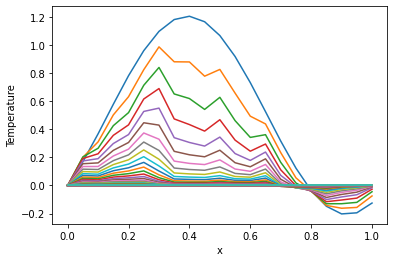

In [9]:
arr2 = np.array([[0,0.169591,0.368541,0.579171,0.782766,0.961237,1.09872,1.18301,1.20661,1.16743,1.06894,0.919894,0.733543,0.52644,0.316987,0.123797,-0.0359669,-0.148107,-0.202661,-0.194779,-0.125164],[0,0.201025,0.311087,0.503184,0.632954,0.825571,0.988213,0.881939,0.88078,0.779312,0.827434,0.65869,0.494092,0.438913,0.234521,0.0545009,-0.0392295,-0.14216,-0.162239,-0.156389,-0.0745718],[0,0.203501,0.265611,0.426448,0.519463,0.714423,0.841533,0.652616,0.619908,0.542389,0.628508,0.462519,0.342734,0.36231,0.165097,0.0179583,-0.0406203,-0.130169,-0.129937,-0.120326,-0.0444294],[0,0.192369,0.226111,0.357555,0.432163,0.616595,0.691068,0.474648,0.434373,0.387736,0.468916,0.323538,0.244555,0.295602,0.111595,-0.00122718,-0.0401557,-0.115566,-0.103451,-0.0899627,-0.0264707],[0,0.17494,0.19133,0.299023,0.363056,0.527918,0.551592,0.340929,0.306795,0.280997,0.345011,0.227729,0.178866,0.23836,0.0723989,-0.0109916,-0.0382299,-0.100284,-0.0816357,-0.0658977,-0.0157711],[0,0.155137,0.161153,0.250445,0.306571,0.447163,0.430419,0.243529,0.218944,0.204651,0.251529,0.162265,0.133431,0.190058,0.0446575,-0.0155254,-0.0353072,-0.0854399,-0.0637844,-0.0475387,-0.00939628],[0,0.135219,0.135436,0.210327,0.259093,0.374327,0.330021,0.173903,0.157551,0.149098,0.182532,0.117374,0.100979,0.149951,0.0255622,-0.0171072,-0.0318053,-0.0716705,-0.0493436,-0.0338941,-0.00559824],[0,0.116468,0.113791,0.177006,0.2184,0.309705,0.249712,0.124496,0.113952,0.108485,0.132376,0.08621,0.0771404,0.117129,0.0127674,-0.0170187,-0.0280585,-0.0593104,-0.0378123,-0.0239433,-0.00333539],[0,0.0995252,0.0956676,0.149044,0.183174,0.253427,0.187105,0.0894277,0.0826221,0.0788496,0.0962467,0.0641919,0.0592329,0.0906128,0.00445467,-0.0160066,-0.024315,-0.0484939,-0.0287223,-0.0167887,-0.0019872],[0,0.0846128,0.0804791,0.125335,0.152629,0.205299,0.139193,0.0644372,0.0599667,0.0573163,0.0703173,0.0483233,0.0455619,0.0694385,-0.000729487,-0.0145193,-0.0207463,-0.039223,-0.0216429,-0.011701,-0.00118396],[0,0.0716986,0.0676921,0.105077,0.126248,0.16482,0.103007,0.0465428,0.0435512,0.0417326,0.0516934,0.0366624,0.0350154,0.0527071,-0.00376839,-0.0128325,-0.0174605,-0.0314154,-0.0161899,-0.0081144,-0.000705395],[0,0.0606161,0.0568642,0.0877041,0.103635,0.131268,0.075932,0.0336794,0.031663,0.0304822,0.0382576,0.0279467,0.0268327,0.0396153,-0.00536489,-0.0111157,-0.0145167,-0.0249392,-0.012031,-0.00560382,-0.00042027],[0,0.0511458,0.0476489,0.0728079,0.0844348,0.103811,0.0558098,0.0244097,0.0230646,0.0223621,0.0284966,0.0213445,0.020471,0.0294666,-0.00601524,-0.00947181,-0.0119373,-0.0196382,-0.00888726,-0.00385649,-0.000250394],[0,0.0430635,0.0397828,0.060078,0.0682947,0.0815858,0.0409306,0.0177216,0.0168509,0.0164888,0.0213446,0.0162953,0.0155285,0.0216709,-0.00606591,-0.00795944,-0.00971893,-0.0153498,-0.00652965,-0.00264615,-0.000149183],[0,0.0361653,0.0330653,0.0492606,0.0548628,0.0637659,0.0299714,0.0128935,0.012359,0.0122228,0.0160567,0.0124113,0.0116991,0.0157375,-0.00575587,-0.00660798,-0.00784137,-0.0119168,-0.00477408,-0.0018111,-8.8882e-05],[0,0.0302768,0.0273399,0.0401326,0.0437916,0.0495948,0.021925,0.00940646,0.00910541,0.00910614,0.0121132,0.00941544,0.00874463,0.0112639,-0.00524741,-0.00542733,-0.00627423,-0.0091941,-0.00347508,-0.00123689,-5.29553e-05],[0,0.0252525,0.0224796,0.0324902,0.0347482,0.0384061,0.0160322,0.00688559,0.00674028,0.00681352,0.00914996,0.00710447,0.0064775,0.00792452,-0.00464848,-0.00441478,-0.00498214,-0.00705296,-0.00251937,-0.00084317,-3.15504e-05],[0,0.0209726,0.018376,0.0261429,0.0274224,0.0296275,0.0117251,0.00505979,0.00501247,0.00511493,0.00690989,0.00532529,0.00474879,0.00545851,-0.00402874,-0.00355978,-0.00392844,-0.00538196,-0.00181981,-0.000573857,-1.87975e-05],[0,0.0173368,0.0149336,0.0209133,0.0215331,0.022778,0.00858132,0.00373357,0.00374274,0.00384777,0.00520927,0.00396044,0.00344009,0.00365909,-0.0034312,-0.00284745,-0.00307753,-0.00408687,-0.0013101,-0.000390024,-1.11994e-05],[0,0.0142603,0.012066,0.016638,0.0168315,0.0174599,0.00628838,0.00276642,0.00280366,0.00289672,0.00391502,0.00291854,0.0024573,0.00236379,-0.00288047,-0.00226094,-0.00239647,-0.00308946,-0.000940272,-0.000264762,-6.67253e-06],[0,0.0116696,0.0096942,0.0131686,0.0131019,0.0133485,0.00461603,0.00205771,0.00210475,0.00217944,0.00292932,0.00212793,0.00172584,0.00144608,-0.00238877,-0.00178307,-0.00185573,-0.00232572,-0.00067295,-0.000179542,-3.97545e-06],[0,0.0094998,0.00774662,0.0103726,0.0101603,0.0101822,0.00339544,0.00153558,0.00158159,0.0016366,0.00217927,0.0015322,0.00118691,0.000808264,-0.00196016,-0.00139738,-0.00142955,-0.00174399,-0.000480386,-0.000121641,-2.36854e-06],[0,0.00769334,0.00615856,0.0081339,0.00785233,0.0077518,0.00250331,0.00114877,0.00118812,0.00122499,0.00160984,0.0010869,0.000794338,0.000375571,-0.00159353,-0.00108872,-0.00109592,-0.00130306,-0.000342109,-8.23471e-05,-1.41116e-06],[0,0.00619858,0.00487233,0.0063522,0.00605002,0.00589167,0.00184991,0.000860681,0.000891128,0.000912752,0.00117911,0.000757056,0.000512138,9.12797e-05,-0.00128475,-0.000843632,-0.000836359,-0.00097033,-0.0002431,-5.57075e-05,-8.40759e-07],[0,0.00496945,0.00383723,0.00494205,0.00464858,0.00447155,0.00137011,0.000645089,0.000666469,0.000676129,0.000854858,0.000515248,0.000312429,-8.72296e-05,-0.00102806,-0.000650401,-0.000635577,-0.000720295,-0.000172395,-3.76629e-05,-5.00918e-07],[0,0.00396497,0.00300922,0.00383167,0.003563,0.00338965,0.00101673,0.000483126,0.00049639,0.000497233,0.000612226,0.000340082,0.000173768,-0.000191661,-0.000817063,-0.000499052,-0.000481085,-0.00053312,-0.000122024,-2.54496e-05,-2.98444e-07],[0,0.00314904,0.00235059,0.00296141,0.00272497,0.00256688,0.000755647,0.000361114,0.000367707,0.00036247,0.000431964,0.000214953,7.97904e-05,-0.000245339,-0.000645318,-0.000381221,-0.000362794,-0.000393499,-8.62196e-05,-1.71887e-05,-1.77811e-07],[0,0.00249012,0.00182944,0.00228226,0.00208001,0.0019421,0.000562137,0.000269052,0.000270531,0.000261442,0.000299165,0.000127056,1.81114e-05,-0.000265213,-0.00050674,-0.000289998,-0.000272634,-0.000289696,-6.08219e-05,-1.16045e-05,-1.05938e-07],[0,0.00196097,0.00141907,0.0017543,0.00158497,0.00146824,0.00041829,0.000199569,0.000197381,0.000186159,0.000202294,6.6584e-05,-2.05615e-05,-0.000263429,-0.000395798,-0.00021974,-0.000204208,-0.000212759,-4.28406e-05,-7.83162e-06,-6.31173e-08],[0,0.00153829,0.00109737,0.00134532,0.00120591,0.00110919,0.000311087,0.000147177,0.00014256,0.000130467,0.00013245,2.60824e-05,-4.31321e-05,-0.000248546,-0.00030761,-0.000165891,-0.000152483,-0.000155899,-3.01325e-05,-5.28369e-06,-3.76048e-08],[0,0.00120234,0.000846213,0.00102951,0.000916248,0.000837349,0.000231036,0.000107759,0.000101705,8.96208e-05,8.27871e-05,-6.72144e-08,-5.46751e-05,-0.00022648,-0.000237962,-0.000124804,-0.000113527,-0.00011399,-2.11661e-05,-3.5637e-06,-2.24047e-08],[0,0.000936577,0.000650871,0.000786341,0.000695308,0.000631674,0.000171183,7.82031e-05,7.14654e-05,5.99676e-05,4.80698e-05,-1.60623e-05,-5.88761e-05,-0.00020121,-0.000183284,-9.35866e-05,-8.42911e-05,-8.31785e-05,-1.48493e-05,-2.40301e-06,-1.33486e-08],[0,0.000727263,0.000499458,0.000599579,0.000527049,0.000476144,0.00012641,5.6145e-05,4.92668e-05,3.87003e-05,2.43133e-05,-2.50078e-05,-5.83752e-05,-0.000175331,-0.000140593,-6.99611e-05,-6.24212e-05,-6.05794e-05,-1.04055e-05,-1.62e-06,-7.95297e-09],[0,0.000563082,0.000382458,0.000456465,0.000399085,0.000358592,9.29307e-05,3.97785e-05,3.31291e-05,2.36697e-05,8.5061e-06,-2.91749e-05,-5.50327e-05,-0.00015045,-0.000107432,-5.21472e-05,-4.61118e-05,-4.40407e-05,-7.28364e-06,-1.09192e-06,-4.73833e-09],[0,0.000434791,0.000292304,0.000347019,0.000301881,0.000269788,6.79297e-05,2.77215e-05,2.15335e-05,1.32382e-05,-1.61086e-06,-3.02046e-05,-5.01338e-05,-0.000127489,-8.17944e-05,-3.87621e-05,-3.39842e-05,-3.19625e-05,-5.09313e-06,-7.35857e-07,-2.82306e-09],[0,0.000334896,0.000223012,0.00026347,0.000228121,0.000202737,4.93027e-05,1.89153e-05,1.3318e-05,6.16459e-06,-7.71827e-06,-2.92649e-05,-4.45444e-05,-0.000106906,-6.20616e-05,-2.87374e-05,-2.49909e-05,-2.31592e-05,-3.55795e-06,-4.95826e-07,-1.68196e-09],[0,0.000257361,0.000169874,0.000199791,0.000172204,0.00015214,3.54706e-05,1.25493e-05,7.59761e-06,1.51452e-06,-1.10546e-05,-2.7173e-05,-3.8828e-05,-8.88497e-05,-4.69366e-05,-2.12526e-05,-1.83389e-05,-1.67548e-05,-2.48323e-06,-3.34047e-07,-1.0021e-09],[0,0.000197361,0.000129207,0.000151325,0.00012985,0.000113986,2.52441e-05,8.00419e-06,3.70148e-06,-1.41029e-06,-1.25227e-05,-2.44882e-05,-3.33345e-05,-7.32772e-05,-3.53886e-05,-1.56803e-05,-1.34306e-05,-1.21038e-05,-1.73164e-06,-2.25027e-07,-5.97044e-10],[0,0.000151055,9.81409e-05,0.000114484,9.77972e-05,8.52401e-05,1.77253e-05,4.80793e-06,1.12444e-06,-3.12726e-06,-1.27725e-05,-2.15828e-05,-2.82648e-05,-6.00292e-05,-2.66039e-05,-1.15433e-05,-9.81741e-06,-8.73176e-06,-1.20654e-06,-1.51571e-07,-3.55714e-10],[0,0.000115406,7.44479e-05,8.6512e-05,7.35599e-05,6.36047e-05,1.22349e-05,2.60253e-06,-5.11343e-07,-4.01607e-06,-1.22651e-05,-1.86953e-05,-2.37184e-05,-4.88853e-05,-1.99443e-05,-8.47979e-06,-7.16329e-06,-6.29084e-06,-8.40025e-07,-1.02084e-07,-2.11932e-10],[0,8.80227e-05,5.64044e-05,6.52966e-05,5.52486e-05,4.73413e-05,8.25925e-06,1.1178e-06,-1.48612e-06,-4.35227e-06,-1.13221e-05,-1.59699e-05,-1.97281e-05,-3.96005e-05,-1.49124e-05,-6.21675e-06,-5.21773e-06,-4.52658e-06,-5.84415e-07,-6.87489e-08,-1.26268e-10],[0,6.70323e-05,4.26816e-05,4.92219e-05,4.14274e-05,3.51343e-05,5.40949e-06,1.51094e-07,-2.00586e-06,-4.33325e-06,-1.01623e-05,-1.34856e-05,-1.62842e-05,-3.19274e-05,-1.1122e-05,-4.54893e-06,-3.79436e-06,-3.25321e-06,-4.06301e-07,-4.62958e-08,-7.52294e-11],[0,5.0972e-05,3.22577e-05,3.70544e-05,3.10061e-05,2.59881e-05,3.39213e-06,-4.48465e-07,-2.22032e-06,-4.09823e-06,-8.9308e-06,-1.12778e-05,-1.3352e-05,-2.56313e-05,-8.2751e-06,-3.32247e-06,-2.75497e-06,-2.33538e-06,-2.82284e-07,-3.11738e-08,-4.48211e-11],[0,3.8705e-05,2.43486e-05,2.78536e-05,2.31576e-05,1.91494e-05,1.98605e-06,-7.92292e-07,-2.23702e-06,-3.74355e-06,-7.71974e-06,-9.35342e-06,-1.08833e-05,-2.0497e-05,-6.14287e-06,-2.42246e-06,-1.99732e-06,-1.67467e-06,-1.95997e-07,-2.099e-08,-2.67041e-11],[0,2.93498e-05,1.83543e-05,2.09034e-05,1.72545e-05,1.40484e-05,1.02524e-06,-9.61854e-07,-2.13201e-06,-3.3343e-06,-6.5842e-06,-7.7016e-06,-8.82458e-06,-1.63334e-05,-4.55008e-06,-1.76331e-06,-1.44597e-06,-1.19964e-06,-1.36004e-07,-1.41324e-08,-1.59101e-11],[0,2.22256e-05,1.38161e-05,1.56591e-05,1.28214e-05,1.02542e-05,3.85689e-07,-1.01606e-06,-1.95813e-06,-2.91304e-06,-5.55372e-06,-6.30139e-06,-7.12155e-06,-1.29735e-05,-3.36325e-06,-1.28148e-06,-1.04539e-06,-8.58492e-07,-9.43206e-08,-9.51476e-09,-9.47913e-12],[0,1.68078e-05,1.0384e-05,1.17068e-05,9.49798e-06,7.44106e-06,-2.47935e-08,-9.96936e-07,-1.75124e-06,-2.50634e-06,-4.64076e-06,-5.12683e-06,-5.72272e-06,-1.02741e-05,-2.48102e-06,-9.29907e-07,-7.54795e-07,-6.13776e-07,-6.53768e-08,-6.40566e-09,-5.6476e-12],[0,1.26928e-05,7.79126e-06,8.73214e-06,7.01145e-06,5.36294e-06,-2.74252e-07,-9.34001e-07,-1.53495e-06,-2.12965e-06,-3.84674e-06,-4.15027e-06,-4.58086e-06,-8.11419e-06,-1.82672e-06,-6.73808e-07,-5.44302e-07,-4.38416e-07,-4.52912e-08,-4.31236e-09,-3.3648e-12],[0,9.57137e-06,5.83501e-06,6.49671e-06,5.15529e-06,3.83431e-06,-4.12527e-07,-8.47571e-07,-1.32415e-06,-1.79078e-06,-3.16626e-06,-3.34454e-06,-3.65389e-06,-6.39215e-06,-1.34251e-06,-4.87564e-07,-3.92041e-07,-3.12884e-07,-3.13608e-08,-2.90304e-09,-2.00472e-12],[0,7.20643e-06,4.36087e-06,4.81962e-06,3.77326e-06,2.7153e-06,-4.75789e-07,-7.51278e-07,-1.12764e-06,-1.49253e-06,-2.59008e-06,-2.6842e-06,-2.90507e-06,-5.02381e-06,-9.84913e-07,-3.5233e-07,-2.82049e-07,-2.23108e-07,-2.17047e-08,-1.95424e-09,-1.1944e-12],[0,5.41687e-06,3.2516e-06,3.56381e-06,2.7473e-06,1.90074e-06,-4.89994e-07,-6.53956e-07,-9.50025e-07,-1.23444e-06,-2.10714e-06,-2.1462e-06,-2.30284e-06,-3.93982e-06,-7.21352e-07,-2.54283e-07,-2.02694e-07,-1.58964e-07,-1.50149e-08,-1.31551e-09,-7.11615e-13],[0,4.06442e-06,2.41819e-06,2.62548e-06,1.98823e-06,1.31162e-06,-4.73526e-07,-5.61048e-07,-7.93117e-07,-1.01416e-06,-1.70582e-06,-1.71018e-06,-1.82045e-06,-3.0835e-06,-5.27466e-07,-1.83297e-07,-1.45513e-07,-1.13174e-07,-1.03824e-08,-8.85526e-10,-4.23975e-13],[0,3.04368e-06,1.79313e-06,1.92608e-06,1.42875e-06,8.88784e-07,-4.39192e-07,-4.75641e-07,-6.56942e-07,-8.28261e-07,-1.37482e-06,-1.35848e-06,-1.43545e-06,-2.40878e-06,-3.85094e-07,-1.31974e-07,-1.04357e-07,-8.0514e-08,-7.17622e-09,-5.96073e-10,-2.52602e-13],[0,2.27437e-06,1.32525e-06,1.40621e-06,1.0182e-06,5.88001e-07,-3.95733e-07,-3.99224e-07,-5.40427e-07,-6.72872e-07,-1.10359e-06,-1.07599e-06,-1.12921e-06,-1.87841e-06,-2.80732e-07,-9.49144e-08,-7.47682e-08,-5.72382e-08,-4.95811e-09,-4.01228e-10,-1.50498e-13],[0,1.69546e-06,9.75804e-07,1.02099e-06,7.1843e-07,3.76335e-07,-3.48953e-07,-3.32235e-07,-4.41895e-07,-5.44046e-07,-8.82611e-07,-8.49973e-07,-8.86368e-07,-1.46244e-06,-2.04358e-07,-6.81884e-08,-5.3519e-08,-4.06633e-08,-3.42428e-09,-2.7007e-10,-8.96657e-14],[0,1.26055e-06,7.15453e-07,7.36553e-07,5.00811e-07,2.29335e-07,-3.02562e-07,-2.74447e-07,-3.59385e-07,-4.38e-07,-7.0351e-07,-6.69776e-07,-6.94333e-07,-1.13685e-06,-1.48557e-07,-4.89373e-08,-3.82744e-08,-2.8869e-08,-2.36407e-09,-1.81784e-10,-5.34222e-14],[0,9.34425e-07,5.22026e-07,5.27383e-07,3.43883e-07,1.2892e-07,-2.58801e-07,-2.25243e-07,-2.90871e-07,-3.5125e-07,-5.5902e-07,-5.26573e-07,-5.42874e-07,-8.82488e-07,-1.0785e-07,-3.50864e-08,-2.73485e-08,-2.04826e-08,-1.63154e-09,-1.22357e-10,-3.18286e-14],[0,6.90369e-07,3.78773e-07,3.74269e-07,2.31606e-07,6.17808e-08,-2.18901e-07,-1.838e-07,-2.34392e-07,-2.80679e-07,-4.42939e-07,-4.13107e-07,-4.23703e-07,-6.84129e-07,-7.81968e-08,-2.51318e-08,-1.95253e-08,-1.45235e-08,-1.1256e-09,-8.23569e-11,-1.89632e-14],[0,5.08146e-07,2.73059e-07,2.62779e-07,1.52021e-07,1.81735e-08,-1.83408e-07,-1.49214e-07,-1.88131e-07,-2.23553e-07,-3.50036e-07,-3.23447e-07,-3.30146e-07,-5.29696e-07,-5.6627e-08,-1.7985e-08,-1.39288e-08,-1.02921e-08,-7.76298e-10,-5.54327e-11,-1.12982e-14],[0,3.72434e-07,1.95364e-07,1.8209e-07,9.62387e-08,-8.99575e-09,-1.52427e-07,-1.20576e-07,-1.50454e-07,-1.77519e-07,-2.75942e-07,-2.52779e-07,-2.5685e-07,-4.09647e-07,-4.09584e-08,-1.28592e-08,-9.9287e-09,-7.2893e-09,-5.35221e-10,-3.73103e-11,-6.73137e-15],[0,2.71648e-07,1.38527e-07,1.24107e-07,5.76784e-08,-2.48549e-08,-1.25788e-07,-9.70261e-08,-1.19923e-07,-1.40572e-07,-2.17038e-07,-1.9721e-07,-1.99538e-07,-3.16459e-07,-2.95914e-08,-9.18642e-09,-7.07211e-09,-5.15976e-09,-3.68897e-10,-2.51124e-11,-4.0105e-15],[0,1.97038e-07,9.71673e-08,8.27869e-08,3.14857e-08,-3.30813e-08,-1.03161e-07,-7.77785e-08,-9.52958e-08,-1.11028e-07,-1.70346e-07,-1.53608e-07,-1.54805e-07,-2.44221e-07,-2.13554e-08,-6.55729e-09,-5.03378e-09,-3.65042e-09,-2.54184e-10,-1.69023e-11,-2.38943e-15],[0,1.42005e-07,6.72556e-08,5.36338e-08,1.40972e-08,-3.6287e-08,-8.41386e-08,-6.21315e-08,-7.55122e-08,-8.74836e-08,-1.33435e-07,-1.19465e-07,-1.19948e-07,-1.88291e-07,-1.53953e-08,-4.67691e-09,-3.58045e-09,-2.58127e-09,-1.75092e-10,-1.13763e-11,-1.4236e-15],[0,1.01575e-07,4.57772e-08,3.33134e-08,2.91066e-09,-3.63064e-08,-6.82849e-08,-4.94732e-08,-5.96794e-08,-6.87788e-08,-1.04329e-07,-9.27798e-08,-9.28287e-08,-1.4504e-07,-1.10872e-08,-3.33322e-09,-2.54502e-09,-1.82435e-09,-1.20577e-10,-7.65689e-12,-8.48173e-16],[0,7.20118e-08,3.0484e-08,1.9362e-08,-3.9624e-09,-3.441e-08,-5.51713e-08,-3.92773e-08,-4.70519e-08,-5.39611e-08,-8.14313e-08,-7.19598e-08,-7.17609e-08,-1.1163e-07,-7.97671e-09,-2.37383e-09,-1.80786e-09,-1.28877e-09,-8.30135e-11,-5.15351e-12,-5.05335e-16],[0,5.05079e-08,1.97039e-08,9.96706e-09,-7.88301e-09,-3.14622e-08,-4.43957e-08,-3.10974e-08,-3.70125e-08,-4.22537e-08,-6.34565e-08,-5.57424e-08,-5.54165e-08,-8.58479e-08,-5.73336e-09,-1.68939e-09,-1.28341e-09,-9.10004e-10,-5.71373e-11,-3.46858e-12,-3.01075e-16],[0,3.49616e-08,1.2198e-08,3.80146e-09,-9.82393e-09,-2.8038e-08,-3.55926e-08,-2.45586e-08,-2.9054e-08,-3.30266e-08,-4.93745e-08,-4.31295e-08,-4.27527e-08,-6.59715e-08,-4.11711e-09,-1.20146e-09,-9.10558e-10,-6.42266e-10,-3.93172e-11,-2.33453e-12,-1.79378e-16],[0,2.38019e-08,7.05111e-09,-1.01046e-10,-1.04736e-08,-2.45079e-08,-2.84383e-08,-1.9349e-08,-2.27619e-08,-2.57706e-08,-3.8363e-08,-3.3334e-08,-3.29524e-08,-5.0662e-08,-2.95383e-09,-8.53897e-10,-6.45647e-10,-4.53105e-10,-2.70483e-11,-1.57125e-12,-1.06872e-16],[0,1.58577e-08,3.59055e-09,-2.43944e-09,-1.03135e-08,-2.11002e-08,-2.26511e-08,-1.52111e-08,-1.77998e-08,-2.00769e-08,-2.97676e-08,-2.57368e-08,-2.53767e-08,-3.88798e-08,-2.1174e-09,-6.0649e-10,-4.5755e-10,-3.19522e-10,-1.86036e-11,-1.05752e-12,-6.36738e-17],[0,1.02587e-08,1.3241e-09,-3.71564e-09,-9.67552e-09,-1.79454e-08,-1.79895e-08,-1.19335e-08,-1.38955e-08,-1.56179e-08,-2.30691e-08,-1.98518e-08,-1.95267e-08,-2.98196e-08,-1.51655e-09,-4.30501e-10,-3.24075e-10,-2.2523e-10,-1.27925e-11,-7.11761e-13,-3.79364e-17],[0,6.36041e-09,-1.06372e-10,-4.28686e-09,-8.78408e-09,-1.51086e-08,-1.42491e-08,-9.34431e-09,-1.08301e-08,-1.21323e-08,-1.7857e-08,-1.52986e-08,-1.50138e-08,-2.28576e-08,-1.08532e-09,-3.05398e-10,-2.29415e-10,-1.58701e-10,-8.79464e-12,-4.79046e-13,-2.26022e-17],[0,3.68697e-09,-9.5975e-10,-4.40471e-09,-7.78736e-09,-1.26123e-08,-1.12584e-08,-7.30376e-09,-8.42826e-09,-9.4122e-09,-1.38072e-08,-1.17797e-08,-1.15356e-08,-1.75116e-08,-7.76095e-10,-2.16525e-10,-1.62322e-10,-1.11781e-10,-6.0449e-12,-3.22418e-13,-1.34663e-17],[0,1.88885e-09,-1.42177e-09,-4.2441e-09,-6.77988e-09,-1.04517e-08,-8.87478e-09,-5.69924e-09,-6.54977e-09,-7.29298e-09,-1.06648e-08,-9.06294e-09,-8.85726e-09,-1.34092e-08,-5.54554e-10,-1.53429e-10,-1.14794e-10,-7.87038e-11,-4.15404e-12,-2.17001e-13,-8.0231e-18],[0,7.10415e-10,-1.62453e-09,-3.92476e-09,-5.81899e-09,-8.60642e-09,-6.98072e-09,-4.44021e-09,-5.08318e-09,-5.64437e-09,-8.22954e-09,-6.96749e-09,-6.79646e-09,-1.0263e-08,-3.95961e-10,-1.08661e-10,-8.11432e-11,-5.53946e-11,-2.85407e-12,-1.4605e-13,-4.78011e-18],[0,-3.42234e-11,-1.66095e-09,-3.52689e-09,-4.93663e-09,-7.0475e-09,-5.4798e-09,-3.4542e-09,-3.94005e-09,-4.36368e-09,-6.34452e-09,-5.35275e-09,-5.21204e-09,-7.8515e-09,-2.82521e-10,-7.69152e-11,-5.73302e-11,-3.89752e-11,-1.96054e-12,-9.82974e-14,-2.84795e-18],[0,-4.7939e-10,-1.59559e-09,-3.10283e-09,-4.14786e-09,-5.74246e-09,-4.29346e-09,-2.68343e-09,-3.0504e-09,-3.37011e-09,-4.88706e-09,-4.1095e-09,-3.99476e-09,-6.00416e-09,-2.01441e-10,-5.44166e-11,-4.04874e-11,-2.74134e-11,-1.3465e-12,-6.6158e-14,-1.69679e-18],[0,-7.21423e-10,-1.47256e-09,-2.68534e-09,-3.45677e-09,-4.65841e-09,-3.35799e-09,-2.08193e-09,-2.35902e-09,-2.60027e-09,-3.76135e-09,-3.15304e-09,-3.06018e-09,-4.58969e-09,-1.43534e-10,-3.84802e-11,-2.85803e-11,-1.9275e-11,-9.24602e-13,-4.45268e-14,-1.01094e-18],[0,-8.28815e-10,-1.32138e-09,-2.29377e-09,-2.86067e-09,-3.76394e-09,-2.62198e-09,-1.61327e-09,-1.82245e-09,-2.00446e-09,-2.89272e-09,-2.41778e-09,-2.34309e-09,-3.50717e-09,-1.02206e-10,-2.71981e-11,-2.01665e-11,-1.35484e-11,-6.34786e-13,-2.99682e-14,-6.02308e-19],[0,-8.4975e-10,-1.16125e-09,-1.93836e-09,-2.35293e-09,-3.03023e-09,-2.04408e-09,-1.24868e-09,-1.40654e-09,-1.54386e-09,-2.2231e-09,-1.85295e-09,-1.79321e-09,-2.67906e-09,-7.2732e-11,-1.92149e-11,-1.42238e-11,-9.52025e-12,-4.35738e-13,-2.01697e-14,-3.58851e-19],[0,-8.17692e-10,-1.00417e-09,-1.62335e-09,-1.92491e-09,-2.43149e-09,-1.59121e-09,-9.65431e-10,-1.08455e-09,-1.18814e-09,-1.70732e-09,-1.41934e-09,-1.37178e-09,-2.04583e-09,-5.17259e-11,-1.3569e-11,-1.00283e-11,-6.68772e-12,-2.99054e-13,-1.35749e-14,-2.13801e-19],[0,-7.55516e-10,-8.57185e-10,-1.34915e-09,-1.56722e-09,-1.94515e-09,-1.23696e-09,-7.45673e-10,-8.3555e-10,-9.13689e-10,-1.31038e-09,-1.08668e-09,-1.04897e-09,-1.56181e-09,-3.67648e-11,-9.5778e-12,-7.0676e-12,-4.69657e-12,-2.05213e-13,-9.13642e-15,-1.27381e-19],[0,-6.78532e-10,-7.23989e-10,-1.11386e-09,-1.27054e-09,-1.55176e-09,-9.60328e-10,-5.75384e-10,-6.43189e-10,-7.02136e-10,-1.00512e-09,-8.316e-10,-8.01818e-10,-1.19197e-09,-2.6116e-11,-6.75776e-12,-4.97913e-12,-3.29731e-12,-1.40796e-13,-6.14913e-15,-7.58927e-20],[0,-5.96711e-10,-6.06074e-10,-9.14288e-10,-1.02603e-09,-1.23473e-09,-7.44644e-10,-4.43583e-10,-4.94734e-10,-5.39204e-10,-7.70543e-10,-6.36127e-10,-6.1268e-10,-9.09474e-10,-1.85411e-11,-4.7661e-12,-3.50653e-12,-2.3143e-12,-9.65847e-14,-4.13858e-15,-4.52163e-20],[0,-5.16289e-10,-5.0353e-10,-7.46638e-10,-8.25664e-10,-9.80129e-10,-5.76733e-10,-3.41681e-10,-3.80268e-10,-4.1382e-10,-5.90398e-10,-4.86406e-10,-4.68e-10,-6.93759e-10,-1.31562e-11,-3.3601e-12,-2.46858e-12,-1.62392e-12,-6.62463e-14,-2.78541e-15,-2.69396e-20],[0,-4.40937e-10,-4.15599e-10,-6.06948e-10,-6.6229e-10,-7.76293e-10,-4.46196e-10,-2.62977e-10,-2.92087e-10,-3.17404e-10,-4.52144e-10,-3.71784e-10,-3.57374e-10,-5.29089e-10,-9.33027e-12,-2.36796e-12,-1.73727e-12,-1.13918e-12,-4.54309e-14,-1.87468e-15,-1.60504e-20],[0,-3.72588e-10,-3.41058e-10,-4.91368e-10,-5.29676e-10,-6.13573e-10,-3.4485e-10,-2.02249e-10,-2.24211e-10,-2.43316e-10,-3.46103e-10,-2.84073e-10,-2.72818e-10,-4.03418e-10,-6.61355e-12,-1.66815e-12,-1.2222e-12,-7.9894e-13,-3.11515e-14,-1.26172e-15,-9.56272e-21],[0,-3.12035e-10,-2.78468e-10,-3.9632e-10,-4.22463e-10,-4.84018e-10,-2.66264e-10,-1.55434e-10,-1.72005e-10,-1.86424e-10,-2.64816e-10,-2.16982e-10,-2.08211e-10,-3.07537e-10,-4.68552e-12,-1.17473e-12,-8.59561e-13,-5.6018e-13,-2.13573e-14,-8.49182e-16,-5.6974e-21],[0,-2.59342e-10,-2.26335e-10,-3.18576e-10,-3.36102e-10,-3.81123e-10,-2.05398e-10,-1.19376e-10,-1.31879e-10,-1.42764e-10,-2.02537e-10,-1.65686e-10,-1.58863e-10,-2.344e-10,-3.31796e-12,-8.26968e-13,-6.0433e-13,-3.92678e-13,-1.46405e-14,-5.71528e-16,-3.39447e-21],[0,-2.14134e-10,-1.83213e-10,-2.55289e-10,-2.6677e-10,-2.99588e-10,-1.58309e-10,-9.16244e-11,-1.0106e-10,-1.09279e-10,-1.54845e-10,-1.2648e-10,-1.21182e-10,-1.78626e-10,-2.34843e-12,-5.81957e-13,-4.24754e-13,-2.75197e-13,-1.00348e-14,-3.84658e-16,-2.0224e-21],[0,-1.75793e-10,-1.4776e-10,-2.03991e-10,-2.11278e-10,-2.35117e-10,-1.21916e-10,-7.02826e-11,-7.74047e-11,-8.36109e-11,-1.1834e-10,-9.65244e-11,-9.24173e-11,-1.361e-10,-1.66144e-12,-4.09401e-13,-2.9845e-13,-1.9282e-13,-6.87706e-15,-2.58888e-16,-1.20493e-21],[0,-1.43584e-10,-1.18766e-10,-1.62572e-10,-1.66988e-10,-1.8424e-10,-9.38164e-11,-5.38818e-11,-5.92583e-11,-6.39458e-11,-9.04098e-11,-7.36451e-11,-7.04659e-11,-1.03683e-10,-1.1749e-12,-2.87917e-13,-2.09643e-13,-1.35071e-13,-4.71242e-15,-1.7424e-16,-7.1789e-22],[0,-1.16745e-10,-9.51677e-11,-1.29246e-10,-1.31731e-10,-1.44165e-10,-7.2141e-11,-4.12864e-11,-4.53459e-11,-4.88872e-11,-6.90498e-11,-5.61755e-11,-5.37179e-11,-7.89767e-11,-8.3047e-13,-2.02418e-13,-1.47219e-13,-9.4598e-14,-3.22874e-15,-1.17269e-16,-4.27714e-22],[0,-9.4536e-11,-7.60422e-11,-1.02518e-10,-1.03732e-10,-1.12654e-10,-5.54355e-11,-3.16197e-11,-3.46853e-11,-3.73612e-11,-5.27205e-11,-4.28404e-11,-4.0943e-11,-6.01495e-11,-5.86766e-13,-1.42265e-13,-1.03355e-13,-6.62382e-14,-2.21192e-15,-7.89262e-17,-2.54829e-22],[0,-7.62696e-11,-6.06011e-11,-8.11454e-11,-8.15461e-11,-8.79181e-11,-4.25709e-11,-2.42051e-11,-2.65206e-11,-2.8543e-11,-4.02415e-11,-3.2664e-11,-3.12008e-11,-4.58049e-11,-4.14407e-13,-9.99579e-14,-7.25402e-14,-4.6371e-14,-1.51515e-15,-5.312e-17,-1.51825e-22],[0,-6.13257e-11,-4.81782e-11,-6.4101e-11,-6.40037e-11,-6.85298e-11,-3.26717e-11,-1.8521e-11,-2.02703e-11,-2.17992e-11,-3.07082e-11,-2.49001e-11,-2.37729e-11,-3.48773e-11,-2.9256e-13,-7.0212e-14,-5.08996e-14,-3.24562e-14,-1.03775e-15,-3.57515e-17,-9.04564e-23],[0,-4.9158e-11,-3.82153e-11,-5.05426e-11,-5.01598e-11,-5.33556e-11,-2.506e-11,-1.41659e-11,-1.54878e-11,-1.66438e-11,-2.34276e-11,-1.89781e-11,-1.81107e-11,-2.65538e-11,-2.06459e-13,-4.93042e-14,-3.57059e-14,-2.27125e-14,-7.10692e-16,-2.40619e-17,-5.38933e-23],[0,-3.92928e-11,-3.02487e-11,-3.97824e-11,-3.92547e-11,-4.14959e-11,-1.92112e-11,-1.08307e-11,-1.18298e-11,-1.2704e-11,-1.7869e-11,-1.44621e-11,-1.37951e-11,-2.02148e-11,-1.45642e-13,-3.46128e-14,-2.50413e-14,-1.58909e-14,-4.86657e-16,-1.61945e-17,-3.21092e-23],[0,-3.13251e-11,-2.38956e-11,-3.12614e-11,-3.06793e-11,-3.22387e-11,-1.472e-11,-8.27771e-12,-9.03298e-12,-9.69433e-12,-1.36264e-11,-1.1019e-11,-1.05066e-11,-1.53876e-11,-1.02702e-13,-2.42926e-14,-1.75578e-14,-1.11161e-14,-3.3321e-16,-1.08994e-17,-1.91305e-23],[0,-2.49124e-11,-1.88419e-11,-2.45275e-11,-2.39468e-11,-2.5022e-11,-1.12732e-11,-6.32436e-12,-6.89545e-12,-7.39583e-12,-1.03889e-11,-8.39437e-12,-8.00097e-12,-1.17122e-11,-7.23959e-14,-1.70451e-14,-1.23078e-14,-7.77457e-15,-2.28123e-16,-7.33567e-18,-1.13978e-23],[0,-1.97677e-11,-1.48312e-11,-1.92159e-11,-1.86692e-11,-1.94024e-11,-8.62966e-12,-4.8304e-12,-5.26232e-12,-5.64101e-12,-7.91917e-12,-6.39402e-12,-6.09222e-12,-8.91393e-12,-5.10149e-14,-1.19567e-14,-8.62567e-15,-5.43657e-15,-1.56162e-16,-4.93715e-18,-6.79072e-24],[0,-1.56524e-11,-1.1655e-11,-1.50337e-11,-1.45381e-11,-1.50315e-11,-6.60317e-12,-3.68825e-12,-4.01498e-12,-4.30163e-12,-6.03548e-12,-4.86972e-12,-4.63835e-12,-6.78373e-12,-3.59361e-14,-8.38534e-15,-6.04376e-15,-3.80101e-15,-1.06891e-16,-3.32286e-18,-4.04586e-24],[0,-1.23693e-11,-9.1449e-12,-1.17463e-11,-1.13089e-11,-1.16353e-11,-5.05052e-12,-2.81536e-12,-3.06258e-12,-3.27961e-12,-4.59909e-12,-3.70836e-12,-3.53109e-12,-5.16224e-12,-2.53058e-14,-5.87928e-15,-4.23377e-15,-2.65705e-15,-7.31581e-17,-2.2364e-18,-2.4105e-24],[0,-9.75672e-12,-7.1649e-12,-9.16629e-12,-8.78782e-12,-8.99908e-12,-3.86149e-12,-2.14849e-12,-2.33559e-12,-2.49994e-12,-3.50401e-12,-2.82365e-12,-2.6879e-12,-3.92808e-12,-1.78142e-14,-4.12122e-15,-2.96521e-15,-1.85708e-15,-5.00661e-17,-1.50517e-18,-1.43616e-24],[0,-7.68256e-12,-5.60583e-12,-7.14453e-12,-6.82207e-12,-6.95479e-12,-2.95134e-12,-1.63917e-12,-1.7808e-12,-1.90528e-12,-2.66929e-12,-2.14978e-12,-2.04589e-12,-2.98881e-12,-1.25365e-14,-2.88821e-15,-2.07631e-15,-1.29775e-15,-3.42598e-17,-1.01303e-18,-8.55652e-25],[0,-6.03941e-12,-4.38028e-12,-5.56245e-12,-5.29108e-12,-5.37092e-12,-2.25495e-12,-1.2503e-12,-1.35753e-12,-1.45184e-12,-2.03314e-12,-1.63657e-12,-1.5571e-12,-2.274e-12,-8.81965e-15,-2.02364e-15,-1.45359e-15,-9.0674e-16,-2.34416e-17,-6.818e-19,-5.09791e-25],[0,-4.74035e-12,-3.4184e-12,-4.32609e-12,-4.10002e-12,-4.14483e-12,-1.72234e-12,-9.5348e-13,-1.03468e-12,-1.10614e-12,-1.5484e-12,-1.24577e-12,-1.185e-12,-1.73006e-12,-6.20291e-15,-1.41757e-15,-1.01744e-15,-6.33446e-16,-1.6038e-17,-4.58874e-19,-3.0373e-25],[0,-3.71526e-12,-2.6646e-12,-3.36111e-12,-3.17437e-12,-3.19649e-12,-1.31513e-12,-7.26975e-13,-7.8848e-13,-8.42634e-13,-1.1791e-12,-9.48207e-13,-9.01761e-13,-1.31617e-12,-4.36125e-15,-9.9281e-16,-7.12014e-16,-4.42457e-16,-1.09718e-17,-3.08837e-19,-1.8096e-25],[0,-2.90782e-12,-2.0747e-12,-2.60886e-12,-2.45571e-12,-2.46354e-12,-1.00392e-12,-5.54172e-13,-6.00767e-13,-6.41815e-13,-8.97776e-13,-7.21663e-13,-6.86177e-13,-1.00125e-12,-3.06551e-15,-6.95179e-16,-4.98182e-16,-3.09008e-16,-7.50526e-18,-2.07858e-19,-1.07815e-25],[0,-2.27287e-12,-1.61367e-12,-2.0231e-12,-1.89828e-12,-1.8975e-12,-7.66156e-13,-4.22369e-13,-4.57675e-13,-4.88794e-13,-6.83506e-13,-5.49205e-13,-5.22103e-13,-7.61656e-13,-2.15413e-15,-4.86676e-16,-3.48505e-16,-2.15778e-16,-5.13356e-18,-1.39895e-19,-6.42353e-26],[0,-1.77435e-12,-1.25381e-12,-1.56749e-12,-1.4663e-12,-1.46066e-12,-5.84557e-13,-3.2186e-13,-3.48617e-13,-3.72213e-13,-5.20325e-13,-4.17931e-13,-3.97239e-13,-5.79371e-13,-1.51329e-15,-3.40641e-16,-2.43754e-16,-1.50655e-16,-3.51105e-18,-9.41539e-20,-3.82709e-26],[0,-1.38354e-12,-9.73267e-13,-1.21346e-12,-1.13183e-12,-1.12376e-12,-4.45899e-13,-2.4523e-13,-2.65512e-13,-2.83406e-13,-3.96068e-13,-3.18015e-13,-3.02222e-13,-4.40697e-13,-1.06281e-15,-2.38381e-16,-1.70458e-16,-1.05173e-16,-2.40116e-18,-6.33686e-20,-2.28015e-26],[0,-1.07759e-12,-7.54798e-13,-9.38641e-13,-8.73062e-13,-8.64102e-13,-3.40057e-13,-1.86818e-13,-2.02194e-13,-2.15766e-13,-3.01459e-13,-2.41972e-13,-2.29921e-13,-3.35204e-13,-7.46239e-16,-1.66788e-16,-1.19182e-16,-7.34114e-17,-1.64199e-18,-4.26492e-20,-1.3585e-26],[0,-8.38405e-13,-5.84855e-13,-7.25508e-13,-6.73024e-13,-6.64103e-13,-2.59286e-13,-1.42299e-13,-1.53958e-13,-1.64254e-13,-2.29431e-13,-1.84103e-13,-1.74909e-13,-2.54956e-13,-5.23828e-16,-1.16676e-16,-8.33167e-17,-5.12352e-17,-1.12276e-18,-2.87043e-20,-8.09385e-27],[0,-6.51642e-13,-4.52795e-13,-5.60361e-13,-5.185e-13,-5.10146e-13,-1.97662e-13,-1.08376e-13,-1.17218e-13,-1.25029e-13,-1.74601e-13,-1.40066e-13,-1.33054e-13,-1.93914e-13,-3.67614e-16,-8.1605e-17,-5.82347e-17,-3.57534e-17,-7.67666e-19,-1.93189e-20,-4.82226e-27],[0,-5.05991e-13,-3.50274e-13,-4.32506e-13,-3.99219e-13,-3.91698e-13,-1.50657e-13,-8.25296e-14,-8.9236e-14,-9.51632e-14,-1.32866e-13,-1.06557e-13,-1.01211e-13,-1.47483e-13,-2.57922e-16,-5.70661e-17,-4.06971e-17,-2.49468e-17,-5.24838e-19,-1.30023e-20,-2.87307e-27],[0,-3.92531e-13,-2.70759e-13,-3.336e-13,-3.07207e-13,-3.00618e-13,-1.14811e-13,-6.28405e-14,-6.79279e-14,-7.2426e-14,-1.011e-13,-8.10619e-14,-7.69865e-14,-1.12167e-13,-1.80919e-16,-3.98994e-17,-2.84366e-17,-1.74044e-17,-3.58795e-19,-8.75094e-21,-1.71175e-27],[0,-3.04244e-13,-2.09141e-13,-2.57149e-13,-2.36274e-13,-2.30618e-13,-8.74805e-14,-4.78437e-14,-5.17035e-14,-5.51174e-14,-7.69244e-14,-6.16641e-14,-5.8558e-14,-8.53058e-14,-1.26876e-16,-2.78921e-17,-1.98667e-17,-1.21409e-17,-2.45266e-19,-5.88967e-21,-1.01985e-27],[0,-2.35615e-13,-1.61434e-13,-1.98098e-13,-1.81627e-13,-1.76846e-13,-6.66459e-14,-3.64223e-14,-3.93511e-14,-4.19425e-14,-5.85268e-14,-4.69063e-14,-4.45394e-14,-6.48759e-14,-8.89557e-17,-1.94952e-17,-1.38775e-17,-8.46823e-18,-1.67648e-19,-3.96394e-21,-6.07619e-28],[0,-1.8232e-13,-1.24526e-13,-1.52518e-13,-1.3955e-13,-1.35559e-13,-5.07664e-14,-2.7725e-14,-2.99476e-14,-3.19148e-14,-4.4527e-14,-3.56792e-14,-3.38758e-14,-4.93378e-14,-6.23554e-17,-1.3624e-17,-9.69241e-18,-5.9059e-18,-1.14586e-19,-2.66786e-21,-3.62015e-28],[0,-1.40972e-13,-9.59953e-14,-1.1736e-13,-1.07171e-13,-1.03873e-13,-3.86655e-14,-2.11027e-14,-2.27897e-14,-2.42832e-14,-3.38744e-14,-2.71385e-14,-2.57647e-14,-3.75205e-14,-4.36999e-17,-9.51949e-18,-6.76849e-18,-4.11843e-18,-7.83132e-20,-1.79556e-21,-2.15686e-28],[0,-1.08921e-13,-7.39562e-14,-9.02591e-14,-8.22673e-14,-7.95645e-14,-2.94455e-14,-1.6061e-14,-1.73415e-14,-1.84755e-14,-2.57693e-14,-2.06416e-14,-1.95952e-14,-2.85332e-14,-3.06193e-17,-6.65056e-18,-4.72598e-18,-2.87164e-18,-5.35193e-20,-1.20847e-21,-1.28504e-28],[0,-8.40976e-14,-5.69438e-14,-6.93809e-14,-6.31236e-14,-6.09242e-14,-2.24216e-14,-1.22229e-14,-1.3195e-14,-1.40561e-14,-1.96027e-14,-1.56996e-14,-1.49027e-14,-2.16984e-14,-2.14497e-17,-4.64556e-18,-3.29939e-18,-2.00209e-18,-3.65728e-20,-8.13339e-22,-7.65619e-29],[0,-6.4888e-14,-4.38204e-14,-5.33061e-14,-4.84148e-14,-4.66358e-14,-1.70713e-14,-9.30139e-15,-1.00394e-14,-1.06934e-14,-1.49112e-14,-1.19405e-14,-1.13337e-14,-1.65005e-14,-1.50231e-17,-3.24456e-18,-2.30313e-18,-1.3957e-18,-2.49907e-20,-5.47404e-22,-4.56151e-29],[0,-5.00341e-14,-3.37035e-14,-4.09366e-14,-3.71188e-14,-3.56874e-14,-1.29965e-14,-7.07773e-15,-7.63809e-15,-8.13476e-15,-1.13421e-14,-9.08127e-15,-8.61923e-15,-1.25476e-14,-1.05199e-17,-2.26575e-18,-1.60748e-18,-9.7287e-19,-1.70755e-20,-3.68421e-22,-2.71771e-29],[0,-3.85568e-14,-2.5909e-14,-3.14235e-14,-2.84477e-14,-2.73012e-14,-9.89339e-15,-5.38535e-15,-5.81087e-15,-6.18811e-15,-8.62705e-15,-6.90655e-15,-6.55479e-15,-9.54159e-15,-7.36511e-18,-1.58201e-18,-1.12181e-18,-6.78072e-19,-1.16665e-20,-2.47959e-22,-1.61919e-29],[0,-2.96948e-14,-1.99075e-14,-2.41107e-14,-2.17943e-14,-2.08798e-14,-7.53056e-15,-4.09742e-15,-4.42057e-15,-4.70712e-15,-6.56172e-15,-5.25251e-15,-4.98474e-15,-7.25564e-15,-5.15545e-18,-1.10445e-18,-7.8278e-19,-4.72558e-19,-7.97045e-21,-1.66885e-22,-9.64704e-30],[0,-2.28568e-14,-1.5289e-14,-1.84923e-14,-1.66913e-14,-1.59644e-14,-5.73159e-15,-3.11735e-15,-3.36278e-15,-3.58045e-15,-4.9907e-15,-3.99452e-15,-3.7907e-15,-5.5173e-15,-3.60806e-18,-7.70952e-19,-5.46144e-19,-3.29301e-19,-5.44503e-21,-1.12319e-22,-5.74764e-30],[0,-1.75839e-14,-1.17367e-14,-1.41775e-14,-1.2779e-14,-1.2203e-14,-4.36205e-15,-2.37159e-15,-2.558e-15,-2.72337e-15,-3.79572e-15,-3.03777e-15,-2.88264e-15,-4.1954e-15,-2.52466e-18,-5.38087e-19,-3.80999e-19,-2.29452e-19,-3.71957e-21,-7.55942e-23,-3.4244e-30],[0,-1.35205e-14,-9.00596e-15,-1.08655e-14,-9.78056e-15,-9.32552e-15,-3.31953e-15,-1.80416e-15,-1.94576e-15,-2.07139e-15,-2.8868e-15,-2.31013e-15,-2.19208e-15,-3.19019e-15,-1.76626e-18,-3.75511e-19,-2.6576e-19,-1.59864e-19,-2.54075e-21,-5.08773e-23,-2.04023e-30],[0,-1.0391e-14,-6.90773e-15,-8.32418e-15,-7.48344e-15,-7.12488e-15,-2.52601e-15,-1.37244e-15,-1.48e-15,-1.57545e-15,-2.19549e-15,-1.75677e-15,-1.66693e-15,-2.4258e-15,-1.23547e-18,-2.62023e-19,-1.85356e-19,-1.1137e-19,-1.73543e-21,-3.42421e-23,-1.21556e-30],[0,-7.98201e-15,-5.29627e-15,-6.37509e-15,-5.72419e-15,-5.44232e-15,-1.92206e-15,-1.04399e-15,-1.1257e-15,-1.19823e-15,-1.66969e-15,-1.33593e-15,-1.26757e-15,-1.84456e-15,-8.64049e-19,-1.82812e-19,-1.29264e-19,-7.75804e-20,-1.1853e-21,-2.30461e-23,-7.2422e-31],[0,-6.12876e-15,-4.05922e-15,-4.88077e-15,-4.37731e-15,-4.1562e-15,-1.46243e-15,-7.94112e-16,-8.56193e-16,-9.11302e-16,-1.26979e-15,-1.0159e-15,-9.63882e-16,-1.40257e-15,-6.04188e-19,-1.27532e-19,-9.01362e-20,-5.40378e-20,-8.09518e-22,-1.55107e-23,-4.31485e-31],[0,-4.70376e-15,-3.10999e-15,-3.73556e-15,-3.34646e-15,-3.17337e-15,-1.11265e-15,-6.04024e-16,-6.51191e-16,-6.93068e-16,-9.65654e-16,-7.72521e-16,-7.32945e-16,-1.06649e-15,-4.22411e-19,-8.89574e-20,-6.28457e-20,-3.76363e-20,-5.52844e-22,-1.04392e-23,-2.57076e-31],[0,-3.60858e-15,-2.38192e-15,-2.8582e-15,-2.55774e-15,-2.42247e-15,-8.46494e-16,-4.59424e-16,-4.95262e-16,-5.27085e-16,-7.34351e-16,-5.87443e-16,-5.57334e-16,-8.10934e-16,-2.95278e-19,-6.20436e-20,-4.38134e-20,-2.62108e-20,-3.77535e-22,-7.02595e-24,-1.53164e-31],[0,-2.7673e-15,-1.82369e-15,-2.18627e-15,-1.95444e-15,-1.84891e-15,-6.43974e-16,-3.49431e-16,-3.76663e-16,-4.00846e-16,-5.58444e-16,-4.46701e-16,-4.23795e-16,-6.16612e-16,-2.06376e-19,-4.32677e-20,-3.05418e-20,-1.82524e-20,-2.57804e-22,-4.72869e-24,-9.1254e-32],[0,-2.12134e-15,-1.39585e-15,-1.67185e-15,-1.49309e-15,-1.4109e-15,-4.89887e-16,-2.65765e-16,-2.86458e-16,-3.04837e-16,-4.24669e-16,-3.39676e-16,-3.2225e-16,-4.68853e-16,-1.44219e-19,-3.01706e-20,-2.12882e-20,-1.27094e-20,-1.76036e-22,-3.18256e-24,-5.43685e-32],[0,-1.62557e-15,-1.06807e-15,-1.27814e-15,-1.1404e-15,-1.07647e-15,-3.72654e-16,-2.02126e-16,-2.17852e-16,-2.31819e-16,-3.22935e-16,-2.5829e-16,-2.45035e-16,-3.565e-16,-1.00768e-19,-2.10358e-20,-1.48369e-20,-8.84907e-21,-1.20196e-22,-2.14197e-24,-3.23924e-32],[0,-1.24523e-15,-8.17017e-16,-9.76898e-16,-8.70837e-16,-8.21172e-16,-2.83465e-16,-1.53723e-16,-1.65673e-16,-1.76289e-16,-2.4557e-16,-1.96403e-16,-1.8632e-16,-2.71069e-16,-7.03974e-20,-1.46652e-20,-1.03396e-20,-6.1608e-21,-8.20656e-23,-1.44162e-24,-1.92991e-32],[0,-9.53565e-16,-6.24805e-16,-7.46477e-16,-6.64858e-16,-6.26326e-16,-2.15616e-16,-1.16909e-16,-1.25991e-16,-1.34059e-16,-1.86737e-16,-1.49343e-16,-1.41673e-16,-2.0611e-16,-4.91735e-20,-1.02229e-20,-7.20485e-21,-4.28889e-21,-5.60287e-23,-9.70254e-25,-1.14983e-32],[0,-7.2998e-16,-4.77687e-16,-5.70274e-16,-5.07502e-16,-4.77642e-16,-1.64001e-16,-8.89091e-17,-9.58113e-17,-1.01944e-16,-1.41998e-16,-1.13558e-16,-1.07725e-16,-1.56717e-16,-3.43436e-20,-7.12552e-21,-5.02003e-21,-2.98553e-21,-3.82508e-23,-6.53013e-25,-6.8506e-33],[0,-5.58648e-16,-3.65118e-16,-4.35568e-16,-3.87317e-16,-3.64202e-16,-1.24739e-16,-6.76142e-17,-7.286e-17,-7.75213e-17,-1.07976e-16,-8.63478e-17,-8.19106e-17,-1.19161e-16,-2.39829e-20,-4.96612e-21,-3.49743e-21,-2.07811e-21,-2.61126e-23,-4.39499e-25,-4.08154e-33],[0,-4.27405e-16,-2.79009e-16,-3.32612e-16,-2.95543e-16,-2.77667e-16,-9.48732e-17,-5.14189e-17,-5.54059e-17,-5.8949e-17,-8.21053e-17,-6.56569e-17,-6.22821e-17,-9.06042e-17,-1.67456e-20,-3.4608e-21,-2.43643e-21,-1.44639e-21,-1.78255e-23,-2.95797e-25,-2.43175e-33],[0,-3.26902e-16,-2.13159e-16,-2.53941e-16,-2.25476e-16,-2.11665e-16,-7.21565e-17,-3.91022e-17,-4.21326e-17,-4.48258e-17,-6.24326e-17,-4.99237e-17,-4.7357e-17,-6.8891e-17,-1.16907e-20,-2.41155e-21,-1.69716e-21,-1.00663e-21,-1.21679e-23,-1.99081e-25,-1.44882e-33],[0,-2.49966e-16,-1.62814e-16,-1.9384e-16,-1.71994e-16,-1.61332e-16,-5.48779e-17,-2.97353e-17,-3.20387e-17,-3.40859e-17,-4.74731e-17,-3.79605e-17,-3.60084e-17,-5.23812e-17,-8.16071e-21,-1.68026e-21,-1.1821e-21,-7.00534e-22,-8.30555e-24,-1.33988e-25,-8.63197e-34],[0,-1.91087e-16,-1.24334e-16,-1.47937e-16,-1.31177e-16,-1.22953e-16,-4.17359e-17,-2.2612e-17,-2.43628e-17,-2.5919e-17,-3.60979e-17,-2.88639e-17,-2.73793e-17,-3.98279e-17,-5.69588e-21,-1.17062e-21,-8.23284e-22,-4.87482e-22,-5.66897e-24,-9.01783e-26,-5.14287e-34],[0,-1.46041e-16,-9.49295e-17,-1.12884e-16,-1.00032e-16,-9.36941e-17,-3.17405e-17,-1.7195e-17,-1.85258e-17,-1.97087e-17,-2.74482e-17,-2.1947e-17,-2.0818e-17,-3.0283e-17,-3.97503e-21,-8.15493e-22,-5.73338e-22,-3.39204e-22,-3.86921e-24,-6.06929e-26,-3.06408e-34],[0,-1.11588e-16,-7.24649e-17,-8.61224e-17,-7.62713e-17,-7.139e-17,-2.41385e-17,-1.30755e-17,-1.40871e-17,-1.49863e-17,-2.0871e-17,-1.66877e-17,-1.5829e-17,-2.30255e-17,-2.77375e-21,-5.6805e-22,-3.99244e-22,-2.36013e-22,-2.64072e-24,-4.08483e-26,-1.82556e-34],[0,-8.52436e-17,-5.53063e-17,-6.56947e-17,-5.81467e-17,-5.43899e-17,-1.83569e-17,-9.94283e-18,-1.07118e-17,-1.13954e-17,-1.58697e-17,-1.26886e-17,-1.20356e-17,-1.75073e-17,-1.93529e-21,-3.95655e-22,-2.77992e-22,-1.64205e-22,-1.80221e-24,-2.74923e-26,-1.08765e-34],[0,-6.51048e-17,-4.22032e-17,-5.01047e-17,-4.43235e-17,-4.14339e-17,-1.39599e-17,-7.56064e-18,-8.14518e-18,-8.66485e-18,-1.20668e-17,-9.64784e-18,-9.15127e-18,-1.33115e-17,-1.35012e-21,-2.75557e-22,-1.9355e-22,-1.14238e-22,-1.2299e-24,-1.85032e-26,-6.48017e-35],[0,-4.97135e-17,-3.2199e-17,-3.82088e-17,-3.37824e-17,-3.15613e-17,-1.06159e-17,-5.74914e-18,-6.1935e-18,-6.58855e-18,-9.17522e-18,-7.33577e-18,-6.95815e-18,-1.01213e-17,-9.41784e-22,-1.91898e-22,-1.34748e-22,-7.94706e-23,-8.39306e-25,-1.24532e-26,-3.86084e-35],[0,-3.79534e-17,-2.45624e-17,-2.91332e-17,-2.57452e-17,-2.40389e-17,-8.07287e-18,-4.37164e-18,-4.70943e-18,-5.00976e-18,-6.9765e-18,-5.57776e-18,-5.2906e-18,-7.6956e-18,-6.56874e-22,-1.33628e-22,-9.38035e-23,-5.52814e-23,-5.72734e-25,-8.38144e-27,-2.30026e-35],[0,-2.89697e-17,-1.8734e-17,-2.22104e-17,-1.9618e-17,-1.83078e-17,-6.13893e-18,-3.32416e-18,-3.58095e-18,-3.80927e-18,-5.30465e-18,-4.24105e-18,-4.02268e-18,-5.85127e-18,-4.58107e-22,-9.30442e-23,-6.52959e-23,-3.84527e-23,-3.90814e-25,-5.64098e-27,-1.37048e-35],[0,-2.21086e-17,-1.42866e-17,-1.69304e-17,-1.49474e-17,-1.3942e-17,-4.66823e-18,-2.52765e-18,-2.72287e-18,-2.89644e-18,-4.03343e-18,-3.22467e-18,-3.05862e-18,-4.44894e-18,-3.19452e-22,-6.47812e-23,-4.54488e-23,-2.67456e-23,-2.66668e-25,-3.79656e-27,-8.16522e-36],[0,-1.68695e-17,-1.08934e-17,-1.29041e-17,-1.13877e-17,-1.06165e-17,-3.54983e-18,-1.92198e-18,-2.07039e-18,-2.20235e-18,-3.06684e-18,-2.45186e-18,-2.3256e-18,-3.38269e-18,-2.2274e-22,-4.51e-23,-3.16322e-23,-1.86017e-23,-1.81951e-25,-2.55521e-27,-4.86478e-36],[0,-1.28698e-17,-8.30507e-18,-9.83414e-18,-8.67488e-18,-8.08356e-18,-2.69935e-18,-1.46143e-18,-1.57426e-18,-1.67458e-18,-2.33188e-18,-1.86426e-18,-1.76825e-18,-2.57198e-18,-1.55292e-22,-3.13959e-23,-2.20144e-23,-1.29369e-23,-1.24144e-25,-1.71974e-27,-2.8984e-36],[0,-9.8169e-18,-6.33091e-18,-7.49372e-18,-6.60772e-18,-6.15453e-18,-2.05261e-18,-1.11124e-18,-1.19701e-18,-1.27328e-18,-1.77305e-18,-1.41748e-18,-1.34447e-18,-1.95557e-18,-1.08257e-22,-2.18544e-23,-1.532e-23,-8.99676e-24,-8.46993e-26,-1.15744e-27,-1.72685e-36],[0,-7.48705e-18,-4.82543e-18,-5.7097e-18,-5.03271e-18,-4.68553e-18,-1.56081e-18,-8.44952e-19,-9.10159e-19,-9.68143e-19,-1.34814e-18,-1.07777e-18,-1.02225e-18,-1.48689e-18,-7.54607e-23,-1.52116e-23,-1.06606e-23,-6.25633e-24,-5.77856e-26,-7.78996e-28,-1.02884e-36],[0,-5.70933e-18,-3.67753e-18,-4.34996e-18,-3.83279e-18,-3.56694e-18,-1.18683e-18,-6.42474e-19,-6.92047e-19,-7.36131e-19,-1.02505e-18,-8.19471e-19,-7.77256e-19,-1.13053e-18,-5.2595e-23,-1.05872e-23,-7.41779e-24,-4.35042e-24,-3.94225e-26,-5.2429e-28,-6.12977e-37],[0,-4.35311e-18,-2.80238e-18,-3.31372e-18,-2.91874e-18,-2.71522e-18,-9.02457e-19,-4.88514e-19,-5.26203e-19,-5.59718e-19,-7.79395e-19,-6.23077e-19,-5.90977e-19,-8.59582e-19,-3.66545e-23,-7.36813e-24,-5.1611e-24,-3.02497e-24,-2.6894e-26,-3.52864e-28,-3.65207e-37],[0,-3.31862e-18,-2.13526e-18,-2.5241e-18,-2.2225e-18,-2.06676e-18,-6.86216e-19,-3.71447e-19,-4.001e-19,-4.25581e-19,-5.92609e-19,-4.73749e-19,-4.49341e-19,-6.53569e-19,-2.55429e-23,-5.12751e-24,-3.59074e-24,-2.10325e-24,-1.83464e-26,-2.37489e-28,-2.17588e-37],[0,-2.52965e-18,-1.62679e-18,-1.92247e-18,-1.69222e-18,-1.57309e-18,-5.21786e-19,-2.82433e-19,-3.04217e-19,-3.2359e-19,-4.50586e-19,-3.6021e-19,-3.4165e-19,-4.9693e-19,-1.77981e-23,-3.56802e-24,-2.49805e-24,-1.46231e-24,-1.25151e-26,-1.59838e-28,-1.29637e-37],[0,-1.92802e-18,-1.23929e-18,-1.46412e-18,-1.28838e-18,-1.19727e-18,-3.96754e-19,-2.1475e-19,-2.31311e-19,-2.4604e-19,-3.42599e-19,-2.73881e-19,-2.59769e-19,-3.77832e-19,-1.24006e-23,-2.48268e-24,-1.73777e-24,-1.01665e-24,-8.53694e-27,-1.07576e-28,-7.7237e-38],[0,-1.46931e-18,-9.43998e-19,-1.11496e-18,-9.80846e-19,-9.11191e-19,-3.01681e-19,-1.63286e-19,-1.75877e-19,-1.87075e-19,-2.60492e-19,-2.08242e-19,-1.97511e-19,-2.87278e-19,-8.63913e-24,-1.72738e-24,-1.20881e-24,-7.06772e-25,-5.82314e-27,-7.24022e-29,-4.60173e-38],[0,-1.11962e-18,-7.19005e-19,-8.49001e-19,-7.46674e-19,-6.93436e-19,-2.29389e-19,-1.24155e-19,-1.33728e-19,-1.42241e-19,-1.98063e-19,-1.58333e-19,-1.50174e-19,-2.18427e-19,-6.01814e-24,-1.20179e-24,-8.40815e-25,-4.91326e-25,-3.97191e-27,-4.8729e-29,-2.74168e-38],[0,-8.53057e-19,-5.47591e-19,-6.46437e-19,-5.68376e-19,-5.27696e-19,-1.7442e-19,-9.44011e-20,-1.01679e-19,-1.08152e-19,-1.50595e-19,-1.20387e-19,-1.14183e-19,-1.66077e-19,-4.19198e-24,-8.36074e-25,-5.84816e-25,-3.4154e-25,-2.70912e-27,-3.27962e-29,-1.63347e-38],[0,-6.49897e-19,-4.17009e-19,-4.9217e-19,-4.32629e-19,-4.01553e-19,-1.32623e-19,-7.17777e-20,-7.73111e-20,-8.22325e-20,-1.14503e-19,-9.1534e-20,-8.68168e-20,-1.26273e-19,-2.91971e-24,-5.81615e-25,-4.06738e-25,-2.37408e-25,-1.84775e-27,-2.20729e-29,-9.73211e-39],[0,-4.95074e-19,-3.17543e-19,-3.74692e-19,-3.29285e-19,-3.05551e-19,-1.00841e-19,-5.45759e-20,-5.87829e-20,-6.25246e-20,-8.70608e-20,-6.95964e-20,-6.60097e-20,-9.60095e-20,-2.03342e-24,-4.04577e-25,-2.8287e-25,-1.65017e-25,-1.26022e-27,-1.48558e-29,-5.79832e-39],[0,-3.77099e-19,-2.41784e-19,-2.85238e-19,-2.50615e-19,-2.32492e-19,-7.66752e-20,-4.14965e-20,-4.46951e-20,-4.75399e-20,-6.61955e-20,-5.29165e-20,-5.01893e-20,-7.2999e-20,-1.41606e-24,-2.81412e-25,-1.96715e-25,-1.14696e-25,-8.59482e-28,-9.99844e-30,-3.4546e-39],[0,-2.87213e-19,-1.84086e-19,-2.17127e-19,-1.9073e-19,-1.76896e-19,-5.83004e-20,-3.15516e-20,-3.39835e-20,-3.61464e-20,-5.03308e-20,-4.02342e-20,-3.81605e-20,-5.55034e-20,-9.86053e-25,-1.95731e-25,-1.36794e-25,-7.97163e-26,-5.86159e-28,-6.72928e-30,-2.05822e-39],[0,-2.18734e-19,-1.40148e-19,-1.65271e-19,-1.45149e-19,-1.34589e-19,-4.43289e-20,-2.399e-20,-2.5839e-20,-2.74835e-20,-3.82683e-20,-3.05914e-20,-2.90147e-20,-4.22009e-20,-6.86575e-25,-1.3613e-25,-9.51204e-26,-5.54026e-26,-3.99743e-28,-4.52902e-30,-1.22628e-39],[0,-1.66569e-19,-1.06691e-19,-1.25793e-19,-1.10455e-19,-1.02397e-19,-3.37056e-20,-1.82406e-20,-1.96464e-20,-2.08967e-20,-2.90967e-20,-2.32596e-20,-2.20608e-20,-3.20866e-20,-4.78017e-25,-9.46733e-26,-6.61393e-26,-3.85031e-26,-2.72606e-28,-3.04818e-30,-7.30606e-40],[0,-1.26836e-19,-8.12155e-20,-9.57398e-20,-8.40509e-20,-7.79029e-20,-2.5628e-20,-1.38691e-20,-1.49379e-20,-1.58885e-20,-2.21232e-20,-1.7685e-20,-1.67735e-20,-2.43964e-20,-3.32788e-25,-6.58381e-26,-4.5986e-26,-2.67575e-26,-1.85899e-28,-2.05152e-30,-4.3529e-40],[0,-9.6573e-20,-6.18197e-20,-7.28631e-20,-6.39558e-20,-5.9266e-20,-1.94862e-20,-1.05452e-20,-1.13578e-20,-1.20806e-20,-1.6821e-20,-1.34465e-20,-1.27534e-20,-1.85493e-20,-2.31666e-25,-4.57831e-26,-3.19721e-26,-1.85943e-26,-1.26767e-28,-1.38074e-30,-2.59343e-40],[0,-7.3526e-20,-4.70534e-20,-5.54501e-20,-4.86633e-20,-4.50863e-20,-1.48163e-20,-8.01792e-21,-8.63575e-21,-9.18528e-21,-1.27896e-20,-1.02238e-20,-9.6968e-21,-1.41036e-20,-1.6126e-25,-3.18355e-26,-2.22278e-26,-1.2921e-26,-8.64424e-29,-9.29285e-31,-1.54515e-40],[0,-5.59755e-20,-3.58123e-20,-4.21967e-20,-3.7026e-20,-3.42983e-20,-1.12655e-20,-6.09632e-21,-6.56607e-21,-6.98388e-21,-9.72433e-21,-7.77346e-21,-7.37277e-21,-1.07234e-20,-1.12243e-25,-2.21359e-26,-1.54526e-26,-8.97839e-27,-5.89434e-29,-6.25439e-31,-9.20587e-41],[0,-4.26117e-20,-2.72554e-20,-3.21096e-20,-2.81707e-20,-2.60909e-20,-8.56562e-21,-4.63526e-21,-4.99241e-21,-5.31008e-21,-7.39372e-21,-5.9104e-21,-5.60574e-21,-8.15331e-21,-7.81205e-26,-1.53908e-26,-1.07421e-26,-6.23858e-27,-4.01913e-29,-4.20941e-31,-5.48479e-41],[0,-3.24364e-20,-2.0742e-20,-2.44329e-20,-2.14325e-20,-1.9847e-20,-6.5128e-21,-3.52435e-21,-3.7959e-21,-4.03743e-21,-5.62168e-21,-4.49386e-21,-4.26221e-21,-6.1992e-21,-5.43679e-26,-1.07006e-26,-7.46719e-27,-4.33468e-27,-2.74042e-29,-2.83307e-31,-3.2678e-41],[0,-2.46896e-20,-1.57845e-20,-1.85908e-20,-1.63056e-20,-1.5097e-20,-4.95195e-21,-2.67969e-21,-2.88615e-21,-3.06979e-21,-4.27434e-21,-3.41682e-21,-3.24069e-21,-4.71343e-21,-3.78348e-26,-7.4393e-27,-5.19048e-27,-3.01172e-27,-1.8685e-29,-1.90675e-31,-1.94693e-41],[0,-1.87919e-20,-1.20114e-20,-1.41451e-20,-1.24047e-20,-1.14835e-20,-3.76517e-21,-2.03746e-21,-2.19444e-21,-2.33406e-21,-3.24992e-21,-2.59791e-21,-2.46399e-21,-3.58376e-21,-2.63278e-26,-5.17175e-27,-3.60777e-27,-2.09246e-27,-1.27396e-29,-1.2833e-31,-1.15997e-41],[0,-1.43023e-20,-9.13979e-21,-1.07621e-20,-9.43676e-21,-8.73476e-21,-2.8628e-21,-1.54915e-21,-1.6685e-21,-1.77466e-21,-2.47101e-21,-1.97527e-21,-1.87345e-21,-2.72484e-21,-1.83193e-26,-3.59521e-27,-2.50757e-27,-1.45374e-27,-8.68583e-30,-8.63705e-32,-6.91101e-42],[0,-1.08847e-20,-6.95445e-21,-8.18795e-21,-7.17874e-21,-6.64383e-21,-2.1767e-21,-1.17787e-21,-1.26862e-21,-1.34933e-21,-1.87879e-21,-1.50186e-21,-1.42444e-21,-2.07177e-21,-1.27461e-26,-2.49915e-27,-1.74281e-27,-1.00995e-27,-5.92182e-30,-5.81302e-32,-4.11753e-42],[0,-8.28346e-21,-5.29144e-21,-6.2293e-21,-5.46088e-21,-5.05333e-21,-1.65502e-21,-8.95575e-22,-9.6457e-22,-1.02594e-21,-1.4285e-21,-1.14191e-21,-1.08304e-21,-1.57523e-21,-8.86794e-27,-1.73716e-27,-1.21124e-27,-7.01623e-28,-4.03728e-30,-3.91235e-32,-2.45319e-42],[0,-6.30356e-21,-4.02596e-21,-4.73904e-21,-4.154e-21,-3.84352e-21,-1.25838e-21,-6.80935e-22,-7.33393e-22,-7.80053e-22,-1.08613e-21,-8.68225e-22,-8.23468e-22,-1.19769e-21,-6.16937e-27,-1.20746e-27,-8.41771e-28,-4.87407e-28,-2.7524e-30,-2.63314e-32,-1.4616e-42],[0,-4.79669e-21,-3.06302e-21,-3.60519e-21,-3.1598e-21,-2.9233e-21,-9.56788e-22,-5.17737e-22,-5.57622e-22,-5.93098e-22,-8.25819e-22,-6.60137e-22,-6.26107e-22,-9.1064e-22,-4.29176e-27,-8.3924e-28,-5.8498e-28,-3.38585e-28,-1.8764e-30,-1.77219e-32,-8.70808e-43],[0,-3.64989e-21,-2.33033e-21,-2.74255e-21,-2.4035e-21,-2.22336e-21,-7.2748e-22,-3.93652e-22,-4.23977e-22,-4.50951e-22,-6.27895e-22,-5.01922e-22,-4.76047e-22,-6.92386e-22,-2.98541e-27,-5.83288e-28,-4.06511e-28,-2.35196e-28,-1.27918e-30,-1.19274e-32,-5.18821e-43],[0,-2.77717e-21,-1.77285e-21,-2.08627e-21,-1.82818e-21,-1.69098e-21,-5.53128e-22,-2.99306e-22,-3.22363e-22,-3.42872e-22,-4.77408e-22,-3.81626e-22,-3.61952e-22,-5.26441e-22,-2.07659e-27,-4.0538e-28,-2.8248e-28,-1.63373e-28,-8.72016e-31,-8.02753e-33,-3.0911e-43],[0,-2.11304e-21,-1.34869e-21,-1.587e-21,-1.39054e-21,-1.28606e-21,-4.20562e-22,-2.27572e-22,-2.45103e-22,-2.60696e-22,-3.62987e-22,-2.90161e-22,-2.75203e-22,-4.00268e-22,-1.44435e-27,-2.81725e-28,-1.96285e-28,-1.13479e-28,-5.94442e-31,-5.40279e-33,-1.84166e-43],[0,-1.60768e-21,-1.02599e-21,-1.20718e-21,-1.05765e-21,-9.78091e-22,-3.19768e-22,-1.7303e-22,-1.86359e-22,-1.98215e-22,-2.7599e-22,-2.20618e-22,-2.09245e-22,-3.04335e-22,-1.00455e-27,-1.95782e-28,-1.36387e-28,-7.88211e-29,-4.05215e-31,-3.63625e-33,-1.09725e-43],[0,-1.22314e-21,-7.80477e-22,-9.18239e-22,-8.04438e-22,-7.43859e-22,-2.4313e-22,-1.3156e-22,-1.41694e-22,-1.50709e-22,-2.09843e-22,-1.67742e-22,-1.59095e-22,-2.31395e-22,-6.98633e-28,-1.36051e-28,-9.47638e-29,-5.47465e-29,-2.76218e-31,-2.44732e-33,-6.53731e-44],[0,-9.30549e-22,-5.93701e-22,-6.98444e-22,-6.11836e-22,-5.65713e-22,-1.8486e-22,-1.00029e-22,-1.07735e-22,-1.14588e-22,-1.5955e-22,-1.27539e-22,-1.20964e-22,-1.75936e-22,-4.85853e-28,-9.45405e-29,-6.58412e-29,-3.8024e-29,-1.88282e-31,-1.64712e-33,-3.89488e-44],[0,-7.07929e-22,-4.51611e-22,-5.3125e-22,-4.6534e-22,-4.30226e-22,-1.40555e-22,-7.60553e-23,-8.19138e-23,-8.71249e-23,-1.21311e-22,-9.69718e-23,-9.19727e-23,-1.33769e-22,-3.37861e-28,-6.56928e-29,-4.57445e-29,-2.64088e-29,-1.28339e-31,-1.10857e-33,-2.32054e-44],[0,-5.38552e-22,-3.4352e-22,-4.04071e-22,-3.53915e-22,-3.27184e-22,-1.06868e-22,-5.78271e-23,-6.22815e-23,-6.62436e-23,-9.2236e-23,-7.37305e-23,-6.99295e-23,-1.01709e-22,-2.34936e-28,-4.5646e-29,-3.17809e-29,-1.83412e-29,-8.74778e-32,-7.46103e-34,-1.38256e-44],[0,-4.09688e-22,-2.61294e-22,-3.07332e-22,-2.69167e-22,-2.48819e-22,-8.12554e-23,-4.39677e-23,-4.73545e-23,-5.0367e-23,-7.01297e-23,-5.60594e-23,-5.31694e-23,-7.73319e-23,-1.63359e-28,-3.17155e-29,-2.2079e-29,-1.27379e-29,-5.96251e-32,-5.02152e-34,-8.23722e-45],[0,-3.11651e-22,-1.98746e-22,-2.3375e-22,-2.04709e-22,-1.89221e-22,-6.1781e-23,-3.343e-23,-3.6005e-23,-3.82955e-23,-5.33216e-23,-4.26236e-23,-4.04262e-23,-5.87977e-23,-1.13583e-28,-2.20357e-29,-1.53384e-29,-8.84616e-30,-4.06398e-32,-3.37964e-34,-4.90767e-45],[0,-2.37068e-22,-1.51168e-22,-1.77782e-22,-1.55686e-22,-1.43897e-22,-4.6974e-23,-2.54178e-23,-2.73757e-23,-2.91172e-23,-4.0542e-23,-3.24079e-23,-3.07372e-23,-4.47056e-23,-7.89704e-29,-1.53097e-29,-1.06553e-29,-6.1433e-30,-2.76991e-32,-2.27461e-34,-2.92396e-45],[0,-1.8033e-22,-1.14977e-22,-1.35213e-22,-1.184e-22,-1.09428e-22,-3.57158e-23,-1.93259e-23,-2.08145e-23,-2.21386e-23,-3.08253e-23,-2.46407e-23,-2.33704e-23,-3.39909e-23,-5.4903e-29,-1.06364e-29,-7.40185e-30,-4.26617e-30,-1.88787e-32,-1.53089e-34,-1.74207e-45],[0,-1.37168e-22,-8.74496e-23,-1.02835e-22,-9.00436e-23,-8.32151e-23,-2.71558e-23,-1.46941e-23,-1.58259e-23,-1.68326e-23,-2.34373e-23,-1.8735e-23,-1.77692e-23,-2.58442e-23,-3.81688e-29,-7.38938e-30,-5.14164e-30,-2.96255e-30,-1.28668e-32,-1.03034e-34,-1.03791e-45],[0,-1.04334e-22,-6.65113e-23,-7.82092e-23,-6.84775e-23,-6.32808e-23,-2.06474e-23,-1.11723e-23,-1.20329e-23,-1.27983e-23,-1.78201e-23,-1.42448e-23,-1.35104e-23,-1.96501e-23,-2.65339e-29,-5.13343e-30,-3.5715e-30,-2.05722e-30,-8.7692e-33,-6.9345e-35,-6.18382e-46],[0,-7.93586e-23,-5.05856e-23,-5.94797e-23,-5.2076e-23,-4.81215e-23,-1.56988e-23,-8.49465e-24,-9.14896e-24,-9.73096e-24,-1.35491e-23,-1.08307e-23,-1.02723e-23,-1.49405e-23,-1.84449e-29,-3.56611e-30,-2.48077e-30,-1.42853e-30,-5.97643e-33,-4.66715e-35,-3.68428e-46],[0,-6.03605e-23,-3.84726e-23,-4.5235e-23,-3.96025e-23,-3.65934e-23,-1.19363e-23,-6.45873e-24,-6.95622e-24,-7.39873e-24,-1.03018e-23,-8.23489e-24,-7.81036e-24,-1.13597e-23,-1.28213e-29,-2.47724e-30,-1.7231e-30,-9.91941e-31,-4.07301e-33,-3.14114e-35,-2.19507e-46],[0,-4.59096e-23,-2.92597e-23,-3.44013e-23,-3.01165e-23,-2.78267e-23,-9.07553e-24,-4.91076e-24,-5.28901e-24,-5.62546e-24,-7.83274e-24,-6.26123e-24,-5.93844e-24,-8.63712e-24,-8.91193e-30,-1.72079e-30,-1.19681e-30,-6.88769e-31,-2.77576e-33,-2.11409e-35,-1.3078e-46],[0,-3.49178e-23,-2.22527e-23,-2.61619e-23,-2.29024e-23,-2.11602e-23,-6.9004e-24,-3.7338e-24,-4.02139e-24,-4.2772e-24,-5.95546e-24,-4.76059e-24,-4.51516e-24,-6.56704e-24,-6.19431e-30,-1.1953e-30,-8.31236e-31,-4.78247e-31,-1.89165e-33,-1.42285e-35,-7.79181e-47],[0,-2.65572e-23,-1.69235e-23,-1.98958e-23,-1.74163e-23,-1.60907e-23,-5.24658e-24,-2.83891e-24,-3.05758e-24,-3.25208e-24,-4.5281e-24,-3.61961e-24,-3.43301e-24,-4.99311e-24,-4.30524e-30,-8.30259e-31,-5.77317e-31,-3.32064e-31,-1.28911e-33,-9.57626e-36,-4.6423e-47],[0,-2.01982e-23,-1.28704e-23,-1.51303e-23,-1.32442e-23,-1.22356e-23,-3.98913e-24,-2.15851e-24,-2.32476e-24,-2.47265e-24,-3.44285e-24,-2.75209e-24,-2.61021e-24,-3.7964e-24,-2.99216e-30,-5.76684e-31,-4.00952e-31,-2.30559e-31,-8.78486e-34,-6.44513e-36,-2.76585e-47],[0,-1.53615e-23,-9.78785e-24,-1.15061e-23,-1.00714e-23,-9.3041e-24,-3.03305e-24,-1.64118e-24,-1.76759e-24,-1.88003e-24,-2.6177e-24,-2.09249e-24,-1.98462e-24,-2.88651e-24,-2.07948e-30,-4.00544e-31,-2.78458e-31,-1.60079e-31,-5.98648e-34,-4.33778e-36,-1.64787e-47],[0,-1.16829e-23,-7.44353e-24,-8.74996e-24,-7.65867e-24,-7.07491e-24,-2.30612e-24,-1.24783e-24,-1.34395e-24,-1.42944e-24,-1.99031e-24,-1.59098e-24,-1.50896e-24,-2.1947e-24,-1.44514e-30,-2.78196e-31,-1.93383e-31,-1.11142e-31,-4.07944e-34,-2.91947e-36,-9.81792e-48],[0,-8.8851e-24,-5.66064e-24,-6.65395e-24,-5.82389e-24,-5.37979e-24,-1.75341e-24,-9.48764e-25,-1.02184e-24,-1.08684e-24,-1.51329e-24,-1.20967e-24,-1.14731e-24,-1.66869e-24,-1.00426e-30,-1.93215e-31,-1.34296e-31,-7.71634e-32,-2.77986e-34,-1.9649e-36,-5.84945e-48],[0,-6.75722e-24,-4.30476e-24,-5.05999e-24,-4.42864e-24,-4.09079e-24,-1.33317e-24,-7.21372e-25,-7.76935e-25,-8.26357e-25,-1.1506e-24,-9.19746e-25,-8.72329e-25,-1.26875e-24,-6.97864e-31,-1.3419e-31,-9.32609e-32,-5.3572e-32,-1.89425e-34,-1.32244e-36,-3.48506e-48],[0,-5.13888e-24,-3.27361e-24,-3.84784e-24,-3.36763e-24,-3.11062e-24,-1.01365e-24,-5.4848e-25,-5.90726e-25,-6.28303e-25,-8.74831e-25,-6.99309e-25,-6.63257e-25,-9.64669e-25,-4.84929e-31,-9.31936e-32,-6.47628e-32,-3.71926e-32,-1.29076e-34,-8.90046e-37,-2.07637e-48],[0,-3.90808e-24,-2.48944e-24,-2.92604e-24,-2.5608e-24,-2.3653e-24,-7.70705e-25,-4.17025e-25,-4.49146e-25,-4.77717e-25,-6.65159e-25,-5.31705e-25,-5.04293e-25,-7.33465e-25,-3.36954e-31,-6.47206e-32,-4.49719e-32,-2.58206e-32,-8.79522e-35,-5.9903e-37,-1.23709e-48],[0,-2.97203e-24,-1.8931e-24,-2.22505e-24,-1.94726e-24,-1.79855e-24,-5.85989e-25,-3.17076e-25,-3.41498e-25,-3.63222e-25,-5.05739e-25,-4.0427e-25,-3.83428e-25,-5.57674e-25,-2.34125e-31,-4.49458e-32,-3.12282e-32,-1.79254e-32,-5.99296e-35,-4.03167e-37,-7.37049e-49],[0,-2.26016e-24,-1.4396e-24,-1.69199e-24,-1.48071e-24,-1.36759e-24,-4.45544e-25,-2.41082e-25,-2.59651e-25,-2.76168e-25,-3.84528e-25,-3.07378e-25,-2.91531e-25,-4.24015e-25,-1.62672e-31,-3.12122e-32,-2.16842e-32,-1.24441e-32,-4.08347e-35,-2.71344e-37,-4.39128e-49],[0,-1.71878e-24,-1.09472e-24,-1.28662e-24,-1.12594e-24,-1.03989e-24,-3.3876e-25,-1.83302e-25,-1.9742e-25,-2.09978e-25,-2.92367e-25,-2.33708e-25,-2.2166e-25,-3.22391e-25,-1.13021e-31,-2.16746e-32,-1.50568e-32,-8.63876e-33,-2.78234e-35,-1.82624e-37,-2.6163e-49],[0,-1.30707e-24,-8.32464e-25,-9.7837e-25,-8.56162e-25,-7.90714e-25,-2.57569e-25,-1.39369e-25,-1.50104e-25,-1.59652e-25,-2.22295e-25,-1.77695e-25,-1.68534e-25,-2.45123e-25,-7.85227e-32,-1.5051e-32,-1.04546e-32,-5.99696e-33,-1.89577e-35,-1.22912e-37,-1.55877e-49],[0,-9.93968e-25,-6.33029e-25,-7.43964e-25,-6.51022e-25,-6.01242e-25,-1.95837e-25,-1.05967e-25,-1.14128e-25,-1.21388e-25,-1.69017e-25,-1.35106e-25,-1.28141e-25,-1.86374e-25,-5.45527e-32,-1.04513e-32,-7.25902e-33,-4.16298e-33,-1.29168e-35,-8.27235e-38,-9.28704e-50],[0,-7.55862e-25,-4.81369e-25,-5.65716e-25,-4.95032e-25,-4.57169e-25,-1.48901e-25,-8.05694e-26,-8.6775e-26,-9.22949e-26,-1.28509e-25,-1.02725e-25,-9.74294e-26,-1.41705e-25,-3.78987e-32,-7.25719e-33,-5.04009e-33,-2.88981e-33,-8.80067e-36,-5.56756e-38,-5.53315e-50],[0,-5.7479e-25,-3.66042e-25,-4.30173e-25,-3.76417e-25,-3.47619e-25,-1.13213e-25,-6.12592e-26,-6.59775e-26,-7.01745e-26,-9.77088e-26,-7.81049e-26,-7.40783e-26,-1.07743e-25,-2.63281e-32,-5.03913e-33,-3.49937e-33,-2.00599e-33,-5.99614e-36,-3.74715e-38,-3.29661e-50],[0,-4.37092e-25,-2.78343e-25,-3.27103e-25,-2.86222e-25,-2.64319e-25,-8.60794e-26,-4.65771e-26,-5.01646e-26,-5.33556e-26,-7.42908e-26,-5.93854e-26,-5.63238e-26,-8.19197e-26,-1.82894e-32,-3.49892e-33,-2.42959e-33,-1.39245e-33,-4.08528e-36,-2.52195e-38,-1.9641e-50],[0,-3.32378e-25,-2.11654e-25,-2.48728e-25,-2.17639e-25,-2.0098e-25,-6.54487e-26,-3.54139e-26,-3.81415e-26,-4.05678e-26,-5.64854e-26,-4.51524e-26,-4.28246e-26,-6.22859e-26,-1.27048e-32,-2.42942e-33,-1.68681e-33,-9.66552e-34,-2.78333e-36,-1.69736e-38,-1.1702e-50],[0,-2.52749e-25,-1.60943e-25,-1.89131e-25,-1.65488e-25,-1.52819e-25,-4.97625e-26,-2.69262e-26,-2.90001e-26,-3.08448e-26,-4.29474e-26,-3.43306e-26,-3.25607e-26,-4.73577e-26,-8.82522e-33,-1.68679e-33,-1.1711e-33,-6.70909e-34,-1.89628e-36,-1.14238e-38,-6.97195e-51],[0,-1.92196e-25,-1.22381e-25,-1.43813e-25,-1.25833e-25,-1.16198e-25,-3.78358e-26,-2.04727e-26,-2.20496e-26,-2.34522e-26,-3.26541e-26,-2.61026e-26,-2.47569e-26,-3.60074e-26,-6.13013e-33,-1.17115e-33,-8.13038e-34,-4.65688e-34,-1.29192e-36,-7.68857e-39,-4.15384e-51],[0,-1.46149e-25,-9.30583e-26,-1.09354e-25,-9.56806e-26,-8.83525e-26,-2.87677e-26,-1.5566e-26,-1.67649e-26,-1.78314e-26,-2.48279e-26,-1.98465e-26,-1.88233e-26,-2.73774e-26,-4.25796e-33,-8.13122e-34,-5.64444e-34,-3.23237e-34,-8.80159e-37,-5.17466e-39,-2.47483e-51],[0,-1.11133e-25,-7.0761e-26,-8.31508e-26,-7.27529e-26,-6.71798e-26,-2.18729e-26,-1.18353e-26,-1.27469e-26,-1.35577e-26,-1.88773e-26,-1.50899e-26,-1.43119e-26,-2.08158e-26,-2.95748e-33,-5.64534e-34,-3.91853e-34,-2.24357e-34,-5.99627e-37,-3.48271e-39,-1.47448e-51],[0,-8.45067e-26,-5.3806e-26,-6.32262e-26,-5.53192e-26,-5.10808e-26,-1.66306e-26,-8.9987e-27,-9.69179e-27,-1.03083e-26,-1.4353e-26,-1.14733e-26,-1.08818e-26,-1.58269e-26,-2.05414e-33,-3.91937e-34,-2.7203e-34,-1.55723e-34,-4.08504e-37,-2.34398e-39,-8.78487e-52],[0,-6.42592e-26,-4.09134e-26,-4.80758e-26,-4.20629e-26,-3.88396e-26,-1.26447e-26,-6.84197e-27,-7.36895e-27,-7.8377e-27,-1.0913e-26,-8.72344e-27,-8.27371e-27,-1.20336e-26,-1.42668e-33,-2.72103e-34,-1.88845e-34,-1.08084e-34,-2.78295e-37,-1.57757e-39,-5.23396e-52],[0,-4.88627e-26,-3.11099e-26,-3.65557e-26,-3.19832e-26,-2.9532e-26,-9.61412e-27,-5.20214e-27,-5.60282e-27,-5.95922e-27,-8.29744e-27,-6.63268e-27,-6.29073e-27,-9.1495e-27,-9.90863e-34,-1.88905e-34,-1.31094e-34,-7.50174e-35,-1.89587e-37,-1.06176e-39,-3.11836e-52],[0,-3.7155e-26,-2.36554e-26,-2.7796e-26,-2.43189e-26,-2.24548e-26,-7.30989e-27,-3.95533e-27,-4.25998e-27,-4.53097e-27,-6.30878e-27,-5.04301e-27,-4.78302e-27,-6.95662e-27,-6.88159e-34,-1.31143e-34,-9.10033e-35,-5.20664e-35,-1.29154e-37,-7.14599e-40,-1.8579e-52],[0,-2.82524e-26,-1.7987e-26,-2.11352e-26,-1.84912e-26,-1.70736e-26,-5.55792e-27,-3.00735e-27,-3.23898e-27,-3.44502e-27,-4.79674e-27,-3.83434e-27,-3.63667e-27,-5.28932e-27,-4.77918e-34,-9.10418e-35,-6.31717e-35,-3.61366e-35,-8.79832e-38,-4.80948e-40,-1.10692e-52],[0,-2.14828e-26,-1.36769e-26,-1.60706e-26,-1.406e-26,-1.29819e-26,-4.22584e-27,-2.28658e-27,-2.46269e-27,-2.61935e-27,-3.6471e-27,-2.91536e-27,-2.76506e-27,-4.02162e-27,-3.319e-34,-6.32015e-35,-4.38511e-35,-2.50803e-35,-5.99359e-38,-3.23694e-40,-6.59496e-53],[0,-1.63352e-26,-1.03996e-26,-1.22195e-26,-1.06906e-26,-9.87081e-27,-3.21303e-27,-1.73855e-27,-1.87245e-27,-1.99156e-27,-2.77299e-27,-2.21663e-27,-2.10235e-27,-3.05775e-27,-2.30489e-34,-4.3874e-35,-3.04391e-35,-1.74065e-35,-4.08291e-38,-2.17856e-40,-3.92923e-53],[0,-1.24211e-26,-7.90753e-27,-9.29129e-27,-8.1287e-27,-7.50527e-27,-2.44296e-27,-1.32187e-27,-1.42368e-27,-1.51424e-27,-2.10838e-27,-1.68537e-27,-1.59848e-27,-2.32489e-27,-1.6006e-34,-3.04565e-35,-2.11289e-35,-1.20805e-35,-2.78129e-38,-1.46624e-40,-2.34101e-53],[0,-9.44473e-27,-6.01264e-27,-7.06475e-27,-6.1807e-27,-5.70662e-27,-1.85745e-27,-1.00505e-27,-1.08246e-27,-1.15132e-27,-1.60306e-27,-1.28143e-27,-1.21537e-27,-1.76768e-27,-1.11149e-34,-2.1142e-35,-1.46661e-35,-8.38402e-36,-1.8946e-38,-9.86831e-41,-1.39475e-53],[0,-7.18156e-27,-4.57181e-27,-5.37176e-27,-4.69953e-27,-4.33901e-27,-1.41227e-27,-7.6417e-28,-8.23028e-28,-8.75382e-28,-1.21886e-27,-9.74309e-28,-9.24079e-28,-1.34402e-27,-7.71827e-35,-1.46759e-35,-1.018e-35,-5.81856e-36,-1.29058e-38,-6.64169e-41,-8.30985e-54],[0,-5.46068e-27,-3.47625e-27,-4.08447e-27,-3.5733e-27,-3.29915e-27,-1.07379e-27,-5.8102e-28,-6.25771e-28,-6.65578e-28,-9.2673e-28,-7.40795e-28,-7.02603e-28,-1.0219e-27,-5.35949e-35,-1.01872e-35,-7.06599e-36,-4.03806e-36,-8.79119e-39,-4.47008e-41,-4.95095e-54],[0,-4.15216e-27,-2.64321e-27,-3.10566e-27,-2.71697e-27,-2.5085e-27,-8.16432e-28,-4.41766e-28,-4.75792e-28,-5.06057e-28,-7.04619e-28,-5.63247e-28,-5.34209e-28,-7.76976e-28,-3.7215e-35,-7.07131e-36,-4.90447e-36,-2.80237e-36,-5.98832e-39,-3.00851e-41,-2.94974e-54],[0,-3.15718e-27,-2.00979e-27,-2.3614e-27,-2.06585e-27,-1.90732e-27,-6.20757e-28,-3.35887e-28,-3.61758e-28,-3.8477e-28,-5.35742e-28,-4.28253e-28,-4.06174e-28,-5.90757e-28,-2.58406e-35,-4.90838e-36,-3.40413e-36,-1.9448e-36,-4.07903e-39,-2.02482e-41,-1.75743e-54],[0,-2.40062e-27,-1.52817e-27,-1.79551e-27,-1.57077e-27,-1.45022e-27,-4.71979e-28,-2.55385e-28,-2.75055e-28,-2.92551e-28,-4.0734e-28,-3.25613e-28,-3.08826e-28,-4.49169e-28,-1.79423e-35,-3.40698e-36,-2.36272e-36,-1.34964e-36,-2.77846e-39,-1.36277e-41,-1.04707e-54],[0,-1.82535e-27,-1.16195e-27,-1.36522e-27,-1.19433e-27,-1.10267e-27,-3.58859e-28,-1.94176e-28,-2.09132e-28,-2.22435e-28,-3.09712e-28,-2.47572e-28,-2.34809e-28,-3.41516e-28,-1.24579e-35,-2.3648e-36,-1.63989e-36,-9.36603e-37,-1.89255e-39,-9.1719e-42,-6.23835e-55],[0,-1.38793e-27,-8.83499e-28,-1.03805e-27,-9.08105e-28,-8.38403e-28,-2.72851e-28,-1.47638e-28,-1.59009e-28,-1.69124e-28,-2.35483e-28,-1.88236e-28,-1.78532e-28,-2.59664e-28,-8.64976e-36,-1.6414e-36,-1.13818e-36,-6.49964e-37,-1.2891e-39,-6.17299e-42,-3.71676e-55],[0,-1.05533e-27,-6.71773e-28,-7.8928e-28,-6.90474e-28,-6.37473e-28,-2.07456e-28,-1.12253e-28,-1.20899e-28,-1.28589e-28,-1.79044e-28,-1.43121e-28,-1.35743e-28,-1.9743e-28,-6.00556e-36,-1.13927e-36,-7.8995e-37,-4.51044e-37,-8.78049e-40,-4.15462e-42,-2.21442e-55],[0,-8.02433e-28,-5.10785e-28,-6.00129e-28,-5.24999e-28,-4.84697e-28,-1.57735e-28,-8.53492e-29,-9.19229e-29,-9.77702e-29,-1.36132e-28,-1.08819e-28,-1.03209e-28,-1.50112e-28,-4.16961e-36,-7.90742e-37,-5.48256e-37,-3.13e-37,-5.98064e-40,-2.7962e-42,-1.31934e-55],[0,-6.10137e-28,-3.88377e-28,-4.56307e-28,-3.9918e-28,-3.68534e-28,-1.1993e-28,-6.48934e-29,-6.98916e-29,-7.43375e-29,-1.03505e-28,-8.27383e-29,-7.84728e-29,-1.14134e-28,-2.89486e-36,-5.48828e-37,-3.80507e-37,-2.17202e-37,-4.07354e-40,-1.88193e-42,-7.86052e-56],[0,-4.63922e-28,-2.95303e-28,-3.46952e-28,-3.03514e-28,-2.80211e-28,-9.11863e-29,-4.93403e-29,-5.31405e-29,-5.65209e-29,-7.86979e-29,-6.29083e-29,-5.96651e-29,-8.67794e-29,-2.0098e-36,-3.80918e-37,-2.6408e-37,-1.50723e-37,-2.77455e-40,-1.2666e-42,-4.68324e-56],[0,-3.52746e-28,-2.24533e-28,-2.63804e-28,-2.30775e-28,-2.13056e-28,-6.93315e-29,-3.75148e-29,-4.04042e-29,-4.29744e-29,-5.98363e-29,-4.7831e-29,-4.5365e-29,-6.59808e-29,-1.3953e-36,-2.64375e-37,-1.83275e-37,-1.0459e-37,-1.88977e-40,-8.52464e-43,-2.79024e-56],[0,-2.68212e-28,-1.70724e-28,-2.00582e-28,-1.75468e-28,-1.61994e-28,-5.27147e-29,-2.85236e-29,-3.07205e-29,-3.26747e-29,-4.54952e-29,-3.63672e-29,-3.44923e-29,-5.01671e-29,-9.68675e-37,-1.83487e-37,-1.27194e-37,-7.25772e-38,-1.28712e-40,-5.73736e-43,-1.66241e-56],[0,-2.03936e-28,-1.29809e-28,-1.52511e-28,-1.33416e-28,-1.2317e-28,-4.00805e-29,-2.16873e-29,-2.33577e-29,-2.48435e-29,-3.45913e-29,-2.7651e-29,-2.62255e-29,-3.81434e-29,-6.72479e-37,-1.27346e-37,-8.82724e-38,-5.03621e-38,-8.76651e-41,-3.86143e-43,-9.90449e-57],[0,-1.55063e-28,-9.87002e-29,-1.15961e-28,-1.01441e-28,-9.36511e-29,-3.04743e-29,-1.64894e-29,-1.77595e-29,-1.88892e-29,-2.63007e-29,-2.10239e-29,-1.994e-29,-2.90015e-29,-4.66845e-37,-8.83807e-38,-6.12601e-38,-3.49465e-38,-5.97076e-41,-2.59887e-43,-5.90103e-57],[0,-1.17902e-28,-7.50463e-29,-8.81702e-29,-7.71299e-29,-7.12064e-29,-2.31705e-29,-1.25374e-29,-1.3503e-29,-1.4362e-29,-1.99972e-29,-1.5985e-29,-1.51609e-29,-2.20507e-29,-3.24085e-37,-6.13374e-38,-4.25134e-38,-2.42493e-38,-4.06657e-41,-1.74912e-43,-3.51579e-57],[0,-8.96471e-29,-5.7061e-29,-6.70396e-29,-5.86449e-29,-5.41408e-29,-1.76172e-29,-9.53253e-30,-1.02667e-29,-1.09198e-29,-1.52044e-29,-1.21539e-29,-1.15273e-29,-1.67658e-29,-2.24977e-37,-4.25685e-38,-2.95032e-38,-1.68264e-38,-2.76964e-41,-1.17722e-43,-2.09468e-57],[0,-6.81631e-29,-4.3386e-29,-5.0973e-29,-4.459e-29,-4.11652e-29,-1.33948e-29,-7.24785e-30,-7.80609e-30,-8.30265e-30,-1.15604e-29,-9.24093e-30,-8.76452e-30,-1.27475e-29,-1.56174e-37,-2.95424e-38,-2.04742e-38,-1.16756e-38,-1.88631e-41,-7.92305e-44,-1.248e-57],[0,-5.18276e-29,-3.29883e-29,-3.87568e-29,-3.39035e-29,-3.12994e-29,-1.01845e-29,-5.51075e-30,-5.93519e-30,-6.31274e-30,-8.78966e-30,-7.02614e-30,-6.66391e-30,-9.69227e-30,-1.08411e-37,-2.05021e-38,-1.42083e-38,-8.10147e-39,-1.2847e-41,-5.33247e-44,-7.43548e-58],[0,-3.9407e-29,-2.50824e-29,-2.94684e-29,-2.57781e-29,-2.3798e-29,-7.74354e-30,-4.18998e-30,-4.5127e-30,-4.79975e-30,-6.68303e-30,-5.34217e-30,-5.06676e-30,-7.3693e-30,-7.52543e-38,-1.42281e-38,-9.85986e-39,-5.62141e-39,-8.7495e-42,-3.58893e-44,-4.43e-58],[0,-2.99629e-29,-1.90712e-29,-2.2406e-29,-1.96001e-29,-1.80945e-29,-5.88763e-30,-3.18576e-30,-3.43113e-30,-3.64939e-30,-5.0813e-30,-4.06181e-30,-3.8524e-30,-5.60309e-30,-5.22375e-38,-9.87394e-39,-6.8422e-39,-3.90052e-39,-5.95885e-42,-2.41546e-44,-2.63937e-58],[0,-2.27821e-29,-1.45006e-29,-1.70361e-29,-1.49026e-29,-1.37579e-29,-4.47653e-30,-2.42222e-30,-2.60878e-30,-2.77473e-30,-3.86345e-30,-3.08831e-30,-2.92909e-30,-4.26019e-30,-3.62599e-38,-6.85218e-39,-4.74806e-39,-2.70643e-39,-4.05824e-42,-1.62569e-44,-1.57252e-58],[0,-1.73223e-29,-1.10254e-29,-1.29532e-29,-1.1331e-29,-1.04606e-29,-3.40364e-30,-1.84168e-30,-1.98353e-30,-2.10971e-30,-2.93749e-30,-2.34813e-30,-2.22707e-30,-3.23914e-30,-2.51689e-38,-4.75513e-39,-3.29483e-39,-1.87787e-39,-2.76381e-42,-1.09414e-44,-9.36893e-59],[0,-1.31709e-29,-8.38305e-30,-9.84884e-30,-8.61539e-30,-7.95353e-30,-2.58788e-30,-1.40028e-30,-1.50814e-30,-1.60407e-30,-2.23346e-30,-1.78535e-30,-1.6933e-30,-2.46281e-30,-1.74701e-38,-3.29983e-39,-2.28636e-39,-1.30297e-39,-1.88224e-42,-7.36392e-45,-5.58194e-59],[0,-1.00144e-29,-6.37396e-30,-7.48844e-30,-6.55059e-30,-6.04733e-30,-1.96764e-30,-1.06468e-30,-1.14668e-30,-1.21962e-30,-1.69816e-30,-1.35745e-30,-1.28747e-30,-1.87254e-30,-1.21261e-38,-2.2899e-39,-1.58655e-39,-9.0406e-40,-1.28186e-42,-4.95616e-45,-3.32568e-59],[0,-7.61434e-30,-4.84637e-30,-5.69374e-30,-4.98064e-30,-4.59799e-30,-1.49605e-30,-8.09503e-31,-8.71852e-31,-9.27312e-31,-1.29116e-30,-1.03211e-30,-9.78897e-31,-1.42375e-30,-8.41665e-39,-1.58905e-39,-1.10092e-39,-6.27274e-40,-8.72971e-43,-3.33566e-45,-1.98142e-59],[0,-5.78949e-30,-3.68488e-30,-4.32916e-30,-3.78696e-30,-3.496e-30,-1.13749e-30,-6.15488e-31,-6.62894e-31,-7.05061e-31,-9.81706e-31,-7.8474e-31,-7.44283e-31,-1.08252e-30,-5.84187e-39,-1.10269e-39,-7.63935e-40,-4.35226e-40,-5.94506e-43,-2.245e-45,-1.18051e-59],[0,-4.40198e-30,-2.80175e-30,-3.29161e-30,-2.87935e-30,-2.65813e-30,-8.64866e-31,-4.67973e-31,-5.04017e-31,-5.36078e-31,-7.46418e-31,-5.9666e-31,-5.65899e-31,-8.23067e-31,-4.0547e-39,-7.65184e-40,-5.30093e-40,-3.01974e-40,-4.04864e-43,-1.51096e-45,-7.03342e-60],[0,-3.347e-30,-2.13028e-30,-2.50273e-30,-2.18927e-30,-2.02106e-30,-6.57582e-31,-3.55813e-31,-3.83218e-31,-4.07595e-31,-5.67523e-31,-4.53657e-31,-4.30269e-31,-6.25801e-31,-2.81423e-39,-5.30974e-40,-3.67828e-40,-2.09517e-40,-2.75714e-43,-1.01693e-45,-4.19046e-60],[0,-2.54486e-30,-1.61973e-30,-1.90292e-30,-1.66458e-30,-1.53668e-30,-4.99978e-31,-2.70535e-31,-2.91372e-31,-3.09906e-31,-4.31504e-31,-3.44929e-31,-3.27146e-31,-4.75814e-31,-1.95324e-39,-3.68449e-40,-2.55231e-40,-1.45368e-40,-1.87761e-43,-6.84425e-46,-2.49665e-60],[0,-1.93495e-30,-1.23154e-30,-1.44685e-30,-1.26563e-30,-1.16839e-30,-3.80147e-31,-2.05695e-31,-2.21538e-31,-2.3563e-31,-3.28084e-31,-2.62259e-31,-2.48738e-31,-3.61775e-31,-1.35564e-39,-2.55668e-40,-1.77099e-40,-1.00859e-40,-1.27864e-43,-4.6064e-46,-1.48749e-60],[0,-1.47122e-30,-9.36382e-31,-1.10009e-30,-9.62304e-31,-8.88361e-31,-2.89037e-31,-1.56396e-31,-1.68442e-31,-1.79156e-31,-2.49452e-31,-1.99403e-31,-1.89123e-31,-2.75068e-31,-9.40868e-40,-1.77408e-40,-1.22885e-40,-6.9977e-41,-8.70735e-44,-3.10026e-46,-8.86233e-61],[0,-1.11862e-30,-7.11964e-31,-8.36438e-31,-7.31671e-31,-6.75449e-31,-2.19763e-31,-1.18912e-31,-1.28071e-31,-1.36218e-31,-1.89665e-31,-1.51612e-31,-1.43795e-31,-2.09142e-31,-6.52991e-40,-1.23102e-40,-8.5266e-41,-4.85506e-41,-5.92955e-44,-2.08657e-46,-5.28011e-61],[0,-8.5053e-31,-5.41331e-31,-6.35972e-31,-5.56314e-31,-5.13565e-31,-1.67092e-31,-9.04123e-32,-9.73759e-32,-1.0357e-31,-1.44208e-31,-1.15275e-31,-1.09332e-31,-1.59016e-31,-4.5319e-40,-8.54188e-41,-5.91629e-41,-3.36846e-41,-4.03789e-44,-1.40433e-46,-3.14585e-61],[0,-6.46689e-31,-4.11593e-31,-4.83551e-31,-4.22984e-31,-3.9048e-31,-1.27045e-31,-6.8743e-32,-7.40377e-32,-7.87473e-32,-1.09645e-31,-8.76465e-32,-8.3128e-32,-1.20905e-31,-3.1452e-40,-5.92704e-41,-4.10507e-41,-2.33703e-41,-2.74969e-44,-9.45162e-47,-1.87428e-61],[0,-4.91701e-31,-3.12948e-31,-3.6766e-31,-3.21608e-31,-2.96894e-31,-9.65956e-32,-5.22672e-32,-5.62929e-32,-5.98738e-32,-8.33664e-32,-6.66401e-32,-6.32045e-32,-9.19273e-32,-2.18279e-40,-4.11262e-41,-2.84831e-41,-1.62142e-41,-1.87245e-44,-6.36125e-47,-1.11668e-61],[0,-3.73858e-31,-2.37945e-31,-2.79544e-31,-2.44529e-31,-2.25738e-31,-7.34444e-32,-3.97403e-32,-4.28011e-32,-4.55237e-32,-6.33859e-32,-5.06684e-32,-4.80562e-32,-6.98949e-32,-1.51485e-40,-2.85362e-41,-1.97629e-41,-1.12493e-41,-1.27506e-44,-4.28133e-47,-6.65311e-62],[0,-2.84257e-31,-1.80918e-31,-2.12547e-31,-1.85923e-31,-1.71635e-31,-5.58418e-32,-3.02156e-32,-3.25429e-32,-3.4613e-32,-4.81941e-32,-3.85246e-32,-3.65385e-32,-5.31431e-32,-1.05129e-40,-1.98002e-41,-1.37123e-41,-7.80458e-42,-8.68264e-45,-2.88147e-47,-3.96387e-62],[0,-2.16131e-31,-1.37558e-31,-1.61606e-31,-1.41363e-31,-1.305e-31,-4.24581e-32,-2.29738e-32,-2.47433e-32,-2.63172e-32,-3.66433e-32,-2.92913e-32,-2.77812e-32,-4.04062e-32,-7.29576e-41,-1.37385e-41,-9.51413e-42,-5.41468e-42,-5.91246e-45,-1.93932e-47,-2.36165e-62],[0,-1.64332e-31,-1.0459e-31,-1.22874e-31,-1.07483e-31,-9.92229e-32,-3.22821e-32,-1.74676e-32,-1.8813e-32,-2.00097e-32,-2.78609e-32,-2.2271e-32,-2.11229e-32,-3.0722e-32,-5.06307e-41,-9.53252e-42,-6.6012e-42,-3.75659e-42,-4.02607e-45,-1.30523e-47,-1.40705e-62],[0,-1.24947e-31,-7.95231e-32,-9.34253e-32,-8.17227e-32,-7.54422e-32,-2.4545e-32,-1.32811e-32,-1.43041e-32,-1.5214e-32,-2.11835e-32,-1.69333e-32,-1.60603e-32,-2.33588e-32,-3.5136e-41,-6.61411e-42,-4.58009e-42,-2.60623e-42,-2.74152e-45,-8.78461e-48,-8.38312e-63],[0,-9.50015e-32,-6.0464e-32,-7.10343e-32,-6.21363e-32,-5.7361e-32,-1.86623e-32,-1.0098e-32,-1.08758e-32,-1.15676e-32,-1.61064e-32,-1.28749e-32,-1.22111e-32,-1.77603e-32,-2.4383e-41,-4.58915e-42,-3.17777e-42,-1.80812e-42,-1.86681e-45,-5.91233e-48,-4.99461e-63],[0,-7.22328e-32,-4.59727e-32,-5.40096e-32,-4.72442e-32,-4.36133e-32,-1.41894e-32,-7.67781e-33,-8.26917e-33,-8.79518e-33,-1.22461e-32,-9.78912e-33,-9.28445e-33,-1.35037e-32,-1.69206e-41,-3.18412e-42,-2.20479e-42,-1.25442e-42,-1.27117e-45,-3.97919e-48,-2.97575e-63],[0,-5.4921e-32,-3.49545e-32,-4.10652e-32,-3.59212e-32,-3.31605e-32,-1.07886e-32,-5.83766e-33,-6.28728e-33,-6.68722e-33,-9.31108e-33,-7.44294e-33,-7.05923e-33,-1.02672e-32,-1.1742e-41,-2.20924e-42,-1.52971e-42,-8.70267e-43,-8.65576e-46,-2.67813e-48,-1.77293e-63],[0,-4.17583e-32,-2.65771e-32,-3.12232e-32,-2.7312e-32,-2.52129e-32,-8.2029e-33,-4.43853e-33,-4.7804e-33,-5.08448e-33,-7.07948e-33,-5.65908e-33,-5.36733e-33,-7.80646e-33,-8.1482e-42,-1.53283e-42,-1.06133e-42,-6.03756e-43,-5.89392e-46,-1.80247e-48,-1.0563e-63],[0,-3.17502e-32,-2.02074e-32,-2.374e-32,-2.07662e-32,-1.91702e-32,-6.2369e-33,-3.37474e-33,-3.63467e-33,-3.86588e-33,-5.38273e-33,-4.30276e-33,-4.08093e-33,-5.93548e-33,-5.65429e-42,-1.06351e-42,-7.36353e-43,-4.18859e-43,-4.01328e-46,-1.21312e-48,-6.29336e-64],[0,-2.41407e-32,-1.53643e-32,-1.80502e-32,-1.57891e-32,-1.45756e-32,-4.74209e-33,-2.56591e-33,-2.76354e-33,-2.93934e-33,-4.09264e-33,-3.27151e-33,-3.10285e-33,-4.51291e-33,-3.92365e-42,-7.37884e-43,-5.10881e-43,-2.90584e-43,-2.7327e-46,-8.16468e-49,-3.74954e-64],[0,-1.8355e-32,-1.1682e-32,-1.37241e-32,-1.2005e-32,-1.10823e-32,-3.60555e-33,-1.95094e-33,-2.1012e-33,-2.23486e-33,-3.11175e-33,-2.48742e-33,-2.35918e-33,-3.43129e-33,-2.72269e-42,-5.11953e-43,-3.54447e-43,-2.01593e-43,-1.86073e-46,-5.4951e-49,-2.23395e-64],[0,-1.39559e-32,-8.88217e-33,-1.04349e-32,-9.12774e-33,-8.4262e-33,-2.7414e-33,-1.48335e-33,-1.5976e-33,-1.69923e-33,-2.36595e-33,-1.89126e-33,-1.79375e-33,-2.60891e-33,-1.88931e-42,-3.55197e-43,-2.45912e-43,-1.39854e-43,-1.26698e-46,-3.69838e-49,-1.33097e-64],[0,-1.06111e-32,-6.75339e-33,-7.93397e-33,-6.94009e-33,-6.40669e-33,-2.08436e-33,-1.12783e-33,-1.2147e-33,-1.29197e-33,-1.7989e-33,-1.43798e-33,-1.36384e-33,-1.98363e-33,-1.311e-42,-2.46437e-43,-1.7061e-43,-9.70226e-44,-8.6269e-47,-2.48913e-49,-7.92983e-65],[0,-8.06795e-33,-5.13481e-33,-6.03244e-33,-5.27676e-33,-4.8712e-33,-1.5848e-33,-8.57524e-34,-9.23572e-34,-9.82321e-34,-1.36775e-33,-1.09333e-33,-1.03697e-33,-1.50821e-33,-9.097e-43,-1.70978e-43,-1.18366e-43,-6.73084e-44,-5.87404e-47,-1.67527e-49,-4.72453e-65],[0,-6.13432e-33,-3.90416e-33,-4.58665e-33,-4.01208e-33,-3.70371e-33,-1.20497e-33,-6.52e-34,-7.02218e-34,-7.46887e-34,-1.03994e-33,-8.31292e-34,-7.88435e-34,-1.14673e-33,-6.31234e-43,-1.18624e-43,-8.21201e-44,-4.66942e-44,-3.9996e-47,-1.12751e-49,-2.81484e-65],[0,-4.66411e-33,-2.96845e-33,-3.48737e-33,-3.05051e-33,-2.81604e-33,-9.16171e-34,-4.95734e-34,-5.33916e-34,-5.67879e-34,-7.90697e-34,-6.32055e-34,-5.9947e-34,-8.71893e-34,-4.38005e-43,-8.23e-44,-5.69729e-44,-3.23933e-44,-2.72328e-47,-7.5885e-50,-1.67706e-65],[0,-3.54627e-33,-2.257e-33,-2.65155e-33,-2.31939e-33,-2.14112e-33,-6.96591e-34,-3.7692e-34,-4.05951e-34,-4.31774e-34,-6.01189e-34,-4.80569e-34,-4.55794e-34,-6.62925e-34,-3.03923e-43,-5.70986e-44,-3.95261e-44,-2.24722e-44,-1.85424e-47,-5.10731e-50,-9.99183e-66],[0,-2.69634e-33,-1.71607e-33,-2.01605e-33,-1.7635e-33,-1.62796e-33,-5.29638e-34,-2.86583e-34,-3.08656e-34,-3.2829e-34,-4.57101e-34,-3.6539e-34,-3.46553e-34,-5.04041e-34,-2.10885e-43,-3.9614e-44,-2.74219e-44,-1.55895e-44,-1.26252e-47,-3.43738e-50,-5.95306e-66],[0,-2.05011e-33,-1.30478e-33,-1.53287e-33,-1.34084e-33,-1.23778e-33,-4.02698e-34,-2.17897e-34,-2.3468e-34,-2.49608e-34,-3.47547e-34,-2.77817e-34,-2.63494e-34,-3.83236e-34,-1.46327e-43,-2.74834e-44,-1.90243e-44,-1.08148e-44,-8.59622e-48,-2.31347e-50,-3.54679e-66],[0,-1.55876e-33,-9.92063e-34,-1.16548e-33,-1.01948e-33,-9.41123e-34,-3.06183e-34,-1.65673e-34,-1.78434e-34,-1.89784e-34,-2.6425e-34,-2.11232e-34,-2.00342e-34,-2.91385e-34,-1.01531e-43,-1.90673e-44,-1.31983e-44,-7.50247e-45,-5.85294e-48,-1.55704e-50,-2.11315e-66],[0,-1.18518e-33,-7.54295e-34,-8.86152e-34,-7.75142e-34,-7.15563e-34,-2.328e-34,-1.25966e-34,-1.35668e-34,-1.44298e-34,-2.00917e-34,-1.60605e-34,-1.52326e-34,-2.21549e-34,-7.04479e-44,-1.32283e-44,-9.1564e-45,-5.2046e-45,-3.98509e-48,-1.04794e-50,-1.259e-66],[0,-9.01125e-34,-5.73513e-34,-6.73768e-34,-5.89364e-34,-5.44063e-34,-1.77004e-34,-9.57757e-35,-1.03152e-34,-1.09714e-34,-1.52763e-34,-1.22113e-34,-1.15817e-34,-1.6845e-34,-4.88805e-44,-9.17736e-45,-6.35227e-45,-3.61051e-45,-2.71331e-48,-7.05298e-51,-7.50104e-67],[0,-6.85153e-34,-4.36059e-34,-5.12286e-34,-4.4811e-34,-4.13667e-34,-1.34581e-34,-7.2821e-35,-7.84297e-35,-8.34187e-35,-1.1615e-34,-9.28459e-35,-8.80592e-35,-1.28077e-34,-3.39156e-44,-6.36692e-45,-4.40688e-45,-2.50465e-45,-1.84739e-48,-4.74688e-51,-4.46907e-67],[0,-5.20942e-34,-3.31549e-34,-3.89506e-34,-3.40712e-34,-3.14523e-34,-1.02326e-34,-5.53678e-35,-5.96323e-35,-6.34256e-35,-8.83119e-35,-7.05933e-35,-6.69539e-35,-9.73806e-35,-2.35321e-44,-4.41711e-45,-3.05726e-45,-1.7375e-45,-1.25781e-48,-3.19481e-51,-2.66264e-67],[0,-3.96088e-34,-2.52087e-34,-2.96153e-34,-2.59053e-34,-2.39141e-34,-7.78013e-35,-4.20977e-35,-4.53401e-35,-4.82243e-35,-6.7146e-35,-5.36741e-35,-5.0907e-35,-7.40412e-35,-1.63274e-44,-3.0644e-45,-2.12095e-45,-1.20532e-45,-8.56387e-49,-2.15021e-51,-1.58638e-67],[0,-3.01158e-34,-1.91669e-34,-2.25174e-34,-1.96966e-34,-1.81826e-34,-5.91545e-35,-3.20081e-35,-3.44734e-35,-3.66663e-35,-5.1053e-35,-4.08099e-35,-3.8706e-35,-5.62956e-35,-1.13285e-44,-2.12593e-45,-1.47138e-45,-8.36132e-46,-5.83072e-49,-1.44716e-51,-9.45155e-68],[0,-2.28979e-34,-1.45732e-34,-1.71206e-34,-1.49759e-34,-1.38248e-34,-4.49768e-35,-2.43367e-35,-2.62111e-35,-2.78784e-35,-3.88171e-35,-3.1029e-35,-2.94293e-35,-4.28031e-35,-7.86003e-45,-1.47486e-45,-1.02075e-45,-5.80026e-46,-3.96983e-49,-9.73986e-52,-5.63116e-68],[0,-1.741e-34,-1.10804e-34,-1.30173e-34,-1.13866e-34,-1.05114e-34,-3.41972e-35,-1.85038e-35,-1.9929e-35,-2.11967e-35,-2.95137e-35,-2.35922e-35,-2.23759e-35,-3.25444e-35,-5.45347e-45,-1.02318e-45,-7.08129e-46,-4.02364e-46,-2.70284e-49,-6.55525e-52,-3.35501e-68],[0,-1.32373e-34,-8.42476e-35,-9.89745e-35,-8.65755e-35,-7.99209e-35,-2.60011e-35,-1.4069e-35,-1.51526e-35,-1.61165e-35,-2.24401e-35,-1.79378e-35,-1.7013e-35,-2.47445e-35,-3.78371e-45,-7.09823e-46,-4.9125e-46,-2.79118e-46,-1.8402e-49,-4.41189e-52,-1.99889e-68],[0,-1.00647e-34,-6.40559e-35,-7.52532e-35,-6.58259e-35,-6.07662e-35,-1.97693e-35,-1.06971e-35,-1.1521e-35,-1.22538e-35,-1.70618e-35,-1.36386e-35,-1.29355e-35,-1.88139e-35,-2.62519e-45,-4.92432e-46,-3.40793e-46,-1.93623e-46,-1.25288e-49,-2.96935e-52,-1.19092e-68],[0,-7.65252e-35,-4.87036e-35,-5.72172e-35,-5.00493e-35,-4.62023e-35,-1.50312e-35,-8.13327e-36,-8.75971e-36,-9.31692e-36,-1.29726e-35,-1.03698e-35,-9.83522e-36,-1.43047e-35,-1.82138e-45,-3.41618e-46,-2.36416e-46,-1.34314e-46,-8.53e-50,-1.99847e-52,-7.09544e-69],[0,-5.81844e-35,-3.70308e-35,-4.35039e-35,-3.8054e-35,-3.51289e-35,-1.14286e-35,-6.18396e-36,-6.66025e-36,-7.08392e-36,-9.86343e-36,-7.88447e-36,-7.47799e-36,-1.08763e-35,-1.26368e-45,-2.36991e-46,-1.64007e-46,-9.31725e-47,-5.80748e-50,-1.34503e-52,-4.22741e-69],[0,-4.42393e-35,-2.81556e-35,-3.30773e-35,-2.89335e-35,-2.67095e-35,-8.68951e-36,-4.70184e-36,-5.06398e-36,-5.3861e-36,-7.49945e-36,-5.99479e-36,-5.68573e-36,-8.26956e-36,-8.76742e-46,-1.64408e-46,-1.13775e-46,-6.46326e-47,-3.95389e-50,-9.05252e-53,-2.51866e-69],[0,-3.36364e-35,-2.14075e-35,-2.51496e-35,-2.1999e-35,-2.0308e-35,-6.60688e-36,-3.57494e-36,-3.85029e-36,-4.09521e-36,-5.70204e-36,-4.55801e-36,-4.32302e-36,-6.28758e-36,-6.0828e-46,-1.14054e-46,-7.89271e-47,-4.48346e-47,-2.6919e-50,-6.09264e-53,-1.5006e-69],[0,-2.55748e-35,-1.62767e-35,-1.9122e-35,-1.67265e-35,-1.54408e-35,-5.0234e-36,-2.71813e-36,-2.92748e-36,-3.1137e-36,-4.33542e-36,-3.46558e-36,-3.28691e-36,-4.78062e-36,-4.22019e-46,-7.91221e-47,-5.47527e-47,-3.1101e-47,-1.8327e-50,-4.10055e-53,-8.94048e-70],[0,-1.94453e-35,-1.23757e-35,-1.4539e-35,-1.27176e-35,-1.17401e-35,-3.81943e-36,-2.06667e-36,-2.22585e-36,-2.36744e-36,-3.29634e-36,-2.63498e-36,-2.49913e-36,-3.63484e-36,-2.92792e-46,-5.48886e-47,-3.79825e-47,-2.15742e-47,-1.24773e-50,-2.7598e-53,-5.32667e-70],[0,-1.47848e-35,-9.40959e-36,-1.10544e-35,-9.66957e-36,-8.9263e-36,-2.90402e-36,-1.57135e-36,-1.69237e-36,-1.80003e-36,-2.5063e-36,-2.00345e-36,-1.90016e-36,-2.76367e-36,-2.03134e-46,-3.80772e-47,-2.63487e-47,-1.49655e-47,-8.49474e-51,-1.85744e-53,-3.17359e-70],[0,-1.12413e-35,-7.15439e-36,-8.40499e-36,-7.35205e-36,-6.78692e-36,-2.20801e-36,-1.19474e-36,-1.28676e-36,-1.36861e-36,-1.90561e-36,-1.52328e-36,-1.44475e-36,-2.1013e-36,-1.4093e-46,-2.64147e-47,-1.82782e-47,-1.03812e-47,-5.78331e-51,-1.25012e-53,-1.8908e-70],[0,-8.5471e-36,-5.43969e-36,-6.39056e-36,-5.58998e-36,-5.16029e-36,-1.67881e-36,-9.08394e-37,-9.7836e-37,-1.04059e-36,-1.44889e-36,-1.15819e-36,-1.09848e-36,-1.59768e-36,-9.77737e-47,-1.83242e-47,-1.26796e-47,-7.2012e-48,-3.93732e-51,-8.41368e-54,-1.12653e-70],[0,-6.49861e-36,-4.13595e-36,-4.85893e-36,-4.25022e-36,-3.92352e-36,-1.27645e-36,-6.90678e-37,-7.43874e-37,-7.91193e-37,-1.10163e-36,-8.80606e-37,-8.35207e-37,-1.21476e-36,-6.78326e-47,-1.27117e-47,-8.79585e-48,-4.99527e-48,-2.68055e-51,-5.66268e-54,-6.71177e-71],[0,-4.94108e-36,-3.14468e-36,-3.69438e-36,-3.23156e-36,-2.98316e-36,-9.7052e-37,-5.25142e-37,-5.65589e-37,-6.01567e-37,-8.37603e-37,-6.6955e-37,-6.35031e-37,-9.23616e-37,-4.70601e-47,-8.81819e-48,-6.10165e-48,-3.46507e-48,-1.82492e-51,-3.81117e-54,-3.99883e-71],[0,-3.75685e-36,-2.39099e-36,-2.80895e-36,-2.45705e-36,-2.26818e-36,-7.37914e-37,-3.9928e-37,-4.30033e-37,-4.57388e-37,-6.36853e-37,-5.09077e-37,-4.82832e-37,-7.02251e-37,-3.26486e-47,-6.11722e-48,-4.23268e-48,-2.40361e-48,-1.2424e-51,-2.56504e-54,-2.38247e-71],[0,-2.85644e-36,-1.81794e-36,-2.13572e-36,-1.86817e-36,-1.72456e-36,-5.61057e-37,-3.03584e-37,-3.26966e-37,-3.47765e-37,-4.84217e-37,-3.87066e-37,-3.67111e-37,-5.33941e-37,-2.26503e-47,-4.24352e-48,-2.93618e-48,-1.6673e-48,-8.45822e-52,-1.72636e-54,-1.41946e-71],[0,-2.17183e-36,-1.38223e-36,-1.62385e-36,-1.42042e-36,-1.31124e-36,-4.26587e-37,-2.30823e-37,-2.48602e-37,-2.64416e-37,-3.68164e-37,-2.94297e-37,-2.79125e-37,-4.05971e-37,-1.57138e-47,-2.94373e-48,-2.0368e-48,-1.15655e-48,-5.75829e-52,-1.16189e-54,-8.45704e-72],[0,-1.65131e-36,-1.05095e-36,-1.23466e-36,-1.07999e-36,-9.9697e-37,-3.24346e-37,-1.75502e-37,-1.89019e-37,-2.01043e-37,-2.79926e-37,-2.23762e-37,-2.12226e-37,-3.08671e-37,-1.09015e-47,-2.04205e-48,-1.4129e-48,-8.02255e-49,-3.92018e-52,-7.81993e-55,-5.03865e-72],[0,-1.25554e-36,-7.99069e-37,-9.38747e-37,-8.21144e-37,-7.58024e-37,-2.4661e-37,-1.33439e-37,-1.43716e-37,-1.52858e-37,-2.12835e-37,-1.70133e-37,-1.61362e-37,-2.34691e-37,-7.5629e-48,-1.41656e-48,-9.80107e-49,-5.56493e-49,-2.66881e-52,-5.26307e-55,-3.00199e-72],[0,-9.54621e-37,-6.07555e-37,-7.13757e-37,-6.24339e-37,-5.76348e-37,-1.87504e-37,-1.01457e-37,-1.09272e-37,-1.16223e-37,-1.61825e-37,-1.29357e-37,-1.22688e-37,-1.78442e-37,-5.24673e-48,-9.82657e-49,-6.79883e-49,-3.86016e-49,-1.81688e-52,-3.54221e-55,-1.78856e-72],[0,-7.25826e-37,-4.61941e-37,-5.4269e-37,-4.74703e-37,-4.38213e-37,-1.42565e-37,-7.71408e-38,-8.30823e-38,-8.83673e-38,-1.2304e-37,-9.83537e-38,-9.32831e-38,-1.35675e-37,-3.63988e-48,-6.81659e-49,-4.71622e-49,-2.67763e-49,-1.2369e-52,-2.38403e-55,-1.06561e-72],[0,-5.51866e-37,-3.51227e-37,-4.12622e-37,-3.6093e-37,-3.33186e-37,-1.08396e-37,-5.86523e-38,-6.31698e-38,-6.71881e-38,-9.35507e-38,-7.47811e-38,-7.09258e-38,-1.03157e-37,-2.52513e-48,-4.72858e-49,-3.27154e-49,-1.85735e-49,-8.42054e-53,-1.60453e-55,-6.34885e-73],[0,-4.196e-37,-2.67048e-37,-3.13729e-37,-2.74426e-37,-2.53331e-37,-8.24166e-38,-4.4595e-38,-4.80298e-38,-5.1085e-38,-7.11292e-38,-5.68582e-38,-5.39269e-38,-7.84334e-38,-1.75178e-48,-3.28015e-49,-2.26939e-49,-1.28836e-49,-5.7325e-53,-1.0799e-55,-3.7826e-73],[0,-3.19034e-37,-2.03044e-37,-2.38537e-37,-2.08654e-37,-1.92615e-37,-6.26636e-38,-3.39069e-38,-3.65184e-38,-3.88414e-38,-5.40816e-38,-4.32309e-38,-4.10021e-38,-5.96352e-38,-1.21527e-48,-2.27538e-49,-1.57422e-49,-8.93675e-50,-3.90253e-53,-7.26807e-56,-2.25365e-73],[0,-2.42571e-37,-1.5438e-37,-1.81366e-37,-1.58645e-37,-1.4645e-37,-4.76449e-38,-2.57803e-38,-2.7766e-38,-2.95322e-38,-4.11197e-38,-3.28696e-38,-3.11751e-38,-4.53423e-38,-8.43066e-49,-1.57839e-49,-1.09199e-49,-6.19898e-50,-2.65672e-53,-4.89165e-56,-1.34271e-73],[0,-1.84433e-37,-1.1738e-37,-1.37898e-37,-1.20623e-37,-1.1135e-37,-3.62258e-38,-1.96015e-38,-2.11113e-38,-2.24542e-38,-3.12645e-38,-2.49917e-38,-2.37033e-38,-3.4475e-38,-5.84858e-49,-1.09489e-49,-7.57482e-50,-4.29992e-50,-1.80861e-53,-3.29224e-56,-7.99975e-74],[0,-1.4023e-37,-8.92473e-38,-1.04848e-37,-9.17127e-38,-8.46629e-38,-2.75435e-38,-1.49036e-38,-1.60515e-38,-1.70725e-38,-2.37713e-38,-1.90019e-38,-1.80223e-38,-2.62123e-38,-4.0573e-49,-7.59502e-50,-5.25442e-50,-2.98263e-50,-1.23124e-53,-2.21578e-56,-4.76619e-74],[0,-1.06621e-37,-6.78572e-38,-7.97188e-38,-6.97318e-38,-6.43716e-38,-2.09421e-38,-1.13316e-38,-1.22044e-38,-1.29807e-38,-1.8074e-38,-1.44477e-38,-1.37028e-38,-1.993e-38,-2.81464e-49,-5.26847e-50,-3.64481e-50,-2.06889e-50,-8.38181e-54,-1.4913e-56,-2.83966e-74],[0,-8.10669e-38,-5.15938e-38,-6.06124e-38,-5.30191e-38,-4.89435e-38,-1.59229e-38,-8.61575e-39,-9.27935e-39,-9.86962e-39,-1.37422e-38,-1.0985e-38,-1.04187e-38,-1.51533e-38,-1.95257e-49,-3.65459e-50,-2.52828e-50,-1.43507e-50,-5.706e-54,-1.00369e-56,-1.69185e-74],[0,-6.16375e-38,-3.92282e-38,-4.60854e-38,-4.03119e-38,-3.72132e-38,-1.21066e-38,-6.5508e-39,-7.05535e-39,-7.50415e-39,-1.04486e-38,-8.35219e-39,-7.9216e-39,-1.15215e-38,-1.35452e-49,-2.53508e-50,-1.75377e-50,-9.9543e-51,-3.8844e-54,-6.75516e-57,-1.00799e-74],[0,-4.68647e-38,-2.98263e-38,-3.504e-38,-3.06503e-38,-2.82942e-38,-9.20499e-39,-4.98076e-39,-5.36438e-39,-5.70562e-39,-7.94433e-39,-6.35041e-39,-6.02302e-39,-8.76012e-39,-9.39651e-50,-1.75851e-50,-1.21652e-50,-6.90472e-51,-2.64432e-54,-4.54645e-57,-6.00555e-75],[0,-3.56326e-38,-2.26778e-38,-2.66419e-38,-2.33043e-38,-2.15129e-38,-6.99882e-39,-3.78701e-39,-4.07869e-39,-4.33814e-39,-6.0403e-39,-4.8284e-39,-4.57947e-39,-6.66057e-39,-6.51846e-50,-1.21982e-50,-8.43853e-51,-4.78939e-51,-1.80013e-54,-3.05991e-57,-3.57807e-75],[0,-2.70925e-38,-1.72426e-38,-2.02566e-38,-1.77189e-38,-1.63569e-38,-5.3214e-39,-2.87937e-39,-3.10114e-39,-3.29841e-39,-4.59261e-39,-3.67117e-39,-3.4819e-39,-5.06422e-39,-4.5219e-50,-8.46145e-51,-5.85345e-51,-3.32211e-51,-1.22544e-54,-2.05942e-57,-2.13179e-75],[0,-2.05992e-38,-1.311e-38,-1.54017e-38,-1.34722e-38,-1.24366e-38,-4.04601e-39,-2.18927e-39,-2.35789e-39,-2.50788e-39,-3.49189e-39,-2.79129e-39,-2.64739e-39,-3.85047e-39,-3.13687e-50,-5.86939e-51,-4.06028e-51,-2.30434e-51,-8.34214e-55,-1.38605e-57,-1.2701e-75],[0,-1.56621e-38,-9.96793e-39,-1.17103e-38,-1.02433e-38,-9.45589e-39,-3.07629e-39,-1.66456e-39,-1.79277e-39,-1.90681e-39,-2.65498e-39,-2.1223e-39,-2.01288e-39,-2.92762e-39,-2.17605e-50,-4.07137e-51,-2.81643e-51,-1.59837e-51,-5.67887e-55,-9.3286e-58,-7.56718e-76],[0,-1.19084e-38,-7.5789e-39,-8.9037e-39,-7.78826e-39,-7.18958e-39,-2.33899e-39,-1.26561e-39,-1.36309e-39,-1.4498e-39,-2.01866e-39,-1.61364e-39,-1.53045e-39,-2.22595e-39,-1.50953e-50,-2.82414e-51,-1.95362e-51,-1.10869e-51,-3.86585e-55,-6.27845e-58,-4.50847e-76],[0,-9.05428e-39,-5.76246e-39,-6.76973e-39,-5.92164e-39,-5.46644e-39,-1.7784e-39,-9.62282e-40,-1.0364e-39,-1.10232e-39,-1.53484e-39,-1.2269e-39,-1.16365e-39,-1.69245e-39,-1.04715e-50,-1.95899e-51,-1.35513e-51,-7.69023e-52,-2.63164e-55,-4.2256e-58,-2.68612e-76],[0,-6.88423e-39,-4.38136e-39,-5.14722e-39,-4.50239e-39,-4.15629e-39,-1.35217e-39,-7.3165e-40,-7.88002e-40,-8.38128e-40,-1.16698e-39,-9.32845e-40,-8.84753e-40,-1.28682e-39,-7.26405e-51,-1.35886e-51,-9.39987e-52,-5.33419e-52,-1.79146e-55,-2.84397e-58,-1.60037e-76],[0,-5.23427e-39,-3.33127e-39,-3.91358e-39,-3.42329e-39,-3.16015e-39,-1.02809e-39,-5.56294e-40,-5.9914e-40,-6.37253e-40,-8.87291e-40,-7.09268e-40,-6.72702e-40,-9.78406e-40,-5.03902e-51,-9.42581e-52,-6.5202e-52,-3.69996e-52,-1.21951e-55,-1.91408e-58,-9.53489e-77],[0,-3.97977e-39,-2.53286e-39,-2.9756e-39,-2.60283e-39,-2.40275e-39,-7.81688e-40,-4.22966e-40,-4.55543e-40,-4.84521e-40,-6.74632e-40,-5.39277e-40,-5.11475e-40,-7.4391e-40,-3.49552e-51,-6.53824e-52,-4.52271e-52,-2.5664e-52,-8.30161e-56,-1.28824e-58,-5.68082e-77],[0,-3.02593e-39,-1.92581e-39,-2.26244e-39,-1.979e-39,-1.82688e-39,-5.94339e-40,-3.21593e-40,-3.46363e-40,-3.68395e-40,-5.12942e-40,-4.10027e-40,-3.88889e-40,-5.65616e-40,-2.4248e-51,-4.53526e-52,-3.13716e-52,-1.78013e-52,-5.65117e-56,-8.67028e-59,-3.38459e-77],[0,-2.3007e-39,-1.46424e-39,-1.72019e-39,-1.50469e-39,-1.38903e-39,-4.51893e-40,-2.44516e-40,-2.63349e-40,-2.80101e-40,-3.90004e-40,-3.11755e-40,-2.95683e-40,-4.30054e-40,-1.68205e-51,-3.14588e-52,-2.17607e-52,-1.23475e-52,-3.84691e-56,-5.83538e-59,-2.01652e-77],[0,-1.74929e-39,-1.11331e-39,-1.30791e-39,-1.14406e-39,-1.05612e-39,-3.43587e-40,-1.85913e-40,-2.00232e-40,-2.12969e-40,-2.96531e-40,-2.37036e-40,-2.24816e-40,-3.26982e-40,-1.16681e-51,-2.18213e-52,-1.50941e-52,-8.56454e-53,-2.6187e-56,-3.9274e-59,-1.20143e-77],[0,-1.33003e-39,-8.46479e-40,-9.94443e-40,-8.69861e-40,-8.02995e-40,-2.61239e-40,-1.41355e-40,-1.52242e-40,-1.61926e-40,-2.25461e-40,-1.80225e-40,-1.70934e-40,-2.48614e-40,-8.09393e-52,-1.51363e-52,-1.04699e-52,-5.94058e-53,-1.78261e-56,-2.64327e-59,-7.15801e-78],[0,-1.01126e-39,-6.43602e-40,-7.56103e-40,-6.6138e-40,-6.1054e-40,-1.98627e-40,-1.07476e-40,-1.15754e-40,-1.23117e-40,-1.71424e-40,-1.37031e-40,-1.29966e-40,-1.89028e-40,-5.61459e-52,-1.04992e-52,-7.26233e-53,-4.12053e-53,-1.21346e-56,-1.77901e-59,-4.26469e-78],[0,-7.68891e-40,-4.89349e-40,-5.74887e-40,-5.02866e-40,-4.64211e-40,-1.51022e-40,-8.1717e-41,-8.80109e-41,-9.36094e-41,-1.30339e-40,-1.04188e-40,-9.88168e-41,-1.43723e-40,-3.89471e-52,-7.2827e-53,-5.03742e-53,-2.8581e-53,-8.26031e-57,-1.19733e-59,-2.54087e-78],[0,-5.8461e-40,-3.72066e-40,-4.37103e-40,-3.82343e-40,-3.52953e-40,-1.14826e-40,-6.21317e-41,-6.69172e-41,-7.11739e-41,-9.91003e-41,-7.92172e-41,-7.51332e-41,-1.09277e-40,-2.70166e-52,-5.05158e-53,-3.49414e-53,-1.98244e-53,-5.62294e-57,-8.05841e-60,-1.51383e-78],[0,-4.44495e-40,-2.82892e-40,-3.32342e-40,-2.90706e-40,-2.6836e-40,-8.73057e-41,-4.72405e-41,-5.0879e-41,-5.41155e-41,-7.53488e-41,-6.02311e-41,-5.71259e-41,-8.30863e-41,-1.87407e-52,-3.50398e-53,-2.42366e-53,-1.37506e-53,-3.82763e-57,-5.42358e-60,-9.01931e-79],[0,-3.37963e-40,-2.15091e-40,-2.52689e-40,-2.21032e-40,-2.04042e-40,-6.6381e-41,-3.59183e-41,-3.86848e-41,-4.11455e-41,-5.72898e-41,-4.57954e-41,-4.34344e-41,-6.31728e-41,-1.29999e-52,-2.4305e-53,-1.68113e-53,-9.5377e-54,-2.60552e-57,-3.65024e-60,-5.37364e-79],[0,-2.56962e-40,-1.6354e-40,-1.92126e-40,-1.68057e-40,-1.55139e-40,-5.04713e-41,-2.73097e-41,-2.94131e-41,-3.12841e-41,-4.3559e-41,-3.48195e-41,-3.30244e-41,-4.80321e-41,-9.01761e-53,-1.68589e-53,-1.16609e-53,-6.61553e-54,-1.77361e-57,-2.45673e-60,-3.20158e-79],[0,-1.95376e-40,-1.24344e-40,-1.46079e-40,-1.27779e-40,-1.17956e-40,-3.83748e-41,-2.07643e-41,-2.23636e-41,-2.37862e-41,-3.31192e-41,-2.64743e-41,-2.51094e-41,-3.65201e-41,-6.25522e-53,-1.16939e-53,-8.08835e-54,-4.58865e-54,-1.20732e-57,-1.65346e-60,-1.90748e-79],[0,-1.4855e-40,-9.45421e-41,-1.11068e-40,-9.71537e-41,-8.96855e-41,-2.91774e-41,-1.57877e-41,-1.70037e-41,-1.80853e-41,-2.51814e-41,-2.01291e-41,-1.90914e-41,-2.77673e-41,-4.33903e-53,-8.11132e-54,-5.61032e-54,-3.18277e-54,-8.21831e-58,-1.11283e-60,-1.13646e-79],[0,-1.12947e-40,-7.18831e-41,-8.44482e-41,-7.38687e-41,-6.81904e-41,-2.21844e-41,-1.20038e-41,-1.29284e-41,-1.37508e-41,-1.91462e-41,-1.53048e-41,-1.45157e-41,-2.11123e-41,-3.00983e-53,-5.62628e-54,-3.89148e-54,-2.20762e-54,-5.59426e-58,-7.48973e-61,-6.77096e-80],[0,-8.58765e-41,-5.46547e-41,-6.42084e-41,-5.61645e-41,-5.18471e-41,-1.68674e-41,-9.12685e-42,-9.82982e-42,-1.04551e-41,-1.45574e-41,-1.16366e-41,-1.10367e-41,-1.60522e-41,-2.0878e-53,-3.90257e-54,-2.69924e-54,-1.53124e-54,-3.80804e-58,-5.04083e-61,-4.03409e-80],[0,-6.52944e-41,-4.15555e-41,-4.88194e-41,-4.27034e-41,-3.94208e-41,-1.28248e-41,-6.9394e-42,-7.47389e-42,-7.94931e-42,-1.10684e-41,-8.84766e-42,-8.39152e-42,-1.2205e-41,-1.44822e-53,-2.70695e-54,-1.87226e-54,-1.06209e-54,-2.59214e-58,-3.39264e-61,-2.40348e-80],[0,-4.96451e-41,-3.15959e-41,-3.71188e-41,-3.24686e-41,-2.99728e-41,-9.75105e-42,-5.27623e-42,-5.68261e-42,-6.04409e-42,-8.4156e-42,-6.72713e-42,-6.38031e-42,-9.27979e-42,-1.00457e-53,-1.87762e-54,-1.29865e-54,-7.36678e-55,-1.76447e-58,-2.28336e-61,-1.43198e-80],[0,-3.77466e-41,-2.40232e-41,-2.82225e-41,-2.46868e-41,-2.27891e-41,-7.414e-42,-4.01166e-42,-4.32065e-42,-4.59549e-42,-6.39862e-42,-5.11482e-42,-4.85113e-42,-7.05569e-42,-6.96827e-54,-1.30237e-54,-9.00775e-55,-5.10969e-55,-1.20108e-58,-1.53678e-61,-8.53162e-81],[0,-2.86998e-41,-1.82655e-41,-2.14583e-41,-1.87701e-41,-1.73272e-41,-5.63707e-42,-3.05018e-42,-3.28511e-42,-3.49408e-42,-4.86505e-42,-3.88895e-42,-3.68845e-42,-5.36464e-42,-4.83357e-54,-9.03361e-55,-6.24799e-55,-3.54414e-55,-8.17569e-59,-1.0343e-61,-5.08308e-81],[0,-2.18213e-41,-1.38878e-41,-1.63154e-41,-1.42714e-41,-1.31744e-41,-4.28602e-42,-2.31914e-42,-2.49776e-42,-2.65665e-42,-3.69903e-42,-2.95687e-42,-2.80443e-42,-4.07889e-42,-3.35282e-54,-6.26595e-55,-4.33374e-55,-2.45826e-55,-5.56516e-59,-6.96118e-62,-3.02846e-81],[0,-1.65913e-41,-1.05593e-41,-1.24051e-41,-1.0851e-41,-1.00169e-41,-3.25879e-42,-1.76331e-42,-1.89912e-42,-2.01992e-42,-2.81248e-42,-2.2482e-42,-2.13229e-42,-3.10129e-42,-2.32569e-54,-4.34622e-55,-3.00597e-55,-1.70507e-55,-3.78817e-59,-4.6851e-62,-1.80434e-81],[0,-1.26149e-41,-8.02853e-42,-9.43191e-42,-8.2503e-42,-7.6161e-42,-2.47775e-42,-1.34069e-42,-1.44395e-42,-1.53581e-42,-2.13841e-42,-1.70937e-42,-1.62124e-42,-2.358e-42,-1.61321e-54,-3.01465e-55,-2.085e-55,-1.18265e-55,-2.57858e-59,-3.15322e-62,-1.07501e-81],[0,-9.59144e-42,-6.10432e-42,-7.17135e-42,-6.27293e-42,-5.79073e-42,-1.8839e-42,-1.01937e-42,-1.09788e-42,-1.16772e-42,-1.62589e-42,-1.29968e-42,-1.23268e-42,-1.79285e-42,-1.119e-54,-2.09103e-55,-1.4462e-55,-8.20297e-56,-1.75521e-59,-2.12222e-62,-6.40483e-82],[0,-7.29264e-42,-4.64128e-42,-5.45258e-42,-4.76949e-42,-4.40286e-42,-1.43238e-42,-7.75053e-43,-8.34748e-43,-8.87848e-43,-1.23621e-42,-9.88183e-43,-9.37238e-43,-1.36316e-42,-7.76193e-55,-1.45038e-55,-1.00311e-55,-5.68964e-56,-1.19475e-59,-1.42833e-62,-3.81595e-82],[0,-5.5448e-42,-3.5289e-42,-4.14575e-42,-3.62638e-42,-3.34762e-42,-1.08908e-42,-5.89294e-43,-6.34683e-43,-6.75056e-43,-9.39927e-43,-7.51344e-43,-7.12608e-43,-1.03645e-42,-5.38403e-55,-1.00602e-55,-6.95774e-56,-3.94637e-56,-8.13252e-60,-9.6131e-63,-2.27352e-82],[0,-4.21587e-42,-2.68312e-42,-3.15213e-42,-2.75724e-42,-2.54529e-42,-8.28059e-43,-4.48057e-43,-4.82567e-43,-5.13264e-43,-7.14653e-43,-5.71268e-43,-5.41816e-43,-7.8804e-43,-3.7346e-55,-6.97793e-56,-4.826e-56,-2.73723e-56,-5.53569e-60,-6.46993e-63,-1.35455e-82],[0,-3.20545e-42,-2.04005e-42,-2.39665e-42,-2.09641e-42,-1.93525e-42,-6.29597e-43,-3.4067e-43,-3.66909e-43,-3.90249e-43,-5.43371e-43,-4.34351e-43,-4.11958e-43,-5.99169e-43,-2.59047e-55,-4.84003e-56,-3.34739e-56,-1.89856e-56,-3.76805e-60,-4.35447e-63,-8.07029e-83],[0,-2.43719e-42,-1.55111e-42,-1.82224e-42,-1.59396e-42,-1.47143e-42,-4.787e-43,-2.59021e-43,-2.78972e-43,-2.96717e-43,-4.1314e-43,-3.30249e-43,-3.13223e-43,-4.55565e-43,-1.79686e-55,-3.35713e-56,-2.3218e-56,-1.31685e-56,-2.56485e-60,-2.9307e-63,-4.80822e-83],[0,-1.85306e-42,-1.17935e-42,-1.3855e-42,-1.21193e-42,-1.11877e-42,-3.63969e-43,-1.96941e-43,-2.1211e-43,-2.25603e-43,-3.14122e-43,-2.51098e-43,-2.38153e-43,-3.46379e-43,-1.24637e-55,-2.32856e-56,-1.61043e-56,-9.1337e-57,-1.74584e-60,-1.97246e-63,-2.8647e-83],[0,-1.40894e-42,-8.96695e-43,-1.05344e-42,-9.21464e-43,-8.50632e-43,-2.76736e-43,-1.4974e-43,-1.61273e-43,-1.71532e-43,-2.38836e-43,-1.90917e-43,-1.81074e-43,-2.63362e-43,-8.64531e-56,-1.61513e-56,-1.11701e-56,-6.33516e-57,-1.18836e-60,-1.32753e-63,-1.70677e-83],[0,-1.07126e-42,-6.81783e-43,-8.00958e-43,-7.00615e-43,-6.46759e-43,-2.1041e-43,-1.13852e-43,-1.22621e-43,-1.30421e-43,-1.81594e-43,-1.45159e-43,-1.37676e-43,-2.00241e-43,-5.99671e-56,-1.12028e-56,-7.74774e-57,-4.39408e-57,-8.08886e-61,-8.9347e-64,-1.01688e-83],[0,-8.14506e-43,-5.18379e-43,-6.08991e-43,-5.32698e-43,-4.91749e-43,-1.59981e-43,-8.65646e-44,-9.32319e-44,-9.91625e-44,-1.38071e-43,-1.10369e-43,-1.04679e-43,-1.52249e-43,-4.15953e-56,-7.77041e-57,-5.37392e-57,-3.04774e-57,-5.50589e-61,-6.01334e-64,-6.05851e-84],[0,-6.19292e-43,-3.94138e-43,-4.63033e-43,-4.05025e-43,-3.73891e-43,-1.21638e-43,-6.58175e-44,-7.08868e-44,-7.5396e-44,-1.04979e-43,-8.39165e-44,-7.95902e-44,-1.15759e-43,-2.88519e-56,-5.38966e-57,-3.7274e-57,-2.11392e-57,-3.74772e-61,-4.04718e-64,-3.60962e-84],[0,-4.70865e-43,-2.99674e-43,-3.52057e-43,-3.07952e-43,-2.8428e-43,-9.24848e-44,-5.00429e-44,-5.38973e-44,-5.73257e-44,-7.98186e-44,-6.38041e-44,-6.05147e-44,-8.80151e-44,-2.00126e-56,-3.73834e-57,-2.58536e-57,-1.46621e-57,-2.55097e-61,-2.72388e-64,-2.15058e-84],[0,-3.58012e-43,-2.27851e-43,-2.67679e-43,-2.34145e-43,-2.16146e-43,-7.03188e-44,-3.8049e-44,-4.09796e-44,-4.35864e-44,-6.06883e-44,-4.85121e-44,-4.6011e-44,-6.69204e-44,-1.38814e-56,-2.59295e-57,-1.79323e-57,-1.01697e-57,-1.73637e-61,-1.83326e-64,-1.2813e-84],[0,-2.72207e-43,-1.73241e-43,-2.03524e-43,-1.78027e-43,-1.64342e-43,-5.34654e-44,-2.89297e-44,-3.11579e-44,-3.31399e-44,-4.6143e-44,-3.68851e-44,-3.49835e-44,-5.08814e-44,-9.62856e-57,-1.7985e-57,-1.2438e-57,-7.05366e-58,-1.18189e-61,-1.23384e-64,-7.63391e-85],[0,-2.06966e-43,-1.3172e-43,-1.54745e-43,-1.35359e-43,-1.24954e-43,-4.06512e-44,-2.19961e-44,-2.36903e-44,-2.51972e-44,-3.50839e-44,-2.80448e-44,-2.65989e-44,-3.86866e-44,-6.67865e-57,-1.24746e-57,-8.62705e-58,-4.89241e-58,-8.04477e-62,-8.30417e-65,-4.54823e-85],[0,-1.57362e-43,-1.00151e-43,-1.17657e-43,-1.02917e-43,-9.50059e-44,-3.09083e-44,-1.67243e-44,-1.80124e-44,-1.91582e-44,-2.66752e-44,-2.13232e-44,-2.02239e-44,-2.94145e-44,-4.6325e-57,-8.65248e-58,-5.98378e-58,-3.39337e-58,-5.47581e-62,-5.58898e-65,-2.7098e-85],[0,-1.19647e-43,-7.61474e-44,-8.9458e-44,-7.82508e-44,-7.22356e-44,-2.35004e-44,-1.27159e-44,-1.36953e-44,-1.45665e-44,-2.02819e-44,-1.62127e-44,-1.53768e-44,-2.23647e-44,-3.21323e-57,-6.00143e-58,-4.15038e-58,-2.35363e-58,-3.72719e-62,-3.76157e-65,-1.61448e-85],[0,-9.0971e-44,-5.7897e-44,-6.80174e-44,-5.94963e-44,-5.49228e-44,-1.7868e-44,-9.66828e-45,-1.04129e-44,-1.10753e-44,-1.54209e-44,-1.23269e-44,-1.16914e-44,-1.70045e-44,-2.22878e-57,-4.16264e-58,-2.87872e-58,-1.63247e-58,-2.53696e-62,-2.53166e-65,-9.61896e-86],[0,-6.91678e-44,-4.40207e-44,-5.17156e-44,-4.52367e-44,-4.17594e-44,-1.35856e-44,-7.35106e-45,-7.91725e-45,-8.42088e-45,-1.1725e-44,-9.37252e-45,-8.88932e-45,-1.2929e-44,-1.54593e-57,-2.88724e-58,-1.99669e-58,-1.13227e-58,-1.72681e-62,-1.70389e-65,-5.73091e-86],[0,-5.25903e-44,-3.34702e-44,-3.93208e-44,-3.43947e-44,-3.17508e-44,-1.03295e-44,-5.58922e-45,-6.01971e-45,-6.40263e-45,-8.91483e-45,-7.12619e-45,-6.7588e-45,-9.83028e-45,-1.0723e-57,-2.0026e-58,-1.38491e-58,-7.8534e-59,-1.17538e-62,-1.14677e-65,-3.41444e-86],[0,-3.99859e-44,-2.54484e-44,-2.98967e-44,-2.61513e-44,-2.4141e-44,-7.85381e-45,-4.24964e-45,-4.57696e-45,-4.8681e-45,-6.7782e-45,-5.41824e-45,-5.13891e-45,-7.47424e-45,-7.43769e-58,-1.38902e-58,-9.60578e-59,-5.44708e-59,-8.0003e-63,-7.71815e-66,-2.0343e-86],[0,-3.04024e-44,-1.93491e-44,-2.27313e-44,-1.98836e-44,-1.83551e-44,-5.97147e-45,-3.23112e-45,-3.47999e-45,-3.70135e-45,-5.15365e-45,-4.11964e-45,-3.90726e-45,-5.68288e-45,-5.15894e-58,-9.63428e-59,-6.66259e-59,-3.77806e-59,-5.44547e-63,-5.19456e-66,-1.21202e-86],[0,-2.31158e-44,-1.47117e-44,-1.72833e-44,-1.5118e-44,-1.39559e-44,-4.54028e-45,-2.45671e-45,-2.64593e-45,-2.81424e-45,-3.91847e-45,-3.13228e-45,-2.9708e-45,-4.32085e-45,-3.57835e-58,-6.68238e-59,-4.62118e-59,-2.62044e-59,-3.7065e-63,-3.49611e-66,-7.22113e-87],[0,-1.75756e-44,-1.11857e-44,-1.3141e-44,-1.14947e-44,-1.06111e-44,-3.4521e-45,-1.86791e-45,-2.01178e-45,-2.13975e-45,-2.97932e-45,-2.38156e-45,-2.25878e-45,-3.28527e-45,-2.48201e-58,-4.63492e-59,-3.20525e-59,-1.81752e-59,-2.52285e-63,-2.353e-66,-4.3023e-87],[0,-1.33632e-44,-8.5048e-45,-9.99144e-45,-8.73972e-45,-8.0679e-45,-2.62473e-45,-1.42022e-45,-1.52961e-45,-1.62691e-45,-2.26526e-45,-1.81077e-45,-1.71742e-45,-2.49788e-45,-1.72157e-58,-3.21479e-59,-2.22316e-59,-1.26062e-59,-1.71719e-63,-1.58364e-66,-2.56328e-87],[0,-1.01604e-44,-6.46644e-45,-7.59677e-45,-6.64506e-45,-6.13425e-45,-1.99566e-45,-1.07984e-45,-1.16301e-45,-1.23699e-45,-1.72234e-45,-1.37678e-45,-1.3058e-45,-1.89921e-45,-1.19411e-58,-2.22978e-59,-1.54198e-59,-8.74356e-60,-1.16881e-63,-1.06584e-66,-1.52718e-87],[0,-7.72526e-45,-4.91662e-45,-5.77604e-45,-5.05243e-45,-4.66405e-45,-1.51735e-45,-8.2103e-46,-8.84267e-46,-9.40516e-46,-1.30955e-45,-1.0468e-45,-9.92836e-46,-1.44402e-45,-8.28254e-59,-1.54658e-59,-1.06952e-59,-6.06446e-60,-7.9555e-64,-7.17348e-67,-9.09884e-88],[0,-5.87374e-45,-3.73824e-45,-4.39169e-45,-3.8415e-45,-3.54621e-45,-1.15369e-45,-6.24252e-46,-6.72333e-46,-7.15101e-46,-9.95685e-46,-7.95915e-46,-7.54881e-46,-1.09793e-45,-5.7449e-59,-1.07271e-59,-7.41815e-60,-4.20626e-60,-5.41491e-64,-4.82798e-67,-5.42103e-88],[0,-4.46597e-45,-2.84229e-45,-3.33912e-45,-2.9208e-45,-2.69628e-45,-8.77181e-46,-4.74637e-46,-5.11194e-46,-5.43712e-46,-7.57047e-46,-6.05156e-46,-5.73958e-46,-8.34788e-46,-3.98475e-59,-7.4403e-60,-5.14521e-60,-2.91742e-60,-3.68566e-64,-3.24939e-67,-3.22981e-88],[0,-3.3956e-45,-2.16107e-45,-2.53883e-45,-2.22077e-45,-2.05006e-45,-6.66946e-46,-3.6088e-46,-3.88675e-46,-4.13399e-46,-5.75604e-46,-4.60117e-46,-4.36396e-46,-6.34713e-46,-2.76387e-59,-5.16059e-60,-3.5687e-60,-2.0235e-60,-2.50863e-64,-2.18695e-67,-1.9243e-88],[0,-2.58177e-45,-1.64313e-45,-1.93034e-45,-1.68851e-45,-1.55872e-45,-5.07098e-46,-2.74387e-46,-2.95521e-46,-3.14319e-46,-4.37648e-46,-3.4984e-46,-3.31804e-46,-4.8259e-46,-1.91706e-59,-3.57938e-60,-2.47523e-60,-1.40348e-60,-1.70749e-64,-1.47189e-67,-1.14648e-88],[0,-1.96299e-45,-1.24932e-45,-1.46769e-45,-1.28382e-45,-1.18514e-45,-3.85561e-46,-2.08624e-46,-2.24693e-46,-2.38986e-46,-3.32756e-46,-2.65993e-46,-2.5228e-46,-3.66927e-46,-1.32969e-59,-2.48265e-60,-1.71681e-60,-9.73437e-61,-1.1622e-64,-9.90627e-68,-6.83066e-89],[0,-1.49252e-45,-9.4989e-46,-1.11593e-45,-9.76128e-46,-9.01093e-46,-2.93153e-46,-1.58623e-46,-1.7084e-46,-1.81708e-46,-2.53004e-46,-2.02242e-46,-1.91816e-46,-2.78985e-46,-9.22291e-60,-1.72196e-60,-1.19077e-60,-6.75165e-61,-7.91042e-65,-6.66724e-68,-4.06966e-89],[0,-1.1348e-45,-7.22228e-46,-8.48473e-46,-7.42178e-46,-6.85126e-46,-2.22892e-46,-1.20605e-46,-1.29895e-46,-1.38157e-46,-1.92366e-46,-1.53771e-46,-1.45843e-46,-2.1212e-46,-6.3971e-60,-1.19434e-60,-8.25913e-61,-4.68287e-61,-5.38417e-65,-4.48727e-68,-2.42467e-89],[0,-8.62824e-46,-5.4913e-46,-6.45118e-46,-5.64299e-46,-5.20921e-46,-1.69471e-46,-9.16997e-47,-9.87625e-47,-1.05045e-46,-1.46261e-46,-1.16916e-46,-1.10889e-46,-1.61281e-46,-4.43709e-60,-8.28393e-61,-5.72848e-61,-3.24798e-61,-3.66469e-65,-3.02008e-68,-1.4446e-89],[0,-6.5603e-46,-4.17519e-46,-4.90501e-46,-4.29052e-46,-3.96071e-46,-1.28854e-46,-6.97219e-47,-7.5092e-47,-7.98686e-47,-1.11207e-46,-8.88946e-47,-8.43117e-47,-1.22626e-46,-3.07761e-60,-5.74569e-61,-3.97324e-61,-2.25276e-61,-2.49434e-65,-2.03261e-68,-8.60685e-90],[0,-4.98798e-46,-3.17452e-46,-3.72942e-46,-3.2622e-46,-3.01144e-46,-9.79712e-47,-5.30115e-47,-5.70945e-47,-6.07264e-47,-8.45536e-47,-6.75891e-47,-6.41045e-47,-9.32363e-47,-2.13465e-60,-3.98518e-61,-2.75581e-61,-1.56249e-61,-1.69774e-65,-1.36801e-68,-5.1279e-90],[0,-3.7925e-46,-2.41367e-46,-2.83558e-46,-2.48035e-46,-2.28968e-46,-7.44902e-47,-4.03062e-47,-4.34106e-47,-4.6172e-47,-6.42885e-47,-5.13899e-47,-4.87405e-47,-7.08902e-47,-1.48061e-60,-2.7641e-61,-1.91141e-61,-1.08372e-61,-1.15555e-65,-9.20718e-69,-3.05516e-90],[0,-2.88355e-46,-1.83519e-46,-2.15597e-46,-1.88588e-46,-1.74091e-46,-5.6637e-47,-3.06459e-47,-3.30063e-47,-3.51059e-47,-4.88803e-47,-3.90732e-47,-3.70588e-47,-5.38998e-47,-1.02696e-60,-1.91716e-61,-1.32574e-61,-7.51654e-62,-7.8651e-66,-6.19673e-69,-1.82025e-90],[0,-2.19244e-46,-1.39534e-46,-1.63925e-46,-1.43389e-46,-1.32366e-46,-4.30627e-47,-2.33009e-47,-2.50956e-47,-2.6692e-47,-3.71651e-47,-2.97084e-47,-2.81768e-47,-4.09815e-47,-7.12305e-61,-1.32973e-61,-9.1952e-62,-5.21337e-62,-5.35327e-66,-4.1706e-69,-1.08449e-90],[0,-1.66697e-46,-1.06092e-46,-1.24637e-46,-1.09022e-46,-1.00642e-46,-3.27418e-47,-1.77164e-47,-1.90809e-47,-2.02947e-47,-2.82577e-47,-2.25882e-47,-2.14236e-47,-3.11594e-47,-4.94058e-61,-9.22293e-62,-6.37771e-62,-3.61592e-62,-3.64362e-66,-2.80695e-69,-6.46131e-91],[0,-1.26745e-46,-8.06646e-47,-9.47648e-47,-8.28928e-47,-7.65208e-47,-2.48945e-47,-1.34703e-47,-1.45078e-47,-1.54306e-47,-2.14851e-47,-1.71744e-47,-1.6289e-47,-2.36914e-47,-3.42681e-61,-6.39696e-62,-4.42352e-62,-2.50795e-62,-2.47997e-66,-1.88917e-69,-3.8496e-91],[0,-9.63676e-47,-6.13316e-47,-7.20523e-47,-6.30257e-47,-5.81809e-47,-1.8928e-47,-1.02418e-47,-1.10307e-47,-1.17323e-47,-1.63357e-47,-1.30582e-47,-1.2385e-47,-1.80132e-47,-2.37684e-61,-4.43688e-62,-3.06811e-62,-1.73948e-62,-1.68795e-66,-1.27147e-69,-2.29357e-91],[0,-7.3271e-47,-4.66322e-47,-5.47834e-47,-4.79202e-47,-4.42366e-47,-1.43915e-47,-7.78714e-48,-8.38692e-48,-8.92042e-48,-1.24205e-47,-9.92851e-48,-9.41665e-48,-1.3696e-47,-1.64859e-61,-3.07738e-62,-2.12801e-62,-1.20647e-62,-1.14887e-66,-8.55743e-70,-1.36649e-91],[0,-5.571e-47,-3.54557e-47,-4.16534e-47,-3.64351e-47,-3.36343e-47,-1.09423e-47,-5.92078e-48,-6.37681e-48,-6.78245e-48,-9.44367e-48,-7.54893e-48,-7.15975e-48,-1.04134e-47,-1.14346e-61,-2.13444e-62,-1.47596e-62,-8.36791e-63,-7.81957e-67,-5.75943e-70,-8.14145e-92],[0,-4.23579e-47,-2.6958e-47,-3.16702e-47,-2.77026e-47,-2.55731e-47,-8.31971e-48,-4.50174e-48,-4.84847e-48,-5.15689e-48,-7.18029e-48,-5.73966e-48,-5.44376e-48,-7.91763e-48,-7.93107e-62,-1.48043e-62,-1.02371e-62,-5.80385e-63,-5.32223e-67,-3.87628e-70,-4.85062e-92],[0,-3.22059e-47,-2.04969e-47,-2.40798e-47,-2.10631e-47,-1.9444e-47,-6.32571e-48,-3.4228e-48,-3.68643e-48,-3.92093e-48,-5.45938e-48,-4.36403e-48,-4.13904e-48,-6.02e-48,-5.50099e-62,-1.02681e-62,-7.10034e-63,-4.02546e-63,-3.62246e-67,-2.60886e-70,-2.88996e-92],[0,-2.44871e-47,-1.55844e-47,-1.83085e-47,-1.60149e-47,-1.47838e-47,-4.80962e-48,-2.60245e-48,-2.80289e-48,-2.98119e-48,-4.15092e-48,-3.31809e-48,-3.14703e-48,-4.57717e-48,-3.81549e-62,-7.12185e-63,-4.92471e-63,-2.79199e-63,-2.46555e-67,-1.75585e-70,-1.72182e-92],[0,-1.86182e-47,-1.18493e-47,-1.39205e-47,-1.21766e-47,-1.12405e-47,-3.65689e-48,-1.97872e-48,-2.13112e-48,-2.26668e-48,-3.15606e-48,-2.52284e-48,-2.39278e-48,-3.48015e-48,-2.64642e-62,-4.93964e-63,-3.41572e-63,-1.93648e-63,-1.67812e-67,-1.18175e-70,-1.02585e-92],[0,-1.4156e-47,-9.00932e-48,-1.05841e-47,-9.25818e-48,-8.5465e-48,-2.78043e-48,-1.50447e-48,-1.62035e-48,-1.72342e-48,-2.39964e-48,-1.91819e-48,-1.8193e-48,-2.64606e-48,-1.83555e-62,-3.42608e-63,-2.3691e-63,-1.34311e-63,-1.14217e-67,-7.95353e-71,-6.11193e-93],[0,-1.07632e-47,-6.85004e-48,-8.04743e-48,-7.03926e-48,-6.49815e-48,-2.11404e-48,-1.14389e-48,-1.232e-48,-1.31037e-48,-1.82452e-48,-1.45845e-48,-1.38326e-48,-2.01187e-48,-1.27314e-62,-2.37629e-63,-1.64317e-63,-9.31555e-64,-7.77389e-68,-5.35298e-71,-3.64145e-93],[0,-8.18354e-48,-5.20828e-48,-6.11869e-48,-5.35215e-48,-4.94073e-48,-1.60737e-48,-8.69735e-49,-9.36723e-49,-9.96309e-49,-1.38723e-48,-1.1089e-48,-1.05173e-48,-1.52968e-48,-8.83044e-63,-1.64816e-63,-1.13968e-63,-6.4611e-64,-5.29109e-68,-3.60273e-71,-2.16955e-93],[0,-6.22218e-48,-3.96e-48,-4.65221e-48,-4.06939e-48,-3.75657e-48,-1.22213e-48,-6.61284e-49,-7.12217e-49,-7.57522e-49,-1.05475e-48,-8.4313e-49,-7.99662e-49,-1.16306e-48,-6.12477e-63,-1.14315e-63,-7.90468e-64,-4.4813e-64,-3.60124e-68,-2.42476e-71,-1.2926e-93],[0,-4.7309e-48,-3.0109e-48,-3.53721e-48,-3.09407e-48,-2.85623e-48,-9.29217e-49,-5.02793e-49,-5.41519e-49,-5.75965e-49,-8.01957e-49,-6.41055e-49,-6.08006e-49,-8.84309e-49,-4.24812e-63,-7.92871e-64,-5.48257e-64,-3.10815e-64,-2.45108e-68,-1.63194e-71,-7.70122e-94],[0,-3.59704e-48,-2.28927e-48,-2.68944e-48,-2.35251e-48,-2.17167e-48,-7.0651e-49,-3.82288e-49,-4.11732e-49,-4.37923e-49,-6.0975e-49,-4.87412e-49,-4.62284e-49,-6.72365e-49,-2.94648e-63,-5.49925e-64,-3.80263e-64,-2.15575e-64,-1.66826e-68,-1.09835e-71,-4.58833e-94],[0,-2.73493e-48,-1.7406e-48,-2.04486e-48,-1.78868e-48,-1.65118e-48,-5.37179e-49,-2.90664e-49,-3.13051e-49,-3.32965e-49,-4.6361e-49,-3.70593e-49,-3.51488e-49,-5.11218e-49,-2.04366e-63,-3.8142e-64,-2.63745e-64,-1.49519e-64,-1.13545e-68,-7.39225e-72,-2.7337e-94],[0,-2.07944e-48,-1.32343e-48,-1.55476e-48,-1.35998e-48,-1.25544e-48,-4.08433e-49,-2.21e-49,-2.38022e-49,-2.53163e-49,-3.52496e-49,-2.81773e-49,-2.67246e-49,-3.88694e-49,-1.41747e-63,-2.64548e-64,-1.82929e-64,-1.03703e-64,-7.72807e-69,-4.97522e-72,-1.62872e-94],[0,-1.58106e-48,-1.00624e-48,-1.18213e-48,-1.03403e-48,-9.54547e-49,-3.10543e-49,-1.68033e-49,-1.80975e-49,-1.92487e-49,-2.68013e-49,-2.1424e-49,-2.03195e-49,-2.95535e-49,-9.83151e-64,-1.83486e-64,-1.26877e-64,-7.19266e-65,-5.25987e-69,-3.34849e-72,-9.70378e-95],[0,-1.20212e-48,-7.65072e-49,-8.98806e-49,-7.86205e-49,-7.25769e-49,-2.36115e-49,-1.2776e-49,-1.376e-49,-1.46353e-49,-2.03778e-49,-1.62892e-49,-1.54495e-49,-2.24703e-49,-6.81907e-64,-1.27263e-64,-8.79996e-65,-4.98869e-65,-3.57995e-69,-2.25364e-72,-5.78144e-95],[0,-9.14009e-49,-5.81706e-49,-6.83388e-49,-5.97774e-49,-5.51823e-49,-1.79525e-49,-9.71395e-50,-1.04621e-49,-1.11276e-49,-1.54938e-49,-1.23852e-49,-1.17467e-49,-1.70848e-49,-4.72966e-64,-8.8268e-65,-6.10351e-65,-3.46005e-65,-2.43657e-69,-1.51677e-72,-3.44454e-95],[0,-6.94947e-49,-4.42287e-49,-5.19599e-49,-4.54504e-49,-4.19566e-49,-1.36498e-49,-7.38579e-50,-7.95465e-50,-8.46066e-50,-1.17804e-49,-9.4168e-50,-8.93132e-50,-1.29901e-49,-3.28046e-64,-6.12213e-65,-4.23329e-65,-2.39982e-65,-1.65837e-69,-1.02084e-72,-2.05223e-95],[0,-5.28387e-49,-3.36284e-49,-3.95066e-49,-3.45572e-49,-3.19008e-49,-1.03783e-49,-5.61563e-50,-6.04815e-50,-6.43288e-50,-8.95694e-50,-7.15986e-50,-6.79073e-50,-9.87672e-50,-2.2753e-64,-4.24621e-65,-2.93614e-65,-1.66447e-65,-1.12871e-69,-6.87057e-73,-1.22271e-95],[0,-4.01748e-49,-2.55686e-49,-3.0038e-49,-2.62748e-49,-2.42551e-49,-7.89091e-50,-4.26972e-50,-4.59858e-50,-4.8911e-50,-6.81022e-50,-5.44384e-50,-5.16319e-50,-7.50955e-50,-1.57813e-64,-2.9451e-65,-2.03645e-65,-1.15444e-65,-7.68216e-70,-4.62412e-73,-7.2848e-96],[0,-3.0546e-49,-1.94405e-49,-2.28387e-49,-1.99775e-49,-1.84418e-49,-5.99968e-50,-3.24639e-50,-3.49643e-50,-3.71884e-50,-5.178e-50,-4.13911e-50,-3.92572e-50,-5.70972e-50,-1.09458e-64,-2.04268e-65,-1.41245e-65,-8.00694e-66,-5.22858e-70,-3.11218e-73,-4.34023e-96],[0,-2.3225e-49,-1.47812e-49,-1.73649e-49,-1.51895e-49,-1.40218e-49,-4.56173e-50,-2.46832e-50,-2.65843e-50,-2.82754e-50,-3.93698e-50,-3.14708e-50,-2.98483e-50,-4.34126e-50,-7.59187e-65,-1.41676e-65,-9.79648e-66,-5.55344e-66,-3.55863e-70,-2.0946e-73,-2.58588e-96],[0,-1.76586e-49,-1.12385e-49,-1.3203e-49,-1.1549e-49,-1.06612e-49,-3.46841e-50,-1.87673e-50,-2.02128e-50,-2.14986e-50,-2.9934e-50,-2.39281e-50,-2.26945e-50,-3.30079e-50,-5.26565e-65,-9.82644e-66,-6.79466e-66,-3.85175e-66,-2.42204e-70,-1.40973e-73,-1.54065e-96],[0,-1.34264e-49,-8.54498e-50,-1.00386e-49,-8.78101e-50,-8.10602e-50,-2.63713e-50,-1.42693e-50,-1.53684e-50,-1.6346e-50,-2.27596e-50,-1.81932e-50,-1.72553e-50,-2.50968e-50,-3.6522e-65,-6.81544e-66,-4.71265e-66,-2.67149e-66,-1.64847e-70,-9.48798e-74,-9.17907e-97],[0,-1.02084e-49,-6.49699e-50,-7.63266e-50,-6.67645e-50,-6.16323e-50,-2.00509e-50,-1.08494e-50,-1.1685e-50,-1.24283e-50,-1.73048e-50,-1.38328e-50,-1.31197e-50,-1.90818e-50,-2.53313e-65,-4.72707e-66,-3.2686e-66,-1.85289e-66,-1.12196e-70,-6.38572e-74,-5.46883e-97],[0,-7.76176e-50,-4.93985e-50,-5.80333e-50,-5.0763e-50,-4.68608e-50,-1.52452e-50,-8.24909e-51,-8.88444e-51,-9.44959e-51,-1.31573e-50,-1.05175e-50,-9.97527e-51,-1.45084e-50,-1.75695e-65,-3.27861e-66,-2.26704e-66,-1.28512e-66,-7.63618e-71,-4.2978e-74,-3.25829e-97],[0,-5.90149e-50,-3.7559e-50,-4.41243e-50,-3.85965e-50,-3.56296e-50,-1.15914e-50,-6.27201e-51,-6.75509e-51,-7.18479e-51,-1.00039e-50,-7.99675e-51,-7.58448e-51,-1.10312e-50,-1.2186e-65,-2.27398e-66,-1.57237e-66,-8.9133e-67,-5.19724e-71,-2.89256e-74,-1.94127e-97],[0,-4.48707e-50,-2.85572e-50,-3.3549e-50,-2.9346e-50,-2.70902e-50,-8.81325e-51,-4.76879e-51,-5.13609e-51,-5.4628e-51,-7.60624e-51,-6.08015e-51,-5.76669e-51,-8.38731e-51,-8.45206e-66,-1.57719e-66,-1.09057e-66,-6.18206e-67,-3.53728e-71,-1.94678e-74,-1.15659e-97],[0,-3.41164e-50,-2.17128e-50,-2.55082e-50,-2.23126e-50,-2.05974e-50,-6.70096e-51,-3.62585e-51,-3.90511e-51,-4.15352e-51,-5.78324e-51,-4.62291e-51,-4.38458e-51,-6.37711e-51,-5.86224e-66,-1.09391e-66,-7.56395e-67,-4.28774e-67,-2.40749e-71,-1.31025e-74,-6.89089e-98],[0,-2.59397e-50,-1.65089e-50,-1.93946e-50,-1.69649e-50,-1.56608e-50,-5.09493e-51,-2.75683e-51,-2.96917e-51,-3.15804e-51,-4.39716e-51,-3.51493e-51,-3.33372e-51,-4.8487e-51,-4.06598e-66,-7.58715e-67,-5.2462e-67,-2.97387e-67,-1.63855e-71,-8.81841e-75,-4.10554e-98],[0,-1.97227e-50,-1.25522e-50,-1.47463e-50,-1.28989e-50,-1.19074e-50,-3.87382e-51,-2.0961e-51,-2.25754e-51,-2.40115e-51,-3.34328e-51,-2.6725e-51,-2.53472e-51,-3.6866e-51,-2.82011e-66,-5.2623e-67,-3.63866e-67,-2.06261e-67,-1.11521e-71,-5.93508e-75,-2.44605e-98],[0,-1.49957e-50,-9.54377e-51,-1.1212e-50,-9.80739e-51,-9.0535e-51,-2.94538e-51,-1.59372e-51,-1.71647e-51,-1.82566e-51,-2.54199e-51,-2.03198e-51,-1.92722e-51,-2.80303e-51,-1.95599e-66,-3.64982e-67,-2.5237e-67,-1.43058e-67,-7.59015e-72,-3.9945e-75,-1.45734e-98],[0,-1.14017e-50,-7.2564e-51,-8.52482e-51,-7.45684e-51,-6.88363e-51,-2.23945e-51,-1.21175e-51,-1.30508e-51,-1.3881e-51,-1.93275e-51,-1.54497e-51,-1.46532e-51,-2.13122e-51,-1.35665e-66,-2.53144e-67,-1.75038e-67,-9.92214e-68,-5.16588e-72,-2.68843e-75,-8.68274e-99],[0,-8.66901e-51,-5.51725e-51,-6.48166e-51,-5.66964e-51,-5.23382e-51,-1.70272e-51,-9.21329e-52,-9.92291e-52,-1.05541e-51,-1.46952e-51,-1.17468e-51,-1.11412e-51,-1.62043e-51,-9.4095e-67,-1.75576e-67,-1.21403e-67,-6.88176e-68,-3.51591e-72,-1.8094e-75,-5.17311e-99],[0,-6.59129e-51,-4.19492e-51,-4.92819e-51,-4.31079e-51,-3.97942e-51,-1.29462e-51,-7.00513e-52,-7.54467e-52,-8.0246e-52,-1.11732e-51,-8.93146e-52,-8.471e-52,-1.23206e-51,-6.52629e-67,-1.21776e-67,-8.42023e-68,-4.77302e-68,-2.39294e-72,-1.21779e-75,-3.0821e-99],[0,-5.01154e-51,-3.18951e-51,-3.74704e-51,-3.27762e-51,-3.02567e-51,-9.8434e-52,-5.3262e-52,-5.73643e-52,-6.10133e-52,-8.4953e-52,-6.79084e-52,-6.44074e-52,-9.36768e-52,-4.52654e-67,-8.44611e-68,-5.84009e-68,-3.31045e-68,-1.62864e-72,-8.19609e-76,-1.8363e-99],[0,-3.81042e-51,-2.42508e-51,-2.84898e-51,-2.49206e-51,-2.3005e-51,-7.48421e-52,-4.04966e-52,-4.36157e-52,-4.63901e-52,-6.45922e-52,-5.16327e-52,-4.89708e-52,-7.12251e-52,-3.13954e-67,-5.85804e-68,-4.05056e-68,-2.29605e-68,-1.10845e-72,-5.51624e-76,-1.09405e-99],[0,-2.89717e-51,-1.84386e-51,-2.16616e-51,-1.89479e-51,-1.74913e-51,-5.69046e-52,-3.07907e-52,-3.31622e-52,-3.52717e-52,-4.91113e-52,-3.92578e-52,-3.72338e-52,-5.41544e-52,-2.17753e-67,-4.06301e-68,-2.80938e-68,-1.59248e-68,-7.54411e-73,-3.71261e-76,-6.51828e-100],[0,-2.2028e-51,-1.40194e-51,-1.64699e-51,-1.44066e-51,-1.32992e-51,-4.32662e-52,-2.3411e-52,-2.52142e-52,-2.68181e-52,-3.73407e-52,-2.98488e-52,-2.83099e-52,-4.11752e-52,-1.5103e-67,-2.81802e-68,-1.94852e-68,-1.10451e-68,-5.13451e-73,-2.49871e-76,-3.88355e-100],[0,-1.67485e-51,-1.06593e-51,-1.25226e-51,-1.09537e-51,-1.01117e-51,-3.28965e-52,-1.78001e-52,-1.9171e-52,-2.03905e-52,-2.83912e-52,-2.26949e-52,-2.15249e-52,-3.13066e-52,-1.04752e-67,-1.95452e-68,-1.35145e-68,-7.66057e-69,-3.49454e-73,-1.68171e-76,-2.31379e-100],[0,-1.27344e-51,-8.10457e-52,-9.52125e-52,-8.32844e-52,-7.68823e-52,-2.50121e-52,-1.35339e-52,-1.45763e-52,-1.55035e-52,-2.15866e-52,-1.72556e-52,-1.6366e-52,-2.38033e-52,-7.26542e-68,-1.35561e-68,-9.37334e-69,-5.31318e-69,-2.37838e-73,-1.13185e-76,-1.37854e-100],[0,-9.68229e-52,-6.16214e-52,-7.23927e-52,-6.33235e-52,-5.84558e-52,-1.90174e-52,-1.02902e-52,-1.10828e-52,-1.17878e-52,-1.64129e-52,-1.31199e-52,-1.24435e-52,-1.80983e-52,-5.03917e-68,-9.4022e-69,-6.50113e-69,-3.68509e-69,-1.61872e-73,-7.61769e-77,-8.21324e-101],[0,-7.36172e-52,-4.68525e-52,-5.50422e-52,-4.81466e-52,-4.44456e-52,-1.44595e-52,-7.82393e-53,-8.42654e-53,-8.96256e-53,-1.24792e-52,-9.97542e-53,-9.46114e-53,-1.37607e-52,-3.49508e-68,-6.52115e-69,-4.50903e-69,-2.55588e-69,-1.10169e-73,-5.12695e-77,-4.89339e-101],[0,-5.59732e-52,-3.56232e-52,-4.18502e-52,-3.66072e-52,-3.37932e-52,-1.0994e-52,-5.94875e-53,-6.40694e-53,-6.81449e-53,-9.48829e-53,-7.58459e-53,-7.19357e-53,-1.04626e-52,-2.42413e-68,-4.52292e-69,-3.12736e-69,-1.77269e-69,-7.49807e-74,-3.45061e-77,-2.91545e-101],[0,-4.2558e-52,-2.70854e-52,-3.18199e-52,-2.78335e-52,-2.5694e-52,-8.35902e-53,-4.52301e-53,-4.87137e-53,-5.18125e-53,-7.21421e-53,-5.76678e-53,-5.46948e-53,-7.95503e-53,-1.68133e-68,-3.137e-69,-2.16906e-69,-1.22949e-69,-5.10315e-74,-2.32237e-77,-1.737e-101],[0,-3.23581e-52,-2.05938e-52,-2.41935e-52,-2.11626e-52,-1.95358e-52,-6.3556e-53,-3.43897e-53,-3.70384e-53,-3.93945e-53,-5.48517e-53,-4.38465e-53,-4.1586e-53,-6.04844e-53,-1.16614e-68,-2.17575e-69,-1.50441e-69,-8.52745e-70,-3.47317e-74,-1.56303e-77,-1.03489e-101],[0,-2.46028e-52,-1.5658e-52,-1.8395e-52,-1.60905e-52,-1.48536e-52,-4.83234e-53,-2.61475e-53,-2.81614e-53,-2.99527e-53,-4.17053e-53,-3.33377e-53,-3.1619e-53,-4.5988e-53,-8.08813e-69,-1.50905e-69,-1.04342e-69,-5.91442e-70,-2.36382e-74,-1.05197e-77,-6.16582e-102],[0,-1.87062e-52,-1.19052e-52,-1.39863e-52,-1.22341e-52,-1.12936e-52,-3.67416e-53,-1.98806e-53,-2.14119e-53,-2.27739e-53,-3.17097e-53,-2.53476e-53,-2.40408e-53,-3.49659e-53,-5.60977e-69,-1.04664e-69,-7.23691e-70,-4.10208e-70,-1.6088e-74,-7.08011e-78,-3.67355e-102],[0,-1.42228e-52,-9.05189e-53,-1.06342e-52,-9.30192e-53,-8.58688e-53,-2.79357e-53,-1.51158e-53,-1.62801e-53,-1.73157e-53,-2.41098e-53,-1.92725e-53,-1.82789e-53,-2.65856e-53,-3.89083e-69,-7.25924e-70,-5.01935e-70,-2.8451e-70,-1.09494e-74,-4.76514e-78,-2.18868e-102],[0,-1.0814e-52,-6.8824e-53,-8.08545e-53,-7.07251e-53,-6.52885e-53,-2.12403e-53,-1.1493e-53,-1.23782e-53,-1.31656e-53,-1.83313e-53,-1.46534e-53,-1.3898e-53,-2.02138e-53,-2.6986e-69,-5.03484e-70,-3.48129e-70,-1.97328e-70,-7.45206e-75,-3.2071e-78,-1.304e-102],[0,-8.2222e-53,-5.23289e-53,-6.14759e-53,-5.37743e-53,-4.96407e-53,-1.61496e-53,-8.73844e-54,-9.41148e-54,-1.00102e-53,-1.39378e-53,-1.11414e-53,-1.0567e-53,-1.53691e-53,-1.8717e-69,-3.49204e-70,-2.41454e-70,-1.36862e-70,-5.0718e-75,-2.15848e-78,-7.76913e-103],[0,-6.25157e-53,-3.97871e-53,-4.67419e-53,-4.08861e-53,-3.77432e-53,-1.2279e-53,-6.64408e-54,-7.15582e-54,-7.61101e-54,-1.05973e-53,-8.47113e-54,-8.0344e-54,-1.16856e-53,-1.29817e-69,-2.42199e-70,-1.67466e-70,-9.49235e-71,-3.45182e-75,-1.45273e-78,-4.62879e-103],[0,-4.75325e-53,-3.02513e-53,-3.55392e-53,-3.10869e-53,-2.86972e-53,-9.33607e-54,-5.05168e-54,-5.44077e-54,-5.78686e-54,-8.05745e-54,-6.44084e-54,-6.10878e-54,-8.88487e-54,-9.00386e-70,-1.67984e-70,-1.1615e-70,-6.58364e-71,-2.34928e-75,-9.77733e-79,-2.7578e-103],[0,-3.61403e-53,-2.30009e-53,-2.70214e-53,-2.36362e-53,-2.18193e-53,-7.09848e-54,-3.84094e-54,-4.13677e-54,-4.39992e-54,-6.12631e-54,-4.89715e-54,-4.64468e-54,-6.75541e-54,-6.24489e-70,-1.16509e-70,-8.0559e-71,-4.56623e-71,-1.59889e-75,-6.58046e-79,-1.64308e-103],[0,-2.74785e-53,-1.74882e-53,-2.05452e-53,-1.79713e-53,-1.65898e-53,-5.39717e-54,-2.92037e-54,-3.1453e-54,-3.34538e-54,-4.65801e-54,-3.72344e-54,-3.53148e-54,-5.13633e-54,-4.33133e-70,-8.08079e-71,-5.58737e-71,-3.16701e-71,-1.08819e-75,-4.42887e-79,-9.78935e-104],[0,-2.08927e-53,-1.32968e-53,-1.56211e-53,-1.36641e-53,-1.26137e-53,-4.10362e-54,-2.22044e-54,-2.39146e-54,-2.54359e-54,-3.54161e-54,-2.83104e-54,-2.68508e-54,-3.9053e-54,-3.00412e-70,-5.60463e-71,-3.87525e-71,-2.19655e-71,-7.40609e-76,-2.98077e-79,-5.83242e-104],[0,-1.58853e-53,-1.01099e-53,-1.18771e-53,-1.03892e-53,-9.59057e-54,-3.1201e-54,-1.68826e-54,-1.8183e-54,-1.93396e-54,-2.69279e-54,-2.15252e-54,-2.04155e-54,-2.96931e-54,-2.08359e-70,-3.88723e-71,-2.68777e-71,-1.52347e-71,-5.04049e-76,-2.00616e-79,-3.47492e-104],[0,-1.2078e-53,-7.68686e-54,-9.03052e-54,-7.89919e-54,-7.29198e-54,-2.3723e-54,-1.28364e-54,-1.3825e-54,-1.47045e-54,-2.0474e-54,-1.63662e-54,-1.55224e-54,-2.25765e-54,-1.44513e-70,-2.69609e-71,-1.86417e-71,-1.05664e-71,-3.4305e-76,-1.35021e-79,-2.07033e-104],[0,-9.18327e-54,-5.84454e-54,-6.86616e-54,-6.00598e-54,-5.5443e-54,-1.80373e-54,-9.75984e-55,-1.05116e-54,-1.11802e-54,-1.5567e-54,-1.24437e-54,-1.18022e-54,-1.71655e-54,-1.00231e-70,-1.86994e-71,-1.29294e-71,-7.32853e-72,-2.33475e-76,-9.08735e-80,-1.23349e-104],[0,-6.9823e-54,-4.44377e-54,-5.22054e-54,-4.56651e-54,-4.21549e-54,-1.37142e-54,-7.42068e-55,-7.99223e-55,-8.50063e-55,-1.1836e-54,-9.46129e-55,-8.97351e-55,-1.30514e-54,-6.95182e-71,-1.29694e-71,-8.96749e-72,-5.08286e-72,-1.589e-76,-6.11608e-80,-7.34904e-105],[0,-5.30884e-54,-3.37872e-54,-3.96932e-54,-3.47205e-54,-3.20515e-54,-1.04273e-54,-5.64215e-55,-6.07672e-55,-6.46327e-55,-8.99926e-55,-7.19368e-55,-6.82282e-55,-9.92338e-55,-4.82163e-71,-8.99524e-72,-6.21961e-72,-3.52533e-72,-1.08145e-76,-4.11632e-80,-4.3785e-105],[0,-4.03646e-54,-2.56894e-54,-3.01799e-54,-2.6399e-54,-2.43697e-54,-7.92819e-55,-4.28989e-55,-4.6203e-55,-4.91421e-55,-6.84239e-55,-5.46956e-55,-5.18758e-55,-7.54503e-55,-3.34417e-71,-6.23886e-72,-4.31376e-72,-2.44507e-72,-7.36019e-77,-2.77042e-80,-2.60868e-105],[0,-3.06903e-54,-1.95324e-54,-2.29466e-54,-2.00719e-54,-1.8529e-54,-6.02803e-55,-3.26172e-55,-3.51295e-55,-3.73641e-55,-5.20246e-55,-4.15866e-55,-3.94426e-55,-5.7367e-55,-2.31944e-71,-4.32711e-72,-2.99191e-72,-1.69583e-72,-5.00923e-77,-1.86458e-80,-1.55423e-105],[0,-2.33347e-54,-1.4851e-54,-1.7447e-54,-1.52612e-54,-1.40881e-54,-4.58328e-55,-2.47998e-55,-2.67099e-55,-2.8409e-55,-3.95558e-55,-3.16195e-55,-2.99893e-55,-4.36177e-55,-1.60871e-71,-3.00117e-72,-2.07511e-72,-1.17618e-72,-3.4092e-77,-1.25492e-80,-9.26001e-106],[0,-1.77421e-54,-1.12916e-54,-1.32654e-54,-1.16035e-54,-1.07116e-54,-3.4848e-55,-1.8856e-55,-2.03083e-55,-2.16001e-55,-3.00754e-55,-2.40412e-55,-2.28017e-55,-3.31638e-55,-1.11577e-71,-2.08153e-72,-1.43924e-72,-8.15765e-73,-2.32025e-77,-8.44605e-81,-5.51705e-106],[0,-1.34898e-54,-8.58535e-55,-1.00861e-54,-8.8225e-55,-8.14431e-55,-2.64959e-55,-1.43367e-55,-1.5441e-55,-1.64232e-55,-2.28672e-55,-1.82792e-55,-1.73368e-55,-2.52154e-55,-7.73869e-72,-1.4437e-72,-9.98216e-73,-5.65791e-73,-1.57912e-77,-5.68447e-81,-3.28702e-106],[0,-1.02567e-54,-6.52768e-55,-7.66872e-55,-6.70799e-55,-6.19235e-55,-2.01456e-55,-1.09006e-55,-1.17402e-55,-1.2487e-55,-1.73865e-55,-1.38982e-55,-1.31817e-55,-1.9172e-55,-5.36737e-72,-1.00131e-72,-6.92335e-73,-3.92417e-73,-1.07472e-77,-3.82583e-81,-1.95838e-106],[0,-7.79843e-55,-4.96318e-55,-5.83075e-55,-5.10028e-55,-4.70822e-55,-1.53172e-55,-8.28806e-56,-8.92642e-56,-9.49424e-56,-1.32195e-55,-1.05672e-55,-1.00224e-55,-1.4577e-55,-3.72268e-72,-6.9448e-73,-4.80185e-73,-2.72169e-73,-7.31437e-78,-2.57491e-81,-1.16679e-106],[0,-5.92937e-55,-3.77365e-55,-4.43328e-55,-3.87789e-55,-3.57979e-55,-1.16461e-55,-6.30164e-56,-6.78701e-56,-7.21874e-56,-1.00511e-55,-8.03452e-56,-7.62031e-56,-1.10833e-55,-2.58196e-72,-4.81673e-73,-3.33043e-73,-1.88768e-73,-4.97802e-78,-1.733e-81,-6.95165e-107],[0,-4.50827e-55,-2.86921e-55,-3.37075e-55,-2.94847e-55,-2.72182e-55,-8.85489e-56,-4.79132e-56,-5.16035e-56,-5.48861e-56,-7.64217e-56,-6.10888e-56,-5.79394e-56,-8.42694e-56,-1.79079e-72,-3.34075e-73,-2.30989e-73,-1.30924e-73,-3.38795e-78,-1.16636e-81,-4.14175e-107],[0,-3.42776e-55,-2.18154e-55,-2.56287e-55,-2.2418e-55,-2.06947e-55,-6.73262e-56,-3.64297e-56,-3.92356e-56,-4.17314e-56,-5.81056e-56,-4.64475e-56,-4.40529e-56,-6.40724e-56,-1.24205e-72,-2.31705e-73,-1.60208e-73,-9.08053e-74,-2.30577e-78,-7.85001e-82,-2.46762e-107],[0,-2.60622e-55,-1.65869e-55,-1.94863e-55,-1.70451e-55,-1.57348e-55,-5.119e-56,-2.76986e-56,-2.98319e-56,-3.17296e-56,-4.41793e-56,-3.53154e-56,-3.34947e-56,-4.8716e-56,-8.61453e-73,-1.60705e-73,-1.11116e-73,-6.29799e-74,-1.56926e-78,-5.28331e-82,-1.47019e-107],[0,-1.98159e-55,-1.26115e-55,-1.4816e-55,-1.29598e-55,-1.19636e-55,-3.89212e-56,-2.106e-56,-2.26821e-56,-2.41249e-56,-3.35908e-56,-2.68513e-56,-2.5467e-56,-3.70402e-56,-5.97483e-73,-1.1146e-73,-7.70667e-74,-4.3681e-74,-1.06801e-78,-3.55584e-82,-8.7593e-108],[0,-1.50666e-55,-9.58886e-56,-1.1265e-55,-9.85373e-56,-9.09627e-56,-2.95929e-56,-1.60125e-56,-1.72458e-56,-1.83428e-56,-2.554e-56,-2.04158e-56,-1.93632e-56,-2.81627e-56,-4.14399e-73,-7.73057e-74,-5.34513e-74,-3.02959e-74,-7.26864e-79,-2.3932e-82,-5.21873e-108],[0,-1.14555e-55,-7.29068e-56,-8.56509e-56,-7.49207e-56,-6.91615e-56,-2.25003e-56,-1.21748e-56,-1.31125e-56,-1.39466e-56,-1.94188e-56,-1.55227e-56,-1.47224e-56,-2.14129e-56,-2.87417e-73,-5.36171e-74,-3.70723e-74,-2.10123e-74,-4.94688e-79,-1.6107e-82,-3.10928e-108],[0,-8.70996e-56,-5.54331e-56,-6.51228e-56,-5.69643e-56,-5.25854e-56,-1.71076e-56,-9.25682e-57,-9.96979e-57,-1.0604e-56,-1.47647e-56,-1.18023e-56,-1.11939e-56,-1.62808e-56,-1.99345e-73,-3.71873e-74,-2.57123e-74,-1.45735e-74,-3.36674e-79,-1.08405e-82,-1.85249e-108],[0,-6.62243e-56,-4.21474e-56,-4.95147e-56,-4.33116e-56,-3.99822e-56,-1.30074e-56,-7.03822e-57,-7.58031e-57,-8.06251e-57,-1.1226e-56,-8.97365e-57,-8.51102e-57,-1.23788e-56,-1.38261e-73,-2.57921e-74,-1.78333e-74,-1.01078e-74,-2.29133e-79,-7.29603e-83,-1.1037e-108],[0,-5.03522e-56,-3.20458e-56,-3.76474e-56,-3.2931e-56,-3.03996e-56,-9.8899e-57,-5.35136e-57,-5.76353e-57,-6.13015e-57,-8.53544e-57,-6.82292e-57,-6.47117e-57,-9.41193e-57,-9.58941e-74,-1.78887e-74,-1.23687e-74,-7.01044e-75,-1.55943e-79,-4.91047e-83,-6.57576e-109],[0,-3.82842e-56,-2.43653e-56,-2.86244e-56,-2.50384e-56,-2.31137e-56,-7.51957e-57,-4.06879e-57,-4.38217e-57,-4.66093e-57,-6.48973e-57,-5.18766e-57,-4.92021e-57,-7.15616e-57,-6.65097e-74,-1.24071e-74,-8.57856e-75,-4.86224e-75,-1.06131e-79,-3.30491e-83,-3.91779e-109],[0,-2.91086e-56,-1.85257e-56,-2.17639e-56,-1.90374e-56,-1.7574e-56,-5.71734e-57,-3.09361e-57,-3.33189e-57,-3.54383e-57,-4.93433e-57,-3.94432e-57,-3.74097e-57,-5.44103e-57,-4.61294e-74,-8.60519e-75,-5.94984e-75,-3.3723e-75,-7.22302e-80,-2.22431e-83,-2.33419e-109],[0,-2.21321e-56,-1.40856e-56,-1.65477e-56,-1.44747e-56,-1.3362e-56,-4.34706e-57,-2.35216e-57,-2.53333e-57,-2.69448e-57,-3.75171e-57,-2.99898e-57,-2.84437e-57,-4.13697e-57,-3.19941e-74,-5.96831e-75,-4.12664e-75,-2.33893e-75,-4.91582e-80,-1.49703e-83,-1.3907e-109],[0,-1.68276e-56,-1.07097e-56,-1.25817e-56,-1.10055e-56,-1.01595e-56,-3.30519e-57,-1.78842e-57,-1.92616e-57,-2.04869e-57,-2.85253e-57,-2.28021e-57,-2.16265e-57,-3.14545e-57,-2.21903e-74,-4.13945e-75,-2.86212e-75,-1.62221e-75,-3.34558e-80,-1.00755e-83,-8.28566e-110],[0,-1.27945e-56,-8.14286e-57,-9.56623e-57,-8.36779e-57,-7.72455e-57,-2.51303e-57,-1.35978e-57,-1.46452e-57,-1.55767e-57,-2.16886e-57,-1.73371e-57,-1.64433e-57,-2.39158e-57,-1.53906e-74,-2.871e-75,-1.98508e-75,-1.12512e-75,-2.27692e-80,-6.78115e-84,-4.93654e-110],[0,-9.72803e-57,-6.19125e-57,-7.27347e-57,-6.36226e-57,-5.8732e-57,-1.91073e-57,-1.03388e-57,-1.11351e-57,-1.18434e-57,-1.64904e-57,-1.31819e-57,-1.25023e-57,-1.81838e-57,-1.06745e-74,-1.99125e-75,-1.37679e-75,-7.80346e-76,-1.54962e-80,-4.56394e-84,-2.94116e-110],[0,-7.3965e-57,-4.70738e-57,-5.53023e-57,-4.83741e-57,-4.46556e-57,-1.45278e-57,-7.86089e-58,-8.46635e-58,-9.0049e-58,-1.25382e-57,-1.00225e-57,-9.50584e-58,-1.38257e-57,-7.40356e-75,-1.38107e-75,-9.54903e-76,-5.41224e-76,-1.05463e-80,-3.07168e-84,-1.75232e-110],[0,-5.62377e-57,-3.57915e-57,-4.20479e-57,-3.67802e-57,-3.39529e-57,-1.10459e-57,-5.97686e-58,-6.4372e-58,-6.84668e-58,-9.53311e-58,-7.62042e-58,-7.22756e-58,-1.05121e-57,-5.13491e-75,-9.57871e-76,-6.62293e-76,-3.75377e-76,-7.17753e-81,-2.06734e-84,-1.04402e-110],[0,-4.27591e-57,-2.72133e-57,-3.19702e-57,-2.7965e-57,-2.58153e-57,-8.39851e-58,-4.54437e-58,-4.89439e-58,-5.20573e-58,-7.24829e-58,-5.79402e-58,-5.49532e-58,-7.99261e-58,-3.56144e-75,-6.64351e-76,-4.59347e-76,-2.6035e-76,-4.88484e-81,-1.39139e-84,-6.22019e-111],[0,-3.25109e-57,-2.06911e-57,-2.43078e-57,-2.12626e-57,-1.96281e-57,-6.38562e-58,-3.45522e-58,-3.72134e-58,-3.95806e-58,-5.51108e-58,-4.40536e-58,-4.17824e-58,-6.07701e-58,-2.47012e-75,-4.60775e-76,-3.18589e-76,-1.80571e-76,-3.32449e-81,-9.36448e-85,-3.70595e-111],[0,-2.4719e-57,-1.5732e-57,-1.84819e-57,-1.61665e-57,-1.49238e-57,-4.85517e-58,-2.6271e-58,-2.82944e-58,-3.00942e-58,-4.19023e-58,-3.34952e-58,-3.17684e-58,-4.62052e-58,-1.71321e-75,-3.1958e-76,-2.20964e-76,-1.25238e-76,-2.26256e-81,-6.3026e-85,-2.20798e-111],[0,-1.87945e-57,-1.19615e-57,-1.40523e-57,-1.22919e-57,-1.1347e-57,-3.69152e-58,-1.99746e-58,-2.1513e-58,-2.28815e-58,-3.18595e-58,-2.54673e-58,-2.41544e-58,-3.51311e-58,-1.18823e-75,-2.21651e-76,-1.53254e-76,-8.68615e-77,-1.53983e-81,-4.24186e-85,-1.3155e-111],[0,-1.429e-57,-9.09465e-58,-1.06844e-57,-9.34586e-58,-8.62745e-58,-2.80677e-58,-1.51872e-58,-1.6357e-58,-1.73975e-58,-2.42237e-58,-1.93635e-58,-1.83653e-58,-2.67112e-58,-8.24126e-76,-1.53731e-76,-1.06293e-76,-6.02445e-77,-1.04797e-81,-2.85491e-85,-7.83764e-112],[0,-1.08651e-57,-6.91492e-58,-8.12364e-58,-7.10592e-58,-6.55969e-58,-2.13406e-58,-1.15473e-58,-1.24367e-58,-1.32278e-58,-1.8418e-58,-1.47226e-58,-1.39636e-58,-2.03093e-58,-5.71591e-76,-1.06623e-76,-7.37213e-77,-4.17837e-77,-7.13217e-82,-1.92145e-85,-4.66961e-112],[0,-8.26105e-58,-5.25761e-58,-6.17664e-58,-5.40284e-58,-4.98752e-58,-1.62259e-58,-8.77972e-59,-9.45595e-59,-1.00575e-58,-1.40037e-58,-1.1194e-58,-1.06169e-58,-1.54417e-58,-3.9644e-76,-7.39506e-77,-5.11309e-77,-2.89799e-77,-4.85395e-82,-1.2932e-85,-2.78212e-112],[0,-6.28111e-58,-3.99751e-58,-4.69627e-58,-4.10793e-58,-3.79215e-58,-1.2337e-58,-6.67547e-59,-7.18962e-59,-7.64696e-59,-1.06474e-58,-8.51115e-59,-8.07236e-59,-1.17408e-58,-2.7496e-76,-5.12899e-77,-3.54629e-77,-2.00996e-77,-3.30346e-82,-8.70363e-86,-1.65757e-112],[0,-4.7757e-58,-3.03942e-58,-3.57071e-58,-3.12337e-58,-2.88328e-58,-9.38017e-59,-5.07555e-59,-5.46647e-59,-5.8142e-59,-8.09552e-59,-6.47127e-59,-6.13764e-59,-8.92684e-59,-1.90704e-76,-3.55732e-77,-2.4596e-77,-1.39404e-77,-2.24823e-82,-5.85783e-86,-9.87567e-113],[0,-3.6311e-58,-2.31096e-58,-2.71491e-58,-2.37479e-58,-2.19224e-58,-7.13201e-59,-3.85908e-59,-4.15631e-59,-4.4207e-59,-6.15525e-59,-4.92029e-59,-4.66662e-59,-6.78733e-59,-1.32267e-76,-2.46725e-77,-1.7059e-77,-9.66865e-78,-1.53008e-82,-3.94251e-86,-5.88385e-113],[0,-2.76083e-58,-1.75708e-58,-2.06422e-58,-1.80562e-58,-1.66682e-58,-5.42267e-59,-2.93417e-59,-3.16016e-59,-3.36118e-59,-4.68001e-59,-3.74103e-59,-3.54816e-59,-5.1606e-59,-9.17368e-77,-1.71121e-77,-1.18316e-77,-6.70587e-78,-1.04133e-82,-2.65344e-86,-3.50556e-113],[0,-2.09914e-58,-1.33596e-58,-1.56949e-58,-1.37286e-58,-1.26733e-58,-4.12301e-59,-2.23093e-59,-2.40276e-59,-2.5556e-59,-3.55834e-59,-2.84441e-59,-2.69777e-59,-3.92375e-59,-6.3626e-77,-1.18684e-77,-8.20605e-78,-4.65098e-78,-7.08695e-83,-1.78585e-86,-2.08859e-113],[0,-1.59603e-58,-1.01577e-58,-1.19332e-58,-1.04383e-58,-9.63588e-59,-3.13484e-59,-1.69624e-59,-1.82689e-59,-1.9431e-59,-2.70551e-59,-2.16269e-59,-2.05119e-59,-2.98334e-59,-4.41292e-77,-8.23159e-78,-5.69147e-78,-3.22578e-78,-4.82316e-83,-1.20193e-86,-1.24436e-113],[0,-1.21351e-58,-7.72318e-59,-9.07319e-59,-7.93651e-59,-7.32643e-59,-2.38351e-59,-1.2897e-59,-1.38903e-59,-1.47739e-59,-2.05708e-59,-1.64435e-59,-1.55958e-59,-2.26831e-59,-3.06068e-77,-5.70918e-78,-3.94743e-78,-2.2373e-78,-3.28249e-83,-8.08941e-87,-7.41384e-114],[0,-9.22665e-59,-5.87215e-59,-6.8986e-59,-6.03435e-59,-5.57049e-59,-1.81225e-59,-9.80595e-60,-1.05612e-59,-1.1233e-59,-1.56405e-59,-1.25025e-59,-1.18579e-59,-1.72466e-59,-2.1228e-77,-3.95971e-78,-2.73782e-78,-1.55172e-78,-2.23396e-83,-5.44444e-87,-4.41711e-114],[0,-7.01528e-59,-4.46476e-59,-5.2452e-59,-4.58809e-59,-4.2354e-59,-1.3779e-59,-7.45574e-60,-8.02999e-60,-8.54079e-60,-1.18919e-59,-9.50598e-60,-9.01591e-60,-1.31131e-59,-1.47231e-77,-2.74634e-78,-1.89886e-78,-1.07622e-78,-1.52036e-83,-3.66429e-87,-2.63168e-114],[0,-5.33392e-59,-3.39468e-59,-3.98807e-59,-3.48845e-59,-3.2203e-59,-1.04766e-59,-5.66881e-60,-6.10543e-60,-6.4938e-60,-9.04177e-60,-7.22767e-60,-6.85505e-60,-9.97026e-60,-1.02115e-77,-1.90478e-78,-1.31699e-78,-7.46436e-79,-1.03471e-83,-2.46618e-87,-1.56794e-114],[0,-4.05553e-59,-2.58107e-59,-3.03224e-59,-2.65237e-59,-2.44848e-59,-7.96565e-60,-4.31016e-60,-4.64213e-60,-4.93742e-60,-6.87471e-60,-5.4954e-60,-5.21209e-60,-7.58067e-60,-7.08242e-78,-1.32109e-78,-9.13427e-79,-5.17704e-79,-7.0419e-84,-1.65982e-87,-9.34167e-115],[0,-3.08353e-59,-1.96246e-59,-2.3055e-59,-2.01667e-59,-1.86165e-59,-6.05651e-60,-3.27713e-60,-3.52954e-60,-3.75406e-60,-5.22704e-60,-4.17831e-60,-3.9629e-60,-5.7638e-60,-4.91216e-78,-9.16271e-79,-6.33525e-79,-3.59063e-79,-4.79248e-84,-1.11711e-87,-5.5657e-115],[0,-2.3445e-59,-1.49212e-59,-1.75294e-59,-1.53333e-59,-1.41546e-59,-4.60493e-60,-2.4917e-60,-2.68361e-60,-2.85432e-60,-3.97427e-60,-3.17688e-60,-3.0131e-60,-4.38238e-60,-3.40693e-78,-6.35497e-79,-4.39393e-79,-2.49035e-79,-3.2616e-84,-7.51854e-88,-3.316e-115],[0,-1.78259e-59,-1.1345e-59,-1.33281e-59,-1.16584e-59,-1.07622e-59,-3.50126e-60,-1.89451e-60,-2.04043e-60,-2.17022e-60,-3.02175e-60,-2.41548e-60,-2.29095e-60,-3.33205e-60,-2.36295e-78,-4.40761e-79,-3.04749e-79,-1.72723e-79,-2.21974e-84,-5.06022e-88,-1.97565e-115],[0,-1.35535e-59,-8.62591e-60,-1.01337e-59,-8.86418e-60,-8.18279e-60,-2.66211e-60,-1.44045e-60,-1.55139e-60,-1.65008e-60,-2.29752e-60,-1.83655e-60,-1.74187e-60,-2.53345e-60,-1.63887e-78,-3.05699e-79,-2.11365e-79,-1.19795e-79,-1.51068e-84,-3.4057e-88,-1.17708e-115],[0,-1.03051e-59,-6.55852e-60,-7.70495e-60,-6.73968e-60,-6.2216e-60,-2.02407e-60,-1.09521e-60,-1.17957e-60,-1.2546e-60,-1.74687e-60,-1.39638e-60,-1.32439e-60,-1.92625e-60,-1.13667e-78,-2.12023e-79,-1.46596e-79,-8.30861e-80,-1.02812e-84,-2.29214e-88,-7.01295e-116],[0,-7.83527e-60,-4.98663e-60,-5.85829e-60,-5.12437e-60,-4.73046e-60,-1.53896e-60,-8.32721e-61,-8.96859e-61,-9.53909e-61,-1.32819e-60,-1.06171e-60,-1.00697e-60,-1.46458e-60,-7.88363e-79,-1.47053e-79,-1.01674e-79,-5.76258e-80,-6.997e-85,-1.54269e-88,-4.17827e-116],[0,-5.95738e-60,-3.79148e-60,-4.45422e-60,-3.89621e-60,-3.5967e-60,-1.17012e-60,-6.33142e-61,-6.81907e-61,-7.25284e-61,-1.00986e-60,-8.07248e-61,-7.65631e-61,-1.11357e-60,-5.46786e-79,-1.01991e-79,-7.05182e-80,-3.99675e-80,-4.76191e-85,-1.03828e-88,-2.48938e-116],[0,-4.52956e-60,-2.88277e-60,-3.38667e-60,-2.96239e-60,-2.73467e-60,-8.89672e-61,-4.81395e-61,-5.18473e-61,-5.51454e-61,-7.67827e-61,-6.13774e-61,-5.82131e-61,-8.46675e-61,-3.79234e-79,-7.07379e-80,-4.89092e-80,-2.77202e-80,-3.24079e-85,-6.98796e-89,-1.48316e-116],[0,-3.44395e-60,-2.19185e-60,-2.57498e-60,-2.25239e-60,-2.07925e-60,-6.76443e-61,-3.66018e-61,-3.9421e-61,-4.19286e-61,-5.83801e-61,-4.66669e-61,-4.4261e-61,-6.43751e-61,-2.63026e-79,-4.90616e-80,-3.39219e-80,-1.92258e-80,-2.20557e-85,-4.70312e-89,-8.83654e-117],[0,-2.61854e-60,-1.66652e-60,-1.95783e-60,-1.71256e-60,-1.58091e-60,-5.14318e-61,-2.78294e-61,-2.99729e-61,-3.18795e-61,-4.4388e-61,-3.54822e-61,-3.36529e-61,-4.89462e-61,-1.82427e-79,-3.40276e-80,-2.35272e-80,-1.33344e-80,-1.50103e-85,-3.16536e-89,-5.26475e-117],[0,-1.99095e-60,-1.26711e-60,-1.48859e-60,-1.30211e-60,-1.20201e-60,-3.91051e-61,-2.11595e-61,-2.27892e-61,-2.42389e-61,-3.37495e-61,-2.69781e-61,-2.55873e-61,-3.72152e-61,-1.26526e-79,-2.36005e-80,-1.63177e-80,-9.24832e-81,-1.02155e-85,-2.13039e-89,-3.1367e-117],[0,-1.51377e-60,-9.63416e-61,-1.13182e-60,-9.90028e-61,-9.13924e-61,-2.97327e-61,-1.60882e-61,-1.73273e-61,-1.84295e-61,-2.56607e-61,-2.05122e-61,-1.94547e-61,-2.82957e-61,-8.77545e-80,-1.63686e-80,-1.13175e-80,-6.41434e-81,-6.95228e-86,-1.43382e-89,-1.86882e-117],[0,-1.15096e-60,-7.32512e-61,-8.60555e-61,-7.52746e-61,-6.94882e-61,-2.26066e-61,-1.22323e-61,-1.31744e-61,-1.40125e-61,-1.95105e-61,-1.5596e-61,-1.4792e-61,-2.15141e-61,-6.08639e-80,-1.13527e-80,-7.84943e-81,-4.44878e-81,-4.73147e-86,-9.65008e-90,-1.11343e-117],[0,-8.75111e-61,-5.5695e-61,-6.54304e-61,-5.72334e-61,-5.28339e-61,-1.71884e-61,-9.30055e-62,-1.00169e-61,-1.06541e-61,-1.48344e-61,-1.18581e-61,-1.12468e-61,-1.63577e-61,-4.22133e-80,-7.87389e-81,-5.44411e-81,-3.08553e-81,-3.22006e-86,-6.49482e-90,-6.63374e-118],[0,-6.65371e-61,-4.23465e-61,-4.97486e-61,-4.35162e-61,-4.01711e-61,-1.30689e-61,-7.07147e-62,-7.61612e-62,-8.1006e-62,-1.1279e-61,-9.01604e-62,-8.55122e-62,-1.24373e-61,-2.92779e-80,-5.46109e-81,-3.77587e-81,-2.14003e-81,-2.19145e-86,-4.37122e-90,-3.95234e-118],[0,-5.05901e-61,-3.21972e-61,-3.78253e-61,-3.30866e-61,-3.05432e-61,-9.93662e-62,-5.37664e-62,-5.79075e-62,-6.15911e-62,-8.57576e-62,-6.85515e-62,-6.50174e-62,-9.4564e-62,-2.03063e-80,-3.78764e-81,-2.61882e-81,-1.48425e-81,-1.49142e-86,-2.94198e-90,-2.35477e-118],[0,-3.84651e-61,-2.44805e-61,-2.87596e-61,-2.51567e-61,-2.32229e-61,-7.5551e-62,-4.08801e-62,-4.40287e-62,-4.68295e-62,-6.52039e-62,-5.21217e-62,-4.94345e-62,-7.18996e-62,-1.40838e-80,-2.62699e-81,-1.81633e-81,-1.02943e-81,-1.015e-86,-1.98005e-90,-1.40296e-118],[0,-2.92461e-61,-1.86132e-61,-2.18668e-61,-1.91273e-61,-1.7657e-61,-5.74435e-62,-3.10823e-62,-3.34763e-62,-3.56058e-62,-4.95764e-62,-3.96296e-62,-3.75865e-62,-5.46673e-62,-9.7681e-81,-1.82199e-81,-1.25975e-81,-7.13979e-82,-6.90774e-87,-1.33264e-90,-8.35872e-119],[0,-2.22366e-61,-1.41521e-61,-1.66259e-61,-1.4543e-61,-1.34251e-61,-4.36759e-62,-2.36327e-62,-2.5453e-62,-2.70721e-62,-3.76943e-62,-3.01315e-62,-2.85781e-62,-4.15651e-62,-6.77486e-81,-1.26368e-81,-8.73722e-82,-4.95193e-82,-4.70114e-87,-8.96907e-91,-4.98007e-119],[0,-1.69071e-61,-1.07603e-61,-1.26411e-61,-1.10575e-61,-1.02075e-61,-3.3208e-62,-1.79686e-62,-1.93526e-62,-2.05837e-62,-2.86601e-62,-2.29098e-62,-2.17287e-62,-3.16031e-62,-4.69883e-81,-8.76447e-82,-6.05986e-82,-3.4345e-82,-3.19942e-87,-6.03648e-91,-2.96709e-119],[0,-1.2855e-61,-8.18133e-62,-9.61142e-62,-8.40732e-62,-7.76105e-62,-2.5249e-62,-1.36621e-62,-1.47143e-62,-1.56503e-62,-2.1791e-62,-1.7419e-62,-1.6521e-62,-2.40288e-62,-3.25897e-81,-6.07876e-82,-4.20293e-82,-2.38206e-82,-2.1774e-87,-4.06274e-91,-1.76777e-119],[0,-9.77399e-62,-6.2205e-62,-7.30784e-62,-6.39232e-62,-5.90094e-62,-1.91975e-62,-1.03877e-62,-1.11877e-62,-1.18994e-62,-1.65683e-62,-1.32441e-62,-1.25613e-62,-1.82697e-62,-2.26032e-81,-4.21603e-82,-2.91501e-82,-1.65212e-82,-1.48185e-87,-2.73436e-91,-1.05323e-119],[0,-7.43144e-62,-4.72962e-62,-5.55635e-62,-4.86026e-62,-4.48665e-62,-1.45964e-62,-7.89803e-63,-8.50634e-63,-9.04744e-63,-1.25974e-62,-1.00699e-62,-9.55075e-63,-1.3891e-62,-1.56769e-81,-2.92411e-82,-2.02176e-82,-1.14586e-82,-1.00849e-87,-1.84031e-91,-6.27504e-120],[0,-5.65033e-62,-3.59606e-62,-4.22465e-62,-3.69539e-62,-3.41133e-62,-1.10981e-62,-6.00509e-63,-6.46761e-63,-6.87903e-63,-9.57815e-63,-7.65643e-63,-7.2617e-63,-1.05617e-62,-1.0873e-81,-2.02807e-82,-1.40223e-82,-7.94728e-83,-6.86338e-88,-1.23859e-91,-3.73863e-120],[0,-4.29611e-62,-2.73419e-62,-3.21212e-62,-2.80971e-62,-2.59373e-62,-8.43818e-63,-4.56584e-63,-4.91751e-63,-5.23032e-63,-7.28254e-63,-5.8214e-63,-5.52128e-63,-8.03037e-63,-7.54118e-82,-1.4066e-82,-9.72541e-83,-5.51198e-83,-4.67095e-88,-8.33612e-92,-2.22745e-120],[0,-3.26645e-62,-2.07888e-62,-2.44227e-62,-2.1363e-62,-1.97209e-62,-6.41579e-63,-3.47154e-63,-3.73892e-63,-3.97676e-63,-5.53712e-63,-4.42617e-63,-4.19798e-63,-6.10572e-63,-5.23033e-82,-9.75575e-83,-6.74523e-83,-3.82293e-83,-3.17886e-88,-5.61048e-92,-1.3271e-120],[0,-2.48358e-62,-1.58063e-62,-1.85693e-62,-1.62429e-62,-1.49943e-62,-4.8781e-63,-2.63951e-63,-2.84281e-63,-3.02364e-63,-4.21003e-63,-3.36534e-63,-3.19184e-63,-4.64235e-63,-3.62759e-82,-6.76627e-83,-4.67828e-83,-2.65146e-83,-2.1634e-88,-3.77604e-92,-7.90675e-121],[0,-1.88833e-62,-1.2018e-62,-1.41187e-62,-1.235e-62,-1.14006e-62,-3.70896e-63,-2.00689e-63,-2.16147e-63,-2.29896e-63,-3.201e-63,-2.55877e-63,-2.42685e-63,-3.52971e-63,-2.51599e-82,-4.69287e-83,-3.2447e-83,-1.83896e-83,-1.47232e-88,-2.5414e-92,-4.71078e-121],[0,-1.43575e-62,-9.13761e-63,-1.07349e-62,-9.39002e-63,-8.6682e-63,-2.82003e-63,-1.5259e-63,-1.64342e-63,-1.74796e-63,-2.43381e-63,-1.9455e-63,-1.8452e-63,-2.68374e-63,-1.74501e-82,-3.25483e-83,-2.25042e-83,-1.27545e-83,-1.002e-88,-1.71044e-92,-2.80665e-121],[0,-1.09164e-62,-6.94759e-63,-8.16202e-63,-7.13949e-63,-6.59068e-63,-2.14415e-63,-1.16018e-63,-1.24954e-63,-1.32903e-63,-1.8505e-63,-1.47922e-63,-1.40296e-63,-2.04052e-63,-1.21028e-82,-2.25744e-83,-1.56082e-83,-8.84608e-84,-6.81922e-89,-1.15118e-92,-1.67218e-121],[0,-8.30007e-63,-5.28245e-63,-6.20582e-63,-5.42836e-63,-5.01108e-63,-1.63026e-63,-8.8212e-64,-9.50062e-64,-1.0105e-63,-1.40698e-63,-1.12469e-63,-1.06671e-63,-1.55147e-63,-8.39416e-83,-1.56569e-83,-1.08253e-83,-6.13535e-84,-4.64088e-89,-7.74784e-93,-9.96275e-122],[0,-6.31078e-63,-4.01639e-63,-4.71846e-63,-4.12733e-63,-3.81007e-63,-1.23953e-63,-6.70701e-64,-7.22359e-64,-7.68309e-64,-1.06977e-63,-8.55136e-64,-8.11049e-64,-1.17962e-63,-5.82192e-83,-1.08591e-83,-7.5081e-84,-4.25528e-84,-3.15839e-89,-5.21455e-93,-5.93573e-122],[0,-4.79827e-63,-3.05378e-63,-3.58758e-63,-3.13813e-63,-2.8969e-63,-9.42449e-64,-5.09953e-64,-5.4923e-64,-5.84167e-64,-8.13376e-64,-6.50184e-64,-6.16664e-64,-8.96901e-64,-4.0379e-83,-7.53153e-84,-5.20738e-84,-2.95132e-84,-2.14947e-89,-3.50956e-93,-3.53647e-122],[0,-3.64826e-63,-2.32187e-63,-2.72774e-63,-2.38601e-63,-2.2026e-63,-7.1657e-64,-3.87731e-64,-4.17595e-64,-4.44159e-64,-6.18433e-64,-4.94353e-64,-4.68867e-64,-6.81939e-64,-2.80056e-83,-5.22363e-84,-3.61167e-84,-2.04694e-84,-1.46284e-89,-2.36205e-93,-2.107e-122],[0,-2.77387e-63,-1.76539e-63,-2.07397e-63,-1.81415e-63,-1.6747e-63,-5.44829e-64,-2.94803e-64,-3.17509e-64,-3.37706e-64,-4.70212e-64,-3.75871e-64,-3.56493e-64,-5.18498e-64,-1.94238e-83,-3.62294e-84,-2.50494e-84,-1.41969e-84,-9.95546e-90,-1.58974e-93,-1.25534e-122],[0,-2.10905e-63,-1.34227e-63,-1.5769e-63,-1.37935e-63,-1.27332e-63,-4.14249e-64,-2.24147e-64,-2.41411e-64,-2.56768e-64,-3.57515e-64,-2.85785e-64,-2.71051e-64,-3.94228e-64,-1.34718e-83,-2.51275e-84,-1.73734e-84,-9.84651e-85,-6.77526e-90,-1.06994e-93,-7.47921e-123],[0,-1.60357e-63,-1.02057e-63,-1.19896e-63,-1.04876e-63,-9.6814e-64,-3.14965e-64,-1.70425e-64,-1.83552e-64,-1.95228e-64,-2.71829e-64,-2.1729e-64,-2.06088e-64,-2.99743e-64,-9.34358e-84,-1.74277e-84,-1.20496e-84,-6.82921e-85,-4.61096e-90,-7.20107e-94,-4.45606e-123],[0,-1.21924e-63,-7.75966e-64,-9.11605e-64,-7.974e-64,-7.36104e-64,-2.39477e-64,-1.29579e-64,-1.3956e-64,-1.48437e-64,-2.06679e-64,-1.65212e-64,-1.56695e-64,-2.27903e-64,-6.48041e-84,-1.20873e-84,-8.35724e-85,-4.73652e-85,-3.13802e-90,-4.84656e-94,-2.65489e-123],[0,-9.27024e-64,-5.89989e-64,-6.93119e-64,-6.06286e-64,-5.59681e-64,-1.82081e-64,-9.85227e-65,-1.06111e-64,-1.12861e-64,-1.57144e-64,-1.25615e-64,-1.19139e-64,-1.73281e-64,-4.49461e-84,-8.38333e-85,-5.79631e-85,-3.28509e-85,-2.1356e-90,-3.26189e-94,-1.58176e-123],[0,-7.04842e-64,-4.48585e-64,-5.26998e-64,-4.60976e-64,-4.25541e-64,-1.38441e-64,-7.49096e-65,-8.06793e-65,-8.58114e-65,-1.19481e-64,-9.55089e-65,-9.0585e-65,-1.31751e-64,-3.11732e-84,-5.8144e-85,-4.02013e-85,-2.27843e-85,-1.4534e-90,-2.19536e-94,-9.42404e-124],[0,-5.35912e-64,-3.41072e-64,-4.00691e-64,-3.50493e-64,-3.23551e-64,-1.05261e-64,-5.69559e-65,-6.13427e-65,-6.52448e-65,-9.08449e-65,-7.26181e-65,-6.88743e-65,-1.00174e-64,-2.16207e-84,-4.03268e-85,-2.78823e-85,-1.58025e-85,-9.89119e-91,-1.47755e-94,-5.61477e-124],[0,-4.07469e-64,-2.59327e-64,-3.04657e-64,-2.6649e-64,-2.46005e-64,-8.00328e-65,-4.33052e-65,-4.66406e-65,-4.96075e-65,-6.90719e-65,-5.52136e-65,-5.23671e-65,-7.61649e-65,-1.49955e-84,-2.79694e-85,-1.93383e-85,-1.09601e-85,-6.73151e-91,-9.94438e-95,-3.34524e-124],[0,-3.0981e-64,-1.97173e-64,-2.31639e-64,-2.0262e-64,-1.87044e-64,-6.08512e-65,-3.29262e-65,-3.54622e-65,-3.7718e-65,-5.25173e-65,-4.19805e-65,-3.98162e-65,-5.79103e-65,-1.04004e-84,-1.93986e-85,-1.34124e-85,-7.60154e-86,-4.58117e-91,-6.69289e-95,-1.99307e-124],[0,-2.35557e-64,-1.49917e-64,-1.76122e-64,-1.54058e-64,-1.42215e-64,-4.62669e-65,-2.50347e-65,-2.69629e-65,-2.8678e-65,-3.99304e-65,-3.19189e-65,-3.02734e-65,-4.40308e-65,-7.21337e-85,-1.34543e-85,-9.3024e-86,-5.27218e-86,-3.11774e-91,-4.50453e-95,-1.18746e-124],[0,-1.79101e-64,-1.13986e-64,-1.3391e-64,-1.17134e-64,-1.0813e-64,-3.5178e-65,-1.90346e-65,-2.05006e-65,-2.18047e-65,-3.03602e-65,-2.42689e-65,-2.30177e-65,-3.34779e-65,-5.00296e-85,-9.33144e-86,-6.45184e-86,-3.65661e-86,-2.1218e-91,-3.0317e-95,-7.07479e-125],[0,-1.36175e-64,-8.66666e-65,-1.01816e-64,-8.90605e-65,-8.22144e-65,-2.67468e-65,-1.44725e-65,-1.55872e-65,-1.65787e-65,-2.30837e-65,-1.84523e-65,-1.7501e-65,-2.54542e-65,-3.46989e-85,-6.47198e-86,-4.47478e-86,-2.5361e-86,-1.444e-91,-2.04043e-95,-4.21511e-125],[0,-1.03538e-64,-6.58951e-65,-7.74135e-65,-6.77152e-65,-6.251e-65,-2.03364e-65,-1.10039e-65,-1.18514e-65,-1.26053e-65,-1.75512e-65,-1.40298e-65,-1.33065e-65,-1.93535e-65,-2.40661e-85,-4.48876e-86,-3.10356e-86,-1.75896e-86,-9.82722e-92,-1.37328e-95,-2.51133e-125],[0,-7.87229e-65,-5.01019e-65,-5.88597e-65,-5.14858e-65,-4.75281e-65,-1.54623e-65,-8.36655e-66,-9.01096e-66,-9.58415e-66,-1.33447e-65,-1.06673e-65,-1.01173e-65,-1.4715e-65,-1.66915e-85,-3.11326e-86,-2.15253e-86,-1.21995e-86,-6.68796e-92,-9.2426e-96,-1.49623e-125],[0,-5.98552e-65,-3.80939e-65,-4.47527e-65,-3.91461e-65,-3.61369e-65,-1.17564e-65,-6.36133e-66,-6.85128e-66,-7.2871e-66,-1.01463e-65,-8.11062e-66,-7.69248e-66,-1.11883e-65,-1.15767e-85,-2.15925e-86,-1.49292e-86,-8.4612e-87,-4.55153e-92,-6.22057e-96,-8.91446e-126],[0,-4.55096e-65,-2.89638e-65,-3.40267e-65,-2.97639e-65,-2.74759e-65,-8.93875e-66,-4.8367e-66,-5.20922e-66,-5.54059e-66,-7.71455e-66,-6.16673e-66,-5.84881e-66,-8.50675e-66,-8.0292e-86,-1.49759e-86,-1.03544e-86,-5.86841e-87,-3.09756e-92,-4.18665e-96,-5.31117e-126],[0,-3.46022e-65,-2.2022e-65,-2.58715e-65,-2.26303e-65,-2.08907e-65,-6.79638e-66,-3.67748e-66,-3.96072e-66,-4.21267e-66,-5.86559e-66,-4.68874e-66,-4.44701e-66,-6.46792e-66,-5.56879e-86,-1.03868e-86,-7.18149e-87,-4.07013e-87,-2.10806e-92,-2.81775e-96,-3.16436e-126],[0,-2.63091e-65,-1.6744e-65,-1.96708e-65,-1.72065e-65,-1.58838e-65,-5.16748e-66,-2.79609e-66,-3.01145e-66,-3.20301e-66,-4.45977e-66,-3.56498e-66,-3.38119e-66,-4.91774e-66,-3.86234e-86,-7.20392e-87,-4.98085e-87,-2.82291e-87,-1.43465e-92,-1.89644e-96,-1.8853e-126],[0,-2.00035e-65,-1.27309e-65,-1.49563e-65,-1.30826e-65,-1.20769e-65,-3.92898e-66,-2.12595e-66,-2.28969e-66,-2.43534e-66,-3.39089e-66,-2.71056e-66,-2.57081e-66,-3.7391e-66,-2.67879e-86,-4.9964e-87,-3.45455e-87,-1.95788e-87,-9.76356e-93,-1.27636e-96,-1.12325e-126],[0,-1.52092e-65,-9.67967e-66,-1.13717e-65,-9.94705e-66,-9.18242e-66,-2.98732e-66,-1.61642e-66,-1.74091e-66,-1.85166e-66,-2.57819e-66,-2.06091e-66,-1.95466e-66,-2.84294e-66,-1.85792e-86,-3.46534e-87,-2.39596e-87,-1.35792e-87,-6.64463e-93,-8.59035e-97,-6.69224e-127],[0,-1.1564e-65,-7.35973e-66,-8.64621e-66,-7.56302e-66,-6.98165e-66,-2.27134e-66,-1.22901e-66,-1.32367e-66,-1.40787e-66,-1.96027e-66,-1.56697e-66,-1.48619e-66,-2.16157e-66,-1.2886e-86,-2.40345e-87,-1.66176e-87,-9.41807e-88,-4.52203e-93,-5.78158e-97,-3.98719e-127],[0,-8.79245e-66,-5.59581e-66,-6.57396e-66,-5.75038e-66,-5.30835e-66,-1.72696e-66,-9.34449e-67,-1.00642e-66,-1.07044e-66,-1.49045e-66,-1.19141e-66,-1.12999e-66,-1.6435e-66,-8.93728e-87,-1.66695e-87,-1.15254e-87,-6.53206e-88,-3.07748e-93,-3.89119e-97,-2.37554e-127],[0,-6.68515e-66,-4.25465e-66,-4.99836e-66,-4.37218e-66,-4.03609e-66,-1.31306e-66,-7.10488e-67,-7.6521e-67,-8.13886e-67,-1.13323e-66,-9.05864e-67,-8.59162e-67,-1.2496e-66,-6.19861e-87,-1.15614e-87,-7.99366e-88,-4.53042e-88,-2.09439e-93,-2.6189e-97,-1.41533e-127],[0,-5.08291e-66,-3.23493e-66,-3.8004e-66,-3.32429e-66,-3.06875e-66,-9.98357e-67,-5.40204e-67,-5.81811e-67,-6.18821e-67,-8.61627e-67,-6.88754e-67,-6.53245e-67,-9.50107e-67,-4.29916e-87,-8.01863e-88,-5.54414e-88,-3.14215e-88,-1.42534e-93,-1.76261e-97,-8.43243e-128],[0,-3.86468e-66,-2.45961e-66,-2.88955e-66,-2.52755e-66,-2.33326e-66,-7.59079e-67,-4.10732e-67,-4.42367e-67,-4.70507e-67,-6.5512e-67,-5.23679e-67,-4.96681e-67,-7.22393e-67,-2.98176e-87,-5.56145e-88,-3.84523e-88,-2.17929e-88,-9.70023e-94,-1.18629e-97,-5.02398e-128],[0,-2.93842e-66,-1.87011e-66,-2.19701e-66,-1.92177e-66,-1.77404e-66,-5.77149e-67,-3.12291e-67,-3.36344e-67,-3.5774e-67,-4.98106e-67,-3.98168e-67,-3.7764e-67,-5.49256e-67,-2.06805e-87,-3.85724e-88,-2.66692e-88,-1.51148e-88,-6.60152e-94,-7.98413e-98,-2.99325e-128],[0,-2.23417e-66,-1.4219e-66,-1.67045e-66,-1.46117e-66,-1.34885e-66,-4.38823e-67,-2.37444e-67,-2.55732e-67,-2.72e-67,-3.78724e-67,-3.02738e-67,-2.87131e-67,-4.17615e-67,-1.43433e-87,-2.67526e-88,-1.84969e-88,-1.04831e-88,-4.49268e-94,-5.37358e-98,-1.78336e-128],[0,-1.6987e-66,-1.08111e-66,-1.27009e-66,-1.11097e-66,-1.02557e-66,-3.33649e-67,-1.80535e-67,-1.9444e-67,-2.06809e-67,-2.87955e-67,-2.3018e-67,-2.18314e-67,-3.17524e-67,-9.94806e-88,-1.85547e-88,-1.28288e-88,-7.27076e-89,-3.0575e-94,-3.61659e-98,-1.06251e-128],[0,-1.29157e-66,-8.21998e-67,-9.65683e-67,-8.44704e-67,-7.79771e-67,-2.53683e-67,-1.37266e-67,-1.47839e-67,-1.57243e-67,-2.1894e-67,-1.75013e-67,-1.6599e-67,-2.41423e-67,-6.89965e-88,-1.28689e-88,-8.89766e-89,-5.04275e-89,-2.08079e-94,-2.43408e-98,-6.33037e-129],[0,-9.82017e-67,-6.24988e-67,-7.34236e-67,-6.42252e-67,-5.92882e-67,-1.92882e-67,-1.04367e-67,-1.12406e-67,-1.19556e-67,-1.66466e-67,-1.33067e-67,-1.26207e-67,-1.8356e-67,-4.78537e-88,-8.92546e-89,-6.17112e-89,-3.49749e-89,-1.41609e-94,-1.63822e-98,-3.77159e-129],[0,-7.46655e-67,-4.75196e-67,-5.5826e-67,-4.88322e-67,-4.50785e-67,-1.46654e-67,-7.93534e-68,-8.54653e-68,-9.09019e-68,-1.26569e-67,-1.01175e-67,-9.59587e-68,-1.39566e-67,-3.31898e-88,-6.1904e-89,-4.28008e-89,-2.42574e-89,-9.63721e-95,-1.10257e-98,-2.24709e-129],[0,-5.67703e-67,-3.61305e-67,-4.24461e-67,-3.71285e-67,-3.42744e-67,-1.11505e-67,-6.03346e-68,-6.49817e-68,-6.91153e-68,-9.6234e-68,-7.6926e-68,-7.29601e-68,-1.06116e-67,-2.30193e-88,-4.29346e-89,-2.96852e-89,-1.68241e-89,-6.55862e-95,-7.42068e-99,-1.3388e-129],[0,-4.3164e-67,-2.7471e-67,-3.2273e-67,-2.82299e-67,-2.60598e-67,-8.47805e-68,-4.58741e-68,-4.94074e-68,-5.25503e-68,-7.31694e-68,-5.8489e-68,-5.54736e-68,-8.06831e-68,-1.59655e-88,-2.9778e-89,-2.05887e-89,-1.16686e-89,-4.46348e-95,-4.99436e-99,-7.97647e-130],[0,-3.28188e-67,-2.0887e-67,-2.45381e-67,-2.1464e-67,-1.9814e-67,-6.4461e-68,-3.48794e-68,-3.75658e-68,-3.99555e-68,-5.56328e-68,-4.44708e-68,-4.21781e-68,-6.13456e-68,-1.10731e-88,-2.0653e-89,-1.42796e-89,-8.09298e-90,-3.03763e-95,-3.36137e-99,-4.75232e-130],[0,-2.49531e-67,-1.5881e-67,-1.8657e-67,-1.63197e-67,-1.50652e-67,-4.90115e-68,-2.65198e-68,-2.85624e-68,-3.03793e-68,-4.22992e-68,-3.38124e-68,-3.20692e-68,-4.66428e-68,-7.67995e-89,-1.43243e-89,-9.90388e-90,-5.61302e-90,-2.06726e-95,-2.26231e-99,-2.8314e-130],[0,-1.89725e-67,-1.20748e-67,-1.41854e-67,-1.24083e-67,-1.14545e-67,-3.72648e-68,-2.01637e-68,-2.17168e-68,-2.30982e-68,-3.21612e-68,-2.57085e-68,-2.43831e-68,-3.54639e-68,-5.32656e-89,-9.93483e-90,-6.869e-90,-3.893e-90,-1.40688e-95,-1.52261e-99,-1.68693e-130],[0,-1.44254e-67,-9.18078e-68,-1.07856e-67,-9.43438e-68,-8.70916e-68,-2.83335e-68,-1.53311e-68,-1.65119e-68,-1.75622e-68,-2.44531e-68,-1.95469e-68,-1.85392e-68,-2.69642e-68,-3.69433e-89,-6.89047e-90,-4.76411e-90,-2.70006e-90,-9.57453e-96,-1.02477e-99,-1.00506e-130],[0,-1.0968e-67,-6.98041e-68,-8.20058e-68,-7.17322e-68,-6.62182e-68,-2.15428e-68,-1.16566e-68,-1.25544e-68,-1.33531e-68,-1.85924e-68,-1.48621e-68,-1.40959e-68,-2.05016e-68,-2.56227e-89,-4.779e-90,-3.30423e-90,-1.87267e-90,-6.51596e-96,-6.89701e-100,-5.98807e-131],[0,-8.33929e-68,-5.3074e-68,-6.23513e-68,-5.454e-68,-5.03475e-68,-1.63796e-68,-8.86287e-69,-9.5455e-69,-1.01527e-68,-1.41363e-68,-1.13001e-68,-1.07175e-68,-1.5588e-68,-1.7771e-89,-3.31455e-90,-2.2917e-90,-1.29882e-90,-4.43444e-96,-4.64191e-100,-3.56765e-131],[0,-6.34059e-68,-4.03537e-68,-4.74075e-68,-4.14683e-68,-3.82807e-68,-1.24538e-68,-6.73869e-69,-7.25771e-69,-7.71939e-69,-1.07482e-68,-8.59175e-69,-8.14881e-69,-1.1852e-68,-1.23254e-89,-2.29886e-90,-1.58945e-90,-9.00819e-91,-3.01786e-96,-3.12416e-100,-2.12558e-131],[0,-4.82093e-68,-3.0682e-68,-3.60452e-68,-3.15295e-68,-2.91059e-68,-9.46901e-69,-5.12362e-69,-5.51825e-69,-5.86927e-69,-8.17219e-69,-6.53255e-69,-6.19577e-69,-9.01138e-69,-8.5485e-90,-1.59442e-90,-1.10239e-90,-6.24778e-91,-2.05381e-96,-2.10266e-100,-1.26641e-131],[0,-3.66549e-68,-2.33284e-68,-2.74062e-68,-2.39728e-68,-2.213e-68,-7.19956e-69,-3.89563e-69,-4.19568e-69,-4.46257e-69,-6.21355e-69,-4.96688e-69,-4.71082e-69,-6.85161e-69,-5.92896e-90,-1.10583e-90,-7.6458e-91,-4.33325e-91,-1.39772e-96,-1.41516e-100,-7.54516e-132],[0,-2.78698e-68,-1.77373e-68,-2.08377e-68,-1.82272e-68,-1.68261e-68,-5.47403e-69,-2.96196e-69,-3.19009e-69,-3.39302e-69,-4.72433e-69,-3.77646e-69,-3.58177e-69,-5.20947e-69,-4.11213e-90,-7.6697e-91,-5.30287e-91,-3.0054e-91,-9.51218e-97,-9.52448e-101,-4.49535e-132],[0,-2.11902e-68,-1.34861e-68,-1.58435e-68,-1.38587e-68,-1.27933e-68,-4.16206e-69,-2.25206e-69,-2.42552e-69,-2.57981e-69,-3.59204e-69,-2.87135e-69,-2.72332e-69,-3.96091e-69,-2.85204e-90,-5.31945e-91,-3.6779e-91,-2.08444e-91,-6.47351e-97,-6.41028e-101,-2.6783e-132],[0,-1.61115e-68,-1.02539e-68,-1.20463e-68,-1.05371e-68,-9.72714e-69,-3.16453e-69,-1.71231e-69,-1.84419e-69,-1.9615e-69,-2.73113e-69,-2.18317e-69,-2.07062e-69,-3.01159e-69,-1.97808e-90,-3.68939e-91,-2.55087e-91,-1.4457e-91,-4.40555e-97,-4.31433e-101,-1.59571e-132],[0,-1.225e-68,-7.79632e-69,-9.15912e-69,-8.01167e-69,-7.39582e-69,-2.40608e-69,-1.30191e-69,-1.40219e-69,-1.49138e-69,-2.07656e-69,-1.65993e-69,-1.57435e-69,-2.2898e-69,-1.37193e-90,-2.55884e-91,-1.76919e-91,-1.00269e-91,-2.9982e-97,-2.90368e-101,-9.50714e-133],[0,-9.31403e-69,-5.92776e-69,-6.96393e-69,-6.0915e-69,-5.62325e-69,-1.82941e-69,-9.89882e-70,-1.06612e-69,-1.13394e-69,-1.57887e-69,-1.26209e-69,-1.19702e-69,-1.741e-69,-9.51526e-91,-1.77472e-91,-1.22705e-91,-6.95431e-92,-2.04042e-97,-1.95427e-101,-5.66428e-133],[0,-7.08172e-69,-4.50705e-69,-5.29488e-69,-4.63154e-69,-4.27551e-69,-1.39095e-69,-7.52635e-70,-8.10604e-70,-8.62168e-70,-1.20046e-69,-9.59601e-70,-9.10129e-70,-1.32373e-69,-6.59947e-91,-1.23089e-91,-8.51044e-92,-4.82327e-92,-1.38861e-97,-1.31529e-101,-3.37474e-133],[0,-5.38443e-69,-3.42683e-69,-4.02584e-69,-3.52149e-69,-3.25079e-69,-1.05758e-69,-5.7225e-70,-6.16325e-70,-6.5553e-70,-9.12741e-70,-7.29612e-70,-6.91997e-70,-1.00647e-69,-4.57717e-91,-8.53704e-92,-5.90256e-92,-3.34526e-92,-9.45016e-98,-8.85233e-102,-2.01065e-133],[0,-4.09394e-69,-2.60552e-69,-3.06096e-69,-2.67749e-69,-2.47167e-69,-8.04109e-70,-4.35098e-70,-4.68609e-70,-4.98418e-70,-6.93982e-70,-5.54744e-70,-5.26145e-70,-7.65247e-70,-3.17458e-91,-5.92101e-92,-4.09382e-92,-2.32016e-92,-6.4313e-98,-5.95791e-102,-1.19793e-133],[0,-3.11274e-69,-1.98105e-69,-2.32734e-69,-2.03577e-69,-1.87928e-69,-6.11386e-70,-3.30817e-70,-3.56297e-70,-3.78962e-70,-5.27654e-70,-4.21788e-70,-4.00043e-70,-5.81839e-70,-2.20178e-91,-4.10661e-92,-2.83933e-92,-1.60919e-92,-4.37682e-98,-4.00987e-102,-7.13717e-134],[0,-2.3667e-69,-1.50625e-69,-1.76954e-69,-1.54785e-69,-1.42887e-69,-4.64854e-70,-2.5153e-70,-2.70903e-70,-2.88135e-70,-4.01191e-70,-3.20697e-70,-3.04164e-70,-4.42388e-70,-1.52708e-91,-2.84821e-92,-1.96927e-92,-1.11608e-92,-2.97864e-98,-2.69877e-102,-4.25228e-134],[0,-1.79947e-69,-1.14524e-69,-1.34543e-69,-1.17688e-69,-1.08641e-69,-3.53442e-70,-1.91245e-70,-2.05975e-70,-2.19077e-70,-3.05036e-70,-2.43835e-70,-2.31264e-70,-3.3636e-70,-1.05913e-91,-1.97542e-92,-1.36582e-92,-7.74073e-93,-2.02711e-98,-1.81636e-102,-2.53348e-134],[0,-1.36819e-69,-8.7076e-70,-1.02297e-69,-8.94813e-70,-8.26028e-70,-2.68732e-70,-1.45409e-70,-1.56609e-70,-1.66571e-70,-2.31928e-70,-1.85395e-70,-1.75837e-70,-2.55744e-70,-7.3458e-92,-1.37009e-92,-9.47285e-93,-5.36871e-93,-1.37955e-98,-1.22247e-102,-1.50943e-134],[0,-1.04027e-69,-6.62064e-70,-7.77792e-70,-6.80351e-70,-6.28053e-70,-2.04324e-70,-1.10559e-70,-1.19074e-70,-1.26648e-70,-1.76341e-70,-1.40961e-70,-1.33694e-70,-1.9445e-70,-5.0948e-92,-9.50246e-93,-6.57005e-93,-3.72356e-93,-9.38849e-99,-8.22762e-103,-8.99306e-135],[0,-7.90948e-70,-5.03386e-70,-5.91377e-70,-5.1729e-70,-4.77526e-70,-1.55354e-70,-8.40608e-71,-9.05353e-71,-9.62943e-71,-1.34077e-70,-1.07177e-70,-1.01651e-70,-1.47846e-70,-3.53359e-92,-6.59059e-93,-4.55677e-93,-2.58253e-93,-6.38932e-99,-5.53746e-103,-5.358e-135],[0,-6.0138e-70,-3.82738e-70,-4.49641e-70,-3.93311e-70,-3.63077e-70,-1.1812e-70,-6.39138e-71,-6.88365e-71,-7.32153e-71,-1.01943e-70,-8.14893e-71,-7.72882e-71,-1.12411e-70,-2.45078e-92,-4.57101e-93,-3.16042e-93,-1.79116e-93,-4.34824e-99,-3.72689e-103,-3.19226e-135],[0,-4.57246e-70,-2.91007e-70,-3.41875e-70,-2.99045e-70,-2.76057e-70,-8.98098e-71,-4.85955e-71,-5.23383e-71,-5.56677e-71,-7.75099e-71,-6.19586e-71,-5.87644e-71,-8.54694e-71,-1.69978e-92,-3.1703e-93,-2.19196e-93,-1.24229e-93,-2.95919e-99,-2.50832e-103,-1.90193e-135],[0,-3.47657e-70,-2.21261e-70,-2.59937e-70,-2.27372e-70,-2.09894e-70,-6.82849e-71,-3.69485e-71,-3.97943e-71,-4.23257e-71,-5.8933e-71,-4.71089e-71,-4.46802e-71,-6.49848e-71,-1.17891e-92,-2.19881e-93,-1.52027e-93,-8.61609e-94,-2.01387e-99,-1.68818e-103,-1.13315e-135],[0,-2.64334e-70,-1.68231e-70,-1.97637e-70,-1.72878e-70,-1.59589e-70,-5.19189e-71,-2.8093e-71,-3.02567e-71,-3.21814e-71,-4.48084e-71,-3.58182e-71,-3.39716e-71,-4.94098e-71,-8.17652e-93,-1.52502e-93,-1.05441e-93,-5.97583e-94,-1.37054e-99,-1.1362e-103,-6.75125e-136],[0,-2.0098e-70,-1.27911e-70,-1.50269e-70,-1.31444e-70,-1.2134e-70,-3.94754e-71,-2.13599e-71,-2.30051e-71,-2.44684e-71,-3.40691e-71,-2.72336e-71,-2.58296e-71,-3.75676e-71,-5.67096e-93,-1.05771e-93,-7.31303e-94,-4.14463e-94,-9.32715e-100,-7.647e-104,-4.02235e-136],[0,-1.52811e-70,-9.7254e-71,-1.14254e-70,-9.99404e-71,-9.2258e-71,-3.00143e-71,-1.62405e-71,-1.74914e-71,-1.8604e-71,-2.59037e-71,-2.07065e-71,-1.9639e-71,-2.85637e-71,-3.93319e-93,-7.33589e-94,-5.07207e-94,-2.87458e-94,-6.34757e-100,-5.14668e-104,-2.39649e-136],[0,-1.16186e-70,-7.3945e-71,-8.68705e-71,-7.59875e-71,-7.01463e-71,-2.28207e-71,-1.23481e-71,-1.32992e-71,-1.41452e-71,-1.96953e-71,-1.57437e-71,-1.49321e-71,-2.17178e-71,-2.72793e-93,-5.08793e-94,-3.51782e-94,-1.99371e-94,-4.31983e-100,-3.46388e-104,-1.42781e-136],[0,-8.83399e-71,-5.62225e-71,-6.60501e-71,-5.77755e-71,-5.33342e-71,-1.73512e-71,-9.38863e-72,-1.01118e-71,-1.0755e-71,-1.49749e-71,-1.19704e-71,-1.13533e-71,-1.65127e-71,-1.892e-93,-3.52881e-94,-2.43984e-94,-1.38277e-94,-2.93985e-100,-2.33131e-104,-8.50679e-137],[0,-6.71673e-71,-4.27475e-71,-5.02198e-71,-4.39283e-71,-4.05515e-71,-1.31926e-71,-7.13844e-72,-7.68826e-72,-8.17731e-72,-1.13858e-71,-9.10143e-72,-8.63221e-72,-1.2555e-71,-1.31223e-93,-2.44747e-94,-1.69219e-94,-9.59043e-95,-2.00071e-100,-1.56904e-104,-5.06828e-137],[0,-5.10692e-71,-3.25021e-71,-3.81835e-71,-3.33999e-71,-3.08325e-71,-1.00307e-71,-5.42756e-72,-5.8456e-72,-6.21744e-72,-8.65698e-72,-6.92008e-72,-6.56331e-72,-9.54595e-72,-9.10118e-94,-1.69748e-94,-1.17365e-94,-6.6516e-95,-1.36158e-100,-1.05602e-104,-3.01965e-137],[0,-3.88294e-71,-2.47123e-71,-2.9032e-71,-2.53949e-71,-2.34428e-71,-7.62665e-72,-4.12673e-72,-4.44457e-72,-4.7273e-72,-6.58214e-72,-5.26153e-72,-4.99027e-72,-7.25806e-72,-6.31228e-94,-1.17732e-94,-8.14002e-95,-4.61332e-95,-9.26616e-101,-7.10735e-105,-1.79908e-137],[0,-2.95231e-71,-1.87895e-71,-2.20738e-71,-1.93085e-71,-1.78242e-71,-5.79876e-72,-3.13767e-72,-3.37933e-72,-3.5943e-72,-5.00459e-72,-4.00049e-72,-3.79425e-72,-5.51851e-72,-4.37798e-94,-8.16547e-95,-5.64564e-95,-3.19964e-95,-6.30606e-101,-4.78348e-105,-1.07188e-137],[0,-2.24472e-71,-1.42862e-71,-1.67834e-71,-1.46808e-71,-1.35523e-71,-4.40896e-72,-2.38566e-72,-2.5694e-72,-2.73285e-72,-3.80513e-72,-3.04168e-72,-2.88487e-72,-4.19588e-72,-3.03642e-94,-5.66329e-95,-3.91563e-95,-2.21917e-95,-4.29157e-101,-3.21943e-105,-6.38619e-138],[0,-1.70672e-71,-1.08622e-71,-1.27609e-71,-1.11622e-71,-1.03042e-71,-3.35226e-72,-1.81388e-72,-1.95359e-72,-2.07786e-72,-2.89315e-72,-2.31268e-72,-2.19345e-72,-3.19024e-72,-2.10596e-94,-3.92787e-95,-2.71575e-95,-1.53914e-95,-2.92062e-101,-2.16678e-105,-3.80485e-138],[0,-1.29767e-71,-8.25881e-72,-9.70245e-72,-8.48694e-72,-7.83455e-72,-2.54881e-72,-1.37915e-72,-1.48537e-72,-1.57986e-72,-2.19974e-72,-1.75839e-72,-1.66774e-72,-2.42563e-72,-1.46062e-94,-2.72424e-95,-1.88355e-95,-1.06749e-95,-1.98762e-101,-1.45832e-105,-2.2669e-138],[0,-9.86656e-72,-6.27941e-72,-7.37705e-72,-6.45286e-72,-5.95683e-72,-1.93794e-72,-1.0486e-72,-1.12937e-72,-1.20121e-72,-1.67253e-72,-1.33696e-72,-1.26803e-72,-1.84428e-72,-1.01304e-94,-1.88944e-95,-1.30637e-95,-7.40378e-96,-1.35267e-101,-9.81495e-106,-1.3506e-138],[0,-7.50182e-72,-4.77441e-72,-5.60898e-72,-4.90629e-72,-4.52914e-72,-1.47347e-72,-7.97283e-73,-8.58691e-73,-9.13313e-73,-1.27167e-72,-1.01653e-72,-9.6412e-73,-1.40226e-72,-7.02611e-95,-1.31045e-95,-9.06052e-96,-5.13501e-96,-9.20552e-102,-6.60578e-106,-8.0468e-139],[0,-5.70385e-72,-3.63012e-72,-4.26466e-72,-3.73039e-72,-3.44364e-72,-1.12032e-72,-6.06197e-73,-6.52887e-73,-6.94418e-73,-9.66886e-73,-7.72894e-73,-7.33048e-73,-1.06617e-72,-4.87307e-95,-9.08885e-96,-6.28407e-96,-3.56147e-96,-6.26479e-102,-4.4459e-106,-4.79423e-139],[0,-4.3368e-72,-2.76008e-72,-3.24254e-72,-2.83632e-72,-2.61829e-72,-8.5181e-73,-4.60908e-73,-4.96408e-73,-5.27985e-73,-7.35151e-73,-5.87653e-73,-5.57357e-73,-8.10643e-73,-3.3798e-95,-6.30372e-96,-4.35842e-96,-2.47011e-96,-4.26348e-102,-2.99224e-106,-2.85637e-139],[0,-3.29739e-72,-2.09857e-72,-2.4654e-72,-2.15654e-72,-1.99076e-72,-6.47655e-73,-3.50442e-73,-3.77433e-73,-4.01442e-73,-5.58956e-73,-4.46809e-73,-4.23774e-73,-6.16354e-73,-2.34412e-95,-4.37205e-96,-3.02285e-96,-1.71319e-96,-2.90149e-102,-2.01387e-106,-1.7018e-139],[0,-2.5071e-72,-1.5956e-72,-1.87451e-72,-1.63968e-72,-1.51363e-72,-4.9243e-73,-2.66451e-73,-2.86973e-73,-3.05228e-73,-4.2499e-73,-3.39722e-73,-3.22207e-73,-4.68632e-73,-1.6258e-95,-3.0323e-96,-2.09655e-96,-1.18821e-96,-1.9746e-102,-1.3554e-106,-1.01392e-139],[0,-1.90622e-72,-1.21318e-72,-1.42524e-72,-1.24669e-72,-1.15086e-72,-3.74409e-73,-2.0259e-73,-2.18194e-73,-2.32073e-73,-3.23132e-73,-2.583e-73,-2.44983e-73,-3.56314e-73,-1.1276e-95,-2.1031e-96,-1.4541e-96,-8.24102e-97,-1.34381e-102,-9.1223e-107,-6.04088e-140],[0,-1.44935e-72,-9.22416e-73,-1.08365e-72,-9.47895e-73,-8.7503e-73,-2.84674e-73,-1.54035e-73,-1.65899e-73,-1.76452e-73,-2.45686e-73,-1.96393e-73,-1.86268e-73,-2.70916e-73,-7.82066e-96,-1.45864e-96,-1.00851e-96,-5.71569e-97,-9.14523e-103,-6.13961e-107,-3.59911e-140],[0,-1.10198e-72,-7.01339e-73,-8.23932e-73,-7.20711e-73,-6.6531e-73,-2.16445e-73,-1.17117e-73,-1.26138e-73,-1.34161e-73,-1.86802e-73,-1.49323e-73,-1.41625e-73,-2.05985e-73,-5.42415e-96,-1.01167e-96,-6.99469e-97,-3.96421e-97,-6.22375e-103,-4.13216e-107,-2.14432e-140],[0,-8.37868e-73,-5.33247e-73,-6.26459e-73,-5.47977e-73,-5.05854e-73,-1.64569e-73,-8.90474e-74,-9.5906e-74,-1.02007e-73,-1.42031e-73,-1.13534e-73,-1.07681e-73,-1.56616e-73,-3.76201e-96,-7.01657e-97,-4.85128e-97,-2.74944e-97,-4.23555e-103,-2.78108e-107,-1.27757e-140],[0,-6.37055e-73,-4.05443e-73,-4.76314e-73,-4.16642e-73,-3.84615e-73,-1.25127e-73,-6.77053e-74,-7.292e-74,-7.75586e-74,-1.0799e-73,-8.63234e-74,-8.18731e-74,-1.1908e-73,-2.6092e-96,-4.86645e-97,-3.36469e-97,-1.90692e-97,-2.88248e-103,-1.87175e-107,-7.61169e-141],[0,-4.84371e-73,-3.0827e-73,-3.62155e-73,-3.16785e-73,-2.92434e-73,-9.51375e-74,-5.14782e-74,-5.54431e-74,-5.897e-74,-8.2108e-74,-6.56341e-74,-6.22504e-74,-9.05396e-74,-1.80966e-96,-3.37521e-97,-2.33363e-97,-1.32257e-97,-1.96166e-103,-1.25975e-107,-4.53499e-141],[0,-3.68281e-73,-2.34386e-73,-2.75357e-73,-2.40861e-73,-2.22346e-73,-7.23357e-74,-3.91403e-74,-4.2155e-74,-4.48365e-74,-6.2429e-74,-4.99035e-74,-4.73307e-74,-6.88398e-74,-1.25512e-96,-2.34093e-97,-1.61853e-97,-9.17293e-98,-1.335e-103,-8.47854e-108,-2.70192e-141],[0,-2.80014e-73,-1.78211e-73,-2.09362e-73,-1.83133e-73,-1.69056e-73,-5.49989e-74,-2.97595e-74,-3.20516e-74,-3.40905e-74,-4.74665e-74,-3.7943e-74,-3.59869e-74,-5.23408e-74,-8.70506e-97,-1.62359e-97,-1.12256e-97,-6.36203e-98,-9.08528e-104,-5.70633e-108,-1.60978e-141],[0,-2.12903e-73,-1.35498e-73,-1.59184e-73,-1.39241e-73,-1.28538e-73,-4.18172e-74,-2.2627e-74,-2.43698e-74,-2.59199e-74,-3.60901e-74,-2.88492e-74,-2.73619e-74,-3.97962e-74,-6.03754e-97,-1.12607e-97,-7.78568e-98,-4.41249e-98,-6.18295e-104,-3.84055e-108,-9.59097e-142],[0,-1.61876e-73,-1.03023e-73,-1.21032e-73,-1.05869e-73,-9.77309e-74,-3.17948e-74,-1.72039e-74,-1.8529e-74,-1.97077e-74,-2.74404e-74,-2.19348e-74,-2.0804e-74,-3.02582e-74,-4.18743e-97,-7.81002e-98,-5.39988e-98,-3.06035e-98,-4.20778e-104,-2.58481e-108,-5.71423e-142],[0,-1.23079e-73,-7.83315e-74,-9.20238e-74,-8.04952e-74,-7.43076e-74,-2.41745e-74,-1.30806e-74,-1.40881e-74,-1.49843e-74,-2.08637e-74,-1.66777e-74,-1.58179e-74,-2.30061e-74,-2.90426e-97,-5.41677e-98,-3.74517e-98,-2.12256e-98,-2.86358e-104,-1.73966e-108,-3.4045e-142],[0,-9.35804e-74,-5.95577e-74,-6.99683e-74,-6.12028e-74,-5.64981e-74,-1.83805e-74,-9.94558e-75,-1.07116e-74,-1.1393e-74,-1.58632e-74,-1.26805e-74,-1.20268e-74,-1.74922e-74,-2.0143e-97,-3.75689e-98,-2.59753e-98,-1.47213e-98,-1.9488e-104,-1.17085e-108,-2.02838e-142],[0,-7.11518e-74,-4.52834e-74,-5.31989e-74,-4.65342e-74,-4.29571e-74,-1.39752e-74,-7.56191e-75,-8.14434e-75,-8.66241e-75,-1.20613e-74,-9.64135e-75,-9.14429e-75,-1.32998e-74,-1.39705e-97,-2.60565e-98,-1.80156e-98,-1.02102e-98,-1.32624e-104,-7.88021e-109,-1.20849e-142],[0,-5.40987e-74,-3.44302e-74,-4.04486e-74,-3.53813e-74,-3.26615e-74,-1.06258e-74,-5.74953e-75,-6.19237e-75,-6.58627e-75,-9.17052e-75,-7.33059e-75,-6.95266e-75,-1.01122e-74,-9.68947e-98,-1.80719e-98,-1.2495e-98,-7.08146e-99,-9.02569e-105,-5.30364e-109,-7.20011e-143],[0,-4.11328e-74,-2.61783e-74,-3.07542e-74,-2.69014e-74,-2.48335e-74,-8.07907e-75,-4.37153e-75,-4.70823e-75,-5.00773e-75,-6.97261e-75,-5.57365e-75,-5.2863e-75,-7.68862e-75,-6.72029e-98,-1.25341e-98,-8.6661e-99,-4.91146e-99,-6.14239e-105,-3.56952e-109,-4.28977e-143],[0,-3.12744e-74,-1.99041e-74,-2.33833e-74,-2.04539e-74,-1.88816e-74,-6.14275e-75,-3.3238e-75,-3.5798e-75,-3.80752e-75,-5.30147e-75,-4.23781e-75,-4.01933e-75,-5.84587e-75,-4.66097e-98,-8.6932e-99,-6.01051e-99,-3.40642e-99,-4.18017e-105,-2.4024e-109,-2.55582e-143],[0,-2.37788e-74,-1.51336e-74,-1.7779e-74,-1.55517e-74,-1.43562e-74,-4.6705e-75,-2.52718e-75,-2.72182e-75,-2.89496e-75,-4.03086e-75,-3.22212e-75,-3.05601e-75,-4.44478e-75,-3.23269e-98,-6.02931e-99,-4.16869e-99,-2.36258e-99,-2.84479e-105,-1.6169e-109,-1.52274e-143],[0,-1.80797e-74,-1.15065e-74,-1.35179e-74,-1.18244e-74,-1.09154e-74,-3.55112e-75,-1.92148e-75,-2.06948e-75,-2.20112e-75,-3.06478e-75,-2.44987e-75,-2.32357e-75,-3.37949e-75,-2.24208e-98,-4.18173e-99,-2.89126e-99,-1.63861e-99,-1.93601e-105,-1.08822e-109,-9.07236e-144],[0,-1.37465e-74,-8.74874e-75,-1.0278e-74,-8.9904e-75,-8.29931e-75,-2.70001e-75,-1.46096e-75,-1.57348e-75,-1.67358e-75,-2.33024e-75,-1.86271e-75,-1.76668e-75,-2.56953e-75,-1.55503e-98,-2.9003e-99,-2.00528e-99,-1.13648e-99,-1.31754e-105,-7.3241e-110,-5.40525e-144],[0,-1.04519e-74,-6.65191e-75,-7.81467e-75,-6.83566e-75,-6.3102e-75,-2.0529e-75,-1.11081e-75,-1.19636e-75,-1.27247e-75,-1.77174e-75,-1.41627e-75,-1.34325e-75,-1.95368e-75,-1.07852e-98,-2.01155e-99,-1.39079e-99,-7.88225e-100,-8.96645e-106,-4.92936e-110,-3.22041e-144],[0,-7.94684e-75,-5.05764e-75,-5.94171e-75,-5.19734e-75,-4.79782e-75,-1.56088e-75,-8.44579e-76,-9.0963e-76,-9.67492e-76,-1.34711e-75,-1.07683e-75,-1.02131e-75,-1.48544e-75,-7.48025e-99,-1.39514e-99,-9.64608e-100,-5.46686e-100,-6.10207e-106,-3.31762e-110,-1.9187e-144],[0,-6.04221e-75,-3.84547e-75,-4.51765e-75,-3.95169e-75,-3.64792e-75,-1.18678e-75,-6.42157e-76,-6.91617e-76,-7.35612e-76,-1.02424e-75,-8.18743e-76,-7.76533e-76,-1.12942e-75,-5.18805e-99,-9.67625e-100,-6.69019e-100,-3.79163e-100,-4.15273e-106,-2.23287e-110,-1.14315e-144],[0,-4.59406e-75,-2.92382e-75,-3.4349e-75,-3.00458e-75,-2.77362e-75,-9.02341e-76,-4.8825e-76,-5.25856e-76,-5.59306e-76,-7.78761e-76,-6.22514e-76,-5.9042e-76,-8.58731e-76,-3.59825e-99,-6.71112e-100,-4.64009e-100,-2.62974e-100,-2.82612e-106,-1.50279e-110,-6.81078e-145],[0,-3.493e-75,-2.22306e-75,-2.61165e-75,-2.28447e-75,-2.10886e-75,-6.86075e-76,-3.71231e-76,-3.99823e-76,-4.25256e-76,-5.92114e-76,-4.73315e-76,-4.48913e-76,-6.52918e-76,-2.49563e-99,-4.6546e-100,-3.21821e-100,-1.8239e-100,-1.9233e-106,-1.01143e-110,-4.05781e-145],[0,-2.65582e-75,-1.69026e-75,-1.98571e-75,-1.73694e-75,-1.60342e-75,-5.21642e-76,-2.82257e-76,-3.03997e-76,-3.23334e-76,-4.50201e-76,-3.59874e-76,-3.41321e-76,-4.96432e-76,-1.73088e-99,-3.22828e-100,-2.23204e-100,-1.265e-100,-1.30889e-106,-6.80724e-111,-2.41762e-145],[0,-2.0193e-75,-1.28515e-75,-1.50979e-75,-1.32065e-75,-1.21913e-75,-3.96619e-76,-2.14608e-76,-2.31137e-76,-2.4584e-76,-3.42301e-76,-2.73623e-76,-2.59516e-76,-3.77451e-76,-1.20048e-99,-2.23902e-100,-1.54807e-100,-8.77358e-101,-8.90756e-107,-4.58149e-111,-1.4404e-145],[0,-1.53533e-75,-9.77135e-76,-1.14794e-75,-1.00413e-75,-9.26938e-76,-3.01561e-76,-1.63173e-76,-1.7574e-76,-1.86919e-76,-2.60261e-76,-2.08043e-76,-1.97318e-76,-2.86987e-76,-8.32614e-100,-1.55291e-100,-1.07369e-100,-6.08506e-101,-6.06199e-107,-3.08349e-111,-8.5818e-146],[0,-1.16735e-75,-7.42943e-76,-8.72809e-76,-7.63465e-76,-7.04777e-76,-2.29285e-76,-1.24065e-76,-1.3362e-76,-1.4212e-76,-1.97884e-76,-1.58181e-76,-1.50026e-76,-2.18204e-76,-5.77473e-100,-1.07705e-100,-7.44673e-101,-4.22039e-101,-4.12545e-107,-2.07529e-111,-5.11297e-146],[0,-8.87572e-76,-5.64881e-76,-6.63622e-76,-5.80484e-76,-5.35862e-76,-1.74332e-76,-9.43299e-77,-1.01595e-76,-1.08058e-76,-1.50456e-76,-1.20269e-76,-1.14069e-76,-1.65907e-76,-4.00516e-100,-7.47003e-101,-5.1648e-101,-2.92712e-101,-2.80755e-107,-1.39674e-111,-3.04627e-146],[0,-6.74846e-76,-4.29495e-76,-5.0457e-76,-4.41358e-76,-4.07431e-76,-1.3255e-76,-7.17217e-77,-7.72458e-77,-8.21595e-77,-1.14396e-76,-9.14443e-77,-8.67299e-77,-1.26144e-76,-2.77784e-100,-5.18096e-101,-3.58213e-101,-2.03015e-101,-1.91066e-107,-9.40051e-112,-1.81495e-146],[0,-5.13105e-76,-3.26557e-76,-3.83639e-76,-3.35577e-76,-3.09781e-76,-1.00781e-76,-5.4532e-77,-5.87321e-77,-6.24682e-77,-8.69788e-77,-6.95277e-77,-6.59432e-77,-9.59105e-77,-1.92662e-100,-3.59334e-101,-2.48445e-101,-1.40804e-101,-1.30029e-107,-6.32685e-112,-1.08133e-146],[0,-3.90128e-76,-2.4829e-76,-2.91692e-76,-2.55149e-76,-2.35536e-76,-7.66268e-77,-4.14622e-77,-4.46557e-77,-4.74963e-77,-6.61324e-77,-5.28639e-77,-5.01385e-77,-7.29235e-77,-1.33624e-100,-2.49222e-101,-1.72313e-101,-9.76571e-102,-8.84903e-108,-4.25818e-112,-6.44251e-147],[0,-2.96625e-76,-1.88782e-76,-2.21781e-76,-1.93997e-76,-1.79084e-76,-5.82615e-77,-3.15249e-77,-3.3953e-77,-3.61128e-77,-5.02823e-77,-4.01939e-77,-3.81217e-77,-5.54458e-77,-9.26768e-101,-1.72852e-101,-1.1951e-101,-6.77317e-102,-6.02215e-108,-2.86589e-112,-3.8384e-147],[0,-2.25533e-76,-1.43536e-76,-1.68627e-76,-1.47501e-76,-1.36163e-76,-4.42979e-77,-2.39693e-77,-2.58154e-77,-2.74576e-77,-3.82311e-77,-3.05605e-77,-2.8985e-77,-4.2157e-77,-6.42775e-101,-1.19884e-101,-8.28882e-102,-4.69764e-102,-4.09833e-108,-1.92884e-112,-2.28689e-147],[0,-1.71479e-76,-1.09135e-76,-1.28212e-76,-1.12149e-76,-1.03528e-76,-3.36809e-77,-1.82245e-77,-1.96282e-77,-2.08768e-77,-2.90682e-77,-2.3236e-77,-2.20381e-77,-3.20531e-77,-4.45807e-101,-8.31475e-102,-5.74885e-102,-3.25812e-102,-2.78909e-108,-1.29817e-112,-1.36251e-147],[0,-1.3038e-76,-8.29783e-77,-9.74829e-77,-8.52704e-77,-7.87156e-77,-2.56086e-77,-1.38566e-77,-1.49239e-77,-1.58732e-77,-2.21013e-77,-1.7667e-77,-1.67562e-77,-2.43709e-77,-3.09197e-101,-5.76683e-102,-3.9872e-102,-2.25972e-102,-1.8981e-108,-8.73711e-113,-8.11776e-148],[0,-9.91317e-77,-6.30907e-77,-7.4119e-77,-6.48335e-77,-5.98497e-77,-1.94709e-77,-1.05356e-77,-1.1347e-77,-1.20688e-77,-1.68043e-77,-1.34327e-77,-1.27402e-77,-1.85299e-77,-2.14448e-101,-3.99968e-102,-2.76539e-102,-1.56727e-102,-1.29174e-108,-5.88036e-113,-4.8365e-148],[0,-7.53726e-77,-4.79697e-77,-5.63548e-77,-4.92947e-77,-4.55054e-77,-1.48043e-77,-8.01049e-78,-8.62747e-78,-9.17628e-78,-1.27768e-77,-1.02133e-77,-9.68675e-78,-1.40888e-77,-1.48734e-101,-2.77404e-102,-1.91798e-102,-1.087e-102,-8.79084e-109,-3.95768e-113,-2.88155e-148],[0,-5.73079e-77,-3.64727e-77,-4.28481e-77,-3.74802e-77,-3.45991e-77,-1.12561e-77,-6.0906e-78,-6.55971e-78,-6.97698e-78,-9.71454e-78,-7.76545e-78,-7.36511e-78,-1.07121e-77,-1.03157e-101,-1.92398e-102,-1.33025e-102,-7.53908e-103,-5.98255e-109,-2.66364e-113,-1.71681e-148],[0,-4.35728e-77,-2.77312e-77,-3.25786e-77,-2.84972e-77,-2.63066e-77,-8.55834e-78,-4.63086e-78,-4.98753e-78,-5.3048e-78,-7.38624e-78,-5.90429e-78,-5.5999e-78,-8.14472e-78,-7.15461e-102,-1.33441e-102,-9.22613e-103,-5.22885e-103,-4.07138e-109,-1.79272e-113,-1.02286e-148],[0,-3.31297e-77,-2.10848e-77,-2.47704e-77,-2.16672e-77,-2.00017e-77,-6.50715e-78,-3.52097e-78,-3.79216e-78,-4.03339e-78,-5.61596e-78,-4.4892e-78,-4.25776e-78,-6.19266e-78,-4.9622e-102,-9.25499e-103,-6.39893e-103,-3.62655e-103,-2.77075e-109,-1.20656e-113,-6.09414e-149],[0,-2.51894e-77,-1.60314e-77,-1.88337e-77,-1.64742e-77,-1.52078e-77,-4.94757e-78,-2.67709e-78,-2.88329e-78,-3.0667e-78,-4.26998e-78,-3.41327e-78,-3.2373e-78,-4.70846e-78,-3.44161e-102,-6.41895e-103,-4.43808e-103,-2.51525e-103,-1.88562e-109,-8.12053e-114,-3.63085e-149],[0,-1.91522e-77,-1.21891e-77,-1.43198e-77,-1.25258e-77,-1.1563e-77,-3.76178e-78,-2.03547e-78,-2.19225e-78,-2.3317e-78,-3.24658e-78,-2.5952e-78,-2.46141e-78,-3.57997e-78,-2.38699e-102,-4.45196e-103,-3.0781e-103,-1.74449e-103,-1.28324e-109,-5.46538e-114,-2.16323e-149],[0,-1.4562e-77,-9.26773e-78,-1.08877e-77,-9.52373e-78,-8.79164e-78,-2.86018e-78,-1.54763e-78,-1.66683e-78,-1.77286e-78,-2.46847e-78,-1.97321e-78,-1.87148e-78,-2.72195e-78,-1.65553e-102,-3.08773e-103,-2.13487e-103,-1.20992e-103,-8.73302e-110,-3.67838e-114,-1.28884e-149],[0,-1.10719e-77,-7.04652e-78,-8.27825e-78,-7.24116e-78,-6.68453e-78,-2.17468e-78,-1.1767e-78,-1.26733e-78,-1.34795e-78,-1.87685e-78,-1.50028e-78,-1.42294e-78,-2.06958e-78,-1.14822e-102,-2.14155e-103,-1.48067e-103,-8.39161e-104,-5.94319e-110,-2.47567e-114,-7.67881e-150],[0,-8.41827e-78,-5.35767e-78,-6.29418e-78,-5.50566e-78,-5.08244e-78,-1.65347e-78,-8.94681e-79,-9.63591e-79,-1.02489e-78,-1.42702e-78,-1.14071e-78,-1.0819e-78,-1.57356e-78,-7.96367e-103,-1.4853e-103,-1.02694e-103,-5.82013e-104,-4.0446e-110,-1.66621e-114,-4.57498e-150],[0,-6.40065e-78,-4.07359e-78,-4.78565e-78,-4.18611e-78,-3.86432e-78,-1.25718e-78,-6.80251e-79,-7.32645e-79,-7.7925e-79,-1.085e-78,-8.67312e-79,-8.22599e-79,-1.19642e-78,-5.52333e-103,-1.03016e-103,-7.12253e-104,-4.03665e-104,-2.75252e-110,-1.12141e-114,-2.72574e-150],[0,-4.86659e-78,-3.09726e-78,-3.63866e-78,-3.18282e-78,-2.93815e-78,-9.55869e-79,-5.17214e-79,-5.57051e-79,-5.92485e-79,-8.24959e-79,-6.59442e-79,-6.25445e-79,-9.09673e-79,-3.8308e-103,-7.14481e-104,-4.93995e-104,-2.79968e-104,-1.87321e-110,-7.54747e-115,-1.62398e-150],[0,-3.70021e-78,-2.35494e-78,-2.76658e-78,-2.41998e-78,-2.23396e-78,-7.26774e-79,-3.93253e-79,-4.23541e-79,-4.50483e-79,-6.27239e-79,-5.01392e-79,-4.75543e-79,-6.9165e-79,-2.65691e-103,-4.9554e-104,-3.42618e-104,-1.94176e-104,-1.2748e-110,-5.07969e-115,-9.67554e-151],[0,-2.81337e-78,-1.79052e-78,-2.10351e-78,-1.83998e-78,-1.69854e-78,-5.52587e-79,-2.99001e-79,-3.2203e-79,-3.42515e-79,-4.76908e-79,-3.81223e-79,-3.61569e-79,-5.25881e-79,-1.84274e-103,-3.4369e-104,-2.37628e-104,-1.34674e-104,-8.67554e-111,-3.4188e-115,-5.76462e-151],[0,-2.13909e-78,-1.36139e-78,-1.59936e-78,-1.39899e-78,-1.29145e-78,-4.20147e-79,-2.27339e-79,-2.44849e-79,-2.60424e-79,-3.62606e-79,-2.89855e-79,-2.74911e-79,-3.99842e-79,-1.27806e-103,-2.38371e-104,-1.64811e-104,-9.34054e-105,-5.90408e-111,-2.30096e-115,-3.43452e-151],[0,-1.62641e-78,-1.0351e-78,-1.21604e-78,-1.06369e-78,-9.81926e-79,-3.1945e-79,-1.72852e-79,-1.86166e-79,-1.98008e-79,-2.757e-79,-2.20385e-79,-2.09023e-79,-3.04011e-79,-8.86422e-104,-1.65326e-104,-1.14307e-104,-6.47828e-105,-4.01797e-111,-1.54862e-115,-2.04626e-151],[0,-1.2366e-78,-7.87016e-79,-9.24586e-79,-8.08755e-79,-7.46586e-79,-2.42887e-79,-1.31424e-79,-1.41547e-79,-1.50551e-79,-2.09622e-79,-1.67565e-79,-1.58926e-79,-2.31148e-79,-6.14792e-104,-1.14665e-104,-7.92795e-105,-4.49311e-105,-2.7344e-111,-1.04227e-115,-1.21915e-151],[0,-9.40224e-79,-5.9839e-79,-7.02989e-79,-6.14919e-79,-5.6765e-79,-1.84674e-79,-9.99257e-80,-1.07622e-79,-1.14468e-79,-1.59382e-79,-1.27404e-79,-1.20836e-79,-1.75749e-79,-4.26399e-104,-7.95275e-105,-5.49856e-105,-3.11627e-105,-1.86088e-111,-7.01484e-116,-7.2636e-152],[0,-7.14879e-79,-4.54973e-79,-5.34502e-79,-4.67541e-79,-4.31601e-79,-1.40413e-79,-7.59763e-80,-8.18281e-80,-8.70333e-80,-1.21183e-79,-9.68689e-80,-9.18749e-80,-1.33627e-79,-2.95736e-104,-5.51576e-105,-3.81361e-105,-2.16134e-105,-1.2664e-111,-4.72122e-116,-4.3276e-152],[0,-5.43543e-79,-3.45929e-79,-4.06397e-79,-3.55484e-79,-3.28158e-79,-1.0676e-79,-5.77669e-80,-6.22162e-80,-6.61739e-80,-9.21385e-80,-7.36522e-80,-6.98551e-80,-1.016e-79,-2.05112e-104,-3.82554e-105,-2.64499e-105,-1.49903e-105,-8.61842e-112,-3.17753e-116,-2.57835e-152],[0,-4.13271e-79,-2.6302e-79,-3.08995e-79,-2.70285e-79,-2.49508e-79,-8.11724e-80,-4.39218e-80,-4.73048e-80,-5.03139e-80,-7.00555e-80,-5.59998e-80,-5.31128e-80,-7.72494e-80,-1.42259e-104,-2.65327e-105,-1.83448e-105,-1.03968e-105,-5.8652e-112,-2.13858e-116,-1.53616e-152],[0,-3.14222e-79,-1.99981e-79,-2.34938e-79,-2.05505e-79,-1.89708e-79,-6.17177e-80,-3.3395e-80,-3.59671e-80,-3.82551e-80,-5.32652e-80,-4.25783e-80,-4.03832e-80,-5.87349e-80,-9.8666e-105,-1.84022e-105,-1.27233e-105,-7.21084e-106,-3.99152e-112,-1.43934e-116,-9.15236e-153],[0,-2.38912e-79,-1.52051e-79,-1.7863e-79,-1.56251e-79,-1.4424e-79,-4.69257e-80,-2.53912e-80,-2.73468e-80,-2.90864e-80,-4.0499e-80,-3.23734e-80,-3.07044e-80,-4.46578e-80,-6.84314e-105,-1.27631e-105,-8.82445e-106,-5.0012e-106,-2.71639e-112,-9.6872e-117,-5.45291e-153],[0,-1.81651e-79,-1.15609e-79,-1.35817e-79,-1.18802e-79,-1.0967e-79,-3.56789e-80,-1.93056e-80,-2.07926e-80,-2.21152e-80,-3.07925e-80,-2.46144e-80,-2.33455e-80,-3.39546e-80,-4.74617e-105,-8.85206e-106,-6.12034e-106,-3.46866e-106,-1.84862e-112,-6.5198e-117,-3.24881e-153],[0,-1.38115e-79,-8.79007e-80,-1.03266e-79,-9.03287e-80,-8.33852e-80,-2.71277e-80,-1.46786e-80,-1.58092e-80,-1.68148e-80,-2.34124e-80,-1.87151e-80,-1.77502e-80,-2.58166e-80,-3.29178e-105,-6.13949e-106,-4.24486e-106,-2.40574e-106,-1.25806e-112,-4.38804e-117,-1.93562e-153],[0,-1.05012e-79,-6.68334e-80,-7.85158e-80,-6.86795e-80,-6.34001e-80,-2.0626e-80,-1.11606e-80,-1.20202e-80,-1.27848e-80,-1.78011e-80,-1.42296e-80,-1.3496e-80,-1.96291e-80,-2.28307e-105,-4.25814e-106,-2.94409e-106,-1.66854e-106,-8.56165e-113,-2.95329e-117,-1.15323e-153],[0,-7.98439e-80,-5.08153e-80,-5.96978e-80,-5.2219e-80,-4.82049e-80,-1.56825e-80,-8.48569e-81,-9.13927e-81,-9.72063e-81,-1.35347e-80,-1.08192e-80,-1.02614e-80,-1.49246e-80,-1.58346e-105,-2.9533e-106,-2.04192e-106,-1.15724e-106,-5.82656e-113,-1.98766e-117,-6.87084e-154],[0,-6.07076e-80,-3.86363e-80,-4.53899e-80,-3.97035e-80,-3.66515e-80,-1.19238e-80,-6.45191e-81,-6.94884e-81,-7.39087e-81,-1.02908e-80,-8.22611e-81,-7.80202e-81,-1.13476e-80,-1.09823e-105,-2.04831e-106,-1.41621e-106,-8.02625e-107,-3.96522e-113,-1.33776e-117,-4.0936e-154],[0,-4.61577e-80,-2.93763e-80,-3.45112e-80,-3.01877e-80,-2.78672e-80,-9.06604e-81,-4.90557e-81,-5.2834e-81,-5.61949e-81,-7.8244e-81,-6.25454e-81,-5.93209e-81,-8.62788e-81,-7.61697e-106,-1.42064e-106,-9.82233e-107,-5.56673e-107,-2.6985e-113,-9.00357e-118,-2.43894e-154],[0,-3.5095e-80,-2.23356e-80,-2.62399e-80,-2.29526e-80,-2.11882e-80,-6.89316e-81,-3.72984e-81,-4.01712e-81,-4.27265e-81,-5.94911e-81,-4.75551e-81,-4.51034e-81,-6.56002e-81,-5.28287e-106,-9.85305e-107,-6.81243e-107,-3.8609e-107,-1.83644e-113,-6.0597e-118,-1.4531e-154],[0,-2.66837e-80,-1.69824e-80,-1.99509e-80,-1.74515e-80,-1.611e-80,-5.24107e-81,-2.8359e-81,-3.05433e-81,-3.24862e-81,-4.52328e-81,-3.61575e-81,-3.42934e-81,-4.98777e-81,-3.66402e-106,-6.83374e-107,-4.72487e-107,-2.67779e-107,-1.24977e-113,-4.07837e-118,-8.65747e-155],[0,-2.02884e-80,-1.29122e-80,-1.51692e-80,-1.32689e-80,-1.22489e-80,-3.98493e-81,-2.15622e-81,-2.32229e-81,-2.47002e-81,-3.43918e-81,-2.74915e-81,-2.60742e-81,-3.79234e-81,-2.54124e-106,-4.73965e-107,-3.27701e-107,-1.85722e-107,-8.50524e-114,-2.74488e-118,-5.15806e-155],[0,-1.54258e-80,-9.81751e-81,-1.15336e-80,-1.00887e-80,-9.31317e-81,-3.02986e-81,-1.63943e-81,-1.76571e-81,-1.87802e-81,-2.6149e-81,-2.09026e-81,-1.9825e-81,-2.88342e-81,-1.76252e-106,-3.28726e-107,-2.27282e-107,-1.28811e-107,-5.78817e-114,-1.84739e-118,-3.07313e-155],[0,-1.17287e-80,-7.46453e-81,-8.76933e-81,-7.67072e-81,-7.08107e-81,-2.30368e-81,-1.24651e-81,-1.34252e-81,-1.42791e-81,-1.98818e-81,-1.58928e-81,-1.50735e-81,-2.19235e-81,-1.22242e-106,-2.27993e-107,-1.57635e-107,-8.93386e-108,-3.93909e-114,-1.24336e-118,-1.83095e-155],[0,-8.91765e-81,-5.67549e-81,-6.66757e-81,-5.83226e-81,-5.38394e-81,-1.75156e-81,-9.47755e-82,-1.02075e-81,-1.08568e-81,-1.51167e-81,-1.20838e-81,-1.14608e-81,-1.66691e-81,-8.47831e-107,-1.58128e-107,-1.0933e-107,-6.19622e-108,-2.68071e-114,-8.36819e-119,-1.09087e-155],[0,-6.78034e-81,-4.31524e-81,-5.06954e-81,-4.43443e-81,-4.09356e-81,-1.33176e-81,-7.20605e-82,-7.76107e-82,-8.25476e-82,-1.14937e-81,-9.18763e-82,-8.71397e-82,-1.2674e-81,-5.88026e-107,-1.09672e-107,-7.58279e-108,-4.29749e-108,-1.82434e-114,-5.63206e-119,-6.49931e-156],[0,-5.15529e-81,-3.281e-81,-3.85451e-81,-3.37163e-81,-3.11245e-81,-1.01257e-81,-5.47896e-82,-5.90096e-82,-6.27633e-82,-8.73897e-82,-6.98561e-82,-6.62547e-82,-9.63636e-82,-4.07835e-107,-7.60651e-108,-5.25916e-108,-2.98059e-108,-1.24154e-114,-3.79056e-119,-3.87224e-156],[0,-3.91971e-81,-2.49463e-81,-2.9307e-81,-2.56354e-81,-2.36648e-81,-7.69888e-82,-4.16581e-82,-4.48667e-82,-4.77207e-82,-6.64448e-82,-5.31136e-82,-5.03753e-82,-7.3268e-82,-2.82861e-107,-5.27561e-108,-3.64758e-108,-2.06724e-108,-8.44917e-115,-2.55117e-119,-2.30706e-156],[0,-2.98027e-81,-1.89674e-81,-2.22829e-81,-1.94913e-81,-1.7993e-81,-5.85367e-82,-3.16738e-82,-3.41134e-82,-3.62834e-82,-5.05199e-82,-4.03838e-82,-3.83018e-82,-5.57077e-82,-1.96182e-107,-3.65899e-108,-2.52983e-108,-1.43376e-108,-5.75001e-115,-1.71702e-119,-1.37453e-156],[0,-2.26598e-81,-1.44215e-81,-1.69423e-81,-1.48198e-81,-1.36806e-81,-4.45071e-82,-2.40825e-82,-2.59374e-82,-2.75873e-82,-3.84117e-82,-3.07049e-82,-2.91219e-82,-4.23561e-82,-1.36065e-107,-2.53775e-108,-1.75461e-108,-9.9441e-109,-3.91312e-115,-1.15561e-119,-8.18934e-157],[0,-1.72289e-81,-1.0965e-81,-1.28817e-81,-1.12679e-81,-1.04018e-81,-3.384e-82,-1.83106e-82,-1.97209e-82,-2.09754e-82,-2.92055e-82,-2.33458e-82,-2.21422e-82,-3.22046e-82,-9.43704e-108,-1.7601e-108,-1.21694e-108,-6.89689e-109,-2.66304e-115,-7.77764e-120,-4.87915e-157],[0,-1.30996e-81,-8.33703e-82,-9.79434e-82,-8.56732e-82,-7.90875e-82,-2.57295e-82,-1.39221e-82,-1.49944e-82,-1.59482e-82,-2.22058e-82,-1.77505e-82,-1.68354e-82,-2.4486e-82,-6.54521e-108,-1.22074e-108,-8.44025e-109,-4.78345e-109,-1.81231e-115,-5.23461e-120,-2.90696e-157],[0,-9.96e-82,-6.33888e-82,-7.44691e-82,-6.51397e-82,-6.01324e-82,-1.95629e-82,-1.05853e-82,-1.14006e-82,-1.21259e-82,-1.68837e-82,-1.34962e-82,-1.28004e-82,-1.86174e-82,-4.53953e-108,-8.46665e-109,-5.85387e-109,-3.31764e-109,-1.23335e-115,-3.52306e-120,-1.73195e-157],[0,-7.57287e-82,-4.81963e-82,-5.6621e-82,-4.95276e-82,-4.57204e-82,-1.48742e-82,-8.04834e-83,-8.66823e-83,-9.21963e-83,-1.28371e-82,-1.02615e-82,-9.73251e-83,-1.41554e-82,-3.14847e-108,-5.87218e-109,-4.06004e-109,-2.301e-109,-8.39346e-116,-2.37114e-120,-1.03188e-157],[0,-5.75787e-82,-3.6645e-82,-4.30505e-82,-3.76572e-82,-3.47625e-82,-1.13093e-82,-6.11938e-83,-6.5907e-83,-7.00994e-83,-9.76043e-83,-7.80214e-83,-7.3999e-83,-1.07627e-82,-2.18367e-108,-4.07275e-109,-2.81591e-109,-1.59589e-109,-5.71209e-116,-1.59585e-120,-6.14788e-158],[0,-4.37787e-82,-2.78622e-82,-3.27325e-82,-2.86318e-82,-2.64309e-82,-8.59877e-83,-4.65274e-83,-5.0111e-83,-5.32986e-83,-7.42113e-83,-5.93218e-83,-5.62635e-83,-8.1832e-83,-1.51452e-108,-2.82472e-109,-1.95302e-109,-1.10686e-109,-3.88731e-116,-1.07406e-120,-3.66286e-158],[0,-3.32862e-82,-2.11844e-82,-2.48875e-82,-2.17696e-82,-2.00962e-82,-6.53789e-83,-3.53761e-83,-3.81008e-83,-4.05244e-83,-5.6425e-83,-4.51041e-83,-4.27788e-83,-6.22192e-83,-1.05042e-108,-1.95913e-109,-1.35455e-109,-7.67679e-110,-2.64548e-116,-7.22877e-121,-2.18231e-158],[0,-2.53084e-82,-1.61071e-82,-1.89226e-82,-1.6552e-82,-1.52797e-82,-4.97094e-83,-2.68974e-83,-2.89691e-83,-3.08119e-83,-4.29015e-83,-3.42939e-83,-3.25259e-83,-4.7307e-83,-7.28535e-109,-1.35878e-109,-9.39468e-110,-5.32436e-110,-1.80036e-116,-4.8652e-121,-1.3002e-158],[0,-1.92427e-82,-1.22467e-82,-1.43874e-82,-1.2585e-82,-1.16176e-82,-3.77955e-83,-2.04509e-83,-2.2026e-83,-2.34271e-83,-3.26192e-83,-2.60746e-83,-2.47304e-83,-3.59688e-83,-5.05287e-109,-9.42407e-110,-6.51583e-110,-3.6928e-110,-1.22522e-116,-3.27444e-121,-7.74652e-159],[0,-1.46308e-82,-9.31151e-83,-1.09392e-82,-9.56872e-83,-8.83317e-83,-2.8737e-83,-1.55494e-83,-1.6747e-83,-1.78123e-83,-2.48013e-83,-1.98253e-83,-1.88032e-83,-2.73481e-83,-3.5045e-109,-6.53621e-110,-4.51916e-110,-2.5612e-110,-8.33809e-117,-2.2038e-121,-4.61532e-159],[0,-1.11242e-82,-7.07981e-83,-8.31735e-83,-7.27537e-83,-6.71611e-83,-2.18495e-83,-1.18226e-83,-1.27332e-83,-1.35432e-83,-1.88571e-83,-1.50737e-83,-1.42966e-83,-2.07936e-83,-2.4306e-109,-4.53329e-110,-3.13433e-110,-1.77636e-110,-5.67441e-117,-1.48323e-121,-2.74978e-159],[0,-8.45804e-83,-5.38298e-83,-6.32392e-83,-5.53167e-83,-5.10645e-83,-1.66128e-83,-8.98908e-84,-9.68143e-84,-1.02973e-83,-1.43376e-83,-1.1461e-83,-1.08701e-83,-1.58099e-83,-1.68578e-109,-3.14414e-110,-2.17387e-110,-1.23202e-110,-3.86167e-117,-9.98263e-122,-1.6383e-159],[0,-6.43088e-83,-4.09283e-83,-4.80825e-83,-4.20588e-83,-3.88258e-83,-1.26312e-83,-6.83465e-84,-7.36106e-84,-7.82931e-84,-1.09013e-83,-8.7141e-84,-8.26485e-84,-1.20207e-83,-1.1692e-109,-2.18067e-110,-1.50772e-110,-8.54488e-111,-2.62802e-117,-6.71864e-122,-9.76086e-160],[0,-4.88958e-83,-3.11189e-83,-3.65585e-83,-3.19785e-83,-2.95203e-83,-9.60385e-84,-5.19658e-84,-5.59682e-84,-5.95284e-84,-8.28856e-84,-6.62558e-84,-6.284e-84,-9.1397e-84,-8.10918e-110,-1.51244e-110,-1.0457e-110,-5.92644e-111,-1.78848e-117,-4.52186e-122,-5.81545e-160],[0,-3.71769e-83,-2.36606e-83,-2.77965e-83,-2.43142e-83,-2.24451e-83,-7.30208e-84,-3.9511e-84,-4.25542e-84,-4.52612e-84,-6.30203e-84,-5.03761e-84,-4.7779e-84,-6.94917e-84,-5.62425e-110,-1.04897e-110,-7.25264e-111,-4.11038e-111,-1.21713e-117,-3.04336e-122,-3.4648e-160],[0,-2.82666e-83,-1.79898e-83,-2.11344e-83,-1.84867e-83,-1.70657e-83,-5.55198e-84,-3.00414e-84,-3.23552e-84,-3.44133e-84,-4.79161e-84,-3.83024e-84,-3.63277e-84,-5.28365e-84,-3.90079e-110,-7.27533e-111,-5.03018e-111,-2.85082e-111,-8.28308e-118,-2.04828e-122,-2.0643e-160],[0,-2.14919e-83,-1.36782e-83,-1.60691e-83,-1.4056e-83,-1.29755e-83,-4.22132e-84,-2.28413e-84,-2.46006e-84,-2.61654e-84,-3.64319e-84,-2.91224e-84,-2.7621e-84,-4.01731e-84,-2.70545e-110,-5.04592e-111,-3.48876e-111,-1.97723e-111,-5.63697e-118,-1.37856e-122,-1.2299e-160],[0,-1.63409e-83,-1.03999e-83,-1.22178e-83,-1.06872e-83,-9.86565e-84,-3.20959e-84,-1.73669e-84,-1.87045e-84,-1.98943e-84,-2.77002e-84,-2.21426e-84,-2.1001e-84,-3.05447e-84,-1.87641e-110,-3.49968e-111,-2.41969e-111,-1.37134e-111,-3.83619e-118,-9.27816e-123,-7.32765e-161],[0,-1.24245e-83,-7.90734e-84,-9.28954e-84,-8.12576e-84,-7.50113e-84,-2.44034e-84,-1.32045e-84,-1.42216e-84,-1.51262e-84,-2.10613e-84,-1.68356e-84,-1.59677e-84,-2.3224e-84,-1.30141e-110,-2.42726e-111,-1.67821e-111,-9.51114e-112,-2.61068e-118,-6.2445e-123,-4.36576e-161],[0,-9.44666e-84,-6.01217e-84,-7.0631e-84,-6.17824e-84,-5.70332e-84,-1.85546e-84,-1.00398e-84,-1.08131e-84,-1.15009e-84,-1.60135e-84,-1.28006e-84,-1.21407e-84,-1.76579e-84,-9.02617e-111,-1.68346e-111,-1.16395e-111,-6.5966e-112,-1.77668e-118,-4.20275e-123,-2.60109e-161],[0,-7.18256e-84,-4.57123e-84,-5.37027e-84,-4.69749e-84,-4.3364e-84,-1.41076e-84,-7.63352e-85,-8.22147e-85,-8.74445e-85,-1.21755e-84,-9.73266e-85,-9.23089e-85,-1.34258e-84,-6.26024e-111,-1.16759e-111,-8.07277e-112,-4.57518e-112,-1.2091e-118,-2.82859e-123,-1.54971e-161],[0,-5.46111e-84,-3.47563e-84,-4.08317e-84,-3.57164e-84,-3.29708e-84,-1.07264e-84,-5.80398e-85,-6.25102e-85,-6.64865e-85,-9.25738e-85,-7.40001e-85,-7.01851e-85,-1.0208e-84,-4.34189e-111,-8.09802e-112,-5.59899e-112,-3.17319e-112,-8.22841e-119,-1.90373e-123,-9.23306e-162],[0,-4.15223e-84,-2.64262e-84,-3.10455e-84,-2.71562e-84,-2.50687e-84,-8.15559e-85,-4.41293e-85,-4.75282e-85,-5.05516e-85,-7.03865e-85,-5.62644e-85,-5.33637e-85,-7.76144e-85,-3.01139e-111,-5.61651e-112,-3.88327e-112,-2.20081e-112,-5.59977e-119,-1.28127e-123,-5.50099e-162],[0,-3.15706e-84,-2.00926e-84,-2.36048e-84,-2.06476e-84,-1.90604e-84,-6.20092e-85,-3.35528e-85,-3.61371e-85,-3.84358e-85,-5.35168e-85,-4.27794e-85,-4.05739e-85,-5.90124e-85,-2.0886e-111,-3.89542e-112,-2.6933e-112,-1.52641e-112,-3.81087e-119,-8.6234e-124,-3.27745e-162],[0,-2.4004e-84,-1.5277e-84,-1.79474e-84,-1.56989e-84,-1.44922e-84,-4.71474e-85,-2.55111e-85,-2.7476e-85,-2.92238e-85,-4.06903e-85,-3.25264e-85,-3.08495e-85,-4.48688e-85,-1.44858e-111,-2.70173e-112,-1.86798e-112,-1.05867e-112,-2.59345e-119,-5.80383e-124,-1.95268e-162],[0,-1.82509e-84,-1.16155e-84,-1.36459e-84,-1.19364e-84,-1.10188e-84,-3.58475e-85,-1.93968e-85,-2.08908e-85,-2.22197e-85,-3.0938e-85,-2.47307e-85,-2.34557e-85,-3.4115e-85,-1.00468e-111,-1.87383e-112,-1.29557e-112,-7.34254e-113,-1.76495e-119,-3.90616e-124,-1.16339e-162],[0,-1.38767e-84,-8.8316e-85,-1.03754e-84,-9.07555e-85,-8.37791e-85,-2.72559e-85,-1.4748e-85,-1.58839e-85,-1.68943e-85,-2.3523e-85,-1.88035e-85,-1.78341e-85,-2.59386e-85,-6.96815e-112,-1.29962e-112,-8.98563e-113,-5.09254e-113,-1.20112e-119,-2.62898e-124,-6.93142e-163],[0,-1.05508e-84,-6.71491e-85,-7.88868e-85,-6.90039e-85,-6.36996e-85,-2.07234e-85,-1.12133e-85,-1.20769e-85,-1.28452e-85,-1.78852e-85,-1.42968e-85,-1.35597e-85,-1.97219e-85,-4.83287e-112,-9.01375e-113,-6.23213e-113,-3.53201e-113,-8.17409e-120,-1.76939e-124,-4.12969e-163],[0,-8.02211e-85,-5.10554e-85,-5.99798e-85,-5.24657e-85,-4.84326e-85,-1.57566e-85,-8.52578e-86,-9.18245e-86,-9.76655e-86,-1.35986e-85,-1.08703e-85,-1.03099e-85,-1.49951e-85,-3.35192e-112,-6.25163e-113,-4.32239e-113,-2.44968e-113,-5.5628e-120,-1.19085e-124,-2.46044e-163],[0,-6.09943e-85,-3.88188e-85,-4.56044e-85,-3.98911e-85,-3.68247e-85,-1.19802e-85,-6.48239e-86,-6.98167e-86,-7.42579e-86,-1.03394e-85,-8.26497e-86,-7.83888e-86,-1.14012e-85,-2.32477e-112,-4.33591e-113,-2.99786e-113,-1.69902e-113,-3.78571e-120,-8.01484e-125,-1.46591e-163],[0,-4.63757e-85,-2.95151e-85,-3.46743e-85,-3.03303e-85,-2.79988e-85,-9.10887e-86,-4.92874e-86,-5.30836e-86,-5.64603e-86,-7.86137e-86,-6.28409e-86,-5.96012e-86,-8.66864e-86,-1.61238e-112,-3.00724e-113,-2.07922e-113,-1.17838e-113,-2.57633e-120,-5.39425e-125,-8.73381e-164],[0,-3.52608e-85,-2.24411e-85,-2.63638e-85,-2.3061e-85,-2.12883e-85,-6.92573e-86,-3.74746e-86,-4.0361e-86,-4.29284e-86,-5.97722e-86,-4.77797e-86,-4.53165e-86,-6.59101e-86,-1.11829e-112,-2.08572e-113,-1.44207e-113,-8.17284e-114,-1.75329e-120,-3.63051e-125,-5.20354e-164],[0,-2.68098e-85,-1.70626e-85,-2.00452e-85,-1.75339e-85,-1.61861e-85,-5.26583e-86,-2.8493e-86,-3.06876e-86,-3.26397e-86,-4.54465e-86,-3.63283e-86,-3.44554e-86,-5.01133e-86,-7.75611e-113,-1.44658e-113,-1.00017e-113,-5.6684e-114,-1.19319e-120,-2.44345e-125,-3.10023e-164],[0,-2.03842e-85,-1.29732e-85,-1.52409e-85,-1.33316e-85,-1.23068e-85,-4.00376e-86,-2.1664e-86,-2.33326e-86,-2.48169e-86,-3.45542e-86,-2.76214e-86,-2.61974e-86,-3.81026e-86,-5.37938e-113,-1.0033e-113,-6.93686e-114,-3.93141e-114,-8.12012e-121,-1.64452e-125,-1.8471e-164],[0,-1.54987e-85,-9.86389e-86,-1.15881e-85,-1.01364e-85,-9.35717e-86,-3.04417e-86,-1.64718e-86,-1.77405e-86,-1.8869e-86,-2.62726e-86,-2.10013e-86,-1.99186e-86,-2.89705e-86,-3.73095e-113,-6.95856e-114,-4.81117e-114,-2.72669e-114,-5.52607e-121,-1.10682e-125,-1.10049e-164],[0,-1.17841e-85,-7.49979e-86,-8.81075e-86,-7.70696e-86,-7.11452e-86,-2.31457e-86,-1.2524e-86,-1.34886e-86,-1.43466e-86,-1.99758e-86,-1.59679e-86,-1.51447e-86,-2.20271e-86,-2.58766e-113,-4.82622e-114,-3.33686e-114,-1.89114e-114,-3.76071e-121,-7.44923e-126,-6.55662e-165],[0,-8.95978e-86,-5.70231e-86,-6.69907e-86,-5.85982e-86,-5.40937e-86,-1.75983e-86,-9.52232e-87,-1.02557e-86,-1.09081e-86,-1.51881e-86,-1.21409e-86,-1.15149e-86,-1.67478e-86,-1.79471e-113,-3.3473e-114,-2.31433e-114,-1.31163e-114,-2.55931e-121,-5.01358e-126,-3.90639e-165],[0,-6.81237e-86,-4.33562e-86,-5.09349e-86,-4.45538e-86,-4.1129e-86,-1.33805e-86,-7.24009e-87,-7.79773e-87,-8.29376e-87,-1.1548e-86,-9.23103e-87,-8.75513e-87,-1.27338e-86,-1.24475e-113,-2.32157e-114,-1.60514e-114,-9.09702e-115,-1.74172e-121,-3.3743e-126,-2.3274e-165],[0,-5.17964e-86,-3.2965e-86,-3.87272e-86,-3.38755e-86,-3.12715e-86,-1.01736e-86,-5.50485e-87,-5.92884e-87,-6.30598e-87,-8.78025e-87,-7.01862e-87,-6.65677e-87,-9.68189e-87,-8.63318e-114,-1.61016e-114,-1.11327e-114,-6.30938e-115,-1.18531e-121,-2.27101e-126,-1.38665e-165],[0,-3.93823e-86,-2.50642e-86,-2.94454e-86,-2.57565e-86,-2.37766e-86,-7.73525e-87,-4.18549e-87,-4.50786e-87,-4.79461e-87,-6.67587e-87,-5.33645e-87,-5.06133e-87,-7.36141e-87,-5.98768e-114,-1.11676e-114,-7.72128e-115,-4.37597e-115,-8.06649e-122,-1.52847e-126,-8.26155e-166],[0,-2.99435e-86,-1.9057e-86,-2.23882e-86,-1.95834e-86,-1.8078e-86,-5.88133e-87,-3.18235e-87,-3.42745e-87,-3.64548e-87,-5.07585e-87,-4.05746e-87,-3.84827e-87,-5.59709e-87,-4.15285e-114,-7.74543e-115,-5.35521e-115,-3.03503e-115,-5.48957e-122,-1.02871e-126,-4.92217e-166],[0,-2.27669e-86,-1.44896e-86,-1.70224e-86,-1.48898e-86,-1.37452e-86,-4.47174e-87,-2.41963e-87,-2.60599e-87,-2.77176e-87,-3.85932e-87,-3.085e-87,-2.92595e-87,-4.25562e-87,-2.88027e-114,-5.37197e-115,-3.71419e-115,-2.10499e-115,-3.73587e-122,-6.92354e-127,-2.9326e-166],[0,-1.73103e-86,-1.10168e-86,-1.29426e-86,-1.13212e-86,-1.04509e-86,-3.39999e-87,-1.83971e-87,-1.98141e-87,-2.10745e-87,-2.93435e-87,-2.34561e-87,-2.22468e-87,-3.23567e-87,-1.99766e-114,-3.72581e-115,-2.57604e-115,-1.45995e-115,-2.54241e-122,-4.65977e-127,-1.74722e-166],[0,-1.31615e-86,-8.37642e-87,-9.84061e-87,-8.60779e-87,-7.94611e-87,-2.58511e-87,-1.39878e-87,-1.50652e-87,-1.60235e-87,-2.23107e-87,-1.78343e-87,-1.69149e-87,-2.46017e-87,-1.38551e-114,-2.5841e-115,-1.78665e-115,-1.01257e-115,-1.73021e-122,-3.13617e-127,-1.04098e-166],[0,-1.00071e-86,-6.36883e-87,-7.48209e-87,-6.54475e-87,-6.04165e-87,-1.96553e-87,-1.06354e-87,-1.14545e-87,-1.21831e-87,-1.69634e-87,-1.356e-87,-1.28609e-87,-1.87054e-87,-9.60942e-115,-1.79224e-115,-1.23916e-115,-7.02285e-116,-1.17748e-122,-2.11075e-127,-6.20209e-167],[0,-7.60865e-87,-4.8424e-87,-5.68885e-87,-4.97616e-87,-4.59364e-87,-1.49445e-87,-8.08636e-88,-8.70918e-88,-9.26318e-88,-1.28978e-87,-1.031e-87,-9.77849e-88,-1.42222e-87,-6.66476e-115,-1.24304e-115,-8.5944e-116,-4.87081e-116,-8.0132e-123,-1.4206e-127,-3.69516e-167],[0,-5.78507e-87,-3.68181e-87,-4.32539e-87,-3.78351e-87,-3.49267e-87,-1.13627e-87,-6.14829e-88,-6.62184e-88,-7.04306e-88,-9.80654e-88,-7.839e-88,-7.43486e-88,-1.08136e-87,-4.62245e-115,-8.62129e-116,-5.96078e-116,-3.37823e-116,-5.4533e-123,-9.56112e-128,-2.20155e-167],[0,-4.39855e-87,-2.79939e-87,-3.28872e-87,-2.87671e-87,-2.65558e-87,-8.63939e-88,-4.67472e-88,-5.03477e-88,-5.35504e-88,-7.45619e-88,-5.96021e-88,-5.65293e-88,-8.22186e-88,-3.20598e-115,-5.97943e-116,-4.13419e-116,-2.34302e-116,-3.71119e-123,-6.43494e-128,-1.31167e-167],[0,-3.34434e-87,-2.12845e-87,-2.5005e-87,-2.18724e-87,-2.01911e-87,-6.56877e-88,-3.55432e-88,-3.82808e-88,-4.07159e-88,-5.66915e-88,-4.53172e-88,-4.29808e-88,-6.25131e-88,-2.22355e-115,-4.14713e-116,-2.86734e-116,-1.62504e-116,-2.52561e-123,-4.33093e-128,-7.81483e-168],[0,-2.5428e-87,-1.61832e-87,-1.9012e-87,-1.66302e-87,-1.53519e-87,-4.99442e-88,-2.70245e-88,-2.9106e-88,-3.09574e-88,-4.31042e-88,-3.44559e-88,-3.26796e-88,-4.75305e-88,-1.54218e-115,-2.87631e-116,-1.98869e-116,-1.12707e-116,-1.71878e-123,-2.91485e-128,-4.65602e-168],[0,-1.93336e-87,-1.23046e-87,-1.44554e-87,-1.26444e-87,-1.16725e-87,-3.7974e-88,-2.05475e-88,-2.21301e-88,-2.35378e-88,-3.27733e-88,-2.61978e-88,-2.48472e-88,-3.61388e-88,-1.0696e-115,-1.99491e-116,-1.37928e-116,-7.81699e-117,-1.1697e-123,-1.96179e-128,-2.77402e-168],[0,-1.46999e-87,-9.3555e-88,-1.09908e-87,-9.61393e-88,-8.8749e-88,-2.88727e-88,-1.56228e-88,-1.68261e-88,-1.78965e-88,-2.49185e-88,-1.99189e-88,-1.8892e-88,-2.74773e-88,-7.41841e-116,-1.3836e-116,-9.56625e-117,-5.4216e-117,-7.96026e-124,-1.32035e-128,-1.65274e-168],[0,-1.11767e-87,-7.11325e-88,-8.35665e-88,-7.30974e-88,-6.74784e-88,-2.19527e-88,-1.18785e-88,-1.27934e-88,-1.36072e-88,-1.89462e-88,-1.51449e-88,-1.43641e-88,-2.08918e-88,-5.14516e-116,-9.59618e-117,-6.63482e-117,-3.76023e-117,-5.41727e-124,-8.88639e-129,-9.84692e-169],[0,-8.49799e-88,-5.40841e-88,-6.3538e-88,-5.5578e-88,-5.13057e-88,-1.66913e-88,-9.03154e-89,-9.72716e-89,-1.03459e-88,-1.44053e-88,-1.15151e-88,-1.09215e-88,-1.58846e-88,-3.56851e-116,-6.65558e-117,-4.60169e-117,-2.60797e-117,-3.68667e-124,-5.98083e-129,-5.86673e-169],[0,-6.46126e-88,-4.11217e-88,-4.83097e-88,-4.22575e-88,-3.90092e-88,-1.26909e-88,-6.86694e-89,-7.39584e-89,-7.8663e-89,-1.09528e-88,-8.75527e-89,-8.30389e-89,-1.20775e-88,-2.47499e-116,-4.61608e-117,-3.19157e-117,-1.8088e-117,-2.50892e-124,-4.02529e-129,-3.49535e-169],[0,-4.91268e-88,-3.1266e-88,-3.67312e-88,-3.21296e-88,-2.96598e-88,-9.64922e-89,-5.22113e-89,-5.62326e-89,-5.98097e-89,-8.32772e-89,-6.65688e-89,-6.31368e-89,-9.18288e-89,-1.71657e-116,-3.20156e-117,-2.21357e-117,-1.25452e-117,-1.70742e-124,-2.70915e-129,-2.08251e-169],[0,-3.73525e-88,-2.37724e-88,-2.79278e-88,-2.4429e-88,-2.25512e-88,-7.33657e-89,-3.96977e-89,-4.27553e-89,-4.5475e-89,-6.3318e-89,-5.06141e-89,-4.80047e-89,-6.982e-89,-1.19056e-116,-2.22049e-117,-1.53525e-117,-8.70093e-118,-1.16197e-124,-1.82335e-129,-1.24074e-169],[0,-2.84002e-88,-1.80748e-88,-2.12343e-88,-1.85741e-88,-1.71463e-88,-5.5782e-89,-3.01833e-89,-3.2508e-89,-3.45759e-89,-4.81424e-89,-3.84833e-89,-3.64993e-89,-5.30861e-89,-8.25729e-117,-1.54006e-117,-1.0648e-117,-6.03467e-118,-7.90765e-125,-1.22717e-129,-7.39226e-170],[0,-2.15934e-88,-1.37428e-88,-1.6145e-88,-1.41224e-88,-1.30368e-88,-4.24127e-89,-2.29492e-89,-2.47168e-89,-2.6289e-89,-3.66041e-89,-2.926e-89,-2.77515e-89,-4.03629e-89,-5.72697e-117,-1.06813e-117,-7.38509e-118,-4.18544e-118,-5.38147e-125,-8.25927e-130,-4.40426e-170],[0,-1.64181e-88,-1.0449e-88,-1.22755e-88,-1.07377e-88,-9.91225e-89,-3.22475e-89,-1.74489e-89,-1.87929e-89,-1.99883e-89,-2.78311e-89,-2.22472e-89,-2.11002e-89,-3.0689e-89,-3.97203e-117,-7.40819e-118,-5.12205e-118,-2.90288e-118,-3.6623e-125,-5.55876e-130,-2.62402e-170],[0,-1.24832e-88,-7.9447e-89,-9.33342e-89,-8.16415e-89,-7.53657e-89,-2.45187e-89,-1.32669e-89,-1.42887e-89,-1.51977e-89,-2.11608e-89,-1.69152e-89,-1.60431e-89,-2.33338e-89,-2.75487e-117,-5.13807e-118,-3.55248e-118,-2.01334e-118,-2.49234e-125,-3.74123e-130,-1.56337e-170],[0,-9.49129e-89,-6.04058e-89,-7.09647e-89,-6.20743e-89,-5.73026e-89,-1.86423e-89,-1.00872e-89,-1.08641e-89,-1.15552e-89,-1.60891e-89,-1.28611e-89,-1.2198e-89,-1.77413e-89,-1.91068e-117,-3.56359e-118,-2.46388e-118,-1.39638e-118,-1.69614e-125,-2.51797e-130,-9.31448e-171],[0,-7.2165e-89,-4.59282e-89,-5.39564e-89,-4.71969e-89,-4.35688e-89,-1.41742e-89,-7.66959e-90,-8.26031e-90,-8.78576e-90,-1.2233e-89,-9.77864e-90,-9.2745e-90,-1.34892e-89,-1.32518e-117,-2.47158e-118,-1.70886e-118,-9.68483e-119,-1.15429e-125,-1.69467e-130,-5.5495e-171],[0,-5.48691e-89,-3.49205e-89,-4.10246e-89,-3.58851e-89,-3.31266e-89,-1.07771e-89,-5.8314e-90,-6.28055e-90,-6.68006e-90,-9.30111e-90,-7.43497e-90,-7.05167e-90,-1.02562e-89,-9.19102e-118,-1.71421e-118,-1.18521e-118,-6.71707e-119,-7.85539e-126,-1.14057e-130,-3.30635e-171],[0,-4.17185e-89,-2.65511e-89,-3.11922e-89,-2.72845e-89,-2.51871e-89,-8.19412e-90,-4.43378e-90,-4.77528e-90,-5.07904e-90,-7.0719e-90,-5.65302e-90,-5.36158e-90,-7.7981e-90,-6.37458e-118,-1.18892e-118,-8.22019e-119,-4.65873e-119,-5.3459e-126,-7.67641e-131,-1.9699e-171],[0,-3.17198e-89,-2.01875e-89,-2.37163e-89,-2.07451e-89,-1.91505e-89,-6.23022e-90,-3.37113e-90,-3.63078e-90,-3.86174e-90,-5.37696e-90,-4.29815e-90,-4.07656e-90,-5.92912e-90,-4.42119e-118,-8.24591e-119,-5.70124e-119,-3.23113e-119,-3.6381e-126,-5.16648e-131,-1.17365e-171],[0,-2.41174e-89,-1.53491e-89,-1.80322e-89,-1.57731e-89,-1.45606e-89,-4.73701e-90,-2.56316e-90,-2.76058e-90,-2.93619e-90,-4.08826e-90,-3.26801e-90,-3.09952e-90,-4.50808e-90,-3.06639e-118,-5.71908e-119,-3.95419e-119,-2.241e-119,-2.47587e-126,-3.47721e-131,-6.99254e-172],[0,-1.83372e-89,-1.16704e-89,-1.37104e-89,-1.19927e-89,-1.10709e-89,-3.60168e-90,-1.94885e-90,-2.09895e-90,-2.23247e-90,-3.10842e-90,-2.48476e-90,-2.35666e-90,-3.42762e-90,-2.12674e-118,-3.96656e-119,-2.74249e-119,-1.55428e-119,-1.68493e-126,-2.34027e-131,-4.16611e-172],[0,-1.39423e-89,-8.87332e-90,-1.04244e-89,-9.11842e-90,-8.41749e-90,-2.73846e-90,-1.48176e-90,-1.59589e-90,-1.69741e-90,-2.36342e-90,-1.88923e-90,-1.79183e-90,-2.60611e-90,-1.47503e-118,-2.75107e-119,-1.9021e-119,-1.078e-119,-1.14666e-126,-1.57508e-131,-2.48214e-172],[0,-1.06007e-89,-6.74664e-90,-7.92595e-90,-6.93299e-90,-6.40005e-90,-2.08213e-90,-1.12663e-90,-1.2134e-90,-1.29059e-90,-1.79697e-90,-1.43644e-90,-1.36238e-90,-1.9815e-90,-1.02303e-118,-1.90805e-119,-1.31923e-119,-7.47663e-120,-7.80346e-127,-1.06008e-131,-1.47884e-172],[0,-8.06001e-90,-5.12966e-90,-6.02632e-90,-5.27135e-90,-4.86614e-90,-1.5831e-90,-8.56606e-91,-9.22583e-91,-9.81269e-91,-1.36629e-90,-1.09216e-90,-1.03586e-90,-1.50659e-90,-7.09541e-119,-1.32336e-119,-9.14973e-120,-5.18553e-120,-5.31056e-127,-7.13469e-132,-8.81082e-173],[0,-6.12825e-90,-3.90022e-90,-4.58198e-90,-4.00796e-90,-3.69986e-90,-1.20368e-90,-6.51301e-91,-7.01466e-91,-7.46087e-91,-1.03883e-90,-8.30402e-91,-7.87591e-91,-1.1455e-90,-4.92114e-119,-9.17835e-120,-6.34594e-120,-3.59651e-120,-3.61404e-127,-4.80188e-132,-5.24942e-173],[0,-4.65948e-90,-2.96545e-90,-3.48381e-90,-3.04736e-90,-2.81311e-90,-9.1519e-91,-4.95203e-91,-5.33344e-91,-5.67271e-91,-7.8985e-91,-6.31378e-91,-5.98828e-91,-8.70959e-91,-3.41313e-119,-6.36579e-120,-4.40133e-120,-2.49442e-120,-2.4595e-127,-3.23182e-132,-3.12757e-173],[0,-3.54274e-90,-2.25472e-90,-2.64884e-90,-2.317e-90,-2.13889e-90,-6.95845e-91,-3.76517e-91,-4.05517e-91,-4.31312e-91,-6.00546e-91,-4.80054e-91,-4.55305e-91,-6.62215e-91,-2.36723e-119,-4.4151e-120,-3.05261e-120,-1.73004e-120,-1.67379e-127,-2.17512e-132,-1.86338e-173],[0,-2.69364e-90,-1.71432e-90,-2.01399e-90,-1.76168e-90,-1.62626e-90,-5.2907e-91,-2.86276e-91,-3.08326e-91,-3.27939e-91,-4.56612e-91,-3.64999e-91,-3.46182e-91,-5.03501e-91,-1.64183e-119,-3.06216e-120,-2.11719e-120,-1.1999e-120,-1.13908e-127,-1.46393e-132,-1.11019e-173],[0,-2.04805e-90,-1.30345e-90,-1.53129e-90,-1.33945e-90,-1.23649e-90,-4.02267e-91,-2.17664e-91,-2.34429e-91,-2.49341e-91,-3.47175e-91,-2.77519e-91,-2.63212e-91,-3.82826e-91,-1.13872e-119,-2.12381e-120,-1.46841e-120,-8.32208e-121,-7.75186e-128,-9.8527e-133,-6.61444e-174],[0,-1.55719e-90,-9.91049e-91,-1.16428e-90,-1.01842e-90,-9.40138e-91,-3.05855e-91,-1.65496e-91,-1.78243e-91,-1.89581e-91,-2.63967e-91,-2.11006e-91,-2.00127e-91,-2.91073e-91,-7.89776e-120,-1.473e-120,-1.01844e-120,-5.77191e-121,-5.27545e-128,-6.63119e-133,-3.94083e-174],[0,-1.18398e-90,-7.53523e-91,-8.85238e-91,-7.74337e-91,-7.14813e-91,-2.3255e-91,-1.25831e-91,-1.35523e-91,-1.44144e-91,-2.00701e-91,-1.60433e-91,-1.52162e-91,-2.21311e-91,-5.47762e-120,-1.02162e-120,-7.06354e-121,-4.0032e-121,-3.59015e-128,-4.46301e-133,-2.34792e-174],[0,-9.00211e-91,-5.72924e-91,-6.73071e-91,-5.8875e-91,-5.43493e-91,-1.76814e-91,-9.56731e-92,-1.03042e-91,-1.09597e-91,-1.52599e-91,-1.21982e-91,-1.15693e-91,-1.68269e-91,-3.79909e-120,-7.08563e-121,-4.89903e-121,-2.77648e-121,-2.44324e-128,-3.00375e-133,-1.39887e-174],[0,-6.84456e-91,-4.35611e-91,-5.11755e-91,-4.47643e-91,-4.13233e-91,-1.34437e-91,-7.2743e-92,-7.83457e-92,-8.33294e-92,-1.16025e-91,-9.27464e-92,-8.79649e-92,-1.2794e-91,-2.63492e-120,-4.91435e-121,-3.3978e-121,-1.92567e-121,-1.66272e-128,-2.02162e-133,-8.3344e-175],[0,-5.20411e-91,-3.31207e-91,-3.89102e-91,-3.40356e-91,-3.14193e-91,-1.02216e-91,-5.53085e-92,-5.95685e-92,-6.33577e-92,-8.82173e-92,-7.05177e-92,-6.68822e-92,-9.72763e-92,-1.82749e-120,-3.40843e-121,-2.3566e-121,-1.33558e-121,-1.13154e-128,-1.36062e-133,-4.96557e-175],[0,-3.95683e-91,-2.51826e-91,-2.95845e-91,-2.58782e-91,-2.38889e-91,-7.77179e-92,-4.20526e-92,-4.52916e-92,-4.81726e-92,-6.70741e-92,-5.36166e-92,-5.08524e-92,-7.39619e-92,-1.26748e-120,-2.36397e-121,-1.63445e-121,-9.26314e-122,-7.7006e-129,-9.1574e-134,-2.95845e-175],[0,-3.00849e-91,-1.9147e-91,-2.24939e-91,-1.96759e-91,-1.81634e-91,-5.90911e-92,-3.19738e-92,-3.44365e-92,-3.6627e-92,-5.09983e-92,-4.07662e-92,-3.86645e-92,-5.62353e-92,-8.79084e-121,-1.63957e-121,-1.1336e-121,-6.4246e-122,-5.24056e-129,-6.16323e-134,-1.76263e-175],[0,-2.28744e-91,-1.4558e-91,-1.71028e-91,-1.49602e-91,-1.38102e-91,-4.49287e-92,-2.43106e-92,-2.6183e-92,-2.78486e-92,-3.87755e-92,-3.09957e-92,-2.93977e-92,-4.27573e-92,-6.09703e-121,-1.13715e-121,-7.86228e-122,-4.45588e-122,-3.56641e-129,-4.14805e-134,-1.05016e-175],[0,-1.73921e-91,-1.10689e-91,-1.30037e-91,-1.13746e-91,-1.05003e-91,-3.41605e-92,-1.8484e-92,-1.99077e-92,-2.1174e-92,-2.94821e-92,-2.35669e-92,-2.23519e-92,-3.25096e-92,-4.22869e-121,-7.88688e-122,-5.45301e-122,-3.09045e-122,-2.42708e-129,-2.79177e-134,-6.25678e-176],[0,-1.32237e-91,-8.41599e-92,-9.8871e-92,-8.64846e-92,-7.98365e-92,-2.59732e-92,-1.40539e-92,-1.51364e-92,-1.60992e-92,-2.24161e-92,-1.79186e-92,-1.69948e-92,-2.47179e-92,-2.93287e-121,-5.47007e-122,-3.78202e-122,-2.14343e-122,-1.65172e-129,-1.87896e-134,-3.72774e-176],[0,-1.00543e-91,-6.39891e-92,-7.51744e-92,-6.57567e-92,-6.07019e-92,-1.97482e-92,-1.06856e-92,-1.15086e-92,-1.22407e-92,-1.70436e-92,-1.3624e-92,-1.29216e-92,-1.87938e-92,-2.03414e-121,-3.79385e-122,-2.62308e-122,-1.48661e-122,-1.12406e-129,-1.2646e-134,-2.22096e-176],[0,-7.64459e-92,-4.86528e-92,-5.71572e-92,-4.99967e-92,-4.61534e-92,-1.50151e-92,-8.12456e-93,-8.75033e-93,-9.30695e-93,-1.29587e-92,-1.03587e-92,-9.82468e-93,-1.42894e-92,-1.41081e-121,-2.63129e-122,-1.81928e-122,-1.03106e-122,-7.64968e-130,-8.51116e-135,-1.32323e-176],[0,-5.8124e-92,-3.69921e-92,-4.34583e-92,-3.80139e-92,-3.50917e-92,-1.14164e-92,-6.17733e-93,-6.65312e-93,-7.07633e-93,-9.85287e-93,-7.87603e-93,-7.46998e-93,-1.08647e-92,-9.7849e-122,-1.82497e-122,-1.26179e-122,-7.15109e-123,-5.2059e-130,-5.72829e-135,-7.88374e-177],[0,-4.41933e-92,-2.81261e-92,-3.30425e-92,-2.8903e-92,-2.66812e-92,-8.68021e-93,-4.6968e-93,-5.05855e-93,-5.38034e-93,-7.49141e-93,-5.98837e-93,-5.67964e-93,-8.2607e-93,-6.78647e-122,-1.26574e-122,-8.75134e-123,-4.95975e-123,-3.54282e-130,-3.85532e-135,-4.69707e-177],[0,-3.36014e-92,-2.13851e-92,-2.51232e-92,-2.19758e-92,-2.02865e-92,-6.59981e-93,-3.57111e-93,-3.84616e-93,-4.09082e-93,-5.69593e-93,-4.55312e-93,-4.31839e-93,-6.28084e-93,-4.70687e-122,-8.77872e-123,-6.06963e-123,-3.43991e-123,-2.41103e-130,-2.59476e-135,-2.79848e-177],[0,-2.55481e-92,-1.62597e-92,-1.91019e-92,-1.67088e-92,-1.54244e-92,-5.01802e-93,-2.71522e-93,-2.92435e-93,-3.11037e-93,-4.33078e-93,-3.46187e-93,-3.28339e-93,-4.7755e-93,-3.26452e-122,-6.08862e-123,-4.20969e-123,-2.38581e-123,-1.6408e-130,-1.74636e-135,-1.66732e-177],[0,-1.94249e-92,-1.23627e-92,-1.45237e-92,-1.27042e-92,-1.17276e-92,-3.81534e-93,-2.06446e-93,-2.22346e-93,-2.3649e-93,-3.29281e-93,-2.63216e-93,-2.49646e-93,-3.63095e-93,-2.26416e-122,-4.22286e-123,-2.9197e-123,-1.65471e-123,-1.11663e-130,-1.17536e-135,-9.93375e-178],[0,-1.47693e-92,-9.3997e-93,-1.10428e-92,-9.65934e-93,-8.91683e-93,-2.90091e-93,-1.56966e-93,-1.69056e-93,-1.7981e-93,-2.50362e-93,-2.0013e-93,-1.89813e-93,-2.76071e-93,-1.57035e-122,-2.92883e-123,-2.025e-123,-1.14765e-123,-7.59908e-131,-7.91052e-136,-5.91846e-178],[0,-1.12295e-92,-7.14686e-93,-8.39613e-93,-7.34427e-93,-6.77972e-93,-2.20565e-93,-1.19346e-93,-1.28538e-93,-1.36715e-93,-1.90357e-93,-1.52165e-93,-1.4432e-93,-2.09905e-93,-1.08914e-122,-2.03134e-123,-1.40447e-123,-7.95973e-124,-5.17147e-131,-5.32404e-136,-3.52618e-178],[0,-8.53814e-93,-5.43396e-93,-6.38381e-93,-5.58406e-93,-5.15481e-93,-1.67701e-93,-9.07421e-94,-9.77312e-94,-1.03948e-93,-1.44734e-93,-1.15695e-93,-1.09731e-93,-1.59597e-93,-7.55389e-123,-1.40887e-123,-9.74094e-124,-5.5206e-124,-3.51939e-131,-3.58325e-136,-2.10087e-178],[0,-6.49179e-93,-4.13159e-93,-4.85379e-93,-4.24572e-93,-3.91935e-93,-1.27508e-93,-6.89938e-94,-7.43078e-94,-7.90346e-94,-1.10045e-93,-8.79663e-94,-8.34312e-94,-1.21346e-93,-5.23912e-123,-9.77141e-124,-6.75598e-124,-3.8289e-124,-2.39508e-131,-2.41165e-136,-1.25168e-178],[0,-4.93589e-93,-3.14137e-93,-3.69048e-93,-3.22814e-93,-2.97999e-93,-9.6948e-94,-5.24579e-94,-5.64983e-94,-6.00922e-94,-8.36706e-94,-6.68832e-94,-6.34351e-94,-9.22626e-94,-3.63367e-123,-6.77712e-124,-4.68572e-124,-2.65559e-124,-1.62994e-131,-1.62312e-136,-7.45744e-179],[0,-3.7529e-93,-2.38847e-93,-2.80597e-93,-2.45444e-93,-2.26577e-93,-7.37123e-94,-3.98852e-94,-4.29573e-94,-4.56898e-94,-6.36171e-94,-5.08532e-94,-4.82315e-94,-7.01499e-94,-2.52019e-123,-4.70038e-124,-3.24985e-124,-1.84183e-124,-1.10924e-131,-1.09241e-136,-4.44309e-179],[0,-2.85343e-93,-1.81602e-93,-2.13346e-93,-1.86618e-93,-1.72273e-93,-5.60456e-94,-3.03259e-94,-3.26616e-94,-3.47393e-94,-4.83699e-94,-3.86651e-94,-3.66718e-94,-5.33369e-94,-1.74792e-123,-3.26002e-124,-2.25399e-124,-1.27743e-124,-7.54881e-132,-7.35228e-137,-2.64716e-179],[0,-2.16955e-93,-1.38077e-93,-1.62213e-93,-1.41891e-93,-1.30984e-93,-4.2613e-94,-2.30576e-94,-2.48335e-94,-2.64132e-94,-3.6777e-94,-2.93982e-94,-2.78826e-94,-4.05536e-94,-1.2123e-123,-2.26104e-124,-1.56329e-124,-8.85981e-125,-5.13726e-132,-4.94832e-137,-1.57716e-179],[0,-1.64957e-93,-1.04984e-93,-1.23335e-93,-1.07884e-93,-9.95908e-94,-3.23999e-94,-1.75314e-94,-1.88816e-94,-2.00827e-94,-2.79626e-94,-2.23523e-94,-2.11999e-94,-3.0834e-94,-8.40808e-124,-1.56818e-124,-1.08424e-124,-6.14486e-125,-3.4961e-132,-3.33038e-137,-9.39661e-180],[0,-1.25421e-93,-7.98223e-94,-9.37752e-94,-8.20272e-94,-7.57217e-94,-2.46346e-94,-1.33296e-94,-1.43562e-94,-1.52695e-94,-2.12607e-94,-1.69951e-94,-1.61189e-94,-2.3444e-94,-5.83156e-124,-1.08764e-124,-7.51995e-125,-4.26187e-125,-2.37923e-132,-2.24146e-137,-5.59843e-180],[0,-9.53613e-94,-6.06911e-94,-7.12999e-94,-6.23676e-94,-5.75734e-94,-1.87303e-94,-1.01349e-94,-1.09155e-94,-1.16098e-94,-1.61651e-94,-1.29218e-94,-1.22557e-94,-1.78251e-94,-4.04457e-124,-7.54347e-125,-5.21558e-125,-2.95589e-125,-1.61916e-132,-1.50857e-137,-3.33551e-180],[0,-7.25059e-94,-4.61452e-94,-5.42113e-94,-4.74198e-94,-4.37746e-94,-1.42412e-94,-7.70582e-95,-8.29933e-95,-8.82726e-95,-1.22908e-94,-9.82483e-95,-9.31832e-95,-1.35529e-94,-2.80517e-124,-5.23189e-125,-3.61735e-125,-2.0501e-125,-1.1019e-132,-1.01532e-137,-1.98727e-180],[0,-5.51283e-94,-3.50855e-94,-4.12184e-94,-3.60546e-94,-3.32831e-94,-1.0828e-94,-5.85895e-95,-6.31022e-95,-6.71162e-95,-9.34505e-95,-7.4701e-95,-7.08498e-95,-1.03047e-94,-1.94557e-124,-3.62866e-125,-2.50887e-125,-1.42188e-125,-7.49887e-133,-6.83342e-138,-1.184e-180],[0,-4.19156e-94,-2.66765e-94,-3.13395e-94,-2.74134e-94,-2.53061e-94,-8.23283e-95,-4.45473e-95,-4.79784e-95,-5.10303e-95,-7.10531e-95,-5.67973e-95,-5.38691e-95,-7.83494e-95,-1.34938e-124,-2.51672e-125,-1.74006e-125,-9.86168e-126,-5.10327e-133,-4.59912e-138,-7.0542e-181],[0,-3.18696e-94,-2.02829e-94,-2.38283e-94,-2.08431e-94,-1.92409e-94,-6.25965e-95,-3.38705e-95,-3.64793e-95,-3.87998e-95,-5.40237e-95,-4.31846e-95,-4.09582e-95,-5.95713e-95,-9.35886e-125,-1.74551e-125,-1.20685e-125,-6.83972e-126,-3.47297e-133,-3.09536e-138,-4.20284e-181],[0,-2.42314e-94,-1.54216e-94,-1.81173e-94,-1.58476e-94,-1.46294e-94,-4.75939e-95,-2.57527e-95,-2.77362e-95,-2.95006e-95,-4.10757e-95,-3.28344e-95,-3.11417e-95,-4.52937e-95,-6.49099e-125,-1.21063e-125,-8.3703e-126,-4.7438e-126,-2.36349e-133,-2.08328e-138,-2.50402e-181],[0,-1.84238e-94,-1.17255e-94,-1.37751e-94,-1.20494e-94,-1.11232e-94,-3.6187e-95,-1.95805e-95,-2.10886e-95,-2.24301e-95,-3.1231e-95,-2.4965e-95,-2.36779e-95,-3.44381e-95,-4.50193e-125,-8.39648e-126,-5.80535e-126,-3.29014e-126,-1.60845e-133,-1.40211e-138,-1.49188e-181],[0,-1.40081e-94,-8.91524e-95,-1.04736e-94,-9.1615e-95,-8.45725e-95,-2.7514e-95,-1.48876e-95,-1.60343e-95,-1.70543e-95,-2.37458e-95,-1.89816e-95,-1.8003e-95,-2.61843e-95,-3.12238e-125,-5.82352e-126,-4.02639e-126,-2.28193e-126,-1.09461e-133,-9.43667e-139,-8.88851e-182],[0,-1.06508e-94,-6.77851e-95,-7.96339e-95,-6.96575e-95,-6.43029e-95,-2.09197e-95,-1.13195e-95,-1.21913e-95,-1.29668e-95,-1.80546e-95,-1.44322e-95,-1.36882e-95,-1.99086e-95,-2.16558e-125,-4.03899e-126,-2.79257e-126,-1.58267e-126,-7.44925e-134,-6.35119e-139,-5.29571e-182],[0,-8.09808e-95,-5.15389e-95,-6.05479e-95,-5.29625e-95,-4.88913e-95,-1.59058e-95,-8.60652e-96,-9.26941e-96,-9.85905e-96,-1.37274e-95,-1.09732e-95,-1.04075e-95,-1.51371e-95,-1.50197e-125,-2.80131e-126,-1.93683e-126,-1.09768e-126,-5.06951e-134,-4.27456e-139,-3.15515e-182],[0,-6.1572e-95,-3.91865e-95,-4.60363e-95,-4.02689e-95,-3.71734e-95,-1.20936e-95,-6.54378e-96,-7.04779e-96,-7.49611e-96,-1.04374e-95,-8.34325e-96,-7.91312e-96,-1.15092e-95,-1.04172e-125,-1.94289e-126,-1.34332e-126,-7.61315e-127,-3.44999e-134,-2.87692e-139,-1.87981e-182],[0,-4.68149e-95,-2.97946e-95,-3.50027e-95,-3.06176e-95,-2.8264e-95,-9.19513e-96,-4.97542e-96,-5.35864e-96,-5.69951e-96,-7.93582e-96,-6.34361e-96,-6.01657e-96,-8.75074e-96,-7.22498e-126,-1.34752e-126,-9.31681e-127,-5.28022e-127,-2.34785e-134,-1.93626e-139,-1.11998e-182],[0,-3.55947e-95,-2.26537e-95,-2.66135e-95,-2.32794e-95,-2.14899e-95,-6.99132e-96,-3.78295e-96,-4.07432e-96,-4.3335e-96,-6.03383e-96,-4.82322e-96,-4.57456e-96,-6.65344e-96,-5.011e-126,-9.34596e-127,-6.46182e-127,-3.66218e-127,-1.59781e-134,-1.30316e-139,-6.67276e-183],[0,-2.70637e-95,-1.72242e-95,-2.0235e-95,-1.77e-95,-1.63394e-95,-5.3157e-96,-2.87629e-96,-3.09782e-96,-3.29488e-96,-4.58769e-96,-3.66723e-96,-3.47817e-96,-5.05879e-96,-3.47546e-126,-6.48204e-127,-4.4817e-127,-2.53996e-127,-1.08737e-134,-8.77072e-140,-3.97558e-183],[0,-2.05773e-95,-1.30961e-95,-1.53853e-95,-1.34578e-95,-1.24233e-95,-4.04167e-96,-2.18692e-96,-2.35536e-96,-2.50519e-96,-3.48815e-96,-2.7883e-96,-2.64455e-96,-3.84634e-96,-2.41046e-126,-4.49572e-127,-3.10835e-127,-1.76163e-127,-7.39996e-135,-5.90298e-140,-2.36862e-183],[0,-1.56455e-95,-9.95731e-96,-1.16978e-95,-1.02324e-95,-9.44579e-96,-3.073e-96,-1.66278e-96,-1.79085e-96,-1.90477e-96,-2.65214e-96,-2.12002e-96,-2.01073e-96,-2.92448e-96,-1.67181e-126,-3.11808e-127,-2.15585e-127,-1.22181e-127,-5.03596e-135,-3.9729e-140,-1.41121e-183],[0,-1.18957e-95,-7.57082e-96,-8.8942e-96,-7.77995e-96,-7.1819e-96,-2.33649e-96,-1.26426e-96,-1.36163e-96,-1.44825e-96,-2.0165e-96,-1.61191e-96,-1.52881e-96,-2.22357e-96,-1.15951e-126,-2.16259e-127,-1.49522e-127,-8.47405e-128,-3.42716e-135,-2.67389e-140,-8.40789e-184],[0,-9.04464e-96,-5.75631e-96,-6.76251e-96,-5.91531e-96,-5.4606e-96,-1.7765e-96,-9.61251e-97,-1.03529e-96,-1.10114e-96,-1.5332e-96,-1.22558e-96,-1.1624e-96,-1.69064e-96,-8.04198e-127,-1.4999e-127,-1.03703e-127,-5.87731e-128,-2.33232e-135,-1.79962e-140,-5.00936e-184],[0,-6.87689e-96,-4.37669e-96,-5.14173e-96,-4.49758e-96,-4.15185e-96,-1.35072e-96,-7.30866e-97,-7.87158e-97,-8.37231e-97,-1.16573e-96,-9.31846e-97,-8.83805e-97,-1.28544e-96,-5.57764e-127,-1.04028e-127,-7.19252e-128,-4.0763e-128,-1.58723e-135,-1.2112e-140,-2.98454e-184],[0,-5.2287e-96,-3.32772e-96,-3.9094e-96,-3.41964e-96,-3.15677e-96,-1.02699e-96,-5.55698e-97,-5.98499e-97,-6.3657e-97,-8.86341e-97,-7.08509e-97,-6.71982e-97,-9.77358e-97,-3.86846e-127,-7.21502e-128,-4.98848e-128,-2.82718e-128,-1.08017e-135,-8.15177e-141,-1.77817e-184],[0,-3.97553e-96,-2.53016e-96,-2.97243e-96,-2.60005e-96,-2.40018e-96,-7.80851e-97,-4.22513e-97,-4.55056e-97,-4.84002e-97,-6.7391e-97,-5.38699e-97,-5.10927e-97,-7.43113e-97,-2.68303e-127,-5.00409e-128,-3.45984e-128,-1.96084e-128,-7.35099e-136,-5.48641e-141,-1.05942e-184],[0,-3.0227e-96,-1.92375e-96,-2.26002e-96,-1.97689e-96,-1.82492e-96,-5.93703e-97,-3.21249e-97,-3.45992e-97,-3.68001e-97,-5.12393e-97,-4.09588e-97,-3.88472e-97,-5.6501e-97,-1.86086e-127,-3.47067e-128,-2.39963e-128,-1.35997e-128,-5.00263e-136,-3.69253e-141,-6.31195e-185],[0,-2.29825e-96,-1.46268e-96,-1.71836e-96,-1.50308e-96,-1.38754e-96,-4.51409e-97,-2.44254e-97,-2.63067e-97,-2.79801e-97,-3.89587e-97,-3.11421e-97,-2.95366e-97,-4.29593e-97,-1.29063e-127,-2.40714e-128,-1.6643e-128,-9.43229e-129,-3.40448e-136,-2.48519e-141,-3.76061e-185],[0,-1.74742e-96,-1.11212e-96,-1.30652e-96,-1.14284e-96,-1.05499e-96,-3.43219e-97,-1.85713e-97,-2.00017e-97,-2.12741e-97,-2.96214e-97,-2.36783e-97,-2.24575e-97,-3.26632e-97,-8.95136e-128,-1.66951e-128,-1.1543e-128,-6.54191e-129,-2.31688e-136,-1.67262e-141,-2.24055e-185],[0,-1.32861e-96,-8.45575e-97,-9.93381e-97,-8.68932e-97,-8.02137e-97,-2.60959e-97,-1.41203e-97,-1.52079e-97,-1.61753e-97,-2.2522e-97,-1.80032e-97,-1.70751e-97,-2.48347e-97,-6.20836e-128,-1.15791e-128,-8.00584e-129,-4.53725e-129,-1.57673e-136,-1.12573e-141,-1.3349e-185],[0,-1.01018e-96,-6.42914e-97,-7.55296e-97,-6.60673e-97,-6.09887e-97,-1.98415e-97,-1.07361e-97,-1.1563e-97,-1.22985e-97,-1.71241e-97,-1.36884e-97,-1.29827e-97,-1.88825e-97,-4.30591e-128,-8.03089e-129,-5.55258e-129,-3.14688e-129,-1.07302e-136,-7.5765e-142,-7.95325e-186],[0,-7.68071e-97,-4.88826e-97,-5.74273e-97,-5.02328e-97,-4.63714e-97,-1.5086e-97,-8.16294e-98,-8.79166e-98,-9.35091e-98,-1.30199e-97,-1.04077e-97,-9.8711e-98,-1.43569e-97,-2.98643e-128,-5.56995e-129,-3.85108e-129,-2.18257e-129,-7.30234e-137,-5.09923e-142,-4.73849e-186],[0,-5.83986e-97,-3.71668e-97,-4.36636e-97,-3.81935e-97,-3.52575e-97,-1.14703e-97,-6.20652e-98,-6.68455e-98,-7.10976e-98,-9.89942e-98,-7.91324e-98,-7.50527e-98,-1.0916e-97,-2.07129e-128,-3.86313e-129,-2.67098e-129,-1.51375e-129,-4.96952e-137,-3.43195e-142,-2.82316e-186],[0,-4.44021e-97,-2.8259e-97,-3.31986e-97,-2.90396e-97,-2.68073e-97,-8.72122e-98,-4.71899e-98,-5.08245e-98,-5.40575e-98,-7.52681e-98,-6.01666e-98,-5.70647e-98,-8.29973e-98,-1.43657e-128,-2.67933e-129,-1.8525e-129,-1.04989e-129,-3.38195e-137,-2.30981e-142,-1.68202e-186],[0,-3.37602e-97,-2.14861e-97,-2.52419e-97,-2.20796e-97,-2.03823e-97,-6.63099e-98,-3.58798e-98,-3.86433e-98,-4.11015e-98,-5.72284e-98,-4.57463e-98,-4.33879e-98,-6.31052e-98,-9.96358e-129,-1.85829e-129,-1.28483e-129,-7.28167e-130,-2.30155e-137,-1.55458e-142,-1.00213e-186],[0,-2.56688e-97,-1.63365e-97,-1.91921e-97,-1.67877e-97,-1.54973e-97,-5.04173e-98,-2.72804e-98,-2.93816e-98,-3.12506e-98,-4.35124e-98,-3.47822e-98,-3.29891e-98,-4.79806e-98,-6.9104e-129,-1.28885e-129,-8.91114e-130,-5.05032e-130,-1.56629e-137,-1.04628e-142,-5.97065e-187],[0,-1.95167e-97,-1.24211e-97,-1.45923e-97,-1.27642e-97,-1.1783e-97,-3.83337e-98,-2.07421e-98,-2.23397e-98,-2.37607e-98,-3.30837e-98,-2.64459e-98,-2.50825e-98,-3.6481e-98,-4.79282e-129,-8.93902e-130,-6.18046e-130,-3.50273e-130,-1.06592e-137,-7.04183e-143,-3.55727e-187],[0,-1.48391e-97,-9.44411e-98,-1.10949e-97,-9.70498e-98,-8.95895e-98,-2.91462e-98,-1.57708e-98,-1.69855e-98,-1.80659e-98,-2.51545e-98,-2.01076e-98,-1.90709e-98,-2.77376e-98,-3.32413e-129,-6.1998e-130,-4.28656e-130,-2.42937e-130,-7.25401e-138,-4.73938e-143,-2.1194e-187],[0,-1.12826e-97,-7.18062e-98,-8.43579e-98,-7.37897e-98,-6.81175e-98,-2.21607e-98,-1.1991e-98,-1.29145e-98,-1.3736e-98,-1.91257e-98,-1.52884e-98,-1.45002e-98,-2.10896e-98,-2.30551e-129,-4.29997e-130,-2.97301e-130,-1.68493e-130,-4.93663e-138,-3.18976e-143,-1.26272e-187],[0,-8.57848e-98,-5.45963e-98,-6.41397e-98,-5.61044e-98,-5.17916e-98,-1.68494e-98,-9.11708e-99,-9.81929e-99,-1.04439e-98,-1.45418e-98,-1.16242e-98,-1.10249e-98,-1.60351e-98,-1.59902e-129,-2.98231e-130,-2.06198e-130,-1.16861e-130,-3.35957e-138,-2.14681e-143,-7.5232e-188],[0,-6.52246e-98,-4.15111e-98,-4.87672e-98,-4.26577e-98,-3.93786e-98,-1.28111e-98,-6.93197e-99,-7.46588e-99,-7.9408e-99,-1.10565e-98,-8.83819e-99,-8.38254e-99,-1.21919e-98,-1.10903e-129,-2.06843e-130,-1.43012e-130,-8.10507e-131,-2.28631e-138,-1.44487e-143,-4.48227e-188],[0,-4.95921e-98,-3.15621e-98,-3.70791e-98,-3.24339e-98,-2.99407e-98,-9.74061e-99,-5.27057e-99,-5.67652e-99,-6.03761e-99,-8.40659e-99,-6.71992e-99,-6.37348e-99,-9.26985e-99,-7.69182e-130,-1.43459e-130,-9.91881e-131,-5.6214e-131,-1.55593e-138,-9.72447e-144,-2.6705e-188],[0,-3.77063e-98,-2.39975e-98,-2.81923e-98,-2.46604e-98,-2.27647e-98,-7.40606e-99,-4.00737e-99,-4.31602e-99,-4.59057e-99,-6.39176e-99,-5.10935e-99,-4.84594e-99,-7.04813e-99,-5.33479e-130,-9.94984e-131,-6.87935e-131,-3.89881e-131,-1.05887e-138,-6.54488e-144,-1.59107e-188],[0,-2.86691e-98,-1.8246e-98,-2.14354e-98,-1.875e-98,-1.73087e-98,-5.63103e-99,-3.04691e-99,-3.28159e-99,-3.49034e-99,-4.85984e-99,-3.88478e-99,-3.6845e-99,-5.35889e-99,-3.70003e-130,-6.90087e-131,-4.77128e-131,-2.70408e-131,-7.20599e-139,-4.40492e-144,-9.47947e-189],[0,-2.1798e-98,-1.38729e-98,-1.62979e-98,-1.42562e-98,-1.31603e-98,-4.28143e-99,-2.31665e-99,-2.49509e-99,-2.6538e-99,-3.69507e-99,-2.95371e-99,-2.80143e-99,-4.07452e-99,-2.56621e-130,-4.78621e-131,-3.3092e-131,-1.87546e-131,-4.90396e-139,-2.96465e-144,-5.6478e-189],[0,-1.65736e-98,-1.0548e-98,-1.23918e-98,-1.08394e-98,-1.00061e-98,-3.2553e-99,-1.76142e-99,-1.89708e-99,-2.01776e-99,-2.80947e-99,-2.24579e-99,-2.13001e-99,-3.09797e-99,-1.77984e-130,-3.31955e-131,-2.29515e-131,-1.30075e-131,-3.33733e-139,-1.99531e-144,-3.36492e-189],[0,-1.26014e-98,-8.01994e-99,-9.42182e-99,-8.24147e-99,-7.60794e-99,-2.47509e-99,-1.33926e-99,-1.44241e-99,-1.53416e-99,-2.13612e-99,-1.70754e-99,-1.6195e-99,-2.35547e-99,-1.23443e-130,-2.30233e-131,-1.59183e-131,-9.02159e-132,-2.27118e-139,-1.34291e-144,-2.00479e-189],[0,-9.58118e-99,-6.09779e-99,-7.16368e-99,-6.26622e-99,-5.78453e-99,-1.88188e-99,-1.01827e-99,-1.0967e-99,-1.16647e-99,-1.62415e-99,-1.29829e-99,-1.23135e-99,-1.79093e-99,-8.56161e-131,-1.59681e-131,-1.10404e-131,-6.25707e-132,-1.54563e-139,-9.03821e-145,-1.19444e-189],[0,-7.28484e-99,-4.63632e-99,-5.44674e-99,-4.76438e-99,-4.39815e-99,-1.43085e-99,-7.74222e-100,-8.33854e-100,-8.86897e-100,-1.23489e-99,-9.87125e-100,-9.36234e-100,-1.3617e-99,-5.93804e-131,-1.1075e-131,-7.65726e-132,-4.33969e-132,-1.05186e-139,-6.08301e-145,-7.1164e-190],[0,-5.53887e-99,-3.52512e-99,-4.14131e-99,-3.6225e-99,-3.34403e-99,-1.08791e-99,-5.88663e-100,-6.34003e-100,-6.74333e-100,-9.3892e-100,-7.50539e-100,-7.11845e-100,-1.03534e-99,-4.11842e-131,-7.68122e-132,-5.31081e-132,-3.00986e-132,-7.15829e-140,-4.09406e-145,-4.2399e-190],[0,-4.21136e-99,-2.68025e-99,-3.14876e-99,-2.75429e-99,-2.54256e-99,-8.27172e-100,-4.47577e-100,-4.8205e-100,-5.12714e-100,-7.13887e-100,-5.70656e-100,-5.41236e-100,-7.87196e-100,-2.8564e-131,-5.32743e-132,-3.6834e-132,-2.08754e-132,-4.87149e-140,-2.75544e-145,-2.5261e-190],[0,-3.20202e-99,-2.03787e-99,-2.39409e-99,-2.09416e-99,-1.93318e-99,-6.28922e-100,-3.40306e-100,-3.66516e-100,-3.89831e-100,-5.42789e-100,-4.33886e-100,-4.11517e-100,-5.98527e-100,-1.9811e-131,-3.69492e-132,-2.55468e-132,-1.44784e-132,-3.31524e-140,-1.8545e-145,-1.50503e-190],[0,-2.43458e-99,-1.54945e-99,-1.82029e-99,-1.59225e-99,-1.46985e-99,-4.78187e-100,-2.58744e-100,-2.78673e-100,-2.96399e-100,-4.12698e-100,-3.29896e-100,-3.12888e-100,-4.55077e-100,-1.37402e-131,-2.56267e-132,-1.77184e-132,-1.00417e-132,-2.25615e-140,-1.24814e-145,-8.96689e-191],[0,-1.85108e-99,-1.17809e-99,-1.38402e-99,-1.21063e-99,-1.11757e-99,-3.63579e-100,-1.9673e-100,-2.11883e-100,-2.25361e-100,-3.13786e-100,-2.50829e-100,-2.37898e-100,-3.46008e-100,-9.52975e-132,-1.77738e-132,-1.22889e-132,-6.96461e-133,-1.53539e-140,-8.40038e-146,-5.34241e-191],[0,-1.40743e-99,-8.95736e-100,-1.05231e-99,-9.20478e-100,-8.49721e-100,-2.7644e-100,-1.4958e-100,-1.611e-100,-1.71348e-100,-2.3858e-100,-1.90712e-100,-1.8088e-100,-2.6308e-100,-6.60951e-132,-1.23273e-132,-8.52314e-133,-4.83042e-133,-1.04489e-140,-5.65373e-146,-3.18297e-191],[0,-1.07011e-99,-6.81053e-100,-8.00101e-100,-6.99865e-100,-6.46067e-100,-2.10185e-100,-1.1373e-100,-1.22489e-100,-1.30281e-100,-1.81399e-100,-1.45004e-100,-1.37528e-100,-2.00027e-100,-4.58413e-132,-8.5498e-133,-5.91136e-133,-3.35021e-133,-7.11091e-141,-3.80514e-146,-1.89639e-191],[0,-8.13634e-100,-5.17824e-100,-6.08339e-100,-5.32127e-100,-4.91223e-100,-1.5981e-100,-8.64718e-101,-9.3132e-101,-9.90563e-101,-1.37923e-100,-1.10251e-100,-1.04567e-100,-1.52086e-100,-3.1794e-132,-5.92985e-133,-4.09992e-133,-2.32359e-133,-4.83924e-141,-2.56099e-146,-1.12986e-191],[0,-6.18629e-100,-3.93716e-100,-4.62538e-100,-4.04592e-100,-3.73491e-100,-1.21508e-100,-6.5747e-101,-7.08109e-101,-7.53153e-101,-1.04867e-100,-8.38266e-101,-7.9505e-101,-1.15635e-100,-2.20512e-132,-4.11274e-133,-2.84356e-133,-1.61156e-133,-3.29329e-141,-1.72363e-146,-6.7316e-192],[0,-4.70361e-100,-2.99354e-100,-3.5168e-100,-3.07622e-100,-2.83975e-100,-9.23857e-101,-4.99893e-101,-5.38395e-101,-5.72643e-101,-7.97331e-101,-6.37358e-101,-6.04499e-101,-8.79208e-101,-1.5294e-132,-2.85246e-133,-1.9722e-133,-1.11773e-133,-2.24121e-141,-1.16006e-146,-4.01064e-192],[0,-3.57629e-100,-2.27607e-100,-2.67393e-100,-2.33894e-100,-2.15915e-100,-7.02435e-101,-3.80083e-101,-4.09357e-101,-4.35397e-101,-6.06233e-101,-4.84601e-101,-4.59618e-101,-6.68487e-101,-1.06074e-132,-1.97837e-133,-1.36785e-133,-7.75217e-134,-1.52523e-141,-7.80756e-147,-2.38951e-192],[0,-2.71915e-100,-1.73056e-100,-2.03306e-100,-1.77836e-100,-1.64166e-100,-5.34081e-101,-2.88988e-101,-3.11246e-101,-3.31045e-101,-4.60936e-101,-3.68456e-101,-3.4946e-101,-5.08269e-101,-7.35691e-133,-1.37213e-133,-9.48693e-134,-5.37664e-134,-1.03798e-141,-5.25474e-147,-1.42365e-192],[0,-2.06745e-100,-1.31579e-100,-1.54579e-100,-1.35214e-100,-1.2482e-100,-4.06077e-101,-2.19725e-101,-2.36649e-101,-2.51702e-101,-3.50463e-101,-2.80147e-101,-2.65704e-101,-3.86452e-101,-5.1025e-133,-9.51661e-134,-6.57981e-134,-3.72905e-134,-7.06383e-142,-3.53661e-147,-8.48203e-193],[0,-1.57194e-100,-1.00043e-100,-1.17531e-100,-1.02807e-100,-9.49041e-101,-3.08752e-101,-1.67063e-101,-1.79931e-101,-1.91377e-101,-2.66467e-101,-2.13004e-101,-2.02023e-101,-2.9383e-101,-3.53892e-133,-6.6004e-134,-4.56353e-134,-2.58634e-134,-4.80721e-142,-2.38026e-147,-5.05353e-193],[0,-1.19519e-100,-7.60659e-101,-8.93622e-101,-7.8167e-101,-7.21583e-101,-2.34753e-101,-1.27023e-101,-1.36807e-101,-1.45509e-101,-2.02602e-101,-1.61953e-101,-1.53603e-101,-2.23407e-101,-2.45448e-133,-4.57781e-134,-3.16511e-134,-1.7938e-134,-3.27149e-142,-1.60199e-147,-3.01086e-193],[0,-9.08737e-101,-5.7835e-101,-6.79446e-101,-5.94326e-101,-5.4864e-101,-1.78489e-101,-9.65792e-102,-1.04018e-101,-1.10635e-101,-1.54044e-101,-1.23137e-101,-1.16789e-101,-1.69863e-101,-1.70234e-133,-3.17501e-134,-2.19521e-134,-1.24412e-134,-2.22637e-142,-1.07819e-147,-1.79385e-193],[0,-6.90938e-101,-4.39736e-101,-5.16602e-101,-4.51883e-101,-4.17146e-101,-1.3571e-101,-7.34319e-102,-7.90877e-102,-8.41186e-102,-1.17124e-101,-9.36248e-102,-8.8798e-102,-1.29152e-101,-1.18068e-133,-2.20208e-134,-1.52252e-134,-8.62878e-135,-1.51513e-142,-7.25658e-148,-1.06876e-193],[0,-5.2534e-101,-3.34344e-101,-3.92787e-101,-3.43579e-101,-3.17168e-101,-1.03184e-101,-5.58323e-102,-6.01326e-102,-6.39577e-102,-8.90528e-102,-7.11856e-102,-6.75156e-102,-9.81975e-102,-8.18883e-134,-1.52729e-134,-1.05597e-134,-5.98463e-135,-1.0311e-142,-4.88392e-148,-6.36761e-194],[0,-3.99431e-101,-2.54211e-101,-2.98647e-101,-2.61233e-101,-2.41152e-101,-7.8454e-102,-4.24509e-102,-4.57205e-102,-4.86289e-102,-6.77094e-102,-5.41244e-102,-5.13341e-102,-7.46624e-102,-5.67949e-134,-1.05927e-134,-7.32385e-135,-4.15073e-135,-7.01706e-143,-3.28703e-148,-3.79377e-194],[0,-3.03698e-101,-1.93284e-101,-2.2707e-101,-1.98623e-101,-1.83355e-101,-5.96508e-102,-3.22766e-102,-3.47626e-102,-3.69739e-102,-5.14813e-102,-4.11523e-102,-3.90307e-102,-5.67679e-102,-3.9391e-134,-7.34677e-135,-5.07957e-135,-2.87881e-135,-4.77538e-143,-2.21228e-148,-2.2603e-194],[0,-2.3091e-101,-1.46959e-101,-1.72648e-101,-1.51019e-101,-1.3941e-101,-4.53542e-102,-2.45408e-102,-2.6431e-102,-2.81123e-102,-3.91427e-102,-3.12893e-102,-2.96762e-102,-4.31622e-102,-2.73203e-134,-5.09547e-135,-3.52302e-135,-1.99664e-135,-3.24983e-143,-1.48894e-148,-1.34667e-194],[0,-1.75568e-101,-1.11737e-101,-1.31269e-101,-1.14824e-101,-1.05997e-101,-3.44841e-102,-1.86591e-102,-2.00962e-102,-2.13746e-102,-2.97613e-102,-2.37901e-102,-2.25636e-102,-3.28175e-102,-1.89484e-134,-3.53404e-135,-2.44344e-135,-1.3848e-135,-2.21163e-143,-1.0021e-148,-8.02338e-195],[0,-1.33489e-101,-8.4957e-102,-9.98074e-102,-8.73037e-102,-8.05926e-102,-2.62192e-102,-1.4187e-102,-1.52797e-102,-1.62517e-102,-2.26284e-102,-1.80883e-102,-1.71558e-102,-2.4952e-102,-1.3142e-134,-2.45109e-135,-1.69469e-135,-9.60452e-136,-1.5051e-143,-6.74448e-149,-4.78027e-195],[0,-1.01496e-101,-6.45952e-102,-7.58864e-102,-6.63794e-102,-6.12768e-102,-1.99352e-102,-1.07868e-102,-1.16176e-102,-1.23566e-102,-1.7205e-102,-1.3753e-102,-1.3044e-102,-1.89717e-102,-9.11482e-135,-1.69999e-135,-1.17538e-135,-6.66136e-136,-1.02428e-143,-4.53926e-149,-2.84805e-195],[0,-7.71699e-102,-4.91135e-102,-5.76986e-102,-5.04702e-102,-4.65905e-102,-1.51573e-102,-8.20151e-103,-8.8332e-103,-9.39509e-103,-1.30814e-102,-1.04568e-102,-9.91773e-103,-1.44248e-102,-6.32172e-135,-1.17906e-135,-8.15203e-136,-4.62009e-136,-6.9706e-144,-3.05507e-149,-1.69685e-195],[0,-5.86745e-102,-3.73424e-102,-4.38698e-102,-3.83739e-102,-3.54241e-102,-1.15245e-102,-6.23584e-103,-6.71613e-103,-7.14335e-103,-9.94618e-103,-7.95062e-103,-7.54073e-103,-1.09675e-102,-4.38453e-135,-8.17753e-136,-5.65397e-136,-3.20434e-136,-4.74376e-144,-2.05616e-149,-1.01097e-195],[0,-4.46119e-102,-2.83925e-102,-3.33555e-102,-2.91767e-102,-2.69339e-102,-8.76242e-103,-4.74128e-103,-5.10646e-103,-5.43129e-103,-7.56236e-103,-6.04508e-103,-5.73343e-103,-8.33894e-103,-3.04096e-135,-5.67166e-136,-3.9214e-136,-2.22242e-136,-3.22831e-144,-1.38386e-149,-6.02329e-196],[0,-3.39197e-102,-2.15876e-102,-2.53611e-102,-2.21839e-102,-2.04786e-102,-6.66231e-103,-3.60493e-103,-3.88259e-103,-4.12956e-103,-5.74988e-103,-4.59625e-103,-4.35929e-103,-6.34033e-103,-2.10911e-135,-3.93367e-136,-2.71975e-136,-1.54139e-136,-2.19699e-144,-9.31385e-150,-3.58864e-196],[0,-2.57901e-102,-1.64137e-102,-1.92828e-102,-1.6867e-102,-1.55705e-102,-5.06554e-103,-2.74093e-103,-2.95204e-103,-3.13982e-103,-4.3718e-103,-3.49466e-103,-3.31449e-103,-4.82073e-103,-1.4628e-135,-2.72826e-136,-1.88632e-136,-1.06906e-136,-1.49513e-144,-6.26852e-150,-2.13808e-196],[0,-1.96089e-102,-1.24798e-102,-1.46612e-102,-1.28245e-102,-1.18387e-102,-3.85148e-103,-2.08401e-103,-2.24452e-103,-2.3873e-103,-3.324e-103,-2.65709e-103,-2.5201e-103,-3.66534e-103,-1.01455e-135,-1.89223e-136,-1.30829e-136,-7.41463e-137,-1.0175e-144,-4.21892e-150,-1.27386e-196],[0,-1.49092e-102,-9.48872e-103,-1.11473e-102,-9.75083e-103,-9.00128e-103,-2.92839e-103,-1.58453e-103,-1.70657e-103,-1.81513e-103,-2.52733e-103,-2.02026e-103,-1.9161e-103,-2.78686e-103,-7.03658e-136,-1.31238e-136,-9.07385e-137,-5.14253e-137,-6.92444e-145,-2.83947e-150,-7.58954e-197],[0,-1.13359e-102,-7.21455e-103,-8.47564e-103,-7.41383e-103,-6.84393e-103,-2.22653e-103,-1.20476e-103,-1.29755e-103,-1.38009e-103,-1.9216e-103,-1.53606e-103,-1.45687e-103,-2.11893e-103,-4.88033e-136,-9.10224e-137,-6.29332e-137,-3.56668e-137,-4.71235e-145,-1.91106e-150,-4.52179e-197],[0,-8.619e-103,-5.48542e-103,-6.44427e-103,-5.63694e-103,-5.20363e-103,-1.6929e-103,-9.16015e-104,-9.86568e-104,-1.04932e-103,-1.46105e-103,-1.16791e-103,-1.1077e-103,-1.61108e-103,-3.38483e-136,-6.31301e-137,-4.36483e-137,-2.47373e-137,-3.20693e-145,-1.2862e-150,-2.69405e-197],[0,-6.55327e-103,-4.17072e-103,-4.89976e-103,-4.28593e-103,-3.95647e-103,-1.28716e-103,-6.96472e-104,-7.50115e-104,-7.97831e-104,-1.11088e-103,-8.87994e-104,-8.42214e-104,-1.22495e-103,-2.3476e-136,-4.37848e-137,-3.0273e-137,-1.71569e-137,-2.18244e-145,-8.65657e-151,-1.6051e-197],[0,-4.98264e-103,-3.17112e-103,-3.72543e-103,-3.25871e-103,-3.00821e-103,-9.78662e-104,-5.29547e-104,-5.70334e-104,-6.06613e-104,-8.4463e-104,-6.75167e-104,-6.40359e-104,-9.31364e-104,-1.62822e-136,-3.03677e-137,-2.09963e-137,-1.18995e-137,-1.48523e-145,-5.82615e-151,-9.56305e-198],[0,-3.78844e-103,-2.41109e-103,-2.83255e-103,-2.47769e-103,-2.28723e-103,-7.44104e-104,-4.0263e-104,-4.33641e-104,-4.61225e-104,-6.42196e-104,-5.13348e-104,-4.86883e-104,-7.08143e-104,-1.12928e-136,-2.1062e-137,-1.45623e-137,-8.25307e-138,-1.01076e-145,-3.92119e-151,-5.6976e-198],[0,-2.88046e-103,-1.83322e-103,-2.15367e-103,-1.88386e-103,-1.73905e-103,-5.65764e-104,-3.06131e-104,-3.29709e-104,-3.50683e-104,-4.8828e-104,-3.90313e-104,-3.70191e-104,-5.38421e-104,-7.83227e-137,-1.46079e-137,-1.00999e-137,-5.72405e-138,-6.87859e-146,-2.63909e-151,-3.39459e-198],[0,-2.19009e-103,-1.39385e-103,-1.63749e-103,-1.43235e-103,-1.32225e-103,-4.30166e-104,-2.3276e-104,-2.50687e-104,-2.66634e-104,-3.71253e-104,-2.96766e-104,-2.81467e-104,-4.09377e-104,-5.4322e-137,-1.01315e-137,-7.00496e-138,-3.97e-138,-4.68114e-146,-1.77619e-151,-2.02247e-198],[0,-1.66519e-103,-1.05978e-103,-1.24503e-103,-1.08906e-103,-1.00534e-103,-3.27067e-104,-1.76974e-104,-1.90605e-104,-2.02729e-104,-2.82274e-104,-2.2564e-104,-2.14007e-104,-3.11261e-104,-3.76759e-137,-7.02688e-138,-4.8584e-138,-2.75346e-138,-3.1857e-146,-1.19544e-151,-1.20497e-198],[0,-1.26609e-103,-8.05783e-104,-9.46633e-104,-8.2804e-104,-7.64389e-104,-2.48679e-104,-1.34558e-104,-1.44922e-104,-1.54141e-104,-2.14621e-104,-1.7156e-104,-1.62716e-104,-2.3666e-104,-2.61307e-137,-4.8736e-138,-3.36962e-138,-1.9097e-138,-2.16799e-146,-8.04567e-152,-7.17915e-199],[0,-9.62644e-104,-6.12659e-104,-7.19752e-104,-6.29582e-104,-5.81186e-104,-1.89077e-104,-1.02308e-104,-1.10188e-104,-1.17198e-104,-1.63182e-104,-1.30442e-104,-1.23717e-104,-1.79939e-104,-1.81234e-137,-3.38016e-138,-2.33705e-138,-1.32451e-138,-1.4754e-146,-5.415e-152,-4.27729e-199],[0,-7.31926e-104,-4.65822e-104,-5.47248e-104,-4.78689e-104,-4.41892e-104,-1.43761e-104,-7.7788e-105,-8.37793e-105,-8.91087e-105,-1.24072e-104,-9.91788e-105,-9.40657e-105,-1.36813e-104,-1.25697e-137,-2.34437e-138,-1.6209e-138,-9.18632e-139,-1.00406e-146,-3.64447e-152,-2.54838e-199],[0,-5.56504e-104,-3.54178e-104,-4.16088e-104,-3.63961e-104,-3.35983e-104,-1.09305e-104,-5.91444e-105,-6.36998e-105,-6.77518e-105,-9.43356e-105,-7.54084e-105,-7.15208e-105,-1.04023e-104,-8.71794e-138,-1.62597e-138,-1.1242e-138,-6.37132e-139,-6.83304e-147,-2.45285e-152,-1.51831e-199],[0,-4.23126e-104,-2.69291e-104,-3.16363e-104,-2.7673e-104,-2.55458e-104,-8.3108e-105,-4.49692e-105,-4.84328e-105,-5.15136e-105,-7.1726e-105,-5.73352e-105,-5.43793e-105,-7.90915e-105,-6.04647e-138,-1.12772e-138,-7.79708e-139,-4.41893e-139,-4.65015e-147,-1.65085e-152,-9.04596e-200],[0,-3.21714e-104,-2.0475e-104,-2.4054e-104,-2.10405e-104,-1.94232e-104,-6.31894e-105,-3.41913e-105,-3.68248e-105,-3.91673e-105,-5.45353e-105,-4.35936e-105,-4.13461e-105,-6.01355e-105,-4.19362e-138,-7.82147e-139,-5.40779e-139,-3.06482e-139,-3.1646e-147,-1.11107e-152,-5.38952e-200],[0,-2.44608e-104,-1.55677e-104,-1.82889e-104,-1.59977e-104,-1.4768e-104,-4.80447e-105,-2.59966e-105,-2.79989e-105,-2.978e-105,-4.14647e-105,-3.31454e-105,-3.14366e-105,-4.57227e-105,-2.90855e-138,-5.42471e-139,-3.75066e-139,-2.12565e-139,-2.15363e-147,-7.47789e-153,-3.21104e-200],[0,-1.85983e-104,-1.18366e-104,-1.39056e-104,-1.21635e-104,-1.12285e-104,-3.65297e-105,-1.9766e-105,-2.12884e-105,-2.26426e-105,-3.15268e-105,-2.52014e-105,-2.39021e-105,-3.47643e-105,-2.01727e-138,-3.76239e-139,-2.60133e-139,-1.47428e-139,-1.46563e-147,-5.03286e-153,-1.91311e-200],[0,-1.41408e-104,-8.99967e-105,-1.05728e-104,-9.24827e-105,-8.53735e-105,-2.77746e-105,-1.50286e-105,-1.61862e-105,-1.72158e-105,-2.39707e-105,-1.91613e-105,-1.81735e-105,-2.64322e-105,-1.39911e-138,-2.60947e-139,-1.80419e-139,-1.02251e-139,-9.97416e-148,-3.38728e-153,-1.13982e-200],[0,-1.07516e-104,-6.84271e-105,-8.03881e-105,-7.03172e-105,-6.49119e-105,-2.11178e-105,-1.14267e-105,-1.23068e-105,-1.30896e-105,-1.82256e-105,-1.45689e-105,-1.38178e-105,-2.00972e-105,-9.70376e-139,-1.80984e-139,-1.25133e-139,-7.09178e-140,-6.78779e-148,-2.27975e-153,-6.79096e-201],[0,-8.17478e-105,-5.2027e-105,-6.11213e-105,-5.34641e-105,-4.93543e-105,-1.60565e-105,-8.68803e-106,-9.3572e-106,-9.95242e-106,-1.38574e-105,-1.10771e-105,-1.05061e-105,-1.52805e-105,-6.7302e-139,-1.25524e-139,-8.67877e-140,-4.91862e-140,-4.61935e-148,-1.53435e-153,-4.046e-201],[0,-6.21551e-105,-3.95576e-105,-4.64723e-105,-4.06503e-105,-3.75255e-105,-1.22082e-105,-6.60576e-106,-7.11454e-106,-7.56711e-106,-1.05362e-105,-8.42227e-106,-7.98806e-106,-1.16182e-105,-4.66784e-139,-8.70592e-140,-6.0193e-140,-3.41139e-140,-3.14364e-148,-1.03267e-153,-2.41058e-201],[0,-4.72583e-105,-3.00768e-105,-3.53342e-105,-3.09076e-105,-2.85317e-105,-9.28222e-106,-5.02254e-106,-5.40939e-106,-5.75349e-106,-8.01098e-106,-6.40369e-106,-6.07355e-106,-8.83362e-106,-3.23745e-139,-6.03813e-140,-4.17478e-140,-2.36602e-140,-2.13937e-148,-6.95017e-154,-1.43621e-201],[0,-3.59318e-105,-2.28682e-105,-2.68656e-105,-2.34999e-105,-2.16935e-105,-7.05753e-106,-3.81878e-106,-4.11291e-106,-4.37454e-106,-6.09097e-106,-4.8689e-106,-4.61789e-106,-6.71645e-106,-2.24539e-139,-4.18784e-140,-2.89548e-140,-1.64099e-140,-1.45592e-148,-4.67769e-154,-8.55682e-202],[0,-2.732e-105,-1.73874e-105,-2.04267e-105,-1.78676e-105,-1.64941e-105,-5.36604e-106,-2.90353e-106,-3.12716e-106,-3.32608e-106,-4.63114e-106,-3.70196e-106,-3.51111e-106,-5.10671e-106,-1.55732e-139,-2.90454e-140,-2.00821e-140,-1.13814e-140,-9.9081e-149,-3.14824e-154,-5.09809e-202],[0,-2.07722e-105,-1.32201e-105,-1.5531e-105,-1.35853e-105,-1.2541e-105,-4.07995e-106,-2.20763e-106,-2.37767e-106,-2.52892e-106,-3.52118e-106,-2.81471e-106,-2.6696e-106,-3.88277e-106,-1.08011e-139,-2.01449e-140,-1.39282e-140,-7.89372e-141,-6.74284e-149,-2.11887e-154,-3.03741e-202],[0,-1.57937e-105,-1.00516e-105,-1.18086e-105,-1.03293e-105,-9.53525e-106,-3.1021e-106,-1.67853e-106,-1.80781e-106,-1.92281e-106,-2.67726e-106,-2.1401e-106,-2.02977e-106,-2.95218e-106,-7.49125e-140,-1.39718e-140,-9.66016e-141,-5.47481e-141,-4.58876e-149,-1.42607e-154,-1.80967e-202],[0,-1.20084e-105,-7.64252e-106,-8.97843e-106,-7.85363e-106,-7.24992e-106,-2.35862e-106,-1.27623e-106,-1.37453e-106,-1.46196e-106,-2.03559e-106,-1.62718e-106,-1.54329e-106,-2.24463e-106,-5.19567e-140,-9.69038e-141,-6.69995e-141,-3.79714e-141,-3.12282e-149,-9.5979e-155,-1.07819e-202],[0,-9.1303e-106,-5.81083e-106,-6.82656e-106,-5.97134e-106,-5.51232e-106,-1.79332e-106,-9.70355e-107,-1.04509e-106,-1.11157e-106,-1.54772e-106,-1.23719e-106,-1.17341e-106,-1.70665e-106,-3.60354e-140,-6.72092e-141,-4.64686e-141,-2.63357e-141,-2.1252e-149,-6.4597e-155,-6.42375e-203],[0,-6.94202e-106,-4.41814e-106,-5.19042e-106,-4.54018e-106,-4.19117e-106,-1.36351e-106,-7.37788e-107,-7.94613e-107,-8.4516e-107,-1.17677e-106,-9.40671e-107,-8.92175e-107,-1.29762e-106,-2.49929e-140,-4.6614e-141,-3.2229e-141,-1.82655e-141,-1.44628e-149,-4.34759e-155,-3.82723e-203],[0,-5.27822e-106,-3.35923e-106,-3.94643e-106,-3.45202e-106,-3.18667e-106,-1.03672e-106,-5.60961e-107,-6.04167e-107,-6.42599e-107,-8.94735e-107,-7.15219e-107,-6.78346e-107,-9.86615e-107,-1.73342e-140,-3.23299e-141,-2.2353e-141,-1.26684e-141,-9.84248e-150,-2.92607e-155,-2.28023e-203],[0,-4.01318e-106,-2.55412e-106,-3.00058e-106,-2.62467e-106,-2.42291e-106,-7.88246e-107,-4.26515e-107,-4.59365e-107,-4.88586e-107,-6.80292e-107,-5.43801e-107,-5.15766e-107,-7.50151e-107,-1.20224e-140,-2.24229e-141,-1.55032e-141,-8.78633e-142,-6.69818e-150,-1.96934e-155,-1.35855e-203],[0,-3.05133e-106,-1.94197e-106,-2.28143e-106,-1.99561e-106,-1.84221e-106,-5.99326e-107,-3.24291e-107,-3.49268e-107,-3.71486e-107,-5.17245e-107,-4.13467e-107,-3.92151e-107,-5.70361e-107,-8.33835e-141,-1.55517e-141,-1.07525e-141,-6.0939e-142,-4.55837e-150,-1.32543e-155,-8.09413e-204],[0,-2.32001e-106,-1.47653e-106,-1.73463e-106,-1.51732e-106,-1.40068e-106,-4.55684e-107,-2.46568e-107,-2.65559e-107,-2.82451e-107,-3.93276e-107,-3.14371e-107,-2.98164e-107,-4.33661e-107,-5.7832e-141,-1.07862e-141,-7.45758e-142,-4.22652e-142,-3.10214e-150,-8.92057e-156,-4.82243e-204],[0,-1.76397e-106,-1.12265e-106,-1.31889e-106,-1.15366e-106,-1.06498e-106,-3.4647e-107,-1.87472e-107,-2.01912e-107,-2.14756e-107,-2.99019e-107,-2.39025e-107,-2.26702e-107,-3.29725e-107,-4.01103e-141,-7.48091e-142,-5.17232e-142,-2.93137e-142,-2.11113e-150,-6.00384e-156,-2.87317e-204],[0,-1.3412e-106,-8.53583e-107,-1.00279e-106,-8.77161e-107,-8.09733e-107,-2.63431e-107,-1.42541e-107,-1.53519e-107,-1.63285e-107,-2.27353e-107,-1.81738e-107,-1.72368e-107,-2.50699e-107,-2.78191e-141,-5.18851e-142,-3.58735e-142,-2.0331e-142,-1.4367e-150,-4.04078e-156,-1.71181e-204],[0,-1.01975e-106,-6.49003e-107,-7.62449e-107,-6.6693e-107,-6.15663e-107,-2.00294e-107,-1.08378e-107,-1.16725e-107,-1.2415e-107,-1.72863e-107,-1.3818e-107,-1.31056e-107,-1.90614e-107,-1.92944e-141,-3.59857e-142,-2.48806e-142,-1.41009e-142,-9.7773e-151,-2.71957e-156,-1.01989e-204],[0,-7.75345e-107,-4.93456e-107,-5.79711e-107,-5.07086e-107,-4.68106e-107,-1.52289e-107,-8.24025e-108,-8.87493e-108,-9.43947e-108,-1.31432e-107,-1.05062e-107,-9.96458e-108,-1.44929e-107,-1.33819e-141,-2.49585e-142,-1.72563e-142,-9.77989e-143,-6.65382e-151,-1.83036e-156,-6.07641e-205],[0,-5.89517e-107,-3.75188e-107,-4.40771e-107,-3.85552e-107,-3.55914e-107,-1.1579e-107,-6.2653e-108,-6.74786e-108,-7.1771e-108,-9.99317e-108,-7.98818e-108,-7.57635e-108,-1.10194e-107,-9.28125e-142,-1.73103e-142,-1.19684e-142,-6.783e-143,-4.52818e-151,-1.23189e-156,-3.62028e-205],[0,-4.48226e-107,-2.85266e-107,-3.35131e-107,-2.93146e-107,-2.70612e-107,-8.80381e-108,-4.76368e-108,-5.13059e-108,-5.45695e-108,-7.59809e-108,-6.07364e-108,-5.76052e-108,-8.37833e-108,-6.43716e-142,-1.20059e-142,-8.30088e-143,-4.70445e-143,-3.0816e-151,-8.29104e-157,-2.15694e-205],[0,-3.40799e-107,-2.16896e-107,-2.54809e-107,-2.22887e-107,-2.05754e-107,-6.69379e-108,-3.62196e-108,-3.90093e-108,-4.14907e-108,-5.77704e-108,-4.61796e-108,-4.37988e-108,-6.37028e-108,-4.46459e-142,-8.32685e-143,-5.75721e-143,-3.26285e-143,-2.09714e-151,-5.58014e-157,-1.28509e-205],[0,-2.59119e-107,-1.64912e-107,-1.93739e-107,-1.69467e-107,-1.5644e-107,-5.08948e-108,-2.75388e-108,-2.96599e-108,-3.15466e-108,-4.39245e-108,-3.51117e-108,-3.33015e-108,-4.84351e-108,-3.09649e-142,-5.77522e-143,-3.993e-143,-2.263e-143,-1.42719e-151,-3.75562e-157,-7.65646e-206],[0,-1.97016e-107,-1.25387e-107,-1.47305e-107,-1.28851e-107,-1.18946e-107,-3.86967e-108,-2.09385e-108,-2.25512e-108,-2.39858e-108,-3.3397e-108,-2.66964e-108,-2.53201e-108,-3.68265e-108,-2.14762e-142,-4.00549e-143,-2.76941e-143,-1.56954e-143,-9.71254e-152,-2.52765e-157,-4.56166e-206],[0,-1.49796e-107,-9.53355e-108,-1.12e-107,-9.79689e-108,-9.0438e-108,-2.94222e-108,-1.59202e-108,-1.71463e-108,-1.8237e-108,-2.53927e-108,-2.0298e-108,-1.92516e-108,-2.80003e-108,-1.48951e-142,-2.77807e-143,-1.92077e-143,-1.08858e-143,-6.60975e-152,-1.70119e-157,-2.71781e-206],[0,-1.13895e-107,-7.24863e-108,-8.51569e-108,-7.44885e-108,-6.87626e-108,-2.23705e-108,-1.21045e-108,-1.30368e-108,-1.38661e-108,-1.93068e-108,-1.54332e-108,-1.46375e-108,-2.12894e-108,-1.03308e-142,-1.92678e-143,-1.33218e-143,-7.55001e-144,-4.49819e-152,-1.14496e-157,-1.61925e-206],[0,-8.65972e-108,-5.51134e-108,-6.47472e-108,-5.66357e-108,-5.22821e-108,-1.70089e-108,-9.20342e-109,-9.91228e-109,-1.05428e-108,-1.46795e-108,-1.17343e-108,-1.11293e-108,-1.61869e-108,-7.16507e-143,-1.33635e-143,-9.23954e-144,-5.23643e-144,-3.06119e-152,-7.70594e-158,-9.64738e-207],[0,-6.58423e-108,-4.19042e-108,-4.92291e-108,-4.30617e-108,-3.97516e-108,-1.29324e-108,-6.99762e-109,-7.53659e-109,-8.016e-109,-1.11612e-108,-8.92189e-109,-8.46193e-109,-1.23074e-108,-4.96945e-143,-9.26845e-144,-6.40823e-144,-3.63181e-144,-2.08325e-152,-5.18635e-158,-5.74784e-207],[0,-5.00618e-108,-3.1861e-108,-3.74303e-108,-3.27411e-108,-3.02242e-108,-9.83286e-109,-5.32049e-109,-5.73028e-109,-6.09479e-109,-8.4862e-109,-6.78356e-109,-6.43384e-109,-9.35764e-109,-3.44664e-143,-6.42828e-144,-4.44453e-144,-2.5189e-144,-1.41773e-152,-3.49058e-158,-3.42452e-207],[0,-3.80634e-108,-2.42248e-108,-2.84593e-108,-2.4894e-108,-2.29803e-108,-7.4762e-109,-4.04532e-109,-4.3569e-109,-4.63404e-109,-6.4523e-109,-5.15774e-109,-4.89183e-109,-7.11488e-109,-2.39047e-143,-4.45843e-144,-3.08257e-144,-1.74702e-144,-9.64821e-153,-2.34928e-158,-2.04031e-207],[0,-2.89407e-108,-1.84188e-108,-2.16384e-108,-1.89276e-108,-1.74726e-108,-5.68436e-109,-3.07577e-109,-3.31267e-109,-3.52339e-109,-4.90587e-109,-3.92157e-109,-3.7194e-109,-5.40964e-109,-1.65795e-143,-3.09222e-144,-2.13797e-144,-1.21168e-144,-6.56597e-153,-1.58114e-158,-1.2156e-207],[0,-2.20044e-108,-1.40043e-108,-1.64523e-108,-1.43912e-108,-1.32849e-108,-4.32198e-109,-2.3386e-109,-2.51872e-109,-2.67894e-109,-3.73007e-109,-2.98168e-109,-2.82796e-109,-4.11311e-109,-1.1499e-143,-2.14466e-144,-1.48282e-144,-8.40376e-145,-4.46839e-153,-1.06416e-158,-7.24246e-208],[0,-1.67306e-108,-1.06479e-108,-1.25091e-108,-1.0942e-108,-1.01009e-108,-3.28613e-109,-1.7781e-109,-1.91505e-109,-2.03687e-109,-2.83608e-109,-2.26706e-109,-2.15018e-109,-3.12731e-109,-7.97529e-144,-1.48746e-144,-1.02843e-144,-5.82856e-145,-3.04091e-153,-7.16213e-159,-4.315e-208],[0,-1.27207e-108,-8.09589e-109,-9.51105e-109,-8.31952e-109,-7.68e-109,-2.49853e-109,-1.35194e-109,-1.45607e-109,-1.54869e-109,-2.15635e-109,-1.72371e-109,-1.63484e-109,-2.37778e-109,-5.53139e-144,-1.03165e-144,-7.13287e-145,-4.04249e-145,-2.06946e-153,-4.82035e-159,-2.57085e-208],[0,-9.67192e-109,-6.15554e-109,-7.23152e-109,-6.32557e-109,-5.83932e-109,-1.89971e-109,-1.02792e-109,-1.10709e-109,-1.17751e-109,-1.63953e-109,-1.31058e-109,-1.24302e-109,-1.80789e-109,-3.83638e-144,-7.15518e-145,-4.94711e-145,-2.80373e-145,-1.40834e-153,-3.24425e-159,-1.53169e-208],[0,-7.35384e-109,-4.68023e-109,-5.49833e-109,-4.80951e-109,-4.4398e-109,-1.4444e-109,-7.81555e-110,-8.41751e-110,-8.95296e-110,-1.24658e-109,-9.96474e-110,-9.45101e-110,-1.37459e-109,-2.66078e-144,-4.96259e-145,-3.43115e-145,-1.94457e-145,-9.58431e-154,-2.18349e-159,-9.12572e-209],[0,-5.59133e-109,-3.55851e-109,-4.18054e-109,-3.6568e-109,-3.3757e-109,-1.09822e-109,-5.94238e-110,-6.40007e-110,-6.80719e-110,-9.47812e-110,-7.57647e-110,-7.18587e-110,-1.04514e-109,-1.84543e-144,-3.44188e-145,-2.37973e-145,-1.34869e-145,-6.52248e-154,-1.46956e-159,-5.43704e-209],[0,-4.25125e-109,-2.70564e-109,-3.17858e-109,-2.78037e-109,-2.56664e-109,-8.35006e-110,-4.51816e-110,-4.86616e-110,-5.1757e-110,-7.20648e-110,-5.7606e-110,-5.46362e-110,-7.94651e-110,-1.27993e-144,-2.38717e-145,-1.6505e-145,-9.35406e-146,-4.4388e-154,-9.89061e-160,-3.23935e-209],[0,-3.23234e-109,-2.05717e-109,-2.41676e-109,-2.11399e-109,-1.95149e-109,-6.34879e-110,-3.43529e-110,-3.69988e-110,-3.93523e-110,-5.47929e-110,-4.37995e-110,-4.15414e-110,-6.04196e-110,-8.87713e-145,-1.65566e-145,-1.14473e-145,-6.48765e-146,-3.02077e-154,-6.6567e-160,-1.92998e-209],[0,-2.45764e-109,-1.56413e-109,-1.83753e-109,-1.60733e-109,-1.48377e-109,-4.82716e-110,-2.61194e-110,-2.81312e-110,-2.99207e-110,-4.16606e-110,-3.3302e-110,-3.15851e-110,-4.59387e-110,-6.15687e-145,-1.14831e-145,-7.93945e-146,-4.49962e-146,-2.05575e-154,-4.48018e-160,-1.14987e-209],[0,-1.86861e-109,-1.18925e-109,-1.39713e-109,-1.2221e-109,-1.12816e-109,-3.67023e-110,-1.98594e-110,-2.13889e-110,-2.27495e-110,-3.16757e-110,-2.53204e-110,-2.40151e-110,-3.49285e-110,-4.2702e-145,-7.96429e-146,-5.50653e-146,-3.12078e-146,-1.39901e-154,-3.0153e-160,-6.85084e-210],[0,-1.42076e-109,-9.04219e-110,-1.06228e-109,-9.29196e-110,-8.57768e-110,-2.79058e-110,-1.50996e-110,-1.62626e-110,-1.72971e-110,-2.4084e-110,-1.92518e-110,-1.82593e-110,-2.65571e-110,-2.96166e-145,-5.52376e-146,-3.81914e-146,-2.16447e-146,-9.52082e-155,-2.0294e-160,-4.08168e-210],[0,-1.08024e-109,-6.87503e-110,-8.07679e-110,-7.06494e-110,-6.52185e-110,-2.12176e-110,-1.14807e-110,-1.23649e-110,-1.31515e-110,-1.83117e-110,-1.46377e-110,-1.38831e-110,-2.01921e-110,-2.05411e-145,-3.83109e-146,-2.64883e-146,-1.5012e-146,-6.47928e-155,-1.36585e-160,-2.43184e-210],[0,-8.2134e-110,-5.22728e-110,-6.14101e-110,-5.37167e-110,-4.95875e-110,-1.61323e-110,-8.72908e-111,-9.4014e-111,-9.99944e-111,-1.39229e-110,-1.11295e-110,-1.05557e-110,-1.53526e-110,-1.42466e-145,-2.65711e-146,-1.83713e-146,-1.04118e-146,-4.4094e-155,-9.19262e-161,-1.44887e-210],[0,-6.24488e-110,-3.97445e-110,-4.66918e-110,-4.08423e-110,-3.77028e-110,-1.22658e-110,-6.63697e-111,-7.14815e-111,-7.60286e-111,-1.0586e-110,-8.46205e-111,-8.0258e-111,-1.1673e-110,-9.88095e-146,-1.84288e-146,-1.27417e-146,-7.22127e-147,-3.00076e-155,-6.18694e-161,-8.63227e-211],[0,-4.74816e-110,-3.02189e-110,-3.55011e-110,-3.10536e-110,-2.86665e-110,-9.32607e-111,-5.04627e-111,-5.43494e-111,-5.78067e-111,-8.04882e-111,-6.43394e-111,-6.10224e-111,-8.87535e-111,-6.85309e-146,-1.27816e-146,-8.83723e-147,-5.00843e-147,-2.04213e-155,-4.16401e-161,-5.14305e-211],[0,-3.61016e-110,-2.29763e-110,-2.69925e-110,-2.36109e-110,-2.17959e-110,-7.09087e-111,-3.83682e-111,-4.13234e-111,-4.3952e-111,-6.11975e-111,-4.89191e-111,-4.63971e-111,-6.74818e-111,-4.75307e-146,-8.86488e-147,-6.1292e-147,-3.47368e-147,-1.38975e-155,-2.80251e-161,-3.06419e-211],[0,-2.7449e-110,-1.74695e-110,-2.05232e-110,-1.7952e-110,-1.65721e-110,-5.39139e-111,-2.91724e-111,-3.14194e-111,-3.3418e-111,-4.65302e-111,-3.71945e-111,-3.5277e-111,-5.13083e-111,-3.29657e-146,-6.14838e-147,-4.25101e-147,-2.40922e-147,-9.45776e-156,-1.88618e-161,-1.82562e-211],[0,-2.08703e-110,-1.32826e-110,-1.56043e-110,-1.36494e-110,-1.26002e-110,-4.09923e-111,-2.21806e-111,-2.3889e-111,-2.54086e-111,-3.53782e-111,-2.82801e-111,-2.68221e-111,-3.90112e-111,-2.28639e-146,-4.26431e-147,-2.94835e-147,-1.67095e-147,-6.43636e-156,-1.26946e-161,-1.08769e-211],[0,-1.58683e-110,-1.00991e-110,-1.18644e-110,-1.03781e-110,-9.5803e-111,-3.11676e-111,-1.68646e-111,-1.81635e-111,-1.93189e-111,-2.6899e-111,-2.15021e-111,-2.03936e-111,-2.96613e-111,-1.58576e-146,-2.95758e-147,-2.04488e-147,-1.15892e-147,-4.38019e-156,-8.5439e-162,-6.4804e-212],[0,-1.20651e-110,-7.67863e-111,-9.02085e-111,-7.89073e-111,-7.28417e-111,-2.36976e-111,-1.28226e-111,-1.38102e-111,-1.46887e-111,-2.04521e-111,-1.63487e-111,-1.55058e-111,-2.25523e-111,-1.09983e-146,-2.05127e-147,-1.41826e-147,-8.03785e-148,-2.98088e-156,-5.75032e-162,-3.86097e-212],[0,-9.17343e-111,-5.83828e-111,-6.85881e-111,-5.99955e-111,-5.53836e-111,-1.80179e-111,-9.74939e-112,-1.05003e-111,-1.11682e-111,-1.55503e-111,-1.24304e-111,-1.17895e-111,-1.71472e-111,-7.62803e-147,-1.42269e-147,-9.83654e-148,-5.57478e-148,-2.0286e-156,-3.87015e-162,-2.30034e-212],[0,-6.97482e-111,-4.43901e-111,-5.21494e-111,-4.56162e-111,-4.21097e-111,-1.36996e-111,-7.41274e-112,-7.98367e-112,-8.49153e-112,-1.18233e-111,-9.45115e-112,-8.9639e-112,-1.30375e-111,-5.29054e-147,-9.86732e-148,-6.82229e-148,-3.86648e-148,-1.38054e-156,-2.60474e-162,-1.37053e-212],[0,-5.30315e-111,-3.3751e-111,-3.96507e-111,-3.46833e-111,-3.20172e-111,-1.04162e-111,-5.63611e-112,-6.07021e-112,-6.45635e-112,-8.98962e-112,-7.18598e-112,-6.81551e-112,-9.91275e-112,-3.66934e-147,-6.84364e-148,-4.73171e-148,-2.68166e-148,-9.39511e-157,-1.75308e-162,-8.1655e-213],[0,-4.03214e-111,-2.56619e-111,-3.01475e-111,-2.63707e-111,-2.43436e-111,-7.9197e-112,-4.28529e-112,-4.61535e-112,-4.90894e-112,-6.83506e-112,-5.4637e-112,-5.18202e-112,-7.53695e-112,-2.54493e-147,-4.74651e-148,-3.28175e-148,-1.85991e-148,-6.39373e-157,-1.17988e-162,-4.86495e-213],[0,-3.06575e-111,-1.95114e-111,-2.2922e-111,-2.00504e-111,-1.85091e-111,-6.02157e-112,-3.25823e-112,-3.50918e-112,-3.73241e-112,-5.19689e-112,-4.15421e-112,-3.94004e-112,-5.73055e-112,-1.76508e-147,-3.29202e-148,-2.27611e-148,-1.28997e-148,-4.35117e-157,-7.94095e-163,-2.8985e-213],[0,-2.33097e-111,-1.48351e-111,-1.74283e-111,-1.52449e-111,-1.4073e-111,-4.57837e-112,-2.47732e-112,-2.66813e-112,-2.83785e-112,-3.95134e-112,-3.15856e-112,-2.99572e-112,-4.3571e-112,-1.2242e-147,-2.28323e-148,-1.57863e-148,-8.94677e-149,-2.96114e-157,-5.34452e-163,-1.72691e-213],[0,-1.77231e-111,-1.12795e-111,-1.32512e-111,-1.15911e-111,-1.07001e-111,-3.48106e-112,-1.88358e-112,-2.02866e-112,-2.1577e-112,-3.00432e-112,-2.40154e-112,-2.27773e-112,-3.31283e-112,-8.49061e-148,-1.58357e-148,-1.09489e-148,-6.20517e-149,-2.01517e-157,-3.59704e-163,-1.02888e-213],[0,-1.34753e-111,-8.57616e-112,-1.00753e-111,-8.81305e-112,-8.13559e-112,-2.64675e-112,-1.43214e-112,-1.54244e-112,-1.64056e-112,-2.28427e-112,-1.82596e-112,-1.73182e-112,-2.51884e-112,-5.88879e-148,-1.09831e-148,-7.59375e-149,-4.3037e-149,-1.3714e-157,-2.42092e-163,-6.12999e-214],[0,-1.02457e-111,-6.52069e-112,-7.66051e-112,-6.70081e-112,-6.18572e-112,-2.0124e-112,-1.0889e-112,-1.17276e-112,-1.24736e-112,-1.73679e-112,-1.38833e-112,-1.31675e-112,-1.91514e-112,-4.08427e-148,-7.61751e-149,-5.26677e-149,-2.9849e-149,-9.33288e-158,-1.62936e-163,-3.6522e-214],[0,-7.79008e-112,-4.95787e-112,-5.8245e-112,-5.09481e-112,-4.70318e-112,-1.53008e-112,-8.27918e-113,-8.91686e-113,-9.48407e-113,-1.32053e-112,-1.05559e-112,-1.00117e-112,-1.45614e-112,-2.83271e-148,-5.28324e-149,-3.65285e-149,-2.07022e-149,-6.35137e-158,-1.09661e-163,-2.17596e-214],[0,-5.92302e-112,-3.76961e-112,-4.42853e-112,-3.87373e-112,-3.57596e-112,-1.16337e-112,-6.2949e-113,-6.77974e-113,-7.211e-113,-1.00404e-112,-8.02592e-113,-7.61215e-113,-1.10714e-112,-1.96467e-148,-3.66428e-149,-2.53349e-149,-1.43584e-149,-4.32235e-158,-7.38056e-164,-1.29642e-214],[0,-4.50344e-112,-2.86614e-112,-3.36714e-112,-2.94531e-112,-2.7189e-112,-8.8454e-113,-4.78619e-113,-5.15483e-113,-5.48273e-113,-7.63399e-113,-6.10233e-113,-5.78773e-113,-8.41791e-113,-1.36263e-148,-2.54142e-149,-1.75714e-149,-9.95846e-150,-2.94152e-158,-4.96736e-164,-7.72397e-215],[0,-3.42409e-112,-2.17921e-112,-2.56013e-112,-2.2394e-112,-2.06726e-112,-6.72541e-113,-3.63907e-113,-3.91936e-113,-4.16867e-113,-5.80433e-113,-4.63978e-113,-4.40057e-113,-6.40038e-113,-9.45072e-149,-1.76264e-149,-1.21869e-149,-6.90685e-150,-2.00182e-158,-3.34319e-164,-4.60189e-215],[0,-2.60343e-112,-1.65691e-112,-1.94654e-112,-1.70268e-112,-1.57179e-112,-5.11352e-113,-2.76689e-113,-2.98e-113,-3.16956e-113,-4.4132e-113,-3.52775e-113,-3.34588e-113,-4.86639e-113,-6.5547e-149,-1.22251e-149,-8.45245e-150,-4.79035e-150,-1.36231e-158,-2.25008e-164,-2.74177e-215],[0,-1.97946e-112,-1.2598e-112,-1.48001e-112,-1.2946e-112,-1.19508e-112,-3.88795e-113,-2.10374e-113,-2.26578e-113,-2.40991e-113,-3.35548e-113,-2.68225e-113,-2.54397e-113,-3.70005e-113,-4.54611e-149,-8.47889e-150,-5.86233e-150,-3.32243e-150,-9.27105e-159,-1.51438e-164,-1.63353e-215],[0,-1.50504e-112,-9.57859e-113,-1.12529e-112,-9.84317e-113,-9.08653e-113,-2.95612e-113,-1.59954e-113,-1.72273e-113,-1.83232e-113,-2.55127e-113,-2.03939e-113,-1.93425e-113,-2.81325e-113,-3.15303e-149,-5.88067e-150,-4.06591e-150,-2.30432e-150,-6.3093e-159,-1.01922e-164,-9.73245e-216],[0,-1.14433e-112,-7.28287e-113,-8.55592e-113,-7.48404e-113,-6.90874e-113,-2.24762e-113,-1.21617e-113,-1.30984e-113,-1.39316e-113,-1.9398e-113,-1.55061e-113,-1.47067e-113,-2.139e-113,-2.18683e-149,-4.07863e-150,-2.81998e-150,-1.5982e-150,-4.29372e-159,-6.85971e-165,-5.79852e-216],[0,-8.70063e-113,-5.53737e-113,-6.5053e-113,-5.69033e-113,-5.25291e-113,-1.70893e-113,-9.2469e-114,-9.95911e-114,-1.05926e-113,-1.47488e-113,-1.17897e-113,-1.11819e-113,-1.62634e-113,-1.51671e-149,-2.8288e-150,-1.95584e-150,-1.10846e-150,-2.92204e-159,-4.61681e-165,-3.45472e-216],[0,-6.61534e-113,-4.21022e-113,-4.94617e-113,-4.32652e-113,-3.99394e-113,-1.29935e-113,-7.03068e-114,-7.57219e-114,-8.05387e-114,-1.1214e-113,-8.96404e-114,-8.5019e-114,-1.23655e-113,-1.05194e-149,-1.96196e-150,-1.3565e-150,-7.68787e-151,-1.98856e-159,-3.10726e-165,-2.0583e-216],[0,-5.02983e-113,-3.20115e-113,-3.76071e-113,-3.28957e-113,-3.0367e-113,-9.87931e-114,-5.34563e-114,-5.75735e-114,-6.12359e-114,-8.52629e-114,-6.81561e-114,-6.46424e-114,-9.40185e-114,-7.2959e-150,-1.36075e-150,-9.40825e-151,-5.33205e-151,-1.35329e-159,-2.09129e-165,-1.22632e-216],[0,-3.82432e-113,-2.43392e-113,-2.85937e-113,-2.50116e-113,-2.30889e-113,-7.51152e-114,-4.06443e-114,-4.37748e-114,-4.65594e-114,-6.48278e-114,-5.1821e-114,-4.91494e-114,-7.14849e-114,-5.06018e-150,-9.43768e-151,-6.52524e-151,-3.69812e-151,-9.20964e-160,-1.40751e-165,-7.30632e-217],[0,-2.90774e-113,-1.85058e-113,-2.17406e-113,-1.9017e-113,-1.75552e-113,-5.71122e-114,-3.0903e-114,-3.32832e-114,-3.54004e-114,-4.92904e-114,-3.9401e-114,-3.73697e-114,-5.4352e-114,-3.50957e-150,-6.54565e-151,-4.52568e-151,-2.56489e-151,-6.26751e-160,-9.47297e-166,-4.35305e-217],[0,-2.21084e-113,-1.40705e-113,-1.653e-113,-1.44592e-113,-1.33477e-113,-4.3424e-114,-2.34964e-114,-2.53062e-114,-2.69159e-114,-3.74769e-114,-2.99577e-114,-2.84132e-114,-4.13254e-114,-2.43412e-150,-4.53984e-151,-3.13886e-151,-1.77892e-151,-4.26527e-160,-6.37562e-166,-2.59352e-217],[0,-1.68096e-113,-1.06982e-113,-1.25682e-113,-1.09937e-113,-1.01486e-113,-3.30165e-114,-1.7865e-114,-1.9241e-114,-2.04649e-114,-2.84947e-114,-2.27777e-114,-2.16034e-114,-3.14208e-114,-1.68822e-150,-3.14868e-151,-2.177e-151,-1.2338e-151,-2.90268e-160,-4.291e-166,-1.5452e-217],[0,-1.27808e-113,-8.13414e-114,-9.55598e-114,-8.35882e-114,-7.71628e-114,-2.51034e-114,-1.35833e-114,-1.46295e-114,-1.55601e-114,-2.16654e-114,-1.73185e-114,-1.64257e-114,-2.38902e-114,-1.17089e-150,-2.18382e-151,-1.5099e-151,-8.55721e-152,-1.97538e-160,-2.88798e-166,-9.20619e-218],[0,-9.71761e-114,-6.18462e-114,-7.26568e-114,-6.35545e-114,-5.86691e-114,-1.90868e-114,-1.03277e-114,-1.11232e-114,-1.18308e-114,-1.64728e-114,-1.31677e-114,-1.24889e-114,-1.81644e-114,-8.12091e-151,-1.51462e-151,-1.04721e-151,-5.93499e-152,-1.34432e-160,-1.94371e-166,-5.48498e-218],[0,-7.38858e-114,-4.70234e-114,-5.5243e-114,-4.83223e-114,-4.46077e-114,-1.45122e-114,-7.85247e-115,-8.45728e-115,-8.99526e-115,-1.25247e-114,-1.00118e-114,-9.49566e-115,-1.38109e-114,-5.63239e-151,-1.05049e-151,-7.26311e-152,-4.11631e-152,-9.14863e-161,-1.30818e-166,-3.26791e-218],[0,-5.61774e-114,-3.57532e-114,-4.20028e-114,-3.67408e-114,-3.39165e-114,-1.10341e-114,-5.97046e-115,-6.43031e-115,-6.83935e-115,-9.5229e-115,-7.61226e-115,-7.21982e-115,-1.05008e-114,-3.90643e-151,-7.28583e-152,-5.03744e-152,-2.85493e-152,-6.22599e-161,-8.80446e-167,-1.947e-218],[0,-4.27133e-114,-2.71842e-114,-3.1936e-114,-2.79351e-114,-2.57877e-114,-8.38951e-115,-4.53951e-115,-4.88914e-115,-5.20015e-115,-7.24053e-115,-5.78782e-115,-5.48943e-115,-7.98405e-115,-2.70937e-151,-5.0532e-152,-3.4938e-152,-1.98008e-152,-4.23702e-161,-5.92569e-167,-1.16001e-218],[0,-3.24761e-114,-2.06689e-114,-2.42818e-114,-2.12398e-114,-1.96071e-114,-6.37878e-115,-3.45151e-115,-3.71735e-115,-3.95382e-115,-5.50518e-115,-4.40064e-115,-4.17377e-115,-6.0705e-115,-1.87912e-151,-3.50473e-152,-2.42318e-152,-1.37332e-152,-2.88345e-161,-3.98818e-167,-6.91125e-219],[0,-2.46925e-114,-1.57151e-114,-1.84621e-114,-1.61492e-114,-1.49078e-114,-4.84997e-115,-2.62428e-115,-2.82641e-115,-3.0062e-115,-4.18574e-115,-3.34593e-115,-3.17343e-115,-4.61557e-115,-1.3033e-151,-2.43076e-152,-1.68063e-152,-9.52486e-153,-1.9623e-161,-2.68418e-167,-4.11767e-219],[0,-1.87744e-114,-1.19487e-114,-1.40373e-114,-1.22787e-114,-1.13348e-114,-3.68757e-115,-1.99532e-115,-2.149e-115,-2.2857e-115,-3.18254e-115,-2.54401e-115,-2.41285e-115,-3.50935e-115,-9.03922e-152,-1.68589e-152,-1.16563e-152,-6.60611e-153,-1.33542e-161,-1.80654e-167,-2.45328e-219],[0,-1.42747e-114,-9.08491e-115,-1.06729e-114,-9.33585e-115,-8.61821e-115,-2.80376e-115,-1.5171e-115,-1.63394e-115,-1.73788e-115,-2.41977e-115,-1.93428e-115,-1.83456e-115,-2.66826e-115,-6.26929e-152,-1.16928e-152,-8.08442e-153,-4.58178e-153,-9.08802e-162,-1.21586e-167,-1.46165e-219],[0,-1.08535e-114,-6.90751e-115,-8.11494e-115,-7.09831e-115,-6.55267e-115,-2.13178e-115,-1.15349e-115,-1.24233e-115,-1.32136e-115,-1.83982e-115,-1.47069e-115,-1.39487e-115,-2.02875e-115,-4.34817e-152,-8.10971e-153,-5.60707e-153,-3.17776e-153,-6.18474e-162,-8.18313e-168,-8.70839e-220],[0,-8.2522e-115,-5.25198e-115,-6.17002e-115,-5.39705e-115,-4.98218e-115,-1.62085e-115,-8.77032e-116,-9.44582e-116,-1.00467e-115,-1.39887e-115,-1.11821e-115,-1.06056e-115,-1.54252e-115,-3.01574e-152,-5.62462e-153,-3.88888e-153,-2.20399e-153,-4.20895e-162,-5.50751e-168,-5.1884e-220],[0,-6.27438e-115,-3.99323e-115,-4.69124e-115,-4.10353e-115,-3.78809e-115,-1.23238e-115,-6.66832e-116,-7.18192e-116,-7.63877e-116,-1.0636e-115,-8.50203e-116,-8.06371e-116,-1.17282e-115,-2.09161e-152,-3.90104e-153,-2.69719e-153,-1.52861e-153,-2.86435e-162,-3.70674e-168,-3.09121e-220],[0,-4.77059e-115,-3.03616e-115,-3.56688e-115,-3.12003e-115,-2.88019e-115,-9.37013e-116,-5.07011e-116,-5.46062e-116,-5.80798e-116,-8.08685e-116,-6.46433e-116,-6.13107e-116,-8.91728e-116,-1.45067e-152,-2.70563e-153,-1.87068e-153,-1.06019e-153,-1.9493e-162,-2.49475e-168,-1.84172e-220],[0,-3.62721e-115,-2.30848e-115,-2.712e-115,-2.37225e-115,-2.18989e-115,-7.12437e-116,-3.85495e-116,-4.15186e-116,-4.41597e-116,-6.14866e-116,-4.91502e-116,-4.66162e-116,-6.78006e-116,-1.00614e-152,-1.87653e-153,-1.29744e-153,-7.35313e-154,-1.32657e-162,-1.67905e-168,-1.09728e-220],[0,-2.75787e-115,-1.7552e-115,-2.06201e-115,-1.80369e-115,-1.66504e-115,-5.41686e-116,-2.93103e-116,-3.15678e-116,-3.35758e-116,-4.675e-116,-3.73703e-116,-3.54436e-116,-5.15507e-116,-6.97822e-153,-1.3015e-153,-8.9986e-154,-5.09988e-154,-9.02782e-163,-1.13006e-168,-6.53754e-221],[0,-2.09689e-115,-1.33453e-115,-1.56781e-115,-1.37139e-115,-1.26597e-115,-4.11859e-116,-2.22854e-116,-2.40019e-116,-2.55287e-116,-3.55453e-116,-2.84137e-116,-2.69488e-116,-3.91955e-116,-4.83986e-153,-9.02675e-154,-6.24112e-154,-3.5371e-154,-6.14377e-163,-7.60565e-169,-3.89502e-221],[0,-1.59432e-115,-1.01468e-115,-1.19205e-115,-1.04271e-115,-9.62556e-116,-3.13148e-116,-1.69442e-116,-1.82493e-116,-1.94102e-116,-2.70261e-116,-2.16037e-116,-2.04899e-116,-2.98014e-116,-3.35676e-153,-6.26065e-154,-4.32863e-154,-2.45321e-154,-4.18107e-163,-5.11885e-169,-2.32063e-221],[0,-1.21221e-115,-7.71491e-116,-9.06347e-116,-7.92801e-116,-7.31858e-116,-2.38095e-116,-1.28832e-116,-1.38755e-116,-1.47581e-116,-2.05487e-116,-1.64259e-116,-1.55791e-116,-2.26589e-116,-2.32813e-153,-4.34217e-154,-3.00219e-154,-1.70147e-154,-2.84537e-163,-3.44515e-169,-1.38261e-221],[0,-9.21677e-116,-5.86586e-116,-6.89121e-116,-6.02789e-116,-5.56452e-116,-1.81031e-116,-9.79545e-117,-1.05499e-116,-1.1221e-116,-1.56238e-116,-1.24891e-116,-1.18452e-116,-1.72282e-116,-1.61471e-153,-3.01158e-154,-2.08221e-154,-1.18008e-154,-1.93638e-163,-2.3187e-169,-8.2375e-222],[0,-7.00777e-116,-4.45998e-116,-5.23958e-116,-4.58317e-116,-4.23086e-116,-1.37643e-116,-7.44775e-117,-8.02139e-117,-8.53164e-117,-1.18792e-116,-9.4958e-117,-9.00625e-117,-1.30991e-116,-1.11991e-153,-2.08873e-154,-1.44415e-154,-8.18462e-155,-1.31778e-163,-1.56056e-169,-4.90785e-222],[0,-5.3282e-116,-3.39105e-116,-3.9838e-116,-3.48472e-116,-3.21685e-116,-1.04654e-116,-5.66274e-117,-6.09889e-117,-6.48685e-117,-9.03209e-117,-7.21993e-117,-6.84771e-117,-9.95959e-117,-7.76732e-154,-1.44867e-154,-1.00162e-154,-5.67657e-155,-8.96801e-164,-1.05031e-169,-2.92406e-222],[0,-4.05118e-116,-2.57831e-116,-3.029e-116,-2.64953e-116,-2.44586e-116,-7.95711e-117,-4.30554e-117,-4.63716e-117,-4.93213e-117,-6.86735e-117,-5.48951e-117,-5.2065e-117,-7.57255e-117,-5.38714e-154,-1.00475e-154,-6.94686e-155,-3.93708e-155,-6.10307e-164,-7.06891e-170,-1.74213e-222],[0,-3.08023e-116,-1.96036e-116,-2.30303e-116,-2.01451e-116,-1.85966e-116,-6.05002e-117,-3.27362e-117,-3.52576e-117,-3.75004e-117,-5.22144e-117,-4.17383e-117,-3.95865e-117,-5.75763e-117,-3.73634e-154,-6.9686e-155,-4.81811e-155,-2.73062e-155,-4.15337e-164,-4.75761e-170,-1.03795e-222],[0,-2.34199e-116,-1.49052e-116,-1.75106e-116,-1.53169e-116,-1.41395e-116,-4.6e-117,-2.48903e-117,-2.68074e-117,-2.85126e-117,-3.97001e-117,-3.17348e-117,-3.00987e-117,-4.37769e-117,-2.5914e-154,-4.83318e-155,-3.34167e-155,-1.89387e-155,-2.82652e-164,-3.20203e-170,-6.18404e-223],[0,-1.78068e-116,-1.13328e-116,-1.33138e-116,-1.16459e-116,-1.07507e-116,-3.49751e-117,-1.89248e-117,-2.03824e-117,-2.16789e-117,-3.01851e-117,-2.41289e-117,-2.28849e-117,-3.32848e-117,-1.7973e-154,-3.35213e-155,-2.31767e-155,-1.31352e-155,-1.92356e-164,-2.15507e-170,-3.68441e-223],[0,-1.3539e-116,-8.61667e-117,-1.01229e-116,-8.85468e-117,-8.17402e-117,-2.65926e-117,-1.4389e-117,-1.54973e-117,-1.64831e-117,-2.29506e-117,-1.83459e-117,-1.74001e-117,-2.53074e-117,-1.24655e-154,-2.32492e-155,-1.60746e-155,-9.11013e-156,-1.30905e-164,-1.45043e-170,-2.19514e-223],[0,-1.02941e-116,-6.5515e-117,-7.6967e-117,-6.73247e-117,-6.21494e-117,-2.02191e-117,-1.09404e-117,-1.1783e-117,-1.25326e-117,-1.745e-117,-1.39489e-117,-1.32298e-117,-1.92419e-117,-8.64564e-155,-1.61249e-155,-1.11488e-155,-6.31847e-156,-8.9086e-165,-9.76187e-171,-1.30785e-223],[0,-7.82688e-117,-4.98129e-117,-5.85202e-117,-5.11888e-117,-4.72539e-117,-1.53731e-117,-8.31829e-118,-8.95898e-118,-9.52887e-118,-1.32677e-117,-1.06057e-117,-1.0059e-117,-1.46302e-117,-5.99632e-155,-1.11837e-155,-7.73241e-156,-4.38228e-156,-6.06264e-165,-6.57006e-171,-7.79208e-224],[0,-5.951e-117,-3.78741e-117,-4.44945e-117,-3.89203e-117,-3.59285e-117,-1.16886e-117,-6.32463e-118,-6.81177e-118,-7.24507e-118,-1.00878e-117,-8.06384e-118,-7.64811e-118,-1.11237e-117,-4.15884e-155,-7.7566e-156,-5.36293e-156,-3.0394e-156,-4.12585e-165,-4.42186e-171,-4.64247e-224],[0,-4.52471e-117,-2.87968e-117,-3.38304e-117,-2.95922e-117,-2.73175e-117,-8.88719e-118,-4.8088e-118,-5.17918e-118,-5.50863e-118,-7.67005e-118,-6.13116e-118,-5.81507e-118,-8.45768e-118,-2.88443e-155,-5.37971e-156,-3.71955e-156,-2.10802e-156,-2.8078e-165,-2.97606e-171,-2.76595e-224],[0,-3.44027e-117,-2.1895e-117,-2.57222e-117,-2.24998e-117,-2.07702e-117,-6.75718e-118,-3.65626e-118,-3.93788e-118,-4.18837e-118,-5.83176e-118,-4.6617e-118,-4.42136e-118,-6.43061e-118,-2.00054e-155,-3.73119e-156,-2.57975e-156,-1.46205e-156,-1.91081e-165,-2.00298e-171,-1.64793e-224],[0,-2.61573e-117,-1.66474e-117,-1.95573e-117,-1.71072e-117,-1.57922e-117,-5.13768e-118,-2.77996e-118,-2.99408e-118,-3.18453e-118,-4.43405e-118,-3.54442e-118,-3.36169e-118,-4.88938e-118,-1.38751e-155,-2.58782e-156,-1.78923e-156,-1.01403e-156,-1.30038e-165,-1.34807e-171,-9.81827e-225],[0,-1.98881e-117,-1.26575e-117,-1.487e-117,-1.30071e-117,-1.20073e-117,-3.90632e-118,-2.11368e-118,-2.27648e-118,-2.42129e-118,-3.37133e-118,-2.69492e-118,-2.55599e-118,-3.71753e-118,-9.62328e-156,-1.79483e-156,-1.24095e-156,-7.03296e-157,-8.84958e-166,-9.07298e-172,-5.84965e-225],[0,-1.51215e-117,-9.62384e-118,-1.13061e-117,-9.88967e-118,-9.12945e-118,-2.97009e-118,-1.60709e-118,-1.73087e-118,-1.84098e-118,-2.56332e-118,-2.04902e-118,-1.94339e-118,-2.82654e-118,-6.67438e-156,-1.24483e-156,-8.60678e-157,-4.87782e-157,-6.02247e-166,-6.10641e-172,-3.48518e-225],[0,-1.14973e-117,-7.31728e-118,-8.59634e-118,-7.5194e-118,-6.94138e-118,-2.25824e-118,-1.22192e-118,-1.31603e-118,-1.39975e-118,-1.94896e-118,-1.55793e-118,-1.47761e-118,-2.1491e-118,-4.62912e-156,-8.63371e-157,-5.96937e-157,-3.38309e-157,-4.09852e-166,-4.10981e-172,-2.07645e-225],[0,-8.74173e-118,-5.56353e-118,-6.53604e-118,-5.71721e-118,-5.27773e-118,-1.717e-118,-9.29059e-119,-1.00062e-118,-1.06427e-118,-1.48185e-118,-1.18454e-118,-1.12347e-118,-1.63402e-118,-3.2106e-156,-5.98805e-157,-4.14015e-157,-2.3464e-157,-2.7892e-166,-2.76604e-172,-1.23713e-225],[0,-6.64659e-118,-4.23011e-118,-4.96953e-118,-4.34696e-118,-4.01281e-118,-1.30549e-118,-7.0639e-119,-7.60797e-119,-8.09192e-119,-1.12669e-118,-9.00639e-119,-8.54207e-119,-1.24239e-118,-2.22676e-156,-4.15311e-157,-2.87147e-157,-1.62738e-157,-1.89815e-166,-1.86163e-172,-7.37074e-226],[0,-5.05359e-118,-3.21627e-118,-3.77848e-118,-3.30511e-118,-3.05105e-118,-9.92598e-119,-5.37088e-119,-5.78455e-119,-6.15252e-119,-8.56657e-119,-6.84781e-119,-6.49477e-119,-9.44627e-119,-1.54441e-156,-2.88045e-157,-1.99155e-157,-1.1287e-157,-1.29177e-166,-1.25294e-172,-4.39144e-226],[0,-3.84239e-118,-2.44542e-118,-2.87288e-118,-2.51297e-118,-2.3198e-118,-7.547e-119,-4.08363e-119,-4.39816e-119,-4.67793e-119,-6.51341e-119,-5.20658e-119,-4.93816e-119,-7.18226e-119,-1.07115e-156,-1.99778e-157,-1.38127e-157,-7.82825e-158,-8.79095e-167,-8.4327e-173,-2.61639e-226],[0,-2.92147e-118,-1.85932e-118,-2.18433e-118,-1.91068e-118,-1.76381e-118,-5.7382e-119,-3.1049e-119,-3.34404e-119,-3.55676e-119,-4.95233e-119,-3.95871e-119,-3.75462e-119,-5.46088e-119,-7.42911e-157,-1.38559e-157,-9.58003e-158,-5.4294e-158,-5.98257e-167,-5.67548e-173,-1.55882e-226],[0,-2.22128e-118,-1.4137e-118,-1.66081e-118,-1.45275e-118,-1.34107e-118,-4.36292e-119,-2.36074e-119,-2.54257e-119,-2.70431e-119,-3.76539e-119,-3.00992e-119,-2.85475e-119,-4.15206e-119,-5.15258e-157,-9.61001e-158,-6.64438e-158,-3.76565e-158,-4.07137e-167,-3.81978e-173,-9.28737e-227]])

for i in range(1000):
    plt.plot(x,arr2[i][:])
plt.xlabel('x')
plt.ylabel('Temperature')
plt.show()

## Résultats de la question bonus 2 (Euler implicite) ##

Dans la cellule suivante, on traite les résultats de la question bonus 1 (implicite) i.e. la solution obtenue via Euler implicite pour une conductivité "aléatoire" de valeurs entre 0.5 et 1.5 SI (C++).

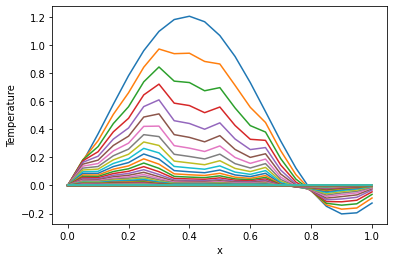

In [91]:
arr3 = np.array([[0,0.169591,0.368541,0.579171,0.782766,0.961237,1.09872,1.18301,1.20661,1.16743,1.06894,0.919894,0.733543,0.52644,0.316987,0.123797,-0.0359669,-0.148107,-0.202661,-0.194779,-0.125164],[0,0.182252,0.319697,0.507128,0.661189,0.843299,0.972896,0.939811,0.943076,0.884383,0.866149,0.713763,0.557373,0.449045,0.247949,0.076849,-0.0375648,-0.138506,-0.168769,-0.160361,-0.089135],[0,0.182956,0.277523,0.441296,0.561545,0.739017,0.844885,0.743992,0.73391,0.675326,0.697778,0.552733,0.426839,0.381056,0.191438,0.045192,-0.0377846,-0.126911,-0.140258,-0.130516,-0.0634771],[0,0.176284,0.240828,0.382485,0.47901,0.645953,0.722611,0.587068,0.569844,0.519107,0.559371,0.427807,0.329373,0.321741,0.145978,0.0240202,-0.0369285,-0.11446,-0.116259,-0.105241,-0.0452049],[0,0.165316,0.20881,0.330683,0.409933,0.562617,0.610476,0.461947,0.442075,0.401164,0.446578,0.331324,0.256005,0.270348,0.109923,0.0100475,-0.0352801,-0.101924,-0.0960799,-0.0842127,-0.0321925],[0,0.15211,0.180869,0.285447,0.351566,0.488038,0.51055,0.362659,0.342978,0.311335,0.355339,0.256995,0.200314,0.226112,0.0816716,0.00101805,-0.0330875,-0.0898072,-0.0791535,-0.0669542,-0.0229258],[0,0.138022,0.156509,0.246142,0.301847,0.421509,0.423386,0.2842,0.266271,0.242423,0.281997,0.199788,0.157685,0.188276,0.0597765,-0.00462363,-0.0305575,-0.0784241,-0.0649993,-0.0529432,-0.0163265],[0,0.123927,0.135301,0.212081,0.259222,0.362442,0.348609,0.222419,0.206929,0.18925,0.223348,0.15574,0.124787,0.156102,0.0429827,-0.00795382,-0.0278557,-0.0679543,-0.0532052,-0.0416687,-0.0116268],[0,0.110369,0.116861,0.1826,0.222505,0.310289,0.285302,0.173907,0.161005,0.148035,0.176647,0.121776,0.0992001,0.128896,0.0302342,-0.00971961,-0.02511,-0.0584818,-0.0434143,-0.0326625,-0.00827999],[0,0.0976629,0.100846,0.157091,0.19078,0.264514,0.232282,0.135898,0.125432,0.115977,0.139587,0.0955255,0.0791551,0.106008,0.0206608,-0.0104406,-0.0224151,-0.0500251,-0.0353173,-0.0255125,-0.00589656],[0,0.0859727,0.0869483,0.135018,0.163325,0.224573,0.188273,0.106167,0.0978444,0.0909767,0.110253,0.0751765,0.063349,0.0868459,0.0135564,-0.0104785,-0.0198382,-0.0425583,-0.0286464,-0.0198657,-0.00419921],[0,0.0753604,0.0748958,0.115917,0.139554,0.189926,0.152016,0.0829367,0.0764194,0.0714419,0.0870788,0.0593476,0.0508138,0.0708773,0.00835525,-0.0100845,-0.0174237,-0.0360273,-0.0231705,-0.0154262,-0.00299045],[0,0.0658232,0.0644485,0.099388,0.118986,0.160037,0.122334,0.0647997,0.0597574,0.0561548,0.0687938,0.0469885,0.0408236,0.0576275,0.00460857,-0.0094325,-0.0151985,-0.030361,-0.0186914,-0.0119495,-0.00212964],[0,0.057318,0.0553967,0.0850883,0.101214,0.134389,0.098165,0.0506448,0.0467818,0.044178,0.0543767,0.0373012,0.0328294,0.0466792,0.00196361,-0.00864191,-0.0131755,-0.0254798,-0.0150399,-0.00923613,-0.00151661],[0,0.0497787,0.0475577,0.0727253,0.0858876,0.112487,0.0785752,0.0395991,0.0366638,0.0347855,0.0430118,0.0296788,0.0264116,0.0376687,0.000145208,-0.00779359,-0.0113576,-0.0213016,-0.0120728,-0.00712482,-0.00108005],[0,0.0431277,0.0407729,0.0620467,0.0727011,0.0938717,0.0627597,0.0309792,0.0287646,0.0274137,0.0340512,0.0236588,0.0212464,0.0302818,-0.00105967,-0.00694123,-0.00974011,-0.0177454,-0.00966895,-0.0054864,-0.000769152],[0,0.0372833,0.034905,0.0528348,0.0613857,0.0781163,0.0500347,0.0242505,0.0225904,0.0216231,0.0269823,0.0188879,0.0170821,0.0242488,-0.00181478,-0.00611929,-0.00831345,-0.0147341,-0.0077271,-0.00421796,-0.000547748],[0,0.0321644,0.0298347,0.0449006,0.051703,0.0648347,0.0398264,0.0189963,0.0177594,0.0170709,0.0214012,0.0150953,0.013721,0.0193399,-0.00224506,-0.00534876,-0.00706475,-0.012196,-0.00616268,-0.00323806,-0.000390076],[0,0.0276936,0.0254584,0.0380793,0.0434416,0.0536797,0.0316577,0.0148913,0.0139753,0.0134892,0.0169902,0.012072,0.0110067,0.0153604,-0.00244509,-0.00464122,-0.00597926,-0.0100661,-0.00490552,-0.0024825,-0.000277791],[0,0.0237986,0.0216862,0.0322265,0.0364134,0.0443425,0.0251353,0.0116825,0.0110083,0.0106686,0.0134999,0.0096567,0.00881466,0.0121462,-0.00248586,-0.00400176,-0.00504147,-0.00828556,-0.00389771,-0.00190094,-0.000197828],[0,0.020413,0.0184394,0.0272156,0.0304518,0.0365517,0.0199374,0.0091725,0.0086795,0.00844517,0.0107346,0.00772348,0.00704522,0.0095599,-0.00242012,-0.0034311,-0.00423578,-0.00680263,-0.00309161,-0.001454,-0.000140882],[0,0.0174764,0.0156495,0.0229352,0.0254093,0.03007,0.0158016,0.00720779,0.00684982,0.00669074,0.00854089,0.00617406,0.00561812,0.00748676,-0.00228662,-0.00292711,-0.00354712,-0.00557169,-0.00244822,-0.00111101,-0.000100329],[0,0.0149347,0.0132565,0.0192874,0.0211563,0.0246922,0.0125155,0.00566872,0.00541077,0.00530489,0.00679846,0.00493112,0.00446851,0.00583146,-0.00211344,-0.00248589,-0.00296121,-0.00455314,-0.00193573,-0.00084814,-7.14486e-05],[0,0.012739,0.0112079,0.0161862,0.0175788,0.0202413,0.00990754,0.00446212,0.00427778,0.004209,0.00541284,0.00393356,0.00354388,0.00451516,-0.00192056,-0.00210249,-0.00246488,-0.00371281,-0.00152828,-0.000646906,-5.08818e-05],[0,0.0108461,0.00945753,0.0135559,0.0145774,0.0165661,0.00783983,0.00351534,0.00338479,0.00334145,0.0043098,0.0031329,0.00280156,0.00347288,-0.00172189,-0.00177151,-0.0020461,-0.00302142,-0.00120491,-0.000493026,-3.62353e-05],[0,0.00921744,0.00796516,0.0113305,0.0120657,0.013538,0.00620179,0.00277178,0.00268023,0.00265393,0.00343091,0.00249049,0.00220687,0.0026513,-0.00152681,-0.00148743,-0.00169406,-0.00245404,-0.000948717,-0.000375473,-2.58048e-05],[0,0.00781896,0.00669543,0.00945206,0.00996876,0.0110481,0.00490499,0.00218728,0.00212373,0.00210853,0.00273011,0.00197541,0.0017316,0.00200679,-0.00134138,-0.00124487,-0.00139914,-0.00198955,-0.00074606,-0.000285755,-1.83768e-05],[0,0.00662051,0.00561744,0.00787017,0.00822213,0.00900439,0.00387888,0.00172738,0.00168373,0.00167547,0.00217102,0.00156287,0.00135277,0.00150382,-0.00116923,-0.00103871,-0.00115287,-0.00161017,-0.000585994,-0.000217338,-1.30869e-05],[0,0.00559556,0.00470422,0.00654107,0.00677046,0.00732988,0.00306726,0.00136516,0.00133549,0.00133132,0.00172486,0.00123289,0.00105171,0.00111353,-0.00101225,-0.000864248,-0.000947837,-0.00130098,-0.00045975,-0.000165205,-9.3198e-06],[0,0.00472074,0.00393224,0.00542684,0.00556644,0.00596005,0.00242549,0.00107961,0.0010596,0.00105763,0.00136879,0.000969409,0.00081321,0.000812571,-0.000871126,-0.000717173,-0.000777628,-0.00104949,-0.000360314,-0.000125509,-6.63706e-06],[0,0.00397558,0.00328105,0.00449475,0.0045698,0.00484112,0.0019181,0.000854282,0.000840854,0.000839852,0.00108466,0.00075944,0.000624945,0.000582135,-0.000745716,-0.000593635,-0.000636704,-0.000845345,-0.000282095,-9.5303e-05,-4.72655e-06],[0,0.00334214,0.00273291,0.00371665,0.00374634,0.00392839,0.00151699,0.00067631,0.000667269,0.000666495,0.000858042,0.000592499,0.000476905,0.000407105,-0.000635339,-0.000490212,-0.000520321,-0.000679928,-0.000220641,-7.23328e-05,-3.36599e-06],[0,0.00280474,0.00227246,0.00306842,0.00306719,0.00318482,0.0011999,0.000535615,0.000529432,0.000528468,0.000677411,0.000460115,0.000360989,0.000275391,-0.000538987,-0.000403897,-0.000424435,-0.000546128,-0.000172413,-5.48749e-05,-2.39708e-06],[0,0.00234973,0.00188647,0.00252941,0.002508,0.00257977,0.000949207,0.000424297,0.00041992,0.000418568,0.000533569,0.00035544,0.000270652,0.000177355,-0.000455468,-0.00033207,-0.000345614,-0.000438079,-0.000134607,-4.16136e-05,-1.70707e-06],[0,0.00196523,0.00156352,0.00208206,0.0020483,0.00208798,0.000750987,0.000336153,0.000332878,0.000331078,0.000419159,0.000272943,0.000200616,0.000105348,-0.000383521,-0.000272462,-0.000280961,-0.000350965,-0.000105002,-3.15451e-05,-1.21568e-06],[0,0.00164095,0.00129385,0.00171144,0.00167096,0.00168866,0.000594228,0.000266313,0.000263678,0.000261457,0.000328292,0.000208161,0.000146636,5.33254e-05,-0.000321878,-0.000223121,-0.000228036,-0.000280834,-8.18414e-05,-2.39042e-05,-8.65742e-07],[0,0.00136797,0.00106908,0.00140492,0.00136167,0.00136473,0.000470231,0.000210943,0.000208661,0.000206088,0.000256246,0.000157494,0.000105308,1.6529e-05,-0.000269322,-0.000182378,-0.000184798,-0.000224457,-6.37399e-05,-1.81081e-05,-6.16535e-07],[0,0.00113862,0.000882074,0.00115183,0.00110849,0.0011022,0.000372128,0.000167024,0.000164923,0.000162091,0.000199239,0.000118045,7.39049e-05,-8.76596e-06,-0.000224711,-0.000148812,-0.000149537,-0.000179197,-4.96052e-05,-1.37131e-05,-4.39062e-07],[0,0.000946266,0.000726763,0.000943179,0.000901514,0.0008896,0.000294491,0.000132177,0.000130163,0.000127169,0.000154233,8.74848e-05,5.02549e-05,-2.54612e-05,-0.000186994,-0.000121218,-0.000120833,-0.000142912,-3.85775e-05,-1.03818e-05,-3.12676e-07],[0,0.000785238,0.000597992,0.000771423,0.000732505,0.000717569,0.000233037,0.000104523,0.000102553,9.94859e-05,0.000118796,6.39446e-05,3.26299e-05,-3.58041e-05,-0.000155222,-9.85805e-05,-9.7507e-05,-0.000113856,-2.99808e-05,-7.85759e-06,-2.22671e-07],[0,0.000650669,0.000491398,0.00063024,0.000594658,0.000578468,0.000184381,8.2576e-05,8.06379e-05,7.75767e-05,9.09754e-05,4.59293e-05,1.96608e-05,-4.15241e-05,-0.000128549,-8.00462e-05,-7.85809e-05,-9.06188e-05,-2.32847e-05,-5.94561e-06,-1.58574e-07],[0,0.000538402,0.000403301,0.000514345,0.000482347,0.000466068,0.000145852,6.51611e-05,6.32596e-05,6.0269e-05,6.92066e-05,3.22449e-05,1.02671e-05,-4.39428e-05,-0.000106225,-6.48997e-05,-6.32489e-05,-7.20555e-05,-1.80727e-05,-4.4978e-06,-1.12928e-07],[0,0.000444897,0.0003306,0.000419333,0.000390935,0.000375304,0.000115337,5.13465e-05,4.94951e-05,4.66258e-05,5.22371e-05,2.19407e-05,3.59946e-06,-4.40617e-05,-8.7595e-05,-5.25438e-05,-5.08467e-05,-5.72425e-05,-1.40189e-05,-3.40178e-06,-8.04212e-08],[0,0.000367145,0.000270692,0.000341538,0.000316604,0.000302054,9.11662e-05,4.03935e-05,3.86087e-05,3.58974e-05,3.90647e-05,1.42616e-05,-1.00698e-06,-4.26328e-05,-7.20901e-05,-4.24816e-05,-4.08288e-05,-4.54347e-05,-1.08682e-05,-2.5723e-06,-5.72716e-08],[0,0.000302591,0.000221393,0.000277914,0.000256217,0.000242974,7.2021e-05,3.17154e-05,3.0013e-05,2.74846e-05,2.88888e-05,8.6104e-06,-4.06993e-06,-4.02143e-05,-5.92185e-05,-3.43008e-05,-3.27478e-05,-3.60319e-05,-8.42084e-06,-1.94469e-06,-4.07857e-08],[0,0.000249078,0.00018088,0.00022594,0.000207202,0.000195348,5.68569e-05,2.4846e-05,2.32393e-05,2.09084e-05,2.10706e-05,4.51598e-06,-5.99047e-06,-3.7215e-05,-4.85583e-05,-2.766e-05,-2.62377e-05,-2.85517e-05,-6.52113e-06,-1.46994e-06,-2.90454e-08],[0,0.000204782,0.000147629,0.000183527,0.000167449,0.000156975,4.4848e-05,1.94145e-05,1.79135e-05,1.57862e-05,1.51016e-05,1.6083e-06,-7.07742e-06,-3.39292e-05,-3.97492e-05,-2.22774e-05,-2.09999e-05,-2.26065e-05,-5.04739e-06,-1.11089e-06,-2.06845e-08],[0,0.000168168,0.000120371,0.000148951,0.000135233,0.000126075,3.53402e-05,1.51258e-05,1.37369e-05,1.18126e-05,1.05775e-05,-4.02053e-07,-7.56696e-06,-3.05643e-05,-3.24852e-05,-1.79209e-05,-1.67907e-05,-1.78856e-05,-3.90477e-06,-8.39411e-07,-1.47304e-08],[0,0.000137944,9.80533e-05,0.000120793,0.000109145,0.000101204,2.78152e-05,1.1745e-05,1.04711e-05,8.74429e-06,7.17788e-06,-1.74041e-06,-7.63832e-06,-2.7262e-05,-2.65073e-05,-1.43999e-05,-1.3412e-05,-1.41402e-05,-3.01938e-06,-6.34176e-07,-1.04902e-08],[0,0.00011303,7.98003e-05,9.78829e-05,8.80345e-05,8.11948e-05,2.18626e-05,9.08478e-06,7.92589e-06,6.3874e-06,4.64935e-06,-2.58125e-06,-7.42627e-06,-2.41153e-05,-2.15971e-05,-1.15578e-05,-1.07032e-05,-1.11711e-05,-2.33368e-06,-4.79052e-07,-7.47054e-09],[0,9.25172e-05,6.4888e-05,7.92585e-05,7.09629e-05,6.51059e-05,1.71567e-05,6.9962e-06,5.94986e-06,4.58795e-06,2.79208e-06,-3.05893e-06,-7.03109e-06,-2.1181e-05,-1.75713e-05,-9.26678e-06,-8.53362e-06,-8.81937e-06,-1.8029e-06,-3.61823e-07,-5.32012e-09],[0,7.56503e-05,5.27175e-05,6.41314e-05,5.7167e-05,5.2175e-05,1.34393e-05,5.36047e-06,4.42228e-06,3.22374e-06,1.44901e-06,-3.27617e-06,-6.52642e-06,-1.849e-05,-1.42761e-05,-7.42219e-06,-6.79783e-06,-6.9581e-06,-1.39224e-06,-2.73246e-07,-3.7887e-09],[0,6.17974e-05,4.27945e-05,5.18549e-05,4.60252e-05,4.17875e-05,1.05056e-05,4.08305e-06,3.24718e-06,2.19805e-06,4.97129e-07,-3.31094e-06,-5.96547e-06,-1.60544e-05,-1.15836e-05,-5.93883e-06,-5.41049e-06,-5.4861e-06,-1.07469e-06,-2.06328e-07,-2.6981e-09],[0,5.04331e-05,3.47117e-05,4.18997e-05,3.70326e-05,3.34472e-05,8.19284e-06,3.08867e-06,2.34834e-06,1.43449e-06,-1.59507e-07,-3.22189e-06,-5.38589e-06,-1.38737e-05,-9.38682e-06,-4.74733e-06,-4.30272e-06,-4.32281e-06,-8.2923e-07,-1.55781e-07,-1.92144e-09],[0,4.11207e-05,2.81338e-05,3.38329e-05,2.97789e-05,2.6754e-05,6.37208e-06,2.31745e-06,1.6653e-06,8.72873e-07,-5.95421e-07,-3.05268e-06,-4.81362e-06,-1.19386e-05,-7.5973e-06,-3.79132e-06,-3.41902e-06,-3.40413e-06,-6.3959e-07,-1.17605e-07,-1.36835e-09],[0,3.34977e-05,2.27853e-05,2.73011e-05,2.39314e-05,2.13855e-05,4.9408e-06,1.72184e-06,1.15024e-06,4.65963e-07,-8.68195e-07,-2.83536e-06,-4.26579e-06,-1.02344e-05,-6.14164e-06,-3.02509e-06,-2.7147e-06,-2.67912e-06,-4.93136e-07,-8.87753e-08,-9.74463e-10],[0,2.72643e-05,1.84402e-05,2.20159e-05,1.92202e-05,1.70818e-05,3.81765e-06,1.26405e-06,7.6539e-07,1.76778e-07,-1.02207e-06,-2.59313e-06,-3.75309e-06,-8.74349e-06,-4.95918e-06,-2.41159e-06,-2.15385e-06,-2.10733e-06,-3.80081e-07,-6.70066e-08,-6.93959e-10],[0,2.2172e-05,1.4913e-05,1.77424e-05,1.54267e-05,1.36338e-05,2.93804e-06,9.14145e-07,4.80997e-07,-2.35115e-08,-1.09083e-06,-2.34243e-06,-3.28146e-06,-7.44644e-06,-3.99995e-06,-1.92088e-06,-1.70762e-06,-1.65666e-06,-2.92843e-07,-5.05713e-08,-4.942e-10],[0,1.80161e-05,1.2052e-05,1.42892e-05,1.23739e-05,1.08728e-05,2.25073e-06,6.48419e-07,2.73694e-07,-1.57286e-07,-1.10007e-06,-2.09458e-06,-2.8535e-06,-6.32373e-06,-3.22279e-06,-1.52875e-06,-1.35287e-06,-1.30167e-06,-2.25553e-07,-3.8164e-08,-3.51943e-10],[0,1.46275e-05,9.7332e-06,1.15007e-05,9.91866e-06,8.66347e-06,1.71507e-06,4.48147e-07,1.25184e-07,-2.41837e-07,-1.06899e-06,-1.85709e-06,-2.46944e-06,-5.35624e-06,-2.59393e-06,-1.2157e-06,-1.07109e-06,-1.02222e-06,-1.73668e-07,-2.87985e-08,-2.50634e-10],[0,1.1867e-05,7.85519e-06,9.25035e-06,7.94512e-06,6.89668e-06,1.29881e-06,2.98562e-07,2.119e-08,-2.90451e-07,-1.0119e-06,-1.63464e-06,-2.12792e-06,-4.52581e-06,-2.08568e-06,-9.65999e-07,-8.47429e-07,-8.02366e-07,-1.33677e-07,-2.17297e-08,-1.78488e-10],[0,9.62018e-06,6.33528e-06,7.43547e-06,6.35973e-06,5.48477e-06,9.76425e-07,1.8805e-07,-4.93814e-08,-3.13275e-07,-9.39271e-07,-1.42987e-06,-1.8266e-06,-3.81558e-06,-1.67539e-06,-7.67008e-07,-6.70038e-07,-6.29486e-07,-1.02863e-07,-1.63948e-08,-1.2711e-10],[0,7.79292e-06,5.10604e-06,5.97269e-06,5.08692e-06,4.35731e-06,7.27687e-07,1.07501e-07,-9.51132e-08,-3.18001e-07,-8.58672e-07,-1.24394e-06,-1.56251e-06,-3.21012e-06,-1.34453e-06,-6.08562e-07,-5.29445e-07,-4.93622e-07,-7.91288e-08,-1.23689e-08,-9.05205e-11],[0,6.30811e-06,4.11256e-06,4.79445e-06,4.06569e-06,3.45771e-06,5.36607e-07,4.97869e-08,-1.22612e-07,-3.10408e-07,-7.75462e-07,-1.07698e-06,-1.33239e-06,-2.69551e-06,-1.07803e-06,-4.82504e-07,-4.18096e-07,-3.86904e-07,-6.08535e-08,-9.33098e-09,-6.44638e-11],[0,5.10253e-06,3.31017e-06,3.84599e-06,3.24685e-06,2.74051e-06,3.90554e-07,9.35558e-09,-1.36932e-07,-2.94801e-07,-6.93324e-07,-9.28435e-07,-1.13289e-06,-2.25931e-06,-8.63576e-07,-3.82293e-07,-3.29968e-07,-3.03121e-07,-4.6786e-08,-7.0388e-09,-4.59076e-11],[0,4.12443e-06,2.66254e-06,3.08297e-06,2.59072e-06,2.16925e-06,2.79566e-07,-1.81057e-08,-1.41916e-07,-2.7434e-07,-6.14698e-07,-7.97303e-07,-9.60709e-07,-1.89048e-06,-6.91189e-07,-3.02691e-07,-2.60265e-07,-2.37378e-07,-3.59608e-08,-5.3094e-09,-3.26929e-11],[0,3.33147e-06,2.14016e-06,2.46952e-06,2.06533e-06,1.71467e-06,1.95797e-07,-3.593e-08,-1.40461e-07,-2.51314e-07,-5.41101e-07,-6.82315e-07,-8.1271e-07,-1.57934e-06,-5.52749e-07,-2.39507e-07,-2.05171e-07,-1.85816e-07,-2.76331e-08,-4.0047e-09,-2.32821e-11],[0,2.68909e-06,1.71908e-06,1.97665e-06,1.64493e-06,1.3533e-06,1.3308e-07,-4.6681e-08,-1.34731e-07,-2.27347e-07,-4.7338e-07,-5.82067e-07,-6.85958e-07,-1.31744e-06,-4.41678e-07,-1.89392e-07,-1.6165e-07,-1.45393e-07,-2.12286e-08,-3.02046e-09,-1.65803e-11],[0,2.16906e-06,1.37988e-06,1.5809e-06,1.30879e-06,1.06635e-06,8.65783e-08,-5.23194e-08,-1.26325e-07,-2.03561e-07,-4.11902e-07,-4.95115e-07,-5.7776e-07,-1.09741e-06,-3.52645e-07,-1.4967e-07,-1.27293e-07,-1.13719e-07,-1.63044e-08,-2.27801e-09,-1.18076e-11],[0,1.74839e-06,1.10681e-06,1.26336e-06,1.04023e-06,8.3877e-07,5.25066e-08,-5.43345e-08,-1.16406e-07,-1.80705e-07,-3.56704e-07,-4.20038e-07,-4.85676e-07,-9.12914e-07,-2.81343e-07,-1.18209e-07,-1.00186e-07,-8.89099e-08,-1.25194e-08,-1.71799e-09,-8.4087e-12],[0,1.40831e-06,8.87124e-07,1.00873e-06,8.25848e-07,6.58495e-07,2.79117e-08,-5.38488e-08,-1.05808e-07,-1.59248e-07,-3.07593e-07,-3.55474e-07,-4.07523e-07,-7.58473e-07,-2.24288e-07,-9.33056e-08,-7.88113e-08,-6.9487e-08,-9.61086e-09,-1.29558e-09,-5.98822e-12],[0,1.13359e-06,7.10504e-07,8.04711e-07,6.5486e-07,5.15891e-07,1.04957e-08,-5.17008e-08,-9.51141e-08,-1.39458e-07,-2.64234e-07,-3.00153e-07,-3.4136e-07,-6.29406e-07,-1.78674e-07,-7.36069e-08,-6.19663e-08,-5.4287e-08,-7.37638e-09,-9.76998e-10,-4.26448e-12],[0,9.11818e-07,5.68601e-07,6.41352e-07,5.18608e-07,4.03251e-07,-1.52249e-09,-4.85098e-08,-8.47179e-08,-1.21459e-07,-2.26207e-07,-2.5291e-07,-2.85479e-07,-5.21708e-07,-1.42235e-07,-5.80347e-08,-4.86984e-08,-4.23967e-08,-5.66016e-09,-7.36726e-10,-3.03693e-12],[0,7.32905e-07,4.54669e-07,5.10652e-07,4.10142e-07,3.1442e-07,-9.51839e-09,-4.47267e-08,-7.48741e-08,-1.05272e-07,-1.93046e-07,-2.12685e-07,-2.38385e-07,-4.31971e-07,-1.13148e-07,-4.57322e-08,-3.82533e-08,-3.3099e-08,-4.34232e-09,-5.55525e-10,-2.16274e-12],[0,5.88667e-07,3.63258e-07,4.06163e-07,3.23885e-07,2.44486e-07,-1.45493e-08,-4.06745e-08,-6.5735e-08,-9.08501e-08,-1.64276e-07,-1.7853e-07,-1.98774e-07,-3.57302e-07,-8.99494e-08,-3.60187e-08,-3.00348e-08,-2.58315e-08,-3.33061e-09,-4.18877e-10,-1.54019e-12],[0,4.72465e-07,2.89969e-07,3.227e-07,2.55364e-07,1.89531e-07,-1.74239e-08,-3.65789e-08,-5.73787e-08,-7.8102e-08,-1.39426e-07,-1.49603e-07,-1.65522e-07,-2.95251e-07,-7.14599e-08,-2.83537e-08,-2.35715e-08,-2.0153e-08,-2.55411e-09,-3.15832e-10,-1.09684e-12],[0,3.78912e-07,2.31252e-07,2.56088e-07,2.00996e-07,1.46434e-07,-1.87567e-08,-3.25931e-08,-4.98311e-08,-6.69092e-08,-1.18049e-07,-1.25161e-07,-1.37656e-07,-2.43748e-07,-5.67345e-08,-2.23087e-08,-1.8491e-08,-1.57176e-08,-1.95825e-09,-2.38129e-10,-7.81107e-13],[0,3.03646e-07,1.84247e-07,2.02974e-07,1.57913e-07,1.12711e-07,-1.90117e-08,-2.88161e-08,-4.3082e-08,-5.71392e-08,-9.9725e-08,-1.04553e-07,-1.14343e-07,-2.0105e-07,-4.50153e-08,-1.75439e-08,-1.44994e-08,-1.22545e-08,-1.50112e-09,-1.79539e-10,-5.56262e-13],[0,2.43135e-07,1.46647e-07,1.60664e-07,1.23817e-07,8.63861e-08,-1.85363e-08,-2.53072e-08,-3.70975e-08,-4.86549e-08,-8.40695e-08,-8.72131e-08,-9.48686e-08,-1.65691e-07,-3.5695e-08,-1.37903e-08,-1.13647e-08,-9.55151e-09,-1.15049e-09,-1.3536e-10,-3.9614e-13],[0,1.94521e-07,1.16595e-07,1.26994e-07,9.68722e-08,6.58913e-08,-1.75879e-08,-2.20971e-08,-3.18289e-08,-4.13206e-08,-7.07338e-08,-7.26506e-08,-7.86249e-08,-1.36439e-07,-2.82876e-08,-1.08347e-08,-8.90417e-09,-7.44244e-09,-8.81592e-10,-1.0205e-10,-2.82109e-13],[0,1.55493e-07,9.25959e-08,1.00228e-07,7.56116e-08,4.99818e-08,-1.63549e-08,-1.91963e-08,-2.7219e-08,-3.5006e-08,-5.94053e-08,-6.0442e-08,-6.50946e-08,-1.12264e-07,-2.24043e-08,-8.5087e-09,-6.97358e-09,-5.79737e-09,-6.75425e-10,-7.69354e-11,-2.00903e-13],[0,1.24185e-07,7.34484e-08,7.89756e-08,5.8864e-08,3.76718e-08,-1.49733e-08,-1.66013e-08,-2.32073e-08,-2.95893e-08,-4.9806e-08,-5.02238e-08,-5.38392e-08,-9.23035e-08,-1.77345e-08,-6.67909e-09,-5.45947e-09,-4.51462e-09,-5.17383e-10,-5.80001e-11,-1.43072e-13],[0,9.90874e-08,5.8186e-08,6.21207e-08,4.56948e-08,2.81812e-08,-1.35392e-08,-1.42994e-08,-1.97327e-08,-2.49582e-08,-4.16909e-08,-4.16849e-08,-4.44877e-08,-7.58378e-08,-1.40303e-08,-5.24064e-09,-4.2725e-09,-3.5147e-09,-3.96254e-10,-4.37243e-11,-1.01888e-13],[0,7.89851e-08,4.60324e-08,4.87707e-08,3.53596e-08,2.0894e-08,-1.21187e-08,-1.22722e-08,-1.6736e-08,-2.10106e-08,-3.48453e-08,-3.45598e-08,-3.67273e-08,-6.22668e-08,-1.10938e-08,-4.11025e-09,-3.34237e-09,-2.7355e-09,-3.03434e-10,-3.29616e-11,-7.25592e-14],[0,6.28968e-08,3.63645e-08,3.82114e-08,2.72656e-08,1.53244e-08,-1.07557e-08,-1.04978e-08,-1.41613e-08,-1.7655e-08,-2.90822e-08,-2.86225e-08,-3.02943e-08,-5.10906e-08,-8.76722e-09,-3.22235e-09,-2.61379e-09,-2.12847e-09,-2.32319e-10,-2.48477e-11,-5.16727e-14],[0,5.00318e-08,2.86825e-08,2.98717e-08,2.09413e-08,1.10897e-08,-9.47746e-09,-8.95315e-09,-1.19569e-08,-1.48098e-08,-2.42395e-08,-2.36816e-08,-2.49674e-08,-4.18941e-08,-6.92499e-09,-2.52524e-09,-2.04331e-09,-1.65571e-09,-1.77844e-10,-1.87308e-11,-3.67985e-14],[0,3.97532e-08,2.25856e-08,2.32955e-08,1.60122e-08,7.8894e-09,-8.29955e-09,-7.61486e-09,-1.00752e-08,-1.2403e-08,-2.01773e-08,-1.9575e-08,-2.05609e-08,-3.43322e-08,-5.4671e-09,-1.97816e-09,-1.59679e-09,-1.28763e-09,-1.36121e-10,-1.41195e-11,-2.62059e-14],[0,3.15486e-08,1.77527e-08,1.81186e-08,1.2181e-08,5.48787e-09,-7.22887e-09,-6.46029e-09,-8.47374e-09,-1.03716e-08,-1.67756e-08,-1.61658e-08,-1.69193e-08,-2.81188e-08,-4.31399e-09,-1.54901e-09,-1.24743e-09,-1.00112e-09,-1.04171e-10,-1.06432e-11,-1.86624e-14],[0,2.50057e-08,1.39269e-08,1.40507e-08,9.21233e-09,3.70072e-09,-6.26642e-09,-5.46801e-09,-7.11426e-09,-8.6604e-09,-1.39313e-08,-1.33387e-08,-1.39125e-08,-2.30171e-08,-3.40245e-09,-1.21251e-09,-9.74189e-10,-7.78175e-10,-7.97091e-11,-8.02275e-12,-1.32904e-14],[0,1.97932e-08,1.09026e-08,1.08607e-08,6.91977e-09,2.38404e-09,-5.40918e-09,-4.61814e-09,-5.96301e-09,-7.22172e-09,-1.15565e-08,-1.09969e-08,-1.1432e-08,-1.88309e-08,-2.68225e-09,-9.48755e-10,-7.60554e-10,-6.04731e-10,-6.09825e-11,-6.04737e-12,-9.46467e-15],[0,1.56449e-08,8.51546e-09,8.36446e-09,5.15603e-09,1.42588e-09,-4.65155e-09,-3.89251e-09,-4.99028e-09,-6.01428e-09,-9.57651e-09,-9.05895e-09,-9.38752e-09,-1.53981e-08,-2.11351e-09,-7.42111e-10,-5.93582e-10,-4.69835e-10,-4.66491e-11,-4.55831e-12,-6.74022e-15],[0,1.23471e-08,6.63433e-09,6.4157e-09,3.80492e-09,7.39329e-10,-3.98637e-09,-3.27472e-09,-4.17009e-09,-5.00259e-09,-7.92784e-09,-7.45684e-09,-7.70369e-09,-1.25848e-08,-1.66461e-09,-5.80271e-10,-4.63125e-10,-3.64947e-10,-3.56797e-11,-3.43586e-12,-4.80002e-15],[0,9.72862e-09,5.15455e-09,4.89827e-09,2.7749e-09,2.57202e-10,-3.40573e-09,-2.75013e-09,-3.47987e-09,-4.15626e-09,-6.55676e-09,-6.13357e-09,-6.31798e-09,-1.02806e-08,-1.31048e-09,-4.5357e-10,-3.61231e-10,-2.8341e-10,-2.72862e-11,-2.58978e-12,-3.41831e-15],[0,7.652e-09,3.99267e-09,3.72004e-09,1.99402e-09,-7.22727e-11,-2.90142e-09,-2.30576e-09,-2.90007e-09,-3.44928e-09,-5.41785e-09,-5.04157e-09,-5.17844e-09,-8.39441e-09,-1.03124e-09,-3.54415e-10,-2.81673e-10,-2.20042e-10,-2.08645e-11,-1.95202e-12,-2.43434e-15],[0,6.00728e-09,3.08226e-09,2.80805e-09,1.40582e-09,-2.88813e-10,-2.46536e-09,-1.93018e-09,-2.41386e-09,-2.85955e-09,-4.47287e-09,-4.1412e-09,-4.242e-09,-6.85125e-09,-8.11151e-10,-2.76845e-10,-2.19573e-10,-1.70805e-10,-1.59521e-11,-1.47131e-12,-1.7336e-15],[0,4.70645e-09,2.37048e-09,2.10461e-09,9.66084e-10,-4.22748e-10,-2.08982e-09,-1.6134e-09,-2.00679e-09,-2.36826e-09,-3.68963e-09,-3.39941e-09,-3.47299e-09,-5.58939e-09,-6.37771e-10,-2.16183e-10,-1.71116e-10,-1.32558e-10,-1.21948e-11,-1.10896e-12,-1.23458e-15],[0,3.67913e-09,1.81534e-09,1.56414e-09,6.40288e-10,-4.97111e-10,-1.76755e-09,-1.34674e-09,-1.66648e-09,-1.9595e-09,-3.04111e-09,-2.78875e-09,-2.84188e-09,-4.55806e-09,-5.01246e-10,-1.68761e-10,-1.33316e-10,-1.02854e-10,-9.32135e-12,-8.35845e-13,-8.79199e-16],[0,2.8691e-09,1.38352e-09,1.1507e-09,4.01527e-10,-5.29284e-10,-1.49189e-09,-1.12267e-09,-1.38239e-09,-1.6198e-09,-2.50465e-09,-2.28642e-09,-2.32427e-09,-3.71555e-09,-3.93789e-10,-1.317e-10,-1.03839e-10,-7.97901e-11,-7.12413e-12,-6.29986e-13,-6.26118e-16],[0,2.2315e-09,1.0486e-09,8.36036e-10,2.28901e-10,-5.3229e-10,-1.2568e-09,-9.34719e-10,-1.14556e-09,-1.33781e-09,-2.06131e-09,-1.87349e-09,-1.9e-09,-3.02762e-09,-3.09248e-10,-1.02748e-10,-8.08573e-11,-6.18856e-11,-5.4442e-12,-4.74824e-13,-4.45887e-16],[0,1.73053e-09,7.89688e-10,5.97915e-10,1.06224e-10,-5.158e-10,-1.05686e-09,-7.77307e-10,-9.48375e-10,-1.10398e-09,-1.69524e-09,-1.53428e-09,-1.55244e-09,-2.46615e-09,-2.42764e-10,-8.01363e-11,-6.29459e-11,-4.79895e-11,-4.15994e-12,-3.57875e-13,-3.17537e-16],[0,1.3377e-09,5.90254e-10,4.18924e-10,2.10042e-11,-4.86922e-10,-8.8722e-10,-6.45675e-10,-7.84396e-10,-9.1029e-10,-1.39324e-09,-1.25582e-09,-1.26788e-09,-2.00809e-09,-1.90501e-10,-6.24828e-11,-4.89897e-11,-3.72066e-11,-3.17828e-12,-2.69728e-13,-2.26132e-16],[0,1.03033e-09,4.37256e-10,2.85439e-10,-3.63612e-11,-4.50812e-10,-7.4363e-10,-5.35756e-10,-6.48188e-10,-7.49999e-10,-1.14428e-09,-1.02736e-09,-1.03503e-09,-1.63456e-09,-1.49435e-10,-4.87045e-11,-3.81184e-11,-2.88412e-11,-2.42801e-12,-2.03291e-13,-1.61039e-16],[0,7.90392e-10,3.20421e-10,1.86826e-10,-7.32215e-11,-4.11148e-10,-6.22347e-10,-4.44094e-10,-5.35173e-10,-6.17474e-10,-9.39223e-10,-8.40051e-10,-8.44578e-10,-1.33006e-09,-1.17179e-10,-3.7954e-11,-2.96523e-11,-2.23525e-11,-1.85465e-12,-1.53217e-13,-1.14683e-16],[0,6.03566e-10,2.31668e-10,1.14811e-10,-9.51736e-11,-3.70499e-10,-5.20108e-10,-3.67753e-10,-4.415e-10,-5.08004e-10,-7.70445e-10,-6.86562e-10,-6.88891e-10,-1.08195e-09,-9.18529e-11,-2.95685e-11,-2.3061e-11,-1.73206e-11,-1.41654e-12,-1.15477e-13,-8.16713e-17],[0,4.58506e-10,1.64655e-10,6.29696e-11,-1.06455e-10,-3.30609e-10,-4.34085e-10,-3.0425e-10,-3.63936e-10,-4.17654e-10,-6.31627e-10,-5.60858e-10,-5.61681e-10,-8.79849e-10,-7.19758e-11,-2.30295e-11,-1.79307e-11,-1.3419e-11,-1.08181e-12,-8.70319e-14,-5.81618e-17],[0,3.46225e-10,1.14411e-10,2.6335e-11,-1.10253e-10,-2.92609e-10,-3.61829e-10,-2.51487e-10,-2.99771e-10,-3.43146e-10,-5.17531e-10,-4.57966e-10,-4.57787e-10,-7.15288e-10,-5.63809e-11,-1.79319e-11,-1.39385e-11,-1.03945e-11,-8.26091e-13,-6.55934e-14,-4.14197e-17],[0,2.59615e-10,7.70547e-11,1.07749e-12,-1.08945e-10,-2.57186e-10,-3.01238e-10,-2.07695e-10,-2.46739e-10,-2.81752e-10,-4.23815e-10,-3.7379e-10,-3.72973e-10,-5.8134e-10,-4.41503e-11,-1.39591e-11,-1.08327e-11,-8.05038e-12,-6.3076e-13,-4.94355e-14,-2.94969e-17],[0,1.93065e-10,4.95581e-11,-1.57425e-11,-1.0429e-10,-2.24708e-10,-2.50506e-10,-1.71388e-10,-2.02947e-10,-2.312e-10,-3.46889e-10,-3.04959e-10,-3.03765e-10,-4.72346e-10,-3.45615e-11,-1.08638e-11,-8.41709e-12,-6.23383e-12,-4.81569e-13,-3.72577e-14,-2.10061e-17],[0,1.42151e-10,2.95675e-11,-2.63716e-11,-9.75725e-11,-1.95315e-10,-2.0809e-10,-1.41315e-10,-1.66815e-10,-1.89606e-10,-2.83783e-10,-2.48704e-10,-2.47315e-10,-3.83685e-10,-2.70466e-11,-8.45273e-12,-6.53873e-12,-4.8264e-12,-3.67631e-13,-2.80796e-14,-1.49594e-17],[0,1.03391e-10,1.52584e-11,-3.25176e-11,-8.97173e-11,-1.68994e-10,-1.72677e-10,-1.16431e-10,-1.37028e-10,-1.55407e-10,-2.32044e-10,-2.02748e-10,-2.01288e-10,-3.11586e-10,-2.1159e-11,-6.5752e-12,-5.07846e-12,-3.73613e-12,-2.80624e-13,-2.11624e-14,-1.06533e-17],[0,7.40521e-11,5.2212e-12,-3.54712e-11,-8.13794e-11,-1.45631e-10,-1.43147e-10,-9.58586e-11,-1.12489e-10,-1.27307e-10,-1.8965e-10,-1.65222e-10,-1.63775e-10,-2.52973e-10,-1.6548e-11,-5.11351e-12,-3.94349e-12,-2.8917e-12,-2.1419e-13,-1.59491e-14,-7.58667e-18],[0,5.19896e-11,-1.62887e-12,-3.62007e-11,-7.30105e-11,-1.25045e-10,-1.18555e-10,-7.88658e-11,-9.2289e-11,-1.04233e-10,-1.5493e-10,-1.34593e-10,-1.33212e-10,-2.05337e-10,-1.29378e-11,-3.97583e-12,-3.06155e-12,-2.23778e-12,-1.63469e-13,-1.202e-14,-5.40281e-18],[0,3.55273e-11,-6.12337e-12,-3.54273e-11,-6.4912e-11,-1.07021e-10,-9.80976e-11,-6.48414e-11,-7.56727e-11,-8.5297e-11,-1.26512e-10,-1.09604e-10,-1.08321e-10,-1.66633e-10,-1.01123e-11,-3.09057e-12,-2.37637e-12,-1.73147e-12,-1.24748e-13,-9.05885e-15,-3.84759e-18],[0,2.33571e-11,-8.89664e-12,-3.36819e-11,-5.72748e-11,-9.13253e-11,-8.10997e-11,-5.32763e-11,-6.20136e-11,-6.97672e-11,-1.03263e-10,-8.92253e-11,-8.80553e-11,-1.35194e-10,-7.90154e-12,-2.40189e-12,-1.84417e-12,-1.33952e-12,-9.51905e-14,-6.82715e-15,-2.74004e-18],[0,1.44609e-11,-1.04299e-11,-3.13515e-11,-5.02096e-11,-7.77229e-11,-6.6991e-11,-4.37466e-11,-5.07926e-11,-5.70377e-11,-8.42522e-11,-7.26118e-11,-7.15613e-11,-1.09663e-10,-6.17232e-12,-1.86626e-12,-1.43088e-12,-1.03614e-12,-7.26303e-14,-5.14522e-15,-1.95131e-18],[0,8.0488e-12,-1.10861e-11,-2.87135e-11,-4.37701e-11,-6.59844e-11,-5.52923e-11,-3.58998e-11,-4.15804e-11,-4.66095e-11,-6.87143e-11,-5.90733e-11,-5.81413e-11,-8.89355e-11,-4.82018e-12,-1.44977e-12,-1.11001e-12,-8.01362e-13,-5.54123e-14,-3.87764e-15,-1.38962e-18],[0,3.50963e-12,-1.11367e-11,-2.59626e-11,-3.79703e-11,-5.58925e-11,-4.56013e-11,-2.94434e-11,-3.4022e-11,-3.80711e-11,-5.60206e-11,-4.80445e-11,-4.72258e-11,-7.21112e-11,-3.7632e-12,-1.12599e-12,-8.60926e-13,-6.19693e-13,-4.22727e-14,-2.92233e-15,-9.8961e-19],[0,3.72376e-13,-1.07832e-11,-2.32325e-11,-3.27972e-11,-4.72455e-11,-3.75809e-11,-2.41346e-11,-2.78241e-11,-3.10835e-11,-4.56551e-11,-3.90634e-11,-3.83501e-11,-5.84585e-11,-2.93721e-12,-8.74339e-13,-6.67616e-13,-4.79142e-13,-3.22462e-14,-2.20237e-15,-7.04746e-19],[0,-1.72455e-12,-1.01735e-11,-2.06111e-11,-2.82204e-11,-3.98592e-11,-3.09491e-11,-1.97723e-11,-2.27447e-11,-2.5368e-11,-3.71944e-11,-3.17523e-11,-3.11349e-11,-4.73818e-11,-2.2919e-12,-6.78794e-13,-5.17618e-13,-3.7042e-13,-2.4596e-14,-1.65978e-15,-5.01882e-19],[0,-3.05752e-12,-9.41478e-12,-1.81531e-11,-2.41989e-11,-3.35673e-11,-2.547e-11,-1.619e-11,-1.85841e-11,-2.06952e-11,-3.02912e-11,-2.58024e-11,-2.52714e-11,-3.83971e-11,-1.7879e-12,-5.26877e-13,-4.01251e-13,-2.86329e-13,-1.87593e-14,-1.25086e-15,-3.57413e-19],[0,-3.83667e-12,-8.58347e-12,-1.58891e-11,-2.06862e-11,-2.82213e-11,-2.09471e-11,-1.32501e-11,-1.5178e-11,-1.68766e-11,-2.46611e-11,-2.0962e-11,-2.05075e-11,-3.11107e-11,-1.39437e-12,-4.0888e-13,-3.10991e-13,-2.21299e-13,-1.43066e-14,-9.42685e-16,-2.5453e-19],[0,-4.22085e-12,-7.73282e-12,-1.38327e-11,-1.76337e-11,-2.36895e-11,-1.72163e-11,-1.08387e-11,-1.2391e-11,-1.37575e-11,-2.0071e-11,-1.70253e-11,-1.6638e-11,-2.52029e-11,-1.08719e-12,-3.17249e-13,-2.40993e-13,-1.71017e-13,-1.091e-14,-7.10433e-16,-1.81263e-19],[0,-4.32929e-12,-6.8989e-12,-1.19858e-11,-1.4993e-11,-1.98562e-11,-1.41413e-11,-8.86203e-12,-1.01116e-11,-1.12108e-11,-1.63302e-11,-1.38246e-11,-1.34959e-11,-2.04136e-11,-8.47465e-13,-2.46106e-13,-1.8672e-13,-1.32143e-13,-8.31915e-15,-5.35401e-16,-1.29085e-19],[0,-4.25081e-12,-6.10509e-12,-1.03423e-11,-1.27178e-11,-1.66201e-11,-1.16087e-11,-7.24256e-12,-8.24832e-12,-9.13238e-12,-1.32826e-11,-1.12229e-11,-1.09449e-11,-1.65319e-11,-6.6044e-13,-1.90882e-13,-1.44645e-13,-1.02093e-13,-6.34314e-15,-4.03491e-16,-9.19276e-20],[0,-4.05088e-12,-5.36554e-12,-8.89095e-12,-1.07644e-11,-1.38933e-11,-9.52413e-12,-5.91643e-12,-6.72581e-12,-7.43678e-12,-1.08007e-11,-9.10873e-12,-8.87436e-12,-1.33863e-11,-5.14566e-13,-1.48023e-13,-1.12033e-13,-7.88663e-14,-4.83614e-15,-3.0408e-16,-6.54658e-20],[0,-3.77724e-12,-4.68773e-12,-7.61783e-12,-9.09281e-12,-1.15996e-11,-7.80959e-12,-4.83108e-12,-5.48232e-12,-6.05403e-12,-8.78005e-12,-7.39122e-12,-7.19418e-12,-1.08377e-11,-4.00817e-13,-1.14766e-13,-8.67607e-14,-6.09168e-14,-3.68692e-15,-2.29161e-16,-4.66212e-20],[0,-3.46415e-12,-4.07453e-12,-6.50737e-12,-7.66651e-12,-9.6732e-12,-6.40029e-12,-3.94321e-12,-4.46715e-12,-4.92684e-12,-7.13553e-12,-5.99627e-12,-5.83105e-12,-8.77309e-12,-3.12141e-13,-8.8966e-14,-6.71785e-14,-4.7047e-14,-2.8106e-15,-1.727e-16,-3.32011e-20],[0,-3.13574e-12,-3.52556e-12,-5.54356e-12,-6.45273e-12,-8.05782e-12,-5.24259e-12,-3.21724e-12,-3.6387e-12,-4.00829e-12,-5.79751e-12,-4.86359e-12,-4.72537e-12,-7.10084e-12,-2.43028e-13,-6.8954e-14,-5.20081e-14,-3.63309e-14,-2.14243e-15,-1.3015e-16,-2.3644e-20],[0,-2.80857e-12,-3.03835e-12,-4.71069e-12,-5.42232e-12,-6.70514e-12,-4.29217e-12,-2.62392e-12,-2.96292e-12,-3.26004e-12,-4.70921e-12,-3.94409e-12,-3.8287e-12,-5.74661e-12,-1.89175e-13,-5.34345e-14,-4.02575e-14,-2.80524e-14,-1.633e-15,-9.80836e-17,-1.6838e-20],[0,-2.49362e-12,-2.60911e-12,-3.99376e-12,-4.54955e-12,-5.57396e-12,-3.51235e-12,-2.13923e-12,-2.41186e-12,-2.65072e-12,-3.82426e-12,-3.19781e-12,-3.10167e-12,-4.65007e-12,-1.47224e-13,-4.14011e-14,-3.11572e-14,-2.16579e-14,-1.24462e-15,-7.39174e-17,-1.19911e-20],[0,-2.19772e-12,-2.2333e-12,-3.37878e-12,-3.81182e-12,-4.62918e-12,-2.87287e-12,-1.74345e-12,-1.96268e-12,-2.15469e-12,-3.10488e-12,-2.59226e-12,-2.5123e-12,-3.76231e-12,-1.1455e-13,-3.20724e-14,-2.41105e-14,-1.67192e-14,-9.48548e-16,-5.57053e-17,-8.53941e-21],[0,-1.92478e-12,-1.90606e-12,-2.85289e-12,-3.18943e-12,-3.84104e-12,-2.34876e-12,-1.42039e-12,-1.59668e-12,-1.75102e-12,-2.52025e-12,-2.101e-12,-2.03461e-12,-3.04369e-12,-8.91091e-14,-2.48417e-14,-1.86549e-14,-1.29052e-14,-7.22862e-16,-4.19803e-17,-6.0813e-21],[0,-1.67657e-12,-1.62245e-12,-2.40447e-12,-2.66528e-12,-3.18431e-12,-1.91943e-12,-1.15681e-12,-1.29855e-12,-1.4226e-12,-2.04525e-12,-1.70254e-12,-1.6475e-12,-2.46205e-12,-6.93038e-14,-1.92381e-14,-1.44317e-14,-9.96026e-15,-5.5084e-16,-3.1637e-17,-4.33077e-21],[0,-1.45343e-12,-1.3777e-12,-2.0231e-12,-2.22461e-12,-2.63767e-12,-1.56791e-12,-9.41839e-13,-1.05579e-12,-1.1555e-12,-1.65942e-12,-1.37943e-12,-1.33386e-12,-1.99135e-12,-5.38893e-14,-1.48962e-14,-1.11631e-14,-7.68652e-15,-4.19729e-16,-2.3842e-17,-3.08414e-21],[0,-1.2547e-12,-1.16725e-12,-1.69951e-12,-1.85469e-12,-2.18313e-12,-1.28025e-12,-7.66573e-13,-8.58185e-13,-9.3832e-13,-1.3461e-12,-1.11745e-12,-1.07978e-12,-1.61048e-12,-4.18948e-14,-1.15325e-14,-8.63357e-15,-5.93123e-15,-3.19806e-16,-1.79676e-17,-2.19636e-21],[0,-1.07909e-12,-9.86914e-13,-1.42556e-12,-1.54461e-12,-1.80553e-12,-1.04495e-12,-6.23733e-13,-6.97378e-13,-7.61783e-13,-1.09172e-12,-9.05086e-13,-8.73979e-13,-1.30232e-12,-3.25635e-14,-8.92704e-15,-6.67634e-15,-4.5763e-15,-2.43658e-16,-1.35406e-17,-1.56413e-21],[0,-9.24942e-13,-8.32847e-13,-1.19409e-12,-1.28506e-12,-1.49214e-12,-8.52567e-13,-5.0736e-13,-5.66559e-13,-6.18321e-13,-8.85245e-13,-7.32971e-13,-7.07314e-13,-1.05302e-12,-2.53056e-14,-6.90918e-15,-5.16214e-15,-3.53055e-15,-1.8563e-16,-1.02043e-17,-1.11389e-21],[0,-7.90414e-13,-7.01583e-13,-9.98895e-13,-1.06808e-12,-1.23228e-12,-6.95347e-13,-4.12582e-13,-4.60166e-13,-5.01767e-13,-7.17685e-13,-5.93499e-13,-5.72361e-13,-8.5137e-13,-1.96616e-14,-5.34666e-15,-3.99085e-15,-2.72349e-15,-1.41414e-16,-7.6901e-18,-7.93249e-22],[0,-6.73594e-13,-5.9003e-13,-8.34567e-13,-8.8691e-13,-1.01699e-12,-5.66916e-13,-3.35417e-13,-3.73664e-13,-4.07098e-13,-5.81735e-13,-4.80499e-13,-4.63102e-13,-6.88272e-13,-1.52735e-14,-4.13692e-15,-3.08493e-15,-2.10072e-15,-1.07724e-16,-5.79533e-18,-5.64909e-22],[0,-5.72598e-13,-4.95444e-13,-6.96452e-13,-7.35816e-13,-8.38755e-13,-4.62046e-13,-2.72611e-13,-3.03352e-13,-3.30223e-13,-4.71457e-13,-3.88961e-13,-3.74656e-13,-5.56372e-13,-1.18625e-14,-3.20045e-15,-2.38435e-15,-1.62021e-15,-8.20555e-17,-4.36741e-18,-4.02297e-22],[0,-4.85623e-13,-4.15417e-13,-5.80545e-13,-6.09944e-13,-6.91325e-13,-3.76448e-13,-2.21508e-13,-2.46216e-13,-2.67812e-13,-3.82019e-13,-3.14821e-13,-3.03069e-13,-4.49712e-13,-9.2116e-15,-2.47563e-15,-1.84265e-15,-1.24948e-15,-6.25e-17,-3.29131e-18,-2.86494e-22],[0,-4.10984e-13,-3.4784e-13,-4.83416e-13,-5.05193e-13,-5.69463e-13,-3.06608e-13,-1.7994e-13,-1.99799e-13,-2.17155e-13,-3.09498e-13,-2.5478e-13,-2.45134e-13,-3.6347e-13,-7.15179e-15,-1.9147e-15,-1.42384e-15,-9.63498e-16,-4.76025e-17,-2.48036e-18,-2.04026e-22],[0,-3.47134e-13,-2.9088e-13,-4.02131e-13,-4.18105e-13,-4.68808e-13,-2.49646e-13,-1.46137e-13,-1.62098e-13,-1.76048e-13,-2.50705e-13,-2.06165e-13,-1.98254e-13,-2.93745e-13,-5.55159e-15,-1.48067e-15,-1.10009e-15,-7.42902e-16,-3.62541e-17,-1.86922e-18,-1.45296e-22],[0,-2.92668e-13,-2.42951e-13,-3.34193e-13,-3.4577e-13,-3.85725e-13,-2.03204e-13,-1.18657e-13,-1.31485e-13,-1.42697e-13,-2.03049e-13,-1.66807e-13,-1.60323e-13,-2.37377e-13,-4.30867e-15,-1.14488e-15,-8.49857e-16,-5.72762e-16,-2.76097e-17,-1.40865e-18,-1.03472e-22],[0,-2.46329e-13,-2.02686e-13,-2.77478e-13,-2.85745e-13,-3.17193e-13,-1.65353e-13,-9.63223e-14,-1.06632e-13,-1.15644e-13,-1.64428e-13,-1.34947e-13,-1.29637e-13,-1.91813e-13,-3.34345e-15,-8.85123e-16,-6.56466e-16,-4.41548e-16,-2.10254e-17,-1.06157e-18,-7.36871e-23],[0,-2.06998e-13,-1.68908e-13,-2.30187e-13,-2.35976e-13,-2.607e-13,-1.34513e-13,-7.81746e-14,-8.6461e-14,-9.37039e-14,-1.33134e-13,-1.0916e-13,-1.04815e-13,-1.54984e-13,-2.59401e-15,-6.84216e-16,-5.07025e-16,-3.40364e-16,-1.60106e-17,-8.00004e-19,-5.24759e-23],[0,-1.73687e-13,-1.40614e-13,-1.90795e-13,-1.94746e-13,-2.14159e-13,-1.09395e-13,-6.34325e-14,-7.00926e-14,-7.59143e-14,-1.07782e-13,-8.82916e-14,-8.47377e-14,-1.25218e-13,-2.01223e-15,-5.28845e-16,-3.91559e-16,-2.62345e-16,-1.21912e-17,-6.02887e-19,-3.73705e-23],[0,-1.45534e-13,-1.16943e-13,-1.58018e-13,-1.60617e-13,-1.7584e-13,-8.89436e-14,-5.146e-14,-5.68129e-14,-6.14925e-14,-8.72452e-14,-7.14054e-14,-6.85005e-14,-1.01162e-13,-1.56067e-15,-4.08705e-16,-3.02356e-16,-2.02193e-16,-9.28252e-18,-4.54339e-19,-2.66132e-23],[0,-1.21783e-13,-9.71651e-14,-1.30771e-13,-1.32387e-13,-1.44308e-13,-7.22965e-14,-4.17389e-14,-4.60413e-14,-4.9803e-14,-7.06128e-14,-5.77431e-14,-5.53701e-14,-8.17232e-14,-1.21024e-15,-3.1582e-16,-2.33449e-16,-1.5582e-16,-7.06748e-18,-3.42392e-19,-1.89525e-23],[0,-1.01782e-13,-8.06594e-14,-1.08142e-13,-1.09054e-13,-1.18375e-13,-5.87502e-14,-3.38477e-14,-3.73059e-14,-4.03298e-14,-5.71441e-14,-4.66904e-14,-4.4753e-14,-6.60156e-14,-9.38351e-16,-2.44016e-16,-1.80227e-16,-1.20072e-16,-5.38075e-18,-2.58028e-19,-1.34969e-23],[0,-8.49651e-14,-6.68999e-14,-8.93651e-14,-8.97815e-14,-9.70595e-14,-4.77304e-14,-2.74433e-14,-3.0223e-14,-3.26539e-14,-4.62389e-14,-3.77499e-14,-3.61689e-14,-5.3324e-14,-7.27428e-16,-1.88515e-16,-1.39123e-16,-9.25186e-17,-4.09639e-18,-1.94451e-19,-9.61179e-24],[0,-7.0848e-14,-5.54419e-14,-7.37982e-14,-7.38739e-14,-7.95474e-14,-3.87684e-14,-2.22467e-14,-2.4481e-14,-2.64354e-14,-3.74105e-14,-3.05187e-14,-2.92292e-14,-4.30701e-14,-5.63829e-16,-1.4562e-16,-1.07383e-16,-7.12822e-17,-3.11846e-18,-1.46539e-19,-6.845e-24],[0,-5.90139e-14,-4.591e-14,-6.0903e-14,-6.07522e-14,-6.51675e-14,-3.14818e-14,-1.8031e-14,-1.9827e-14,-2.13983e-14,-3.02644e-14,-2.46705e-14,-2.36193e-14,-3.47861e-14,-4.36957e-16,-1.12473e-16,-8.28759e-17,-5.4916e-17,-2.37388e-18,-1.10432e-19,-4.87463e-24],[0,-4.91071e-14,-3.7988e-14,-5.02291e-14,-4.99352e-14,-5.33652e-14,-2.55591e-14,-1.46117e-14,-1.60555e-14,-1.73188e-14,-2.44807e-14,-1.99414e-14,-1.90848e-14,-2.8094e-14,-3.38582e-16,-8.68617e-17,-6.39553e-17,-4.23042e-17,-1.807e-18,-8.32219e-20,-3.47145e-24],[0,-4.08241e-14,-3.14102e-14,-4.14007e-14,-4.10236e-14,-4.36831e-14,-2.07461e-14,-1.18389e-14,-1.29996e-14,-1.40153e-14,-1.98003e-14,-1.61176e-14,-1.54199e-14,-2.26883e-14,-2.62317e-16,-6.70748e-17,-4.93494e-17,-3.25863e-17,-1.37543e-18,-6.27162e-20,-2.47218e-24],[0,-3.39071e-14,-2.59532e-14,-3.41039e-14,-3.3686e-14,-3.57438e-14,-1.68359e-14,-9.59075e-15,-1.05239e-14,-1.13406e-14,-1.60131e-14,-1.30259e-14,-1.24579e-14,-1.83218e-14,-2.032e-16,-5.17898e-17,-3.80755e-17,-2.50989e-17,-1.04689e-18,-4.72631e-20,-1.76055e-24],[0,-2.81375e-14,-2.14298e-14,-2.80771e-14,-2.76478e-14,-2.92365e-14,-1.36599e-14,-7.76834e-15,-8.51853e-15,-9.17535e-15,-1.2949e-14,-1.05266e-14,-1.00643e-14,-1.47951e-14,-1.57383e-16,-3.99836e-17,-2.93742e-17,-1.93304e-17,-7.96794e-19,-3.56176e-20,-1.25377e-24],[0,-2.33301e-14,-1.76833e-14,-2.31027e-14,-2.26816e-14,-2.39052e-14,-1.10809e-14,-6.2913e-15,-6.89445e-15,-7.42265e-15,-1.04703e-14,-8.50619e-15,-8.13008e-15,-1.19466e-14,-1.2188e-16,-3.08656e-17,-2.26593e-17,-1.48867e-17,-6.06418e-19,-2.68415e-20,-8.92866e-25],[0,-1.93286e-14,-1.45826e-14,-1.89995e-14,-1.85992e-14,-1.95392e-14,-8.98706e-15,-5.09437e-15,-5.57933e-15,-6.00412e-15,-8.46524e-15,-6.87311e-15,-6.56724e-15,-9.64622e-15,-9.43727e-17,-2.38244e-17,-1.74778e-17,-1.14636e-17,-4.61509e-19,-2.02278e-20,-6.35851e-25],[0,-1.60011e-14,-1.20184e-14,-1.5617e-14,-1.5245e-14,-1.59651e-14,-7.28754e-15,-4.1246e-15,-4.51454e-15,-4.85619e-15,-6.84359e-15,-5.5532e-15,-5.30453e-15,-7.78845e-15,-7.30634e-17,-1.83876e-17,-1.34799e-17,-8.82705e-18,-3.51213e-19,-1.52437e-20,-4.52818e-25],[0,-1.32366e-14,-9.89937e-15,-1.28303e-14,-1.24905e-14,-1.30404e-14,-5.90835e-15,-3.33898e-15,-3.65254e-15,-3.92734e-15,-5.53213e-15,-4.48648e-15,-4.28438e-15,-6.28824e-15,-5.6558e-17,-1.419e-17,-1.03955e-17,-6.79641e-18,-2.67266e-19,-1.14876e-20,-3.22473e-25],[0,-1.0942e-14,-8.14934e-15,-1.05358e-14,-1.02296e-14,-1.06481e-14,-4.78935e-15,-2.70266e-15,-2.95481e-15,-3.17585e-15,-4.47163e-15,-3.62444e-15,-3.46025e-15,-5.07681e-15,-4.37755e-17,-1.09497e-17,-8.0162e-18,-5.23255e-18,-2.03376e-19,-8.6571e-21,-2.29647e-25],[0,-9.03901e-15,-6.70504e-15,-8.64759e-15,-8.37464e-15,-8.69187e-15,-3.88163e-15,-2.18733e-15,-2.39011e-15,-2.56791e-15,-3.61415e-15,-2.92787e-15,-2.79451e-15,-4.09861e-15,-3.38774e-17,-8.4484e-18,-6.1809e-18,-4.02827e-18,-1.54753e-19,-6.524e-21,-1.63542e-25],[0,-7.46207e-15,-5.51381e-15,-7.09456e-15,-6.85342e-15,-7.09288e-15,-3.14543e-15,-1.77005e-15,-1.93313e-15,-2.07617e-15,-2.92088e-15,-2.36504e-15,-2.25675e-15,-3.30879e-15,-2.6214e-17,-6.51789e-18,-4.76538e-18,-3.10095e-18,-1.1775e-19,-4.91649e-21,-1.16466e-25],[0,-6.15634e-15,-4.53192e-15,-5.81789e-15,-5.60645e-15,-5.78632e-15,-2.54847e-15,-1.43221e-15,-1.56338e-15,-1.67845e-15,-2.36042e-15,-1.91029e-15,-1.82239e-15,-2.67108e-15,-2.02815e-17,-5.02803e-18,-3.67373e-18,-2.38694e-18,-8.95915e-20,-3.70507e-21,-8.29408e-26],[0,-5.07599e-15,-3.72304e-15,-4.76892e-15,-4.58472e-15,-4.71907e-15,-2.06448e-15,-1.15872e-15,-1.26422e-15,-1.3568e-15,-1.90737e-15,-1.54291e-15,-1.47157e-15,-2.15621e-15,-1.56896e-17,-3.87837e-18,-2.83191e-18,-1.83722e-18,-6.81642e-20,-2.79214e-21,-5.90659e-26],[0,-4.18276e-15,-3.05708e-15,-3.90747e-15,-3.74787e-15,-3.84757e-15,-1.67217e-15,-9.37353e-16,-1.02222e-15,-1.09671e-15,-1.54117e-15,-1.24611e-15,-1.18823e-15,-1.74053e-15,-1.21359e-17,-2.9913e-18,-2.18281e-18,-1.41401e-18,-5.18597e-20,-2.10416e-21,-4.20635e-26],[0,-3.44475e-15,-2.50908e-15,-3.20034e-15,-3.06274e-15,-3.13616e-15,-1.35421e-15,-7.58198e-16,-8.26464e-16,-8.86402e-16,-1.2452e-15,-1.00636e-15,-9.59412e-16,-1.40495e-15,-9.38591e-18,-2.30691e-18,-1.68235e-18,-1.08822e-18,-3.94537e-20,-1.5857e-21,-2.99554e-26],[0,-2.8354e-15,-2.05839e-15,-2.62016e-15,-2.50202e-15,-2.55561e-15,-1.09656e-15,-6.13222e-16,-6.68141e-16,-7.16372e-16,-1.00601e-15,-8.12702e-16,-7.74626e-16,-1.13404e-15,-7.2582e-18,-1.77895e-18,-1.29653e-18,-8.3744e-19,-3.00145e-20,-1.19498e-21,-2.13326e-26],[0,-2.33259e-15,-1.68792e-15,-2.14435e-15,-2.0433e-15,-2.08198e-15,-8.87808e-16,-4.9592e-16,-5.40102e-16,-5.78916e-16,-8.12711e-16,-6.56279e-16,-6.25407e-16,-9.1534e-16,-5.61216e-18,-1.3717e-18,-9.9911e-19,-6.44413e-19,-2.28327e-20,-9.00537e-22,-1.51919e-26],[0,-1.91796e-15,-1.38355e-15,-1.7543e-15,-1.66816e-15,-1.6957e-15,-7.18705e-16,-4.01018e-16,-4.36565e-16,-4.67802e-16,-6.56517e-16,-5.2994e-16,-5.04915e-16,-7.388e-16,-4.3389e-18,-1.05759e-18,-7.69857e-19,-4.95848e-19,-1.73688e-20,-6.78645e-22,-1.08188e-26],[0,-1.57625e-15,-1.13359e-15,-1.43468e-15,-1.36148e-15,-1.38074e-15,-5.81738e-16,-3.24247e-16,-3.52849e-16,-3.77989e-16,-5.30313e-16,-4.27905e-16,-4.07623e-16,-5.96294e-16,-3.35412e-18,-8.15335e-19,-5.93163e-19,-3.81511e-19,-1.32119e-20,-5.11426e-22,-7.7046e-27],[0,-1.29479e-15,-9.28428e-16,-1.17289e-15,-1.11085e-15,-1.12402e-15,-4.70817e-16,-2.62151e-16,-2.85165e-16,-3.054e-16,-4.28346e-16,-3.45502e-16,-3.29068e-16,-4.81265e-16,-2.59256e-18,-6.28521e-19,-4.56988e-19,-2.93522e-19,-1.00496e-20,-3.85411e-22,-5.48679e-27],[0,-1.0631e-15,-7.601e-16,-9.58539e-16,-9.06094e-16,-9.14811e-16,-3.81001e-16,-2.11928e-16,-2.30448e-16,-2.46736e-16,-3.45967e-16,-2.78957e-16,-2.65643e-16,-3.88416e-16,-2.00369e-18,-4.8447e-19,-3.52048e-19,-2.25813e-19,-7.64391e-21,-2.90445e-22,-3.9074e-27],[0,-8.72466e-16,-6.22058e-16,-7.83107e-16,-7.38873e-16,-7.44373e-16,-3.08283e-16,-1.71313e-16,-1.86217e-16,-1.99328e-16,-2.79417e-16,-2.2522e-16,-2.14436e-16,-3.13474e-16,-1.5484e-18,-3.73404e-19,-2.71186e-19,-1.73713e-19,-5.81391e-21,-2.18879e-22,-2.78264e-27],[0,-7.15702e-16,-5.089e-16,-6.39577e-16,-6.02348e-16,-6.05555e-16,-2.49417e-16,-1.38471e-16,-1.50465e-16,-1.6102e-16,-2.25658e-16,-1.81829e-16,-1.73095e-16,-2.52986e-16,-1.19643e-18,-2.87777e-19,-2.08882e-19,-1.33626e-19,-4.42188e-21,-1.64947e-22,-1.98164e-27],[0,-5.86855e-16,-4.16178e-16,-5.22191e-16,-4.90919e-16,-4.92518e-16,-2.0177e-16,-1.11916e-16,-1.2157e-16,-1.30067e-16,-1.82234e-16,-1.46792e-16,-1.3972e-16,-2.04166e-16,-9.24369e-19,-2.21767e-19,-1.60881e-19,-1.02784e-19,-3.36304e-21,-1.24304e-22,-1.41122e-27],[0,-4.81005e-16,-3.40233e-16,-4.2622e-16,-3.99999e-16,-4.00496e-16,-1.63208e-16,-9.04474e-17,-9.82174e-17,-1.05058e-16,-1.47159e-16,-1.18503e-16,-1.12777e-16,-1.64764e-16,-7.14097e-19,-1.70886e-19,-1.23901e-19,-7.90559e-20,-2.55766e-21,-9.36756e-23,-1.00499e-27],[0,-3.94088e-16,-2.78053e-16,-3.47785e-16,-3.25835e-16,-3.25601e-16,-1.32003e-16,-7.30917e-17,-7.9346e-17,-8.4854e-17,-1.1883e-16,-9.56623e-17,-9.10274e-17,-1.32964e-16,-5.51598e-19,-1.31668e-19,-9.54153e-20,-6.08025e-20,-1.94509e-21,-7.05939e-23,-7.15701e-28],[0,-3.22751e-16,-2.27163e-16,-2.83702e-16,-2.65356e-16,-2.64659e-16,-1.06754e-16,-5.90622e-17,-6.40969e-17,-6.85318e-17,-9.59506e-17,-7.72218e-17,-7.34705e-17,-1.07299e-16,-4.26033e-19,-1.01443e-19,-7.34732e-20,-4.67611e-20,-1.47919e-21,-5.31995e-23,-5.09683e-28],[0,-2.64226e-16,-1.85528e-16,-2.31362e-16,-2.16051e-16,-2.15081e-16,-8.6327e-17,-4.77225e-17,-5.17755e-17,-5.53467e-17,-7.74734e-17,-6.23342e-17,-5.92984e-17,-8.65867e-17,-3.29018e-19,-7.81502e-20,-5.65732e-20,-3.59605e-20,-1.12485e-21,-4.00911e-23,-3.62969e-28],[0,-2.16234e-16,-1.51477e-16,-1.88626e-16,-1.75867e-16,-1.74757e-16,-6.98021e-17,-3.85575e-17,-4.18204e-17,-4.46962e-17,-6.25519e-17,-5.03154e-17,-4.7859e-17,-6.98715e-17,-2.5407e-19,-6.02014e-20,-4.35575e-20,-2.76531e-20,-8.55364e-22,-3.02126e-23,-2.58487e-28],[0,-1.76895e-16,-1.23638e-16,-1.53744e-16,-1.43123e-16,-1.41967e-16,-5.64355e-17,-3.11507e-17,-3.37777e-17,-3.60936e-17,-5.05024e-17,-4.06128e-17,-3.86255e-17,-5.63822e-17,-1.96174e-19,-4.63715e-20,-3.35341e-20,-2.12637e-20,-6.50421e-22,-2.27682e-23,-1.8408e-28],[0,-1.44662e-16,-1.00886e-16,-1.2528e-16,-1.1645e-16,-1.15308e-16,-4.56247e-17,-2.51653e-17,-2.72804e-17,-2.91455e-17,-4.07727e-17,-3.27804e-17,-3.11728e-17,-4.54964e-17,-1.51457e-19,-3.57162e-20,-2.58156e-20,-1.63498e-20,-4.94568e-22,-1.71581e-23,-1.31092e-28],[0,-1.18263e-16,-8.22969e-17,-1.0206e-16,-9.47274e-17,-9.36388e-17,-3.68818e-17,-2.03287e-17,-2.20318e-17,-2.35339e-17,-3.29163e-17,-2.64579e-17,-2.51576e-17,-3.67119e-17,-1.16921e-19,-2.75073e-20,-1.98723e-20,-1.25709e-20,-3.76049e-22,-1.29303e-23,-9.33565e-29],[0,-9.66487e-17,-6.71146e-17,-8.31228e-17,-7.70406e-17,-7.60287e-17,-2.9812e-17,-1.64208e-17,-1.77922e-17,-1.90021e-17,-2.65729e-17,-2.13543e-17,-2.03027e-17,-2.96231e-17,-9.02517e-20,-2.11836e-20,-1.52964e-20,-9.66486e-21,-2.85924e-22,-9.74426e-24,-6.64834e-29],[0,-7.89595e-17,-5.47182e-17,-6.76834e-17,-6.26432e-17,-6.17201e-17,-2.40955e-17,-1.32634e-17,-1.43678e-17,-1.53423e-17,-2.14513e-17,-1.72348e-17,-1.63844e-17,-2.39028e-17,-6.9659e-20,-1.63125e-20,-1.17734e-20,-7.43027e-21,-2.17392e-22,-7.34326e-24,-4.73459e-29],[0,-6.44876e-17,-4.45997e-17,-5.50988e-17,-5.09262e-17,-5.00962e-17,-1.94738e-17,-1.07126e-17,-1.1602e-17,-1.23869e-17,-1.73162e-17,-1.39097e-17,-1.3222e-17,-1.92868e-17,-5.37599e-20,-1.25607e-20,-9.0612e-21,-5.71206e-21,-1.65282e-22,-5.53387e-24,-3.37172e-29],[0,-5.26521e-17,-3.6343e-17,-4.48439e-17,-4.13926e-17,-4.06549e-17,-1.57374e-17,-8.65194e-18,-9.36818e-18,-1.00005e-17,-1.39779e-17,-1.12258e-17,-1.06699e-17,-1.55621e-17,-4.14858e-20,-9.67111e-21,-6.97339e-21,-4.39097e-21,-1.25659e-22,-4.17032e-24,-2.40115e-29],[0,-4.29759e-17,-2.96074e-17,-3.64895e-17,-3.36374e-17,-3.29879e-17,-1.27171e-17,-6.98733e-18,-7.56418e-18,-8.07357e-18,-1.12828e-17,-9.05966e-18,-8.61019e-18,-1.25565e-17,-3.20111e-20,-7.44578e-21,-5.36632e-21,-3.37527e-21,-9.55325e-23,-3.14275e-24,-1.70997e-29],[0,-3.50679e-17,-2.41142e-17,-2.96851e-17,-2.733e-17,-2.67627e-17,-1.02757e-17,-5.64272e-18,-6.10733e-18,-6.51771e-18,-9.10716e-18,-7.31133e-18,-6.948e-18,-1.01313e-17,-2.46981e-20,-5.73212e-21,-4.12936e-21,-2.59439e-21,-7.26267e-23,-2.36837e-24,-1.21775e-29],[0,-2.86069e-17,-1.96355e-17,-2.41444e-17,-2.22013e-17,-2.17091e-17,-8.30252e-18,-4.55666e-18,-4.9309e-18,-5.26151e-18,-7.35083e-18,-5.90028e-18,-5.60661e-18,-8.17448e-18,-1.90541e-20,-4.41258e-21,-3.17734e-21,-1.99408e-21,-5.52116e-23,-1.7848e-24,-8.67214e-30],[0,-2.33298e-17,-1.59849e-17,-1.96339e-17,-1.80318e-17,-1.76072e-17,-6.70781e-18,-3.67948e-18,-3.98093e-18,-4.2473e-18,-5.93306e-18,-4.76147e-18,-4.52412e-18,-6.59551e-18,-1.46986e-20,-3.39659e-21,-2.44466e-21,-1.5326e-21,-4.19713e-23,-1.34502e-24,-6.17583e-30],[0,-1.90211e-17,-1.301e-17,-1.59627e-17,-1.46429e-17,-1.42783e-17,-5.41909e-18,-2.97104e-18,-3.21387e-18,-3.42849e-18,-4.78863e-18,-3.8424e-18,-3.65059e-18,-5.32148e-18,-1.13377e-20,-2.61436e-21,-1.88083e-21,-1.17787e-21,-3.19053e-23,-1.01361e-24,-4.39809e-30],[0,-1.55041e-17,-1.05865e-17,-1.29755e-17,-1.18888e-17,-1.15772e-17,-4.37771e-18,-2.39891e-18,-2.59453e-18,-2.76745e-18,-3.86486e-18,-3.10068e-18,-2.94567e-18,-4.29352e-18,-8.74453e-21,-2.01215e-21,-1.44696e-21,-9.05206e-22,-2.42528e-23,-7.63853e-25,-3.13208e-30],[0,-1.26342e-17,-8.61252e-18,-1.05452e-17,-9.6512e-18,-9.38588e-18,-3.53625e-18,-1.93688e-18,-2.09447e-18,-2.23381e-18,-3.11922e-18,-2.50209e-18,-2.37685e-18,-3.46409e-18,-6.74391e-21,-1.54856e-21,-1.11311e-21,-6.95629e-22,-1.84353e-23,-5.75638e-25,-2.2305e-30],[0,-1.02929e-17,-7.00515e-18,-8.56857e-18,-7.83345e-18,-7.60832e-18,-2.85639e-18,-1.56378e-18,-1.69074e-18,-1.80302e-18,-2.51739e-18,-2.01904e-18,-1.91784e-18,-2.79487e-18,-5.20058e-21,-1.19171e-21,-8.56239e-22,-5.34551e-22,-1.40129e-23,-4.338e-25,-1.58844e-30],[0,-8.38351e-18,-5.6966e-18,-6.96115e-18,-6.35707e-18,-6.16662e-18,-2.30711e-18,-1.26251e-18,-1.3648e-18,-1.45527e-18,-2.03163e-18,-1.62922e-18,-1.54746e-18,-2.25492e-18,-4.0101e-21,-9.17037e-22,-6.58611e-22,-4.10755e-22,-1.06511e-23,-3.26911e-25,-1.1312e-30],[0,-6.82668e-18,-4.63155e-18,-5.65427e-18,-5.15816e-18,-4.99748e-18,-1.86337e-18,-1.01924e-18,-1.10166e-18,-1.17457e-18,-1.63957e-18,-1.31464e-18,-1.24859e-18,-1.81927e-18,-3.09189e-21,-7.05631e-22,-5.0657e-22,-3.15615e-22,-8.0956e-24,-2.4636e-25,-8.05579e-31],[0,-5.55767e-18,-3.76489e-18,-4.59194e-18,-4.18473e-18,-4.04952e-18,-1.5049e-18,-8.2282e-19,-8.89228e-19,-9.47987e-19,-1.32315e-18,-1.06079e-18,-1.00743e-18,-1.46778e-18,-2.38374e-21,-5.42929e-22,-3.89607e-22,-2.42502e-22,-6.1531e-24,-1.85656e-25,-5.7369e-31],[0,-4.52354e-18,-3.05982e-18,-3.72857e-18,-3.39451e-18,-3.28099e-18,-1.21534e-18,-6.64233e-19,-7.17742e-19,-7.65097e-19,-1.06777e-18,-8.55945e-19,-8.12847e-19,-1.18419e-18,-1.83763e-21,-4.17718e-22,-2.99635e-22,-1.86318e-22,-4.67658e-24,-1.3991e-25,-4.08551e-31],[0,-3.68102e-18,-2.48632e-18,-3.02704e-18,-2.75312e-18,-2.658e-18,-9.81447e-19,-5.36195e-19,-5.79313e-19,-6.17478e-19,-8.61674e-19,-6.90649e-19,-6.55838e-19,-9.5538e-19,-1.41653e-21,-3.21365e-22,-2.30427e-22,-1.43145e-22,-3.55428e-24,-1.05436e-25,-2.90948e-31],[0,-2.99478e-18,-2.01995e-18,-2.4571e-18,-2.23261e-18,-2.15307e-18,-7.92535e-19,-4.32825e-19,-4.67571e-19,-4.98331e-19,-6.95342e-19,-5.57268e-19,-5.29152e-19,-7.70779e-19,-1.09184e-21,-2.47224e-22,-1.77196e-22,-1.09971e-22,-2.70125e-24,-7.94565e-26,-2.07197e-31],[0,-2.43596e-18,-1.64076e-18,-1.99415e-18,-1.81026e-18,-1.74386e-18,-6.39959e-19,-3.49373e-19,-3.77374e-19,-4.02166e-19,-5.61109e-19,-4.49641e-19,-4.26933e-19,-6.21843e-19,-8.41508e-22,-1.90177e-22,-1.36255e-22,-8.44826e-23,-2.0529e-24,-5.98783e-26,-1.47555e-31],[0,-1.98101e-18,-1.33253e-18,-1.61819e-18,-1.46762e-18,-1.41228e-18,-5.16736e-19,-2.82004e-19,-3.04569e-19,-3.24552e-19,-4.52783e-19,-3.62796e-19,-3.44458e-19,-5.01683e-19,-6.48524e-22,-1.46285e-22,-1.04768e-22,-6.48989e-23,-1.56013e-24,-4.51242e-26,-1.0508e-31],[0,-1.61071e-18,-1.08202e-18,-1.3129e-18,-1.18968e-18,-1.14363e-18,-4.17223e-19,-2.2762e-19,-2.45806e-19,-2.61913e-19,-3.65364e-19,-2.92722e-19,-2.77913e-19,-4.0474e-19,-4.9976e-22,-1.12518e-22,-8.05535e-23,-4.9853e-23,-1.18562e-24,-3.40055e-26,-7.48325e-32],[0,-1.30937e-18,-8.78456e-19,-1.06506e-18,-9.64252e-19,-9.25988e-19,-3.36862e-19,-1.83719e-19,-1.98376e-19,-2.11359e-19,-2.94819e-19,-2.3618e-19,-2.24221e-19,-3.26527e-19,-3.85093e-22,-8.65401e-23,-6.19325e-23,-3.82938e-23,-9.00988e-25,-2.56265e-26,-5.32916e-32],[0,-1.06421e-18,-7.13076e-19,-8.6388e-19,-7.81445e-19,-7.49691e-19,-2.7197e-19,-1.48282e-19,-1.60095e-19,-1.7056e-19,-2.37892e-19,-1.90558e-19,-1.80902e-19,-2.63427e-19,-2.96714e-22,-6.65567e-23,-4.76137e-23,-2.94137e-23,-6.84672e-25,-1.93121e-26,-3.79514e-32],[0,-8.64786e-19,-5.78739e-19,-7.00603e-19,-6.33221e-19,-6.069e-19,-2.19571e-19,-1.19677e-19,-1.29198e-19,-1.37635e-19,-1.91954e-19,-1.53747e-19,-1.4595e-19,-2.1252e-19,-2.28601e-22,-5.11851e-23,-3.66036e-23,-2.2592e-23,-5.2028e-25,-1.45535e-26,-2.70269e-32],[0,-7.02607e-19,-4.69639e-19,-5.68109e-19,-5.13052e-19,-4.91261e-19,-1.77261e-19,-9.65887e-20,-1.04263e-19,-1.11063e-19,-1.54886e-19,-1.24046e-19,-1.17751e-19,-1.7145e-19,-1.76112e-22,-3.93616e-23,-2.81382e-23,-1.73517e-23,-3.9535e-25,-1.09675e-26,-1.92471e-32],[0,-5.70742e-19,-3.81048e-19,-4.60611e-19,-4.1564e-19,-3.97619e-19,-1.431e-19,-7.79528e-20,-8.41382e-20,-8.96206e-20,-1.24974e-19,-1.00082e-19,-9.49993e-20,-1.38316e-19,-1.35666e-22,-3.02677e-23,-2.16296e-23,-1.33265e-23,-3.00412e-25,-8.26511e-27,-1.37067e-32],[0,-4.63545e-19,-3.09124e-19,-3.73405e-19,-3.36687e-19,-3.21798e-19,-1.15518e-19,-6.29112e-20,-6.7897e-20,-7.23167e-20,-1.00838e-19,-8.07466e-20,-7.66432e-20,-1.11585e-19,-1.04501e-22,-2.32737e-23,-1.66257e-23,-1.02347e-23,-2.28267e-25,-6.22857e-27,-9.7612e-33],[0,-3.76419e-19,-2.5074e-19,-3.02672e-19,-2.72702e-19,-2.60412e-19,-9.32504e-20,-5.0771e-20,-5.479e-20,-5.83531e-20,-8.13618e-20,-6.51463e-20,-6.18336e-20,-9.00196e-20,-8.04902e-23,-1.78949e-23,-1.27789e-23,-7.85988e-24,-1.73444e-25,-4.69384e-27,-6.9514e-33],[0,-3.05618e-19,-2.03354e-19,-2.45307e-19,-2.20853e-19,-2.10719e-19,-7.52728e-20,-4.09728e-20,-4.42125e-20,-4.70851e-20,-6.56469e-20,-5.25596e-20,-4.98853e-20,-7.26218e-20,-6.19919e-23,-1.37585e-23,-9.82172e-24,-6.03592e-24,-1.31785e-25,-3.53727e-27,-4.95041e-33],[0,-2.48095e-19,-1.64901e-19,-1.9879e-19,-1.78844e-19,-1.70494e-19,-6.07594e-20,-3.30649e-20,-3.56766e-20,-3.79925e-20,-5.29668e-20,-4.24045e-20,-4.02456e-20,-5.85861e-20,-4.77418e-23,-1.05778e-23,-7.54852e-24,-4.63506e-24,-1.0013e-25,-2.66568e-27,-3.52541e-33],[0,-2.01367e-19,-1.33702e-19,-1.61076e-19,-1.44811e-19,-1.37937e-19,-4.90431e-20,-2.66828e-20,-2.87882e-20,-3.06553e-20,-4.27355e-20,-3.42112e-20,-3.24685e-20,-4.7263e-20,-3.6765e-23,-8.13197e-24,-5.80119e-24,-3.5592e-24,-7.60772e-26,-2.00885e-27,-2.51061e-33],[0,-1.63415e-19,-1.08392e-19,-1.30501e-19,-1.17243e-19,-1.11588e-19,-3.9585e-20,-2.15323e-20,-2.32295e-20,-2.47349e-20,-3.44802e-20,-2.76008e-20,-2.61941e-20,-3.81282e-20,-2.83101e-23,-6.25139e-24,-4.45814e-24,-2.73298e-24,-5.7801e-26,-1.51387e-27,-1.78792e-33],[0,-1.32596e-19,-8.78614e-20,-1.05719e-19,-9.4914e-20,-9.02651e-20,-3.19502e-20,-1.73756e-20,-1.87439e-20,-1.99576e-20,-2.78194e-20,-2.22676e-20,-2.11321e-20,-3.07588e-20,-2.17982e-23,-4.80549e-24,-3.42588e-24,-2.09848e-24,-4.39144e-26,-1.14085e-27,-1.27326e-33],[0,-1.07573e-19,-7.1211e-20,-8.56328e-20,-7.68304e-20,-7.30115e-20,-2.57873e-20,-1.40212e-20,-1.51243e-20,-1.61029e-20,-2.24451e-20,-1.79648e-20,-1.70482e-20,-2.48137e-20,-1.67831e-23,-3.69384e-24,-2.63252e-24,-1.61123e-24,-3.33634e-26,-8.5974e-28,-9.06745e-34],[0,-8.72606e-20,-5.7709e-20,-6.93559e-20,-6.21866e-20,-5.90515e-20,-2.08127e-20,-1.13141e-20,-1.22035e-20,-1.29925e-20,-1.81089e-20,-1.44933e-20,-1.37535e-20,-2.00176e-20,-1.29211e-23,-2.83923e-24,-2.02281e-24,-1.23708e-24,-2.53469e-26,-6.47898e-28,-6.45734e-34],[0,-7.07736e-20,-4.67616e-20,-5.6167e-20,-5.03294e-20,-4.77573e-20,-1.67974e-20,-9.12961e-21,-9.84664e-21,-1.04829e-20,-1.46103e-20,-1.16926e-20,-1.10955e-20,-1.61485e-20,-9.9471e-24,-2.18224e-24,-1.55424e-24,-9.49782e-25,-1.92563e-26,-4.88255e-28,-4.59857e-34],[0,-5.73939e-20,-3.78866e-20,-4.54815e-20,-4.07295e-20,-3.86206e-20,-1.35565e-20,-7.36678e-21,-7.94488e-21,-8.45789e-21,-1.17875e-20,-9.43305e-21,-8.95116e-21,-1.30272e-20,-7.65718e-24,-1.6772e-24,-1.19417e-24,-7.29183e-25,-1.46288e-26,-3.67948e-28,-3.27485e-34],[0,-4.65374e-20,-3.06926e-20,-3.68253e-20,-3.2958e-20,-3.12298e-20,-1.09406e-20,-5.94426e-21,-6.41036e-21,-6.82402e-21,-9.51005e-21,-7.61012e-21,-7.22119e-21,-1.05092e-20,-5.89406e-24,-1.28899e-24,-9.17477e-25,-5.59803e-25,-1.11132e-26,-2.77285e-28,-2.33217e-34],[0,-3.77296e-20,-2.48619e-20,-2.98137e-20,-2.66671e-20,-2.52517e-20,-8.82938e-21,-4.79637e-21,-5.17217e-21,-5.50573e-21,-7.67256e-21,-6.13944e-21,-5.82555e-21,-8.47782e-21,-4.53665e-24,-9.90588e-25,-7.04867e-25,-4.29754e-25,-8.4423e-27,-2.08961e-28,-1.66085e-34],[0,-3.0585e-20,-2.01367e-20,-2.41348e-20,-2.15753e-20,-2.04166e-20,-7.12541e-21,-3.87009e-21,-4.17311e-21,-4.44207e-21,-6.19006e-21,-4.95295e-21,-4.69963e-21,-6.83911e-21,-3.49164e-24,-7.61237e-25,-5.41505e-25,-3.29907e-25,-6.41319e-27,-1.57473e-28,-1.18276e-34],[0,-2.47902e-20,-1.63078e-20,-1.95359e-20,-1.74543e-20,-1.65063e-20,-5.75018e-21,-3.12267e-21,-3.36699e-21,-3.58388e-21,-4.99398e-21,-3.99574e-21,-3.7913e-21,-5.51713e-21,-2.6872e-24,-5.84962e-25,-4.15988e-25,-2.53251e-25,-4.87169e-27,-1.18671e-28,-8.423e-35],[0,-2.00909e-20,-1.32057e-20,-1.58118e-20,-1.41194e-20,-1.33442e-20,-4.6403e-21,-2.51956e-21,-2.71657e-21,-2.89146e-21,-4.02899e-21,-3.22351e-21,-3.05852e-21,-4.45068e-21,-2.06797e-24,-4.49488e-25,-3.19553e-25,-1.944e-25,-3.70064e-27,-8.94305e-29,-5.9984e-35],[0,-1.62805e-20,-1.06926e-20,-1.27966e-20,-1.14208e-20,-1.07871e-20,-3.74458e-21,-2.03292e-21,-2.19177e-21,-2.33281e-21,-3.25045e-21,-2.60051e-21,-2.46737e-21,-3.59037e-21,-1.59134e-24,-3.45375e-25,-2.45465e-25,-1.49221e-25,-2.81103e-27,-6.73946e-29,-4.27174e-35],[0,-1.31913e-20,-8.65691e-21,-1.03554e-20,-9.23736e-21,-8.71958e-21,-3.02172e-21,-1.64025e-21,-1.76834e-21,-1.88207e-21,-2.62234e-21,-2.09791e-21,-1.99047e-21,-2.89634e-21,-1.2245e-24,-2.65366e-25,-1.88547e-25,-1.14538e-25,-2.13525e-27,-5.07885e-29,-3.0421e-35],[0,-1.0687e-20,-7.00812e-21,-8.3793e-21,-7.4708e-21,-7.04792e-21,-2.43836e-21,-1.32342e-21,-1.42671e-21,-1.51842e-21,-2.11559e-21,-1.69244e-21,-1.60574e-21,-2.33647e-21,-9.42176e-25,-2.03884e-25,-1.44821e-25,-8.79137e-26,-1.62189e-27,-3.82741e-29,-2.16642e-35],[0,-8.65723e-21,-5.67284e-21,-6.77971e-21,-6.04166e-21,-5.69643e-21,-1.9676e-21,-1.06778e-21,-1.15106e-21,-1.22502e-21,-1.70675e-21,-1.36533e-21,-1.29537e-21,-1.88482e-21,-7.24904e-25,-1.5664e-25,-1.11232e-25,-6.74764e-26,-1.23194e-27,-2.88433e-29,-1.5428e-35],[0,-7.01221e-21,-4.59156e-21,-5.48505e-21,-4.88558e-21,-4.60385e-21,-1.5877e-21,-8.61506e-22,-9.28668e-22,-9.88314e-22,-1.37692e-21,-1.10144e-21,-1.04498e-21,-1.52048e-21,-5.57706e-25,-1.20339e-25,-8.54304e-26,-5.17887e-26,-9.35722e-28,-2.17362e-29,-1.0987e-35],[0,-5.67919e-21,-3.71606e-21,-4.43728e-21,-3.95046e-21,-3.72064e-21,-1.28113e-21,-6.95078e-22,-7.49237e-22,-7.97338e-22,-1.11082e-21,-8.88555e-22,-8.42997e-22,-1.22656e-21,-4.29049e-25,-9.24468e-26,-6.56114e-26,-3.97471e-26,-7.10719e-28,-1.63804e-29,-7.82436e-36],[0,-4.5991e-21,-3.00724e-21,-3.58938e-21,-3.19413e-21,-3.00671e-21,-1.03375e-21,-5.60796e-22,-6.0447e-22,-6.43261e-22,-8.96146e-22,-7.16812e-22,-6.80051e-22,-9.89453e-22,-3.30054e-25,-7.10168e-26,-5.03884e-26,-3.05045e-26,-5.39811e-28,-1.23442e-29,-5.57208e-36],[0,-3.72406e-21,-2.43342e-21,-2.90329e-21,-2.58243e-21,-2.42966e-21,-8.3412e-22,-4.52452e-22,-4.87672e-22,-5.18956e-22,-7.22955e-22,-5.78263e-22,-5.48599e-22,-7.98182e-22,-2.53888e-25,-5.45525e-26,-3.86961e-26,-2.34105e-26,-4.09995e-28,-9.30259e-30,-3.96813e-36],[0,-3.01521e-21,-1.96893e-21,-2.34818e-21,-2.08776e-21,-1.96326e-21,-6.73036e-22,-3.65037e-22,-3.93439e-22,-4.18669e-22,-5.83233e-22,-4.66491e-22,-4.42556e-22,-6.43885e-22,-1.95288e-25,-4.19036e-26,-2.97159e-26,-1.79658e-26,-3.11392e-28,-7.01041e-30,-2.82589e-36],[0,-2.44106e-21,-1.59298e-21,-1.89907e-21,-1.68774e-21,-1.58631e-21,-5.43054e-22,-2.94509e-22,-3.17414e-22,-3.37761e-22,-4.70512e-22,-3.76323e-22,-3.5701e-22,-5.19414e-22,-1.50206e-25,-3.21864e-26,-2.2819e-26,-1.3787e-26,-2.36499e-28,-5.28303e-30,-2.01244e-36],[0,-1.97605e-21,-1.28871e-21,-1.53576e-21,-1.36428e-21,-1.28168e-21,-4.38171e-22,-2.37606e-22,-2.56077e-22,-2.72487e-22,-3.79575e-22,-3.03583e-22,-2.88e-22,-4.19005e-22,-1.15525e-25,-2.47217e-26,-1.75222e-26,-1.05799e-26,-1.79616e-28,-3.98128e-30,-1.43315e-36],[0,-1.59948e-21,-1.04248e-21,-1.24186e-21,-1.10276e-21,-1.03551e-21,-3.53541e-22,-1.91696e-22,-2.06592e-22,-2.19827e-22,-3.06213e-22,-2.44902e-22,-2.32329e-22,-3.38005e-22,-8.88475e-26,-1.89875e-26,-1.34545e-26,-8.11863e-27,-1.36412e-28,-3.00029e-30,-1.02061e-36],[0,-1.29456e-21,-8.43234e-22,-1.00415e-21,-8.91317e-22,-8.36581e-22,-2.85253e-22,-1.54656e-22,-1.66669e-22,-1.77343e-22,-2.47029e-22,-1.97564e-22,-1.87418e-22,-2.72664e-22,-6.8327e-26,-1.45828e-26,-1.03307e-26,-6.22977e-27,-1.03598e-28,-2.26101e-30,-7.26826e-37],[0,-1.04768e-21,-6.82021e-22,-8.11884e-22,-7.20379e-22,-6.7584e-22,-2.30154e-22,-1.24772e-22,-1.3446e-22,-1.43069e-22,-1.99283e-22,-1.59375e-22,-1.51189e-22,-2.19954e-22,-5.25434e-26,-1.11995e-26,-7.93195e-27,-4.78025e-27,-7.86769e-29,-1.70389e-30,-5.17606e-37],[0,-8.47806e-22,-5.51591e-22,-6.56393e-22,-5.82193e-22,-5.45962e-22,-1.85695e-22,-1.00662e-22,-1.08475e-22,-1.15418e-22,-1.60765e-22,-1.28568e-22,-1.21963e-22,-1.77433e-22,-4.04039e-26,-8.6009e-27,-6.08998e-27,-3.66791e-27,-5.97495e-29,-1.28405e-30,-3.68611e-37],[0,-6.86009e-22,-4.46074e-22,-5.30649e-22,-4.70491e-22,-4.41025e-22,-1.49824e-22,-8.12101e-23,-8.75115e-23,-9.3111e-23,-1.29692e-22,-1.03716e-22,-9.83869e-23,-1.43132e-22,-3.10676e-26,-6.605e-27,-4.67561e-27,-2.81433e-27,-4.53748e-29,-9.67658e-31,-2.62505e-37],[0,-5.55046e-22,-3.60718e-22,-4.28969e-22,-3.80202e-22,-3.56244e-22,-1.2088e-22,-6.55168e-23,-7.05989e-23,-7.51151e-23,-1.04624e-22,-8.3667e-23,-7.93677e-23,-1.15462e-22,-2.38875e-26,-5.07208e-27,-3.5896e-27,-2.15934e-27,-3.44578e-29,-7.29225e-31,-1.86942e-37],[0,-4.49049e-22,-2.91675e-22,-3.46752e-22,-3.07225e-22,-2.8775e-22,-9.75276e-23,-5.2856e-23,-5.69547e-23,-6.05971e-23,-8.44014e-23,-6.74939e-23,-6.40251e-23,-9.31409e-23,-1.8366e-26,-3.89481e-27,-2.75576e-27,-1.65675e-27,-2.61671e-29,-5.49543e-31,-1.3313e-37],[0,-3.63267e-22,-2.35833e-22,-2.80278e-22,-2.48243e-22,-2.32417e-22,-7.86858e-23,-4.26415e-23,-4.59472e-23,-4.88849e-23,-6.80874e-23,-5.44469e-23,-5.16483e-23,-7.51349e-23,-1.41201e-26,-2.99068e-27,-2.11555e-27,-1.2711e-27,-1.98708e-29,-4.14134e-31,-9.48077e-38],[0,-2.9385e-22,-1.9067e-22,-2.26535e-22,-2.00576e-22,-1.87717e-22,-6.34836e-23,-3.44009e-23,-3.70669e-23,-3.94364e-23,-5.49265e-23,-4.3922e-23,-4.1664e-23,-6.06098e-23,-1.08553e-26,-2.29637e-27,-1.62402e-27,-9.75205e-28,-1.50893e-29,-3.12091e-31,-6.75169e-38],[0,-2.37681e-22,-1.54147e-22,-1.83087e-22,-1.62055e-22,-1.51609e-22,-5.12182e-23,-2.77526e-23,-2.99029e-23,-3.18139e-23,-4.43095e-23,-3.54315e-23,-3.36098e-23,-4.88926e-23,-8.34503e-27,-1.76318e-27,-1.24666e-27,-7.4817e-28,-1.14582e-29,-2.35191e-31,-4.80818e-38],[0,-1.92235e-22,-1.24612e-22,-1.47965e-22,-1.30926e-22,-1.22442e-22,-4.13222e-23,-2.23891e-23,-2.41234e-23,-2.56647e-23,-3.57446e-23,-2.85822e-23,-2.71125e-23,-3.94406e-23,-6.41495e-27,-1.35376e-27,-9.56955e-28,-5.73977e-28,-8.70077e-30,-1.77239e-31,-3.42413e-38],[0,-1.55468e-22,-1.00731e-22,-1.19574e-22,-1.05772e-22,-9.88836e-23,-3.3338e-23,-1.80621e-23,-1.94608e-23,-2.0704e-23,-2.88352e-23,-2.3057e-23,-2.18712e-23,-3.18158e-23,-4.93106e-27,-1.03937e-27,-7.34551e-28,-4.4033e-28,-6.60682e-30,-1.33567e-31,-2.43848e-38],[0,-1.25724e-22,-8.14218e-23,-9.66264e-23,-8.54473e-23,-7.98551e-23,-2.68964e-23,-1.45713e-23,-1.56994e-23,-1.67021e-23,-2.32614e-23,-1.85998e-23,-1.76432e-23,-2.56651e-23,-3.79025e-27,-7.97966e-28,-5.63819e-28,-3.37795e-28,-5.01673e-30,-1.00656e-31,-1.73655e-38],[0,-1.01664e-22,-6.58104e-23,-7.80788e-23,-6.90254e-23,-6.44863e-23,-2.16992e-23,-1.17551e-23,-1.2665e-23,-1.34737e-23,-1.87649e-23,-1.50042e-23,-1.42324e-23,-2.07034e-23,-2.91324e-27,-6.12613e-28,-4.32758e-28,-2.5913e-28,-3.80928e-30,-7.58542e-32,-1.23668e-38],[0,-8.22038e-23,-5.31894e-23,-6.30885e-23,-5.57573e-23,-5.20738e-23,-1.75063e-23,-9.48315e-24,-1.0217e-23,-1.08693e-23,-1.51376e-23,-1.21037e-23,-1.1481e-23,-1.6701e-23,-2.23907e-27,-4.703e-28,-3.32153e-28,-1.9878e-28,-2.8924e-30,-5.71636e-32,-8.80695e-39],[0,-6.64641e-23,-4.29867e-23,-5.09739e-23,-4.5038e-23,-4.20492e-23,-1.41234e-23,-7.65028e-24,-8.24217e-24,-8.76833e-24,-1.22114e-23,-9.76388e-24,-9.26153e-24,-1.34722e-23,-1.72084e-27,-3.61035e-28,-2.54929e-28,-1.52482e-28,-2.19618e-30,-4.30784e-32,-6.27183e-39],[0,-5.37349e-23,-3.47392e-23,-4.11838e-23,-3.63781e-23,-3.39535e-23,-1.13942e-23,-6.17164e-24,-6.64904e-24,-7.07343e-24,-9.85087e-24,-7.87636e-24,-7.47109e-24,-1.08677e-23,-1.32249e-27,-2.77148e-28,-1.95654e-28,-1.16964e-28,-1.66753e-30,-3.24638e-32,-4.46646e-39],[0,-4.3441e-23,-2.80728e-23,-3.32725e-23,-2.93822e-23,-2.74156e-23,-9.19231e-24,-4.97878e-24,-5.36383e-24,-5.70614e-24,-7.94663e-24,-6.35373e-24,-6.02678e-24,-8.76671e-24,-1.01632e-27,-2.12746e-28,-1.50157e-28,-8.97179e-29,-1.26611e-30,-2.44646e-32,-3.18077e-39],[0,-3.5117e-23,-2.26845e-23,-2.68799e-23,-2.37309e-23,-2.21361e-23,-7.41591e-24,-4.01646e-24,-4.32703e-24,-4.60313e-24,-6.41047e-24,-5.12544e-24,-4.86167e-24,-7.07188e-24,-7.80997e-28,-1.63304e-28,-1.15237e-28,-6.88171e-29,-9.61307e-31,-1.84365e-32,-2.26517e-39],[0,-2.83865e-23,-1.83296e-23,-2.17146e-23,-1.91659e-23,-1.78728e-23,-5.98276e-24,-3.24014e-24,-3.49063e-24,-3.71333e-24,-5.17126e-24,-4.1346e-24,-3.9218e-24,-5.7047e-24,-6.00138e-28,-1.25349e-28,-8.84352e-29,-5.27842e-29,-7.29875e-31,-1.38937e-32,-1.61313e-39],[0,-2.29447e-23,-1.48101e-23,-1.75412e-23,-1.54785e-23,-1.44302e-23,-4.82656e-24,-2.61386e-24,-2.8159e-24,-2.99553e-24,-4.1716e-24,-3.33531e-24,-3.16363e-24,-4.60183e-24,-4.61143e-28,-9.6213e-29,-6.78653e-29,-4.04858e-29,-5.54151e-31,-1.04703e-32,-1.14878e-39],[0,-1.85451e-23,-1.19658e-23,-1.41693e-23,-1.25002e-23,-1.16504e-23,-3.89378e-24,-2.10862e-24,-2.27159e-24,-2.41648e-24,-3.36518e-24,-2.69052e-24,-2.55203e-24,-3.71217e-24,-3.54326e-28,-7.3847e-29,-5.20786e-29,-3.10522e-29,-4.20729e-31,-7.89038e-33,-8.18101e-40],[0,-1.49883e-23,-9.6674e-24,-1.14452e-23,-1.00946e-23,-9.40585e-24,-3.14125e-24,-1.70104e-24,-1.83249e-24,-1.94935e-24,-2.71465e-24,-2.17039e-24,-2.05866e-24,-2.9945e-24,-2.72241e-28,-5.66787e-29,-3.99631e-29,-2.38163e-29,-3.19427e-31,-5.94617e-33,-5.82607e-40],[0,-1.21131e-23,-7.81013e-24,-9.24442e-24,-8.15172e-24,-7.59356e-24,-2.53415e-24,-1.37224e-24,-1.47826e-24,-1.57253e-24,-2.18987e-24,-1.75081e-24,-1.66067e-24,-2.41558e-24,-2.09164e-28,-4.35006e-29,-3.06653e-29,-1.82661e-29,-2.42513e-31,-4.48102e-33,-4.14901e-40],[0,-9.7889e-24,-6.3094e-24,-7.46658e-24,-6.58257e-24,-6.13032e-24,-2.04438e-24,-1.10699e-24,-1.19251e-24,-1.26854e-24,-1.76653e-24,-1.41234e-24,-1.33962e-24,-1.94858e-24,-1.60696e-28,-3.33855e-29,-2.35302e-29,-1.40091e-29,-1.84116e-31,-3.37689e-33,-2.9547e-40],[0,-7.9103e-24,-5.09684e-24,-6.03044e-24,-5.31532e-24,-4.94893e-24,-1.64926e-24,-8.93013e-25,-9.61989e-25,-1.02332e-24,-1.42503e-24,-1.1393e-24,-1.08064e-24,-1.57186e-24,-1.23454e-28,-2.56218e-29,-1.80548e-29,-1.0744e-29,-1.3978e-31,-2.54482e-33,-2.10418e-40],[0,-6.39192e-24,-4.11716e-24,-4.87036e-24,-4.29192e-24,-3.99512e-24,-1.3305e-24,-7.20394e-25,-7.7603e-25,-8.25499e-25,-1.14955e-24,-9.19049e-25,-8.71725e-25,-1.26798e-24,-9.484e-29,-1.9663e-29,-1.38532e-29,-8.23969e-30,-1.06118e-31,-1.91777e-33,-1.49848e-40],[0,-5.16476e-24,-3.32566e-24,-3.93332e-24,-3.46546e-24,-3.22507e-24,-1.07334e-24,-5.81141e-25,-6.26017e-25,-6.6592e-25,-9.27321e-25,-7.41375e-25,-7.03198e-25,-1.02284e-24,-7.28552e-29,-1.50896e-29,-1.06291e-29,-6.31901e-30,-8.05622e-32,-1.44523e-33,-1.06714e-40],[0,-4.17301e-24,-2.68622e-24,-3.17646e-24,-2.79807e-24,-2.60339e-24,-8.65886e-25,-4.68805e-25,-5.05002e-25,-5.37188e-25,-7.48053e-25,-5.98049e-25,-5.67251e-25,-8.25095e-25,-5.59647e-29,-1.15796e-29,-8.15512e-30,-4.84595e-30,-6.11599e-32,-1.08912e-33,-7.59957e-41],[0,-3.37155e-24,-2.16965e-24,-2.56516e-24,-2.25915e-24,-2.10151e-24,-6.98525e-25,-3.78183e-25,-4.0738e-25,-4.33342e-25,-6.0344e-25,-4.82432e-25,-4.57586e-25,-6.6558e-25,-4.29885e-29,-8.88588e-30,-6.25684e-30,-3.71621e-30,-4.64298e-32,-8.20759e-34,-5.412e-41],[0,-2.7239e-24,-1.75235e-24,-2.07144e-24,-1.82399e-24,-1.69634e-24,-5.63511e-25,-3.05078e-25,-3.28628e-25,-3.4957e-25,-4.86783e-25,-3.89166e-25,-3.69122e-25,-5.36903e-25,-3.30198e-29,-6.81859e-30,-4.80032e-30,-2.84979e-30,-3.52469e-32,-6.18522e-34,-3.85413e-41],[0,-2.20057e-24,-1.41527e-24,-1.67269e-24,-1.47261e-24,-1.36927e-24,-4.54591e-25,-2.46104e-25,-2.651e-25,-2.81992e-25,-3.92677e-25,-3.1393e-25,-2.97761e-25,-4.33104e-25,-2.53619e-29,-5.23213e-30,-3.68277e-30,-2.18534e-30,-2.67572e-32,-4.66117e-34,-2.7447e-41],[0,-1.77771e-24,-1.14299e-24,-1.35067e-24,-1.18889e-24,-1.10524e-24,-3.66724e-25,-1.9853e-25,-2.13853e-25,-2.27478e-25,-3.16764e-25,-2.53239e-25,-2.40195e-25,-3.49372e-25,-1.94793e-29,-4.01468e-30,-2.82533e-30,-1.67578e-30,-2.03121e-32,-3.51265e-34,-1.95463e-41],[0,-1.43605e-24,-9.23066e-25,-1.09061e-24,-9.59811e-25,-8.92102e-25,-2.95839e-25,-1.60153e-25,-1.72512e-25,-1.83502e-25,-2.55527e-25,-2.04281e-25,-1.93759e-25,-2.81827e-25,-1.49607e-29,-3.08044e-30,-2.16747e-30,-1.28501e-30,-1.54193e-32,-2.64713e-34,-1.39198e-41],[0,-1.16001e-24,-7.45433e-25,-8.80595e-25,-7.74855e-25,-7.20055e-25,-2.38655e-25,-1.29193e-25,-1.39163e-25,-1.48028e-25,-2.06128e-25,-1.64788e-25,-1.563e-25,-2.27341e-25,-1.14898e-29,-2.36355e-30,-1.66275e-30,-9.85342e-31,-1.17049e-32,-1.99487e-34,-9.91293e-42],[0,-9.36995e-25,-6.01965e-25,-7.11005e-25,-6.25526e-25,-5.81179e-25,-1.92524e-25,-1.04219e-25,-1.1226e-25,-1.19411e-25,-1.66278e-25,-1.3293e-25,-1.26082e-25,-1.83389e-25,-8.82392e-30,-1.81345e-30,-1.27554e-30,-7.55546e-31,-8.8852e-33,-1.50333e-34,-7.05945e-42],[0,-7.56828e-25,-4.86095e-25,-5.7406e-25,-5.04964e-25,-4.69079e-25,-1.5531e-25,-8.4072e-26,-9.05583e-26,-9.63265e-26,-1.34133e-25,-1.07231e-25,-1.01707e-25,-1.47934e-25,-6.77634e-30,-1.39134e-30,-9.78472e-31,-5.79331e-31,-6.74468e-33,-1.13291e-34,-5.02736e-42],[0,-6.11283e-25,-3.92517e-25,-4.63481e-25,-4.07631e-25,-3.78596e-25,-1.25289e-25,-6.78197e-26,-7.30517e-26,-7.77045e-26,-1.08202e-25,-8.65004e-26,-8.2044e-26,-1.19334e-25,-5.20373e-30,-1.06747e-30,-7.50576e-31,-4.44207e-31,-5.11976e-33,-8.53756e-35,-3.58021e-42],[0,-4.9371e-25,-3.16944e-25,-3.74193e-25,-3.29052e-25,-3.05562e-25,-1.0107e-25,-5.47091e-26,-5.89294e-26,-6.26825e-26,-8.72836e-26,-6.97774e-26,-6.61825e-26,-9.6263e-26,-3.99595e-30,-8.18963e-31,-5.75746e-31,-3.40594e-31,-3.88628e-33,-6.43389e-35,-2.54963e-42],[0,-3.98737e-25,-2.55915e-25,-3.02099e-25,-2.65616e-25,-2.46613e-25,-8.15333e-26,-4.4133e-26,-4.75372e-26,-5.05646e-26,-7.04095e-26,-5.62874e-26,-5.33874e-26,-7.76523e-26,-3.06839e-30,-6.28296e-31,-4.4163e-31,-2.61144e-31,-2.94994e-33,-4.84857e-35,-1.81571e-42],[0,-3.22023e-25,-2.06631e-25,-2.43889e-25,-2.14405e-25,-1.99033e-25,-6.57727e-26,-3.56014e-26,-3.83473e-26,-4.07893e-26,-5.67975e-26,-4.54055e-26,-4.3066e-26,-6.26396e-26,-2.35607e-30,-4.82008e-31,-3.38748e-31,-2.00225e-31,-2.23917e-33,-3.65387e-35,-1.29305e-42],[0,-2.6006e-25,-1.66835e-25,-1.96891e-25,-1.73064e-25,-1.60631e-25,-5.30585e-26,-2.8719e-26,-3.09339e-26,-3.29037e-26,-4.58171e-26,-3.66273e-26,-3.47401e-26,-5.05294e-26,-1.80905e-30,-3.69772e-31,-2.59827e-31,-1.53513e-31,-1.69964e-33,-2.75355e-35,-9.20839e-43],[0,-2.10013e-25,-1.34699e-25,-1.58946e-25,-1.39692e-25,-1.29636e-25,-4.28019e-26,-2.31671e-26,-2.49537e-26,-2.65427e-26,-3.69594e-26,-2.95461e-26,-2.80237e-26,-4.07604e-26,-1.389e-30,-2.83664e-31,-1.9929e-31,-1.17698e-31,-1.29009e-33,-2.07507e-35,-6.55772e-43],[0,-1.69593e-25,-1.08751e-25,-1.28311e-25,-1.12753e-25,-1.04621e-25,-3.4528e-26,-1.86885e-26,-2.01296e-26,-2.14113e-26,-2.98142e-26,-2.3834e-26,-2.26059e-26,-3.28801e-26,-1.06645e-30,-2.17603e-31,-1.52854e-31,-9.02368e-32,-9.79221e-34,-1.56377e-35,-4.67005e-43],[0,-1.36947e-25,-8.7799e-26,-1.03578e-25,-9.10075e-26,-8.44315e-26,-2.78534e-26,-1.50756e-26,-1.62381e-26,-1.7272e-26,-2.40503e-26,-1.92262e-26,-1.82355e-26,-2.65233e-26,-8.1877e-31,-1.66923e-31,-1.17235e-31,-6.91818e-32,-7.43251e-34,-1.17845e-35,-3.32576e-43],[0,-1.10583e-25,-7.08822e-26,-8.36113e-26,-7.34546e-26,-6.81373e-26,-2.24691e-26,-1.21612e-26,-1.30989e-26,-1.39329e-26,-1.94007e-26,-1.55092e-26,-1.471e-26,-2.13955e-26,-6.28597e-31,-1.28043e-31,-8.99148e-32,-5.30387e-32,-5.64139e-34,-8.88079e-36,-2.36842e-43],[0,-8.92917e-26,-5.72235e-26,-6.74921e-26,-5.92863e-26,-5.4987e-26,-1.81256e-26,-9.81017e-27,-1.05666e-26,-1.12393e-26,-1.565e-26,-1.25108e-26,-1.18661e-26,-1.72591e-26,-4.82581e-31,-9.82174e-32,-6.89598e-32,-4.06618e-32,-4.28186e-34,-6.69255e-36,-1.68666e-43],[0,-7.20977e-26,-4.61957e-26,-5.44794e-26,-4.785e-26,-4.43741e-26,-1.46217e-26,-7.91365e-27,-8.52379e-27,-9.06642e-27,-1.26244e-26,-1.00921e-26,-9.57199e-27,-1.39223e-26,-3.70471e-31,-7.53375e-32,-5.28874e-32,-3.11727e-32,-3.24992e-34,-5.04349e-36,-1.20115e-43],[0,-5.82131e-26,-3.72924e-26,-4.39748e-26,-3.86192e-26,-3.58092e-26,-1.17951e-26,-6.38377e-27,-6.87592e-27,-7.31364e-27,-1.01837e-26,-8.14095e-27,-7.72142e-27,-1.12307e-26,-2.84398e-31,-5.77863e-32,-4.05602e-32,-2.38976e-32,-2.46666e-34,-3.80076e-36,-8.55393e-44],[0,-4.70011e-26,-3.01044e-26,-3.5495e-26,-3.11687e-26,-2.88971e-26,-9.51495e-27,-5.14964e-27,-5.54663e-27,-5.89971e-27,-8.21494e-27,-6.56706e-27,-6.22863e-27,-9.05942e-27,-2.18316e-31,-4.4323e-32,-3.11057e-32,-1.83202e-32,-1.87216e-34,-2.86425e-36,-6.09164e-44],[0,-3.79477e-26,-2.43013e-26,-2.86499e-26,-2.51551e-26,-2.33189e-26,-7.67557e-27,-4.15409e-27,-4.47432e-27,-4.75914e-27,-6.62675e-27,-5.29744e-27,-5.02443e-27,-7.30793e-27,-1.67584e-31,-3.39958e-32,-2.38545e-32,-1.40442e-32,-1.42092e-34,-2.15849e-36,-4.33814e-44],[0,-3.06374e-26,-1.96165e-26,-2.31245e-26,-2.03015e-26,-1.88174e-26,-6.19176e-27,-3.35101e-27,-3.60932e-27,-3.83906e-27,-5.3456e-27,-4.27328e-27,-4.05305e-27,-5.89507e-27,-1.28638e-31,-2.60743e-32,-1.82934e-32,-1.07661e-32,-1.07843e-34,-1.62664e-36,-3.08939e-44],[0,-2.47347e-26,-1.58345e-26,-1.86644e-26,-1.63842e-26,-1.51846e-26,-4.99479e-27,-2.70317e-27,-2.91154e-27,-3.09686e-27,-4.31214e-27,-3.44712e-27,-3.26946e-27,-4.75535e-27,-9.87393e-32,-1.99982e-32,-1.40284e-32,-8.253e-33,-8.18488e-35,-1.22583e-36,-2.20009e-44],[0,-1.99688e-26,-1.27814e-26,-1.50643e-26,-1.32225e-26,-1.22531e-26,-4.0292e-27,-2.18058e-27,-2.34866e-27,-2.49815e-27,-3.47847e-27,-2.78068e-27,-2.63737e-27,-3.83599e-27,-7.57881e-32,-1.53377e-32,-1.07576e-32,-6.32645e-33,-6.21193e-35,-9.23782e-37,-1.56679e-44],[0,-1.61209e-26,-1.03168e-26,-1.21584e-26,-1.06709e-26,-9.88741e-27,-3.25028e-27,-1.75902e-27,-1.8946e-27,-2.01519e-27,-2.80598e-27,-2.24309e-27,-2.12748e-27,-3.09436e-27,-5.817e-32,-1.17631e-32,-8.24925e-33,-4.84956e-33,-4.71452e-35,-6.96161e-37,-1.11578e-44],[0,-1.30141e-26,-8.32732e-27,-9.81286e-27,-8.61151e-27,-7.97839e-27,-2.62194e-27,-1.41896e-27,-1.52832e-27,-1.62559e-27,-2.2635e-27,-1.80943e-27,-1.71617e-27,-2.49612e-27,-4.46464e-32,-9.02137e-33,-6.32566e-33,-3.71739e-33,-3.57802e-35,-5.24625e-37,-7.94598e-45],[0,-1.05059e-26,-6.72136e-27,-7.91972e-27,-6.94949e-27,-6.43789e-27,-2.11507e-27,-1.14463e-27,-1.23285e-27,-1.31132e-27,-1.82589e-27,-1.45961e-27,-1.38438e-27,-2.01353e-27,-3.42658e-32,-6.91857e-33,-4.85053e-33,-2.84949e-33,-2.71547e-35,-3.95357e-37,-5.6587e-45],[0,-8.48085e-27,-5.42502e-27,-6.39172e-27,-5.60818e-27,-5.19479e-27,-1.70618e-27,-9.23346e-28,-9.94508e-28,-1.0578e-27,-1.47289e-27,-1.17742e-27,-1.11673e-27,-1.62425e-27,-2.62981e-32,-5.30581e-33,-3.71933e-33,-2.18419e-33,-2.06083e-35,-2.9794e-37,-4.02982e-45],[0,-6.84603e-27,-4.37863e-27,-5.15845e-27,-4.52569e-27,-4.19169e-27,-1.37634e-27,-7.44838e-28,-8.02241e-28,-8.53296e-28,-1.18814e-27,-9.49785e-28,-9.00831e-28,-1.31023e-27,-2.01826e-32,-4.06892e-33,-2.85189e-33,-1.6742e-33,-1.564e-35,-2.24527e-37,-2.86982e-45],[0,-5.52623e-27,-3.53402e-27,-4.16308e-27,-3.65211e-27,-3.38225e-27,-1.11026e-27,-6.00841e-28,-6.47144e-28,-6.88328e-28,-9.58433e-28,-7.6616e-28,-7.26671e-28,-1.05692e-27,-1.54888e-32,-3.12032e-33,-2.18672e-33,-1.28327e-33,-1.18693e-35,-1.69203e-37,-2.04373e-45],[0,-4.46078e-27,-2.85228e-27,-3.35973e-27,-2.94712e-27,-2.7291e-27,-8.95625e-28,-4.84681e-28,-5.22032e-28,-5.55253e-28,-7.73138e-28,-6.18037e-28,-5.86181e-28,-8.5258e-28,-1.18863e-32,-2.39282e-33,-1.67667e-33,-9.83612e-34,-9.00762e-36,-1.27511e-37,-1.45543e-45],[0,-3.60068e-27,-2.30202e-27,-2.71137e-27,-2.37819e-27,-2.20206e-27,-7.2248e-28,-3.90979e-28,-4.21108e-28,-4.47906e-28,-6.23666e-28,-4.9855e-28,-4.72853e-28,-6.87747e-28,-9.12152e-33,-1.8349e-33,-1.28556e-33,-7.53917e-34,-6.83583e-36,-9.60921e-38,-1.03648e-45],[0,-2.90637e-27,-1.85789e-27,-2.1881e-27,-1.91907e-27,-1.77679e-27,-5.82807e-28,-3.15392e-28,-3.39695e-28,-3.61312e-28,-5.03091e-28,-4.02164e-28,-3.81435e-28,-5.54782e-28,-6.99963e-33,-1.40705e-33,-9.85669e-34,-5.77852e-34,-5.18762e-36,-7.24148e-38,-7.38124e-46],[0,-2.3459e-27,-1.49942e-27,-1.7658e-27,-1.54857e-27,-1.43364e-27,-4.70136e-28,-2.54417e-28,-2.74022e-28,-2.91459e-28,-4.05828e-28,-3.24412e-28,-3.07691e-28,-4.47524e-28,-5.37121e-33,-1.07894e-33,-7.55722e-34,-4.42899e-34,-3.93678e-36,-5.45717e-38,-5.25652e-46],[0,-1.89348e-27,-1.2101e-27,-1.42498e-27,-1.24959e-27,-1.15675e-27,-3.79247e-28,-2.05231e-28,-2.21045e-28,-2.35111e-28,-3.27368e-28,-2.61693e-28,-2.48204e-28,-3.61002e-28,-4.12153e-33,-8.27325e-34,-5.79411e-34,-3.39459e-34,-2.98752e-36,-4.11251e-38,-3.74341e-46],[0,-1.52828e-27,-9.76597e-28,-1.14993e-27,-1.00832e-27,-9.33332e-28,-3.05929e-28,-1.65554e-28,-1.7831e-28,-1.89657e-28,-2.64077e-28,-2.11099e-28,-2.00218e-28,-2.91208e-28,-3.16252e-33,-6.34378e-34,-4.44226e-34,-2.60174e-34,-2.26713e-36,-3.09918e-38,-2.66585e-46],[0,-1.2335e-27,-7.88138e-28,-9.27964e-28,-8.13631e-28,-7.5306e-28,-2.46785e-28,-1.33547e-28,-1.43838e-28,-1.5299e-28,-2.13023e-28,-1.70286e-28,-1.61509e-28,-2.34908e-28,-2.42661e-33,-4.86422e-34,-3.40576e-34,-1.99404e-34,-1.72043e-36,-2.33554e-38,-1.89847e-46],[0,-9.95565e-28,-6.36038e-28,-7.48833e-28,-6.56525e-28,-6.07604e-28,-1.99075e-28,-1.07729e-28,-1.16029e-28,-1.23412e-28,-1.71839e-28,-1.37364e-28,-1.30284e-28,-1.89492e-28,-1.86189e-33,-3.72967e-34,-2.61106e-34,-1.52827e-34,-1.30555e-36,-1.76005e-38,-1.35199e-46],[0,-8.03513e-28,-5.13286e-28,-6.04274e-28,-5.29751e-28,-4.9024e-28,-1.60589e-28,-8.69015e-29,-9.35972e-29,-9.95527e-29,-1.38617e-28,-1.10807e-28,-1.05096e-28,-1.52857e-28,-1.42856e-33,-2.8597e-34,-2.00177e-34,-1.17128e-34,-9.90713e-37,-1.32637e-38,-9.62814e-47],[0,-6.48499e-28,-4.14219e-28,-4.87616e-28,-4.27453e-28,-3.95543e-28,-1.29543e-28,-7.01008e-29,-7.55019e-29,-8.0306e-29,-1.11817e-28,-8.93845e-29,-8.4777e-29,-1.23304e-28,-1.09606e-33,-2.19261e-34,-1.53463e-34,-8.97665e-35,-7.51792e-37,-9.99553e-39,-6.85664e-47],[0,-5.23382e-28,-3.34268e-28,-3.93476e-28,-3.44906e-28,-3.19136e-28,-1.04499e-28,-5.65482e-29,-6.0905e-29,-6.47803e-29,-9.01995e-29,-7.21035e-29,-6.83868e-29,-9.94655e-29,-8.40925e-34,-1.68111e-34,-1.17648e-34,-6.87961e-35,-5.70484e-37,-7.53261e-39,-4.88292e-47],[0,-4.22399e-28,-2.69746e-28,-3.17507e-28,-2.78298e-28,-2.57487e-28,-8.42961e-29,-4.56157e-29,-4.91302e-29,-5.22562e-29,-7.27609e-29,-5.81635e-29,-5.51653e-29,-8.02354e-29,-6.45166e-34,-1.28892e-34,-9.01907e-35,-5.27239e-35,-4.32898e-37,-5.67656e-39,-3.47735e-47],[0,-3.40895e-28,-2.17676e-28,-2.56204e-28,-2.24552e-28,-2.07746e-28,-6.79993e-29,-3.67967e-29,-3.96317e-29,-4.21533e-29,-5.86939e-29,-4.69185e-29,-4.45e-29,-6.47231e-29,-4.94967e-34,-9.88203e-35,-6.91404e-35,-4.04061e-35,-3.28492e-37,-4.27784e-39,-2.47638e-47],[0,-2.75114e-28,-1.75656e-28,-2.06735e-28,-1.81184e-28,-1.67613e-28,-5.48531e-29,-2.96828e-29,-3.19697e-29,-3.40037e-29,-4.73464e-29,-3.78476e-29,-3.58966e-29,-5.22099e-29,-3.79726e-34,-7.57635e-35,-5.30023e-35,-3.09656e-35,-2.49264e-37,-3.22377e-39,-1.76354e-47],[0,-2.22023e-28,-1.41745e-28,-1.66816e-28,-1.4619e-28,-1.35232e-28,-4.42484e-29,-2.39442e-29,-2.57889e-29,-2.74297e-29,-3.81928e-29,-3.05304e-29,-2.89566e-29,-4.2116e-29,-2.9131e-34,-5.80854e-35,-4.06304e-35,-2.37306e-35,-1.89143e-37,-2.42943e-39,-1.2559e-47],[0,-1.79176e-28,-1.1438e-28,-1.34604e-28,-1.17955e-28,-1.09106e-28,-3.56939e-29,-1.9315e-29,-2.08031e-29,-2.21266e-29,-3.08088e-29,-2.46278e-29,-2.33583e-29,-3.39735e-29,-2.23476e-34,-4.45315e-35,-3.1146e-35,-1.81858e-35,-1.43522e-37,-1.83081e-39,-8.94384e-48],[0,-1.44596e-28,-9.22972e-29,-1.08611e-28,-9.51717e-29,-8.80275e-29,-2.87933e-29,-1.55808e-29,-1.67812e-29,-1.78488e-29,-2.48525e-29,-1.98664e-29,-1.88423e-29,-2.74053e-29,-1.71434e-34,-3.41398e-35,-2.38751e-35,-1.39364e-35,-1.08904e-37,-1.3797e-39,-6.36932e-48],[0,-1.16688e-28,-7.4477e-29,-8.76366e-29,-7.67889e-29,-7.10205e-29,-2.32267e-29,-1.25685e-29,-1.35368e-29,-1.43981e-29,-2.00477e-29,-1.60256e-29,-1.51995e-29,-2.21069e-29,-1.31509e-34,-2.61726e-35,-1.83014e-35,-1.06798e-35,-8.26347e-38,-1.03974e-39,-4.53588e-48],[0,-9.41652e-29,-6.00968e-29,-7.07123e-29,-6.19564e-29,-5.7299e-29,-1.87363e-29,-1.01386e-29,-1.09197e-29,-1.16144e-29,-1.61718e-29,-1.29273e-29,-1.22609e-29,-1.78329e-29,-1.00879e-34,-2.00644e-35,-1.40286e-35,-8.18411e-36,-6.27017e-38,-7.83544e-40,-3.23021e-48],[0,-7.5989e-29,-4.84928e-29,-5.70559e-29,-4.99886e-29,-4.62284e-29,-1.5114e-29,-8.17852e-30,-8.80857e-30,-9.36899e-30,-1.30452e-29,-1.0428e-29,-9.89044e-30,-1.43852e-29,-7.7382e-35,-1.53816e-35,-1.07533e-35,-6.27155e-36,-4.75765e-38,-5.90477e-40,-2.30038e-48],[0,-6.13205e-29,-3.9129e-29,-4.60366e-29,-4.03323e-29,-3.72965e-29,-1.2192e-29,-6.59735e-30,-7.10559e-30,-7.55765e-30,-1.05231e-29,-8.41192e-30,-7.97828e-30,-1.1604e-29,-5.93567e-35,-1.17914e-35,-8.24253e-36,-4.80589e-36,-3.60996e-38,-4.44982e-40,-1.63821e-48],[0,-4.94831e-29,-3.1573e-29,-3.71452e-29,-3.25411e-29,-3.00902e-29,-9.83492e-30,-5.32187e-30,-5.73184e-30,-6.09651e-30,-8.48867e-30,-6.78561e-30,-6.43581e-30,-9.36055e-30,-4.55292e-35,-9.03915e-36,-6.31792e-36,-3.68271e-36,-2.73911e-38,-3.35338e-40,-1.16664e-48],[0,-3.99303e-29,-2.5476e-29,-2.99708e-29,-2.62548e-29,-2.42762e-29,-7.93353e-30,-4.29298e-30,-4.62369e-30,-4.91785e-30,-6.84752e-30,-5.47372e-30,-5.19154e-30,-7.55084e-30,-3.49222e-35,-6.92917e-36,-4.84264e-36,-2.822e-36,-2.07832e-38,-2.5271e-40,-8.30818e-49],[0,-3.22214e-29,-2.05561e-29,-2.4182e-29,-2.11828e-29,-1.95855e-29,-6.39973e-30,-3.46301e-30,-3.72978e-30,-3.96707e-30,-5.52367e-30,-4.41546e-30,-4.18784e-30,-6.091e-30,-2.67857e-35,-5.31164e-36,-3.71179e-36,-2.16243e-36,-1.57693e-38,-1.90442e-40,-5.91664e-49],[0,-2.60005e-29,-1.65863e-29,-1.95111e-29,-1.70905e-29,-1.58011e-29,-5.16247e-30,-2.79349e-30,-3.00869e-30,-3.2001e-30,-4.45575e-30,-3.5618e-30,-3.37819e-30,-4.9134e-30,-2.05446e-35,-4.07165e-36,-2.84498e-36,-1.65699e-36,-1.19649e-38,-1.43516e-40,-4.21351e-49],[0,-2.09805e-29,-1.3383e-29,-1.57424e-29,-1.37888e-29,-1.27478e-29,-4.1644e-30,-2.25342e-30,-2.42701e-30,-2.58141e-30,-3.59431e-30,-2.87318e-30,-2.72507e-30,-3.96347e-30,-1.57573e-35,-3.12108e-36,-2.18057e-36,-1.26969e-36,-9.07822e-39,-1.08154e-40,-3.00063e-49],[0,-1.69295e-29,-1.07983e-29,-1.27015e-29,-1.11248e-29,-1.02845e-29,-3.35929e-30,-1.81776e-30,-1.95779e-30,-2.08234e-30,-2.8994e-30,-2.3177e-30,-2.19822e-30,-3.19719e-30,-1.20854e-35,-2.3924e-36,-1.6713e-36,-9.72897e-37,-6.88795e-39,-8.15044e-41,-2.13689e-49],[0,-1.36606e-29,-8.71267e-30,-1.02479e-29,-8.97549e-30,-8.2972e-30,-2.70983e-30,-1.46633e-30,-1.57928e-30,-1.67975e-30,-2.33885e-30,-1.86961e-30,-1.77323e-30,-2.57907e-30,-9.26889e-36,-1.83382e-36,-1.28095e-36,-7.45475e-37,-5.22608e-39,-6.14216e-41,-1.52177e-49],[0,-1.10228e-29,-7.02985e-30,-8.26829e-30,-7.24138e-30,-6.69386e-30,-2.18594e-30,-1.18284e-30,-1.27395e-30,-1.355e-30,-1.88667e-30,-1.50815e-30,-1.4304e-30,-2.08044e-30,-7.10866e-36,-1.40564e-36,-9.81763e-37,-5.71209e-37,-3.96515e-39,-4.62872e-41,-1.08372e-49],[0,-8.89424e-30,-5.67202e-30,-6.67103e-30,-5.84228e-30,-5.40033e-30,-1.76333e-30,-9.54155e-31,-1.02766e-30,-1.09303e-30,-1.52191e-30,-1.21657e-30,-1.15386e-30,-1.67822e-30,-5.45179e-36,-1.07742e-36,-7.52445e-37,-4.37676e-37,-3.00842e-39,-3.48819e-41,-7.7177e-50],[0,-7.17667e-30,-4.57643e-30,-5.38229e-30,-4.71348e-30,-4.35675e-30,-1.42242e-30,-7.69685e-31,-8.28975e-31,-8.81712e-31,-1.22768e-30,-9.81367e-31,-9.30775e-31,-1.35376e-30,-4.18102e-36,-8.25829e-37,-5.76683e-37,-3.35355e-37,-2.28253e-39,-2.6287e-41,-5.49613e-50],[0,-5.79074e-30,-3.69243e-30,-4.34249e-30,-3.80276e-30,-3.51482e-30,-1.14742e-30,-6.2088e-31,-6.68706e-31,-7.11247e-31,-9.90325e-31,-7.91635e-31,-7.50824e-31,-1.09203e-30,-3.2064e-36,-6.32979e-37,-4.41971e-37,-2.56953e-37,-1.73177e-39,-1.98098e-41,-3.91404e-50],[0,-4.67241e-30,-2.97917e-30,-3.50355e-30,-3.06799e-30,-2.83558e-30,-9.25586e-31,-5.00843e-31,-5.39423e-31,-5.73739e-31,-7.98861e-31,-6.38585e-31,-6.05664e-31,-8.80906e-31,-2.45892e-36,-4.85158e-37,-3.38724e-37,-1.96879e-37,-1.31389e-39,-1.49286e-41,-2.78737e-50],[0,-3.77003e-30,-2.40368e-30,-2.82668e-30,-2.47518e-30,-2.2876e-30,-7.46641e-31,-4.04013e-31,-4.35134e-31,-4.62816e-31,-6.44414e-31,-5.15124e-31,-4.88568e-31,-7.10596e-31,-1.88566e-36,-3.71852e-37,-2.59593e-37,-1.50848e-37,-9.96842e-40,-1.12502e-41,-1.98501e-50],[0,-3.0419e-30,-1.93934e-30,-2.28056e-30,-1.99691e-30,-1.84551e-30,-6.02291e-31,-3.25904e-31,-3.51008e-31,-3.73338e-31,-5.19827e-31,-4.15533e-31,-3.94111e-31,-5.73213e-31,-1.44603e-36,-2.85005e-37,-1.98945e-37,-1.15578e-37,-7.56293e-40,-8.47811e-42,-1.41362e-50],[0,-2.45439e-30,-1.5647e-30,-1.83994e-30,-1.61105e-30,-1.48885e-30,-4.85848e-31,-2.62896e-31,-2.83146e-31,-3.01159e-31,-4.19326e-31,-3.35196e-31,-3.17916e-31,-4.62391e-31,-1.10887e-36,-2.18439e-37,-1.52465e-37,-8.85536e-38,-5.73788e-40,-6.38909e-42,-1.0067e-50],[0,-1.98033e-30,-1.26242e-30,-1.48445e-30,-1.29974e-30,-1.20112e-30,-3.91918e-31,-2.12069e-31,-2.28404e-31,-2.42935e-31,-3.38256e-31,-2.70391e-31,-2.56452e-31,-3.72995e-31,-8.50307e-37,-1.67417e-37,-1.16842e-37,-6.78475e-38,-4.3532e-40,-4.81481e-42,-7.16918e-51],[0,-1.59783e-30,-1.01853e-30,-1.19764e-30,-1.04859e-30,-9.68988e-31,-3.16147e-31,-1.71069e-31,-1.84246e-31,-1.95967e-31,-2.7286e-31,-2.18115e-31,-2.06871e-31,-3.00882e-31,-6.52025e-37,-1.28312e-37,-8.95418e-38,-5.19826e-38,-3.30266e-40,-3.62843e-42,-5.1055e-51],[0,-1.28919e-30,-8.21755e-31,-9.66233e-31,-8.45958e-31,-7.81718e-31,-2.55026e-31,-1.37996e-31,-1.48625e-31,-1.5808e-31,-2.20107e-31,-1.75946e-31,-1.66875e-31,-2.42711e-31,-4.99971e-37,-9.8339e-38,-6.86193e-38,-3.9827e-38,-2.50562e-40,-2.73438e-42,-3.63586e-51],[0,-1.04017e-30,-6.62993e-31,-7.79538e-31,-6.82484e-31,-6.30639e-31,-2.05721e-31,-1.11316e-31,-1.19891e-31,-1.27518e-31,-1.77552e-31,-1.4193e-31,-1.34613e-31,-1.95787e-31,-3.8337e-37,-7.53669e-38,-5.25851e-38,-3.05136e-38,-1.90092e-40,-2.06062e-42,-2.58926e-51],[0,-8.39242e-31,-5.349e-31,-6.28913e-31,-5.50598e-31,-5.08756e-31,-1.65948e-31,-8.97951e-32,-9.67118e-32,-1.02864e-31,-1.43225e-31,-1.1449e-31,-1.08587e-31,-1.57934e-31,-2.93957e-37,-5.77604e-38,-4.0297e-38,-2.33779e-38,-1.44215e-40,-1.55288e-42,-1.84393e-51],[0,-6.77123e-31,-4.31554e-31,-5.0739e-31,-4.44196e-31,-4.10429e-31,-1.33865e-31,-7.24347e-32,-7.80141e-32,-8.2977e-32,-1.15535e-31,-9.23549e-32,-8.75937e-32,-1.274e-31,-2.25394e-37,-4.42664e-38,-3.08801e-38,-1.79107e-38,-1.09409e-40,-1.17025e-42,-1.31315e-51],[0,-5.46318e-31,-3.48173e-31,-4.09347e-31,-3.58356e-31,-3.31105e-31,-1.07984e-31,-5.84306e-32,-6.29313e-32,-6.69347e-32,-9.31981e-32,-7.44995e-32,-7.06588e-32,-1.02769e-31,-1.7282e-37,-3.39244e-38,-2.36636e-38,-1.3722e-38,-8.30027e-41,-8.81896e-43,-9.35153e-52],[0,-4.40779e-31,-2.80901e-31,-3.30248e-31,-2.89103e-31,-2.67111e-31,-8.71074e-32,-4.7134e-32,-5.07645e-32,-5.39939e-32,-7.51797e-32,-6.00961e-32,-5.6998e-32,-8.29004e-32,-1.32507e-37,-2.59984e-38,-1.81333e-38,-1.05128e-38,-6.29694e-41,-6.64595e-43,-6.65965e-52],[0,-3.55627e-31,-2.26626e-31,-2.66432e-31,-2.33232e-31,-2.15485e-31,-7.02666e-32,-3.80214e-32,-4.095e-32,-4.3555e-32,-6.06449e-32,-4.84775e-32,-4.59783e-32,-6.68729e-32,-1.01596e-37,-1.99239e-38,-1.38953e-38,-8.05403e-39,-4.77709e-41,-5.00837e-43,-4.74264e-52],[0,-2.86923e-31,-1.82837e-31,-2.14947e-31,-1.88158e-31,-1.73837e-31,-5.66817e-32,-3.06706e-32,-3.3033e-32,-3.51343e-32,-4.89201e-32,-3.91051e-32,-3.70891e-32,-5.3944e-32,-7.78942e-38,-1.52686e-38,-1.06477e-38,-6.17029e-39,-3.62405e-41,-3.7743e-43,-3.37745e-52],[0,-2.31491e-31,-1.47508e-31,-1.7341e-31,-1.51795e-31,-1.40238e-31,-4.57232e-32,-2.47409e-32,-2.66466e-32,-2.83417e-32,-3.94622e-32,-3.15447e-32,-2.99185e-32,-4.35148e-32,-5.97212e-38,-1.17008e-38,-8.15901e-39,-4.7271e-39,-2.74931e-41,-2.84431e-43,-2.40524e-52],[0,-1.86767e-31,-1.19005e-31,-1.399e-31,-1.22459e-31,-1.13132e-31,-3.68834e-32,-1.99576e-32,-2.14949e-32,-2.28622e-32,-3.18328e-32,-2.5446e-32,-2.41342e-32,-3.51018e-32,-4.57872e-38,-8.96666e-39,-6.25194e-39,-3.62143e-39,-2.08568e-41,-2.14346e-43,-1.71288e-52],[0,-1.50683e-31,-9.60098e-32,-1.12865e-31,-9.87919e-32,-9.12658e-32,-2.97526e-32,-1.60991e-32,-1.73392e-32,-1.84422e-32,-2.56784e-32,-2.05264e-32,-1.94682e-32,-2.83154e-32,-3.51038e-38,-6.87131e-39,-4.79058e-39,-2.77435e-39,-1.58224e-41,-1.61531e-43,-1.21982e-52],[0,-1.2157e-31,-7.74574e-32,-9.10535e-32,-7.96988e-32,-7.36256e-32,-2.40004e-32,-1.29866e-32,-1.39869e-32,-1.48767e-32,-2.07139e-32,-1.6558e-32,-1.57043e-32,-2.28411e-32,-2.69126e-38,-5.26555e-39,-3.67077e-39,-2.12539e-39,-1.2003e-41,-1.21729e-43,-8.68689e-53],[0,-9.80812e-32,-6.24897e-32,-7.34572e-32,-6.42956e-32,-5.93949e-32,-1.93603e-32,-1.04759e-32,-1.12828e-32,-1.20005e-32,-1.67092e-32,-1.33567e-32,-1.26682e-32,-1.84251e-32,-2.06325e-38,-4.03499e-39,-2.81268e-39,-1.62822e-39,-9.1056e-42,-9.1735e-44,-6.18633e-53],[0,-7.91305e-32,-5.04142e-32,-5.92613e-32,-5.18692e-32,-4.79146e-32,-1.56173e-32,-8.45052e-33,-9.10142e-33,-9.68039e-33,-1.34787e-32,-1.07744e-32,-1.0219e-32,-1.48629e-32,-1.58176e-38,-3.09198e-39,-2.15517e-39,-1.24734e-39,-6.90753e-42,-6.91313e-44,-4.40557e-53],[0,-6.38411e-32,-4.0672e-32,-4.78086e-32,-4.18443e-32,-3.86533e-32,-1.2598e-32,-6.81674e-33,-7.3418e-33,-7.80884e-33,-1.08728e-32,-8.69135e-33,-8.24328e-33,-1.19894e-32,-1.21262e-38,-2.36933e-39,-1.65134e-39,-9.55546e-40,-5.24004e-42,-5.20972e-44,-3.13741e-53],[0,-5.15056e-32,-3.28123e-32,-3.85691e-32,-3.37569e-32,-3.1182e-32,-1.01623e-32,-5.49883e-33,-5.92238e-33,-6.29912e-33,-8.77072e-33,-7.01101e-33,-6.64957e-33,-9.67141e-33,-9.29609e-39,-1.81556e-39,-1.26528e-39,-7.32008e-40,-3.97506e-42,-3.92604e-44,-2.23429e-53],[0,-4.15534e-32,-2.64714e-32,-3.11152e-32,-2.72325e-32,-2.51548e-32,-8.19762e-33,-4.43572e-33,-4.77738e-33,-5.08128e-33,-7.07503e-33,-5.65554e-33,-5.36397e-33,-7.80159e-33,-7.12639e-39,-1.39121e-39,-9.69469e-40,-5.60759e-40,-3.01544e-42,-2.95865e-44,-1.59114e-53],[0,-3.35241e-32,-2.13558e-32,-2.51018e-32,-2.19691e-32,-2.02926e-32,-6.61274e-33,-3.57814e-33,-3.85375e-33,-4.09889e-33,-5.70718e-33,-4.56213e-33,-4.32693e-33,-6.29327e-33,-5.46303e-39,-1.06602e-39,-7.42808e-40,-4.29569e-40,-2.28746e-42,-2.22964e-44,-1.13312e-53],[0,-2.70462e-32,-1.72287e-32,-2.02504e-32,-1.77229e-32,-1.63701e-32,-5.33427e-33,-2.88636e-33,-3.10868e-33,-3.30644e-33,-4.60379e-33,-3.68011e-33,-3.49039e-33,-5.07656e-33,-4.18784e-39,-8.16843e-40,-5.69134e-40,-3.29069e-40,-1.73522e-42,-1.68025e-44,-8.06949e-54],[0,-2.182e-32,-1.38991e-32,-1.63367e-32,-1.42974e-32,-1.32059e-32,-4.30298e-33,-2.32833e-33,-2.50767e-33,-2.66719e-33,-3.71372e-33,-2.96862e-33,-2.81557e-33,-4.09509e-33,-3.21027e-39,-6.259e-40,-4.36063e-40,-2.52079e-40,-1.3163e-42,-1.26623e-44,-5.74666e-54],[0,-1.76035e-32,-1.1213e-32,-1.31793e-32,-1.1534e-32,-1.06532e-32,-3.47107e-33,-1.87818e-33,-2.02285e-33,-2.15153e-33,-2.99573e-33,-2.39468e-33,-2.27122e-33,-3.30337e-33,-2.46085e-39,-4.79587e-40,-3.34102e-40,-1.93101e-40,-9.98504e-43,-9.5423e-45,-4.09246e-54],[0,-1.42018e-32,-9.04598e-33,-1.06321e-32,-9.30464e-33,-8.59398e-33,-2.79999e-33,-1.51507e-33,-1.63176e-33,-1.73556e-33,-2.41655e-33,-1.9317e-33,-1.83212e-33,-2.66471e-33,-1.88636e-39,-3.67473e-40,-2.5598e-40,-1.4792e-40,-7.57431e-43,-7.19106e-45,-2.91442e-54],[0,-1.14574e-32,-7.29773e-33,-8.57719e-33,-7.50619e-33,-6.93278e-33,-2.25866e-33,-1.22215e-33,-1.31629e-33,-1.40002e-33,-1.94935e-33,-1.55824e-33,-1.47791e-33,-2.14953e-33,-1.44596e-39,-2.81565e-40,-1.96122e-40,-1.1331e-40,-5.74558e-43,-5.41917e-45,-2.07549e-54],[0,-9.24332e-33,-5.88733e-33,-6.91943e-33,-6.05534e-33,-5.59267e-33,-1.82198e-33,-9.85868e-34,-1.0618e-33,-1.12935e-33,-1.57247e-33,-1.25698e-33,-1.19218e-33,-1.73395e-33,-1.10837e-39,-2.15739e-40,-1.50261e-40,-8.67973e-41,-4.35835e-43,-4.08387e-45,-1.47805e-54],[0,-7.45706e-33,-4.74951e-33,-5.58206e-33,-4.88491e-33,-4.51161e-33,-1.46973e-33,-7.95266e-34,-8.56519e-34,-9.11005e-34,-1.26846e-33,-1.01396e-33,-9.61686e-34,-1.39872e-33,-8.49579e-40,-1.653e-40,-1.15122e-40,-6.64876e-41,-3.30604e-43,-3.0776e-45,-1.05259e-54],[0,-6.01598e-33,-3.83157e-33,-4.50316e-33,-3.94071e-33,-3.63951e-33,-1.18558e-33,-6.41513e-34,-6.90925e-34,-7.34876e-34,-1.02322e-33,-8.17926e-34,-7.75759e-34,-1.1283e-33,-6.51206e-40,-1.26653e-40,-8.82002e-41,-5.09298e-41,-2.50779e-43,-2.31927e-45,-7.49597e-55],[0,-4.85337e-33,-3.09104e-33,-3.63279e-33,-3.179e-33,-2.93598e-33,-9.56367e-34,-5.17487e-34,-5.57345e-34,-5.92799e-34,-8.25396e-34,-6.59793e-34,-6.25778e-34,-9.10157e-34,-4.99145e-40,-9.704e-41,-6.75734e-41,-3.90121e-41,-1.90227e-43,-1.7478e-45,-5.33823e-55],[0,-3.91543e-33,-2.49363e-33,-2.93063e-33,-2.56453e-33,-2.36844e-33,-7.71468e-34,-4.17439e-34,-4.49591e-34,-4.7819e-34,-6.65818e-34,-5.32232e-34,-5.04793e-34,-7.34192e-34,-3.82587e-40,-7.43504e-41,-5.177e-41,-2.9883e-41,-1.44295e-43,-1.31714e-45,-3.80159e-55],[0,-3.15874e-33,-2.01167e-33,-2.36419e-33,-2.06882e-33,-1.91061e-33,-6.22317e-34,-3.36733e-34,-3.62669e-34,-3.8574e-34,-5.37093e-34,-4.29333e-34,-4.07199e-34,-5.92247e-34,-2.93243e-40,-5.69655e-41,-3.96622e-41,-2.289e-41,-1.09453e-43,-9.92593e-46,-2.70729e-55],[0,-2.54828e-33,-1.62286e-33,-1.90723e-33,-1.66893e-33,-1.54128e-33,-5.02002e-34,-2.71631e-34,-2.92553e-34,-3.11163e-34,-4.33254e-34,-3.46328e-34,-3.28473e-34,-4.77745e-34,-2.2476e-40,-4.36451e-41,-3.03859e-41,-1.75334e-41,-8.30232e-44,-7.48016e-46,-1.92798e-55],[0,-2.05579e-33,-1.3092e-33,-1.53858e-33,-1.34633e-33,-1.24334e-33,-4.04947e-34,-2.19115e-34,-2.35992e-34,-2.51004e-34,-3.49491e-34,-2.79371e-34,-2.64968e-34,-3.8538e-34,-1.72268e-40,-3.34392e-41,-2.32789e-41,-1.34302e-41,-6.29753e-44,-5.63703e-46,-1.37301e-55],[0,-1.65848e-33,-1.05616e-33,-1.24119e-33,-1.08609e-33,-1.00299e-33,-3.26657e-34,-1.76753e-34,-1.90367e-34,-2.02476e-34,-2.81922e-34,-2.25359e-34,-2.1374e-34,-3.10873e-34,-1.32034e-40,-2.56196e-41,-1.78341e-41,-1.02871e-41,-4.77682e-44,-4.24806e-46,-9.7778e-56],[0,-1.33795e-33,-8.52021e-34,-1.00128e-33,-8.76148e-34,-8.09107e-34,-2.63503e-34,-1.4258e-34,-1.53562e-34,-1.63331e-34,-2.27417e-34,-1.81789e-34,-1.72417e-34,-2.5077e-34,-1.01195e-40,-1.96284e-41,-1.36626e-41,-7.8796e-42,-3.62331e-44,-3.20133e-46,-6.96322e-56],[0,-1.07937e-33,-6.87339e-34,-8.07744e-34,-7.06789e-34,-6.527e-34,-2.12559e-34,-1.15015e-34,-1.23873e-34,-1.31753e-34,-1.83449e-34,-1.46643e-34,-1.39083e-34,-2.02288e-34,-7.75587e-41,-1.50381e-41,-1.04668e-41,-6.03548e-42,-2.74833e-44,-2.41251e-46,-4.95883e-56],[0,-8.70756e-34,-5.54487e-34,-6.51613e-34,-5.70166e-34,-5.26527e-34,-1.71464e-34,-9.27783e-35,-9.99243e-35,-1.06281e-34,-1.47982e-34,-1.18292e-34,-1.12193e-34,-1.63179e-34,-5.94422e-41,-1.15212e-41,-8.01846e-42,-4.62291e-42,-2.08464e-44,-1.81807e-46,-3.53141e-56],[0,-7.02462e-34,-4.47312e-34,-5.2566e-34,-4.59952e-34,-4.24743e-34,-1.38314e-34,-7.4841e-35,-8.06055e-35,-8.5733e-35,-1.19372e-34,-9.54218e-35,-9.05024e-35,-1.3163e-34,-4.55569e-41,-8.82671e-42,-6.14277e-42,-3.54093e-42,-1.58121e-44,-1.37009e-46,-2.51488e-56],[0,-5.66694e-34,-3.60852e-34,-4.24053e-34,-3.71042e-34,-3.42636e-34,-1.11573e-34,-6.03717e-35,-6.50216e-35,-6.91578e-35,-9.62933e-35,-7.69734e-35,-7.30051e-35,-1.06182e-34,-3.49146e-41,-6.76233e-42,-4.7058e-42,-2.71216e-42,-1.19935e-44,-1.0325e-46,-1.79096e-56],[0,-4.57165e-34,-2.91104e-34,-3.42085e-34,-2.99318e-34,-2.764e-34,-9.00022e-35,-4.86997e-35,-5.24507e-35,-5.57872e-35,-7.76764e-35,-6.20918e-35,-5.88907e-35,-8.56531e-35,-2.67581e-41,-5.18071e-42,-3.60496e-42,-2.07736e-42,-9.09707e-45,-7.78088e-47,-1.27542e-56],[0,-3.68805e-34,-2.34836e-34,-2.75961e-34,-2.41459e-34,-2.22969e-34,-7.26017e-35,-3.92844e-35,-4.23102e-35,-4.50016e-35,-6.26589e-35,-5.00873e-35,-4.75051e-35,-6.90933e-35,-2.05069e-41,-3.96898e-42,-2.76161e-42,-1.59113e-42,-6.90008e-45,-5.86366e-47,-9.08287e-57],[0,-2.97523e-34,-1.89444e-34,-2.22618e-34,-1.94783e-34,-1.79866e-34,-5.85652e-35,-3.16893e-35,-3.41301e-35,-3.63012e-35,-5.05447e-35,-4.04037e-35,-3.83207e-35,-5.57352e-35,-1.57158e-41,-3.04064e-42,-2.11554e-42,-1.2187e-42,-5.23364e-45,-4.41884e-47,-6.46832e-57],[0,-2.40017e-34,-1.52826e-34,-1.79586e-34,-1.57131e-34,-1.45095e-34,-4.72426e-35,-2.55627e-35,-2.75316e-35,-2.92829e-35,-4.07727e-35,-3.25922e-35,-3.0912e-35,-4.49596e-35,-1.2044e-41,-2.32942e-42,-1.62061e-42,-9.33432e-43,-3.96965e-45,-3.33003e-47,-4.60639e-57],[0,-1.93626e-34,-1.23285e-34,-1.44872e-34,-1.26756e-34,-1.17046e-34,-3.81089e-35,-2.06205e-35,-2.22088e-35,-2.36215e-35,-3.28899e-35,-2.6291e-35,-2.49356e-35,-3.62674e-35,-9.22993e-42,-1.78454e-42,-1.24145e-42,-7.14937e-43,-3.01091e-45,-2.5095e-47,-3.28042e-57],[0,-1.56201e-34,-9.94549e-35,-1.16868e-34,-1.02253e-34,-9.44194e-35,-3.07412e-35,-1.66339e-35,-1.7915e-35,-1.90547e-35,-2.65311e-35,-2.1208e-35,-2.01147e-35,-2.92556e-35,-7.07329e-42,-1.3671e-42,-9.50999e-43,-5.47583e-43,-2.28371e-45,-1.89116e-47,-2.33614e-57],[0,-1.26009e-34,-8.02306e-35,-9.42771e-35,-8.24866e-35,-7.61666e-35,-2.47978e-35,-1.3418e-35,-1.44514e-35,-1.53707e-35,-2.14017e-35,-1.71078e-35,-1.62258e-35,-2.35995e-35,-5.42051e-42,-1.0473e-42,-7.28494e-43,-4.19401e-43,-1.73214e-45,-1.42517e-47,-1.66367e-57],[0,-1.01653e-34,-6.47222e-35,-7.6053e-35,-6.65412e-35,-6.14424e-35,-2.00035e-35,-1.08238e-35,-1.16575e-35,-1.2399e-35,-1.7264e-35,-1.38003e-35,-1.30888e-35,-1.90369e-35,-4.15387e-42,-8.02308e-43,-5.58044e-43,-3.21223e-43,-1.31378e-45,-1.07401e-47,-1.18478e-57],[0,-8.20048e-35,-5.22114e-35,-6.13516e-35,-5.36781e-35,-4.95645e-35,-1.61362e-35,-8.73119e-36,-9.40368e-36,-1.00019e-35,-1.39263e-35,-1.11322e-35,-1.05583e-35,-1.53564e-35,-3.18318e-42,-6.14619e-43,-4.27473e-43,-2.46026e-43,-9.96456e-46,-8.09369e-48,-8.43733e-58],[0,-6.6154e-35,-4.2119e-35,-4.9492e-35,-4.33015e-35,-3.99828e-35,-1.30165e-35,-7.04315e-36,-7.58563e-36,-8.06816e-36,-1.12339e-35,-8.97995e-36,-8.51699e-36,-1.23875e-35,-2.4393e-42,-4.70833e-43,-3.2745e-43,-1.88432e-43,-7.55776e-46,-6.09939e-48,-6.0086e-58],[0,-5.3367e-35,-3.39773e-35,-3.99249e-35,-3.49308e-35,-3.22534e-35,-1.05e-35,-5.68146e-36,-6.11906e-36,-6.5083e-36,-9.06197e-36,-7.24381e-36,-6.87036e-36,-9.99254e-36,-1.86924e-42,-3.60683e-43,-2.50829e-43,-1.44319e-43,-5.73226e-46,-4.59649e-48,-4.279e-58],[0,-4.30515e-35,-2.74094e-35,-3.22071e-35,-2.81782e-35,-2.60183e-35,-8.46995e-36,-4.58304e-36,-4.93603e-36,-5.25002e-36,-7.30997e-36,-5.84333e-36,-5.54208e-36,-8.06063e-36,-1.43238e-42,-2.76299e-43,-1.92136e-43,-1.10533e-43,-4.34767e-46,-3.46391e-48,-3.04727e-58],[0,-3.47299e-35,-2.21111e-35,-2.59812e-35,-2.2731e-35,-2.09884e-35,-6.83241e-36,-3.69698e-36,-3.98173e-36,-4.23501e-36,-5.8967e-36,-4.71361e-36,-4.4706e-36,-6.50223e-36,-1.09761e-42,-2.11656e-43,-1.47175e-43,-8.46554e-44,-3.2975e-46,-2.61039e-48,-2.1701e-58],[0,-2.80168e-35,-1.78369e-35,-2.09588e-35,-1.83368e-35,-1.6931e-35,-5.51147e-36,-2.98222e-36,-3.21192e-36,-3.41624e-36,-4.75666e-36,-3.80231e-36,-3.60628e-36,-5.24512e-36,-8.41072e-43,-1.62136e-43,-1.12735e-43,-6.48361e-44,-2.50098e-46,-1.96719e-48,-1.54543e-58],[0,-2.26012e-35,-1.4389e-35,-1.69073e-35,-1.4792e-35,-1.36579e-35,-4.44591e-36,-2.40566e-36,-2.59094e-36,-2.75576e-36,-3.83703e-36,-3.06719e-36,-2.90906e-36,-4.23106e-36,-6.44486e-43,-1.24201e-43,-8.63535e-44,-4.96565e-44,-1.89686e-46,-1.48247e-48,-1.10057e-58],[0,-1.82325e-35,-1.16075e-35,-1.36389e-35,-1.19325e-35,-1.10175e-35,-3.58636e-36,-1.94056e-36,-2.09002e-36,-2.22297e-36,-3.0952e-36,-2.47419e-36,-2.34664e-36,-3.41305e-36,-4.93844e-43,-9.51404e-44,-6.61452e-44,-3.80306e-44,-1.43866e-46,-1.11718e-48,-7.83766e-59],[0,-1.47081e-35,-9.36368e-36,-1.10024e-35,-9.62576e-36,-8.8876e-36,-2.89299e-36,-1.56538e-36,-1.68595e-36,-1.7932e-36,-2.49679e-36,-1.99585e-36,-1.89295e-36,-2.75319e-36,-3.78409e-43,-7.28792e-44,-5.06656e-44,-2.91265e-44,-1.09113e-46,-8.41908e-49,-5.58156e-59],[0,-1.18651e-35,-7.55361e-36,-8.87547e-36,-7.76494e-36,-7.16944e-36,-2.33368e-36,-1.26274e-36,-1.36e-36,-1.44651e-36,-2.01407e-36,-1.60998e-36,-1.52698e-36,-2.2209e-36,-2.89954e-43,-5.58262e-44,-3.88084e-44,-2.2307e-44,-8.27553e-47,-6.3446e-49,-3.97488e-59],[0,-9.57153e-36,-6.09343e-36,-7.15973e-36,-6.26385e-36,-5.78343e-36,-1.8825e-36,-1.01861e-36,-1.09706e-36,-1.16685e-36,-1.62468e-36,-1.29871e-36,-1.23176e-36,-1.79152e-36,-2.22173e-43,-4.27632e-44,-2.97259e-44,-1.70841e-44,-6.27642e-47,-4.78128e-49,-2.8307e-59],[0,-7.72133e-36,-4.91552e-36,-5.77566e-36,-5.05293e-36,-4.66537e-36,-1.51854e-36,-8.21675e-37,-8.84962e-37,-9.41256e-37,-1.31058e-36,-1.04763e-36,-9.93618e-37,-1.44516e-36,-1.70235e-43,-3.27566e-44,-2.27688e-44,-1.3084e-44,-4.76021e-47,-3.60316e-49,-2.01587e-59],[0,-6.22877e-36,-3.9653e-36,-4.65914e-36,-4.07611e-36,-3.76345e-36,-1.22496e-36,-6.62817e-37,-7.13868e-37,-7.59278e-37,-1.0572e-36,-8.45085e-37,-8.01517e-37,-1.16576e-36,-1.30438e-43,-2.50914e-44,-1.74399e-44,-1.00204e-44,-3.61026e-47,-2.71534e-49,-1.43559e-59],[0,-5.02472e-36,-3.19876e-36,-3.75846e-36,-3.28812e-36,-3.03589e-36,-9.8813e-37,-5.34671e-37,-5.75852e-37,-6.12483e-37,-8.52803e-37,-6.817e-37,-6.46556e-37,-9.40377e-37,-9.99433e-44,-1.92198e-44,-1.33581e-44,-7.67411e-45,-2.7381e-47,-2.04627e-49,-1.02235e-59],[0,-4.05342e-36,-2.5804e-36,-3.0319e-36,-2.65247e-36,-2.44898e-36,-7.9709e-37,-4.31301e-37,-4.6452e-37,-4.94069e-37,-6.87927e-37,-5.49904e-37,-5.21554e-37,-7.58569e-37,-7.65772e-44,-1.4722e-44,-1.02316e-44,-5.87718e-45,-2.07662e-47,-1.54207e-49,-7.28062e-60],[0,-3.26987e-36,-2.08158e-36,-2.44578e-36,-2.13969e-36,-1.97553e-36,-6.42985e-37,-3.47915e-37,-3.74712e-37,-3.98548e-37,-5.54926e-37,-4.43588e-37,-4.20719e-37,-6.11912e-37,-5.86733e-44,-1.12768e-44,-7.83679e-45,-4.50099e-45,-1.57494e-47,-1.1621e-49,-5.18486e-60],[0,-2.63778e-36,-1.67918e-36,-1.97297e-36,-1.72605e-36,-1.59362e-36,-5.18674e-37,-2.80651e-37,-3.02267e-37,-3.21495e-37,-4.4764e-37,-3.57827e-37,-3.3938e-37,-4.93608e-37,-4.4955e-44,-8.6377e-45,-6.00247e-45,-3.44703e-45,-1.19445e-47,-8.75755e-50,-3.69238e-60],[0,-2.12788e-36,-1.35458e-36,-1.59156e-36,-1.39237e-36,-1.28553e-36,-4.18396e-37,-2.26391e-37,-2.43829e-37,-2.59339e-37,-3.61095e-37,-2.88647e-37,-2.73766e-37,-3.98176e-37,-3.44438e-44,-6.61621e-45,-4.59748e-45,-2.63985e-45,-9.05879e-48,-6.59967e-50,-2.62951e-60],[0,-1.71654e-36,-1.09272e-36,-1.28389e-36,-1.12319e-36,-1.03701e-36,-3.37506e-37,-1.82622e-37,-1.96688e-37,-2.092e-37,-2.91283e-37,-2.32841e-37,-2.20837e-37,-3.21195e-37,-2.63901e-44,-5.06777e-45,-3.52133e-45,-2.02168e-45,-6.87022e-48,-4.9735e-50,-1.87259e-60],[0,-1.38472e-36,-8.81478e-37,-1.03569e-36,-9.06057e-37,-8.36527e-37,-2.72254e-37,-1.47315e-37,-1.58661e-37,-1.68754e-37,-2.34968e-37,-1.87825e-37,-1.78142e-37,-2.59097e-37,-2.02193e-44,-3.8817e-45,-2.69706e-45,-1.54825e-45,-5.21038e-48,-3.74802e-50,-1.33356e-60],[0,-1.11704e-36,-7.11075e-37,-8.35471e-37,-7.30896e-37,-6.74806e-37,-2.19618e-37,-1.18834e-37,-1.27987e-37,-1.36128e-37,-1.8954e-37,-1.51512e-37,-1.43701e-37,-2.09004e-37,-1.54913e-44,-2.9732e-45,-2.06573e-45,-1.18569e-45,-3.95154e-48,-2.8245e-50,-9.49689e-61],[0,-9.01103e-37,-5.73613e-37,-6.73958e-37,-5.89598e-37,-5.44349e-37,-1.77158e-37,-9.58591e-38,-1.03242e-37,-1.0981e-37,-1.52896e-37,-1.22219e-37,-1.15918e-37,-1.68596e-37,-1.18687e-44,-2.27732e-45,-1.58217e-45,-9.08021e-46,-2.99683e-48,-2.12854e-50,-6.76317e-61],[0,-7.26909e-37,-4.62724e-37,-5.43669e-37,-4.75615e-37,-4.39112e-37,-1.42907e-37,-7.73262e-38,-8.3282e-38,-8.85797e-38,-1.23336e-37,-9.85901e-38,-9.35073e-38,-1.36001e-37,-9.09322e-45,-1.7443e-45,-1.21179e-45,-6.95376e-46,-2.27277e-48,-1.60406e-50,-4.81636e-61],[0,-5.86389e-37,-3.73271e-37,-4.38567e-37,-3.83668e-37,-3.5422e-37,-1.15278e-37,-6.23763e-38,-6.71807e-38,-7.14541e-38,-9.94905e-38,-7.95292e-38,-7.54291e-38,-1.09707e-37,-6.96671e-45,-1.33603e-45,-9.28116e-46,-5.32527e-46,-1.72364e-48,-1.20882e-50,-3.42995e-61],[0,-4.73032e-37,-3.01111e-37,-3.53783e-37,-3.09496e-37,-2.8574e-37,-9.2991e-38,-5.03168e-38,-5.41923e-38,-5.76396e-38,-8.02556e-38,-6.41534e-38,-6.0846e-38,-8.84969e-38,-5.33744e-45,-1.02331e-45,-7.10843e-46,-4.07814e-46,-1.30718e-48,-9.10963e-51,-2.44262e-61],[0,-3.81589e-37,-2.42901e-37,-2.85389e-37,-2.49663e-37,-2.30499e-37,-7.50126e-38,-4.05888e-38,-4.3715e-38,-4.64958e-38,-6.47394e-38,-5.17503e-38,-4.90824e-38,-7.13874e-38,-4.08917e-45,-7.83781e-46,-5.44431e-46,-3.12305e-46,-9.91341e-49,-6.865e-51,-1.7395e-61],[0,-3.07822e-37,-1.95944e-37,-2.30218e-37,-2.01397e-37,-1.85937e-37,-6.05101e-38,-3.27416e-38,-3.52634e-38,-3.75066e-38,-5.2223e-38,-4.17452e-38,-3.9593e-38,-5.75857e-38,-3.13281e-45,-6.00317e-46,-4.16974e-46,-2.39164e-46,-7.51811e-49,-5.17345e-51,-1.23878e-61],[0,-2.48316e-37,-1.58064e-37,-1.85711e-37,-1.62462e-37,-1.49991e-37,-4.88114e-38,-2.64115e-38,-2.84458e-38,-3.02552e-38,-4.21265e-38,-3.36744e-38,-3.19383e-38,-4.64524e-38,-2.40009e-45,-4.59795e-46,-3.19354e-46,-1.83151e-46,-5.70155e-49,-3.8987e-51,-8.82192e-62],[0,-2.00312e-37,-1.27507e-37,-1.49809e-37,-1.31054e-37,-1.20993e-37,-3.93744e-38,-2.13052e-38,-2.29462e-38,-2.44058e-38,-3.39819e-38,-2.71639e-38,-2.57635e-38,-3.74715e-38,-1.83873e-45,-3.52164e-46,-2.44588e-46,-1.40256e-46,-4.3239e-49,-2.93805e-51,-6.28249e-62],[0,-1.61589e-37,-1.02857e-37,-1.20848e-37,-1.05718e-37,-9.7602e-38,-3.1762e-38,-1.71862e-38,-1.85099e-38,-1.96873e-38,-2.74121e-38,-2.19122e-38,-2.07825e-38,-3.0227e-38,-1.40866e-45,-2.69726e-46,-1.87324e-46,-1.07407e-46,-3.27911e-49,-2.21411e-51,-4.47405e-62],[0,-1.30351e-37,-8.2973e-38,-9.74852e-38,-8.52803e-38,-7.87328e-38,-2.56213e-38,-1.38635e-38,-1.49313e-38,-1.58811e-38,-2.21123e-38,-1.76758e-38,-1.67645e-38,-2.43831e-38,-1.07917e-45,-2.06585e-46,-1.43466e-46,-8.22507e-47,-2.48677e-49,-1.66855e-51,-3.18618e-62],[0,-1.05152e-37,-6.69325e-38,-7.8639e-38,-6.87934e-38,-6.35115e-38,-2.06678e-38,-1.11832e-38,-1.20446e-38,-1.28107e-38,-1.78373e-38,-1.42585e-38,-1.35234e-38,-1.9669e-38,-8.26742e-46,-1.58223e-46,-1.09876e-46,-6.29862e-47,-1.88587e-49,-1.25742e-51,-2.26902e-62],[0,-8.48242e-38,-5.3993e-38,-6.34363e-38,-5.54939e-38,-5.1233e-38,-1.6672e-38,-9.0211e-39,-9.71592e-39,-1.0334e-38,-1.43887e-38,-1.15018e-38,-1.09088e-38,-1.58663e-38,-6.33354e-46,-1.21183e-46,-8.41505e-47,-4.82336e-47,-1.43017e-49,-9.47586e-52,-1.61587e-62],[0,-6.84261e-38,-4.3555e-38,-5.11725e-38,-4.47655e-38,-4.13282e-38,-1.34487e-38,-7.27701e-39,-7.8375e-39,-8.33605e-39,-1.16069e-38,-9.27811e-39,-8.79978e-39,-1.27988e-38,-4.85199e-46,-9.28131e-47,-6.44475e-47,-3.69362e-47,-1.08458e-49,-7.14099e-52,-1.15074e-62],[0,-5.51981e-38,-3.51349e-38,-4.12796e-38,-3.61111e-38,-3.33383e-38,-1.08486e-38,-5.87011e-39,-6.32223e-39,-6.7244e-39,-9.36285e-39,-7.48433e-39,-7.09847e-39,-1.03243e-38,-3.71697e-46,-7.10844e-47,-4.93576e-47,-2.82848e-47,-8.22494e-50,-5.38144e-52,-8.19493e-63],[0,-4.45272e-38,-2.83425e-38,-3.32993e-38,-2.91299e-38,-2.6893e-38,-8.7512e-39,-4.73521e-39,-5.09993e-39,-5.42434e-39,-7.55268e-39,-6.03734e-39,-5.72609e-39,-8.32826e-39,-2.84744e-46,-5.44424e-47,-3.78006e-47,-2.16597e-47,-6.23739e-50,-4.05544e-52,-5.83598e-63],[0,-3.59192e-38,-2.28632e-38,-2.68617e-38,-2.34983e-38,-2.16938e-38,-7.05928e-39,-3.81973e-39,-4.11393e-39,-4.37563e-39,-6.09249e-39,-4.87012e-39,-4.61904e-39,-6.71812e-39,-2.18131e-46,-4.16963e-47,-2.89495e-47,-1.65863e-47,-4.73012e-50,-3.05617e-52,-4.15607e-63],[0,-2.89753e-38,-1.84432e-38,-2.16686e-38,-1.89554e-38,-1.74998e-38,-5.69448e-39,-3.08124e-39,-3.31857e-39,-3.52966e-39,-4.9146e-39,-3.92855e-39,-3.72602e-39,-5.41927e-39,-1.671e-46,-3.19342e-47,-2.21708e-47,-1.27012e-47,-3.58706e-50,-2.30312e-52,-2.95973e-63],[0,-2.33738e-38,-1.48777e-38,-1.74795e-38,-1.52908e-38,-1.41166e-38,-4.59354e-39,-2.48553e-39,-2.67697e-39,-2.84726e-39,-3.96443e-39,-3.16903e-39,-3.00565e-39,-4.37154e-39,-1.28007e-46,-2.44575e-47,-1.69793e-47,-9.72607e-48,-2.72022e-50,-1.73563e-52,-2.10776e-63],[0,-1.88551e-38,-1.20015e-38,-1.41003e-38,-1.23347e-38,-1.13874e-38,-3.70545e-39,-2.00499e-39,-2.15942e-39,-2.29678e-39,-3.19797e-39,-2.55634e-39,-2.42455e-39,-3.52637e-39,-9.80587e-47,-1.87312e-47,-1.30034e-47,-7.44782e-48,-2.06285e-50,-1.30797e-52,-1.50103e-63],[0,-1.521e-38,-9.68132e-39,-1.13743e-38,-9.95006e-39,-9.18588e-39,-2.98905e-39,-1.61736e-39,-1.74193e-39,-1.85274e-39,-2.57969e-39,-2.06211e-39,-1.9558e-39,-2.8446e-39,-7.51166e-47,-1.43455e-47,-9.95843e-48,-5.70321e-48,-1.56433e-50,-9.85682e-53,-1.06895e-63],[0,-1.22696e-38,-7.80968e-39,-9.17538e-39,-8.02644e-39,-7.40998e-39,-2.41117e-39,-1.30467e-39,-1.40515e-39,-1.49454e-39,-2.08095e-39,-1.66343e-39,-1.57768e-39,-2.29464e-39,-5.75416e-47,-1.09866e-47,-7.62646e-48,-4.36724e-48,-1.18629e-50,-7.42808e-53,-7.61249e-64],[0,-9.89762e-39,-6.29987e-39,-7.40154e-39,-6.4747e-39,-5.97741e-39,-1.945e-39,-1.05243e-39,-1.13349e-39,-1.20559e-39,-1.67863e-39,-1.34183e-39,-1.27266e-39,-1.851e-39,-4.40783e-47,-8.41418e-48,-5.84054e-48,-3.34421e-48,-8.99599e-51,-5.59778e-53,-5.4212e-64],[0,-7.98419e-39,-5.08195e-39,-5.97062e-39,-5.22296e-39,-4.8218e-39,-1.56897e-39,-8.48957e-40,-9.14345e-40,-9.72508e-40,-1.35409e-39,-1.08241e-39,-1.02661e-39,-1.49314e-39,-3.37649e-47,-6.44401e-48,-4.47281e-48,-2.56082e-48,-6.82191e-51,-4.21848e-53,-3.86069e-64],[0,-6.44066e-39,-4.09948e-39,-4.81634e-39,-4.21321e-39,-3.8896e-39,-1.26563e-39,-6.84824e-40,-7.37571e-40,-7.84488e-40,-1.0923e-39,-8.73143e-40,-8.28129e-40,-1.20446e-39,-2.58644e-47,-4.93512e-48,-3.42536e-48,-1.96093e-48,-5.17323e-51,-3.17904e-53,-2.74937e-64],[0,-5.19553e-39,-3.30694e-39,-3.88521e-39,-3.39868e-39,-3.13762e-39,-1.02094e-39,-5.52424e-40,-5.94972e-40,-6.32819e-40,-8.81118e-40,-7.04334e-40,-6.68023e-40,-9.716e-40,-1.98123e-47,-3.77953e-48,-2.62319e-48,-1.50156e-48,-3.92298e-51,-2.39572e-53,-1.95795e-64],[0,-4.19111e-39,-2.66762e-39,-3.13409e-39,-2.74161e-39,-2.53102e-39,-8.23557e-40,-4.45621e-40,-4.79944e-40,-5.10473e-40,-7.10768e-40,-5.68162e-40,-5.38871e-40,-7.83756e-40,-1.51763e-47,-2.89451e-48,-2.00887e-48,-1.1498e-48,-2.97487e-51,-1.80541e-53,-1.39435e-64],[0,-3.38087e-39,-2.1519e-39,-2.52819e-39,-2.21158e-39,-2.0417e-39,-6.64335e-40,-3.59467e-40,-3.87154e-40,-4.11781e-40,-5.73351e-40,-4.58316e-40,-4.34688e-40,-6.32228e-40,-1.1625e-47,-2.21672e-48,-1.53841e-48,-8.80443e-49,-2.2559e-51,-1.36055e-53,-9.92979e-65],[0,-2.72726e-39,-1.73588e-39,-2.03942e-39,-1.78402e-39,-1.64697e-39,-5.35896e-40,-2.8997e-40,-3.12303e-40,-3.32169e-40,-4.62503e-40,-3.69708e-40,-3.50648e-40,-5.09997e-40,-8.90467e-48,-1.69763e-48,-1.17812e-48,-6.74183e-49,-1.71068e-51,-1.02531e-53,-7.07145e-65],[0,-2.20002e-39,-1.40029e-39,-1.64514e-39,-1.43911e-39,-1.32856e-39,-4.32288e-40,-2.33908e-40,-2.51924e-40,-2.6795e-40,-3.73085e-40,-2.9823e-40,-2.82855e-40,-4.11396e-40,-6.82087e-48,-1.30009e-48,-9.02202e-49,-5.16242e-49,-1.29723e-51,-7.7267e-54,-5.03591e-65],[0,-1.7747e-39,-1.12958e-39,-1.32709e-39,-1.16089e-39,-1.07171e-39,-3.48712e-40,-1.88686e-40,-2.03219e-40,-2.16146e-40,-3.00954e-40,-2.40572e-40,-2.2817e-40,-3.31859e-40,-5.22466e-48,-9.95643e-49,-6.90903e-49,-3.953e-49,-9.837e-52,-5.82283e-54,-3.5863e-65],[0,-1.4316e-39,-9.11197e-40,-1.07052e-39,-9.36455e-40,-8.64516e-40,-2.81294e-40,-1.52206e-40,-1.63929e-40,-1.74357e-40,-2.42769e-40,-1.94061e-40,-1.84056e-40,-2.67699e-40,-4.00197e-48,-7.62484e-49,-5.29089e-49,-3.0269e-49,-7.45946e-52,-4.38807e-54,-2.55397e-65],[0,-1.15484e-39,-7.35038e-40,-8.63561e-40,-7.5541e-40,-6.97378e-40,-2.2691e-40,-1.22779e-40,-1.32236e-40,-1.40648e-40,-1.95834e-40,-1.56542e-40,-1.48472e-40,-2.15944e-40,-3.06539e-48,-5.83923e-49,-4.05171e-49,-2.31776e-49,-5.65654e-52,-3.30684e-54,-1.8188e-65],[0,-9.31579e-40,-5.92934e-40,-6.96609e-40,-6.09367e-40,-5.62553e-40,-1.8304e-40,-9.90419e-41,-1.0667e-40,-1.13456e-40,-1.57972e-40,-1.26277e-40,-1.19767e-40,-1.74194e-40,-2.34799e-48,-4.47176e-49,-3.10275e-49,-1.77475e-49,-4.28936e-52,-2.49203e-54,-1.29525e-65],[0,-7.5148e-40,-4.78304e-40,-5.61934e-40,-4.91558e-40,-4.53794e-40,-1.47652e-40,-7.98936e-41,-8.60471e-41,-9.15207e-41,-1.27431e-40,-1.01863e-40,-9.66119e-41,-1.40516e-40,-1.79847e-48,-3.42451e-49,-2.37603e-49,-1.35896e-49,-3.25262e-52,-1.87799e-54,-9.22405e-66],[0,-6.06199e-40,-3.85834e-40,-4.53296e-40,-3.96525e-40,-3.66061e-40,-1.19106e-40,-6.44474e-41,-6.94112e-41,-7.38266e-41,-1.02794e-40,-8.21697e-41,-7.79335e-41,-1.1335e-40,-1.37755e-48,-2.62251e-49,-1.81952e-49,-1.04057e-49,-2.46645e-52,-1.41525e-54,-6.56887e-66],[0,-4.89005e-40,-3.11241e-40,-3.65661e-40,-3.19864e-40,-2.9529e-40,-9.60786e-41,-5.19875e-41,-5.59916e-41,-5.95533e-41,-8.29202e-41,-6.62834e-41,-6.28662e-41,-9.14352e-41,-1.05514e-48,-2.00833e-49,-1.39334e-49,-7.96774e-50,-1.87029e-52,-1.06653e-54,-4.67799e-66],[0,-3.94467e-40,-2.51069e-40,-2.94968e-40,-2.58025e-40,-2.38201e-40,-7.75033e-41,-4.19365e-41,-4.51665e-41,-4.80396e-41,-6.68889e-41,-5.34685e-41,-5.0712e-41,-7.37576e-41,-8.08178e-49,-1.53797e-49,-1.06699e-49,-6.10096e-50,-1.41822e-52,-8.03734e-55,-3.33141e-66],[0,-3.18206e-40,-2.0253e-40,-2.37942e-40,-2.08141e-40,-1.92149e-40,-6.25192e-41,-3.38287e-41,-3.64342e-41,-3.87519e-41,-5.39569e-41,-4.31312e-41,-4.09076e-41,-5.94977e-41,-6.19017e-49,-1.17777e-49,-8.17066e-50,-4.67153e-50,-1.07542e-52,-6.05692e-55,-2.37245e-66],[0,-2.56688e-40,-1.63375e-40,-1.9194e-40,-1.67901e-40,-1.55001e-40,-5.0432e-41,-2.72884e-41,-2.93902e-41,-3.12598e-41,-4.35252e-41,-3.47924e-41,-3.29987e-41,-4.79947e-41,-4.74128e-49,-9.0193e-50,-6.25682e-50,-3.577e-50,-8.15479e-53,-4.56448e-55,-1.68953e-66],[0,-2.07063e-40,-1.3179e-40,-1.54832e-40,-1.3544e-40,-1.25034e-40,-4.06818e-41,-2.20126e-41,-2.37081e-41,-2.52162e-41,-3.51102e-41,-2.80659e-41,-2.66189e-41,-3.87157e-41,-3.6315e-49,-6.90688e-50,-4.79125e-50,-2.73891e-50,-6.18364e-53,-3.43979e-55,-1.20319e-66],[0,-1.67032e-40,-1.06311e-40,-1.24899e-40,-1.09255e-40,-1.00861e-40,-3.28166e-41,-1.77568e-41,-1.91245e-41,-2.0341e-41,-2.83222e-41,-2.26397e-41,-2.14726e-41,-3.12306e-41,-2.78147e-49,-5.28918e-50,-3.66895e-50,-2.09718e-50,-4.68894e-53,-2.59222e-55,-8.56848e-67],[0,-1.3474e-40,-8.57582e-41,-1.00752e-40,-8.81329e-41,-8.13612e-41,-2.6472e-41,-1.43238e-41,-1.5427e-41,-1.64084e-41,-2.28465e-41,-1.82627e-41,-1.73212e-41,-2.51926e-41,-2.13039e-49,-4.05036e-50,-2.80953e-50,-1.6058e-50,-3.55552e-53,-1.95349e-55,-6.102e-67],[0,-1.08691e-40,-6.91786e-41,-8.12735e-41,-7.10941e-41,-6.56315e-41,-2.1354e-41,-1.15545e-41,-1.24445e-41,-1.32361e-41,-1.84295e-41,-1.47319e-41,-1.39724e-41,-2.0322e-41,-1.6317e-49,-3.10168e-50,-2.15141e-50,-1.22955e-50,-2.69607e-53,-1.47215e-55,-4.34552e-67],[0,-8.76779e-41,-5.58043e-41,-6.55609e-41,-5.73493e-41,-5.29428e-41,-1.72255e-41,-9.32063e-42,-1.00385e-41,-1.06771e-41,-1.48664e-41,-1.18837e-41,-1.1271e-41,-1.63931e-41,-1.24975e-49,-2.37519e-50,-1.64745e-50,-9.41452e-51,-2.04436e-53,-1.10941e-55,-3.09464e-67],[0,-7.07272e-41,-4.50156e-41,-5.28859e-41,-4.62619e-41,-4.27072e-41,-1.38952e-41,-7.51862e-42,-8.09772e-42,-8.61283e-42,-1.19922e-41,-9.58616e-42,-9.09195e-42,-1.32237e-41,-9.57191e-50,-1.81886e-50,-1.26153e-50,-7.20858e-51,-1.55018e-53,-8.36046e-56,-2.20383e-67],[0,-5.70536e-41,-3.63128e-41,-4.26614e-41,-3.7318e-41,-3.44505e-41,-1.12088e-41,-6.06501e-42,-6.53215e-42,-6.94767e-42,-9.67372e-42,-7.73282e-42,-7.33416e-42,-1.06671e-41,-7.33117e-50,-1.39282e-50,-9.66011e-51,-5.5195e-51,-1.17545e-53,-6.30043e-56,-1.56945e-67],[0,-4.60235e-41,-2.92924e-41,-3.44137e-41,-3.01033e-41,-2.77901e-41,-9.04176e-42,-4.89243e-42,-5.26926e-42,-5.60444e-42,-7.80345e-42,-6.2378e-42,-5.91621e-42,-8.60478e-42,-5.61495e-50,-1.06658e-50,-7.39716e-51,-4.22619e-51,-8.91306e-54,-4.74799e-56,-1.11768e-67],[0,-3.71258e-41,-2.36293e-41,-2.77604e-41,-2.42833e-41,-2.24174e-41,-7.29367e-42,-3.94656e-42,-4.25052e-42,-4.52091e-42,-6.29477e-42,-5.03181e-42,-4.7724e-42,-6.94118e-42,-4.30047e-50,-8.16745e-51,-5.6643e-51,-3.23591e-51,-6.75846e-54,-3.57808e-56,-7.95949e-68],[0,-2.99483e-41,-1.9061e-41,-2.23935e-41,-1.95886e-41,-1.80834e-41,-5.88355e-42,-3.18355e-42,-3.42875e-42,-3.64686e-42,-5.07777e-42,-4.05899e-42,-3.84973e-42,-5.5992e-42,-3.29369e-50,-6.2543e-51,-4.33736e-51,-2.47767e-51,-5.12468e-54,-2.69643e-56,-5.66832e-68],[0,-2.41584e-41,-1.53759e-41,-1.80641e-41,-1.58015e-41,-1.45873e-41,-4.74606e-42,-2.56806e-42,-2.76585e-42,-2.94179e-42,-4.09606e-42,-3.27424e-42,-3.10544e-42,-4.51668e-42,-2.5226e-50,-4.78927e-51,-3.32127e-51,-1.89709e-51,-3.88584e-54,-2.03202e-56,-4.03667e-68],[0,-1.94879e-41,-1.24033e-41,-1.45717e-41,-1.27466e-41,-1.17671e-41,-3.82848e-42,-2.07156e-42,-2.23112e-42,-2.37304e-42,-3.30415e-42,-2.64122e-42,-2.50505e-42,-3.64345e-42,-1.93201e-50,-3.6674e-51,-2.5432e-51,-1.45255e-51,-2.94647e-54,-1.53133e-56,-2.8747e-68],[0,-1.57203e-41,-1.00054e-41,-1.17546e-41,-1.02822e-41,-9.4921e-42,-3.0883e-42,-1.67106e-42,-1.79976e-42,-1.91425e-42,-2.66534e-42,-2.13058e-42,-2.02074e-42,-2.93904e-42,-1.47969e-50,-2.80831e-51,-1.9474e-51,-1.11218e-51,-2.23417e-54,-1.15401e-56,-2.0472e-68],[0,-1.26811e-41,-8.07101e-42,-9.48204e-42,-8.29435e-42,-7.65696e-42,-2.49122e-42,-1.34798e-42,-1.45181e-42,-1.54416e-42,-2.15004e-42,-1.71866e-42,-1.63006e-42,-2.37082e-42,-1.13326e-50,-2.15046e-51,-1.49117e-51,-8.5156e-52,-1.69407e-54,-8.69657e-57,-1.45791e-68],[0,-1.02294e-41,-6.51063e-42,-7.64886e-42,-6.69078e-42,-6.17662e-42,-2.00958e-42,-1.08737e-42,-1.17112e-42,-1.24562e-42,-1.73436e-42,-1.38639e-42,-1.31491e-42,-1.91246e-42,-8.67927e-51,-1.6467e-51,-1.14183e-51,-6.52011e-52,-1.28453e-54,-6.55372e-57,-1.03824e-68],[0,-8.25179e-42,-5.25192e-42,-6.17009e-42,-5.39724e-42,-4.98247e-42,-1.62106e-42,-8.77145e-43,-9.44704e-43,-1.0048e-42,-1.39905e-42,-1.11835e-42,-1.06069e-42,-1.54272e-42,-6.64716e-51,-1.26095e-51,-8.7432e-52,-4.99222e-52,-9.73991e-55,-4.93887e-57,-7.39379e-69],[0,-6.65646e-42,-4.23656e-42,-4.97722e-42,-4.35377e-42,-4.0192e-42,-1.30765e-42,-7.07562e-43,-7.62059e-43,-8.10535e-43,-1.12856e-42,-9.02134e-43,-8.55624e-43,-1.24446e-42,-5.09081e-51,-9.65558e-52,-6.69482e-52,-3.82236e-52,-7.38525e-55,-3.72192e-57,-5.26546e-69],[0,-5.36957e-42,-3.4175e-42,-4.01496e-42,-3.51205e-42,-3.24215e-42,-1.05484e-42,-5.70766e-43,-6.14727e-43,-6.5383e-43,-9.10373e-43,-7.2772e-43,-6.90202e-43,-1.00386e-42,-3.89884e-51,-7.39362e-52,-5.12633e-52,-2.92663e-52,-5.59982e-55,-2.80483e-57,-3.74977e-69],[0,-4.33146e-42,-2.75679e-42,-3.23874e-42,-2.83305e-42,-2.61534e-42,-8.50901e-43,-4.60417e-43,-4.95879e-43,-5.27422e-43,-7.34366e-43,-5.87026e-43,-5.56762e-43,-8.09778e-43,-2.98594e-51,-5.66154e-52,-3.92529e-52,-2.2408e-52,-4.24602e-55,-2.11372e-57,-2.67038e-69],[0,-3.49406e-42,-2.22381e-42,-2.61259e-42,-2.28533e-42,-2.10971e-42,-6.86392e-43,-3.71402e-43,-4.00008e-43,-4.25453e-43,-5.92388e-43,-4.73534e-43,-4.49121e-43,-6.5322e-43,-2.28678e-51,-4.33521e-52,-3.00563e-52,-1.71568e-52,-3.2195e-55,-1.59289e-57,-1.9017e-69],[0,-2.81855e-42,-1.79388e-42,-2.10749e-42,-1.8435e-42,-1.70183e-42,-5.53689e-43,-2.99597e-43,-3.22673e-43,-3.43198e-43,-4.77859e-43,-3.81983e-43,-3.6229e-43,-5.2693e-43,-1.75133e-51,-3.31959e-52,-2.30144e-52,-1.31362e-52,-2.44114e-55,-1.2004e-57,-1.35429e-69],[0,-2.27364e-42,-1.44707e-42,-1.70004e-42,-1.48709e-42,-1.37281e-42,-4.46641e-43,-2.41675e-43,-2.60289e-43,-2.76846e-43,-3.85472e-43,-3.08132e-43,-2.92247e-43,-4.25056e-43,-1.34124e-51,-2.54189e-52,-1.76222e-52,-1.00577e-52,-1.85096e-55,-9.0462e-58,-9.64451e-70],[0,-1.83407e-42,-1.1673e-42,-1.37137e-42,-1.19959e-42,-1.1074e-42,-3.6029e-43,-1.9495e-43,-2.09966e-43,-2.23322e-43,-3.10947e-43,-2.4856e-43,-2.35745e-43,-3.42878e-43,-1.02717e-51,-1.94638e-52,-1.34934e-52,-7.70072e-53,-1.40346e-55,-6.8172e-58,-6.8683e-70],[0,-1.47949e-42,-9.41625e-43,-1.10624e-42,-9.67669e-43,-8.93301e-43,-2.90633e-43,-1.5726e-43,-1.69372e-43,-1.80146e-43,-2.5083e-43,-2.00504e-43,-1.90167e-43,-2.76587e-43,-7.86645e-52,-1.49038e-52,-1.03319e-52,-5.89604e-53,-1.06415e-55,-5.13743e-58,-4.89123e-70],[0,-1.19346e-42,-7.59578e-43,-8.92367e-43,-7.80586e-43,-7.20596e-43,-2.34444e-43,-1.26856e-43,-1.36627e-43,-1.45318e-43,-2.02336e-43,-1.6174e-43,-1.53401e-43,-2.23113e-43,-6.02437e-52,-1.14121e-52,-7.91107e-53,-4.51428e-53,-8.06866e-56,-3.87155e-58,-3.48327e-70],[0,-9.62723e-43,-6.12727e-43,-7.19843e-43,-6.29673e-43,-5.81281e-43,-1.89118e-43,-1.0233e-43,-1.10212e-43,-1.17223e-43,-1.63217e-43,-1.3047e-43,-1.23744e-43,-1.79978e-43,-4.61363e-52,-8.73842e-53,-6.05746e-53,-3.45633e-53,-6.11787e-56,-2.9176e-58,-2.48059e-70],[0,-7.76599e-43,-4.94267e-43,-5.80674e-43,-5.07936e-43,-4.689e-43,-1.52555e-43,-8.25463e-44,-8.89041e-44,-9.45594e-44,-1.31662e-43,-1.05246e-43,-9.98197e-44,-1.45182e-43,-3.53323e-52,-6.69111e-53,-4.63815e-53,-2.64631e-53,-4.63872e-56,-2.19869e-58,-1.76654e-70],[0,-6.26457e-43,-3.98709e-43,-4.68411e-43,-4.09735e-43,-3.78246e-43,-1.23061e-43,-6.65872e-44,-7.17158e-44,-7.62778e-44,-1.06207e-43,-8.48979e-44,-8.0521e-44,-1.17113e-43,-2.70582e-52,-5.12344e-53,-3.55139e-53,-2.02612e-53,-3.51718e-56,-1.65693e-58,-1.25804e-70],[0,-5.05343e-43,-3.21626e-43,-3.77852e-43,-3.3052e-43,-3.05118e-43,-9.92686e-44,-5.37136e-44,-5.78507e-44,-6.15306e-44,-8.56733e-44,-6.84842e-44,-6.49535e-44,-9.44711e-44,-2.07216e-52,-3.92305e-53,-2.71925e-53,-1.55128e-53,-2.6668e-56,-1.24866e-58,-8.95905e-71],[0,-4.07644e-43,-2.59445e-43,-3.048e-43,-2.66619e-43,-2.46128e-43,-8.00765e-44,-4.33289e-44,-4.66661e-44,-4.96346e-44,-6.91097e-44,-5.52438e-44,-5.23957e-44,-7.62065e-44,-1.58688e-52,-3.00389e-53,-2.08209e-53,-1.18772e-53,-2.02202e-56,-9.40988e-59,-6.38015e-71],[0,-3.28834e-43,-2.09286e-43,-2.45872e-43,-2.15073e-43,-1.98543e-43,-6.4595e-44,-3.49519e-44,-3.76439e-44,-4.00385e-44,-5.57484e-44,-4.45633e-44,-4.22658e-44,-6.14731e-44,-1.21525e-52,-2.30008e-53,-1.59422e-53,-9.09356e-54,-1.53313e-56,-7.09127e-59,-4.5436e-71],[0,-2.6526e-43,-1.68824e-43,-1.98337e-43,-1.73492e-43,-1.60158e-43,-5.21065e-44,-2.81945e-44,-3.0366e-44,-3.22977e-44,-4.49703e-44,-3.59476e-44,-3.40944e-44,-4.95882e-44,-9.30646e-53,-1.76117e-53,-1.22066e-53,-6.96233e-54,-1.16244e-56,-5.34397e-59,-3.2357e-71],[0,-2.13976e-43,-1.36185e-43,-1.59992e-43,-1.3995e-43,-1.29194e-43,-4.20325e-44,-2.27435e-44,-2.44952e-44,-2.60534e-44,-3.6276e-44,-2.89977e-44,-2.75027e-44,-4.00011e-44,-7.12691e-53,-1.34852e-53,-9.34635e-54,-5.33057e-54,-8.81374e-57,-4.0272e-59,-2.30429e-71],[0,-1.72608e-43,-1.09856e-43,-1.2906e-43,-1.12893e-43,-1.04217e-43,-3.39061e-44,-1.83464e-44,-1.97594e-44,-2.10164e-44,-2.92626e-44,-2.33914e-44,-2.21855e-44,-3.22675e-44,-5.45778e-53,-1.03255e-53,-7.15627e-54,-4.08124e-54,-6.68267e-57,-3.03489e-59,-1.64099e-71],[0,-1.39237e-43,-8.86171e-44,-1.04109e-43,-9.10672e-44,-8.4068e-44,-2.73509e-44,-1.47994e-44,-1.59393e-44,-1.69532e-44,-2.36051e-44,-1.88691e-44,-1.78963e-44,-2.60291e-44,-4.17954e-53,-7.90618e-54,-5.47937e-54,-3.12471e-54,-5.06686e-57,-2.28709e-59,-1.16862e-71],[0,-1.12318e-43,-7.14845e-44,-8.3981e-44,-7.34609e-44,-6.78148e-44,-2.2063e-44,-1.19382e-44,-1.28576e-44,-1.36755e-44,-1.90414e-44,-1.5221e-44,-1.44363e-44,-2.09967e-44,-3.20066e-53,-6.05367e-54,-4.19539e-54,-2.39236e-54,-3.84172e-57,-1.72354e-59,-8.32231e-72],[0,-9.06033e-44,-5.76642e-44,-6.77447e-44,-5.92584e-44,-5.47039e-44,-1.77975e-44,-9.63009e-45,-1.03718e-44,-1.10316e-44,-1.536e-44,-1.22783e-44,-1.16453e-44,-1.69373e-44,-2.45103e-53,-4.63522e-54,-3.21228e-54,-1.83165e-54,-2.91281e-57,-1.29886e-59,-5.9267e-72],[0,-7.30868e-44,-4.65158e-44,-5.46474e-44,-4.78018e-44,-4.41278e-44,-1.43566e-44,-7.76826e-45,-8.36658e-45,-8.89879e-45,-1.23904e-44,-9.90444e-45,-9.39382e-45,-1.36628e-44,-1.87696e-53,-3.54911e-54,-2.45954e-54,-1.40235e-54,-2.2085e-57,-9.78818e-60,-4.22067e-72],[0,-5.89567e-44,-3.75228e-44,-4.40822e-44,-3.85601e-44,-3.55964e-44,-1.1581e-44,-6.26638e-45,-6.74903e-45,-7.17834e-45,-9.9949e-45,-7.98957e-45,-7.57767e-45,-1.10213e-44,-1.43734e-53,-2.71749e-54,-1.88318e-54,-1.07367e-54,-1.67449e-57,-7.37636e-60,-3.00573e-72],[0,-4.75585e-44,-3.02684e-44,-3.55596e-44,-3.11051e-44,-2.87144e-44,-9.34196e-45,-5.05487e-45,-5.44421e-45,-5.79052e-45,-8.06254e-45,-6.4449e-45,-6.11264e-45,-8.89048e-45,-1.10069e-53,-2.08073e-54,-1.44188e-54,-8.22019e-55,-1.26959e-57,-5.55881e-60,-2.14052e-72],[0,-3.83638e-44,-2.44165e-44,-2.86848e-44,-2.50914e-44,-2.31629e-44,-7.53584e-45,-4.07759e-45,-4.39165e-45,-4.67101e-45,-6.50377e-45,-5.19888e-45,-4.93085e-45,-7.17164e-45,-8.42879e-54,-1.59316e-54,-1.10399e-54,-6.29351e-55,-9.62601e-58,-4.18911e-60,-1.52436e-72],[0,-3.09469e-44,-1.9696e-44,-2.3139e-44,-2.02404e-44,-1.86847e-44,-6.0789e-45,-3.28925e-45,-3.54259e-45,-3.76794e-45,-5.24637e-45,-4.19376e-45,-3.97755e-45,-5.78511e-45,-6.45453e-54,-1.21985e-54,-8.45281e-55,-4.81841e-55,-7.29839e-58,-3.1569e-60,-1.08557e-72],[0,-2.49638e-44,-1.58881e-44,-1.86655e-44,-1.63273e-44,-1.50723e-44,-4.90363e-45,-2.65332e-45,-2.85769e-45,-3.03947e-45,-4.23206e-45,-3.38296e-45,-3.20855e-45,-4.66665e-45,-4.94268e-54,-9.34002e-55,-6.47194e-55,-3.68904e-55,-5.53359e-58,-2.37903e-60,-7.73082e-73],[0,-2.01375e-44,-1.28164e-44,-1.50568e-44,-1.31707e-44,-1.21583e-44,-3.95559e-45,-2.14034e-45,-2.3052e-45,-2.45183e-45,-3.41386e-45,-2.72891e-45,-2.58822e-45,-3.76442e-45,-3.78494e-54,-7.15138e-55,-4.95527e-55,-2.82437e-55,-4.19552e-58,-1.79284e-60,-5.50547e-73],[0,-1.62442e-44,-1.03385e-44,-1.21458e-44,-1.06243e-44,-9.80773e-45,-3.19084e-45,-1.72654e-45,-1.85952e-45,-1.97781e-45,-2.75384e-45,-2.20132e-45,-2.08783e-45,-3.03663e-45,-2.89836e-54,-5.47558e-55,-3.79401e-55,-2.16237e-55,-3.181e-58,-1.35108e-60,-3.9207e-73],[0,-1.31037e-44,-8.33976e-45,-9.79763e-45,-8.57028e-45,-7.91156e-45,-2.57394e-45,-1.39274e-45,-1.50001e-45,-1.59543e-45,-2.22143e-45,-1.77573e-45,-1.68418e-45,-2.44954e-45,-2.21945e-54,-4.19247e-55,-2.90489e-55,-1.65553e-55,-2.41179e-58,-1.01817e-60,-2.79211e-73],[0,-1.05703e-44,-6.72741e-45,-7.90342e-45,-6.91335e-45,-6.38198e-45,-2.07631e-45,-1.12347e-45,-1.21001e-45,-1.28698e-45,-1.79195e-45,-1.43242e-45,-1.35857e-45,-1.97596e-45,-1.69956e-54,-3.21002e-55,-2.22412e-55,-1.26748e-55,-1.82858e-58,-7.6729e-61,-1.98839e-73],[0,-8.52672e-45,-5.42677e-45,-6.37542e-45,-5.57677e-45,-5.14813e-45,-1.67488e-45,-9.06268e-46,-9.7607e-46,-1.03816e-45,-1.4455e-45,-1.15548e-45,-1.09591e-45,-1.59394e-45,-1.30144e-54,-2.45779e-55,-1.70289e-55,-9.70391e-56,-1.3864e-58,-5.78229e-61,-1.41602e-73],[0,-6.87822e-45,-4.3776e-45,-5.14284e-45,-4.49859e-45,-4.15282e-45,-1.35107e-45,-7.31055e-46,-7.87361e-46,-8.37446e-46,-1.16603e-45,-9.32086e-46,-8.84033e-46,-1.28577e-45,-9.96582e-55,-1.88183e-55,-1.30381e-55,-7.42935e-56,-1.05115e-58,-4.35752e-61,-1.00841e-73],[0,-5.54843e-45,-3.53126e-45,-4.14855e-45,-3.62886e-45,-3.34994e-45,-1.08986e-45,-5.89716e-46,-6.35137e-46,-6.75539e-46,-9.406e-46,-7.51881e-46,-7.13119e-46,-1.03719e-45,-7.6313e-55,-1.44084e-55,-9.98249e-56,-5.68792e-56,-7.96957e-59,-3.28382e-61,-7.18137e-74],[0,-4.47574e-45,-2.84855e-45,-3.3465e-45,-2.92728e-45,-2.70228e-45,-8.79153e-46,-4.75704e-46,-5.12343e-46,-5.44934e-46,-7.58749e-46,-6.06517e-46,-5.75248e-46,-8.36664e-46,-5.84363e-55,-1.10319e-55,-7.643e-56,-4.35468e-56,-6.04236e-59,-2.47468e-61,-5.11418e-74],[0,-3.61043e-45,-2.29783e-45,-2.69951e-45,-2.36133e-45,-2.17984e-45,-7.09182e-46,-3.83733e-46,-4.13289e-46,-4.39579e-46,-6.12056e-46,-4.89256e-46,-4.64032e-46,-6.74908e-46,-4.47471e-55,-8.44657e-56,-5.85177e-56,-3.33394e-56,-4.58117e-59,-1.86491e-61,-3.64204e-74],[0,-2.91241e-45,-1.85358e-45,-2.1776e-45,-1.90481e-45,-1.7584e-45,-5.72072e-46,-3.09544e-46,-3.33386e-46,-3.54593e-46,-4.93725e-46,-3.94666e-46,-3.74319e-46,-5.44425e-46,-3.42646e-55,-6.46713e-56,-4.48033e-56,-2.55245e-56,-3.47333e-59,-1.40539e-61,-2.59367e-74],[0,-2.34934e-45,-1.49522e-45,-1.7566e-45,-1.53654e-45,-1.41844e-45,-4.61471e-46,-2.49699e-46,-2.68931e-46,-2.86038e-46,-3.9827e-46,-3.18363e-46,-3.0195e-46,-4.39168e-46,-2.62377e-55,-4.95155e-56,-3.43029e-56,-1.95415e-56,-2.63339e-59,-1.0591e-61,-1.84707e-74],[0,-1.89514e-45,-1.20614e-45,-1.41699e-45,-1.23948e-45,-1.14421e-45,-3.72252e-46,-2.01423e-46,-2.16937e-46,-2.30737e-46,-3.21271e-46,-2.56812e-46,-2.43572e-46,-3.54262e-46,-2.00911e-55,-3.79114e-56,-2.62635e-56,-1.49609e-56,-1.99656e-59,-7.98138e-62,-1.31538e-74],[0,-1.52874e-45,-9.72955e-46,-1.14303e-45,-9.99844e-46,-9.22992e-46,-3.00283e-46,-1.62481e-46,-1.74996e-46,-1.86127e-46,-2.59158e-46,-2.07162e-46,-1.96481e-46,-2.85771e-46,-1.53843e-55,-2.90267e-56,-2.01081e-56,-1.14539e-56,-1.51373e-59,-6.01475e-62,-9.36743e-75],[0,-1.23319e-45,-7.8485e-46,-9.22047e-46,-8.0654e-46,-7.44546e-46,-2.42228e-46,-1.31068e-46,-1.41163e-46,-1.50142e-46,-2.09054e-46,-1.6711e-46,-1.58495e-46,-2.30521e-46,-1.17802e-55,-2.22241e-56,-1.53953e-56,-8.76903e-57,-1.14766e-59,-4.5327e-62,-6.67098e-75],[0,-9.9477e-46,-6.33112e-46,-7.43784e-46,-6.50608e-46,-6.006e-46,-1.95397e-46,-1.05728e-46,-1.13871e-46,-1.21115e-46,-1.68636e-46,-1.34802e-46,-1.27852e-46,-1.85953e-46,-9.02041e-56,-1.70157e-56,-1.17871e-56,-6.71348e-57,-8.70117e-60,-3.41584e-62,-4.75071e-75],[0,-8.02448e-46,-5.1071e-46,-5.99985e-46,-5.24823e-46,-4.84483e-46,-1.5762e-46,-8.5287e-47,-9.18559e-47,-9.7699e-47,-1.36033e-46,-1.0874e-46,-1.03134e-46,-1.50002e-46,-6.90713e-56,-1.30279e-56,-9.0245e-57,-5.13977e-57,-6.59692e-60,-2.57417e-62,-3.3832e-75],[0,-6.47307e-46,-4.11972e-46,-4.83988e-46,-4.23357e-46,-3.90816e-46,-1.27146e-46,-6.8798e-47,-7.40969e-47,-7.88103e-47,-1.09733e-46,-8.77167e-47,-8.31945e-47,-1.21002e-46,-5.28892e-56,-9.97464e-57,-6.90937e-57,-3.93494e-57,-5.00154e-60,-1.93989e-62,-2.40933e-75],[0,-5.22161e-46,-3.32324e-46,-3.90416e-46,-3.41507e-46,-3.15258e-46,-1.02565e-46,-5.5497e-47,-5.97714e-47,-6.35736e-47,-8.85179e-47,-7.0758e-47,-6.71101e-47,-9.76077e-47,-4.04982e-56,-7.63694e-57,-5.28997e-57,-3.01253e-57,-3.79197e-60,-1.4619e-62,-1.71579e-75],[0,-4.2121e-46,-2.68075e-46,-3.14936e-46,-2.75482e-46,-2.54308e-46,-8.27352e-47,-4.47675e-47,-4.82155e-47,-5.12826e-47,-7.14043e-47,-5.7078e-47,-5.41354e-47,-7.87367e-47,-3.101e-56,-5.8471e-57,-4.0501e-57,-2.30635e-57,-2.87492e-60,-1.10168e-62,-1.22189e-75],[0,-3.39776e-46,-2.16247e-46,-2.54048e-46,-2.22222e-46,-2.05141e-46,-6.67396e-47,-3.61124e-47,-3.88938e-47,-4.13679e-47,-5.75993e-47,-4.60428e-47,-4.36691e-47,-6.35142e-47,-2.37448e-56,-4.47673e-57,-3.10083e-57,-1.7657e-57,-2.17964e-60,-8.30225e-63,-8.70167e-76],[0,-2.74086e-46,-1.74439e-46,-2.04932e-46,-1.79259e-46,-1.6548e-46,-5.38365e-47,-2.91306e-47,-3.13743e-47,-3.337e-47,-4.64634e-47,-3.71412e-47,-3.52264e-47,-5.12347e-47,-1.81816e-56,-3.42752e-57,-2.37405e-57,-1.35179e-57,-1.65251e-60,-6.25656e-63,-6.19685e-76],[0,-2.21095e-46,-1.40714e-46,-1.65311e-46,-1.44602e-46,-1.33487e-46,-4.34281e-47,-2.34986e-47,-2.53085e-47,-2.69184e-47,-3.74804e-47,-2.99605e-47,-2.84159e-47,-4.13292e-47,-1.39218e-56,-2.6242e-57,-1.81761e-57,-1.0349e-57,-1.25286e-60,-4.71493e-63,-4.41306e-76],[0,-1.7835e-46,-1.13509e-46,-1.33351e-46,-1.16646e-46,-1.0768e-46,-3.50319e-47,-1.89555e-47,-2.04155e-47,-2.17142e-47,-3.02341e-47,-2.41681e-47,-2.29221e-47,-3.33388e-47,-1.06599e-56,-2.00916e-57,-1.39159e-57,-7.923e-58,-9.49857e-61,-3.55316e-63,-3.14274e-76],[0,-1.43869e-46,-9.15639e-47,-1.0757e-46,-9.40939e-47,-8.68614e-47,-2.8259e-47,-1.52908e-47,-1.64685e-47,-1.75161e-47,-2.43888e-47,-1.94955e-47,-1.84905e-47,-2.68933e-47,-8.16233e-57,-1.53826e-57,-1.06541e-57,-6.06567e-58,-7.20135e-61,-2.67766e-63,-2.23809e-76],[0,-1.16054e-46,-7.38614e-47,-8.67728e-47,-7.59023e-47,-7.00681e-47,-2.27956e-47,-1.23345e-47,-1.32845e-47,-1.41296e-47,-1.96736e-47,-1.57264e-47,-1.49156e-47,-2.16939e-47,-6.24989e-57,-1.17773e-57,-8.15692e-58,-4.64374e-58,-5.4597e-61,-2.01788e-63,-1.59385e-76],[0,-9.36171e-47,-5.95815e-47,-6.99966e-47,-6.12278e-47,-5.65215e-47,-1.83884e-47,-9.94983e-48,-1.07162e-47,-1.13978e-47,-1.587e-47,-1.26859e-47,-1.20319e-47,-1.74997e-47,-4.78552e-57,-9.01694e-58,-6.245e-58,-3.55513e-58,-4.13926e-61,-1.52067e-63,-1.13505e-76],[0,-7.55177e-47,-4.80624e-47,-5.64639e-47,-4.93904e-47,-4.55939e-47,-1.48333e-47,-8.02618e-48,-8.64437e-48,-9.19425e-48,-1.28018e-47,-1.02333e-47,-9.70571e-48,-1.41164e-47,-3.66425e-57,-6.90354e-58,-4.78122e-58,-2.72171e-58,-3.13817e-61,-1.14597e-63,-8.08322e-77],[0,-6.09176e-47,-3.87703e-47,-4.55475e-47,-3.98415e-47,-3.67791e-47,-1.19655e-47,-6.47444e-48,-6.97311e-48,-7.41668e-48,-1.03268e-47,-8.25484e-48,-7.82926e-48,-1.13872e-47,-2.80568e-57,-5.28548e-58,-3.66052e-58,-2.08367e-58,-2.37918e-61,-8.63602e-64,-5.75643e-77],[0,-4.91401e-47,-3.12746e-47,-3.67416e-47,-3.21388e-47,-2.96684e-47,-9.65214e-48,-5.2227e-48,-5.62496e-48,-5.98278e-48,-8.33023e-48,-6.65889e-48,-6.31559e-48,-9.18566e-48,-2.14828e-57,-4.04665e-58,-2.80251e-58,-1.5952e-58,-1.80376e-61,-6.50809e-64,-4.09942e-77],[0,-3.96397e-47,-2.52282e-47,-2.96382e-47,-2.59252e-47,-2.39325e-47,-7.78604e-48,-4.21297e-48,-4.53746e-48,-4.8261e-48,-6.71971e-48,-5.37149e-48,-5.09457e-48,-7.40975e-48,-1.64491e-57,-3.09817e-58,-2.14561e-58,-1.22124e-58,-1.36751e-61,-4.90448e-64,-2.91938e-77],[0,-3.1976e-47,-2.03507e-47,-2.39081e-47,-2.0913e-47,-1.93055e-47,-6.28073e-48,-3.39846e-48,-3.66021e-48,-3.89304e-48,-5.42055e-48,-4.333e-48,-4.10961e-48,-5.97719e-48,-1.25948e-57,-2.372e-58,-1.64268e-58,-9.3494e-59,-1.03676e-61,-3.69601e-64,-2.07902e-77],[0,-2.57939e-47,-1.64162e-47,-1.92858e-47,-1.68698e-47,-1.55731e-47,-5.06644e-48,-2.74142e-48,-2.95257e-48,-3.14038e-48,-4.37257e-48,-3.49528e-48,-3.31508e-48,-4.82159e-48,-9.64364e-58,-1.81603e-58,-1.25763e-58,-7.15759e-59,-7.8601e-62,-2.7853e-64,-1.48057e-77],[0,-2.08071e-47,-1.32424e-47,-1.55572e-47,-1.36083e-47,-1.25623e-47,-4.08692e-48,-2.21141e-48,-2.38173e-48,-2.53324e-48,-3.5272e-48,-2.81952e-48,-2.67416e-48,-3.88941e-48,-7.38394e-58,-1.39037e-58,-9.62841e-59,-5.47961e-59,-5.95903e-62,-2.099e-64,-1.05438e-77],[0,-1.67844e-47,-1.06822e-47,-1.25495e-47,-1.09773e-47,-1.01335e-47,-3.29678e-48,-1.78386e-48,-1.92126e-48,-2.04347e-48,-2.84527e-48,-2.27441e-48,-2.15715e-48,-3.13745e-48,-5.65372e-58,-1.06448e-58,-7.37147e-59,-4.195e-59,-4.51775e-62,-1.5818e-64,-7.50872e-78],[0,-1.35394e-47,-8.61696e-48,-1.01232e-47,-8.85503e-48,-8.17438e-48,-2.6594e-48,-1.43898e-48,-1.54981e-48,-1.6484e-48,-2.29518e-48,-1.83468e-48,-1.7401e-48,-2.53087e-48,-4.32891e-58,-8.1497e-59,-5.64356e-59,-3.21154e-59,-3.42506e-62,-1.19204e-64,-5.3473e-78],[0,-1.09217e-47,-6.951e-48,-8.16606e-48,-7.14305e-48,-6.59399e-48,-2.14524e-48,-1.16078e-48,-1.25018e-48,-1.32971e-48,-1.85144e-48,-1.47998e-48,-1.40368e-48,-2.04157e-48,-3.31453e-58,-6.23945e-59,-4.32067e-59,-2.45864e-59,-2.59665e-62,-8.98321e-65,-3.80806e-78],[0,-8.8102e-48,-5.60713e-48,-6.58728e-48,-5.76205e-48,-5.31914e-48,-1.73049e-48,-9.36358e-49,-1.00848e-48,-1.07263e-48,-1.49349e-48,-1.19385e-48,-1.1323e-48,-1.64686e-48,-2.53784e-58,-4.77694e-59,-3.30787e-59,-1.88224e-59,-1.9686e-62,-6.76973e-65,-2.71189e-78],[0,-7.10688e-48,-4.52308e-48,-5.31373e-48,-4.64805e-48,-4.29077e-48,-1.39593e-48,-7.55327e-49,-8.13503e-49,-8.65251e-49,-1.20475e-48,-9.63033e-49,-9.13385e-49,-1.32846e-48,-1.94315e-58,-3.65723e-59,-2.53247e-59,-1.44097e-59,-1.49246e-62,-5.10166e-65,-1.93126e-78],[0,-5.73288e-48,-3.64862e-48,-4.2864e-48,-3.74942e-48,-3.46121e-48,-1.12605e-48,-6.09296e-49,-6.56225e-49,-6.97968e-49,-9.71829e-49,-7.76845e-49,-7.36795e-49,-1.07163e-48,-1.4878e-58,-2.79998e-59,-1.93883e-59,-1.10315e-59,-1.13147e-62,-3.8446e-65,-1.37534e-78],[0,-4.62452e-48,-2.94321e-48,-3.45769e-48,-3.02453e-48,-2.79204e-48,-9.08343e-49,-4.91498e-49,-5.29354e-49,-5.63027e-49,-7.83941e-49,-6.26654e-49,-5.94347e-49,-8.64443e-49,-1.13916e-58,-2.14366e-59,-1.48434e-59,-8.44522e-60,-8.578e-63,-2.89728e-65,-9.79443e-79],[0,-3.73044e-48,-2.37419e-48,-2.7892e-48,-2.43978e-48,-2.25224e-48,-7.32728e-49,-3.96474e-49,-4.27011e-49,-4.54174e-49,-6.32378e-49,-5.055e-49,-4.79439e-49,-6.97316e-49,-8.72209e-59,-1.64118e-59,-1.13639e-59,-6.4653e-60,-6.5032e-63,-2.18339e-65,-6.97506e-79],[0,-3.00922e-48,-1.91518e-48,-2.24995e-48,-1.96809e-48,-1.81681e-48,-5.91066e-49,-3.19822e-49,-3.44455e-49,-3.66366e-49,-5.10117e-49,-4.07769e-49,-3.86747e-49,-5.62501e-49,-6.67816e-59,-1.25648e-59,-8.70004e-60,-4.94955e-60,-4.93023e-63,-1.64539e-65,-4.96726e-79],[0,-2.42743e-48,-1.54491e-48,-1.81496e-48,-1.58759e-48,-1.46555e-48,-4.76793e-49,-2.57989e-49,-2.7786e-49,-2.95535e-49,-4.11494e-49,-3.28933e-49,-3.11975e-49,-4.5375e-49,-5.11319e-59,-9.61952e-60,-6.66061e-60,-3.78915e-60,-3.73772e-63,-1.23997e-65,-3.53741e-79],[0,-1.95813e-48,-1.24622e-48,-1.46407e-48,-1.28065e-48,-1.18221e-48,-3.84612e-49,-2.08111e-49,-2.2414e-49,-2.38398e-49,-3.31938e-49,-2.65339e-49,-2.5166e-49,-3.66024e-49,-3.91494e-59,-7.36463e-60,-5.09924e-60,-2.9008e-60,-2.83364e-63,-9.34436e-66,-2.51915e-79],[0,-1.57955e-48,-1.00528e-48,-1.18101e-48,-1.03306e-48,-9.53649e-49,-3.10253e-49,-1.67876e-49,-1.80806e-49,-1.92307e-49,-2.67763e-49,-2.1404e-49,-2.03005e-49,-2.95259e-49,-2.99749e-59,-5.63829e-60,-3.90388e-60,-2.22071e-60,-2.14824e-63,-7.04189e-66,-1.794e-79],[0,-1.27417e-48,-8.10929e-49,-9.52681e-49,-8.33332e-49,-7.69276e-49,-2.5027e-49,-1.3542e-49,-1.4585e-49,-1.55127e-49,-2.15995e-49,-1.72658e-49,-1.63757e-49,-2.38175e-49,-2.29503e-59,-4.31662e-60,-2.98873e-60,-1.70007e-60,-1.62862e-63,-5.30676e-66,-1.27759e-79],[0,-1.02783e-48,-6.54148e-49,-7.68495e-49,-6.7222e-49,-6.20548e-49,-2.01884e-49,-1.09238e-49,-1.17652e-49,-1.25136e-49,-1.74235e-49,-1.39277e-49,-1.32097e-49,-1.92127e-49,-1.75719e-59,-3.30475e-60,-2.2881e-60,-1.30149e-60,-1.23468e-63,-3.99916e-66,-9.09831e-80],[0,-8.29115e-49,-5.27679e-49,-6.19918e-49,-5.42257e-49,-5.00575e-49,-1.62853e-49,-8.81187e-50,-9.49057e-50,-1.00943e-49,-1.4055e-49,-1.1235e-49,-1.06558e-49,-1.54983e-49,-1.34539e-59,-2.53007e-60,-1.75172e-60,-9.96354e-61,-9.36033e-64,-3.01376e-66,-6.47932e-80],[0,-6.68819e-49,-4.2566e-49,-5.00066e-49,-4.3742e-49,-4.03796e-49,-1.31368e-49,-7.10823e-50,-7.65571e-50,-8.1427e-50,-1.13376e-49,-9.06291e-50,-8.59567e-50,-1.25019e-49,-1.03009e-59,-1.93699e-60,-1.34107e-60,-7.62758e-61,-7.0962e-64,-2.27116e-66,-4.61422e-80],[0,-5.39513e-49,-3.43365e-49,-4.03386e-49,-3.52851e-49,-3.25728e-49,-1.0597e-49,-5.73396e-50,-6.1756e-50,-6.56843e-50,-9.14568e-50,-7.31073e-50,-6.93383e-50,-1.00848e-49,-7.88684e-60,-1.48293e-60,-1.02669e-60,-5.83927e-61,-5.37972e-64,-1.71154e-66,-3.286e-80],[0,-4.35206e-49,-2.76981e-49,-3.25398e-49,-2.84633e-49,-2.62754e-49,-8.54822e-50,-4.62538e-50,-4.98164e-50,-5.29853e-50,-7.37751e-50,-5.89731e-50,-5.59328e-50,-8.13509e-50,-6.0385e-60,-1.1353e-60,-7.86005e-61,-4.47023e-61,-4.07842e-64,-1.28982e-66,-2.34011e-80],[0,-3.51066e-49,-2.23431e-49,-2.62487e-49,-2.29604e-49,-2.11954e-49,-6.89555e-50,-3.73114e-50,-4.01851e-50,-4.27414e-50,-5.95118e-50,-4.75716e-50,-4.5119e-50,-6.5623e-50,-4.62332e-60,-8.69167e-61,-6.01743e-61,-3.42217e-61,-3.09189e-64,-9.72003e-67,-1.6665e-80],[0,-2.83193e-49,-1.80234e-49,-2.11739e-49,-1.85213e-49,-1.70976e-49,-5.5624e-50,-3.00978e-50,-3.24159e-50,-3.4478e-50,-4.80061e-50,-3.83743e-50,-3.63959e-50,-5.29358e-50,-3.53979e-60,-6.65416e-61,-4.60676e-61,-2.61982e-61,-2.34399e-64,-7.32499e-67,-1.18679e-80],[0,-2.28442e-49,-1.45389e-49,-1.70803e-49,-1.49405e-49,-1.37921e-49,-4.487e-50,-2.42788e-50,-2.61488e-50,-2.78122e-50,-3.87248e-50,-3.09552e-50,-2.93593e-50,-4.27014e-50,-2.71019e-60,-5.09429e-61,-3.52679e-61,-2.00559e-61,-1.777e-64,-5.5201e-67,-8.45167e-81],[0,-1.84276e-49,-1.1728e-49,-1.37781e-49,-1.2052e-49,-1.11256e-49,-3.6195e-50,-1.95849e-50,-2.10933e-50,-2.24351e-50,-3.1238e-50,-2.49705e-50,-2.36832e-50,-3.44458e-50,-2.07501e-60,-3.90007e-61,-2.7e-61,-1.53536e-61,-1.34715e-64,-4.15994e-67,-6.01882e-81],[0,-1.48649e-49,-9.46057e-50,-1.11143e-49,-9.72192e-50,-8.97461e-50,-2.91973e-50,-1.57984e-50,-1.70153e-50,-1.80976e-50,-2.51986e-50,-2.01428e-50,-1.91044e-50,-2.77862e-50,-1.5887e-60,-2.9858e-61,-2.06703e-61,-1.17538e-61,-1.02128e-64,-3.13492e-67,-4.28628e-81],[0,-1.1991e-49,-7.63151e-50,-8.96551e-50,-7.84234e-50,-7.23951e-50,-2.35524e-50,-1.27441e-50,-1.37256e-50,-1.45987e-50,-2.03268e-50,-1.62485e-50,-1.54108e-50,-2.24142e-50,-1.21636e-60,-2.28585e-61,-1.58244e-61,-8.99803e-62,-7.74237e-65,-2.36247e-67,-3.05245e-81],[0,-9.67274e-50,-6.15608e-50,-7.23217e-50,-6.32614e-50,-5.83986e-50,-1.89989e-50,-1.02802e-50,-1.1072e-50,-1.17763e-50,-1.63969e-50,-1.31071e-50,-1.24314e-50,-1.80807e-50,-9.31278e-61,-1.74999e-61,-1.21146e-61,-6.88834e-62,-5.86951e-65,-1.78035e-67,-2.17379e-81],[0,-7.80267e-50,-4.96589e-50,-5.83394e-50,-5.10308e-50,-4.71081e-50,-1.53258e-50,-8.29267e-51,-8.93138e-51,-9.49951e-51,-1.32268e-50,-1.05731e-50,-1.0028e-50,-1.45851e-50,-7.13012e-61,-1.33974e-61,-9.2745e-62,-5.27329e-62,-4.44968e-65,-1.34167e-67,-1.54806e-81],[0,-6.29414e-50,-4.00581e-50,-4.70604e-50,-4.11648e-50,-3.80005e-50,-1.23628e-50,-6.6894e-51,-7.20463e-51,-7.66293e-51,-1.06696e-50,-8.52891e-51,-8.08921e-51,-1.17653e-50,-5.459e-61,-1.02567e-61,-7.1002e-62,-4.0369e-62,-3.3733e-65,-1.01108e-67,-1.10244e-81],[0,-5.07727e-50,-3.23135e-50,-3.7962e-50,-3.32062e-50,-3.06537e-50,-9.97261e-51,-5.39611e-51,-5.81172e-51,-6.18142e-51,-8.60681e-51,-6.87998e-51,-6.52528e-51,-9.49064e-51,-4.17954e-61,-7.85219e-62,-5.43563e-62,-3.0904e-62,-2.55729e-65,-7.61948e-68,-7.85099e-82],[0,-4.09566e-50,-2.60662e-50,-3.06226e-50,-2.67863e-50,-2.47273e-50,-8.04455e-51,-4.35285e-51,-4.68812e-51,-4.98633e-51,-6.94282e-51,-5.54984e-51,-5.26372e-51,-7.65577e-51,-3.19995e-61,-6.01139e-62,-4.1613e-62,-2.36581e-62,-1.93868e-65,-5.74202e-68,-5.59105e-82],[0,-3.30382e-50,-2.10267e-50,-2.47022e-50,-2.16076e-50,-1.99466e-50,-6.48926e-51,-3.51129e-51,-3.78174e-51,-4.0223e-51,-5.60053e-51,-4.47686e-51,-4.24606e-51,-6.17564e-51,-2.44994e-61,-4.60212e-62,-3.18572e-62,-1.81111e-62,-1.4697e-65,-4.32718e-68,-3.98164e-82],[0,-2.66508e-50,-1.69615e-50,-1.99264e-50,-1.74301e-50,-1.60902e-50,-5.23466e-51,-2.83244e-51,-3.0506e-51,-3.24465e-51,-4.51775e-51,-3.61133e-51,-3.42515e-51,-4.98167e-51,-1.87572e-61,-3.52323e-62,-2.43885e-62,-1.38647e-62,-1.11417e-65,-3.26095e-68,-2.83551e-82],[0,-2.14983e-50,-1.36823e-50,-1.60739e-50,-1.40602e-50,-1.29794e-50,-4.22262e-51,-2.28483e-51,-2.46081e-51,-2.61735e-51,-3.64431e-51,-2.91313e-51,-2.76295e-51,-4.01854e-51,-1.43608e-61,-2.69726e-62,-1.86707e-62,-1.06139e-62,-8.44647e-66,-2.45745e-68,-2.0193e-82],[0,-1.73419e-50,-1.1037e-50,-1.29663e-50,-1.13419e-50,-1.04701e-50,-3.40624e-51,-1.84309e-51,-1.98505e-51,-2.11132e-51,-2.93974e-51,-2.34992e-51,-2.22877e-51,-3.24162e-51,-1.09949e-61,-2.06492e-62,-1.42935e-62,-8.12525e-63,-6.4032e-66,-1.85193e-68,-1.43803e-82],[0,-1.39891e-50,-8.90317e-51,-1.04595e-50,-9.14912e-51,-8.44584e-51,-2.74769e-51,-1.48676e-51,-1.60127e-51,-1.70313e-51,-2.37139e-51,-1.8956e-51,-1.79787e-51,-2.6149e-51,-8.41782e-62,-1.58083e-62,-1.09424e-62,-6.22013e-63,-4.8542e-66,-1.39561e-68,-1.02409e-82],[0,-1.12845e-50,-7.18188e-51,-8.43728e-51,-7.38028e-51,-6.81296e-51,-2.21647e-51,-1.19932e-51,-1.29169e-51,-1.37386e-51,-1.91291e-51,-1.52911e-51,-1.45028e-51,-2.10935e-51,-6.44478e-62,-1.21022e-62,-8.37701e-63,-4.7617e-63,-3.67992e-66,-1.05173e-68,-7.293e-83],[0,-9.10285e-51,-5.79337e-51,-6.80606e-51,-5.95341e-51,-5.49578e-51,-1.78795e-51,-9.67447e-52,-1.04196e-51,-1.10824e-51,-1.54308e-51,-1.23348e-51,-1.16989e-51,-1.70154e-51,-4.93419e-62,-9.26496e-63,-6.41303e-63,-3.64522e-63,-2.7897e-66,-7.9258e-69,-5.19368e-83],[0,-7.34296e-51,-4.67331e-51,-5.49021e-51,-4.80241e-51,-4.43325e-51,-1.44228e-51,-7.80405e-52,-8.40513e-52,-8.93979e-52,-1.24475e-51,-9.95008e-52,-9.43711e-52,-1.37257e-51,-3.77766e-62,-7.09287e-63,-4.9095e-63,-2.79052e-63,-2.11484e-66,-5.97287e-69,-3.69866e-83],[0,-5.92331e-51,-3.7698e-51,-4.42876e-51,-3.87394e-51,-3.57615e-51,-1.16343e-51,-6.29526e-52,-6.78013e-52,-7.21142e-52,-1.0041e-51,-8.02638e-52,-7.61259e-52,-1.10721e-51,-2.8922e-62,-5.43e-63,-3.75846e-63,-2.13622e-63,-1.60323e-66,-4.50114e-69,-2.63398e-83],[0,-4.77813e-51,-3.04097e-51,-3.57253e-51,-3.12497e-51,-2.88476e-51,-9.38501e-52,-5.07817e-52,-5.46929e-52,-5.8172e-52,-8.09969e-52,-6.4746e-52,-6.14081e-52,-8.93144e-52,-2.21428e-62,-4.15697e-63,-2.87729e-63,-1.63534e-63,-1.21538e-66,-3.39205e-69,-1.87578e-83],[0,-3.85435e-51,-2.45304e-51,-2.88184e-51,-2.52081e-51,-2.32703e-51,-7.57056e-52,-4.09638e-52,-4.41189e-52,-4.69253e-52,-6.53374e-52,-5.22284e-52,-4.95358e-52,-7.20468e-52,-1.69526e-62,-3.18239e-63,-2.2027e-63,-1.25189e-63,-9.21362e-67,-2.55624e-69,-1.33583e-83],[0,-3.10917e-51,-1.97878e-51,-2.32468e-51,-2.03345e-51,-1.87714e-51,-6.10691e-52,-3.30441e-52,-3.55892e-52,-3.7853e-52,-5.27054e-52,-4.21308e-52,-3.99588e-52,-5.81177e-52,-1.2979e-62,-2.4363e-63,-1.68627e-63,-9.58356e-64,-6.98468e-67,-1.92638e-69,-9.51304e-84],[0,-2.50806e-51,-1.59622e-51,-1.87524e-51,-1.64031e-51,-1.51422e-51,-4.92623e-52,-2.66555e-52,-2.87085e-52,-3.05347e-52,-4.25156e-52,-3.39854e-52,-3.22333e-52,-4.68815e-52,-9.93671e-63,-1.86511e-63,-1.29091e-63,-7.33645e-64,-5.29496e-67,-1.45172e-69,-6.77467e-84],[0,-2.02316e-51,-1.28761e-51,-1.51269e-51,-1.32318e-51,-1.22147e-51,-3.97382e-52,-2.15021e-52,-2.31582e-52,-2.46313e-52,-3.42959e-52,-2.74149e-52,-2.60015e-52,-3.78177e-52,-7.60754e-63,-1.42784e-63,-9.88253e-64,-5.61623e-64,-4.014e-67,-1.09401e-69,-4.82455e-84],[0,-1.63202e-51,-1.03867e-51,-1.22023e-51,-1.06736e-51,-9.85317e-52,-3.20554e-52,-1.7345e-52,-1.86809e-52,-1.98692e-52,-2.76653e-52,-2.21146e-52,-2.09745e-52,-3.05062e-52,-5.82431e-63,-1.09309e-63,-7.5655e-64,-4.29935e-64,-3.04293e-67,-8.24444e-70,-3.43578e-84],[0,-1.31649e-51,-8.37861e-52,-9.84319e-52,-8.61006e-52,-7.94821e-52,-2.5858e-52,-1.39916e-52,-1.50692e-52,-1.60278e-52,-2.23166e-52,-1.78391e-52,-1.69194e-52,-2.46083e-52,-4.45907e-63,-8.36813e-64,-5.79171e-64,-3.29125e-64,-2.30678e-67,-6.21299e-70,-2.44678e-84],[0,-1.06197e-51,-6.75873e-52,-7.94016e-52,-6.94543e-52,-6.41154e-52,-2.08587e-52,-1.12865e-52,-1.21558e-52,-1.29291e-52,-1.8002e-52,-1.43902e-52,-1.36483e-52,-1.98506e-52,-3.41384e-63,-6.40621e-64,-4.4338e-64,-2.51952e-64,-1.74871e-67,-4.6821e-70,-1.74246e-84],[0,-8.56653e-52,-5.45203e-52,-6.40505e-52,-5.60264e-52,-5.17197e-52,-1.6826e-52,-9.10444e-53,-9.80568e-53,-1.04294e-52,-1.45216e-52,-1.16081e-52,-1.10096e-52,-1.60128e-52,-2.61361e-63,-4.90426e-64,-3.39425e-64,-1.92875e-64,-1.32566e-67,-3.52842e-70,-1.24089e-84],[0,-6.91032e-52,-4.39797e-52,-5.16673e-52,-4.51946e-52,-4.17205e-52,-1.3573e-52,-7.34423e-53,-7.9099e-53,-8.41306e-53,-1.17141e-52,-9.36381e-53,-8.88107e-53,-1.2917e-52,-2.00096e-63,-3.75444e-64,-2.59843e-64,-1.47649e-64,-1.00495e-67,-2.65901e-70,-8.83693e-85],[0,-5.57432e-52,-3.54769e-52,-4.16782e-52,-3.64569e-52,-3.36545e-52,-1.09488e-52,-5.92434e-53,-6.38064e-53,-6.78652e-53,-9.44934e-53,-7.55346e-53,-7.16405e-53,-1.04197e-52,-1.53192e-63,-2.8742e-64,-1.9892e-64,-1.13028e-64,-7.61822e-68,-2.00383e-70,-6.29318e-85],[0,-4.49661e-52,-2.8618e-52,-3.36204e-52,-2.94085e-52,-2.71479e-52,-8.83204e-53,-4.77896e-53,-5.14704e-53,-5.47445e-53,-7.62245e-53,-6.09311e-53,-5.77899e-53,-8.4052e-53,-1.17282e-63,-2.20033e-64,-1.52281e-64,-8.65254e-65,-5.77516e-68,-1.51008e-70,-4.48166e-85],[0,-3.62726e-52,-2.30851e-52,-2.71204e-52,-2.37228e-52,-2.18992e-52,-7.1245e-53,-3.85502e-53,-4.15194e-53,-4.41605e-53,-6.14877e-53,-4.9151e-53,-4.66171e-53,-6.78018e-53,-8.97894e-64,-1.68445e-64,-1.16577e-64,-6.62367e-65,-4.37798e-68,-1.13799e-70,-3.19159e-85],[0,-2.92598e-52,-1.8622e-52,-2.18771e-52,-1.91364e-52,-1.76654e-52,-5.74709e-53,-3.10971e-53,-3.34922e-53,-3.56227e-53,-4.96e-53,-3.96484e-53,-3.76044e-53,-5.46933e-53,-6.87415e-64,-1.28952e-64,-8.92435e-65,-5.07053e-65,-3.31882e-68,-8.57589e-71,-2.27288e-85],[0,-2.36029e-52,-1.50217e-52,-1.76475e-52,-1.54366e-52,-1.425e-52,-4.63597e-53,-2.50849e-53,-2.7017e-53,-2.87356e-53,-4.00106e-53,-3.1983e-53,-3.03341e-53,-4.41192e-53,-5.26274e-64,-9.8718e-65,-6.8319e-65,-3.88157e-65,-2.51589e-68,-6.46277e-71,-1.61862e-85],[0,-1.90396e-52,-1.21175e-52,-1.42356e-52,-1.24522e-52,-1.1495e-52,-3.73968e-53,-2.02351e-53,-2.17937e-53,-2.318e-53,-3.22751e-53,-2.57996e-53,-2.44695e-53,-3.55894e-53,-4.02907e-64,-7.55727e-65,-5.23005e-65,-2.9714e-65,-1.90722e-68,-4.87033e-71,-1.15269e-85],[0,-1.53586e-52,-9.77474e-53,-1.14834e-52,-1.00448e-52,-9.27262e-53,-3.01667e-53,-1.6323e-53,-1.75802e-53,-1.86985e-53,-2.60352e-53,-2.08116e-53,-1.97387e-53,-2.87088e-53,-3.08458e-64,-5.78539e-65,-4.00378e-65,-2.27465e-65,-1.4458e-68,-3.67027e-71,-8.20886e-86],[0,-1.23893e-52,-7.88494e-53,-9.26323e-53,-8.10275e-53,-7.4799e-53,-2.43344e-53,-1.31672e-53,-1.41813e-53,-1.50834e-53,-2.10017e-53,-1.6788e-53,-1.59225e-53,-2.31583e-53,-2.3615e-64,-4.42895e-65,-3.06502e-65,-1.74128e-65,-1.09601e-68,-2.76591e-71,-5.84591e-86],[0,-9.99398e-53,-6.36051e-53,-7.47233e-53,-6.53621e-53,-6.03377e-53,-1.96297e-53,-1.06215e-53,-1.14396e-53,-1.21673e-53,-1.69413e-53,-1.35423e-53,-1.28441e-53,-1.8681e-53,-1.80791e-64,-3.39053e-65,-2.34637e-65,-1.33297e-65,-8.30845e-69,-2.08438e-71,-4.16314e-86],[0,-8.0618e-53,-5.1308e-53,-6.02767e-53,-5.27253e-53,-4.86724e-53,-1.58346e-53,-8.568e-54,-9.22792e-54,-9.81492e-54,-1.3666e-53,-1.09241e-53,-1.03609e-53,-1.50693e-53,-1.3841e-64,-2.59557e-65,-1.79622e-65,-1.02041e-65,-6.29833e-69,-1.57079e-71,-2.96476e-86],[0,-6.50317e-53,-4.13884e-53,-4.86231e-53,-4.25317e-53,-3.92623e-53,-1.27732e-53,-6.91151e-54,-7.44384e-54,-7.91735e-54,-1.10239e-53,-8.81209e-54,-8.35779e-54,-1.21559e-53,-1.05963e-64,-1.98701e-65,-1.37506e-65,-7.81134e-66,-4.77453e-69,-1.18374e-71,-2.11134e-86],[0,-5.24588e-53,-3.33866e-53,-3.92226e-53,-3.43088e-53,-3.16715e-53,-1.03037e-53,-5.57527e-54,-6.00469e-54,-6.38665e-54,-8.89258e-54,-7.10841e-54,-6.74193e-54,-9.80575e-54,-8.11228e-65,-1.52112e-65,-1.05265e-65,-5.97967e-66,-3.61938e-69,-8.92066e-72,-1.50358e-86],[0,-4.23167e-53,-2.69318e-53,-3.16395e-53,-2.76757e-53,-2.55483e-53,-8.31165e-54,-4.49738e-54,-4.84377e-54,-5.15189e-54,-7.17333e-54,-5.7341e-54,-5.43848e-54,-7.90996e-54,-6.21055e-65,-1.16447e-65,-8.0583e-66,-4.5775e-66,-2.74371e-69,-6.72259e-72,-1.07077e-86],[0,-3.41354e-53,-2.17249e-53,-2.55225e-53,-2.23251e-53,-2.06089e-53,-6.70472e-54,-3.62788e-54,-3.9073e-54,-4.15585e-54,-5.78648e-54,-4.6255e-54,-4.38704e-54,-6.38069e-54,-4.75463e-65,-8.91443e-66,-6.16885e-66,-3.50412e-66,-2.07989e-69,-5.06613e-72,-7.62544e-87],[0,-2.75359e-53,-1.75248e-53,-2.05881e-53,-1.80088e-53,-1.66245e-53,-5.40846e-54,-2.92648e-54,-3.15188e-54,-3.35238e-54,-4.66775e-54,-3.73123e-54,-3.53887e-54,-5.14708e-54,-3.64001e-65,-6.82429e-66,-4.72242e-66,-2.68244e-66,-1.57668e-69,-3.81783e-72,-5.43042e-87],[0,-2.22122e-53,-1.41366e-53,-1.66077e-53,-1.45271e-53,-1.34104e-53,-4.36282e-54,-2.36069e-54,-2.54251e-54,-2.70425e-54,-3.76531e-54,-3.00985e-54,-2.85468e-54,-4.15197e-54,-2.78668e-65,-5.22421e-66,-3.61513e-66,-2.05343e-66,-1.19521e-69,-2.87711e-72,-3.86725e-87],[0,-1.79178e-53,-1.14035e-53,-1.33968e-53,-1.17185e-53,-1.08177e-53,-3.51933e-54,-1.90429e-54,-2.05096e-54,-2.18142e-54,-3.03734e-54,-2.42794e-54,-2.30277e-54,-3.34925e-54,-2.1334e-65,-3.9993e-66,-2.76747e-66,-1.57192e-66,-9.06039e-70,-2.16818e-72,-2.75405e-87],[0,-1.44537e-53,-9.19882e-54,-1.08068e-53,-9.45292e-54,-8.72627e-54,-2.83892e-54,-1.53612e-54,-1.65444e-54,-1.75968e-54,-2.45012e-54,-1.95854e-54,-1.85757e-54,-2.70172e-54,-1.63326e-65,-3.06158e-66,-2.11856e-66,-1.20331e-66,-6.86828e-70,-1.63394e-72,-1.96128e-87],[0,-1.16593e-53,-7.42037e-54,-8.71745e-54,-7.62534e-54,-7.03918e-54,-2.29006e-54,-1.23914e-54,-1.33458e-54,-1.41947e-54,-1.97643e-54,-1.57988e-54,-1.49843e-54,-2.17938e-54,-1.25037e-65,-2.34373e-66,-1.62181e-66,-9.21146e-67,-5.20653e-70,-1.23133e-72,-1.39672e-87],[0,-9.40514e-54,-5.98575e-54,-7.03206e-54,-6.1511e-54,-5.67826e-54,-1.84731e-54,-9.99568e-55,-1.07656e-54,-1.14504e-54,-1.59431e-54,-1.27444e-54,-1.20873e-54,-1.75803e-54,-9.57239e-66,-1.79419e-66,-1.24153e-66,-7.05143e-67,-3.94682e-70,-9.2793e-73,-9.94667e-88],[0,-7.5868e-54,-4.8285e-54,-5.67252e-54,-4.96188e-54,-4.58046e-54,-1.49016e-54,-8.06317e-55,-8.6842e-55,-9.23661e-55,-1.28608e-54,-1.02804e-54,-9.75044e-55,-1.41814e-54,-7.32828e-66,-1.3735e-66,-9.50419e-67,-5.39791e-67,-2.9919e-70,-6.99286e-73,-7.08348e-88],[0,-6.12001e-54,-3.89498e-54,-4.57582e-54,-4.00257e-54,-3.6949e-54,-1.20206e-54,-6.50427e-55,-7.00524e-55,-7.45085e-55,-1.03743e-54,-8.29287e-55,-7.86534e-55,-1.14397e-54,-5.61026e-66,-1.05145e-66,-7.27566e-67,-4.13212e-67,-2.26801e-70,-5.26981e-73,-5.04447e-88],[0,-4.9368e-54,-3.14195e-54,-3.69116e-54,-3.22874e-54,-2.98054e-54,-9.69661e-55,-5.24677e-55,-5.65088e-55,-6.01034e-55,-8.36862e-55,-6.68957e-55,-6.34469e-55,-9.22799e-55,-4.295e-66,-8.04915e-67,-5.56966e-67,-3.16316e-67,-1.71927e-70,-3.97132e-73,-3.5924e-88],[0,-3.98234e-54,-2.5345e-54,-2.97753e-54,-2.60451e-54,-2.4043e-54,-7.82192e-55,-4.23239e-55,-4.55837e-55,-4.84834e-55,-6.75067e-55,-5.39625e-55,-5.11804e-55,-7.44389e-55,-3.28808e-66,-6.16183e-67,-4.26368e-67,-2.42141e-67,-1.30329e-70,-2.99278e-73,-2.55831e-88],[0,-3.21242e-54,-2.04449e-54,-2.40187e-54,-2.10097e-54,-1.93947e-54,-6.30967e-55,-3.41412e-55,-3.67708e-55,-3.91098e-55,-5.44553e-55,-4.35296e-55,-4.12855e-55,-6.00473e-55,-2.51722e-66,-4.71703e-67,-3.26393e-67,-1.8536e-67,-9.87955e-71,-2.25535e-73,-1.82189e-88],[0,-2.59134e-54,-1.64922e-54,-1.9375e-54,-1.69478e-54,-1.5645e-54,-5.08979e-55,-2.75405e-55,-2.96617e-55,-3.15485e-55,-4.39272e-55,-3.51138e-55,-3.33036e-55,-4.84381e-55,-1.92708e-66,-3.611e-67,-2.49859e-67,-1.41893e-67,-7.48917e-71,-1.69963e-73,-1.29745e-88],[0,-2.09035e-54,-1.33037e-54,-1.56292e-54,-1.36712e-54,-1.26203e-54,-4.10576e-55,-2.2216e-55,-2.39271e-55,-2.54491e-55,-3.54346e-55,-2.83251e-55,-2.68648e-55,-3.90733e-55,-1.47529e-66,-2.7643e-67,-1.91272e-67,-1.0862e-67,-5.67713e-71,-1.28084e-73,-9.23974e-89],[0,-1.68621e-54,-1.07316e-54,-1.26075e-54,-1.10281e-54,-1.01803e-54,-3.31197e-55,-1.79208e-55,-1.93011e-55,-2.05289e-55,-2.85838e-55,-2.28489e-55,-2.16709e-55,-3.15191e-55,-1.12942e-66,-2.11613e-67,-1.46422e-67,-8.31484e-68,-4.30353e-71,-9.65235e-74,-6.58004e-89],[0,-1.36021e-54,-8.65682e-55,-1.017e-54,-8.89595e-55,-8.21212e-55,-2.67165e-55,-1.44561e-55,-1.55696e-55,-1.656e-55,-2.30576e-55,-1.84314e-55,-1.74812e-55,-2.54253e-55,-8.64632e-67,-1.61995e-67,-1.12088e-67,-6.36502e-68,-3.26226e-71,-7.27399e-74,-4.68595e-89],[0,-1.09723e-54,-6.98316e-55,-8.20381e-55,-7.17605e-55,-6.62443e-55,-2.15513e-55,-1.16613e-55,-1.25594e-55,-1.33583e-55,-1.85997e-55,-1.4868e-55,-1.41014e-55,-2.05097e-55,-6.61922e-67,-1.2401e-67,-8.5805e-68,-4.87242e-68,-2.47294e-71,-5.48167e-74,-3.33708e-89],[0,-8.85099e-55,-5.63307e-55,-6.61773e-55,-5.78867e-55,-5.3437e-55,-1.73847e-55,-9.40672e-56,-1.01312e-55,-1.07757e-55,-1.50038e-55,-1.19935e-55,-1.13751e-55,-1.65445e-55,-5.06737e-67,-9.49322e-68,-6.56849e-68,-3.72984e-68,-1.87459e-71,-4.13097e-74,-2.37648e-89],[0,-7.13979e-55,-4.544e-55,-5.33829e-55,-4.66952e-55,-4.31057e-55,-1.40236e-55,-7.58808e-56,-8.17252e-56,-8.69239e-56,-1.2103e-55,-9.67471e-56,-9.17594e-56,-1.33459e-55,-3.87933e-67,-7.26724e-68,-5.02827e-68,-2.85519e-68,-1.42102e-71,-3.11309e-74,-1.6924e-89],[0,-5.75942e-55,-3.66549e-55,-4.30621e-55,-3.76674e-55,-3.47719e-55,-1.13124e-55,-6.12104e-56,-6.59249e-56,-7.01184e-56,-9.76308e-56,-7.80425e-56,-7.40191e-56,-1.07656e-55,-2.96982e-67,-5.5632e-68,-3.84921e-68,-2.18564e-68,-1.07719e-71,-2.34602e-74,-1.20524e-89],[0,-4.64592e-55,-2.95682e-55,-3.47367e-55,-3.0385e-55,-2.80493e-55,-9.12528e-56,-4.93763e-56,-5.31793e-56,-5.65621e-56,-7.87553e-56,-6.29542e-56,-5.97086e-56,-8.68427e-56,-2.27355e-67,-4.25873e-68,-2.94661e-68,-1.6731e-68,-8.16553e-72,-1.76796e-74,-8.58305e-90],[0,-3.7477e-55,-2.38516e-55,-2.80209e-55,-2.45105e-55,-2.26264e-55,-7.36105e-56,-3.98301e-56,-4.28979e-56,-4.56267e-56,-6.35292e-56,-5.07829e-56,-4.81648e-56,-7.00529e-56,-1.74051e-67,-3.26013e-68,-2.25567e-68,-1.28076e-68,-6.18979e-72,-1.33233e-74,-6.11238e-90],[0,-3.02314e-55,-1.92403e-55,-2.26035e-55,-1.97718e-55,-1.82519e-55,-5.9379e-56,-3.21296e-56,-3.46042e-56,-3.68054e-56,-5.12468e-56,-4.09648e-56,-3.88529e-56,-5.65093e-56,-1.33244e-67,-2.49568e-68,-1.72674e-68,-9.80416e-69,-4.69209e-72,-1.00404e-74,-4.35291e-90],[0,-2.43866e-55,-1.55205e-55,-1.82335e-55,-1.59492e-55,-1.47232e-55,-4.7899e-56,-2.59178e-56,-2.7914e-56,-2.96897e-56,-4.1339e-56,-3.30449e-56,-3.13413e-56,-4.55841e-56,-1.02005e-67,-1.91048e-68,-1.32183e-68,-7.50505e-69,-3.55678e-72,-7.56643e-75,-3.0999e-90],[0,-1.96718e-55,-1.25198e-55,-1.47083e-55,-1.28657e-55,-1.18767e-55,-3.86384e-56,-2.0907e-56,-2.25173e-56,-2.39496e-56,-3.33467e-56,-2.66562e-56,-2.52819e-56,-3.67711e-56,-7.80894e-68,-1.4625e-68,-1.01188e-68,-5.74508e-69,-2.69617e-72,-5.70204e-75,-2.20758e-90],[0,-1.58686e-55,-1.00993e-55,-1.18647e-55,-1.03783e-55,-9.5805e-56,-3.11683e-56,-1.68649e-56,-1.81639e-56,-1.93193e-56,-2.68996e-56,-2.15026e-56,-2.0394e-56,-2.96619e-56,-5.97809e-68,-1.11957e-68,-7.746e-69,-4.39783e-69,-2.04379e-72,-4.29705e-75,-1.57212e-90],[0,-1.28006e-55,-8.14676e-56,-9.57081e-56,-8.3718e-56,-7.72826e-56,-2.51424e-56,-1.36044e-56,-1.46522e-56,-1.55842e-56,-2.1699e-56,-1.73454e-56,-1.64512e-56,-2.39273e-56,-4.57649e-68,-8.57042e-69,-5.92963e-69,-3.36652e-69,-1.54926e-72,-3.23825e-75,-1.11958e-90],[0,-1.03258e-55,-6.57171e-56,-7.72044e-56,-6.75324e-56,-6.23412e-56,-2.02815e-56,-1.09742e-56,-1.18194e-56,-1.25713e-56,-1.75038e-56,-1.39919e-56,-1.32706e-56,-1.93013e-56,-3.5035e-68,-6.56076e-69,-4.53917e-69,-2.57705e-69,-1.17439e-72,-2.44034e-75,-7.97303e-91],[0,-8.32949e-56,-5.30117e-56,-6.22781e-56,-5.4476e-56,-5.02884e-56,-1.63604e-56,-8.85247e-57,-9.5343e-57,-1.01408e-56,-1.41197e-56,-1.12868e-56,-1.07049e-56,-1.55697e-56,-2.68207e-68,-5.02234e-69,-3.47477e-69,-1.97272e-69,-8.90228e-73,-1.83903e-75,-5.67796e-91],[0,-6.71911e-56,-4.27627e-56,-5.02376e-56,-4.39439e-56,-4.05659e-56,-1.31973e-56,-7.14098e-57,-7.69099e-57,-8.18022e-57,-1.13899e-56,-9.10467e-57,-8.63528e-57,-1.25595e-56,-2.05324e-68,-3.84466e-69,-2.65996e-69,-1.5101e-69,-6.74821e-73,-1.38589e-75,-4.04353e-91],[0,-5.42007e-56,-3.44952e-56,-4.05249e-56,-3.5448e-56,-3.27231e-56,-1.06458e-56,-5.76038e-57,-6.20405e-57,-6.5987e-57,-9.18783e-57,-7.34442e-57,-6.96578e-57,-1.01313e-56,-1.57183e-68,-2.94313e-69,-2.03621e-69,-1.15597e-69,-5.11535e-73,-1.04441e-75,-2.87958e-91],[0,-4.37218e-56,-2.7826e-56,-3.269e-56,-2.85947e-56,-2.63966e-56,-8.58761e-57,-4.6467e-57,-5.00459e-57,-5.32294e-57,-7.4115e-57,-5.92449e-57,-5.61905e-57,-8.17258e-57,-1.2033e-68,-2.25299e-69,-1.55873e-69,-8.84887e-70,-3.87759e-73,-7.87062e-76,-2.05068e-91],[0,-3.52689e-56,-2.24463e-56,-2.63699e-56,-2.30663e-56,-2.12932e-56,-6.92733e-57,-3.74833e-57,-4.03703e-57,-4.29383e-57,-5.9786e-57,-4.77908e-57,-4.53269e-57,-6.59254e-57,-9.21171e-69,-1.72469e-69,-1.19321e-69,-6.77374e-70,-2.93933e-73,-5.93128e-76,-1.46039e-91],[0,-2.84502e-56,-1.81066e-56,-2.12717e-56,-1.86068e-56,-1.71765e-56,-5.58803e-57,-3.02365e-57,-3.25653e-57,-3.46368e-57,-4.82273e-57,-3.85511e-57,-3.65637e-57,-5.31797e-57,-7.05191e-69,-1.32026e-69,-9.1341e-70,-5.18524e-70,-2.22809e-73,-4.4698e-76,-1.04001e-91],[0,-2.29498e-56,-1.4606e-56,-1.71591e-56,-1.50095e-56,-1.38557e-56,-4.50767e-57,-2.43907e-57,-2.62693e-57,-2.79403e-57,-3.89033e-57,-3.10979e-57,-2.94946e-57,-4.28982e-57,-5.39849e-69,-1.01067e-69,-6.99218e-70,-3.96925e-70,-1.68896e-73,-3.36843e-76,-7.40637e-92],[0,-1.85128e-56,-1.17822e-56,-1.38417e-56,-1.21076e-56,-1.11769e-56,-3.63618e-57,-1.96751e-57,-2.11905e-57,-2.25385e-57,-3.13819e-57,-2.50856e-57,-2.37923e-57,-3.46045e-57,-4.13273e-69,-7.73676e-70,-5.35254e-70,-3.03842e-70,-1.28027e-73,-2.53844e-76,-5.27441e-92],[0,-1.49336e-56,-9.50425e-57,-1.11656e-56,-9.76679e-57,-9.01601e-57,-2.93318e-57,-1.58712e-57,-1.70937e-57,-1.8181e-57,-2.53147e-57,-2.02357e-57,-1.91924e-57,-2.79142e-57,-3.16375e-69,-5.92254e-70,-4.09738e-70,-2.32588e-70,-9.70481e-74,-1.91297e-76,-3.75615e-92],[0,-1.20464e-56,-7.66675e-57,-9.0069e-57,-7.87853e-57,-7.2729e-57,-2.3661e-57,-1.28028e-57,-1.37889e-57,-1.4666e-57,-2.04205e-57,-1.63234e-57,-1.54818e-57,-2.25174e-57,-2.42195e-69,-4.53374e-70,-3.13655e-70,-1.78044e-70,-7.35649e-74,-1.44161e-76,-2.67493e-92],[0,-9.71743e-57,-6.1845e-57,-7.26555e-57,-6.35533e-57,-5.8668e-57,-1.90865e-57,-1.03276e-57,-1.1123e-57,-1.18305e-57,-1.64725e-57,-1.31675e-57,-1.24887e-57,-1.8164e-57,-1.85408e-69,-3.4706e-70,-2.40103e-70,-1.36291e-70,-5.57639e-74,-1.08639e-76,-1.90494e-92],[0,-7.83871e-57,-4.98882e-57,-5.86086e-57,-5.12662e-57,-4.73254e-57,-1.53964e-57,-8.33088e-58,-8.97253e-58,-9.54329e-58,-1.32878e-57,-1.06218e-57,-1.00742e-57,-1.46523e-57,-1.41936e-69,-2.65676e-70,-1.83799e-70,-1.04329e-70,-4.22704e-74,-8.18704e-77,-1.35659e-92],[0,-6.32322e-57,-4.02431e-57,-4.72776e-57,-4.13547e-57,-3.81758e-57,-1.24197e-57,-6.72023e-58,-7.23783e-58,-7.69824e-58,-1.07188e-57,-8.56821e-58,-8.12648e-58,-1.18195e-57,-1.08656e-69,-2.03376e-70,-1.40698e-70,-7.98625e-71,-3.20419e-74,-6.16973e-77,-9.66091e-93],[0,-5.10072e-57,-3.24627e-57,-3.81372e-57,-3.33594e-57,-3.07951e-57,-1.00186e-57,-5.42097e-58,-5.83851e-58,-6.2099e-58,-8.64647e-58,-6.91168e-58,-6.55535e-58,-9.53437e-58,-8.31797e-70,-1.55685e-70,-1.07704e-70,-6.11338e-71,-2.42885e-74,-4.6495e-77,-6.87998e-93],[0,-4.11457e-57,-2.61865e-57,-3.07639e-57,-2.69099e-57,-2.48413e-57,-8.08162e-58,-4.37291e-58,-4.70972e-58,-5.00931e-58,-6.97481e-58,-5.57541e-58,-5.28797e-58,-7.69105e-58,-6.36765e-70,-1.19177e-70,-8.24474e-71,-4.67971e-71,-1.84112e-74,-3.50385e-77,-4.89955e-93],[0,-3.31908e-57,-2.11238e-57,-2.48162e-57,-2.17072e-57,-2.00386e-57,-6.51916e-58,-3.52748e-58,-3.79917e-58,-4.04084e-58,-5.62634e-58,-4.49749e-58,-4.26562e-58,-6.2041e-58,-4.87461e-70,-9.12306e-71,-6.31133e-71,-3.58226e-71,-1.3956e-74,-2.6405e-77,-3.48919e-93],[0,-2.67739e-57,-1.70398e-57,-2.00183e-57,-1.75105e-57,-1.61644e-57,-5.25878e-58,-2.84549e-58,-3.06465e-58,-3.2596e-58,-4.53857e-58,-3.62797e-58,-3.44093e-58,-5.00463e-58,-3.73165e-70,-6.98372e-71,-4.83131e-71,-2.74217e-71,-1.05789e-74,-1.98987e-77,-2.48481e-93],[0,-2.15976e-57,-1.37454e-57,-1.61481e-57,-1.41251e-57,-1.30393e-57,-4.24208e-58,-2.29536e-58,-2.47215e-58,-2.62941e-58,-3.66111e-58,-2.92656e-58,-2.77568e-58,-4.03706e-58,-2.85668e-70,-5.34605e-71,-3.69835e-71,-2.09909e-71,-8.01903e-75,-1.49956e-77,-1.76955e-93],[0,-1.7422e-57,-1.10879e-57,-1.30261e-57,-1.13942e-57,-1.05183e-57,-3.42194e-58,-1.85159e-58,-1.9942e-58,-2.12105e-58,-2.95329e-58,-2.36075e-58,-2.23904e-58,-3.25656e-58,-2.18686e-70,-4.0924e-71,-2.83107e-71,-1.60682e-71,-6.07857e-75,-1.13007e-77,-1.26018e-93],[0,-1.40537e-57,-8.94426e-58,-1.05077e-57,-9.19132e-58,-8.48478e-58,-2.76036e-58,-1.49361e-58,-1.60865e-58,-1.71098e-58,-2.38231e-58,-1.90434e-58,-1.80616e-58,-2.62695e-58,-1.6741e-70,-3.13273e-71,-2.16718e-71,-1.23e-71,-4.60766e-75,-8.51618e-78,-8.97429e-94],[0,-1.13366e-57,-7.21502e-58,-8.4762e-58,-7.41432e-58,-6.84438e-58,-2.22668e-58,-1.20484e-58,-1.29764e-58,-1.38019e-58,-1.92173e-58,-1.53616e-58,-1.45696e-58,-2.11907e-58,-1.28156e-70,-2.39811e-71,-1.65896e-71,-9.41546e-72,-3.49268e-75,-6.41777e-78,-6.391e-94],[0,-9.14487e-58,-5.82011e-58,-6.83746e-58,-5.98087e-58,-5.52112e-58,-1.79619e-58,-9.71905e-59,-1.04676e-58,-1.11335e-58,-1.55019e-58,-1.23917e-58,-1.17528e-58,-1.70938e-58,-9.81065e-71,-1.83575e-71,-1.26993e-71,-7.20739e-72,-2.64751e-75,-4.83642e-78,-4.55132e-94],[0,-7.37685e-58,-4.69488e-58,-5.51554e-58,-4.82456e-58,-4.4537e-58,-1.44892e-58,-7.84002e-59,-8.44386e-59,-8.98099e-59,-1.25049e-58,-9.99593e-59,-9.48059e-59,-1.3789e-58,-7.51027e-71,-1.40526e-71,-9.72122e-72,-5.51714e-72,-2.00685e-75,-3.64472e-78,-3.24121e-94],[0,-5.95065e-58,-3.78719e-58,-4.44919e-58,-3.89181e-58,-3.59264e-58,-1.16879e-58,-6.32427e-59,-6.81137e-59,-7.24465e-59,-1.00872e-58,-8.06337e-59,-7.64767e-59,-1.11231e-58,-5.74927e-71,-1.07572e-71,-7.44154e-72,-4.22328e-72,-1.52122e-75,-2.74665e-78,-2.30821e-94],[0,-4.80018e-58,-3.055e-58,-3.58901e-58,-3.13938e-58,-2.89806e-58,-9.42826e-59,-5.10157e-59,-5.4945e-59,-5.84401e-59,-8.13702e-59,-6.50444e-59,-6.1691e-59,-8.9726e-59,-4.40119e-71,-8.23464e-72,-5.69645e-72,-3.23285e-72,-1.1531e-75,-2.06987e-78,-1.64378e-94],[0,-3.87214e-58,-2.46436e-58,-2.89513e-58,-2.53243e-58,-2.33776e-58,-7.60545e-59,-4.11526e-59,-4.43222e-59,-4.71416e-59,-6.56385e-59,-5.2469e-59,-4.9764e-59,-7.23788e-59,-3.3692e-71,-6.30359e-72,-4.36059e-72,-2.47469e-72,-8.74067e-76,-1.55985e-78,-1.17061e-94],[0,-3.12352e-58,-1.98791e-58,-2.3354e-58,-2.04282e-58,-1.88579e-58,-6.13505e-59,-3.31963e-59,-3.57532e-59,-3.80275e-59,-5.29483e-59,-4.23249e-59,-4.01429e-59,-5.83855e-59,-2.57919e-71,-4.82538e-72,-3.338e-72,-1.89433e-72,-6.62553e-76,-1.1755e-78,-8.33646e-95],[0,-2.51963e-58,-1.60358e-58,-1.88389e-58,-1.64787e-58,-1.5212e-58,-4.94893e-59,-2.67783e-59,-2.88408e-59,-3.06754e-59,-4.27115e-59,-3.41421e-59,-3.23819e-59,-4.70975e-59,-1.97442e-71,-3.6938e-72,-2.55521e-72,-1.45007e-72,-5.02222e-76,-8.85855e-79,-5.93678e-95],[0,-2.0325e-58,-1.29355e-58,-1.51966e-58,-1.32928e-58,-1.2271e-58,-3.99213e-59,-2.16011e-59,-2.32649e-59,-2.47448e-59,-3.44539e-59,-2.75412e-59,-2.61213e-59,-3.79919e-59,-1.51145e-71,-2.82759e-72,-1.95599e-72,-1.11001e-72,-3.8069e-76,-6.67579e-79,-4.22785e-95],[0,-1.63955e-58,-1.04346e-58,-1.22586e-58,-1.07229e-58,-9.8986e-59,-3.22031e-59,-1.74249e-59,-1.8767e-59,-1.99608e-59,-2.77928e-59,-2.22165e-59,-2.10712e-59,-3.06468e-59,-1.15704e-71,-2.1645e-72,-1.49729e-72,-8.49688e-73,-2.88566e-76,-5.03086e-79,-3.01084e-95],[0,-1.32257e-58,-8.41726e-59,-9.88859e-59,-8.64976e-59,-7.98485e-59,-2.59771e-59,-1.4056e-59,-1.51387e-59,-1.61017e-59,-2.24195e-59,-1.79213e-59,-1.69974e-59,-2.47217e-59,-8.85735e-72,-1.65692e-72,-1.14616e-72,-6.5042e-73,-2.18736e-76,-3.79125e-79,-2.14416e-95],[0,-1.06687e-58,-6.78991e-59,-7.97678e-59,-6.97746e-59,-6.4411e-59,-2.09549e-59,-1.13385e-59,-1.22118e-59,-1.29886e-59,-1.8085e-59,-1.44565e-59,-1.37112e-59,-1.99421e-59,-6.78044e-72,-1.26836e-72,-8.77377e-73,-4.97884e-73,-1.65804e-76,-2.85707e-79,-1.52695e-95],[0,-8.60605e-59,-5.47718e-59,-6.43459e-59,-5.62847e-59,-5.19581e-59,-1.69035e-59,-9.14639e-60,-9.85086e-60,-1.04775e-59,-1.45885e-59,-1.16615e-59,-1.10603e-59,-1.60866e-59,-5.19053e-72,-9.7092e-73,-6.71623e-73,-3.8112e-73,-1.2568e-76,-2.15309e-79,-1.08741e-95],[0,-6.9422e-59,-4.41825e-59,-5.19056e-59,-4.54029e-59,-4.19128e-59,-1.36355e-59,-7.37808e-60,-7.94635e-60,-8.45182e-60,-1.17681e-59,-9.40696e-60,-8.92199e-60,-1.29765e-59,-3.97342e-72,-7.43232e-73,-5.1412e-73,-2.91739e-73,-9.52665e-77,-1.62256e-79,-7.74397e-96],[0,-5.60003e-59,-3.56405e-59,-4.18704e-59,-3.6625e-59,-3.38096e-59,-1.09993e-59,-5.95164e-60,-6.41004e-60,-6.81779e-60,-9.49288e-60,-7.58827e-60,-7.19706e-60,-1.04677e-59,-3.04171e-72,-5.68938e-73,-3.93553e-73,-2.2332e-73,-7.22126e-77,-1.22276e-79,-5.51484e-96],[0,-4.51735e-59,-2.87499e-59,-3.37754e-59,-2.95441e-59,-2.7273e-59,-8.87274e-60,-4.80098e-60,-5.17076e-60,-5.49967e-60,-7.65758e-60,-6.12119e-60,-5.80562e-60,-8.44393e-60,-2.32847e-72,-4.35517e-73,-3.0126e-73,-1.70947e-73,-5.47375e-77,-9.21469e-80,-3.92737e-96],[0,-3.64399e-59,-2.31916e-59,-2.72455e-59,-2.38322e-59,-2.20002e-59,-7.15733e-60,-3.87278e-60,-4.17107e-60,-4.4364e-60,-6.1771e-60,-4.93775e-60,-4.68319e-60,-6.81142e-60,-1.78247e-72,-3.33385e-73,-2.30611e-73,-1.30856e-73,-4.14913e-77,-6.94417e-80,-2.79686e-96],[0,-2.93948e-59,-1.87078e-59,-2.1978e-59,-1.92246e-59,-1.77468e-59,-5.77357e-60,-3.12404e-60,-3.36466e-60,-3.57869e-60,-4.98285e-60,-3.98311e-60,-3.77776e-60,-5.49454e-60,-1.3645e-72,-2.55203e-73,-1.7653e-73,-1.00168e-73,-3.14505e-77,-5.23311e-80,-1.99177e-96],[0,-2.37118e-59,-1.5091e-59,-1.77289e-59,-1.55078e-59,-1.43157e-59,-4.65734e-60,-2.52005e-60,-2.71415e-60,-2.8868e-60,-4.01949e-60,-3.21304e-60,-3.04739e-60,-4.43225e-60,-1.04454e-72,-1.95355e-73,-1.35131e-73,-7.66761e-74,-2.38396e-77,-3.94366e-80,-1.41843e-96],[0,-1.91275e-59,-1.21734e-59,-1.43012e-59,-1.25096e-59,-1.1548e-59,-3.75691e-60,-2.03284e-60,-2.18941e-60,-2.32868e-60,-3.24239e-60,-2.59185e-60,-2.45822e-60,-3.57534e-60,-7.99607e-73,-1.49542e-73,-1.03441e-73,-5.86938e-74,-1.80705e-77,-2.97194e-80,-1.01013e-96],[0,-1.54294e-59,-9.81982e-60,-1.15363e-59,-1.00911e-59,-9.31537e-60,-3.03057e-60,-1.63982e-60,-1.76612e-60,-1.87847e-60,-2.61552e-60,-2.09075e-60,-1.98296e-60,-2.8841e-60,-6.12107e-73,-1.14473e-73,-7.91826e-74,-4.49288e-74,-1.36975e-77,-2.23965e-80,-7.19359e-97],[0,-1.24464e-59,-7.92131e-60,-9.30595e-60,-8.14011e-60,-7.51438e-60,-2.44465e-60,-1.32279e-60,-1.42467e-60,-1.51529e-60,-2.10985e-60,-1.68654e-60,-1.59959e-60,-2.32651e-60,-4.68574e-73,-8.76279e-74,-6.06132e-74,-3.43919e-74,-1.03827e-77,-1.68779e-80,-5.12288e-97],[0,-1.00401e-59,-6.38984e-60,-7.50678e-60,-6.56634e-60,-6.06159e-60,-1.97202e-60,-1.06705e-60,-1.14923e-60,-1.22233e-60,-1.70194e-60,-1.36047e-60,-1.29033e-60,-1.87671e-60,-3.58697e-73,-6.70782e-74,-4.63985e-74,-2.63262e-74,-7.87008e-78,-1.27192e-80,-3.64824e-97],[0,-8.09898e-60,-5.15446e-60,-6.05546e-60,-5.29684e-60,-4.88967e-60,-1.59076e-60,-8.60748e-61,-9.27044e-61,-9.86014e-61,-1.3729e-60,-1.09744e-60,-1.04087e-60,-1.51388e-60,-2.74585e-73,-5.13475e-74,-3.55173e-74,-2.01521e-74,-5.96552e-78,-9.58514e-81,-2.59808e-97],[0,-6.53316e-60,-4.15793e-60,-4.88473e-60,-4.27278e-60,-3.94433e-60,-1.28321e-60,-6.94335e-61,-7.47814e-61,-7.95383e-61,-1.10747e-60,-8.8527e-61,-8.3963e-61,-1.22119e-60,-2.10197e-73,-3.93059e-74,-2.71879e-74,-1.54259e-74,-4.52186e-78,-7.22334e-81,-1.85021e-97],[0,-5.27008e-60,-3.35405e-60,-3.94034e-60,-3.4467e-60,-3.18175e-60,-1.03512e-60,-5.60096e-61,-6.03236e-61,-6.41608e-61,-8.93356e-61,-7.14116e-61,-6.773e-61,-9.85093e-61,-1.60907e-73,-3.00882e-74,-2.08119e-74,-1.18082e-74,-3.42756e-78,-5.4435e-81,-1.31762e-97],[0,-4.25119e-60,-2.7056e-60,-3.17854e-60,-2.78033e-60,-2.56661e-60,-8.34995e-61,-4.5181e-61,-4.86609e-61,-5.17563e-61,-7.20639e-61,-5.76053e-61,-5.46354e-61,-7.9464e-61,-1.23175e-73,-2.30321e-74,-1.59312e-74,-9.03886e-75,-2.59808e-78,-4.10221e-81,-9.38336e-98],[0,-3.42928e-60,-2.18251e-60,-2.56401e-60,-2.2428e-60,-2.07039e-60,-6.73561e-61,-3.64459e-61,-3.92531e-61,-4.175e-61,-5.81314e-61,-4.64682e-61,-4.40725e-61,-6.41009e-61,-9.42913e-74,-1.76307e-74,-1.21951e-74,-6.91902e-75,-1.96934e-78,-3.09142e-81,-6.68232e-98],[0,-2.76628e-60,-1.76056e-60,-2.0683e-60,-1.80919e-60,-1.67011e-60,-5.43338e-61,-2.93997e-61,-3.16641e-61,-3.36783e-61,-4.68926e-61,-3.74842e-61,-3.55518e-61,-5.17079e-61,-7.21805e-74,-1.34961e-74,-9.3351e-75,-5.29633e-75,-1.49275e-78,-2.32969e-81,-4.75879e-98],[0,-2.23146e-60,-1.42018e-60,-1.66843e-60,-1.45941e-60,-1.34722e-60,-4.38292e-61,-2.37157e-61,-2.55423e-61,-2.71671e-61,-3.78266e-61,-3.02372e-61,-2.86784e-61,-4.1711e-61,-5.52544e-74,-1.03311e-74,-7.14586e-75,-4.05421e-75,-1.1315e-78,-1.75565e-81,-3.38895e-98],[0,-1.80004e-60,-1.14561e-60,-1.34586e-60,-1.17725e-60,-1.08676e-60,-3.53555e-61,-1.91306e-61,-2.06041e-61,-2.19147e-61,-3.05134e-61,-2.43913e-61,-2.31338e-61,-3.36468e-61,-4.22974e-74,-7.90826e-75,-5.47002e-75,-3.10339e-75,-8.57671e-79,-1.32305e-81,-2.41343e-98],[0,-1.45203e-60,-9.24123e-61,-1.08566e-60,-9.49649e-61,-8.7665e-61,-2.85201e-61,-1.5432e-61,-1.66206e-61,-1.76779e-61,-2.46141e-61,-1.96756e-61,-1.86613e-61,-2.71417e-61,-3.23788e-74,-6.05365e-75,-4.1872e-75,-2.37556e-75,-6.5011e-79,-9.97049e-82,-1.71871e-98],[0,-1.1713e-60,-7.45458e-61,-8.75763e-61,-7.66049e-61,-7.07163e-61,-2.30061e-61,-1.24485e-61,-1.34073e-61,-1.42601e-61,-1.98553e-61,-1.58716e-61,-1.50534e-61,-2.18943e-61,-2.47861e-74,-4.63398e-75,-3.20522e-75,-1.81843e-75,-4.92779e-79,-7.51374e-82,-1.22397e-98],[0,-9.44851e-61,-6.01335e-61,-7.06448e-61,-6.17945e-61,-5.70444e-61,-1.85582e-61,-1.00417e-61,-1.08152e-61,-1.15031e-61,-1.60166e-61,-1.28031e-61,-1.2143e-61,-1.76613e-61,-1.89738e-74,-3.54723e-75,-2.45354e-75,-1.39196e-75,-3.73523e-79,-5.66234e-82,-8.71646e-99],[0,-7.62178e-61,-4.85076e-61,-5.69867e-61,-4.98475e-61,-4.60157e-61,-1.49703e-61,-8.10032e-62,-8.72422e-62,-9.27918e-62,-1.292e-61,-1.03278e-61,-9.79537e-62,-1.42468e-61,-1.45244e-74,-2.71535e-75,-1.87813e-75,-1.06551e-75,-2.83128e-79,-4.26713e-82,-6.20739e-99],[0,-6.14823e-61,-3.91294e-61,-4.59692e-61,-4.02102e-61,-3.71193e-61,-1.2076e-61,-6.53425e-62,-7.03752e-62,-7.48519e-62,-1.04221e-61,-8.33109e-62,-7.90158e-62,-1.14924e-61,-1.11185e-74,-2.07855e-75,-1.43767e-75,-8.15615e-76,-2.14609e-79,-3.2157e-82,-4.42057e-99],[0,-4.95956e-61,-3.15643e-61,-3.70817e-61,-3.24362e-61,-2.99428e-61,-9.7413e-62,-5.27095e-62,-5.67692e-62,-6.03804e-62,-8.40718e-62,-6.7204e-62,-6.37393e-62,-9.27051e-62,-8.51118e-75,-1.59109e-75,-1.10051e-75,-6.24331e-76,-1.62671e-79,-2.42334e-82,-3.14809e-99],[0,-4.0007e-61,-2.54618e-61,-2.99125e-61,-2.61651e-61,-2.41538e-61,-7.85796e-62,-4.25189e-62,-4.57938e-62,-4.87068e-62,-6.78178e-62,-5.42111e-62,-5.14163e-62,-7.4782e-62,-6.5153e-75,-1.21795e-75,-8.42418e-76,-4.77908e-76,-1.23303e-79,-1.82623e-82,-2.2419e-99],[0,-3.22723e-61,-2.05392e-61,-2.41294e-61,-2.11065e-61,-1.9484e-61,-6.33875e-62,-3.42985e-62,-3.69402e-62,-3.92901e-62,-5.47063e-62,-4.37302e-62,-4.14757e-62,-6.0324e-62,-4.98746e-75,-9.32322e-76,-6.44853e-76,-3.65825e-76,-9.34628e-80,-1.37624e-82,-1.59656e-99],[0,-2.60329e-61,-1.65682e-61,-1.94643e-61,-1.70259e-61,-1.57171e-61,-5.11325e-62,-2.76674e-62,-2.97984e-62,-3.16939e-62,-4.41296e-62,-3.52756e-62,-3.3457e-62,-4.86613e-62,-3.81789e-75,-7.13675e-76,-4.93621e-76,-2.80028e-76,-7.08438e-80,-1.03713e-82,-1.13698e-99],[0,-2.09999e-61,-1.3365e-61,-1.57012e-61,-1.37342e-61,-1.26784e-61,-4.12468e-62,-2.23183e-62,-2.40373e-62,-2.55664e-62,-3.55978e-62,-2.84556e-62,-2.69886e-62,-3.92533e-62,-2.92258e-75,-5.46305e-76,-3.77856e-76,-2.14353e-76,-5.36988e-80,-7.81581e-83,-8.09696e-100],[0,-1.69398e-61,-1.07811e-61,-1.26656e-61,-1.10789e-61,-1.02273e-61,-3.32723e-62,-1.80034e-62,-1.93901e-62,-2.06235e-62,-2.87155e-62,-2.29542e-62,-2.17708e-62,-3.16643e-62,-2.23723e-75,-4.18186e-76,-2.8924e-76,-1.64081e-76,-4.07031e-80,-5.88998e-83,-5.76622e-100],[0,-1.36648e-61,-8.69673e-62,-1.02169e-61,-8.93695e-62,-8.24997e-62,-2.68396e-62,-1.45227e-62,-1.56413e-62,-1.66363e-62,-2.31638e-62,-1.85163e-62,-1.75617e-62,-2.55425e-62,-1.71259e-75,-3.20113e-76,-2.21407e-76,-1.25599e-76,-3.08524e-80,-4.43868e-83,-4.10639e-100],[0,-1.10229e-61,-7.01535e-62,-8.24163e-62,-7.20913e-62,-6.65496e-62,-2.16506e-62,-1.1715e-62,-1.26173e-62,-1.34199e-62,-1.86854e-62,-1.49365e-62,-1.41664e-62,-2.06042e-62,-1.31098e-75,-2.4504e-76,-1.69482e-76,-9.61425e-77,-2.33857e-80,-3.34498e-83,-2.92435e-100],[0,-8.89179e-62,-5.65904e-62,-6.64823e-62,-5.81535e-62,-5.36833e-62,-1.74648e-62,-9.45007e-63,-1.01779e-62,-1.08254e-62,-1.50729e-62,-1.20487e-62,-1.14276e-62,-1.66207e-62,-1.00355e-75,-1.87573e-76,-1.29735e-76,-7.35942e-77,-1.77261e-80,-2.52077e-83,-2.08256e-100],[0,-7.1727e-62,-4.56495e-62,-5.3629e-62,-4.69104e-62,-4.33044e-62,-1.40882e-62,-7.62304e-63,-8.21018e-63,-8.73244e-63,-1.21588e-62,-9.71929e-63,-9.21822e-63,-1.34074e-62,-7.68214e-76,-1.43583e-76,-9.93087e-77,-5.63341e-77,-1.34361e-80,-1.89965e-83,-1.48309e-100],[0,-5.78597e-62,-3.68238e-62,-4.32606e-62,-3.7841e-62,-3.49322e-62,-1.13645e-62,-6.14924e-63,-6.62287e-63,-7.04416e-63,-9.80807e-63,-7.84021e-63,-7.43602e-63,-1.08152e-62,-5.88063e-76,-1.0991e-76,-7.60185e-77,-4.3122e-77,-1.01844e-80,-1.43157e-83,-1.05617e-100],[0,-4.66734e-62,-2.97045e-62,-3.48968e-62,-3.0525e-62,-2.81786e-62,-9.16733e-63,-4.96038e-63,-5.34244e-63,-5.68227e-63,-7.91182e-63,-6.32443e-63,-5.99837e-63,-8.72428e-63,-4.50159e-76,-8.41337e-77,-5.81903e-77,-3.30086e-77,-7.7196e-81,-1.07883e-83,-7.52149e-101],[0,-3.76498e-62,-2.39616e-62,-2.81501e-62,-2.46235e-62,-2.27307e-62,-7.39497e-63,-4.00137e-63,-4.30956e-63,-4.58369e-63,-6.38219e-63,-5.1017e-63,-4.83868e-63,-7.03757e-63,-3.44594e-76,-6.44025e-77,-4.45432e-77,-2.5267e-77,-5.85133e-81,-8.13003e-84,-5.3564e-101],[0,-3.03708e-62,-1.9329e-62,-2.27077e-62,-1.98629e-62,-1.8336e-62,-5.96526e-63,-3.22776e-63,-3.47637e-63,-3.69751e-63,-5.14829e-63,-4.11536e-63,-3.90319e-63,-5.67697e-63,-2.63784e-76,-4.92986e-77,-3.40967e-77,-1.93411e-77,-4.43521e-81,-6.12677e-84,-3.81454e-101],[0,-2.4499e-62,-1.5592e-62,-1.83175e-62,-1.60227e-62,-1.4791e-62,-4.81197e-63,-2.60372e-63,-2.80427e-63,-2.98265e-63,-4.15295e-63,-3.31972e-63,-3.14857e-63,-4.57941e-63,-2.01925e-76,-3.7737e-77,-2.61002e-77,-1.4805e-77,-3.36182e-81,-4.61713e-84,-2.71651e-101],[0,-1.97625e-62,-1.25775e-62,-1.47761e-62,-1.2925e-62,-1.19314e-62,-3.88165e-63,-2.10033e-63,-2.2621e-63,-2.406e-63,-3.35004e-63,-2.6779e-63,-2.53984e-63,-3.69405e-63,-1.54572e-76,-2.88868e-77,-1.9979e-77,-1.13328e-77,-2.5482e-81,-3.47946e-84,-1.93455e-101],[0,-1.59417e-62,-1.01459e-62,-1.19194e-62,-1.04261e-62,-9.62466e-63,-3.13119e-63,-1.69427e-63,-1.82476e-63,-1.94084e-63,-2.70236e-63,-2.16017e-63,-2.0488e-63,-2.97986e-63,-1.18323e-76,-2.21122e-77,-1.52934e-77,-8.67486e-78,-1.93149e-81,-2.62211e-84,-1.37768e-101],[0,-1.28596e-62,-8.18431e-63,-9.61493e-63,-8.41038e-63,-7.76387e-63,-2.52582e-63,-1.3667e-63,-1.47197e-63,-1.5656e-63,-2.1799e-63,-1.74253e-63,-1.6527e-63,-2.40375e-63,-9.05755e-77,-1.69263e-77,-1.17067e-77,-6.64033e-78,-1.46403e-81,-1.97602e-84,-9.81108e-102],[0,-1.03734e-62,-6.602e-63,-7.75602e-63,-6.78436e-63,-6.26285e-63,-2.03749e-63,-1.10247e-63,-1.18739e-63,-1.26292e-63,-1.75845e-63,-1.40564e-63,-1.33317e-63,-1.93902e-63,-6.93347e-77,-1.29567e-77,-8.96119e-78,-5.08295e-78,-1.10971e-81,-1.48912e-84,-6.98692e-102],[0,-8.36788e-63,-5.3256e-63,-6.25651e-63,-5.47271e-63,-5.05202e-63,-1.64357e-63,-8.89327e-64,-9.57824e-64,-1.01875e-63,-1.41848e-63,-1.13388e-63,-1.07542e-63,-1.56414e-63,-5.3075e-77,-9.91805e-78,-6.85955e-78,-3.89083e-78,-8.41136e-82,-1.1222e-84,-4.97571e-102],[0,-6.75008e-63,-4.29598e-63,-5.04691e-63,-4.41464e-63,-4.07529e-63,-1.32581e-63,-7.17389e-64,-7.72643e-64,-8.21792e-64,-1.14424e-63,-9.14662e-64,-8.67507e-64,-1.26174e-63,-4.06284e-77,-7.59202e-78,-5.2508e-78,-2.9783e-78,-6.37564e-82,-8.45688e-85,-3.54343e-102],[0,-5.44505e-63,-3.46542e-63,-4.07117e-63,-3.56114e-63,-3.28739e-63,-1.06949e-63,-5.78693e-64,-6.23264e-64,-6.62911e-64,-9.23017e-64,-7.37826e-64,-6.99788e-64,-1.0178e-63,-3.11006e-77,-5.8115e-78,-4.01934e-78,-2.27979e-78,-4.8326e-82,-6.37309e-85,-2.52344e-102],[0,-4.39234e-63,-2.79543e-63,-3.28407e-63,-2.87265e-63,-2.65183e-63,-8.62719e-64,-4.66811e-64,-5.02765e-64,-5.34747e-64,-7.44565e-64,-5.95179e-64,-5.64495e-64,-8.21024e-64,-2.38072e-77,-4.44856e-78,-3.0767e-78,-1.7451e-78,-3.66301e-82,-4.80275e-85,-1.79705e-102],[0,-3.54314e-63,-2.25498e-63,-2.64914e-63,-2.31726e-63,-2.13914e-63,-6.95925e-64,-3.7656e-64,-4.05563e-64,-4.31362e-64,-6.00615e-64,-4.8011e-64,-4.55358e-64,-6.62292e-64,-1.82241e-77,-3.40526e-78,-2.35513e-78,-1.33582e-78,-2.77648e-82,-3.61934e-85,-1.27976e-102],[0,-2.85813e-63,-1.81901e-63,-2.13697e-63,-1.86926e-63,-1.72557e-63,-5.61378e-64,-3.03758e-64,-3.27154e-64,-3.47965e-64,-4.84495e-64,-3.87288e-64,-3.67321e-64,-5.34248e-64,-1.39503e-77,-2.60664e-78,-1.80278e-78,-1.02252e-78,-2.10451e-82,-2.72753e-85,-9.11379e-103],[0,-2.30555e-63,-1.46733e-63,-1.72382e-63,-1.50786e-63,-1.39195e-63,-4.52844e-64,-2.45031e-64,-2.63904e-64,-2.80691e-64,-3.90825e-64,-3.12412e-64,-2.96305e-64,-4.30959e-64,-1.06788e-77,-1.99531e-78,-1.37998e-78,-7.82705e-79,-1.59517e-82,-2.05546e-85,-6.49034e-103],[0,-1.85981e-63,-1.18365e-63,-1.39055e-63,-1.21634e-63,-1.12284e-63,-3.65294e-64,-1.97658e-64,-2.12882e-64,-2.26424e-64,-3.15265e-64,-2.52012e-64,-2.39019e-64,-3.47639e-64,-8.17448e-78,-1.52736e-78,-1.05633e-78,-5.99134e-79,-1.2091e-82,-1.54899e-85,-4.62207e-103],[0,-1.50024e-63,-9.54806e-64,-1.12171e-63,-9.8118e-64,-9.05756e-64,-2.9467e-64,-1.59444e-64,-1.71724e-64,-1.82648e-64,-2.54313e-64,-2.03289e-64,-1.92809e-64,-2.80429e-64,-6.25746e-78,-1.16915e-78,-8.08593e-79,-4.58616e-79,-9.16468e-83,-1.16732e-85,-3.29159e-103],[0,-1.21019e-63,-7.70209e-64,-9.04841e-64,-7.91483e-64,-7.30642e-64,-2.377e-64,-1.28618e-64,-1.38524e-64,-1.47336e-64,-2.05146e-64,-1.63986e-64,-1.55532e-64,-2.26212e-64,-4.79e-78,-8.94954e-79,-6.18954e-79,-3.51054e-79,-6.9466e-83,-8.79687e-86,-2.34409e-103],[0,-9.76222e-64,-6.213e-64,-7.29903e-64,-6.38462e-64,-5.89383e-64,-1.91744e-64,-1.03751e-64,-1.11743e-64,-1.18851e-64,-1.65484e-64,-1.32282e-64,-1.25462e-64,-1.82477e-64,-3.66667e-78,-6.85062e-79,-4.73791e-79,-2.6872e-79,-5.26535e-83,-6.6293e-86,-1.66933e-103],[0,-7.87484e-64,-5.01181e-64,-5.88788e-64,-5.15025e-64,-4.75435e-64,-1.54673e-64,-8.36927e-65,-9.01388e-65,-9.58726e-65,-1.3349e-64,-1.06707e-64,-1.01206e-64,-1.47198e-64,-2.80678e-78,-5.24396e-79,-3.62673e-79,-2.05695e-79,-3.991e-83,-4.99583e-86,-1.18881e-103],[0,-6.35236e-64,-4.04286e-64,-4.74954e-64,-4.15453e-64,-3.83517e-64,-1.2477e-64,-6.7512e-65,-7.27118e-65,-7.73371e-65,-1.07682e-64,-8.6077e-65,-8.16393e-65,-1.1874e-64,-2.14855e-78,-4.01411e-79,-2.77615e-79,-1.57453e-79,-3.02507e-83,-3.76485e-86,-8.46605e-104],[0,-5.12423e-64,-3.26123e-64,-3.83129e-64,-3.35131e-64,-3.0937e-64,-1.00647e-64,-5.44595e-65,-5.86541e-65,-6.23852e-65,-8.68632e-65,-6.94353e-65,-6.58556e-65,-9.57831e-65,-1.64468e-78,-3.07268e-79,-2.12506e-79,-1.20524e-79,-2.29292e-83,-2.83718e-86,-6.02906e-104],[0,-4.13354e-64,-2.63072e-64,-3.09057e-64,-2.70339e-64,-2.49558e-64,-8.11886e-65,-4.39306e-65,-4.73142e-65,-5.03239e-65,-7.00695e-65,-5.6011e-65,-5.31234e-65,-7.72649e-65,-1.25898e-78,-2.35205e-79,-1.62667e-79,-9.22569e-80,-1.73797e-83,-2.13809e-86,-4.29357e-104],[0,-3.33438e-64,-2.12211e-64,-2.49305e-64,-2.18073e-64,-2.0131e-64,-6.54921e-65,-3.54373e-65,-3.81667e-65,-4.05946e-65,-5.65226e-65,-4.51821e-65,-4.28528e-65,-6.23269e-65,-9.63727e-79,-1.80043e-79,-1.24516e-79,-7.06193e-80,-1.31734e-83,-1.61126e-86,-3.05765e-104],[0,-2.68973e-64,-1.71183e-64,-2.01106e-64,-1.75912e-64,-1.62389e-64,-5.28302e-65,-2.8586e-65,-3.07878e-65,-3.27462e-65,-4.55948e-65,-3.64469e-65,-3.45679e-65,-5.02769e-65,-7.37717e-79,-1.37818e-79,-9.53134e-80,-5.40565e-80,-9.98503e-84,-1.21425e-86,-2.17749e-104],[0,-2.16971e-64,-1.38088e-64,-1.62225e-64,-1.41902e-64,-1.30994e-64,-4.26162e-65,-2.30594e-65,-2.48354e-65,-2.64152e-65,-3.67798e-65,-2.94004e-65,-2.78847e-65,-4.05566e-65,-5.64709e-79,-1.05495e-79,-7.29594e-80,-4.13783e-80,-7.56836e-84,-9.15053e-87,-1.55069e-104],[0,-1.75023e-64,-1.1139e-64,-1.30861e-64,-1.14467e-64,-1.05668e-64,-3.4377e-65,-1.86012e-65,-2.00339e-65,-2.13082e-65,-2.9669e-65,-2.37163e-65,-2.24936e-65,-3.27156e-65,-4.32275e-79,-8.07535e-80,-5.58481e-80,-3.16735e-80,-5.7366e-84,-6.89582e-87,-1.10432e-104],[0,-1.41185e-64,-8.98548e-65,-1.05561e-64,-9.23368e-65,-8.52388e-65,-2.77308e-65,-1.50049e-65,-1.61606e-65,-1.71886e-65,-2.39329e-65,-1.91311e-65,-1.81448e-65,-2.63906e-65,-3.30899e-79,-6.18144e-80,-4.27499e-80,-2.42449e-80,-4.34817e-84,-5.19668e-87,-7.86434e-105],[0,-1.13889e-64,-7.24827e-65,-8.51527e-65,-7.44849e-65,-6.87592e-65,-2.23694e-65,-1.21039e-65,-1.30362e-65,-1.38655e-65,-1.93058e-65,-1.54324e-65,-1.46368e-65,-2.12883e-65,-2.53297e-79,-4.7317e-80,-3.27237e-80,-1.85586e-80,-3.29578e-84,-3.9162e-87,-5.60056e-105],[0,-9.18702e-65,-5.84693e-65,-6.86897e-65,-6.00843e-65,-5.54657e-65,-1.80446e-65,-9.76383e-66,-1.05159e-65,-1.11848e-65,-1.55734e-65,-1.24488e-65,-1.1807e-65,-1.71726e-65,-1.93894e-79,-3.62197e-80,-2.50489e-80,-1.42059e-80,-2.4981e-84,-2.95124e-87,-3.98841e-105],[0,-7.41085e-65,-4.71651e-65,-5.54096e-65,-4.84679e-65,-4.47422e-65,-1.4556e-65,-7.87614e-66,-8.48277e-66,-9.02238e-66,-1.25625e-65,-1.0042e-65,-9.52428e-66,-1.38525e-65,-1.48422e-79,-2.77251e-80,-1.91741e-80,-1.08741e-80,-1.89348e-84,-2.22405e-87,-2.84033e-105],[0,-5.97807e-65,-3.80465e-65,-4.4697e-65,-3.90974e-65,-3.6092e-65,-1.17418e-65,-6.35341e-66,-6.84276e-66,-7.27804e-66,-1.01337e-65,-8.10053e-66,-7.68291e-66,-1.11743e-65,-1.13614e-79,-2.12227e-80,-1.46772e-80,-8.32369e-81,-1.4352e-84,-1.67604e-87,-2.02273e-105],[0,-4.8223e-65,-3.06908e-65,-3.60555e-65,-3.15385e-65,-2.91141e-65,-9.47171e-66,-5.12507e-66,-5.51981e-66,-5.87094e-66,-8.17451e-66,-6.53441e-66,-6.19753e-66,-9.01395e-66,-8.69695e-80,-1.62453e-80,-1.12349e-80,-6.37146e-81,-1.08783e-84,-1.26306e-87,-1.44048e-105],[0,-3.88998e-65,-2.47572e-65,-2.90847e-65,-2.5441e-65,-2.34854e-65,-7.64049e-66,-4.13422e-66,-4.45264e-66,-4.73588e-66,-6.5941e-66,-5.27108e-66,-4.99933e-66,-7.27124e-66,-6.65734e-80,-1.24353e-80,-8.59992e-81,-4.87711e-81,-8.24543e-85,-9.5184e-88,-1.02583e-105],[0,-3.13792e-65,-1.99707e-65,-2.34616e-65,-2.05224e-65,-1.89448e-65,-6.16332e-66,-3.33493e-66,-3.59179e-66,-3.82027e-66,-5.31923e-66,-4.252e-66,-4.03279e-66,-5.86545e-66,-5.09606e-80,-9.5188e-81,-6.58295e-81,-3.73324e-81,-6.24976e-85,-7.17305e-88,-7.30541e-106],[0,-2.53125e-65,-1.61097e-65,-1.89257e-65,-1.65547e-65,-1.52821e-65,-4.97174e-66,-2.69017e-66,-2.89737e-66,-3.08168e-66,-4.29083e-66,-3.42994e-66,-3.25311e-66,-4.73146e-66,-3.90092e-80,-7.28634e-81,-5.03903e-81,-2.85765e-81,-4.73711e-85,-5.4056e-88,-5.20251e-106],[0,-2.04187e-65,-1.29951e-65,-1.52667e-65,-1.33541e-65,-1.23276e-65,-4.01053e-66,-2.17007e-66,-2.33721e-66,-2.48588e-66,-3.46127e-66,-2.76681e-66,-2.62417e-66,-3.8167e-66,-2.98607e-80,-5.57746e-81,-3.8572e-81,-2.18742e-81,-3.59057e-85,-4.07365e-88,-3.70495e-106],[0,-1.6471e-65,-1.04827e-65,-1.23151e-65,-1.07723e-65,-9.94421e-66,-3.23515e-66,-1.75052e-66,-1.88535e-66,-2.00527e-66,-2.79208e-66,-2.23189e-66,-2.11683e-66,-3.0788e-66,-2.28578e-80,-4.26936e-81,-2.95256e-81,-1.67438e-81,-2.72152e-85,-3.06989e-88,-2.63846e-106],[0,-1.32866e-65,-8.45605e-66,-9.93416e-66,-8.68962e-66,-8.02165e-66,-2.60968e-66,-1.41208e-66,-1.52084e-66,-1.61759e-66,-2.25228e-66,-1.80039e-66,-1.70757e-66,-2.48356e-66,-1.74971e-80,-3.26806e-81,-2.26008e-81,-1.28168e-81,-2.06282e-85,-2.31346e-88,-1.87897e-106],[0,-1.07178e-65,-6.8212e-66,-8.01354e-66,-7.00962e-66,-6.47079e-66,-2.10514e-66,-1.13908e-66,-1.22681e-66,-1.30485e-66,-1.81683e-66,-1.45231e-66,-1.37744e-66,-2.0034e-66,-1.33936e-80,-2.50159e-81,-1.73001e-81,-9.81072e-82,-1.56354e-85,-1.74342e-88,-1.3381e-106],[0,-8.64571e-66,-5.50242e-66,-6.46424e-66,-5.65441e-66,-5.21976e-66,-1.69814e-66,-9.18854e-67,-9.89625e-67,-1.05258e-66,-1.46558e-66,-1.17153e-66,-1.11113e-66,-1.61607e-66,-1.02525e-80,-1.91488e-81,-1.32426e-81,-7.50972e-82,-1.18511e-85,-1.31384e-88,-9.52922e-107],[0,-6.9742e-66,-4.43861e-66,-5.21448e-66,-4.56122e-66,-4.2106e-66,-1.36983e-66,-7.41208e-67,-7.98296e-67,-8.49077e-67,-1.18223e-66,-9.45031e-67,-8.9631e-67,-1.30363e-66,-7.84807e-81,-1.46578e-81,-1.01368e-81,-5.74839e-82,-8.9827e-86,-9.90107e-89,-6.78619e-107],[0,-5.62584e-66,-3.58047e-66,-4.20634e-66,-3.67938e-66,-3.39654e-66,-1.105e-66,-5.97906e-67,-6.43958e-67,-6.84921e-67,-9.53663e-67,-7.62324e-67,-7.23022e-67,-1.05159e-66,-6.00752e-81,-1.122e-81,-7.75933e-82,-4.40016e-82,-6.80856e-86,-7.46142e-89,-4.83276e-107],[0,-4.53817e-66,-2.88824e-66,-3.39311e-66,-2.96802e-66,-2.73987e-66,-8.91363e-67,-4.8231e-67,-5.19458e-67,-5.52502e-67,-7.69286e-67,-6.1494e-67,-5.83237e-67,-8.48284e-67,-4.59861e-81,-8.58856e-82,-5.93949e-82,-3.36815e-82,-5.16063e-86,-5.62291e-89,-3.44163e-107],[0,-3.66078e-66,-2.32985e-66,-2.7371e-66,-2.3942e-66,-2.21016e-66,-7.19031e-67,-3.89063e-67,-4.19029e-67,-4.45684e-67,-6.20557e-67,-4.96051e-67,-4.70477e-67,-6.84281e-67,-3.52013e-81,-6.57425e-82,-4.54647e-82,-2.57818e-82,-3.91156e-86,-4.23742e-89,-2.45094e-107],[0,-2.95303e-66,-1.87941e-66,-2.20792e-66,-1.93132e-66,-1.78286e-66,-5.80017e-67,-3.13843e-67,-3.38016e-67,-3.59518e-67,-5.00581e-67,-4.00147e-67,-3.79517e-67,-5.51986e-67,-2.69457e-81,-5.03236e-82,-3.48016e-82,-1.97349e-82,-2.96481e-86,-3.19331e-89,-1.74543e-107],[0,-2.3821e-66,-1.51605e-66,-1.78106e-66,-1.55793e-66,-1.43817e-66,-4.6788e-67,-2.53167e-67,-2.72666e-67,-2.9001e-67,-4.03802e-67,-3.22784e-67,-3.06143e-67,-4.45268e-67,-2.06263e-81,-3.8521e-82,-2.66393e-82,-1.51063e-82,-2.24721e-86,-2.40647e-89,-1.243e-107],[0,-1.92156e-66,-1.22295e-66,-1.43672e-66,-1.25673e-66,-1.16012e-66,-3.77422e-67,-2.04221e-67,-2.1995e-67,-2.33941e-67,-3.25733e-67,-2.60379e-67,-2.46955e-67,-3.59182e-67,-1.57889e-81,-2.94864e-82,-2.03914e-82,-1.15632e-82,-1.7033e-86,-1.81351e-89,-8.85195e-108],[0,-1.55006e-66,-9.86507e-67,-1.15895e-66,-1.01376e-66,-9.35829e-67,-3.04453e-67,-1.64738e-67,-1.77426e-67,-1.88712e-67,-2.62757e-67,-2.10039e-67,-1.9921e-67,-2.89739e-67,-1.2086e-81,-2.25708e-82,-1.56089e-82,-8.85119e-83,-1.29103e-86,-1.36666e-89,-6.30388e-108],[0,-1.25038e-66,-7.95781e-67,-9.34883e-67,-8.17762e-67,-7.54901e-67,-2.45592e-67,-1.32888e-67,-1.43123e-67,-1.52228e-67,-2.11957e-67,-1.69431e-67,-1.60696e-67,-2.33723e-67,-9.25152e-82,-1.72772e-82,-1.1948e-82,-6.77522e-83,-9.78552e-87,-1.02991e-89,-4.48928e-108],[0,-1.00863e-66,-6.41929e-67,-7.54138e-67,-6.5966e-67,-6.08952e-67,-1.9811e-67,-1.07196e-67,-1.15453e-67,-1.22797e-67,-1.70978e-67,-1.36674e-67,-1.29628e-67,-1.88536e-67,-7.0818e-82,-1.32251e-82,-9.14577e-83,-5.18615e-83,-7.41703e-87,-7.76139e-90,-3.19702e-108],[0,-8.1363e-67,-5.17822e-67,-6.08337e-67,-5.32125e-67,-4.91221e-67,-1.59809e-67,-8.64714e-68,-9.31316e-68,-9.90558e-68,-1.37922e-67,-1.1025e-67,-1.04566e-67,-1.52085e-67,-5.42093e-82,-1.01233e-82,-7.00075e-83,-3.96978e-83,-5.6218e-87,-5.84897e-90,-2.27675e-108],[0,-6.56327e-67,-4.17709e-67,-4.90724e-67,-4.29247e-67,-3.9625e-67,-1.28912e-67,-6.97535e-68,-7.5126e-68,-7.99049e-68,-1.11257e-67,-8.89349e-68,-8.43499e-68,-1.22682e-67,-4.14958e-82,-7.74903e-83,-5.35881e-83,-3.0387e-83,-4.26109e-87,-4.40777e-90,-1.62137e-108],[0,-5.29436e-67,-3.36951e-67,-3.9585e-67,-3.46258e-67,-3.19641e-67,-1.03989e-67,-5.62677e-68,-6.06015e-68,-6.44565e-68,-8.97472e-68,-7.17407e-68,-6.80421e-68,-9.89633e-68,-3.17639e-82,-5.9316e-83,-4.10197e-83,-2.326e-83,-3.22973e-87,-3.32169e-90,-1.15465e-108],[0,-4.27078e-67,-2.71807e-67,-3.19318e-67,-2.79315e-67,-2.57844e-67,-8.38843e-68,-4.53892e-68,-4.88851e-68,-5.19948e-68,-7.23959e-68,-5.78707e-68,-5.48872e-68,-7.98302e-68,-2.43144e-82,-4.54042e-83,-3.1399e-83,-1.78045e-83,-2.448e-87,-2.50322e-90,-8.22282e-109],[0,-3.44509e-67,-2.19257e-67,-2.57583e-67,-2.25313e-67,-2.07993e-67,-6.76665e-68,-3.66139e-68,-3.94339e-68,-4.19424e-68,-5.83993e-68,-4.66823e-68,-4.42756e-68,-6.43963e-68,-1.8612e-82,-3.47553e-83,-2.40347e-83,-1.36286e-83,-1.85548e-87,-1.88642e-90,-5.85585e-109],[0,-2.77903e-67,-1.76867e-67,-2.07783e-67,-1.81752e-67,-1.67781e-67,-5.45842e-68,-2.95351e-68,-3.181e-68,-3.38335e-68,-4.71087e-68,-3.7657e-68,-3.57156e-68,-5.19462e-68,-1.4247e-82,-2.66039e-83,-1.83977e-83,-1.04321e-83,-1.40637e-87,-1.4216e-90,-4.17022e-109],[0,-2.24175e-67,-1.42672e-67,-1.67611e-67,-1.46613e-67,-1.35343e-67,-4.40312e-68,-2.3825e-68,-2.566e-68,-2.72923e-68,-3.80009e-68,-3.03766e-68,-2.88105e-68,-4.19032e-68,-1.09057e-82,-2.03643e-83,-1.40827e-83,-7.98536e-84,-1.06597e-87,-1.07132e-90,-2.9698e-109],[0,-1.80834e-67,-1.15089e-67,-1.35206e-67,-1.18268e-67,-1.09177e-67,-3.55184e-68,-1.92188e-68,-2.0699e-68,-2.20157e-68,-3.0654e-68,-2.45037e-68,-2.32404e-68,-3.38019e-68,-8.34798e-83,-1.55881e-83,-1.07798e-83,-6.11245e-84,-8.07959e-88,-8.07342e-91,-2.11493e-109],[0,-1.45872e-67,-9.28382e-68,-1.09066e-67,-9.54026e-68,-8.80689e-68,-2.86515e-68,-1.55031e-68,-1.66972e-68,-1.77593e-68,-2.47275e-68,-1.97663e-68,-1.87473e-68,-2.72668e-68,-6.39014e-83,-1.19321e-83,-8.25149e-84,-4.67882e-84,-6.12397e-88,-6.08411e-91,-1.50614e-109],[0,-1.1767e-67,-7.48893e-68,-8.79799e-68,-7.69579e-68,-7.10421e-68,-2.31121e-68,-1.25058e-68,-1.3469e-68,-1.43258e-68,-1.99468e-68,-1.59448e-68,-1.51228e-68,-2.19952e-68,-4.89146e-83,-9.13358e-84,-6.31619e-84,-3.58144e-84,-4.64169e-88,-4.58498e-91,-1.07259e-109],[0,-9.49205e-68,-6.04106e-68,-7.09703e-68,-6.20793e-68,-5.73072e-68,-1.86438e-68,-1.0088e-68,-1.0865e-68,-1.15561e-68,-1.60904e-68,-1.28621e-68,-1.2199e-68,-1.77427e-68,-3.74427e-83,-6.99141e-84,-4.8348e-84,-2.74144e-84,-3.51819e-88,-3.45523e-91,-7.63841e-110],[0,-7.65691e-68,-4.87311e-68,-5.72493e-68,-5.00772e-68,-4.62277e-68,-1.50393e-68,-8.13765e-69,-8.76442e-69,-9.32194e-69,-1.29796e-68,-1.03754e-68,-9.84051e-69,-1.43124e-68,-2.86613e-83,-5.35166e-84,-3.70085e-84,-2.09845e-84,-2.66663e-88,-2.60385e-91,-5.43966e-110],[0,-6.17656e-68,-3.93097e-68,-4.6181e-68,-4.03955e-68,-3.72903e-68,-1.21317e-68,-6.56436e-69,-7.06995e-69,-7.51968e-69,-1.04702e-68,-8.36948e-69,-7.93799e-69,-1.15453e-68,-2.19394e-83,-4.09649e-84,-2.83285e-84,-1.60627e-84,-2.02118e-88,-1.96226e-91,-3.87383e-110],[0,-4.98241e-68,-3.17098e-68,-3.72526e-68,-3.25857e-68,-3.00808e-68,-9.78619e-69,-5.29524e-69,-5.70308e-69,-6.06586e-69,-8.44592e-69,-6.75137e-69,-6.4033e-69,-9.31323e-69,-1.67939e-83,-3.13571e-84,-2.16843e-84,-1.22953e-84,-1.53196e-88,-1.47875e-91,-2.75873e-110],[0,-4.01914e-68,-2.55792e-68,-3.00504e-68,-2.62857e-68,-2.42651e-68,-7.89417e-69,-4.27148e-69,-4.60048e-69,-4.89312e-69,-6.81303e-69,-5.44609e-69,-5.16532e-69,-7.51266e-69,-1.28552e-83,-2.40026e-84,-1.65985e-84,-9.41153e-85,-1.16116e-88,-1.11439e-91,-1.96462e-110],[0,-3.2421e-68,-2.06338e-68,-2.42406e-68,-2.12038e-68,-1.95738e-68,-6.36796e-69,-3.44566e-69,-3.71105e-69,-3.94711e-69,-5.49584e-69,-4.39317e-69,-4.16668e-69,-6.0602e-69,-9.8403e-84,-1.83731e-84,-1.27055e-84,-7.20412e-85,-8.80102e-89,-8.398e-92,-1.39909e-110],[0,-2.61529e-68,-1.66446e-68,-1.9554e-68,-1.71043e-68,-1.57895e-68,-5.13681e-69,-2.77949e-69,-2.99357e-69,-3.184e-69,-4.4333e-69,-3.54382e-69,-3.36112e-69,-4.88855e-69,-7.53244e-84,-1.40639e-84,-9.72553e-85,-5.51444e-85,-6.67076e-89,-6.32871e-92,-9.96359e-111],[0,-2.10966e-68,-1.34266e-68,-1.57736e-68,-1.37975e-68,-1.27369e-68,-4.14368e-69,-2.24212e-69,-2.41481e-69,-2.56842e-69,-3.57619e-69,-2.85868e-69,-2.7113e-69,-3.94342e-69,-5.76585e-84,-1.07653e-84,-7.4445e-85,-4.22106e-85,-5.05611e-89,-4.76931e-92,-7.09553e-111],[0,-1.70179e-68,-1.08308e-68,-1.2724e-68,-1.11299e-68,-1.02744e-68,-3.34257e-69,-1.80864e-69,-1.94794e-69,-2.07185e-69,-2.88479e-69,-2.30599e-69,-2.18711e-69,-3.18102e-69,-4.41358e-84,-8.24044e-85,-5.69846e-85,-3.23103e-85,-3.83229e-89,-3.59414e-92,-5.05305e-111],[0,-1.37278e-68,-8.73681e-69,-1.0264e-68,-8.97814e-69,-8.28799e-69,-2.69633e-69,-1.45897e-69,-1.57134e-69,-1.67129e-69,-2.32706e-69,-1.86016e-69,-1.76426e-69,-2.56602e-69,-3.37846e-84,-6.30773e-85,-4.36194e-85,-2.47321e-85,-2.90469e-89,-2.70854e-92,-3.59851e-111],[0,-1.10737e-68,-7.04768e-69,-8.27961e-69,-7.24235e-69,-6.68563e-69,-2.17504e-69,-1.1769e-69,-1.26754e-69,-1.34817e-69,-1.87716e-69,-1.50053e-69,-1.42317e-69,-2.06992e-69,-2.5861e-84,-4.82832e-85,-3.33889e-85,-1.89313e-85,-2.20161e-89,-2.04115e-92,-2.56266e-111],[0,-8.93277e-69,-5.68511e-69,-6.67887e-69,-5.84215e-69,-5.39306e-69,-1.75453e-69,-9.49362e-70,-1.02248e-69,-1.08752e-69,-1.51424e-69,-1.21043e-69,-1.14802e-69,-1.66973e-69,-1.97958e-84,-3.69589e-85,-2.55578e-85,-1.44911e-85,-1.66871e-89,-1.5382e-92,-1.82499e-111],[0,-7.20575e-69,-4.58598e-69,-5.38761e-69,-4.71266e-69,-4.3504e-69,-1.41531e-69,-7.65817e-70,-8.24801e-70,-8.77268e-70,-1.22148e-69,-9.76408e-70,-9.2607e-70,-1.34691e-69,-1.5153e-84,-2.82905e-85,-1.95634e-85,-1.10923e-85,-1.2648e-89,-1.15919e-92,-1.29966e-111],[0,-5.81263e-69,-3.69935e-69,-4.346e-69,-3.80154e-69,-3.50931e-69,-1.14169e-69,-6.17758e-70,-6.65338e-70,-7.07662e-70,-9.85326e-70,-7.87634e-70,-7.47028e-70,-1.08651e-69,-1.15991e-84,-2.16553e-85,-1.4975e-85,-8.49065e-86,-9.58656e-90,-8.73562e-93,-9.25545e-112],[0,-4.68885e-69,-2.98414e-69,-3.50577e-69,-3.06657e-69,-2.83084e-69,-9.20958e-70,-4.98324e-70,-5.36705e-70,-5.70846e-70,-7.94828e-70,-6.35357e-70,-6.02602e-70,-8.76449e-70,-8.87876e-85,-1.65762e-85,-1.14627e-85,-6.49921e-86,-7.26613e-90,-6.58314e-93,-6.59123e-112],[0,-3.78233e-69,-2.4072e-69,-2.82798e-69,-2.47369e-69,-2.28354e-69,-7.42904e-70,-4.0198e-70,-4.32942e-70,-4.60481e-70,-6.4116e-70,-5.1252e-70,-4.86098e-70,-7.07e-70,-6.7964e-85,-1.26884e-85,-8.77425e-86,-4.97485e-86,-5.50735e-90,-4.96104e-93,-4.69392e-112],[0,-3.05107e-69,-1.94181e-69,-2.28123e-69,-1.99544e-69,-1.84205e-69,-5.99275e-70,-3.24264e-70,-3.49239e-70,-3.71454e-70,-5.17202e-70,-4.13432e-70,-3.92118e-70,-5.70313e-70,-5.20241e-85,-9.71247e-86,-6.71632e-86,-3.80803e-86,-4.17429e-90,-3.73863e-93,-3.34275e-112],[0,-2.46119e-69,-1.56639e-69,-1.84019e-69,-1.60965e-69,-1.48592e-69,-4.83414e-70,-2.61572e-70,-2.81719e-70,-2.99639e-70,-4.17209e-70,-3.33501e-70,-3.16308e-70,-4.60051e-70,-3.98227e-85,-7.4345e-86,-5.14106e-86,-2.91487e-86,-3.1639e-90,-2.81743e-93,-2.38053e-112],[0,-1.98536e-69,-1.26355e-69,-1.48442e-69,-1.29845e-69,-1.19864e-69,-3.89953e-70,-2.11001e-70,-2.27253e-70,-2.41709e-70,-3.36548e-70,-2.69024e-70,-2.55155e-70,-3.71107e-70,-3.0483e-85,-5.69081e-86,-3.93526e-86,-2.2312e-86,-2.39807e-90,-2.12321e-93,-1.69528e-112],[0,-1.60152e-69,-1.01926e-69,-1.19743e-69,-1.04742e-69,-9.66901e-70,-3.14562e-70,-1.70207e-70,-1.83317e-70,-1.94978e-70,-2.71481e-70,-2.17012e-70,-2.05824e-70,-2.99359e-70,-2.33337e-85,-4.35608e-86,-3.01228e-86,-1.70788e-86,-1.81761e-90,-1.60004e-93,-1.20729e-112],[0,-1.29189e-69,-8.22203e-70,-9.65923e-70,-8.44914e-70,-7.79965e-70,-2.53746e-70,-1.373e-70,-1.47875e-70,-1.57282e-70,-2.18994e-70,-1.75056e-70,-1.66031e-70,-2.41483e-70,-1.78611e-85,-3.3344e-86,-2.30577e-86,-1.30731e-86,-1.37765e-90,-1.20579e-93,-8.59765e-113],[0,-1.04212e-69,-6.63242e-70,-7.79177e-70,-6.81562e-70,-6.29171e-70,-2.04688e-70,-1.10755e-70,-1.19286e-70,-1.26874e-70,-1.76655e-70,-1.41212e-70,-1.33932e-70,-1.94796e-70,-1.36721e-85,-2.55234e-86,-1.76497e-86,-1.00068e-86,-1.04419e-90,-9.08681e-94,-6.12278e-113],[0,-8.40644e-70,-5.35014e-70,-6.28535e-70,-5.49793e-70,-5.0753e-70,-1.65115e-70,-8.93425e-71,-9.62237e-71,-1.02345e-70,-1.42502e-70,-1.13911e-70,-1.08038e-70,-1.57135e-70,-1.04655e-85,-1.95371e-86,-1.35101e-86,-7.65977e-87,-7.91438e-91,-6.8478e-94,-4.36031e-113],[0,-6.78119e-70,-4.31577e-70,-5.07017e-70,-4.43499e-70,-4.09407e-70,-1.33192e-70,-7.20695e-71,-7.76203e-71,-8.25579e-71,-1.14951e-70,-9.18877e-71,-8.71505e-71,-1.26755e-70,-8.01097e-86,-1.49548e-86,-1.03414e-86,-5.8632e-87,-5.99868e-91,-5.16049e-94,-3.10517e-113],[0,-5.47015e-70,-3.48138e-70,-4.08993e-70,-3.57755e-70,-3.30254e-70,-1.07442e-70,-5.81359e-71,-6.26136e-71,-6.65966e-71,-9.2727e-71,-7.41226e-71,-7.03013e-71,-1.02249e-70,-6.13212e-86,-1.14473e-86,-7.91588e-87,-4.48801e-87,-4.54667e-91,-3.88894e-94,-2.21134e-113],[0,-4.41258e-70,-2.80831e-70,-3.2992e-70,-2.88588e-70,-2.66405e-70,-8.66694e-71,-4.68962e-71,-5.05082e-71,-5.37211e-71,-7.47996e-71,-5.97921e-71,-5.67096e-71,-8.24807e-71,-4.69392e-86,-8.76243e-87,-6.05926e-87,-3.43537e-87,-3.44613e-91,-2.93069e-94,-1.57479e-113],[0,-3.55947e-70,-2.26537e-70,-2.66135e-70,-2.32794e-70,-2.14899e-70,-6.99132e-71,-3.78295e-71,-4.07432e-71,-4.3335e-71,-6.03383e-71,-4.82322e-71,-4.57456e-71,-6.65343e-71,-3.59303e-86,-6.70727e-87,-4.6381e-87,-2.62961e-87,-2.61198e-91,-2.20857e-94,-1.12148e-113],[0,-2.8713e-70,-1.82739e-70,-2.14682e-70,-1.87787e-70,-1.73352e-70,-5.63965e-71,-3.05158e-71,-3.28661e-71,-3.49568e-71,-4.86728e-71,-3.89073e-71,-3.69014e-71,-5.36709e-71,-2.75033e-86,-5.13413e-87,-3.55027e-87,-2.01285e-87,-1.97973e-91,-1.66437e-94,-7.98659e-114],[0,-2.31618e-70,-1.47409e-70,-1.73176e-70,-1.51481e-70,-1.39837e-70,-4.54931e-71,-2.4616e-71,-2.6512e-71,-2.81984e-71,-3.92626e-71,-3.13851e-71,-2.97671e-71,-4.32945e-71,-2.10528e-86,-3.92996e-87,-2.71757e-87,-1.54074e-87,-1.50053e-91,-1.25427e-94,-5.68761e-114],[0,-1.86838e-70,-1.1891e-70,-1.39695e-70,-1.22195e-70,-1.12801e-70,-3.66977e-71,-1.98569e-71,-2.13863e-71,-2.27467e-71,-3.16718e-71,-2.53173e-71,-2.40121e-71,-3.49241e-71,-1.61152e-86,-3.00821e-87,-2.08018e-87,-1.17936e-87,-1.13732e-91,-9.45213e-95,-4.05041e-114],[0,-1.50716e-70,-9.59206e-71,-1.12687e-70,-9.85701e-71,-9.0993e-71,-2.96028e-71,-1.60179e-71,-1.72516e-71,-1.8349e-71,-2.55485e-71,-2.04226e-71,-1.93697e-71,-2.81721e-71,-1.23356e-86,-2.30266e-87,-1.59229e-87,-9.02749e-88,-8.62022e-92,-7.1231e-95,-2.88448e-114],[0,-1.21577e-70,-7.73758e-71,-9.0901e-71,-7.95131e-71,-7.34009e-71,-2.38795e-71,-1.2921e-71,-1.39162e-71,-1.48015e-71,-2.06091e-71,-1.64742e-71,-1.56249e-71,-2.27254e-71,-9.44243e-87,-1.76259e-87,-1.21883e-87,-6.91012e-88,-6.53363e-92,-5.36796e-95,-2.05417e-114],[0,-9.8072e-71,-6.24163e-71,-7.33267e-71,-6.41404e-71,-5.92099e-71,-1.92628e-71,-1.0423e-71,-1.12257e-71,-1.19398e-71,-1.66247e-71,-1.32891e-71,-1.2604e-71,-1.83318e-71,-7.22783e-87,-1.34918e-87,-9.32958e-88,-5.28937e-88,-4.95212e-92,-4.04528e-95,-1.46287e-114],[0,-7.91113e-71,-5.03491e-71,-5.91501e-71,-5.17398e-71,-4.77626e-71,-1.55386e-71,-8.40783e-72,-9.05542e-72,-9.63144e-72,-1.34105e-71,-1.07199e-71,-1.01672e-71,-1.47876e-71,-5.53263e-87,-1.03274e-87,-7.14138e-88,-4.04876e-88,-3.75343e-92,-3.04852e-95,-1.04178e-114],[0,-6.38163e-71,-4.06149e-71,-4.77143e-71,-4.17367e-71,-3.85284e-71,-1.25345e-71,-6.78231e-72,-7.30469e-72,-7.76935e-72,-1.08178e-71,-8.64736e-72,-8.20155e-72,-1.19287e-71,-4.23503e-87,-7.90518e-88,-5.46641e-88,-3.09914e-88,-2.84488e-92,-2.29736e-95,-7.41896e-115],[0,-5.14784e-71,-3.27626e-71,-3.84895e-71,-3.36676e-71,-3.10795e-71,-1.01111e-71,-5.47105e-72,-5.89244e-72,-6.26726e-72,-8.72635e-72,-6.97553e-72,-6.61591e-72,-9.62245e-72,-3.24175e-87,-6.05107e-88,-4.18429e-88,-2.37224e-88,-2.15625e-92,-1.73128e-95,-5.28338e-115],[0,-4.15258e-71,-2.64284e-71,-3.10481e-71,-2.71585e-71,-2.50708e-71,-8.15628e-72,-4.41331e-72,-4.75322e-72,-5.05558e-72,-7.03924e-72,-5.62691e-72,-5.33682e-72,-7.76209e-72,-2.48144e-87,-4.63183e-88,-3.20289e-88,-1.81584e-88,-1.63431e-92,-1.30469e-95,-3.76254e-115],[0,-3.34974e-71,-2.13189e-71,-2.50454e-71,-2.19078e-71,-2.02237e-71,-6.57938e-72,-3.56006e-72,-3.83426e-72,-4.07816e-72,-5.67831e-72,-4.53904e-72,-4.30503e-72,-6.26141e-72,-1.89945e-87,-3.54546e-88,-2.45167e-88,-1.38994e-88,-1.23871e-92,-9.83213e-96,-2.67947e-115],[0,-2.70212e-71,-1.71972e-71,-2.02033e-71,-1.76722e-71,-1.63138e-71,-5.30736e-72,-2.87178e-72,-3.09296e-72,-3.28971e-72,-4.58049e-72,-3.66148e-72,-3.47272e-72,-5.05086e-72,-1.45396e-87,-2.7139e-88,-1.87664e-88,-1.06393e-88,-9.38873e-93,-7.40947e-96,-1.90818e-115],[0,-2.17971e-71,-1.38724e-71,-1.62973e-71,-1.42556e-71,-1.31598e-71,-4.28126e-72,-2.31656e-72,-2.49499e-72,-2.6537e-72,-3.69492e-72,-2.95359e-72,-2.80132e-72,-4.07435e-72,-1.11295e-87,-2.07737e-88,-1.43648e-88,-8.14389e-89,-7.1161e-93,-5.58376e-96,-1.3589e-115],[0,-1.75829e-71,-1.11904e-71,-1.31464e-71,-1.14995e-71,-1.06155e-71,-3.45355e-72,-1.86869e-72,-2.01262e-72,-2.14064e-72,-2.98057e-72,-2.38256e-72,-2.25973e-72,-3.28664e-72,-8.51918e-88,-1.59013e-88,-1.09956e-88,-6.23376e-89,-5.39358e-93,-4.20791e-96,-9.67734e-116],[0,-1.41835e-71,-9.02689e-72,-1.06048e-71,-9.27623e-72,-8.56316e-72,-2.78585e-72,-1.50741e-72,-1.62351e-72,-1.72678e-72,-2.40432e-72,-1.92193e-72,-1.82284e-72,-2.65122e-72,-6.5211e-88,-1.21718e-88,-8.41665e-89,-4.77164e-89,-4.08801e-93,-3.17107e-96,-6.89168e-116],[0,-1.14414e-71,-7.28167e-72,-8.55451e-72,-7.48281e-72,-6.90761e-72,-2.24725e-72,-1.21597e-72,-1.30963e-72,-1.39294e-72,-1.93948e-72,-1.55035e-72,-1.47042e-72,-2.13864e-72,-4.99165e-88,-9.31694e-89,-6.44256e-89,-3.65246e-89,-3.09846e-93,-2.38972e-96,-4.90788e-116],[0,-9.22936e-72,-5.87387e-72,-6.90062e-72,-6.03612e-72,-5.57212e-72,-1.81278e-72,-9.80883e-73,-1.05643e-72,-1.12363e-72,-1.56451e-72,-1.25061e-72,-1.18614e-72,-1.72517e-72,-3.82091e-88,-7.1317e-89,-4.93149e-89,-2.79579e-89,-2.34845e-93,-1.80088e-96,-3.49512e-116],[0,-7.445e-72,-4.73825e-72,-5.56649e-72,-4.86913e-72,-4.49484e-72,-1.46231e-72,-7.91244e-73,-8.52186e-73,-9.06395e-73,-1.26204e-72,-1.00883e-72,-9.56817e-73,-1.39163e-72,-2.92476e-88,-5.459e-89,-3.77483e-89,-2.14004e-89,-1.77998e-93,-1.35714e-96,-2.48904e-116],[0,-6.00562e-72,-3.82218e-72,-4.49029e-72,-3.92776e-72,-3.62583e-72,-1.17959e-72,-6.38269e-73,-6.87429e-73,-7.31157e-73,-1.01804e-72,-8.13785e-73,-7.71831e-73,-1.12258e-72,-2.23879e-88,-4.17862e-89,-2.88946e-89,-1.6381e-89,-1.34912e-93,-1.02274e-96,-1.77256e-116],[0,-4.84453e-72,-3.08322e-72,-3.62216e-72,-3.16838e-72,-2.92483e-72,-9.51535e-73,-5.14869e-73,-5.54525e-73,-5.89799e-73,-8.21218e-73,-6.56452e-73,-6.22609e-73,-9.05548e-73,-1.7137e-88,-3.19854e-89,-2.21175e-89,-1.25388e-89,-1.02255e-93,-7.70735e-97,-1.26232e-116],[0,-3.90791e-72,-2.48713e-72,-2.92187e-72,-2.55583e-72,-2.35936e-72,-7.6757e-73,-4.15327e-73,-4.47316e-73,-4.7577e-73,-6.62448e-73,-5.29537e-73,-5.02237e-73,-7.30474e-73,-1.31177e-88,-2.44834e-89,-1.69299e-89,-9.59787e-90,-7.75028e-94,-5.80825e-97,-8.98955e-117],[0,-3.15237e-72,-2.00628e-72,-2.35697e-72,-2.0617e-72,-1.90321e-72,-6.19172e-73,-3.3503e-73,-3.60834e-73,-3.83787e-73,-5.34374e-73,-4.27159e-73,-4.05137e-73,-5.89248e-73,-1.00411e-88,-1.87409e-89,-1.29591e-89,-7.34671e-90,-5.87423e-94,-4.37708e-97,-6.40187e-117],[0,-2.54291e-72,-1.61839e-72,-1.90129e-72,-1.6631e-72,-1.53526e-72,-4.99465e-73,-2.70257e-73,-2.91072e-73,-3.09588e-73,-4.31061e-73,-3.44574e-73,-3.2681e-73,-4.75326e-73,-7.68606e-89,-1.43453e-89,-9.91956e-90,-5.62355e-90,-4.4523e-94,-3.29856e-97,-4.55906e-117],[0,-2.05128e-72,-1.3055e-72,-1.5337e-72,-1.34156e-72,-1.23844e-72,-4.02901e-73,-2.18007e-73,-2.34798e-73,-2.49734e-73,-3.47722e-73,-2.77956e-73,-2.63626e-73,-3.83429e-73,-5.88337e-89,-1.09807e-89,-7.59296e-90,-4.30455e-90,-3.37456e-94,-2.48579e-97,-3.24672e-117],[0,-1.65469e-72,-1.0531e-72,-1.23718e-72,-1.08219e-72,-9.99004e-73,-3.25006e-73,-1.75858e-73,-1.89403e-73,-2.01452e-73,-2.80495e-73,-2.24218e-73,-2.12658e-73,-3.09299e-73,-4.50348e-89,-8.40522e-90,-5.81206e-90,-3.29492e-90,-2.55771e-94,-1.87329e-97,-2.31214e-117],[0,-1.33478e-72,-8.49501e-73,-9.97994e-73,-8.72967e-73,-8.05861e-73,-2.62171e-73,-1.41859e-73,-1.52785e-73,-1.62504e-73,-2.26265e-73,-1.80868e-73,-1.71544e-73,-2.495e-73,-3.44723e-89,-6.43381e-90,-4.44886e-90,-2.5221e-90,-1.93858e-94,-1.4117e-97,-1.64658e-117],[0,-1.07672e-72,-6.85263e-73,-8.05047e-73,-7.04192e-73,-6.5006e-73,-2.11484e-73,-1.14433e-73,-1.23246e-73,-1.31086e-73,-1.8252e-73,-1.459e-73,-1.38378e-73,-2.01263e-73,-2.63871e-89,-4.92479e-90,-3.40539e-90,-1.93055e-90,-1.46932e-94,-1.06386e-97,-1.1726e-117],[0,-8.68556e-73,-5.52778e-73,-6.49403e-73,-5.68047e-73,-5.24381e-73,-1.70597e-73,-9.23088e-74,-9.94186e-74,-1.05743e-73,-1.47233e-73,-1.17693e-73,-1.11625e-73,-1.62352e-73,-2.01983e-89,-3.7697e-90,-2.60667e-90,-1.47774e-90,-1.11365e-94,-8.01721e-98,-8.35064e-118],[0,-7.00633e-73,-4.45907e-73,-5.23851e-73,-4.58224e-73,-4.23e-73,-1.37615e-73,-7.44623e-74,-8.01975e-74,-8.5299e-74,-1.18768e-73,-9.49386e-74,-9.00441e-74,-1.30964e-73,-1.5461e-89,-2.88553e-90,-1.99528e-90,-1.13114e-90,-8.44075e-95,-6.04175e-98,-5.94687e-118],[0,-5.65177e-73,-3.59697e-73,-4.22572e-73,-3.69633e-73,-3.41219e-73,-1.11009e-73,-6.00661e-74,-6.46925e-74,-6.88077e-74,-9.58057e-74,-7.65836e-74,-7.26354e-74,-1.05644e-73,-1.18347e-89,-2.20874e-90,-1.5273e-90,-8.65829e-91,-6.39755e-95,-4.55305e-98,-4.23504e-118],[0,-4.55908e-73,-2.90155e-73,-3.40874e-73,-2.9817e-73,-2.7525e-73,-8.9547e-74,-4.84533e-74,-5.21852e-74,-5.55048e-74,-7.72831e-74,-6.17774e-74,-5.85924e-74,-8.52193e-74,-9.05899e-90,-1.69069e-90,-1.16907e-90,-6.62749e-91,-4.84893e-95,-3.43117e-98,-3.01597e-118],[0,-3.67765e-73,-2.34058e-73,-2.74971e-73,-2.40523e-73,-2.22034e-73,-7.22344e-74,-3.90856e-74,-4.2096e-74,-4.47738e-74,-6.23416e-74,-4.98336e-74,-4.72645e-74,-6.87434e-74,-6.93428e-90,-1.29414e-90,-8.9487e-91,-5.07302e-91,-3.67517e-95,-2.58572e-98,-2.14781e-118],[0,-2.96663e-73,-1.88807e-73,-2.2181e-73,-1.94022e-73,-1.79107e-73,-5.8269e-74,-3.1529e-74,-3.39574e-74,-3.61174e-74,-5.02888e-74,-4.01991e-74,-3.81266e-74,-5.54529e-74,-5.3079e-90,-9.90606e-91,-6.8498e-91,-3.88314e-91,-2.78554e-95,-1.9486e-98,-1.52955e-118],[0,-2.39308e-73,-1.52304e-73,-1.78926e-73,-1.56511e-73,-1.4448e-73,-4.70036e-74,-2.54333e-74,-2.73922e-74,-2.91347e-74,-4.05662e-74,-3.24272e-74,-3.07554e-74,-4.47319e-74,-4.06298e-90,-7.58263e-91,-5.2432e-91,-2.97235e-91,-2.11126e-95,-1.46846e-98,-1.08926e-118],[0,-1.93041e-73,-1.22858e-73,-1.44334e-73,-1.26252e-73,-1.16547e-73,-3.79161e-74,-2.05162e-74,-2.20963e-74,-2.35019e-74,-3.27234e-74,-2.61579e-74,-2.48093e-74,-3.60837e-74,-3.11004e-90,-5.80415e-91,-4.01342e-91,-2.27519e-91,-1.60019e-95,-1.10663e-98,-7.75714e-119],[0,-1.5572e-73,-9.91053e-74,-1.16429e-73,-1.01843e-73,-9.40142e-74,-3.05856e-74,-1.65497e-74,-1.78244e-74,-1.89582e-74,-2.63968e-74,-2.11006e-74,-2.00128e-74,-2.91075e-74,-2.3806e-90,-4.4428e-91,-3.07208e-91,-1.74154e-91,-1.21284e-95,-8.33952e-99,-5.52421e-119],[0,-1.25614e-73,-7.99448e-74,-9.39191e-74,-8.21531e-74,-7.58379e-74,-2.46724e-74,-1.335e-74,-1.43783e-74,-1.52929e-74,-2.12934e-74,-1.70212e-74,-1.61436e-74,-2.348e-74,-1.82225e-90,-3.40076e-91,-2.35153e-91,-1.33307e-91,-9.19252e-96,-6.28465e-99,-3.93405e-119],[0,-1.01328e-73,-6.44887e-74,-7.57613e-74,-6.627e-74,-6.11758e-74,-1.99023e-74,-1.0769e-74,-1.15985e-74,-1.23363e-74,-1.71766e-74,-1.37304e-74,-1.30225e-74,-1.89405e-74,-1.39486e-90,-2.60312e-91,-1.79998e-91,-1.0204e-91,-6.96731e-96,-4.7361e-99,-2.80161e-119],[0,-8.1738e-74,-5.20208e-74,-6.1114e-74,-5.34577e-74,-4.93484e-74,-1.60545e-74,-8.68699e-75,-9.35607e-75,-9.95123e-75,-1.38558e-74,-1.10758e-74,-1.05048e-74,-1.52786e-74,-1.0677e-90,-1.99256e-91,-1.3778e-91,-7.81061e-92,-5.28076e-96,-3.56911e-99,-1.99516e-119],[0,-6.59352e-74,-4.19633e-74,-4.92985e-74,-4.31225e-74,-3.98076e-74,-1.29506e-74,-7.00749e-75,-7.54722e-75,-8.02731e-75,-1.1177e-74,-8.93447e-75,-8.47386e-75,-1.23247e-74,-8.1728e-91,-1.52521e-91,-1.05464e-91,-5.97863e-92,-4.00246e-96,-2.68968e-99,-1.42084e-119],[0,-5.31876e-74,-3.38504e-74,-3.97674e-74,-3.47854e-74,-3.21114e-74,-1.04468e-74,-5.6527e-75,-6.08808e-75,-6.47535e-75,-9.01608e-75,-7.20713e-75,-6.83557e-75,-9.94193e-75,-6.25593e-91,-1.16748e-91,-8.07277e-92,-4.57634e-92,-3.03359e-96,-2.02694e-99,-1.01185e-119],[0,-4.29046e-74,-2.73059e-74,-3.2079e-74,-2.80602e-74,-2.59032e-74,-8.42708e-75,-4.55984e-75,-4.91104e-75,-5.22344e-75,-7.27296e-75,-5.81374e-75,-5.51401e-75,-8.01981e-75,-4.78864e-91,-8.93649e-92,-6.17931e-92,-3.50296e-92,-2.29926e-96,-1.52749e-99,-7.20582e-120],[0,-3.46096e-74,-2.20267e-74,-2.5877e-74,-2.26352e-74,-2.08952e-74,-6.79783e-75,-3.67826e-75,-3.96157e-75,-4.21357e-75,-5.86684e-75,-4.68974e-75,-4.44796e-75,-6.4693e-75,-3.6655e-91,-6.84046e-92,-4.72997e-92,-2.68134e-92,-1.74268e-96,-1.15112e-99,-5.13159e-120],[0,-2.79184e-74,-1.77682e-74,-2.08741e-74,-1.8259e-74,-1.68554e-74,-5.48358e-75,-2.96712e-75,-3.19566e-75,-3.39894e-75,-4.73258e-75,-3.78305e-75,-3.58802e-75,-5.21856e-75,-2.80578e-91,-5.23605e-92,-3.62056e-92,-2.05243e-92,-1.32083e-96,-8.67479e-100,-3.65444e-120],[0,-2.25208e-74,-1.4333e-74,-1.68384e-74,-1.47289e-74,-1.35967e-74,-4.42341e-75,-2.39348e-75,-2.57782e-75,-2.7418e-75,-3.8176e-75,-3.05165e-75,-2.89433e-75,-4.20963e-75,-2.1477e-91,-4.00794e-92,-2.77136e-92,-1.57103e-92,-1.0011e-96,-6.53731e-100,-2.6025e-120],[0,-1.81667e-74,-1.15619e-74,-1.35829e-74,-1.18813e-74,-1.0968e-74,-3.56821e-75,-1.93073e-75,-2.07944e-75,-2.21172e-75,-3.07953e-75,-2.46166e-75,-2.33475e-75,-3.39576e-75,-1.64397e-91,-3.06789e-92,-2.12134e-92,-1.20255e-92,-7.58765e-97,-4.9265e-100,-1.85336e-120],[0,-1.46545e-74,-9.3266e-75,-1.09569e-74,-9.58422e-75,-8.84748e-75,-2.87835e-75,-1.55746e-75,-1.67741e-75,-1.78412e-75,-2.48415e-75,-1.98574e-75,-1.88336e-75,-2.73924e-75,-1.25839e-91,-2.34832e-92,-1.62379e-92,-9.20489e-93,-5.75091e-97,-3.7126e-100,-1.31986e-120],[0,-1.18212e-74,-7.52344e-75,-8.83853e-75,-7.73125e-75,-7.13695e-75,-2.32186e-75,-1.25635e-75,-1.35311e-75,-1.43918e-75,-2.00388e-75,-1.60183e-75,-1.51924e-75,-2.20965e-75,-9.63242e-92,-1.79753e-92,-1.24293e-92,-7.04587e-93,-4.35879e-97,-2.79781e-100,-9.39932e-121],[0,-9.53579e-75,-6.0689e-75,-7.12974e-75,-6.23653e-75,-5.75713e-75,-1.87297e-75,-1.01345e-75,-1.09151e-75,-1.16094e-75,-1.61646e-75,-1.29214e-75,-1.22552e-75,-1.78245e-75,-7.37319e-92,-1.37592e-92,-9.51401e-93,-5.39326e-93,-3.30366e-97,-2.10842e-100,-6.69369e-121],[0,-7.69219e-75,-4.89557e-75,-5.75131e-75,-5.03079e-75,-4.64408e-75,-1.51086e-75,-8.17515e-76,-8.80481e-76,-9.36489e-76,-1.30394e-75,-1.04232e-75,-9.88585e-76,-1.43784e-75,-5.64385e-92,-1.0532e-92,-7.28251e-93,-4.12827e-93,-2.50394e-97,-1.5889e-100,-4.76688e-121],[0,-6.20502e-75,-3.94908e-75,-4.63938e-75,-4.05817e-75,-3.74621e-75,-1.21876e-75,-6.59461e-76,-7.10253e-76,-7.55433e-76,-1.05184e-75,-8.40805e-76,-7.97457e-76,-1.15985e-75,-4.32012e-92,-8.06174e-93,-5.5744e-93,-3.15998e-93,-1.89781e-97,-1.19739e-100,-3.39471e-121],[0,-5.00537e-75,-3.18559e-75,-3.74243e-75,-3.27358e-75,-3.02194e-75,-9.83128e-76,-5.31964e-76,-5.72936e-76,-6.09382e-76,-8.48484e-76,-6.78248e-76,-6.43281e-76,-9.35614e-76,-3.30686e-92,-6.17087e-93,-4.26693e-93,-2.4188e-93,-1.43841e-97,-9.02354e-101,-2.41753e-121],[0,-4.03766e-75,-2.5697e-75,-3.01889e-75,-2.64068e-75,-2.43769e-75,-7.93055e-76,-4.29117e-76,-4.62168e-76,-4.91567e-76,-6.84443e-76,-5.47119e-76,-5.18912e-76,-7.54728e-76,-2.53125e-92,-4.7235e-93,-3.26613e-93,-1.85147e-93,-1.09021e-97,-6.80012e-101,-1.72163e-121],[0,-3.25704e-75,-2.07289e-75,-2.43523e-75,-2.13015e-75,-1.9664e-75,-6.3973e-76,-3.46153e-76,-3.72815e-76,-3.9653e-76,-5.52116e-76,-4.41342e-76,-4.18589e-76,-6.08812e-76,-1.93756e-92,-3.61561e-93,-2.50006e-93,-1.41721e-93,-8.26302e-98,-5.12456e-101,-1.22605e-121],[0,-2.62734e-75,-1.67213e-75,-1.96441e-75,-1.71832e-75,-1.58623e-75,-5.16048e-76,-2.7923e-76,-3.00737e-76,-3.19867e-76,-4.45373e-76,-3.56015e-76,-3.37661e-76,-4.91108e-76,-1.48312e-92,-2.76757e-93,-1.91367e-93,-1.0848e-93,-6.26278e-98,-3.86186e-101,-8.73129e-122],[0,-2.11938e-75,-1.34885e-75,-1.58463e-75,-1.38611e-75,-1.27956e-75,-4.16278e-76,-2.25245e-76,-2.42594e-76,-2.58025e-76,-3.59267e-76,-2.87185e-76,-2.72379e-76,-3.96159e-76,-1.13526e-92,-2.11844e-93,-1.46482e-93,-8.30358e-94,-4.74674e-98,-2.91029e-101,-6.21795e-122],[0,-1.70963e-75,-1.08807e-75,-1.27826e-75,-1.11812e-75,-1.03217e-75,-3.35797e-76,-1.81697e-76,-1.95692e-76,-2.0814e-76,-2.89808e-76,-2.31662e-76,-2.19719e-76,-3.19568e-76,-8.6899e-93,-1.62156e-93,-1.12125e-93,-6.35596e-94,-3.59769e-98,-2.19319e-101,-4.42809e-122],[0,-1.3791e-75,-8.77707e-76,-1.03113e-75,-9.01951e-76,-8.32618e-76,-2.70876e-76,-1.46569e-76,-1.57858e-76,-1.67899e-76,-2.33778e-76,-1.86874e-76,-1.77239e-76,-2.57784e-76,-6.65172e-93,-1.24123e-93,-8.58259e-94,-4.86516e-94,-2.72679e-98,-1.65278e-101,-3.15344e-122],[0,-1.11247e-75,-7.08015e-76,-8.31776e-76,-7.27572e-76,-6.71644e-76,-2.18506e-76,-1.18232e-76,-1.27338e-76,-1.35439e-76,-1.88581e-76,-1.50744e-76,-1.42973e-76,-2.07946e-76,-5.09159e-93,-9.50099e-94,-6.56955e-94,-3.72403e-94,-2.06671e-98,-1.24553e-101,-2.24571e-122],[0,-8.97393e-76,-5.71131e-76,-6.70965e-76,-5.86907e-76,-5.41792e-76,-1.76261e-76,-9.53737e-77,-1.02719e-76,-1.09254e-76,-1.52121e-76,-1.216e-76,-1.15331e-76,-1.67743e-76,-3.89738e-93,-7.27254e-94,-5.02866e-94,-2.85056e-94,-1.56641e-98,-9.38631e-102,-1.59927e-122],[0,-7.23896e-76,-4.60712e-76,-5.41244e-76,-4.73438e-76,-4.37044e-76,-1.42184e-76,-7.69346e-77,-8.28602e-77,-8.81311e-77,-1.22711e-76,-9.80907e-77,-9.30337e-77,-1.35312e-76,-2.98327e-93,-5.56677e-94,-3.84919e-94,-2.18195e-94,-1.18723e-98,-7.07351e-102,-1.13892e-122],[0,-5.83942e-76,-3.7164e-76,-4.36603e-76,-3.81906e-76,-3.52548e-76,-1.14695e-76,-6.20605e-77,-6.68404e-77,-7.10922e-77,-9.89867e-77,-7.91264e-77,-7.5047e-77,-1.09152e-76,-2.28356e-93,-4.26109e-94,-2.94636e-94,-1.67017e-94,-8.99832e-99,-5.33058e-102,-8.11073e-123],[0,-4.71045e-76,-2.99789e-76,-3.52192e-76,-3.0807e-76,-2.84389e-76,-9.25201e-77,-5.0062e-77,-5.39179e-77,-5.73476e-77,-7.98491e-77,-6.38285e-77,-6.05378e-77,-8.80487e-77,-1.74796e-93,-3.26165e-94,-2.25529e-94,-1.27843e-94,-6.82007e-99,-4.01711e-102,-5.77602e-123],[0,-3.79976e-76,-2.41829e-76,-2.84101e-76,-2.48509e-76,-2.29406e-76,-7.46328e-77,-4.03833e-77,-4.34937e-77,-4.62603e-77,-6.44115e-77,-5.14882e-77,-4.88338e-77,-7.10258e-77,-1.33798e-93,-2.49663e-94,-1.72631e-94,-9.78573e-95,-5.16911e-99,-3.02729e-102,-4.11337e-123],[0,-3.06513e-76,-1.95075e-76,-2.29174e-76,-2.00464e-76,-1.85054e-76,-6.02037e-77,-3.25758e-77,-3.50848e-77,-3.73166e-77,-5.19585e-77,-4.15337e-77,-3.93925e-77,-5.72941e-77,-1.02416e-93,-1.91105e-94,-1.32141e-94,-7.49047e-95,-3.9178e-99,-2.28136e-102,-2.92932e-123],[0,-2.47254e-76,-1.5736e-76,-1.84867e-76,-1.61707e-76,-1.49277e-76,-4.85642e-77,-2.62777e-77,-2.83017e-77,-3.0102e-77,-4.19131e-77,-3.35038e-77,-3.17766e-77,-4.62171e-77,-7.83949e-94,-1.46281e-94,-1.01147e-94,-5.73357e-95,-2.96941e-99,-1.71923e-102,-2.0861e-123],[0,-1.99451e-76,-1.26937e-76,-1.49126e-76,-1.30444e-76,-1.20416e-76,-3.9175e-77,-2.11973e-77,-2.283e-77,-2.42822e-77,-3.38098e-77,-2.70264e-77,-2.5633e-77,-3.72817e-77,-6.00077e-94,-1.11971e-94,-7.7423e-95,-4.38875e-95,-2.25059e-99,-1.29561e-102,-1.48561e-123],[0,-1.6089e-76,-1.02396e-76,-1.20295e-76,-1.05224e-76,-9.71356e-77,-3.16011e-77,-1.70992e-77,-1.84162e-77,-1.95876e-77,-2.72732e-77,-2.18012e-77,-2.06773e-77,-3.00739e-77,-4.59331e-94,-8.57083e-95,-5.92634e-95,-3.35936e-95,-1.70578e-99,-9.76367e-103,-1.05797e-123],[0,-1.29784e-76,-8.25991e-77,-9.70374e-77,-8.48807e-77,-7.83559e-77,-2.54915e-77,-1.37933e-77,-1.48557e-77,-1.58007e-77,-2.20004e-77,-1.75863e-77,-1.66796e-77,-2.42596e-77,-3.51597e-94,-6.56054e-95,-4.53631e-95,-2.57142e-95,-1.29285e-99,-7.35788e-103,-7.53428e-124],[0,-1.04693e-76,-6.66298e-77,-7.82767e-77,-6.84703e-77,-6.3207e-77,-2.05631e-77,-1.11266e-77,-1.19836e-77,-1.27458e-77,-1.77469e-77,-1.41862e-77,-1.34549e-77,-1.95693e-77,-2.69131e-94,-5.02177e-95,-3.47232e-95,-1.96829e-95,-9.79885e-100,-5.54488e-103,-5.36551e-124],[0,-8.44518e-77,-5.3748e-77,-6.31431e-77,-5.52326e-77,-5.09869e-77,-1.65876e-77,-8.97542e-78,-9.66671e-78,-1.02816e-77,-1.43158e-77,-1.14436e-77,-1.08536e-77,-1.57859e-77,-2.06007e-94,-3.84391e-95,-2.65788e-95,-1.50662e-95,-7.42679e-100,-4.17861e-103,-3.82102e-124],[0,-6.81243e-77,-4.33566e-77,-5.09353e-77,-4.45542e-77,-4.11293e-77,-1.33806e-77,-7.24016e-78,-7.7978e-78,-8.29383e-78,-1.15481e-77,-9.23111e-78,-8.75521e-78,-1.27339e-77,-1.57689e-94,-2.94232e-95,-2.03447e-95,-1.15324e-95,-5.62895e-100,-3.14899e-103,-2.72112e-124],[0,-5.49535e-77,-3.49743e-77,-4.10878e-77,-3.59403e-77,-3.31776e-77,-1.07937e-77,-5.84038e-78,-6.29021e-78,-6.69034e-78,-9.31543e-78,-7.44642e-78,-7.06252e-78,-1.0272e-77,-1.20703e-94,-2.2522e-95,-1.55729e-95,-8.82744e-96,-4.26632e-100,-2.37308e-103,-1.93784e-124],[0,-4.43291e-77,-2.82125e-77,-3.31441e-77,-2.89918e-77,-2.67632e-77,-8.70688e-78,-4.71123e-78,-5.0741e-78,-5.39687e-78,-7.51443e-78,-6.00677e-78,-5.69709e-78,-8.28608e-78,-9.23927e-95,-1.72394e-95,-1.19202e-95,-6.75695e-96,-3.23354e-100,-1.78835e-103,-1.38002e-124],[0,-3.57587e-77,-2.27581e-77,-2.67362e-77,-2.33867e-77,-2.1589e-77,-7.02353e-78,-3.80039e-78,-4.0931e-78,-4.35346e-78,-6.06163e-78,-4.84545e-78,-4.59564e-78,-6.68409e-78,-7.07223e-95,-1.31959e-95,-9.12434e-96,-5.17209e-96,-2.45078e-100,-1.34769e-103,-9.82777e-125],[0,-2.88453e-77,-1.83581e-77,-2.15671e-77,-1.88652e-77,-1.74151e-77,-5.66564e-78,-3.06564e-78,-3.30176e-78,-3.51179e-78,-4.88971e-78,-3.90865e-78,-3.70715e-78,-5.39183e-78,-5.41346e-95,-1.01008e-95,-6.98422e-96,-3.95896e-96,-1.8575e-100,-1.01562e-103,-6.9988e-125],[0,-2.32685e-77,-1.48089e-77,-1.73974e-77,-1.52179e-77,-1.40481e-77,-4.57027e-78,-2.47294e-78,-2.66341e-78,-2.83284e-78,-3.94436e-78,-3.15298e-78,-2.99043e-78,-4.3494e-78,-4.14374e-95,-7.73167e-96,-5.34606e-96,-3.03038e-96,-1.40785e-100,-7.65369e-104,-4.98417e-125],[0,-1.87699e-77,-1.19458e-77,-1.40339e-77,-1.22758e-77,-1.13321e-77,-3.68668e-78,-1.99484e-78,-2.14848e-78,-2.28515e-78,-3.18177e-78,-2.5434e-78,-2.41227e-78,-3.50851e-78,-3.17184e-95,-5.9182e-96,-4.09214e-96,-2.3196e-96,-1.06704e-100,-5.7678e-104,-3.54945e-125],[0,-1.5141e-77,-9.63626e-78,-1.13207e-77,-9.90243e-78,-9.14123e-78,-2.97392e-78,-1.60917e-78,-1.73311e-78,-1.84335e-78,-2.56663e-78,-2.05167e-78,-1.9459e-78,-2.83019e-78,-2.42789e-95,-4.53008e-96,-3.13232e-96,-1.77553e-96,-8.08734e-101,-4.3466e-104,-2.52773e-125],[0,-1.22137e-77,-7.77323e-78,-9.13199e-78,-7.98795e-78,-7.37391e-78,-2.39896e-78,-1.29806e-78,-1.39804e-78,-1.48697e-78,-2.07041e-78,-1.65501e-78,-1.56969e-78,-2.28302e-78,-1.85844e-95,-3.46755e-96,-2.39763e-96,-1.35907e-96,-6.12958e-101,-3.27559e-104,-1.80011e-125],[0,-9.8524e-78,-6.2704e-78,-7.36646e-78,-6.4436e-78,-5.94828e-78,-1.93515e-78,-1.0471e-78,-1.12775e-78,-1.19948e-78,-1.67013e-78,-1.33504e-78,-1.26621e-78,-1.84163e-78,-1.42254e-95,-2.65423e-96,-1.83526e-96,-1.0403e-96,-4.64574e-101,-2.46848e-104,-1.28194e-125],[0,-7.94759e-78,-5.05811e-78,-5.94227e-78,-5.19783e-78,-4.79827e-78,-1.56102e-78,-8.44658e-79,-9.09714e-79,-9.67583e-79,-1.34723e-78,-1.07693e-78,-1.02141e-78,-1.48558e-78,-1.08889e-95,-2.03168e-96,-1.4048e-96,-7.96295e-97,-3.52111e-101,-1.86024e-104,-9.12929e-126],[0,-6.41104e-78,-4.0802e-78,-4.79342e-78,-4.19291e-78,-3.8706e-78,-1.25922e-78,-6.81356e-79,-7.33835e-79,-7.80515e-79,-1.08677e-78,-8.68721e-79,-8.23934e-79,-1.19836e-78,-8.33493e-96,-1.55515e-96,-1.0753e-96,-6.09522e-97,-2.66873e-101,-1.40187e-104,-6.50138e-126],[0,-5.17156e-78,-3.29136e-78,-3.86668e-78,-3.38227e-78,-3.12228e-78,-1.01577e-78,-5.49626e-79,-5.91959e-79,-6.29614e-79,-8.76656e-79,-7.00767e-79,-6.64639e-79,-9.66679e-79,-6.37999e-96,-1.19039e-96,-8.23089e-97,-4.66557e-97,-2.02269e-101,-1.05645e-104,-4.62993e-126],[0,-4.17172e-78,-2.65502e-78,-3.11912e-78,-2.72836e-78,-2.51863e-78,-8.19386e-79,-4.43364e-79,-4.77513e-79,-5.07888e-79,-7.07168e-79,-5.65284e-79,-5.36141e-79,-7.79786e-79,-4.88357e-96,-9.1118e-97,-6.30032e-97,-3.57125e-97,-1.53304e-101,-7.96139e-105,-3.29719e-126],[0,-3.36518e-78,-2.14171e-78,-2.51608e-78,-2.20087e-78,-2.03169e-78,-6.6097e-79,-3.57646e-79,-3.85193e-79,-4.09695e-79,-5.70447e-79,-4.55995e-79,-4.32486e-79,-6.29026e-79,-3.73814e-96,-6.97461e-97,-4.82257e-97,-2.7336e-97,-1.16192e-101,-5.99968e-105,-2.34808e-126],[0,-2.71457e-78,-1.72765e-78,-2.02964e-78,-1.77537e-78,-1.63889e-78,-5.33182e-79,-2.88501e-79,-3.10722e-79,-3.30487e-79,-4.6016e-79,-3.67835e-79,-3.48872e-79,-5.07413e-79,-2.86137e-96,-5.33871e-97,-3.69143e-97,-2.09243e-97,-8.80646e-102,-4.52135e-105,-1.67217e-126],[0,-2.18975e-78,-1.39363e-78,-1.63724e-78,-1.43213e-78,-1.32204e-78,-4.30099e-79,-2.32724e-79,-2.50648e-79,-2.66592e-79,-3.71195e-79,-2.9672e-79,-2.81423e-79,-4.09313e-79,-2.19024e-96,-4.08651e-97,-2.8256e-97,-1.60164e-97,-6.6746e-102,-3.40728e-105,-1.19083e-126],[0,-1.7664e-78,-1.12419e-78,-1.3207e-78,-1.15525e-78,-1.06644e-78,-3.46946e-79,-1.8773e-79,-2.02189e-79,-2.15051e-79,-2.9943e-79,-2.39354e-79,-2.27014e-79,-3.30178e-79,-1.67652e-96,-3.12801e-97,-2.16285e-97,-1.22597e-97,-5.05882e-102,-2.56772e-105,-8.48045e-127],[0,-1.42489e-78,-9.06848e-79,-1.06536e-78,-9.31897e-79,-8.60262e-79,-2.79869e-79,-1.51435e-79,-1.63099e-79,-1.73474e-79,-2.4154e-79,-1.93078e-79,-1.83124e-79,-2.66343e-79,-1.28329e-96,-2.39433e-97,-1.65555e-97,-9.38416e-98,-3.83418e-102,-1.93503e-105,-6.03931e-127],[0,-1.14941e-78,-7.31523e-79,-8.59393e-79,-7.51729e-79,-6.93944e-79,-2.25761e-79,-1.22158e-79,-1.31566e-79,-1.39935e-79,-1.94842e-79,-1.55749e-79,-1.4772e-79,-2.1485e-79,-9.82299e-97,-1.83274e-97,-1.26724e-97,-7.18308e-98,-2.90601e-102,-1.45823e-105,-4.30087e-127],[0,-9.27189e-79,-5.90094e-79,-6.93242e-79,-6.06394e-79,-5.5978e-79,-1.82113e-79,-9.85403e-80,-1.0613e-79,-1.12881e-79,-1.57172e-79,-1.25638e-79,-1.1916e-79,-1.73312e-79,-7.51902e-97,-1.40287e-97,-9.70004e-98,-5.49827e-98,-2.20252e-102,-1.09892e-105,-3.06285e-127],[0,-7.47931e-79,-4.76008e-79,-5.59214e-79,-4.89157e-79,-4.51555e-79,-1.46904e-79,-7.9489e-80,-8.56113e-80,-9.10572e-80,-1.26785e-79,-1.01348e-79,-9.61226e-80,-1.39805e-79,-5.75545e-97,-1.07382e-97,-7.42487e-98,-4.20863e-98,-1.66934e-102,-8.28145e-106,-2.18119e-127],[0,-6.0333e-79,-3.83979e-79,-4.51099e-79,-3.94586e-79,-3.64254e-79,-1.18503e-79,-6.4121e-80,-6.90597e-80,-7.34527e-80,-1.02273e-79,-8.17535e-80,-7.75388e-80,-1.12776e-79,-4.40551e-97,-8.21956e-98,-5.68335e-98,-3.22148e-98,-1.26522e-102,-6.24089e-106,-1.55333e-127],[0,-4.86685e-79,-3.09743e-79,-3.63886e-79,-3.18298e-79,-2.93831e-79,-9.5592e-80,-5.17242e-80,-5.5708e-80,-5.92517e-80,-8.25002e-80,-6.59477e-80,-6.25478e-80,-9.09721e-80,-3.3722e-97,-6.29165e-98,-4.35031e-98,-2.46587e-98,-9.58937e-103,-4.70312e-106,-1.10619e-127],[0,-3.92592e-79,-2.49859e-79,-2.93534e-79,-2.5676e-79,-2.37023e-79,-7.71107e-80,-4.17241e-80,-4.49377e-80,-4.77963e-80,-6.65501e-80,-5.31977e-80,-5.04551e-80,-7.3384e-80,-2.58126e-97,-4.81593e-98,-3.32994e-98,-1.88749e-98,-7.26797e-103,-3.54426e-106,-7.87772e-128],[0,-3.1669e-79,-2.01552e-79,-2.36783e-79,-2.0712e-79,-1.91198e-79,-6.22025e-80,-3.36574e-80,-3.62497e-80,-3.85556e-80,-5.36836e-80,-4.29128e-80,-4.07004e-80,-5.91963e-80,-1.97582e-97,-3.68635e-98,-2.54889e-98,-1.44478e-98,-5.50853e-103,-2.67095e-106,-5.61008e-128],[0,-2.55463e-79,-1.62585e-79,-1.91005e-79,-1.67076e-79,-1.54233e-79,-5.01766e-80,-2.71502e-80,-2.92414e-80,-3.11015e-80,-4.33047e-80,-3.46162e-80,-3.28316e-80,-4.77516e-80,-1.5124e-97,-2.82171e-98,-1.95104e-98,-1.1059e-98,-4.17502e-103,-2.01282e-106,-3.9952e-128],[0,-2.06073e-79,-1.31152e-79,-1.54077e-79,-1.34774e-79,-1.24414e-79,-4.04757e-80,-2.19011e-80,-2.3588e-80,-2.50885e-80,-3.49324e-80,-2.79237e-80,-2.64841e-80,-3.85196e-80,-1.15766e-97,-2.15987e-98,-1.49342e-98,-8.46507e-99,-3.16433e-103,-1.51686e-106,-2.84516e-128],[0,-1.66232e-79,-1.05796e-79,-1.24289e-79,-1.08718e-79,-1.00361e-79,-3.26504e-80,-1.76669e-80,-1.90276e-80,-2.0238e-80,-2.81787e-80,-2.25251e-80,-2.13638e-80,-3.10724e-80,-8.86135e-98,-1.65327e-98,-1.14314e-98,-6.47956e-99,-2.3983e-103,-1.1431e-106,-2.02617e-128],[0,-1.34093e-79,-8.53416e-80,-1.00259e-79,-8.76989e-80,-8.09575e-80,-2.63379e-80,-1.42513e-80,-1.53489e-80,-1.63253e-80,-2.27308e-80,-1.81702e-80,-1.72334e-80,-2.5065e-80,-6.78293e-98,-1.26549e-98,-8.75011e-99,-4.95975e-99,-1.81772e-103,-8.61439e-107,-1.44293e-128],[0,-1.08169e-79,-6.88421e-80,-8.08757e-80,-7.07437e-80,-6.53056e-80,-2.12459e-80,-1.1496e-80,-1.23814e-80,-1.3169e-80,-1.83362e-80,-1.46573e-80,-1.39016e-80,-2.02191e-80,-5.19199e-98,-9.68667e-99,-6.69775e-99,-3.79643e-99,-1.37768e-103,-6.49179e-107,-1.02757e-128],[0,-8.72558e-80,-5.55325e-80,-6.52396e-80,-5.70664e-80,-5.26797e-80,-1.71383e-80,-9.27342e-81,-9.98767e-81,-1.0623e-80,-1.47911e-80,-1.18235e-80,-1.12139e-80,-1.631e-80,-3.97421e-98,-7.41464e-99,-5.12678e-99,-2.90596e-99,-1.04417e-103,-4.8922e-107,-7.31783e-129],[0,-7.03862e-80,-4.47961e-80,-5.26265e-80,-4.60335e-80,-4.24949e-80,-1.38249e-80,-7.48054e-81,-8.0567e-81,-8.5692e-81,-1.19315e-80,-9.53761e-81,-9.0459e-81,-1.31567e-80,-3.04206e-98,-5.67552e-99,-3.92428e-99,-2.22436e-99,-7.91395e-104,-3.68675e-107,-5.21136e-129],[0,-5.67781e-80,-3.61355e-80,-4.2452e-80,-3.71336e-80,-3.42792e-80,-1.1152e-80,-6.03429e-81,-6.49906e-81,-6.91248e-81,-9.62472e-81,-7.69365e-81,-7.29701e-81,-1.06131e-80,-2.32855e-98,-4.34432e-99,-3.00383e-99,-1.70263e-99,-5.99812e-104,-2.77833e-107,-3.71125e-129],[0,-4.58009e-80,-2.91492e-80,-3.42445e-80,-2.99544e-80,-2.76518e-80,-8.99596e-81,-4.86765e-81,-5.24257e-81,-5.57605e-81,-7.76393e-81,-6.2062e-81,-5.88624e-81,-8.5612e-81,-1.78239e-98,-3.32535e-99,-2.29927e-99,-1.30327e-99,-4.54608e-104,-2.09374e-107,-2.64295e-129],[0,-3.6946e-80,-2.35137e-80,-2.76239e-80,-2.41632e-80,-2.23057e-80,-7.25673e-81,-3.92657e-81,-4.229e-81,-4.49801e-81,-6.26289e-81,-5.00633e-81,-4.74823e-81,-6.90602e-81,-1.36433e-98,-2.54538e-99,-1.75997e-99,-9.97582e-100,-3.44555e-104,-1.57784e-107,-1.88216e-129],[0,-2.9803e-80,-1.89677e-80,-2.22832e-80,-1.94916e-80,-1.79933e-80,-5.85375e-81,-3.16742e-81,-3.41138e-81,-3.62839e-81,-5.05205e-81,-4.03843e-81,-3.83023e-81,-5.57084e-81,-1.04432e-98,-1.94835e-99,-1.34717e-99,-7.63596e-100,-2.61144e-104,-1.18906e-107,-1.34038e-129],[0,-2.40411e-80,-1.53006e-80,-1.79751e-80,-1.57232e-80,-1.45145e-80,-4.72202e-81,-2.55505e-81,-2.75184e-81,-2.92689e-81,-4.07532e-81,-3.25766e-81,-3.08971e-81,-4.49381e-81,-7.99378e-99,-1.49136e-99,-1.03118e-99,-5.84491e-100,-1.97926e-104,-8.96071e-108,-9.54543e-130],[0,-1.93931e-80,-1.23424e-80,-1.44999e-80,-1.26833e-80,-1.17084e-80,-3.80909e-81,-2.06107e-81,-2.21982e-81,-2.36102e-81,-3.28742e-81,-2.62784e-81,-2.49236e-81,-3.625e-81,-6.11884e-99,-1.14156e-99,-7.89317e-100,-4.47397e-100,-1.50011e-104,-6.75277e-108,-6.79773e-130],[0,-1.56437e-80,-9.9562e-81,-1.16965e-80,-1.02312e-80,-9.44474e-81,-3.07266e-81,-1.66259e-81,-1.79065e-81,-1.90455e-81,-2.65184e-81,-2.11979e-81,-2.0105e-81,-2.92416e-81,-4.68366e-99,-8.73804e-100,-6.0418e-100,-3.42458e-100,-1.13696e-104,-5.08888e-108,-4.84098e-130],[0,-1.26193e-80,-8.03132e-81,-9.43519e-81,-8.25316e-81,-7.61874e-81,-2.47861e-81,-1.34116e-81,-1.44445e-81,-1.53634e-81,-2.13915e-81,-1.70996e-81,-1.6218e-81,-2.35882e-81,-3.58511e-99,-6.68851e-100,-4.62468e-100,-2.62133e-100,-8.6172e-105,-3.83497e-108,-3.44748e-130],[0,-1.01795e-80,-6.47859e-81,-7.61104e-81,-6.65754e-81,-6.14577e-81,-1.9994e-81,-1.08186e-81,-1.16519e-81,-1.23931e-81,-1.72558e-81,-1.37936e-81,-1.30825e-81,-1.90278e-81,-2.74422e-99,-5.1197e-100,-3.53995e-100,-2.00649e-100,-6.53112e-105,-2.89002e-108,-2.45511e-130],[0,-8.21146e-81,-5.22605e-81,-6.13956e-81,-5.3704e-81,-4.95758e-81,-1.61285e-81,-8.72702e-82,-9.39919e-82,-9.99708e-82,-1.39196e-81,-1.11269e-81,-1.05532e-81,-1.5349e-81,-2.10056e-99,-3.91886e-100,-2.70964e-100,-1.53586e-100,-4.95004e-105,-2.17792e-108,-1.74839e-130],[0,-6.6239e-81,-4.21567e-81,-4.95257e-81,-4.33212e-81,-3.99911e-81,-1.30103e-81,-7.03978e-82,-7.582e-82,-8.0643e-82,-1.12285e-81,-8.97564e-82,-8.51291e-82,-1.23815e-81,-1.60787e-99,-2.99968e-100,-2.07409e-100,-1.17562e-100,-3.75171e-105,-1.64127e-108,-1.24511e-130],[0,-5.34327e-81,-3.40064e-81,-3.99506e-81,-3.49457e-81,-3.22594e-81,-1.0495e-81,-5.67875e-82,-6.11613e-82,-6.50519e-82,-9.05762e-82,-7.24034e-82,-6.86707e-82,-9.98774e-82,-1.23075e-99,-2.2961e-100,-1.5876e-100,-8.99871e-101,-2.84348e-105,-1.23686e-108,-8.86701e-131],[0,-4.31023e-81,-2.74317e-81,-3.22268e-81,-2.81895e-81,-2.60225e-81,-8.46591e-82,-4.58085e-82,-4.93367e-82,-5.24751e-82,-7.30647e-82,-5.84053e-82,-5.53942e-82,-8.05676e-82,-9.42073e-100,-1.75754e-100,-1.21523e-100,-6.88802e-101,-2.15512e-105,-9.32096e-109,-6.3146e-131],[0,-3.47691e-81,-2.21282e-81,-2.59962e-81,-2.27395e-81,-2.09915e-81,-6.82916e-82,-3.69521e-82,-3.97982e-82,-4.23298e-82,-5.89387e-82,-4.71135e-82,-4.46846e-82,-6.49911e-82,-7.21109e-100,-1.34531e-100,-9.30191e-101,-5.27241e-101,-1.6334e-105,-7.02425e-109,-4.49692e-131],[0,-2.8047e-81,-1.78501e-81,-2.09703e-81,-1.83431e-81,-1.69331e-81,-5.50884e-82,-2.9808e-82,-3.21038e-82,-3.4146e-82,-4.75438e-82,-3.80048e-82,-3.60455e-82,-5.24261e-82,-5.51973e-100,-1.02976e-100,-7.12011e-101,-4.03574e-101,-1.23798e-105,-5.29346e-109,-3.20246e-131],[0,-2.26246e-81,-1.4399e-81,-1.6916e-81,-1.47968e-81,-1.36593e-81,-4.44379e-82,-2.40451e-82,-2.5897e-82,-2.75444e-82,-3.8352e-82,-3.06572e-82,-2.90766e-82,-4.22903e-82,-4.22507e-100,-7.88227e-101,-5.45007e-101,-3.08914e-101,-9.3828e-106,-3.98914e-109,-2.28062e-131],[0,-1.82504e-81,-1.16152e-81,-1.36455e-81,-1.1936e-81,-1.10185e-81,-3.58465e-82,-1.93963e-82,-2.08902e-82,-2.22191e-82,-3.09372e-82,-2.47301e-82,-2.34551e-82,-3.41141e-82,-3.23407e-100,-6.03346e-101,-4.17174e-101,-2.36457e-101,-7.11137e-106,-3.00621e-109,-1.62413e-131],[0,-1.4722e-81,-9.36957e-82,-1.10074e-81,-9.62838e-82,-8.88825e-82,-2.89161e-82,-1.56463e-82,-1.68514e-82,-1.79234e-82,-2.49559e-82,-1.99489e-82,-1.89204e-82,-2.75186e-82,-2.47552e-100,-4.61829e-101,-3.19324e-101,-1.80995e-101,-5.38981e-106,-2.26547e-109,-1.15662e-131],[0,-1.18757e-81,-7.55811e-82,-8.87926e-82,-7.76688e-82,-7.16984e-82,-2.33256e-82,-1.26213e-82,-1.35935e-82,-1.44582e-82,-2.01311e-82,-1.60921e-82,-1.52624e-82,-2.21983e-82,-1.89488e-100,-3.53506e-101,-2.44426e-101,-1.38542e-101,-4.08501e-106,-1.70726e-109,-8.23681e-132],[0,-9.57973e-82,-6.09686e-82,-7.16259e-82,-6.26527e-82,-5.78366e-82,-1.8816e-82,-1.01812e-82,-1.09654e-82,-1.16629e-82,-1.6239e-82,-1.29809e-82,-1.23117e-82,-1.79066e-82,-1.45044e-100,-2.7059e-101,-1.87095e-101,-1.06046e-101,-3.09609e-106,-1.28659e-109,-5.86581e-132],[0,-7.72764e-82,-4.91813e-82,-5.77781e-82,-5.05398e-82,-4.66548e-82,-1.51782e-82,-8.21282e-83,-8.84538e-83,-9.40805e-83,-1.30995e-82,-1.04712e-82,-9.93141e-83,-1.44446e-82,-1.11023e-100,-2.07122e-101,-1.43211e-101,-8.11727e-102,-2.34657e-106,-9.69568e-110,-4.17731e-132],[0,-6.23361e-82,-3.96728e-82,-4.66076e-82,-4.07687e-82,-3.76348e-82,-1.22437e-82,-6.62499e-83,-7.13526e-83,-7.58914e-83,-1.05669e-82,-8.44679e-83,-8.01132e-83,-1.1652e-82,-8.49828e-101,-1.58541e-101,-1.0962e-101,-6.21333e-102,-1.7785e-106,-7.30665e-110,-2.97485e-132],[0,-5.02844e-82,-3.20027e-82,-3.75967e-82,-3.28867e-82,-3.03587e-82,-9.87658e-83,-5.34415e-83,-5.75577e-83,-6.1219e-83,-8.52394e-83,-6.81373e-83,-6.46245e-83,-9.39926e-83,-6.50499e-101,-1.21355e-101,-8.39085e-102,-4.75596e-102,-1.34795e-106,-5.50628e-110,-2.11853e-132],[0,-4.05627e-82,-2.58154e-82,-3.0328e-82,-2.65285e-82,-2.44893e-82,-7.9671e-83,-4.31094e-83,-4.64298e-83,-4.93832e-83,-6.87597e-83,-5.4964e-83,-5.21304e-83,-7.58205e-83,-4.97924e-101,-9.28905e-102,-6.42274e-102,-3.64043e-102,-1.02163e-106,-4.14952e-110,-1.5087e-132],[0,-3.27205e-82,-2.08244e-82,-2.44645e-82,-2.13996e-82,-1.97546e-82,-6.42678e-83,-3.47749e-83,-3.74533e-83,-3.98357e-83,-5.5466e-83,-4.43375e-83,-4.20517e-83,-6.11618e-83,-3.81135e-101,-7.11027e-102,-4.91626e-102,-2.78655e-102,-7.74305e-107,-3.12707e-110,-1.07441e-132],[0,-2.63945e-82,-1.67983e-82,-1.97347e-82,-1.72623e-82,-1.59354e-82,-5.18426e-83,-2.80517e-83,-3.02122e-83,-3.21341e-83,-4.47425e-83,-3.57655e-83,-3.39217e-83,-4.93371e-83,-2.91739e-101,-5.44254e-102,-3.76314e-102,-2.13295e-102,-5.86856e-107,-2.35655e-110,-7.6514e-133],[0,-2.12915e-82,-1.35506e-82,-1.59193e-82,-1.39249e-82,-1.28545e-82,-4.18196e-83,-2.26283e-83,-2.43712e-83,-2.59214e-83,-3.60922e-83,-2.88508e-83,-2.73634e-83,-3.97985e-83,-2.23311e-101,-4.16597e-102,-2.88048e-102,-1.63266e-102,-4.44786e-107,-1.77589e-110,-5.44891e-133],[0,-1.71751e-82,-1.09308e-82,-1.28415e-82,-1.12328e-82,-1.03693e-82,-3.37344e-83,-1.82535e-83,-1.96594e-83,-2.09099e-83,-2.91143e-83,-2.3273e-83,-2.20731e-83,-3.21041e-83,-1.70933e-101,-3.18883e-102,-2.20485e-102,-1.24971e-102,-3.37109e-107,-1.33831e-110,-3.88042e-133],[0,-1.38546e-82,-8.81751e-83,-1.03588e-82,-9.06107e-83,-8.36454e-83,-2.72124e-83,-1.47244e-83,-1.58585e-83,-1.68673e-83,-2.34855e-83,-1.87735e-83,-1.78056e-83,-2.58972e-83,-1.30841e-101,-2.44088e-102,-1.68769e-102,-9.56586e-103,-2.55499e-107,-1.00855e-110,-2.76342e-133],[0,-1.1176e-82,-7.11278e-83,-8.35609e-83,-7.30925e-83,-6.74739e-83,-2.19513e-83,-1.18777e-83,-1.27925e-83,-1.36063e-83,-1.8945e-83,-1.51439e-83,-1.43632e-83,-2.08904e-83,-1.00152e-101,-1.86836e-102,-1.29184e-102,-7.32214e-103,-1.93646e-107,-7.60039e-111,-1.96796e-133],[0,-9.01529e-83,-5.73763e-83,-6.74057e-83,-5.89612e-83,-5.44288e-83,-1.77073e-83,-9.58131e-84,-1.03193e-83,-1.09757e-83,-1.52822e-83,-1.22161e-83,-1.15863e-83,-1.68516e-83,-7.66609e-102,-1.43013e-102,-9.88833e-103,-5.6047e-103,-1.46767e-107,-5.72764e-111,-1.40147e-133],[0,-7.27232e-83,-4.62835e-83,-5.43738e-83,-4.75619e-83,-4.39058e-83,-1.42839e-83,-7.72891e-84,-8.3242e-84,-8.85372e-84,-1.23276e-83,-9.85427e-84,-9.34624e-84,-1.35936e-83,-5.868e-102,-1.09469e-102,-7.56899e-103,-4.29009e-103,-1.11236e-107,-4.31634e-111,-9.98053e-134],[0,-5.86632e-83,-3.73353e-83,-4.38614e-83,-3.83665e-83,-3.54173e-83,-1.15223e-83,-6.23464e-84,-6.71484e-84,-7.14198e-84,-9.94428e-84,-7.9491e-84,-7.53929e-84,-1.09654e-83,-4.49165e-102,-8.37924e-103,-5.79365e-103,-3.28383e-103,-8.43074e-108,-3.25279e-111,-7.10759e-134],[0,-4.73216e-83,-3.01171e-83,-3.53815e-83,-3.0949e-83,-2.85699e-83,-9.29465e-84,-5.02927e-84,-5.41663e-84,-5.76119e-84,-8.0217e-84,-6.41226e-84,-6.08168e-84,-8.84545e-84,-3.43812e-102,-6.41386e-103,-4.43473e-103,-2.51359e-103,-6.38976e-108,-2.45129e-111,-5.06164e-134],[0,-3.81727e-83,-2.42944e-83,-2.8541e-83,-2.49654e-83,-2.30463e-83,-7.49767e-84,-4.05694e-84,-4.36941e-84,-4.64735e-84,-6.47083e-84,-5.17255e-84,-4.90588e-84,-7.13531e-84,-2.6317e-102,-4.90947e-103,-3.39454e-103,-1.92402e-103,-4.84287e-108,-1.84729e-111,-3.60463e-134],[0,-3.07926e-83,-1.95974e-83,-2.3023e-83,-2.01388e-83,-1.85907e-83,-6.04811e-84,-3.27259e-84,-3.52465e-84,-3.74886e-84,-5.21979e-84,-4.17251e-84,-3.9574e-84,-5.75581e-84,-2.01443e-102,-3.75793e-103,-2.59834e-103,-1.47273e-103,-3.67047e-108,-1.39211e-111,-2.56702e-134],[0,-2.48393e-83,-1.58086e-83,-1.85719e-83,-1.62452e-83,-1.49965e-83,-4.8788e-84,-2.63988e-84,-2.84321e-84,-3.02407e-84,-4.21062e-84,-3.36582e-84,-3.1923e-84,-4.64301e-84,-1.54194e-102,-2.87649e-103,-1.98889e-103,-1.12729e-103,-2.78189e-108,-1.04909e-111,-1.82809e-134],[0,-2.0037e-83,-1.27522e-83,-1.49813e-83,-1.31045e-83,-1.20971e-83,-3.93556e-84,-2.1295e-84,-2.29352e-84,-2.43941e-84,-3.39656e-84,-2.71509e-84,-2.57512e-84,-3.74535e-84,-1.18028e-102,-2.2018e-103,-1.52239e-103,-8.62881e-104,-2.10843e-108,-7.90595e-112,-1.30187e-134],[0,-1.61631e-83,-1.02868e-83,-1.20849e-83,-1.05709e-83,-9.75832e-84,-3.17468e-84,-1.7178e-84,-1.8501e-84,-1.96779e-84,-2.73989e-84,-2.19017e-84,-2.07726e-84,-3.02125e-84,-9.0344e-103,-1.68536e-103,-1.1653e-103,-6.60488e-104,-1.598e-108,-5.95791e-112,-9.27119e-135],[0,-1.30382e-83,-8.29798e-84,-9.74846e-84,-8.52719e-84,-7.8717e-84,-2.5609e-84,-1.38569e-84,-1.49241e-84,-1.58735e-84,-2.21017e-84,-1.76673e-84,-1.67565e-84,-2.43713e-84,-6.91536e-103,-1.29005e-103,-8.91977e-104,-5.05567e-104,-1.21114e-108,-4.48987e-112,-6.60244e-135],[0,-1.05175e-83,-6.69369e-84,-7.86374e-84,-6.87858e-84,-6.34983e-84,-2.06579e-84,-1.11778e-84,-1.20388e-84,-1.28046e-84,-1.78287e-84,-1.42516e-84,-1.35169e-84,-1.96595e-84,-5.29334e-103,-9.87465e-104,-6.8276e-104,-3.86984e-104,-9.17937e-109,-3.38356e-112,-4.7019e-135],[0,-8.4841e-84,-5.39956e-84,-6.34341e-84,-5.54871e-84,-5.12218e-84,-1.6664e-84,-9.01678e-85,-9.71126e-85,-1.0329e-84,-1.43818e-84,-1.14963e-84,-1.09036e-84,-1.58586e-84,-4.05178e-103,-7.55851e-104,-5.22616e-104,-2.96215e-104,-6.95715e-109,-2.54984e-112,-3.34844e-135],[0,-6.84383e-84,-4.35564e-84,-5.117e-84,-4.47595e-84,-4.13189e-84,-1.34423e-84,-7.27352e-85,-7.83373e-85,-8.33205e-85,-1.16013e-84,-9.27365e-85,-8.79555e-85,-1.27926e-84,-3.10142e-103,-5.78563e-104,-4.00034e-104,-2.26736e-104,-5.27289e-109,-1.92156e-112,-2.38457e-135],[0,-5.52068e-84,-3.51354e-84,-4.12771e-84,-3.6106e-84,-3.33305e-84,-1.08434e-84,-5.86729e-85,-6.3192e-85,-6.72117e-85,-9.35836e-85,-7.48073e-85,-7.09507e-85,-1.03194e-84,-2.37398e-103,-4.42859e-104,-3.06204e-104,-1.73554e-104,-3.99638e-109,-1.44808e-112,-1.69816e-135],[0,-4.45334e-84,-2.83425e-84,-3.32968e-84,-2.91254e-84,-2.68865e-84,-8.747e-85,-4.73294e-85,-5.09748e-85,-5.42174e-85,-7.54906e-85,-6.03445e-85,-5.72334e-85,-8.32427e-85,-1.81715e-103,-3.38984e-104,-2.34383e-104,-1.32846e-104,-3.0289e-109,-1.09127e-112,-1.20934e-135],[0,-3.59235e-84,-2.28629e-84,-2.68594e-84,-2.34945e-84,-2.16884e-84,-7.0559e-85,-3.8179e-85,-4.11196e-85,-4.37353e-85,-6.08956e-85,-4.86778e-85,-4.61682e-85,-6.71489e-85,-1.39094e-103,-2.59474e-104,-1.79407e-104,-1.01686e-104,-2.29563e-109,-8.22379e-113,-8.61227e-136],[0,-2.89782e-84,-1.84427e-84,-2.16665e-84,-1.89522e-84,-1.74953e-84,-5.69175e-85,-3.07977e-85,-3.31697e-85,-3.52797e-85,-4.91224e-85,-3.92667e-85,-3.72423e-85,-5.41667e-85,-1.06469e-103,-1.98613e-104,-1.37326e-104,-7.78353e-105,-1.73988e-109,-6.19743e-113,-6.13319e-136],[0,-2.33757e-84,-1.48771e-84,-1.74776e-84,-1.5288e-84,-1.41129e-84,-4.59134e-85,-2.48434e-85,-2.67569e-85,-2.84589e-85,-3.96253e-85,-3.1675e-85,-3.00421e-85,-4.36944e-85,-8.14963e-104,-1.52028e-104,-1.05116e-104,-5.95786e-105,-1.31867e-109,-4.67037e-113,-4.36772e-136],[0,-1.88564e-84,-1.20008e-84,-1.40986e-84,-1.23323e-84,-1.13843e-84,-3.70367e-85,-2.00403e-85,-2.15838e-85,-2.29568e-85,-3.19644e-85,-2.55512e-85,-2.42339e-85,-3.52467e-85,-6.23811e-104,-1.16369e-104,-8.04605e-105,-4.56042e-105,-9.99436e-110,-3.51958e-113,-3.11046e-136],[0,-1.52108e-84,-9.68066e-85,-1.13728e-84,-9.94806e-85,-9.18335e-85,-2.98762e-85,-1.61658e-85,-1.74109e-85,-1.85185e-85,-2.57845e-85,-2.06112e-85,-1.95486e-85,-2.84323e-85,-4.77494e-104,-8.90742e-105,-6.15881e-105,-3.49075e-105,-7.57482e-110,-2.65235e-113,-2.2151e-136],[0,-1.227e-84,-7.80905e-85,-9.17407e-85,-8.02476e-85,-7.40789e-85,-2.41001e-85,-1.30404e-85,-1.40448e-85,-1.49382e-85,-2.07995e-85,-1.66264e-85,-1.57692e-85,-2.29354e-85,-3.65497e-104,-6.81814e-105,-4.71423e-105,-2.67197e-105,-5.74103e-110,-1.99881e-113,-1.57747e-136],[0,-9.8978e-85,-6.29929e-85,-7.4004e-85,-6.47329e-85,-5.97569e-85,-1.94407e-85,-1.05192e-85,-1.13294e-85,-1.20501e-85,-1.67782e-85,-1.34119e-85,-1.27205e-85,-1.85012e-85,-2.79768e-104,-5.21892e-105,-3.60849e-105,-2.04525e-105,-4.35118e-110,-1.5063e-113,-1.12339e-136],[0,-7.98421e-85,-5.08142e-85,-5.96965e-85,-5.22178e-85,-4.82038e-85,-1.56821e-85,-8.4855e-86,-9.13906e-86,-9.72041e-86,-1.35344e-85,-1.08189e-85,-1.02612e-85,-1.49242e-85,-2.14148e-104,-3.9948e-105,-2.7621e-105,-1.56552e-105,-3.2978e-110,-1.13514e-113,-8.00017e-137],[0,-6.44058e-85,-4.099e-85,-4.81551e-85,-4.21223e-85,-3.88843e-85,-1.26502e-85,-6.84496e-86,-7.37216e-86,-7.84112e-86,-1.09177e-85,-8.72724e-86,-8.27731e-86,-1.20389e-85,-1.63919e-104,-3.0578e-105,-2.11424e-105,-1.19832e-105,-2.49943e-110,-8.55441e-114,-5.69729e-137],[0,-5.19539e-85,-3.30652e-85,-3.8845e-85,-3.39786e-85,-3.13666e-85,-1.02045e-85,-5.52159e-86,-5.94687e-86,-6.32516e-86,-8.80695e-86,-7.03996e-86,-6.67702e-86,-9.71133e-86,-1.25471e-104,-2.34058e-105,-1.61833e-105,-9.1725e-106,-1.89434e-110,-6.44659e-114,-4.0573e-137],[0,-4.19094e-85,-2.66726e-85,-3.13349e-85,-2.74093e-85,-2.53024e-85,-8.23162e-86,-4.45407e-86,-4.79713e-86,-5.10228e-86,-7.10426e-86,-5.67889e-86,-5.38612e-86,-7.83379e-86,-9.60415e-105,-1.79159e-105,-1.23874e-105,-7.02104e-106,-1.43574e-110,-4.85813e-114,-2.88939e-137],[0,-3.38069e-85,-2.15158e-85,-2.52768e-85,-2.21101e-85,-2.04105e-85,-6.64016e-86,-3.59295e-86,-3.86968e-86,-4.11583e-86,-5.73076e-86,-4.58096e-86,-4.34479e-86,-6.31925e-86,-7.35146e-105,-1.37136e-105,-9.48191e-106,-5.37422e-106,-1.08816e-110,-3.66108e-114,-2.05766e-137],[0,-2.72708e-85,-1.73561e-85,-2.03899e-85,-1.78355e-85,-1.64645e-85,-5.35639e-86,-2.8983e-86,-3.12153e-86,-3.3201e-86,-4.62281e-86,-3.6953e-86,-3.50479e-86,-5.09752e-86,-5.62716e-105,-1.0497e-105,-7.25789e-106,-4.11366e-106,-8.24724e-111,-2.75898e-114,-1.46536e-137],[0,-2.19984e-85,-1.40005e-85,-1.64478e-85,-1.43873e-85,-1.32813e-85,-4.32081e-86,-2.33796e-86,-2.51803e-86,-2.67821e-86,-3.72906e-86,-2.98087e-86,-2.8272e-86,-4.11199e-86,-4.30729e-105,-8.0349e-106,-5.55551e-106,-3.14878e-106,-6.25065e-111,-2.07916e-114,-1.04355e-137],[0,-1.77454e-85,-1.12937e-85,-1.32679e-85,-1.16057e-85,-1.07136e-85,-3.48545e-86,-1.88595e-86,-2.03121e-86,-2.16042e-86,-3.0081e-86,-2.40457e-86,-2.2806e-86,-3.317e-86,-3.297e-105,-6.15028e-106,-4.25244e-106,-2.41022e-106,-4.73742e-111,-1.56685e-114,-7.43158e-138],[0,-1.43146e-85,-9.11027e-86,-1.07027e-85,-9.36192e-86,-8.64226e-86,-2.81159e-86,-1.52133e-86,-1.63851e-86,-1.74273e-86,-2.42653e-86,-1.93968e-86,-1.83968e-86,-2.67571e-86,-2.52368e-105,-4.7077e-106,-3.25501e-106,-1.84489e-106,-3.59053e-111,-1.18078e-114,-5.29237e-138],[0,-1.15471e-85,-7.34894e-86,-8.63353e-86,-7.55193e-86,-6.97141e-86,-2.26801e-86,-1.2272e-86,-1.32173e-86,-1.4058e-86,-1.9574e-86,-1.56467e-86,-1.48401e-86,-2.1584e-86,-1.93174e-105,-3.60349e-106,-2.49153e-106,-1.41216e-106,-2.72129e-111,-8.89832e-115,-3.76894e-138],[0,-9.31461e-86,-5.92813e-86,-6.96437e-86,-6.09188e-86,-5.6236e-86,-1.82952e-86,-9.89943e-87,-1.06619e-86,-1.13401e-86,-1.57896e-86,-1.26217e-86,-1.1971e-86,-1.74111e-86,-1.47864e-105,-2.75827e-106,-1.90713e-106,-1.08093e-106,-2.06249e-111,-6.70576e-115,-2.68403e-138],[0,-7.51377e-86,-4.78202e-86,-5.61791e-86,-4.91411e-86,-4.53636e-86,-1.47581e-86,-7.98553e-87,-8.60058e-87,-9.14768e-87,-1.27369e-86,-1.01815e-86,-9.65656e-87,-1.40449e-86,-1.13182e-105,-2.11131e-106,-1.4598e-106,-8.27392e-107,-1.56317e-111,-5.05344e-115,-1.91142e-138],[0,-6.0611e-86,-3.85749e-86,-4.53177e-86,-3.96404e-86,-3.65932e-86,-1.19049e-86,-6.44165e-87,-6.93779e-87,-7.37911e-87,-1.02745e-86,-8.21303e-87,-7.78961e-87,-1.13295e-86,-8.6635e-106,-1.61609e-106,-1.1174e-106,-6.33322e-107,-1.18474e-111,-3.80827e-115,-1.36121e-138],[0,-4.88928e-86,-3.1117e-86,-3.65562e-86,-3.19765e-86,-2.95185e-86,-9.60325e-87,-5.19625e-87,-5.59647e-87,-5.95247e-87,-8.28804e-87,-6.62516e-87,-6.2836e-87,-9.13913e-87,-6.63144e-106,-1.23703e-106,-8.55308e-107,-4.84773e-107,-8.97924e-112,-2.8699e-115,-9.6938e-139],[0,-3.94401e-86,-2.5101e-86,-2.94886e-86,-2.57943e-86,-2.38115e-86,-7.74661e-87,-4.19164e-87,-4.51448e-87,-4.80165e-87,-6.68567e-87,-5.34429e-87,-5.06876e-87,-7.37222e-87,-5.07601e-106,-9.46877e-107,-6.54691e-107,-3.71067e-107,-6.80543e-112,-2.16275e-115,-6.9034e-139],[0,-3.18149e-86,-2.02481e-86,-2.37875e-86,-2.08074e-86,-1.92079e-86,-6.24892e-87,-3.38125e-87,-3.64167e-87,-3.87333e-87,-5.3931e-87,-4.31105e-87,-4.0888e-87,-5.94691e-87,-3.88542e-106,-7.24782e-107,-5.0113e-107,-2.84031e-107,-5.15788e-112,-1.62985e-115,-4.91623e-139],[0,-2.5664e-86,-1.63334e-86,-1.91885e-86,-1.67846e-86,-1.54944e-86,-5.04078e-87,-2.72753e-87,-2.93761e-87,-3.12448e-87,-4.35043e-87,-3.47757e-87,-3.29829e-87,-4.79717e-87,-2.97408e-106,-5.54781e-107,-3.83587e-107,-2.1741e-107,-3.9092e-112,-1.22825e-115,-3.50107e-139],[0,-2.07023e-86,-1.31756e-86,-1.54787e-86,-1.35396e-86,-1.24988e-86,-4.06622e-87,-2.20021e-87,-2.36967e-87,-2.52041e-87,-3.50934e-87,-2.80524e-87,-2.66061e-87,-3.86971e-87,-2.2765e-106,-4.24654e-107,-2.93615e-107,-1.66415e-107,-2.96281e-112,-9.25606e-116,-2.49327e-139],[0,-1.66998e-86,-1.06283e-86,-1.24861e-86,-1.09219e-86,-1.00823e-86,-3.28008e-87,-1.77483e-87,-1.91153e-87,-2.03312e-87,-2.83086e-87,-2.26289e-87,-2.14622e-87,-3.12156e-87,-1.74254e-106,-3.2505e-107,-2.24746e-107,-1.27382e-107,-2.24553e-112,-6.97535e-116,-1.77557e-139],[0,-1.34711e-86,-8.57349e-87,-1.00721e-86,-8.8103e-87,-8.13306e-87,-2.64593e-87,-1.43169e-87,-1.54196e-87,-1.64005e-87,-2.28356e-87,-1.82539e-87,-1.73128e-87,-2.51805e-87,-1.33382e-106,-2.48808e-107,-1.72031e-107,-9.75035e-108,-1.7019e-112,-5.25661e-116,-1.26447e-139],[0,-1.08667e-86,-6.91593e-87,-8.12483e-87,-7.10697e-87,-6.56065e-87,-2.13438e-87,-1.1549e-87,-1.24385e-87,-1.32297e-87,-1.84206e-87,-1.47248e-87,-1.39657e-87,-2.03122e-87,-1.02097e-106,-1.90449e-107,-1.3168e-107,-7.46335e-108,-1.28988e-112,-3.96137e-116,-9.00484e-140],[0,-8.76579e-87,-5.57884e-87,-6.55402e-87,-5.73294e-87,-5.29225e-87,-1.72173e-87,-9.31615e-88,-1.00337e-87,-1.06719e-87,-1.48593e-87,-1.1878e-87,-1.12656e-87,-1.63852e-87,-7.81494e-107,-1.45778e-107,-1.00794e-107,-5.71278e-108,-9.7761e-113,-2.98528e-116,-6.41276e-140],[0,-7.07105e-87,-4.50026e-87,-5.2869e-87,-4.62456e-87,-4.26907e-87,-1.38886e-87,-7.51501e-88,-8.09383e-88,-8.60869e-88,-1.19865e-87,-9.58156e-88,-9.08758e-88,-1.32174e-87,-5.98192e-107,-1.11585e-107,-7.71521e-108,-4.37281e-108,-7.40937e-113,-2.2497e-116,-4.56682e-140],[0,-5.70397e-87,-3.6302e-87,-4.26476e-87,-3.73047e-87,-3.44371e-87,-1.12034e-87,-6.0621e-88,-6.52901e-88,-6.94433e-88,-9.66907e-88,-7.72911e-88,-7.33064e-88,-1.0662e-87,-4.57883e-107,-8.54121e-108,-5.90556e-108,-3.34715e-108,-5.61561e-113,-1.69537e-116,-3.25224e-140],[0,-4.6012e-87,-2.92836e-87,-3.44023e-87,-3.00924e-87,-2.77792e-87,-9.03742e-88,-4.89008e-88,-5.26673e-88,-5.60175e-88,-7.7997e-88,-6.2348e-88,-5.91337e-88,-8.60065e-88,-3.50485e-107,-6.53783e-108,-4.52038e-108,-2.56205e-108,-4.2561e-113,-1.27763e-116,-2.31607e-140],[0,-3.71162e-87,-2.3622e-87,-2.77511e-87,-2.42745e-87,-2.24085e-87,-7.29017e-88,-3.94466e-88,-4.24848e-88,-4.51874e-88,-6.29175e-88,-5.0294e-88,-4.77011e-88,-6.93784e-88,-2.68277e-107,-5.00435e-108,-3.4601e-108,-1.96111e-108,-3.22572e-113,-9.62817e-117,-1.64938e-140],[0,-2.99404e-87,-1.90551e-87,-2.23859e-87,-1.95814e-87,-1.80762e-87,-5.88073e-88,-3.18202e-88,-3.4271e-88,-3.64511e-88,-5.07533e-88,-4.05704e-88,-3.84788e-88,-5.59652e-88,-2.05352e-107,-3.83055e-108,-2.64852e-108,-1.50112e-108,-2.44479e-113,-7.25577e-117,-1.1746e-140],[0,-2.41519e-87,-1.53711e-87,-1.80579e-87,-1.57956e-87,-1.45814e-87,-4.74378e-88,-2.56682e-88,-2.76453e-88,-2.94038e-88,-4.0941e-88,-3.27267e-88,-3.10395e-88,-4.51451e-88,-1.57186e-107,-2.93208e-108,-2.02729e-108,-1.14902e-108,-1.85292e-113,-5.46794e-117,-8.36484e-141],[0,-1.94825e-87,-1.23993e-87,-1.45667e-87,-1.27418e-87,-1.17623e-87,-3.82664e-88,-2.07057e-88,-2.23005e-88,-2.3719e-88,-3.30256e-88,-2.63995e-88,-2.50385e-88,-3.6417e-88,-1.20317e-107,-2.24434e-108,-1.55178e-108,-8.79513e-109,-1.40434e-113,-4.12063e-117,-5.95699e-141],[0,-1.57158e-87,-1.00021e-87,-1.17504e-87,-1.02784e-87,-9.48826e-88,-3.08682e-88,-1.67026e-88,-1.7989e-88,-1.91333e-88,-2.66406e-88,-2.12956e-88,-2.01977e-88,-2.93763e-88,-9.20963e-108,-1.71792e-108,-1.1878e-108,-6.73218e-109,-1.06436e-113,-3.1053e-117,-4.24224e-141],[0,-1.26774e-87,-8.06833e-88,-9.47867e-88,-8.29119e-88,-7.65385e-88,-2.49003e-88,-1.34734e-88,-1.45111e-88,-1.54342e-88,-2.14901e-88,-1.71784e-88,-1.62928e-88,-2.36969e-88,-7.04947e-108,-1.31497e-108,-9.09197e-109,-5.15311e-109,-8.06682e-114,-2.34014e-117,-3.02109e-141],[0,-1.02264e-87,-6.50844e-88,-7.64611e-88,-6.68822e-88,-6.17409e-88,-2.00862e-88,-1.08685e-88,-1.17056e-88,-1.24502e-88,-1.73353e-88,-1.38572e-88,-1.31428e-88,-1.91154e-88,-5.39599e-108,-1.00654e-108,-6.9594e-109,-3.94442e-109,-6.11389e-114,-1.76353e-117,-2.15146e-141],[0,-8.2493e-88,-5.25013e-88,-6.16785e-88,-5.39515e-88,-4.98043e-88,-1.62028e-88,-8.76724e-89,-9.4425e-89,-1.00431e-88,-1.39838e-88,-1.11781e-88,-1.06018e-88,-1.54198e-88,-4.13034e-108,-7.7045e-109,-5.32703e-109,-3.01923e-109,-4.63374e-114,-1.32899e-117,-1.53215e-141],[0,-6.65442e-88,-4.2351e-88,-4.97539e-88,-4.35208e-88,-4.01754e-88,-1.30703e-88,-7.07222e-89,-7.61694e-89,-8.10146e-89,-1.12802e-88,-9.017e-89,-8.55214e-89,-1.24386e-88,-3.16155e-108,-5.89737e-109,-4.07755e-109,-2.31105e-109,-3.51194e-114,-1.00153e-117,-1.09112e-141],[0,-5.36789e-88,-3.41631e-88,-4.01347e-88,-3.51067e-88,-3.24081e-88,-1.05433e-88,-5.70492e-89,-6.14432e-89,-6.53516e-89,-9.09936e-89,-7.2737e-89,-6.89871e-89,-1.00338e-88,-2.41999e-108,-4.51411e-109,-3.12114e-109,-1.76898e-109,-2.66171e-114,-7.54747e-118,-7.77033e-142],[0,-4.33009e-88,-2.75581e-88,-3.23753e-88,-2.83194e-88,-2.61425e-88,-8.50493e-89,-4.60196e-89,-4.95641e-89,-5.27169e-89,-7.34014e-89,-5.86744e-89,-5.56495e-89,-8.09389e-89,-1.85237e-108,-3.4553e-109,-2.38906e-109,-1.35406e-109,-2.01733e-114,-5.68776e-118,-5.53361e-142],[0,-3.49293e-88,-2.22302e-88,-2.6116e-88,-2.28442e-88,-2.10882e-88,-6.86063e-89,-3.71224e-89,-3.99816e-89,-4.25249e-89,-5.92103e-89,-4.73306e-89,-4.48905e-89,-6.52906e-89,-1.41789e-108,-2.64484e-109,-1.82869e-109,-1.03645e-109,-1.52894e-114,-4.28629e-118,-3.94074e-142],[0,-2.81763e-88,-1.79323e-88,-2.10669e-88,-1.84277e-88,-1.70111e-88,-5.53423e-89,-2.99453e-89,-3.22518e-89,-3.43033e-89,-4.77629e-89,-3.818e-89,-3.62116e-89,-5.26676e-89,-1.08532e-108,-2.02448e-109,-1.39976e-109,-7.93347e-110,-1.15879e-114,-3.23014e-118,-2.80638e-142],[0,-2.27288e-88,-1.44654e-88,-1.69939e-88,-1.48649e-88,-1.37223e-88,-4.46427e-89,-2.41559e-89,-2.60164e-89,-2.76713e-89,-3.85287e-89,-3.07984e-89,-2.92106e-89,-4.24852e-89,-8.30752e-109,-1.54963e-109,-1.07144e-109,-6.07263e-110,-8.78252e-115,-2.43422e-118,-1.99855e-142],[0,-1.83345e-88,-1.16687e-88,-1.37084e-88,-1.1991e-88,-1.10693e-88,-3.60117e-89,-1.94857e-89,-2.09865e-89,-2.23215e-89,-3.10797e-89,-2.4844e-89,-2.35632e-89,-3.42713e-89,-6.35896e-109,-1.18615e-109,-8.20127e-110,-4.64826e-110,-6.65631e-115,-1.83443e-118,-1.42326e-142],[0,-1.47898e-88,-9.41275e-89,-1.10581e-88,-9.67275e-89,-8.9292e-89,-2.90494e-89,-1.57184e-89,-1.69291e-89,-1.8006e-89,-2.50709e-89,-2.00408e-89,-1.90076e-89,-2.76455e-89,-4.86743e-109,-9.07934e-110,-6.27761e-110,-3.55798e-110,-5.04485e-115,-1.38242e-118,-1.01357e-142],[0,-1.19304e-88,-7.59294e-89,-8.92018e-89,-7.80267e-89,-7.20288e-89,-2.34331e-89,-1.26795e-89,-1.36561e-89,-1.45248e-89,-2.02239e-89,-1.61662e-89,-1.53328e-89,-2.23006e-89,-3.72575e-109,-6.94973e-110,-4.80516e-110,-2.72343e-110,-3.82351e-115,-1.04179e-118,-7.21808e-143],[0,-9.62388e-89,-6.12496e-89,-7.1956e-89,-6.29414e-89,-5.81031e-89,-1.89027e-89,-1.02281e-89,-1.10159e-89,-1.17166e-89,-1.63139e-89,-1.30407e-89,-1.23684e-89,-1.79891e-89,-2.85186e-109,-5.31963e-110,-3.67809e-110,-2.08464e-110,-2.89785e-115,-7.8509e-119,-5.14032e-143],[0,-7.76324e-89,-4.94079e-89,-5.80444e-89,-5.07727e-89,-4.68698e-89,-1.52481e-89,-8.25066e-90,-8.88614e-90,-9.4514e-90,-1.31598e-89,-1.05195e-89,-9.97717e-90,-1.45112e-89,-2.18294e-109,-4.07188e-110,-2.81537e-110,-1.59567e-110,-2.19629e-115,-5.91642e-119,-3.66066e-143],[0,-6.26234e-89,-3.98556e-89,-4.68224e-89,-4.09565e-89,-3.78082e-89,-1.23001e-89,-6.65552e-90,-7.16814e-90,-7.62411e-90,-1.06156e-89,-8.48571e-90,-8.04824e-90,-1.17057e-89,-1.67092e-109,-3.1168e-110,-2.15501e-110,-1.2214e-110,-1.66458e-115,-4.45861e-119,-2.60692e-143],[0,-5.05161e-89,-3.21501e-89,-3.777e-89,-3.30382e-89,-3.04986e-89,-9.9221e-90,-5.36878e-90,-5.78229e-90,-6.15011e-90,-8.56322e-90,-6.84513e-90,-6.49223e-90,-9.44257e-90,-1.279e-109,-2.38574e-110,-1.64954e-110,-9.34911e-111,-1.26159e-115,-3.36e-119,-1.85651e-143],[0,-4.07496e-89,-2.59344e-89,-3.04677e-89,-2.66508e-89,-2.46021e-89,-8.00381e-90,-4.33081e-90,-4.66437e-90,-4.96108e-90,-6.90765e-90,-5.52173e-90,-5.23706e-90,-7.61699e-90,-9.79006e-110,-1.82615e-110,-1.26263e-110,-7.15622e-111,-9.56163e-116,-2.53209e-119,-1.3221e-143],[0,-3.28713e-89,-2.09204e-89,-2.45772e-89,-2.14982e-89,-1.98457e-89,-6.45639e-90,-3.49351e-90,-3.76258e-90,-4.00193e-90,-5.57216e-90,-4.45419e-90,-4.22455e-90,-6.14436e-90,-7.49375e-110,-1.39782e-110,-9.66473e-111,-5.47768e-111,-7.24679e-116,-1.90818e-119,-9.41531e-144],[0,-2.65161e-89,-1.68757e-89,-1.98256e-89,-1.73419e-89,-1.60088e-89,-5.20815e-90,-2.81809e-90,-3.03515e-90,-3.22822e-90,-4.49487e-90,-3.59304e-90,-3.4078e-90,-4.95644e-90,-5.73606e-110,-1.06995e-110,-7.39781e-111,-4.19286e-111,-5.49237e-116,-1.438e-119,-6.70507e-144],[0,-2.13896e-89,-1.36131e-89,-1.59926e-89,-1.39891e-89,-1.29138e-89,-4.20123e-90,-2.27326e-90,-2.44835e-90,-2.60409e-90,-3.62585e-90,-2.89838e-90,-2.74895e-90,-3.99819e-90,-4.39064e-110,-8.18988e-111,-5.66261e-111,-3.2094e-111,-4.16268e-116,-1.08367e-119,-4.77499e-144],[0,-1.72543e-89,-1.09812e-89,-1.29007e-89,-1.12845e-89,-1.04171e-89,-3.38899e-90,-1.83376e-90,-1.975e-90,-2.10063e-90,-2.92485e-90,-2.33802e-90,-2.21748e-90,-3.2252e-90,-3.36079e-110,-6.26889e-111,-4.33441e-111,-2.45661e-111,-3.15491e-116,-8.16653e-120,-3.40049e-144],[0,-1.39184e-89,-8.85814e-90,-1.04065e-89,-9.10282e-90,-8.40309e-90,-2.73378e-90,-1.47923e-90,-1.59316e-90,-1.6945e-90,-2.35937e-90,-1.886e-90,-1.78877e-90,-2.60166e-90,-2.5725e-110,-4.79849e-111,-3.31775e-111,-1.8804e-111,-2.39111e-116,-6.15428e-120,-2.42164e-144],[0,-1.12275e-89,-7.14555e-90,-8.39459e-90,-7.34293e-90,-6.77848e-90,-2.20524e-90,-1.19324e-90,-1.28515e-90,-1.3669e-90,-1.90323e-90,-1.52137e-90,-1.44294e-90,-2.09867e-90,-1.96911e-110,-3.67298e-111,-2.53955e-111,-1.43934e-111,-1.81223e-116,-4.63785e-120,-1.72456e-144],[0,-9.05683e-90,-5.76407e-90,-6.77163e-90,-5.92329e-90,-5.46796e-90,-1.77889e-90,-9.62547e-91,-1.03668e-90,-1.10263e-90,-1.53527e-90,-1.22724e-90,-1.16397e-90,-1.69292e-90,-1.50725e-110,-2.81146e-111,-1.94389e-111,-1.10173e-111,-1.3735e-116,-3.49508e-120,-1.22814e-144],[0,-7.30583e-90,-4.64967e-90,-5.46244e-90,-4.77811e-90,-4.41081e-90,-1.43497e-90,-7.76453e-91,-8.36256e-91,-8.89452e-91,-1.23845e-90,-9.89968e-91,-9.38931e-91,-1.36562e-90,-1.15371e-110,-2.15201e-111,-1.48794e-111,-8.43315e-112,-1.04098e-116,-2.63388e-120,-8.74614e-145],[0,-5.89336e-90,-3.75073e-90,-4.40636e-90,-3.85433e-90,-3.55805e-90,-1.15754e-90,-6.26337e-91,-6.74579e-91,-7.1749e-91,-9.9901e-91,-7.98573e-91,-7.57403e-91,-1.1016e-90,-8.83104e-111,-1.64725e-111,-1.13893e-111,-6.4551e-112,-7.88958e-117,-1.98489e-120,-6.22852e-145],[0,-4.75397e-90,-3.02558e-90,-3.55445e-90,-3.10916e-90,-2.87016e-90,-9.33748e-91,-5.05245e-91,-5.44159e-91,-5.78774e-91,-8.05867e-91,-6.44181e-91,-6.1097e-91,-8.88621e-91,-6.75968e-111,-1.26088e-111,-8.71788e-112,-4.94102e-112,-5.97953e-117,-1.49581e-120,-4.43562e-145],[0,-3.83486e-90,-2.44063e-90,-2.86725e-90,-2.50805e-90,-2.31525e-90,-7.53222e-91,-4.07563e-91,-4.38954e-91,-4.66877e-91,-6.50065e-91,-5.19638e-91,-4.92849e-91,-7.16819e-91,-5.17416e-111,-9.6513e-112,-6.67305e-112,-3.78207e-112,-4.5319e-117,-1.12724e-120,-3.1588e-145],[0,-3.09345e-90,-1.96877e-90,-2.31291e-90,-2.02316e-90,-1.86763e-90,-6.07598e-91,-3.28767e-91,-3.54089e-91,-3.76613e-91,-5.24385e-91,-4.19174e-91,-3.97564e-91,-5.78233e-91,-3.96054e-111,-7.38753e-112,-5.10785e-112,-2.89496e-112,-3.43474e-117,-8.49485e-121,-2.24953e-145],[0,-2.49538e-90,-1.58814e-90,-1.86575e-90,-1.63201e-90,-1.50656e-90,-4.90128e-91,-2.65205e-91,-2.85631e-91,-3.03801e-91,-4.23003e-91,-3.38133e-91,-3.20701e-91,-4.66441e-91,-3.03157e-111,-5.65474e-112,-3.90977e-112,-2.21593e-112,-2.60319e-117,-6.4017e-121,-1.60199e-145],[0,-2.01293e-90,-1.2811e-90,-1.50503e-90,-1.31648e-90,-1.21529e-90,-3.95369e-91,-2.13932e-91,-2.30409e-91,-2.45065e-91,-3.41222e-91,-2.7276e-91,-2.58698e-91,-3.76261e-91,-2.3205e-111,-4.32839e-112,-2.99271e-112,-1.69617e-112,-1.97297e-117,-4.82431e-121,-1.14085e-145],[0,-1.62376e-90,-1.03342e-90,-1.21406e-90,-1.06196e-90,-9.80329e-91,-3.1893e-91,-1.72571e-91,-1.85863e-91,-1.97686e-91,-2.75252e-91,-2.20026e-91,-2.08683e-91,-3.03517e-91,-1.77622e-111,-3.31314e-112,-2.29075e-112,-1.29832e-112,-1.49532e-117,-3.63559e-121,-8.12453e-146],[0,-1.30983e-90,-8.33621e-91,-9.79338e-91,-8.56648e-91,-7.90797e-91,-2.5727e-91,-1.39207e-91,-1.49929e-91,-1.59466e-91,-2.22036e-91,-1.77487e-91,-1.68337e-91,-2.44836e-91,-1.3596e-111,-2.53602e-112,-1.75344e-112,-9.93793e-113,-1.1333e-117,-2.73977e-121,-5.78585e-146],[0,-1.0566e-90,-6.72453e-91,-7.89998e-91,-6.91028e-91,-6.37909e-91,-2.07531e-91,-1.12294e-91,-1.20942e-91,-1.28636e-91,-1.79109e-91,-1.43173e-91,-1.35792e-91,-1.97501e-91,-1.0407e-111,-1.94118e-112,-1.34216e-112,-7.60692e-113,-8.58931e-118,-2.06469e-121,-4.12037e-146],[0,-8.52319e-91,-5.42445e-91,-6.37264e-91,-5.57428e-91,-5.14579e-91,-1.67408e-91,-9.05833e-92,-9.75601e-92,-1.03766e-91,-1.44481e-91,-1.15493e-91,-1.09538e-91,-1.59317e-91,-7.96595e-112,-1.48587e-112,-1.02735e-112,-5.82267e-113,-6.50985e-118,-1.55594e-121,-2.9343e-146],[0,-6.87536e-91,-4.37571e-91,-5.14058e-91,-4.49658e-91,-4.15093e-91,-1.35042e-91,-7.30704e-92,-7.86983e-92,-8.37044e-92,-1.16547e-91,-9.31639e-92,-8.83608e-92,-1.28516e-91,-6.09749e-112,-1.13735e-112,-7.86379e-113,-4.45693e-113,-4.93383e-118,-1.17256e-121,-2.08965e-146],[0,-5.54612e-91,-3.52973e-91,-4.14673e-91,-3.62723e-91,-3.34841e-91,-1.08934e-91,-5.89433e-92,-6.34832e-92,-6.75214e-92,-9.40148e-92,-7.5152e-92,-7.12776e-92,-1.03669e-91,-4.66729e-112,-8.70577e-113,-6.01929e-113,-3.41153e-113,-3.73936e-118,-8.83636e-122,-1.48813e-146],[0,-4.47386e-91,-2.84731e-91,-3.34502e-91,-2.92596e-91,-2.70104e-91,-8.78731e-92,-4.75475e-92,-5.12097e-92,-5.44672e-92,-7.58385e-92,-6.06225e-92,-5.74972e-92,-8.36262e-92,-3.57256e-112,-6.66378e-113,-4.60743e-113,-2.61133e-113,-2.83406e-118,-6.65906e-122,-1.05977e-146],[0,-3.60891e-91,-2.29683e-91,-2.69831e-91,-2.36027e-91,-2.17884e-91,-7.08841e-92,-3.83549e-92,-4.13091e-92,-4.39368e-92,-6.11762e-92,-4.89021e-92,-4.6381e-92,-6.74584e-92,-2.73459e-112,-5.10075e-113,-3.52673e-113,-1.99883e-113,-2.14794e-118,-5.01826e-122,-7.5471e-147],[0,-2.91118e-91,-1.85277e-91,-2.17664e-91,-1.90395e-91,-1.75759e-91,-5.71798e-92,-3.09396e-92,-3.33226e-92,-3.54423e-92,-4.93487e-92,-3.94476e-92,-3.74139e-92,-5.44163e-92,-2.09318e-112,-3.90434e-113,-2.69951e-113,-1.52999e-113,-1.62793e-118,-3.78175e-122,-5.37463e-147],[0,-2.34835e-91,-1.49457e-91,-1.75582e-91,-1.53585e-91,-1.41779e-91,-4.61249e-92,-2.49579e-92,-2.68802e-92,-2.859e-92,-3.98079e-92,-3.1821e-92,-3.01805e-92,-4.38957e-92,-1.60221e-112,-2.98855e-113,-2.06632e-113,-1.17112e-113,-1.23381e-118,-2.84992e-122,-3.82752e-147],[0,-1.89433e-91,-1.20561e-91,-1.41636e-91,-1.23892e-91,-1.14368e-91,-3.72074e-92,-2.01327e-92,-2.16833e-92,-2.30626e-92,-3.21117e-92,-2.56689e-92,-2.43455e-92,-3.54092e-92,-1.22641e-112,-2.28757e-113,-1.58166e-113,-8.96426e-114,-9.35103e-119,-2.14769e-122,-2.72575e-147],[0,-1.52809e-91,-9.72527e-92,-1.14252e-91,-9.99391e-92,-9.22567e-92,-3.00139e-92,-1.62403e-92,-1.74912e-92,-1.86038e-92,-2.59034e-92,-2.07062e-92,-1.96387e-92,-2.85633e-92,-9.38746e-113,-1.75101e-113,-1.21067e-113,-6.86163e-114,-7.08715e-119,-1.6185e-122,-1.94113e-147],[0,-1.23266e-91,-7.84504e-92,-9.21635e-92,-8.06174e-92,-7.44203e-92,-2.42112e-92,-1.31005e-92,-1.41095e-92,-1.5007e-92,-2.08953e-92,-1.6703e-92,-1.58419e-92,-2.30411e-92,-7.18558e-113,-1.3403e-113,-9.26698e-114,-5.25219e-114,-5.37136e-119,-1.2197e-122,-1.38237e-147],[0,-9.94341e-92,-6.32832e-92,-7.43451e-92,-6.50312e-92,-6.00322e-92,-1.95303e-92,-1.05677e-92,-1.13816e-92,-1.21056e-92,-1.68555e-92,-1.34737e-92,-1.27791e-92,-1.85864e-92,-5.50016e-113,-1.02592e-113,-7.09335e-114,-4.02026e-114,-4.07095e-119,-9.19161e-123,-9.84448e-148],[0,-8.021e-92,-5.10483e-92,-5.99716e-92,-5.24584e-92,-4.84259e-92,-1.57544e-92,-8.5246e-93,-9.18118e-93,-9.7652e-93,-1.35968e-92,-1.08688e-92,-1.03084e-92,-1.4993e-92,-4.21007e-113,-7.85285e-114,-5.42956e-114,-3.07728e-114,-3.08538e-119,-6.92678e-123,-7.01071e-148],[0,-6.47026e-92,-4.11789e-92,-4.8377e-92,-4.23164e-92,-3.90635e-92,-1.27085e-92,-6.8765e-93,-7.40614e-93,-7.87725e-93,-1.0968e-92,-8.76746e-93,-8.31545e-93,-1.20943e-92,-3.22258e-113,-6.01092e-114,-4.15603e-114,-2.35548e-114,-2.33841e-119,-5.22001e-123,-4.99264e-148],[0,-5.21933e-92,-3.32176e-92,-3.9024e-92,-3.41351e-92,-3.15112e-92,-1.02515e-92,-5.54703e-93,-5.97427e-93,-6.3543e-93,-8.84754e-93,-7.0724e-93,-6.70779e-93,-9.75608e-93,-2.4667e-113,-4.60102e-114,-3.1812e-114,-1.80299e-114,-1.77228e-119,-3.93379e-123,-3.55549e-148],[0,-4.21025e-92,-2.67955e-92,-3.14793e-92,-2.75356e-92,-2.5419e-92,-8.26955e-93,-4.4746e-93,-4.81924e-93,-5.12579e-93,-7.137e-93,-5.70506e-93,-5.41094e-93,-7.86989e-93,-1.88812e-113,-3.52182e-114,-2.43503e-114,-1.38009e-114,-1.34321e-119,-2.96449e-123,-2.53203e-148],[0,-3.39627e-92,-2.1615e-92,-2.53933e-92,-2.2212e-92,-2.05046e-92,-6.67076e-93,-3.6095e-93,-3.88751e-93,-4.1348e-93,-5.75717e-93,-4.60207e-93,-4.36482e-93,-6.34837e-93,-1.44525e-113,-2.69576e-114,-1.86388e-114,-1.05638e-114,-1.01802e-119,-2.23404e-123,-1.80317e-148],[0,-2.73965e-92,-1.7436e-92,-2.04839e-92,-1.79177e-92,-1.65403e-92,-5.38107e-93,-2.91166e-93,-3.13592e-93,-3.3354e-93,-4.64411e-93,-3.71233e-93,-3.52094e-93,-5.12101e-93,-1.10626e-113,-2.06345e-114,-1.4267e-114,-8.08598e-115,-7.71558e-120,-1.68357e-123,-1.28412e-148],[0,-2.20998e-92,-1.40651e-92,-1.65236e-92,-1.44536e-92,-1.33425e-92,-4.34072e-93,-2.34873e-93,-2.52964e-93,-2.69055e-93,-3.74624e-93,-2.99461e-93,-2.84022e-93,-4.13094e-93,-8.46782e-114,-1.57946e-114,-1.09206e-114,-6.18936e-115,-5.84764e-120,-1.26873e-123,-9.14481e-149],[0,-1.78271e-92,-1.13458e-92,-1.3329e-92,-1.16592e-92,-1.07629e-92,-3.50151e-93,-1.89464e-93,-2.04057e-93,-2.17037e-93,-3.02196e-93,-2.41565e-93,-2.29111e-93,-3.33228e-93,-6.48164e-114,-1.20898e-114,-8.35907e-115,-4.7376e-115,-4.43193e-120,-9.56113e-124,-6.51244e-149],[0,-1.43805e-92,-9.15225e-93,-1.07521e-92,-9.40506e-93,-8.68209e-93,-2.82454e-93,-1.52834e-93,-1.64606e-93,-1.75076e-93,-2.43771e-93,-1.94862e-93,-1.84816e-93,-2.68804e-93,-4.96134e-114,-9.2541e-115,-6.39839e-115,-3.62637e-115,-3.35896e-120,-7.20525e-124,-4.6378e-149],[0,-1.16003e-92,-7.3828e-93,-8.67331e-93,-7.58673e-93,-7.00354e-93,-2.27846e-93,-1.23286e-93,-1.32782e-93,-1.41228e-93,-1.96642e-93,-1.57188e-93,-1.49084e-93,-2.16835e-93,-3.79763e-114,-7.08349e-115,-4.89761e-115,-2.77578e-115,-2.54575e-120,-5.42986e-124,-3.30279e-149]])

for i in range(100):
    plt.plot(x,arr3[i][:])
plt.xlabel('x')
plt.ylabel('Temperature')
plt.show()

## Résultats de la question bonus 2 (Euler explicite) ##

Sparse matrix.

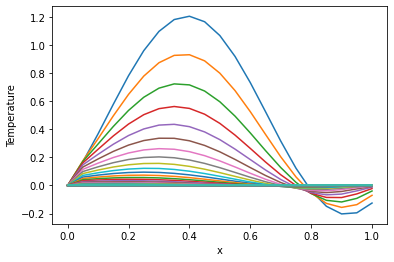

In [5]:
arr4 = np.array([[0,0.169591,0.368541,0.579171,0.782766,0.961237,1.09872,1.18301,1.20661,1.16743,1.06894,0.919894,0.733543,0.52644,0.316987,0.123797,-0.0359669,-0.148107,-0.202661,-0.194779,-0.125164],[0,0.176058,0.333756,0.496439,0.649652,0.779782,0.875265,0.927618,0.932188,0.888571,0.800641,0.676211,0.526337,0.364338,0.204605,0.061334,-0.0527464,-0.127499,-0.156283,-0.136539,-0.0700218],[0,0.172014,0.296072,0.420833,0.535212,0.629045,0.693994,0.724289,0.717238,0.673467,0.596866,0.494241,0.374711,0.248896,0.127975,0.0226938,-0.057594,-0.105754,-0.117507,-0.0918096,-0.039173],[0,0.16145,0.258336,0.353328,0.437985,0.504786,0.547795,0.56319,0.549603,0.508242,0.442783,0.35904,0.264455,0.167433,0.0765935,9.01998e-06,-0.0555159,-0.0850477,-0.0859622,-0.059991,-0.021915],[0,0.147228,0.222354,0.294145,0.356221,0.403066,0.430518,0.436138,0.419426,0.381867,0.3268,0.259115,0.184829,0.110541,0.0428515,-0.012224,-0.0497921,-0.0665149,-0.0613056,-0.0383889,-0.0122601],[0,0.131345,0.189188,0.243025,0.288071,0.320326,0.336921,0.336384,0.318761,0.285619,0.239903,0.185674,0.127751,0.0712802,0.0212802,-0.0178068,-0.0425076,-0.0507155,-0.0427531,-0.0241769,-0.00685882],[0,0.115154,0.159373,0.199414,0.23172,0.25342,0.262586,0.258404,0.241244,0.212633,0.175112,0.132014,0.0871705,0.0445646,0.00798251,-0.0193254,-0.0349521,-0.0377899,-0.0292435,-0.0150364,-0.0038371],[0,0.0995287,0.133087,0.162604,0.185457,0.199616,0.203822,0.197703,0.181801,0.157529,0.127045,0.093056,0.0585834,0.0266896,0.000208747,-0.0185106,-0.027878,-0.027583,-0.0196722,-0.00925722,-0.00214663],[0,0.0849967,0.110272,0.131819,0.147723,0.156571,0.157576,0.15065,0.136407,0.116113,0.0915722,0.0649641,0.0386531,0.0149773,-0.00396074,-0.0164966,-0.021672,-0.0197644,-0.0130446,-0.00565172,-0.00120091],[0,0.0718413,0.090728,0.106286,0.117132,0.122303,0.12134,0.114327,0.101889,0.0851301,0.0655395,0.044858,0.0249233,0.00750641,-0.00584966,-0.0140028,-0.0164779,-0.0139305,-0.00854265,-0.00342634,-0.000671839],[0,0.0601765,0.0741695,0.0852623,0.0924693,0.09515,0.0930664,0.0864034,0.0757533,0.0620622,0.0465468,0.0305855,0.0155966,0.00291083,-0.00635706,-0.0114635,-0.012287,-0.00967505,-0.00553386,-0.00206483,-0.000375854],[0,0.0500032,0.060275,0.0680683,0.0726907,0.0737314,0.071098,0.0650245,0.0560505,0.0449734,0.0327775,0.0205464,0.00936658,0.000228106,-0.00608156,-0.00911971,-0.00900508,-0.00663161,-0.0035507,-0.00123794,-0.000210268],[0,0.0412512,0.0487143,0.0540924,0.0569076,0.0569098,0.0540987,0.0487241,0.0412637,0.0323802,0.022863,0.0135577,0.00529029,-0.00121203,-0.00541116,-0.00708557,-0.00649861,-0.00449214,-0.0022591,-0.000738872,-0.000117632],[0,0.0338084,0.0391682,0.0427971,0.0443725,0.0437545,0.0409979,0.0363478,0.0302173,0.0231511,0.015777,0.0087501,0.00269262,-0.00187003,-0.00458803,-0.00539547,-0.00462512,-0.00301072,-0.00142659,-0.000439267,-6.58083e-05],[0,0.0275417,0.0313396,0.0337168,0.034462,0.0335091,0.0309426,0.0269907,0.0220045,0.016427,0.0107538,0.00548829,0.00109443,-0.00205682,-0.00375524,-0.00403726,-0.00325068,-0.00199857,-0.000894854,-0.00026024,-3.68158e-05],[0,0.0223115,0.0249598,0.0264538,0.0266608,0.0255624,0.023256,0.0199468,0.0159287,0.0115588,0.00722505,0.00331145,0.000159192,-0.00197787,-0.00299016,-0.00297467,-0.00225881,-0.0013152,-0.000557943,-0.000153699,-2.05963e-05],[0,0.0179801,0.0197908,0.0206722,0.020546,0.0194235,0.0174043,0.0146678,0.0114573,0.00805797,0.00477143,0.00188763,-0.000346626,-0.00176517,-0.00232808,-0.00216172,-0.00155338,-0.000858679,-0.000345993,-9.05221e-05,-1.15224e-05],[0,0.0144183,0.0156254,0.0160907,0.0157729,0.0147001,0.0129677,0.0107296,0.00818471,0.00555901,0.00308514,0.00097966,-0.000582749,-0.00150034,-0.0017786,-0.00155153,-0.00105817,-0.000556595,-0.000213503,-5.31799e-05,-6.44609e-06],[0,0.0115081,0.012286,0.0124762,0.0120621,0.0110803,0.00961816,0.0078055,0.00580339,0.00378953,0.00194175,0.000419694,-0.000656507,-0.00123114,-0.00133679,-0.00110108,-0.000714591,-0.000358412,-0.000131156,-3.11709e-05,-3.60621e-06],[0,0.00914446,0.00962152,0.00963676,0.0091888,0.00831747,0.00710018,0.00564508,0.00408141,0.00254774,0.00117874,9.01786e-05,-0.000638472,-0.000983218,-0.000990403,-0.000773401,-0.000478722,-0.000229401,-8.02406e-05,-1.82327e-05,-2.01746e-06],[0,0.00723521,0.00750545,0.0074153,0.00697276,0.00621716,0.00521563,0.00405714,0.00284452,0.00168496,0.000679302,-9.01929e-05,-0.00057377,-0.000768218,-0.000724436,-0.000538124,-0.000318349,-0.000146012,-4.89061e-05,-1.06445e-05,-1.12865e-06],[0,0.00570097,0.00583229,0.00568438,0.00527036,0.00462703,0.00381154,0.00289632,0.0019625,0.00109227,0.000360161,-0.000176847,-0.000490213,-0.000589351,-0.000523817,-0.000371175,-0.000210261,-9.2458e-05,-2.97048e-05,-6.20358e-06,-6.31411e-07],[0,0.00447409,0.00451498,0.00434102,0.00396769,0.00342815,0.00277033,0.00205262,0.00133851,0.000690398,0.000162533,-0.00020692,-0.000404067,-0.000445093,-0.000374807,-0.000253966,-0.000137995,-5.82681e-05,-1.79846e-05,-3.60962e-06,-3.53237e-07],[0,0.00349754,0.0034821,0.00330255,0.00297484,0.00252809,0.00200199,0.00144316,0.000900898,0.00042204,4.53473e-05,-0.000204767,-0.000324096,-0.000331565,-0.000265626,-0.000172477,-9.00353e-05,-3.65592e-05,-1.08564e-05,-2.09718e-06,-1.97615e-07],[0,0.0027237,0.00267551,0.00250288,0.00222113,0.00185532,0.00143789,0.00100581,0.000596965,0.000246095,-1.97369e-05,-0.000185947,-0.00025435,-0.000244003,-0.000186595,-0.000116323,-5.84227e-05,-2.28441e-05,-6.5355e-06,-1.21678e-06,-1.10554e-07],[0,0.00211311,0.00204812,0.00188948,0.00165128,0.00135468,0.00102598,0.000694193,0.000388176,0.000133328,-5.20019e-05,-0.000160054,-0.000196043,-0.000177608,-0.000130012,-7.79453e-05,-3.77161e-05,-1.42196e-05,-3.92426e-06,-7.05068e-07,-6.18484e-08],[0,0.00163332,0.00156202,0.0014208,0.0012222,0.000983863,0.000726889,0.000473867,0.000246531,6.31341e-05,-6.43487e-05,-0.000132725,-0.000148798,-0.000128,-8.9904e-05,-5.19139e-05,-2.42322e-05,-8.81944e-06,-2.3507e-06,-4.08067e-07,-3.46005e-08],[0,0.00125783,0.00118683,0.00106408,0.000900474,0.000710532,0.000511034,0.000319406,0.000151827,2.11451e-05,-6.52359e-05,-0.000107029,-0.000111439,-9.14126e-05,-6.17315e-05,-3.43806e-05,-1.54992e-05,-5.45177e-06,-1.40497e-06,-2.35911e-07,-1.93569e-08],[0,0.000965113,0.000898355,0.000793644,0.000660277,0.000510071,0.000356252,0.000212133,8.95958e-05,-2.54075e-06,-6.00719e-05,-8.44241e-05,-8.248e-05,-6.47381e-05,-4.21085e-05,-2.26481e-05,-9.87181e-06,-3.35942e-06,-8.37962e-07,-1.36242e-07,-1.0829e-08],[0,0.000737813,0.0006774,0.000589442,0.000481744,0.000363829,0.00024603,0.000138412,4.95639e-05,-1.4654e-05,-5.22036e-05,-6.5399e-05,-6.04032e-05,-4.54928e-05,-2.85461e-05,-1.48448e-05,-6.2627e-06,-2.06398e-06,-4.98801e-07,-7.86049e-08,-6.0582e-09],[0,0.00056198,0.000508807,0.000435876,0.000349651,0.000257736,0.000168129,8.83512e-05,2.45001e-05,-1.96974e-05,-4.36109e-05,-4.98924e-05,-4.38131e-05,-3.17386e-05,-1.92398e-05,-9.68433e-06,-3.95826e-06,-1.26455e-06,-2.96365e-07,-4.53092e-08,-3.38921e-09],[0,0.000426474,0.000380662,0.000320868,0.000252383,0.000181224,0.00011352,5.48241e-05,9.36737e-06,-2.06261e-05,-3.5388e-05,-3.7563e-05,-3.15022e-05,-2.1994e-05,-1.28968e-05,-6.28973e-06,-2.49297e-06,-7.72725e-07,-1.75779e-07,-2.60944e-08,-1.89606e-09],[0,0.000322439,0.000283639,0.000235102,0.000181113,0.00012639,7.55844e-05,3.27343e-05,6.96969e-07,-1.93344e-05,-2.80718e-05,-2.79536e-05,-2.24684e-05,-1.51453e-05,-8.6005e-06,-4.06788e-06,-1.56488e-06,-4.71014e-07,-1.04086e-07,-1.50159e-08,-1.06073e-09],[0,0.000242865,0.000210467,0.000171421,0.000129163,8.73574e-05,4.94957e-05,1.84664e-05,-3.86905e-06,-1.70001e-05,-2.18621e-05,-2.05877e-05,-1.5906e-05,-1.03674e-05,-5.70754e-06,-2.62045e-06,-9.79214e-07,-2.86433e-07,-6.15377e-08,-8.63418e-09,-5.93417e-10],[0,0.00018223,0.000155504,0.000124352,9.15022e-05,5.97742e-05,3.17577e-05,9.47858e-06,-5.90928e-06,-1.43263e-05,-1.67656e-05,-1.50214e-05,-1.11822e-05,-7.05719e-06,-3.77026e-06,-1.68169e-06,-6.10907e-07,-1.73797e-07,-3.63286e-08,-4.96103e-09,-3.31981e-10],[0,0.000136201,0.000114388,8.97236e-05,6.43571e-05,4.04357e-05,1.98545e-05,4.00101e-06,-6.46169e-06,-1.17078e-05,-1.26883e-05,-1.08668e-05,-7.81031e-06,-4.77859e-06,-2.47968e-06,-1.07537e-06,-3.8005e-07,-1.05232e-07,-2.14165e-08,-2.84853e-09,-1.85724e-10],[0,0.000101394,8.37574e-05,6.43716e-05,4.49111e-05,2.69949e-05,1.19887e-05,8.14949e-07,-6.19393e-06,-9.34481e-06,-9.49205e-06,-7.79976e-06,-5.42203e-06,-3.21956e-06,-1.62412e-06,-6.85325e-07,-2.35796e-07,-6.35886e-08,-1.26087e-08,-1.63449e-09,-1.03901e-10],[0,7.51739e-05,6.1037e-05,4.59051e-05,3.10715e-05,1.77429e-05,6.8865e-06,-9.08482e-07,-5.52361e-06,-7.31877e-06,-7.02837e-06,-5.55786e-06,-3.74251e-06,-2.15891e-06,-1.05956e-06,-4.3534e-07,-1.45921e-07,-3.83515e-08,-7.41388e-09,-9.37289e-10,-5.81267e-11],[0,5.55006e-05,4.42585e-05,3.25256e-05,2.12911e-05,1.14431e-05,3.65247e-06,-1.72498e-06,-4.70231e-06,-5.64263e-06,-5.15624e-06,-3.93369e-06,-2.56928e-06,-1.44118e-06,-6.88657e-07,-2.7569e-07,-9.00823e-08,-2.30885e-08,-4.35409e-09,-5.37162e-10,-3.25184e-11],[0,4.07985e-05,3.19248e-05,2.28861e-05,1.44318e-05,7.20627e-06,1.66336e-06,-2.00085e-06,-3.87362e-06,-4.29253e-06,-3.75112e-06,-2.76663e-06,-1.75482e-06,-9.57953e-07,-4.45992e-07,-1.74076e-07,-5.54816e-08,-1.38758e-08,-2.55418e-09,-3.07673e-10,-1.81921e-11],[0,2.98567e-05,2.29014e-05,1.59825e-05,9.66111e-06,4.39789e-06,4.89805e-07,-1.97263e-06,-3.11262e-06,-3.22771e-06,-2.70796e-06,-1.93431e-06,-1.19274e-06,-6.34161e-07,-2.87851e-07,-1.09606e-07,-3.40952e-08,-8.3253e-09,-1.49669e-09,-1.76132e-10,-1.01774e-11],[0,2.17478e-05,1.63326e-05,1.10694e-05,6.37358e-06,2.56825e-06,-1.60515e-07,-1.78922e-06,-2.45232e-06,-2.40222e-06,-1.94103e-06,-1.34487e-06,-8.06957e-07,-4.18183e-07,-1.8518e-07,-6.88288e-08,-2.09081e-08,-4.9872e-09,-8.76106e-10,-1.00777e-10,-5.69366e-12],[0,1.57643e-05,1.15755e-05,7.59663e-06,4.13137e-06,1.40143e-06,-4.83927e-07,-1.54116e-06,-1.90109e-06,-1.77147e-06,-1.38214e-06,-9.30131e-07,-5.43562e-07,-2.7474e-07,-1.18759e-07,-4.31112e-08,-1.27954e-08,-2.98303e-09,-5.12328e-10,-5.76332e-11,-3.18526e-12],[0,1.1369e-05,8.14916e-06,5.15992e-06,2.61996e-06,6.77415e-07,-6.10214e-07,-1.28096e-06,-1.45377e-06,-1.29549e-06,-9.78114e-07,-6.40089e-07,-3.6461e-07,-1.79861e-07,-7.59349e-08,-2.69368e-08,-7.81539e-09,-1.78168e-09,-2.99313e-10,-3.2944e-11,-1.78197e-12],[0,8.15539e-06,5.6956e-06,3.46379e-06,1.61493e-06,2.44556e-07,-6.23548e-07,-1.03685e-06,-1.09867e-06,-9.40208e-07,-6.88195e-07,-4.38408e-07,-2.43597e-07,-1.17348e-07,-4.84147e-08,-1.67911e-08,-4.76471e-09,-1.06268e-09,-1.74705e-10,-1.88227e-11,-9.96904e-13],[0,5.81708e-06,3.94935e-06,2.29352e-06,9.57331e-07,-5.40574e-10,-5.77236e-07,-8.22072e-07,-8.21747e-07,-6.77586e-07,-4.81577e-07,-2.98923e-07,-1.62128e-07,-7.63142e-08,-3.07839e-08,-1.04432e-08,-2.89966e-09,-6.32989e-10,-1.01883e-10,-1.07498e-11,-5.57708e-13],[0,4.12427e-06,2.71464e-06,1.49397e-06,5.3545e-07,-1.27456e-07,-5.04015e-07,-6.40915e-07,-6.08977e-07,-4.85151e-07,-3.3526e-07,-2.02943e-07,-1.07511e-07,-4.94743e-08,-1.95222e-08,-6.48108e-09,-1.76162e-09,-3.76563e-10,-5.93655e-11,-6.13672e-12,-3.12005e-13],[0,2.90527e-06,1.84777e-06,9.53737e-07,2.71477e-07,-1.82328e-07,-4.23147e-07,-4.92699e-07,-4.47555e-07,-3.45264e-07,-2.32262e-07,-1.37217e-07,-7.10444e-08,-3.19783e-08,-1.23491e-08,-4.01383e-09,-1.06847e-09,-2.23741e-10,-3.45633e-11,-3.50186e-12,-1.74548e-13],[0,2.03235e-06,1.24381e-06,5.9336e-07,1.11712e-07,-1.95212e-07,-3.45257e-07,-3.74223e-07,-3.26435e-07,-2.44317e-07,-1.60163e-07,-9.24144e-08,-4.67893e-08,-2.06102e-08,-7.79278e-09,-2.48086e-09,-6.47032e-10,-1.32784e-10,-2.01075e-11,-1.99753e-12,-9.76493e-14],[0,1.41097e-06,8.26542e-07,3.56557e-07,1.94948e-08,-1.85263e-07,-2.75585e-07,-2.81263e-07,-2.36439e-07,-1.71962e-07,-1.09959e-07,-6.20071e-08,-3.07158e-08,-1.32468e-08,-4.90608e-09,-1.53042e-09,-3.91226e-10,-7.87138e-11,-1.1689e-11,-1.13901e-12,-5.4629e-14],[0,9.71422e-07,5.40944e-07,2.03767e-07,-2.99035e-08,-1.64349e-07,-2.1613e-07,-2.09433e-07,-1.70153e-07,-1.20424e-07,-7.51743e-08,-4.14554e-08,-2.01017e-08,-8.4915e-09,-3.08178e-09,-9.42359e-10,-2.36207e-10,-4.66105e-11,-6.79018e-12,-6.49242e-13,-3.05617e-14],[0,6.62612e-07,3.47511e-07,1.07408e-07,-5.2932e-08,-1.39553e-07,-1.67045e-07,-1.54646e-07,-1.21718e-07,-8.39295e-08,-5.11873e-08,-2.76198e-08,-1.31162e-08,-5.42934e-09,-1.93166e-09,-5.79225e-10,-1.42411e-10,-2.75716e-11,-3.94171e-12,-3.69945e-13,-1.70974e-14],[0,4.47242e-07,2.18072e-07,4.84288e-08,-6.03529e-08,-1.14868e-07,-1.27517e-07,-1.13327e-07,-8.65818e-08,-5.82291e-08,-3.47203e-08,-1.83409e-08,-8.53371e-09,-3.4629e-09,-1.20824e-09,-3.55412e-10,-8.57439e-11,-1.62929e-11,-2.28665e-12,-2.10728e-13,-9.565e-15],[0,2.98242e-07,1.32666e-07,1.37985e-08,-5.9067e-08,-9.23514e-08,-9.63022e-08,-8.24722e-08,-6.1264e-08,-4.02239e-08,-2.34641e-08,-1.21404e-08,-5.53691e-09,-2.20344e-09,-7.54228e-10,-2.1772e-10,-5.15576e-11,-9.61863e-12,-1.32566e-12,-1.19997e-13,-5.35105e-15],[0,1.96072e-07,7.72584e-08,-5.29183e-09,-5.33876e-08,-7.28785e-08,-7.20423e-08,-5.96335e-08,-4.31341e-08,-2.76715e-08,-1.58011e-08,-8.01152e-09,-3.58294e-09,-1.39883e-09,-4.69905e-10,-1.33158e-10,-3.09622e-11,-5.67307e-12,-7.68062e-13,-6.83099e-14,-2.99359e-15],[0,1.26709e-07,4.20558e-08,-1.47207e-08,-4.59209e-08,-5.66407e-08,-5.34394e-08,-4.2863e-08,-3.02264e-08,-1.89612e-08,-1.06045e-08,-5.27122e-09,-2.31258e-09,-8.86074e-10,-2.92216e-10,-8.13145e-11,-1.85712e-11,-3.34293e-12,-4.44732e-13,-3.88747e-14,-1.67474e-15],[0,8.01503e-08,2.0285e-08,-1.83508e-08,-3.81668e-08,-4.34587e-08,-3.9338e-08,-3.06376e-08,-2.10867e-08,-1.29436e-08,-7.09374e-09,-3.45835e-09,-1.48893e-09,-5.60075e-10,-1.81389e-10,-4.95815e-11,-1.11258e-11,-1.96814e-12,-2.57365e-13,-2.2117e-14,-9.36916e-16],[0,4.93077e-08,7.30597e-09,-1.86735e-08,-3.09251e-08,-3.29779e-08,-2.87561e-08,-2.17849e-08,-1.4648e-08,-8.80381e-09,-4.73033e-09,-2.26272e-09,-9.56343e-10,-3.53285e-10,-1.12398e-10,-3.01887e-11,-6.65779e-12,-1.15775e-12,-1.48852e-13,-1.25795e-14,-5.24149e-16],[0,2.91941e-08,-2.61466e-11,-1.72589e-08,-2.45651e-08,-2.47836e-08,-2.08861e-08,-1.5414e-08,-1.0134e-08,-5.9672e-09,-3.14477e-09,-1.47652e-09,-6.12839e-10,-2.22401e-10,-6.95302e-11,-1.83554e-11,-3.97967e-12,-6.8048e-13,-8.60449e-14,-7.15296e-15,-2.9323e-16],[0,1.63266e-08,-3.81642e-09,-1.50665e-08,-1.92021e-08,-1.84657e-08,-1.50799e-08,-1.08555e-08,-6.98381e-09,-4.03103e-09,-2.08456e-09,-9.61022e-10,-3.91837e-10,-1.39736e-10,-4.29413e-11,-1.11454e-11,-2.37628e-12,-3.99642e-13,-4.97127e-14,-4.06625e-15,-1.64045e-16],[0,8.29308e-09,-5.45391e-09,-1.26587e-08,-1.481e-08,-1.36523e-08,-1.08276e-08,-7.61141e-09,-4.79498e-09,-2.71431e-09,-1.37788e-09,-6.23948e-10,-2.49991e-10,-8.76332e-11,-2.64782e-11,-6.75862e-12,-1.41742e-12,-2.34527e-13,-2.8707e-14,-2.31096e-15,-9.17733e-17],[0,3.4381e-09,-5.83958e-09,-1.03441e-08,-1.12927e-08,-1.00227e-08,-7.73402e-09,-5.31437e-09,-3.28041e-09,-1.82201e-09,-9.08286e-10,-4.0413e-10,-1.59159e-10,-5.48582e-11,-1.63018e-11,-4.09328e-12,-8.44625e-13,-1.37527e-13,-1.65689e-14,-1.31306e-15,-5.13417e-17],[0,6.37072e-10,-5.5455e-09,-8.27446e-09,-8.52537e-09,-7.31077e-09,-5.49737e-09,-3.69568e-09,-2.23655e-09,-1.21938e-09,-5.97154e-10,-2.61146e-10,-1.01124e-10,-3.42809e-11,-1.00215e-11,-2.476e-12,-5.02812e-13,-8.05882e-14,-9.55857e-15,-7.45889e-16,-2.87226e-17],[0,-8.65157e-10,-4.92507e-09,-6.50704e-09,-6.37985e-09,-5.3009e-09,-3.88954e-09,-2.56018e-09,-1.51982e-09,-8.13714e-10,-3.91597e-10,-1.68371e-10,-6.41243e-11,-2.13856e-11,-6.15187e-12,-1.49593e-12,-2.99045e-13,-4.71899e-14,-5.51175e-15,-4.23608e-16,-1.60686e-17],[0,-1.5689e-09,-4.18865e-09,-5.04565e-09,-4.73683e-09,-3.82232e-09,-2.73992e-09,-1.76705e-09,-1.02949e-09,-5.41485e-10,-2.56164e-10,-1.08319e-10,-4.05845e-11,-1.33191e-11,-3.77113e-12,-9.02759e-13,-1.77693e-13,-2.7614e-14,-3.17681e-15,-2.40523e-16,-8.98943e-18],[0,-1.80038e-09,-3.45476e-09,-3.86617e-09,-3.49196e-09,-2.74191e-09,-1.92207e-09,-1.21534e-09,-6.95219e-10,-3.59357e-10,-1.67169e-10,-6.9538e-11,-2.56386e-11,-8.28196e-12,-2.30858e-12,-5.44182e-13,-1.05492e-13,-1.61482e-14,-1.83022e-15,-1.36538e-16,-5.02905e-18],[0,-1.76822e-09,-2.78437e-09,-2.9321e-09,-2.55753e-09,-1.95733e-09,-1.343e-09,-8.33052e-10,-4.68093e-10,-2.37863e-10,-1.08839e-10,-4.455e-11,-1.61676e-11,-5.1418e-12,-1.41139e-12,-3.27675e-13,-6.25734e-14,-9.43712e-15,-1.05398e-15,-7.7493e-17,-2.81346e-18],[0,-1.60255e-09,-2.20357e-09,-2.20371e-09,-1.86195e-09,-1.39084e-09,-9.34832e-10,-5.69154e-10,-3.14266e-10,-1.57045e-10,-7.07024e-11,-2.84845e-11,-1.01774e-11,-3.18743e-12,-8.61767e-13,-1.97099e-13,-3.70849e-14,-5.51168e-15,-6.06707e-16,-4.39725e-17,-1.57396e-18],[0,-1.38194e-09,-1.7182e-09,-1.64299e-09,-1.34802e-09,-9.84019e-10,-6.48356e-10,-3.87635e-10,-2.10407e-10,-1.03432e-10,-4.58283e-11,-1.81773e-11,-6.3958e-12,-1.97301e-12,-5.25524e-13,-1.18434e-13,-2.19609e-14,-3.2171e-15,-3.49103e-16,-2.49467e-17,-8.80538e-19],[0,-1.1516e-09,-1.32315e-09,-1.2161e-09,-9.70898e-10,-6.9332e-10,-4.48105e-10,-2.63207e-10,-1.40494e-10,-6.79589e-11,-2.96423e-11,-1.1578e-11,-4.01269e-12,-1.21954e-12,-3.20088e-13,-7.10943e-14,-1.29945e-14,-1.87668e-15,-2.00797e-16,-1.41502e-17,-4.92609e-19],[0,-9.35712e-10,-1.0081e-09,-8.94204e-10,-6.95884e-10,-4.8658e-10,-3.08667e-10,-1.78197e-10,-9.35681e-11,-4.45486e-11,-1.91335e-11,-7.3611e-12,-2.5135e-12,-7.52771e-13,-1.94731e-13,-4.26355e-14,-7.68303e-15,-1.09412e-15,-1.15451e-16,-8.02468e-18,-2.75585e-19],[0,-7.4554e-10,-7.6095e-10,-6.53543e-10,-4.96489e-10,-3.40205e-10,-2.11934e-10,-1.20302e-10,-6.2159e-11,-2.9137e-11,-1.23256e-11,-4.67177e-12,-1.57197e-12,-4.64026e-13,-1.18332e-13,-2.55444e-14,-4.53921e-15,-6.37527e-16,-6.63558e-17,-4.55004e-18,-1.54174e-19],[0,-5.84707e-10,-5.69668e-10,-4.74985e-10,-3.52697e-10,-2.3701e-10,-1.45064e-10,-8.0994e-11,-4.11925e-11,-1.90155e-11,-7.92451e-12,-2.95985e-12,-9.81641e-13,-2.85661e-13,-7.18267e-14,-1.52905e-14,-2.67985e-15,-3.71275e-16,-3.81244e-17,-2.57944e-18,-8.62509e-20],[0,-4.52595e-10,-4.23325e-10,-3.43418e-10,-2.49521e-10,-1.64547e-10,-9.89963e-11,-5.43852e-11,-2.72335e-11,-1.23836e-11,-5.08529e-12,-1.8721e-12,-6.12095e-13,-1.75632e-13,-4.3551e-14,-9.14443e-15,-1.581e-15,-2.16105e-16,-2.18965e-17,-1.46204e-18,-4.82523e-20],[0,-3.4645e-10,-3.12473e-10,-2.47086e-10,-1.75839e-10,-1.13861e-10,-6.73625e-11,-3.64243e-11,-1.79634e-11,-8.0481e-12,-3.2573e-12,-1.18216e-12,-3.81119e-13,-1.07849e-13,-2.63785e-14,-5.46403e-15,-9.32081e-16,-1.25721e-16,-1.25719e-17,-8.28554e-19,-2.69943e-20],[0,-2.6265e-10,-2.29238e-10,-1.76964e-10,-1.23453e-10,-7.85373e-11,-4.57088e-11,-2.43342e-11,-1.18223e-11,-5.21995e-12,-2.08267e-12,-7.453e-13,-2.36971e-13,-6.61459e-14,-1.59608e-14,-3.26212e-15,-5.49138e-16,-7.31028e-17,-7.21572e-18,-4.69473e-19,-1.51017e-20],[0,-1.97433e-10,-1.67227e-10,-1.26195e-10,-8.63646e-11,-5.40057e-11,-3.09317e-11,-1.62177e-11,-7.76371e-12,-3.37902e-12,-1.32931e-12,-4.69151e-13,-1.47142e-13,-4.05205e-14,-9.64771e-15,-1.94593e-15,-3.23313e-16,-4.24861e-17,-4.14018e-18,-2.65969e-19,-8.4485e-21],[0,-1.47289e-10,-1.21352e-10,-8.96229e-11,-6.02122e-11,-3.70266e-11,-2.08769e-11,-1.0783e-11,-5.08767e-12,-2.18318e-12,-8.47012e-13,-2.94874e-13,-9.12428e-14,-2.4794e-14,-5.82597e-15,-1.15985e-15,-1.90233e-16,-2.46805e-17,-2.37477e-18,-1.50655e-19,-4.72643e-21],[0,-1.09131e-10,-8.76311e-11,-6.34022e-11,-4.18414e-11,-2.53129e-11,-1.40547e-11,-7.15318e-12,-3.32716e-12,-1.40794e-12,-5.38808e-13,-1.85064e-13,-5.65065e-14,-1.51541e-14,-3.51477e-15,-6.90771e-16,-1.11861e-16,-1.43304e-17,-1.36173e-18,-8.53235e-20,-2.64416e-21],[0,-8.03555e-11,-6.29906e-11,-4.46866e-11,-2.89837e-11,-1.7257e-11,-9.43845e-12,-4.73469e-12,-2.17149e-12,-9.06347e-13,-3.42197e-13,-1.15979e-13,-3.49502e-14,-9.25207e-15,-2.11847e-15,-4.11086e-16,-6.57361e-17,-8.31695e-18,-7.80603e-19,-4.83159e-20,-1.47925e-21],[0,-5.88297e-11,-4.50831e-11,-3.1384e-11,-2.0016e-11,-1.17334e-11,-6.32321e-12,-3.12711e-12,-1.41447e-12,-5.82426e-13,-2.16987e-13,-7.25824e-14,-2.15906e-14,-5.64264e-15,-1.27571e-15,-2.44458e-16,-3.86075e-17,-4.82479e-18,-4.47344e-19,-2.73557e-20,-8.27552e-22],[0,-4.28426e-11,-3.21345e-11,-2.19666e-11,-1.37824e-11,-7.95701e-12,-4.2263e-12,-2.06101e-12,-9.19608e-13,-3.73631e-13,-1.3738e-13,-4.53615e-14,-1.33216e-14,-3.43773e-15,-7.67534e-16,-1.45264e-16,-2.26614e-17,-2.79772e-18,-2.56288e-19,-1.54862e-20,-4.62966e-22],[0,-3.10465e-11,-2.28162e-11,-1.5325e-11,-9.4632e-12,-5.38244e-12,-2.81836e-12,-1.35558e-12,-5.96769e-13,-2.39286e-13,-8.68479e-14,-2.83115e-14,-8.20991e-15,-2.09228e-15,-4.61389e-16,-8.62587e-17,-1.3294e-17,-1.62162e-18,-1.46789e-19,-8.76559e-21,-2.59002e-22],[0,-2.23946e-11,-1.61401e-11,-1.0658e-11,-6.47974e-12,-3.63198e-12,-1.87531e-12,-8.89825e-13,-3.86567e-13,-1.52997e-13,-5.48227e-14,-1.76471e-14,-5.05385e-15,-1.27214e-15,-2.7712e-16,-5.1185e-17,-7.79441e-18,-9.39532e-19,-8.40508e-20,-4.96088e-21,-1.44896e-22],[0,-1.60838e-11,-1.13771e-11,-7.38986e-12,-4.42508e-12,-2.44497e-12,-1.24514e-12,-5.82957e-13,-2.49963e-13,-9.76692e-14,-3.45573e-14,-1.09858e-14,-3.10755e-15,-7.72731e-16,-1.66307e-16,-3.03519e-17,-4.56747e-18,-5.44127e-19,-4.81142e-20,-2.80723e-21,-8.10609e-23],[0,-1.15041e-11,-7.99267e-12,-5.10894e-12,-3.01415e-12,-1.64209e-12,-8.24994e-13,-3.81192e-13,-1.61354e-13,-6.22524e-14,-2.17527e-14,-6.83041e-15,-1.90871e-15,-4.68931e-16,-9.9725e-17,-1.79862e-17,-2.67509e-18,-3.15005e-19,-2.75354e-20,-1.58834e-21,-4.53487e-23],[0,-8.19647e-12,-5.59682e-12,-3.52211e-12,-2.04796e-12,-1.10038e-12,-5.45504e-13,-2.48797e-13,-1.03981e-13,-3.96182e-14,-1.3674e-14,-4.24166e-15,-1.1711e-15,-2.84307e-16,-5.97522e-17,-1.06515e-17,-1.56594e-18,-1.82292e-19,-1.57543e-20,-8.98569e-22,-2.53699e-23],[0,-5.8183e-12,-3.90694e-12,-2.42153e-12,-1.3881e-12,-7.35763e-13,-3.59982e-13,-1.62092e-13,-6.68983e-14,-2.51761e-14,-8.58412e-15,-2.63093e-15,-7.17791e-16,-1.72215e-16,-3.57741e-17,-6.30382e-18,-9.16207e-19,-1.05452e-19,-9.01153e-21,-5.08285e-22,-1.4193e-23],[0,-4.11561e-12,-2.71911e-12,-1.66047e-12,-9.38634e-13,-4.90912e-13,-2.37094e-13,-1.05417e-13,-4.29714e-14,-1.59754e-14,-5.38184e-15,-1.62996e-15,-4.39497e-16,-1.04224e-16,-2.14021e-17,-3.72843e-18,-5.35792e-19,-6.09792e-20,-5.15338e-21,-2.87481e-22,-7.94012e-24],[0,-2.90141e-12,-1.88695e-12,-1.1357e-12,-6.33248e-13,-3.26863e-13,-1.55861e-13,-6.84404e-14,-2.7559e-14,-1.01228e-14,-3.36987e-15,-1.00868e-15,-2.68831e-16,-6.30217e-17,-1.27945e-17,-2.20386e-18,-3.13176e-19,-3.52494e-20,-2.94634e-21,-1.62578e-22,-4.44202e-24],[0,-2.03882e-12,-1.30581e-12,-7.74848e-13,-4.26266e-13,-2.17194e-13,-1.02271e-13,-4.4359e-14,-1.76475e-14,-6.40543e-15,-2.10743e-15,-6.23514e-16,-1.64277e-16,-3.80753e-17,-7.64323e-18,-1.30192e-18,-1.82968e-19,-2.0369e-20,-1.68411e-21,-9.19311e-23,-2.48505e-24],[0,-1.42824e-12,-9.01206e-13,-5.27379e-13,-2.86314e-13,-1.44035e-13,-6.6986e-14,-2.87036e-14,-1.12837e-14,-4.04768e-15,-1.31633e-15,-3.85006e-16,-1.00291e-16,-2.29845e-17,-4.56272e-18,-7.68649e-19,-1.06847e-19,-1.17662e-20,-9.62412e-22,-5.19774e-23,-1.39024e-24],[0,-9.97534e-13,-6.20342e-13,-3.58106e-13,-1.91904e-13,-9.53348e-14,-4.37975e-14,-1.85435e-14,-7.20418e-15,-2.5544e-15,-8.21218e-16,-2.3748e-16,-6.11696e-17,-1.38635e-17,-2.72189e-18,-4.53549e-19,-6.23663e-20,-6.79449e-21,-5.49862e-22,-2.93845e-23,-7.77755e-25],[0,-6.9471e-13,-4.25928e-13,-2.42612e-13,-1.28359e-13,-6.29819e-14,-2.85869e-14,-1.19609e-14,-4.59299e-15,-1.60993e-15,-5.11735e-16,-1.4633e-16,-3.72746e-17,-8.3554e-18,-1.62264e-18,-2.67472e-19,-3.63869e-20,-3.92224e-21,-3.14088e-22,-1.66102e-23,-4.35108e-25],[0,-4.82472e-13,-2.91724e-13,-1.64002e-13,-8.56829e-14,-4.15317e-14,-1.86274e-14,-7.70318e-15,-2.92414e-15,-1.01339e-15,-3.18519e-16,-9.0074e-17,-2.26935e-17,-5.03179e-18,-9.6669e-19,-1.5765e-19,-2.12203e-20,-2.26345e-21,-1.79372e-22,-9.38827e-24,-2.43417e-25],[0,-3.34175e-13,-1.99328e-13,-1.10623e-13,-5.70831e-14,-2.73378e-14,-1.21178e-14,-4.9536e-15,-1.85911e-15,-6.37092e-16,-1.98034e-16,-5.53899e-17,-1.3804e-17,-3.02793e-18,-5.75533e-19,-9.28702e-20,-1.23701e-20,-1.30578e-21,-1.02416e-22,-5.3058e-24,-1.36177e-25],[0,-2.30859e-13,-1.3588e-13,-7.44615e-14,-3.79565e-14,-1.79632e-14,-7.87036e-15,-3.18077e-15,-1.1804e-15,-4.00038e-16,-1.22989e-16,-3.40281e-17,-8.38953e-18,-1.82072e-18,-3.42434e-19,-5.46802e-20,-7.20796e-21,-7.53064e-22,-5.84645e-23,-2.99828e-24,-7.61831e-26],[0,-1.59084e-13,-9.24194e-14,-5.00178e-14,-2.51913e-14,-1.1783e-14,-5.10366e-15,-2.03947e-15,-7.48485e-16,-2.5089e-16,-7.6301e-17,-2.08848e-17,-5.09451e-18,-1.09402e-18,-2.03616e-19,-3.21781e-20,-4.19831e-21,-4.34173e-22,-3.33679e-23,-1.69414e-24,-4.26199e-26],[0,-1.09356e-13,-6.27211e-14,-3.35311e-14,-1.66886e-14,-7.71612e-15,-3.30445e-15,-1.30584e-15,-4.73999e-16,-1.57165e-16,-4.72863e-17,-1.2806e-17,-3.09107e-18,-6.56891e-19,-1.20999e-19,-1.89265e-20,-2.44435e-21,-2.50244e-22,-1.90405e-23,-9.57158e-25,-2.38433e-26],[0,-7.49944e-14,-4.24749e-14,-2.24348e-14,-1.1036e-14,-5.04461e-15,-2.13629e-15,-8.34951e-16,-2.99794e-16,-9.83409e-17,-2.92748e-17,-7.84509e-18,-1.87397e-18,-3.94145e-19,-7.18611e-20,-1.11267e-20,-1.42259e-21,-1.44191e-22,-1.08629e-23,-5.40725e-25,-1.33389e-26],[0,-5.13113e-14,-2.87041e-14,-1.4982e-14,-7.28521e-15,-3.29274e-15,-1.37905e-15,-5.33144e-16,-1.8938e-16,-6.14645e-17,-1.81056e-17,-4.80166e-18,-1.1352e-18,-2.3633e-19,-4.2653e-20,-6.5381e-21,-8.27617e-22,-8.30592e-23,-6.19625e-24,-3.05442e-25,-7.46233e-27],[0,-3.50285e-14,-1.93585e-14,-9.9863e-15,-4.80097e-15,-2.14587e-15,-8.88938e-16,-3.39979e-16,-1.19486e-16,-3.83741e-17,-1.11867e-17,-2.9363e-18,-6.87133e-19,-1.41608e-19,-2.5302e-20,-3.83999e-21,-4.81299e-22,-4.78316e-23,-3.53372e-24,-1.7252e-25,-4.17473e-27],[0,-2.38607e-14,-1.30297e-14,-6.6443e-15,-3.15855e-15,-1.3963e-15,-5.72198e-16,-2.16518e-16,-7.52984e-17,-2.39322e-17,-6.90512e-18,-1.79405e-18,-4.15604e-19,-8.47949e-20,-1.50009e-20,-2.25426e-21,-2.79794e-22,-2.75373e-23,-2.01491e-24,-9.74345e-26,-2.33551e-27],[0,-1.62188e-14,-8.75295e-15,-4.41285e-15,-2.0746e-15,-9.07192e-16,-3.67806e-16,-1.37716e-16,-4.73967e-17,-1.49097e-17,-4.2582e-18,-1.09521e-18,-2.51184e-19,-5.07421e-20,-8.88866e-21,-1.32276e-21,-1.62594e-22,-1.58493e-23,-1.14868e-24,-5.50233e-26,-1.30658e-27],[0,-1.10016e-14,-5.86882e-15,-2.92572e-15,-1.36045e-15,-5.8854e-16,-2.36101e-16,-8.74844e-17,-2.98e-17,-9.27909e-18,-2.62346e-18,-6.68037e-19,-1.517e-19,-3.03452e-20,-5.26405e-21,-7.75822e-22,-9.44531e-23,-9.1198e-24,-6.54741e-25,-3.10701e-26,-7.30954e-28],[0,-7.4475e-15,-3.92773e-15,-1.93645e-15,-8.90734e-16,-3.81261e-16,-1.51356e-16,-5.55066e-17,-1.87153e-17,-5.76899e-18,-1.61483e-18,-4.07144e-19,-9.15516e-20,-1.81359e-20,-3.11582e-21,-4.54832e-22,-5.48498e-23,-5.24621e-24,-3.73133e-25,-1.75429e-26,-4.08925e-28],[0,-5.03163e-15,-2.62389e-15,-1.27954e-15,-5.82297e-16,-2.46634e-16,-9.69015e-17,-3.51753e-17,-1.17409e-17,-3.58312e-18,-9.93084e-19,-2.4794e-19,-5.52127e-20,-1.08323e-20,-1.84331e-21,-2.66534e-22,-3.18408e-23,-3.01714e-24,-2.1261e-25,-9.90427e-27,-2.28769e-28],[0,-3.39289e-15,-1.74977e-15,-8.44093e-16,-3.80089e-16,-1.59322e-16,-6.1959e-17,-2.22648e-17,-7.35762e-18,-2.2233e-18,-6.10188e-19,-1.5087e-19,-3.32743e-20,-6.46607e-21,-1.08993e-21,-1.56124e-22,-1.84777e-23,-1.73474e-24,-1.21124e-25,-5.59125e-27,-1.27983e-28],[0,-2.28356e-15,-1.16483e-15,-5.55946e-16,-2.47733e-16,-1.0278e-16,-3.95669e-17,-1.40765e-17,-4.6059e-18,-1.37822e-18,-3.74597e-19,-9.17323e-20,-2.00394e-20,-3.85747e-21,-6.44144e-22,-9.14122e-23,-1.07193e-23,-9.97167e-25,-6.89935e-26,-3.15616e-27,-7.15988e-29],[0,-1.5341e-15,-7.74115e-16,-3.65589e-16,-1.61232e-16,-6.62149e-17,-2.52361e-17,-8.88957e-18,-2.88032e-18,-8.53546e-19,-2.29772e-19,-5.5733e-20,-1.20606e-20,-2.29992e-21,-3.80496e-22,-5.3501e-23,-6.21646e-24,-5.73053e-25,-3.9293e-26,-1.78146e-27,-4.00553e-29],[0,-1.02876e-15,-5.13603e-16,-2.40041e-16,-1.04785e-16,-4.26023e-17,-1.60763e-17,-5.60766e-18,-1.79939e-18,-5.28123e-19,-1.4082e-19,-3.3836e-20,-7.25379e-21,-1.37048e-21,-2.2465e-22,-3.13e-23,-3.60397e-24,-3.29245e-25,-2.23745e-26,-1.00544e-27,-2.24086e-29],[0,-6.88667e-16,-3.40207e-16,-1.57371e-16,-6.80057e-17,-2.73747e-17,-1.0229e-17,-3.53352e-18,-1.12298e-18,-3.26473e-19,-8.62341e-20,-2.05271e-20,-4.35995e-21,-8.1619e-22,-1.32573e-22,-1.83043e-23,-2.08873e-24,-1.89122e-25,-1.27387e-26,-5.67422e-28,-1.25363e-29],[0,-4.60209e-16,-2.24991e-16,-1.0302e-16,-4.40752e-17,-1.75678e-17,-6.50087e-18,-2.22417e-18,-7.00159e-19,-2.01638e-19,-5.27645e-20,-1.24441e-20,-2.61892e-21,-4.85813e-22,-7.81989e-23,-1.07003e-23,-1.21018e-24,-1.08608e-25,-7.25153e-27,-3.202e-28,-7.01329e-30],[0,-3.07021e-16,-1.48562e-16,-6.73425e-17,-2.85273e-17,-1.12601e-17,-4.12679e-18,-1.39852e-18,-4.36114e-19,-1.24427e-19,-3.22598e-20,-7.53863e-21,-1.57215e-21,-2.89009e-22,-4.61047e-23,-6.25276e-24,-7.00949e-25,-6.23573e-26,-4.12733e-27,-1.80678e-28,-3.92352e-30],[0,-2.04485e-16,-9.7946e-17,-4.39581e-17,-1.84397e-17,-7.20842e-18,-2.61676e-18,-8.78456e-19,-2.71389e-19,-7.67159e-20,-1.97081e-20,-4.56373e-21,-9.43186e-22,-1.71839e-22,-2.71702e-23,-3.65245e-24,-4.05875e-25,-3.57944e-26,-2.3488e-27,-1.01943e-28,-2.19498e-30],[0,-1.35973e-16,-6.4478e-17,-2.86538e-17,-1.19038e-17,-4.6091e-18,-1.65743e-18,-5.51225e-19,-1.68725e-19,-4.72593e-20,-1.20308e-20,-2.7609e-21,-5.65509e-22,-1.02119e-22,-1.60047e-23,-2.13274e-24,-2.34948e-25,-2.05422e-26,-1.33647e-27,-5.75144e-29,-1.22796e-30],[0,-9.02719e-17,-4.23835e-17,-1.86523e-17,-7.67475e-18,-2.94362e-18,-1.04866e-18,-3.45544e-19,-1.04802e-19,-2.90889e-20,-7.33868e-21,-1.66913e-21,-3.38864e-22,-6.0655e-23,-9.42346e-24,-1.24489e-24,-1.35964e-25,-1.17865e-26,-7.60344e-28,-3.24464e-29,-6.8697e-31],[0,-5.9838e-17,-2.78198e-17,-1.21254e-17,-4.94199e-18,-1.87778e-18,-6.62777e-19,-2.16397e-19,-6.5038e-20,-1.78901e-20,-4.47323e-21,-1.00842e-21,-2.02935e-22,-3.60087e-23,-5.54609e-24,-7.26394e-25,-7.86604e-26,-6.76136e-27,-4.32515e-28,-1.83032e-29,-3.84319e-31],[0,-3.96039e-17,-1.82345e-17,-7.87208e-18,-3.17838e-18,-1.1965e-18,-4.18452e-19,-1.35388e-19,-4.03257e-20,-1.09938e-20,-2.72464e-21,-6.08855e-22,-1.21462e-22,-2.13664e-23,-3.26272e-24,-4.23702e-25,-4.54952e-26,-3.87785e-27,-2.45998e-28,-1.03242e-29,-2.15003e-31],[0,-2.61727e-17,-1.19352e-17,-5.10409e-18,-2.04168e-18,-7.61548e-19,-2.63922e-19,-8.46245e-20,-2.49816e-20,-6.75056e-21,-1.65839e-21,-3.67374e-22,-7.26574e-23,-1.26719e-23,-1.91863e-24,-2.47058e-25,-2.63061e-26,-2.22362e-27,-1.39895e-28,-5.82313e-30,-1.20282e-31],[0,-1.72712e-17,-7.80135e-18,-3.30518e-18,-1.30995e-18,-4.84177e-19,-1.6629e-19,-5.28453e-20,-1.54627e-20,-4.14184e-21,-1.0087e-21,-2.21529e-22,-4.34389e-23,-7.51183e-24,-1.12778e-24,-1.44009e-25,-1.52065e-26,-1.2748e-27,-7.95459e-29,-3.28419e-30,-6.72904e-32],[0,-1.13807e-17,-5.09245e-18,-2.13761e-18,-8.39495e-19,-3.07499e-19,-1.0467e-19,-3.29699e-20,-9.56283e-21,-2.53931e-21,-6.13105e-22,-1.33501e-22,-2.59562e-23,-4.45085e-24,-6.62649e-25,-8.3914e-26,-8.78794e-27,-7.30695e-28,-4.52247e-29,-1.85213e-30,-3.7645e-32],[0,-7.48857e-18,-3.3198e-18,-1.38079e-18,-5.37384e-19,-1.95084e-19,-6.58193e-20,-2.05512e-20,-5.90919e-21,-1.55565e-21,-3.72403e-22,-8.04035e-23,-1.55014e-23,-2.63595e-24,-3.89197e-25,-4.88807e-26,-5.07729e-27,-4.18743e-28,-2.57085e-29,-1.04445e-30,-2.10601e-32],[0,-4.92069e-18,-2.16139e-18,-8.90843e-19,-3.43607e-19,-1.23637e-19,-4.1349e-20,-1.27989e-20,-3.64852e-21,-9.52326e-22,-2.26049e-22,-4.83956e-23,-9.25274e-24,-1.56039e-24,-2.285e-25,-2.84643e-26,-2.93268e-27,-2.39925e-28,-1.46124e-29,-5.88947e-31,-1.17819e-32],[0,-3.22895e-18,-1.4054e-18,-5.74064e-19,-2.19462e-19,-7.82756e-20,-2.59516e-20,-7.96389e-21,-2.25091e-21,-5.82564e-22,-1.37121e-22,-2.91127e-23,-5.52008e-24,-9.23281e-25,-1.34102e-25,-1.65701e-26,-1.69351e-27,-1.37442e-28,-8.30453e-30,-3.32076e-31,-6.59127e-33],[0,-2.11599e-18,-9.12694e-19,-3.69498e-19,-1.40019e-19,-4.95072e-20,-1.62727e-20,-4.95115e-21,-1.38758e-21,-3.56115e-22,-8.31242e-23,-1.75028e-23,-3.29154e-24,-5.46061e-25,-7.86723e-26,-9.64302e-27,-9.77695e-28,-7.87202e-29,-4.71904e-30,-1.87229e-31,-3.68742e-33],[0,-1.38482e-18,-5.91991e-19,-2.37555e-19,-8.92376e-20,-3.12809e-20,-1.01942e-20,-3.07553e-21,-8.54711e-22,-2.17536e-22,-5.03585e-23,-1.05168e-23,-1.96171e-24,-3.22818e-25,-4.61366e-26,-5.61006e-27,-5.64303e-28,-4.50788e-29,-2.68126e-30,-1.05556e-31,-2.06289e-33],[0,-9.05126e-19,-3.83512e-19,-1.52555e-19,-5.68137e-20,-1.97454e-20,-6.38055e-21,-1.90885e-21,-5.26079e-22,-1.32791e-22,-3.04893e-23,-6.31566e-24,-1.16857e-24,-1.90761e-25,-2.70465e-26,-3.2628e-27,-3.25624e-28,-2.58095e-29,-1.52326e-30,-5.95065e-32,-1.15407e-33],[0,-5.90844e-19,-2.48157e-19,-9.78605e-20,-3.61334e-20,-1.24519e-20,-3.99002e-21,-1.18377e-21,-3.23561e-22,-8.10049e-23,-1.84481e-23,-3.79065e-24,-6.95765e-25,-1.12677e-25,-1.58496e-26,-1.89707e-27,-1.87852e-28,-1.47744e-29,-8.65281e-31,-3.35446e-32,-6.45632e-34],[0,-3.85206e-19,-1.60386e-19,-6.27066e-20,-2.29574e-20,-7.845e-21,-2.49294e-21,-7.33525e-22,-1.98857e-22,-4.93812e-23,-1.11556e-23,-2.2739e-24,-4.1406e-25,-6.65275e-26,-9.28481e-27,-1.10268e-27,-1.08347e-28,-8.45603e-30,-4.91463e-31,-1.89084e-32,-3.61193e-34],[0,-2.5083e-19,-1.03539e-19,-4.01376e-20,-1.45714e-20,-4.93795e-21,-1.55623e-21,-4.54168e-22,-1.22126e-22,-3.00832e-23,-6.74181e-24,-1.36332e-24,-2.46296e-25,-3.92634e-26,-5.4372e-27,-6.4075e-28,-6.24763e-29,-4.8389e-30,-2.79109e-31,-1.06577e-32,-2.02066e-34],[0,-1.63132e-19,-6.67656e-20,-2.56644e-20,-9.23955e-21,-3.1053e-21,-9.70663e-22,-2.80982e-22,-7.49491e-23,-1.83149e-23,-4.07195e-24,-8.16952e-25,-1.46437e-25,-2.31633e-26,-3.18293e-27,-3.72224e-28,-3.60177e-29,-2.76856e-30,-1.58493e-31,-6.00686e-33,-1.13044e-34],[0,-1.0597e-19,-4.30047e-20,-1.6393e-20,-5.85301e-21,-1.95105e-21,-6.04923e-22,-1.73702e-22,-4.5964e-23,-1.1143e-23,-2.45797e-24,-4.89293e-25,-8.70253e-26,-1.36596e-26,-1.86266e-27,-2.16171e-28,-2.07596e-29,-1.58376e-30,-8.99905e-32,-3.38538e-33,-6.32413e-35],[0,-6.87568e-20,-2.76696e-20,-1.04602e-20,-3.70419e-21,-1.22475e-21,-3.76682e-22,-1.07301e-22,-2.81687e-23,-6.77531e-24,-1.48287e-24,-2.929e-25,-5.16944e-26,-8.05204e-27,-1.08966e-27,-1.25508e-28,-1.19626e-29,-9.05841e-31,-5.109e-32,-1.90785e-33,-3.53797e-35],[0,-4.45604e-20,-1.77837e-20,-6.66782e-21,-2.34206e-21,-7.68149e-22,-2.34367e-22,-6.62336e-23,-1.72512e-23,-4.11703e-24,-8.94099e-25,-1.75248e-25,-3.06936e-26,-4.74467e-27,-6.37249e-28,-7.28492e-29,-6.89192e-30,-5.18019e-31,-2.90021e-32,-1.07512e-33,-1.97929e-35],[0,-2.88463e-20,-1.14177e-20,-4.24616e-21,-1.47945e-21,-4.8136e-22,-1.45704e-22,-4.08538e-23,-1.05579e-23,-2.50019e-24,-5.38799e-25,-1.04802e-25,-1.82164e-26,-2.79473e-27,-3.7255e-28,-4.2273e-29,-3.96973e-30,-2.96189e-31,-1.64618e-32,-6.05827e-34,-1.10729e-35],[0,-1.86529e-20,-7.32287e-21,-2.70137e-21,-9.33699e-22,-3.01388e-22,-9.05123e-23,-2.5181e-23,-6.45726e-24,-1.51739e-24,-3.24512e-25,-6.26431e-26,-1.08066e-26,-1.64555e-27,-2.17731e-28,-2.45237e-29,-2.28607e-30,-1.69326e-31,-9.34284e-33,-3.41363e-34,-6.19465e-36],[0,-1.20483e-20,-4.69177e-21,-1.71693e-21,-5.88739e-22,-1.88547e-22,-5.61831e-23,-1.55097e-23,-3.9467e-24,-9.20374e-25,-1.95344e-25,-3.74256e-26,-6.40815e-27,-9.6855e-28,-1.2721e-28,-1.42231e-29,-1.31622e-30,-9.67861e-32,-5.30196e-33,-1.92337e-34,-3.46554e-36],[0,-7.77378e-21,-3.00297e-21,-1.09021e-21,-3.70897e-22,-1.17857e-22,-3.48476e-23,-9.54612e-24,-2.41069e-24,-5.57925e-25,-1.17527e-25,-2.2349e-26,-3.79833e-27,-5.69868e-28,-7.42994e-29,-8.24692e-30,-7.57667e-31,-5.5314e-32,-3.0085e-33,-1.08365e-34,-1.93876e-36],[0,-5.01046e-21,-1.92013e-21,-6.91607e-22,-2.33456e-22,-7.361e-23,-2.1598e-23,-5.87151e-24,-1.47154e-24,-3.38015e-25,-7.06726e-26,-1.33396e-26,-2.25047e-27,-3.35174e-28,-4.33827e-29,-4.78056e-30,-4.36054e-31,-3.16076e-32,-1.70695e-33,-6.10506e-35,-1.08462e-36],[0,-3.22602e-21,-1.22655e-21,-4.38339e-22,-1.4682e-22,-4.5938e-23,-1.33761e-23,-3.60891e-24,-8.97694e-25,-2.04667e-25,-4.24756e-26,-7.95845e-27,-1.33284e-27,-1.97066e-28,-2.53231e-29,-2.77049e-30,-2.50909e-31,-1.80586e-32,-9.68383e-34,-3.43931e-35,-6.06782e-37],[0,-2.07495e-21,-7.82737e-22,-2.77566e-22,-9.22562e-23,-2.86461e-23,-8.27813e-24,-2.21671e-24,-5.4729e-25,-1.23855e-25,-2.55156e-26,-4.74588e-27,-7.89052e-28,-1.15825e-28,-1.47771e-29,-1.6052e-30,-1.44347e-31,-1.0316e-32,-5.49329e-34,-1.93746e-35,-3.39458e-37],[0,-1.33323e-21,-4.99037e-22,-1.75604e-22,-5.7922e-23,-1.78493e-23,-5.11942e-24,-1.36068e-24,-3.33459e-25,-7.49103e-26,-1.53199e-26,-2.82885e-27,-4.66942e-28,-6.80523e-29,-8.62048e-30,-9.29809e-31,-8.30258e-32,-5.8922e-33,-3.11585e-34,-1.09137e-35,-1.89907e-37],[0,-8.55793e-22,-3.17864e-22,-1.10999e-22,-3.63357e-23,-1.11133e-23,-3.16374e-24,-8.34672e-25,-2.03052e-25,-4.52825e-26,-9.19372e-27,-1.68543e-27,-2.76217e-28,-3.99701e-29,-5.02747e-30,-5.38462e-31,-4.77459e-32,-3.36497e-33,-1.76717e-34,-6.14739e-36,-1.06241e-37],[0,-5.48784e-22,-2.02277e-22,-7.01013e-23,-2.27757e-23,-6.91415e-24,-1.95379e-24,-5.11678e-25,-1.2357e-25,-2.73581e-26,-5.5146e-27,-1.00374e-27,-1.63331e-28,-2.34684e-29,-2.93118e-30,-3.11755e-31,-2.74522e-32,-1.92143e-33,-1.00217e-34,-3.4625e-36,-5.94358e-38],[0,-3.51569e-22,-1.28604e-22,-4.42346e-23,-1.42647e-23,-4.29843e-24,-1.20574e-24,-3.13473e-25,-7.51567e-26,-1.652e-26,-3.3062e-27,-5.97513e-28,-9.65438e-29,-1.37748e-29,-1.70849e-30,-1.80455e-31,-1.57811e-32,-1.097e-33,-5.68281e-35,-1.95016e-36,-3.32508e-38],[0,-2.25011e-22,-8.16901e-23,-2.78888e-23,-8.92712e-24,-2.67032e-24,-7.43591e-25,-1.91925e-25,-4.56847e-26,-9.97023e-27,-1.98124e-27,-3.5554e-28,-5.70449e-29,-8.08255e-30,-9.95552e-31,-1.0443e-31,-9.07026e-33,-6.26225e-34,-3.22215e-35,-1.09832e-36,-1.86018e-38],[0,-1.43875e-22,-5.18441e-23,-1.75686e-23,-5.58241e-24,-1.65768e-24,-4.58272e-25,-1.17434e-25,-2.77541e-26,-6.01418e-27,-1.1867e-27,-2.11469e-28,-3.36936e-29,-4.74101e-30,-5.79956e-31,-6.04206e-32,-5.21222e-33,-3.57434e-34,-1.8268e-35,-6.18543e-37,-1.04066e-38],[0,-9.19097e-23,-3.28737e-23,-1.10583e-23,-3.48818e-24,-1.02832e-24,-2.82244e-25,-7.18111e-26,-1.68516e-26,-3.62598e-27,-7.10473e-28,-1.25726e-28,-1.98939e-29,-2.78006e-30,-3.3776e-31,-3.49499e-32,-2.99466e-33,-2.03987e-34,-1.03561e-35,-3.48331e-37,-5.82189e-39],[0,-5.86594e-23,-2.08268e-23,-6.95483e-24,-2.17795e-24,-6.37458e-25,-1.73718e-25,-4.38861e-26,-1.02262e-26,-2.18502e-27,-4.25163e-28,-7.47187e-29,-1.17419e-29,-1.62968e-30,-1.96656e-31,-2.0212e-32,-1.72027e-33,-1.164e-34,-5.87035e-36,-1.96153e-37,-3.257e-39],[0,-3.74042e-23,-1.31834e-23,-4.37057e-24,-1.35885e-24,-3.94886e-25,-1.06852e-25,-2.68043e-26,-6.20226e-27,-1.31605e-27,-2.54312e-28,-4.43872e-29,-6.92786e-30,-9.55029e-31,-1.14469e-31,-1.16864e-32,-9.88029e-34,-6.64119e-35,-3.32732e-36,-1.10453e-37,-1.8221e-39],[0,-2.38294e-23,-8.33805e-24,-2.7444e-24,-8.47182e-25,-2.44453e-25,-6.56817e-26,-1.63616e-26,-3.75969e-27,-7.92269e-28,-1.5205e-28,-2.63581e-29,-4.0861e-30,-5.59497e-31,-6.66131e-32,-6.75547e-33,-5.67372e-34,-3.78864e-35,-1.88577e-36,-6.21934e-38,-1.01936e-39],[0,-1.51679e-23,-5.26918e-24,-1.72195e-24,-5.27796e-25,-1.51225e-25,-4.03491e-26,-9.98155e-27,-2.27785e-27,-4.76721e-28,-9.08692e-29,-1.56459e-29,-2.40918e-30,-3.27679e-31,-3.87542e-32,-3.90427e-33,-3.25757e-34,-2.16106e-35,-1.06868e-36,-3.5018e-38,-5.70269e-40],[0,-9.64621e-24,-3.3271e-24,-1.07959e-24,-3.28582e-25,-9.34896e-26,-2.47717e-26,-6.08585e-27,-1.37933e-27,-2.86714e-28,-5.42824e-29,-9.28362e-30,-1.41997e-30,-1.91854e-31,-2.25407e-32,-2.25596e-33,-1.87002e-34,-1.23253e-35,-6.05574e-37,-1.97161e-38,-3.19032e-40],[0,-6.12937e-24,-2.09913e-24,-6.76346e-25,-2.04416e-25,-5.77586e-26,-1.51989e-26,-3.70851e-27,-8.34811e-28,-1.72357e-28,-3.24127e-29,-5.50642e-30,-8.36651e-31,-1.12296e-31,-1.31071e-32,-1.30327e-33,-1.07331e-34,-7.02865e-36,-3.43126e-37,-1.11003e-38,-1.78479e-40],[0,-3.89142e-24,-1.32332e-24,-4.23404e-25,-1.27082e-25,-3.56605e-26,-9.31977e-27,-2.25858e-27,-5.04994e-28,-1.03563e-28,-1.9346e-29,-3.26481e-30,-4.92793e-31,-6.57102e-32,-7.61973e-33,-7.52745e-34,-6.15938e-35,-4.00769e-36,-1.94404e-37,-6.24926e-39,-9.98485e-41],[0,-2.46852e-24,-8.33588e-25,-2.64863e-25,-7.895e-26,-2.20029e-26,-5.71138e-27,-1.37478e-27,-3.05327e-28,-6.2199e-29,-1.15421e-29,-1.93502e-30,-2.90163e-31,-3.84394e-32,-4.4286e-33,-4.34684e-34,-3.53409e-35,-2.28489e-36,-1.10134e-37,-3.51809e-39,-5.58593e-41],[0,-1.56461e-24,-5.24687e-25,-1.65566e-25,-4.90146e-26,-1.35674e-26,-3.49801e-27,-8.36366e-28,-1.84513e-28,-3.73391e-29,-6.88336e-30,-1.14645e-30,-1.70796e-31,-2.24801e-32,-2.57329e-33,-2.50965e-34,-2.02745e-35,-1.30252e-36,-6.23883e-38,-1.98046e-39,-3.125e-41],[0,-9.90885e-25,-3.30002e-25,-1.03421e-25,-3.04094e-26,-8.3607e-27,-2.14117e-27,-5.08542e-28,-1.11449e-28,-2.24053e-29,-4.10337e-30,-6.78992e-31,-1.00502e-31,-1.31431e-32,-1.49489e-33,-1.44866e-34,-1.16293e-35,-7.42425e-37,-3.53388e-38,-1.11484e-39,-1.74825e-41],[0,-6.27034e-25,-2.07398e-25,-6.45567e-26,-1.88539e-26,-5.14897e-27,-1.30988e-27,-3.09049e-28,-6.72847e-29,-1.34383e-29,-2.44516e-30,-4.01994e-31,-5.91203e-32,-7.68209e-33,-8.68211e-34,-8.36055e-35,-6.66943e-36,-4.23127e-37,-2.00155e-38,-6.27535e-40,-9.78042e-42],[0,-3.96474e-25,-1.30247e-25,-4.02688e-26,-1.16819e-26,-3.16908e-27,-8.00875e-28,-1.87716e-28,-4.0602e-29,-8.05655e-30,-1.45647e-30,-2.37915e-31,-3.47665e-32,-4.48892e-33,-5.04129e-34,-4.82415e-35,-3.82435e-36,-2.41124e-37,-1.13357e-38,-3.53223e-40,-5.47156e-42],[0,-2.50494e-25,-8.17361e-26,-2.51013e-26,-7.23339e-27,-1.94933e-27,-4.89392e-28,-1.1396e-28,-2.44891e-29,-4.82799e-30,-8.67217e-31,-1.40758e-31,-2.04386e-32,-2.62233e-33,-2.92657e-34,-2.78307e-35,-2.19261e-36,-1.37391e-37,-6.41948e-39,-1.98813e-40,-3.06101e-42],[0,-1.58142e-25,-5.12558e-26,-1.5636e-26,-4.47605e-27,-1.19834e-27,-2.98889e-28,-6.91481e-29,-1.47637e-29,-2.89201e-30,-5.16163e-31,-8.32477e-32,-1.20118e-32,-1.53151e-33,-1.69855e-34,-1.60526e-35,-1.2569e-36,-7.82764e-38,-3.63511e-39,-1.11898e-40,-1.71246e-42],[0,-9.97614e-26,-3.21189e-26,-9.73341e-27,-2.76805e-27,-7.36237e-28,-1.82442e-28,-4.19364e-29,-8.89646e-30,-1.73161e-30,-3.071e-31,-4.92181e-32,-7.05726e-33,-8.94202e-34,-9.85596e-35,-9.25734e-36,-7.20404e-37,-4.45917e-38,-2.05828e-39,-6.29776e-41,-9.58017e-43],[0,-6.28857e-26,-2.01127e-26,-6.05501e-27,-1.71074e-27,-4.52069e-28,-1.11303e-28,-2.54206e-29,-5.35848e-30,-1.03638e-30,-1.82646e-31,-2.90892e-32,-4.14509e-33,-5.21964e-34,-5.71775e-35,-5.33762e-36,-4.12846e-37,-2.53998e-38,-1.16536e-39,-3.54432e-41,-5.35954e-43],[0,-3.96112e-26,-1.25856e-26,-3.76426e-27,-1.05664e-27,-2.77424e-28,-6.78673e-29,-1.54017e-29,-3.22604e-30,-6.20025e-31,-1.08587e-31,-1.71867e-32,-2.43391e-33,-3.04603e-34,-3.31632e-35,-3.07702e-36,-2.36558e-37,-1.44664e-38,-6.59756e-40,-1.99464e-41,-2.99834e-43],[0,-2.49325e-26,-7.87011e-27,-2.33864e-27,-6.52238e-28,-1.70152e-28,-4.13604e-29,-9.32697e-30,-1.94136e-30,-3.70787e-31,-6.4534e-32,-1.01511e-32,-1.42873e-33,-1.77712e-34,-1.92306e-35,-1.77352e-36,-1.35527e-37,-8.23842e-39,-3.73488e-40,-1.12249e-41,-1.67739e-43],[0,-1.56819e-26,-4.91801e-27,-1.452e-27,-4.02369e-28,-1.04301e-28,-2.51932e-29,-5.64553e-30,-1.16775e-30,-2.21649e-31,-3.8339e-32,-5.99366e-33,-8.38434e-34,-1.03656e-34,-1.11491e-35,-1.02203e-36,-7.76339e-38,-4.69118e-39,-2.11417e-40,-6.31661e-42,-9.38402e-44],[0,-9.85641e-27,-3.07118e-27,-9.00943e-28,-2.48077e-28,-6.38996e-29,-1.53377e-29,-3.41557e-30,-7.02112e-31,-1.32445e-31,-2.27687e-32,-3.53779e-33,-4.91887e-34,-6.0445e-35,-6.46237e-36,-5.88868e-37,-4.44649e-38,-2.67101e-39,-1.19667e-40,-3.55444e-42,-5.2498e-44],[0,-6.1906e-27,-1.9166e-27,-5.5867e-28,-1.5286e-28,-3.91266e-29,-9.33292e-30,-2.06547e-30,-4.21965e-31,-7.91104e-32,-1.3517e-32,-2.08753e-33,-2.88496e-34,-3.52389e-35,-3.74503e-36,-3.39231e-37,-2.54639e-38,-1.52063e-39,-6.77293e-41,-2.00006e-42,-2.93695e-44],[0,-3.88546e-27,-1.19529e-27,-3.46215e-28,-9.4135e-29,-2.39449e-29,-5.67619e-30,-1.24846e-30,-2.53491e-31,-4.72351e-32,-8.02182e-33,-1.2314e-33,-1.69159e-34,-2.0539e-35,-2.16985e-36,-1.95389e-37,-1.45805e-38,-8.65621e-40,-3.83311e-41,-1.12539e-42,-1.64305e-44],[0,-2.43698e-27,-7.44957e-28,-2.14423e-28,-5.79375e-29,-1.46461e-29,-3.4505e-30,-7.54277e-31,-1.52218e-31,-2.81923e-32,-4.75898e-33,-7.26158e-34,-9.91588e-35,-1.19683e-35,-1.25694e-36,-1.1252e-37,-8.34759e-39,-4.92707e-40,-2.16919e-41,-6.33206e-43,-9.19189e-45],[0,-1.52745e-27,-4.63992e-28,-1.32719e-28,-3.56388e-29,-8.95369e-30,-2.0965e-30,-4.55503e-31,-9.13671e-32,-1.68202e-32,-2.82233e-33,-4.28085e-34,-5.81098e-35,-6.97246e-36,-7.27969e-37,-6.47872e-38,-4.77851e-39,-2.80419e-40,-1.22748e-41,-3.56266e-43,-5.14232e-45],[0,-9.56723e-28,-2.88811e-28,-8.2099e-29,-2.19101e-29,-5.47087e-30,-1.27321e-30,-2.74953e-31,-5.48196e-32,-1.00316e-32,-1.67322e-33,-2.52288e-34,-3.40449e-35,-4.06103e-36,-4.21527e-37,-3.72972e-38,-2.73506e-39,-1.59581e-40,-6.9455e-42,-2.00442e-43,-2.87682e-45],[0,-5.98849e-28,-1.79658e-28,-5.07559e-29,-1.34625e-29,-3.34109e-30,-7.7285e-31,-1.65896e-31,-3.28781e-32,-5.98066e-33,-9.91642e-34,-1.4864e-34,-1.99407e-35,-2.36476e-36,-2.44035e-37,-2.1468e-38,-1.56526e-39,-9.08063e-41,-3.92975e-42,-1.12769e-43,-1.60941e-45],[0,-3.74595e-28,-1.11688e-28,-3.13604e-29,-8.26746e-30,-2.03939e-30,-4.68907e-31,-1.00051e-31,-1.97107e-32,-3.56426e-33,-5.87507e-34,-8.75476e-35,-1.16765e-35,-1.3767e-36,-1.41252e-37,-1.23549e-38,-8.95672e-40,-5.16663e-41,-2.2233e-42,-6.34422e-44,-9.00369e-46],[0,-2.34166e-28,-6.9391e-29,-1.93654e-29,-5.07439e-30,-1.24421e-30,-2.84365e-31,-6.03146e-32,-1.18121e-32,-2.12341e-33,-3.4796e-34,-5.15498e-35,-6.83558e-36,-8.01296e-37,-8.17437e-38,-7.10913e-39,-5.12456e-40,-2.9394e-41,-1.25778e-42,-3.56905e-44,-5.03703e-46],[0,-1.46288e-28,-4.30859e-29,-1.19516e-29,-3.11289e-30,-7.58699e-31,-1.72371e-31,-3.63444e-32,-7.07593e-33,-1.26457e-33,-2.06019e-34,-3.03448e-35,-4.00061e-36,-4.66284e-37,-4.72967e-38,-4.09002e-39,-2.93164e-40,-1.67213e-41,-7.11515e-43,-2.00777e-44,-2.81792e-46],[0,-9.13302e-29,-2.67367e-29,-7.37192e-30,-1.9086e-30,-4.62417e-31,-1.04437e-31,-2.18912e-32,-4.23712e-33,-7.52834e-34,-1.21939e-34,-1.78574e-35,-2.34082e-36,-2.71277e-37,-2.73607e-38,-2.3527e-39,-1.67691e-40,-9.51128e-42,-4.02473e-43,-1.12943e-44,-1.57646e-46],[0,-5.69834e-29,-1.65815e-29,-4.54458e-30,-1.16961e-30,-2.817e-31,-6.32488e-32,-1.31802e-32,-2.53625e-33,-4.48026e-34,-7.21515e-35,-1.05058e-35,-1.3693e-36,-1.5779e-37,-1.58249e-38,-1.35313e-39,-9.59083e-41,-5.40965e-42,-2.27648e-43,-6.35323e-45,-8.81935e-47],[0,-3.55314e-29,-1.02774e-29,-2.80006e-30,-7.16381e-31,-1.71527e-31,-3.82872e-32,-7.93221e-33,-1.51757e-33,-2.66538e-34,-4.26787e-35,-6.17898e-36,-8.00802e-37,-9.17601e-38,-9.15116e-39,-7.78125e-40,-5.48466e-41,-3.07653e-42,-1.28755e-43,-3.57368e-45,-4.9339e-47],[0,-2.21416e-29,-6.36641e-30,-1.72427e-30,-4.38556e-31,-1.04393e-31,-2.31667e-32,-4.77189e-33,-9.07704e-34,-1.58513e-34,-2.52373e-35,-3.63317e-36,-4.68214e-37,-5.33502e-38,-5.29094e-39,-4.47396e-40,-3.13611e-41,-1.7495e-42,-7.28178e-44,-2.01013e-45,-2.76022e-47],[0,-1.37893e-29,-3.94145e-30,-1.06123e-30,-2.68342e-31,-6.35049e-32,-1.40116e-32,-2.86954e-33,-5.42724e-34,-9.4238e-35,-1.49191e-35,-2.13568e-36,-2.7369e-37,-3.10117e-38,-3.05852e-39,-2.572e-40,-1.79301e-41,-9.94779e-43,-4.118e-44,-1.13063e-45,-1.54418e-47],[0,-8.58252e-30,-2.43878e-30,-6.52807e-31,-1.6411e-31,-3.86137e-32,-8.47074e-33,-1.72489e-33,-3.2438e-34,-5.60069e-35,-8.81678e-36,-1.25508e-36,-1.59944e-37,-1.80229e-38,-1.76771e-39,-1.47838e-40,-1.02499e-41,-5.65591e-43,-2.32868e-44,-6.35921e-46,-8.63878e-48],[0,-5.33862e-30,-1.50815e-30,-4.01357e-31,-1.00316e-31,-2.3468e-32,-5.11883e-33,-1.03643e-33,-1.93809e-34,-3.32747e-35,-5.20893e-36,-7.37373e-37,-9.34495e-38,-1.04722e-38,-1.0215e-39,-8.49642e-41,-5.85882e-42,-3.21544e-43,-1.31677e-44,-3.57663e-46,-4.83288e-48],[0,-3.31886e-30,-9.32131e-31,-2.46633e-31,-6.12902e-32,-1.42565e-32,-3.09199e-33,-6.22511e-34,-1.15754e-34,-1.97626e-35,-3.07652e-36,-4.33101e-37,-5.45863e-38,-6.08357e-39,-5.90183e-40,-4.8823e-41,-3.34849e-42,-1.82785e-43,-7.44532e-45,-2.01156e-46,-2.70371e-48],[0,-2.06203e-30,-5.758e-31,-1.51477e-31,-3.74286e-32,-8.65677e-33,-1.86691e-33,-3.73756e-34,-6.91109e-35,-1.17337e-35,-1.81653e-36,-2.54319e-37,-3.18779e-38,-3.5334e-39,-3.40927e-40,-2.80512e-41,-1.91354e-42,-1.03898e-43,-4.20953e-45,-1.1313e-46,-1.51256e-48],[0,-1.28042e-30,-3.55493e-31,-9.29874e-32,-2.2846e-32,-5.25419e-33,-1.12676e-33,-2.24318e-34,-4.12482e-35,-6.96446e-36,-1.07226e-36,-1.49298e-37,-1.86121e-38,-2.05183e-39,-1.96907e-40,-1.61145e-41,-1.0934e-42,-5.90518e-44,-2.3799e-45,-6.36229e-47,-8.4619e-49],[0,-7.94628e-31,-2.19361e-31,-5.70534e-32,-1.39384e-32,-3.18761e-33,-6.79766e-34,-1.34579e-34,-2.461e-35,-4.1324e-36,-6.32755e-37,-8.76233e-38,-1.08643e-38,-1.19125e-39,-1.13708e-40,-9.25595e-42,-6.24701e-43,-3.35602e-44,-1.34543e-45,-3.57796e-47,-4.73393e-49],[0,-4.92868e-31,-1.35287e-31,-3.49883e-32,-8.49986e-33,-1.93302e-33,-4.09933e-34,-8.07099e-35,-1.46781e-35,-2.45122e-36,-3.7329e-37,-5.14132e-38,-6.34036e-39,-6.91481e-40,-6.56516e-41,-5.31576e-42,-3.56876e-43,-1.90713e-44,-7.60568e-46,-2.01208e-47,-2.64835e-49],[0,-3.05531e-31,-8.33922e-32,-2.14462e-32,-5.18097e-33,-1.17171e-33,-2.47112e-34,-4.83857e-35,-8.75149e-36,-1.45354e-36,-2.20159e-37,-3.01593e-38,-3.69937e-39,-4.01304e-40,-3.78991e-41,-3.05247e-42,-2.03852e-43,-1.08368e-44,-4.29925e-46,-1.13148e-47,-1.4816e-49],[0,-1.89296e-31,-5.13772e-32,-1.31392e-32,-3.15655e-33,-7.09935e-34,-1.48903e-34,-2.89967e-35,-5.21613e-36,-8.61665e-37,-1.29809e-37,-1.76872e-38,-2.15798e-39,-2.32854e-40,-2.18747e-41,-1.75258e-42,-1.1643e-43,-6.15725e-45,-2.4301e-46,-6.36257e-48,-8.28865e-50],[0,-1.17217e-31,-3.16368e-32,-8.0459e-33,-1.92229e-33,-4.29967e-34,-8.96897e-35,-1.73709e-35,-3.10792e-36,-5.10644e-37,-7.65168e-38,-1.03703e-38,-1.25855e-39,-1.35087e-40,-1.26237e-41,-1.00611e-42,-6.6492e-44,-3.49815e-45,-1.37351e-46,-3.57774e-48,-4.63701e-50],[0,-7.2545e-32,-1.94712e-32,-4.92464e-33,-1.17012e-33,-2.60298e-34,-5.40025e-35,-1.04026e-35,-1.85118e-36,-3.0253e-37,-4.5091e-38,-6.07881e-39,-7.33843e-40,-7.83537e-41,-7.28381e-42,-5.77506e-43,-3.79689e-44,-1.98726e-45,-7.76279e-47,-2.01175e-48,-2.59413e-50],[0,-4.48738e-32,-1.19778e-32,-3.0128e-33,-7.11949e-34,-1.57517e-34,-3.25027e-35,-6.22742e-36,-1.10227e-36,-1.7918e-37,-2.65647e-38,-3.56238e-39,-4.27801e-40,-4.54387e-41,-4.20207e-42,-3.31444e-43,-2.16791e-44,-1.12885e-45,-4.38713e-47,-1.13117e-48,-1.45126e-50],[0,-2.77427e-32,-7.36452e-33,-1.84231e-33,-4.32991e-34,-9.52809e-35,-1.95551e-35,-3.72668e-36,-6.56123e-37,-1.06092e-37,-1.56461e-38,-2.08718e-39,-2.49339e-40,-2.63459e-41,-2.42382e-42,-1.90199e-43,-1.23768e-44,-6.41191e-46,-2.47926e-47,-6.36017e-49,-8.11894e-51],[0,-1.71426e-32,-4.52584e-33,-1.12604e-33,-2.63221e-34,-5.76116e-35,-1.17608e-35,-2.22939e-36,-3.90432e-37,-6.27989e-38,-9.21284e-39,-1.22258e-39,-1.45294e-40,-1.52729e-41,-1.39788e-42,-1.09131e-43,-7.06534e-45,-3.64169e-46,-1.40101e-47,-3.57602e-49,-4.54207e-51],[0,-1.05872e-32,-2.77998e-33,-6.87936e-34,-1.59947e-34,-3.48209e-35,-7.07057e-36,-1.33321e-36,-2.32257e-37,-3.71617e-38,-5.42334e-39,-7.15964e-40,-8.46474e-41,-8.85219e-42,-8.0607e-43,-6.26088e-44,-4.03286e-45,-2.06817e-46,-7.91658e-48,-2.01058e-49,-2.54102e-51],[0,-6.5353e-33,-1.70677e-33,-4.20092e-34,-9.71514e-35,-2.10377e-35,-4.24925e-36,-7.97015e-37,-1.3812e-37,-2.19844e-38,-3.19175e-39,-4.19185e-40,-4.93052e-41,-5.12983e-42,-4.6474e-43,-3.59142e-44,-2.3017e-45,-1.17446e-46,-4.47314e-48,-1.1304e-49,-1.42155e-51],[0,-4.03208e-33,-1.04738e-33,-2.56417e-34,-5.89846e-35,-1.27054e-35,-2.55277e-36,-4.76308e-37,-8.21125e-38,-1.3002e-38,-1.87793e-39,-2.4537e-40,-2.87133e-41,-2.97221e-42,-2.67905e-43,-2.05989e-44,-1.31354e-45,-6.66893e-47,-2.52736e-48,-6.35521e-50,-7.95271e-52],[0,-2.48642e-33,-6.42428e-34,-1.56443e-34,-3.57971e-35,-7.67023e-36,-1.53304e-36,-2.84553e-37,-4.88011e-38,-7.68754e-39,-1.10464e-39,-1.43595e-40,-1.67181e-41,-1.72179e-42,-1.54415e-43,-1.18132e-44,-7.49536e-46,-3.78654e-47,-1.42791e-48,-3.57288e-50,-4.44907e-52],[0,-1.53252e-33,-3.93862e-34,-9.54061e-35,-2.1716e-35,-4.62874e-36,-9.20327e-37,-1.69941e-37,-2.89947e-38,-4.54405e-39,-6.49612e-40,-8.40155e-41,-9.73206e-42,-9.97253e-43,-8.8988e-44,-6.77389e-45,-4.27662e-46,-2.1498e-47,-8.06699e-49,-2.00861e-50,-2.48899e-52],[0,-9.44114e-34,-2.41358e-34,-5.81576e-35,-1.31684e-35,-2.79223e-36,-5.52303e-37,-1.01459e-37,-1.72218e-38,-2.68522e-39,-3.81926e-40,-4.91455e-41,-5.66418e-42,-5.77506e-43,-5.12757e-44,-3.8838e-45,-2.43987e-46,-1.22046e-47,-4.55724e-49,-1.12918e-50,-1.39244e-52],[0,-5.81342e-34,-1.47836e-34,-3.54365e-35,-7.98201e-36,-1.68375e-36,-3.3133e-37,-6.05537e-38,-1.02261e-38,-1.58635e-39,-2.24491e-40,-2.87417e-41,-3.29599e-42,-3.34375e-43,-2.95412e-44,-2.2265e-45,-1.39185e-46,-6.92811e-48,-2.57438e-49,-6.34778e-51,-7.78989e-53],[0,-3.57792e-34,-9.05117e-35,-2.15829e-35,-4.83636e-36,-1.01494e-36,-1.98698e-37,-3.61288e-38,-6.07032e-39,-9.36921e-40,-1.31921e-40,-1.68053e-41,-1.91757e-42,-1.9357e-43,-1.7017e-44,-1.27625e-45,-7.93916e-47,-3.93257e-48,-1.4542e-49,-3.56836e-51,-4.35798e-53],[0,-2.20101e-34,-5.53902e-35,-1.31397e-35,-2.92923e-36,-6.1157e-37,-1.19118e-37,-2.15491e-38,-3.60237e-39,-5.53211e-40,-7.75036e-41,-9.82397e-42,-1.1154e-42,-1.1204e-43,-9.80113e-45,-7.31476e-46,-4.52812e-47,-2.23207e-48,-8.21397e-50,-2.00589e-51,-2.43803e-53],[0,-1.35335e-34,-3.38819e-35,-7.99612e-36,-1.77344e-36,-3.68376e-37,-7.13864e-38,-1.2849e-38,-2.13717e-39,-3.26561e-40,-4.55227e-41,-5.74163e-42,-6.48682e-43,-6.48385e-44,-5.64428e-45,-4.19192e-46,-2.58238e-47,-1.26681e-48,-4.63941e-50,-1.12755e-51,-1.36393e-53],[0,-8.31753e-35,-2.07163e-35,-4.86401e-36,-1.07328e-36,-2.2181e-37,-4.27668e-38,-7.659e-39,-1.26756e-39,-1.92719e-40,-2.6732e-41,-3.35499e-42,-3.77182e-43,-3.75166e-44,-3.24998e-45,-2.40201e-46,-1.47259e-47,-7.18922e-49,-2.62031e-50,-6.33799e-52,-7.63039e-54],[0,-5.1095e-35,-1.2661e-35,-2.95755e-36,-6.49298e-37,-1.3351e-37,-2.56126e-38,-4.56397e-39,-7.51574e-40,-1.13704e-40,-1.5694e-41,-1.96e-42,-2.19275e-43,-2.17042e-44,-1.87108e-45,-1.37622e-46,-8.39665e-48,-4.07966e-49,-1.47987e-50,-3.56254e-52,-4.26875e-54],[0,-3.13736e-35,-7.73455e-36,-1.7976e-36,-3.92653e-37,-8.03328e-38,-1.53341e-38,-2.71883e-39,-4.45508e-40,-6.70674e-41,-9.2116e-42,-1.14481e-42,-1.27452e-43,-1.25544e-44,-1.07707e-45,-7.88411e-47,-4.78729e-48,-2.31493e-49,-8.35747e-51,-2.00243e-52,-2.38811e-54],[0,-1.92554e-35,-4.723e-36,-1.09214e-36,-2.37362e-37,-4.83192e-38,-9.17741e-39,-1.61916e-39,-2.64009e-40,-3.95494e-41,-5.40552e-42,-6.68527e-43,-7.40674e-44,-7.26069e-45,-6.19926e-46,-4.51614e-47,-2.7292e-48,-1.31347e-49,-4.71962e-51,-1.1255e-52,-1.33601e-54],[0,-1.18126e-35,-2.88281e-36,-6.63275e-37,-1.43434e-37,-2.90533e-38,-5.49088e-39,-9.63979e-40,-1.56409e-40,-2.33162e-41,-3.17133e-42,-3.90316e-43,-4.30357e-44,-4.19848e-45,-3.5676e-46,-2.58663e-47,-1.55576e-48,-7.45207e-50,-2.66514e-51,-6.32594e-53,-7.47417e-55],[0,-7.24349e-36,-1.75887e-36,-4.02658e-37,-8.66424e-38,-1.74631e-38,-3.28417e-39,-5.73743e-40,-9.26377e-41,-1.37426e-41,-1.86015e-42,-2.27839e-43,-2.50008e-44,-2.42739e-45,-2.05284e-46,-1.48134e-47,-8.86769e-49,-4.2277e-50,-1.50492e-51,-3.55545e-53,-4.18135e-55],[0,-4.43975e-36,-1.07268e-36,-2.44349e-37,-5.2318e-38,-1.0493e-38,-1.96368e-39,-3.41381e-40,-5.48525e-41,-8.09794e-42,-1.09083e-42,-1.32969e-43,-1.45211e-44,-1.4032e-45,-1.18107e-46,-8.48254e-48,-5.05407e-49,-2.3983e-50,-8.49746e-52,-1.99828e-53,-2.33922e-55],[0,-2.72006e-36,-6.53926e-37,-1.48223e-37,-3.15802e-38,-6.30278e-39,-1.17376e-39,-2.03065e-40,-3.24705e-41,-4.7706e-42,-6.39546e-43,-7.75872e-44,-8.43281e-45,-8.11023e-46,-6.79425e-47,-4.85681e-48,-2.88028e-49,-1.36042e-50,-4.79784e-52,-1.12307e-53,-1.30865e-55],[0,-1.66576e-36,-3.98483e-37,-8.98786e-38,-1.90556e-38,-3.78459e-39,-7.01381e-40,-1.20756e-40,-1.92162e-41,-2.80975e-42,-3.74879e-43,-4.5263e-44,-4.89631e-45,-4.68686e-46,-3.90796e-47,-2.78054e-48,-1.64131e-49,-7.71644e-51,-2.70885e-52,-6.31173e-54,-7.32114e-56],[0,-1.01967e-36,-2.42726e-37,-5.44793e-38,-1.14942e-38,-2.27175e-39,-4.18981e-40,-7.17885e-41,-1.13693e-41,-1.65447e-42,-2.19693e-43,-2.64005e-44,-2.84244e-45,-2.7081e-46,-2.24752e-47,-1.5917e-48,-9.35216e-50,-4.37656e-51,-1.52934e-52,-3.54717e-54,-4.09574e-56],[0,-6.23914e-37,-1.47792e-37,-3.30099e-38,-6.93072e-39,-1.3632e-39,-2.50209e-40,-4.26658e-41,-6.72487e-42,-9.73969e-43,-1.28721e-43,-1.53956e-44,-1.64983e-45,-1.56453e-46,-1.29242e-47,-9.11064e-49,-5.32838e-50,-2.48211e-51,-8.63389e-53,-1.99345e-54,-2.29132e-56],[0,-3.81598e-37,-8.9952e-38,-1.99938e-38,-4.17761e-39,-8.17747e-40,-1.49375e-40,-2.53503e-41,-3.97671e-42,-5.73232e-43,-7.54029e-44,-8.97637e-45,-9.57444e-46,-9.03731e-47,-7.431e-48,-5.21423e-49,-3.03559e-50,-1.40761e-51,-4.87406e-53,-1.12026e-54,-1.28186e-56],[0,-2.33296e-37,-5.4727e-38,-1.21056e-38,-2.51726e-39,-4.90385e-40,-8.91508e-41,-1.5058e-41,-2.351e-42,-3.37299e-43,-4.41608e-44,-5.23265e-45,-5.5554e-46,-5.21953e-47,-4.27206e-48,-2.98392e-49,-1.72924e-50,-7.98213e-52,-2.75143e-53,-6.29545e-55,-7.17124e-57],[0,-1.4257e-37,-3.32831e-38,-7.32685e-39,-1.51628e-39,-2.9398e-40,-5.31915e-41,-8.94194e-42,-1.38955e-42,-1.98427e-43,-2.5858e-44,-3.04973e-45,-3.22289e-46,-3.01412e-47,-2.45569e-48,-1.70742e-49,-9.84989e-51,-4.52614e-52,-1.55313e-53,-3.53773e-55,-4.01188e-57],[0,-8.70913e-38,-2.02339e-38,-4.43294e-39,-9.13026e-40,-1.76181e-40,-3.17272e-41,-5.30857e-42,-8.21078e-43,-1.16704e-43,-1.51378e-44,-1.77714e-45,-1.86941e-46,-1.74031e-47,-1.41143e-48,-9.76897e-50,-5.61013e-51,-2.56632e-52,-8.76675e-54,-1.98799e-55,-2.24441e-57],[0,-5.31795e-38,-1.22961e-38,-2.68109e-39,-5.49593e-40,-1.05552e-40,-1.89189e-41,-3.1507e-42,-4.85052e-43,-6.86234e-44,-8.86016e-45,-1.03538e-45,-1.08416e-46,-1.00469e-47,-8.11128e-49,-5.58874e-50,-3.19507e-51,-1.45501e-52,-4.94827e-54,-1.1171e-55,-1.25561e-57],[0,-3.24594e-38,-7.46955e-39,-1.62097e-39,-3.30715e-40,-6.32173e-41,-1.1278e-41,-1.86947e-42,-2.86474e-43,-4.03424e-44,-5.18481e-45,-6.03117e-46,-6.28655e-47,-5.79934e-48,-4.66089e-49,-3.19695e-50,-1.8195e-51,-8.24893e-53,-2.79287e-54,-6.27719e-56,-7.02441e-58],[0,-1.98045e-38,-4.53584e-39,-9.79688e-40,-1.98941e-40,-3.78507e-41,-6.72119e-42,-1.10896e-42,-1.69152e-43,-2.37113e-44,-3.03345e-45,-3.51256e-46,-3.6447e-47,-3.34706e-48,-2.67791e-49,-1.82858e-50,-1.03607e-51,-4.67631e-53,-1.57627e-54,-3.52719e-56,-3.92974e-58],[0,-1.20786e-38,-2.75334e-39,-5.919e-40,-1.19633e-40,-2.26557e-41,-4.00439e-42,-6.5766e-43,-9.98535e-44,-1.39333e-44,-1.77441e-45,-2.04535e-46,-2.11272e-47,-1.93147e-48,-1.53841e-49,-1.04581e-50,-5.89922e-52,-2.65084e-53,-8.896e-55,-1.98191e-56,-2.19846e-58],[0,-7.36375e-39,-1.67071e-39,-3.57486e-40,-7.19184e-41,-1.35566e-41,-2.38509e-42,-3.89918e-43,-5.89313e-44,-8.1857e-45,-1.03773e-45,-1.19079e-46,-1.22449e-47,-1.11443e-48,-8.83687e-50,-5.98061e-51,-3.35866e-52,-1.50258e-53,-5.02044e-55,-1.1136e-56,-1.22991e-58],[0,-4.48761e-39,-1.01341e-39,-2.15834e-40,-4.32203e-41,-8.10951e-42,-1.4202e-42,-2.31117e-43,-3.47717e-44,-4.808e-45,-6.06779e-46,-6.93151e-47,-7.09577e-48,-6.42923e-49,-5.07544e-50,-3.41978e-51,-1.91207e-52,-8.51665e-54,-2.83317e-55,-6.25704e-57,-6.88059e-59],[0,-2.73378e-39,-6.14487e-40,-1.30267e-40,-2.59656e-41,-4.84963e-42,-8.4543e-43,-1.36956e-43,-2.05118e-44,-2.82345e-45,-3.54726e-46,-4.03407e-47,-4.11128e-48,-3.70857e-49,-2.91474e-50,-1.95528e-51,-1.08845e-52,-4.82697e-54,-1.59877e-55,-3.5156e-57,-3.84928e-59],[0,-1.66475e-39,-3.72464e-40,-7.85963e-41,-1.55945e-41,-2.89931e-42,-5.03137e-43,-8.11369e-44,-1.20971e-44,-1.65769e-45,-2.07334e-46,-2.34739e-47,-2.38171e-48,-2.13893e-49,-1.67369e-50,-1.11784e-51,-6.19555e-53,-2.73562e-54,-9.02162e-56,-1.97525e-57,-2.15345e-59],[0,-1.01337e-39,-2.25685e-40,-4.74051e-41,-9.36284e-42,-1.73282e-42,-2.99348e-43,-4.8056e-44,-7.13276e-45,-9.73053e-46,-1.21162e-46,-1.36569e-47,-1.37954e-48,-1.23347e-49,-9.60956e-51,-6.39013e-52,-3.5263e-53,-1.55029e-54,-5.09057e-56,-1.10978e-57,-1.20472e-59],[0,-6.16636e-40,-1.367e-40,-2.85828e-41,-5.61966e-42,-1.03535e-42,-1.78053e-43,-2.84557e-44,-4.2047e-45,-5.71055e-46,-7.07912e-47,-7.9441e-48,-7.98943e-49,-7.11223e-50,-5.51674e-51,-3.65257e-52,-2.00691e-53,-8.78508e-55,-2.87232e-56,-6.23508e-58,-6.73972e-60],[0,-3.75083e-40,-8.27715e-41,-1.72283e-41,-3.37193e-42,-6.18439e-43,-1.05878e-43,-1.68455e-44,-2.47807e-45,-3.35065e-46,-4.13534e-47,-4.62024e-48,-4.62628e-49,-4.10039e-50,-3.16675e-51,-2.08761e-52,-1.1421e-53,-4.978e-55,-1.62063e-56,-3.503e-58,-3.77047e-60],[0,-2.2807e-40,-5.01008e-41,-1.0381e-41,-2.02262e-42,-3.69303e-43,-6.29434e-44,-9.96992e-45,-1.46014e-45,-1.96558e-46,-2.41525e-47,-2.68666e-48,-2.67845e-49,-2.36368e-50,-1.81759e-51,-1.19305e-52,-6.49901e-54,-2.82059e-55,-9.1436e-57,-1.96803e-58,-2.10935e-60],[0,-1.38628e-40,-3.03151e-41,-6.25307e-42,-1.21289e-42,-2.20468e-43,-3.74092e-44,-5.89921e-45,-8.6016e-46,-1.15283e-46,-1.41037e-47,-1.56203e-48,-1.5505e-49,-1.36238e-50,-1.04312e-51,-6.81756e-53,-3.69794e-54,-1.5981e-55,-5.15865e-57,-1.10564e-58,-1.18006e-60],[0,-8.42317e-41,-1.83369e-41,-3.7654e-42,-7.27103e-43,-1.31579e-43,-2.22277e-44,-3.48974e-45,-5.06603e-46,-6.76007e-47,-8.23427e-48,-9.08015e-49,-8.97424e-50,-7.85147e-51,-5.98579e-52,-3.89548e-53,-2.10398e-54,-9.05404e-56,-2.91031e-57,-6.2114e-59,-6.60173e-61],[0,-5.11619e-41,-1.10879e-41,-2.26668e-42,-4.35755e-43,-7.85071e-44,-1.32038e-44,-2.06389e-45,-2.98305e-46,-3.96324e-47,-4.8066e-48,-5.27749e-49,-5.1935e-50,-4.52429e-51,-3.4345e-52,-2.22564e-53,-1.197e-54,-5.1293e-56,-1.64183e-57,-3.48945e-59,-3.69327e-61],[0,-3.10645e-41,-6.7023e-42,-1.36406e-42,-2.61073e-43,-4.68286e-44,-7.84138e-45,-1.22034e-45,-1.75614e-46,-2.32308e-47,-2.80526e-48,-3.06684e-49,-3.00512e-50,-2.60672e-51,-1.97043e-52,-1.27148e-53,-6.80947e-55,-2.90571e-56,-9.26193e-58,-1.96027e-59,-2.06617e-61],[0,-1.88551e-41,-4.05002e-42,-8.2062e-43,-1.5637e-43,-2.79251e-44,-4.6556e-45,-7.2139e-46,-1.03363e-46,-1.36142e-47,-1.63693e-48,-1.78191e-49,-1.73861e-50,-1.50171e-51,-1.13034e-52,-7.26316e-54,-3.8735e-55,-1.64597e-56,-5.22468e-58,-1.10121e-59,-1.1559e-61],[0,-1.14404e-41,-2.44651e-42,-4.93534e-43,-9.36311e-44,-1.6648e-44,-2.76344e-45,-4.26344e-46,-6.08244e-47,-7.97691e-48,-9.55019e-49,-1.03517e-49,-1.00573e-50,-8.65018e-52,-6.4836e-53,-4.14863e-54,-2.20325e-55,-9.32332e-57,-2.94716e-58,-6.18607e-60,-6.46656e-62],[0,-6.93917e-42,-1.47739e-42,-2.96728e-43,-5.60483e-44,-9.92228e-45,-1.6399e-45,-2.51912e-46,-3.57848e-47,-4.67298e-48,-5.57079e-49,-6.01272e-50,-5.81699e-51,-4.98208e-52,-3.71857e-53,-2.36945e-54,-1.25313e-55,-5.28077e-57,-1.66239e-58,-3.47498e-60,-3.61766e-62],[0,-4.20749e-42,-8.91876e-43,-1.78348e-43,-3.35413e-44,-5.91216e-45,-9.72915e-46,-1.48813e-46,-2.10488e-47,-2.73697e-48,-3.24897e-49,-3.49189e-50,-3.364e-51,-2.86909e-52,-2.13252e-53,-1.35317e-54,-7.12682e-56,-2.99089e-57,-9.3766e-59,-1.95202e-60,-2.02386e-62],[0,-2.5503e-42,-5.38238e-43,-1.07163e-43,-2.00667e-44,-3.52182e-45,-5.77069e-46,-8.78884e-47,-1.23785e-47,-1.60274e-48,-1.89453e-49,-2.02761e-50,-1.94516e-51,-1.65206e-52,-1.22282e-53,-7.72716e-55,-4.05291e-56,-1.69388e-57,-5.28865e-59,-1.09649e-60,-1.13223e-62],[0,-1.54531e-42,-3.24718e-43,-6.43719e-44,-1.20019e-44,-2.09736e-45,-3.42196e-46,-5.18951e-47,-7.27807e-48,-9.3837e-49,-1.10454e-49,-1.17717e-50,-1.12459e-51,-9.51166e-53,-7.01118e-54,-4.41217e-55,-2.30468e-56,-9.59276e-58,-2.98284e-59,-6.15918e-61,-6.33416e-63],[0,-9.36036e-43,-1.9584e-43,-3.8656e-44,-7.17637e-45,-1.24873e-45,-2.0287e-46,-3.06354e-47,-4.27835e-48,-5.49293e-49,-6.43855e-50,-6.83332e-51,-6.50095e-52,-5.47565e-53,-4.01953e-54,-2.51911e-55,-1.31046e-56,-5.43229e-58,-1.68229e-59,-3.45965e-61,-3.54359e-63],[0,-5.66796e-43,-1.18076e-43,-2.32066e-44,-4.28982e-45,-7.43278e-46,-1.20242e-46,-1.80811e-47,-2.51448e-48,-3.2148e-49,-3.75251e-50,-3.96604e-51,-3.75751e-52,-3.15184e-53,-2.30418e-54,-1.43816e-55,-7.45091e-57,-3.0761e-58,-9.48762e-60,-1.94327e-61,-1.98243e-63],[0,-3.43098e-43,-7.11685e-44,-1.39276e-44,-2.56363e-45,-4.42307e-46,-7.1251e-47,-1.06692e-47,-1.47752e-48,-1.88115e-49,-2.18667e-50,-2.30153e-51,-2.17153e-52,-1.81403e-53,-1.32073e-54,-8.20978e-56,-4.2361e-57,-1.74179e-58,-5.35056e-60,-1.09151e-61,-1.10905e-63],[0,-2.0762e-43,-4.28825e-44,-8.35641e-45,-1.53163e-45,-2.63139e-46,-4.22109e-47,-6.29426e-48,-8.68021e-49,-1.10056e-49,-1.27401e-50,-1.33541e-51,-1.2548e-52,-1.04393e-53,-7.56955e-55,-4.6862e-56,-2.40822e-57,-9.86216e-59,-3.01737e-60,-6.13079e-62,-6.20447e-64],[0,-1.25597e-43,-2.5831e-44,-5.0123e-45,-9.1482e-46,-1.56509e-46,-2.5001e-47,-3.71247e-48,-5.09849e-49,-6.43761e-50,-7.42149e-51,-7.74721e-52,-7.24984e-53,-6.00692e-54,-4.33794e-55,-2.6747e-56,-1.36898e-57,-5.58376e-59,-1.70154e-60,-3.44348e-62,-3.47103e-64],[0,-7.59543e-44,-1.5555e-44,-3.0056e-45,-5.46263e-46,-9.30647e-47,-1.48044e-47,-2.18922e-48,-2.99411e-49,-3.76494e-50,-4.32254e-51,-4.4938e-52,-4.18817e-53,-3.45607e-54,-2.48574e-55,-1.52649e-56,-7.78162e-58,-3.16126e-59,-9.59497e-61,-1.93407e-62,-1.94184e-64],[0,-4.59183e-44,-9.36417e-45,-1.80179e-45,-3.26102e-46,-5.53253e-47,-8.7644e-48,-1.29069e-48,-1.75796e-49,-2.20148e-50,-2.51719e-51,-2.60627e-52,-2.41916e-53,-1.98822e-54,-1.42425e-55,-8.71121e-57,-4.42299e-58,-1.78967e-59,-5.41042e-61,-1.08627e-62,-1.08634e-64],[0,-2.77513e-44,-5.63559e-45,-1.07983e-45,-1.94622e-46,-3.28818e-47,-5.18747e-48,-7.60789e-49,-1.03197e-49,-1.28704e-50,-1.46563e-51,-1.51134e-52,-1.39718e-53,-1.14367e-54,-8.15971e-56,-4.97084e-57,-2.51382e-58,-1.01313e-59,-3.05074e-61,-6.10099e-63,-6.07744e-65],[0,-1.67666e-44,-3.39064e-45,-6.46969e-46,-1.16122e-46,-1.95381e-47,-3.06967e-48,-4.48348e-49,-6.05676e-50,-7.52309e-51,-8.53225e-52,-8.76284e-53,-8.06829e-54,-6.57787e-55,-4.67437e-56,-2.83626e-57,-1.42865e-58,-5.73509e-60,-1.72014e-61,-3.42653e-63,-3.39997e-65],[0,-1.01268e-44,-2.03938e-45,-3.8752e-46,-6.92675e-47,-1.16066e-47,-1.81606e-48,-2.64166e-49,-3.55412e-50,-4.39667e-51,-4.96631e-52,-5.08001e-53,-4.65863e-54,-3.7829e-55,-2.67751e-56,-1.61819e-57,-8.11879e-59,-3.24633e-60,-9.69867e-62,-1.92443e-63,-1.90208e-65],[0,-6.11459e-45,-1.22627e-45,-2.32053e-46,-4.13077e-47,-6.89325e-48,-1.07417e-48,-1.55614e-49,-2.08517e-50,-2.56907e-51,-2.89026e-52,-2.94459e-53,-2.68955e-54,-2.17529e-55,-1.53355e-56,-9.23165e-58,-4.61349e-59,-1.83749e-60,-5.46822e-62,-1.08079e-63,-1.0641e-65],[0,-3.69087e-45,-7.37144e-46,-1.38919e-46,-2.46277e-47,-4.09298e-48,-6.35212e-49,-9.16501e-50,-1.22312e-50,-1.50091e-51,-1.68179e-52,-1.70657e-53,-1.55256e-54,-1.25072e-55,-8.78267e-57,-5.26619e-58,-2.62145e-59,-1.04001e-60,-3.08295e-62,-6.06983e-64,-5.95301e-66],[0,-2.2272e-45,-4.42989e-46,-8.31419e-47,-1.46793e-47,-2.4297e-48,-3.75552e-49,-5.39671e-50,-7.17324e-51,-8.76717e-52,-9.78455e-53,-9.88922e-54,-8.96117e-55,-7.19052e-56,-5.02939e-57,-3.00386e-58,-1.48945e-59,-5.88617e-61,-1.7381e-62,-3.40882e-64,-3.33035e-66],[0,-1.34357e-45,-2.66141e-46,-4.97465e-47,-8.74742e-48,-1.442e-48,-2.21987e-49,-3.17715e-50,-4.20612e-51,-5.12024e-52,-5.69171e-53,-5.72983e-54,-5.17164e-55,-4.13346e-56,-2.87981e-57,-1.71329e-58,-8.46227e-60,-3.33125e-61,-9.79872e-63,-1.91437e-64,-1.86314e-66],[0,-8.10272e-46,-1.59848e-46,-2.97571e-47,-5.2113e-48,-8.55613e-49,-1.31187e-49,-1.87008e-50,-2.46587e-51,-2.98985e-52,-3.31039e-53,-3.31942e-54,-2.98428e-55,-2.37586e-56,-1.64882e-57,-9.77126e-59,-4.80752e-60,-1.88522e-61,-5.52397e-63,-1.07508e-64,-1.04231e-66],[0,-4.8851e-46,-9.59803e-47,-1.77953e-47,-3.10389e-48,-5.07562e-49,-7.75107e-50,-1.10052e-50,-1.44537e-51,-1.74556e-52,-1.92509e-53,-1.92276e-54,-1.72186e-55,-1.36547e-56,-9.43943e-58,-5.57234e-59,-2.73105e-60,-1.06684e-61,-3.11401e-63,-6.0374e-65,-5.83112e-67],[0,-2.94435e-46,-5.76152e-47,-1.06391e-47,-1.84825e-48,-3.01025e-49,-4.57869e-50,-6.47511e-51,-8.47047e-52,-1.01894e-52,-1.11933e-53,-1.1136e-54,-9.93357e-56,-7.84694e-57,-5.40355e-58,-3.17755e-59,-1.55136e-60,-6.03691e-62,-1.7554e-63,-3.39041e-65,-3.26217e-67],[0,-1.7741e-46,-3.45759e-47,-6.35909e-48,-1.10029e-48,-1.78492e-49,-2.70414e-50,-3.80903e-51,-4.96318e-52,-5.94696e-53,-6.50727e-54,-6.44873e-55,-5.73009e-56,-4.50892e-57,-3.09296e-58,-1.81182e-59,-8.81191e-61,-3.41596e-62,-9.89513e-64,-1.90392e-65,-1.82499e-67],[0,-1.06867e-46,-2.07439e-47,-3.7999e-48,-6.54867e-49,-1.05812e-49,-1.59671e-50,-2.24025e-51,-2.9076e-52,-3.47031e-53,-3.78248e-54,-3.7339e-55,-3.30497e-56,-2.59061e-57,-1.77024e-58,-1.03302e-59,-5.00499e-61,-1.93283e-62,-5.57768e-64,-1.06915e-65,-1.02097e-67],[0,-6.43551e-47,-1.2442e-47,-2.27007e-48,-3.89668e-49,-6.27128e-50,-9.42612e-51,-1.31734e-51,-1.70307e-52,-2.02475e-53,-2.19832e-54,-2.1617e-55,-1.906e-56,-1.48829e-57,-1.0131e-58,-5.88938e-60,-2.84257e-61,-1.09359e-62,-3.14393e-64,-6.00375e-66,-5.71174e-68],[0,-3.87436e-47,-7.46063e-48,-1.35581e-48,-2.3181e-49,-3.71605e-50,-5.56354e-51,-7.74487e-52,-9.9737e-53,-1.18115e-53,-1.27745e-54,-1.25133e-55,-1.09908e-56,-8.54924e-58,-5.79741e-59,-3.35737e-60,-1.61434e-61,-6.18723e-63,-1.77207e-64,-3.37132e-66,-3.19538e-68],[0,-2.33182e-47,-4.47244e-48,-8.09557e-49,-1.3787e-49,-2.20146e-50,-3.28307e-51,-4.5525e-52,-5.83988e-53,-6.88925e-54,-7.42221e-55,-7.24253e-56,-6.33701e-57,-4.9105e-58,-3.31726e-59,-1.91381e-60,-9.16756e-62,-3.50042e-63,-9.98792e-65,-1.89309e-66,-1.78762e-68],[0,-1.40303e-47,-2.68039e-48,-4.83269e-49,-8.19793e-50,-1.30391e-50,-1.93697e-51,-2.67549e-52,-3.41882e-53,-4.01762e-54,-4.31182e-55,-4.19136e-56,-3.65335e-57,-2.8202e-58,-1.89797e-59,-1.09086e-60,-5.20581e-62,-1.98028e-63,-5.62935e-65,-1.06301e-66,-1.00007e-68],[0,-8.43956e-48,-1.60597e-48,-2.88419e-49,-4.87348e-50,-7.72125e-51,-1.14255e-51,-1.57209e-52,-2.00113e-53,-2.3426e-54,-2.50454e-55,-2.42529e-56,-2.10595e-57,-1.61954e-58,-1.08583e-59,-6.21738e-61,-2.95596e-62,-1.12025e-63,-3.1727e-65,-5.96894e-67,-5.59479e-69],[0,-5.0752e-48,-9.6198e-49,-1.72088e-49,-2.8965e-50,-4.57126e-51,-6.7382e-52,-9.23571e-53,-1.17111e-53,-1.36572e-54,-1.45456e-55,-1.4032e-56,-1.21383e-57,-9.29957e-59,-6.21153e-60,-3.54337e-61,-1.67836e-62,-6.33701e-64,-1.78809e-65,-3.35159e-67,-3.12995e-69],[0,-3.05118e-48,-5.76078e-49,-1.02654e-49,-1.72112e-50,-2.70578e-51,-3.97307e-52,-5.4248e-53,-6.85253e-54,-7.96078e-55,-8.44652e-56,-8.11743e-57,-6.99552e-58,-5.33939e-59,-3.55304e-60,-2.01927e-61,-9.52903e-63,-3.58457e-64,-1.00771e-65,-1.88191e-67,-1.75102e-69],[0,-1.83385e-48,-3.44894e-49,-6.12199e-50,-1.02247e-50,-1.60124e-51,-2.34219e-52,-3.1858e-53,-4.00894e-54,-4.63964e-55,-4.90413e-56,-4.69532e-57,-4.03119e-58,-3.06534e-59,-2.03219e-60,-1.15065e-61,-5.40989e-63,-2.02755e-64,-5.679e-66,-1.05667e-67,-9.79593e-70],[0,-1.1019e-48,-2.06433e-49,-3.65012e-50,-6.07281e-51,-9.47393e-52,-1.38049e-52,-1.87058e-53,-2.34497e-54,-2.70363e-55,-2.847e-56,-2.71555e-57,-2.32273e-58,-1.75964e-59,-1.16224e-60,-6.55639e-62,-3.07117e-63,-1.1468e-64,-3.20034e-66,-5.93304e-68,-5.48024e-70],[0,-6.61922e-49,-1.23528e-49,-2.17579e-50,-3.60607e-51,-5.60419e-52,-8.1351e-53,-1.09813e-53,-1.37143e-54,-1.57524e-55,-1.65255e-56,-1.57035e-57,-1.33819e-58,-1.01001e-59,-6.64645e-61,-3.73556e-62,-1.7434e-63,-6.48618e-65,-1.80347e-66,-3.33126e-68,-3.06587e-70],[0,-3.97517e-49,-7.38991e-50,-1.29666e-50,-2.14083e-51,-3.31441e-52,-4.793e-53,-6.44549e-54,-8.0193e-55,-9.17653e-56,-9.59092e-57,-9.07997e-58,-7.70888e-59,-5.79684e-60,-3.80058e-61,-2.12823e-62,-9.89617e-64,-3.66836e-65,-1.01627e-66,-1.87039e-68,-1.71517e-70],[0,-2.38666e-49,-4.41985e-50,-7.72563e-51,-1.27068e-51,-1.9598e-52,-2.82338e-53,-3.78251e-54,-4.68846e-55,-5.34499e-56,-5.56557e-57,-5.24952e-58,-4.44035e-59,-3.32671e-60,-2.17308e-61,-1.21242e-62,-5.61712e-64,-2.07462e-65,-5.72664e-67,-1.05015e-68,-9.59537e-71],[0,-1.43255e-49,-2.64282e-50,-4.60194e-51,-7.54038e-52,-1.15858e-52,-1.66283e-53,-2.21937e-54,-2.74066e-55,-3.1128e-56,-3.22924e-57,-3.0346e-58,-2.55739e-59,-1.90896e-60,-1.24242e-61,-6.90649e-63,-3.18815e-64,-1.17324e-65,-3.22685e-67,-5.89611e-69,-5.36804e-71],[0,-8.59644e-50,-1.57987e-50,-2.74061e-51,-4.47361e-52,-6.84787e-53,-9.79145e-54,-1.30198e-54,-1.6018e-55,-1.81256e-56,-1.87341e-57,-1.75402e-58,-1.47276e-59,-1.09532e-60,-7.10272e-62,-3.934e-63,-1.80942e-64,-6.63466e-66,-1.81822e-67,-3.31035e-69,-3.0031e-71],[0,-5.15721e-50,-9.44215e-51,-1.63175e-51,-2.65356e-52,-4.04666e-53,-5.76453e-54,-7.63663e-55,-9.3604e-56,-1.05529e-56,-1.0867e-57,-1.01371e-58,-8.4805e-60,-6.28412e-61,-4.06021e-62,-2.2407e-63,-1.02688e-64,-3.75175e-66,-1.02448e-67,-1.85856e-69,-1.68005e-71],[0,-3.09314e-50,-5.64176e-51,-9.71321e-52,-1.57365e-52,-2.39085e-53,-3.39313e-54,-4.47843e-55,-5.46905e-56,-6.14309e-57,-6.30275e-58,-5.85791e-59,-4.88276e-60,-3.60503e-61,-2.3208e-62,-1.27616e-63,-5.82742e-65,-2.12145e-66,-5.77228e-68,-1.04345e-69,-9.39891e-72],[0,-1.85471e-50,-3.37019e-51,-5.78061e-52,-9.3303e-53,-1.41228e-53,-1.99691e-54,-2.62589e-55,-3.19493e-56,-3.57553e-57,-3.65505e-58,-3.38471e-59,-2.81103e-60,-2.06792e-61,-1.32646e-62,-7.2677e-64,-3.30683e-65,-1.19954e-66,-3.25223e-68,-5.85821e-70,-5.25813e-72],[0,-1.11184e-50,-2.01276e-51,-3.43943e-52,-5.53084e-53,-8.34075e-54,-1.17499e-54,-1.53941e-55,-1.86613e-56,-2.08081e-57,-2.11934e-58,-1.95546e-59,-1.61815e-60,-1.1861e-61,-7.58086e-63,-4.13869e-64,-1.8764e-65,-6.78235e-67,-1.83233e-68,-3.2889e-70,-2.94161e-72],[0,-6.66343e-51,-1.20178e-51,-2.04599e-52,-3.27791e-53,-4.92498e-54,-6.91249e-55,-9.02313e-56,-1.08983e-56,-1.21077e-57,-1.22872e-58,-1.12961e-59,-9.31388e-61,-6.80251e-62,-4.33221e-63,-2.35668e-64,-1.06467e-65,-3.83468e-67,-1.03233e-68,-1.84643e-70,-1.64566e-72],[0,-3.99252e-51,-7.17395e-52,-1.21682e-52,-1.94228e-53,-2.9075e-54,-4.06589e-55,-5.28797e-56,-6.36364e-57,-7.04422e-58,-7.12279e-59,-6.52467e-60,-5.36041e-61,-3.90103e-62,-2.47553e-63,-1.34188e-64,-6.04068e-66,-2.16802e-67,-5.81593e-69,-1.03659e-70,-9.20647e-73],[0,-2.39161e-51,-4.28144e-52,-7.23521e-53,-1.15064e-53,-1.71614e-54,-2.39111e-55,-3.09848e-56,-3.71525e-57,-4.09772e-58,-4.1285e-59,-3.76824e-60,-3.08476e-61,-2.23692e-62,-1.41447e-63,-7.64007e-65,-3.42716e-66,-1.22569e-67,-3.2765e-69,-5.81939e-71,-5.15047e-73],[0,-1.43227e-51,-2.55459e-52,-4.30113e-53,-6.81516e-54,-1.01275e-54,-1.40594e-55,-1.81526e-56,-2.16873e-57,-2.38338e-58,-2.39266e-59,-2.17606e-60,-1.77502e-61,-1.28258e-62,-8.0814e-64,-4.34966e-65,-1.94429e-66,-6.92917e-68,-1.84583e-69,-3.26695e-71,-2.88138e-73],[0,-8.57544e-52,-1.52388e-52,-2.55635e-53,-4.03577e-54,-5.97543e-55,-8.26524e-56,-1.0633e-56,-1.26577e-57,-1.38606e-58,-1.38648e-59,-1.25648e-60,-1.02127e-61,-7.35331e-63,-4.61688e-64,-2.4762e-65,-1.10298e-66,-3.91712e-68,-1.03983e-69,-1.83401e-71,-1.61196e-73],[0,-5.13313e-52,-9.08834e-53,-1.51903e-53,-2.3894e-54,-3.52496e-55,-4.85813e-56,-6.22736e-57,-7.38657e-58,-8.05961e-59,-8.03333e-60,-7.2542e-61,-5.87537e-62,-4.21544e-63,-2.63742e-64,-1.40959e-65,-6.2568e-67,-2.2143e-68,-5.85761e-70,-1.02957e-71,-9.01797e-74],[0,-3.07188e-52,-5.419e-53,-9.02439e-54,-1.41437e-54,-2.07902e-55,-2.85501e-56,-3.64655e-57,-4.30989e-58,-4.68583e-59,-4.65397e-60,-4.18772e-61,-3.37978e-62,-2.41639e-63,-1.50653e-64,-8.02362e-66,-3.54908e-67,-1.25167e-68,-3.29966e-70,-5.7797e-72,-5.04502e-74],[0,-1.8379e-52,-3.2304e-53,-5.36017e-54,-8.37055e-55,-1.22598e-55,-1.67754e-56,-2.13497e-57,-2.51434e-58,-2.72396e-59,-2.69587e-60,-2.41723e-61,-1.94401e-62,-1.38501e-63,-8.60487e-65,-4.56692e-66,-2.01307e-67,-7.07505e-69,-1.8587e-70,-3.24451e-72,-2.82239e-74],[0,-1.09936e-52,-1.92529e-53,-3.18308e-54,-4.95288e-55,-7.22815e-56,-9.85511e-57,-1.24977e-57,-1.46663e-58,-1.58328e-59,-1.56142e-60,-1.39512e-61,-1.11807e-62,-7.93786e-64,-4.91451e-65,-2.59926e-66,-1.14178e-67,-3.99901e-69,-1.04698e-70,-1.82133e-72,-1.57896e-74],[0,-6.57435e-53,-1.1472e-53,-1.88985e-54,-2.93007e-55,-4.26081e-56,-5.78865e-57,-7.3148e-58,-8.55368e-59,-9.20145e-60,-9.04255e-61,-8.05114e-62,-6.42978e-63,-4.54902e-64,-2.80663e-65,-1.47928e-66,-6.47567e-68,-2.26027e-69,-5.89734e-71,-1.0224e-72,-8.83334e-75],[0,-3.93066e-53,-6.8342e-54,-1.1218e-54,-1.73305e-55,-2.51118e-56,-3.39953e-57,-4.28062e-58,-4.98797e-59,-5.34685e-60,-5.23612e-61,-4.64577e-62,-3.69729e-63,-2.60673e-64,-1.60273e-65,-8.41836e-67,-3.67254e-68,-1.27748e-69,-3.32173e-71,-5.73919e-73,-4.94173e-75],[0,-2.34952e-53,-4.07044e-54,-6.65756e-55,-1.02486e-55,-1.47974e-56,-1.99613e-57,-2.50463e-58,-2.90825e-59,-3.10659e-60,-3.03163e-61,-2.68048e-62,-2.12583e-63,-1.49361e-64,-9.15176e-66,-4.79047e-67,-2.08271e-68,-7.2199e-70,-1.87095e-71,-3.22162e-73,-2.7646e-75],[0,-1.40408e-53,-2.42382e-54,-3.95027e-55,-6.05942e-56,-8.71798e-57,-1.17189e-57,-1.46525e-58,-1.69543e-59,-1.80473e-60,-1.75506e-61,-1.54639e-62,-1.22218e-63,-8.55748e-65,-5.22539e-66,-2.72586e-67,-1.18106e-68,-4.08032e-70,-1.05378e-71,-1.8084e-73,-1.54663e-75],[0,-8.3889e-54,-1.443e-54,-2.34342e-55,-3.58193e-56,-5.13534e-57,-6.87878e-58,-8.57068e-59,-9.88245e-60,-1.0483e-60,-1.01592e-61,-8.92038e-63,-7.02587e-64,-4.90251e-65,-2.98334e-66,-1.55097e-67,-6.69718e-69,-2.30591e-70,-5.93513e-72,-1.0151e-73,-8.65248e-76],[0,-5.01096e-54,-8.58894e-55,-1.3899e-55,-2.117e-56,-3.02444e-57,-4.03706e-58,-5.01248e-59,-5.75956e-60,-6.08841e-61,-5.87996e-62,-5.14519e-63,-4.03855e-64,-2.80838e-65,-1.70317e-66,-8.8243e-68,-3.79747e-69,-1.30309e-70,-3.34271e-72,-5.69793e-74,-4.84055e-76],[0,-2.99253e-54,-5.11117e-55,-8.24202e-56,-1.25096e-56,-1.78092e-57,-2.36891e-58,-2.93106e-59,-3.35625e-60,-3.53563e-61,-3.40282e-62,-2.96739e-63,-2.32119e-64,-1.60864e-65,-9.72259e-67,-5.02032e-68,-2.15316e-69,-7.36367e-71,-1.8826e-72,-3.19831e-74,-2.708e-76],[0,-1.78673e-54,-3.04095e-55,-4.88648e-56,-7.39066e-57,-1.0485e-57,-1.38983e-58,-1.71368e-59,-1.9555e-60,-2.05293e-61,-1.96904e-62,-1.71121e-63,-1.334e-64,-9.21354e-66,-5.5498e-67,-2.856e-68,-1.22079e-69,-4.161e-71,-1.06025e-72,-1.79523e-74,-1.51496e-76],[0,-1.06656e-54,-1.80887e-55,-2.8965e-56,-4.3656e-57,-6.1719e-58,-8.15277e-59,-1.00178e-59,-1.13921e-60,-1.19187e-61,-1.13926e-62,-9.86705e-64,-7.66591e-65,-5.27668e-66,-3.16769e-67,-1.62465e-68,-6.92124e-70,-2.35119e-71,-5.971e-73,-1.00766e-74,-8.47532e-77],[0,-6.3652e-55,-1.07576e-55,-1.71658e-56,-2.57825e-57,-3.6324e-58,-4.78166e-59,-5.8553e-60,-6.63575e-61,-6.91874e-62,-6.59082e-63,-5.68889e-64,-4.40486e-65,-3.02177e-66,-1.80792e-67,-9.24144e-69,-3.92381e-70,-1.3285e-71,-3.36262e-73,-5.65594e-75,-4.74144e-77],[0,-3.79792e-55,-6.39636e-56,-1.01712e-56,-1.52239e-57,-2.13744e-58,-2.80404e-59,-3.42187e-60,-3.86471e-61,-4.0158e-62,-3.81249e-63,-3.27963e-64,-2.53082e-65,-1.73032e-66,-1.03178e-67,-5.25647e-69,-2.22441e-70,-7.50626e-72,-1.89364e-73,-3.17461e-75,-2.65255e-77],[0,-2.26561e-55,-3.80244e-56,-6.02553e-57,-8.9877e-58,-1.25754e-58,-1.64407e-59,-1.99946e-60,-2.25054e-61,-2.33059e-62,-2.2051e-63,-1.8905e-64,-1.45396e-65,-9.90741e-67,-5.888e-68,-2.98968e-69,-1.26096e-70,-4.24102e-72,-1.06637e-73,-1.78185e-75,-1.48395e-77],[0,-1.35123e-55,-2.25997e-56,-3.56891e-57,-5.3051e-58,-7.39734e-59,-9.63802e-60,-1.16816e-60,-1.31038e-61,-1.3524e-62,-1.27527e-63,-1.08965e-64,-8.35227e-66,-5.67231e-67,-3.35984e-68,-1.70032e-69,-7.14773e-71,-2.39609e-72,-6.00498e-74,-1.00011e-75,-8.3018e-78],[0,-8.05717e-56,-1.34293e-56,-2.11345e-57,-3.13083e-58,-4.35068e-59,-5.64922e-60,-6.82378e-61,-7.6287e-62,-7.84678e-63,-7.37439e-64,-6.27994e-65,-4.79755e-66,-3.24733e-67,-1.91709e-68,-9.66976e-70,-4.05151e-71,-1.3537e-72,-3.38146e-74,-5.61329e-76,-4.64436e-78],[0,-4.80333e-56,-7.97846e-57,-1.25132e-57,-1.84735e-58,-2.55839e-59,-3.31072e-60,-3.98555e-61,-4.44065e-62,-4.55225e-63,-4.26387e-64,-3.61894e-65,-2.75548e-66,-1.85892e-67,-1.0938e-68,-5.4989e-70,-2.2964e-71,-7.64761e-73,-1.90409e-74,-3.15053e-76,-2.59824e-78],[0,-2.86293e-56,-4.73911e-57,-7.40731e-58,-1.08984e-58,-1.50419e-59,-1.93994e-60,-2.32749e-61,-2.58456e-62,-2.64064e-63,-2.4651e-64,-2.08528e-65,-1.58247e-66,-1.06405e-67,-6.24028e-69,-3.12689e-70,-1.30154e-71,-4.32033e-73,-1.07217e-74,-1.76826e-76,-1.45356e-78],[0,-1.70603e-56,-2.81442e-57,-4.38402e-58,-6.42835e-59,-8.8424e-60,-1.13655e-60,-1.35903e-61,-1.50407e-62,-1.53158e-63,-1.42501e-64,-1.20145e-65,-9.08738e-67,-6.09018e-68,-3.55994e-69,-1.77798e-70,-7.37653e-72,-2.44058e-73,-6.03708e-75,-9.92438e-77,-8.13182e-79],[0,-1.01642e-56,-1.67107e-57,-2.5942e-58,-3.79106e-59,-5.19716e-60,-6.6577e-61,-7.93427e-62,-8.75178e-63,-8.88218e-64,-8.23674e-65,-6.92156e-66,-5.218e-67,-3.48551e-68,-2.03074e-69,-1.01092e-70,-4.18049e-72,-1.37866e-73,-3.39925e-75,-5.57001e-77,-4.54927e-79],[0,-6.05436e-57,-9.92011e-58,-1.53481e-58,-2.23536e-59,-3.05416e-60,-3.89937e-61,-4.63154e-62,-5.09176e-63,-5.15049e-64,-4.76044e-65,-3.98714e-66,-2.99594e-67,-1.99467e-68,-1.15835e-69,-5.74761e-71,-2.36911e-72,-7.78766e-74,-1.91395e-75,-3.12611e-77,-2.54505e-79],[0,-3.60558e-57,-5.8878e-58,-9.07876e-59,-1.31783e-59,-1.79451e-60,-2.28349e-61,-2.70323e-62,-2.96199e-63,-2.98626e-64,-2.75101e-65,-2.29656e-66,-1.71999e-67,-1.14141e-68,-6.60687e-70,-3.26763e-71,-1.34253e-72,-4.3989e-74,-1.07763e-75,-1.75448e-77,-1.4238e-79],[0,-2.1468e-57,-3.49386e-58,-5.36931e-59,-7.76774e-60,-1.05422e-60,-1.33702e-61,-1.57754e-62,-1.72284e-63,-1.73123e-64,-1.58962e-65,-1.32268e-66,-9.87375e-68,-6.53107e-69,-3.76813e-70,-1.85762e-71,-7.60755e-73,-2.48466e-74,-6.06733e-76,-9.84664e-78,-7.96533e-80],[0,-1.27797e-57,-2.07288e-58,-3.17492e-59,-4.57782e-60,-6.19228e-61,-7.82734e-62,-9.20492e-63,-1.00196e-63,-1.00354e-64,-9.18431e-66,-7.6171e-67,-5.66764e-68,-3.73675e-69,-2.14897e-70,-1.05598e-71,-4.3107e-73,-1.40338e-74,-3.416e-76,-5.52615e-78,-4.45613e-80],[0,-7.6061e-58,-1.22959e-58,-1.87702e-59,-2.69742e-60,-3.63663e-61,-4.5817e-62,-5.37032e-63,-5.82644e-64,-5.81651e-65,-5.30587e-66,-4.38616e-67,-3.25302e-68,-2.13783e-69,-1.22548e-70,-6.00256e-72,-2.4425e-73,-7.92635e-75,-1.92322e-76,-3.10137e-78,-2.49294e-80],[0,-4.52601e-58,-7.2923e-59,-1.1095e-59,-1.58915e-60,-2.13541e-61,-2.68149e-62,-3.13272e-63,-3.38767e-64,-3.37087e-65,-3.06493e-66,-2.52545e-67,-1.86696e-68,-1.22298e-69,-6.98806e-71,-3.41188e-72,-1.38389e-73,-4.47668e-75,-1.08276e-76,-1.74052e-78,-1.39465e-80],[0,-2.69267e-58,-4.32401e-59,-6.55705e-60,-9.36075e-61,-1.2537e-61,-1.56914e-62,-1.82719e-63,-1.96945e-64,-1.95331e-65,-1.77028e-66,-1.45397e-67,-1.0714e-68,-6.99579e-70,-3.98456e-71,-1.93923e-72,-7.84066e-74,-2.52829e-75,-6.09574e-77,-9.76792e-79,-7.80224e-81],[0,-1.60164e-58,-2.56346e-59,-3.87448e-60,-5.51295e-61,-7.35936e-62,-9.18089e-63,-1.06559e-63,-1.14482e-64,-1.13176e-65,-1.02239e-66,-8.37009e-68,-6.14793e-69,-4.0015e-70,-2.27184e-71,-1.10215e-72,-4.44208e-74,-1.42786e-75,-3.43172e-77,-5.48176e-79,-4.36489e-81],[0,-9.52489e-59,-1.51945e-59,-2.28898e-60,-3.24628e-61,-4.31936e-62,-5.37089e-63,-6.21352e-64,-6.65389e-65,-6.55673e-66,-5.90406e-67,-4.81799e-68,-3.52754e-69,-2.28865e-70,-1.29524e-71,-6.26375e-73,-2.51653e-74,-8.0636e-76,-1.93192e-77,-3.07633e-79,-2.4419e-81],[0,-5.66332e-59,-9.00465e-60,-1.35206e-60,-1.91125e-61,-2.53473e-62,-3.14157e-63,-3.62267e-64,-3.86689e-65,-3.79816e-66,-3.4091e-67,-2.77309e-68,-2.02387e-69,-1.30889e-70,-7.38407e-72,-3.55963e-73,-1.42561e-74,-4.55366e-76,-1.08757e-77,-1.7264e-79,-1.3661e-81],[0,-3.36664e-59,-5.3354e-60,-7.98496e-61,-1.12506e-61,-1.48724e-62,-1.83732e-63,-2.11185e-64,-2.24696e-65,-2.19994e-66,-1.96828e-67,-1.59596e-68,-1.16106e-69,-7.48514e-71,-4.20936e-72,-2.0228e-73,-8.07576e-75,-2.57146e-76,-6.12234e-78,-9.6883e-80,-7.6425e-82],[0,-2.00096e-59,-3.16073e-60,-4.71494e-61,-6.62167e-62,-8.72492e-63,-1.07439e-63,-1.23095e-64,-1.3055e-65,-1.27409e-66,-1.13629e-67,-9.1842e-69,-6.66035e-70,-4.28021e-71,-2.39944e-72,-1.14943e-73,-4.57455e-75,-1.45206e-76,-3.44642e-78,-5.43686e-80,-4.27552e-82],[0,-1.18905e-59,-1.8721e-60,-2.78359e-61,-3.89663e-62,-5.11774e-63,-6.28173e-64,-7.174e-65,-7.58416e-66,-7.37809e-67,-6.55917e-68,-5.28473e-69,-3.82035e-70,-2.44738e-71,-1.36767e-72,-6.53114e-74,-2.59118e-75,-8.19936e-77,-1.94005e-78,-3.05102e-80,-2.3919e-82],[0,-7.06439e-60,-1.10865e-60,-1.64309e-61,-2.29266e-62,-3.00145e-63,-3.67228e-64,-4.18049e-65,-4.40541e-66,-4.27209e-67,-3.78588e-68,-3.04064e-69,-2.19117e-70,-1.39929e-71,-7.79514e-73,-3.71086e-74,-1.46767e-75,-4.62979e-77,-1.09206e-78,-1.71213e-80,-1.33813e-82],[0,-4.19632e-60,-6.56416e-61,-9.69713e-62,-1.34872e-62,-1.76002e-63,-2.14651e-64,-2.43578e-65,-2.55867e-66,-2.47337e-67,-2.18495e-68,-1.74933e-69,-1.25665e-70,-7.99991e-72,-4.44266e-73,-2.10834e-74,-8.31273e-76,-2.61415e-77,-6.14715e-79,-9.60784e-81,-7.48602e-83],[0,-2.49219e-60,-3.88586e-61,-5.72206e-62,-7.93301e-63,-1.03191e-63,-1.2545e-64,-1.41904e-65,-1.48591e-66,-1.43184e-67,-1.26089e-68,-1.00633e-69,-7.20645e-71,-4.57334e-72,-2.53185e-73,-1.1978e-74,-4.70806e-76,-1.476e-77,-3.46013e-79,-5.3915e-81,-4.18798e-83],[0,-1.47983e-60,-2.29995e-61,-3.3759e-62,-4.66536e-63,-6.04928e-64,-7.33077e-65,-8.26597e-66,-8.62817e-67,-8.28802e-68,-7.27558e-69,-5.78854e-70,-4.13232e-71,-2.61428e-72,-1.4428e-73,-6.80469e-75,-2.66639e-76,-8.33357e-78,-1.94761e-79,-3.02545e-81,-2.34293e-83],[0,-8.78539e-61,-1.36105e-61,-1.99139e-62,-2.74324e-63,-3.54569e-64,-4.28321e-65,-4.81438e-66,-5.00952e-67,-4.79692e-68,-4.19776e-69,-3.32937e-70,-2.36938e-71,-1.49432e-72,-8.22152e-74,-3.86555e-75,-1.51005e-76,-4.70504e-78,-1.09624e-79,-1.69772e-81,-1.31073e-83],[0,-5.21471e-61,-8.05294e-62,-1.17449e-62,-1.61279e-63,-2.07795e-64,-2.50225e-65,-2.80371e-66,-2.90819e-67,-2.77606e-68,-2.42174e-69,-1.91478e-70,-1.35844e-71,-8.54092e-73,-4.6846e-74,-2.19581e-75,-8.55145e-77,-2.65634e-78,-6.1702e-80,-9.52661e-82,-7.33275e-84],[0,-3.09471e-61,-4.76386e-62,-6.92584e-63,-9.48031e-64,-1.21761e-64,-1.46162e-65,-1.63257e-66,-1.68811e-67,-1.60639e-68,-1.397e-69,-1.10113e-70,-7.78781e-72,-4.88133e-73,-2.66913e-74,-1.24726e-75,-4.84254e-77,-1.49965e-78,-3.47284e-80,-5.34573e-82,-4.10224e-84],[0,-1.83625e-61,-2.81766e-62,-4.08343e-63,-5.57189e-64,-7.13378e-65,-8.53653e-66,-9.50512e-67,-9.79784e-68,-9.29451e-69,-8.05793e-70,-6.33171e-71,-4.46435e-72,-2.78961e-73,-1.52069e-74,-7.08436e-76,-2.74215e-77,-8.46617e-79,-1.95462e-80,-2.99965e-82,-2.29496e-84],[0,-1.08934e-61,-1.66626e-62,-2.40717e-63,-3.27428e-64,-4.17897e-65,-4.98506e-66,-5.53338e-67,-5.68605e-68,-5.37722e-69,-4.64741e-70,-3.64055e-71,-2.55899e-72,-1.59412e-73,-8.66342e-75,-4.02368e-76,-1.55272e-77,-4.77938e-79,-1.1001e-80,-1.68318e-82,-1.28389e-84],[0,-6.46124e-62,-9.85199e-63,-1.4188e-63,-1.92382e-64,-2.44769e-65,-2.91073e-66,-3.22085e-67,-3.29946e-68,-3.11061e-69,-2.68014e-70,-2.09304e-71,-1.46672e-72,-9.10898e-74,-4.9353e-75,-2.28522e-76,-8.79182e-78,-2.69801e-79,-6.1915e-81,-9.44469e-83,-7.18262e-85],[0,-3.8317e-62,-5.82414e-63,-8.36109e-64,-1.13018e-64,-1.43346e-65,-1.69933e-66,-1.87455e-67,-1.91437e-68,-1.79924e-69,-1.54549e-70,-1.20324e-71,-8.40605e-73,-5.20465e-74,-2.81135e-75,-1.29781e-76,-4.97793e-78,-1.52301e-79,-3.48458e-81,-5.29956e-83,-4.01825e-85],[0,-2.2719e-62,-3.44244e-63,-4.92649e-64,-6.63845e-65,-8.39367e-66,-9.91968e-67,-1.09087e-67,-1.11061e-68,-1.04061e-69,-8.91112e-71,-6.91659e-72,-4.81733e-73,-2.97362e-74,-1.60137e-75,-7.37012e-77,-2.81841e-78,-8.59712e-80,-1.96109e-81,-2.97364e-83,-2.24797e-85],[0,-1.34682e-62,-2.03436e-63,-2.90231e-64,-3.89871e-65,-4.91427e-66,-5.78977e-67,-6.34742e-68,-6.44243e-69,-6.0179e-70,-5.1376e-71,-3.97554e-72,-2.76052e-73,-1.69884e-74,-9.12106e-76,-4.18523e-77,-1.59567e-78,-4.85278e-80,-1.10366e-81,-1.66853e-83,-1.25761e-85],[0,-7.98281e-63,-1.20203e-63,-1.70955e-64,-2.28935e-65,-2.87678e-66,-3.37885e-67,-3.69292e-68,-3.73672e-69,-3.47983e-70,-2.96176e-71,-2.28489e-72,-1.58177e-73,-9.70491e-75,-5.19488e-76,-2.37654e-77,-9.03371e-79,-2.73915e-80,-6.2111e-82,-9.36212e-84,-7.03556e-86],[0,-4.73069e-63,-7.10125e-64,-1.00682e-64,-1.34412e-65,-1.68382e-66,-1.97161e-67,-2.14828e-68,-2.16712e-69,-2.012e-70,-1.70726e-71,-1.3131e-72,-9.06282e-74,-5.54375e-75,-2.95858e-76,-1.34943e-77,-5.11416e-79,-1.54607e-80,-3.49536e-82,-5.25305e-84,-3.93598e-86],[0,-2.80297e-63,-4.19451e-64,-5.92865e-65,-7.89049e-66,-9.85426e-67,-1.15032e-67,-1.24957e-68,-1.2567e-69,-1.1632e-70,-9.84034e-72,-7.54565e-73,-5.19223e-74,-3.16657e-75,-1.68487e-76,-7.66192e-78,-2.89513e-79,-8.72636e-81,-1.96702e-82,-2.94744e-84,-2.20194e-86],[0,-1.66049e-63,-2.47718e-64,-3.49054e-65,-4.63133e-66,-5.76626e-67,-6.71063e-68,-7.26744e-69,-7.2867e-70,-6.72418e-71,-5.6713e-72,-4.33572e-73,-2.9745e-74,-1.80862e-75,-9.59465e-77,-4.35016e-78,-1.63887e-79,-4.92521e-81,-1.10692e-82,-1.65377e-84,-1.23186e-86],[0,-9.83512e-64,-1.46272e-64,-2.05477e-65,-2.71797e-66,-3.3737e-67,-3.91428e-68,-4.22621e-69,-4.2246e-70,-3.88671e-71,-3.26826e-72,-2.4911e-73,-1.70389e-74,-1.03295e-75,-5.46346e-77,-2.46976e-78,-9.27702e-80,-2.77975e-81,-6.22901e-83,-9.27898e-85,-6.89151e-87],[0,-5.82437e-64,-8.63568e-65,-1.20939e-65,-1.59486e-66,-1.97361e-67,-2.2829e-68,-2.45737e-69,-2.44903e-70,-2.24637e-71,-1.88327e-72,-1.43116e-73,-9.75981e-75,-5.8991e-76,-3.11089e-77,-1.40212e-78,-5.25117e-80,-1.56882e-81,-3.5052e-83,-5.20622e-85,-3.85539e-87],[0,-3.44862e-64,-5.09756e-65,-7.11715e-66,-9.35704e-67,-1.15441e-67,-1.33128e-68,-1.4287e-69,-1.41957e-70,-1.2982e-71,-1.0851e-72,-8.22145e-74,-5.58998e-75,-3.36872e-76,-1.77124e-77,-7.95969e-79,-2.97228e-80,-8.85385e-82,-1.97242e-83,-2.92106e-85,-2.15686e-87],[0,-2.04159e-64,-3.00856e-65,-4.18774e-66,-5.489e-67,-6.75147e-68,-7.76244e-69,-8.30544e-70,-8.22761e-71,-7.50167e-72,-6.25162e-73,-4.72255e-74,-3.20147e-75,-1.92362e-76,-1.00844e-77,-4.51845e-79,-1.68232e-80,-4.99665e-82,-1.10989e-83,-1.63891e-85,-1.20664e-87],[0,-1.20842e-64,-1.77536e-65,-2.4637e-66,-3.21949e-67,-3.94803e-68,-4.52557e-69,-4.82764e-70,-4.7681e-71,-4.33445e-72,-3.60144e-73,-2.71251e-74,-1.8334e-75,-1.09836e-76,-5.74114e-78,-2.56486e-79,-9.52162e-81,-2.81978e-82,-6.24525e-84,-9.19532e-86,-6.75041e-88],[0,-7.15146e-65,-1.04748e-65,-1.44921e-66,-1.88808e-67,-2.30838e-68,-2.63813e-69,-2.80581e-70,-2.76295e-71,-2.5042e-72,-2.07454e-73,-1.55787e-74,-1.04988e-75,-6.27115e-77,-3.26833e-78,-1.45586e-79,-5.3889e-81,-1.59126e-82,-3.5141e-84,-5.1591e-86,-3.77645e-88],[0,-4.23155e-65,-6.17924e-66,-8.52339e-67,-1.10712e-67,-1.34951e-68,-1.53768e-69,-1.63054e-70,-1.60087e-71,-1.44665e-72,-1.1949e-73,-8.94664e-75,-6.01157e-76,-3.58033e-77,-1.8605e-78,-8.26338e-80,-3.04982e-81,-8.97954e-83,-1.9773e-84,-2.89453e-86,-2.1127e-88],[0,-2.50342e-65,-3.64467e-66,-5.01221e-67,-6.49094e-68,-7.88845e-69,-8.96161e-70,-9.47456e-71,-9.27458e-72,-8.35635e-73,-6.88182e-74,-5.13753e-75,-3.44198e-76,-2.04397e-77,-1.05904e-78,-4.69005e-80,-1.72597e-81,-5.06707e-83,-1.11256e-84,-1.62397e-86,-1.18193e-88],[0,-1.4808e-65,-2.14939e-66,-2.94701e-67,-3.80506e-68,-4.61052e-69,-5.22219e-70,-5.50476e-71,-5.37265e-72,-4.82647e-73,-3.96314e-74,-2.94997e-75,-1.97061e-76,-1.16681e-77,-6.02803e-79,-2.66183e-80,-9.76741e-82,-2.85923e-83,-6.25986e-85,-9.11119e-87,-6.6122e-89],[0,-8.75765e-66,-1.26737e-66,-1.7325e-67,-2.23027e-68,-2.69435e-69,-3.04276e-70,-3.19793e-71,-3.11199e-72,-2.78742e-73,-2.28212e-74,-1.69374e-75,-1.12814e-76,-6.66037e-78,-3.43096e-79,-1.51065e-80,-5.52727e-82,-1.61336e-83,-3.52209e-85,-5.11174e-87,-3.69913e-89],[0,-5.17856e-66,-7.47182e-67,-1.01836e-67,-1.30705e-68,-1.57435e-69,-1.77269e-70,-1.8576e-71,-1.80238e-72,-1.60967e-73,-1.31402e-74,-9.72397e-76,-6.45799e-77,-3.80166e-78,-1.9527e-79,-8.57294e-81,-3.12772e-82,-9.10338e-84,-1.98166e-85,-2.86786e-87,-2.06944e-89],[0,-3.06169e-66,-4.40436e-67,-5.98502e-68,-7.65898e-69,-9.19806e-70,-1.03263e-70,-1.07892e-71,-1.04378e-72,-9.29459e-74,-7.56537e-75,-5.58224e-76,-3.69661e-77,-2.16982e-78,-1.1113e-79,-4.86495e-81,-1.76982e-82,-5.13645e-84,-1.11494e-85,-1.60896e-87,-1.15773e-89],[0,-1.80985e-66,-2.59582e-67,-3.51698e-68,-4.48736e-69,-5.37324e-70,-6.01464e-71,-6.26585e-72,-6.04407e-73,-5.36642e-74,-4.35534e-75,-3.20436e-76,-2.11583e-77,-1.23836e-78,-6.32424e-80,-2.76063e-81,-1.00143e-82,-2.8981e-84,-6.27286e-86,-9.02666e-88,-6.47682e-90],[0,-1.06968e-66,-1.52968e-67,-2.06639e-68,-2.62877e-69,-3.1385e-70,-3.50286e-71,-3.63851e-72,-3.49951e-73,-3.09813e-74,-2.50714e-75,-1.83926e-76,-1.21096e-77,-7.06722e-79,-3.59884e-80,-1.56647e-81,-5.66622e-83,-1.63513e-84,-3.52918e-86,-5.06415e-88,-3.6234e-90],[0,-6.32121e-67,-9.01281e-68,-1.21393e-68,-1.53978e-69,-1.83296e-70,-2.03979e-71,-2.11262e-72,-2.02601e-73,-1.78845e-74,-1.44311e-75,-1.05563e-76,-6.93027e-78,-4.03296e-79,-2.04785e-80,-8.88828e-82,-3.20593e-83,-9.22533e-85,-1.98552e-86,-2.84107e-88,-2.02707e-90],[0,-3.73487e-67,-5.30954e-68,-7.13038e-69,-9.0179e-70,-1.07037e-70,-1.18768e-71,-1.22651e-72,-1.17283e-73,-1.03232e-74,-8.30588e-76,-6.05828e-77,-3.96591e-78,-2.30131e-79,-1.16523e-80,-5.04309e-82,-1.81385e-83,-5.20476e-85,-1.11704e-86,-1.59387e-88,-1.13403e-90],[0,-2.2064e-67,-3.12744e-68,-4.18767e-69,-5.28076e-70,-6.24969e-71,-6.91452e-72,-7.11996e-73,-6.78869e-74,-5.95818e-75,-4.7801e-76,-3.47661e-77,-2.26939e-78,-1.31312e-79,-6.62984e-81,-2.86126e-82,-1.02621e-83,-2.93636e-85,-6.28428e-87,-8.94176e-89,-6.34421e-91],[0,-1.30324e-67,-1.84186e-68,-2.45908e-69,-3.09194e-70,-3.64864e-71,-4.0251e-72,-4.13273e-73,-3.92911e-74,-3.43854e-75,-2.75076e-76,-1.99495e-77,-1.29851e-78,-7.49214e-80,-3.77203e-81,-1.62331e-82,-5.8057e-84,-1.65656e-85,-3.53538e-87,-5.01636e-89,-3.54921e-91],[0,-7.69657e-68,-1.08458e-68,-1.44382e-69,-1.81013e-70,-2.12986e-71,-2.34284e-72,-2.39857e-73,-2.27385e-74,-1.98425e-75,-1.58283e-76,-1.14466e-77,-7.42944e-79,-4.2745e-80,-2.14599e-81,-9.20935e-83,-3.28443e-84,-9.34536e-86,-1.98888e-87,-2.81417e-89,-1.98557e-91],[0,-4.54469e-68,-6.38563e-69,-8.47603e-70,-1.05958e-70,-1.24314e-71,-1.36352e-72,-1.39195e-73,-1.31579e-74,-1.14494e-75,-9.10716e-77,-6.56733e-78,-4.25049e-79,-2.4386e-80,-1.22084e-81,-5.22443e-83,-1.85803e-84,-5.27198e-86,-1.11886e-87,-1.57874e-89,-1.11081e-91],[0,-2.68314e-68,-3.75909e-69,-4.97524e-70,-6.20153e-71,-7.25498e-72,-7.93468e-73,-8.07695e-74,-7.61329e-75,-6.60586e-76,-5.23958e-77,-3.76766e-78,-2.43161e-79,-1.39114e-80,-6.94494e-82,-2.96369e-83,-1.05107e-84,-2.97401e-86,-6.29414e-88,-8.85656e-90,-6.21432e-92],[0,-1.58387e-68,-2.21258e-69,-2.91996e-70,-3.6292e-71,-4.23352e-72,-4.6169e-73,-4.68628e-74,-4.40469e-75,-3.811e-76,-3.01423e-77,-2.16135e-78,-1.39099e-79,-7.93561e-81,-3.95057e-82,-1.68116e-83,-5.94563e-85,-1.67764e-86,-3.5407e-88,-4.96841e-90,-3.47654e-92],[0,-9.34817e-69,-1.30213e-69,-1.71349e-70,-2.12358e-71,-2.4701e-72,-2.68611e-73,-2.71872e-74,-2.54811e-75,-2.19843e-76,-1.73389e-77,-1.23979e-78,-7.95655e-80,-4.52652e-81,-2.24714e-82,-9.53606e-84,-3.36318e-85,-9.46342e-87,-1.99176e-88,-2.78719e-90,-1.94492e-92],[0,-5.51658e-69,-7.66208e-70,-1.00537e-70,-1.24243e-71,-1.44104e-72,-1.56261e-73,-1.57709e-74,-1.47394e-75,-1.26808e-76,-9.97319e-78,-7.11113e-79,-4.55093e-80,-2.58182e-81,-1.27815e-82,-5.40895e-84,-1.90235e-85,-5.3381e-87,-1.12041e-88,-1.56355e-90,-1.08807e-92],[0,-3.25498e-69,-4.50794e-70,-5.89814e-71,-7.26807e-72,-8.406e-73,-9.08926e-74,-9.14758e-75,-8.52518e-76,-7.31386e-77,-5.73605e-78,-4.0785e-79,-2.60285e-80,-1.47253e-81,-7.26962e-83,-3.06789e-84,-1.07601e-85,-3.01103e-87,-6.30247e-89,-8.7711e-91,-6.08708e-93],[0,-1.92027e-69,-2.65185e-70,-3.45976e-71,-4.25122e-72,-4.90287e-73,-5.2864e-74,-5.30532e-75,-4.93044e-76,-4.21803e-77,-3.29882e-78,-2.33901e-79,-1.48857e-80,-8.39807e-82,-4.1345e-83,-1.74e-84,-6.08595e-86,-1.69837e-87,-3.54518e-89,-4.92032e-91,-3.40536e-93],[0,-1.13269e-69,-1.55976e-70,-2.02918e-71,-2.48631e-72,-2.85932e-73,-3.07429e-74,-3.07662e-75,-2.8512e-76,-2.4324e-77,-1.89702e-78,-1.34133e-79,-8.51268e-81,-4.78929e-82,-2.35134e-83,-9.86835e-85,-3.44214e-86,-9.57949e-88,-1.99415e-89,-2.76013e-91,-1.9051e-93],[0,-6.68031e-70,-9.17294e-71,-1.18997e-71,-1.45393e-72,-1.66734e-73,-1.78766e-74,-1.78399e-75,-1.64866e-76,-1.40257e-77,-1.09082e-78,-7.69146e-80,-4.86784e-81,-2.73112e-82,-1.33717e-83,-5.59658e-85,-1.94678e-86,-5.40308e-88,-1.12169e-89,-1.54832e-91,-1.06579e-93],[0,-3.9393e-70,-5.39384e-71,-6.97745e-72,-8.50113e-73,-9.72155e-74,-1.03939e-74,-1.03435e-75,-9.53223e-77,-8.08684e-78,-6.27189e-79,-4.41014e-80,-2.78343e-81,-1.55735e-82,-7.60396e-84,-3.17384e-85,-1.10101e-86,-3.04741e-88,-6.3093e-90,-8.68543e-92,-5.96245e-94],[0,-2.32262e-70,-3.17123e-71,-4.09073e-72,-4.97002e-73,-5.66758e-74,-6.04259e-75,-5.99657e-76,-5.51085e-77,-4.66226e-78,-3.6059e-79,-2.52853e-80,-1.59147e-81,-8.87997e-83,-4.32388e-84,-1.79983e-85,-6.22661e-87,-1.71874e-88,-3.54881e-90,-4.87211e-92,-3.33564e-94],[0,-1.36922e-70,-1.86423e-71,-2.398e-72,-2.90528e-73,-3.30378e-74,-3.51256e-75,-3.47612e-76,-3.18569e-77,-2.68769e-78,-2.07298e-79,-1.44962e-80,-9.09892e-82,-5.06306e-83,-2.4586e-84,-1.02061e-85,-3.52128e-87,-9.69352e-89,-1.99608e-90,-2.73301e-92,-1.86609e-94],[0,-8.07064e-71,-1.09575e-71,-1.40554e-72,-1.69811e-73,-1.92564e-74,-2.04164e-75,-2.01485e-76,-1.84141e-77,-1.54927e-78,-1.19164e-79,-8.31017e-81,-5.20183e-82,-2.88664e-83,-1.39792e-84,-5.78728e-86,-1.9913e-87,-5.46692e-89,-1.12271e-90,-1.53306e-92,-1.04397e-94],[0,-4.75641e-71,-6.43966e-72,-8.2372e-73,-9.92407e-74,-1.12226e-74,-1.18656e-75,-1.16775e-76,-1.06429e-77,-8.92971e-79,-6.84959e-80,-4.76363e-81,-2.9737e-82,-1.6457e-83,-7.94802e-85,-3.2815e-86,-1.12606e-87,-3.08315e-89,-6.31466e-91,-8.59958e-93,-5.84037e-95],[0,-2.80278e-71,-3.78406e-72,-4.82683e-73,-5.79914e-74,-6.53973e-75,-6.89533e-76,-6.76733e-77,-6.15076e-78,-5.14653e-79,-3.93687e-80,-2.73048e-81,-1.69986e-82,-9.38178e-84,-4.51873e-85,-1.86061e-86,-6.36753e-88,-1.73875e-89,-3.55162e-91,-4.82382e-93,-3.26734e-95],[0,-1.65135e-71,-2.22328e-72,-2.82807e-73,-3.38833e-74,-3.81048e-75,-4.0066e-76,-3.92141e-77,-3.55435e-78,-2.9659e-79,-2.26259e-80,-1.56498e-81,-9.71638e-83,-5.34808e-84,-2.56895e-85,-1.05493e-86,-3.60055e-88,-9.80549e-90,-1.99755e-91,-2.70584e-93,-1.82788e-95],[0,-9.72804e-72,-1.30609e-72,-1.65677e-73,-1.97951e-74,-2.22e-75,-2.32783e-76,-2.27209e-77,-2.05378e-78,-1.70908e-79,-1.30026e-80,-8.96918e-82,-5.55354e-83,-3.04852e-84,-1.46041e-85,-5.981e-87,-2.0359e-88,-5.52959e-90,-1.12347e-91,-1.51778e-93,-1.02259e-95],[0,-5.72997e-72,-7.67175e-73,-9.70471e-74,-1.15632e-74,-1.29323e-75,-1.35233e-76,-1.31634e-77,-1.18662e-78,-9.84773e-80,-7.47175e-81,-5.14006e-82,-3.17403e-83,-1.73764e-84,-8.30188e-86,-3.39086e-87,-1.15114e-88,-3.11823e-90,-6.31857e-92,-8.51362e-94,-5.7208e-96],[0,-3.37457e-72,-4.50566e-73,-5.68392e-74,-6.75379e-75,-7.53276e-76,-7.85547e-77,-7.62553e-78,-6.85533e-79,-5.67381e-80,-4.29323e-81,-2.94547e-82,-1.81396e-83,-9.90393e-85,-4.7191e-86,-1.92234e-87,-6.50865e-89,-1.75838e-90,-3.55362e-92,-4.77546e-94,-3.20045e-96],[0,-1.98712e-72,-2.64586e-73,-3.32859e-74,-3.94427e-75,-4.38717e-76,-4.56264e-77,-4.41704e-78,-3.96013e-79,-3.26873e-80,-2.46669e-81,-1.68778e-82,-1.03662e-83,-5.64461e-85,-2.6824e-86,-1.08977e-87,-3.67994e-89,-9.91537e-91,-1.99856e-92,-2.67864e-94,-1.79046e-96],[0,-1.16996e-72,-1.55352e-73,-1.94903e-74,-2.30323e-75,-2.55487e-76,-2.64983e-77,-2.5583e-78,-2.28746e-79,-1.883e-80,-1.41714e-81,-9.67045e-83,-5.9236e-84,-3.21691e-85,-1.52465e-86,-6.1777e-88,-2.08055e-89,-5.59109e-91,-1.12398e-92,-1.50248e-94,-1.00166e-96],[0,-6.88744e-73,-9.12036e-74,-1.1411e-74,-1.3448e-75,-1.48767e-76,-1.53877e-77,-1.48161e-78,-1.32118e-79,-1.08464e-80,-8.14109e-82,-5.54052e-83,-3.38476e-84,-1.83326e-85,-8.66559e-87,-3.50189e-88,-1.17626e-89,-3.15264e-91,-6.32107e-93,-8.42756e-95,-5.60367e-97],[0,-4.05401e-73,-5.35366e-74,-6.68002e-75,-7.85104e-76,-8.66157e-77,-8.9349e-78,-8.57974e-79,-7.63013e-80,-6.24725e-81,-4.6765e-82,-3.17415e-83,-1.93396e-84,-1.04469e-85,-4.92502e-87,-1.98501e-88,-6.64991e-90,-1.77764e-91,-3.55483e-93,-4.72706e-95,-3.13492e-97],[0,-2.38591e-73,-3.1422e-74,-3.91002e-75,-4.58299e-76,-5.04245e-77,-5.18754e-78,-4.96793e-79,-4.40622e-80,-3.59798e-81,-2.68615e-82,-1.81835e-83,-1.10495e-84,-5.95289e-86,-2.79898e-87,-1.12514e-88,-3.75939e-90,-1.00231e-91,-1.99913e-93,-2.65142e-95,-1.7538e-97],[0,-1.40399e-73,-1.84401e-74,-2.28838e-75,-2.67499e-76,-2.93522e-77,-3.01155e-78,-2.87632e-79,-2.54427e-80,-2.07203e-81,-1.54279e-82,-1.0416e-83,-6.31265e-85,-3.39194e-86,-1.59065e-87,-6.37731e-89,-2.12523e-90,-5.65138e-92,-1.12423e-93,-1.48717e-95,-9.81147e-98],[0,-8.26069e-74,-1.08202e-74,-1.33914e-75,-1.56115e-76,-1.70842e-77,-1.74814e-78,-1.66518e-79,-1.46901e-80,-1.19316e-81,-8.86046e-83,-5.96618e-84,-3.60627e-85,-1.93263e-86,-9.03922e-88,-3.61454e-89,-1.20139e-90,-3.18638e-92,-6.32218e-94,-8.34146e-96,-5.48894e-98],[0,-4.85971e-74,-6.34824e-75,-7.83556e-76,-9.11005e-77,-9.94268e-78,-1.01466e-78,-9.63927e-80,-8.48108e-81,-6.8702e-82,-5.08832e-83,-3.41716e-84,-2.06007e-85,-1.1011e-86,-5.13653e-88,-2.04859e-89,-6.79126e-91,-1.79652e-92,-3.55526e-94,-4.67864e-96,-3.07073e-98],[0,-2.85856e-74,-3.72407e-75,-4.5842e-76,-5.31555e-77,-5.78585e-78,-5.88877e-79,-5.57942e-80,-4.896e-81,-3.95555e-82,-2.92189e-83,-1.95708e-84,-1.17674e-85,-6.27316e-87,-2.91871e-88,-1.16102e-89,-3.83888e-91,-1.01288e-92,-1.99926e-94,-2.62419e-96,-1.71789e-98],[0,-1.68123e-74,-2.18437e-75,-2.68168e-76,-3.10118e-77,-3.36656e-78,-3.41732e-79,-3.2292e-80,-2.82615e-81,-2.27726e-82,-1.67773e-83,-1.12079e-84,-6.72134e-86,-3.57375e-87,-1.65842e-88,-6.57979e-90,-2.16994e-91,-5.71047e-93,-1.12425e-94,-1.47186e-96,-9.61059e-99],[0,-9.88664e-75,-1.2811e-75,-1.56855e-76,-1.80909e-77,-1.95867e-78,-1.98292e-79,-1.8688e-80,-1.63123e-81,-1.31095e-82,-9.6328e-84,-6.41822e-85,-3.83891e-86,-2.03583e-87,-9.4228e-89,-3.7288e-90,-1.22653e-91,-3.21944e-93,-6.32192e-95,-8.25536e-97,-5.37655e-99],[0,-5.81319e-75,-7.51251e-76,-9.17363e-77,-1.05522e-77,-1.13944e-78,-1.15049e-79,-1.08142e-80,-9.41453e-82,-7.54617e-83,-5.53036e-84,-3.67517e-85,-2.19249e-86,-1.15968e-87,-5.35364e-89,-2.11306e-90,-6.93262e-92,-1.81501e-93,-3.55492e-95,-4.63023e-97,-3.00786e-99],[0,-3.41762e-75,-4.40488e-76,-5.36455e-77,-6.15433e-78,-6.6279e-79,-6.67453e-80,-6.25726e-81,-5.43309e-82,-4.34346e-83,-3.17487e-84,-2.10434e-85,-1.25211e-86,-6.60568e-88,-3.04159e-89,-1.1974e-90,-3.91837e-92,-1.02322e-93,-1.99897e-95,-2.59696e-97,-1.68272e-99],[0,-2.00899e-75,-2.58244e-76,-3.13671e-77,-3.58898e-78,-3.85494e-79,-3.87184e-80,-3.62024e-81,-3.13517e-82,-2.49984e-83,-1.8225e-84,-1.20483e-85,-7.15034e-87,-3.76248e-88,-1.72796e-89,-6.78507e-91,-2.21463e-92,-5.76834e-94,-1.12402e-95,-1.45655e-97,-9.41382e-100],[0,-1.18079e-75,-1.51382e-76,-1.83386e-77,-2.09274e-78,-2.2419e-79,-2.24581e-80,-2.09437e-81,-1.80901e-82,-1.43866e-83,-1.04612e-84,-6.89783e-86,-4.08307e-87,-2.14295e-88,-9.81639e-90,-3.84463e-91,-1.25166e-92,-3.25181e-94,-6.32033e-96,-8.16928e-98,-5.26647e-100],[0,-6.9393e-76,-8.87286e-77,-1.07204e-77,-1.22015e-78,-1.30368e-79,-1.30253e-80,-1.21153e-81,-1.04372e-82,-8.27888e-84,-6.00438e-85,-3.94887e-86,-2.33144e-87,-1.22048e-88,-5.57638e-90,-2.17841e-91,-7.07394e-93,-1.83311e-94,-3.55385e-96,-4.58183e-98,-2.94628e-100],[0,-4.07758e-76,-5.19999e-77,-6.26618e-78,-7.11318e-79,-7.58024e-80,-7.55377e-81,-7.00768e-82,-6.02138e-83,-4.76381e-84,-3.44608e-85,-2.26051e-86,-1.33119e-87,-6.95068e-89,-3.16764e-90,-1.23427e-91,-3.99783e-93,-1.03335e-94,-1.99826e-96,-2.56975e-98,-1.64827e-100],[0,-2.39571e-76,-3.04711e-77,-3.66224e-78,-4.14638e-79,-4.40709e-80,-4.38025e-81,-4.05302e-82,-3.47354e-83,-2.74098e-84,-1.97767e-85,-1.29395e-86,-7.6003e-88,-3.95827e-89,-1.79929e-90,-6.9931e-92,-2.25931e-93,-5.82498e-95,-1.12357e-96,-1.44125e-98,-9.22108e-101],[0,-1.40738e-76,-1.78535e-77,-2.14014e-78,-2.41673e-79,-2.56199e-80,-2.53977e-81,-2.34394e-82,-2.00362e-83,-1.57698e-84,-1.13489e-85,-7.40628e-87,-4.33911e-88,-2.25405e-89,-1.022e-90,-3.96199e-92,-1.27678e-93,-3.28348e-95,-6.31744e-97,-8.08327e-99,-5.15864e-101],[0,-8.26672e-77,-1.04594e-77,-1.25052e-78,-1.40845e-79,-1.48923e-80,-1.47248e-81,-1.35543e-82,-1.15564e-83,-9.07224e-85,-6.51219e-86,-4.23896e-87,-2.47713e-88,-1.28352e-89,-5.80477e-91,-2.24462e-92,-7.21516e-94,-1.85083e-95,-3.55204e-97,-4.53347e-99,-2.88595e-101],[0,-4.85514e-77,-6.12688e-78,-7.30616e-79,-8.2075e-80,-8.6557e-81,-8.53624e-82,-7.83739e-83,-6.66498e-84,-5.21883e-85,-3.73656e-86,-2.42601e-87,-1.41408e-88,-7.3084e-90,-3.29687e-91,-1.27163e-92,-4.07722e-94,-1.04325e-95,-1.99714e-97,-2.54257e-99,-1.61452e-101],[0,-2.85112e-77,-3.58857e-78,-4.26816e-79,-4.78228e-80,-5.03039e-81,-4.94816e-82,-4.53137e-83,-3.84362e-84,-3.00194e-85,-2.14382e-86,-1.38836e-87,-8.07192e-89,-4.16124e-90,-1.87241e-91,-7.20381e-93,-2.30394e-94,-5.88037e-96,-1.12288e-97,-1.42597e-99,-9.03228e-102],[0,-1.67408e-77,-2.10161e-78,-2.49312e-79,-2.78621e-80,-2.9232e-81,-2.86802e-82,-2.6197e-83,-2.2164e-84,-1.72663e-85,-1.22992e-86,-7.94484e-88,-4.60742e-89,-2.36921e-90,-1.06337e-91,-4.08085e-93,-1.30187e-94,-3.31445e-96,-6.31327e-98,-7.99735e-100,-5.05302e-102],[0,-9.82844e-78,-1.23064e-78,-1.45613e-79,-1.62311e-80,-1.69853e-81,-1.66219e-82,-1.51439e-83,-1.27798e-84,-9.93039e-86,-7.0557e-87,-4.54616e-88,-2.62977e-89,-1.34886e-90,-6.03883e-92,-2.31167e-93,-7.35622e-95,-1.86815e-96,-3.54952e-98,-4.48518e-100,-2.82687e-102],[0,-5.76952e-78,-7.20547e-79,-8.50372e-80,-9.45449e-81,-9.86843e-82,-9.63256e-83,-8.75362e-84,-7.36828e-85,-5.71088e-86,-4.04739e-87,-2.60123e-88,-1.50091e-89,-7.67907e-91,-3.42929e-92,-1.30945e-93,-4.15652e-95,-1.05294e-96,-1.99562e-98,-2.51542e-100,-1.58146e-102],[0,-3.38642e-78,-4.21835e-79,-4.96559e-80,-5.50661e-81,-5.73299e-82,-5.58167e-83,-5.05944e-84,-4.24792e-85,-3.28406e-86,-2.32157e-87,-1.4883e-88,-8.56586e-90,-4.37152e-91,-1.94733e-92,-7.41714e-94,-2.34852e-95,-5.93451e-97,-1.12197e-98,-1.41071e-100,-8.84735e-103],[0,-1.98742e-78,-2.4693e-79,-2.89925e-80,-3.20691e-81,-3.33022e-82,-3.23406e-83,-2.92403e-84,-2.4488e-85,-1.88837e-86,-1.33157e-87,-8.51483e-89,-4.88839e-90,-2.4885e-91,-1.10575e-92,-4.20118e-94,-1.32693e-95,-3.34472e-97,-6.30785e-99,-7.91157e-101,-4.94957e-103],[0,-1.16624e-78,-1.44529e-79,-1.6926e-80,-1.86743e-81,-1.9343e-82,-1.87368e-83,-1.68976e-84,-1.41155e-85,-1.08576e-86,-7.63689e-88,-4.87122e-89,-2.78958e-90,-1.41653e-91,-6.27857e-93,-2.37954e-94,-7.49706e-96,-1.88507e-97,-3.54629e-99,-4.43696e-101,-2.76899e-103],[0,-6.84278e-79,-8.45839e-80,-9.88045e-81,-1.08733e-81,-1.1234e-82,-1.08543e-83,-9.76415e-85,-8.13597e-86,-6.24243e-87,-4.37969e-88,-2.78661e-89,-1.59181e-90,-8.06293e-92,-3.5649e-93,-1.34773e-94,-4.23568e-96,-1.06239e-97,-1.99371e-99,-2.48831e-101,-1.54908e-103],[0,-4.01445e-79,-4.94961e-80,-5.76704e-81,-6.3304e-82,-6.52385e-83,-6.28743e-84,-5.64168e-85,-4.6891e-86,-3.58875e-87,-2.51156e-88,-1.59401e-89,-9.08282e-91,-4.58926e-92,-2.02404e-93,-7.63303e-95,-2.39301e-96,-5.98738e-98,-1.12085e-99,-1.39548e-101,-8.6662e-104],[0,-2.35488e-79,-2.89605e-80,-3.36576e-81,-3.68519e-82,-3.7882e-83,-3.64172e-84,-3.25948e-85,-2.70233e-86,-2.06301e-87,-1.44018e-88,-9.11759e-90,-5.18239e-91,-2.612e-92,-1.14914e-93,-4.32294e-95,-1.35194e-96,-3.37427e-98,-6.30121e-100,-7.82594e-102,-4.84823e-104],[0,-1.38121e-79,-1.69431e-80,-1.96412e-81,-2.14509e-82,-2.19949e-83,-2.10913e-84,-1.88301e-85,-1.55724e-86,-1.18586e-87,-8.2578e-89,-5.21491e-90,-2.95678e-91,-1.48657e-92,-6.524e-94,-2.44821e-95,-7.63762e-97,-1.90159e-98,-3.54239e-100,-4.38883e-102,-2.71229e-104],[0,-8.10026e-80,-9.91131e-81,-1.14606e-81,-1.2485e-82,-1.27695e-83,-1.22141e-84,-1.08773e-85,-8.97303e-87,-6.81607e-88,-4.73462e-89,-2.98256e-90,-1.68689e-91,-8.46021e-93,-3.70372e-94,-1.38645e-95,-4.31468e-97,-1.07163e-98,-1.99142e-100,-2.46126e-102,-1.51737e-104],[0,-4.74994e-80,-5.79724e-81,-6.68655e-82,-7.26591e-83,-7.41281e-84,-7.07266e-85,-6.28289e-86,-5.17002e-87,-3.91748e-88,-2.71444e-89,-1.70573e-90,-9.62349e-92,-4.81457e-93,-2.10255e-94,-7.85142e-96,-2.43741e-97,-6.03899e-99,-1.11951e-100,-1.38027e-102,-8.48877e-105],[0,-2.78501e-80,-3.3905e-81,-3.90078e-82,-4.22813e-83,-4.30282e-84,-4.09513e-85,-3.62879e-86,-2.97861e-87,-2.25139e-88,-1.55614e-89,-9.75451e-91,-5.48983e-92,-2.73978e-93,-1.19355e-94,-4.44609e-96,-1.37689e-97,-3.40311e-99,-6.29337e-101,-7.74051e-103,-4.74896e-105],[0,-1.63273e-80,-1.98271e-81,-2.27539e-82,-2.46017e-83,-2.49738e-84,-2.37092e-85,-2.0957e-86,-1.71595e-87,-1.2938e-88,-8.92055e-90,-5.578e-91,-3.13158e-92,-1.55904e-93,-6.77513e-95,-2.51765e-96,-7.77785e-98,-1.9177e-99,-3.53782e-101,-4.34082e-103,-2.65676e-105],[0,-9.57093e-81,-1.15933e-81,-1.32714e-82,-1.43133e-83,-1.44936e-84,-1.37255e-85,-1.21022e-86,-9.88472e-88,-7.43454e-89,-5.11339e-90,-3.18954e-91,-1.78628e-92,-8.87112e-94,-3.84574e-95,-1.42561e-96,-4.39349e-98,-1.08063e-99,-1.98876e-101,-2.43428e-103,-1.4863e-105],[0,-5.60974e-81,-6.77811e-82,-7.73985e-83,-8.32672e-84,-8.41067e-85,-7.9452e-86,-6.9882e-87,-5.69368e-88,-4.27182e-89,-2.9309e-90,-1.82371e-91,-1.01886e-92,-5.04758e-94,-2.18287e-95,-8.07223e-97,-2.4817e-98,-6.08931e-100,-1.11796e-101,-1.36511e-103,-8.31497e-106],[0,-3.28762e-81,-3.96244e-82,-4.5134e-83,-4.84357e-84,-4.88028e-85,-4.5988e-86,-4.0349e-87,-3.27938e-88,-2.45439e-89,-1.67984e-90,-1.0427e-91,-5.81109e-93,-2.8719e-94,-1.23897e-95,-4.5706e-97,-1.40178e-98,-3.43124e-100,-6.28437e-102,-7.65529e-104,-4.65173e-106],[0,-1.92652e-81,-2.31617e-82,-2.63168e-83,-2.81719e-84,-2.83153e-85,-2.66164e-86,-2.32953e-87,-1.88868e-88,-1.41009e-89,-9.62737e-91,-5.96129e-92,-3.31422e-93,-1.63395e-94,-7.03196e-96,-2.58786e-97,-7.91769e-99,-1.93342e-100,-3.53259e-102,-4.29293e-104,-2.60237e-106],[0,-1.12879e-81,-1.35373e-82,-1.53432e-83,-1.63843e-84,-1.6427e-85,-1.54034e-86,-1.34484e-87,-1.08767e-88,-8.10068e-90,-5.51725e-91,-3.40799e-92,-1.8901e-93,-9.29589e-95,-3.99097e-96,-1.46519e-97,-4.47207e-99,-1.08941e-100,-1.98573e-102,-2.40737e-104,-1.45587e-106],[0,-6.61312e-82,-7.9113e-83,-8.94454e-84,-9.52787e-85,-9.52926e-86,-8.91355e-87,-7.76315e-88,-6.26329e-89,-4.65338e-90,-3.16165e-91,-1.9482e-92,-1.07788e-93,-5.28841e-95,-2.26498e-96,-8.29539e-98,-2.52585e-99,-6.13836e-101,-1.1162e-102,-1.34999e-104,-8.14472e-107],[0,-3.87392e-82,-4.62293e-83,-5.21382e-84,-5.54019e-85,-5.5274e-86,-5.15761e-87,-4.48099e-88,-3.60644e-89,-2.67294e-90,-1.81167e-91,-1.11365e-92,-6.14657e-94,-3.00844e-95,-1.2854e-96,-4.69642e-98,-1.42659e-99,-3.45863e-101,-6.27423e-103,-7.57032e-105,-4.55649e-107],[0,-2.26906e-82,-2.70111e-83,-3.03886e-84,-3.22116e-85,-3.20586e-86,-2.98408e-87,-2.58629e-88,-2.07647e-89,-1.53526e-90,-1.03805e-91,-6.36559e-93,-3.50491e-94,-1.71136e-95,-7.29448e-97,-2.65879e-98,-8.05709e-100,-1.94872e-101,-3.52673e-103,-4.24518e-105,-2.54908e-107],[0,-1.3289e-82,-1.57805e-83,-1.77102e-84,-1.87267e-85,-1.85922e-86,-1.72639e-87,-1.49262e-88,-1.19548e-89,-8.81751e-91,-5.94751e-92,-3.63838e-93,-1.99849e-94,-9.73472e-96,-4.1394e-97,-1.50518e-98,-4.55039e-100,-1.09796e-101,-1.98235e-103,-2.38054e-105,-1.42606e-107],[0,-7.78204e-83,-9.21836e-84,-1.03203e-84,-1.0886e-85,-1.07815e-86,-9.9869e-88,-8.61363e-89,-6.88223e-90,-5.06388e-91,-3.40742e-92,-2.07948e-93,-1.13948e-94,-5.53718e-96,-2.3489e-97,-8.52085e-99,-2.56986e-100,-6.18611e-102,-1.11425e-103,-1.33491e-105,-7.97797e-108],[0,-4.55665e-83,-5.38446e-84,-6.01339e-85,-6.32757e-86,-6.25162e-87,-5.77682e-88,-4.97042e-89,-3.96174e-90,-2.908e-91,-1.95206e-92,-1.18844e-93,-6.49668e-95,-3.14947e-96,-1.33284e-97,-4.82352e-99,-1.45131e-100,-3.48531e-102,-6.26297e-104,-7.48562e-106,-4.4632e-108],[0,-2.66778e-83,-3.14475e-84,-3.50352e-85,-3.67761e-86,-3.62466e-87,-3.34127e-88,-2.86792e-89,-2.28042e-90,-1.66985e-91,-1.11824e-92,-6.79175e-94,-3.70388e-95,-1.7913e-96,-7.56271e-98,-2.73044e-99,-8.19599e-101,-1.96362e-102,-3.52025e-104,-4.19759e-106,-2.49689e-108],[0,-1.56174e-83,-1.83648e-84,-2.04102e-85,-2.13725e-86,-2.10138e-87,-1.93242e-88,-1.65467e-89,-1.31254e-90,-9.58816e-92,-6.40549e-93,-3.88117e-94,-2.11156e-95,-1.01878e-96,-4.29103e-98,-1.54557e-99,-4.62842e-101,-1.10628e-102,-1.97862e-104,-2.3538e-106,-1.39686e-108],[0,-9.14154e-84,-1.07236e-84,-1.18891e-85,-1.24195e-86,-1.21817e-87,-1.11752e-88,-9.54599e-90,-7.5541e-91,-5.50511e-92,-3.66899e-93,-2.2178e-94,-1.20373e-95,-5.79402e-97,-2.43462e-98,-8.74851e-100,-2.6137e-101,-6.23258e-103,-1.1121e-104,-1.31989e-106,-7.81462e-109],[0,-5.35037e-84,-6.2611e-85,-6.92482e-86,-7.21633e-87,-7.06109e-88,-6.46215e-89,-5.50682e-90,-4.34734e-91,-3.1606e-92,-2.10143e-93,-1.26724e-94,-6.86181e-96,-3.29504e-97,-1.3813e-98,-4.95185e-100,-1.47594e-101,-3.51125e-103,-6.25063e-105,-7.40121e-107,-4.37182e-109],[0,-3.13113e-84,-3.65525e-85,-4.03298e-86,-4.19265e-87,-4.09261e-88,-3.73649e-89,-3.1765e-90,-2.5017e-91,-1.81446e-92,-1.20354e-93,-7.24061e-95,-3.91136e-96,-1.8738e-97,-7.83662e-99,-2.80278e-100,-8.33434e-102,-1.97811e-103,-3.51316e-105,-4.15017e-107,-2.44577e-109],[0,-1.8322e-84,-2.13374e-85,-2.34857e-86,-2.43569e-87,-2.37188e-88,-2.16032e-89,-1.83217e-90,-1.43952e-91,-1.04159e-92,-6.89259e-94,-4.13685e-95,-2.22945e-96,-1.06554e-97,-4.44586e-99,-1.58635e-100,-4.70614e-102,-1.11437e-103,-1.97455e-105,-2.32716e-107,-1.36826e-109],[0,-1.07201e-84,-1.24543e-85,-1.36754e-86,-1.41487e-87,-1.37451e-88,-1.24893e-89,-1.0567e-90,-8.2827e-92,-5.97892e-93,-3.94712e-94,-2.36343e-95,-1.27072e-96,-6.05902e-98,-2.52214e-99,-8.97833e-101,-2.65735e-102,-6.27774e-104,-1.10977e-105,-1.30492e-107,-7.65462e-110],[0,-6.27159e-85,-7.26869e-86,-7.96223e-87,-8.21814e-88,-7.96469e-89,-7.21978e-90,-6.09406e-91,-4.76538e-92,-3.4318e-93,-2.26024e-94,-1.35019e-95,-7.24236e-97,-3.44522e-98,-1.43077e-99,-5.08138e-101,-1.50046e-102,-3.53647e-104,-6.23723e-106,-7.31712e-108,-4.28231e-110],[0,-3.6687e-85,-4.24179e-86,-4.63543e-87,-4.77301e-88,-4.61481e-89,-4.17328e-90,-3.51424e-91,-2.74154e-92,-1.96968e-93,-1.29421e-94,-7.71305e-96,-4.12756e-97,-1.95891e-98,-8.11621e-100,-2.87578e-101,-8.47208e-103,-1.99218e-104,-3.50548e-106,-4.10293e-108,-2.3957e-110],[0,-2.14586e-85,-2.47514e-86,-2.69838e-87,-2.77187e-88,-2.67364e-89,-2.41211e-90,-2.0264e-91,-1.57712e-92,-1.13043e-93,-7.41026e-95,-4.40592e-96,-2.35228e-97,-1.11377e-98,-4.60389e-100,-1.62749e-101,-4.78351e-103,-1.12223e-104,-1.97015e-106,-2.30062e-108,-1.34025e-110],[0,-1.255e-85,-1.44413e-86,-1.57064e-87,-1.60959e-88,-1.54888e-89,-1.39407e-90,-1.16839e-91,-9.07205e-93,-6.48729e-94,-4.24265e-95,-2.51666e-96,-1.34049e-97,-6.33232e-99,-2.61145e-100,-9.21021e-102,-2.70081e-103,-6.32161e-105,-1.10725e-106,-1.29001e-108,-7.4979e-111],[0,-7.3391e-86,-8.42505e-87,-9.14138e-88,-9.34589e-89,-8.97213e-90,-8.05637e-91,-6.73628e-92,-5.21818e-93,-3.72271e-94,-2.42895e-95,-1.43745e-96,-7.63875e-98,-3.60008e-99,-1.48124e-100,-5.21206e-102,-1.52487e-103,-3.56096e-105,-6.22281e-107,-7.23337e-109,-4.19463e-111],[0,-4.29138e-86,-4.91468e-87,-5.31993e-88,-5.42611e-89,-5.19684e-90,-4.65545e-91,-3.8835e-92,-3.00126e-93,-2.13614e-94,-1.39052e-95,-8.20996e-97,-4.35273e-98,-2.04666e-99,-8.40147e-101,-2.94943e-102,-8.60917e-104,-2.00585e-105,-3.49722e-107,-4.05588e-109,-2.34665e-111],[0,-2.50903e-86,-2.86666e-87,-3.09571e-88,-3.15006e-89,-3.00987e-90,-2.68999e-91,-2.2387e-92,-1.72608e-93,-1.22567e-94,-7.95996e-96,-4.68887e-97,-2.48018e-98,-1.16349e-99,-4.76509e-101,-1.66899e-102,-4.8605e-104,-1.12986e-105,-1.96542e-107,-2.27419e-109,-1.31281e-111],[0,-1.4668e-86,-1.67192e-87,-1.80126e-88,-1.82857e-89,-1.7431e-90,-1.5542e-91,-1.29044e-92,-9.9264e-94,-7.03226e-95,-4.55641e-96,-2.67778e-97,-1.41314e-98,-6.61401e-100,-2.70255e-101,-9.4441e-103,-2.74405e-104,-6.36418e-106,-1.10455e-107,-1.27517e-109,-7.34438e-112],[0,-8.57417e-87,-9.75017e-88,-1.04798e-88,-1.06137e-89,-1.0094e-90,-8.97911e-92,-7.4379e-93,-5.70814e-94,-4.0345e-95,-2.60803e-96,-1.52918e-97,-8.05138e-99,-3.75967e-100,-1.53272e-101,-5.34386e-103,-1.54915e-104,-3.58471e-106,-6.20737e-108,-7.14999e-110,-4.10875e-112],[0,-5.01151e-87,-5.68549e-88,-6.0966e-89,-6.16011e-90,-5.84477e-91,-5.18712e-92,-4.2868e-93,-3.28224e-94,-2.31451e-95,-1.49272e-96,-8.73223e-98,-4.58709e-99,-2.13708e-100,-8.69237e-102,-3.02369e-103,-8.74555e-105,-2.01911e-106,-3.48841e-108,-4.00904e-110,-2.2986e-112],[0,-2.92888e-87,-3.31499e-88,-3.54638e-89,-3.57496e-90,-3.38406e-91,-2.99631e-92,-2.47051e-93,-1.8872e-94,-1.32771e-95,-8.54324e-97,-4.98621e-98,-2.61328e-99,-1.21472e-100,-4.92947e-102,-1.71084e-103,-4.93709e-105,-1.13725e-106,-1.96039e-108,-2.24788e-110,-1.28593e-112],[0,-1.71156e-87,-1.93266e-88,-2.06274e-89,-2.07452e-90,-1.95918e-91,-1.73068e-92,-1.42368e-93,-1.08502e-94,-7.61596e-96,-4.88927e-97,-2.84705e-98,-1.48873e-99,-6.9042e-101,-2.79543e-102,-9.6799e-104,-2.78706e-105,-6.40544e-107,-1.10167e-108,-1.26039e-110,-7.19401e-113],[0,-1.00009e-87,-1.12665e-88,-1.19968e-89,-1.20373e-90,-1.13417e-91,-9.99573e-93,-8.20363e-94,-6.23782e-95,-4.36838e-96,-2.79797e-97,-1.62555e-98,-8.48065e-100,-3.92406e-101,-1.5852e-102,-5.47672e-104,-1.5733e-105,-3.60773e-107,-6.19096e-109,-7.06698e-111,-4.02462e-113],[0,-5.84307e-88,-6.56717e-89,-6.97663e-90,-6.98398e-91,-6.56519e-92,-5.77273e-93,-4.72685e-94,-3.58592e-95,-2.50548e-96,-1.60111e-97,-9.2808e-99,-4.83086e-100,-2.2302e-101,-8.9889e-103,-3.09856e-104,-8.88118e-106,-2.03195e-107,-3.47904e-109,-3.96242e-111,-2.25154e-113],[0,-3.41351e-88,-3.82762e-89,-4.05685e-90,-4.05174e-91,-3.8e-92,-3.33362e-93,-2.72338e-94,-2.0613e-95,-1.43694e-96,-9.16168e-98,-5.29847e-99,-2.75171e-100,-1.26746e-101,-5.09701e-103,-1.75302e-104,-5.01325e-106,-1.14442e-107,-1.95505e-109,-2.2217e-111,-1.2596e-113],[0,-1.99397e-88,-2.23069e-89,-2.35882e-90,-2.35042e-91,-2.19931e-92,-1.92495e-93,-1.56898e-94,-1.18483e-95,-8.24062e-97,-5.24213e-98,-3.02479e-99,-1.56734e-100,-7.20299e-102,-2.89009e-103,-9.91755e-105,-2.82982e-106,-6.44541e-108,-1.09863e-109,-1.24568e-111,-7.04672e-114],[0,-1.16465e-88,-1.2999e-89,-1.37139e-90,-1.36336e-91,-1.27278e-92,-1.11146e-93,-9.03848e-95,-6.80992e-96,-4.72561e-97,-2.99929e-98,-1.72672e-99,-8.92698e-101,-4.09331e-102,-1.63868e-103,-5.61061e-105,-1.59732e-106,-3.63002e-108,-6.1736e-110,-6.98438e-112,-3.94222e-114],[0,-6.80185e-89,-7.57426e-90,-7.97246e-91,-7.90758e-92,-7.3653e-93,-6.41705e-94,-5.2065e-95,-3.91384e-96,-2.70977e-97,-1.71596e-98,-9.8566e-100,-5.08428e-101,-2.32606e-102,-9.29103e-104,-3.17399e-105,-9.016e-107,-2.04438e-108,-3.46915e-110,-3.91603e-112,-2.20544e-114],[0,-3.97208e-89,-4.41296e-90,-4.63431e-91,-4.58606e-92,-4.2618e-93,-3.70465e-94,-2.99894e-95,-2.24925e-96,-1.55375e-97,-9.8169e-99,-5.62618e-100,-2.89559e-101,-1.32176e-102,-5.26769e-104,-1.79552e-105,-5.08895e-107,-1.15135e-108,-1.94941e-110,-2.19564e-112,-1.23381e-114],[0,-2.31935e-89,-2.57088e-90,-2.69364e-91,-2.65951e-92,-2.46583e-93,-2.13859e-94,-1.72728e-95,-1.29255e-96,-8.90857e-98,-5.6159e-99,-3.2113e-100,-1.64903e-101,-7.51049e-103,-2.98651e-104,-1.0157e-105,-2.87233e-107,-6.48407e-109,-1.09541e-110,-1.23105e-112,-6.90244e-115],[0,-1.35417e-89,-1.49759e-90,-1.56552e-91,-1.54215e-92,-1.42659e-93,-1.23446e-94,-9.94781e-96,-7.42728e-97,-5.10752e-98,-3.2125e-99,-1.83285e-100,-9.39076e-102,-4.26746e-103,-1.69315e-104,-5.74549e-106,-1.62118e-107,-3.65158e-109,-6.15531e-111,-6.9022e-113,-3.86151e-115],[0,-7.90566e-90,-8.72296e-91,-9.09783e-92,-8.94169e-93,-8.25287e-94,-7.12521e-95,-5.72882e-96,-4.26763e-97,-2.92812e-98,-1.83758e-99,-1.04606e-100,-5.34758e-102,-2.42469e-103,-9.59873e-105,-3.24997e-106,-9.14997e-108,-2.0564e-109,-3.45873e-111,-3.86988e-113,-2.16028e-115],[0,-4.6149e-90,-5.08039e-91,-5.28666e-92,-5.18414e-93,-4.77395e-94,-4.11233e-95,-3.29894e-96,-2.45199e-97,-1.67859e-98,-1.05106e-99,-5.96988e-101,-3.04506e-102,-1.37761e-103,-5.44151e-105,-1.83832e-106,-5.16416e-108,-1.15805e-109,-1.94348e-111,-2.16972e-113,-1.20855e-115],[0,-2.69367e-90,-2.95863e-91,-3.07177e-92,-3.00538e-93,-2.76133e-94,-2.37327e-95,-1.89957e-96,-1.40872e-97,-9.62222e-99,-6.01155e-100,-3.40687e-101,-1.73388e-102,-7.82678e-104,-3.0847e-105,-1.03981e-106,-2.91455e-108,-6.52143e-110,-1.09204e-111,-1.21649e-113,-6.76112e-116],[0,-1.57212e-90,-1.72284e-91,-1.78468e-92,-1.74216e-93,-1.59708e-94,-1.36955e-95,-1.09373e-96,-8.09289e-98,-5.51548e-99,-3.43815e-100,-1.94413e-101,-9.87242e-103,-4.44657e-104,-1.74861e-105,-5.8813e-107,-1.64488e-108,-3.67241e-110,-6.13612e-112,-6.82045e-114,-3.78244e-116],[0,-9.17459e-91,-1.00314e-91,-1.0368e-92,-1.00981e-93,-9.23637e-95,-7.90273e-96,-6.29704e-97,-4.64899e-98,-3.16132e-99,-1.96627e-100,-1.10937e-101,-5.62098e-103,-2.52611e-104,-9.91198e-106,-3.32647e-107,-9.28304e-109,-2.06801e-110,-3.44782e-112,-3.82397e-114,-2.11605e-116],[0,-5.35361e-91,-5.84036e-92,-6.0227e-93,-5.85276e-94,-5.34128e-95,-4.55982e-96,-3.62522e-97,-2.67047e-98,-1.81188e-99,-1.12445e-100,-6.33011e-102,-3.20025e-103,-1.43504e-104,-5.61844e-106,-1.88141e-107,-5.23886e-109,-1.16452e-110,-1.93727e-112,-2.14395e-114,-1.18381e-116],[0,-3.12368e-91,-3.4e-92,-3.49827e-93,-3.39193e-94,-3.08857e-95,-2.63081e-96,-2.08692e-97,-1.53388e-98,-1.03841e-99,-6.43005e-101,-3.61181e-102,-1.82196e-103,-8.15197e-105,-3.18463e-106,-1.06408e-107,-2.95649e-109,-6.55749e-111,-1.08851e-112,-1.20202e-114,-6.62269e-117],[0,-1.82241e-91,-1.97916e-92,-2.03179e-93,-1.96562e-94,-1.78583e-95,-1.51775e-96,-1.2013e-97,-8.80989e-99,-5.95093e-100,-3.67679e-101,-2.06073e-102,-1.03724e-103,-4.63069e-105,-1.80505e-106,-6.01801e-108,-1.66842e-109,-3.6925e-111,-6.11605e-113,-6.73916e-115,-3.705e-117],[0,-1.06313e-91,-1.15198e-92,-1.17996e-93,-1.13898e-94,-1.0325e-95,-8.75553e-97,-6.91461e-98,-5.0597e-99,-3.41018e-100,-2.10234e-101,-1.1757e-102,-5.90472e-104,-2.63036e-105,-1.02307e-106,-3.40347e-108,-9.41517e-110,-2.07921e-111,-3.43641e-113,-3.77832e-115,-2.07273e-117],[0,-6.20131e-92,-6.70455e-93,-6.85209e-94,-6.59938e-95,-5.96907e-96,-5.05051e-97,-3.97977e-98,-2.90572e-99,-1.95411e-100,-1.20203e-101,-6.70743e-103,-3.36128e-104,-1.49407e-105,-5.79846e-107,-1.92478e-108,-5.31303e-110,-1.17076e-111,-1.93079e-113,-2.11831e-115,-1.15957e-117],[0,-3.61695e-92,-3.90174e-93,-3.97871e-94,-3.82345e-95,-3.45059e-96,-2.91313e-97,-2.29045e-98,-1.66862e-99,-1.11968e-100,-6.87241e-102,-3.82645e-103,-1.91335e-104,-8.48614e-106,-3.28629e-107,-1.0885e-108,-2.99811e-110,-6.59226e-112,-1.08483e-113,-1.18762e-115,-6.48709e-118],[0,-2.10942e-92,-2.27043e-93,-2.31007e-94,-2.215e-95,-1.99457e-96,-1.68018e-97,-1.31813e-98,-9.5816e-100,-6.41535e-101,-3.92899e-102,-2.18282e-103,-1.0891e-104,-4.81988e-106,-1.86246e-107,-6.15557e-109,-1.69179e-110,-3.71187e-112,-6.09514e-114,-6.65834e-116,-3.62914e-118],[0,-1.23011e-92,-1.32106e-93,-1.34114e-94,-1.2831e-95,-1.15285e-96,-9.68994e-98,-7.5852e-99,-5.50165e-100,-3.67556e-101,-2.24612e-102,-1.24515e-103,-6.19903e-105,-2.73746e-106,-1.0555e-107,-3.48094e-109,-9.54631e-111,-2.09e-112,-3.42453e-114,-3.73294e-116,-2.03029e-118],[0,-7.17272e-93,-7.68596e-94,-7.78553e-95,-7.43212e-96,-6.66299e-97,-5.58803e-98,-4.36466e-99,-3.15881e-100,-2.10573e-101,-1.284e-102,-7.10242e-104,-3.52829e-105,-1.5547e-106,-5.98156e-108,-1.96841e-109,-5.38663e-111,-1.17677e-112,-1.92405e-114,-2.09283e-116,-1.13583e-118],[0,-4.18202e-93,-4.47134e-94,-4.51925e-95,-4.3046e-96,-3.85064e-97,-3.22232e-98,-2.51135e-99,-1.81355e-100,-1.20632e-101,-7.33967e-103,-4.0511e-104,-2.00812e-105,-8.82938e-107,-3.38969e-108,-1.11307e-109,-3.03942e-111,-6.62573e-113,-1.081e-114,-1.17332e-116,-6.35427e-119],[0,-2.43808e-93,-2.601e-94,-2.62308e-95,-2.49299e-96,-2.22518e-97,-1.85802e-98,-1.4449e-99,-1.04115e-100,-6.9103e-102,-4.19535e-103,-2.31059e-104,-1.14287e-105,-5.01418e-107,-1.92085e-108,-6.29394e-110,-1.71497e-111,-3.73052e-113,-6.07339e-115,-6.578e-117,-3.55484e-119],[0,-1.42126e-93,-1.51288e-94,-1.52237e-95,-1.4437e-96,-1.28579e-97,-1.07128e-98,-8.3127e-100,-5.97682e-101,-3.95832e-102,-2.39794e-103,-1.31781e-104,-6.50413e-106,-2.84745e-107,-1.08846e-108,-3.55886e-110,-9.67642e-112,-2.10038e-113,-3.41219e-115,-3.68783e-117,-1.98872e-119],[0,-8.28435e-94,-8.79904e-95,-8.83477e-96,-8.35985e-97,-7.42919e-98,-6.17627e-99,-4.78212e-100,-3.43087e-101,-2.26727e-102,-1.37054e-103,-7.51564e-105,-3.7014e-106,-1.61695e-107,-6.1677e-109,-2.01229e-110,-5.45965e-112,-1.18255e-113,-1.91704e-115,-2.0675e-117,-1.11257e-119],[0,-4.82843e-94,-5.11715e-95,-5.12668e-96,-4.84049e-97,-4.29224e-98,-3.5606e-99,-2.75089e-100,-1.96931e-101,-1.29859e-102,-7.83289e-104,-4.28609e-105,-2.10633e-106,-9.18176e-108,-3.49479e-109,-1.13778e-110,-3.0804e-112,-6.65792e-114,-1.07703e-115,-1.1591e-117,-6.22417e-120],[0,-2.81394e-94,-2.97567e-95,-2.9747e-96,-2.80252e-97,-2.47969e-98,-2.05254e-99,-1.58234e-100,-1.13032e-101,-7.43738e-103,-4.47645e-104,-2.44421e-105,-1.19859e-106,-5.21363e-108,-1.98019e-109,-6.43307e-111,-1.73797e-112,-3.74843e-114,-6.05085e-116,-6.49817e-118,-3.48206e-120],[0,-1.63978e-94,-1.73024e-95,-1.7259e-96,-1.62246e-97,-1.43245e-98,-1.18313e-99,-9.10122e-101,-6.48729e-102,-4.25938e-103,-2.55815e-104,-1.39379e-105,-6.82026e-107,-2.96034e-108,-1.12197e-109,-3.6372e-111,-9.80546e-113,-2.11035e-114,-3.39941e-116,-3.64301e-118,-1.948e-120],[0,-9.55473e-95,-1.00598e-95,-1.00128e-96,-9.39226e-98,-8.27433e-99,-6.81939e-100,-5.2345e-101,-3.72308e-102,-2.43922e-103,-1.46183e-104,-7.94768e-106,-3.88074e-107,-1.68085e-108,-6.35687e-110,-2.0564e-111,-5.53206e-113,-1.18811e-114,-1.90979e-116,-2.04234e-118,-1.08979e-120],[0,-5.5669e-95,-5.84844e-96,-5.80845e-97,-5.43668e-98,-4.77921e-99,-3.93035e-100,-3.0104e-101,-2.13657e-102,-1.3968e-103,-8.35316e-105,-4.53174e-106,-2.20807e-107,-9.54337e-109,-3.60159e-110,-1.16262e-111,-3.12103e-113,-6.68882e-115,-1.07291e-116,-1.14497e-118,-6.09674e-121],[0,-3.24318e-95,-3.3998e-96,-3.36924e-97,-3.14678e-98,-2.76026e-99,-2.26511e-100,-1.7312e-101,-1.22605e-102,-7.99827e-104,-4.77292e-105,-2.58388e-106,-1.25631e-107,-5.41828e-109,-2.04049e-110,-6.57291e-112,-1.76076e-113,-3.76563e-115,-6.02753e-117,-6.41884e-119,-3.41076e-121],[0,-1.88926e-95,-1.97621e-96,-1.95421e-97,-1.82124e-98,-1.5941e-99,-1.30533e-100,-9.95514e-102,-7.03523e-103,-4.5797e-104,-2.72708e-105,-1.4732e-106,-7.14764e-108,-3.07616e-109,-1.15601e-110,-3.71594e-112,-9.93338e-114,-2.11992e-115,-3.38619e-117,-3.59847e-119,-1.90812e-121],[0,-1.10046e-95,-1.14862e-96,-1.13338e-97,-1.05399e-98,-9.20557e-100,-7.52183e-101,-5.72428e-102,-4.03667e-103,-2.62214e-104,-1.55809e-105,-8.39912e-107,-4.06644e-108,-1.74639e-109,-6.54904e-111,-2.10073e-112,-5.60383e-114,-1.19343e-115,-1.9023e-117,-2.01733e-119,-1.06748e-121],[0,-6.40943e-96,-6.67549e-97,-6.57277e-98,-6.09922e-99,-5.31566e-100,-4.33411e-101,-3.29131e-102,-2.31604e-103,-1.50125e-104,-8.90162e-106,-4.78839e-107,-2.3134e-108,-9.91428e-110,-3.71007e-111,-1.18758e-112,-3.1613e-114,-6.71844e-116,-1.06867e-117,-1.13093e-119,-5.97191e-122],[0,-3.73274e-96,-3.87932e-97,-3.81143e-98,-3.52924e-99,-3.06927e-100,-2.49718e-101,-1.89231e-102,-1.32876e-103,-8.5947e-105,-5.08541e-106,-2.72978e-107,-1.31605e-108,-5.62818e-110,-2.10172e-111,-6.71342e-113,-1.78336e-114,-3.78211e-116,-6.00346e-118,-6.34004e-120,-3.34093e-122],[0,-2.1737e-96,-2.25421e-97,-2.21001e-98,-2.04201e-99,-1.77208e-100,-1.43871e-101,-1.08791e-102,-7.62292e-104,-4.92025e-105,-2.90511e-106,-1.55614e-107,-7.48649e-109,-3.19493e-110,-1.19058e-111,-3.79504e-113,-1.00601e-114,-2.12909e-116,-3.37254e-118,-3.55423e-120,-1.86905e-122],[0,-1.26571e-96,-1.30978e-97,-1.28135e-98,-1.18142e-99,-1.02307e-100,-8.28835e-102,-6.2541e-103,-4.37295e-104,-2.81658e-105,-1.65952e-106,-8.87058e-108,-4.25862e-109,-1.8136e-110,-6.74418e-112,-2.14526e-113,-5.67495e-115,-1.19853e-116,-1.89457e-118,-1.9925e-120,-1.04562e-122],[0,-7.36942e-97,-7.60969e-98,-7.42863e-99,-6.8347e-100,-5.90602e-101,-4.7746e-102,-3.59513e-103,-2.50845e-104,-1.61226e-105,-9.47941e-107,-5.05637e-108,-2.4224e-109,-1.02946e-110,-3.82022e-112,-1.21265e-113,-3.2012e-115,-6.74678e-117,-1.06429e-118,-1.11699e-120,-5.84964e-123],[0,-4.29038e-97,-4.42081e-98,-4.30643e-99,-3.95371e-100,-3.40924e-101,-2.7503e-102,-2.06652e-103,-1.43884e-104,-9.22847e-106,-5.41455e-107,-2.8821e-108,-1.37786e-109,-5.84335e-111,-2.1639e-112,-6.85456e-114,-1.80574e-115,-3.79787e-117,-5.97866e-119,-6.26177e-121,-3.27253e-123],[0,-2.49759e-97,-2.56804e-98,-2.49629e-99,-2.28696e-100,-1.96785e-101,-1.58415e-102,-1.18779e-103,-8.25276e-105,-5.28205e-106,-3.09261e-107,-1.64271e-108,-7.83705e-110,-3.31667e-111,-1.22567e-112,-3.87449e-114,-1.01857e-115,-2.13785e-117,-3.3585e-119,-3.5103e-121,-1.83078e-123],[0,-1.45382e-97,-1.49165e-98,-1.4469e-99,-1.32277e-100,-1.13579e-101,-9.12403e-103,-6.82676e-104,-4.73328e-105,-3.02312e-106,-1.76631e-107,-9.36265e-109,-4.45742e-110,-1.88248e-111,-6.94225e-113,-2.18999e-114,-5.7454e-116,-1.2034e-117,-1.88661e-119,-1.96784e-121,-1.02421e-123],[0,-8.46186e-98,-8.66364e-99,-8.38593e-100,-7.65029e-101,-6.55506e-102,-5.25473e-103,-3.92343e-104,-2.71458e-105,-1.73016e-106,-1.00877e-107,-5.33603e-109,-2.53513e-110,-1.06843e-111,-3.93202e-113,-1.23782e-114,-3.24072e-116,-6.77386e-118,-1.05978e-119,-1.10314e-121,-5.72987e-124],[0,-4.92475e-98,-5.03152e-99,-4.85995e-100,-4.42428e-101,-3.78292e-102,-3.02613e-103,-2.25472e-104,-1.55676e-105,-9.90145e-107,-5.76102e-108,-3.04104e-109,-1.44179e-110,-6.06383e-112,-2.227e-113,-6.99627e-115,-1.82791e-116,-3.81291e-118,-5.95315e-120,-6.18405e-122,-3.20552e-124],[0,-2.86594e-98,-2.92189e-99,-2.81631e-100,-2.55845e-101,-2.18298e-102,-1.74261e-103,-1.29568e-104,-8.92726e-106,-5.66618e-107,-3.28994e-108,-1.73304e-109,-8.19953e-111,-3.44141e-112,-1.26128e-113,-3.95426e-115,-1.03101e-116,-2.14621e-118,-3.34406e-120,-3.46667e-122,-1.7933e-124],[0,-1.66769e-98,-1.69666e-99,-1.63192e-100,-1.47939e-101,-1.25963e-102,-1.00343e-103,-7.44518e-105,-5.11908e-106,-3.24236e-107,-1.8787e-108,-9.87594e-110,-4.66296e-111,-1.95305e-112,-7.14324e-114,-2.23489e-115,-5.81514e-117,-1.20804e-118,-1.87844e-120,-1.94335e-122,-1.00324e-124],[0,-9.70345e-99,-9.85129e-100,-9.45548e-101,-8.55376e-102,-7.26793e-103,-5.77758e-104,-4.2779e-105,-2.93525e-106,-1.85529e-107,-1.07278e-108,-5.62772e-110,-2.65167e-111,-1.10835e-112,-4.04545e-114,-1.2631e-115,-3.27984e-117,-6.79967e-119,-1.05515e-120,-1.0894e-122,-5.61256e-125],[0,-5.64551e-99,-5.71949e-100,-5.4782e-101,-4.94542e-102,-4.19324e-103,-3.32645e-104,-2.45789e-105,-1.68296e-106,-1.06156e-107,-6.12551e-109,-3.20678e-110,-1.50787e-111,-6.28967e-113,-2.29101e-114,-7.13851e-116,-1.84985e-117,-3.82725e-119,-5.92696e-121,-6.10689e-123,-3.13989e-125],[0,-3.28432e-99,-3.32039e-100,-3.17366e-101,-2.85904e-102,-2.41915e-103,-1.91509e-104,-1.41211e-105,-9.64902e-107,-6.07371e-108,-3.4975e-109,-1.82722e-110,-8.57416e-112,-3.56916e-113,-1.29741e-114,-4.03432e-116,-1.04331e-117,-2.15418e-119,-3.32923e-121,-3.42336e-123,-1.75658e-125],[0,-1.91052e-99,-1.92747e-100,-1.83846e-101,-1.65275e-102,-1.39555e-103,-1.10249e-104,-8.11249e-106,-5.53185e-107,-3.47492e-108,-1.99689e-109,-1.04111e-110,-4.87536e-112,-2.02531e-113,-7.3471e-115,-2.27995e-116,-5.88417e-118,-1.21247e-119,-1.87005e-121,-1.91904e-123,-9.82704e-126],[0,-1.11128e-99,-1.1188e-100,-1.06491e-101,-9.55357e-103,-8.05015e-104,-6.34646e-105,-4.66031e-106,-3.17128e-107,-1.988e-108,-1.14008e-109,-5.93178e-111,-2.77209e-112,-1.14923e-113,-4.16049e-115,-1.28846e-116,-3.31855e-118,-6.82423e-120,-1.05041e-121,-1.07575e-123,-5.49764e-126],[0,-6.46341e-100,-6.49361e-101,-6.168e-102,-5.52198e-103,-4.64338e-104,-3.65312e-105,-2.67702e-106,-1.81794e-107,-1.13728e-108,-6.50871e-110,-3.37954e-111,-1.57613e-112,-6.52089e-114,-2.35593e-115,-7.28125e-117,-1.87156e-118,-3.84089e-120,-5.90011e-122,-6.0303e-124,-3.0756e-126],[0,-3.75893e-100,-3.76866e-101,-3.57227e-102,-3.1915e-103,-2.67817e-104,-2.10267e-105,-1.53768e-106,-1.04208e-107,-6.50579e-109,-3.71568e-110,-1.92537e-111,-8.96116e-113,-3.69994e-114,-1.33404e-115,-4.11465e-117,-1.05549e-118,-2.16175e-120,-3.31404e-122,-3.38037e-124,-1.72062e-126],[0,-2.18592e-100,-2.18703e-101,-2.06877e-102,-1.84445e-103,-1.54459e-104,-1.21019e-105,-8.83196e-107,-5.97313e-108,-3.72145e-109,-2.12111e-110,-1.09687e-111,-5.09474e-113,-2.09929e-114,-7.5538e-116,-2.32515e-117,-5.95245e-119,-1.21667e-120,-1.86146e-122,-1.89491e-124,-9.62583e-127],[0,-1.27107e-100,-1.26908e-101,-1.19799e-102,-1.06589e-103,-8.90766e-105,-6.96486e-106,-5.07253e-107,-3.42358e-108,-2.12865e-109,-1.2108e-110,-6.24856e-112,-2.89645e-113,-1.19106e-114,-4.27712e-116,-1.3139e-117,-3.35685e-119,-6.84754e-121,-1.04555e-122,-1.06221e-124,-5.38508e-127],[0,-7.39041e-101,-7.36367e-102,-6.93681e-103,-6.15921e-104,-5.13673e-105,-4.00816e-106,-2.9132e-107,-1.96218e-108,-1.21753e-109,-6.91135e-111,-3.5595e-112,-1.64663e-113,-6.75752e-115,-2.42174e-116,-7.42442e-118,-1.89304e-119,-3.85382e-121,-5.87262e-123,-5.95428e-125,-3.01263e-127],[0,-4.2967e-101,-4.27234e-102,-4.01641e-103,-3.55887e-104,-2.96198e-105,-2.3065e-106,-1.67298e-107,-1.12454e-108,-6.96358e-110,-3.9449e-111,-2.0276e-112,-9.36075e-114,-3.83377e-115,-1.37117e-116,-4.19522e-118,-1.06753e-119,-2.16892e-121,-3.2985e-123,-3.3377e-125,-1.68539e-127],[0,-2.49786e-101,-2.47859e-102,-2.32534e-103,-2.05622e-104,-1.70786e-105,-1.3272e-106,-9.60706e-108,-6.44455e-109,-3.98261e-110,-2.2516e-111,-1.15494e-112,-5.32124e-114,-2.17497e-115,-7.76331e-117,-2.37049e-118,-6.01998e-120,-1.22065e-121,-1.85267e-123,-1.87096e-125,-9.42875e-128],[0,-1.452e-101,-1.43785e-102,-1.34618e-103,-1.18795e-104,-9.84683e-106,-7.63653e-107,-5.51654e-108,-3.69307e-109,-2.27763e-110,-1.28508e-111,-6.57843e-113,-3.02483e-114,-1.23387e-115,-4.39533e-117,-1.33941e-118,-3.39471e-120,-6.86961e-122,-1.04058e-123,-1.04877e-125,-5.27483e-128],[0,-8.43982e-102,-8.34044e-103,-7.79277e-104,-6.8628e-105,-5.67693e-106,-4.39371e-107,-3.16753e-108,-2.11622e-109,-1.30251e-110,-7.33415e-112,-3.74687e-113,-1.71939e-114,-6.99959e-116,-2.48843e-117,-7.56798e-119,-1.91427e-120,-3.86606e-122,-5.84452e-124,-5.87885e-126,-2.95095e-128],[0,-4.9053e-102,-4.83764e-103,-4.51077e-104,-3.96438e-105,-3.27269e-106,-2.52779e-107,-1.81866e-108,-1.21259e-109,-7.44831e-111,-4.18556e-112,-2.13403e-113,-9.77315e-115,-3.97067e-116,-1.4088e-117,-4.276e-119,-1.07944e-120,-2.17571e-122,-3.28261e-124,-3.29537e-126,-1.65088e-128],[0,-2.85079e-102,-2.80573e-103,-2.61083e-104,-2.28993e-105,-1.88656e-106,-1.45421e-107,-1.04414e-108,-6.94781e-110,-4.25908e-111,-2.38858e-112,-1.21539e-113,-5.55496e-115,-2.25239e-116,-7.97558e-118,-2.41595e-119,-6.08674e-121,-1.22441e-122,-1.84368e-124,-1.8472e-126,-9.2357e-129],[0,-1.65665e-102,-1.62715e-103,-1.51105e-104,-1.32263e-105,-1.08745e-106,-8.36545e-108,-5.9944e-109,-3.98071e-110,-2.43532e-111,-1.36304e-112,-6.92175e-114,-3.15729e-115,-1.27764e-116,-4.51508e-118,-1.36499e-119,-3.43214e-121,-6.89046e-123,-1.0355e-124,-1.03543e-126,-5.16683e-129],[0,-9.62641e-103,-9.43581e-104,-8.74476e-105,-7.6389e-106,-6.26791e-107,-4.81201e-108,-3.4412e-109,-2.28061e-110,-1.39244e-111,-7.77787e-113,-3.94185e-114,-1.79446e-115,-7.24712e-117,-2.55599e-118,-7.71189e-120,-1.93526e-121,-3.87761e-123,-5.81582e-125,-5.80401e-127,-2.89053e-129],[0,-5.59325e-103,-5.4714e-104,-5.06045e-105,-4.41158e-106,-3.61252e-107,-2.76784e-108,-1.97538e-109,-1.30654e-110,-7.96121e-112,-4.43809e-113,-2.24476e-114,-1.01986e-115,-4.11064e-117,-1.44691e-118,-4.35698e-120,-1.0912e-121,-2.1821e-123,-3.26639e-125,-3.25336e-127,-1.61708e-129],[0,-3.24962e-103,-3.1724e-104,-2.9282e-105,-2.54759e-106,-2.08196e-107,-1.59195e-108,-1.13389e-109,-7.48469e-111,-4.55159e-112,-2.53229e-113,-1.27828e-114,-5.79604e-116,-2.33153e-117,-8.19059e-119,-2.46151e-120,-6.1527e-122,-1.22795e-123,-1.83452e-125,-1.82363e-127,-9.04661e-130],[0,-1.88785e-103,-1.83927e-104,-1.69427e-105,-1.47109e-106,-1.1998e-107,-9.15581e-109,-6.50831e-110,-4.2875e-111,-2.60212e-112,-1.44483e-113,-7.27887e-115,-3.2939e-116,-1.32239e-117,-4.63637e-119,-1.39062e-120,-3.46912e-122,-6.91007e-124,-1.03032e-125,-1.0222e-127,-5.06104e-130],[0,-1.09665e-103,-1.06628e-104,-9.80248e-106,-8.49415e-107,-6.91386e-108,-5.2655e-109,-3.73546e-110,-2.45592e-111,-1.48756e-112,-8.24328e-114,-4.14465e-115,-1.87187e-116,-7.50014e-118,-2.6244e-119,-7.85611e-121,-1.95599e-122,-3.88847e-124,-5.78655e-126,-5.72977e-128,-2.83135e-130],[0,-6.37001e-104,-6.18115e-105,-5.67102e-106,-4.90427e-107,-3.98388e-108,-3.02802e-109,-2.14387e-110,-1.40671e-111,-8.5036e-113,-4.70292e-114,-2.35992e-115,-1.06372e-116,-4.25369e-118,-1.4855e-119,-4.43811e-121,-1.10282e-122,-2.18812e-124,-3.24985e-126,-3.2117e-128,-1.58397e-130],[0,-3.6998e-104,-3.58291e-105,-3.28063e-106,-2.83141e-107,-2.29545e-108,-1.74122e-109,-1.23035e-110,-8.05702e-112,-4.86085e-113,-2.68299e-114,-1.34367e-115,-6.04459e-117,-2.41241e-118,-8.40827e-120,-2.50715e-121,-6.21784e-123,-1.23128e-124,-1.82517e-126,-1.80025e-128,-8.86138e-131],[0,-2.14874e-104,-2.07669e-105,-1.89769e-106,-1.63457e-107,-1.32252e-108,-1.00121e-109,-7.06057e-111,-4.6145e-112,-2.77846e-113,-1.53057e-114,-7.65017e-116,-3.43473e-117,-1.36812e-118,-4.75916e-120,-1.4163e-121,-3.50564e-123,-6.92848e-125,-1.02504e-126,-1.00908e-128,-4.95742e-131],[0,-1.24784e-104,-1.20359e-105,-1.09765e-106,-9.43576e-108,-7.61927e-109,-5.75672e-110,-4.05162e-111,-2.64274e-112,-1.5881e-113,-8.73116e-115,-4.35547e-116,-1.95166e-117,-7.75866e-119,-2.69366e-120,-8.00057e-122,-1.97646e-123,-3.89865e-125,-5.75673e-127,-5.65613e-129,-2.77338e-131],[0,-7.24604e-105,-6.97514e-106,-6.34854e-107,-5.44658e-108,-4.38934e-109,-3.30979e-110,-2.32485e-111,-1.51344e-112,-9.0768e-114,-4.98051e-115,-2.47962e-116,-1.10893e-117,-4.39985e-119,-1.52457e-120,-4.51938e-122,-1.1143e-123,-2.19375e-125,-3.23301e-127,-3.17038e-129,-1.55154e-131],[0,-4.20738e-105,-4.04202e-106,-3.67161e-107,-3.14373e-108,-2.52848e-109,-1.90284e-110,-1.33396e-111,-8.66674e-113,-5.18764e-114,-2.84092e-115,-1.41163e-116,-6.30073e-118,-2.49504e-119,-8.62861e-121,-2.55287e-122,-6.28216e-124,-1.23439e-125,-1.81566e-127,-1.77706e-129,-8.67995e-132],[0,-2.44282e-105,-2.34215e-106,-2.1233e-107,-1.81443e-108,-1.45645e-109,-1.09391e-110,-7.6536e-112,-4.9628e-113,-2.96476e-114,-1.62042e-115,-8.03601e-117,-3.57984e-118,-1.41483e-119,-4.88343e-121,-1.44202e-122,-3.54169e-124,-6.94568e-126,-1.01967e-127,-9.9607e-130,-4.85592e-132],[0,-1.4182e-105,-1.35706e-106,-1.22783e-107,-1.04715e-108,-8.38894e-110,-6.28838e-111,-4.39105e-112,-2.8417e-113,-1.6943e-114,-9.24231e-116,-4.57453e-117,-2.03387e-118,-8.02271e-120,-2.76375e-121,-8.14525e-123,-1.99666e-124,-3.90816e-126,-5.72638e-128,-5.58312e-130,-2.7166e-132],[0,-8.23294e-106,-7.86244e-107,-7.09963e-108,-6.04295e-109,-4.83163e-110,-3.6147e-111,-2.51913e-112,-1.62708e-113,-9.68219e-115,-5.27129e-116,-2.60398e-117,-1.1555e-118,-4.54911e-120,-1.5641e-121,-4.60077e-123,-1.12562e-124,-2.199e-126,-3.21586e-128,-3.12941e-130,-1.51977e-132],[0,-4.77903e-106,-4.55496e-107,-4.10493e-108,-3.4871e-109,-2.78264e-110,-2.0777e-111,-1.44515e-112,-9.31584e-114,-5.53272e-115,-3.00633e-116,-1.48222e-117,-6.56457e-119,-2.57941e-120,-8.85154e-122,-2.59865e-123,-6.34563e-125,-1.23729e-126,-1.80598e-128,-1.75406e-130,-8.50224e-133],[0,-2.77392e-106,-2.63865e-107,-2.37328e-108,-2.01212e-109,-1.60249e-110,-1.19418e-111,-8.28994e-113,-5.33353e-114,-3.16145e-115,-1.71451e-116,-8.43677e-118,-3.72931e-119,-1.46253e-120,-5.00915e-122,-1.46777e-123,-3.57726e-125,-6.96169e-127,-1.0142e-128,-9.83167e-131,-4.7565e-133],[0,-1.60997e-106,-1.52845e-107,-1.37203e-108,-1.16096e-109,-9.22802e-111,-6.86336e-112,-4.75521e-113,-3.05344e-114,-1.80641e-115,-9.77754e-117,-4.80202e-118,-2.11854e-119,-8.2923e-121,-2.83466e-122,-8.29009e-124,-2.0166e-125,-3.91699e-127,-5.69551e-129,-5.51071e-131,-2.66098e-133],[0,-9.3435e-107,-8.85298e-108,-7.93144e-109,-6.69817e-110,-5.31371e-111,-3.94439e-112,-2.72752e-113,-1.74801e-114,-1.03212e-115,-5.57573e-117,-2.73311e-118,-1.20346e-119,-4.70149e-121,-1.60408e-122,-4.68224e-124,-1.1368e-125,-2.20387e-127,-3.19844e-129,-3.08878e-131,-1.48866e-133],[0,-5.42215e-107,-5.12743e-108,-4.58472e-109,-3.86428e-110,-3.05959e-111,-2.26673e-112,-1.56439e-113,-1.00064e-114,-5.89691e-116,-3.17949e-117,-1.55552e-118,-6.83623e-120,-2.66554e-121,-9.07703e-123,-2.64447e-124,-6.40824e-126,-1.23998e-127,-1.79614e-129,-1.73127e-131,-8.32816e-134],[0,-3.14632e-107,-2.96948e-108,-2.65e-109,-2.22923e-110,-1.76159e-111,-1.30256e-112,-8.97226e-114,-5.72789e-115,-3.36901e-116,-1.813e-117,-8.85282e-119,-3.88318e-120,-1.51121e-121,-5.13631e-123,-1.49354e-124,-3.61234e-126,-6.97652e-128,-1.00865e-129,-9.70376e-132,-4.65911e-134],[0,-1.82559e-107,-1.71962e-108,-1.53162e-109,-1.28593e-110,-1.0142e-111,-7.4847e-113,-5.14562e-114,-3.27863e-115,-1.9247e-116,-1.03377e-117,-5.03816e-119,-2.2057e-120,-8.56744e-122,-2.90636e-123,-8.43505e-125,-2.03626e-126,-3.92517e-128,-5.66416e-130,-5.43894e-132,-2.60649e-134],[0,-1.05919e-107,-9.95766e-109,-8.85178e-110,-7.4174e-111,-5.83871e-112,-4.30059e-113,-2.95089e-114,-1.87659e-115,-1.09953e-116,-5.8943e-118,-2.86714e-119,-1.25283e-120,-4.85699e-122,-1.64452e-123,-4.76377e-125,-1.14781e-126,-2.20837e-128,-3.18074e-130,-3.0485e-132,-1.45818e-134],[0,-6.14487e-108,-5.76571e-109,-5.11543e-110,-4.27821e-111,-3.36115e-112,-2.47093e-113,-1.69218e-114,-1.07406e-115,-6.28103e-117,-3.36067e-118,-1.63159e-119,-7.11582e-121,-2.75343e-122,-9.30503e-124,-2.69033e-125,-6.46997e-127,-1.24246e-128,-1.78615e-130,-1.70867e-132,-8.15764e-135],[0,-3.5647e-108,-3.33825e-109,-2.95602e-110,-2.46744e-111,-1.93479e-112,-1.41961e-113,-9.70336e-115,-6.14711e-116,-3.58789e-117,-1.91603e-118,-9.28453e-120,-4.04153e-121,-1.56087e-122,-5.26487e-124,-1.51933e-125,-3.64694e-127,-6.99017e-129,-1.00301e-130,-9.57696e-133,-4.56372e-135],[0,-2.06777e-108,-1.93267e-109,-1.70807e-110,-1.42301e-111,-1.11367e-112,-8.15564e-114,-5.56386e-115,-3.51797e-116,-2.04942e-117,-1.09236e-118,-5.28317e-120,-2.29538e-121,-8.84814e-123,-2.97885e-124,-8.58008e-126,-2.05564e-127,-3.93268e-129,-5.63234e-131,-5.36779e-133,-2.55313e-135],[0,-1.19937e-108,-1.11884e-109,-9.8691e-111,-8.2062e-112,-6.40998e-113,-4.68516e-114,-3.19014e-115,-2.01324e-116,-1.17059e-117,-6.22748e-119,-3.00618e-120,-1.30362e-121,-5.01563e-123,-1.68539e-124,-4.84533e-126,-1.15867e-127,-2.21251e-129,-3.16278e-131,-3.00858e-133,-1.42832e-135],[0,-6.95621e-109,-6.47663e-110,-5.70194e-111,-4.73208e-112,-3.68921e-113,-2.69134e-114,-1.82904e-115,-1.15207e-116,-6.68594e-118,-3.55012e-119,-1.7105e-120,-7.40346e-122,-2.84307e-123,-9.53549e-125,-2.7362e-126,-6.53082e-128,-1.24473e-129,-1.77602e-131,-1.68627e-133,-7.99062e-136],[0,-4.03425e-109,-3.74889e-110,-3.29414e-111,-2.72858e-112,-2.12318e-113,-1.54593e-114,-1.04862e-115,-6.59245e-117,-3.81859e-118,-2.02376e-119,-9.73229e-121,-4.20442e-122,-1.61153e-123,-5.39481e-125,-1.54513e-126,-3.68102e-128,-7.00267e-130,-9.9729e-132,-9.45128e-134,-4.47028e-136],[0,-2.33951e-109,-2.16985e-110,-1.90298e-111,-1.57325e-112,-1.22185e-113,-8.87957e-115,-6.01162e-116,-3.7722e-117,-2.18085e-118,-1.15361e-119,-5.53726e-121,-2.38762e-122,-9.13441e-124,-3.05211e-125,-8.72514e-127,-2.07474e-128,-3.93954e-130,-5.60006e-132,-5.29728e-134,-2.50085e-136],[0,-1.35661e-109,-1.25582e-110,-1.09926e-111,-9.07054e-113,-7.0311e-114,-5.10002e-115,-3.44624e-116,-2.15836e-117,-1.24547e-118,-6.57575e-120,-3.15036e-121,-1.35585e-122,-5.17739e-124,-1.7267e-125,-4.9269e-127,-1.16937e-128,-2.21628e-130,-3.14457e-132,-2.96902e-134,-1.39908e-136],[0,-7.86607e-110,-7.2677e-111,-6.34951e-112,-5.22931e-113,-4.04583e-114,-2.92907e-115,-1.97551e-116,-1.23491e-117,-7.1125e-119,-3.74814e-120,-1.79231e-121,-7.69925e-123,-2.93448e-124,-9.76836e-126,-2.78207e-127,-6.59076e-129,-1.2468e-130,-1.76574e-132,-1.66407e-134,-7.82702e-137],[0,-4.56069e-110,-4.20572e-111,-3.66736e-112,-3.01461e-113,-2.32792e-114,-1.68216e-115,-1.13238e-116,-7.06526e-118,-4.06159e-119,-2.13634e-120,-1.01965e-121,-4.37191e-123,-1.66318e-124,-5.5261e-126,-1.57092e-127,-3.7146e-129,-7.01401e-131,-9.91492e-133,-9.32674e-135,-4.37875e-137],[0,-2.64408e-110,-2.43363e-111,-2.11808e-112,-1.73777e-113,-1.33939e-114,-9.66011e-116,-6.49064e-117,-4.04206e-118,-2.31928e-119,-1.21762e-120,-5.80063e-122,-2.48246e-123,-9.42626e-125,-3.12613e-126,-8.87019e-128,-2.09355e-129,-3.94576e-131,-5.56736e-133,-5.2274e-135,-2.44965e-137],[0,-1.53281e-110,-1.40813e-111,-1.22322e-112,-1.00169e-113,-7.70587e-115,-5.54723e-116,-3.72017e-117,-2.31238e-118,-1.32432e-119,-6.93962e-121,-3.29979e-122,-1.40955e-123,-5.34229e-125,-1.76842e-126,-5.00846e-128,-1.17991e-129,-2.21968e-131,-3.12612e-133,-2.92982e-135,-1.37043e-137],[0,-8.88536e-111,-8.1471e-112,-7.06383e-113,-5.77358e-114,-4.43317e-115,-3.18529e-116,-2.13215e-117,-1.32281e-118,-7.56164e-120,-3.95499e-121,-1.87709e-122,-8.0033e-124,-3.02765e-125,-1.00036e-126,-2.82793e-128,-6.64978e-130,-1.24867e-131,-1.75533e-133,-1.64208e-135,-7.66676e-138],[0,-5.15029e-111,-4.71342e-112,-4.07897e-113,-3.32763e-114,-2.55026e-115,-1.82895e-116,-1.22195e-117,-7.56692e-119,-4.31741e-120,-2.25393e-121,-1.06775e-122,-4.54406e-124,-1.71583e-125,-5.65871e-127,-1.5967e-128,-3.74766e-130,-7.02422e-132,-9.85621e-134,-9.20333e-136,-4.2891e-138],[0,-2.98511e-111,-2.72673e-112,-2.35524e-113,-1.91779e-114,-1.46701e-115,-1.05011e-116,-7.00277e-118,-4.32835e-119,-2.46498e-120,-1.28446e-121,-6.07351e-123,-2.57993e-124,-9.72368e-126,-3.20089e-127,-9.01517e-129,-2.11207e-130,-3.95134e-132,-5.53424e-134,-5.15817e-136,-2.3995e-138],[0,-1.73006e-111,-1.57732e-112,-1.35986e-113,-1.1052e-114,-8.43835e-116,-6.02897e-117,-4.01298e-118,-2.47575e-119,-1.40731e-120,-7.31958e-122,-3.4546e-123,-1.46474e-124,-5.51033e-126,-1.81056e-127,-5.08997e-129,-1.19028e-130,-2.22273e-132,-3.10744e-134,-2.89097e-136,-1.34238e-138],[0,-1.00261e-111,-9.12374e-113,-7.85108e-114,-6.36883e-115,-4.85356e-116,-3.46125e-117,-2.29956e-118,-1.41604e-119,-8.03428e-121,-4.17097e-122,-1.96491e-123,-8.31571e-125,-3.12258e-126,-1.02412e-127,-2.87376e-129,-6.70787e-131,-1.25033e-132,-1.7448e-134,-1.62028e-136,-7.50979e-139],[0,-5.80998e-112,-5.27713e-113,-4.53251e-114,-3.6699e-115,-2.79152e-116,-1.98702e-117,-1.31766e-118,-8.09885e-120,-4.58658e-121,-2.37669e-122,-1.11757e-123,-4.72093e-125,-1.76946e-126,-5.79262e-128,-1.62247e-129,-3.7802e-131,-7.0333e-133,-9.79679e-135,-9.08107e-137,-4.20128e-139],[0,-3.36658e-112,-3.05208e-113,-2.61651e-114,-2.11458e-115,-1.60546e-116,-1.14064e-117,-7.54991e-119,-4.63186e-120,-2.61827e-121,-1.35424e-122,-6.35612e-124,-2.68006e-125,-1.00267e-126,-3.27637e-128,-9.16004e-130,-2.13029e-131,-3.95629e-133,-5.50072e-135,-5.08957e-137,-2.35037e-139],[0,-1.95063e-112,-1.7651e-113,-1.51036e-114,-1.21835e-115,-9.23286e-117,-6.54754e-118,-4.32576e-119,-2.64893e-120,-1.4946e-121,-7.71616e-123,-3.61491e-124,-1.52142e-125,-5.6815e-127,-1.85311e-128,-5.17142e-130,-1.20048e-131,-2.22543e-133,-3.08854e-135,-2.85249e-137,-1.31489e-139],[0,-1.13014e-112,-1.02074e-113,-8.71795e-115,-7.01931e-116,-5.30947e-117,-3.75824e-118,-2.47836e-119,-1.51484e-120,-8.53136e-122,-4.39636e-123,-2.05584e-124,-8.63659e-126,-3.21928e-127,-1.0481e-128,-2.91955e-130,-6.76502e-132,-1.2518e-133,-1.73414e-135,-1.5987e-137,-7.35603e-140],[0,-6.54734e-113,-5.90245e-114,-5.03179e-115,-4.04385e-116,-3.05312e-117,-2.15711e-118,-1.41986e-119,-8.66256e-121,-4.86963e-122,-2.50479e-123,-1.16914e-124,-4.90257e-126,-1.82408e-127,-5.92779e-129,-1.64822e-130,-3.8122e-132,-7.04126e-134,-9.73668e-136,-8.95996e-138,-4.11526e-140],[0,-3.79286e-113,-3.41291e-114,-2.90407e-115,-2.32955e-116,-1.75555e-117,-1.23805e-118,-8.1341e-120,-4.95345e-121,-2.77944e-122,-1.42703e-123,-6.64866e-125,-2.78288e-126,-1.03352e-127,-3.35255e-129,-9.30476e-131,-2.14821e-132,-3.96062e-134,-5.46683e-136,-5.02163e-138,-2.30225e-140],[0,-2.19706e-113,-1.97329e-114,-1.67597e-115,-1.34191e-116,-1.0094e-117,-7.10533e-119,-4.65966e-120,-2.83239e-121,-1.58637e-122,-8.12986e-124,-3.78083e-125,-1.57962e-126,-5.8558e-128,-1.89605e-129,-5.25278e-131,-1.21052e-132,-2.22777e-134,-3.06943e-136,-2.81437e-138,-1.28797e-140],[0,-1.27259e-113,-1.14086e-114,-9.67164e-116,-7.72956e-117,-5.80351e-118,-4.07765e-119,-2.66919e-120,-1.6195e-121,-9.05388e-123,-4.63146e-124,-2.14995e-125,-8.96603e-127,-3.31774e-128,-1.0723e-129,-2.96528e-131,-6.82122e-133,-1.25307e-134,-1.72336e-136,-1.57731e-138,-7.20542e-141],[0,-7.37071e-114,-6.59547e-115,-5.58098e-116,-4.45207e-117,-3.33654e-118,-2.34e-119,-1.52893e-120,-9.25956e-122,-5.16713e-123,-2.63839e-124,-1.22252e-125,-5.08905e-127,-1.8797e-128,-6.06419e-130,-1.67393e-131,-3.84367e-133,-7.04813e-135,-9.67594e-137,-8.83999e-139,-4.03101e-141],[0,-4.26876e-114,-3.81271e-115,-3.22029e-116,-2.56416e-117,-1.91814e-118,-1.34277e-119,-8.75742e-121,-5.294e-122,-2.94882e-123,-1.50295e-124,-6.95136e-126,-2.88842e-127,-1.06494e-128,-3.42943e-130,-9.44929e-132,-2.16583e-133,-3.96432e-135,-5.43258e-137,-4.95433e-139,-2.25511e-141],[0,-2.4721e-114,-2.20392e-115,-1.85805e-116,-1.47675e-117,-1.10267e-118,-7.70491e-120,-5.01587e-121,-3.02663e-122,-1.6828e-123,-8.56123e-125,-3.9525e-126,-1.63936e-127,-6.03324e-129,-1.93938e-130,-5.33403e-132,-1.22039e-133,-2.22977e-135,-3.05012e-137,-2.77662e-139,-1.2616e-141],[0,-1.43154e-114,-1.27389e-115,-1.072e-116,-8.50444e-118,-6.33848e-119,-4.42093e-120,-2.87275e-121,-1.73029e-122,-9.60283e-124,-4.87657e-125,-2.2473e-126,-9.30415e-128,-3.41796e-129,-1.09672e-130,-3.01095e-132,-6.87645e-134,-1.25414e-135,-1.71248e-137,-1.55613e-139,-7.0579e-142],[0,-8.28924e-115,-7.36281e-116,-6.18452e-117,-4.89735e-118,-3.64339e-119,-2.53653e-120,-1.64525e-121,-9.89147e-123,-5.47963e-124,-2.77765e-125,-1.27773e-126,-5.28041e-128,-1.9363e-129,-6.20179e-131,-1.6996e-132,-3.87459e-134,-7.05391e-136,-9.61457e-138,-8.72119e-140,-3.94847e-142],[0,-4.79953e-115,-4.25529e-116,-3.56775e-117,-2.82003e-118,-2.09413e-119,-1.45528e-120,-9.42208e-122,-5.6544e-123,-3.12671e-124,-1.58208e-125,-7.26443e-127,-2.99673e-128,-1.09691e-129,-3.50697e-131,-9.59358e-133,-2.18314e-134,-3.96742e-136,-5.39799e-138,-4.88768e-140,-2.20894e-142],[0,-2.77879e-115,-2.45917e-116,-2.05806e-117,-1.62377e-118,-1.2036e-119,-8.34897e-121,-5.39565e-122,-3.23217e-123,-1.78406e-124,-9.0108e-126,-4.13003e-127,-1.70065e-128,-6.2138e-130,-1.98308e-131,-5.41513e-133,-1.23008e-134,-2.23143e-136,-3.03062e-138,-2.73924e-140,-1.23577e-142],[0,-1.60874e-115,-1.42109e-116,-1.18713e-117,-9.34916e-119,-6.91734e-120,-4.78961e-121,-3.08974e-122,-1.84751e-123,-1.01793e-124,-5.13198e-126,-2.34797e-127,-9.65102e-129,-3.51993e-130,-1.12134e-131,-3.05654e-133,-6.9307e-135,-1.25503e-136,-1.70149e-138,-1.53516e-140,-6.91339e-143],[0,-9.31296e-116,-8.21168e-117,-6.84724e-118,-5.38267e-119,-3.97534e-120,-2.74756e-121,-1.76922e-122,-1.05599e-123,-5.80773e-125,-2.92276e-126,-1.33481e-127,-5.47671e-129,-1.99389e-130,-6.34057e-132,-1.72522e-133,-3.90496e-135,-7.05861e-137,-9.55263e-139,-8.60354e-141,-3.86763e-143],[0,-5.39093e-116,-4.74478e-117,-3.94919e-118,-3.09885e-119,-2.28449e-120,-1.57607e-121,-1.01304e-122,-6.03559e-124,-3.31346e-125,-1.66451e-126,-7.5881e-128,-3.10782e-129,-1.12943e-130,-3.58517e-132,-9.73759e-134,-2.20014e-135,-3.96991e-137,-5.36308e-139,-4.82169e-141,-2.16371e-143],[0,-3.12042e-116,-2.74141e-117,-2.2776e-118,-1.78395e-119,-1.31275e-120,-9.04032e-122,-5.80029e-123,-3.44954e-124,-1.89035e-125,-9.47912e-127,-4.31355e-128,-1.76352e-129,-6.39748e-131,-2.02714e-132,-5.49607e-134,-1.23959e-135,-2.23274e-137,-3.01095e-139,-2.70222e-141,-1.21047e-143],[0,-1.80608e-116,-1.58383e-117,-1.31348e-118,-1.02693e-119,-7.54322e-121,-5.18529e-122,-3.32091e-123,-1.97146e-124,-1.07842e-125,-5.39802e-127,-2.45202e-128,-1.00068e-129,-3.62366e-131,-1.14617e-132,-3.10203e-134,-6.98398e-136,-1.25572e-137,-1.6904e-139,-1.5144e-141,-6.77184e-144],[0,-1.04528e-116,-9.14991e-118,-7.57435e-119,-5.91122e-120,-4.33421e-121,-2.97402e-122,-1.90128e-123,-1.12667e-124,-6.15203e-126,-3.07389e-127,-1.3938e-128,-5.67801e-130,-2.05247e-131,-6.48048e-133,-1.75079e-134,-3.93478e-136,-7.06224e-138,-9.49013e-140,-8.48706e-142,-3.78844e-144],[0,-6.04929e-117,-5.28568e-118,-4.36761e-119,-3.40245e-120,-2.49024e-121,-1.70567e-122,-1.08847e-123,-6.43855e-125,-3.5094e-126,-1.75036e-127,-7.92257e-129,-3.22172e-130,-1.16251e-131,-3.66401e-133,-9.88128e-135,-2.21683e-136,-3.97181e-138,-5.32786e-140,-4.75635e-142,-2.11941e-144],[0,-3.50065e-117,-3.05323e-118,-2.51837e-119,-1.95832e-120,-1.43072e-121,-9.78196e-123,-6.23117e-124,-3.67929e-125,-2.00186e-126,-9.96674e-128,-4.50318e-129,-1.82797e-130,-6.58427e-132,-2.07156e-133,-5.57682e-135,-1.24894e-136,-2.23373e-138,-2.9911e-140,-2.66556e-142,-1.18568e-144],[0,-2.02566e-117,-1.76358e-118,-1.45201e-119,-1.12708e-120,-8.21948e-122,-5.60968e-123,-3.56702e-124,-2.10244e-125,-1.14188e-126,-5.67499e-128,-2.55953e-129,-1.03714e-130,-3.72914e-132,-1.1712e-133,-3.14741e-135,-7.03625e-137,-1.25623e-138,-1.67921e-140,-1.49384e-142,-6.63319e-145],[0,-1.17209e-117,-1.0186e-118,-8.37143e-120,-6.48641e-121,-4.72188e-122,-3.21686e-123,-2.04185e-124,-1.20134e-125,-6.51313e-127,-3.2312e-128,-1.45475e-129,-5.88434e-131,-2.11203e-132,-6.6215e-134,-1.77629e-135,-3.96404e-137,-7.06483e-139,-9.4271e-141,-8.37174e-143,-3.71088e-145],[0,-6.7815e-118,-5.88288e-119,-4.8262e-120,-3.73278e-121,-2.71247e-122,-1.84462e-123,-1.16875e-124,-6.86428e-126,-3.71489e-127,-1.83971e-128,-8.26808e-130,-3.33846e-131,-1.19614e-132,-3.74347e-134,-1.00246e-135,-2.23321e-137,-3.97312e-139,-5.29234e-141,-4.69166e-143,-2.07602e-145],[0,-3.92343e-118,-3.39743e-119,-2.7822e-120,-2.14802e-121,-1.5581e-122,-1.0577e-123,-6.68969e-125,-3.92199e-126,-2.11878e-127,-1.04742e-128,-4.69904e-130,-1.89402e-131,-6.77416e-133,-2.11633e-134,-5.65736e-136,-1.2581e-137,-2.23438e-139,-2.97109e-141,-2.62928e-143,-1.16141e-145],[0,-2.26977e-118,-1.96195e-119,-1.60379e-120,-1.23601e-121,-8.94963e-123,-6.06456e-124,-3.82888e-125,-2.24079e-126,-1.20841e-127,-5.96321e-129,-2.67055e-130,-1.07451e-131,-3.83636e-133,-1.19642e-134,-3.19267e-136,-7.08753e-138,-1.25655e-139,-1.66794e-141,-1.47348e-143,-6.49738e-146],[0,-1.31302e-118,-1.13292e-119,-9.24452e-121,-7.11188e-122,-5.14038e-123,-3.47711e-124,-2.19139e-125,-1.28021e-126,-6.89167e-128,-3.39489e-129,-1.51769e-130,-6.09578e-132,-2.17257e-133,-6.7636e-135,-1.80172e-136,-3.99273e-138,-7.06638e-140,-9.36358e-142,-8.25758e-144,-3.6349e-146],[0,-7.59511e-119,-6.54166e-120,-5.32842e-121,-4.09191e-122,-2.95233e-123,-1.99351e-124,-1.25415e-125,-7.31381e-127,-3.93026e-128,-1.93267e-129,-8.62482e-131,-3.45808e-132,-1.23032e-133,-3.82352e-135,-1.01675e-136,-2.24926e-138,-3.97385e-140,-5.25656e-142,-4.62763e-144,-2.03351e-146],[0,-4.39311e-119,-3.77704e-120,-3.07107e-121,-2.35421e-122,-1.69557e-123,-1.14287e-124,-7.17735e-126,-4.17822e-127,-2.24132e-128,-1.10021e-129,-4.90125e-131,-1.96169e-132,-6.96715e-134,-2.16143e-135,-5.73767e-137,-1.26708e-138,-2.23471e-140,-2.95092e-142,-2.59337e-144,-1.13763e-146],[0,-2.54089e-119,-2.18068e-120,-1.76994e-121,-1.35439e-122,-9.73743e-124,-6.55181e-125,-4.10734e-126,-2.38684e-127,-1.27812e-128,-6.263e-130,-2.78517e-131,-1.1128e-132,-3.94532e-134,-1.22183e-135,-3.23779e-137,-7.13779e-139,-1.25669e-140,-1.65658e-142,-1.45334e-144,-6.36435e-147],[0,-1.46951e-119,-1.25895e-120,-1.02001e-121,-7.79151e-123,-5.59184e-124,-3.75582e-125,-2.35039e-126,-1.36345e-127,-7.28829e-129,-3.56513e-130,-1.58265e-131,-6.31235e-133,-2.23409e-134,-6.90674e-136,-1.82708e-137,-4.02085e-139,-7.06691e-141,-9.29959e-143,-8.14459e-145,-3.56048e-147],[0,-8.49836e-120,-7.26776e-121,-5.87799e-122,-4.48206e-123,-3.21103e-124,-2.15293e-125,-1.34494e-126,-7.78823e-128,-4.1559e-129,-2.02934e-130,-8.99304e-132,-3.5806e-133,-1.26505e-134,-3.90415e-136,-1.031e-137,-2.265e-139,-3.974e-141,-5.22051e-143,-4.56426e-145,-1.99188e-147],[0,-4.91442e-120,-4.19536e-121,-3.38712e-122,-2.57818e-123,-1.84381e-124,-1.23406e-125,-7.69568e-127,-4.4486e-128,-2.36968e-129,-1.15511e-130,-5.10994e-132,-2.031e-133,-7.16321e-135,-2.20685e-136,-5.81771e-138,-1.27588e-139,-2.23472e-141,-2.93062e-143,-2.55782e-145,-1.11434e-147],[0,-2.84174e-120,-2.42167e-121,-1.95168e-122,-1.48295e-123,-1.05868e-124,-7.07338e-126,-4.40327e-127,-2.54092e-128,-1.35114e-129,-6.57469e-131,-2.90345e-132,-1.152e-133,-4.05601e-135,-1.24742e-136,-3.28277e-138,-7.18704e-140,-1.25665e-141,-1.64514e-143,-1.4334e-145,-6.23405e-148],[0,-1.64313e-120,-1.39777e-121,-1.12452e-122,-8.52946e-124,-6.07852e-125,-4.05413e-126,-2.51934e-127,-1.45126e-128,-7.70365e-130,-3.7421e-131,-1.64968e-132,-6.53411e-134,-2.29657e-135,-7.05088e-137,-1.85235e-138,-4.0484e-140,-7.06644e-142,-9.23517e-144,-8.03276e-146,-3.48758e-148],[0,-9.50024e-121,-8.0674e-122,-6.47889e-123,-4.90562e-124,-3.48988e-125,-2.32354e-126,-1.44139e-127,-8.28863e-129,-4.39216e-130,-2.12982e-131,-9.37293e-133,-3.70603e-134,-1.30033e-135,-3.98535e-137,-1.0452e-138,-2.28041e-140,-3.97359e-142,-5.18422e-144,-4.50154e-146,-1.95109e-148],[0,-5.49253e-121,-4.65595e-122,-3.73261e-123,-2.82128e-124,-2.00356e-125,-1.33163e-126,-8.2463e-128,-4.73375e-129,-2.50407e-130,-1.21216e-131,-5.32523e-133,-2.10195e-134,-7.36235e-136,-2.25259e-137,-5.89748e-139,-1.28451e-140,-2.23441e-142,-2.91018e-144,-2.52264e-146,-1.09152e-148],[0,-3.1753e-121,-2.68695e-122,-2.15032e-123,-1.62247e-124,-1.15021e-125,-7.63135e-127,-4.71759e-128,-2.70341e-129,-1.42758e-130,-6.8986e-132,-3.02545e-133,-1.19213e-134,-4.16842e-136,-1.27318e-137,-3.32758e-139,-7.23526e-141,-1.25643e-142,-1.63363e-144,-1.41367e-146,-6.10641e-149],[0,-1.83558e-121,-1.55055e-122,-1.23872e-123,-9.33013e-125,-6.60283e-126,-4.3732e-127,-2.69876e-128,-1.54384e-129,-8.13842e-131,-3.926e-132,-1.71882e-133,-6.7611e-135,-2.36003e-136,-7.19599e-138,-1.87752e-139,-4.07538e-141,-7.06496e-143,-9.17032e-145,-7.9221e-147,-3.41617e-149],[0,-1.06105e-121,-8.9473e-123,-7.13541e-124,-5.3651e-125,-3.79022e-126,-2.506e-127,-1.5438e-128,-8.81616e-130,-4.63945e-131,-2.23423e-132,-9.76472e-134,-3.83442e-135,-1.33615e-136,-4.06709e-138,-1.05934e-139,-2.29549e-141,-3.97263e-143,-5.1477e-145,-4.43947e-147,-1.91115e-149],[0,-6.13306e-122,-5.16266e-123,-4.11002e-124,-3.08495e-125,-2.17561e-126,-1.43596e-127,-8.83087e-129,-5.03431e-130,-2.64471e-131,-1.27143e-132,-5.54724e-134,-2.17456e-135,-7.56453e-137,-2.29863e-138,-5.97694e-140,-1.29294e-141,-2.23379e-143,-2.88961e-145,-2.48783e-147,-1.06917e-149],[0,-3.5448e-122,-2.97874e-123,-2.36727e-124,-1.77377e-125,-1.24875e-126,-8.22788e-128,-5.05124e-129,-2.87466e-130,-1.50756e-131,-7.23507e-133,-3.15125e-134,-1.2332e-135,-4.28254e-137,-1.29911e-138,-3.37223e-140,-7.28245e-142,-1.25604e-143,-1.62205e-145,-1.39415e-147,-5.98138e-150],[0,-2.04872e-122,-1.71857e-123,-1.36342e-124,-1.01983e-125,-7.16728e-127,-4.71428e-128,-2.88919e-129,-1.64141e-130,-8.5933e-132,-4.11701e-133,-1.7901e-134,-6.99337e-136,-2.42444e-137,-7.34204e-139,-1.9026e-140,-4.10177e-142,-7.06251e-144,-9.1051e-146,-7.81261e-148,-3.34623e-150],[0,-1.184e-122,-9.91472e-124,-7.85216e-125,-5.8632e-126,-4.11351e-127,-2.701e-128,-1.65249e-129,-9.372e-131,-4.89813e-132,-2.34265e-133,-1.01686e-134,-3.96578e-136,-1.3725e-137,-4.14935e-139,-1.07343e-140,-2.31025e-142,-3.97111e-144,-5.11097e-146,-4.37806e-148,-1.87202e-150],[0,-6.84215e-123,-5.71966e-124,-4.52197e-125,-3.37072e-126,-2.36076e-127,-1.54745e-128,-9.45113e-130,-5.35097e-131,-2.79182e-132,-1.33297e-133,-5.7761e-135,-2.24885e-136,-7.76975e-138,-2.34496e-139,-6.05608e-141,-1.3012e-142,-2.23286e-144,-2.86893e-146,-2.45339e-148,-1.04728e-150],[0,-3.95377e-123,-3.29942e-124,-2.60402e-125,-1.93772e-126,-1.35479e-127,-8.86526e-129,-5.40522e-130,-3.05505e-131,-1.59122e-132,-7.58444e-134,-3.28092e-135,-1.27521e-136,-4.39837e-138,-1.32521e-139,-3.41668e-141,-7.32861e-143,-1.25547e-144,-1.6104e-146,-1.37483e-148,-5.85892e-151],[0,-2.28458e-123,-1.90319e-124,-1.49948e-125,-1.11388e-126,-7.77455e-128,-5.07865e-129,-3.09119e-130,-1.74417e-131,-9.06899e-133,-4.31531e-134,-1.86357e-135,-7.23095e-137,-2.48982e-138,-7.489e-140,-1.92757e-141,-4.12758e-143,-7.05909e-145,-9.03951e-147,-7.70427e-149,-3.27772e-151],[0,-1.32001e-123,-1.09775e-124,-8.63407e-126,-6.40277e-127,-4.46127e-128,-2.9093e-129,-1.76776e-130,-9.95736e-132,-5.16862e-133,-2.45521e-134,-1.05848e-135,-4.10013e-137,-1.4094e-138,-4.23211e-140,-1.08745e-141,-2.32468e-143,-3.96906e-145,-5.07404e-147,-4.3173e-149,-1.83369e-151],[0,-7.62648e-124,-6.33147e-125,-4.97129e-126,-3.68024e-127,-2.5599e-128,-1.66652e-129,-1.01089e-130,-5.68441e-132,-2.94562e-133,-1.39686e-134,-6.01191e-136,-2.32483e-137,-7.97799e-139,-2.39157e-140,-6.13487e-142,-1.30926e-143,-2.23163e-145,-2.84813e-147,-2.41931e-149,-1.02584e-151],[0,-4.40603e-124,-3.65159e-125,-2.86221e-126,-2.11527e-127,-1.46882e-128,-9.54586e-130,-5.78055e-131,-3.24497e-132,-1.67867e-133,-7.94704e-135,-3.41452e-136,-1.31818e-137,-4.51589e-139,-1.35145e-140,-3.46094e-142,-7.37372e-144,-1.25474e-145,-1.59869e-147,-1.35572e-149,-5.73896e-152],[0,-2.54535e-124,-2.10589e-125,-1.64783e-126,-1.21572e-127,-8.42747e-129,-5.46768e-130,-3.30535e-131,-1.85235e-132,-9.56621e-134,-4.52111e-135,-1.93926e-136,-7.47389e-138,-2.55614e-139,-7.63682e-141,-1.95243e-142,-4.1528e-144,-7.05472e-146,-8.97359e-148,-7.5971e-150,-3.21061e-152],[0,-1.47036e-124,-1.21442e-125,-9.48643e-127,-6.98688e-128,-4.83511e-129,-3.13165e-130,-1.88995e-131,-1.05735e-132,-5.45132e-134,-2.57201e-135,-1.10136e-136,-4.2375e-138,-1.44683e-139,-4.31536e-141,-1.10142e-142,-2.33878e-144,-3.96646e-146,-5.03692e-148,-4.2572e-150,-1.79614e-152],[0,-8.49331e-125,-7.00293e-126,-5.461e-127,-4.01525e-128,-2.77394e-129,-1.7936e-130,-1.08061e-131,-6.03533e-133,-3.10634e-134,-1.46315e-135,-6.25481e-137,-2.4025e-138,-8.18922e-140,-2.43845e-141,-6.21329e-143,-1.31715e-144,-2.2301e-146,-2.82724e-148,-2.38561e-150,-1.00484e-152],[0,-4.90576e-125,-4.03802e-126,-3.14355e-127,-2.3074e-128,-1.59136e-129,-1.02722e-130,-6.1783e-132,-3.44483e-133,-1.77005e-134,-8.32322e-136,-3.55212e-137,-1.3621e-138,-4.6351e-140,-1.37785e-141,-3.50498e-143,-7.41778e-145,-1.25383e-146,-1.58693e-148,-1.33682e-150,-5.62146e-153],[0,-2.83343e-125,-2.32828e-126,-1.80946e-127,-1.32591e-128,-9.12901e-130,-5.88277e-131,-3.53228e-132,-1.96617e-133,-1.00857e-134,-4.7346e-136,-2.0172e-137,-7.72222e-139,-2.62341e-140,-7.78548e-142,-1.97717e-143,-4.17743e-145,-7.04941e-147,-8.90736e-149,-7.49108e-151,-3.14487e-153],[0,-1.63642e-125,-1.34239e-126,-1.04149e-127,-7.61875e-129,-5.23672e-130,-3.36887e-131,-2.01941e-132,-1.12217e-133,-5.74664e-135,-2.69316e-136,-1.14552e-137,-4.37791e-139,-1.48479e-140,-4.39906e-142,-1.11531e-143,-2.35255e-145,-3.96335e-147,-4.99964e-149,-4.19774e-151,-1.75937e-153],[0,-9.45052e-126,-7.7393e-127,-5.99435e-128,-4.37759e-129,-3.00384e-130,-1.92917e-131,-1.15446e-132,-6.40447e-134,-3.27423e-135,-1.5319e-136,-6.50491e-138,-2.48189e-139,-8.40344e-141,-2.48558e-142,-6.29132e-144,-1.32484e-145,-2.22827e-147,-2.80625e-149,-2.35226e-151,-9.84263e-154],[0,-5.45748e-126,-4.46172e-127,-3.44991e-128,-2.51517e-129,-1.72297e-130,-1.10468e-131,-6.59959e-133,-3.65505e-134,-1.86548e-135,-8.71334e-137,-3.69378e-138,-1.40698e-139,-4.75598e-141,-1.40439e-142,-3.5488e-144,-7.46079e-146,-1.25277e-147,-1.57511e-149,-1.31812e-151,-5.50636e-154],[0,-3.15142e-126,-2.57206e-127,-1.98543e-128,-1.44504e-129,-9.88232e-131,-6.32543e-132,-3.77259e-133,-2.08587e-134,-1.06282e-135,-4.95596e-137,-2.09745e-138,-7.97598e-140,-2.69162e-141,-7.93492e-143,-2.00178e-144,-4.20146e-146,-7.04318e-148,-8.84084e-150,-7.38623e-152,-3.08048e-154],[0,-1.81969e-126,-1.48265e-127,-1.14256e-128,-8.30184e-130,-5.66791e-131,-3.6218e-132,-2.15649e-133,-1.19033e-134,-6.05501e-136,-2.81877e-137,-1.19097e-138,-4.52138e-140,-1.52328e-141,-4.48321e-143,-1.12913e-144,-2.36598e-146,-3.95972e-148,-4.96219e-150,-4.13894e-152,-1.72335e-154],[0,-1.05067e-126,-8.54624e-128,-6.57481e-129,-4.76924e-130,-3.25064e-131,-2.07369e-132,-1.23265e-133,-6.79259e-135,-3.44951e-136,-1.60317e-137,-6.76234e-139,-2.563e-140,-8.62061e-142,-2.53296e-143,-6.36894e-145,-1.33235e-146,-2.22616e-148,-2.78517e-150,-2.31929e-152,-9.6411e-155],[0,-6.06612e-127,-4.92594e-128,-3.78327e-129,-2.73971e-130,-1.86422e-131,-1.18726e-132,-7.04555e-134,-3.87604e-135,-1.96511e-136,-9.11773e-138,-3.83959e-139,-1.45283e-140,-4.87852e-142,-1.43107e-143,-3.59239e-145,-7.50274e-147,-1.25154e-148,-1.56325e-150,-1.29963e-152,-5.39362e-155],[0,-3.50214e-127,-2.83911e-128,-2.17687e-129,-1.57377e-130,-1.06907e-131,-6.79719e-133,-4.02695e-134,-2.2117e-135,-1.11945e-136,-5.18541e-138,-2.18002e-139,-8.23521e-141,-2.76076e-142,-8.08513e-144,-2.02626e-145,-4.22491e-147,-7.03605e-149,-8.77406e-151,-7.28252e-153,-3.01741e-155],[0,-2.02178e-127,-1.63626e-128,-1.25249e-129,-9.03981e-131,-6.13055e-132,-3.89133e-133,-2.30156e-134,-1.26197e-135,-6.37687e-137,-2.94895e-138,-1.23773e-139,-4.66792e-141,-1.56229e-142,-4.56778e-144,-1.14288e-145,-2.37908e-147,-3.95558e-149,-4.92461e-151,-4.08079e-153,-1.68806e-155],[0,-1.16711e-127,-9.42983e-129,-7.20609e-130,-5.19228e-131,-3.5154e-132,-2.22767e-133,-1.31538e-134,-7.20046e-136,-3.63244e-137,-1.67703e-138,-7.02721e-140,-2.64584e-141,-8.84072e-143,-2.58058e-144,-6.44612e-146,-1.33967e-147,-2.22376e-149,-2.76401e-151,-2.28668e-153,-9.44371e-156],[0,-6.737e-128,-5.43416e-129,-4.14575e-130,-2.98221e-131,-2.01573e-132,-1.27522e-133,-7.5174e-135,-4.10825e-136,-2.06907e-137,-9.53676e-139,-3.98959e-140,-1.49966e-141,-5.0027e-143,-1.45788e-144,-3.63573e-146,-7.54364e-148,-1.25015e-149,-1.55134e-151,-1.28134e-153,-5.28319e-156],[0,-3.88866e-128,-3.13141e-129,-2.385e-130,-1.71277e-131,-1.15577e-132,-7.29971e-134,-4.29604e-135,-2.3439e-136,-1.17853e-137,-5.42313e-139,-2.26497e-140,-8.49993e-142,-2.83083e-143,-8.23606e-145,-2.05059e-146,-4.24776e-148,-7.02801e-150,-8.70704e-152,-7.17997e-154,-2.95563e-156],[0,-2.24445e-128,-1.80438e-129,-1.37199e-130,-9.83653e-132,-6.62664e-133,-4.17839e-134,-2.45501e-135,-1.33723e-136,-6.71264e-138,-3.08381e-139,-1.28584e-140,-4.81756e-142,-1.60182e-143,-4.65276e-145,-1.15654e-146,-2.39185e-148,-3.95094e-150,-4.88689e-152,-4.02328e-154,-1.6535e-156],[0,-1.29538e-128,-1.03966e-129,-7.89216e-131,-5.64892e-132,-3.79925e-133,-2.39164e-134,-1.40289e-135,-7.62888e-137,-3.82326e-138,-1.75353e-139,-7.29964e-141,-2.73042e-142,-9.06374e-144,-2.62842e-145,-6.52285e-147,-1.3468e-148,-2.22108e-150,-2.74279e-152,-2.25443e-154,-9.25035e-157],[0,-7.47592e-129,-5.99015e-130,-4.53963e-131,-3.24393e-132,-2.17814e-133,-1.36888e-134,-8.01637e-136,-4.35213e-137,-2.17751e-138,-9.97078e-140,-4.14386e-141,-1.54748e-142,-5.12852e-144,-1.48481e-145,-3.67881e-147,-7.58347e-149,-1.2486e-150,-1.53939e-152,-1.26326e-154,-5.17502e-157],[0,-4.31428e-129,-3.45113e-130,-2.61111e-131,-1.86276e-132,-1.24869e-133,-7.83466e-135,-4.58055e-136,-2.48272e-137,-1.24015e-138,-5.66934e-140,-2.35233e-141,-8.77018e-143,-2.90181e-144,-8.38768e-146,-2.07478e-147,-4.27001e-149,-7.0191e-151,-8.63981e-153,-7.07856e-155,-2.89512e-157],[0,-2.48961e-129,-1.98822e-130,-1.50179e-131,-1.06961e-132,-7.15828e-134,-4.48393e-135,-2.61724e-136,-1.41625e-137,-7.06279e-139,-3.22348e-140,-1.33531e-141,-4.97031e-143,-1.64187e-144,-4.73811e-146,-1.17012e-147,-2.40428e-149,-3.9458e-151,-4.84905e-153,-3.96641e-155,-1.61965e-157],[0,-1.43658e-129,-1.14537e-130,-8.63725e-132,-6.14153e-133,-4.1034e-134,-2.56614e-135,-1.49539e-136,-8.07867e-138,-4.02222e-139,-1.83276e-140,-7.57974e-142,-2.81676e-143,-9.28964e-145,-2.67647e-146,-6.59911e-148,-1.35374e-149,-2.21812e-151,-2.72149e-153,-2.22254e-155,-9.06096e-158],[0,-8.28913e-130,-6.59794e-131,-4.96732e-132,-3.52621e-133,-2.35214e-134,-1.46855e-135,-8.54375e-137,-4.60814e-138,-2.29057e-139,-1.04202e-140,-4.30246e-142,-1.59627e-143,-5.25596e-145,-1.51186e-146,-3.72163e-148,-7.62224e-150,-1.2469e-151,-1.52741e-153,-1.24537e-155,-5.06907e-158],[0,-4.78262e-130,-3.80057e-131,-2.85659e-132,-2.02452e-133,-1.34823e-134,-8.40384e-136,-4.88123e-137,-2.62844e-138,-1.30439e-139,-5.92423e-141,-2.44213e-142,-9.04598e-144,-2.9737e-145,-8.53994e-147,-2.09882e-148,-4.29166e-150,-7.00933e-152,-8.57238e-154,-6.9783e-156,-2.83584e-158],[0,-2.75931e-130,-2.18912e-131,-1.64269e-132,-1.1623e-133,-7.72767e-135,-4.80897e-136,-2.78866e-137,-1.49919e-138,-7.42778e-140,-3.36805e-141,-1.38616e-142,-5.1262e-144,-1.68242e-145,-4.82382e-147,-1.18362e-148,-2.41637e-150,-3.94018e-152,-4.81111e-154,-3.91019e-156,-1.58649e-158],[0,-1.59189e-130,-1.26087e-131,-9.4459e-133,-6.67258e-134,-4.4291e-135,-2.75176e-136,-1.59311e-137,-8.55068e-139,-4.22959e-140,-1.91476e-141,-7.86764e-143,-2.90486e-144,-9.5184e-146,-2.72471e-147,-6.67487e-149,-1.36049e-150,-2.2149e-152,-2.70014e-154,-2.19101e-156,-8.87544e-159],[0,-9.18343e-131,-7.26188e-132,-5.43141e-133,-3.83047e-134,-2.53844e-135,-1.57454e-136,-9.10086e-138,-4.87677e-139,-2.40838e-140,-1.08852e-141,-4.46546e-143,-1.64606e-144,-5.385e-146,-1.53902e-147,-3.76416e-149,-7.65994e-151,-1.24505e-152,-1.5154e-154,-1.2277e-156,-4.96528e-159],[0,-5.29755e-131,-4.18223e-132,-3.12293e-133,-2.19884e-134,-1.45479e-135,-9.00909e-137,-5.19882e-138,-2.78131e-139,-1.37133e-140,-6.18801e-142,-2.53442e-143,-9.32737e-145,-3.04649e-146,-8.69281e-148,-2.1227e-149,-4.31271e-151,-6.9987e-153,-8.50479e-155,-6.87917e-157,-2.77778e-159],[0,-3.05579e-131,-2.4085e-132,-1.79553e-133,-1.26217e-134,-8.33712e-136,-5.15457e-137,-2.9697e-138,-1.58619e-139,-7.80806e-141,-3.51765e-142,-1.4384e-143,-5.28522e-145,-1.72348e-146,-4.90987e-148,-1.19702e-149,-2.42812e-151,-3.93409e-153,-4.77308e-155,-3.85461e-157,-1.554e-159],[0,-1.76259e-131,-1.38697e-132,-1.03229e-133,-7.24472e-135,-4.77767e-136,-2.94909e-137,-1.69631e-138,-9.04577e-140,-4.44563e-141,-1.9996e-142,-8.16344e-144,-2.99473e-145,-9.74998e-147,-2.77315e-148,-6.75012e-150,-1.36705e-151,-2.2114e-153,-2.67874e-155,-2.15985e-157,-8.69372e-160],[0,-1.01661e-131,-7.98664e-133,-5.93466e-134,-4.15823e-135,-2.73778e-136,-1.68721e-137,-9.6891e-139,-5.1585e-140,-2.53111e-141,-1.13664e-142,-4.63293e-144,-1.69685e-145,-5.51562e-147,-1.56628e-148,-3.80641e-150,-7.69657e-152,-1.24305e-153,-1.50336e-155,-1.21022e-157,-4.86362e-160],[0,-5.86328e-132,-4.59878e-133,-3.41169e-134,-2.38659e-135,-1.56879e-136,-9.65236e-138,-5.53411e-139,-2.94163e-140,-1.44105e-141,-6.46089e-143,-2.62922e-144,-9.61437e-146,-3.12017e-147,-8.84626e-149,-2.14641e-150,-4.33316e-152,-6.98724e-154,-8.43704e-156,-6.78118e-158,-2.72091e-160],[0,-3.38146e-132,-2.6479e-133,-1.96121e-134,-1.36971e-135,-8.98909e-137,-5.52183e-138,-3.1608e-139,-1.67741e-140,-8.20411e-142,-3.6724e-143,-1.49207e-144,-5.4474e-146,-1.76503e-147,-4.99624e-149,-1.21033e-150,-2.43953e-152,-3.92753e-154,-4.73496e-156,-3.79966e-158,-1.52219e-160],[0,-1.95005e-132,-1.52454e-133,-1.12735e-134,-7.86074e-136,-5.1505e-137,-3.15876e-138,-1.80523e-139,-9.56483e-141,-4.67061e-142,-2.08736e-143,-8.46726e-145,-3.08638e-146,-9.98437e-148,-2.82176e-149,-6.82484e-151,-1.37343e-152,-2.20765e-154,-2.6573e-156,-2.12904e-158,-8.51572e-161],[0,-1.12452e-132,-8.77724e-134,-6.48001e-135,-4.51107e-136,-2.95098e-137,-1.8069e-138,-1.03099e-139,-5.45384e-141,-2.65891e-142,-1.1864e-143,-4.80491e-145,-1.74864e-146,-5.64782e-148,-1.59364e-149,-3.84835e-151,-7.73213e-153,-1.2409e-154,-1.49129e-156,-1.19295e-158,-4.76404e-161],[0,-6.48437e-133,-5.05309e-134,-3.72455e-135,-2.58868e-136,-1.6907e-137,-1.03357e-138,-5.88791e-140,-3.10967e-141,-1.51364e-142,-6.74306e-144,-2.72658e-145,-9.907e-147,-3.19472e-148,-9.00024e-150,-2.16995e-151,-4.353e-153,-6.97497e-155,-8.36916e-157,-6.68431e-159,-2.6652e-161],[0,-3.73893e-133,-2.90895e-134,-2.14069e-135,-1.48546e-136,-9.68613e-138,-5.91188e-139,-3.36243e-140,-1.77302e-141,-8.61643e-143,-3.8324e-144,-1.54718e-145,-5.61275e-147,-1.80708e-148,-5.0829e-150,-1.22355e-151,-2.45061e-153,-3.92051e-155,-4.69677e-157,-3.74535e-159,-1.49102e-161],[0,-2.15579e-133,-1.67454e-134,-1.23031e-135,-8.52361e-137,-5.54904e-138,-3.38142e-139,-1.92014e-140,-1.01088e-141,-4.9048e-143,-2.17808e-144,-8.77921e-146,-3.17981e-147,-1.02215e-148,-2.87053e-150,-6.89901e-152,-1.37961e-153,-2.20364e-155,-2.63581e-157,-2.09858e-159,-8.34137e-162],[0,-1.24292e-133,-9.63905e-135,-7.07061e-136,-4.89069e-137,-3.17884e-138,-1.934e-139,-1.09647e-140,-5.7633e-142,-2.79192e-143,-1.23785e-144,-4.98149e-146,-1.80143e-147,-5.78157e-149,-1.62109e-150,-3.88998e-152,-7.76662e-154,-1.23861e-155,-1.4792e-157,-1.17587e-159,-4.6665e-162],[0,-7.16574e-134,-5.54823e-135,-4.06332e-136,-2.80607e-137,-1.82098e-138,-1.10611e-139,-6.26105e-141,-3.28573e-142,-1.58918e-143,-7.03475e-145,-2.82653e-146,-1.02053e-147,-3.27015e-149,-9.15472e-151,-2.19332e-152,-4.37225e-154,-6.96188e-156,-8.30117e-158,-6.58857e-160,-2.61063e-162],[0,-4.13102e-134,-3.19341e-135,-2.335e-136,-1.60994e-137,-1.04309e-138,-6.32595e-140,-3.57506e-141,-1.87317e-142,-9.04549e-144,-3.99779e-145,-1.60376e-146,-5.78128e-148,-1.84962e-149,-5.16984e-151,-1.23666e-152,-2.46135e-154,-3.91305e-156,-4.65853e-158,-3.69167e-160,-1.46049e-162],[0,-2.3814e-134,-1.83796e-135,-1.34176e-136,-9.23645e-138,-5.97483e-139,-3.61774e-140,-2.0413e-141,-1.06786e-142,-5.14848e-144,-2.27185e-145,-9.09941e-147,-3.27503e-148,-1.04614e-149,-2.91946e-151,-6.97261e-153,-1.3856e-154,-2.19938e-156,-2.6143e-158,-2.06849e-160,-8.17058e-163],[0,-1.37274e-134,-1.05778e-135,-7.70979e-137,-5.29886e-138,-3.42226e-139,-2.06888e-140,-1.16551e-141,-6.08743e-143,-2.93031e-144,-1.29101e-145,-5.16272e-147,-1.85523e-148,-5.91685e-150,-1.64862e-151,-3.93128e-153,-7.80005e-155,-1.23618e-156,-1.4671e-158,-1.15899e-160,-4.57096e-163],[0,-7.91268e-135,-6.08751e-136,-4.42989e-137,-3.03978e-138,-1.96012e-139,-1.18309e-140,-6.65442e-142,-3.4701e-143,-1.66777e-144,-7.33616e-146,-2.9291e-147,-1.05092e-148,-3.34644e-150,-9.30966e-152,-2.2165e-153,-4.39089e-155,-6.94801e-157,-8.23309e-159,-6.49395e-161,-2.55718e-163],[0,-4.56077e-135,-3.50318e-136,-2.54522e-137,-1.74375e-138,-1.12263e-139,-6.76526e-141,-3.79919e-142,-1.97805e-143,-9.4918e-145,-4.16867e-146,-1.66181e-147,-5.95301e-149,-1.89264e-150,-5.25702e-152,-1.24967e-153,-2.47175e-155,-3.90513e-157,-4.62023e-159,-3.63861e-161,-1.43059e-163],[0,-2.62865e-135,-2.01589e-136,-1.46231e-137,-1.00026e-138,-6.42949e-140,-3.86845e-141,-2.16899e-142,-1.12751e-143,-5.40192e-145,-2.36873e-146,-9.42797e-148,-3.37204e-149,-1.0704e-150,-2.96852e-152,-7.04562e-154,-1.3914e-155,-2.19487e-157,-2.59276e-159,-2.03874e-161,-8.0033e-164],[0,-1.51498e-135,-1.15998e-136,-8.4011e-138,-5.73747e-139,-3.68213e-140,-2.21194e-141,-1.23826e-142,-6.42675e-144,-3.07423e-145,-1.34593e-146,-5.34867e-148,-1.91004e-149,-6.05365e-151,-1.67623e-152,-3.97226e-154,-7.8324e-156,-1.23361e-157,-1.45499e-159,-1.14232e-161,-4.47737e-164],[0,-8.73092e-136,-6.67446e-137,-4.8263e-138,-3.29088e-139,-2.10866e-140,-1.26473e-141,-7.0689e-143,-3.6631e-144,-1.7495e-145,-7.6475e-147,-3.03433e-148,-1.08189e-149,-3.42358e-151,-9.46502e-153,-2.2395e-154,-4.40893e-156,-6.93336e-158,-8.16494e-160,-6.40044e-162,-2.50482e-164],[0,-5.03146e-136,-3.84028e-137,-2.77252e-138,-1.8875e-139,-1.20753e-140,-7.23111e-142,-4.03532e-143,-2.08783e-144,-9.95587e-146,-4.34516e-147,-1.72136e-148,-6.12793e-150,-1.93614e-151,-5.34445e-153,-1.26258e-154,-2.48181e-156,-3.89679e-158,-4.5819e-160,-3.58619e-162,-1.4013e-164],[0,-2.89939e-136,-2.20948e-137,-1.59264e-138,-1.08254e-139,-6.91469e-141,-4.13427e-142,-2.30351e-143,-1.18995e-144,-5.66543e-146,-2.46878e-147,-9.76498e-149,-3.47086e-150,-1.09493e-151,-3.01771e-153,-7.11803e-155,-1.39701e-156,-2.19012e-158,-2.5712e-160,-2.00934e-162,-7.83943e-165],[0,-1.67071e-136,-1.27116e-137,-9.14832e-139,-6.20851e-140,-3.95943e-141,-2.36362e-142,-1.31489e-143,-6.78184e-145,-3.22385e-146,-1.40264e-147,-5.53938e-149,-1.96586e-150,-6.19194e-152,-1.70391e-153,-4.01289e-155,-7.86368e-157,-1.2309e-158,-1.44286e-160,-1.12584e-162,-4.3857e-165],[0,-9.62663e-137,-7.31288e-138,-5.2547e-139,-3.56051e-140,-2.26713e-141,-1.35127e-142,-7.50542e-144,-3.86505e-145,-1.83445e-146,-7.96899e-148,-3.14226e-149,-1.11342e-150,-3.50156e-152,-9.62076e-154,-2.2623e-155,-4.42637e-157,-6.91795e-159,-8.09674e-161,-6.30804e-163,-2.45354e-165],[0,-5.54662e-137,-4.20687e-138,-3.01812e-139,-2.04183e-140,-1.29809e-141,-7.72487e-143,-4.28397e-144,-2.20268e-145,-1.04382e-146,-4.52739e-148,-1.78243e-149,-6.30606e-151,-1.98011e-152,-5.43208e-154,-1.27537e-155,-2.49153e-157,-3.88802e-159,-4.54354e-161,-3.53438e-163,-1.37261e-165],[0,-3.19567e-137,-2.41998e-138,-1.73344e-139,-1.17088e-140,-7.43221e-142,-4.41598e-143,-2.44515e-144,-1.25526e-145,-5.93929e-147,-2.57207e-148,-1.01106e-149,-3.57148e-151,-1.11972e-152,-3.06702e-154,-7.18982e-156,-1.40243e-157,-2.18512e-159,-2.54963e-161,-1.9803e-163,-7.67893e-166],[0,-1.8411e-137,-1.39202e-138,-9.95548e-140,-6.71409e-141,-4.25515e-142,-2.52434e-143,-1.39557e-144,-7.15326e-146,-3.37934e-147,-1.46119e-148,-5.73493e-150,-2.0227e-151,-6.33172e-153,-1.73165e-154,-4.05317e-156,-7.89389e-158,-1.22806e-159,-1.43073e-161,-1.10955e-163,-4.2959e-166],[0,-1.06065e-137,-8.00681e-139,-5.7174e-140,-3.84987e-141,-2.43611e-142,-1.44296e-143,-7.96494e-145,-4.07626e-146,-1.92272e-147,-8.30083e-149,-3.25291e-150,-1.14553e-151,-3.58036e-153,-9.77685e-155,-2.2849e-156,-4.44321e-158,-6.9018e-160,-8.02851e-162,-6.21674e-164,-2.4033e-166],[0,-6.11006e-138,-4.60528e-139,-3.28335e-140,-2.20743e-141,-1.39464e-142,-8.24794e-144,-4.5457e-145,-2.32278e-146,-1.09394e-147,-4.71548e-149,-1.84504e-150,-6.48741e-152,-2.02454e-153,-5.5199e-155,-1.28805e-156,-2.50092e-158,-3.87883e-160,-4.50517e-162,-3.48319e-164,-1.3445e-166],[0,-3.51966e-138,-2.6487e-139,-1.88546e-140,-1.26565e-141,-7.98389e-143,-4.71437e-144,-2.59422e-145,-1.32355e-146,-6.22379e-148,-2.67867e-149,-1.04648e-150,-3.67392e-152,-1.14477e-153,-3.11643e-155,-7.26097e-157,-1.40766e-158,-2.1799e-160,-2.52805e-162,-1.9516e-164,-7.52171e-167],[0,-2.02739e-138,-1.52333e-139,-1.08268e-140,-7.25642e-142,-4.57036e-143,-2.69455e-144,-1.48046e-145,-7.5416e-147,-3.54085e-148,-1.52161e-149,-5.93538e-151,-2.08056e-152,-6.47294e-154,-1.75945e-155,-4.09309e-157,-7.92303e-159,-1.22509e-160,-1.41859e-162,-1.09346e-164,-4.20795e-167],[0,-1.16776e-138,-8.7606e-140,-6.21682e-141,-4.16021e-142,-2.6162e-143,-1.54005e-144,-8.44844e-146,-4.29707e-147,-2.01441e-148,-8.64324e-150,-3.36632e-151,-1.17821e-152,-3.65998e-154,-9.93324e-156,-2.30729e-157,-4.45945e-159,-6.88492e-161,-7.96026e-163,-6.12653e-165,-2.3541e-167],[0,-6.72589e-139,-5.03798e-140,-3.56958e-141,-2.38502e-142,-1.49753e-143,-8.80179e-145,-4.82106e-146,-2.44833e-147,-1.14598e-148,-4.90953e-150,-1.90921e-151,-6.67198e-153,-2.06942e-154,-5.60788e-156,-1.30062e-157,-2.50996e-159,-3.86924e-161,-4.46679e-163,-3.43262e-165,-1.31698e-167],[0,-3.87371e-139,-2.89708e-140,-2.04951e-141,-1.36727e-142,-8.57169e-144,-5.03028e-145,-2.75103e-146,-1.39494e-147,-6.51924e-149,-2.78865e-150,-1.08279e-151,-3.77816e-153,-1.17007e-154,-3.16593e-156,-7.33147e-158,-1.4127e-159,-2.17445e-161,-2.50646e-163,-1.92325e-165,-7.3677e-168],[0,-2.23093e-139,-1.66589e-140,-1.1767e-141,-7.83786e-143,-4.90616e-144,-2.87474e-145,-1.56976e-146,-7.94746e-148,-3.70855e-149,-1.58393e-150,-6.14077e-152,-2.13943e-153,-6.6156e-155,-1.7873e-156,-4.13264e-158,-7.95111e-160,-1.222e-161,-1.40645e-163,-1.07757e-165,-4.12179e-168],[0,-1.28477e-139,-9.57887e-141,-6.75556e-142,-4.49289e-143,-2.80803e-144,-1.64282e-145,-8.95696e-147,-4.52782e-148,-2.10961e-149,-8.99644e-151,-3.48253e-152,-1.21146e-153,-3.74041e-155,-1.00899e-156,-2.32948e-158,-4.47509e-160,-6.86732e-162,-7.89201e-164,-6.03742e-166,-2.3059e-168],[0,-7.39852e-140,-5.50762e-141,-3.87831e-142,-2.57536e-143,-1.60711e-144,-9.38793e-146,-5.11063e-147,-2.57952e-148,-1.20002e-149,-5.10969e-151,-1.97495e-152,-6.85978e-154,-2.11476e-155,-5.69601e-157,-1.31306e-158,-2.51867e-160,-3.85924e-162,-4.42841e-164,-3.38265e-166,-1.29001e-168],[0,-4.26035e-140,-3.16662e-141,-2.22641e-142,-1.47616e-143,-9.19764e-145,-5.36457e-146,-2.91591e-147,-1.46952e-148,-6.82594e-150,-2.90207e-151,-1.11998e-152,-3.88422e-154,-1.19563e-155,-3.21551e-157,-7.40129e-159,-1.41755e-160,-2.16877e-162,-2.48488e-164,-1.89524e-166,-7.21685e-169],[0,-2.45317e-140,-1.82058e-141,-1.27806e-142,-8.46085e-144,-5.26371e-145,-3.06539e-146,-1.66365e-147,-8.37146e-149,-3.88263e-150,-1.64821e-151,-6.35118e-153,-2.19933e-154,-6.75967e-156,-1.81519e-157,-4.17181e-159,-7.97812e-161,-1.21877e-162,-1.39432e-164,-1.06186e-166,-4.0374e-169],[0,-1.41251e-140,-1.04666e-141,-7.33637e-143,-4.84929e-144,-3.01225e-145,-1.75155e-146,-9.49154e-148,-4.76886e-149,-2.20841e-150,-9.36064e-152,-3.60155e-153,-1.24528e-154,-3.82162e-156,-1.02468e-157,-2.35145e-159,-4.49013e-161,-6.84902e-163,-7.82378e-165,-5.94938e-167,-2.25869e-169],[0,-8.13269e-141,-6.01703e-142,-4.21108e-143,-2.77924e-144,-1.72376e-145,-1.0008e-146,-5.415e-148,-2.71654e-149,-1.25609e-150,-5.31606e-152,-2.04229e-153,-7.05081e-155,-2.16054e-156,-5.78427e-158,-1.32539e-159,-2.52705e-161,-3.84885e-163,-4.39004e-165,-3.3333e-167,-1.2636e-169],[0,-4.6823e-141,-3.45893e-142,-2.41707e-143,-1.59279e-144,-9.86387e-146,-5.71814e-147,-3.08921e-148,-1.54741e-149,-7.1442e-151,-3.019e-152,-1.15807e-153,-3.9921e-155,-1.22144e-156,-3.26515e-158,-7.47043e-160,-1.42221e-161,-2.16288e-163,-2.46331e-165,-1.86757e-167,-7.06909e-170],[0,-2.69566e-141,-1.98831e-142,-1.38729e-143,-9.12801e-145,-5.64421e-146,-3.26701e-147,-1.76232e-148,-8.81423e-150,-4.06326e-151,-1.71446e-152,-6.56665e-154,-2.26025e-155,-6.90513e-157,-1.84311e-158,-4.21059e-160,-8.00408e-162,-1.21543e-163,-1.38219e-165,-1.04635e-167,-3.95474e-170],[0,-1.55186e-141,-1.1429e-142,-7.96216e-144,-5.23091e-145,-3.22956e-146,-1.86652e-147,-1.00533e-148,-5.02054e-150,-2.31092e-151,-9.73606e-153,-3.72344e-154,-1.27969e-155,-3.90361e-157,-1.04039e-158,-2.37321e-160,-4.50458e-162,-6.83004e-164,-7.75558e-166,-5.86241e-168,-2.21244e-170],[0,-8.93349e-142,-6.56924e-143,-4.56958e-144,-2.99752e-145,-1.84786e-146,-1.06635e-147,-5.7348e-149,-2.8596e-150,-1.31427e-151,-5.52876e-153,-2.11123e-154,-7.24507e-156,-2.20675e-157,-5.87263e-159,-1.33759e-160,-2.53509e-162,-3.83808e-164,-4.3517e-166,-3.28455e-168,-1.23773e-170],[0,-5.14247e-142,-3.77576e-143,-2.62244e-144,-1.71764e-145,-1.05726e-146,-6.09192e-148,-3.27127e-149,-1.62873e-150,-7.47433e-152,-3.13952e-153,-1.19707e-154,-4.10179e-156,-1.24748e-157,-3.31485e-159,-7.53887e-161,-1.42669e-162,-2.15677e-164,-2.44175e-166,-1.84023e-168,-6.92436e-171],[0,-2.96008e-142,-2.17008e-143,-1.50493e-144,-9.84208e-146,-6.04893e-147,-3.48013e-148,-1.86596e-149,-9.2764e-151,-4.2506e-152,-1.78274e-153,-6.78723e-155,-2.32219e-156,-7.05195e-158,-1.87107e-159,-4.24898e-161,-8.02897e-163,-1.21196e-164,-1.37007e-166,-1.03103e-168,-3.87377e-171],[0,-1.70379e-142,-1.24718e-143,-8.63601e-145,-5.6393e-146,-3.46068e-147,-1.98803e-148,-1.06433e-149,-5.28323e-151,-2.41723e-152,-1.01229e-153,-3.84821e-155,-1.31466e-156,-3.98636e-158,-1.05611e-159,-2.39474e-161,-4.51843e-163,-6.81038e-165,-7.68743e-167,-5.77652e-169,-2.16714e-171],[0,-9.80642e-143,-7.16747e-144,-4.95556e-145,-3.23109e-146,-1.97984e-147,-1.13563e-148,-6.07066e-150,-3.0089e-151,-1.37459e-152,-5.74793e-154,-2.1818e-155,-7.44256e-157,-2.2534e-158,-5.96106e-160,-1.34967e-161,-2.54279e-163,-3.82694e-165,-4.31339e-167,-3.23639e-169,-1.21239e-171],[0,-5.64399e-143,-4.11894e-144,-2.84351e-145,-1.85121e-146,-1.13262e-147,-6.48689e-149,-3.46245e-150,-1.71358e-151,-7.81665e-153,-3.26369e-154,-1.23698e-155,-4.21331e-157,-1.27377e-158,-3.36459e-160,-7.60659e-162,-1.43097e-163,-2.15044e-165,-2.42021e-167,-1.81324e-169,-6.78259e-172],[0,-3.24821e-143,-2.36694e-144,-1.63156e-145,-1.06059e-146,-6.47921e-148,-3.7053e-149,-1.97478e-150,-9.75864e-152,-4.44484e-153,-1.85309e-154,-7.013e-156,-2.38515e-157,-7.20012e-159,-1.89904e-160,-4.28695e-162,-8.05281e-164,-1.20838e-165,-1.35796e-167,-1.01589e-169,-3.79445e-172],[0,-1.86932e-143,-1.3601e-144,-9.36121e-146,-6.07611e-147,-3.70635e-148,-2.1164e-149,-1.12627e-150,-5.55729e-152,-2.52745e-153,-1.05214e-154,-3.97589e-156,-1.35021e-157,-4.06987e-159,-1.07185e-160,-2.41604e-162,-4.53169e-164,-6.79007e-166,-7.61935e-168,-5.69168e-170,-2.12277e-172],[0,-1.07573e-143,-7.81516e-145,-5.37089e-146,-3.48087e-147,-2.1201e-148,-1.20881e-149,-6.42323e-151,-3.16465e-152,-1.43713e-153,-5.97368e-155,-2.25402e-156,-7.64328e-158,-2.30046e-159,-6.04956e-161,-1.36161e-162,-2.55017e-164,-3.81542e-166,-4.27511e-168,-3.18883e-170,-1.18756e-172],[0,-6.19024e-144,-4.49043e-145,-3.08137e-146,-1.99404e-147,-1.2127e-148,-6.90405e-150,-3.66313e-151,-1.80209e-152,-8.17149e-154,-3.39157e-155,-1.27783e-156,-4.32664e-158,-1.3003e-159,-3.41436e-161,-7.67358e-163,-1.43507e-164,-2.14392e-166,-2.3987e-168,-1.78658e-170,-6.64372e-173],[0,-3.56199e-144,-2.58e-145,-1.76777e-146,-1.14226e-147,-6.93642e-149,-3.9431e-150,-2.089e-151,-1.02616e-152,-4.64617e-154,-1.92553e-155,-7.24399e-157,-2.44914e-158,-7.3496e-160,-1.92704e-161,-4.32452e-163,-8.07559e-165,-1.20468e-166,-1.34586e-168,-1.00095e-170,-3.71676e-173],[0,-2.04955e-144,-1.4823e-145,-1.01412e-146,-6.54306e-148,-3.96737e-149,-2.25194e-150,-1.19127e-151,-5.84311e-153,-2.64167e-154,-1.09318e-155,-4.10653e-157,-1.38634e-158,-4.15411e-160,-1.08759e-161,-2.4371e-163,-4.54435e-165,-6.76911e-167,-7.55135e-169,-5.6079e-171,-2.07931e-173],[0,-1.17925e-144,-8.51597e-146,-5.81754e-147,-3.74785e-148,-2.26911e-149,-1.28607e-150,-6.79318e-152,-3.32707e-153,-1.50194e-154,-6.20613e-156,-2.3279e-157,-7.84724e-159,-2.34794e-160,-6.1381e-162,-1.37342e-163,-2.55721e-165,-3.80355e-167,-4.23689e-169,-3.14186e-171,-1.16325e-173],[0,-6.78482e-145,-4.89233e-146,-3.33713e-147,-2.14668e-148,-1.29776e-149,-7.34444e-151,-3.87367e-152,-1.89438e-153,-8.53917e-155,-3.52324e-156,-1.31961e-157,-4.44179e-159,-1.32705e-160,-3.46415e-162,-7.73982e-164,-1.43898e-165,-2.13719e-167,-2.37721e-169,-1.76025e-171,-6.50769e-174],[0,-3.90347e-145,-2.81048e-146,-1.91421e-147,-1.22953e-148,-7.422e-150,-4.19411e-151,-2.20882e-152,-1.0786e-153,-4.85477e-155,-2.00011e-156,-7.48025e-158,-2.51415e-159,-7.50038e-161,-1.95504e-162,-4.36167e-164,-8.09733e-166,-1.20087e-167,-1.33378e-169,-9.86188e-172,-3.64067e-174],[0,-2.24567e-145,-1.61446e-146,-1.09797e-147,-7.04197e-149,-4.24456e-150,-2.39501e-151,-1.25946e-152,-6.14108e-154,-2.76001e-155,-1.13542e-156,-4.24014e-158,-1.42304e-159,-4.23908e-161,-1.10333e-162,-2.45793e-164,-4.55643e-166,-6.74753e-168,-7.48345e-170,-5.52516e-172,-2.03674e-174],[0,-1.29188e-145,-9.27381e-147,-6.29762e-148,-4.03306e-149,-2.42733e-150,-1.36761e-151,-7.18121e-153,-3.49637e-154,-1.56907e-155,-6.44541e-157,-2.40345e-158,-8.05443e-160,-2.39582e-161,-6.22665e-163,-1.3851e-164,-2.56391e-166,-3.79132e-168,-4.19872e-170,-3.09548e-172,-1.13943e-174],[0,-7.43159e-146,-5.32687e-147,-3.61198e-148,-2.30973e-149,-1.38807e-150,-7.80914e-152,-4.09448e-153,-1.99057e-154,-8.92001e-156,-3.65877e-157,-1.36233e-158,-4.55875e-160,-1.35403e-161,-3.51395e-163,-7.8053e-165,-1.44271e-166,-2.13027e-168,-2.35575e-170,-1.73425e-172,-6.37445e-175],[0,-4.27487e-146,-3.05963e-147,-2.07157e-148,-1.32273e-149,-7.93747e-151,-4.45895e-152,-2.33447e-153,-1.13326e-154,-5.07081e-156,-2.07687e-157,-7.72185e-159,-2.58018e-160,-7.65242e-162,-1.98304e-163,-4.39838e-165,-8.11803e-167,-1.19695e-168,-1.32172e-170,-9.71613e-173,-3.56613e-175],[0,-2.45894e-146,-1.75731e-147,-1.18806e-148,-7.57474e-150,-4.53877e-151,-2.54594e-152,-1.33096e-153,-6.4516e-155,-2.88257e-156,-1.1789e-157,-4.37675e-159,-1.46031e-160,-4.32476e-162,-1.11908e-163,-2.47852e-165,-4.56792e-167,-6.72533e-169,-7.41566e-171,-5.44345e-173,-1.99504e-175],[0,-1.41434e-146,-1.00928e-147,-6.81332e-149,-4.3376e-150,-2.59525e-151,-1.45362e-152,-7.58804e-154,-3.67278e-155,-1.63859e-156,-6.69163e-158,-2.4807e-159,-8.26484e-161,-2.4441e-162,-6.31519e-164,-1.39664e-165,-2.57029e-167,-3.77876e-169,-4.16061e-171,-3.04968e-173,-1.1161e-175],[0,-8.13471e-147,-5.79642e-148,-3.9072e-149,-2.4838e-150,-1.48391e-151,-8.29929e-153,-4.32596e-154,-2.0908e-155,-9.31436e-157,-3.79822e-158,-1.40601e-159,-4.67753e-161,-1.38124e-162,-3.56374e-164,-7.87002e-166,-1.44625e-167,-2.12316e-169,-2.33433e-171,-1.70857e-173,-6.24394e-176],[0,-4.67857e-147,-3.32882e-148,-2.24056e-149,-1.42222e-150,-8.48441e-152,-4.73825e-153,-2.46617e-154,-1.19019e-155,-5.2945e-157,-2.15585e-158,-7.96883e-160,-2.64722e-161,-7.8057e-163,-2.01104e-164,-4.43466e-166,-8.13768e-168,-1.19292e-169,-1.30968e-171,-9.57222e-174,-3.49311e-176],[0,-2.69071e-147,-1.91163e-148,-1.28479e-149,-8.14339e-151,-4.8509e-152,-2.70509e-153,-1.4059e-154,-6.77506e-156,-3.00945e-157,-1.22362e-158,-4.5164e-160,-1.49816e-161,-4.41113e-163,-1.13482e-164,-2.49886e-166,-4.57883e-168,-6.70254e-170,-7.34799e-172,-5.36278e-174,-1.95419e-176],[0,-1.5474e-147,-1.09775e-148,-7.36701e-150,-4.6626e-151,-2.77338e-152,-1.54431e-153,-8.01439e-155,-3.85654e-156,-1.71056e-157,-6.94493e-159,-2.55966e-160,-8.47848e-162,-2.49276e-163,-6.40371e-165,-1.40805e-166,-2.57635e-168,-3.76586e-170,-4.12257e-172,-3.00446e-174,-1.09325e-176],[0,-8.8986e-148,-6.30352e-149,-4.22411e-150,-2.66954e-151,-1.58556e-152,-8.81603e-154,-4.56853e-155,-2.19518e-156,-9.72255e-158,-3.94166e-159,-1.45065e-160,-4.79811e-162,-1.40866e-163,-3.61351e-165,-7.93394e-167,-1.44961e-168,-2.11585e-170,-2.31295e-172,-1.68323e-174,-6.1161e-177],[0,-5.11709e-148,-3.61949e-149,-2.42194e-150,-1.52837e-151,-9.06445e-153,-5.03268e-154,-2.60417e-155,-1.24949e-156,-5.52601e-158,-2.23708e-159,-8.22124e-161,-2.71529e-162,-7.9602e-164,-2.03902e-165,-4.4705e-167,-8.1563e-169,-1.18879e-170,-1.29767e-172,-9.43012e-175,-3.42159e-177],[0,-2.94244e-148,-2.07824e-149,-1.3886e-150,-8.75002e-152,-5.18188e-153,-2.87285e-154,-1.4844e-155,-7.11189e-157,-3.14075e-158,-1.26962e-159,-4.65911e-161,-1.53658e-162,-4.49817e-164,-1.15056e-165,-2.51895e-167,-4.58915e-169,-6.67916e-171,-7.28045e-173,-5.28313e-175,-1.91418e-177],[0,-1.6919e-148,-1.19324e-149,-7.96114e-151,-5.00926e-152,-2.96224e-153,-1.63989e-154,-8.46102e-156,-4.04786e-157,-1.78503e-158,-7.20541e-160,-2.64034e-161,-8.69532e-163,-2.54181e-164,-6.49218e-166,-1.41931e-167,-2.58207e-169,-3.75263e-171,-4.08462e-173,-2.95981e-175,-1.07087e-177],[0,-9.72801e-149,-6.85084e-150,-4.56413e-151,-2.86764e-152,-1.69332e-153,-9.36057e-155,-4.8226e-156,-2.30386e-157,-1.01449e-158,-4.08916e-160,-1.49627e-161,-4.92051e-163,-1.43629e-164,-3.66325e-166,-7.99707e-168,-1.45278e-169,-2.10837e-171,-2.29162e-173,-1.6582e-175,-5.99087e-178],[0,-5.59316e-149,-3.93318e-150,-2.61653e-151,-1.64157e-152,-9.6793e-154,-5.34292e-155,-2.74871e-156,-1.31122e-157,-5.76555e-159,-2.3206e-160,-8.47912e-162,-2.78437e-163,-8.11588e-165,-2.06699e-166,-4.50589e-168,-8.17389e-170,-1.18456e-171,-1.28568e-173,-9.28983e-176,-3.35154e-178],[0,-3.21568e-149,-2.25802e-150,-1.49995e-151,-9.39684e-153,-5.53269e-154,-3.04959e-155,-1.56662e-156,-7.4625e-158,-3.2766e-159,-1.31692e-160,-4.80489e-162,-1.57557e-163,-4.58589e-165,-1.16628e-166,-2.53878e-168,-4.5989e-170,-6.6552e-172,-7.21307e-174,-5.20449e-176,-1.87499e-178],[0,-1.84872e-149,-1.29627e-150,-8.59833e-152,-5.37885e-153,-3.16239e-154,-1.74057e-155,-8.92871e-157,-4.247e-158,-1.86207e-159,-7.47321e-161,-2.72276e-162,-8.91538e-164,-2.59122e-165,-6.58059e-167,-1.43043e-168,-2.58747e-170,-3.73908e-172,-4.04675e-174,-2.91573e-176,-1.04894e-178],[0,-1.0628e-149,-7.44124e-151,-4.92874e-152,-3.07881e-153,-1.80751e-154,-9.93416e-156,-5.08863e-157,-2.41696e-158,-1.05818e-159,-4.24079e-161,-1.54286e-162,-5.0447e-164,-1.46413e-165,-3.71296e-167,-8.05939e-169,-1.45577e-170,-2.10071e-172,-2.27034e-174,-1.63349e-176,-5.86821e-179],[0,-6.10967e-150,-4.2715e-151,-2.82516e-152,-1.76222e-153,-1.03308e-154,-5.66967e-156,-2.90003e-157,-1.37546e-158,-6.01331e-160,-2.40646e-161,-8.74251e-163,-2.85446e-164,-8.27272e-166,-2.09493e-167,-4.54082e-169,-8.19046e-171,-1.18022e-172,-1.27372e-174,-9.15133e-177,-3.28292e-179],[0,-3.51209e-150,-2.45188e-151,-1.61933e-152,-1.00862e-153,-5.90434e-155,-3.23572e-156,-1.65269e-157,-7.82732e-159,-3.4171e-160,-1.36553e-161,-4.9538e-163,-1.61513e-164,-4.67424e-166,-1.18199e-167,-2.55836e-169,-4.60807e-171,-6.6307e-173,-7.14585e-175,-5.12686e-177,-1.8366e-179],[0,-2.01881e-150,-1.40735e-151,-9.28134e-153,-5.77267e-154,-3.3744e-155,-1.8466e-156,-9.41825e-158,-4.45419e-159,-1.94174e-160,-7.74844e-162,-2.80693e-163,-9.13863e-165,-2.641e-166,-6.6689e-168,-1.4414e-169,-2.59255e-171,-3.72522e-173,-4.00897e-175,-2.87222e-177,-1.02747e-179],[0,-1.16041e-150,-8.07776e-152,-5.31952e-153,-3.3038e-154,-1.92846e-155,-1.05381e-156,-5.36707e-158,-2.53463e-159,-1.10336e-160,-4.39662e-162,-1.59044e-163,-5.1707e-165,-1.49217e-166,-3.7626e-168,-8.12089e-170,-1.45858e-171,-2.09287e-173,-2.24911e-175,-1.6091e-177,-5.74807e-180],[0,-6.66973e-151,-4.6362e-152,-3.04873e-153,-1.89076e-154,-1.10207e-155,-6.01366e-157,-3.05839e-158,-1.44228e-159,-6.26949e-161,-2.49468e-162,-9.01148e-164,-2.92557e-165,-8.4307e-167,-2.12284e-168,-4.57529e-170,-8.206e-172,-1.17579e-173,-1.26179e-175,-9.01461e-178,-3.2157e-180],[0,-3.83344e-151,-2.66084e-152,-1.74723e-153,-1.08204e-154,-6.29789e-156,-3.43166e-157,-1.74276e-158,-8.2068e-160,-3.56236e-161,-1.41548e-162,-5.10583e-164,-1.65525e-165,-4.76324e-167,-1.19768e-168,-2.57768e-170,-4.61667e-172,-6.60565e-174,-7.0788e-176,-5.05022e-178,-1.79899e-180],[0,-2.2032e-151,-1.52707e-152,-1.00131e-153,-6.19212e-155,-3.59889e-156,-1.9582e-157,-9.93047e-159,-4.66969e-160,-2.02411e-161,-8.03122e-163,-2.89287e-164,-9.36508e-166,-2.69113e-167,-6.7571e-169,-1.45223e-170,-2.5973e-172,-3.71106e-174,-3.9713e-176,-2.82926e-178,-1.00643e-180],[0,-1.2662e-151,-8.76361e-153,-5.73812e-154,-3.5434e-155,-2.0565e-156,-1.11737e-157,-5.65837e-159,-2.657e-160,-1.15006e-161,-4.55672e-163,-1.63902e-164,-5.29849e-166,-1.52041e-167,-3.81219e-169,-8.18156e-171,-1.46121e-172,-2.08487e-174,-2.22794e-176,-1.58502e-178,-5.63038e-181],[0,-7.27666e-152,-5.02912e-153,-3.28819e-154,-2.02762e-155,-1.1751e-156,-6.37566e-158,-3.22405e-159,-1.51177e-160,-6.53427e-162,-2.58532e-163,-9.28605e-165,-2.99768e-166,-8.58978e-168,-2.15071e-169,-4.60928e-171,-8.22054e-173,-1.17127e-174,-1.24989e-176,-8.87965e-179,-3.14986e-181],[0,-4.18164e-152,-2.88592e-153,-1.88421e-154,-1.16022e-155,-6.71444e-157,-3.63782e-158,-1.83697e-159,-8.60137e-161,-3.71249e-162,-1.46679e-163,-5.26103e-165,-1.69594e-166,-4.85285e-168,-1.21335e-169,-2.59673e-171,-4.6247e-173,-6.58007e-175,-7.01195e-177,-4.97458e-179,-1.76216e-181],[0,-2.40295e-152,-1.65601e-153,-1.07966e-154,-6.63864e-156,-3.83647e-157,-2.07561e-158,-1.04662e-159,-4.89373e-161,-2.10923e-162,-8.32169e-164,-2.98059e-165,-9.5947e-167,-2.74161e-168,-6.84517e-170,-1.4629e-171,-2.60174e-173,-3.6966e-175,-3.93373e-177,-2.78686e-179,-9.85824e-182],[0,-1.38079e-152,-9.50221e-154,-6.18631e-155,-3.79843e-156,-2.192e-157,-1.18424e-158,-5.96302e-160,-2.78422e-161,-1.19832e-162,-4.72114e-164,-1.6886e-165,-5.42806e-167,-1.54884e-168,-3.86169e-170,-8.24138e-172,-1.46366e-173,-2.0767e-175,-2.20682e-177,-1.56126e-179,-5.5151e-182],[0,-7.93399e-153,-5.45219e-154,-3.54454e-155,-2.17328e-156,-1.25238e-157,-6.75645e-159,-3.39728e-160,-1.584e-161,-6.80787e-163,-2.6784e-164,-9.56627e-166,-3.07079e-167,-8.74993e-169,-2.17854e-170,-4.6428e-172,-8.23407e-174,-1.16665e-175,-1.23803e-177,-8.74644e-180,-3.08537e-182],[0,-4.5587e-153,-3.12826e-154,-2.03083e-155,-1.24341e-156,-7.15514e-158,-3.85467e-159,-1.93547e-160,-9.0115e-162,-3.8676e-163,-1.51948e-164,-5.4194e-166,-1.7372e-167,-4.94305e-169,-1.22899e-170,-2.61551e-172,-4.63217e-174,-6.55398e-176,-6.94529e-178,-4.89991e-180,-1.72608e-182],[0,-2.61923e-153,-1.79481e-154,-1.16352e-155,-7.11375e-157,-4.08779e-158,-2.19909e-159,-1.10263e-160,-5.12659e-162,-2.19716e-163,-8.61994e-165,-3.0701e-166,-9.82749e-168,-2.79242e-169,-6.93309e-171,-1.47343e-172,-2.60586e-174,-3.68186e-176,-3.89627e-178,-2.74501e-180,-9.6564e-183],[0,-1.50484e-153,-1.02972e-154,-6.66591e-156,-4.06977e-157,-2.33532e-158,-1.25455e-159,-6.2815e-161,-2.91642e-162,-1.24817e-163,-4.88997e-165,-1.73919e-166,-5.55941e-168,-1.57746e-169,-3.91111e-171,-8.30035e-173,-1.46593e-174,-2.06837e-176,-2.18578e-178,-1.5378e-180,-5.40218e-183],[0,-8.64551e-154,-5.9075e-155,-3.81883e-156,-2.32824e-157,-1.33411e-158,-7.15683e-160,-3.57837e-161,-1.65906e-162,-7.09048e-164,-2.77396e-165,-9.85218e-167,-3.14491e-168,-8.91112e-170,-2.20632e-171,-4.67584e-173,-8.24659e-175,-1.16194e-176,-1.2262e-178,-8.61497e-181,-3.0222e-183],[0,-4.96678e-154,-3.38902e-155,-2.18769e-156,-1.3319e-157,-7.62118e-159,-4.08264e-160,-2.03843e-161,-9.43764e-163,-4.02781e-164,-1.57357e-165,-5.58098e-167,-1.77902e-168,-5.03384e-170,-1.2446e-171,-2.63402e-173,-4.63907e-175,-6.52739e-177,-6.87884e-179,-4.82622e-181,-1.69074e-183],[0,-2.85327e-154,-1.94414e-155,-1.25322e-156,-7.61905e-158,-4.35353e-159,-2.3289e-160,-1.16117e-161,-5.36853e-163,-2.28798e-164,-8.92612e-166,-3.16142e-167,-1.00634e-168,-2.84355e-170,-7.02084e-172,-1.4838e-173,-2.60967e-175,-3.66684e-177,-3.85893e-179,-2.70371e-181,-9.45869e-184],[0,-1.63906e-154,-1.11524e-155,-7.17887e-157,-4.35831e-158,-2.48684e-159,-1.32846e-160,-6.61431e-162,-3.05377e-163,-1.29965e-164,-5.06327e-166,-1.79079e-167,-5.69253e-169,-1.60626e-170,-3.96043e-172,-8.35845e-174,-1.46803e-175,-2.05988e-177,-2.1648e-179,-1.51465e-181,-5.29157e-184],[0,-9.41523e-155,-6.39724e-156,-4.11216e-157,-2.49299e-158,-1.4205e-159,-7.57764e-161,-3.76758e-162,-1.73703e-163,-7.38232e-165,-2.87205e-166,-1.01438e-167,-3.22001e-169,-9.07333e-171,-2.23403e-172,-4.70839e-174,-8.25813e-176,-1.15715e-177,-1.21441e-179,-8.4852e-182,-2.96032e-184],[0,-5.40818e-155,-3.66946e-156,-2.35542e-157,-1.42597e-158,-8.11379e-160,-4.32223e-161,-2.146e-162,-9.88028e-164,-4.19323e-165,-1.62908e-166,-5.74579e-168,-1.82139e-169,-5.1252e-171,-1.26018e-172,-2.65226e-174,-4.64542e-176,-6.50031e-178,-6.81261e-180,-4.75349e-182,-1.65612e-184],[0,-3.10639e-155,-2.10473e-156,-1.34913e-157,-8.1562e-159,-4.63439e-160,-2.4653e-161,-1.22232e-162,-5.6198e-164,-2.38175e-165,-9.24033e-167,-3.25455e-168,-1.03025e-169,-2.89501e-171,-7.10839e-173,-1.49401e-174,-2.61316e-176,-3.65154e-178,-3.82172e-180,-2.66294e-182,-9.26503e-185],[0,-1.7842e-155,-1.20719e-156,-7.72725e-158,-4.66499e-159,-2.64697e-160,-1.40612e-161,-6.96197e-163,-3.19641e-164,-1.3528e-165,-5.24111e-167,-1.84342e-168,-5.82741e-170,-1.63524e-171,-4.00963e-173,-8.41568e-175,-1.46995e-176,-2.05124e-178,-2.14389e-180,-1.4918e-182,-5.18323e-185],[0,-1.02475e-155,-6.92372e-157,-4.4257e-158,-2.66809e-159,-1.5118e-160,-8.01974e-162,-3.96522e-163,-1.818e-164,-7.68357e-166,-2.97269e-167,-1.04412e-168,-3.29611e-170,-9.23653e-172,-2.26169e-173,-4.74045e-175,-8.26868e-177,-1.15227e-178,-1.20267e-180,-8.35715e-183,-2.89971e-185],[0,-5.88536e-156,-3.9709e-157,-2.53469e-158,-1.52594e-159,-8.63427e-161,-4.57391e-162,-2.25835e-163,-1.03399e-164,-4.36399e-166,-1.68605e-167,-5.91385e-169,-1.86433e-170,-5.21711e-172,-1.27572e-173,-2.67021e-175,-4.65122e-177,-6.47275e-179,-6.74661e-181,-4.68171e-183,-1.62222e-185],[0,-3.37998e-156,-2.27732e-157,-1.45162e-158,-8.72693e-160,-4.93111e-161,-2.60858e-162,-1.28619e-163,-5.88068e-165,-2.47853e-166,-9.56269e-168,-3.34951e-169,-1.05447e-170,-2.94676e-172,-7.19573e-174,-1.50407e-175,-2.61634e-177,-3.63598e-179,-3.78464e-181,-2.62271e-183,-9.07533e-186],[0,-1.94106e-156,-1.306e-157,-8.31319e-159,-4.99082e-160,-2.81613e-161,-1.48768e-162,-7.32501e-164,-3.34449e-165,-1.40766e-166,-5.42354e-168,-1.89708e-169,-5.96405e-171,-1.66439e-172,-4.05871e-174,-8.47202e-176,-1.47169e-177,-2.04245e-179,-2.12306e-181,-1.46925e-183,-5.07711e-186],[0,-1.11468e-156,-7.48941e-158,-4.76067e-159,-2.8541e-160,-1.60823e-161,-8.48403e-163,-4.17158e-164,-1.90205e-165,-7.99446e-167,-3.07594e-168,-1.07444e-169,-3.3732e-171,-9.40068e-173,-2.28927e-174,-4.77201e-176,-8.27825e-178,-1.14731e-179,-1.19096e-181,-8.23077e-184,-2.84034e-186],[0,-6.40094e-157,-4.29475e-158,-2.72618e-159,-1.63213e-160,-9.18396e-162,-4.8382e-163,-2.37565e-164,-1.08169e-165,-4.54018e-167,-1.74447e-168,-6.08517e-170,-1.90781e-171,-5.30955e-173,-1.29122e-174,-2.68789e-176,-4.65646e-178,-6.44474e-180,-6.68085e-182,-4.61089e-184,-1.589e-186],[0,-3.67555e-157,-2.46271e-158,-1.56109e-159,-9.33308e-161,-5.24445e-162,-2.75902e-163,-1.35286e-164,-6.15144e-166,-2.57839e-167,-9.89333e-169,-3.44632e-170,-1.079e-171,-2.99882e-173,-7.28283e-175,-1.51397e-176,-2.61921e-178,-3.62016e-180,-3.7477e-182,-2.58302e-184,-8.88952e-187],[0,-2.1105e-157,-1.41213e-158,-8.93896e-160,-5.33683e-161,-2.99474e-162,-1.57331e-163,-7.70396e-165,-3.49816e-166,-1.46425e-167,-5.61064e-169,-1.95178e-170,-6.10244e-172,-1.6937e-173,-4.10766e-175,-8.52747e-177,-1.47327e-178,-2.03352e-180,-2.1023e-182,-1.447e-184,-4.97316e-187],[0,-1.21181e-157,-8.09692e-159,-5.11837e-160,-3.05161e-161,-1.71003e-162,-8.97142e-164,-4.38697e-165,-1.98927e-166,-8.31519e-168,-3.18182e-169,-1.10535e-170,-3.45126e-172,-9.56575e-174,-2.31678e-175,-4.80307e-177,-8.28684e-179,-1.14227e-180,-1.1793e-182,-8.10607e-185,-2.78219e-187],[0,-6.95769e-158,-4.64249e-159,-2.93065e-160,-1.74486e-161,-9.76424e-163,-5.11561e-164,-2.49807e-165,-1.13119e-166,-4.72195e-168,-1.80439e-169,-6.25978e-171,-1.95185e-172,-5.4025e-174,-1.30668e-175,-2.70529e-177,-4.66116e-179,-6.41627e-181,-6.61535e-183,-4.54099e-185,-1.55647e-187],[0,-3.99468e-158,-2.66175e-159,-1.67796e-160,-9.97655e-162,-5.5752e-163,-2.91691e-164,-1.42244e-165,-6.43238e-167,-2.68139e-168,-1.02324e-169,-3.54497e-171,-1.10384e-172,-3.05116e-174,-7.36969e-176,-1.52371e-177,-2.62177e-179,-3.6041e-181,-3.7109e-183,-2.54385e-185,-8.70751e-188],[0,-2.29342e-158,-1.52606e-159,-9.60694e-161,-5.7041e-162,-3.18325e-163,-1.66317e-164,-8.09938e-166,-3.6576e-167,-1.52262e-168,-5.80248e-170,-2.00751e-171,-6.24255e-173,-1.72318e-174,-4.15647e-176,-8.58203e-178,-1.47467e-179,-2.02445e-181,-2.08163e-183,-1.42505e-185,-4.87134e-188],[0,-1.31665e-158,-8.74899e-160,-5.50016e-161,-3.26122e-162,-1.81747e-163,-9.48286e-165,-4.61169e-166,-2.07975e-167,-8.64598e-169,-3.29036e-170,-1.13684e-171,-3.53029e-173,-9.73172e-175,-2.3442e-176,-4.83362e-178,-8.29447e-180,-1.13715e-181,-1.16769e-183,-7.98303e-186,-2.72522e-188],[0,-7.55858e-159,-5.0157e-160,-3.14885e-161,-1.8645e-162,-1.03766e-163,-5.40668e-165,-2.62578e-166,-1.18254e-167,-4.90939e-169,-1.86581e-170,-6.43769e-172,-1.99643e-173,-5.49596e-175,-1.32209e-176,-2.72239e-178,-4.66531e-180,-6.38738e-182,-6.5501e-184,-4.47203e-186,-1.5246e-188],[0,-4.33906e-159,-2.87535e-160,-1.80267e-161,-1.06593e-162,-5.92417e-164,-3.08256e-165,-1.49502e-166,-6.72376e-168,-2.78761e-169,-1.05799e-170,-3.64548e-172,-1.12899e-173,-3.10378e-175,-7.45626e-177,-1.53329e-178,-2.62404e-180,-3.58779e-182,-3.67424e-184,-2.5052e-186,-8.52923e-189],[0,-2.49079e-159,-1.6483e-160,-1.03197e-161,-6.09375e-163,-3.38212e-164,-1.75744e-165,-8.51184e-167,-3.82295e-168,-1.58281e-169,-5.99912e-171,-2.0643e-172,-6.38439e-174,-1.75281e-175,-4.20511e-177,-8.63567e-179,-1.4759e-180,-2.01525e-182,-2.06104e-184,-1.40339e-186,-4.7716e-189],[0,-1.42976e-159,-9.44855e-161,-5.90747e-162,-3.48359e-163,-1.93081e-164,-1.00193e-165,-4.84608e-167,-2.17358e-168,-8.98702e-170,-3.40162e-171,-1.16892e-172,-3.6103e-174,-9.89854e-176,-2.37153e-177,-4.86365e-179,-8.30115e-181,-1.13195e-182,-1.15612e-184,-7.86162e-187,-2.66943e-189],[0,-8.20676e-160,-5.41603e-161,-3.38161e-162,-1.9914e-163,-1.10224e-164,-5.71197e-166,-2.75897e-167,-1.23578e-168,-5.10263e-170,-1.92875e-171,-6.61892e-173,-2.04155e-174,-5.58989e-176,-1.33745e-177,-2.73921e-179,-4.66893e-181,-6.35806e-183,-6.48512e-185,-4.40399e-187,-1.49339e-189],[0,-4.7105e-160,-3.10444e-161,-1.93568e-162,-1.13835e-163,-6.29223e-165,-3.25628e-166,-1.5707e-167,-7.02588e-169,-2.89711e-170,-1.0936e-171,-3.74786e-173,-1.15444e-174,-3.15667e-176,-7.54255e-178,-1.54271e-179,-2.626e-181,-3.57124e-183,-3.63774e-185,-2.46706e-187,-8.3546e-190],[0,-2.70363e-160,-1.77939e-161,-1.10797e-162,-6.50698e-164,-3.59186e-165,-1.8563e-166,-8.94192e-168,-3.99438e-169,-1.64485e-170,-6.20062e-172,-2.12214e-173,-6.52794e-175,-1.78258e-176,-4.25359e-178,-8.68839e-180,-1.47696e-181,-2.00591e-183,-2.04053e-185,-1.38201e-187,-4.6739e-190],[0,-1.55172e-160,-1.01987e-161,-6.34178e-163,-3.71939e-164,-2.05032e-165,-1.05818e-166,-5.09046e-168,-2.27085e-169,-9.33854e-171,-3.51562e-172,-1.20159e-173,-3.69126e-175,-1.00662e-176,-2.39877e-178,-4.89317e-180,-8.30687e-182,-1.12668e-183,-1.1446e-185,-7.74184e-188,-2.61477e-190],[0,-8.90559e-161,-5.84525e-162,-3.62978e-163,-2.12594e-164,-1.17034e-165,-6.03204e-167,-2.89783e-168,-1.29098e-169,-5.3018e-171,-1.99325e-172,-6.80349e-174,-2.08722e-175,-5.68428e-177,-1.35275e-178,-2.75574e-180,-4.67202e-182,-6.32833e-184,-6.42042e-186,-4.33686e-188,-1.46281e-190],[0,-5.1109e-161,-3.35003e-162,-2.07748e-163,-1.21512e-164,-6.68024e-166,-3.4384e-167,-1.6496e-168,-7.33904e-170,-3.00995e-171,-1.13009e-172,-3.85212e-174,-1.18019e-175,-3.20981e-177,-7.62853e-179,-1.55196e-180,-2.62766e-182,-3.55447e-184,-3.6014e-186,-2.42944e-188,-8.18355e-191],[0,-2.93304e-161,-1.9199e-162,-1.18899e-163,-6.94502e-165,-3.81294e-166,-1.95992e-167,-9.39021e-169,-4.17206e-170,-1.70878e-171,-6.40705e-173,-2.18103e-174,-6.67319e-176,-1.8125e-177,-4.30189e-179,-8.7402e-181,-1.47785e-182,-1.99645e-184,-2.02012e-186,-1.36093e-188,-4.57821e-191],[0,-1.68315e-161,-1.10026e-162,-6.80468e-164,-3.96932e-165,-2.17629e-166,-1.11714e-167,-5.34517e-169,-2.37166e-170,-9.70075e-172,-3.63241e-173,-1.23486e-174,-3.77318e-176,-1.02346e-177,-2.42591e-179,-4.92217e-181,-8.31166e-183,-1.12134e-184,-1.13313e-186,-7.62367e-189,-2.56124e-191],[0,-9.65861e-162,-6.30521e-163,-3.89425e-164,-2.26854e-165,-1.24211e-166,-6.3675e-168,-3.04255e-169,-1.34817e-170,-5.50701e-172,-2.05932e-173,-6.99141e-175,-2.13341e-176,-5.77911e-178,-1.36799e-179,-2.77197e-181,-4.67458e-183,-6.29821e-185,-6.35601e-187,-4.27063e-189,-1.43286e-191],[0,-5.54231e-162,-3.61317e-163,-2.22857e-164,-1.29647e-165,-7.08913e-167,-3.62926e-168,-1.73182e-169,-7.66353e-171,-3.12621e-172,-1.16747e-173,-3.95827e-175,-1.20625e-176,-3.2632e-178,-7.71417e-180,-1.56105e-181,-2.62902e-183,-3.53748e-185,-3.56522e-187,-2.39232e-189,-8.01599e-192],[0,-3.18018e-162,-2.07045e-163,-1.27531e-164,-7.40915e-166,-4.04589e-167,-2.0685e-168,-9.85732e-170,-4.35615e-171,-1.77464e-172,-6.61847e-174,-2.24099e-175,-6.82013e-177,-1.84256e-178,-4.35001e-180,-8.79106e-182,-1.47857e-183,-1.98686e-185,-1.9998e-187,-1.34013e-189,-4.48447e-192],[0,-1.82473e-162,-1.18638e-163,-7.29783e-165,-4.2341e-166,-2.309e-167,-1.17892e-168,-5.61054e-170,-2.4761e-171,-1.00739e-172,-3.75201e-174,-1.26872e-175,-3.85604e-177,-1.04039e-178,-2.45293e-180,-4.95065e-182,-8.31551e-184,-1.11594e-185,-1.12172e-187,-7.5071e-190,-2.5088e-192],[0,-1.04696e-162,-6.79787e-164,-4.17597e-165,-2.41959e-166,-1.31772e-167,-6.71893e-169,-3.19331e-170,-1.40742e-171,-5.71838e-173,-2.12697e-174,-7.18269e-176,-2.18014e-177,-5.87437e-179,-1.38318e-180,-2.78791e-182,-4.67662e-184,-6.26771e-186,-6.29189e-188,-4.2053e-190,-1.40352e-192],[0,-6.00688e-163,-3.89499e-164,-2.38951e-165,-1.38264e-166,-7.51986e-168,-3.82919e-169,-1.81747e-170,-7.99965e-172,-3.24595e-173,-1.20574e-174,-4.06631e-176,-1.2326e-177,-3.31683e-179,-7.79946e-181,-1.56997e-182,-2.6301e-184,-3.52027e-186,-3.5292e-188,-2.35571e-190,-7.85187e-193],[0,-3.44629e-163,-2.23165e-164,-1.36724e-165,-7.90072e-167,-4.29126e-168,-2.18224e-169,-1.03439e-170,-4.54683e-172,-1.84247e-173,-6.83495e-175,-2.30201e-176,-6.96874e-178,-1.87275e-179,-4.39792e-181,-8.841e-183,-1.47914e-184,-1.97716e-186,-1.97957e-188,-1.31961e-190,-4.39265e-193],[0,-1.97715e-163,-1.2786e-164,-7.82295e-166,-4.51451e-167,-2.44878e-168,-1.24362e-169,-5.88694e-171,-2.58427e-172,-1.04581e-173,-3.87446e-175,-1.30319e-176,-3.93985e-178,-1.05738e-179,-2.47985e-181,-4.97859e-183,-8.31844e-185,-1.11046e-186,-1.11036e-188,-7.3921e-191,-2.45743e-193],[0,-1.13426e-163,-7.3253e-165,-4.47592e-166,-2.57954e-167,-1.39734e-168,-7.08698e-170,-3.35032e-171,-1.46878e-172,-5.93603e-174,-2.19624e-175,-7.37736e-177,-2.2274e-178,-5.97004e-180,-1.39829e-181,-2.80355e-183,-4.67814e-185,-6.23683e-187,-6.22807e-189,-4.14085e-191,-1.37479e-193],[0,-6.5069e-164,-4.19667e-165,-2.56083e-166,-1.47388e-167,-7.97339e-169,-4.03854e-170,-1.90666e-171,-8.34771e-173,-3.36924e-174,-1.24491e-175,-4.17626e-177,-1.25925e-178,-3.37069e-180,-7.88438e-182,-1.57873e-183,-2.63088e-185,-3.50285e-187,-3.49336e-189,-2.31959e-191,-7.69111e-194],[0,-3.73267e-164,-2.4042e-165,-1.4651e-166,-8.42113e-168,-4.5496e-169,-2.30132e-170,-1.08505e-171,-4.74427e-173,-1.91231e-174,-7.05655e-176,-2.36411e-177,-7.119e-179,-1.90307e-180,-4.44562e-182,-8.88998e-184,-1.47954e-185,-1.96733e-187,-1.95943e-189,-1.29937e-191,-4.30272e-194],[0,-2.14116e-164,-1.37728e-165,-8.38187e-167,-4.81134e-168,-2.59592e-169,-1.31136e-170,-6.17472e-172,-2.69626e-173,-1.08537e-174,-3.9998e-176,-1.33826e-177,-4.02458e-179,-1.07444e-180,-2.50664e-182,-5.00601e-184,-8.32046e-186,-1.10492e-187,-1.09905e-189,-7.27866e-192,-2.40711e-194],[0,-1.22819e-164,-7.88969e-166,-4.79514e-167,-2.74884e-168,-1.48115e-169,-7.47227e-171,-3.51378e-172,-1.53231e-173,-6.1601e-175,-2.26713e-176,-7.57542e-178,-2.27518e-179,-6.0661e-181,-1.41335e-182,-2.81889e-184,-4.67914e-186,-6.2056e-188,-6.16456e-190,-4.07728e-192,-1.34664e-194],[0,-7.0448e-165,-4.51944e-166,-2.74315e-167,-1.57044e-168,-8.45077e-170,-4.25769e-171,-1.99951e-172,-8.70803e-174,-3.49615e-175,-1.28501e-176,-4.28811e-178,-1.28619e-179,-3.42475e-181,-7.96892e-183,-1.58731e-184,-2.63137e-186,-3.48524e-188,-3.45769e-190,-2.28396e-192,-7.53364e-195],[0,-4.0407e-165,-2.58878e-166,-1.56922e-167,-8.97183e-169,-4.82149e-170,-2.42597e-171,-1.13779e-172,-4.94864e-174,-1.98419e-175,-7.28333e-177,-2.42728e-178,-7.27091e-180,-1.9335e-181,-4.4931e-183,-8.93802e-185,-1.47977e-186,-1.9574e-188,-1.9394e-190,-1.2794e-192,-4.21462e-195],[0,-2.31756e-165,-1.48284e-166,-8.97649e-168,-5.12541e-169,-2.75078e-170,-1.38225e-171,-6.47425e-173,-2.81218e-174,-1.12608e-175,-4.12806e-177,-1.37393e-178,-4.11024e-180,-1.09158e-181,-2.53331e-183,-5.03289e-185,-8.32157e-187,-1.09932e-188,-1.0878e-190,-7.16677e-193,-2.35783e-195],[0,-1.3292e-165,-8.49333e-167,-5.13472e-168,-2.92796e-169,-1.56934e-170,-7.87548e-172,-3.6839e-173,-1.59805e-174,-6.39069e-176,-2.33967e-177,-7.77688e-179,-2.32348e-180,-6.16252e-182,-1.42832e-183,-2.83393e-185,-4.67964e-187,-6.17402e-189,-6.10137e-191,-4.01458e-193,-1.31907e-195],[0,-7.62318e-166,-4.86462e-167,-2.93707e-168,-1.67259e-169,-8.95303e-171,-4.48701e-172,-2.09613e-173,-9.08092e-175,-3.62675e-176,-1.32604e-177,-4.40189e-179,-1.31342e-180,-3.47903e-182,-8.05305e-184,-1.59572e-185,-2.63158e-187,-3.46744e-189,-3.4222e-191,-2.24882e-193,-7.37939e-196],[0,-4.37187e-166,-2.78616e-167,-1.67996e-168,-9.55435e-170,-5.10753e-171,-2.55639e-172,-1.19266e-173,-5.16013e-175,-2.05816e-176,-7.51534e-178,-2.49153e-179,-7.42445e-181,-1.96405e-182,-4.54035e-184,-8.9851e-186,-1.47985e-187,-1.94736e-189,-1.91947e-191,-1.25971e-193,-4.12833e-196],[0,-2.50718e-166,-1.5957e-167,-9.60883e-169,-5.4576e-170,-2.91367e-171,-1.45642e-172,-6.7859e-174,-2.93212e-175,-1.16797e-176,-4.25927e-178,-1.41021e-179,-4.1968e-181,-1.10877e-182,-2.55985e-184,-5.05923e-186,-8.32178e-188,-1.09366e-189,-1.0766e-191,-7.05641e-194,-2.30956e-196],[0,-1.43777e-166,-9.13865e-168,-5.49579e-169,-3.11739e-170,-1.66211e-171,-8.29729e-173,-3.8609e-174,-1.66608e-175,-6.62794e-177,-2.41387e-178,-7.98176e-180,-2.37229e-181,-6.2593e-183,-1.44323e-184,-2.84867e-186,-4.67963e-188,-6.1421e-190,-6.03851e-192,-3.95273e-194,-1.29206e-196],[0,-8.24475e-167,-5.23359e-168,-3.14324e-169,-1.7806e-170,-9.48127e-172,-4.72689e-173,-2.19664e-174,-9.4667e-176,-3.76111e-177,-1.368e-178,-4.51758e-180,-1.34094e-181,-3.5335e-183,-8.13676e-185,-1.60397e-186,-2.63151e-188,-3.44944e-190,-3.38689e-192,-2.21416e-194,-7.2283e-197],[0,-4.72773e-167,-2.99712e-168,-1.79768e-169,-1.01703e-170,-5.40833e-172,-2.6928e-173,-1.24974e-174,-5.37891e-176,-2.13425e-177,-7.75267e-179,-2.55685e-180,-7.5796e-182,-1.9947e-183,-4.58736e-185,-9.03122e-187,-1.47977e-188,-1.93722e-190,-1.89964e-192,-1.24029e-194,-4.04381e-197],[0,-2.71091e-167,-1.71631e-168,-1.0281e-169,-5.8088e-171,-3.08496e-172,-1.53399e-173,-7.11006e-175,-3.05619e-176,-1.21107e-177,-4.39348e-179,-1.4471e-180,-4.28428e-182,-1.12602e-183,-2.58625e-185,-5.08503e-187,-8.32111e-189,-1.08794e-190,-1.06547e-192,-6.94757e-195,-2.26227e-197],[0,-1.5544e-167,-9.82821e-169,-5.87954e-170,-3.31763e-171,-1.75964e-172,-8.73839e-174,-4.04498e-175,-1.73644e-176,-6.87197e-178,-2.48977e-179,-8.19006e-181,-2.4216e-182,-6.3564e-184,-1.45806e-185,-2.8631e-187,-4.67913e-189,-6.10987e-191,-5.97597e-193,-3.89173e-195,-1.26561e-197],[0,-8.91243e-168,-5.62781e-169,-3.36234e-170,-1.89478e-171,-1.00366e-172,-4.97771e-174,-2.30118e-175,-9.8657e-177,-3.8993e-178,-1.41092e-179,-4.6352e-181,-1.36874e-182,-3.58815e-184,-8.22002e-186,-1.61204e-187,-2.63115e-189,-3.43127e-191,-3.35177e-193,-2.17998e-195,-7.08031e-198],[0,-5.10994e-168,-3.22249e-169,-1.92277e-170,-1.08213e-171,-5.72455e-173,-2.83542e-174,-1.3091e-175,-5.60517e-177,-2.21251e-178,-7.99535e-180,-2.62327e-181,-7.73635e-183,-2.02546e-184,-4.63412e-186,-9.07637e-188,-1.47953e-189,-1.92698e-191,-1.87992e-193,-1.22113e-195,-3.96101e-198],[0,-2.92969e-168,-1.84515e-169,-1.09951e-170,-6.17995e-172,-3.265e-173,-1.61509e-174,-7.44712e-176,-3.18449e-177,-1.25538e-178,-4.53071e-180,-1.4846e-181,-4.37265e-183,-1.14333e-184,-2.61251e-186,-5.11028e-188,-8.31955e-190,-1.08217e-191,-1.05439e-193,-6.84022e-196,-2.21595e-198],[0,-1.67963e-168,-1.05647e-169,-6.28724e-171,-3.52924e-172,-1.86215e-173,-9.1995e-175,-4.23637e-176,-1.80919e-177,-7.1229e-179,-2.56736e-180,-8.4018e-182,-2.47142e-183,-6.45382e-185,-1.4728e-186,-2.87722e-188,-4.67813e-190,-6.07732e-192,-5.91377e-194,-3.83158e-196,-1.23969e-198],[0,-9.62928e-169,-6.04882e-170,-3.59508e-171,-2.01542e-172,-1.06203e-173,-5.23989e-175,-2.40985e-176,-1.02782e-177,-4.04139e-179,-1.4548e-180,-4.75475e-182,-1.39683e-183,-3.64297e-185,-8.30282e-187,-1.61994e-188,-2.63052e-190,-3.41293e-192,-3.31684e-194,-2.14627e-196,-6.93534e-199],[0,-5.52025e-169,-3.46315e-170,-2.05563e-171,-1.1509e-172,-6.05684e-174,-2.98449e-175,-1.37081e-176,-5.83909e-178,-2.29297e-179,-8.24345e-181,-2.69077e-182,-7.89468e-184,-2.05632e-185,-4.68062e-187,-9.12055e-189,-1.47914e-190,-1.91664e-192,-1.8603e-194,-1.20224e-196,-3.87991e-199],[0,-3.16454e-169,-1.98271e-170,-1.17535e-171,-6.57202e-173,-3.45418e-174,-1.69984e-175,-7.79749e-177,-3.31713e-178,-1.30094e-179,-4.67099e-181,-1.52271e-182,-4.4619e-184,-1.1607e-185,-2.63862e-187,-5.13499e-189,-8.31713e-191,-1.07634e-192,-1.04338e-194,-6.73436e-197,-2.17058e-199],[0,-1.81405e-169,-1.1351e-170,-6.72017e-172,-3.75275e-173,-1.96986e-174,-9.68137e-176,-4.4353e-177,-1.88439e-178,-7.38086e-180,-2.64669e-181,-8.61697e-183,-2.52174e-184,-6.55153e-186,-1.48746e-187,-2.89104e-189,-4.67665e-191,-6.04447e-193,-5.85191e-195,-3.77226e-197,-1.21431e-199],[0,-1.03985e-169,-6.49822e-171,-3.8422e-172,-2.14283e-173,-1.12334e-174,-5.51385e-176,-2.5228e-177,-1.07047e-178,-4.18745e-180,-1.49964e-181,-4.87623e-183,-1.42519e-184,-3.69796e-186,-8.38515e-188,-1.62767e-189,-2.62962e-191,-3.39441e-193,-3.28211e-195,-2.11303e-197,-6.79335e-200],[0,-5.96051e-170,-3.72001e-171,-2.19669e-172,-1.22353e-173,-6.40589e-175,-3.14024e-176,-1.43493e-177,-6.08086e-179,-2.37567e-180,-8.49703e-182,-2.75936e-183,-8.05457e-185,-2.08726e-186,-4.72685e-188,-9.16376e-190,-1.47859e-191,-1.9062e-193,-1.8408e-195,-1.18361e-197,-3.80047e-200],[0,-3.4165e-170,-2.12951e-171,-1.25587e-172,-6.98604e-174,-3.65289e-175,-1.78839e-176,-8.16155e-178,-3.45421e-179,-1.34776e-180,-4.81437e-182,-1.56144e-183,-4.55203e-185,-1.17811e-186,-2.66458e-188,-5.15915e-190,-8.31385e-192,-1.07046e-193,-1.03242e-195,-6.62996e-198,-2.12614e-200],[0,-1.95824e-170,-1.219e-171,-7.17972e-173,-3.98874e-174,-2.08297e-175,-1.01848e-176,-4.64199e-178,-1.96211e-179,-7.64597e-181,-2.72775e-182,-8.83559e-184,-2.57254e-185,-6.64952e-187,-1.50204e-188,-2.90455e-190,-4.67468e-192,-6.01134e-194,-5.79041e-196,-3.71375e-198,-1.18945e-200],[0,-1.12237e-170,-6.97773e-172,-4.10449e-173,-2.27735e-174,-1.18773e-175,-5.80002e-177,-2.64014e-178,-1.11453e-179,-4.33755e-181,-1.54548e-182,-4.99965e-184,-1.45383e-185,-3.7531e-187,-8.46698e-189,-1.63522e-190,-2.62845e-192,-3.37574e-194,-3.24757e-196,-2.08024e-198,-6.65426e-201],[0,-6.43269e-171,-3.99404e-172,-2.34638e-173,-1.3002e-174,-6.77242e-176,-3.30292e-177,-1.50155e-178,-6.33067e-180,-2.46065e-181,-8.75615e-183,-2.82903e-184,-8.21599e-186,-2.11829e-187,-4.77279e-189,-9.20599e-191,-1.4779e-192,-1.89568e-194,-1.8214e-196,-1.16524e-198,-3.72266e-201],[0,-3.68669e-171,-2.28611e-172,-1.3413e-173,-7.42304e-175,-3.86152e-176,-1.88087e-177,-8.53975e-179,-3.59584e-180,-1.39587e-181,-4.96086e-183,-1.60077e-184,-4.64302e-186,-1.19557e-187,-2.69037e-189,-5.18276e-191,-8.30971e-193,-1.06453e-194,-1.02153e-196,-6.52702e-199,-2.08261e-201],[0,-2.11284e-171,-1.30849e-172,-7.66731e-174,-4.23781e-175,-2.20172e-176,-1.07104e-177,-4.85669e-179,-2.04241e-180,-7.91836e-182,-2.81057e-183,-9.05766e-185,-2.62383e-186,-6.74776e-188,-1.51652e-189,-2.91775e-191,-4.67224e-193,-5.97793e-195,-5.72925e-197,-3.65607e-199,-1.1651e-201],[0,-1.21083e-171,-7.48912e-173,-4.38275e-174,-2.4193e-175,-1.25533e-176,-6.09883e-178,-2.76202e-179,-1.16005e-180,-4.49176e-182,-1.5923e-183,-5.12502e-185,-1.48274e-186,-3.80838e-188,-8.5483e-190,-1.6426e-191,-2.62701e-193,-3.35692e-195,-3.21323e-197,-2.04792e-199,-6.51801e-202],[0,-6.93886e-172,-4.28626e-173,-2.50518e-174,-1.38111e-175,-7.15715e-177,-3.47278e-178,-1.57074e-179,-6.58872e-181,-2.54795e-182,-9.02086e-184,-2.89981e-185,-8.37895e-187,-2.14939e-188,-4.81845e-190,-9.24724e-192,-1.47705e-193,-1.88507e-195,-1.80212e-197,-1.14712e-199,-3.64644e-202],[0,-3.9763e-172,-2.45309e-173,-1.43192e-174,-7.88414e-176,-4.0805e-177,-1.97741e-178,-8.93249e-180,-3.74212e-181,-1.4453e-182,-5.11051e-184,-1.64073e-185,-4.73487e-187,-1.21307e-188,-2.71601e-190,-5.20582e-192,-8.30474e-194,-1.05856e-195,-1.01071e-197,-6.42551e-200,-2.03997e-202],[0,-2.27854e-172,-1.4039e-173,-8.18443e-175,-4.50059e-176,-2.32636e-177,-1.12592e-178,-5.07963e-180,-2.12533e-181,-8.19816e-183,-2.89517e-184,-9.28319e-186,-2.6756e-187,-6.84623e-189,-1.53091e-190,-2.93064e-192,-4.66933e-194,-5.94426e-196,-5.66846e-198,-3.59919e-200,-1.14124e-202],[0,-1.30563e-172,-8.03428e-174,-4.67784e-175,-2.56906e-176,-1.32626e-177,-6.41075e-179,-2.88857e-180,-1.20706e-181,-4.65016e-183,-1.64012e-184,-5.25233e-186,-1.51192e-187,-3.86378e-189,-8.6291e-191,-1.6498e-192,-2.6253e-194,-3.33795e-196,-3.1791e-198,-2.01604e-200,-6.38456e-203],[0,-7.48121e-173,-4.59775e-174,-2.67357e-175,-1.46645e-176,-7.56085e-178,-3.65007e-179,-1.64257e-180,-6.85519e-182,-2.63761e-183,-9.29122e-185,-2.97167e-186,-8.5434e-188,-2.18057e-189,-4.86381e-191,-9.2875e-193,-1.47605e-194,-1.87439e-196,-1.78296e-198,-1.12926e-200,-3.57178e-203],[0,-4.28657e-173,-2.63106e-174,-1.528e-175,-8.37047e-177,-4.31025e-178,-2.07818e-179,-9.34021e-181,-3.89317e-182,-1.49606e-183,-5.26335e-185,-1.68129e-186,-4.82756e-188,-1.23061e-189,-2.74147e-191,-5.22832e-193,-8.29894e-195,-1.05254e-196,-9.99945e-199,-6.32543e-201,-1.9982e-203],[0,-2.45604e-173,-1.50558e-174,-8.73266e-176,-4.77773e-177,-2.45711e-178,-1.18319e-179,-5.31105e-181,-2.21095e-182,-8.48548e-184,-2.98156e-185,-9.51217e-187,-2.72784e-188,-6.94492e-190,-1.54521e-191,-2.94321e-193,-4.66595e-195,-5.91033e-197,-5.60803e-199,-3.5431e-201,-1.11787e-203],[0,-1.40717e-173,-8.61519e-175,-4.99065e-176,-2.72698e-177,-1.40067e-178,-6.73624e-180,-3.01992e-181,-1.25559e-182,-4.8128e-184,-1.68896e-185,-5.38158e-187,-1.54136e-188,-3.91931e-190,-8.70935e-192,-1.65683e-193,-2.62334e-195,-3.31883e-197,-3.14517e-199,-1.98462e-201,-6.25384e-204],[0,-8.06207e-174,-4.92962e-175,-2.85204e-176,-1.55644e-177,-7.98429e-179,-3.83505e-180,-1.71712e-181,-7.13029e-183,-2.72968e-184,-9.56728e-186,-3.04463e-187,-8.70934e-189,-2.21181e-190,-4.90886e-192,-9.32678e-194,-1.47491e-195,-1.86362e-197,-1.76391e-199,-1.11165e-201,-3.49865e-204],[0,-4.61884e-174,-2.82065e-175,-1.62983e-176,-8.88322e-178,-4.55122e-179,-2.18331e-180,-9.76335e-182,-4.04911e-183,-1.54817e-184,-5.41939e-186,-1.72247e-187,-4.92108e-189,-1.24819e-190,-2.76676e-192,-5.25027e-194,-8.29231e-196,-1.04647e-197,-9.89249e-200,-6.22674e-202,-1.95729e-204],[0,-2.6461e-174,-1.61389e-175,-9.31362e-177,-5.06989e-178,-2.59423e-179,-1.24294e-180,-5.55121e-182,-2.29934e-183,-8.78046e-185,-3.06977e-186,-9.74462e-188,-2.78055e-189,-7.04381e-191,-1.5594e-192,-2.95548e-194,-4.66211e-196,-5.87617e-198,-5.54798e-200,-3.48781e-202,-1.09499e-204],[0,-1.51589e-174,-9.23392e-176,-5.3221e-177,-2.89345e-178,-1.4787e-179,-7.07578e-181,-3.15622e-182,-1.30568e-183,-4.97977e-185,-1.73882e-186,-5.51279e-188,-1.57107e-189,-3.97494e-191,-8.78903e-193,-1.66368e-194,-2.62112e-196,-3.29959e-198,-3.11145e-200,-1.95363e-202,-6.1258e-205],[0,-8.68389e-175,-5.28306e-176,-3.04113e-177,-1.65128e-178,-8.42829e-180,-4.028e-181,-1.79448e-182,-7.41422e-184,-2.82419e-185,-9.8491e-187,-3.11868e-188,-8.87675e-190,-2.24311e-191,-4.95359e-193,-9.36506e-195,-1.47363e-196,-1.85278e-198,-1.74497e-200,-1.09429e-202,-3.42702e-205],[0,-4.97449e-175,-3.02255e-176,-1.73771e-177,-9.42361e-179,-4.80386e-180,-2.29296e-181,-1.02024e-182,-4.21003e-184,-1.60166e-185,-5.57868e-187,-1.76427e-188,-5.01542e-190,-1.2658e-191,-2.79187e-193,-5.27166e-195,-8.28488e-197,-1.04036e-198,-9.78619e-201,-6.12945e-203,-1.91721e-205],[0,-2.84951e-175,-1.72921e-176,-9.92903e-178,-5.37777e-179,-2.73798e-180,-1.30525e-181,-5.80036e-183,-2.39054e-184,-9.08322e-186,-3.1598e-187,-9.98053e-189,-2.83371e-190,-7.14288e-192,-1.5735e-193,-2.96743e-195,-4.65782e-197,-5.84176e-199,-5.48829e-201,-3.43329e-203,-1.07257e-205],[0,-1.63222e-175,-9.89265e-177,-5.67316e-178,-3.06885e-179,-1.56049e-180,-7.42985e-182,-3.29761e-183,-1.35737e-184,-5.15113e-186,-1.78971e-187,-5.64593e-189,-1.60103e-190,-4.03068e-192,-8.86815e-194,-1.67036e-195,-2.61864e-197,-3.28021e-199,-3.07794e-201,-1.92308e-203,-6.00038e-206],[0,-9.34924e-176,-5.65932e-177,-3.2414e-178,-1.75122e-179,-8.89368e-181,-4.2292e-182,-1.87472e-183,-7.70717e-185,-2.92117e-186,-1.01367e-187,-3.19383e-189,-9.04559e-191,-2.27446e-192,-4.99799e-194,-9.40235e-196,-1.4722e-197,-1.84186e-199,-1.72616e-201,-1.07717e-203,-3.35685e-206],[0,-5.35501e-176,-3.23745e-177,-1.85194e-178,-9.99292e-180,-5.06864e-181,-2.40728e-182,-1.06577e-183,-4.37605e-185,-1.65655e-186,-5.74125e-188,-1.80669e-189,-5.11057e-191,-1.28343e-192,-2.81679e-194,-5.29249e-196,-8.27665e-198,-1.03421e-199,-9.68056e-202,-6.03353e-204,-1.87796e-206],[0,-3.06712e-176,-1.85196e-177,-1.05807e-178,-5.7021e-180,-2.88863e-181,-1.37021e-182,-6.05875e-184,-2.48463e-185,-9.39389e-187,-3.25168e-188,-1.02199e-189,-2.88733e-191,-7.2421e-193,-1.58749e-194,-2.97906e-196,-4.65307e-198,-5.80714e-200,-5.42899e-202,-3.37954e-204,-1.05061e-206],[0,-1.75667e-176,-1.05937e-177,-6.04485e-179,-3.25361e-180,-1.6462e-181,-7.79896e-183,-3.44424e-184,-1.4107e-185,-5.32695e-187,-1.84164e-188,-5.78103e-190,-1.63124e-191,-4.08649e-193,-8.94666e-195,-1.67686e-196,-2.61591e-198,-3.26071e-200,-3.04464e-202,-1.89297e-204,-5.87752e-207],[0,-1.00609e-176,-6.05968e-178,-3.45341e-179,-1.85647e-180,-9.38131e-182,-4.43892e-183,-1.95792e-184,-8.00935e-186,-3.02068e-187,-1.04302e-188,-3.27008e-190,-9.21586e-192,-2.30586e-193,-5.04207e-195,-9.43865e-197,-1.47063e-198,-1.83088e-200,-1.70747e-202,-1.0603e-204,-3.28812e-207],[0,-5.76194e-177,-3.4661e-178,-1.97287e-179,-1.05925e-180,-5.34607e-182,-2.52644e-183,-1.11299e-184,-4.54729e-186,-1.71287e-187,-5.90711e-189,-1.84971e-190,-5.20652e-192,-1.3011e-193,-2.84153e-195,-5.31276e-197,-8.26763e-199,-1.02803e-200,-9.57561e-203,-5.93897e-205,-1.83951e-207],[0,-3.29982e-177,-1.98254e-178,-1.12704e-179,-6.04363e-181,-3.04646e-182,-1.43791e-183,-6.32666e-185,-2.58167e-186,-9.71259e-188,-3.34542e-189,-1.04627e-190,-2.9414e-192,-7.34145e-194,-1.60137e-195,-2.99039e-197,-4.64789e-199,-5.77231e-201,-5.37007e-203,-3.32655e-205,-1.0291e-207],[0,-1.88972e-177,-1.13394e-178,-6.43823e-180,-3.44816e-181,-1.73599e-182,-8.18362e-184,-3.59626e-185,-1.46569e-186,-5.50731e-188,-1.89461e-189,-5.91807e-191,-1.66171e-192,-4.14238e-194,-9.02458e-196,-1.68318e-197,-2.61293e-199,-3.24109e-201,-3.01156e-203,-1.86328e-205,-5.75718e-208],[0,-1.08217e-177,-6.48553e-179,-3.67776e-180,-1.96728e-181,-9.89208e-183,-4.65747e-184,-2.04418e-185,-8.32096e-187,-3.12275e-188,-1.07296e-189,-3.34741e-191,-9.38752e-193,-2.3373e-194,-5.08579e-196,-9.47396e-198,-1.46892e-199,-1.81983e-201,-1.68889e-203,-1.04366e-205,-3.2208e-208],[0,-6.19693e-178,-3.70928e-179,-2.10082e-180,-1.12237e-181,-5.63663e-183,-2.65061e-184,-1.16193e-185,-4.72387e-187,-1.77063e-188,-6.07631e-190,-1.89336e-191,-5.30325e-193,-1.31878e-194,-2.86607e-196,-5.33247e-198,-8.25783e-200,-1.02181e-201,-9.47135e-204,-5.84576e-206,-1.80185e-208],[0,-3.54852e-178,-2.1214e-179,-1.20001e-180,-6.40313e-182,-3.21175e-183,-1.50845e-184,-6.60434e-186,-2.68173e-187,-1.00395e-188,-3.44104e-190,-1.0709e-191,-2.9959e-193,-7.44093e-195,-1.61514e-196,-3.00139e-198,-4.64227e-200,-5.73727e-202,-5.31153e-204,-3.27432e-206,-1.00803e-208],[0,-2.03192e-178,-1.21323e-179,-6.85439e-181,-3.65292e-182,-1.83001e-183,-8.58437e-185,-3.75381e-186,-1.52238e-187,-5.69228e-189,-1.94865e-190,-6.05706e-192,-1.69242e-193,-4.19834e-195,-9.10187e-197,-1.68933e-198,-2.60971e-200,-3.22136e-202,-2.9787e-204,-1.83401e-206,-5.63931e-209],[0,-1.16346e-178,-6.9383e-180,-3.91509e-181,-2.0839e-182,-1.04269e-183,-4.88513e-185,-2.13357e-186,-8.64221e-188,-3.22741e-189,-1.10349e-190,-3.42585e-192,-9.56056e-194,-2.36877e-195,-5.12917e-197,-9.50826e-199,-1.46708e-200,-1.80872e-202,-1.67045e-204,-1.02726e-206,-3.15486e-209],[0,-6.66172e-179,-3.96781e-180,-2.23616e-181,-1.18879e-182,-5.94084e-184,-2.77994e-185,-1.21264e-186,-4.9059e-188,-1.82985e-189,-6.24886e-191,-1.93762e-192,-5.40075e-194,-1.33648e-195,-2.89041e-197,-5.35162e-199,-8.24726e-201,-1.01555e-202,-9.36778e-205,-5.75386e-207,-1.76496e-209],[0,-3.81424e-179,-2.26901e-180,-1.27719e-181,-6.78143e-183,-3.38479e-184,-1.58192e-185,-6.89208e-187,-2.78487e-188,-1.03746e-189,-3.53855e-191,-1.09588e-192,-3.05084e-194,-7.5405e-196,-1.6288e-197,-3.01208e-199,-4.63622e-201,-5.70205e-203,-5.25339e-205,-3.22283e-207,-9.87388e-210],[0,-2.18382e-179,-1.29751e-180,-7.29449e-182,-3.86837e-183,-1.92843e-184,-9.00174e-186,-3.91705e-187,-1.58082e-188,-5.88192e-190,-2.00375e-191,-6.19799e-193,-1.72337e-194,-4.25434e-196,-9.17852e-198,-1.69529e-199,-2.60625e-201,-3.20153e-203,-2.94606e-205,-1.80516e-207,-5.52385e-210],[0,-1.2503e-179,-7.41948e-181,-4.16604e-182,-2.2066e-183,-1.09867e-184,-5.12222e-186,-2.22618e-187,-8.97331e-189,-3.33472e-190,-1.13463e-191,-3.50537e-193,-9.73496e-195,-2.40027e-196,-5.17218e-198,-9.54157e-200,-1.46509e-201,-1.79756e-203,-1.65212e-205,-1.0111e-207,-3.09026e-210],[0,-7.15812e-180,-4.24253e-181,-2.37926e-182,-1.25866e-183,-6.25925e-185,-2.91462e-186,-1.26518e-187,-5.09349e-189,-1.89057e-190,-6.4248e-192,-1.98249e-193,-5.499e-195,-1.3542e-196,-2.91454e-198,-5.37022e-200,-8.23593e-202,-1.00926e-203,-9.26491e-206,-5.66329e-208,-1.72882e-210],[0,-4.098e-180,-2.42585e-181,-1.35878e-182,-7.17935e-184,-3.56588e-185,-1.65842e-186,-7.19014e-188,-2.89115e-189,-1.07182e-190,-3.63796e-192,-1.1212e-193,-3.1062e-195,-7.64016e-197,-1.64234e-198,-3.02246e-200,-4.62974e-202,-5.66664e-204,-5.19564e-206,-3.17208e-208,-9.67172e-211],[0,-2.34602e-180,-1.38705e-181,-7.75972e-183,-4.09497e-184,-2.03143e-185,-9.43628e-187,-4.08614e-188,-1.64104e-189,-6.07631e-191,-2.05992e-192,-6.34087e-194,-1.75456e-195,-4.31039e-197,-9.25452e-199,-1.70108e-200,-2.60255e-202,-3.1816e-204,-2.91364e-206,-1.77672e-208,-5.41075e-211],[0,-1.34301e-180,-7.93066e-182,-4.4313e-183,-2.33564e-184,-1.15725e-185,-5.36905e-187,-2.3221e-188,-9.31448e-190,-3.44471e-191,-1.16637e-192,-3.58599e-194,-9.91068e-196,-2.43179e-197,-5.21482e-199,-9.57388e-201,-1.46298e-202,-1.78633e-204,-1.63392e-206,-9.95162e-209,-3.02699e-211],[0,-7.68806e-181,-4.53434e-182,-2.5305e-183,-1.33214e-184,-6.5924e-186,-3.05482e-187,-1.3196e-188,-5.28678e-190,-1.9528e-191,-6.60415e-193,-2.02798e-194,-5.598e-196,-1.37193e-197,-2.93847e-199,-5.38825e-201,-8.22385e-203,-1.00295e-204,-9.16274e-207,-5.57401e-209,-1.69342e-211],[0,-4.4009e-181,-2.59244e-182,-1.44501e-183,-7.59777e-185,-3.75535e-186,-1.73806e-187,-7.49881e-189,-3.00065e-190,-1.10702e-191,-3.7393e-193,-1.14686e-194,-3.16197e-196,-7.73987e-198,-1.65577e-199,-3.03252e-201,-4.62285e-203,-5.63107e-205,-5.13829e-207,-3.12206e-209,-9.47369e-212],[0,-2.51915e-181,-1.48215e-182,-8.25133e-184,-4.33322e-185,-2.13918e-186,-9.88857e-188,-4.26124e-189,-1.70307e-190,-6.27551e-192,-2.11718e-193,-6.48567e-195,-1.78598e-196,-4.36647e-198,-9.32985e-200,-1.7067e-201,-2.59861e-203,-3.16157e-205,-2.88144e-207,-1.74869e-209,-5.29997e-212],[0,-1.44196e-181,-8.47348e-183,-4.71158e-184,-2.4713e-185,-1.21853e-186,-5.62593e-188,-2.42142e-189,-9.66592e-191,-3.55741e-192,-1.19872e-193,-3.66769e-195,-1.00877e-196,-2.46333e-198,-5.25709e-200,-9.6052e-202,-1.46073e-203,-1.77506e-205,-1.61585e-207,-9.79456e-210,-2.96502e-212],[0,-8.25357e-182,-4.8442e-183,-2.69029e-184,-1.40939e-185,-6.94086e-187,-3.20071e-188,-1.37594e-189,-5.48587e-191,-2.01657e-192,-6.78693e-194,-2.07408e-195,-5.69773e-197,-1.38967e-198,-2.96219e-200,-5.40571e-202,-8.21104e-204,-9.96598e-206,-9.06129e-208,-5.48601e-210,-1.65875e-212],[0,-4.72409e-182,-2.7693e-183,-1.5361e-184,-8.03759e-186,-3.9535e-187,-1.82092e-188,-7.81838e-190,-3.11344e-191,-1.1431e-192,-3.84257e-194,-1.17287e-195,-3.21815e-197,-7.83962e-199,-1.66908e-200,-3.04226e-202,-4.61554e-204,-5.59533e-206,-5.08134e-208,-3.07275e-210,-9.27973e-213],[0,-2.70385e-182,-1.5831e-183,-8.77063e-185,-4.58364e-186,-2.25186e-187,-1.03592e-188,-4.4425e-190,-1.76696e-191,-6.47961e-193,-2.17553e-194,-6.63242e-196,-1.81764e-197,-4.42257e-199,-9.40451e-201,-1.71213e-202,-2.59445e-204,-3.14145e-206,-2.84947e-208,-1.72106e-210,-5.19146e-213],[0,-1.54752e-182,-9.04968e-184,-5.00761e-185,-2.61388e-186,-1.2826e-187,-5.89321e-189,-2.52424e-190,-1.00278e-191,-3.67288e-193,-1.23169e-194,-3.75048e-196,-1.0266e-197,-2.49488e-199,-5.29898e-201,-9.63551e-203,-1.45836e-204,-1.76373e-206,-1.5979e-208,-9.63977e-211,-2.90431e-213],[0,-8.85677e-183,-5.17307e-184,-2.85904e-185,-1.49056e-186,-7.30521e-188,-3.3525e-189,-1.43425e-190,-5.69089e-192,-2.08189e-193,-6.97318e-195,-2.12079e-196,-5.79818e-198,-1.40741e-199,-2.98569e-201,-5.42262e-203,-8.1975e-205,-9.90222e-207,-8.96055e-209,-5.39927e-211,-1.62479e-213],[0,-5.06879e-183,-2.957e-184,-1.6323e-185,-8.49973e-187,-4.16068e-188,-1.90712e-189,-8.14914e-191,-3.22957e-192,-1.18005e-193,-3.9478e-195,-1.19923e-196,-3.27474e-198,-7.93939e-200,-1.68226e-201,-3.05169e-203,-4.60783e-205,-5.55944e-207,-5.02479e-209,-3.02415e-211,-9.08973e-214],[0,-2.90082e-183,-1.69022e-184,-9.31897e-186,-4.84674e-187,-2.36966e-188,-1.08487e-189,-4.6301e-191,-1.83275e-192,-6.68866e-194,-2.23497e-195,-6.78109e-197,-1.84951e-198,-4.47867e-200,-9.47847e-202,-1.71739e-203,-2.59005e-205,-3.12125e-207,-2.81773e-209,-1.69384e-211,-5.08516e-214],[0,-1.66007e-183,-9.66107e-185,-5.32017e-186,-2.76366e-187,-1.34958e-188,-6.1712e-190,-2.63064e-191,-1.04005e-192,-3.79114e-194,-1.26527e-195,-3.83436e-197,-1.04456e-198,-2.52643e-200,-5.34047e-202,-9.66483e-204,-1.45586e-205,-1.75236e-207,-1.58008e-209,-9.48721e-212,-2.84485e-214],[0,-9.49992e-184,-5.52199e-185,-3.0372e-186,-1.57583e-187,-7.68605e-189,-3.51037e-190,-1.4946e-191,-5.90196e-193,-2.14879e-194,-7.16291e-196,-2.16811e-197,-5.89933e-199,-1.42515e-200,-3.00896e-202,-5.43897e-204,-8.18325e-206,-9.83821e-208,-8.86053e-210,-5.31379e-212,-1.59152e-214],[0,-5.43628e-184,-3.15613e-185,-1.73384e-186,-8.98517e-188,-4.37722e-189,-1.99676e-190,-8.49138e-192,-3.34913e-193,-1.2179e-194,-4.05498e-196,-1.22592e-197,-3.33172e-199,-8.03915e-201,-1.69532e-202,-3.06081e-204,-4.59971e-206,-5.52341e-208,-4.96865e-210,-2.97626e-212,-8.90362e-215],[0,-3.1108e-184,-1.80386e-185,-9.89775e-187,-5.12309e-188,-2.49278e-189,-1.13578e-190,-4.8242e-192,-1.90047e-193,-6.90274e-195,-2.29553e-196,-6.93169e-198,-1.88161e-199,-4.53477e-201,-9.55172e-203,-1.72247e-204,-2.58543e-206,-3.10097e-208,-2.78622e-210,-1.667e-212,-4.98105e-215],[0,-1.78004e-184,-1.03095e-185,-5.65005e-187,-2.92097e-188,-1.41958e-189,-6.46026e-191,-2.74072e-192,-1.0784e-193,-3.91224e-195,-1.29948e-196,-3.91932e-198,-1.06264e-199,-2.55798e-201,-5.38156e-203,-9.69315e-205,-1.45323e-206,-1.74094e-208,-1.5624e-210,-9.33685e-213,-2.7866e-215],[0,-1.01854e-184,-5.89204e-186,-3.22521e-187,-1.66538e-188,-8.08401e-190,-3.6745e-191,-1.55702e-192,-6.11921e-194,-2.21729e-195,-7.35615e-197,-2.21603e-198,-6.00116e-200,-1.44289e-201,-3.03202e-203,-5.45476e-205,-8.16829e-207,-9.77396e-209,-8.76124e-211,-5.22955e-213,-1.55894e-215],[0,-5.8279e-185,-3.36729e-186,-1.841e-187,-9.49489e-189,-4.60347e-190,-2.08996e-191,-8.84541e-193,-3.47217e-194,-1.25665e-195,-4.16414e-197,-1.25296e-198,-3.38908e-200,-8.1389e-202,-1.70825e-203,-3.0696e-205,-4.5912e-207,-5.48725e-209,-4.91291e-211,-2.92906e-213,-8.72133e-216],[0,-3.33454e-185,-1.92435e-186,-1.05085e-187,-5.41323e-189,-2.6214e-190,-1.1887e-191,-5.02497e-193,-1.97016e-194,-7.12191e-196,-2.35719e-197,-7.08421e-199,-1.91392e-200,-4.59086e-202,-9.62425e-204,-1.72737e-205,-2.58059e-207,-3.08061e-209,-2.75494e-211,-1.64055e-213,-4.87906e-216],[0,-1.90787e-185,-1.09971e-186,-5.9981e-188,-3.08613e-189,-1.4927e-190,-6.76073e-192,-2.85457e-193,-1.11787e-194,-4.03621e-196,-1.33431e-197,-4.00535e-199,-1.08083e-200,-2.58951e-202,-5.42225e-204,-9.72048e-206,-1.45047e-207,-1.72949e-209,-1.54484e-211,-9.18867e-214,-2.72955e-216],[0,-1.09156e-185,-6.28434e-187,-3.42356e-188,-1.75939e-189,-8.49971e-191,-3.84511e-192,-1.62159e-193,-6.34275e-195,-2.28741e-196,-7.55292e-198,-2.26457e-199,-6.10367e-201,-1.46062e-202,-3.05484e-204,-5.46998e-206,-8.15264e-208,-9.70949e-210,-8.66268e-212,-5.14653e-214,-1.52702e-216],[0,-6.24507e-186,-3.59113e-187,-1.95403e-188,-1.00299e-189,-4.83979e-191,-2.18683e-192,-9.21153e-194,-3.59878e-195,-1.29631e-196,-4.27529e-198,-1.28034e-199,-3.44681e-201,-8.23861e-203,-1.72105e-204,-3.07809e-206,-4.5823e-208,-5.45096e-210,-4.85759e-212,-2.88254e-214,-8.54276e-217],[0,-3.57285e-186,-2.05207e-187,-1.11526e-188,-5.71777e-190,-2.75574e-191,-1.24369e-192,-5.23258e-194,-2.04186e-195,-7.34625e-197,-2.41997e-198,-7.23864e-200,-1.94644e-201,-4.64693e-203,-9.69605e-205,-1.7321e-206,-2.57553e-208,-3.06019e-210,-2.72388e-212,-1.61449e-214,-4.77917e-217],[0,-2.044e-186,-1.17258e-187,-6.36517e-189,-3.25946e-190,-1.56907e-191,-7.07298e-193,-2.97229e-194,-1.15848e-195,-4.1631e-197,-1.36978e-198,-4.09247e-200,-1.09915e-201,-2.62104e-203,-5.46252e-205,-9.74681e-207,-1.4476e-208,-1.71799e-210,-1.52741e-212,-9.04265e-215,-2.67366e-217],[0,-1.16933e-186,-6.70008e-188,-3.63273e-189,-1.85804e-190,-8.93382e-192,-4.02239e-193,-1.68834e-194,-6.57271e-196,-2.35918e-197,-7.75324e-199,-2.3137e-200,-6.20684e-202,-1.47835e-203,-3.07742e-205,-5.48465e-207,-8.1363e-209,-9.6448e-211,-8.56486e-213,-5.06472e-215,-1.49575e-217],[0,-6.68928e-187,-3.82832e-188,-2.07323e-189,-1.05914e-190,-5.08655e-192,-2.28748e-193,-9.59004e-195,-3.72901e-196,-1.3369e-197,-4.38844e-199,-1.30805e-200,-3.50492e-202,-8.33826e-204,-1.73372e-205,-3.08626e-207,-4.57302e-209,-5.41456e-211,-4.80268e-213,-2.8367e-215,-8.36785e-218],[0,-3.82658e-187,-2.18739e-188,-1.18318e-189,-6.0373e-191,-2.89601e-192,-1.30083e-193,-5.4472e-195,-2.11561e-196,-7.57583e-198,-2.48389e-199,-7.39498e-201,-1.97916e-202,-4.70295e-204,-9.7671e-206,-1.73665e-207,-2.57026e-209,-3.0397e-211,-2.69307e-213,-1.58881e-215,-4.68132e-218],[0,-2.18893e-187,-1.24978e-188,-6.75216e-190,-3.44131e-191,-1.6488e-192,-7.39738e-194,-3.09399e-195,-1.20025e-196,-4.29294e-198,-1.40588e-199,-4.18065e-201,-1.11758e-202,-2.65254e-204,-5.50237e-206,-9.77215e-208,-1.4446e-209,-1.70647e-211,-1.51011e-213,-8.89876e-216,-2.61892e-218],[0,-1.25211e-187,-7.14049e-189,-3.85324e-190,-1.96153e-191,-9.387e-193,-4.20655e-194,-1.75734e-195,-6.80922e-197,-2.43261e-198,-7.95713e-200,-2.36344e-201,-6.31064e-203,-1.49606e-204,-3.09977e-206,-5.49876e-208,-8.11929e-210,-9.57993e-212,-8.46777e-214,-4.98409e-216,-1.46513e-218],[0,-7.16208e-188,-4.07956e-189,-2.19887e-190,-1.11803e-191,-5.34413e-193,-2.39202e-194,-9.98127e-196,-3.86294e-197,-1.37843e-198,-4.50361e-200,-1.33611e-201,-3.56339e-203,-8.43784e-205,-1.74625e-206,-3.09411e-208,-4.56336e-210,-5.37805e-212,-4.74819e-214,-2.79153e-216,-8.19653e-219],[0,-4.09662e-188,-2.33071e-189,-1.25476e-190,-6.37246e-192,-3.04242e-193,-1.36018e-194,-5.66902e-196,-2.19145e-197,-7.8107e-199,-2.54893e-200,-7.55322e-202,-2.01209e-203,-4.75893e-205,-9.8374e-207,-1.74102e-208,-2.56478e-210,-3.01916e-212,-2.66248e-214,-1.5635e-216,-4.58547e-219],[0,-2.34316e-188,-1.33153e-189,-7.16003e-191,-3.63203e-192,-1.73201e-193,-7.73428e-195,-3.21975e-196,-1.24319e-197,-4.42577e-199,-1.44261e-200,-4.2699e-202,-1.13613e-203,-2.68401e-205,-5.54179e-207,-9.7965e-209,-1.44149e-210,-1.69491e-212,-1.49294e-214,-8.75696e-217,-2.5653e-219],[0,-1.34019e-188,-7.60685e-190,-4.08562e-191,-2.07006e-192,-9.85995e-194,-4.3978e-195,-1.82865e-196,-7.05241e-198,-2.50773e-199,-8.16462e-201,-2.41378e-202,-6.41508e-204,-1.51375e-205,-3.12188e-207,-5.51231e-209,-8.10162e-211,-9.51488e-213,-8.37142e-215,-4.90465e-217,-1.43513e-219],[0,-7.66512e-189,-4.34558e-190,-2.33126e-191,-1.17979e-192,-5.61293e-194,-2.50059e-195,-1.03855e-196,-4.00064e-198,-1.42091e-199,-4.62079e-201,-1.3645e-202,-3.6222e-204,-8.53731e-206,-1.75865e-207,-3.10166e-209,-4.55333e-211,-5.34145e-213,-4.69412e-215,-2.74702e-217,-8.02871e-220],[0,-4.3839e-189,-2.48244e-190,-1.33019e-191,-6.72389e-193,-3.19518e-194,-1.42181e-195,-5.89822e-197,-2.26942e-198,-8.05095e-200,-2.61512e-201,-7.71334e-203,-2.04521e-204,-4.81486e-206,-9.90693e-208,-1.74522e-209,-2.55909e-211,-2.99856e-213,-2.63213e-215,-1.53856e-217,-4.49159e-220],[0,-2.50722e-189,-1.41808e-190,-7.58973e-192,-3.832e-193,-1.81884e-194,-8.08409e-196,-3.34969e-197,-1.28734e-198,-4.56163e-200,-1.47999e-201,-4.36021e-203,-1.15478e-204,-2.71545e-206,-5.58078e-208,-9.81985e-210,-1.43826e-211,-1.68332e-213,-1.47591e-215,-8.61725e-218,-2.51278e-220],[0,-1.43388e-189,-8.10051e-191,-4.33041e-192,-2.18384e-193,-1.03534e-194,-4.59636e-196,-1.90231e-197,-7.30239e-199,-2.58456e-200,-8.37573e-202,-2.46472e-203,-6.52013e-205,-1.53143e-206,-3.14375e-208,-5.52531e-210,-8.0833e-212,-9.44966e-214,-8.27582e-216,-4.82637e-218,-1.40575e-220],[0,-8.20012e-190,-4.62714e-191,-2.47072e-192,-1.24454e-193,-5.89335e-195,-2.61329e-196,-1.08032e-197,-4.14219e-199,-1.46436e-200,-4.74001e-202,-1.39322e-203,-3.68136e-205,-8.63667e-207,-1.77091e-208,-3.10889e-210,-4.54294e-212,-5.30475e-214,-4.64046e-216,-2.70317e-218,-7.86433e-221],[0,-4.68941e-190,-2.64304e-191,-1.40963e-192,-7.09226e-194,-3.35454e-195,-1.48578e-196,-6.13497e-198,-2.34956e-199,-8.29664e-201,-2.68245e-202,-7.87535e-204,-2.07853e-205,-4.87071e-207,-9.97567e-209,-1.74924e-210,-2.55319e-212,-2.97792e-214,-2.60202e-216,-1.51399e-218,-4.39962e-221],[0,-2.68167e-190,-1.50967e-191,-8.04229e-193,-4.04159e-194,-1.9094e-195,-8.44719e-197,-3.48391e-198,-1.33272e-199,-4.70056e-201,-1.51802e-202,-4.45158e-204,-1.17354e-205,-2.74685e-207,-5.61933e-209,-9.84222e-211,-1.43492e-212,-1.6717e-214,-1.45901e-216,-8.47958e-219,-2.46133e-221],[0,-1.53349e-190,-8.62288e-192,-4.58821e-193,-2.30309e-194,-1.0868e-195,-4.80244e-197,-1.9784e-198,-7.55931e-200,-2.66313e-201,-8.59046e-203,-2.51624e-204,-6.62577e-206,-1.54908e-207,-3.16536e-209,-5.53775e-211,-8.06434e-213,-9.3843e-215,-8.18096e-217,-4.74924e-219,-1.37697e-221],[0,-8.76889e-191,-4.92506e-192,-2.61756e-193,-1.31238e-194,-6.1858e-196,-2.73026e-197,-1.12345e-198,-4.28765e-200,-1.50878e-201,-4.86128e-203,-1.42228e-204,-3.74085e-206,-8.73589e-208,-1.78303e-209,-3.1158e-211,-4.53219e-213,-5.26798e-215,-4.58723e-217,-2.65995e-219,-7.70331e-222],[0,-5.01416e-191,-2.81294e-192,-1.49328e-193,-7.47825e-195,-3.52073e-196,-1.55217e-197,-6.37946e-199,-2.43192e-200,-8.54783e-202,-2.75093e-203,-8.03924e-205,-2.11203e-206,-4.92649e-208,-1.00436e-209,-1.75309e-211,-2.5471e-213,-2.95723e-215,-2.57214e-217,-1.48978e-219,-4.30954e-222],[0,-2.86709e-191,-1.60656e-192,-8.51874e-194,-4.26119e-195,-2.00383e-196,-8.82398e-198,-3.6225e-199,-1.37934e-200,-4.8426e-202,-1.55669e-203,-4.544e-205,-1.1924e-206,-2.7782e-208,-5.65743e-210,-9.86361e-212,-1.43146e-213,-1.66006e-215,-1.44224e-217,-8.34394e-220,-2.41093e-222],[0,-1.63936e-191,-9.17543e-193,-4.8596e-194,-2.42802e-195,-1.14046e-196,-5.01629e-198,-2.05696e-199,-7.82328e-201,-2.74344e-202,-8.80884e-204,-2.56836e-205,-6.73199e-207,-1.5667e-208,-3.18672e-210,-5.54964e-212,-8.04475e-214,-9.31881e-216,-8.08686e-218,-4.67325e-220,-1.34877e-222],[0,-9.37334e-192,-5.24015e-193,-2.77214e-194,-1.38346e-195,-6.4907e-197,-2.85162e-198,-1.16798e-199,-4.43709e-201,-1.55419e-202,-4.9846e-204,-1.45168e-205,-3.80066e-207,-8.83495e-209,-1.79501e-210,-3.12241e-212,-4.52109e-214,-5.23113e-216,-4.53441e-218,-2.61738e-220,-7.54559e-223],[0,-5.35926e-192,-2.99262e-193,-1.58132e-194,-7.8826e-196,-3.69397e-197,-1.62104e-198,-6.63189e-200,-2.51652e-201,-8.80459e-203,-2.82057e-204,-8.20499e-206,-2.14571e-207,-4.98217e-209,-1.01108e-210,-1.75676e-212,-2.5408e-214,-2.9365e-216,-2.5425e-218,-1.46593e-220,-4.22131e-223],[0,-3.06411e-192,-1.70903e-193,-9.0202e-195,-4.49122e-196,-2.10227e-197,-9.21486e-199,-3.76558e-200,-1.42724e-201,-4.98778e-203,-1.59601e-204,-4.63747e-206,-1.21137e-207,-2.8095e-209,-5.69508e-211,-9.88401e-213,-1.4279e-214,-1.6484e-216,-1.42561e-218,-8.2103e-221,-2.36157e-223],[0,-1.75183e-192,-9.75968e-194,-5.1452e-195,-2.55888e-196,-1.19639e-197,-5.23811e-199,-2.13806e-200,-8.09443e-202,-2.82552e-203,-9.0309e-205,-2.62107e-206,-6.83878e-208,-1.58429e-209,-3.20783e-211,-5.56097e-213,-8.02454e-215,-9.2532e-217,-7.99351e-219,-4.59837e-221,-1.32116e-223],[0,-1.00154e-192,-5.5733e-194,-2.9348e-195,-1.45789e-196,-6.80849e-198,-2.97751e-199,-1.21395e-200,-4.59059e-202,-1.60061e-203,-5.10999e-205,-1.4814e-206,-3.86079e-208,-8.93384e-210,-1.80684e-211,-3.12871e-213,-4.50964e-215,-5.19422e-217,-4.48202e-219,-2.57543e-221,-7.3911e-224],[0,-5.72581e-193,-3.18258e-194,-1.67396e-195,-8.30603e-197,-3.87453e-198,-1.69248e-199,-6.89243e-201,-2.60342e-202,-9.067e-204,-2.89137e-205,-8.37259e-207,-2.17956e-208,-5.03776e-210,-1.01771e-211,-1.76026e-213,-2.53432e-215,-2.91573e-217,-2.5131e-219,-1.44243e-221,-4.13488e-224],[0,-3.27336e-193,-1.81734e-194,-9.54777e-196,-4.73208e-197,-2.20485e-198,-9.62025e-200,-3.91325e-201,-1.47643e-202,-5.13614e-204,-1.63599e-205,-4.73198e-207,-1.23043e-208,-2.84074e-210,-5.73226e-212,-9.90344e-214,-1.42422e-215,-1.63671e-217,-1.40911e-219,-8.07863e-222,-2.31322e-224],[0,-1.87128e-193,-1.03772e-194,-5.44565e-196,-2.69588e-197,-1.25468e-198,-5.46816e-200,-2.22176e-201,-8.3729e-203,-2.9094e-204,-9.25663e-206,-2.67436e-207,-6.94611e-209,-1.60185e-210,-3.22868e-212,-5.57176e-214,-8.00373e-216,-9.18749e-218,-7.90091e-220,-4.52461e-222,-1.29411e-224],[0,-1.06973e-193,-5.9254e-195,-3.1059e-196,-1.53582e-197,-7.13962e-199,-3.10805e-200,-1.26138e-201,-4.74823e-203,-1.64803e-204,-5.23744e-206,-1.51145e-207,-3.92122e-209,-9.03254e-211,-1.81853e-212,-3.1347e-214,-4.49785e-216,-5.15726e-218,-4.43005e-220,-2.5341e-222,-7.23977e-225],[0,-6.11503e-194,-3.38333e-195,-1.7714e-196,-8.7493e-198,-4.06265e-199,-1.76656e-200,-7.16129e-202,-2.69265e-203,-9.3351e-205,-2.96333e-206,-8.54203e-208,-2.21359e-209,-5.09323e-211,-1.02426e-212,-1.76358e-214,-2.52764e-216,-2.89494e-218,-2.48393e-220,-1.41927e-222,-4.05022e-225],[0,-3.49552e-194,-1.93179e-195,-1.01027e-196,-4.9842e-198,-2.31173e-199,-1.00406e-200,-4.06563e-202,-1.52694e-203,-5.28771e-205,-1.67663e-206,-4.82752e-208,-1.24959e-209,-2.87192e-211,-5.76899e-213,-9.92189e-215,-1.42044e-216,-1.62502e-218,-1.39274e-220,-7.94891e-223,-2.26586e-225],[0,-1.99809e-194,-1.10298e-195,-5.76163e-197,-2.83929e-198,-1.31539e-199,-5.70666e-201,-2.30811e-202,-8.65882e-204,-2.99509e-205,-9.48606e-207,-2.72824e-208,-7.05398e-210,-1.61938e-211,-3.24926e-213,-5.582e-215,-7.98232e-217,-9.12168e-219,-7.80906e-221,-4.45193e-223,-1.26761e-225],[0,-1.14211e-194,-6.29741e-196,-3.28583e-197,-1.61739e-198,-7.48454e-200,-3.24338e-201,-1.31033e-202,-4.91007e-204,-1.69647e-205,-5.36698e-207,-1.54182e-208,-3.98195e-210,-9.13103e-212,-1.83006e-213,-3.14038e-215,-4.48573e-217,-5.12024e-219,-4.37851e-221,-2.49338e-223,-7.09154e-226],[0,-6.52814e-195,-3.59541e-196,-1.87385e-197,-9.2132e-199,-4.2586e-200,-1.84334e-201,-7.43865e-203,-2.78426e-204,-9.60898e-206,-3.03647e-207,-8.71331e-209,-2.24778e-210,-5.14858e-212,-1.03073e-213,-1.76674e-215,-2.52078e-217,-2.87412e-219,-2.45501e-221,-1.39646e-223,-3.96729e-226],[0,-3.73131e-195,-2.05269e-196,-1.06861e-197,-5.24804e-199,-2.42304e-200,-1.04763e-201,-4.22282e-203,-1.5788e-204,-5.44254e-206,-1.71792e-207,-4.92409e-209,-1.26884e-210,-2.90303e-212,-5.80524e-214,-9.93937e-216,-1.41656e-217,-1.6133e-219,-1.37651e-221,-7.82112e-224,-2.21947e-226],[0,-2.13266e-195,-1.1719e-196,-6.09381e-198,-2.98934e-199,-1.37862e-200,-5.95387e-202,-2.39719e-203,-8.95231e-205,-3.08262e-206,-9.71921e-208,-2.78269e-209,-7.16236e-211,-1.63686e-212,-3.26958e-214,-5.59169e-216,-7.96032e-218,-9.0558e-220,-7.71797e-222,-4.38034e-224,-1.24166e-226],[0,-1.21891e-195,-6.69032e-197,-3.47498e-198,-1.70273e-199,-7.84373e-201,-3.38364e-202,-1.36081e-203,-5.07619e-205,-1.74595e-206,-5.49861e-208,-1.57252e-209,-4.04297e-211,-9.22928e-213,-1.84145e-214,-3.14575e-216,-4.47328e-218,-5.08318e-220,-4.3274e-222,-2.45327e-224,-6.94634e-227],[0,-6.96646e-196,-3.81938e-197,-1.98155e-198,-9.69853e-200,-4.46263e-201,-1.92292e-202,-7.72472e-204,-2.87829e-205,-9.88869e-207,-3.11079e-208,-8.8864e-210,-2.28213e-211,-5.2038e-213,-1.03711e-214,-1.76972e-216,-2.51373e-218,-2.85327e-220,-2.42632e-222,-1.37399e-224,-3.88607e-227],[0,-3.98145e-196,-2.18037e-197,-1.12992e-198,-5.52406e-200,-2.53894e-201,-1.09278e-202,-4.38493e-204,-1.63201e-205,-5.60066e-207,-1.75988e-208,-5.02168e-210,-1.28818e-211,-2.93406e-213,-5.84101e-215,-9.95588e-217,-1.41257e-218,-1.60158e-220,-1.36041e-222,-7.69523e-225,-2.17402e-227],[0,-2.27542e-196,-1.24468e-197,-6.44293e-199,-3.14631e-200,-1.44446e-201,-6.21003e-203,-2.48905e-204,-9.25352e-206,-3.172e-207,-9.95608e-209,-2.83771e-210,-7.27123e-212,-1.6543e-213,-3.28963e-215,-5.60084e-217,-7.93775e-219,-8.98986e-221,-7.62764e-223,-4.30981e-225,-1.21624e-227],[0,-1.30038e-196,-7.10514e-198,-3.67375e-199,-1.79199e-200,-8.21767e-202,-3.52897e-203,-1.41286e-204,-5.24666e-206,-1.79648e-207,-5.63234e-209,-1.60355e-210,-4.10426e-212,-9.32728e-214,-1.85269e-215,-3.15082e-217,-4.4605e-219,-5.04609e-221,-4.27671e-223,-2.41376e-225,-6.80412e-228],[0,-7.43135e-197,-4.05583e-198,-2.09472e-199,-1.02061e-200,-4.67503e-202,-2.00537e-203,-8.0197e-205,-2.97477e-206,-1.01743e-207,-3.18628e-209,-9.0613e-211,-2.31664e-212,-5.25887e-214,-1.04341e-215,-1.77252e-217,-2.5065e-219,-2.83241e-221,-2.39788e-223,-1.35186e-225,-3.8065e-228],[0,-4.24674e-197,-2.31514e-198,-1.19435e-199,-5.81271e-201,-2.65958e-202,-1.13955e-203,-4.55207e-205,-1.68662e-206,-5.7621e-208,-1.8025e-209,-5.12029e-211,-1.3076e-212,-2.96501e-214,-5.87631e-216,-9.97142e-218,-1.40848e-219,-1.58985e-221,-1.34445e-223,-7.57121e-226,-2.12951e-228],[0,-2.4268e-197,-1.32149e-198,-6.80973e-200,-3.31045e-201,-1.51298e-202,-6.47539e-204,-2.58377e-205,-9.56256e-207,-3.26326e-208,-1.01967e-209,-2.8933e-211,-7.38059e-213,-1.67169e-214,-3.30941e-216,-5.60944e-218,-7.91462e-220,-8.92386e-222,-7.53807e-224,-4.24033e-226,-1.19134e-228],[0,-1.38676e-197,-7.54296e-199,-3.88256e-200,-1.88533e-201,-8.60685e-203,-3.67951e-204,-1.46653e-205,-5.42157e-207,-1.84806e-208,-5.76817e-210,-1.63489e-211,-4.16582e-213,-9.42502e-215,-1.86377e-216,-3.15559e-218,-4.44742e-220,-5.00898e-222,-4.22644e-224,-2.37484e-226,-6.66481e-229],[0,-7.92424e-198,-4.30537e-199,-2.21359e-200,-1.07369e-201,-4.89607e-203,-2.09077e-204,-8.32378e-206,-3.07375e-207,-1.04659e-208,-3.26296e-210,-9.23799e-212,-2.35129e-213,-5.31379e-215,-1.04962e-216,-1.77516e-218,-2.4991e-220,-2.81153e-222,-2.36968e-224,-1.33005e-226,-3.72857e-229],[0,-4.52798e-198,-2.45736e-199,-1.26202e-200,-6.1145e-202,-2.78512e-203,-1.188e-204,-4.72437e-206,-1.74264e-207,-5.9269e-209,-1.84578e-210,-5.2199e-212,-1.32711e-213,-2.99587e-215,-5.91112e-217,-9.98601e-219,-1.40429e-220,-1.57811e-222,-1.32862e-224,-7.44905e-227,-2.08591e-229],[0,-2.58727e-198,-1.40254e-199,-7.19496e-201,-3.48205e-202,-1.58428e-203,-6.75021e-205,-2.68139e-206,-9.87957e-208,-3.35641e-209,-1.0441e-210,-2.94946e-212,-7.4904e-214,-1.68903e-215,-3.32892e-217,-5.61751e-219,-7.89093e-221,-8.85783e-223,-7.44926e-225,-4.17189e-227,-1.16694e-229],[0,-1.47832e-198,-8.0049e-200,-4.10186e-201,-1.9829e-202,-9.01178e-204,-3.83541e-205,-1.52184e-206,-5.60097e-208,-1.90071e-209,-5.90611e-211,-1.66655e-212,-4.22764e-214,-9.52247e-216,-1.8747e-217,-3.16005e-219,-4.43402e-221,-4.97184e-223,-4.17661e-225,-2.3365e-227,-6.52835e-230],[0,-8.44664e-199,-4.56862e-200,-2.33842e-201,-1.12916e-202,-5.12604e-204,-2.17921e-205,-8.63717e-207,-3.17528e-208,-1.07634e-209,-3.34083e-211,-9.41646e-213,-2.38609e-214,-5.36855e-216,-1.05575e-217,-1.77763e-219,-2.49152e-221,-2.79065e-223,-2.34171e-225,-1.30857e-227,-3.65223e-230],[0,-4.82603e-199,-2.60738e-200,-1.33308e-201,-6.42992e-203,-2.91572e-204,-1.23816e-205,-4.90193e-207,-1.80009e-208,-6.0951e-210,-1.88974e-211,-5.32051e-213,-1.3467e-214,-3.02664e-216,-5.94543e-218,-9.99964e-220,-1.40001e-221,-1.56636e-223,-1.31293e-225,-7.32871e-228,-2.0432e-230],[0,-2.75731e-199,-1.48804e-200,-7.59944e-202,-3.66139e-203,-1.65845e-204,-7.03476e-206,-2.78199e-207,-1.02047e-208,-3.45147e-210,-1.06892e-211,-3.00617e-213,-7.60066e-215,-1.70632e-216,-3.34814e-218,-5.62504e-220,-7.86671e-222,-8.79178e-224,-7.36121e-226,-4.10448e-228,-1.14305e-230],[0,-1.57533e-199,-8.4921e-201,-4.33209e-202,-2.08486e-203,-9.43298e-205,-3.99681e-206,-1.57884e-207,-5.78494e-209,-1.95444e-210,-6.04617e-212,-1.69852e-213,-4.28971e-215,-9.61961e-217,-1.88548e-218,-3.16421e-220,-4.42032e-222,-4.93469e-224,-4.1272e-226,-2.29873e-228,-6.39469e-231],[0,-9.0001e-200,-4.84625e-201,-2.46947e-202,-1.18713e-203,-5.36523e-205,-2.27076e-206,-8.96009e-208,-3.27939e-209,-1.10671e-210,-3.41989e-212,-9.5967e-214,-2.42103e-215,-5.42313e-217,-1.06178e-218,-1.77992e-220,-2.48378e-222,-2.76976e-224,-2.31399e-226,-1.28741e-228,-3.57745e-231],[0,-5.14178e-200,-2.76559e-201,-1.40767e-202,-6.7595e-204,-3.05155e-205,-1.29009e-206,-5.08487e-208,-1.859e-209,-6.26672e-211,-1.93436e-212,-5.42211e-214,-1.36637e-215,-3.05731e-217,-5.97925e-219,-1.00123e-220,-1.39563e-222,-1.55461e-224,-1.29737e-226,-7.21019e-229,-2.00137e-231],[0,-2.93744e-200,-1.57819e-201,-8.02399e-203,-3.84876e-204,-1.73558e-205,-7.3293e-207,-2.88563e-208,-1.0538e-209,-3.54847e-211,-1.09411e-212,-3.06345e-214,-7.71135e-216,-1.72355e-217,-3.36709e-219,-5.63204e-221,-7.84195e-223,-8.72571e-225,-7.27392e-227,-4.03808e-229,-1.11965e-231],[0,-1.67809e-200,-9.00579e-202,-4.57373e-203,-2.19138e-204,-9.87098e-206,-4.16387e-207,-1.63755e-208,-5.97357e-210,-2.00926e-211,-6.18835e-213,-1.7308e-214,-4.35201e-216,-9.71643e-218,-1.89609e-219,-3.16807e-221,-4.40632e-223,-4.89754e-225,-4.07822e-227,-2.26153e-229,-6.26376e-232],[0,-9.58628e-201,-5.13895e-202,-2.607e-203,-1.24769e-204,-5.61395e-206,-2.36551e-207,-9.29273e-209,-3.38612e-210,-1.13769e-211,-3.50014e-213,-9.77868e-215,-2.45609e-216,-5.47753e-218,-1.06773e-219,-1.78205e-221,-2.47587e-223,-2.74887e-225,-2.2865e-227,-1.26657e-229,-3.5042e-232],[0,-5.47615e-201,-2.93237e-202,-1.48595e-203,-7.10376e-205,-3.19278e-206,-1.34383e-207,-5.27332e-209,-1.91939e-210,-6.44182e-212,-1.97966e-213,-5.52469e-215,-1.3861e-216,-3.08787e-218,-6.01257e-220,-1.00241e-221,-1.39115e-223,-1.54286e-225,-1.28195e-227,-7.09344e-230,-1.96039e-232],[0,-3.12818e-201,-1.67322e-202,-8.46946e-204,-4.04446e-205,-1.81577e-206,-7.63411e-208,-2.99239e-209,-1.08798e-210,-3.64742e-212,-1.11967e-213,-3.12127e-215,-7.82245e-217,-1.74073e-218,-3.38576e-220,-5.63851e-222,-7.81667e-224,-8.65965e-226,-7.18739e-228,-3.97267e-230,-1.09672e-232],[0,-1.78689e-201,-9.54722e-203,-4.82725e-204,-2.30263e-205,-1.03263e-206,-4.33674e-208,-1.69803e-209,-6.16693e-211,-2.06518e-212,-6.33266e-214,-1.7634e-215,-4.41454e-217,-9.81291e-219,-1.90655e-220,-3.17163e-222,-4.39204e-224,-4.86039e-226,-4.02967e-228,-2.22489e-230,-6.13552e-233],[0,-1.02069e-201,-5.44744e-203,-2.75128e-204,-1.31093e-205,-5.87249e-207,-2.46355e-208,-9.63531e-210,-3.49552e-211,-1.16929e-212,-3.58159e-214,-9.9624e-216,-2.49129e-217,-5.53174e-219,-1.07359e-220,-1.78401e-222,-2.46779e-224,-2.72798e-226,-2.25926e-228,-1.24605e-230,-3.43246e-233],[0,-5.83013e-202,-3.10812e-203,-1.56806e-204,-7.46325e-206,-3.33958e-207,-1.39944e-208,-5.46738e-210,-1.98129e-211,-6.6204e-213,-2.02563e-214,-5.62825e-216,-1.40591e-217,-3.11833e-219,-6.04539e-221,-1.00348e-222,-1.38659e-224,-1.53112e-226,-1.26667e-228,-6.97845e-231,-1.92026e-233],[0,-3.33008e-202,-1.77335e-203,-8.93675e-205,-4.24881e-206,-1.89912e-207,-7.94945e-209,-3.10232e-210,-1.123e-211,-3.74834e-213,-1.14562e-214,-3.17964e-216,-7.93394e-218,-1.75784e-219,-3.40414e-221,-5.64445e-223,-7.79088e-225,-8.59359e-227,-7.10162e-229,-3.90826e-231,-1.07427e-233],[0,-1.90204e-202,-1.01177e-203,-5.09317e-205,-2.41879e-206,-1.07996e-207,-4.51559e-209,-1.7603e-210,-6.36508e-212,-2.12221e-213,-6.4791e-215,-1.7963e-216,-4.47729e-218,-9.90903e-220,-1.91685e-221,-3.17489e-223,-4.37746e-225,-4.82325e-227,-3.98154e-229,-2.1888e-231,-6.0099e-234],[0,-1.08637e-202,-5.77244e-204,-2.90261e-205,-1.37696e-206,-6.14119e-208,-2.56498e-209,-9.98805e-211,-3.60763e-212,-1.20152e-213,-3.66424e-215,-1.01478e-216,-2.52661e-218,-5.58574e-220,-1.07936e-221,-1.78581e-223,-2.45956e-225,-2.70709e-227,-2.23226e-229,-1.22583e-231,-3.36218e-234],[0,-6.20474e-203,-3.29328e-204,-1.65417e-205,-7.83854e-207,-3.49213e-208,-1.45695e-209,-5.66719e-211,-2.04472e-212,-6.80252e-214,-2.07228e-215,-5.73277e-217,-1.42579e-218,-3.14867e-220,-6.07769e-222,-1.00447e-223,-1.38194e-225,-1.51937e-227,-1.25152e-229,-6.86519e-232,-1.88094e-234],[0,-3.54373e-203,-1.87883e-204,-9.42675e-206,-4.46212e-207,-1.98573e-208,-8.27563e-210,-3.2155e-211,-1.15889e-212,-3.85125e-214,-1.17194e-215,-3.23855e-217,-8.0458e-219,-1.77488e-220,-3.42223e-222,-5.64986e-224,-7.76459e-226,-8.52756e-228,-7.01661e-230,-3.84481e-232,-1.05227e-234],[0,-2.02389e-203,-1.07186e-204,-5.372e-206,-2.54003e-207,-1.12913e-208,-4.70055e-210,-1.82441e-211,-6.56811e-213,-2.18036e-214,-6.62767e-216,-1.8295e-217,-4.54025e-219,-1.00048e-220,-1.92698e-222,-3.17786e-224,-4.36261e-226,-4.78612e-228,-3.93385e-230,-2.15326e-232,-5.88685e-235],[0,-1.15586e-203,-6.11475e-205,-3.06127e-206,-1.44587e-207,-6.42035e-209,-2.66987e-210,-1.03512e-211,-3.7225e-213,-1.23438e-214,-3.74809e-216,-1.0335e-217,-2.56204e-219,-5.63953e-221,-1.08503e-222,-1.78744e-224,-2.45117e-226,-2.68621e-228,-2.2055e-230,-1.20592e-232,-3.29334e-235],[0,-6.60103e-204,-3.48827e-205,-1.74445e-206,-8.23021e-208,-3.65062e-209,-1.51643e-210,-5.87285e-212,-2.10971e-213,-6.9882e-215,-2.1196e-216,-5.83824e-218,-1.44573e-219,-3.17888e-221,-6.10948e-223,-1.00536e-224,-1.3772e-226,-1.50764e-228,-1.2365e-230,-6.75365e-233,-1.84243e-235],[0,-3.76972e-204,-1.98991e-205,-9.94043e-207,-4.68473e-208,-2.07571e-209,-8.61291e-211,-3.33198e-212,-1.19565e-213,-3.95617e-215,-1.19865e-216,-3.298e-218,-8.15802e-220,-1.79185e-221,-3.44004e-223,-5.65475e-225,-7.73782e-227,-8.46156e-229,-6.93236e-231,-3.78232e-233,-1.03073e-235],[0,-2.15277e-204,-1.13513e-205,-5.66428e-207,-2.66655e-208,-1.18021e-209,-4.89181e-211,-1.89039e-212,-6.77609e-214,-2.23965e-215,-6.77838e-217,-1.863e-218,-4.6034e-220,-1.01001e-221,-1.93695e-223,-3.18054e-225,-4.34749e-227,-4.74901e-229,-3.88658e-231,-2.11826e-233,-5.76632e-236],[0,-1.22935e-204,-6.47516e-206,-3.22757e-207,-1.51777e-208,-6.71031e-210,-2.77832e-211,-1.07248e-212,-3.84016e-214,-1.26788e-215,-3.83314e-217,-1.05238e-218,-2.59758e-220,-5.69309e-222,-1.09062e-223,-1.7889e-225,-2.44262e-227,-2.66535e-229,-2.17898e-231,-1.18631e-233,-3.22591e-236],[0,-7.02013e-205,-3.69356e-206,-1.83906e-207,-8.63886e-209,-3.81522e-210,-1.57793e-211,-6.0845e-213,-2.17627e-214,-7.17748e-216,-2.16759e-217,-5.94466e-219,-1.46573e-220,-3.20897e-222,-6.14075e-224,-1.00616e-225,-1.37237e-227,-1.49591e-229,-1.22162e-231,-6.6438e-234,-1.80471e-236],[0,-4.00871e-205,-2.10684e-206,-1.04788e-207,-4.91697e-209,-2.16915e-210,-8.9616e-212,-3.45186e-213,-1.2333e-214,-4.06312e-216,-1.22574e-217,-3.35797e-219,-8.27058e-221,-1.80875e-222,-3.45755e-224,-5.65912e-226,-7.71056e-228,-8.39561e-230,-6.84887e-232,-3.72079e-234,-1.00963e-236],[0,-2.28904e-205,-1.20173e-206,-5.97056e-208,-2.79854e-209,-1.23325e-210,-5.08952e-212,-1.95828e-213,-6.9891e-215,-2.30008e-216,-6.93123e-218,-1.8968e-219,-4.66674e-221,-1.01951e-222,-1.94676e-224,-3.18292e-226,-4.3321e-228,-4.71193e-230,-3.83973e-232,-2.08378e-234,-5.64826e-237],[0,-1.30705e-205,-6.85451e-207,-3.40182e-208,-1.59278e-209,-7.01141e-211,-2.89042e-212,-1.11093e-213,-3.96065e-215,-1.30202e-216,-3.91939e-218,-1.07143e-219,-2.63322e-221,-5.74642e-223,-1.09611e-224,-1.7902e-226,-2.43393e-228,-2.6445e-230,-2.15269e-232,-1.167e-234,-3.15986e-237],[0,-7.46319e-206,-3.90963e-207,-1.9382e-208,-9.06511e-210,-3.98614e-211,-1.64149e-212,-6.30226e-214,-2.24443e-215,-7.37038e-217,-2.21627e-218,-6.05201e-220,-1.48579e-221,-3.23892e-223,-6.17151e-225,-1.00687e-226,-1.36746e-228,-1.48418e-230,-1.20687e-232,-6.53561e-235,-1.76776e-237],[0,-4.26133e-206,-2.2299e-207,-1.10428e-208,-5.15919e-210,-2.26617e-211,-9.32199e-213,-3.57518e-214,-1.27186e-215,-4.17211e-217,-1.2532e-218,-3.41847e-220,-8.38345e-222,-1.82558e-223,-3.47477e-225,-5.66297e-227,-7.68284e-229,-8.32972e-231,-6.76614e-233,-3.66018e-235,-9.88954e-238],[0,-2.43308e-206,-1.27182e-207,-6.29142e-209,-2.93618e-210,-1.28832e-211,-5.29385e-213,-2.02812e-214,-7.20721e-216,-2.36165e-217,-7.08622e-219,-1.9309e-220,-4.73026e-222,-1.02896e-223,-1.9564e-225,-3.18502e-227,-4.31644e-229,-4.67489e-231,-3.79332e-233,-2.04983e-235,-5.53261e-238],[0,-1.38918e-206,-7.25367e-208,-3.58435e-209,-1.671e-210,-7.324e-212,-3.00627e-213,-1.15049e-214,-4.08403e-216,-1.33681e-217,-4.00685e-219,-1.09064e-220,-2.66896e-222,-5.7995e-224,-1.10151e-225,-1.79134e-227,-2.42509e-229,-2.62368e-231,-2.12665e-233,-1.14798e-235,-3.09517e-238],[0,-7.93142e-207,-4.13695e-208,-2.04204e-209,-9.50957e-211,-4.16356e-212,-1.70717e-213,-6.52626e-215,-2.31422e-216,-7.56694e-218,-2.26562e-219,-6.16028e-221,-1.5059e-222,-3.26874e-224,-6.20173e-226,-1.00749e-227,-1.36247e-229,-1.47248e-231,-1.19226e-233,-6.42907e-236,-1.73156e-238],[0,-4.52829e-207,-2.35936e-208,-1.16335e-209,-5.41176e-211,-2.36687e-212,-9.69438e-214,-3.70203e-215,-1.31134e-216,-4.28316e-218,-1.28105e-219,-3.47949e-221,-8.49663e-223,-1.84233e-224,-3.49169e-226,-5.66631e-228,-7.65467e-230,-8.26389e-232,-6.68417e-234,-3.6005e-236,-9.68706e-239],[0,-2.58528e-207,-1.34555e-208,-6.62745e-210,-3.07969e-211,-1.34548e-212,-5.50498e-214,-2.09995e-215,-7.43049e-217,-2.42439e-218,-7.24336e-220,-1.96528e-221,-4.79394e-223,-1.03836e-224,-1.96588e-226,-3.18683e-228,-4.30053e-230,-4.63788e-232,-3.74733e-234,-2.0164e-236,-5.41933e-239],[0,-1.47595e-207,-7.67353e-209,-3.77551e-210,-1.75254e-211,-7.64842e-213,-3.12597e-214,-1.19117e-215,-4.21032e-217,-1.37226e-218,-4.09552e-220,-1.11002e-221,-2.7048e-223,-5.85233e-225,-1.10681e-226,-1.79231e-228,-2.41611e-230,-2.60287e-232,-2.10085e-234,-1.12925e-236,-3.0318e-239],[0,-8.42609e-208,-4.37605e-209,-2.15078e-210,-9.97292e-212,-4.34769e-213,-1.77503e-214,-6.75661e-216,-2.38565e-217,-7.7672e-219,-2.31565e-220,-6.26947e-222,-1.52607e-223,-3.29841e-225,-6.23143e-227,-1.00802e-228,-1.3574e-230,-1.46078e-232,-1.17779e-234,-6.32415e-237,-1.69611e-239],[0,-4.81029e-208,-2.49552e-209,-1.2252e-210,-5.67503e-212,-2.47138e-213,-1.00791e-214,-3.83247e-216,-1.35174e-217,-4.39629e-219,-1.30928e-220,-3.54101e-222,-8.61009e-224,-1.85899e-225,-3.50832e-227,-5.66915e-229,-7.62604e-231,-8.19814e-233,-6.60295e-235,-3.54172e-237,-9.48872e-240],[0,-2.74604e-208,-1.42308e-209,-6.97927e-211,-3.22928e-212,-1.40479e-213,-5.72307e-215,-2.17382e-216,-7.65903e-218,-2.48831e-219,-7.40264e-221,-1.99995e-222,-4.85778e-224,-1.04772e-225,-1.97518e-227,-3.18835e-229,-4.28438e-231,-4.60092e-233,-3.70176e-235,-1.98347e-237,-5.30838e-240],[0,-1.5676e-208,-8.11504e-210,-3.97562e-211,-1.83753e-212,-7.98503e-214,-3.2496e-215,-1.23299e-216,-4.33958e-218,-1.40837e-219,-4.18539e-221,-1.12956e-222,-2.74072e-224,-5.9049e-226,-1.11202e-227,-1.79313e-229,-2.40699e-231,-2.58209e-233,-2.07528e-235,-1.11081e-237,-2.96972e-240],[0,-8.94853e-209,-4.62746e-210,-2.2646e-211,-1.04558e-212,-4.53873e-214,-1.84512e-215,-6.99346e-217,-2.45876e-218,-7.97116e-220,-2.36636e-221,-6.37956e-223,-1.54628e-224,-3.32794e-226,-6.2606e-228,-1.00845e-229,-1.35225e-231,-1.4491e-233,-1.16344e-235,-6.22084e-238,-1.66138e-240],[0,-5.1081e-209,-2.63867e-210,-1.28994e-211,-5.94938e-213,-2.5798e-214,-1.04764e-215,-3.96658e-217,-1.39309e-218,-4.51152e-220,-1.33789e-221,-3.60305e-223,-8.72381e-225,-1.87557e-226,-3.52465e-228,-5.67147e-230,-7.59698e-232,-8.13248e-234,-6.52248e-236,-3.48385e-238,-9.29445e-241],[0,-2.9158e-209,-1.5046e-210,-7.34751e-212,-3.38515e-213,-1.46632e-214,-5.94829e-216,-2.24976e-217,-7.89289e-219,-2.5534e-220,-7.56408e-222,-2.03491e-223,-4.92177e-225,-1.05704e-226,-1.98432e-228,-3.18959e-230,-4.26797e-232,-4.56401e-234,-3.65662e-236,-1.95105e-238,-5.19969e-241],[0,-1.66436e-209,-8.57917e-211,-4.18506e-212,-1.92609e-213,-8.33422e-215,-3.37727e-216,-1.27599e-217,-4.47185e-219,-1.44514e-220,-4.27648e-222,-1.14925e-223,-2.77672e-225,-5.9572e-227,-1.11714e-228,-1.79379e-230,-2.39773e-232,-2.56134e-234,-2.04996e-236,-1.09264e-238,-2.90892e-241],[0,-9.5001e-210,-4.89172e-211,-2.38372e-212,-1.09589e-213,-4.73689e-215,-1.91749e-216,-7.23692e-218,-2.53357e-219,-8.17888e-221,-2.41775e-222,-6.49055e-224,-1.56653e-225,-3.35731e-227,-6.28923e-229,-1.0088e-230,-1.34703e-232,-1.43744e-234,-1.14924e-236,-6.1191e-239,-1.62737e-241],[0,-5.4225e-210,-2.78914e-211,-1.35769e-212,-6.23521e-214,-2.69225e-215,-1.08866e-216,-4.10443e-218,-1.4354e-219,-4.62886e-221,-1.36688e-222,-3.66558e-224,-8.83777e-226,-1.89207e-227,-3.54067e-229,-5.6733e-231,-7.5675e-233,-8.06691e-235,-6.44277e-237,-3.42686e-239,-9.10415e-242],[0,-3.095e-210,-1.59026e-211,-7.73283e-213,-3.54754e-214,-1.53013e-215,-6.18084e-217,-2.32781e-218,-8.13216e-220,-2.61968e-221,-7.72765e-223,-2.07014e-224,-4.98589e-226,-1.0663e-227,-1.99329e-229,-3.19054e-231,-4.25134e-233,-4.52715e-235,-3.6119e-237,-1.91913e-239,-5.09323e-242],[0,-1.7665e-210,-9.06692e-212,-4.4042e-213,-2.01834e-214,-8.69634e-216,-3.50909e-217,-1.32018e-218,-4.60717e-220,-1.48258e-221,-4.36876e-223,-1.16911e-224,-2.8128e-226,-6.00922e-228,-1.12216e-229,-1.79428e-231,-2.38834e-233,-2.54063e-235,-2.02487e-237,-1.07476e-239,-2.84936e-242],[0,-1.00822e-210,-5.16942e-212,-2.50835e-213,-1.1483e-214,-4.94239e-216,-1.99221e-217,-7.48712e-219,-2.61009e-220,-8.39037e-222,-2.46982e-223,-6.60241e-225,-1.58683e-226,-3.38652e-228,-6.31733e-230,-1.00906e-231,-1.34173e-233,-1.42579e-235,-1.13516e-237,-6.01892e-240,-1.59405e-242],[0,-5.75429e-211,-2.94723e-212,-1.42857e-213,-6.53292e-215,-2.80886e-216,-1.13101e-217,-4.24609e-219,-1.47867e-220,-4.74832e-222,-1.39626e-223,-3.72861e-225,-8.95196e-227,-1.90847e-228,-3.5564e-230,-5.67463e-232,-7.5376e-234,-8.00146e-236,-6.36381e-238,-3.37074e-240,-8.91775e-243],[0,-3.2841e-211,-1.68027e-212,-8.13589e-214,-3.71665e-215,-1.5963e-216,-6.42089e-218,-2.40801e-219,-8.3769e-221,-2.68716e-222,-7.89337e-224,-2.10565e-225,-5.05013e-227,-1.07551e-228,-2.00209e-230,-3.19122e-232,-4.23446e-234,-4.49036e-236,-3.5676e-238,-1.88769e-240,-4.98895e-243],[0,-1.87427e-211,-9.57934e-213,-4.63342e-214,-2.11441e-215,-9.0718e-217,-3.64515e-218,-1.36559e-219,-4.74557e-221,-1.52069e-222,-4.46226e-224,-1.18911e-225,-2.84894e-227,-6.06094e-229,-1.12708e-230,-1.79463e-232,-2.37882e-234,-2.51995e-236,-2.00002e-238,-1.05715e-240,-2.79102e-243],[0,-1.06965e-211,-5.46113e-213,-2.6387e-214,-1.20287e-215,-5.15543e-217,-2.06933e-218,-7.7442e-220,-2.68836e-221,-8.60567e-223,-2.52256e-224,-6.71514e-226,-1.60716e-227,-3.41557e-229,-6.34488e-231,-1.00923e-232,-1.33636e-234,-1.41417e-236,-1.12122e-238,-5.92028e-241,-1.56141e-243],[0,-6.10433e-212,-3.1133e-213,-1.50269e-214,-6.8429e-216,-2.92974e-217,-1.17472e-218,-4.39164e-220,-1.52294e-221,-4.86993e-223,-1.42601e-224,-3.79212e-226,-9.06636e-228,-1.92478e-229,-3.57182e-231,-5.67546e-233,-7.5073e-235,-7.93612e-237,-6.2856e-239,-3.31548e-241,-8.73516e-244],[0,-3.48359e-212,-1.77481e-213,-8.5574e-215,-3.89273e-216,-1.66489e-217,-6.66862e-219,-2.49041e-220,-8.62719e-222,-2.75585e-223,-8.06124e-225,-2.14144e-226,-5.11449e-228,-1.08467e-229,-2.01072e-231,-3.19162e-233,-4.21737e-235,-4.45363e-237,-3.52372e-239,-1.85674e-241,-4.8868e-244],[0,-1.98796e-212,-1.01175e-213,-4.8731e-215,-2.21443e-216,-9.46097e-218,-3.78555e-219,-1.41224e-220,-4.88711e-222,-1.55949e-223,-4.55696e-225,-1.20927e-226,-2.88515e-228,-6.11237e-230,-1.13191e-231,-1.79481e-233,-2.36918e-235,-2.4993e-237,-1.9754e-239,-1.03981e-241,-2.73388e-244],[0,-1.13443e-212,-5.76749e-214,-2.77499e-215,-1.25968e-216,-5.37624e-218,-2.1489e-219,-8.0083e-221,-2.7684e-222,-8.8248e-224,-2.57598e-225,-6.82872e-227,-1.62753e-228,-3.44444e-230,-6.3719e-232,-1.00931e-233,-1.33092e-235,-1.40256e-237,-1.10741e-239,-5.82316e-242,-1.52944e-244],[0,-6.47351e-213,-3.2877e-214,-1.58019e-215,-7.16559e-217,-3.05502e-218,-1.21982e-219,-4.54115e-221,-1.56819e-222,-4.9937e-224,-1.45615e-225,-3.85612e-227,-9.18095e-229,-1.941e-230,-3.58693e-232,-5.6758e-234,-7.4766e-236,-7.8709e-238,-6.20813e-240,-3.26108e-242,-8.55631e-245],[0,-3.69397e-213,-1.87408e-214,-8.99807e-216,-4.07602e-217,-1.73597e-218,-6.92422e-220,-2.57505e-221,-8.88311e-223,-2.82575e-224,-8.23125e-226,-2.17749e-227,-5.17895e-229,-1.09377e-230,-2.01918e-232,-3.19174e-234,-4.20005e-236,-4.41698e-238,-3.48027e-240,-1.82626e-242,-4.78675e-245],[0,-2.10784e-213,-1.06826e-214,-5.12367e-216,-2.31853e-217,-9.86427e-219,-3.93041e-220,-1.46015e-221,-5.03182e-223,-1.59897e-224,-4.65286e-226,-1.22958e-227,-2.92141e-229,-6.16349e-231,-1.13664e-232,-1.79484e-234,-2.35941e-236,-2.4787e-238,-1.95102e-240,-1.02274e-242,-2.6779e-245],[0,-1.20274e-213,-6.08912e-215,-2.91746e-216,-1.31881e-217,-5.60505e-219,-2.231e-220,-8.27953e-222,-2.85023e-223,-9.04779e-225,-2.63008e-226,-6.94315e-228,-1.64793e-229,-3.47315e-231,-6.39836e-233,-1.0093e-234,-1.32541e-236,-1.39098e-238,-1.09374e-240,-5.72753e-243,-1.49813e-245],[0,-6.86275e-214,-3.47077e-215,-1.6612e-216,-7.50142e-218,-3.18484e-219,-1.26635e-220,-4.69469e-222,-1.61446e-223,-5.11964e-225,-1.48667e-226,-3.92058e-228,-9.2957e-230,-1.95711e-231,-3.60174e-233,-5.67566e-235,-7.44551e-237,-7.80583e-239,-6.13142e-241,-3.20751e-243,-8.38113e-246],[0,-3.91576e-214,-1.97828e-215,-9.45866e-217,-4.26675e-218,-1.80962e-219,-7.18788e-221,-2.66196e-222,-9.14473e-224,-2.89688e-225,-8.4034e-227,-2.21381e-228,-5.24351e-230,-1.10282e-231,-2.02746e-233,-3.19159e-235,-4.18252e-237,-4.3804e-239,-3.43723e-241,-1.79626e-243,-4.68874e-246],[0,-2.23421e-214,-1.12757e-215,-5.38554e-217,-2.42686e-218,-1.02821e-219,-4.07983e-221,-1.50935e-222,-5.17975e-224,-1.63914e-225,-4.74997e-227,-1.25004e-228,-2.95772e-230,-6.21429e-232,-1.14127e-233,-1.79472e-235,-2.34952e-237,-2.45815e-239,-1.92688e-241,-1.00593e-243,-2.62307e-246],[0,-1.27475e-214,-6.4267e-216,-3.06635e-217,-1.38033e-218,-5.84209e-220,-2.31567e-221,-8.55804e-223,-2.93387e-224,-9.27467e-226,-2.68486e-227,-7.05841e-229,-1.66836e-230,-3.50167e-232,-6.42428e-234,-1.00921e-235,-1.31983e-237,-1.37943e-239,-1.08019e-241,-5.63337e-244,-1.46745e-246],[0,-7.27301e-215,-3.6629e-216,-1.74585e-217,-7.85083e-219,-3.31931e-220,-1.31433e-221,-4.85234e-223,-1.66175e-224,-5.24777e-226,-1.51757e-227,-3.98551e-229,-9.41061e-231,-1.97313e-232,-3.61623e-234,-5.67503e-236,-7.41405e-238,-7.74089e-240,-6.05544e-242,-3.15477e-244,-8.20953e-247],[0,-4.1495e-215,-2.08763e-216,-9.93991e-218,-4.46519e-219,-1.88591e-220,-7.45979e-222,-2.7512e-223,-9.41213e-225,-2.96924e-226,-8.57768e-228,-2.25039e-229,-5.30814e-231,-1.11181e-232,-2.03557e-234,-3.19117e-236,-4.16477e-238,-4.34391e-240,-3.39461e-242,-1.76671e-244,-4.59274e-247],[0,-2.36739e-215,-1.1898e-216,-5.65915e-218,-2.53955e-219,-1.07149e-220,-4.23391e-222,-1.55987e-223,-5.33093e-225,-1.68001e-226,-4.84827e-228,-1.27065e-229,-2.99408e-231,-6.26477e-233,-1.14581e-234,-1.79445e-236,-2.33951e-238,-2.43764e-240,-1.90297e-242,-9.89383e-245,-2.56937e-247],[0,-1.35062e-215,-6.78089e-217,-3.2219e-218,-1.44433e-219,-6.0876e-221,-2.40298e-222,-8.84396e-224,-3.01935e-225,-9.50545e-227,-2.74031e-228,-7.17448e-230,-1.68881e-231,-3.53001e-233,-6.44965e-235,-1.00904e-236,-1.31419e-238,-1.3679e-240,-1.06678e-242,-5.54067e-245,-1.43741e-247],[0,-7.70529e-216,-3.86448e-217,-1.83428e-218,-8.21427e-220,-3.45858e-221,-1.36381e-222,-5.01418e-224,-1.71008e-225,-5.3781e-227,-1.54885e-228,-4.0509e-230,-9.52565e-232,-1.98904e-233,-3.63042e-235,-5.67393e-237,-7.38223e-239,-7.67611e-241,-5.9802e-243,-3.10284e-245,-8.04145e-248],[0,-4.39578e-216,-2.20235e-217,-1.04426e-218,-4.67158e-220,-1.96491e-221,-7.74014e-223,-2.8428e-224,-9.68537e-226,-3.04284e-227,-8.7541e-229,-2.28722e-230,-5.37285e-232,-1.12074e-233,-2.0435e-235,-3.19049e-237,-4.14683e-239,-4.3075e-241,-3.3524e-243,-1.73763e-245,-4.49871e-248],[0,-2.50769e-216,-1.25509e-217,-5.94494e-219,-2.65675e-220,-1.1163e-221,-4.39277e-223,-1.61171e-224,-5.48542e-226,-1.72157e-227,-4.94778e-229,-1.2914e-230,-3.03048e-232,-6.31492e-234,-1.15025e-235,-1.79402e-237,-2.32939e-239,-2.41718e-241,-1.8793e-243,-9.7309e-246,-2.51676e-248],[0,-1.43055e-216,-7.15243e-218,-3.38436e-219,-1.51089e-220,-6.34181e-222,-2.493e-223,-9.13742e-225,-3.10669e-226,-9.74017e-228,-2.79644e-229,-7.29136e-231,-1.70928e-232,-3.55816e-234,-6.47447e-236,-1.00878e-237,-1.30848e-239,-1.35641e-241,-1.0535e-243,-5.4494e-246,-1.40798e-248],[0,-8.16064e-217,-4.07591e-218,-1.92663e-219,-8.59221e-221,-3.60278e-222,-1.41481e-223,-5.18028e-225,-1.75946e-226,-5.51065e-228,-1.5805e-229,-4.11674e-231,-9.6408e-233,-2.00484e-234,-3.6443e-236,-5.67235e-238,-7.35005e-240,-7.61149e-242,-5.9057e-244,-3.05172e-246,-7.8768e-249],[0,-4.65518e-217,-2.32267e-218,-1.09676e-219,-4.88619e-221,-2.04671e-222,-8.02914e-224,-2.93681e-225,-9.96454e-227,-3.1177e-228,-8.93265e-230,-2.32431e-231,-5.43762e-233,-1.12962e-234,-2.05127e-236,-3.18953e-238,-4.12868e-240,-4.27118e-242,-3.31061e-244,-1.70899e-246,-4.4066e-249],[0,-2.65546e-217,-1.32355e-218,-6.24337e-220,-2.77862e-221,-1.1627e-222,-4.55652e-224,-1.66492e-225,-5.64324e-227,-1.76384e-228,-5.04849e-230,-1.31229e-231,-3.06691e-233,-6.36472e-235,-1.15459e-236,-1.79345e-238,-2.31916e-240,-2.39677e-242,-1.85586e-244,-9.57049e-247,-2.46523e-249],[0,-1.51473e-217,-7.54203e-219,-3.554e-220,-1.58008e-221,-6.60497e-223,-2.58578e-224,-9.43856e-226,-3.19591e-227,-9.97886e-229,-2.85324e-230,-7.40904e-232,-1.72977e-233,-3.58611e-235,-6.49873e-237,-1.00844e-238,-1.30271e-240,-1.34494e-242,-1.04035e-244,-5.35955e-247,-1.37915e-249],[0,-8.64013e-218,-4.2976e-219,-2.02306e-220,-8.98512e-222,-3.75205e-223,-1.46738e-224,-5.35071e-226,-1.8099e-227,-5.64543e-229,-1.61254e-230,-4.18302e-232,-9.75604e-234,-2.02053e-235,-3.65787e-237,-5.6703e-239,-7.31753e-241,-7.54704e-243,-5.83194e-245,-3.00139e-247,-7.71553e-250],[0,-4.9283e-218,-2.44882e-219,-1.15157e-220,-5.10929e-222,-2.13137e-223,-8.32698e-225,-3.03328e-226,-1.02497e-227,-3.1938e-229,-9.11332e-231,-2.36164e-232,-5.50243e-234,-1.13843e-235,-2.05885e-237,-3.18831e-239,-4.11035e-241,-4.23497e-243,-3.26924e-245,-1.6808e-247,-4.31638e-250],[0,-2.81104e-218,-1.39533e-219,-6.55491e-221,-2.90529e-222,-1.21072e-223,-4.72527e-225,-1.71952e-226,-5.80445e-228,-1.80682e-229,-5.15039e-231,-1.33332e-232,-3.10336e-234,-6.41417e-236,-1.15883e-237,-1.79273e-239,-2.30882e-241,-2.37641e-243,-1.83265e-245,-9.41257e-248,-2.41476e-250],[0,-1.60334e-218,-7.95046e-220,-3.73108e-221,-1.65201e-222,-6.87734e-224,-2.68138e-225,-9.74753e-227,-3.28704e-228,-1.02215e-229,-2.9107e-231,-7.52748e-233,-1.75027e-234,-3.61387e-236,-6.52244e-238,-1.00801e-239,-1.29688e-241,-1.3335e-243,-1.02733e-245,-5.2711e-248,-1.35091e-250],[0,-9.14489e-219,-4.53e-220,-2.12371e-221,-9.3935e-223,-3.90653e-224,-1.52155e-225,-5.52557e-227,-1.86142e-228,-5.78245e-230,-1.64495e-231,-4.24974e-233,-9.87135e-235,-2.03611e-236,-3.67112e-238,-5.66778e-240,-7.28467e-242,-7.48276e-244,-5.75891e-246,-2.95184e-248,-7.55756e-251],[0,-5.21581e-219,-2.58105e-220,-1.20878e-221,-5.34116e-223,-2.21899e-224,-8.63387e-226,-3.13223e-227,-1.05409e-228,-3.27117e-230,-9.29612e-232,-2.39922e-233,-5.56729e-235,-1.14717e-236,-2.06626e-238,-3.18683e-240,-4.09183e-242,-4.19885e-244,-3.22827e-246,-1.65304e-248,-4.228e-251],[0,-2.97479e-219,-1.47057e-220,-6.88007e-222,-3.03694e-223,-1.26041e-224,-4.89913e-226,-1.77552e-227,-5.96908e-229,-1.8505e-230,-5.25348e-232,-1.35448e-233,-3.13984e-235,-6.46326e-237,-1.16297e-238,-1.79186e-240,-2.29838e-242,-2.35612e-244,-1.80967e-246,-9.25711e-249,-2.36532e-251],[0,-1.69661e-219,-8.37851e-221,-3.91589e-222,-1.72675e-223,-7.15916e-225,-2.77988e-226,-1.00644e-227,-3.38011e-229,-1.04682e-230,-2.96884e-232,-7.6467e-234,-1.77079e-235,-3.64143e-237,-6.5456e-239,-1.0075e-240,-1.291e-242,-1.32209e-244,-1.01444e-246,-5.18401e-249,-1.32325e-251],[0,-9.6761e-220,-4.77354e-221,-2.22874e-222,-9.81785e-224,-4.06636e-225,-1.57735e-226,-5.70492e-228,-1.91403e-229,-5.92173e-231,-1.67774e-232,-4.31688e-234,-9.98673e-236,-2.05158e-237,-3.68407e-239,-5.6648e-241,-7.25149e-243,-7.41867e-245,-5.68661e-247,-2.90306e-249,-7.40282e-252],[0,-5.51835e-220,-2.7196e-221,-1.26848e-222,-5.58208e-224,-2.30963e-225,-8.95e-227,-3.23372e-228,-1.08383e-229,-3.34981e-231,-9.48103e-233,-2.43704e-234,-5.63217e-236,-1.15585e-237,-2.07349e-239,-3.18509e-241,-4.07312e-243,-4.16283e-245,-3.18771e-247,-1.62572e-249,-4.14144e-252],[0,-3.1471e-220,-1.5494e-221,-7.21933e-223,-3.17372e-224,-1.31182e-225,-5.07823e-227,-1.83295e-228,-6.13717e-230,-1.89491e-231,-5.35775e-233,-1.37578e-234,-3.17633e-236,-6.51198e-238,-1.16701e-239,-1.79084e-241,-2.28784e-243,-2.33588e-245,-1.78692e-247,-9.10407e-250,-2.31689e-252],[0,-1.79474e-220,-8.827e-222,-4.1087e-223,-1.8044e-224,-7.4507e-226,-2.88134e-227,-1.03895e-228,-3.47512e-230,-1.07189e-231,-3.02765e-233,-7.76666e-235,-1.79131e-236,-3.66877e-238,-6.56819e-240,-1.00691e-241,-1.28505e-243,-1.31072e-245,-1.00168e-247,-5.09829e-250,-1.29616e-252],[0,-1.0235e-220,-5.02869e-222,-2.33832e-223,-1.02587e-224,-4.23169e-226,-1.63483e-227,-5.88883e-229,-1.96774e-230,-6.06328e-232,-1.7109e-233,-4.38444e-235,-1.01021e-236,-2.06693e-238,-3.69669e-240,-5.66137e-242,-7.21799e-244,-7.35477e-246,-5.61503e-248,-2.85504e-250,-7.25125e-253],[0,-5.83663e-221,-2.86476e-222,-1.33075e-223,-5.83234e-225,-2.40339e-226,-9.2756e-228,-3.3378e-229,-1.11419e-230,-3.42973e-232,-9.66804e-234,-2.47509e-235,-5.69707e-237,-1.16447e-238,-2.08055e-240,-3.1831e-242,-4.05424e-244,-4.12693e-246,-3.14757e-248,-1.59883e-250,-4.05665e-253],[0,-3.32835e-221,-1.63198e-222,-7.57322e-224,-3.31579e-225,-1.36499e-226,-5.26267e-228,-1.89184e-229,-6.30877e-231,-1.94003e-232,-5.46322e-234,-1.39721e-235,-3.21282e-237,-6.56033e-239,-1.17096e-240,-1.78969e-242,-2.2772e-244,-2.3157e-246,-1.7644e-248,-8.95341e-251,-2.26945e-253],[0,-1.89796e-221,-9.29676e-223,-4.30981e-224,-1.88506e-225,-7.75222e-227,-2.98582e-228,-1.07227e-229,-3.57212e-231,-1.09736e-232,-3.08712e-234,-7.88735e-236,-1.81184e-237,-3.69591e-239,-6.59023e-241,-1.00624e-242,-1.27906e-244,-1.29939e-246,-9.89048e-249,-5.0139e-251,-1.26962e-253],[0,-1.08228e-221,-5.29592e-223,-2.4526e-224,-1.07165e-225,-4.40268e-227,-1.69401e-228,-6.0774e-230,-2.02256e-231,-6.2071e-233,-1.74444e-234,-4.45242e-236,-1.02176e-237,-2.08216e-239,-3.70901e-241,-5.65748e-243,-7.18419e-245,-7.29108e-247,-5.54418e-249,-2.80778e-251,-7.10279e-254],[0,-6.17135e-222,-3.01678e-223,-1.39569e-224,-6.09224e-226,-2.50035e-227,-9.61086e-229,-3.4445e-230,-1.14517e-231,-3.51093e-233,-9.85716e-235,-2.51337e-236,-5.76198e-238,-1.17301e-239,-2.08743e-241,-3.18085e-243,-4.03519e-245,-4.09114e-247,-3.10782e-249,-1.57235e-251,-3.97359e-254]])

for i in range(1000):
    plt.plot(x,arr4[i][:])
plt.xlabel('x')
plt.ylabel('Temperature')
plt.show()

## Résultats de la question bonus 2 (Euler implicite)

Sparse matrix.

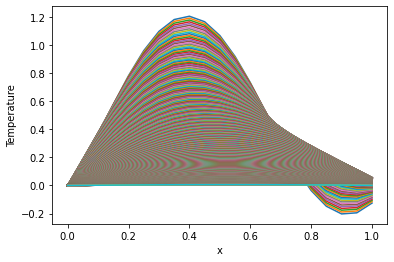

In [4]:
arr5 = np.array([[0,0.169591,0.368541,0.579171,0.782766,0.961237,1.09872,1.18301,1.20661,1.16743,1.06894,0.919894,0.733543,0.52644,0.316987,0.123797,-0.0359669,-0.148107,-0.202661,-0.194779,-0.125164],[0,0.17443,0.370829,0.577614,0.777332,0.952382,1.08723,1.1699,1.19305,1.15461,1.05801,0.911834,0.729059,0.525932,0.320501,0.131018,-0.0256789,-0.135671,-0.189209,-0.181677,-0.114666],[0,0.17808,0.372729,0.576006,0.771986,0.943693,1.07596,1.15704,1.17974,1.14205,1.0473,0.903928,0.724662,0.525434,0.323946,0.138101,-0.0155916,-0.123491,-0.176095,-0.16917,-0.105467],[0,0.18084,0.374211,0.574311,0.766711,0.935164,1.0649,1.14443,1.16669,1.12972,1.0368,0.896173,0.720349,0.524946,0.327326,0.145046,-0.0057052,-0.111576,-0.163353,-0.157285,-0.0972633],[0,0.18292,0.375281,0.572499,0.761491,0.926786,1.05405,1.13205,1.15389,1.11763,1.02649,0.888568,0.716119,0.524467,0.330639,0.151855,0.00397877,-0.0999349,-0.151004,-0.146012,-0.0898448],[0,0.184468,0.375963,0.570553,0.75631,0.91855,1.0434,1.11992,1.14134,1.10578,1.01638,0.881109,0.71197,0.523996,0.333888,0.158527,0.013458,-0.0885785,-0.139061,-0.135323,-0.0830606],[0,0.185592,0.376289,0.568464,0.751156,0.910446,1.03295,1.10801,1.12903,1.09415,1.00647,0.873792,0.7079,0.523535,0.337072,0.165064,0.0227297,-0.0775138,-0.127527,-0.125182,-0.0768005],[0,0.186373,0.376292,0.566228,0.746015,0.902466,1.02269,1.09633,1.11695,1.08274,0.996748,0.866616,0.703909,0.523081,0.340191,0.171464,0.031791,-0.0667462,-0.116402,-0.115552,-0.0709823],[0,0.186872,0.376007,0.563848,0.74088,0.8946,1.01261,1.08487,1.1051,1.07155,0.987211,0.859578,0.699993,0.522634,0.343246,0.177727,0.0406395,-0.0562787,-0.105678,-0.106395,-0.0655433],[0,0.187135,0.375464,0.561326,0.735743,0.88684,1.00271,1.07362,1.09348,1.06058,0.977858,0.852675,0.696152,0.522194,0.346236,0.183852,0.049273,-0.0461125,-0.0953463,-0.0976776,-0.0604346],[0,0.187199,0.374691,0.558671,0.7306,0.879179,0.992976,1.06259,1.08208,1.04981,0.968683,0.845903,0.692384,0.521759,0.349161,0.189838,0.0576901,-0.0362465,-0.0853951,-0.0893679,-0.0556177],[0,0.187094,0.373713,0.555891,0.725447,0.871608,0.983404,1.05175,1.07089,1.03926,0.959684,0.839262,0.688687,0.521329,0.352019,0.195684,0.0658902,-0.0266785,-0.0758114,-0.0814374,-0.0510612],[0,0.186844,0.372552,0.552994,0.720282,0.864124,0.973988,1.04111,1.05992,1.0289,0.950858,0.832747,0.685059,0.520903,0.35481,0.20139,0.073873,-0.0174047,-0.0665819,-0.0738601,-0.0467395],[0,0.186468,0.37123,0.549988,0.715105,0.85672,0.964721,1.03066,1.04915,1.01874,0.942199,0.826356,0.681499,0.520479,0.357534,0.206955,0.0816393,-0.00842017,-0.0576929,-0.0666126,-0.0426313],[0,0.185983,0.369763,0.546885,0.709916,0.849391,0.955598,1.02039,1.03857,1.00877,0.933706,0.820086,0.678004,0.520056,0.36019,0.212379,0.0891902,0.000280489,-0.049131,-0.0596741,-0.0387185],[0,0.185402,0.368168,0.543691,0.704716,0.842135,0.946613,1.0103,1.0282,0.998987,0.925374,0.813935,0.674573,0.519634,0.362776,0.217661,0.0965277,0.00870349,-0.0408829,-0.0530255,-0.0349857],[0,0.184738,0.366458,0.540416,0.699507,0.834948,0.937761,1.00039,1.01801,0.989389,0.917199,0.8079,0.671203,0.51921,0.365293,0.222803,0.103654,0.0168554,-0.0329358,-0.0466497,-0.0314195],[0,0.183999,0.364646,0.537068,0.694289,0.827827,0.929037,0.990643,1.00801,0.979971,0.909179,0.801978,0.667893,0.518784,0.36774,0.227804,0.110572,0.0247432,-0.0252774,-0.0405311,-0.0280083],[0,0.183196,0.362743,0.533654,0.689067,0.82077,0.920437,0.981061,0.998188,0.970729,0.90131,0.796167,0.664642,0.518354,0.370116,0.232666,0.117284,0.0323738,-0.0178958,-0.0346555,-0.024742],[0,0.182335,0.36076,0.530182,0.683841,0.813775,0.911956,0.971638,0.988542,0.961657,0.893588,0.790463,0.661446,0.51792,0.372421,0.237388,0.123794,0.0397543,-0.0107799,-0.02901,-0.0216112],[0,0.181423,0.358705,0.526658,0.678614,0.806841,0.903592,0.962369,0.979067,0.952751,0.886009,0.784864,0.658304,0.517479,0.374655,0.241973,0.130106,0.0468921,-0.00391882,-0.0235827,-0.0186081],[0,0.180465,0.356586,0.523089,0.673388,0.799967,0.895339,0.953249,0.969758,0.944009,0.878571,0.779368,0.655214,0.517032,0.376818,0.246422,0.136223,0.053794,0.00269757,-0.0183626,-0.0157251],[0,0.179469,0.354411,0.51948,0.668167,0.793152,0.887196,0.944275,0.960612,0.935425,0.87127,0.773972,0.652174,0.516576,0.378909,0.250737,0.14215,0.0604672,0.00907898,-0.0133396,-0.0129558],[0,0.178436,0.352187,0.515838,0.662953,0.786394,0.87916,0.935441,0.951622,0.926996,0.864103,0.768672,0.649182,0.516111,0.380929,0.254918,0.14789,0.0669185,0.0152346,-0.00850456,-0.010294],[0,0.177373,0.349918,0.512166,0.657747,0.779694,0.871227,0.926745,0.942787,0.918717,0.857066,0.763467,0.646237,0.515636,0.382878,0.258969,0.153447,0.0731548,0.0211733,-0.00384867,-0.00773436],[0,0.176282,0.347612,0.50847,0.652552,0.773052,0.863395,0.918183,0.934101,0.910586,0.850155,0.758353,0.643336,0.51515,0.384757,0.26289,0.158826,0.0791826,0.0269032,0.000636082,-0.00527174],[0,0.175167,0.345272,0.504755,0.647371,0.766466,0.855661,0.909751,0.92556,0.902597,0.843368,0.753328,0.640478,0.514652,0.386565,0.266685,0.164032,0.0850084,0.0324324,0.00495721,-0.00290149],[0,0.174031,0.342903,0.501024,0.642205,0.759936,0.848025,0.901445,0.917161,0.894748,0.836701,0.74839,0.63766,0.514141,0.388303,0.270355,0.169067,0.0906384,0.0377684,0.00912173,-0.000619311],[0,0.172876,0.34051,0.49728,0.637057,0.753463,0.840482,0.893263,0.9089,0.887034,0.830152,0.743535,0.634882,0.513617,0.389971,0.273902,0.173937,0.0960788,0.0429182,0.0131362,0.00157878],[0,0.171705,0.338096,0.493528,0.631928,0.747046,0.833033,0.885202,0.900773,0.879453,0.823716,0.738763,0.632141,0.513078,0.391572,0.277329,0.178645,0.101335,0.0478887,0.0170069,0.00369652],[0,0.170521,0.335665,0.489771,0.626821,0.740685,0.825674,0.877258,0.892778,0.872,0.817391,0.734068,0.629437,0.512525,0.393104,0.280639,0.183196,0.106414,0.0526865,0.0207395,0.00573736],[0,0.169325,0.333219,0.486012,0.621737,0.734381,0.818405,0.869428,0.88491,0.864673,0.811174,0.729451,0.626766,0.511957,0.394569,0.283832,0.187594,0.11132,0.0573177,0.0243395,0.00770455],[0,0.168119,0.330762,0.482253,0.616677,0.728133,0.811223,0.861711,0.877166,0.857468,0.805062,0.724908,0.624128,0.511373,0.395968,0.286913,0.191842,0.116059,0.0617882,0.0278122,0.00960115],[0,0.166905,0.328297,0.478496,0.611644,0.721941,0.804128,0.854104,0.869544,0.850382,0.799051,0.720436,0.621521,0.510773,0.397301,0.289883,0.195946,0.120636,0.0661036,0.0311624,0.01143],[0,0.165684,0.325825,0.474745,0.606638,0.715805,0.797117,0.846603,0.86204,0.843412,0.79314,0.716034,0.618945,0.510157,0.39857,0.292744,0.199907,0.125056,0.0702695,0.0343948,0.0131938],[0,0.164458,0.323349,0.471002,0.601661,0.709725,0.79019,0.839208,0.854652,0.836554,0.787325,0.7117,0.616396,0.509523,0.399776,0.295499,0.203731,0.129324,0.0742908,0.0375136,0.0148951],[0,0.163228,0.320872,0.467268,0.596714,0.703702,0.783345,0.831915,0.847376,0.829806,0.781604,0.70743,0.613875,0.508873,0.400918,0.298151,0.207422,0.133444,0.0781726,0.0405232,0.0165363],[0,0.161995,0.318394,0.463546,0.591798,0.697734,0.776581,0.824722,0.84021,0.823166,0.775974,0.703224,0.611379,0.508205,0.401999,0.300701,0.210981,0.137422,0.0819196,0.0434275,0.0181197],[0,0.160761,0.315918,0.459836,0.586914,0.691823,0.769897,0.817627,0.833151,0.816629,0.770433,0.699079,0.608908,0.50752,0.40302,0.303153,0.214414,0.141261,0.0855363,0.0462302,0.0196474],[0,0.159526,0.313446,0.456141,0.582064,0.685968,0.763292,0.810629,0.826196,0.810194,0.764977,0.694993,0.606461,0.506817,0.403981,0.305508,0.217724,0.144966,0.089027,0.0489349,0.0211215],[0,0.158291,0.310978,0.452463,0.577248,0.680169,0.756764,0.803725,0.819344,0.803857,0.759605,0.690964,0.604035,0.506096,0.404883,0.307768,0.220914,0.148541,0.0923959,0.0515451,0.0225439],[0,0.157058,0.308517,0.448802,0.572467,0.674426,0.750313,0.796914,0.812592,0.797617,0.754314,0.686991,0.601631,0.505357,0.405728,0.309936,0.223987,0.151989,0.0956471,0.0540641,0.0239165],[0,0.155827,0.306063,0.445159,0.567721,0.668738,0.743937,0.790193,0.805937,0.791471,0.749102,0.683071,0.599247,0.5046,0.406517,0.312014,0.226947,0.155316,0.0987843,0.056495,0.025241],[0,0.154598,0.303618,0.441537,0.563012,0.663107,0.737636,0.783561,0.799377,0.785416,0.743966,0.679204,0.596882,0.503825,0.40725,0.314005,0.229796,0.158523,0.101811,0.0588407,0.0265192],[0,0.153372,0.301182,0.437935,0.558339,0.657531,0.731409,0.777016,0.792911,0.77945,0.738905,0.675386,0.594536,0.503032,0.40793,0.31591,0.232538,0.161616,0.104731,0.0611042,0.0277526],[0,0.152151,0.298757,0.434356,0.553704,0.65201,0.725254,0.770556,0.786535,0.773571,0.733917,0.671617,0.592206,0.502221,0.408556,0.317732,0.235176,0.164596,0.107548,0.0632882,0.0289427],[0,0.150934,0.296344,0.430799,0.549107,0.646544,0.719171,0.764181,0.780248,0.767776,0.728999,0.667895,0.589893,0.501393,0.409129,0.319472,0.237713,0.167469,0.110265,0.0653953,0.0300911],[0,0.149722,0.293943,0.427266,0.544548,0.641134,0.713158,0.757888,0.774049,0.762064,0.724149,0.664218,0.587596,0.500546,0.409652,0.321132,0.240151,0.170236,0.112885,0.0674281,0.0311991],[0,0.148516,0.291556,0.423757,0.540028,0.635778,0.707216,0.751675,0.767934,0.756433,0.719366,0.660585,0.585314,0.499682,0.410125,0.322715,0.242493,0.172902,0.115411,0.0693889,0.032268],[0,0.147316,0.289182,0.420273,0.535546,0.630477,0.701342,0.745543,0.761902,0.750879,0.714648,0.656995,0.583046,0.4988,0.410549,0.324223,0.244741,0.175468,0.117847,0.0712802,0.0332993],[0,0.146122,0.286823,0.416814,0.531104,0.62523,0.695536,0.739488,0.755952,0.745403,0.709992,0.653447,0.580791,0.4979,0.410925,0.325657,0.246899,0.177939,0.120194,0.073104,0.0342941],[0,0.144934,0.284479,0.413382,0.526702,0.620037,0.689798,0.733509,0.750081,0.740001,0.705398,0.649938,0.578549,0.496983,0.411254,0.327019,0.248969,0.180316,0.122456,0.0748627,0.0352535],[0,0.143754,0.28215,0.409976,0.522339,0.614898,0.684126,0.727606,0.744288,0.734672,0.700863,0.646468,0.576319,0.496049,0.411537,0.328312,0.250954,0.182603,0.124635,0.0765582,0.0361788],[0,0.142581,0.279838,0.406597,0.518017,0.609812,0.67852,0.721777,0.738571,0.729414,0.696386,0.643035,0.574101,0.495098,0.411776,0.329536,0.252855,0.184802,0.126733,0.0781925,0.0370711],[0,0.141416,0.277542,0.403245,0.513734,0.60478,0.672978,0.71602,0.732929,0.724225,0.691966,0.639639,0.571894,0.49413,0.41197,0.330694,0.254674,0.186916,0.128754,0.0797676,0.0379313],[0,0.140259,0.275263,0.399921,0.509491,0.5998,0.667501,0.710335,0.72736,0.719104,0.6876,0.636278,0.569697,0.493145,0.412122,0.331787,0.256415,0.188947,0.1307,0.0812854,0.0387605],[0,0.139109,0.273001,0.396626,0.505288,0.594872,0.662086,0.70472,0.721863,0.714049,0.683288,0.632951,0.567511,0.492144,0.412232,0.332817,0.25808,0.190898,0.132573,0.0827474,0.0395597],[0,0.137968,0.270757,0.393358,0.501126,0.589996,0.656734,0.699174,0.716436,0.709059,0.679028,0.629657,0.565334,0.491126,0.4123,0.333786,0.25967,0.192771,0.134374,0.0841556,0.0403298],[0,0.136836,0.268531,0.390119,0.497003,0.585173,0.651443,0.693695,0.711077,0.704132,0.674818,0.626395,0.563165,0.490093,0.412329,0.334695,0.261187,0.194568,0.136107,0.0855115,0.0410717],[0,0.135712,0.266323,0.386909,0.492921,0.5804,0.646213,0.688283,0.705785,0.699266,0.670658,0.623165,0.561006,0.489044,0.412318,0.335546,0.262634,0.196291,0.137773,0.0868168,0.0417863],[0,0.134597,0.264133,0.383727,0.488878,0.575678,0.641043,0.682937,0.70056,0.694461,0.666546,0.619965,0.558855,0.487979,0.41227,0.336339,0.264013,0.197943,0.139374,0.0880729,0.0424745],[0,0.133491,0.261961,0.380575,0.484876,0.571007,0.635932,0.677655,0.695399,0.689714,0.662481,0.616794,0.556711,0.486899,0.412184,0.337078,0.265324,0.199526,0.140912,0.0892814,0.043137],[0,0.132394,0.259809,0.377451,0.480913,0.566386,0.630879,0.672436,0.690301,0.685025,0.658462,0.613651,0.554576,0.485804,0.412061,0.337762,0.266571,0.201041,0.142389,0.0904437,0.0437746],[0,0.131306,0.257675,0.374357,0.47699,0.561814,0.625885,0.66728,0.685266,0.680392,0.654487,0.610537,0.552447,0.484694,0.411903,0.338395,0.267755,0.202491,0.143807,0.0915612,0.0443881],[0,0.130228,0.25556,0.371291,0.473107,0.557292,0.620947,0.662184,0.680291,0.675814,0.650555,0.607449,0.550325,0.48357,0.41171,0.338975,0.268878,0.203877,0.145168,0.0926352,0.0449782],[0,0.129159,0.253464,0.368255,0.469262,0.552818,0.616065,0.657149,0.675376,0.67129,0.646666,0.604387,0.54821,0.482431,0.411484,0.339507,0.269941,0.205201,0.146473,0.093667,0.0455456],[0,0.128099,0.251387,0.365248,0.465457,0.548393,0.611238,0.652173,0.67052,0.666819,0.642819,0.601351,0.546102,0.481279,0.411224,0.339989,0.270946,0.206465,0.147723,0.0946579,0.046091],[0,0.127049,0.24933,0.36227,0.461691,0.544015,0.606467,0.647256,0.66572,0.662399,0.639011,0.59834,0.543999,0.480112,0.410932,0.340425,0.271895,0.207671,0.148921,0.0956091,0.046615],[0,0.126008,0.247291,0.359321,0.457964,0.539685,0.601749,0.642395,0.660978,0.658029,0.635243,0.595353,0.541902,0.478933,0.410608,0.340814,0.272788,0.20882,0.150068,0.0965217,0.0471184],[0,0.124977,0.245272,0.356401,0.454275,0.535402,0.597084,0.637591,0.65629,0.653709,0.631514,0.592389,0.539811,0.47774,0.410254,0.341159,0.273629,0.209914,0.151165,0.0973968,0.0476016],[0,0.123955,0.243272,0.35351,0.450624,0.531165,0.592472,0.632843,0.651657,0.649436,0.627822,0.589449,0.537726,0.476534,0.409869,0.34146,0.274417,0.210954,0.152214,0.0982356,0.0480653],[0,0.122943,0.241292,0.350648,0.447011,0.526974,0.587912,0.628149,0.647077,0.645212,0.624167,0.58653,0.535645,0.475316,0.409456,0.341719,0.275155,0.211943,0.153216,0.0990392,0.04851],[0,0.121941,0.23933,0.347815,0.443436,0.522829,0.583403,0.623509,0.642549,0.641033,0.620548,0.583634,0.53357,0.474085,0.409014,0.341936,0.275844,0.21288,0.154173,0.0998084,0.0489364],[0,0.120948,0.237388,0.34501,0.439899,0.518729,0.578945,0.618921,0.638072,0.6369,0.616964,0.580759,0.5315,0.472843,0.408544,0.342113,0.276485,0.213769,0.155085,0.100544,0.0493449],[0,0.119964,0.235464,0.342233,0.436398,0.514673,0.574536,0.614386,0.633646,0.632811,0.613415,0.577904,0.529434,0.471588,0.408047,0.342251,0.27708,0.214609,0.155955,0.101248,0.0497361],[0,0.11899,0.23356,0.339485,0.432935,0.510661,0.570177,0.609901,0.629269,0.628766,0.609899,0.57507,0.527374,0.470322,0.407524,0.34235,0.27763,0.215404,0.156783,0.101921,0.0501105],[0,0.118026,0.231675,0.336765,0.429508,0.506694,0.565866,0.605467,0.62494,0.624763,0.606415,0.572255,0.525317,0.469045,0.406975,0.342413,0.278135,0.216153,0.15757,0.102562,0.0504685],[0,0.117071,0.229809,0.334073,0.426117,0.502769,0.561603,0.601083,0.620659,0.620802,0.602964,0.56946,0.523266,0.467757,0.406401,0.34244,0.278598,0.216858,0.158318,0.103175,0.0508107],[0,0.116126,0.227961,0.331409,0.422763,0.498887,0.557387,0.596747,0.616425,0.616882,0.599545,0.566683,0.521218,0.466458,0.405803,0.342431,0.279019,0.21752,0.159028,0.103758,0.0511374],[0,0.11519,0.226132,0.328773,0.419443,0.495047,0.553217,0.59246,0.612237,0.613003,0.596156,0.563925,0.519175,0.465149,0.405181,0.342388,0.2794,0.218141,0.159701,0.104314,0.0514492],[0,0.114264,0.224322,0.326163,0.41616,0.491248,0.549094,0.588219,0.608094,0.609163,0.592797,0.561186,0.517136,0.46383,0.404535,0.342312,0.279742,0.218722,0.160337,0.104842,0.0517465],[0,0.113347,0.222531,0.323581,0.412911,0.487491,0.545015,0.584025,0.603996,0.605361,0.589469,0.558464,0.515101,0.462501,0.403868,0.342203,0.280045,0.219263,0.160939,0.105344,0.0520296],[0,0.112439,0.220758,0.321026,0.409696,0.483775,0.540982,0.579877,0.599941,0.601598,0.586169,0.555759,0.51307,0.461162,0.403178,0.342063,0.280311,0.219766,0.161506,0.105821,0.052299],[0,0.111541,0.219003,0.318498,0.406516,0.480098,0.536992,0.575774,0.595929,0.597871,0.582897,0.553071,0.511043,0.459815,0.402467,0.341892,0.28054,0.220232,0.16204,0.106272,0.052555],[0,0.110651,0.217266,0.315997,0.40337,0.476462,0.533046,0.571715,0.591959,0.594181,0.579653,0.5504,0.509021,0.458458,0.401735,0.341691,0.280735,0.220662,0.162542,0.1067,0.0527981],[0,0.109771,0.215547,0.313521,0.400258,0.472865,0.529143,0.5677,0.588031,0.590528,0.576437,0.547745,0.507002,0.457092,0.400983,0.341461,0.280895,0.221057,0.163012,0.107104,0.0530286],[0,0.1089,0.213847,0.311072,0.397179,0.469307,0.525281,0.563728,0.584143,0.586909,0.573247,0.545106,0.504986,0.455718,0.400212,0.341203,0.281022,0.221418,0.163453,0.107485,0.0532469],[0,0.108038,0.212164,0.308649,0.394132,0.465787,0.521462,0.559798,0.580295,0.583325,0.570084,0.542483,0.502975,0.454336,0.399421,0.340917,0.281117,0.221746,0.163863,0.107844,0.0534533],[0,0.107185,0.210498,0.306251,0.391119,0.462305,0.517684,0.555911,0.576487,0.579775,0.566947,0.539876,0.500967,0.452945,0.398612,0.340605,0.28118,0.222042,0.164245,0.108181,0.0536482],[0,0.106341,0.20885,0.303879,0.388137,0.45886,0.513946,0.552064,0.572717,0.576258,0.563835,0.537284,0.498964,0.451547,0.397785,0.340267,0.281212,0.222306,0.164599,0.108497,0.0538318],[0,0.105506,0.20722,0.301531,0.385187,0.455453,0.510248,0.548257,0.568986,0.572774,0.560748,0.534706,0.496964,0.450142,0.39694,0.339903,0.281215,0.22254,0.164925,0.108793,0.0540045],[0,0.104679,0.205606,0.299209,0.382269,0.452081,0.50659,0.54449,0.565292,0.569323,0.557685,0.532143,0.494967,0.448729,0.396078,0.339515,0.281189,0.222744,0.165225,0.109069,0.0541666],[0,0.103861,0.20401,0.296911,0.379382,0.448746,0.50297,0.540763,0.561634,0.565903,0.554646,0.529595,0.492975,0.44731,0.3952,0.339103,0.281134,0.222919,0.1655,0.109326,0.0543184],[0,0.103052,0.20243,0.294638,0.376526,0.445447,0.499389,0.537074,0.558013,0.562514,0.551631,0.527061,0.490986,0.445883,0.394305,0.338667,0.281053,0.223066,0.165749,0.109564,0.0544602],[0,0.102251,0.200868,0.292389,0.3737,0.442182,0.495846,0.533424,0.554428,0.559156,0.548639,0.524541,0.489001,0.444451,0.393395,0.338209,0.280944,0.223186,0.165974,0.109784,0.0545923],[0,0.101459,0.199321,0.290164,0.370904,0.438953,0.49234,0.52981,0.550878,0.555828,0.54567,0.522034,0.48702,0.443012,0.39247,0.337729,0.28081,0.22328,0.166176,0.109986,0.0547149],[0,0.100675,0.197791,0.287962,0.368138,0.435757,0.48887,0.526234,0.547362,0.55253,0.542724,0.519541,0.485043,0.441567,0.391531,0.337228,0.28065,0.223348,0.166354,0.110171,0.0548283],[0,0.0998995,0.196278,0.285784,0.365402,0.432596,0.485437,0.522694,0.54388,0.54926,0.539799,0.517062,0.483069,0.440116,0.390576,0.336706,0.280466,0.223391,0.166511,0.11034,0.0549327],[0,0.099132,0.19478,0.283629,0.362694,0.429468,0.48204,0.51919,0.540432,0.54602,0.536897,0.514596,0.481099,0.438659,0.389609,0.336164,0.280258,0.22341,0.166645,0.110492,0.0550285],[0,0.0983726,0.193298,0.281496,0.360015,0.426372,0.478678,0.515721,0.537017,0.542808,0.534015,0.512143,0.479133,0.437198,0.388627,0.335602,0.280028,0.223405,0.166759,0.110628,0.0551158],[0,0.0976213,0.191832,0.279387,0.357365,0.42331,0.475351,0.512287,0.533634,0.539623,0.531155,0.509702,0.477171,0.435731,0.387633,0.335022,0.279774,0.223377,0.166852,0.110749,0.0551949],[0,0.096878,0.190381,0.2773,0.354742,0.420279,0.472058,0.508887,0.530283,0.536466,0.528315,0.507274,0.475212,0.434259,0.386626,0.334423,0.279499,0.223326,0.166925,0.110855,0.055266],[0,0.0961425,0.188946,0.275234,0.352147,0.41728,0.468798,0.505521,0.526963,0.533335,0.525496,0.504859,0.473258,0.432783,0.385607,0.333806,0.279203,0.223254,0.166978,0.110946,0.0553294],[0,0.0954148,0.187526,0.273191,0.34958,0.414312,0.465573,0.502188,0.523674,0.530231,0.522697,0.502456,0.471307,0.431303,0.384577,0.333171,0.278886,0.223161,0.167013,0.111024,0.0553852],[0,0.0946948,0.186121,0.271169,0.347039,0.411375,0.46238,0.498888,0.520416,0.527153,0.519918,0.500066,0.46936,0.429818,0.383534,0.33252,0.278549,0.223047,0.16703,0.111087,0.0554336],[0,0.0939824,0.184731,0.269169,0.344525,0.408469,0.459219,0.495621,0.517188,0.524101,0.517158,0.497687,0.467418,0.428329,0.382481,0.331852,0.278192,0.222914,0.167028,0.111138,0.0554749],[0,0.0932776,0.183356,0.267189,0.342037,0.405593,0.45609,0.492385,0.51399,0.521074,0.514418,0.49532,0.465479,0.426836,0.381417,0.331169,0.277817,0.222761,0.16701,0.111175,0.0555093],[0,0.0925802,0.181995,0.265231,0.339576,0.402746,0.452993,0.48918,0.51082,0.518072,0.511696,0.492965,0.463544,0.42534,0.380343,0.33047,0.277423,0.222589,0.166974,0.1112,0.055537],[0,0.0918902,0.180648,0.263293,0.33714,0.399929,0.449927,0.486007,0.50768,0.515095,0.508993,0.490622,0.461614,0.42384,0.379259,0.329756,0.277011,0.222399,0.166923,0.111212,0.0555581],[0,0.0912075,0.179316,0.261375,0.334729,0.39714,0.446892,0.482864,0.504567,0.512142,0.506309,0.488291,0.459687,0.422337,0.378165,0.329027,0.276582,0.222191,0.166855,0.111213,0.0555729],[0,0.090532,0.177997,0.259478,0.332344,0.39438,0.443887,0.479751,0.501483,0.509212,0.503643,0.48597,0.457764,0.420831,0.377062,0.328285,0.276137,0.221966,0.166772,0.111202,0.0555814],[0,0.0898636,0.176693,0.2576,0.329983,0.391648,0.440911,0.476667,0.498426,0.506306,0.500995,0.483661,0.455846,0.419323,0.37595,0.327529,0.275675,0.221724,0.166674,0.111179,0.055584],[0,0.0892022,0.175402,0.255742,0.327646,0.388944,0.437965,0.473613,0.495396,0.503423,0.498364,0.481364,0.453932,0.417811,0.374829,0.326759,0.275197,0.221465,0.166561,0.111146,0.0555807],[0,0.0885478,0.174125,0.253903,0.325334,0.386267,0.435048,0.470588,0.492393,0.500564,0.495751,0.479077,0.452022,0.416297,0.3737,0.325977,0.274704,0.221191,0.166435,0.111103,0.0555717],[0,0.0879002,0.172861,0.252083,0.323045,0.383617,0.43216,0.467591,0.489416,0.497726,0.493156,0.476801,0.450117,0.414781,0.372563,0.325183,0.274196,0.220902,0.166294,0.111048,0.0555572],[0,0.0872594,0.17161,0.250283,0.32078,0.380994,0.4293,0.464622,0.486465,0.494911,0.490577,0.474537,0.448215,0.413263,0.371418,0.324376,0.273673,0.220597,0.16614,0.110984,0.0555373],[0,0.0866254,0.170372,0.2485,0.318538,0.378397,0.426468,0.46168,0.483539,0.492118,0.488015,0.472283,0.446319,0.411743,0.370266,0.323558,0.273136,0.220279,0.165973,0.11091,0.0555122],[0,0.0859979,0.169147,0.246737,0.316319,0.375826,0.423663,0.458766,0.480639,0.489346,0.48547,0.47004,0.444426,0.410221,0.369106,0.322729,0.272586,0.219946,0.165794,0.110827,0.055482],[0,0.085377,0.167935,0.244991,0.314122,0.373281,0.420885,0.455878,0.477764,0.486595,0.482941,0.467807,0.442538,0.408697,0.36794,0.321889,0.272023,0.219599,0.165602,0.110735,0.0554469],[0,0.0847626,0.166736,0.243263,0.311948,0.370761,0.418134,0.453017,0.474913,0.483866,0.480429,0.465585,0.440654,0.407172,0.366767,0.321038,0.271447,0.219239,0.165398,0.110633,0.0554071],[0,0.0841545,0.165549,0.241553,0.309795,0.368266,0.415409,0.450182,0.472086,0.481157,0.477932,0.463374,0.438775,0.405646,0.365588,0.320177,0.270858,0.218867,0.165183,0.110523,0.0553625],[0,0.0835527,0.164374,0.239861,0.307664,0.365795,0.41271,0.447373,0.469283,0.478469,0.475451,0.461172,0.436901,0.404119,0.364403,0.319306,0.270257,0.218481,0.164957,0.110404,0.0553135],[0,0.0829572,0.163211,0.238186,0.305555,0.363349,0.410037,0.444589,0.466504,0.475801,0.472986,0.458981,0.43503,0.40259,0.363212,0.318426,0.269645,0.218084,0.164719,0.110278,0.0552601],[0,0.0823678,0.16206,0.236527,0.303467,0.360926,0.407389,0.44183,0.463748,0.473153,0.470537,0.456801,0.433165,0.401061,0.362015,0.317537,0.269021,0.217675,0.164472,0.110143,0.0552024],[0,0.0817845,0.160921,0.234886,0.301399,0.358528,0.404766,0.439096,0.461014,0.470525,0.468103,0.45463,0.431304,0.399531,0.360813,0.316639,0.268387,0.217255,0.164213,0.11,0.0551405],[0,0.0812071,0.159793,0.233261,0.299353,0.356152,0.402167,0.436386,0.458304,0.467916,0.465684,0.45247,0.429448,0.398001,0.359606,0.315732,0.267742,0.216823,0.163945,0.10985,0.0550747],[0,0.0806357,0.158677,0.231653,0.297326,0.353799,0.399593,0.433701,0.455615,0.465326,0.46328,0.450319,0.427597,0.39647,0.358394,0.314817,0.267086,0.216381,0.163667,0.109693,0.0550049],[0,0.0800701,0.157573,0.23006,0.295319,0.35147,0.397043,0.431039,0.452949,0.462755,0.46089,0.448179,0.42575,0.394939,0.357178,0.313894,0.266421,0.215928,0.16338,0.109529,0.0549314],[0,0.0795103,0.156479,0.228484,0.293333,0.349162,0.394516,0.4284,0.450304,0.460203,0.458516,0.446048,0.423909,0.393408,0.355957,0.312964,0.265746,0.215465,0.163084,0.109358,0.0548541],[0,0.0789562,0.155397,0.226923,0.291365,0.346877,0.392013,0.425784,0.447681,0.457669,0.456155,0.443927,0.422072,0.391877,0.354732,0.312026,0.265062,0.214993,0.162779,0.10918,0.0547733],[0,0.0784076,0.154325,0.225378,0.289417,0.344613,0.389532,0.423191,0.445079,0.455154,0.45381,0.441816,0.42024,0.390346,0.353503,0.311081,0.264369,0.214511,0.162465,0.108995,0.054689],[0,0.0778647,0.153264,0.223849,0.287488,0.342371,0.387074,0.420621,0.442498,0.452657,0.451478,0.439715,0.418413,0.388816,0.35227,0.310129,0.263667,0.21402,0.162143,0.108805,0.0546014],[0,0.0773272,0.152214,0.222334,0.285578,0.34015,0.384639,0.418072,0.439937,0.450177,0.449161,0.437623,0.41659,0.387286,0.351034,0.309171,0.262957,0.21352,0.161813,0.108608,0.0545105],[0,0.0767951,0.151175,0.220834,0.283686,0.33795,0.382226,0.415546,0.437397,0.447715,0.446857,0.435541,0.414773,0.385756,0.349795,0.308206,0.262239,0.213012,0.161475,0.108406,0.0544164],[0,0.0762683,0.150145,0.219349,0.281813,0.33577,0.379834,0.413041,0.434876,0.44527,0.444567,0.433469,0.412961,0.384227,0.348552,0.307236,0.261513,0.212495,0.16113,0.108197,0.0543192],[0,0.0757468,0.149126,0.217879,0.279957,0.333611,0.377464,0.410557,0.432376,0.442843,0.442291,0.431406,0.411154,0.382699,0.347306,0.306259,0.26078,0.21197,0.160777,0.107984,0.0542191],[0,0.0752305,0.148117,0.216423,0.278119,0.331472,0.375115,0.408095,0.429895,0.440433,0.440028,0.429352,0.409352,0.381172,0.346058,0.305277,0.260039,0.211437,0.160418,0.107764,0.0541161],[0,0.0747193,0.147118,0.214981,0.276299,0.329353,0.372787,0.405653,0.427433,0.438039,0.437779,0.427307,0.407555,0.379645,0.344807,0.30429,0.259291,0.210897,0.160051,0.10754,0.0540102],[0,0.0742132,0.146129,0.213553,0.274496,0.327254,0.37048,0.403232,0.424991,0.435662,0.435543,0.425272,0.405763,0.37812,0.343554,0.303298,0.258536,0.21035,0.159677,0.10731,0.0539017],[0,0.0737121,0.145149,0.212139,0.27271,0.325173,0.368193,0.40083,0.422567,0.433302,0.43332,0.423247,0.403977,0.376596,0.342298,0.3023,0.257775,0.209795,0.159298,0.107076,0.0537904],[0,0.0732159,0.144179,0.210739,0.270941,0.323112,0.365926,0.398449,0.420162,0.430957,0.43111,0.42123,0.402195,0.375074,0.341041,0.301299,0.257008,0.209234,0.158912,0.106837,0.0536767],[0,0.0727245,0.143219,0.209352,0.269189,0.32107,0.363679,0.396088,0.417776,0.428629,0.428913,0.419223,0.400419,0.373553,0.339781,0.300292,0.256235,0.208666,0.15852,0.106593,0.0535604],[0,0.072238,0.142267,0.207978,0.267453,0.319046,0.361452,0.393746,0.415407,0.426317,0.426729,0.417224,0.398648,0.372033,0.33852,0.299282,0.255455,0.208092,0.158122,0.106345,0.0534418],[0,0.0717562,0.141325,0.206617,0.265733,0.31704,0.359244,0.391423,0.413057,0.42402,0.424557,0.415235,0.396883,0.370515,0.337257,0.298267,0.254671,0.207511,0.157718,0.106093,0.0533208],[0,0.0712791,0.140392,0.20527,0.264029,0.315053,0.357055,0.389119,0.410724,0.421739,0.422398,0.413255,0.395123,0.368999,0.335993,0.297249,0.25388,0.206925,0.157309,0.105836,0.0531976],[0,0.0708066,0.139468,0.203935,0.262341,0.313083,0.354884,0.386834,0.408409,0.419473,0.420251,0.411284,0.393368,0.367485,0.334728,0.296226,0.253085,0.206333,0.156895,0.105575,0.0530722],[0,0.0703386,0.138553,0.202612,0.260668,0.311131,0.352733,0.384567,0.406111,0.417222,0.418117,0.409321,0.391618,0.365973,0.333461,0.295201,0.252285,0.205736,0.156475,0.105311,0.0529447],[0,0.0698752,0.137646,0.201302,0.259011,0.309197,0.3506,0.382318,0.40383,0.414987,0.415994,0.407368,0.389874,0.364462,0.332194,0.294172,0.25148,0.205133,0.156051,0.105042,0.0528152],[0,0.0694161,0.136748,0.200004,0.257369,0.307279,0.348484,0.380088,0.401566,0.412766,0.413884,0.405424,0.388135,0.362954,0.330926,0.29314,0.25067,0.204526,0.155622,0.10477,0.0526836],[0,0.0689615,0.135859,0.198719,0.255742,0.305379,0.346387,0.377875,0.399318,0.41056,0.411786,0.403488,0.386402,0.361448,0.329657,0.292106,0.249857,0.203913,0.155188,0.104495,0.0525502],[0,0.0685112,0.134978,0.197445,0.25413,0.303495,0.344308,0.37568,0.397088,0.408368,0.4097,0.401561,0.384674,0.359944,0.328388,0.291068,0.249039,0.203296,0.15475,0.104216,0.0524149],[0,0.0680651,0.134105,0.196183,0.252532,0.301627,0.342246,0.373502,0.394873,0.406191,0.407626,0.399643,0.382952,0.358443,0.327118,0.290028,0.248217,0.202674,0.154308,0.103933,0.0522779],[0,0.0676232,0.133241,0.194933,0.250948,0.299776,0.340201,0.371342,0.392675,0.404028,0.405563,0.397733,0.381235,0.356944,0.325848,0.288985,0.247391,0.202047,0.153861,0.103648,0.0521391],[0,0.0671855,0.132384,0.193694,0.249379,0.297941,0.338173,0.369198,0.390492,0.401879,0.403512,0.395832,0.379524,0.355447,0.324577,0.287941,0.246561,0.201417,0.153411,0.10336,0.0519986],[0,0.0667519,0.131535,0.192466,0.247824,0.296122,0.336162,0.367071,0.388326,0.399745,0.401472,0.39394,0.377818,0.353954,0.323307,0.286894,0.245729,0.200783,0.152956,0.103068,0.0518565],[0,0.0663223,0.130694,0.19125,0.246283,0.294319,0.334167,0.364961,0.386175,0.397624,0.399444,0.392057,0.376118,0.352462,0.322037,0.285845,0.244893,0.200144,0.152499,0.102774,0.0517129],[0,0.0658967,0.129861,0.190044,0.244755,0.292531,0.332189,0.362867,0.384039,0.395516,0.397427,0.390182,0.374424,0.350974,0.320767,0.284795,0.244053,0.199502,0.152037,0.102477,0.0515678],[0,0.0654751,0.129036,0.18885,0.243241,0.290758,0.330227,0.360789,0.381919,0.393423,0.395421,0.388315,0.372735,0.349488,0.319497,0.283743,0.243211,0.198857,0.151572,0.102177,0.0514212],[0,0.0650573,0.128218,0.187666,0.24174,0.289,0.328281,0.358727,0.379814,0.391342,0.393427,0.386457,0.371052,0.348006,0.318228,0.282689,0.242366,0.198208,0.151104,0.101875,0.0512732],[0,0.0646434,0.127408,0.186493,0.240252,0.287257,0.326351,0.356681,0.377723,0.389275,0.391443,0.384607,0.369374,0.346526,0.316959,0.281634,0.241519,0.197556,0.150633,0.10157,0.0511239],[0,0.0642332,0.126605,0.18533,0.238777,0.285529,0.324436,0.354651,0.375647,0.387221,0.389471,0.382766,0.367702,0.345049,0.315691,0.280578,0.240669,0.196901,0.150158,0.101263,0.0509733],[0,0.0638268,0.125809,0.184178,0.237315,0.283816,0.322537,0.352636,0.373586,0.38518,0.387509,0.380933,0.366036,0.343575,0.314424,0.27952,0.239816,0.196243,0.149681,0.100954,0.0508214],[0,0.0634241,0.12502,0.183036,0.235866,0.282116,0.320653,0.350636,0.37154,0.383152,0.385558,0.379109,0.364376,0.342105,0.313158,0.278462,0.238962,0.195582,0.149201,0.100642,0.0506684],[0,0.063025,0.124238,0.181903,0.234429,0.280431,0.318783,0.348651,0.369507,0.381137,0.383618,0.377292,0.362721,0.340637,0.311892,0.277403,0.238105,0.194918,0.148719,0.100328,0.0505142],[0,0.0626296,0.123464,0.180781,0.233004,0.27876,0.316929,0.346681,0.367489,0.379134,0.381689,0.375484,0.361072,0.339173,0.310628,0.276343,0.237246,0.194252,0.148233,0.100013,0.0503589],[0,0.0622376,0.122696,0.179669,0.231592,0.277103,0.31509,0.344725,0.365484,0.377144,0.37977,0.373684,0.359429,0.337712,0.309365,0.275282,0.236386,0.193583,0.147746,0.0996951,0.0502025],[0,0.0618492,0.121935,0.178566,0.230191,0.275459,0.313264,0.342785,0.363494,0.375167,0.377862,0.371893,0.357791,0.336255,0.308103,0.274221,0.235524,0.192913,0.147256,0.0993757,0.0500451],[0,0.0614642,0.121181,0.177473,0.228803,0.273829,0.311454,0.340858,0.361517,0.373201,0.375964,0.370109,0.356159,0.334801,0.306842,0.27316,0.23466,0.19224,0.146764,0.0990544,0.0498867],[0,0.0610826,0.120433,0.176389,0.227426,0.272212,0.309657,0.338946,0.359554,0.371248,0.374076,0.368334,0.354533,0.33335,0.305583,0.272099,0.233795,0.191565,0.14627,0.0987315,0.0497274],[0,0.0607044,0.119692,0.175315,0.22606,0.270608,0.307874,0.337048,0.357604,0.369307,0.372198,0.366567,0.352913,0.331903,0.304325,0.271037,0.232929,0.190888,0.145774,0.098407,0.0495672],[0,0.0603295,0.118957,0.17425,0.224707,0.269017,0.306105,0.335163,0.355667,0.367378,0.370331,0.364808,0.351298,0.33046,0.303069,0.269975,0.232061,0.190209,0.145276,0.0980809,0.0494061],[0,0.0599579,0.118229,0.173194,0.223364,0.267439,0.30435,0.333293,0.353743,0.365461,0.368474,0.363057,0.34969,0.32902,0.301814,0.268913,0.231193,0.189529,0.144776,0.0977534,0.0492442],[0,0.0595896,0.117507,0.172146,0.222032,0.265873,0.302608,0.331436,0.351832,0.363555,0.366627,0.361314,0.348087,0.327584,0.300562,0.267852,0.230323,0.188847,0.144274,0.0974244,0.0490815],[0,0.0592244,0.116791,0.171108,0.220712,0.264321,0.30088,0.329592,0.349934,0.361661,0.36479,0.359578,0.34649,0.326152,0.299311,0.266791,0.229453,0.188163,0.143771,0.0970942,0.0489181],[0,0.0588624,0.116081,0.170079,0.219402,0.26278,0.299164,0.327761,0.348049,0.359779,0.362963,0.357851,0.344899,0.324723,0.298062,0.26573,0.228581,0.187478,0.143266,0.0967626,0.0487539],[0,0.0585035,0.115378,0.169058,0.218103,0.261252,0.297462,0.325944,0.346177,0.357908,0.361145,0.356132,0.343313,0.323298,0.296814,0.264669,0.22771,0.186792,0.14276,0.0964298,0.0485891],[0,0.0581477,0.11468,0.168045,0.216815,0.259735,0.295772,0.32414,0.344316,0.356048,0.359337,0.35442,0.341734,0.321877,0.295569,0.263609,0.226837,0.186105,0.142252,0.0960959,0.0484236],[0,0.0577949,0.113988,0.167041,0.215537,0.258231,0.294096,0.322348,0.342468,0.3542,0.357539,0.352717,0.34016,0.32046,0.294326,0.26255,0.225964,0.185416,0.141744,0.0957609,0.0482575],[0,0.0574451,0.113302,0.166046,0.214269,0.256738,0.292431,0.32057,0.340633,0.352362,0.355751,0.351021,0.338593,0.319047,0.293085,0.261491,0.225091,0.184727,0.141234,0.0954249,0.0480908],[0,0.0570983,0.112622,0.165058,0.213012,0.255257,0.29078,0.318803,0.338809,0.350536,0.353972,0.349333,0.337031,0.317638,0.291847,0.260433,0.224218,0.184037,0.140722,0.0950879,0.0479236],[0,0.0567544,0.111948,0.164079,0.211765,0.253788,0.28914,0.31705,0.336997,0.348721,0.352203,0.347653,0.335475,0.316232,0.290611,0.259376,0.223344,0.183346,0.14021,0.09475,0.0477558],[0,0.0564134,0.111279,0.163108,0.210527,0.25233,0.287513,0.315308,0.335198,0.346916,0.350443,0.34598,0.333924,0.314831,0.289377,0.25832,0.22247,0.182654,0.139697,0.0944113,0.0475875],[0,0.0560753,0.110616,0.162144,0.2093,0.250883,0.285897,0.313579,0.333409,0.345122,0.348692,0.344315,0.33238,0.313434,0.288145,0.257265,0.221597,0.181962,0.139183,0.0940718,0.0474188],[0,0.05574,0.109958,0.161189,0.208082,0.249447,0.284294,0.311861,0.331633,0.343339,0.346951,0.342658,0.330841,0.312041,0.286916,0.256212,0.220723,0.181269,0.138669,0.0937315,0.0472497],[0,0.0554074,0.109305,0.160241,0.206874,0.248022,0.282702,0.310156,0.329868,0.341567,0.345219,0.341008,0.329309,0.310652,0.285689,0.255159,0.21985,0.180575,0.138153,0.0933905,0.0470801],[0,0.0550776,0.108658,0.159301,0.205675,0.246608,0.281122,0.308462,0.328114,0.339805,0.343496,0.339366,0.327782,0.309267,0.284466,0.254108,0.218976,0.179881,0.137637,0.0930489,0.0469102],[0,0.0547505,0.108016,0.158368,0.204486,0.245205,0.279553,0.30678,0.326372,0.338053,0.341782,0.337732,0.326261,0.307886,0.283244,0.253057,0.218104,0.179187,0.13712,0.0927067,0.0467399],[0,0.0544261,0.10738,0.157443,0.203306,0.243812,0.277996,0.30511,0.32464,0.336312,0.340078,0.336105,0.324746,0.30651,0.282026,0.252009,0.217231,0.178493,0.136603,0.092364,0.0465693],[0,0.0541044,0.106748,0.156525,0.202135,0.24243,0.27645,0.303451,0.32292,0.334581,0.338382,0.334485,0.323237,0.305138,0.28081,0.250962,0.216359,0.177799,0.136085,0.0920207,0.0463983],[0,0.0537852,0.106122,0.155614,0.200973,0.241058,0.274915,0.301803,0.321211,0.33286,0.336695,0.332873,0.321734,0.30377,0.279597,0.249916,0.215488,0.177104,0.135567,0.0916771,0.0462271],[0,0.0534687,0.1055,0.154711,0.19982,0.239696,0.273391,0.300166,0.319513,0.331149,0.335017,0.331269,0.320237,0.302406,0.278386,0.248872,0.214617,0.176409,0.135048,0.091333,0.0460557],[0,0.0531547,0.104884,0.153815,0.198676,0.238345,0.271878,0.298541,0.317825,0.329448,0.333348,0.329672,0.318745,0.301047,0.277179,0.247829,0.213747,0.175715,0.134529,0.0909885,0.045884],[0,0.0528432,0.104272,0.152925,0.197541,0.237003,0.270375,0.296926,0.316148,0.327756,0.331688,0.328082,0.317259,0.299692,0.275974,0.246788,0.212878,0.17502,0.13401,0.0906437,0.0457121],[0,0.0525342,0.103666,0.152043,0.196415,0.235672,0.268883,0.295323,0.314482,0.326075,0.330036,0.3265,0.31578,0.298342,0.274773,0.245749,0.212009,0.174326,0.133491,0.0902987,0.04554],[0,0.0522277,0.103064,0.151167,0.195296,0.23435,0.267402,0.29373,0.312825,0.324404,0.328393,0.324925,0.314306,0.296996,0.273574,0.244712,0.211141,0.173632,0.132972,0.0899534,0.0453677],[0,0.0519236,0.102467,0.150299,0.194187,0.233038,0.265931,0.292147,0.31118,0.322742,0.326759,0.323357,0.312838,0.295654,0.272379,0.243677,0.210275,0.172938,0.132452,0.0896079,0.0451953],[0,0.0516219,0.101874,0.149437,0.193086,0.231735,0.26447,0.290575,0.309544,0.321089,0.325133,0.321796,0.311375,0.294316,0.271186,0.242643,0.209409,0.172245,0.131933,0.0892623,0.0450228],[0,0.0513225,0.101286,0.148581,0.191992,0.230442,0.26302,0.289014,0.307919,0.319447,0.323516,0.320243,0.309919,0.292984,0.269997,0.241612,0.208544,0.171552,0.131413,0.0889165,0.0448501],[0,0.0510256,0.100703,0.147732,0.190908,0.229158,0.26158,0.287463,0.306304,0.317813,0.321907,0.318697,0.308469,0.291655,0.268811,0.240583,0.207681,0.170859,0.130894,0.0885706,0.0446774],[0,0.0507309,0.100124,0.14689,0.189831,0.227883,0.260149,0.285922,0.304699,0.316189,0.320306,0.317158,0.307024,0.290331,0.267628,0.239555,0.206819,0.170167,0.130375,0.0882247,0.0445046],[0,0.0504385,0.0995497,0.146054,0.188762,0.226618,0.258729,0.284391,0.303104,0.314574,0.318714,0.315626,0.305585,0.289012,0.266449,0.23853,0.205958,0.169476,0.129856,0.0878788,0.0443317],[0,0.0501484,0.0989798,0.145224,0.187701,0.225361,0.257318,0.28287,0.301518,0.312969,0.31713,0.314102,0.304152,0.287697,0.265272,0.237507,0.205098,0.168785,0.129337,0.0875329,0.0441589],[0,0.0498605,0.0984142,0.1444,0.186648,0.224114,0.255917,0.281359,0.299942,0.311372,0.315555,0.312584,0.302725,0.286386,0.264099,0.236486,0.204239,0.168095,0.128818,0.0871871,0.043986],[0,0.0495749,0.0978529,0.143583,0.185602,0.222875,0.254525,0.279858,0.298376,0.309785,0.313987,0.311074,0.301303,0.285081,0.262929,0.235468,0.203382,0.167406,0.1283,0.0868413,0.0438131],[0,0.0492914,0.0972959,0.142772,0.184564,0.221645,0.253143,0.278367,0.29682,0.308207,0.312428,0.30957,0.299888,0.283779,0.261763,0.234451,0.202526,0.166717,0.127782,0.0864957,0.0436402],[0,0.0490101,0.096743,0.141966,0.183534,0.220424,0.25177,0.276885,0.295273,0.306637,0.310877,0.308074,0.298478,0.282482,0.2606,0.233438,0.201672,0.166029,0.127264,0.0861502,0.0434674],[0,0.0487309,0.0961944,0.141167,0.182511,0.219211,0.250407,0.275413,0.293735,0.305076,0.309333,0.306585,0.297074,0.28119,0.25944,0.232426,0.20082,0.165343,0.126747,0.0858048,0.0432946],[0,0.0484538,0.0956498,0.140374,0.181496,0.218007,0.249053,0.27395,0.292207,0.303525,0.307798,0.305102,0.295676,0.279903,0.258284,0.231417,0.199969,0.164657,0.126231,0.0854597,0.0431219],[0,0.0481788,0.0951093,0.139586,0.180487,0.216812,0.247707,0.272496,0.290687,0.301982,0.306271,0.303627,0.294284,0.27862,0.257131,0.23041,0.199119,0.163972,0.125715,0.0851148,0.0429493],[0,0.0479059,0.0945728,0.138804,0.179486,0.215624,0.246371,0.271052,0.289177,0.300447,0.304751,0.302158,0.292897,0.277341,0.255982,0.229406,0.198271,0.163288,0.125199,0.0847702,0.0427767],[0,0.047635,0.0940403,0.138028,0.178492,0.214445,0.245044,0.269617,0.287676,0.298921,0.30324,0.300696,0.291516,0.276068,0.254836,0.228404,0.197425,0.162605,0.124684,0.0844258,0.0426043],[0,0.0473661,0.0935117,0.137258,0.177506,0.213274,0.243725,0.268191,0.286184,0.297404,0.301736,0.299241,0.290141,0.274798,0.253694,0.227405,0.196581,0.161923,0.12417,0.0840818,0.042432],[0,0.0470992,0.0929869,0.136493,0.176526,0.212111,0.242416,0.266775,0.284701,0.295895,0.30024,0.297793,0.288772,0.273534,0.252556,0.226409,0.195738,0.161242,0.123656,0.0837381,0.0422598],[0,0.0468343,0.0924661,0.135733,0.175553,0.210956,0.241114,0.265367,0.283227,0.294395,0.298752,0.296352,0.287408,0.272274,0.251421,0.225415,0.194897,0.160563,0.123143,0.0833948,0.0420878],[0,0.0465714,0.091949,0.134979,0.174587,0.209808,0.239822,0.263967,0.281762,0.292903,0.297271,0.294917,0.28605,0.271019,0.250289,0.224424,0.194058,0.159884,0.122631,0.0830519,0.041916],[0,0.0463103,0.0914357,0.134231,0.173627,0.208669,0.238538,0.262577,0.280305,0.291419,0.295798,0.293489,0.284698,0.269768,0.249162,0.223435,0.193221,0.159207,0.122119,0.0827093,0.0417443],[0,0.0460512,0.090926,0.133487,0.172675,0.207537,0.237262,0.261195,0.278857,0.289944,0.294332,0.292068,0.283351,0.268522,0.248038,0.222449,0.192386,0.158531,0.121609,0.0823672,0.0415728],[0,0.045794,0.0904201,0.132749,0.171729,0.206413,0.235995,0.259822,0.277417,0.288476,0.292874,0.290653,0.282011,0.267281,0.246917,0.221466,0.191553,0.157857,0.121099,0.0820256,0.0414016],[0,0.0455386,0.0899178,0.132017,0.170789,0.205297,0.234735,0.258458,0.275986,0.287017,0.291424,0.289245,0.280676,0.266045,0.2458,0.220486,0.190722,0.157184,0.12059,0.0816844,0.0412305],[0,0.045285,0.0894191,0.131289,0.169856,0.204188,0.233484,0.257102,0.274563,0.285566,0.289981,0.287844,0.279346,0.264813,0.244687,0.219509,0.189892,0.156512,0.120081,0.0813438,0.0410597],[0,0.0450333,0.0889239,0.130567,0.16893,0.203086,0.232241,0.255754,0.273149,0.284123,0.288545,0.286449,0.278022,0.263586,0.243578,0.218534,0.189065,0.155841,0.119574,0.0810036,0.0408891],[0,0.0447834,0.0884323,0.129849,0.168009,0.201992,0.231006,0.254415,0.271743,0.282687,0.287116,0.285061,0.276704,0.262363,0.242472,0.217562,0.18824,0.155172,0.119068,0.080664,0.0407187],[0,0.0445353,0.0879441,0.129137,0.167095,0.200905,0.229779,0.253084,0.270345,0.28126,0.285695,0.28368,0.275392,0.261145,0.24137,0.216593,0.187417,0.154505,0.118562,0.080325,0.0405486],[0,0.0442889,0.0874594,0.128429,0.166188,0.199825,0.22856,0.251761,0.268955,0.27984,0.284282,0.282304,0.274085,0.259932,0.240272,0.215627,0.186596,0.153839,0.118058,0.0799865,0.0403788],[0,0.0440443,0.086978,0.127727,0.165286,0.198752,0.227349,0.250446,0.267573,0.278429,0.282875,0.280936,0.272783,0.258724,0.239178,0.214664,0.185777,0.153174,0.117554,0.0796486,0.0402092],[0,0.0438014,0.0865001,0.127029,0.16439,0.197687,0.226145,0.249139,0.2662,0.277025,0.281476,0.279574,0.271488,0.25752,0.238087,0.213704,0.184961,0.152511,0.117052,0.0793114,0.0400399],[0,0.0435602,0.0860254,0.126336,0.163501,0.196628,0.224949,0.24784,0.264834,0.275628,0.280083,0.278218,0.270198,0.256321,0.237,0.212746,0.184147,0.15185,0.11655,0.0789748,0.0398709],[0,0.0433207,0.0855541,0.125648,0.162617,0.195576,0.22376,0.246549,0.263476,0.274239,0.278698,0.276868,0.268913,0.255126,0.235917,0.211792,0.183334,0.15119,0.11605,0.0786388,0.0397023],[0,0.0430829,0.085086,0.124964,0.16174,0.194531,0.222579,0.245265,0.262126,0.272858,0.27732,0.275525,0.267634,0.253937,0.234838,0.210841,0.182525,0.150532,0.115551,0.0783035,0.0395339],[0,0.0428467,0.0846212,0.124286,0.160868,0.193493,0.221406,0.24399,0.260784,0.271485,0.275949,0.274189,0.266361,0.252752,0.233763,0.209892,0.181717,0.149875,0.115053,0.0779688,0.0393659],[0,0.0426121,0.0841596,0.123611,0.160002,0.192462,0.220239,0.242722,0.259449,0.270118,0.274585,0.272858,0.265093,0.251571,0.232691,0.208947,0.180912,0.14922,0.114556,0.0776349,0.0391981],[0,0.0423792,0.0837011,0.122942,0.159142,0.191437,0.21908,0.241462,0.258122,0.268759,0.273228,0.271534,0.26383,0.250396,0.231624,0.208005,0.180109,0.148567,0.11406,0.0773017,0.0390308],[0,0.0421479,0.0832457,0.122276,0.158287,0.190419,0.217928,0.240209,0.256803,0.267408,0.271877,0.270217,0.262574,0.249225,0.23056,0.207066,0.179308,0.147915,0.113565,0.0769692,0.0388637],[0,0.0419182,0.0827935,0.121616,0.157438,0.189407,0.216784,0.238964,0.255491,0.266064,0.270534,0.268905,0.261322,0.248058,0.2295,0.20613,0.17851,0.147266,0.113072,0.0766374,0.038697],[0,0.04169,0.0823443,0.120959,0.156595,0.188402,0.215646,0.237726,0.254187,0.264727,0.269197,0.2676,0.260076,0.246897,0.228444,0.205197,0.177714,0.146618,0.112579,0.0763064,0.0385307],[0,0.0414634,0.0818981,0.120307,0.155757,0.187403,0.214516,0.236496,0.25289,0.263397,0.267867,0.2663,0.258836,0.24574,0.227392,0.204267,0.17692,0.145971,0.112088,0.0759762,0.0383648],[0,0.0412384,0.081455,0.11966,0.154925,0.186411,0.213392,0.235273,0.251601,0.262074,0.266544,0.265007,0.257601,0.244587,0.226343,0.20334,0.176129,0.145327,0.111599,0.0756467,0.0381992],[0,0.0410148,0.0810148,0.119017,0.154098,0.185425,0.212276,0.234057,0.250318,0.260759,0.265228,0.263721,0.256371,0.24344,0.225299,0.202416,0.17534,0.144684,0.11111,0.075318,0.038034],[0,0.0407928,0.0805776,0.118377,0.153276,0.184445,0.211166,0.232848,0.249043,0.259451,0.263918,0.26244,0.255147,0.242297,0.224258,0.201496,0.174554,0.144043,0.110623,0.0749901,0.0378692],[0,0.0405722,0.0801433,0.117743,0.15246,0.183471,0.210063,0.231647,0.247776,0.258149,0.262615,0.261165,0.253928,0.241159,0.223222,0.200578,0.17377,0.143404,0.110137,0.0746631,0.0377048],[0,0.0403532,0.0797118,0.117112,0.151649,0.182504,0.208966,0.230452,0.246515,0.256855,0.261318,0.259896,0.252715,0.240025,0.222189,0.199664,0.172989,0.142767,0.109652,0.0743369,0.0375407],[0,0.0401356,0.0792832,0.116485,0.150843,0.181542,0.207877,0.229264,0.245261,0.255567,0.260028,0.258634,0.251507,0.238896,0.22116,0.198753,0.17221,0.142132,0.109169,0.0740115,0.0373771],[0,0.0399194,0.0788575,0.115863,0.150042,0.180587,0.206794,0.228084,0.244015,0.254287,0.258745,0.257377,0.250304,0.237772,0.220135,0.197845,0.171434,0.141498,0.108687,0.0736869,0.0372139],[0,0.0397047,0.0784346,0.115244,0.149247,0.179637,0.205717,0.22691,0.242775,0.253013,0.257468,0.256126,0.249107,0.236652,0.219114,0.19694,0.17066,0.140866,0.108206,0.0733632,0.0370511],[0,0.0394914,0.0780144,0.11463,0.148456,0.178694,0.204647,0.225743,0.241543,0.251746,0.256198,0.254882,0.247915,0.235537,0.218097,0.196039,0.169889,0.140237,0.107727,0.0730404,0.0368888],[0,0.0392795,0.077597,0.114019,0.147671,0.177756,0.203584,0.224583,0.240317,0.250486,0.254934,0.253643,0.246728,0.234426,0.217083,0.195141,0.16912,0.139609,0.107249,0.0727185,0.0367268],[0,0.039069,0.0771823,0.113413,0.14689,0.176824,0.202527,0.22343,0.239098,0.249232,0.253676,0.25241,0.245547,0.233321,0.216074,0.194246,0.168354,0.138983,0.106772,0.0723974,0.0365653],[0,0.0388598,0.0767702,0.11281,0.146114,0.175898,0.201476,0.222283,0.237886,0.247985,0.252424,0.251183,0.244371,0.232219,0.215069,0.193354,0.16759,0.138359,0.106297,0.0720773,0.0364042],[0,0.0386521,0.0763609,0.112211,0.145344,0.174977,0.200431,0.221143,0.23668,0.246745,0.251179,0.249962,0.2432,0.231123,0.214067,0.192465,0.166829,0.137738,0.105823,0.071758,0.0362436],[0,0.0384456,0.0759542,0.111617,0.144578,0.174062,0.199393,0.22001,0.235482,0.245511,0.249941,0.248746,0.242034,0.230031,0.21307,0.19158,0.16607,0.137118,0.105351,0.0714397,0.0360834],[0,0.0382406,0.0755501,0.111025,0.143817,0.173153,0.198361,0.218883,0.234289,0.244284,0.248708,0.247537,0.240874,0.228943,0.212076,0.190697,0.165314,0.1365,0.10488,0.0711223,0.0359237],[0,0.0380368,0.0751486,0.110438,0.14306,0.172249,0.197335,0.217763,0.233104,0.243064,0.247482,0.246333,0.239719,0.22786,0.211086,0.189819,0.164561,0.135884,0.10441,0.0708058,0.0357644],[0,0.0378344,0.0747497,0.109854,0.142309,0.171351,0.196315,0.216649,0.231925,0.241849,0.246262,0.245135,0.238569,0.226782,0.2101,0.188943,0.16381,0.13527,0.103942,0.0704903,0.0356056],[0,0.0376332,0.0743534,0.109274,0.141562,0.170458,0.195301,0.215541,0.230753,0.240642,0.245048,0.243942,0.237424,0.225708,0.209118,0.18807,0.163062,0.134658,0.103476,0.0701757,0.0354473],[0,0.0374334,0.0739595,0.108698,0.140819,0.16957,0.194293,0.21444,0.229587,0.23944,0.24384,0.242755,0.236284,0.224639,0.20814,0.187201,0.162317,0.134048,0.103011,0.069862,0.0352894],[0,0.0372348,0.0735682,0.108125,0.140081,0.168688,0.193291,0.213344,0.228427,0.238245,0.242638,0.241574,0.23515,0.223574,0.207166,0.186335,0.161574,0.13344,0.102547,0.0695493,0.035132],[0,0.0370375,0.0731793,0.107556,0.139348,0.167811,0.192295,0.212256,0.227274,0.237056,0.241442,0.240399,0.23402,0.222514,0.206196,0.185473,0.160834,0.132834,0.102085,0.0692376,0.034975],[0,0.0368414,0.0727929,0.10699,0.138619,0.16694,0.191304,0.211173,0.226127,0.235874,0.240252,0.239229,0.232896,0.221459,0.205229,0.184613,0.160096,0.132231,0.101624,0.0689268,0.0348186],[0,0.0366466,0.0724089,0.106428,0.137895,0.166074,0.19032,0.210096,0.224986,0.234697,0.239068,0.238065,0.231777,0.220408,0.204267,0.183757,0.159361,0.131629,0.101165,0.068617,0.0346626],[0,0.036453,0.0720273,0.105869,0.137175,0.165213,0.189341,0.209026,0.223852,0.233527,0.23789,0.236906,0.230663,0.219361,0.203309,0.182905,0.158629,0.131029,0.100708,0.0683083,0.0345071],[0,0.0362607,0.0716481,0.105314,0.136459,0.164357,0.188368,0.207962,0.222723,0.232363,0.236718,0.235753,0.229554,0.218319,0.202354,0.182055,0.157899,0.130432,0.100251,0.0680004,0.0343521],[0,0.0360695,0.0712712,0.104762,0.135748,0.163506,0.1874,0.206903,0.221601,0.231205,0.235552,0.234606,0.22845,0.217281,0.201403,0.181209,0.157173,0.129836,0.0997969,0.0676936,0.0341975],[0,0.0358796,0.0708967,0.104214,0.135041,0.16266,0.186439,0.205851,0.220485,0.230053,0.234392,0.233464,0.227351,0.216248,0.200456,0.180366,0.156448,0.129243,0.0993438,0.0673878,0.0340435],[0,0.0356908,0.0705246,0.103669,0.134339,0.161819,0.185482,0.204804,0.219375,0.228907,0.233238,0.232327,0.226257,0.21522,0.199513,0.179526,0.155727,0.128652,0.0988922,0.067083,0.03389],[0,0.0355032,0.0701547,0.103127,0.13364,0.160983,0.184532,0.203764,0.218271,0.227767,0.232089,0.231196,0.225168,0.214196,0.198574,0.17869,0.155008,0.128062,0.0984422,0.0667792,0.033737],[0,0.0353167,0.0697871,0.102589,0.132946,0.160152,0.183586,0.202729,0.217173,0.226634,0.230946,0.23007,0.224084,0.213176,0.197639,0.177856,0.154292,0.127475,0.0979938,0.0664764,0.0335844],[0,0.0351314,0.0694218,0.102054,0.132256,0.159326,0.182646,0.2017,0.216081,0.225505,0.229809,0.22895,0.223004,0.212161,0.196708,0.177027,0.153578,0.12689,0.0975469,0.0661746,0.0334324],[0,0.0349473,0.0690587,0.101522,0.13157,0.158505,0.181712,0.200676,0.214995,0.224383,0.228677,0.227835,0.22193,0.21115,0.19578,0.1762,0.152867,0.126307,0.0971015,0.0658739,0.0332809],[0,0.0347643,0.0686978,0.100993,0.130888,0.157689,0.180783,0.199659,0.213915,0.223267,0.227552,0.226725,0.220861,0.210143,0.194856,0.175377,0.152159,0.125727,0.0966577,0.0655741,0.0331299],[0,0.0345824,0.0683391,0.100468,0.130211,0.156877,0.179859,0.198647,0.21284,0.222157,0.226431,0.225621,0.219797,0.209141,0.193937,0.174557,0.151454,0.125148,0.0962155,0.0652754,0.0329793],[0,0.0344016,0.0679827,0.0999453,0.129537,0.15607,0.17894,0.19764,0.211772,0.221052,0.225317,0.224522,0.218737,0.208144,0.193021,0.17374,0.150751,0.124571,0.0957749,0.0649778,0.0328294],[0,0.034222,0.0676283,0.0994262,0.128867,0.155268,0.178027,0.19664,0.210709,0.219953,0.224208,0.223428,0.217683,0.20715,0.192109,0.172926,0.150051,0.123997,0.0953358,0.0646811,0.0326799],[0,0.0340434,0.0672762,0.0989101,0.128201,0.15447,0.177119,0.195644,0.209652,0.21886,0.223104,0.222339,0.216633,0.206161,0.1912,0.172116,0.149353,0.123425,0.0948982,0.0643855,0.0325309],[0,0.0338659,0.0669261,0.0983972,0.12754,0.153677,0.176216,0.194654,0.2086,0.217772,0.222006,0.221256,0.215588,0.205177,0.190296,0.171309,0.148659,0.122855,0.0944623,0.064091,0.0323824],[0,0.0336895,0.0665782,0.0978873,0.126882,0.152889,0.175318,0.19367,0.207554,0.21669,0.220914,0.220178,0.214548,0.204197,0.189395,0.170505,0.147967,0.122287,0.094028,0.0637975,0.0322345],[0,0.0335142,0.0662323,0.0973804,0.126228,0.152105,0.174425,0.192691,0.206514,0.215613,0.219827,0.219105,0.213513,0.203221,0.188498,0.169705,0.147277,0.121721,0.0935952,0.063505,0.0320871],[0,0.0333399,0.0658885,0.0968766,0.125577,0.151326,0.173537,0.191718,0.205479,0.214543,0.218745,0.218037,0.212482,0.202249,0.187605,0.168908,0.146591,0.121157,0.093164,0.0632136,0.0319402],[0,0.0331666,0.0655468,0.0963757,0.124931,0.150551,0.172654,0.19075,0.20445,0.213477,0.217669,0.216975,0.211457,0.201282,0.186716,0.168114,0.145907,0.120595,0.0927344,0.0629232,0.0317938],[0,0.0329944,0.0652071,0.0958778,0.124288,0.149781,0.171776,0.189787,0.203426,0.212418,0.216598,0.215917,0.210436,0.200319,0.185831,0.167323,0.145226,0.120036,0.0923064,0.0626339,0.031648],[0,0.0328233,0.0648695,0.0953828,0.123649,0.149015,0.170903,0.188829,0.202408,0.211363,0.215533,0.214865,0.209419,0.19936,0.184949,0.166536,0.144547,0.119479,0.09188,0.0623456,0.0315027],[0,0.0326531,0.0645338,0.0948908,0.123014,0.148253,0.170035,0.187877,0.201395,0.210314,0.214472,0.213817,0.208408,0.198406,0.184071,0.165751,0.143871,0.118923,0.0914552,0.0620584,0.0313579],[0,0.032484,0.0642002,0.0944016,0.122382,0.147496,0.169172,0.18693,0.200387,0.209271,0.213417,0.212775,0.207401,0.197456,0.183197,0.16497,0.143198,0.11837,0.091032,0.0617723,0.0312136],[0,0.0323159,0.0638685,0.0939153,0.121755,0.146743,0.168314,0.185988,0.199385,0.208233,0.212368,0.211738,0.206399,0.19651,0.182327,0.164193,0.142528,0.11782,0.0906104,0.0614872,0.0310699],[0,0.0321487,0.0635387,0.0934319,0.12113,0.145995,0.16746,0.185051,0.198388,0.2072,0.211323,0.210705,0.205401,0.195568,0.18146,0.163418,0.14186,0.117271,0.0901903,0.0612032,0.0309267],[0,0.0319826,0.0632109,0.0929512,0.12051,0.14525,0.166611,0.184119,0.197397,0.206173,0.210284,0.209678,0.204408,0.194631,0.180597,0.162647,0.141195,0.116724,0.0897719,0.0609202,0.030784],[0,0.0318174,0.0628851,0.0924734,0.119892,0.14451,0.165767,0.183192,0.19641,0.20515,0.20925,0.208656,0.20342,0.193697,0.179738,0.161879,0.140533,0.11618,0.0893551,0.0606383,0.0306418],[0,0.0316532,0.0625611,0.0919983,0.119279,0.143774,0.164928,0.18227,0.195429,0.204133,0.208221,0.207638,0.202436,0.192768,0.178883,0.161114,0.139873,0.115637,0.0889399,0.0603575,0.0305002],[0,0.03149,0.062239,0.091526,0.118669,0.143042,0.164093,0.181354,0.194453,0.203122,0.207197,0.206626,0.201457,0.191843,0.178031,0.160352,0.139216,0.115097,0.0885263,0.0600777,0.0303591],[0,0.0313277,0.0619189,0.0910564,0.118062,0.142314,0.163263,0.180442,0.193482,0.202115,0.206179,0.205618,0.200482,0.190923,0.177183,0.159594,0.138562,0.114559,0.0881143,0.059799,0.0302186],[0,0.0311664,0.0616005,0.0905895,0.117459,0.141591,0.162437,0.179535,0.192516,0.201114,0.205165,0.204615,0.199512,0.190006,0.176339,0.158839,0.13791,0.114023,0.0877039,0.0595214,0.0300785],[0,0.0310061,0.0612841,0.0901253,0.116859,0.140871,0.161616,0.178633,0.191556,0.200118,0.204157,0.203617,0.198547,0.189094,0.175498,0.158087,0.137261,0.11349,0.0872951,0.0592448,0.029939],[0,0.0308466,0.0609694,0.0896638,0.116263,0.140155,0.160799,0.177736,0.1906,0.199126,0.203153,0.202624,0.197586,0.188185,0.174661,0.157338,0.136615,0.112958,0.0868879,0.0589693,0.0298001],[0,0.0306881,0.0606566,0.089205,0.11567,0.139444,0.159987,0.176844,0.18965,0.19814,0.202154,0.201635,0.196629,0.187281,0.173828,0.156592,0.135971,0.112429,0.0864824,0.0586949,0.0296617],[0,0.0305305,0.0603456,0.0887487,0.115081,0.138736,0.15918,0.175956,0.188704,0.197159,0.201161,0.200652,0.195677,0.186381,0.172998,0.15585,0.13533,0.111901,0.0860784,0.0584216,0.0295238],[0,0.0303738,0.0600363,0.0882951,0.114494,0.138033,0.158376,0.175074,0.187763,0.196183,0.200172,0.199673,0.19473,0.185485,0.172172,0.15511,0.134692,0.111376,0.085676,0.0581493,0.0293864],[0,0.030218,0.0597289,0.087844,0.113912,0.137333,0.157577,0.174196,0.186828,0.195212,0.199188,0.198699,0.193787,0.184593,0.17135,0.154374,0.134056,0.110853,0.0852752,0.057878,0.0292496],[0,0.0300632,0.0594232,0.0873955,0.113332,0.136637,0.156783,0.173322,0.185897,0.194246,0.19821,0.197729,0.192848,0.183705,0.170531,0.153641,0.133423,0.110332,0.0848761,0.0576079,0.0291133],[0,0.0299092,0.0591193,0.0869496,0.112756,0.135945,0.155993,0.172454,0.184971,0.193285,0.197236,0.196764,0.191914,0.182821,0.169716,0.152911,0.132793,0.109813,0.0844785,0.0573388,0.0289775],[0,0.0297561,0.0588171,0.0865062,0.112182,0.135257,0.155207,0.17159,0.18405,0.192329,0.196266,0.195804,0.190984,0.181941,0.168905,0.152185,0.132165,0.109297,0.0840825,0.0570708,0.0288423],[0,0.0296038,0.0585166,0.0860653,0.111612,0.134572,0.154425,0.17073,0.183134,0.191377,0.195302,0.194849,0.190058,0.181066,0.168097,0.151461,0.13154,0.108782,0.0836882,0.0568038,0.0287076],[0,0.0294525,0.0582178,0.0856269,0.111046,0.133892,0.153648,0.169875,0.182222,0.190431,0.194342,0.193898,0.189137,0.180194,0.167293,0.150741,0.130918,0.10827,0.0832954,0.0565379,0.0285735],[0,0.029302,0.0579208,0.085191,0.110482,0.133215,0.152875,0.169025,0.181315,0.189489,0.193388,0.192952,0.18822,0.179326,0.166492,0.150023,0.130298,0.107759,0.0829042,0.0562731,0.0284399],[0,0.0291523,0.0576254,0.0847575,0.109922,0.132542,0.152106,0.168179,0.180413,0.188552,0.192438,0.19201,0.187307,0.178462,0.165695,0.149309,0.129681,0.107251,0.0825146,0.0560094,0.0283068],[0,0.0290036,0.0573317,0.0843264,0.109364,0.131872,0.151341,0.167338,0.179516,0.18762,0.191492,0.191073,0.186399,0.177602,0.164901,0.148598,0.129067,0.106745,0.0821266,0.0557467,0.0281742],[0,0.0288556,0.0570396,0.0838978,0.10881,0.131207,0.15058,0.166501,0.178623,0.186693,0.190552,0.19014,0.185495,0.176746,0.164111,0.14789,0.128455,0.106241,0.0817402,0.0554851,0.0280422],[0,0.0287085,0.0567492,0.0834716,0.108259,0.130544,0.149824,0.165669,0.177735,0.18577,0.189616,0.189212,0.184595,0.175894,0.163325,0.147185,0.127845,0.105739,0.0813554,0.0552245,0.0279107],[0,0.0285622,0.0564605,0.0830477,0.107711,0.129886,0.149071,0.164841,0.176852,0.184852,0.188684,0.188289,0.1837,0.175046,0.162542,0.146483,0.127239,0.10524,0.0809722,0.054965,0.0277798],[0,0.0284168,0.0561733,0.0826263,0.107166,0.129231,0.148323,0.164017,0.175973,0.183938,0.187757,0.187369,0.182809,0.174202,0.161762,0.145785,0.126635,0.104742,0.0805906,0.0547066,0.0276493],[0,0.0282722,0.0558878,0.0822071,0.106624,0.12858,0.147579,0.163198,0.175098,0.18303,0.186835,0.186455,0.181922,0.173361,0.160986,0.145089,0.126033,0.104247,0.0802105,0.0544492,0.0275194],[0,0.0281284,0.0556038,0.0817903,0.106085,0.127932,0.146838,0.162383,0.174229,0.182125,0.185918,0.185544,0.181039,0.172525,0.160214,0.144396,0.125434,0.103753,0.0798321,0.0541929,0.0273901],[0,0.0279853,0.0553215,0.0813759,0.105549,0.127288,0.146102,0.161572,0.173363,0.181226,0.185005,0.184638,0.18016,0.171692,0.159445,0.143707,0.124838,0.103262,0.0794552,0.0539376,0.0272612],[0,0.0278431,0.0550407,0.0809637,0.105015,0.126647,0.145369,0.160766,0.172502,0.180331,0.184096,0.183737,0.179285,0.170864,0.158679,0.14302,0.124244,0.102772,0.0790799,0.0536834,0.0271329],[0,0.0277017,0.0547615,0.0805538,0.104485,0.126009,0.144641,0.159964,0.171646,0.17944,0.183192,0.18284,0.178415,0.170039,0.157917,0.142337,0.123653,0.102285,0.0787061,0.0534302,0.0270052],[0,0.0275611,0.0544838,0.0801461,0.103958,0.125376,0.143916,0.159166,0.170794,0.178554,0.182293,0.181947,0.177549,0.169218,0.157159,0.141656,0.123064,0.1018,0.0783339,0.0531781,0.0268779],[0,0.0274213,0.0542077,0.0797407,0.103433,0.124745,0.143195,0.158372,0.169946,0.177673,0.181397,0.181059,0.176686,0.1684,0.156404,0.140979,0.122478,0.101317,0.0779633,0.0529271,0.0267512],[0,0.0272822,0.0539332,0.0793376,0.102912,0.124118,0.142478,0.157583,0.169103,0.176796,0.180507,0.180174,0.175828,0.167587,0.155652,0.140304,0.121895,0.100836,0.0775943,0.0526771,0.026625],[0,0.0271439,0.0536601,0.0789366,0.102393,0.123494,0.141765,0.156797,0.168264,0.175923,0.179621,0.179295,0.174974,0.166777,0.154903,0.139633,0.121314,0.100357,0.0772268,0.0524282,0.0264993],[0,0.0270064,0.0533885,0.0785379,0.101877,0.122874,0.141055,0.156016,0.16743,0.175055,0.178739,0.178419,0.174124,0.165971,0.154158,0.138964,0.120735,0.0998804,0.0768609,0.0521802,0.0263742],[0,0.0268697,0.0531185,0.0781413,0.101364,0.122257,0.14035,0.155239,0.1666,0.174191,0.177861,0.177548,0.173278,0.165169,0.153417,0.138299,0.120159,0.0994057,0.0764966,0.0519334,0.0262496],[0,0.0267337,0.0528499,0.077747,0.100854,0.121644,0.139648,0.154466,0.165774,0.173332,0.176988,0.17668,0.172436,0.16437,0.152679,0.137636,0.119586,0.0989329,0.0761338,0.0516876,0.0261255],[0,0.0265984,0.0525828,0.0773547,0.100346,0.121033,0.13895,0.153697,0.164952,0.172477,0.176119,0.175818,0.171598,0.163575,0.151944,0.136977,0.119015,0.0984622,0.0757725,0.0514428,0.0260019],[0,0.0264639,0.0523172,0.0769647,0.0998413,0.120426,0.138255,0.152931,0.164134,0.171626,0.175255,0.174959,0.170764,0.162784,0.151212,0.13632,0.118447,0.0979936,0.0754128,0.0511991,0.0258788],[0,0.0263301,0.052053,0.0765767,0.0993392,0.119822,0.137564,0.15217,0.163321,0.170779,0.174394,0.174104,0.169934,0.161997,0.150484,0.135666,0.117881,0.097527,0.0750546,0.0509564,0.0257563],[0,0.0261971,0.0517903,0.0761909,0.0988398,0.119222,0.136877,0.151413,0.162512,0.169937,0.173538,0.173254,0.169108,0.161213,0.149759,0.135016,0.117318,0.0970624,0.074698,0.0507147,0.0256343],[0,0.0260648,0.051529,0.0758071,0.0983431,0.118624,0.136194,0.15066,0.161707,0.169099,0.172687,0.172407,0.168286,0.160433,0.149038,0.134368,0.116757,0.0965998,0.0743429,0.0504741,0.0255128],[0,0.0259332,0.0512692,0.0754255,0.0978491,0.11803,0.135514,0.149911,0.160906,0.168265,0.171839,0.171565,0.167468,0.159656,0.14832,0.133723,0.116198,0.0961393,0.0739894,0.0502345,0.0253918],[0,0.0258024,0.0510107,0.0750459,0.0973578,0.117439,0.134837,0.149165,0.160109,0.167435,0.170996,0.170727,0.166654,0.158884,0.147605,0.133081,0.115643,0.0956807,0.0736373,0.0499959,0.0252714],[0,0.0256722,0.0507537,0.0746683,0.0968691,0.116851,0.134165,0.148424,0.159316,0.16661,0.170156,0.169893,0.165843,0.158114,0.146893,0.132442,0.115089,0.0952242,0.0732869,0.0497583,0.0251514],[0,0.0255428,0.0504981,0.0742928,0.096383,0.116266,0.133495,0.147686,0.158527,0.165789,0.169321,0.169063,0.165037,0.157349,0.146185,0.131806,0.114538,0.0947697,0.0729379,0.0495218,0.025032],[0,0.0254141,0.0502438,0.0739194,0.0958995,0.115685,0.13283,0.146952,0.157743,0.164971,0.16849,0.168237,0.164234,0.156587,0.14548,0.131172,0.11399,0.0943172,0.0725904,0.0492863,0.0249131],[0,0.0252861,0.049991,0.0735479,0.0954186,0.115106,0.132167,0.146222,0.156962,0.164158,0.167663,0.167415,0.163435,0.155828,0.144778,0.130542,0.113444,0.0938667,0.0722445,0.0490518,0.0247947],[0,0.0251587,0.0497395,0.0731785,0.0949403,0.114531,0.131508,0.145496,0.156185,0.163349,0.166841,0.166597,0.16264,0.155073,0.144079,0.129914,0.1129,0.0934182,0.0719001,0.0488184,0.0246768],[0,0.0250321,0.0494893,0.072811,0.0944645,0.113958,0.130853,0.144773,0.155413,0.162544,0.166022,0.165783,0.161849,0.154322,0.143384,0.12929,0.112359,0.0929716,0.0715571,0.0485859,0.0245594],[0,0.0249062,0.0492405,0.0724455,0.0939913,0.113389,0.130201,0.144054,0.154644,0.161744,0.165207,0.164973,0.161061,0.153574,0.142692,0.128668,0.11182,0.0925271,0.0712157,0.0483545,0.0244425],[0,0.0247809,0.0489931,0.072082,0.0935206,0.112822,0.129553,0.143339,0.153879,0.160947,0.164397,0.164167,0.160277,0.15283,0.142003,0.128049,0.111284,0.0920845,0.0708758,0.048124,0.0243261],[0,0.0246563,0.048747,0.0717204,0.0930524,0.112259,0.128908,0.142628,0.153118,0.160154,0.16359,0.163365,0.159497,0.152089,0.141317,0.127432,0.11075,0.0916439,0.0705374,0.0478946,0.0242103],[0,0.0245324,0.0485022,0.0713608,0.0925867,0.111698,0.128266,0.14192,0.152361,0.159365,0.162787,0.162566,0.158721,0.151351,0.140635,0.126819,0.110219,0.0912052,0.0702005,0.0476662,0.0240949],[0,0.0244091,0.0482587,0.0710031,0.0921235,0.111141,0.127627,0.141216,0.151608,0.15858,0.161989,0.161772,0.157948,0.150618,0.139955,0.126208,0.109689,0.0907685,0.069865,0.0474388,0.0239801],[0,0.0242865,0.0480166,0.0706473,0.0916627,0.110586,0.126992,0.140515,0.150858,0.157799,0.161194,0.160981,0.157179,0.149887,0.139279,0.1256,0.109163,0.0903337,0.0695311,0.0472123,0.0238657],[0,0.0241646,0.0477757,0.0702934,0.0912044,0.110035,0.126361,0.139818,0.150113,0.157022,0.160403,0.160194,0.156414,0.14916,0.138606,0.124995,0.108638,0.0899009,0.0691986,0.0469869,0.0237519],[0,0.0240433,0.0475361,0.0699413,0.0907485,0.109486,0.125732,0.139125,0.149371,0.156249,0.159616,0.159412,0.155653,0.148437,0.137936,0.124393,0.108116,0.08947,0.0688676,0.0467625,0.0236385],[0,0.0239227,0.0472978,0.0695912,0.090295,0.10894,0.125107,0.138435,0.148633,0.155479,0.158833,0.158632,0.154895,0.147716,0.137269,0.123794,0.107597,0.089041,0.068538,0.046539,0.0235257],[0,0.0238027,0.0470608,0.0692429,0.0898439,0.108397,0.124485,0.137749,0.147898,0.154714,0.158054,0.157857,0.15414,0.147,0.136605,0.123197,0.107079,0.088614,0.06821,0.0463166,0.0234133],[0,0.0236834,0.0468251,0.0688965,0.0893951,0.107857,0.123866,0.137066,0.147168,0.153952,0.157279,0.157086,0.15339,0.146286,0.135944,0.122603,0.106565,0.0881889,0.0678834,0.0460951,0.0233015],[0,0.0235647,0.0465906,0.0685519,0.0889488,0.107319,0.123251,0.136387,0.146441,0.153194,0.156507,0.156318,0.152643,0.145576,0.135287,0.122011,0.106052,0.0877657,0.0675582,0.0458746,0.0231901],[0,0.0234466,0.0463573,0.0682091,0.0885048,0.106785,0.122638,0.135712,0.145718,0.15244,0.155739,0.155554,0.151899,0.14487,0.134632,0.121423,0.105542,0.0873444,0.0672345,0.0456551,0.0230792],[0,0.0233292,0.0461253,0.0678681,0.0880631,0.106253,0.122029,0.135039,0.144998,0.15169,0.154976,0.154793,0.151159,0.144166,0.133981,0.120837,0.105034,0.086925,0.0669123,0.0454366,0.0229688],[0,0.0232124,0.0458945,0.067529,0.0876238,0.105724,0.121423,0.134371,0.144282,0.150943,0.154215,0.154037,0.150423,0.143466,0.133332,0.120254,0.104528,0.0865075,0.0665915,0.045219,0.0228589],[0,0.0230962,0.045665,0.0671916,0.0871867,0.105198,0.12082,0.133705,0.14357,0.1502,0.153459,0.153284,0.14969,0.14277,0.132687,0.119673,0.104025,0.0860919,0.0662721,0.0450024,0.0227495],[0,0.0229806,0.0454366,0.066856,0.086752,0.104674,0.12022,0.133043,0.142861,0.149461,0.152706,0.152534,0.148961,0.142076,0.132044,0.119096,0.103524,0.0856782,0.0659542,0.0447868,0.0226406],[0,0.0228657,0.0452095,0.0665222,0.0863195,0.104154,0.119624,0.132385,0.142156,0.148726,0.151957,0.151789,0.148235,0.141386,0.131405,0.11852,0.103025,0.0852663,0.0656377,0.0445722,0.0225322],[0,0.0227513,0.0449836,0.0661902,0.0858893,0.103636,0.11903,0.131729,0.141454,0.147994,0.151212,0.151047,0.147513,0.140699,0.130768,0.117948,0.102529,0.0848564,0.0653226,0.0443585,0.0224243],[0,0.0226376,0.0447588,0.0658599,0.0854614,0.10312,0.118439,0.131077,0.140756,0.147266,0.15047,0.150308,0.146794,0.140016,0.130135,0.117378,0.102035,0.0844482,0.0650089,0.0441457,0.0223168],[0,0.0225245,0.0445353,0.0655313,0.0850357,0.102607,0.117852,0.130429,0.140062,0.146542,0.149733,0.149573,0.146078,0.139336,0.129504,0.116811,0.101543,0.084042,0.0646967,0.043934,0.0222098],[0,0.0224119,0.0443129,0.0652044,0.0846122,0.102097,0.117267,0.129784,0.139371,0.145821,0.148998,0.148842,0.145366,0.138659,0.128877,0.116247,0.101053,0.0836376,0.0643859,0.0437231,0.0221033],[0,0.0223,0.0440917,0.0648793,0.0841909,0.10159,0.116686,0.129142,0.138683,0.145103,0.148267,0.148114,0.144658,0.137985,0.128252,0.115685,0.100566,0.083235,0.0640765,0.0435133,0.0219973],[0,0.0221886,0.0438717,0.0645559,0.0837718,0.101085,0.116107,0.128503,0.137999,0.14439,0.14754,0.14739,0.143953,0.137314,0.127631,0.115125,0.100081,0.0828343,0.0637684,0.0433043,0.0218917],[0,0.0220778,0.0436528,0.0642341,0.0833549,0.100583,0.115532,0.127867,0.137318,0.14368,0.146817,0.14667,0.143251,0.136647,0.127012,0.114569,0.099598,0.0824354,0.0634618,0.0430963,0.0217867],[0,0.0219676,0.0434351,0.0639141,0.0829402,0.100084,0.114959,0.127235,0.136641,0.142973,0.146097,0.145953,0.142553,0.135982,0.126396,0.114015,0.0991174,0.0820383,0.0631566,0.0428893,0.0216821],[0,0.021858,0.0432185,0.0635957,0.0825276,0.0995866,0.114389,0.126606,0.135967,0.14227,0.145381,0.145239,0.141858,0.135321,0.125783,0.113463,0.098639,0.081643,0.0628528,0.0426832,0.0215779],[0,0.021749,0.043003,0.063279,0.0821172,0.0990922,0.113823,0.12598,0.135297,0.14157,0.144668,0.144529,0.141166,0.134663,0.125173,0.112914,0.0981627,0.0812496,0.0625503,0.042478,0.0214743],[0,0.0216405,0.0427887,0.0629639,0.0817089,0.0986003,0.113259,0.125358,0.13463,0.140874,0.143958,0.143822,0.140478,0.134008,0.124566,0.112368,0.0976887,0.080858,0.0622492,0.0422738,0.0213711],[0,0.0215327,0.0425755,0.0626505,0.0813027,0.098111,0.112698,0.124738,0.133966,0.140182,0.143252,0.143119,0.139793,0.133356,0.123962,0.111824,0.0972169,0.0804681,0.0619495,0.0420705,0.0212684],[0,0.0214253,0.0423634,0.0623387,0.0808986,0.0976242,0.11214,0.124122,0.133306,0.139492,0.14255,0.142419,0.139111,0.132708,0.12336,0.111282,0.0967473,0.0800801,0.0616512,0.0418681,0.0211661],[0,0.0213186,0.0421525,0.0620286,0.0804967,0.0971399,0.111585,0.123509,0.132649,0.138807,0.141851,0.141722,0.138432,0.132062,0.122762,0.110744,0.0962798,0.0796938,0.0613543,0.0416666,0.0210643],[0,0.0212124,0.0419426,0.06172,0.0800968,0.0966581,0.111032,0.122899,0.131995,0.138124,0.141156,0.141029,0.137757,0.13142,0.122166,0.110207,0.0958145,0.0793093,0.0610587,0.0414661,0.020963],[0,0.0211067,0.0417338,0.0614131,0.0796989,0.0961788,0.110483,0.122292,0.131345,0.137445,0.140463,0.14034,0.137085,0.13078,0.121573,0.109674,0.0953514,0.0789266,0.0607644,0.0412664,0.0208622],[0,0.0210016,0.0415261,0.0611077,0.0793032,0.0957019,0.109936,0.121688,0.130698,0.13677,0.139775,0.139653,0.136417,0.130144,0.120983,0.109142,0.0948904,0.0785456,0.0604715,0.0410677,0.0207617],[0,0.0208971,0.0413195,0.060804,0.0789094,0.0952275,0.109392,0.121087,0.130054,0.136097,0.139089,0.138971,0.135751,0.129511,0.120395,0.108614,0.0944316,0.0781665,0.06018,0.0408699,0.0206618],[0,0.0207931,0.041114,0.0605018,0.0785177,0.0947555,0.108851,0.120489,0.129413,0.135429,0.138408,0.138291,0.135089,0.128881,0.119811,0.108087,0.0939749,0.077789,0.0598897,0.040673,0.0205623],[0,0.0206896,0.0409095,0.0602011,0.0781281,0.0942859,0.108312,0.119894,0.128775,0.134763,0.137729,0.137615,0.13443,0.128253,0.119229,0.107564,0.0935203,0.0774133,0.0596009,0.040477,0.0204633],[0,0.0205867,0.0407061,0.0599021,0.0777404,0.0938188,0.107776,0.119302,0.128141,0.134101,0.137054,0.136942,0.133774,0.127629,0.11865,0.107042,0.0930678,0.0770394,0.0593133,0.0402819,0.0203647],[0,0.0204843,0.0405037,0.0596046,0.0773547,0.093354,0.107243,0.118713,0.12751,0.133442,0.136382,0.136272,0.133121,0.127008,0.118074,0.106523,0.0926175,0.0766672,0.0590271,0.0400877,0.0202666],[0,0.0203824,0.0403024,0.0593086,0.076971,0.0928916,0.106713,0.118127,0.126882,0.132786,0.135713,0.135605,0.132472,0.126389,0.1175,0.106007,0.0921693,0.0762967,0.0587422,0.0398943,0.0201689],[0,0.0202811,0.0401022,0.0590141,0.0765893,0.0924316,0.106186,0.117545,0.126257,0.132134,0.135048,0.134942,0.131825,0.125774,0.116929,0.105493,0.0917231,0.0759279,0.0584586,0.0397019,0.0200717],[0,0.0201803,0.0399029,0.0587212,0.0762096,0.091974,0.105661,0.116965,0.125636,0.131484,0.134386,0.134282,0.131182,0.125162,0.116361,0.104981,0.091279,0.0755608,0.0581763,0.0395104,0.0199749],[0,0.02008,0.0397047,0.0584297,0.0758317,0.0915186,0.105138,0.116388,0.125017,0.130838,0.133727,0.133625,0.130542,0.124552,0.115796,0.104472,0.0908371,0.0751955,0.0578954,0.0393197,0.0198785],[0,0.0199802,0.0395076,0.0581398,0.0754559,0.0910656,0.104619,0.115813,0.124402,0.130196,0.133072,0.132972,0.129905,0.123946,0.115233,0.103965,0.0903971,0.0748318,0.0576157,0.0391299,0.0197826],[0,0.019881,0.0393114,0.0578514,0.0750819,0.0906149,0.104102,0.115242,0.123789,0.129556,0.132419,0.132321,0.129271,0.123342,0.114673,0.103461,0.0899593,0.0744699,0.0573373,0.038941,0.0196872],[0,0.0197822,0.0391163,0.0575644,0.0747099,0.0901666,0.103588,0.114674,0.12318,0.12892,0.13177,0.131674,0.12864,0.122741,0.114115,0.102959,0.0895235,0.0741096,0.0570602,0.038753,0.0195922],[0,0.019684,0.0389221,0.057279,0.0743398,0.0897204,0.103076,0.114108,0.122574,0.128286,0.131124,0.13103,0.128012,0.122143,0.113561,0.102459,0.0890897,0.073751,0.0567844,0.0385658,0.0194976],[0,0.0195863,0.038729,0.0569949,0.0739716,0.0892766,0.102567,0.113546,0.12197,0.127656,0.130482,0.130389,0.127387,0.121548,0.113008,0.101962,0.088658,0.0733941,0.0565099,0.0383795,0.0194035],[0,0.0194891,0.0385369,0.0567124,0.0736052,0.088835,0.10206,0.112986,0.12137,0.127029,0.129842,0.129751,0.126765,0.120956,0.112459,0.101467,0.0882283,0.0730389,0.0562367,0.0381941,0.0193097],[0,0.0193924,0.0383457,0.0564313,0.0732408,0.0883957,0.101556,0.112429,0.120773,0.126405,0.129206,0.129117,0.126146,0.120367,0.111912,0.100974,0.0878006,0.0726853,0.0559647,0.0380095,0.0192165],[0,0.0192962,0.0381556,0.0561516,0.0728782,0.0879586,0.101055,0.111875,0.120178,0.125784,0.128572,0.128485,0.125531,0.11978,0.111368,0.100484,0.0873749,0.0723333,0.055694,0.0378258,0.0191236],[0,0.0192004,0.0379664,0.0558734,0.0725174,0.0875238,0.100556,0.111323,0.119587,0.125167,0.127942,0.127856,0.124918,0.119197,0.110826,0.0999962,0.0869513,0.071983,0.0554246,0.037643,0.0190312],[0,0.0191052,0.0377781,0.0555966,0.0721585,0.0870911,0.10006,0.110775,0.118999,0.124552,0.127315,0.127231,0.124308,0.118616,0.110287,0.0995106,0.0865296,0.0716344,0.0551564,0.037461,0.0189393],[0,0.0190105,0.0375909,0.0553212,0.0718014,0.0866606,0.0995656,0.110229,0.118413,0.12394,0.126691,0.126609,0.123701,0.118038,0.10975,0.0990272,0.0861099,0.0712874,0.0548895,0.0372798,0.0188477],[0,0.0189162,0.0374046,0.0550473,0.0714462,0.0862323,0.0990743,0.109685,0.117831,0.123332,0.12607,0.125989,0.123097,0.117462,0.109216,0.0985462,0.0856922,0.070942,0.0546238,0.0370995,0.0187566],[0,0.0188225,0.0372193,0.0547747,0.0710927,0.0858062,0.0985854,0.109145,0.117251,0.122726,0.125452,0.125373,0.122496,0.11689,0.108685,0.0980674,0.0852765,0.0705982,0.0543593,0.03692,0.0186659],[0,0.0187292,0.0370349,0.0545035,0.0707411,0.0853823,0.0980989,0.108607,0.116675,0.122124,0.124837,0.12476,0.121898,0.11632,0.108156,0.0975909,0.0848627,0.0702561,0.0540961,0.0367414,0.0185756],[0,0.0186364,0.0368514,0.0542337,0.0703912,0.0849605,0.0976149,0.108072,0.116101,0.121524,0.124225,0.124149,0.121302,0.115753,0.10763,0.0971167,0.0844509,0.0699155,0.0538342,0.0365636,0.0184857],[0,0.018544,0.0366689,0.0539653,0.0700432,0.0845408,0.0971334,0.10754,0.11553,0.120927,0.123617,0.123542,0.12071,0.115189,0.107106,0.0966447,0.084041,0.0695766,0.0535734,0.0363866,0.0183963],[0,0.0184522,0.0364874,0.0536983,0.0696968,0.0841233,0.0966543,0.10701,0.114962,0.120334,0.123011,0.122937,0.12012,0.114627,0.106584,0.096175,0.0836331,0.0692392,0.0533139,0.0362104,0.0183073],[0,0.0183608,0.0363067,0.0534326,0.0693523,0.0837079,0.0961776,0.106483,0.114396,0.119743,0.122408,0.122336,0.119534,0.114068,0.106066,0.0957075,0.083227,0.0689034,0.0530556,0.0360351,0.0182187],[0,0.0182699,0.036127,0.0531682,0.0690095,0.0832946,0.0957033,0.105959,0.113834,0.119155,0.121808,0.121738,0.11895,0.113512,0.105549,0.0952422,0.082823,0.0685693,0.0527985,0.0358606,0.0181305],[0,0.0181794,0.0359482,0.0529053,0.0686684,0.0828833,0.0952314,0.105437,0.113274,0.11857,0.121211,0.121142,0.118369,0.112959,0.105035,0.0947791,0.0824208,0.0682367,0.0525426,0.0356869,0.0180427],[0,0.0180894,0.0357703,0.0526436,0.0683291,0.0824742,0.0947618,0.104918,0.112717,0.117988,0.120617,0.120549,0.117791,0.112408,0.104524,0.0943183,0.0820205,0.0679056,0.0522879,0.035514,0.0179553],[0,0.0179999,0.0355933,0.0523833,0.0679915,0.0820671,0.0942946,0.104401,0.112163,0.117409,0.120026,0.119959,0.117215,0.11186,0.104015,0.0938596,0.0816221,0.0675761,0.0520344,0.035342,0.0178684],[0,0.0179108,0.0354172,0.0521243,0.0676556,0.0816621,0.0938298,0.103887,0.111612,0.116833,0.119438,0.119373,0.116643,0.111314,0.103508,0.0934031,0.0812256,0.0672482,0.0517821,0.0351707,0.0177818],[0,0.0178222,0.035242,0.0518666,0.0673214,0.0812591,0.0933673,0.103376,0.111063,0.116259,0.118852,0.118788,0.116073,0.110771,0.103004,0.0929488,0.080831,0.0669218,0.051531,0.0350002,0.0176957],[0,0.017734,0.0350678,0.0516102,0.0669889,0.0808581,0.0929071,0.102867,0.110517,0.115689,0.11827,0.118207,0.115506,0.110231,0.102503,0.0924967,0.0804383,0.066597,0.0512811,0.0348306,0.0176099],[0,0.0176463,0.0348943,0.0513552,0.0666581,0.0804592,0.0924493,0.102361,0.109974,0.115121,0.11769,0.117629,0.114942,0.109693,0.102003,0.0920467,0.0800474,0.0662737,0.0510323,0.0346617,0.0175246],[0,0.017559,0.0347218,0.0511014,0.0663289,0.0800623,0.0919937,0.101857,0.109433,0.114556,0.117114,0.117053,0.11438,0.109158,0.101506,0.0915989,0.0796584,0.065952,0.0507848,0.0344937,0.0174396],[0,0.0174722,0.0345502,0.0508489,0.0660015,0.0796674,0.0915404,0.101356,0.108896,0.113994,0.11654,0.116481,0.113821,0.108625,0.101012,0.0911532,0.0792712,0.0656317,0.0505384,0.0343264,0.0173551],[0,0.0173858,0.0343794,0.0505977,0.0656756,0.0792744,0.0910894,0.100857,0.10836,0.113434,0.115969,0.115911,0.113265,0.108095,0.10052,0.0907096,0.0788859,0.065313,0.0502931,0.0341599,0.017271],[0,0.0172998,0.0342095,0.0503478,0.0653515,0.0788835,0.0906407,0.100361,0.107828,0.112878,0.115401,0.115344,0.112712,0.107568,0.10003,0.0902681,0.0785024,0.0649958,0.050049,0.0339942,0.0171872],[0,0.0172143,0.0340404,0.0500991,0.0650289,0.0784945,0.0901942,0.0998669,0.107298,0.112324,0.114835,0.114779,0.112161,0.107043,0.0995424,0.0898288,0.0781208,0.06468,0.0498061,0.0338293,0.0171039],[0,0.0171292,0.0338722,0.0498517,0.064708,0.0781075,0.0897499,0.0993756,0.106771,0.111773,0.114272,0.114218,0.111613,0.106521,0.0990573,0.0893916,0.0777409,0.0643658,0.0495643,0.0336652,0.0170209],[0,0.0170446,0.0337049,0.0496055,0.0643887,0.0777224,0.0893079,0.0988867,0.106246,0.111224,0.113712,0.113659,0.111068,0.106001,0.0985745,0.0889564,0.0773629,0.0640531,0.0493237,0.0335018,0.0169383],[0,0.0169604,0.0335384,0.0493606,0.064071,0.0773392,0.0888681,0.0984003,0.105724,0.110678,0.113155,0.113103,0.110525,0.105484,0.0980941,0.0885233,0.0769866,0.0637419,0.0490842,0.0333392,0.0168561],[0,0.0168766,0.0333728,0.049117,0.0637549,0.076958,0.0884305,0.0979163,0.105205,0.110135,0.112601,0.112549,0.109985,0.104969,0.0976159,0.0880923,0.0766122,0.0634321,0.0488458,0.0331774,0.0167744],[0,0.0167932,0.033208,0.0488745,0.0634405,0.0765787,0.087995,0.0974347,0.104688,0.109595,0.112049,0.111998,0.109447,0.104457,0.0971401,0.0876634,0.0762395,0.0631238,0.0486086,0.0330163,0.0166929],[0,0.0167103,0.033044,0.0486333,0.0631275,0.0762013,0.0875618,0.0969555,0.104174,0.109057,0.1115,0.11145,0.108913,0.103947,0.0966665,0.0872365,0.0758686,0.062817,0.0483725,0.032856,0.0166119],[0,0.0166277,0.0328808,0.0483933,0.0628162,0.0758258,0.0871307,0.0964787,0.103662,0.108522,0.110954,0.110905,0.10838,0.103439,0.0961953,0.0868117,0.0754995,0.0625116,0.0481375,0.0326965,0.0165313],[0,0.0165456,0.0327185,0.0481545,0.0625065,0.0754522,0.0867018,0.0960042,0.103153,0.10799,0.11041,0.110362,0.107851,0.102935,0.0957263,0.0863889,0.0751321,0.0622077,0.0479036,0.0325377,0.016451],[0,0.0164639,0.032557,0.0479169,0.0621982,0.0750804,0.086275,0.0955321,0.102646,0.10746,0.109869,0.109822,0.107324,0.102432,0.0952595,0.0859681,0.0747665,0.0619052,0.0476708,0.0323797,0.0163712],[0,0.0163827,0.0323963,0.0476805,0.0618916,0.0747105,0.0858504,0.0950624,0.102142,0.106933,0.109331,0.109285,0.106799,0.101932,0.094795,0.0855494,0.0744027,0.0616042,0.0474391,0.0322224,0.0162917],[0,0.0163018,0.0322364,0.0474453,0.0615865,0.0743425,0.0854278,0.094595,0.10164,0.106408,0.108795,0.10875,0.106277,0.101434,0.0943328,0.0851326,0.0740406,0.0613046,0.0472086,0.0320659,0.0162125],[0,0.0162213,0.0320774,0.0472113,0.0612829,0.0739763,0.0850074,0.0941299,0.101141,0.105886,0.108262,0.108218,0.105758,0.100939,0.0938727,0.0847179,0.0736802,0.0610064,0.0469791,0.0319101,0.0161338],[0,0.0161413,0.0319191,0.0469785,0.0609808,0.073612,0.0845891,0.0936672,0.100645,0.105367,0.107732,0.107688,0.105241,0.100446,0.0934149,0.0843051,0.0733215,0.0607097,0.0467507,0.031755,0.0160554],[0,0.0160616,0.0317616,0.0467468,0.0606803,0.0732495,0.0841729,0.0932067,0.10015,0.10485,0.107204,0.107161,0.104726,0.0999559,0.0929593,0.0838943,0.0729646,0.0604144,0.0465234,0.0316007,0.0159774],[0,0.0159824,0.031605,0.0465163,0.0603813,0.0728888,0.0837587,0.0927486,0.0996585,0.104336,0.106679,0.106637,0.104214,0.0994679,0.0925059,0.0834855,0.0726093,0.0601204,0.0462972,0.0314471,0.0158998],[0,0.0159035,0.0314491,0.046287,0.0600838,0.0725298,0.0833466,0.0922927,0.0991691,0.103824,0.106156,0.106115,0.103705,0.0989822,0.0920547,0.0830787,0.0722558,0.0598279,0.0460721,0.0312943,0.0158225],[0,0.0158251,0.031294,0.0460588,0.0597877,0.0721727,0.0829366,0.0918391,0.0986822,0.103315,0.105636,0.105596,0.103198,0.0984989,0.0916056,0.0826738,0.0719039,0.0595368,0.045848,0.0311421,0.0157456],[0,0.015747,0.0311397,0.0458318,0.0594932,0.0718174,0.0825286,0.0913877,0.0981977,0.102808,0.105118,0.105079,0.102693,0.0980179,0.0911587,0.0822709,0.0715538,0.0592471,0.045625,0.0309907,0.0156691],[0,0.0156693,0.0309861,0.0456059,0.0592001,0.0714639,0.0821227,0.0909386,0.0977156,0.102304,0.104603,0.104565,0.102191,0.0975392,0.090714,0.0818699,0.0712053,0.0589587,0.0454031,0.03084,0.0155929],[0,0.0155921,0.0308333,0.0453811,0.0589085,0.0711121,0.0817187,0.0904917,0.0972358,0.101802,0.104091,0.104053,0.101692,0.0970629,0.0902714,0.0814708,0.0708585,0.0586717,0.0451822,0.0306901,0.0155171],[0,0.0155152,0.0306813,0.0451575,0.0586183,0.0707621,0.0813168,0.090047,0.0967585,0.101303,0.103581,0.103544,0.101195,0.0965888,0.089831,0.0810736,0.0705133,0.0583861,0.0449624,0.0305408,0.0154417],[0,0.0154387,0.0305301,0.0449349,0.0583297,0.0704138,0.0809169,0.0896045,0.0962835,0.100806,0.103073,0.103037,0.1007,0.0961171,0.0893926,0.0806784,0.0701698,0.0581019,0.0447437,0.0303923,0.0153666],[0,0.0153626,0.0303796,0.0447136,0.0580424,0.0700673,0.080519,0.0891643,0.0958108,0.100312,0.102568,0.102533,0.100208,0.0956476,0.0889564,0.080285,0.069828,0.057819,0.0445259,0.0302445,0.0152918],[0,0.0152868,0.0302299,0.0444933,0.0577566,0.0697225,0.080123,0.0887262,0.0953405,0.0998198,0.102066,0.102031,0.0997177,0.0951804,0.0885223,0.0798936,0.0694878,0.0575375,0.0443093,0.0300973,0.0152175],[0,0.0152115,0.0300809,0.0442741,0.0574722,0.0693794,0.0797291,0.0882903,0.0948725,0.0993303,0.101566,0.101531,0.0992301,0.0947155,0.0880903,0.079504,0.0691492,0.0572573,0.0440936,0.0299509,0.0151435],[0,0.0151365,0.0299327,0.044056,0.0571893,0.069038,0.0793371,0.0878565,0.0944069,0.0988432,0.101068,0.101035,0.098745,0.0942529,0.0876604,0.0791163,0.0688122,0.0569785,0.043879,0.0298052,0.0150698],[0,0.0150619,0.0297852,0.043839,0.0569077,0.0686984,0.078947,0.0874249,0.0939435,0.0983585,0.100573,0.10054,0.0982621,0.0937924,0.0872326,0.0787305,0.0684769,0.056701,0.0436654,0.0296601,0.0149965],[0,0.0149877,0.0296385,0.0436231,0.0566276,0.0683604,0.0785589,0.0869954,0.0934824,0.0978762,0.10008,0.100048,0.0977817,0.0933343,0.0868068,0.0783465,0.0681432,0.0564249,0.0434528,0.0295158,0.0149235],[0,0.0149139,0.0294925,0.0434083,0.0563489,0.0680241,0.0781727,0.0865681,0.0930236,0.0973963,0.0995902,0.0995583,0.0973036,0.0928783,0.0863831,0.0779644,0.0678111,0.05615,0.0432413,0.0293721,0.0148509],[0,0.0148404,0.0293472,0.0431945,0.0560715,0.0676895,0.0777884,0.0861429,0.0925671,0.0969187,0.0991023,0.099071,0.0968278,0.0924245,0.0859615,0.0775842,0.0674806,0.0558765,0.0430307,0.0292292,0.0147786],[0,0.0147673,0.0292027,0.0429819,0.0557956,0.0673565,0.0774061,0.0857198,0.0921128,0.0964435,0.0986168,0.0985862,0.0963543,0.091973,0.0855418,0.0772057,0.0671516,0.0556043,0.0428212,0.0290869,0.0147067],[0,0.0146945,0.0290588,0.0427703,0.055521,0.0670253,0.0770256,0.0852988,0.0916607,0.0959706,0.0981337,0.0981036,0.0958831,0.0915236,0.0851242,0.0768291,0.0668243,0.0553334,0.0426127,0.0289453,0.0146351],[0,0.0146222,0.0289157,0.0425597,0.0552478,0.0666956,0.076647,0.0848799,0.0912109,0.0955,0.0976529,0.0976235,0.0954142,0.0910765,0.0847087,0.0764543,0.0664985,0.0550638,0.0424051,0.0288044,0.0145639],[0,0.0145501,0.0287734,0.0423502,0.054976,0.0663676,0.0762704,0.084463,0.0907633,0.0950318,0.0971746,0.0971457,0.0949477,0.0906315,0.0842951,0.0760813,0.0661743,0.0547955,0.0421986,0.0286641,0.014493],[0,0.0144785,0.0286317,0.0421417,0.0547055,0.0660413,0.0758955,0.0840482,0.090318,0.0945659,0.0966985,0.0966702,0.0944833,0.0901886,0.0838836,0.0757101,0.0658516,0.0545284,0.0419931,0.0285246,0.0144224],[0,0.0144072,0.0284907,0.0419343,0.0544363,0.0657166,0.0755226,0.0836355,0.0898748,0.0941022,0.0962248,0.096197,0.0940213,0.0897479,0.083474,0.0753407,0.0655306,0.0542627,0.0417885,0.0283857,0.0143522],[0,0.0143363,0.0283505,0.0417279,0.0541685,0.0653934,0.0751515,0.0832248,0.0894338,0.0936409,0.0957535,0.0957262,0.0935615,0.0893094,0.0830664,0.0749731,0.065211,0.0539983,0.0415849,0.0282474,0.0142823],[0,0.0142657,0.0282109,0.0415226,0.0539021,0.0650719,0.0747822,0.0828162,0.088995,0.0931818,0.0952844,0.0952577,0.0931039,0.088873,0.0826608,0.0746073,0.064893,0.0537351,0.0413823,0.0281098,0.0142128],[0,0.0141954,0.028072,0.0413183,0.053637,0.064752,0.0744148,0.0824096,0.0885584,0.0927249,0.0948176,0.0947914,0.0926486,0.0884387,0.0822572,0.0742432,0.0645765,0.0534731,0.0411807,0.0279729,0.0141436],[0,0.0141256,0.0279339,0.041115,0.0533731,0.0644337,0.0740492,0.0820049,0.0881239,0.0922704,0.0943532,0.0943275,0.0921955,0.0880065,0.0818555,0.0738809,0.0642616,0.0532125,0.04098,0.0278367,0.0140747],[0,0.014056,0.0277964,0.0409127,0.0531106,0.064117,0.0736854,0.0816023,0.0876915,0.091818,0.093891,0.0938658,0.0917446,0.0875764,0.0814557,0.0735203,0.0639481,0.0529531,0.0407803,0.027701,0.0140061],[0,0.0139868,0.0276596,0.0407114,0.0528495,0.0638018,0.0733234,0.0812017,0.0872613,0.0913679,0.0934311,0.0934063,0.0912958,0.0871484,0.0810579,0.0731615,0.0636362,0.0526949,0.0405816,0.0275661,0.0139379],[0,0.013918,0.0275235,0.0405111,0.0525896,0.0634882,0.0729632,0.0808031,0.0868332,0.09092,0.0929734,0.0929491,0.0908493,0.0867225,0.080662,0.0728044,0.0633258,0.052438,0.0403838,0.0274318,0.01387],[0,0.0138495,0.0273881,0.0403119,0.052331,0.0631762,0.0726048,0.0804064,0.0864072,0.0904743,0.092518,0.0924942,0.090405,0.0862986,0.0802681,0.0724491,0.0630169,0.0521823,0.040187,0.0272981,0.0138024],[0,0.0137814,0.0272533,0.0401136,0.0520737,0.0628657,0.0722482,0.0800117,0.0859834,0.0900308,0.0920648,0.0920414,0.0899628,0.0858768,0.079876,0.0720954,0.0627095,0.0519278,0.0399911,0.0271651,0.0137352],[0,0.0137135,0.0271193,0.0399163,0.0518176,0.0625567,0.0718933,0.0796189,0.0855616,0.0895894,0.0916138,0.0915909,0.0895228,0.0854571,0.0794859,0.0717435,0.0624035,0.0516746,0.0397961,0.0270327,0.0136683],[0,0.0136461,0.0269858,0.03972,0.0515629,0.0622493,0.0715402,0.0792281,0.0851419,0.0891503,0.091165,0.0911426,0.0890849,0.0850394,0.0790976,0.0713933,0.062099,0.0514226,0.0396021,0.0269009,0.0136017],[0,0.0135789,0.0268531,0.0395246,0.0513094,0.0619434,0.0711889,0.0788392,0.0847242,0.0887133,0.0907185,0.0906965,0.0886491,0.0846237,0.0787112,0.0710448,0.061796,0.0511718,0.0394091,0.0267698,0.0135354],[0,0.0135121,0.026721,0.0393303,0.0510572,0.0616391,0.0708392,0.0784523,0.0843087,0.0882784,0.0902741,0.0902525,0.0882155,0.08421,0.0783267,0.0706979,0.0614945,0.0509222,0.0392169,0.0266393,0.0134694],[0,0.0134457,0.0265896,0.0391369,0.0508062,0.0613362,0.0704914,0.0780672,0.0838951,0.0878457,0.0898319,0.0898107,0.087784,0.0837984,0.0779441,0.0703527,0.0611944,0.0506739,0.0390257,0.0265095,0.0134038],[0,0.0133795,0.0264588,0.0389444,0.0505565,0.0610349,0.0701452,0.0776841,0.0834836,0.0874151,0.0893919,0.0893711,0.0873546,0.0833888,0.0775633,0.0700092,0.0608958,0.0504267,0.0388354,0.0263803,0.0133384],[0,0.0133137,0.0263287,0.038753,0.050308,0.060735,0.0698008,0.0773028,0.0830742,0.0869867,0.088954,0.0889336,0.0869273,0.0829811,0.0771844,0.0696674,0.0605986,0.0501807,0.038646,0.0262516,0.0132734],[0,0.0132482,0.0261992,0.0385624,0.0500608,0.0604366,0.069458,0.0769235,0.0826667,0.0865603,0.0885183,0.0884983,0.0865021,0.0825755,0.0768073,0.0693272,0.0603029,0.0499359,0.0384576,0.0261237,0.0132087],[0,0.0131831,0.0260704,0.0383729,0.0498147,0.0601398,0.069117,0.076546,0.0822613,0.086136,0.0880847,0.0880651,0.0860789,0.0821718,0.076432,0.0689887,0.0600085,0.0496923,0.03827,0.0259963,0.0131443],[0,0.0131183,0.0259422,0.0381842,0.0495699,0.0598443,0.0687776,0.0761704,0.0818578,0.0857138,0.0876533,0.087634,0.0856579,0.0817701,0.0760586,0.0686518,0.0597156,0.0494498,0.0380833,0.0258695,0.0130802],[0,0.0130538,0.0258147,0.0379965,0.0493264,0.0595504,0.0684399,0.0757966,0.0814564,0.0852937,0.0872239,0.0872051,0.0852388,0.0813703,0.075687,0.0683165,0.0594242,0.0492085,0.0378976,0.0257434,0.0130164],[0,0.0129896,0.0256877,0.0378098,0.049084,0.0592579,0.0681039,0.0754247,0.0810569,0.0848757,0.0867967,0.0867782,0.0848218,0.0809725,0.0753171,0.0679829,0.0591341,0.0489684,0.0377127,0.0256178,0.012953],[0,0.0129257,0.0255615,0.037624,0.0488428,0.0589668,0.0677696,0.0750546,0.0806594,0.0844597,0.0863716,0.0863534,0.0844069,0.0805766,0.0749491,0.0676509,0.0588454,0.0487295,0.0375288,0.0254929,0.0128898],[0,0.0128622,0.0254358,0.037439,0.0486028,0.0586772,0.0674369,0.0746863,0.0802639,0.0840458,0.0859485,0.0859307,0.083994,0.0801826,0.0745829,0.0673205,0.0585581,0.0484917,0.0373457,0.0253685,0.0128269],[0,0.0127989,0.0253108,0.0372551,0.0483641,0.0583891,0.0671059,0.0743198,0.0798703,0.0836339,0.0855275,0.0855101,0.083583,0.0797906,0.0742184,0.0669917,0.0582723,0.048255,0.0371635,0.0252448,0.0127644],[0,0.012736,0.0251864,0.037072,0.0481265,0.0581023,0.0667765,0.0739552,0.0794786,0.083224,0.0851086,0.0850915,0.0831741,0.0794005,0.0738557,0.0666645,0.0579878,0.0480195,0.0369822,0.0251217,0.0127021],[0,0.0126734,0.0250626,0.0368898,0.04789,0.057817,0.0664487,0.0735924,0.0790889,0.0828161,0.0846917,0.084675,0.0827672,0.0790122,0.0734948,0.0663388,0.0577046,0.0477851,0.0368017,0.0249991,0.0126402],[0,0.0126111,0.0249394,0.0367085,0.0476548,0.0575331,0.0661225,0.0732313,0.0787011,0.0824102,0.0842769,0.0842605,0.0823623,0.0786259,0.0731356,0.0660148,0.0574229,0.0475519,0.0366221,0.0248772,0.0125785],[0,0.0125491,0.0248168,0.0365282,0.0474207,0.0572506,0.065798,0.072872,0.0783152,0.0820064,0.0838641,0.083848,0.0819593,0.0782414,0.0727782,0.0656923,0.0571425,0.0473198,0.0364434,0.0247558,0.0125172],[0,0.0124874,0.0246949,0.0363487,0.0471878,0.0569695,0.065475,0.0725146,0.0779311,0.0816045,0.0834534,0.0834375,0.0815584,0.0778588,0.0724225,0.0653714,0.0568635,0.0470888,0.0362656,0.024635,0.0124561],[0,0.0124261,0.0245735,0.0361701,0.046956,0.0566898,0.0651537,0.0721588,0.077549,0.0812046,0.0830446,0.0830291,0.0811593,0.0774781,0.0720685,0.065052,0.0565858,0.046859,0.0360886,0.0245148,0.0123953],[0,0.012365,0.0244528,0.0359924,0.0467254,0.0564114,0.0648339,0.0718048,0.0771688,0.0808066,0.0826379,0.0826226,0.0807622,0.0770992,0.0717163,0.0647342,0.0563095,0.0466302,0.0359125,0.0243952,0.0123349],[0,0.0123042,0.0243326,0.0358156,0.0464959,0.0561345,0.0645158,0.0714526,0.0767904,0.0804106,0.0822331,0.0822182,0.0803671,0.0767222,0.0713657,0.064418,0.0560345,0.0464026,0.0357372,0.0242761,0.0122747],[0,0.0122438,0.0242131,0.0356397,0.0462676,0.0558589,0.0641992,0.0711021,0.0764139,0.0800166,0.0818304,0.0818157,0.0799739,0.076347,0.0710169,0.0641032,0.0557608,0.046176,0.0355628,0.0241577,0.0122148],[0,0.0121836,0.0240941,0.0354646,0.0460404,0.0555847,0.0638841,0.0707533,0.0760393,0.0796245,0.0814296,0.0814152,0.0795826,0.0759737,0.0706698,0.06379,0.0554885,0.0459506,0.0353892,0.0240398,0.0121552],[0,0.0121238,0.0239758,0.0352904,0.0458143,0.0553118,0.0635706,0.0704063,0.0756665,0.0792343,0.0810307,0.0810166,0.0791932,0.0756021,0.0703243,0.0634784,0.0552174,0.0457262,0.0352164,0.0239225,0.0120959],[0,0.0120642,0.023858,0.0351171,0.0455893,0.0550403,0.0632587,0.070061,0.0752955,0.078846,0.0806339,0.08062,0.0788057,0.0752324,0.0699806,0.0631682,0.0549477,0.0455029,0.0350445,0.0238057,0.0120368],[0,0.0120049,0.0237408,0.0349446,0.0453655,0.0547701,0.0629483,0.0697173,0.0749264,0.0784596,0.0802389,0.0802254,0.0784201,0.0748645,0.0696385,0.0628595,0.0546793,0.0452807,0.0348734,0.0236895,0.0119781],[0,0.011946,0.0236242,0.034773,0.0451427,0.0545013,0.0626394,0.0693754,0.0745591,0.0780752,0.0798459,0.0798326,0.0780364,0.0744983,0.0692981,0.0625524,0.0544123,0.0450596,0.0347032,0.0235739,0.0119196],[0,0.0118873,0.0235081,0.0346022,0.0449211,0.0542338,0.0623321,0.0690351,0.0741935,0.0776926,0.0794549,0.0794418,0.0776546,0.074134,0.0689593,0.0622467,0.0541465,0.0448396,0.0345338,0.0234588,0.0118615],[0,0.0118289,0.0233927,0.0344323,0.0447006,0.0539676,0.0620263,0.0686966,0.0738298,0.0773119,0.0790657,0.0790529,0.0772746,0.0737714,0.0686222,0.0619425,0.0538819,0.0446206,0.0343652,0.0233443,0.0118036],[0,0.0117708,0.0232778,0.0342632,0.0444811,0.0537027,0.0617219,0.0683596,0.0734679,0.0769331,0.0786785,0.0786659,0.0768965,0.0734106,0.0682867,0.0616398,0.0536187,0.0444027,0.0341974,0.0232303,0.0117459],[0,0.011713,0.0231635,0.034095,0.0442627,0.0534392,0.0614191,0.0680244,0.0731077,0.0765561,0.0782931,0.0782808,0.0765202,0.0730515,0.0679528,0.0613386,0.0533568,0.0441858,0.0340304,0.0231169,0.0116886],[0,0.0116554,0.0230497,0.0339276,0.0440455,0.0531769,0.0611178,0.0676908,0.0727493,0.076181,0.0779097,0.0778976,0.0761458,0.0726942,0.0676206,0.0610388,0.0530961,0.04397,0.0338642,0.0230041,0.0116315],[0,0.0115982,0.0229365,0.033761,0.0438292,0.0529159,0.060818,0.0673588,0.0723927,0.0758077,0.0775281,0.0775162,0.0757732,0.0723387,0.06729,0.0607405,0.0528367,0.0437552,0.0336988,0.0228917,0.0115748],[0,0.0115412,0.0228239,0.0335952,0.0436141,0.0526563,0.0605196,0.0670285,0.0720379,0.0754362,0.0771484,0.0771368,0.0754024,0.0719848,0.066961,0.0604436,0.0525785,0.0435415,0.0335343,0.02278,0.0115183],[0,0.0114846,0.0227118,0.0334303,0.0434,0.0523979,0.0602227,0.0666998,0.0716847,0.0750666,0.0767705,0.0767591,0.0750334,0.0716327,0.0666336,0.0601482,0.0523216,0.0433288,0.0333705,0.0226687,0.011462],[0,0.0114282,0.0226003,0.0332662,0.043187,0.0521408,0.0599273,0.0663727,0.0713334,0.0746988,0.0763945,0.0763834,0.0746663,0.0712824,0.0663078,0.0598542,0.052066,0.0431172,0.0332075,0.022558,0.0114061],[0,0.011372,0.0224893,0.0331029,0.042975,0.0518849,0.0596333,0.0660473,0.0709837,0.0743328,0.0760204,0.0760094,0.0743009,0.0709337,0.0659836,0.0595616,0.0518116,0.0429066,0.0330454,0.0224479,0.0113504],[0,0.0113162,0.0223789,0.0329404,0.0427641,0.0516303,0.0593408,0.0657234,0.0706358,0.0739686,0.0756481,0.0756373,0.0739373,0.0705867,0.0656609,0.0592705,0.0515584,0.0426969,0.032884,0.0223383,0.0112949],[0,0.0112606,0.022269,0.0327787,0.0425542,0.051377,0.0590498,0.0654012,0.0702895,0.0736062,0.0752776,0.075267,0.0735755,0.0702414,0.0653399,0.0589808,0.0513064,0.0424884,0.0327233,0.0222292,0.0112398],[0,0.0112054,0.0221597,0.0326178,0.0423454,0.0511249,0.0587601,0.0650805,0.069945,0.0732456,0.0749089,0.0748985,0.0732154,0.0698978,0.0650204,0.0586925,0.0510557,0.0422808,0.0325635,0.0221206,0.0111849],[0,0.0111503,0.0220509,0.0324577,0.0421376,0.0508741,0.0584719,0.0647614,0.0696022,0.0728867,0.074542,0.0745319,0.0728571,0.0695559,0.0647024,0.0584056,0.0508062,0.0420742,0.0324044,0.0220126,0.0111303],[0,0.0110956,0.0219427,0.0322984,0.0419308,0.0506245,0.0581851,0.0644438,0.0692611,0.0725296,0.0741769,0.074167,0.0725006,0.0692156,0.064386,0.05812,0.0505579,0.0418686,0.0322462,0.0219051,0.0110759],[0,0.0110411,0.021835,0.0321398,0.041725,0.0503761,0.0578998,0.0641279,0.0689216,0.0721742,0.0738137,0.0738039,0.0721458,0.068877,0.0640712,0.0578359,0.0503108,0.0416641,0.0320886,0.0217981,0.0110218],[0,0.0109869,0.0217278,0.0319821,0.0415203,0.050129,0.0576158,0.0638135,0.0685838,0.0718206,0.0734522,0.0734426,0.0717927,0.0685401,0.0637578,0.0575532,0.050065,0.0414605,0.0319319,0.0216916,0.010968],[0,0.010933,0.0216211,0.0318251,0.0413165,0.0498831,0.0573332,0.0635006,0.0682476,0.0714687,0.0730924,0.073083,0.0714414,0.0682048,0.063446,0.0572718,0.0498203,0.0412579,0.0317759,0.0215857,0.0109144],[0,0.0108793,0.021515,0.0316689,0.0411138,0.0496384,0.057052,0.0631893,0.0679132,0.0711186,0.0727345,0.0727252,0.0710918,0.0678711,0.0631358,0.0569918,0.0495768,0.0410563,0.0316206,0.0214802,0.0108611],[0,0.0108259,0.0214094,0.0315135,0.0409121,0.0493949,0.0567723,0.0628795,0.0675803,0.0707702,0.0723782,0.0723692,0.0707439,0.0675391,0.062827,0.0567132,0.0493344,0.0408557,0.0314661,0.0213753,0.0108081],[0,0.0107728,0.0213043,0.0313589,0.0407114,0.0491526,0.0564938,0.0625712,0.0672491,0.0704234,0.0720238,0.0720149,0.0703976,0.0672087,0.0625197,0.0564359,0.0490933,0.040656,0.0313124,0.0212709,0.0107553],[0,0.0107199,0.0211998,0.031205,0.0405116,0.0489115,0.0562168,0.0622644,0.0669195,0.0700784,0.071671,0.0716623,0.0700531,0.0668799,0.062214,0.05616,0.0488533,0.0404574,0.0311594,0.0211669,0.0107027],[0,0.0106673,0.0210957,0.0310519,0.0403129,0.0486716,0.0559411,0.0619592,0.0665916,0.0697351,0.07132,0.0713115,0.0697103,0.0665527,0.0619097,0.0558854,0.0486145,0.0402596,0.0310072,0.0210635,0.0106504],[0,0.0106149,0.0209922,0.0308995,0.0401151,0.0484328,0.0556668,0.0616555,0.0662652,0.0693934,0.0709707,0.0709624,0.0693691,0.0662271,0.0616069,0.0556121,0.0483769,0.0400629,0.0308557,0.0209606,0.0105984],[0,0.0105628,0.0208892,0.0307479,0.0399183,0.0481953,0.0553938,0.0613532,0.0659405,0.0690535,0.0706232,0.070615,0.0690296,0.0659031,0.0613056,0.0553402,0.0481404,0.0398671,0.0307049,0.0208582,0.0105466],[0,0.010511,0.0207867,0.030597,0.0397225,0.0479589,0.0551222,0.0610524,0.0656173,0.0687152,0.0702773,0.0702693,0.0686918,0.0655806,0.0610057,0.0550696,0.0479051,0.0396722,0.0305548,0.0207563,0.0104951],[0,0.0104594,0.0206847,0.0304469,0.0395276,0.0477237,0.0548519,0.0607532,0.0652958,0.0683785,0.0699331,0.0699252,0.0683556,0.0652598,0.0607073,0.0548003,0.0476709,0.0394783,0.0304055,0.0206549,0.0104438],[0,0.0104081,0.0205832,0.0302975,0.0393337,0.0474896,0.054583,0.0604554,0.0649758,0.0680436,0.0695906,0.0695829,0.068021,0.0649405,0.0604104,0.0545324,0.0474379,0.0392854,0.0302569,0.020554,0.0103928],[0,0.010357,0.0204822,0.0301489,0.0391407,0.0472567,0.0543153,0.060159,0.0646574,0.0677102,0.0692498,0.0692422,0.0676881,0.0646227,0.0601149,0.0542657,0.0472059,0.0390934,0.0301091,0.0204535,0.010342],[0,0.0103062,0.0203817,0.030001,0.0389487,0.0470249,0.054049,0.0598641,0.0643405,0.0673785,0.0689107,0.0689032,0.0673569,0.0643066,0.0598209,0.0540004,0.0469752,0.0389023,0.0299619,0.0203536,0.0102915],[0,0.0102556,0.0202817,0.0298538,0.0387577,0.0467943,0.053784,0.0595707,0.0640252,0.0670484,0.0685732,0.0685659,0.0670272,0.0639919,0.0595283,0.0537363,0.0467455,0.0387121,0.0298155,0.0202541,0.0102412],[0,0.0102053,0.0201822,0.0297073,0.0385676,0.0465648,0.0535203,0.0592787,0.0637115,0.06672,0.0682374,0.0682302,0.0666991,0.0636788,0.0592371,0.0534735,0.046517,0.0385229,0.0296698,0.0201551,0.0101912],[0,0.0101552,0.0200832,0.0295616,0.0383784,0.0463365,0.0532579,0.0589881,0.0633993,0.0663931,0.0679032,0.0678962,0.0663727,0.0633672,0.0589473,0.053212,0.0462895,0.0383346,0.0295248,0.0200566,0.0101414],[0,0.0101054,0.0199846,0.0294166,0.0381902,0.0461093,0.0529968,0.058699,0.0630886,0.0660679,0.0675706,0.0675638,0.0660478,0.0630572,0.058659,0.0529518,0.0460632,0.0381472,0.0293805,0.0199586,0.0100918],[0,0.0100558,0.0198866,0.0292723,0.0380029,0.0458832,0.052737,0.0584113,0.0627795,0.0657442,0.0672397,0.067233,0.0657246,0.0627486,0.058372,0.0526928,0.045838,0.0379607,0.0292368,0.0198611,0.0100425],[0,0.0100065,0.019789,0.0291287,0.0378165,0.0456582,0.0524784,0.058125,0.0624718,0.0654222,0.0669104,0.0669038,0.0654029,0.0624416,0.0580865,0.0524351,0.0456138,0.0377751,0.0290939,0.019764,0.0099934],[0,0.00995741,0.019692,0.0289858,0.037631,0.0454343,0.0522212,0.0578401,0.0621657,0.0651017,0.0665827,0.0665763,0.0650828,0.0621361,0.0578023,0.0521787,0.0453908,0.0375904,0.0289517,0.0196674,0.00994456],[0,0.00990856,0.0195954,0.0288436,0.0374465,0.0452115,0.0519651,0.0575566,0.0618611,0.0647828,0.0662567,0.0662503,0.0647642,0.061832,0.0575196,0.0519235,0.0451689,0.0374067,0.0288102,0.0195713,0.00989596],[0,0.00985995,0.0194992,0.0287022,0.0372628,0.0449898,0.0517104,0.0572745,0.061558,0.0644654,0.0659322,0.0659259,0.0644472,0.0615295,0.0572382,0.0516695,0.044948,0.0372238,0.0286694,0.0194756,0.00984759],[0,0.00981158,0.0194036,0.0285614,0.0370801,0.0447692,0.0514569,0.0569938,0.0612564,0.0641496,0.0656093,0.0656032,0.0641318,0.0612284,0.0569582,0.0514168,0.0447282,0.0370418,0.0285292,0.0193804,0.00979946],[0,0.00976345,0.0193084,0.0284213,0.0368982,0.0445497,0.0512047,0.0567145,0.0609562,0.0638354,0.065288,0.065282,0.0638179,0.0609288,0.0566795,0.0511653,0.0445095,0.0368607,0.0283898,0.0192857,0.00975156],[0,0.00971556,0.0192137,0.0282819,0.0367173,0.0443313,0.0509536,0.0564365,0.0606575,0.0635227,0.0649683,0.0649624,0.0635055,0.0606306,0.0564023,0.0509151,0.0442918,0.0366805,0.028251,0.0191914,0.0097039],[0,0.0096679,0.0191195,0.0281432,0.0365372,0.0441139,0.0507039,0.0561599,0.0603603,0.0632115,0.0646501,0.0646443,0.0631947,0.0603339,0.0561263,0.050666,0.0440752,0.0365011,0.0281129,0.0190976,0.00965647],[0,0.00962048,0.0190257,0.0280052,0.0363581,0.0438976,0.0504553,0.0558847,0.0600646,0.0629019,0.0643335,0.0643278,0.0628854,0.0600387,0.0558517,0.0504182,0.0438597,0.0363227,0.0279754,0.0190042,0.00960926],[0,0.00957329,0.0189324,0.0278678,0.0361798,0.0436824,0.050208,0.0556108,0.0597703,0.0625938,0.0640184,0.0640129,0.0625776,0.0597449,0.0555785,0.0501716,0.0436452,0.0361451,0.0278386,0.0189113,0.00956229],[0,0.00952634,0.0188395,0.0277312,0.0360024,0.0434683,0.0499619,0.0553383,0.0594774,0.0622871,0.0637049,0.0636995,0.0622713,0.0594525,0.0553066,0.0499262,0.0434317,0.0359683,0.0277025,0.0188189,0.00951555],[0,0.00947961,0.0187471,0.0275952,0.0358259,0.0432551,0.049717,0.0550671,0.059186,0.061982,0.063393,0.0633876,0.0619665,0.0591616,0.055036,0.049682,0.0432193,0.0357924,0.0275671,0.0187269,0.00946903],[0,0.00943312,0.0186552,0.0274598,0.0356502,0.0430431,0.0494733,0.0547972,0.058896,0.0616784,0.0630825,0.0630773,0.0616631,0.0588721,0.0547667,0.049439,0.043008,0.0356174,0.0274323,0.0186353,0.00942274],[0,0.00938686,0.0185637,0.0273252,0.0354754,0.0428321,0.0492308,0.0545287,0.0586075,0.0613763,0.0627736,0.0627684,0.0613613,0.058584,0.0544988,0.0491971,0.0427976,0.0354432,0.0272982,0.0185442,0.00937668],[0,0.00934082,0.0184727,0.0271912,0.0353015,0.0426221,0.0489895,0.0542615,0.0583203,0.0610757,0.0624662,0.0624611,0.061061,0.0582973,0.0542321,0.0489565,0.0425883,0.0352699,0.0271647,0.0184536,0.00933084],[0,0.00929501,0.0183821,0.0270579,0.0351284,0.0424131,0.0487494,0.0539956,0.0580346,0.0607765,0.0621603,0.0621553,0.0607621,0.058012,0.0539668,0.048717,0.04238,0.0350974,0.0270319,0.0183633,0.00928522],[0,0.00924943,0.0182919,0.0269252,0.0349561,0.0422052,0.0485104,0.053731,0.0577503,0.0604788,0.0618559,0.061851,0.0604647,0.0577281,0.0537027,0.0484787,0.0421727,0.0349258,0.0268997,0.0182736,0.00923982],[0,0.00920407,0.0182022,0.0267932,0.0347848,0.0419983,0.0482727,0.0534677,0.0574673,0.0601825,0.0615529,0.0615482,0.0601687,0.0574456,0.05344,0.0482415,0.0419665,0.034755,0.0267682,0.0181842,0.00919465],[0,0.00915893,0.018113,0.0266618,0.0346142,0.0417925,0.0480361,0.0532056,0.0571858,0.0598878,0.0612515,0.0612468,0.0598742,0.0571645,0.0531785,0.0480055,0.0417612,0.034585,0.0266373,0.0180953,0.00914969],[0,0.00911402,0.0180241,0.0265311,0.0344445,0.0415876,0.0478007,0.0529449,0.0569056,0.0595944,0.0609515,0.060947,0.0595811,0.0568847,0.0529183,0.0477707,0.0415569,0.0344159,0.026507,0.0180068,0.00910496],[0,0.00906933,0.0179358,0.026401,0.0342757,0.0413837,0.0475664,0.0526855,0.0566268,0.0593025,0.0606531,0.0606486,0.0592894,0.0566063,0.0526594,0.047537,0.0413537,0.0342476,0.0263774,0.0179188,0.00906044],[0,0.00902485,0.0178478,0.0262715,0.0341076,0.0411809,0.0473333,0.0524273,0.0563494,0.059012,0.060356,0.0603516,0.0589992,0.0563293,0.0524017,0.0473044,0.0411514,0.0340801,0.0262484,0.0178312,0.00901614],[0,0.0089806,0.0177603,0.0261427,0.0339404,0.040979,0.0471013,0.0521704,0.0560733,0.058723,0.0600605,0.0600561,0.0587104,0.0560536,0.0521453,0.047073,0.0409501,0.0339134,0.02612,0.017744,0.00897205],[0,0.00893656,0.0176732,0.0260146,0.033774,0.0407782,0.0468704,0.0519148,0.0557986,0.0584354,0.0597663,0.0597621,0.058423,0.0557793,0.0518901,0.0468427,0.0407498,0.0337475,0.0259923,0.0176572,0.00892818],[0,0.00889275,0.0175866,0.025887,0.0336085,0.0405783,0.0466407,0.0516604,0.0555253,0.0581491,0.0594737,0.0594695,0.058137,0.0555063,0.0516362,0.0466135,0.0405505,0.0335825,0.0258652,0.0175708,0.00888452],[0,0.00884914,0.0175003,0.0257601,0.0334437,0.0403794,0.0464122,0.0514073,0.0552532,0.0578643,0.0591824,0.0591783,0.0578524,0.0552346,0.0513836,0.0463855,0.0403521,0.0334182,0.0257387,0.0174849,0.00884108],[0,0.00880575,0.0174145,0.0256338,0.0332798,0.0401815,0.0461847,0.0511554,0.0549825,0.0575809,0.0588926,0.0588886,0.0575692,0.0549643,0.0511321,0.0461585,0.0401547,0.0332548,0.0256128,0.0173994,0.00879784],[0,0.00876258,0.0173292,0.0255081,0.0331166,0.0399845,0.0459584,0.0509047,0.0547132,0.0572989,0.0586042,0.0586003,0.0572874,0.0546953,0.0508819,0.0459327,0.0399583,0.0330921,0.0254876,0.0173143,0.00875482],[0,0.00871962,0.0172442,0.0253831,0.0329543,0.0397886,0.0457331,0.0506553,0.0544452,0.0570182,0.0583172,0.0583133,0.057007,0.0544276,0.0506329,0.045708,0.0397628,0.0329303,0.0253629,0.0172297,0.00871201],[0,0.00867687,0.0171597,0.0252587,0.0327928,0.0395935,0.045509,0.0504071,0.0541784,0.0567389,0.0580316,0.0580278,0.0567279,0.0541612,0.0503852,0.0454843,0.0395683,0.0327692,0.0252389,0.0171454,0.0086694],[0,0.00863433,0.0170755,0.0251348,0.032632,0.0393995,0.045286,0.0501601,0.053913,0.056461,0.0577474,0.0577437,0.0564502,0.0538961,0.0501386,0.0452618,0.0393747,0.0326089,0.0251154,0.0170615,0.008627],[0,0.008592,0.0169918,0.0250116,0.0324721,0.0392064,0.0450641,0.0499144,0.0536489,0.0561845,0.0574646,0.057461,0.0561739,0.0536323,0.0498933,0.0450403,0.0391821,0.0324494,0.0249926,0.0169781,0.00858481],[0,0.00854987,0.0169085,0.024889,0.0323129,0.0390142,0.0448433,0.0496698,0.0533861,0.0559093,0.0571832,0.0571797,0.0558989,0.0533698,0.0496491,0.04482,0.0389904,0.0322907,0.0248703,0.0168951,0.00854283],[0,0.00850796,0.0168256,0.024767,0.0321545,0.038823,0.0446235,0.0494264,0.0531246,0.0556355,0.0569032,0.0568997,0.0556253,0.0531086,0.0494061,0.0446007,0.0387997,0.0321327,0.0247487,0.0168124,0.00850105],[0,0.00846625,0.0167431,0.0246456,0.0319969,0.0386328,0.0444049,0.0491843,0.0528643,0.055363,0.0566245,0.0566211,0.055353,0.0528487,0.0491644,0.0443824,0.0386098,0.0319755,0.0246276,0.0167302,0.00845947],[0,0.00842474,0.0166611,0.0245248,0.0318401,0.0384434,0.0441873,0.0489433,0.0526054,0.0550918,0.0563473,0.0563439,0.055082,0.05259,0.0489238,0.0441653,0.0384209,0.0318191,0.0245072,0.0166484,0.0084181],[0,0.00838344,0.0165794,0.0244046,0.031684,0.038255,0.0439707,0.0487035,0.0523477,0.054822,0.0560713,0.056068,0.0548124,0.0523326,0.0486843,0.0439492,0.038233,0.0316634,0.0243873,0.0165669,0.00837692],[0,0.00834235,0.0164981,0.024285,0.0315287,0.0380676,0.0437553,0.0484649,0.0520912,0.0545535,0.0557967,0.0557935,0.054544,0.0520765,0.0484461,0.0437341,0.0380459,0.0315085,0.024268,0.0164859,0.00833595],[0,0.00830145,0.0164173,0.0241659,0.0313742,0.037881,0.0435409,0.0482274,0.0518361,0.0542863,0.0555235,0.0555203,0.054277,0.0518216,0.048209,0.0435201,0.0378598,0.0313544,0.0241493,0.0164053,0.00829518],[0,0.00826076,0.0163368,0.0240475,0.0312204,0.0376954,0.0433275,0.0479911,0.0515821,0.0540204,0.0552516,0.0552485,0.0540113,0.0515679,0.0479731,0.0433072,0.0376745,0.031201,0.0240312,0.016325,0.00825461],[0,0.00822026,0.0162567,0.0239296,0.0310674,0.0375106,0.0431152,0.047756,0.0513295,0.0537558,0.054981,0.054978,0.0537469,0.0513155,0.0477383,0.0430953,0.0374902,0.0310484,0.0239136,0.0162452,0.00821423],[0,0.00817997,0.016177,0.0238123,0.0309152,0.0373268,0.042904,0.0475221,0.051078,0.0534925,0.0547118,0.0547088,0.0534838,0.0510644,0.0475047,0.0428844,0.0373068,0.0308965,0.0237966,0.0161657,0.00817405],[0,0.00813987,0.0160977,0.0236956,0.0307637,0.0371439,0.0426937,0.0472892,0.0508278,0.0532305,0.0544439,0.0544409,0.053222,0.0508144,0.0472722,0.0426745,0.0371243,0.0307453,0.0236802,0.0160866,0.00813407],[0,0.00809997,0.0160188,0.0235795,0.0306129,0.0369619,0.0424845,0.0470576,0.0505788,0.0529698,0.0541773,0.0541744,0.0529614,0.0505657,0.0470408,0.0424657,0.0369426,0.0305949,0.0235644,0.0160079,0.00809428],[0,0.00806027,0.0159403,0.0234639,0.0304629,0.0367807,0.0422764,0.046827,0.0503311,0.0527104,0.053912,0.0539091,0.0527022,0.0503182,0.0468106,0.0422579,0.0367619,0.0304452,0.0234491,0.0159296,0.00805469],[0,0.00802076,0.0158622,0.0233489,0.0303136,0.0366005,0.0420692,0.0465976,0.0500845,0.0524522,0.053648,0.0536452,0.0524442,0.0500719,0.0465815,0.0420511,0.036582,0.0302963,0.0233344,0.0158517,0.00801529],[0,0.00798145,0.0157844,0.0232345,0.030165,0.0364212,0.0418631,0.0463693,0.0498392,0.0521953,0.0533852,0.0533825,0.0521874,0.0498268,0.0463535,0.0418454,0.036403,0.0301481,0.0232202,0.0157742,0.00797608],[0,0.00794233,0.0157071,0.0231206,0.0300172,0.0362427,0.041658,0.0461422,0.0495951,0.0519397,0.0531238,0.0531212,0.0519319,0.0495829,0.0461267,0.0416406,0.0362249,0.0300006,0.0231066,0.015697,0.00793706],[0,0.0079034,0.0156301,0.0230073,0.0298701,0.0360651,0.0414539,0.0459161,0.0493521,0.0516853,0.0528637,0.0528611,0.0516777,0.0493402,0.0459009,0.0414368,0.0360476,0.0298538,0.0229936,0.0156202,0.00789824],[0,0.00786467,0.0155535,0.0228945,0.0297237,0.0358884,0.0412508,0.0456912,0.0491104,0.0514322,0.0526048,0.0526022,0.0514247,0.0490987,0.0456763,0.041234,0.0358712,0.0297077,0.0228811,0.0155438,0.0078596],[0,0.00782612,0.0154773,0.0227823,0.0295781,0.0357125,0.0410487,0.0454673,0.0488698,0.0511803,0.0523472,0.0523447,0.051173,0.0488584,0.0454527,0.0410322,0.0356957,0.0295624,0.0227691,0.0154678,0.00782115],[0,0.00778776,0.0154014,0.0226707,0.0294331,0.0355375,0.0408476,0.0452446,0.0486305,0.0509296,0.0520909,0.0520884,0.0509224,0.0486192,0.0452303,0.0408314,0.035521,0.0294177,0.0226578,0.0153921,0.00778289],[0,0.00774959,0.0153259,0.0225596,0.0292889,0.0353634,0.0406474,0.0450229,0.0483923,0.0506802,0.0518358,0.0518334,0.0506731,0.0483812,0.0450089,0.0406316,0.0353472,0.0292738,0.0225469,0.0153168,0.00774481],[0,0.00771161,0.0152508,0.022449,0.0291454,0.0351901,0.0404483,0.0448024,0.0481552,0.050432,0.0515819,0.0515796,0.0504251,0.0481444,0.0447886,0.0404328,0.0351743,0.0291305,0.0224366,0.0152418,0.00770692],[0,0.00767382,0.0151761,0.022339,0.0290025,0.0350177,0.0402501,0.0445829,0.0479193,0.050185,0.0513293,0.051327,0.0501782,0.0479087,0.0445694,0.0402349,0.0350021,0.028988,0.0223268,0.0151673,0.00766922],[0,0.00763621,0.0151017,0.0222295,0.0288604,0.0348461,0.0400529,0.0443645,0.0476846,0.0499392,0.051078,0.0510757,0.0499326,0.0476742,0.0443513,0.040038,0.0348309,0.0288462,0.0222176,0.0150931,0.0076317],[0,0.00759879,0.0150277,0.0221206,0.028719,0.0346754,0.0398567,0.0441472,0.0474511,0.0496946,0.0508279,0.0508256,0.0496881,0.0474408,0.0441342,0.0398421,0.0346604,0.028705,0.0221089,0.0150192,0.00759436],[0,0.00756155,0.014954,0.0220122,0.0285783,0.0345055,0.0396614,0.0439309,0.0472186,0.0494512,0.050579,0.0505768,0.0494448,0.0472086,0.0439182,0.0396471,0.0344908,0.0285646,0.0220007,0.0149457,0.00755721],[0,0.00752449,0.0148808,0.0219043,0.0284382,0.0343364,0.0394671,0.0437157,0.0469874,0.049209,0.0503313,0.0503291,0.0492028,0.0469775,0.0437032,0.039453,0.034322,0.0284248,0.021893,0.0148726,0.00752023],[0,0.00748762,0.0148078,0.021797,0.0282989,0.0341682,0.0392738,0.0435016,0.0467572,0.048968,0.0500848,0.0500827,0.0489619,0.0467476,0.0434893,0.03926,0.0341541,0.0282857,0.0217859,0.0147999,0.00748344],[0,0.00745092,0.0147353,0.0216902,0.0281602,0.0340008,0.0390814,0.0432885,0.0465282,0.0487282,0.0498396,0.0498375,0.0487222,0.0465187,0.0432764,0.0390678,0.0339869,0.0281473,0.0216793,0.0147274,0.00744683],[0,0.00741441,0.0146631,0.0215839,0.0280222,0.0338342,0.0388899,0.0430764,0.0463003,0.0484896,0.0495955,0.0495935,0.0484837,0.046291,0.0430646,0.0388766,0.0338206,0.0280096,0.0215733,0.0146554,0.00741039],[0,0.00737807,0.0145912,0.0214781,0.0278849,0.0336684,0.0386994,0.0428654,0.0460735,0.0482521,0.0493526,0.0493506,0.0482463,0.0460644,0.0428538,0.0386863,0.0336551,0.0278725,0.0214677,0.0145837,0.00737414],[0,0.00734192,0.0145197,0.0213729,0.0277483,0.0335035,0.0385098,0.0426554,0.0458478,0.0480158,0.049111,0.049109,0.0480101,0.0458389,0.0426441,0.038497,0.0334904,0.0277361,0.0213627,0.0145123,0.00733806],[0,0.00730594,0.0144486,0.0212682,0.0276124,0.0333393,0.0383211,0.0424465,0.0456233,0.0477806,0.0488705,0.0488686,0.0477751,0.0456145,0.0424353,0.0383086,0.0333265,0.0276004,0.0212581,0.0144413,0.00730215],[0,0.00727014,0.0143778,0.021164,0.0274771,0.033176,0.0381334,0.0422386,0.0453998,0.0475466,0.0486312,0.0486293,0.0475412,0.0453912,0.0422276,0.0381211,0.0331634,0.0274653,0.0211541,0.0143707,0.00726642],[0,0.00723451,0.0143073,0.0210603,0.0273424,0.0330134,0.0379466,0.0420317,0.0451775,0.0473138,0.048393,0.0483912,0.0473084,0.045169,0.0420209,0.0379345,0.0330011,0.0273309,0.0210506,0.0143003,0.00723087],[0,0.00719906,0.0142372,0.0209571,0.0272085,0.0328517,0.0377607,0.0418258,0.0449562,0.0470821,0.048156,0.0481542,0.0470768,0.0449479,0.0418153,0.0377489,0.0328396,0.0271972,0.0209476,0.0142304,0.00719549],[0,0.00716379,0.0141674,0.0208544,0.0270752,0.0326908,0.0375757,0.0416209,0.044736,0.0468515,0.0479202,0.0479185,0.0468463,0.0447279,0.0416106,0.0375641,0.0326789,0.0270641,0.0208451,0.0141607,0.00716028],[0,0.00712868,0.014098,0.0207522,0.0269425,0.0325306,0.0373916,0.041417,0.0445169,0.046622,0.0476856,0.0476838,0.046617,0.0445089,0.0414069,0.0373803,0.032519,0.0269316,0.0207431,0.0140914,0.00712525],[0,0.00709375,0.0140289,0.0206505,0.0268105,0.0323712,0.0372085,0.0412141,0.0442988,0.0463937,0.0474521,0.0474504,0.0463887,0.0442911,0.0412042,0.0371973,0.0323598,0.0267998,0.0206416,0.0140225,0.00709038],[0,0.00705899,0.0139602,0.0205493,0.0266791,0.0322126,0.0370262,0.0410123,0.0440819,0.0461665,0.0472197,0.047218,0.0461616,0.0440742,0.0410025,0.0370152,0.0322014,0.0266687,0.0205406,0.0139539,0.00705569],[0,0.00702441,0.0138918,0.0204486,0.0265484,0.0320548,0.0368448,0.0408114,0.043866,0.0459404,0.0469885,0.0469868,0.0459356,0.0438585,0.0408018,0.0368341,0.0320438,0.0265382,0.02044,0.0138856,0.00702116],[0,0.00698999,0.0138237,0.0203485,0.0264184,0.0318978,0.0366643,0.0406115,0.0436511,0.0457154,0.0467584,0.0467568,0.0457107,0.0436438,0.0406021,0.0366538,0.031887,0.0264083,0.02034,0.0138176,0.0069868],[0,0.00695574,0.013756,0.0202488,0.0262889,0.0317415,0.0364847,0.0404125,0.0434373,0.0454915,0.0465294,0.0465278,0.045487,0.0434301,0.0404034,0.0364744,0.031731,0.0262791,0.0202405,0.01375,0.00695262],[0,0.00692166,0.0136886,0.0201495,0.0261601,0.031586,0.036306,0.0402146,0.0432246,0.0452688,0.0463016,0.0463,0.0452643,0.0432175,0.0402056,0.0362959,0.0315757,0.0261505,0.0201414,0.0136827,0.00691859],[0,0.00688774,0.0136215,0.0200508,0.026032,0.0314313,0.0361281,0.0400176,0.0430129,0.0450471,0.0460748,0.0460733,0.0450426,0.0430059,0.0400088,0.0361182,0.0314211,0.0260225,0.0200429,0.0136158,0.00688474],[0,0.00685399,0.0135548,0.0199526,0.0259044,0.0312773,0.0359512,0.0398216,0.0428022,0.0448265,0.0458492,0.0458477,0.0448221,0.0427954,0.0398129,0.0359414,0.0312673,0.0258951,0.0199448,0.0135492,0.00685105],[0,0.00682041,0.0134884,0.0198548,0.0257775,0.0311241,0.035775,0.0396265,0.0425926,0.0446069,0.0456247,0.0456232,0.0446027,0.0425859,0.0396181,0.0357655,0.0311143,0.0257684,0.0198472,0.0134828,0.00681752],[0,0.00678699,0.0134223,0.0197576,0.0256512,0.0309716,0.0355998,0.0394325,0.042384,0.0443885,0.0454013,0.0453998,0.0443843,0.0423774,0.0394241,0.0355904,0.030962,0.0256423,0.01975,0.0134169,0.00678416],[0,0.00675374,0.0133565,0.0196608,0.0255256,0.0308199,0.0354254,0.0392393,0.0421764,0.0441711,0.045179,0.0451776,0.044167,0.04217,0.0392311,0.0354162,0.0308105,0.0255168,0.0196534,0.0133512,0.00675096],[0,0.00672065,0.0132911,0.0195644,0.0254005,0.0306689,0.0352519,0.0390471,0.0419698,0.0439548,0.0449577,0.0449563,0.0439508,0.0419635,0.0390391,0.0352429,0.0306597,0.0253919,0.0195572,0.0132859,0.00671792],[0,0.00668772,0.013226,0.0194686,0.0252761,0.0305187,0.0350792,0.0388559,0.0417643,0.0437395,0.0447376,0.0447362,0.0437356,0.0417581,0.038848,0.0350704,0.0305096,0.0252676,0.0194615,0.0132209,0.00668505],[0,0.00665496,0.0131612,0.0193732,0.0251523,0.0303692,0.0349074,0.0386655,0.0415597,0.0435253,0.0445185,0.0445172,0.0435215,0.0415537,0.0386578,0.0348987,0.0303603,0.025144,0.0193663,0.0131562,0.00665233],[0,0.00662235,0.0130967,0.0192783,0.025029,0.0302204,0.0347364,0.0384762,0.0413562,0.0433122,0.0443005,0.0442992,0.0433084,0.0413502,0.0384686,0.0347279,0.0302117,0.0250209,0.0192715,0.0130918,0.00661978],[0,0.0065899,0.0130325,0.0191838,0.0249064,0.0300724,0.0345662,0.0382877,0.0411536,0.0431001,0.0440836,0.0440823,0.0430963,0.0411478,0.0382803,0.0345579,0.0300638,0.0248985,0.0191772,0.0130277,0.00658738],[0,0.00655762,0.0129687,0.0190899,0.0247844,0.029925,0.0343969,0.0381002,0.0409521,0.042889,0.0438677,0.0438665,0.0428853,0.0409464,0.0380929,0.0343887,0.0299167,0.0247766,0.0190833,0.0129639,0.00655515],[0,0.00652549,0.0129051,0.0189963,0.024663,0.0297785,0.0342284,0.0379136,0.0407515,0.0426789,0.0436529,0.0436517,0.0426754,0.0407459,0.0379064,0.0342204,0.0297702,0.0246553,0.0189899,0.0129005,0.00652307],[0,0.00649352,0.0128419,0.0189033,0.0245422,0.0296326,0.0340608,0.0377279,0.0405519,0.0424699,0.0434391,0.0434379,0.0424664,0.0405464,0.0377209,0.0340529,0.0296245,0.0245347,0.018897,0.0128374,0.00649114],[0,0.00646171,0.012779,0.0188107,0.0244219,0.0294874,0.0338939,0.0375431,0.0403533,0.042262,0.0432264,0.0432252,0.0422585,0.0403479,0.0375362,0.0338862,0.0294795,0.0244146,0.0188045,0.0127745,0.00645937],[0,0.00643005,0.0127164,0.0187185,0.0243023,0.029343,0.0337279,0.0373592,0.0401557,0.042055,0.0430148,0.0430136,0.0420516,0.0401504,0.0373525,0.0337204,0.0293352,0.0242951,0.0187124,0.012712,0.00642776],[0,0.00639855,0.0126541,0.0186268,0.0241833,0.0291992,0.0335627,0.0371762,0.039959,0.041849,0.0428041,0.042803,0.0418457,0.0399538,0.0371696,0.0335553,0.0291916,0.0241762,0.0186209,0.0126498,0.0063963],[0,0.0063672,0.0125921,0.0185356,0.0240648,0.0290562,0.0333983,0.0369941,0.0397633,0.0416441,0.0425945,0.0425934,0.0416409,0.0397582,0.0369877,0.033391,0.0290488,0.0240578,0.0185297,0.0125879,0.006365],[0,0.00633601,0.0125304,0.0184448,0.0239469,0.0289139,0.0332347,0.0368129,0.0395686,0.0414402,0.0423859,0.0423849,0.041437,0.0395636,0.0368066,0.0332276,0.0289066,0.0239401,0.018439,0.0125263,0.00633385],[0,0.00630497,0.012469,0.0183544,0.0238296,0.0287723,0.0330719,0.0366326,0.0393748,0.0412372,0.0421784,0.0421773,0.0412341,0.0393699,0.0366264,0.0330649,0.0287651,0.0238229,0.0183488,0.012465,0.00630285],[0,0.00627408,0.0124079,0.0182645,0.0237129,0.0286313,0.03291,0.0364532,0.039182,0.0410353,0.0419718,0.0419708,0.0410322,0.0391772,0.0364471,0.0329031,0.0286243,0.0237063,0.018259,0.012404,0.006272],[0,0.00624334,0.0123472,0.018175,0.0235967,0.0284911,0.0327488,0.0362747,0.0389901,0.0408343,0.0417663,0.0417653,0.0408313,0.0389854,0.0362687,0.032742,0.0284842,0.0235903,0.0181696,0.0123433,0.00624131],[0,0.00621276,0.0122867,0.018086,0.0234811,0.0283515,0.0325884,0.036097,0.0387991,0.0406344,0.0415618,0.0415608,0.0406314,0.0387945,0.0360911,0.0325817,0.0283447,0.0234748,0.0180807,0.0122828,0.00621076],[0,0.00618232,0.0122265,0.0179974,0.0233661,0.0282126,0.0324287,0.0359202,0.0386091,0.0404354,0.0413583,0.0413573,0.0404325,0.0386046,0.0359144,0.0324222,0.028206,0.0233599,0.0179922,0.0122227,0.00618036],[0,0.00615204,0.0121666,0.0179092,0.0232516,0.0280744,0.0322699,0.0357443,0.03842,0.0402374,0.0411558,0.0411548,0.0402345,0.0384156,0.0357386,0.0322635,0.0280679,0.0232456,0.0179041,0.0121629,0.00615011],[0,0.0061219,0.012107,0.0178215,0.0231377,0.0279369,0.0321118,0.0355692,0.0382319,0.0400403,0.0409542,0.0409533,0.0400375,0.0382275,0.0355637,0.0321056,0.0279305,0.0231318,0.0178165,0.0121034,0.00612001],[0,0.00609191,0.0120477,0.0177342,0.0230244,0.0278001,0.0319546,0.035395,0.0380446,0.0398442,0.0407537,0.0407528,0.0398415,0.0380403,0.0353896,0.0319484,0.0277938,0.0230186,0.0177293,0.0120441,0.00609006],[0,0.00606207,0.0119887,0.0176473,0.0229116,0.0276639,0.031798,0.0352217,0.0378583,0.0396491,0.0405541,0.0405532,0.0396464,0.0378541,0.0352163,0.031792,0.0276578,0.0229059,0.0176425,0.0119852,0.00606025],[0,0.00603237,0.0119299,0.0175609,0.0227994,0.0275284,0.0316423,0.0350491,0.0376729,0.0394549,0.0403555,0.0403546,0.0394523,0.0376688,0.0350439,0.0316364,0.0275224,0.0227938,0.0175562,0.0119265,0.00603059],[0,0.00600282,0.0118715,0.0174749,0.0226877,0.0273936,0.0314873,0.0348775,0.0374884,0.0392617,0.0401579,0.0401571,0.0392592,0.0374844,0.0348724,0.0314815,0.0273877,0.0226822,0.0174702,0.0118682,0.00600107],[0,0.00597341,0.0118133,0.0173893,0.0225766,0.0272594,0.0313331,0.0347067,0.0373048,0.0390695,0.0399613,0.0399604,0.0390669,0.0373008,0.0347016,0.0313274,0.0272536,0.0225712,0.0173847,0.0118101,0.0059717],[0,0.00594415,0.0117555,0.0173041,0.022466,0.0271259,0.0311796,0.0345367,0.0371221,0.0388781,0.0397656,0.0397648,0.0388757,0.0371182,0.0345318,0.0311741,0.0271202,0.0224607,0.0172996,0.0117523,0.00594247],[0,0.00591503,0.0116979,0.0172193,0.0223559,0.026993,0.0310269,0.0343675,0.0369403,0.0386877,0.0395709,0.0395701,0.0386853,0.0369365,0.0343627,0.0310215,0.0269874,0.0223507,0.0172149,0.0116947,0.00591339],[0,0.00588606,0.0116406,0.017135,0.0222464,0.0268608,0.0308749,0.0341992,0.0367594,0.0384983,0.0393771,0.0393763,0.0384959,0.0367557,0.0341945,0.0308696,0.0268553,0.0222413,0.0171307,0.0116375,0.00588444],[0,0.00585723,0.0115836,0.017051,0.0221375,0.0267292,0.0307237,0.0340317,0.0365794,0.0383098,0.0391843,0.0391835,0.0383074,0.0365757,0.0340271,0.0307185,0.0267239,0.0221325,0.0170468,0.0115805,0.00585564],[0,0.00582853,0.0115268,0.0169675,0.022029,0.0265983,0.0305733,0.0338651,0.0364002,0.0381222,0.0389924,0.0389916,0.0381199,0.0363966,0.0338605,0.0305681,0.0265931,0.0220241,0.0169634,0.0115238,0.00582698],[0,0.00579998,0.0114704,0.0168844,0.0219211,0.026468,0.0304235,0.0336992,0.036222,0.0379355,0.0388015,0.0388007,0.0379332,0.0362185,0.0336947,0.0304185,0.0264629,0.0219163,0.0168804,0.0114674,0.00579846],[0,0.00577157,0.0114142,0.0168017,0.0218138,0.0263384,0.0302745,0.0335342,0.0360446,0.0377497,0.0386115,0.0386107,0.0377475,0.0360411,0.0335298,0.0302696,0.0263333,0.021809,0.0167977,0.0114113,0.00577008],[0,0.0057433,0.0113583,0.0167194,0.0217069,0.0262094,0.0301262,0.0333699,0.0358681,0.0375648,0.0384224,0.0384217,0.0375627,0.0358647,0.0333656,0.0301214,0.0262044,0.0217023,0.0167155,0.0113555,0.00574183],[0,0.00571517,0.0113026,0.0166375,0.0216006,0.026081,0.0299787,0.0332065,0.0356924,0.0373809,0.0382343,0.0382335,0.0373788,0.0356891,0.0332023,0.0299739,0.0260762,0.0215961,0.0166337,0.0112999,0.00571373],[0,0.00568717,0.0112473,0.016556,0.0214948,0.0259533,0.0298318,0.0330439,0.0355176,0.0371978,0.0380471,0.0380463,0.0371958,0.0355144,0.0330397,0.0298272,0.0259485,0.0214903,0.0165523,0.0112446,0.00568576],[0,0.00565931,0.0111922,0.0164749,0.0213895,0.0258262,0.0296857,0.032882,0.0353437,0.0370157,0.0378607,0.03786,0.0370136,0.0353405,0.032878,0.0296812,0.0258215,0.0213851,0.0164712,0.0111895,0.00565793],[0,0.00563159,0.0111373,0.0163942,0.0212847,0.0256997,0.0295403,0.032721,0.0351706,0.0368344,0.0376754,0.0376747,0.0368324,0.0351675,0.032717,0.0295359,0.0256951,0.0212805,0.0163906,0.0111347,0.00563024],[0,0.00560401,0.0110828,0.0163139,0.0211805,0.0255738,0.0293957,0.0325607,0.0349983,0.036654,0.0374909,0.0374902,0.0366521,0.0349953,0.0325568,0.0293913,0.0255693,0.0211763,0.0163104,0.0110802,0.00560268],[0,0.00557656,0.0110285,0.016234,0.0210767,0.0254485,0.0292517,0.0324013,0.034827,0.0364745,0.0373073,0.0373066,0.0364726,0.0348239,0.0323975,0.0292474,0.0254441,0.0210726,0.0162305,0.011026,0.00557525],[0,0.00554924,0.0109745,0.0161545,0.0209735,0.0253239,0.0291084,0.0322426,0.0346564,0.0362959,0.0371246,0.037124,0.036294,0.0346534,0.0322388,0.0291042,0.0253196,0.0209695,0.0161511,0.010972,0.00554796],[0,0.00552206,0.0109207,0.0160754,0.0208708,0.0251999,0.0289659,0.0320847,0.0344867,0.0361182,0.0369428,0.0369422,0.0361163,0.0344838,0.032081,0.0289617,0.0251956,0.0208668,0.016072,0.0109183,0.00552081],[0,0.00549501,0.0108672,0.0159966,0.0207686,0.0250764,0.028824,0.0319276,0.0343178,0.0359413,0.0367619,0.0367613,0.0359395,0.0343149,0.0319239,0.0288199,0.0250723,0.0207647,0.0159934,0.0108649,0.00549378],[0,0.0054681,0.010814,0.0159183,0.0206668,0.0249536,0.0286828,0.0317712,0.0341497,0.0357653,0.0365819,0.0365813,0.0357635,0.0341469,0.0317677,0.0286788,0.0249495,0.020663,0.0159151,0.0108117,0.00546689],[0,0.00544131,0.010761,0.0158403,0.0205656,0.0248314,0.0285424,0.0316156,0.0339825,0.0355902,0.0364028,0.0364022,0.0355884,0.0339798,0.0316121,0.0285384,0.0248274,0.0205619,0.0158372,0.0107588,0.00544013],[0,0.00541466,0.0107083,0.0157627,0.0204649,0.0247098,0.0284026,0.0314608,0.0338161,0.0354159,0.0362245,0.0362239,0.0354142,0.0338134,0.0314574,0.0283987,0.0247059,0.0204612,0.0157596,0.0107061,0.0054135],[0,0.00538814,0.0106559,0.0156855,0.0203647,0.0245888,0.0282635,0.0313067,0.0336505,0.0352425,0.0360471,0.0360466,0.0352408,0.0336478,0.0313033,0.0282597,0.0245849,0.0203611,0.0156825,0.0106537,0.005387],[0,0.00536175,0.0106037,0.0156087,0.0202649,0.0244683,0.028125,0.0311534,0.0334857,0.0350699,0.0358706,0.0358701,0.0350682,0.0334831,0.0311501,0.0281214,0.0244646,0.0202614,0.0156057,0.0106015,0.00536063],[0,0.00533548,0.0105517,0.0155322,0.0201657,0.0243485,0.0279873,0.0310008,0.0333217,0.0348981,0.035695,0.0356944,0.0348965,0.0333192,0.0309976,0.0279837,0.0243448,0.0201622,0.0155293,0.0105497,0.00533439],[0,0.00530935,0.0105001,0.0154562,0.0200669,0.0242292,0.0278502,0.030849,0.0331585,0.0347273,0.0355202,0.0355196,0.0347257,0.033156,0.0308458,0.0278467,0.0242256,0.0200635,0.0154533,0.010498,0.00530828],[0,0.00528335,0.0104486,0.0153805,0.0199686,0.0241106,0.0277138,0.0306979,0.0329961,0.0345572,0.0353463,0.0353457,0.0345556,0.0329937,0.0306948,0.0277104,0.024107,0.0199653,0.0153777,0.0104466,0.00528229],[0,0.00525747,0.0103975,0.0153051,0.0198708,0.0239925,0.0275781,0.0305476,0.0328345,0.034388,0.0351732,0.0351727,0.0343865,0.0328322,0.0305445,0.0275747,0.023989,0.0198675,0.0153024,0.0103955,0.00525643],[0,0.00523172,0.0103465,0.0152302,0.0197735,0.023875,0.027443,0.030398,0.0326738,0.0342196,0.0350009,0.0350004,0.0342181,0.0326714,0.030395,0.0274397,0.0238716,0.0197703,0.0152275,0.0103446,0.0052307],[0,0.00520609,0.0102959,0.0151556,0.0196766,0.0237581,0.0273086,0.0302491,0.0325137,0.034052,0.0348296,0.0348291,0.0340505,0.0325115,0.0302462,0.0273054,0.0237547,0.0196735,0.0151529,0.010294,0.0052051],[0,0.00518059,0.0102454,0.0150813,0.0195803,0.0236417,0.0271749,0.030101,0.0323545,0.0338853,0.034659,0.0346585,0.0338838,0.0323523,0.0300981,0.0271717,0.0236384,0.0195772,0.0150787,0.0102436,0.00517962],[0,0.00515522,0.0101952,0.0150075,0.0194844,0.0235259,0.0270418,0.0299536,0.0321961,0.0337193,0.0344893,0.0344888,0.0337179,0.0321939,0.0299507,0.0270387,0.0235227,0.0194813,0.0150049,0.0101934,0.00515426],[0,0.00512997,0.0101453,0.014934,0.0193889,0.0234107,0.0269094,0.0298069,0.0320384,0.0335542,0.0343204,0.0343199,0.0335528,0.0320362,0.0298041,0.0269063,0.0234075,0.019386,0.0149315,0.0101435,0.00512903],[0,0.00510484,0.0100956,0.0148608,0.019294,0.023296,0.0267776,0.0296609,0.0318815,0.0333899,0.0341524,0.0341519,0.0333885,0.0318794,0.0296582,0.0267746,0.0232929,0.0192911,0.0148584,0.0100939,0.00510392],[0,0.00507984,0.0100462,0.014788,0.0191995,0.0231819,0.0266465,0.0295156,0.0317254,0.0332264,0.0339851,0.0339847,0.0332251,0.0317233,0.029513,0.0266435,0.0231789,0.0191966,0.0147856,0.0100444,0.00507894],[0,0.00505496,0.00999697,0.0147156,0.0191054,0.0230684,0.026516,0.0293711,0.03157,0.0330637,0.0338187,0.0338183,0.0330624,0.031568,0.0293685,0.026513,0.0230654,0.0191026,0.0147133,0.00999528,0.00505407],[0,0.0050302,0.00994801,0.0146435,0.0190119,0.0229554,0.0263861,0.0292273,0.0314154,0.0329018,0.0336531,0.0336527,0.0329005,0.0314134,0.0292247,0.0263832,0.0229525,0.0190091,0.0146412,0.00994635,0.00502933],[0,0.00500556,0.00989928,0.0145718,0.0189188,0.022843,0.0262569,0.0290841,0.0312616,0.0327407,0.0334883,0.0334879,0.0327394,0.0312596,0.0290816,0.0262541,0.0228401,0.0189161,0.0145696,0.00989766,0.00500471],[0,0.00498105,0.0098508,0.0145004,0.0188261,0.0227311,0.0261283,0.0289417,0.0311085,0.0325803,0.0333243,0.0333239,0.0325791,0.0311066,0.0289392,0.0261255,0.0227283,0.0188235,0.0144982,0.0098492,0.00498021],[0,0.00495665,0.00980255,0.0144294,0.0187339,0.0226198,0.0260003,0.0288,0.0309562,0.0324208,0.0331612,0.0331607,0.0324196,0.0309543,0.0287975,0.0259976,0.022617,0.0187313,0.0144273,0.00980099,0.00495583],[0,0.00493237,0.00975454,0.0143588,0.0186422,0.022509,0.025873,0.0286589,0.0308046,0.032262,0.0329988,0.0329984,0.0322608,0.0308027,0.0286566,0.0258703,0.0225063,0.0186396,0.0143566,0.00975301,0.00493157],[0,0.00490822,0.00970677,0.0142884,0.0185509,0.0223988,0.0257463,0.0285186,0.0306537,0.032104,0.0328372,0.0328368,0.0321029,0.0306519,0.0285163,0.0257437,0.0223961,0.0185484,0.0142863,0.00970526,0.00490743],[0,0.00488418,0.00965923,0.0142185,0.01846,0.0222891,0.0256202,0.0283789,0.0305036,0.0319468,0.0326764,0.032676,0.0319457,0.0305018,0.0283766,0.0256176,0.0222865,0.0184576,0.0142164,0.00965775,0.00488341],[0,0.00486026,0.00961192,0.0141488,0.0183696,0.0221799,0.0254947,0.0282399,0.0303542,0.0317904,0.0325164,0.032516,0.0317893,0.0303525,0.0282377,0.0254922,0.0221774,0.0183672,0.0141468,0.00961047,0.0048595],[0,0.00483645,0.00956484,0.0140795,0.0182796,0.0220713,0.0253699,0.0281016,0.0302056,0.0316347,0.0323572,0.0323568,0.0316336,0.0302039,0.0280995,0.0253674,0.0220688,0.0182773,0.0140775,0.00956342,0.00483571],[0,0.00481277,0.009518,0.0140106,0.0181901,0.0219632,0.0252456,0.027964,0.0300577,0.0314798,0.0321987,0.0321984,0.0314787,0.030056,0.0279619,0.0252432,0.0219607,0.0181878,0.0140086,0.0095166,0.00481204],[0,0.00478919,0.00947138,0.0139419,0.018101,0.0218557,0.025122,0.0278271,0.0299105,0.0313257,0.0320411,0.0320407,0.0313246,0.0299088,0.027825,0.0251196,0.0218532,0.0180988,0.0139401,0.00947001,0.00478848],[0,0.00476574,0.00942499,0.0138737,0.0180124,0.0217486,0.024999,0.0276908,0.029764,0.0311723,0.0318842,0.0318838,0.0311712,0.0297624,0.0276887,0.0249966,0.0217462,0.0180101,0.0138718,0.00942365,0.00476504],[0,0.0047424,0.00937883,0.0138057,0.0179241,0.0216421,0.0248765,0.0275552,0.0296182,0.0310196,0.031728,0.0317277,0.0310186,0.0296167,0.0275532,0.0248743,0.0216398,0.017922,0.0138039,0.00937752,0.00474171],[0,0.00471917,0.0093329,0.0137381,0.0178364,0.0215361,0.0247547,0.0274203,0.0294732,0.0308677,0.0315727,0.0315723,0.0308667,0.0294717,0.0274183,0.0247525,0.0215338,0.0178342,0.0137363,0.00933161,0.0047185],[0,0.00469606,0.00928719,0.0136708,0.017749,0.0214306,0.0246335,0.027286,0.0293289,0.0307166,0.0314181,0.0314177,0.0307156,0.0293274,0.027284,0.0246313,0.0214284,0.0177469,0.0136691,0.00928593,0.0046954],[0,0.00467306,0.00924171,0.0136039,0.0176621,0.0213257,0.0245128,0.0271524,0.0291853,0.0305662,0.0312642,0.0312639,0.0305652,0.0291838,0.0271504,0.0245107,0.0213235,0.01766,0.0136021,0.00924047,0.00467241],[0,0.00465017,0.00919645,0.0135372,0.0175756,0.0212213,0.0243928,0.0270194,0.0290423,0.0304165,0.0311111,0.0311108,0.0304155,0.0290409,0.0270175,0.0243907,0.0212191,0.0175736,0.0135356,0.00919523,0.00464954],[0,0.0046274,0.00915141,0.0134709,0.0174895,0.0211173,0.0242733,0.0268871,0.0289001,0.0302675,0.0309588,0.0309585,0.0302666,0.0288987,0.0268852,0.0242713,0.0211152,0.0174875,0.0134693,0.00915021,0.00462677],[0,0.00460473,0.00910659,0.013405,0.0174039,0.0210139,0.0241545,0.0267554,0.0287586,0.0301193,0.0308072,0.0308069,0.0301184,0.0287572,0.0267536,0.0241525,0.0210118,0.0174019,0.0134033,0.00910542,0.00460412],[0,0.00458218,0.00906199,0.0133393,0.0173186,0.020911,0.0240362,0.0266244,0.0286178,0.0299718,0.0306564,0.0306561,0.029971,0.0286164,0.0266226,0.0240342,0.020909,0.0173167,0.0133377,0.00906084,0.00458158],[0,0.00455974,0.00901761,0.013274,0.0172338,0.0208086,0.0239185,0.026494,0.0284776,0.0298251,0.0305062,0.0305059,0.0298242,0.0284763,0.0264923,0.0239165,0.0208066,0.017232,0.0132724,0.00901648,0.00455915],[0,0.00453741,0.00897344,0.013209,0.0171494,0.0207067,0.0238013,0.0263643,0.0283382,0.029679,0.0303569,0.0303566,0.0296782,0.0283368,0.0263626,0.0237994,0.0207047,0.0171476,0.0132075,0.00897234,0.00453683],[0,0.00451519,0.00892949,0.0131443,0.0170654,0.0206053,0.0236848,0.0262351,0.0281994,0.0295337,0.0302082,0.0302079,0.0295329,0.0281981,0.0262335,0.0236829,0.0206034,0.0170636,0.0131428,0.00892841,0.00451462],[0,0.00449307,0.00888576,0.0130799,0.0169818,0.0205044,0.0235688,0.0261067,0.0280613,0.0293891,0.0300603,0.03006,0.0293883,0.02806,0.026105,0.023567,0.0205025,0.0169801,0.0130784,0.0088847,0.00449252],[0,0.00447107,0.00884225,0.0130159,0.0168987,0.020404,0.0234534,0.0259788,0.0279239,0.0292452,0.0299131,0.0299128,0.0292444,0.0279226,0.0259772,0.0234516,0.0204021,0.016897,0.0130144,0.0088412,0.00447052],[0,0.00444917,0.00879894,0.0129521,0.0168159,0.020304,0.0233385,0.0258516,0.0277872,0.029102,0.0297666,0.0297664,0.0291012,0.0277859,0.02585,0.0233368,0.0203022,0.0168142,0.0129507,0.00879792,0.00444864],[0,0.00442738,0.00875585,0.0128887,0.0167336,0.0202046,0.0232242,0.025725,0.0276511,0.0289594,0.0296209,0.0296206,0.0289587,0.0276499,0.0257235,0.0232225,0.0202028,0.0167319,0.0128873,0.00875485,0.00442686],[0,0.0044057,0.00871297,0.0128256,0.0166516,0.0201057,0.0231105,0.025599,0.0275157,0.0288176,0.0294758,0.0294756,0.0288169,0.0275145,0.0255975,0.0231088,0.0201039,0.01665,0.0128242,0.00871198,0.00440519],[0,0.00438412,0.0086703,0.0127628,0.0165701,0.0200072,0.0229973,0.0254737,0.0273809,0.0286765,0.0293315,0.0293312,0.0286758,0.0273798,0.0254722,0.0229957,0.0200055,0.0165685,0.0127614,0.00866933,0.00438362],[0,0.00436265,0.00862784,0.0127003,0.0164889,0.0199092,0.0228847,0.0253489,0.0272469,0.0285361,0.0291879,0.0291876,0.0285354,0.0272457,0.0253475,0.0228831,0.0199075,0.0164874,0.0126989,0.00862689,0.00436216],[0,0.00434129,0.00858558,0.0126381,0.0164082,0.0198117,0.0227726,0.0252248,0.0271134,0.0283964,0.0290449,0.0290447,0.0283957,0.0271123,0.0252234,0.022771,0.0198101,0.0164066,0.0126368,0.00858465,0.0043408],[0,0.00432003,0.00854354,0.0125762,0.0163278,0.0197147,0.0226611,0.0251013,0.0269807,0.0282573,0.0289027,0.0289025,0.0282566,0.0269796,0.0250999,0.0226595,0.0197131,0.0163263,0.0125749,0.00854263,0.00431955],[0,0.00429887,0.00850169,0.0125146,0.0162479,0.0196181,0.0225501,0.0249784,0.0268485,0.0281189,0.0287612,0.028761,0.0281183,0.0268475,0.024977,0.0225486,0.0196166,0.0162464,0.0125133,0.0085008,0.0042984],[0,0.00427782,0.00846006,0.0124533,0.0161683,0.0195221,0.0224397,0.024856,0.0267171,0.0279813,0.0286204,0.0286201,0.0279806,0.026716,0.0248547,0.0224382,0.0195205,0.0161668,0.0124521,0.00845918,0.00427736],[0,0.00425687,0.00841863,0.0123923,0.0160891,0.0194265,0.0223298,0.0247343,0.0265862,0.0278442,0.0284802,0.02848,0.0278436,0.0265852,0.024733,0.0223283,0.019425,0.0160877,0.0123911,0.00841777,0.00425642],[0,0.00423602,0.0083774,0.0123316,0.0160103,0.0193313,0.0222205,0.0246132,0.0264561,0.0277079,0.0283408,0.0283405,0.0277072,0.026455,0.0246119,0.022219,0.0193298,0.0160089,0.0123304,0.00837656,0.00423558],[0,0.00421527,0.00833637,0.0122712,0.0159319,0.0192367,0.0221117,0.0244927,0.0263265,0.0275722,0.028202,0.0282018,0.0275716,0.0263255,0.0244914,0.0221102,0.0192352,0.0159305,0.0122701,0.00833555,0.00421484],[0,0.00419463,0.00829555,0.0122111,0.0158539,0.0191425,0.0220034,0.0243727,0.0261976,0.0274372,0.0280639,0.0280637,0.0274366,0.0261966,0.0243715,0.022002,0.019141,0.0158526,0.01221,0.00829474,0.00419421],[0,0.00417409,0.00825492,0.0121513,0.0157763,0.0190487,0.0218956,0.0242534,0.0260693,0.0273028,0.0279265,0.0279263,0.0273022,0.0260683,0.0242521,0.0218942,0.0190473,0.0157749,0.0121502,0.00825413,0.00417367],[0,0.00415365,0.00821449,0.0120918,0.015699,0.0189554,0.0217884,0.0241346,0.0259416,0.0271692,0.0277897,0.0277895,0.0271686,0.0259407,0.0241334,0.0217871,0.0189541,0.0156977,0.0120907,0.00821371,0.00415324],[0,0.0041333,0.00817426,0.0120326,0.0156221,0.0188626,0.0216817,0.0240164,0.0258146,0.0270361,0.0276537,0.0276534,0.0270355,0.0258137,0.0240152,0.0216804,0.0188613,0.0156208,0.0120315,0.0081735,0.0041329],[0,0.00411306,0.00813423,0.0119737,0.0155456,0.0187702,0.0215755,0.0238988,0.0256882,0.0269037,0.0275182,0.027518,0.0269031,0.0256873,0.0238977,0.0215742,0.0187689,0.0155444,0.0119726,0.00813348,0.00411267],[0,0.00409292,0.0080944,0.011915,0.0154695,0.0186783,0.0214699,0.0237818,0.0255624,0.026772,0.0273835,0.0273833,0.0267714,0.0255615,0.0237806,0.0214686,0.018677,0.0154683,0.011914,0.00809366,0.00409254],[0,0.00407288,0.00805476,0.0118567,0.0153937,0.0185868,0.0213647,0.0236653,0.0254372,0.0266409,0.0272494,0.0272492,0.0266403,0.0254364,0.0236642,0.0213635,0.0185856,0.0153925,0.0118557,0.00805404,0.0040725],[0,0.00405293,0.00801531,0.0117986,0.0153183,0.0184958,0.0212601,0.0235494,0.0253127,0.0265104,0.027116,0.0271158,0.0265099,0.0253118,0.0235483,0.0212589,0.0184946,0.0153172,0.0117976,0.0080146,0.00405256],[0,0.00403308,0.00797606,0.0117408,0.0152433,0.0184053,0.021156,0.0234341,0.0251887,0.0263806,0.0269832,0.026983,0.0263801,0.0251879,0.023433,0.0211548,0.018404,0.0152422,0.0117399,0.00797537,0.00403272],[0,0.00401333,0.007937,0.0116833,0.0151687,0.0183151,0.0210524,0.0233194,0.0250654,0.0262514,0.0268511,0.0268509,0.0262509,0.0250646,0.0233183,0.0210512,0.0183139,0.0151675,0.0116824,0.00793632,0.00401297],[0,0.00399368,0.00789813,0.0116261,0.0150944,0.0182254,0.0209493,0.0232052,0.0249426,0.0261229,0.0267196,0.0267194,0.0261224,0.0249418,0.0232041,0.0209481,0.0182242,0.0150933,0.0116252,0.00789746,0.00399333],[0,0.00397412,0.00785945,0.0115692,0.0150205,0.0181362,0.0208467,0.0230915,0.0248205,0.025995,0.0265888,0.0265886,0.0259945,0.0248197,0.0230905,0.0208456,0.018135,0.0150194,0.0115683,0.0078588,0.00397378],[0,0.00395466,0.00782096,0.0115125,0.0149469,0.0180474,0.0207446,0.0229785,0.024699,0.0258677,0.0264586,0.0264584,0.0258672,0.0246982,0.0229775,0.0207435,0.0180462,0.0149459,0.0115116,0.00782032,0.00395432],[0,0.00393529,0.00778266,0.0114562,0.0148737,0.017959,0.020643,0.0228659,0.024578,0.025741,0.026329,0.0263288,0.0257405,0.0245772,0.022865,0.020642,0.0179579,0.0148727,0.0114553,0.00778203,0.00393496],[0,0.00391602,0.00774455,0.0114001,0.0148009,0.017871,0.020542,0.022754,0.0244577,0.025615,0.0262001,0.0261999,0.0256145,0.0244569,0.022753,0.0205409,0.0178699,0.0147999,0.0113992,0.00774393,0.00391569],[0,0.00389684,0.00770662,0.0113442,0.0147284,0.0177835,0.0204414,0.0226425,0.0243379,0.0254895,0.0260718,0.0260716,0.0254891,0.0243372,0.0226416,0.0204403,0.0177825,0.0147274,0.0113434,0.00770602,0.00389652],[0,0.00387776,0.00766888,0.0112887,0.0146563,0.0176964,0.0203413,0.0225317,0.0242187,0.0253647,0.0259441,0.025944,0.0253643,0.024218,0.0225307,0.0203402,0.0176954,0.0146553,0.0112879,0.00766829,0.00387745],[0,0.00385877,0.00763133,0.0112334,0.0145845,0.0176098,0.0202417,0.0224213,0.0241001,0.0252405,0.0258171,0.0258169,0.0252401,0.0240994,0.0224204,0.0202406,0.0176087,0.0145835,0.0112326,0.00763074,0.00385846],[0,0.00383987,0.00759395,0.0111784,0.0145131,0.0175235,0.0201425,0.0223115,0.0239821,0.0251169,0.0256907,0.0256905,0.0251165,0.0239814,0.0223107,0.0201415,0.0175225,0.0145121,0.0111776,0.00759338,0.00383957],[0,0.00382107,0.00755677,0.0111236,0.014442,0.0174377,0.0200439,0.0222023,0.0238647,0.0249939,0.0255649,0.0255647,0.0249935,0.023864,0.0222014,0.0200429,0.0174367,0.0144411,0.0111229,0.0075562,0.00382077],[0,0.00380235,0.00751976,0.0110692,0.0143713,0.0173523,0.0199457,0.0220936,0.0237478,0.0248715,0.0254397,0.0254395,0.0248711,0.0237471,0.0220927,0.0199448,0.0173514,0.0143704,0.0110684,0.00751921,0.00380207],[0,0.00378373,0.00748293,0.011015,0.0143009,0.0172674,0.0198481,0.0219854,0.0236315,0.0247498,0.0253151,0.025315,0.0247493,0.0236309,0.0219845,0.0198471,0.0172664,0.0143,0.0110142,0.00748239,0.00378345],[0,0.0037652,0.00744629,0.010961,0.0142309,0.0171828,0.0197509,0.0218777,0.0235158,0.0246286,0.0251912,0.025191,0.0246282,0.0235152,0.0218769,0.01975,0.0171819,0.01423,0.0109603,0.00744576,0.00376493],[0,0.00374676,0.00740982,0.0109073,0.0141612,0.0170987,0.0196542,0.0217706,0.0234006,0.024508,0.0250678,0.0250677,0.0245076,0.0234,0.0217698,0.0196533,0.0170977,0.0141603,0.0109066,0.00740931,0.00374649],[0,0.00372842,0.00737354,0.0108539,0.0140918,0.0170149,0.0195579,0.021664,0.0232861,0.024388,0.0249451,0.0249449,0.0243876,0.0232854,0.0216632,0.019557,0.017014,0.014091,0.0108532,0.00737303,0.00372815],[0,0.00371016,0.00733743,0.0108008,0.0140228,0.0169316,0.0194621,0.0215579,0.023172,0.0242685,0.0248229,0.0248228,0.0242682,0.0231714,0.0215571,0.0194613,0.0169307,0.014022,0.0108001,0.00733693,0.0037099],[0,0.00369199,0.0073015,0.0107479,0.0139542,0.0168487,0.0193668,0.0214523,0.0230586,0.0241497,0.0247014,0.0247012,0.0241493,0.023058,0.0214516,0.019366,0.0168478,0.0139534,0.0107472,0.00730101,0.00369173],[0,0.00367391,0.00726574,0.0106953,0.0138858,0.0167662,0.019272,0.0213473,0.0229457,0.0240314,0.0245804,0.0245803,0.0240311,0.0229451,0.0213465,0.0192712,0.0167653,0.013885,0.0106946,0.00726526,0.00367366],[0,0.00365592,0.00723016,0.0106429,0.0138178,0.0166841,0.0191776,0.0212427,0.0228333,0.0239138,0.0244601,0.0244599,0.0239134,0.0228327,0.021242,0.0191768,0.0166833,0.013817,0.0106422,0.00722969,0.00365567],[0,0.00363801,0.00719475,0.0105908,0.0137502,0.0166024,0.0190837,0.0211387,0.0227215,0.0237967,0.0243403,0.0243402,0.0237963,0.0227209,0.021138,0.0190829,0.0166016,0.0137494,0.0105901,0.00719429,0.00363777],[0,0.0036202,0.00715952,0.0105389,0.0136828,0.0165211,0.0189903,0.0210352,0.0226102,0.0236802,0.0242211,0.024221,0.0236798,0.0226097,0.0210345,0.0189895,0.0165203,0.0136821,0.0105383,0.00715907,0.00361996],[0,0.00360247,0.00712446,0.0104873,0.0136158,0.0164402,0.0188973,0.0209322,0.0224995,0.0235642,0.0241025,0.0241024,0.0235639,0.022499,0.0209315,0.0188965,0.0164394,0.0136151,0.0104867,0.00712402,0.00360224],[0,0.00358483,0.00708957,0.0104359,0.0135491,0.0163597,0.0188047,0.0208297,0.0223893,0.0234488,0.0239845,0.0239844,0.0234485,0.0223888,0.020829,0.018804,0.0163589,0.0135484,0.0104353,0.00708914,0.0035846],[0,0.00356727,0.00705485,0.0103848,0.0134828,0.0162796,0.0187126,0.0207277,0.0222797,0.023334,0.023867,0.0238669,0.0233337,0.0222792,0.020727,0.0187119,0.0162788,0.0134821,0.0103842,0.00705443,0.00356705],[0,0.0035498,0.00702031,0.010334,0.0134168,0.0161998,0.018621,0.0206262,0.0221706,0.0232197,0.0237502,0.02375,0.0232194,0.0221701,0.0206255,0.0186203,0.0161991,0.0134161,0.0103334,0.00701989,0.00354959],[0,0.00353242,0.00698593,0.0102834,0.0133511,0.0161205,0.0185298,0.0205252,0.022062,0.023106,0.0236339,0.0236338,0.0231057,0.0220615,0.0205246,0.0185291,0.0161198,0.0133504,0.0102828,0.00698552,0.00353221],[0,0.00351512,0.00695172,0.010233,0.0132857,0.0160416,0.0184391,0.0204247,0.021954,0.0229929,0.0235181,0.023518,0.0229926,0.0219535,0.0204241,0.0184384,0.0160409,0.013285,0.0102324,0.00695131,0.00351491],[0,0.00349791,0.00691767,0.0101829,0.0132206,0.015963,0.0183488,0.0203247,0.0218465,0.0228803,0.023403,0.0234029,0.02288,0.021846,0.0203241,0.0183481,0.0159623,0.01322,0.0101823,0.00691728,0.0034977],[0,0.00348078,0.0068838,0.010133,0.0131559,0.0158848,0.0182589,0.0202251,0.0217395,0.0227683,0.0232884,0.0232883,0.022768,0.0217391,0.0202245,0.0182583,0.0158842,0.0131553,0.0101325,0.00688341,0.00348058],[0,0.00346373,0.00685009,0.0100834,0.0130915,0.0158071,0.0181695,0.0201261,0.0216331,0.0226568,0.0231743,0.0231742,0.0226565,0.0216326,0.0201255,0.0181689,0.0158064,0.0130908,0.0100829,0.00684971,0.00346354],[0,0.00344677,0.00681654,0.010034,0.0130274,0.0157297,0.0180806,0.0200275,0.0215271,0.0225458,0.0230609,0.0230608,0.0225455,0.0215267,0.020027,0.0180799,0.015729,0.0130267,0.0100335,0.00681617,0.00344658],[0,0.00342989,0.00678316,0.0099849,0.0129636,0.0156526,0.017992,0.0199295,0.0214217,0.0224354,0.022948,0.0229479,0.0224351,0.0214213,0.0199289,0.0179914,0.015652,0.012963,0.00998439,0.0067828,0.0034297],[0,0.0034131,0.00674995,0.009936,0.0129001,0.015576,0.0179039,0.0198319,0.0213168,0.0223256,0.0228356,0.0228355,0.0223253,0.0213164,0.0198313,0.0179033,0.0155753,0.0128995,0.0099355,0.00674959,0.00341291],[0,0.00339638,0.00671689,0.00988734,0.0128369,0.0154997,0.0178162,0.0197348,0.0212124,0.0222162,0.0227238,0.0227237,0.022216,0.021212,0.0197342,0.0178156,0.0154991,0.0128363,0.00988686,0.00671654,0.0033962],[0,0.00337975,0.006684,0.00983893,0.0127741,0.0154238,0.017729,0.0196381,0.0211086,0.0221075,0.0226125,0.0226124,0.0221072,0.0211082,0.0196376,0.0177284,0.0154232,0.0127735,0.00983845,0.00668365,0.00337957],[0,0.0033632,0.00665127,0.00979075,0.0127115,0.0153483,0.0176422,0.019542,0.0210052,0.0219992,0.0225018,0.0225017,0.0219989,0.0210048,0.0195415,0.0176416,0.0153477,0.0127109,0.00979028,0.00665093,0.00336302],[0,0.00334673,0.0066187,0.0097428,0.0126493,0.0152731,0.0175558,0.0194463,0.0209024,0.0218915,0.0223916,0.0223915,0.0218912,0.0209019,0.0194458,0.0175552,0.0152725,0.0126487,0.00974234,0.00661837,0.00334656],[0,0.00333034,0.00658629,0.00969509,0.0125873,0.0151983,0.0174698,0.0193511,0.0208,0.0217843,0.0222819,0.0222819,0.021784,0.0207996,0.0193506,0.0174693,0.0151978,0.0125868,0.00969464,0.00658596,0.00333017],[0,0.00331403,0.00655403,0.00964762,0.0125257,0.0151239,0.0173843,0.0192563,0.0206981,0.0216776,0.0221728,0.0221728,0.0216774,0.0206978,0.0192558,0.0173837,0.0151233,0.0125251,0.00964717,0.00655371,0.00331387],[0,0.00329781,0.00652194,0.00960037,0.0124643,0.0150498,0.0172992,0.019162,0.0205968,0.0215715,0.0220643,0.0220642,0.0215712,0.0205964,0.0191615,0.0172986,0.0150493,0.0124638,0.00959994,0.00652163,0.00329764],[0,0.00328166,0.00649,0.00955336,0.0124033,0.0149761,0.0172144,0.0190682,0.0204959,0.0214658,0.0219562,0.0219561,0.0214656,0.0204956,0.0190677,0.0172139,0.0149756,0.0124028,0.00955293,0.00648969,0.0032815],[0,0.00326559,0.00645822,0.00950658,0.0123426,0.0149028,0.0171301,0.0189748,0.0203956,0.0213607,0.0218487,0.0218486,0.0213605,0.0203952,0.0189743,0.0171296,0.0149023,0.0123421,0.00950616,0.00645792,0.00326543],[0,0.0032496,0.00642659,0.00946002,0.0122821,0.0148298,0.0170463,0.0188819,0.0202957,0.0212561,0.0217417,0.0217417,0.0212559,0.0202953,0.0188814,0.0170457,0.0148293,0.0122816,0.00945961,0.0064263,0.00324944],[0,0.00323368,0.00639512,0.0094137,0.012222,0.0147572,0.0169628,0.0187894,0.0201963,0.0211521,0.0216353,0.0216352,0.0211518,0.020196,0.018789,0.0169623,0.0147567,0.0122215,0.0094133,0.00639483,0.00323353],[0,0.00321785,0.00636381,0.0093676,0.0121621,0.014685,0.0168797,0.0186974,0.0200974,0.0210485,0.0215293,0.0215293,0.0210483,0.0200971,0.018697,0.0168792,0.0146844,0.0121617,0.00936721,0.00636352,0.0032177],[0,0.00320209,0.00633264,0.00932173,0.0121026,0.014613,0.0167971,0.0186059,0.019999,0.0209454,0.0214239,0.0214238,0.0209452,0.0199987,0.0186054,0.0167966,0.0146125,0.0121021,0.00932134,0.00633237,0.00320194],[0,0.00318641,0.00630163,0.00927608,0.0120433,0.0145415,0.0167148,0.0185148,0.0199011,0.0208428,0.021319,0.0213189,0.0208426,0.0199008,0.0185143,0.0167143,0.014541,0.0120429,0.0092757,0.00630136,0.00318627],[0,0.00317081,0.00627078,0.00923066,0.0119843,0.0144703,0.016633,0.0184241,0.0198036,0.0207408,0.0212146,0.0212145,0.0207406,0.0198033,0.0184237,0.0166325,0.0144698,0.0119839,0.00923029,0.00627051,0.00317067],[0,0.00315528,0.00624007,0.00918546,0.0119256,0.0143994,0.0165515,0.0183339,0.0197067,0.0206392,0.0211107,0.0211107,0.020639,0.0197063,0.0183335,0.0165511,0.014399,0.0119252,0.00918509,0.00623981,0.00315514],[0,0.00313983,0.00620951,0.00914048,0.0118672,0.0143289,0.0164705,0.0182441,0.0196102,0.0205382,0.0210074,0.0210073,0.020538,0.0196099,0.0182437,0.01647,0.0143285,0.0118668,0.00914012,0.00620925,0.00313969],[0,0.00312445,0.0061791,0.00909572,0.0118091,0.0142587,0.0163898,0.0181548,0.0195141,0.0204376,0.0209045,0.0209044,0.0204374,0.0195138,0.0181544,0.0163894,0.0142583,0.0118087,0.00909537,0.00617885,0.00312432],[0,0.00310915,0.00614885,0.00905118,0.0117513,0.0141889,0.0163096,0.0180659,0.0194186,0.0203375,0.0208021,0.0208021,0.0203373,0.0194183,0.0180655,0.0163091,0.0141885,0.0117509,0.00905083,0.0061486,0.00310902],[0,0.00309393,0.00611874,0.00900685,0.0116938,0.0141194,0.0162297,0.0179774,0.0193235,0.0202379,0.0207003,0.0207002,0.0202377,0.0193232,0.017977,0.0162293,0.014119,0.0116934,0.00900652,0.00611849,0.0030938],[0,0.00307878,0.00608877,0.00896275,0.0116365,0.0140503,0.0161502,0.0178894,0.0192289,0.0201388,0.0205989,0.0205989,0.0201386,0.0192286,0.017889,0.0161498,0.0140499,0.0116361,0.00896242,0.00608853,0.00307865],[0,0.0030637,0.00605896,0.00891886,0.0115795,0.0139815,0.0160711,0.0178018,0.0191347,0.0200402,0.0204981,0.020498,0.02004,0.0191344,0.0178014,0.0160707,0.0139811,0.0115791,0.00891853,0.00605872,0.00306358],[0,0.0030487,0.00602929,0.00887519,0.0115228,0.013913,0.0159924,0.0177146,0.019041,0.0199421,0.0203977,0.0203976,0.0199419,0.0190407,0.0177142,0.015992,0.0139126,0.0115224,0.00887487,0.00602906,0.00304858],[0,0.00303377,0.00599976,0.00883172,0.0114664,0.0138449,0.0159141,0.0176279,0.0189478,0.0198444,0.0202978,0.0202977,0.0198443,0.0189475,0.0176275,0.0159137,0.0138445,0.011466,0.00883141,0.00599954,0.00303365],[0,0.00301891,0.00597038,0.00878848,0.0114102,0.0137771,0.0158362,0.0175415,0.018855,0.0197473,0.0201984,0.0201984,0.0197471,0.0188547,0.0175412,0.0158358,0.0137767,0.0114099,0.00878817,0.00597016,0.0030188],[0,0.00300413,0.00594115,0.00874544,0.0113544,0.0137096,0.0157587,0.0174556,0.0187627,0.0196506,0.0200995,0.0200995,0.0196504,0.0187624,0.0174553,0.0157583,0.0137093,0.011354,0.00874514,0.00594093,0.00300402],[0,0.00298942,0.00591205,0.00870262,0.0112988,0.0136425,0.0156815,0.0173702,0.0186708,0.0195544,0.0200011,0.020001,0.0195542,0.0186705,0.0173698,0.0156811,0.0136421,0.0112984,0.00870232,0.00591184,0.00298931],[0,0.00297478,0.0058831,0.00866,0.0112434,0.0135757,0.0156047,0.0172851,0.0185794,0.0194586,0.0199032,0.0199031,0.0194584,0.0185791,0.0172848,0.0156043,0.0135753,0.0112431,0.00865971,0.00588289,0.00297467],[0,0.00296021,0.00585429,0.00861759,0.0111884,0.0135092,0.0155283,0.0172005,0.0184884,0.0193633,0.0198057,0.0198056,0.0193632,0.0184881,0.0172001,0.0155279,0.0135089,0.011188,0.00861731,0.00585409,0.00296011],[0,0.00294572,0.00582563,0.0085754,0.0111336,0.0134431,0.0154523,0.0171162,0.0183979,0.0192685,0.0197087,0.0197087,0.0192683,0.0183976,0.0171159,0.0154519,0.0134427,0.0111333,0.00857512,0.00582543,0.00294561],[0,0.00293129,0.0057971,0.0085334,0.0110791,0.0133773,0.0153766,0.0170324,0.0183078,0.0191742,0.0196122,0.0196122,0.019174,0.0183075,0.0170321,0.0153762,0.0133769,0.0110788,0.00853313,0.0057969,0.00293119],[0,0.00291694,0.00576871,0.00849162,0.0110248,0.0133117,0.0153013,0.016949,0.0182181,0.0190803,0.0195162,0.0195161,0.0190801,0.0182179,0.0169487,0.015301,0.0133114,0.0110245,0.00849135,0.00576852,0.00291684],[0,0.00290265,0.00574046,0.00845004,0.0109708,0.0132466,0.0152264,0.016866,0.0181289,0.0189868,0.0194206,0.0194206,0.0189867,0.0181287,0.0168657,0.015226,0.0132462,0.0109705,0.00844977,0.00574027,0.00290255],[0,0.00288844,0.00571235,0.00840866,0.0109171,0.0131817,0.0151518,0.0167834,0.0180401,0.0188939,0.0193255,0.0193255,0.0188937,0.0180399,0.0167832,0.0151515,0.0131814,0.0109168,0.0084084,0.00571217,0.00288834],[0,0.0028743,0.00568438,0.00836748,0.0108637,0.0131171,0.0150776,0.0167013,0.0179518,0.0188013,0.0192309,0.0192308,0.0188012,0.0179516,0.016701,0.0150773,0.0131168,0.0108634,0.00836723,0.0056842,0.0028742],[0,0.00286022,0.00565655,0.00832651,0.0108105,0.0130529,0.0150038,0.0166195,0.0178639,0.0187093,0.0191367,0.0191367,0.0187091,0.0178637,0.0166192,0.0150035,0.0130526,0.0108102,0.00832626,0.00565637,0.00286013],[0,0.00284621,0.00562885,0.00828573,0.0107575,0.012989,0.0149303,0.0165381,0.0177764,0.0186177,0.019043,0.019043,0.0186175,0.0177762,0.0165378,0.01493,0.0129887,0.0107572,0.00828549,0.00562867,0.00284612],[0,0.00283228,0.00560128,0.00824516,0.0107048,0.0129254,0.0148572,0.0164571,0.0176894,0.0185265,0.0189498,0.0189497,0.0185264,0.0176892,0.0164568,0.0148569,0.0129251,0.0107046,0.00824492,0.00560111,0.00283219],[0,0.00281841,0.00557386,0.00820479,0.0106524,0.0128621,0.0147844,0.0163765,0.0176028,0.0184358,0.018857,0.0188569,0.0184357,0.0176026,0.0163763,0.0147842,0.0128618,0.0106521,0.00820455,0.00557369,0.00281832],[0,0.00280461,0.00554656,0.00816461,0.0106003,0.0127991,0.0147121,0.0162963,0.0175166,0.0183455,0.0187646,0.0187646,0.0183454,0.0175164,0.0162961,0.0147118,0.0127988,0.0106,0.00816438,0.0055464,0.00280452],[0,0.00279087,0.0055194,0.00812463,0.0105484,0.0127364,0.01464,0.0162165,0.0174308,0.0182557,0.0186728,0.0186727,0.0182556,0.0174306,0.0162163,0.0146397,0.0127362,0.0105481,0.0081244,0.00551924,0.00279079],[0,0.00277721,0.00549237,0.00808484,0.0104967,0.0126741,0.0145683,0.0161371,0.0173454,0.0181663,0.0185813,0.0185813,0.0181662,0.0173453,0.0161369,0.014568,0.0126738,0.0104964,0.00808462,0.00549221,0.00277712],[0,0.00276361,0.00546548,0.00804525,0.0104453,0.012612,0.014497,0.0160581,0.0172605,0.0180773,0.0184903,0.0184903,0.0180772,0.0172603,0.0160579,0.0144967,0.0126117,0.010445,0.00804504,0.00546532,0.00276353],[0,0.00275007,0.00543871,0.00800586,0.0103942,0.0125503,0.014426,0.0159795,0.017176,0.0179888,0.0183998,0.0183998,0.0179887,0.0171758,0.0159792,0.0144257,0.01255,0.0103939,0.00800565,0.00543856,0.00274999],[0,0.00273661,0.00541208,0.00796666,0.0103433,0.0124888,0.0143554,0.0159012,0.0170919,0.0179007,0.0183097,0.0183097,0.0179006,0.0170917,0.015901,0.0143551,0.0124885,0.010343,0.00796645,0.00541193,0.00273653],[0,0.00272321,0.00538558,0.00792764,0.0102926,0.0124276,0.0142851,0.0158234,0.0170082,0.0178131,0.0182201,0.01822,0.017813,0.017008,0.0158231,0.0142848,0.0124274,0.0102924,0.00792744,0.00538543,0.00272313],[0,0.00270987,0.00535921,0.00788882,0.0102422,0.0123668,0.0142151,0.0157459,0.0169249,0.0177259,0.0181308,0.0181308,0.0177257,0.0169247,0.0157457,0.0142149,0.0123665,0.010242,0.00788862,0.00535906,0.0027098],[0,0.0026966,0.00533297,0.00785019,0.0101921,0.0123062,0.0141455,0.0156688,0.016842,0.0176391,0.0180421,0.018042,0.017639,0.0168419,0.0156686,0.0141453,0.012306,0.0101918,0.00785,0.00533282,0.00269653],[0,0.0026834,0.00530685,0.00781175,0.0101421,0.012246,0.0140762,0.0155921,0.0167596,0.0175527,0.0179537,0.0179537,0.0175526,0.0167594,0.0155918,0.014076,0.0122457,0.0101419,0.00781156,0.00530671,0.00268333],[0,0.00267026,0.00528087,0.0077735,0.0100925,0.012186,0.0140073,0.0155157,0.0166775,0.0174667,0.0178658,0.0178658,0.0174666,0.0166773,0.0155155,0.0140071,0.0121858,0.0100923,0.00777331,0.00528073,0.00267019],[0,0.00265718,0.00525501,0.00773544,0.0100431,0.0121263,0.0139387,0.0154397,0.0165958,0.0173812,0.0177783,0.0177783,0.0173811,0.0165957,0.0154395,0.0139385,0.0121261,0.0100428,0.00773525,0.00525487,0.00265711],[0,0.00264417,0.00522927,0.00769756,0.00999389,0.012067,0.0138705,0.0153641,0.0165146,0.0172961,0.0176913,0.0176912,0.017296,0.0165144,0.0153639,0.0138702,0.0120667,0.00999367,0.00769738,0.00522914,0.0026441],[0,0.00263122,0.00520367,0.00765986,0.00994495,0.0120079,0.0138026,0.0152889,0.0164337,0.0172114,0.0176046,0.0176046,0.0172113,0.0164336,0.0152887,0.0138023,0.0120076,0.00994474,0.00765969,0.00520354,0.00263116],[0,0.00261834,0.00517819,0.00762236,0.00989625,0.0119491,0.013735,0.015214,0.0163532,0.0171271,0.0175184,0.0175184,0.017127,0.0163531,0.0152138,0.0137347,0.0119488,0.00989604,0.00762218,0.00517806,0.00261827],[0,0.00260552,0.00515283,0.00758503,0.00984779,0.0118906,0.0136677,0.0151395,0.0162732,0.0170433,0.0174327,0.0174326,0.0170432,0.016273,0.0151393,0.0136675,0.0118903,0.00984759,0.00758486,0.00515271,0.00260545],[0,0.00259276,0.0051276,0.00754789,0.00979957,0.0118323,0.0136008,0.0150654,0.0161935,0.0169598,0.0173473,0.0173473,0.0169597,0.0161933,0.0150652,0.0136006,0.0118321,0.00979937,0.00754772,0.00512748,0.0025927],[0,0.00258006,0.00510249,0.00751093,0.00975158,0.0117744,0.0135342,0.0149916,0.0161142,0.0168768,0.0172623,0.0172623,0.0168767,0.016114,0.0149914,0.013534,0.0117742,0.00975139,0.00751076,0.00510237,0.00258],[0,0.00256743,0.0050775,0.00747415,0.00970383,0.0117167,0.0134679,0.0149182,0.0160353,0.0167941,0.0171778,0.0171778,0.016794,0.0160351,0.014918,0.0134677,0.0117165,0.00970364,0.00747399,0.00507739,0.00256737],[0,0.00255486,0.00505264,0.00743755,0.00965632,0.0116594,0.013402,0.0148452,0.0159568,0.0167119,0.0170937,0.0170937,0.0167118,0.0159566,0.014845,0.0134018,0.0116592,0.00965613,0.00743739,0.00505253,0.0025548],[0,0.00254235,0.0050279,0.00740113,0.00960903,0.0116023,0.0133363,0.0147725,0.0158786,0.0166301,0.01701,0.01701,0.01663,0.0158785,0.0147723,0.0133361,0.0116021,0.00960885,0.00740098,0.00502779,0.00254229],[0,0.0025299,0.00500328,0.00736489,0.00956198,0.0115455,0.013271,0.0147001,0.0158009,0.0165486,0.0169267,0.0169267,0.0165485,0.0158007,0.0147,0.0132708,0.0115453,0.0095618,0.00736474,0.00500317,0.00252984],[0,0.00251751,0.00497878,0.00732883,0.00951516,0.0114889,0.013206,0.0146282,0.0157235,0.0164676,0.0168438,0.0168438,0.0164675,0.0157234,0.014628,0.0132059,0.0114887,0.00951498,0.00732868,0.00497867,0.00251745],[0,0.00250518,0.0049544,0.00729294,0.00946856,0.0114327,0.0131414,0.0145565,0.0156465,0.016387,0.0167614,0.0167613,0.0163869,0.0156464,0.0145564,0.0131412,0.0114325,0.00946839,0.00729279,0.00495429,0.00250513],[0,0.00249291,0.00493014,0.00725723,0.0094222,0.0113767,0.013077,0.0144853,0.0155699,0.0163067,0.0166793,0.0166793,0.0163066,0.0155698,0.0144851,0.0130769,0.0113765,0.00942203,0.00725708,0.00493003,0.00249286],[0,0.00248071,0.004906,0.00722169,0.00937606,0.011321,0.013013,0.0144143,0.0154937,0.0162269,0.0165976,0.0165976,0.0162268,0.0154935,0.0144142,0.0130128,0.0113208,0.00937589,0.00722155,0.00490589,0.00248065],[0,0.00246856,0.00488197,0.00718633,0.00933015,0.0112655,0.0129493,0.0143437,0.0154178,0.0161474,0.0165163,0.0165163,0.0161473,0.0154177,0.0143436,0.0129491,0.0112654,0.00932998,0.00718619,0.00488187,0.00246851],[0,0.00245647,0.00485807,0.00715114,0.00928446,0.0112104,0.0128859,0.0142735,0.0153423,0.0160683,0.0164355,0.0164354,0.0160683,0.0153422,0.0142734,0.0128857,0.0112102,0.0092843,0.007151,0.00485797,0.00245642],[0,0.00244444,0.00483428,0.00711612,0.009239,0.0111555,0.0128228,0.0142036,0.0152672,0.0159897,0.016355,0.016355,0.0159896,0.015267,0.0142035,0.0128226,0.0111553,0.00923884,0.00711599,0.00483418,0.00244439],[0,0.00243247,0.00481061,0.00708128,0.00919376,0.0111009,0.01276,0.0141341,0.0151924,0.0159114,0.0162749,0.0162749,0.0159113,0.0151923,0.0141339,0.0127598,0.0111007,0.0091936,0.00708114,0.00481051,0.00243242],[0,0.00242056,0.00478705,0.0070466,0.00914874,0.0110465,0.0126975,0.0140649,0.015118,0.0158335,0.0161952,0.0161952,0.0158334,0.0151179,0.0140647,0.0126973,0.0110463,0.00914858,0.00704647,0.00478696,0.00242051],[0,0.00240871,0.00476361,0.0070121,0.00910394,0.0109924,0.0126353,0.013996,0.015044,0.0157559,0.0161159,0.0161159,0.0157559,0.0150439,0.0139958,0.0126352,0.0109922,0.00910379,0.00701197,0.00476352,0.00240866],[0,0.00239691,0.00474028,0.00697776,0.00905936,0.0109386,0.0125735,0.0139274,0.0149703,0.0156788,0.016037,0.016037,0.0156787,0.0149702,0.0139273,0.0125733,0.0109384,0.00905921,0.00697764,0.00474019,0.00239687],[0,0.00238518,0.00471707,0.00694359,0.009015,0.010885,0.0125119,0.0138592,0.014897,0.015602,0.0159585,0.0159584,0.0156019,0.0148969,0.0138591,0.0125117,0.0108849,0.00901485,0.00694347,0.00471698,0.00238513],[0,0.0023735,0.00469397,0.00690959,0.00897085,0.0108317,0.0124506,0.0137914,0.0148241,0.0155256,0.0158803,0.0158803,0.0155255,0.014824,0.0137913,0.0124505,0.0108316,0.00897071,0.00690947,0.00469389,0.00237345],[0,0.00236187,0.00467099,0.00687576,0.00892693,0.0107787,0.0123897,0.0137239,0.0147515,0.0154496,0.0158026,0.0158025,0.0154495,0.0147514,0.0137237,0.0123895,0.0107785,0.00892679,0.00687564,0.0046709,0.00236183],[0,0.00235031,0.00464812,0.00684209,0.00888321,0.0107259,0.012329,0.0136567,0.0146792,0.0153739,0.0157252,0.0157252,0.0153739,0.0146792,0.0136565,0.0123288,0.0107258,0.00888308,0.00684197,0.00464803,0.00235027],[0,0.0023388,0.00462535,0.00680858,0.00883972,0.0106734,0.0122686,0.0135898,0.0146074,0.0152987,0.0156482,0.0156482,0.0152986,0.0146073,0.0135897,0.0122685,0.0106732,0.00883958,0.00680847,0.00462527,0.00233876],[0,0.00232735,0.00460271,0.00677524,0.00879643,0.0106211,0.0122085,0.0135232,0.0145358,0.0152237,0.0155716,0.0155715,0.0152237,0.0145357,0.0135231,0.0122084,0.010621,0.0087963,0.00677513,0.00460263,0.00232731],[0,0.00231595,0.00458017,0.00674207,0.00875336,0.0105691,0.0121488,0.013457,0.0144647,0.0151492,0.0154953,0.0154953,0.0151491,0.0144646,0.0134569,0.0121486,0.010569,0.00875323,0.00674196,0.00458009,0.00231591],[0,0.00230461,0.00455774,0.00670905,0.00871049,0.0105174,0.0120893,0.0133911,0.0143938,0.015075,0.0154194,0.0154194,0.015075,0.0143937,0.013391,0.0120891,0.0105172,0.00871037,0.00670895,0.00455766,0.00230457],[0,0.00229333,0.00453542,0.0066762,0.00866784,0.0104659,0.0120301,0.0133256,0.0143234,0.0150012,0.0153439,0.0153439,0.0150011,0.0143233,0.0133254,0.0120299,0.0104657,0.00866772,0.0066761,0.00453535,0.00229329],[0,0.0022821,0.00451321,0.00664351,0.0086254,0.0104146,0.0119712,0.0132603,0.0142532,0.0149277,0.0152688,0.0152688,0.0149277,0.0142531,0.0132602,0.011971,0.0104145,0.00862528,0.00664341,0.00451314,0.00228206],[0,0.00227092,0.00449111,0.00661098,0.00858316,0.0103636,0.0119125,0.0131954,0.0141834,0.0148547,0.015194,0.015194,0.0148546,0.0141833,0.0131953,0.0119124,0.0103635,0.00858304,0.00661088,0.00449104,0.00227088],[0,0.0022598,0.00446912,0.00657861,0.00854113,0.0103129,0.0118542,0.0131308,0.014114,0.0147819,0.0151196,0.0151196,0.0147819,0.0141139,0.0131306,0.0118541,0.0103127,0.00854102,0.00657851,0.00446905,0.00225976],[0,0.00224874,0.00444724,0.00654639,0.00849931,0.0102624,0.0117962,0.0130665,0.0140449,0.0147095,0.0150456,0.0150456,0.0147095,0.0140448,0.0130664,0.011796,0.0102622,0.0084992,0.0065463,0.00444717,0.0022487],[0,0.00223772,0.00442546,0.00651434,0.00845769,0.0102121,0.0117384,0.0130025,0.0139761,0.0146375,0.0149719,0.0149719,0.0146375,0.013976,0.0130024,0.0117383,0.010212,0.00845758,0.00651424,0.00442539,0.00223769],[0,0.00222677,0.00440379,0.00648244,0.00841628,0.0101621,0.0116809,0.0129388,0.0139077,0.0145658,0.0148986,0.0148986,0.0145658,0.0139076,0.0129387,0.0116808,0.010162,0.00841617,0.00648235,0.00440372,0.00222673],[0,0.00221586,0.00438223,0.0064507,0.00837507,0.0101123,0.0116237,0.0128755,0.0138396,0.0144945,0.0148257,0.0148257,0.0144945,0.0138395,0.0128754,0.0116236,0.0101122,0.00837496,0.00645061,0.00438216,0.00221583],[0,0.00220501,0.00436077,0.00641911,0.00833406,0.0100628,0.0115668,0.0128124,0.0137718,0.0144235,0.0147531,0.0147531,0.0144235,0.0137717,0.0128123,0.0115667,0.0100627,0.00833395,0.00641902,0.0043607,0.00220498],[0,0.00219422,0.00433942,0.00638768,0.00829325,0.0100136,0.0115102,0.0127497,0.0137044,0.0143529,0.0146808,0.0146808,0.0143529,0.0137043,0.0127496,0.0115101,0.0100134,0.00829314,0.00638759,0.00433935,0.00219418],[0,0.00218347,0.00431817,0.0063564,0.00825264,0.00996452,0.0114538,0.0126872,0.0136372,0.0142826,0.0146089,0.0146089,0.0142826,0.0136372,0.0126871,0.0114537,0.00996441,0.00825253,0.00635631,0.0043181,0.00218344],[0,0.00217278,0.00429702,0.00632527,0.00821223,0.00991573,0.0113977,0.0126251,0.0135705,0.0142127,0.0145374,0.0145374,0.0142126,0.0135704,0.012625,0.0113976,0.00991562,0.00821213,0.00632519,0.00429696,0.00217275],[0,0.00216214,0.00427598,0.0062943,0.00817201,0.00986717,0.0113419,0.0125633,0.013504,0.0141431,0.0144662,0.0144662,0.014143,0.013504,0.0125632,0.0113418,0.00986707,0.00817192,0.00629422,0.00427592,0.00216211],[0,0.00215155,0.00425504,0.00626348,0.008132,0.00981886,0.0112864,0.0125018,0.0134379,0.0140738,0.0143954,0.0143954,0.0140738,0.0134378,0.0125017,0.0112863,0.00981875,0.0081319,0.0062634,0.00425498,0.00215152],[0,0.00214102,0.00423421,0.00623281,0.00809218,0.00977078,0.0112311,0.0124406,0.0133721,0.0140049,0.0143249,0.0143249,0.0140049,0.013372,0.0124405,0.011231,0.00977068,0.00809208,0.00623273,0.00423415,0.00214099],[0,0.00213053,0.00421347,0.00620229,0.00805255,0.00972293,0.0111761,0.0123796,0.0133066,0.0139364,0.0142548,0.0142547,0.0139363,0.0133066,0.0123796,0.011176,0.00972283,0.00805246,0.00620221,0.00421342,0.0021305],[0,0.0021201,0.00419284,0.00617192,0.00801312,0.00967532,0.0111214,0.012319,0.0132415,0.0138681,0.014185,0.014185,0.0138681,0.0132414,0.0123189,0.0111213,0.00967523,0.00801303,0.00617184,0.00419279,0.00212007],[0,0.00210972,0.00417231,0.0061417,0.00797388,0.00962795,0.0110669,0.0122587,0.0131766,0.0138002,0.0141155,0.0141155,0.0138002,0.0131766,0.0122586,0.0110668,0.00962785,0.0079738,0.00614162,0.00417226,0.00210969],[0,0.00209939,0.00415188,0.00611162,0.00793484,0.0095808,0.0110127,0.0121987,0.0131121,0.0137326,0.0140464,0.0140464,0.0137326,0.013112,0.0121986,0.0110127,0.00958071,0.00793475,0.00611155,0.00415183,0.00209936],[0,0.00208911,0.00413155,0.0060817,0.00789599,0.00953389,0.0109588,0.0121389,0.0130479,0.0136654,0.0139776,0.0139776,0.0136653,0.0130478,0.0121389,0.0109587,0.0095338,0.0078959,0.00608162,0.0041315,0.00208908],[0,0.00207888,0.00411132,0.00605192,0.00785732,0.0094872,0.0109052,0.0120795,0.012984,0.0135985,0.0139092,0.0139092,0.0135984,0.0129839,0.0120794,0.0109051,0.00948711,0.00785724,0.00605185,0.00411127,0.00207885],[0,0.0020687,0.00409119,0.00602228,0.00781885,0.00944075,0.0108518,0.0120204,0.0129204,0.0135319,0.0138411,0.013841,0.0135318,0.0129204,0.0120203,0.0108517,0.00944066,0.00781876,0.00602221,0.00409114,0.00206867],[0,0.00205857,0.00407115,0.00599279,0.00778056,0.00939452,0.0107986,0.0119615,0.0128572,0.0134656,0.0137733,0.0137733,0.0134656,0.0128571,0.0119614,0.0107985,0.00939443,0.00778048,0.00599272,0.0040711,0.00205854],[0,0.00204849,0.00405122,0.00596345,0.00774246,0.00934852,0.0107457,0.0119029,0.0127942,0.0133997,0.0137058,0.0137058,0.0133997,0.0127941,0.0119028,0.0107457,0.00934843,0.00774238,0.00596338,0.00405117,0.00204846],[0,0.00203846,0.00403138,0.00593425,0.00770455,0.00930274,0.0106931,0.0118446,0.0127316,0.0133341,0.0136387,0.0136387,0.013334,0.0127315,0.0118446,0.010693,0.00930266,0.00770447,0.00593418,0.00403133,0.00203843],[0,0.00202848,0.00401164,0.00590519,0.00766682,0.00925719,0.0106408,0.0117866,0.0126692,0.0132688,0.0135719,0.0135719,0.0132687,0.0126692,0.0117866,0.0106407,0.00925711,0.00766675,0.00590512,0.00401159,0.00202845],[0,0.00201854,0.003992,0.00587627,0.00762928,0.00921186,0.0105887,0.0117289,0.0126072,0.0132038,0.0135055,0.0135055,0.0132038,0.0126071,0.0117289,0.0105886,0.00921178,0.00762921,0.00587621,0.00399195,0.00201852],[0,0.00200866,0.00397245,0.0058475,0.00759192,0.00916675,0.0105368,0.0116715,0.0125454,0.0131392,0.0134394,0.0134393,0.0131391,0.0125454,0.0116714,0.0105367,0.00916668,0.00759185,0.00584744,0.0039724,0.00200864],[0,0.00199882,0.003953,0.00581887,0.00755475,0.00912187,0.0104852,0.0116143,0.012484,0.0130748,0.0133736,0.0133735,0.0130748,0.012484,0.0116143,0.0104851,0.00912179,0.00755468,0.00581881,0.00395295,0.0019988],[0,0.00198904,0.00393364,0.00579037,0.00751775,0.0090772,0.0104339,0.0115575,0.0124229,0.0130108,0.0133081,0.0133081,0.0130108,0.0124228,0.0115574,0.0104338,0.00907713,0.00751768,0.00579031,0.0039336,0.00198901],[0,0.0019793,0.00391438,0.00576202,0.00748094,0.00903275,0.0103828,0.0115009,0.0123621,0.0129471,0.0132429,0.0132429,0.0129471,0.012362,0.0115008,0.0103827,0.00903268,0.00748087,0.00576196,0.00391434,0.00197928],[0,0.0019696,0.00389521,0.0057338,0.00744431,0.00898852,0.0103319,0.0114446,0.0123015,0.0128837,0.0131781,0.013178,0.0128837,0.0123015,0.0114445,0.0103319,0.00898845,0.00744424,0.00573375,0.00389517,0.00196958],[0,0.00195996,0.00387614,0.00570573,0.00740786,0.00894451,0.0102814,0.0113885,0.0122413,0.0128206,0.0131135,0.0131135,0.0128206,0.0122412,0.0113885,0.0102813,0.00894444,0.00740779,0.00570567,0.0038761,0.00195994],[0,0.00195036,0.00385716,0.00567779,0.00737159,0.00890071,0.010231,0.0113328,0.0121813,0.0127578,0.0130493,0.0130493,0.0127578,0.0121813,0.0113327,0.0102309,0.00890064,0.00737152,0.00567773,0.00385712,0.00195034],[0,0.00194081,0.00383827,0.00564999,0.00733549,0.00885713,0.0101809,0.0112773,0.0121217,0.0126954,0.0129854,0.0129854,0.0126953,0.0121217,0.0112772,0.0101808,0.00885706,0.00733543,0.00564993,0.00383823,0.00194079],[0,0.00193131,0.00381948,0.00562232,0.00729957,0.00881376,0.0101311,0.011222,0.0120623,0.0126332,0.0129218,0.0129218,0.0126332,0.0120623,0.011222,0.010131,0.00881369,0.00729951,0.00562227,0.00381944,0.00193129],[0,0.00192185,0.00380077,0.00559479,0.00726383,0.0087706,0.0100814,0.0111671,0.0120033,0.0125713,0.0128586,0.0128586,0.0125713,0.0120032,0.011167,0.0100814,0.00877053,0.00726376,0.00559474,0.00380074,0.00192183],[0,0.00191244,0.00378216,0.00556739,0.00722826,0.00872765,0.0100321,0.0111124,0.0119445,0.0125098,0.0127956,0.0127956,0.0125098,0.0119445,0.0111124,0.010032,0.00872759,0.0072282,0.00556734,0.00378213,0.00191242],[0,0.00190308,0.00376364,0.00554013,0.00719286,0.00868492,0.00998296,0.011058,0.011886,0.0124485,0.0127329,0.0127329,0.0124485,0.011886,0.0110579,0.0099829,0.00868485,0.0071928,0.00554008,0.00376361,0.00190306],[0,0.00189376,0.00374521,0.005513,0.00715764,0.00864239,0.00993408,0.0110039,0.0118278,0.0123876,0.0126706,0.0126706,0.0123875,0.0118278,0.0110038,0.00993402,0.00864233,0.00715758,0.00551296,0.00374518,0.00189374],[0,0.00188449,0.00372687,0.00548601,0.00712259,0.00860007,0.00988543,0.01095,0.0117699,0.0123269,0.0126086,0.0126085,0.0123269,0.0117699,0.0109499,0.00988537,0.00860001,0.00712254,0.00548596,0.00372684,0.00188447],[0,0.00187526,0.00370862,0.00545915,0.00708772,0.00855796,0.00983703,0.0108964,0.0117123,0.0122666,0.0125468,0.0125468,0.0122665,0.0117122,0.0108963,0.00983697,0.0085579,0.00708766,0.0054591,0.00370859,0.00187524],[0,0.00186608,0.00369046,0.00543241,0.00705301,0.00851605,0.00978886,0.010843,0.0116549,0.0122065,0.0124854,0.0124854,0.0122065,0.0116549,0.0108429,0.0097888,0.008516,0.00705296,0.00543237,0.00369043,0.00186606],[0,0.00185694,0.00367239,0.00540581,0.00701848,0.00847435,0.00974093,0.0107899,0.0115978,0.0121467,0.0124242,0.0124242,0.0121467,0.0115978,0.0107899,0.00974087,0.0084743,0.00701842,0.00540577,0.00367236,0.00185692],[0,0.00184784,0.00365441,0.00537934,0.00698411,0.00843286,0.00969323,0.0107371,0.0115411,0.0120872,0.0123634,0.0123634,0.0120872,0.011541,0.010737,0.00969317,0.0084328,0.00698406,0.0053793,0.00365438,0.00184783],[0,0.0018388,0.00363652,0.005353,0.00694991,0.00839157,0.00964577,0.0106845,0.0114845,0.0120281,0.0123029,0.0123029,0.012028,0.0114845,0.0106844,0.00964571,0.00839151,0.00694986,0.00535296,0.00363649,0.00183878],[0,0.00182979,0.00361871,0.00532679,0.00691588,0.00835047,0.00959853,0.0106322,0.0114283,0.0119692,0.0122426,0.0122426,0.0119691,0.0114283,0.0106321,0.00959848,0.00835042,0.00691583,0.00532675,0.00361868,0.00182978],[0,0.00182083,0.00360099,0.00530071,0.00688201,0.00830959,0.00955153,0.0105801,0.0113724,0.0119105,0.0121827,0.0121827,0.0119105,0.0113723,0.0105801,0.00955148,0.00830953,0.00688196,0.00530067,0.00360096,0.00182082],[0,0.00181192,0.00358336,0.00527475,0.00684832,0.0082689,0.00950476,0.0105283,0.0113167,0.0118522,0.012123,0.012123,0.0118522,0.0113166,0.0105283,0.00950471,0.00826884,0.00684827,0.00527471,0.00358333,0.0018119],[0,0.00180304,0.00356581,0.00524892,0.00681478,0.00822841,0.00945822,0.0104768,0.0112613,0.0117942,0.0120637,0.0120637,0.0117942,0.0112612,0.0104767,0.00945817,0.00822836,0.00681473,0.00524888,0.00356578,0.00180303],[0,0.00179422,0.00354835,0.00522322,0.00678141,0.00818812,0.00941191,0.0104255,0.0112061,0.0117364,0.0120046,0.0120046,0.0117364,0.0112061,0.0104254,0.00941186,0.00818807,0.00678136,0.00522318,0.00354832,0.0017942],[0,0.00178543,0.00353098,0.00519764,0.00674821,0.00814802,0.00936582,0.0103744,0.0111512,0.011679,0.0119458,0.0119458,0.0116789,0.0111512,0.0103744,0.00936577,0.00814797,0.00674816,0.00519761,0.00353095,0.00178542],[0,0.00177669,0.00351369,0.00517219,0.00671516,0.00810812,0.00931996,0.0103236,0.0110966,0.0116218,0.0118873,0.0118873,0.0116218,0.0110966,0.0103236,0.00931991,0.00810808,0.00671512,0.00517216,0.00351366,0.00177667],[0,0.00176799,0.00349648,0.00514687,0.00668228,0.00806842,0.00927432,0.0102731,0.0110423,0.0115649,0.0118291,0.0118291,0.0115649,0.0110423,0.010273,0.00927428,0.00806837,0.00668224,0.00514683,0.00349645,0.00176797],[0,0.00175933,0.00347936,0.00512167,0.00664956,0.00802891,0.00922891,0.0102228,0.0109882,0.0115082,0.0117712,0.0117712,0.0115082,0.0109882,0.0102227,0.00922887,0.00802887,0.00664952,0.00512163,0.00347933,0.00175932],[0,0.00175072,0.00346232,0.00509659,0.006617,0.0079896,0.00918372,0.0101727,0.0109344,0.0114519,0.0117135,0.0117135,0.0114519,0.0109344,0.0101727,0.00918368,0.00798955,0.00661696,0.00509655,0.0034623,0.0017507],[0,0.00174214,0.00344537,0.00507163,0.0065846,0.00795048,0.00913875,0.0101229,0.0108809,0.0113958,0.0116562,0.0116562,0.0113958,0.0108809,0.0101228,0.00913871,0.00795043,0.00658456,0.00507159,0.00344534,0.00174213],[0,0.00173361,0.0034285,0.0050468,0.00655236,0.00791155,0.009094,0.0100733,0.0108276,0.01134,0.0115991,0.0115991,0.01134,0.0108276,0.0100733,0.00909396,0.0079115,0.00655231,0.00504676,0.00342847,0.0017336],[0,0.00172512,0.00341171,0.00502208,0.00652027,0.00787281,0.00904947,0.010024,0.0107746,0.0112845,0.0115423,0.0115423,0.0112845,0.0107746,0.010024,0.00904943,0.00787276,0.00652023,0.00502205,0.00341169,0.00172511],[0,0.00171668,0.003395,0.00499749,0.00648834,0.00783426,0.00900516,0.0099749,0.0107218,0.0112292,0.0114858,0.0114858,0.0112292,0.0107218,0.00997487,0.00900512,0.00783421,0.0064883,0.00499746,0.00339498,0.00171666],[0,0.00170827,0.00337838,0.00497302,0.00645657,0.00779589,0.00896107,0.00992606,0.0106693,0.0111743,0.0114296,0.0114296,0.0111742,0.0106693,0.00992603,0.00896103,0.00779585,0.00645653,0.00497299,0.00337836,0.00170826],[0,0.00169991,0.00336184,0.00494867,0.00642496,0.00775772,0.00891719,0.00987746,0.0106171,0.0111195,0.0113736,0.0113736,0.0111195,0.0106171,0.00987742,0.00891715,0.00775768,0.00642492,0.00494864,0.00336181,0.00169989],[0,0.00169158,0.00334538,0.00492444,0.0063935,0.00771973,0.00887352,0.00982909,0.0105651,0.0110651,0.0113179,0.0113179,0.0110651,0.0105651,0.00982906,0.00887348,0.00771969,0.00639346,0.00492441,0.00334535,0.00169157],[0,0.0016833,0.00332899,0.00490033,0.00636219,0.00768193,0.00883007,0.00978096,0.0105134,0.0110109,0.0112625,0.0112625,0.0110109,0.0105133,0.00978093,0.00883003,0.00768189,0.00636215,0.00490029,0.00332897,0.00168329],[0,0.00167506,0.00331269,0.00487633,0.00633104,0.00764432,0.00878684,0.00973307,0.0104619,0.010957,0.0112073,0.0112073,0.010957,0.0104619,0.00973304,0.0087868,0.00764428,0.006331,0.0048763,0.00331267,0.00167504],[0,0.00166685,0.00329647,0.00485245,0.00630004,0.00760689,0.00874381,0.00968541,0.0104107,0.0109033,0.0111525,0.0111525,0.0109033,0.0104106,0.00968538,0.00874377,0.00760685,0.0063,0.00485242,0.00329645,0.00166684],[0,0.00165869,0.00328033,0.00482869,0.00626919,0.00756964,0.00870099,0.00963798,0.0103597,0.0108499,0.0110979,0.0110978,0.0108499,0.0103597,0.00963795,0.00870096,0.0075696,0.00626915,0.00482866,0.00328031,0.00165868],[0,0.00165057,0.00326427,0.00480505,0.00623849,0.00753257,0.00865839,0.00959079,0.0103089,0.0107968,0.0110435,0.0110435,0.0107968,0.0103089,0.00959076,0.00865835,0.00753254,0.00623846,0.00480502,0.00326425,0.00165056],[0,0.00164249,0.00324828,0.00478152,0.00620794,0.00749569,0.00861599,0.00954383,0.0102585,0.010744,0.0109894,0.0109894,0.0107439,0.0102584,0.0095438,0.00861596,0.00749565,0.00620791,0.00478149,0.00324826,0.00164248],[0,0.00163444,0.00323238,0.00475811,0.00617754,0.00745898,0.0085738,0.0094971,0.0102082,0.0106913,0.0109356,0.0109356,0.0106913,0.0102082,0.00949707,0.00857377,0.00745895,0.00617751,0.00475808,0.00323236,0.00163443],[0,0.00162644,0.00321655,0.00473481,0.00614729,0.00742246,0.00853182,0.00945059,0.0101583,0.010639,0.0108821,0.0108821,0.010639,0.0101582,0.00945056,0.00853179,0.00742243,0.00614726,0.00473478,0.00321653,0.00162643],[0,0.00161848,0.0032008,0.00471162,0.00611719,0.00738612,0.00849004,0.00940432,0.0101085,0.0105869,0.0108288,0.0108288,0.0105869,0.0101085,0.00940429,0.00849001,0.00738608,0.00611716,0.0047116,0.00320078,0.00161847],[0,0.00161055,0.00318513,0.00468855,0.00608724,0.00734995,0.00844847,0.00935827,0.010059,0.0105351,0.0107758,0.0107758,0.010535,0.010059,0.00935824,0.00844844,0.00734992,0.00608721,0.00468853,0.00318511,0.00161054],[0,0.00160267,0.00316953,0.00466559,0.00605743,0.00731396,0.0084071,0.00931244,0.0100098,0.0104835,0.010723,0.010723,0.0104835,0.0100097,0.00931241,0.00840707,0.00731393,0.0060574,0.00466557,0.00316951,0.00160266],[0,0.00159482,0.00315401,0.00464275,0.00602777,0.00727815,0.00836594,0.00926684,0.00996074,0.0104321,0.0106705,0.0106705,0.0104321,0.00996072,0.00926682,0.0083659,0.00727811,0.00602774,0.00464272,0.00315399,0.00159481],[0,0.00158701,0.00313857,0.00462001,0.00599826,0.00724251,0.00832497,0.00922147,0.00991197,0.0103811,0.0106182,0.0106182,0.010381,0.00991195,0.00922144,0.00832494,0.00724248,0.00599823,0.00461999,0.00313855,0.001587],[0,0.00157924,0.0031232,0.00459739,0.00596889,0.00720704,0.00828421,0.00917631,0.00986344,0.0103302,0.0105663,0.0105662,0.0103302,0.00986341,0.00917629,0.00828418,0.00720701,0.00596886,0.00459737,0.00312318,0.00157923],[0,0.00157151,0.00310791,0.00457488,0.00593966,0.00717175,0.00824364,0.00913138,0.00981514,0.0102796,0.0105145,0.0105145,0.0102796,0.00981512,0.00913135,0.00824361,0.00717172,0.00593963,0.00457486,0.00310789,0.0015715],[0,0.00156381,0.00309269,0.00455248,0.00591057,0.00713664,0.00820328,0.00908667,0.00976708,0.0102293,0.010463,0.010463,0.0102293,0.00976706,0.00908664,0.00820325,0.00713661,0.00591055,0.00455246,0.00309267,0.0015638],[0,0.00155615,0.00307754,0.00453019,0.00588163,0.00710169,0.00816311,0.00904217,0.00971925,0.0101792,0.0104118,0.0104118,0.0101792,0.00971923,0.00904215,0.00816308,0.00710166,0.0058816,0.00453016,0.00307753,0.00155614],[0,0.00154853,0.00306247,0.004508,0.00585283,0.00706692,0.00812314,0.0089979,0.00967166,0.0101294,0.0103608,0.0103608,0.0101294,0.00967164,0.00899787,0.00812311,0.00706689,0.00585281,0.00450798,0.00306246,0.00154852],[0,0.00154095,0.00304748,0.00448593,0.00582417,0.00703231,0.00808336,0.00895384,0.0096243,0.0100798,0.0103101,0.0103101,0.0100798,0.00962428,0.00895381,0.00808333,0.00703228,0.00582415,0.00448591,0.00304746,0.00154094],[0,0.0015334,0.00303256,0.00446396,0.00579565,0.00699788,0.00804378,0.00891,0.00957718,0.0100304,0.0102596,0.0102596,0.0100304,0.00957716,0.00890997,0.00804375,0.00699785,0.00579563,0.00446394,0.00303254,0.0015334],[0,0.0015259,0.00301771,0.00444211,0.00576727,0.00696361,0.00800439,0.00886637,0.00953028,0.0099813,0.0102094,0.0102094,0.00998129,0.00953026,0.00886634,0.00800437,0.00696358,0.00576725,0.00444208,0.00301769,0.00152589],[0,0.00151842,0.00300293,0.00442035,0.00573903,0.00692951,0.0079652,0.00882295,0.00948361,0.00993243,0.0101594,0.0101594,0.00993242,0.0094836,0.00882293,0.00796517,0.00692949,0.00573901,0.00442033,0.00300292,0.00151842],[0,0.00151099,0.00298823,0.00439871,0.00571093,0.00689558,0.00792619,0.00877975,0.00943718,0.00988379,0.0101096,0.0101096,0.00988378,0.00943716,0.00877973,0.00792617,0.00689556,0.00571091,0.00439869,0.00298821,0.00151098],[0,0.00150359,0.00297359,0.00437717,0.00568297,0.00686182,0.00788738,0.00873676,0.00939097,0.0098354,0.0100601,0.0100601,0.00983539,0.00939095,0.00873674,0.00788736,0.00686179,0.00568294,0.00437715,0.00297358,0.00150358],[0,0.00149623,0.00295903,0.00435574,0.00565514,0.00682822,0.00784876,0.00869398,0.00934498,0.00978724,0.0100109,0.0100109,0.00978723,0.00934497,0.00869396,0.00784874,0.00682819,0.00565512,0.00435572,0.00295902,0.00149622],[0,0.0014889,0.00294454,0.00433441,0.00562745,0.00679478,0.00781033,0.00865141,0.00929922,0.00973931,0.00996184,0.00996184,0.0097393,0.00929921,0.00865139,0.00781031,0.00679476,0.00562743,0.00433439,0.00294453,0.00148889],[0,0.00148161,0.00293013,0.00431318,0.00559989,0.00676151,0.00777209,0.00860904,0.00925369,0.00969162,0.00991306,0.00991306,0.00969161,0.00925367,0.00860902,0.00777206,0.00676149,0.00559987,0.00431317,0.00293011,0.0014816],[0,0.00147436,0.00291578,0.00429206,0.00557247,0.0067284,0.00773403,0.00856689,0.00920838,0.00964417,0.00986452,0.00986452,0.00964416,0.00920836,0.00856687,0.00773401,0.00672838,0.00557245,0.00429205,0.00291576,0.00147435],[0,0.00146714,0.0029015,0.00427105,0.00554519,0.00669546,0.00769616,0.00852494,0.00916329,0.00959694,0.00981622,0.00981621,0.00959693,0.00916327,0.00852492,0.00769614,0.00669543,0.00554517,0.00427103,0.00290149,0.00146713],[0,0.00145995,0.00288729,0.00425013,0.00551803,0.00666267,0.00765847,0.0084832,0.00911842,0.00954995,0.00976815,0.00976815,0.00954994,0.0091184,0.00848318,0.00765845,0.00666265,0.00551801,0.00425012,0.00288728,0.00145995],[0,0.0014528,0.00287315,0.00422932,0.00549102,0.00663005,0.00762097,0.00844166,0.00907377,0.00950319,0.00972032,0.00972032,0.00950318,0.00907375,0.00844164,0.00762095,0.00663002,0.00549099,0.00422931,0.00287314,0.0014528],[0,0.00144569,0.00285909,0.00420861,0.00546413,0.00659758,0.00758366,0.00840032,0.00902934,0.00945666,0.00967272,0.00967272,0.00945665,0.00902932,0.0084003,0.00758363,0.00659756,0.00546411,0.0042086,0.00285907,0.00144568],[0,0.00143861,0.00284509,0.00418801,0.00543737,0.00656528,0.00754652,0.00835919,0.00898513,0.00941035,0.00962536,0.00962536,0.00941034,0.00898511,0.00835917,0.0075465,0.00656525,0.00543735,0.00418799,0.00284507,0.0014386],[0,0.00143157,0.00283115,0.0041675,0.00541075,0.00653313,0.00750957,0.00831826,0.00894113,0.00936427,0.00957823,0.00957823,0.00936426,0.00894112,0.00831824,0.00750955,0.00653311,0.00541073,0.00416748,0.00283114,0.00143156],[0,0.00142456,0.00281729,0.00414709,0.00538425,0.00650114,0.0074728,0.00827753,0.00889735,0.00931842,0.00953133,0.00953133,0.00931841,0.00889733,0.00827751,0.00747278,0.00650112,0.00538423,0.00414708,0.00281728,0.00142455],[0,0.00141758,0.0028035,0.00412679,0.00535789,0.0064693,0.00743621,0.00823699,0.00885378,0.00927279,0.00948466,0.00948466,0.00927278,0.00885377,0.00823698,0.00743619,0.00646928,0.00535787,0.00412677,0.00280349,0.00141758],[0,0.00141064,0.00278977,0.00410658,0.00533165,0.00643763,0.00739979,0.00819666,0.00881043,0.00922738,0.00943822,0.00943821,0.00922738,0.00881041,0.00819664,0.00739977,0.00643761,0.00533163,0.00410656,0.00278976,0.00141063],[0,0.00140373,0.00277611,0.00408647,0.00530555,0.0064061,0.00736356,0.00815653,0.00876729,0.0091822,0.009392,0.009392,0.00918219,0.00876727,0.00815651,0.00736354,0.00640608,0.00530553,0.00408645,0.0027761,0.00140373],[0,0.00139686,0.00276251,0.00406646,0.00527957,0.00637474,0.0073275,0.00811659,0.00872436,0.00913724,0.00934601,0.00934601,0.00913723,0.00872434,0.00811657,0.00732749,0.00637472,0.00527955,0.00406645,0.0027625,0.00139685],[0,0.00139002,0.00274899,0.00404655,0.00525371,0.00634352,0.00729162,0.00807684,0.00868164,0.0090925,0.00930025,0.00930025,0.00909249,0.00868162,0.00807683,0.00729161,0.0063435,0.0052537,0.00404653,0.00274898,0.00139001],[0,0.00138321,0.00273553,0.00402673,0.00522799,0.00631246,0.00725592,0.00803729,0.00863913,0.00904798,0.00925471,0.00925471,0.00904797,0.00863911,0.00803728,0.0072559,0.00631244,0.00522797,0.00402672,0.00273552,0.00138321],[0,0.00137644,0.00272213,0.00400702,0.00520239,0.00628155,0.00722039,0.00799794,0.00859682,0.00900367,0.00920939,0.00920939,0.00900366,0.00859681,0.00799792,0.00722037,0.00628153,0.00520237,0.004007,0.00272212,0.00137643],[0,0.0013697,0.0027088,0.0039874,0.00517692,0.00625079,0.00718503,0.00795878,0.00855473,0.00895958,0.0091643,0.00916429,0.00895958,0.00855472,0.00795876,0.00718502,0.00625077,0.0051769,0.00398738,0.00270879,0.00136969],[0,0.00136299,0.00269554,0.00396787,0.00515157,0.00622018,0.00714985,0.0079198,0.00851284,0.00891571,0.00911942,0.00911942,0.00891571,0.00851283,0.00791979,0.00714984,0.00622017,0.00515155,0.00396786,0.00269553,0.00136299],[0,0.00135632,0.00268234,0.00394844,0.00512634,0.00618973,0.00711484,0.00788102,0.00847116,0.00887206,0.00907477,0.00907477,0.00887205,0.00847114,0.00788101,0.00711483,0.00618971,0.00512633,0.00394843,0.00268233,0.00135631],[0,0.00134968,0.00266921,0.00392911,0.00510124,0.00615942,0.00708,0.00784243,0.00842968,0.00882861,0.00903033,0.00903033,0.00882861,0.00842967,0.00784242,0.00707999,0.0061594,0.00510122,0.00392909,0.0026692,0.00134967],[0,0.00134307,0.00265614,0.00390987,0.00507626,0.00612926,0.00704534,0.00780403,0.0083884,0.00878538,0.00898612,0.00898611,0.00878538,0.00838839,0.00780402,0.00704532,0.00612924,0.00507625,0.00390986,0.00265613,0.00134306],[0,0.00133649,0.00264313,0.00389072,0.0050514,0.00609924,0.00701084,0.00776582,0.00834732,0.00874236,0.00894211,0.00894211,0.00874236,0.00834731,0.00776581,0.00701082,0.00609923,0.00505139,0.00389071,0.00264312,0.00133649],[0,0.00132995,0.00263019,0.00387167,0.00502667,0.00606938,0.00697651,0.00772779,0.00830645,0.00869956,0.00889833,0.00889833,0.00869955,0.00830644,0.00772778,0.00697649,0.00606936,0.00502665,0.00387166,0.00263018,0.00132994],[0,0.00132344,0.00261731,0.00385271,0.00500206,0.00603966,0.00694235,0.00768995,0.00826578,0.00865696,0.00885476,0.00885476,0.00865695,0.00826577,0.00768994,0.00694233,0.00603964,0.00500204,0.0038527,0.0026173,0.00132343],[0,0.00131696,0.00260449,0.00383385,0.00497756,0.00601009,0.00690835,0.0076523,0.0082253,0.00861457,0.0088114,0.0088114,0.00861456,0.00822529,0.00765229,0.00690834,0.00601007,0.00497755,0.00383384,0.00260448,0.00131695],[0,0.00131051,0.00259174,0.00381508,0.00495319,0.00598066,0.00687453,0.00761483,0.00818503,0.00857239,0.00876825,0.00876825,0.00857238,0.00818502,0.00761482,0.00687451,0.00598064,0.00495318,0.00381506,0.00259173,0.0013105],[0,0.00130409,0.00257905,0.00379639,0.00492894,0.00595137,0.00684086,0.00757754,0.00814495,0.00853041,0.00872532,0.00872532,0.00853041,0.00814494,0.00757753,0.00684085,0.00595136,0.00492892,0.00379638,0.00257904,0.00130409],[0,0.0012977,0.00256642,0.00377781,0.0049048,0.00592223,0.00680737,0.00754044,0.00810507,0.00848864,0.00868259,0.00868259,0.00848864,0.00810506,0.00754043,0.00680735,0.00592222,0.00490479,0.00377779,0.00256641,0.0012977],[0,0.00129135,0.00255385,0.00375931,0.00488078,0.00589323,0.00677403,0.00750351,0.00806538,0.00844708,0.00864008,0.00864008,0.00844707,0.00806537,0.0075035,0.00677402,0.00589322,0.00488077,0.0037593,0.00255385,0.00129135],[0,0.00128503,0.00254135,0.0037409,0.00485688,0.00586437,0.00674086,0.00746677,0.00802589,0.00840571,0.00859777,0.00859777,0.00840571,0.00802588,0.00746676,0.00674085,0.00586436,0.00485687,0.00374089,0.00254134,0.00128502],[0,0.00127873,0.0025289,0.00372258,0.0048331,0.00583566,0.00670786,0.00743021,0.00798659,0.00836456,0.00855567,0.00855567,0.00836455,0.00798658,0.0074302,0.00670784,0.00583565,0.00483309,0.00372257,0.0025289,0.00127873],[0,0.00127247,0.00251652,0.00370435,0.00480944,0.00580708,0.00667501,0.00739383,0.00794748,0.0083236,0.00851378,0.00851378,0.00832359,0.00794747,0.00739382,0.006675,0.00580707,0.00480942,0.00370434,0.00251651,0.00127247],[0,0.00126624,0.0025042,0.00368621,0.00478589,0.00577865,0.00664233,0.00735762,0.00790856,0.00828284,0.00847209,0.00847209,0.00828283,0.00790856,0.00735761,0.00664231,0.00577864,0.00478587,0.0036862,0.00250419,0.00126624],[0,0.00126004,0.00249194,0.00366816,0.00476245,0.00575035,0.0066098,0.0073216,0.00786984,0.00824228,0.00843061,0.0084306,0.00824228,0.00786983,0.00732159,0.00660979,0.00575034,0.00476244,0.00366815,0.00249193,0.00126004],[0,0.00125387,0.00247973,0.0036502,0.00473913,0.0057222,0.00657744,0.00728575,0.0078313,0.00820192,0.00838932,0.00838932,0.00820192,0.0078313,0.00728573,0.00657742,0.00572218,0.00473912,0.00365019,0.00247973,0.00125387],[0,0.00124773,0.00246759,0.00363233,0.00471593,0.00569418,0.00654523,0.00725007,0.00779296,0.00816176,0.00834825,0.00834824,0.00816176,0.00779295,0.00725006,0.00654522,0.00569416,0.00471591,0.00363232,0.00246758,0.00124773],[0,0.00124162,0.00245551,0.00361454,0.00469283,0.00566629,0.00651318,0.00721457,0.0077548,0.0081218,0.00830737,0.00830737,0.00812179,0.00775479,0.00721456,0.00651317,0.00566628,0.00469282,0.00361453,0.0024555,0.00124162],[0,0.00123554,0.00244349,0.00359684,0.00466986,0.00563855,0.00648129,0.00717924,0.00771683,0.00808203,0.00826669,0.00826669,0.00808202,0.00771682,0.00717923,0.00648128,0.00563854,0.00466984,0.00359684,0.00244348,0.00123554],[0,0.00122949,0.00243152,0.00357923,0.00464699,0.00561094,0.00644955,0.00714409,0.00767904,0.00804245,0.00822621,0.00822621,0.00804245,0.00767903,0.00714408,0.00644954,0.00561093,0.00464698,0.00357922,0.00243151,0.00122949],[0,0.00122347,0.00241961,0.00356171,0.00462423,0.00558346,0.00641797,0.00710911,0.00764144,0.00800307,0.00818593,0.00818593,0.00800307,0.00764143,0.0071091,0.00641796,0.00558345,0.00462422,0.0035617,0.00241961,0.00122347],[0,0.00121748,0.00240777,0.00354427,0.00460159,0.00555612,0.00638654,0.0070743,0.00760402,0.00796388,0.00814585,0.00814585,0.00796388,0.00760401,0.00707429,0.00638653,0.00555611,0.00460158,0.00354426,0.00240776,0.00121748],[0,0.00121152,0.00239598,0.00352691,0.00457906,0.00552892,0.00635527,0.00703966,0.00756679,0.00792489,0.00810596,0.00810596,0.00792488,0.00756678,0.00703965,0.00635526,0.00552891,0.00457905,0.0035269,0.00239597,0.00121152],[0,0.00120559,0.00238424,0.00350964,0.00455664,0.00550185,0.00632415,0.00700519,0.00752974,0.00788608,0.00806627,0.00806627,0.00788608,0.00752973,0.00700518,0.00632414,0.00550184,0.00455663,0.00350963,0.00238424,0.00120558],[0,0.00119968,0.00237257,0.00349246,0.00453433,0.00547491,0.00629318,0.00697088,0.00749287,0.00784747,0.00802677,0.00802677,0.00784746,0.00749286,0.00697088,0.00629317,0.00547489,0.00453432,0.00349245,0.00237256,0.00119968],[0,0.00119381,0.00236095,0.00347535,0.00451212,0.0054481,0.00626237,0.00693675,0.00745618,0.00780904,0.00798747,0.00798747,0.00780904,0.00745617,0.00693674,0.00626236,0.00544809,0.00451211,0.00347535,0.00236095,0.00119381],[0,0.00118796,0.00234939,0.00345834,0.00449003,0.00542142,0.00623171,0.00690278,0.00741967,0.00777081,0.00794836,0.00794836,0.0077708,0.00741966,0.00690278,0.0062317,0.00542141,0.00449002,0.00345833,0.00234939,0.00118796],[0,0.00118215,0.00233789,0.0034414,0.00446804,0.00539487,0.00620119,0.00686898,0.00738334,0.00773275,0.00790944,0.00790944,0.00773275,0.00738333,0.00686898,0.00620118,0.00539486,0.00446803,0.00344139,0.00233788,0.00118214],[0,0.00117636,0.00232644,0.00342455,0.00444616,0.00536846,0.00617083,0.00683535,0.00734718,0.00769489,0.00787071,0.00787071,0.00769489,0.00734718,0.00683534,0.00617082,0.00536845,0.00444616,0.00342454,0.00232643,0.00117636],[0,0.0011706,0.00231505,0.00340778,0.00442439,0.00534217,0.00614061,0.00680188,0.00731121,0.00765721,0.00783217,0.00783217,0.00765721,0.0073112,0.00680187,0.0061406,0.00534216,0.00442438,0.00340778,0.00231504,0.0011706],[0,0.00116487,0.00230371,0.0033911,0.00440273,0.00531601,0.00611054,0.00676857,0.00727541,0.00761972,0.00779382,0.00779382,0.00761971,0.0072754,0.00676857,0.00611053,0.005316,0.00440272,0.00339109,0.00230371,0.00116486],[0,0.00115916,0.00229243,0.00337449,0.00438117,0.00528998,0.00608062,0.00673543,0.00723978,0.00758241,0.00775565,0.00775565,0.0075824,0.00723978,0.00673542,0.00608061,0.00528997,0.00438116,0.00337448,0.00229243,0.00115916],[0,0.00115349,0.00228121,0.00335797,0.00435972,0.00526408,0.00605085,0.00670245,0.00720433,0.00754528,0.00771768,0.00771768,0.00754528,0.00720432,0.00670244,0.00605084,0.00526407,0.00435971,0.00335796,0.0022812,0.00115348],[0,0.00114784,0.00227004,0.00334153,0.00433837,0.0052383,0.00602122,0.00666963,0.00716905,0.00750833,0.00767989,0.00767989,0.00750833,0.00716905,0.00666962,0.00602121,0.00523829,0.00433836,0.00334152,0.00227003,0.00114784],[0,0.00114222,0.00225892,0.00332516,0.00431713,0.00521265,0.00599173,0.00663697,0.00713395,0.00747157,0.00764228,0.00764228,0.00747156,0.00713394,0.00663696,0.00599173,0.00521264,0.00431712,0.00332516,0.00225892,0.00114222],[0,0.00113663,0.00224786,0.00330888,0.00429599,0.00518713,0.0059624,0.00660447,0.00709902,0.00743498,0.00760486,0.00760486,0.00743498,0.00709901,0.00660447,0.00596239,0.00518712,0.00429598,0.00330887,0.00224786,0.00113662],[0,0.00113106,0.00223685,0.00329268,0.00427495,0.00516173,0.0059332,0.00657213,0.00706426,0.00739858,0.00756762,0.00756762,0.00739857,0.00706425,0.00657213,0.00593319,0.00516172,0.00427494,0.00329267,0.00223685,0.00113106],[0,0.00112552,0.0022259,0.00327656,0.00425402,0.00513645,0.00590415,0.00653995,0.00702967,0.00736235,0.00753057,0.00753057,0.00736234,0.00702966,0.00653995,0.00590414,0.00513645,0.00425401,0.00327655,0.0022259,0.00112552],[0,0.00112001,0.002215,0.00326051,0.00423319,0.0051113,0.00587524,0.00650793,0.00699524,0.0073263,0.00749369,0.00749369,0.00732629,0.00699524,0.00650792,0.00587523,0.00511129,0.00423318,0.00326051,0.002215,0.00112001],[0,0.00111453,0.00220415,0.00324455,0.00421246,0.00508627,0.00584647,0.00647606,0.00696099,0.00729042,0.007457,0.007457,0.00729042,0.00696099,0.00647606,0.00584646,0.00508627,0.00421245,0.00324454,0.00220415,0.00111452],[0,0.00110907,0.00219336,0.00322866,0.00419183,0.00506137,0.00581784,0.00644435,0.00692691,0.00725473,0.00742049,0.00742049,0.00725472,0.0069269,0.00644435,0.00581783,0.00506136,0.00419183,0.00322865,0.00219336,0.00110907],[0,0.00110364,0.00218262,0.00321285,0.00417131,0.00503658,0.00578935,0.0064128,0.00689299,0.0072192,0.00738415,0.00738415,0.0072192,0.00689298,0.00641279,0.00578935,0.00503658,0.0041713,0.00321284,0.00218262,0.00110364],[0,0.00109823,0.00217193,0.00319712,0.00415088,0.00501192,0.00576101,0.0063814,0.00685924,0.00718385,0.00734799,0.00734799,0.00718385,0.00685923,0.00638139,0.005761,0.00501192,0.00415088,0.00319711,0.00217193,0.00109823],[0,0.00109286,0.0021613,0.00318146,0.00413056,0.00498738,0.0057328,0.00635015,0.00682565,0.00714868,0.00731201,0.00731201,0.00714867,0.00682564,0.00635014,0.00573279,0.00498737,0.00413055,0.00318146,0.0021613,0.00109285],[0,0.0010875,0.00215072,0.00316588,0.00411033,0.00496296,0.00570472,0.00631905,0.00679223,0.00711367,0.00727621,0.00727621,0.00711367,0.00679222,0.00631905,0.00570472,0.00496295,0.00411032,0.00316588,0.00215071,0.0010875],[0,0.00108218,0.00214018,0.00315038,0.0040902,0.00493866,0.00567679,0.00628811,0.00675897,0.00707884,0.00724058,0.00724058,0.00707884,0.00675896,0.00628811,0.00567678,0.00493865,0.0040902,0.00315038,0.00214018,0.00108218],[0,0.00107688,0.00212971,0.00313496,0.00407018,0.00491448,0.00564899,0.00625732,0.00672587,0.00704418,0.00720513,0.00720513,0.00704417,0.00672587,0.00625732,0.00564899,0.00491447,0.00407017,0.00313495,0.0021297,0.00107688],[0,0.00107161,0.00211928,0.00311961,0.00405025,0.00489041,0.00562133,0.00622668,0.00669294,0.00700968,0.00716985,0.00716985,0.00700968,0.00669293,0.00622668,0.00562133,0.00489041,0.00405024,0.0031196,0.00211927,0.00107161],[0,0.00106636,0.0021089,0.00310433,0.00403041,0.00486647,0.00559381,0.00619619,0.00666017,0.00697536,0.00713474,0.00713474,0.00697536,0.00666016,0.00619619,0.0055938,0.00486646,0.00403041,0.00310432,0.0021089,0.00106636],[0,0.00106114,0.00209857,0.00308913,0.00401068,0.00484264,0.00556642,0.00616585,0.00662755,0.00694121,0.0070998,0.0070998,0.0069412,0.00662755,0.00616585,0.00556641,0.00484263,0.00401067,0.00308912,0.00209857,0.00106114],[0,0.00105594,0.0020883,0.003074,0.00399104,0.00481892,0.00553916,0.00613566,0.0065951,0.00690722,0.00706504,0.00706504,0.00690721,0.0065951,0.00613566,0.00553915,0.00481892,0.00399103,0.003074,0.00208829,0.00105594],[0,0.00105077,0.00207807,0.00305895,0.0039715,0.00479533,0.00551204,0.00610562,0.00656281,0.0068734,0.00703044,0.00703044,0.00687339,0.0065628,0.00610561,0.00551203,0.00479532,0.00397149,0.00305895,0.00207807,0.00105077],[0,0.00104563,0.0020679,0.00304397,0.00395205,0.00477185,0.00548505,0.00607572,0.00653067,0.00683974,0.00699602,0.00699602,0.00683974,0.00653067,0.00607572,0.00548504,0.00477184,0.00395205,0.00304397,0.00206789,0.00104563],[0,0.00104051,0.00205777,0.00302907,0.0039327,0.00474848,0.00545819,0.00604597,0.00649869,0.00680625,0.00696176,0.00696176,0.00680625,0.00649869,0.00604597,0.00545818,0.00474847,0.00393269,0.00302906,0.00205777,0.00104051],[0,0.00103541,0.00204769,0.00301423,0.00391344,0.00472523,0.00543146,0.00601637,0.00646687,0.00677292,0.00692767,0.00692767,0.00677292,0.00646687,0.00601636,0.00543146,0.00472522,0.00391344,0.00301423,0.00204769,0.00103541],[0,0.00103034,0.00203767,0.00299948,0.00389428,0.00470209,0.00540487,0.00598691,0.00643521,0.00673976,0.00689375,0.00689375,0.00673975,0.0064352,0.0059869,0.00540486,0.00470209,0.00389427,0.00299947,0.00203766,0.00103034],[0,0.0010253,0.00202769,0.00298479,0.00387521,0.00467907,0.0053784,0.00595759,0.0064037,0.00670675,0.00685999,0.00685999,0.00670675,0.00640369,0.00595759,0.0053784,0.00467906,0.00387521,0.00298478,0.00202769,0.0010253],[0,0.00102028,0.00201776,0.00297017,0.00385624,0.00465616,0.00535207,0.00592842,0.00637234,0.00667391,0.0068264,0.0068264,0.00667391,0.00637234,0.00592841,0.00535206,0.00465615,0.00385623,0.00297017,0.00201776,0.00102027],[0,0.00101528,0.00200788,0.00295563,0.00383735,0.00463336,0.00532586,0.00589939,0.00634114,0.00664123,0.00679298,0.00679298,0.00664123,0.00634113,0.00589938,0.00532585,0.00463335,0.00383735,0.00295562,0.00200788,0.00101528],[0,0.00101031,0.00199805,0.00294116,0.00381856,0.00461067,0.00529978,0.0058705,0.00631009,0.00660872,0.00675972,0.00675971,0.00660871,0.00631008,0.0058705,0.00529977,0.00461066,0.00381856,0.00294115,0.00199805,0.00101031],[0,0.00100536,0.00198827,0.00292675,0.00379987,0.00458809,0.00527383,0.00584176,0.00627919,0.00657636,0.00672662,0.00672662,0.00657635,0.00627919,0.00584175,0.00527382,0.00458809,0.00379986,0.00292675,0.00198826,0.00100536],[0,0.00100044,0.00197853,0.00291242,0.00378126,0.00456563,0.00524801,0.00581315,0.00624844,0.00654415,0.00669368,0.00669368,0.00654415,0.00624844,0.00581315,0.005248,0.00456562,0.00378125,0.00291242,0.00197853,0.00100044],[0,0.00099554,0.00196884,0.00289816,0.00376274,0.00454327,0.00522231,0.00578469,0.00621785,0.00651211,0.0066609,0.0066609,0.00651211,0.00621784,0.00578468,0.0052223,0.00454327,0.00376274,0.00289816,0.00196884,0.000995539],[0,0.000990666,0.0019592,0.00288397,0.00374432,0.00452102,0.00519674,0.00575636,0.0061874,0.00648022,0.00662829,0.00662829,0.00648022,0.0061874,0.00575636,0.00519673,0.00452102,0.00374431,0.00288397,0.0019592,0.000990664],[0,0.000985815,0.00194961,0.00286985,0.00372598,0.00449889,0.00517129,0.00572818,0.0061571,0.00644849,0.00659583,0.00659583,0.00644849,0.0061571,0.00572817,0.00517129,0.00449888,0.00372598,0.00286985,0.00194961,0.000985813],[0,0.000980988,0.00194006,0.0028558,0.00370774,0.00447686,0.00514597,0.00570013,0.00612695,0.00641692,0.00656353,0.00656353,0.00641691,0.00612695,0.00570012,0.00514596,0.00447685,0.00370774,0.00285579,0.00194006,0.000980986],[0,0.000976184,0.00193056,0.00284181,0.00368958,0.00445494,0.00512077,0.00567222,0.00609695,0.00638549,0.00653139,0.00653139,0.00638549,0.00609695,0.00567221,0.00512077,0.00445493,0.00368958,0.00284181,0.00193056,0.000976183],[0,0.000971404,0.00192111,0.0028279,0.00367152,0.00443312,0.0050957,0.00564444,0.0060671,0.00635423,0.00649941,0.00649941,0.00635423,0.0060671,0.00564444,0.00509569,0.00443312,0.00367151,0.0028279,0.00192111,0.000971403],[0,0.000966648,0.0019117,0.00281405,0.00365354,0.00441141,0.00507074,0.0056168,0.00603739,0.00632311,0.00646759,0.00646759,0.00632311,0.00603739,0.0056168,0.00507074,0.00441141,0.00365354,0.00281405,0.0019117,0.000966646],[0,0.000961914,0.00190234,0.00280027,0.00363565,0.00438981,0.00504592,0.0055893,0.00600783,0.00629215,0.00643592,0.00643592,0.00629215,0.00600783,0.0055893,0.00504591,0.00438981,0.00363565,0.00280027,0.00190234,0.000961913],[0,0.000957204,0.00189303,0.00278656,0.00361785,0.00436832,0.00502121,0.00556193,0.00597841,0.00626134,0.0064044,0.0064044,0.00626134,0.00597841,0.00556193,0.0050212,0.00436831,0.00361784,0.00278656,0.00189302,0.000957203],[0,0.000952517,0.00188376,0.00277292,0.00360013,0.00434693,0.00499662,0.0055347,0.00594914,0.00623068,0.00637305,0.00637304,0.00623068,0.00594913,0.00553469,0.00499662,0.00434692,0.00360013,0.00277291,0.00188375,0.000952516],[0,0.000947853,0.00187453,0.00275934,0.0035825,0.00432564,0.00497215,0.0055076,0.00592001,0.00620017,0.00634184,0.00634184,0.00620017,0.00592,0.00550759,0.00497215,0.00432564,0.0035825,0.00275933,0.00187453,0.000947852],[0,0.000943212,0.00186535,0.00274583,0.00356496,0.00430446,0.00494781,0.00548063,0.00589102,0.00616981,0.00631079,0.00631078,0.00616981,0.00589102,0.00548062,0.0049478,0.00430446,0.00356496,0.00274582,0.00186535,0.000943211],[0,0.000938593,0.00185622,0.00273238,0.00354751,0.00428338,0.00492358,0.00545379,0.00586217,0.0061396,0.00627988,0.00627988,0.0061396,0.00586217,0.00545379,0.00492358,0.00428338,0.0035475,0.00273238,0.00185622,0.000938592],[0,0.000933997,0.00184713,0.002719,0.00353014,0.00426241,0.00489947,0.00542709,0.00583347,0.00610954,0.00624913,0.00624913,0.00610954,0.00583346,0.00542708,0.00489947,0.00426241,0.00353013,0.002719,0.00184713,0.000933996],[0,0.000929424,0.00183809,0.00270569,0.00351285,0.00424154,0.00487548,0.00540051,0.0058049,0.00607962,0.00621853,0.00621853,0.00607962,0.0058049,0.00540051,0.00487548,0.00424154,0.00351285,0.00270569,0.00183808,0.000929423]])

for i in range(1000):
    plt.plot(x,arr5[i][:])
plt.xlabel('x')
plt.ylabel('Temperature')
plt.show()

## Résultat théorique ##

Résultat théorique en passant par les séries de Fourier (recherche de solutions à variables séparées). Valable pour le problème avec conductivité constante égale à 1.

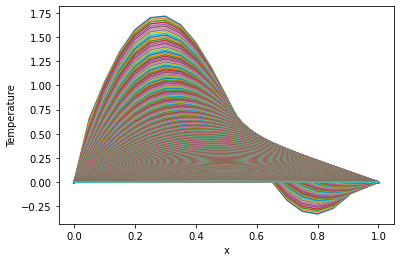

In [6]:
def h(x,t):
    S = (2/np.pi) * np.exp(-np.pi**2 * t) * np.sin(np.pi * x) + np.exp(-4 * np.pi**2 * t) * np.sin(2 * np.pi * x)
    for k in range(100):
        S += (np.exp(-(2 * k + 1)**2 * np.pi**2 * t) * np.sin((2 * k + 1) * np.pi * x))/((2 * k + 1) * np.pi)
    return S

def j(i):
    def k(x):
        return h(x,i*0.5/1001)
    return k

for i in range(1000):
    plt.plot(x,j(i)(x))
plt.xlabel('x')
plt.ylabel('Temperature')
plt.show()